# Nettoyage des données issues du scraping sur Github

In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
from translate import Translator
import re
import langdetect
import time
from tqdm import tqdm

In [2]:
df = pd.read_csv("repositories.csv")
df.head()

full_name   
0                     sumn2u/learn-javascript  \
1                    bianchenglequ/NetCodeTop   
2                       rupali-codes/LinksHub   
3             LondheShubham153/90DaysOfDevOps   
4  jahidulislamzim/JavaScriptCodingChallenges   

                                              topics  stars  forks   
0  ['beginner', 'beginner-friendly', 'book', 'col...    619     29  \
1             ['csharp', 'dotnet', 'net', 'netcore']    567    106   
2  ['beginner-friendly', 'developers', 'links', '...    343    270   
3  ['devops', 'devops-tools', 'docker', 'grafana'...    336   2173   
4  ['coding', 'coding-challenge', 'coding-challen...    221     40   

                                         description    language   
0                     A book that teaches JavaScript        HTML  \
1             收集GitHub上有关.Net、.NetCore有趣、有用、热门的开源项目。         NaN   
2  LinksHub aims to provide developers with acces...  TypeScript   
3  This repository is a Challenge for the DevOps ...      Python   
4  Hello JavaScript code newbie! In this reposito...         NaN   

          creation_date          last_updated   
0  2023-01-01T15:16:26Z  2023-06-16T03:16:58Z  \
1  2023-01-01T16:52:06Z  2023-06-16T04:21:24Z   
2  2023-01-01T18:55:44Z  2023-06-16T15:30:32Z   
3  2023-01-01T11:41:21Z  2023-06-13T09:47:39Z   
4  2023-01-01T14:04:36Z  2023-05-28T14:24:58Z   

                                                 url  issues  
0         https://github.com/sumn2u/learn-javascript       0  
1        https://github.com/bianchenglequ/NetCodeTop       0  
2           https://github.com/rupali-codes/LinksHub       0  
3  https://github.com/LondheShubham153/90DaysOfDe...       0  
4  https://github.com/jahidulislamzim/JavaScriptC...       0

### La taille totale du Dataset avant le nettoyage

In [3]:
df.shape

(83096, 10)

### Fiche technique

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83096 entries, 0 to 83095
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   full_name      83096 non-null  object
 1   topics         83096 non-null  object
 2   stars          83096 non-null  int64 
 3   forks          83096 non-null  int64 
 4   description    61801 non-null  object
 5   language       71467 non-null  object
 6   creation_date  83096 non-null  object
 7   last_updated   83096 non-null  object
 8   url            83096 non-null  object
 9   issues         83096 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 6.3+ MB


### Les valeurs manquantes dans notre dataset

In [5]:
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)

full_name            0
topics               0
stars                0
forks                0
description      21295
language         11629
creation_date        0
last_updated         0
url                  0
issues               0
dtype: int64


### Gestion des valeurs doublons

In [6]:
df.duplicated().sum()

130

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(82966, 10)

In [8]:
### Convertir topics datatype d'un objet à une liste

In [9]:
df['topics'] = df['topics'].apply(ast.literal_eval)

In [10]:
### Le nombre de dépôts sans topics

In [11]:
count_empty_lists = df['topics'].apply(lambda x: 1 if isinstance(x, list) and len(x) == 0 else 0).sum()

print(count_empty_lists)

58087


In [12]:
### Le nombre de dépôts avec topics

In [13]:
count_nonempty_lists = df['topics'].apply(lambda x: 1 if isinstance(x, list) and len(x) > 0 else 0).sum()

print(count_nonempty_lists)

24879


### Nombre des lignes dont les colonnes, topics, description et language sont manquantes

In [14]:
count_rows = ((df['topics'].apply(lambda x: len(x) == 0)) & df['description'].isna() & df['language'].isna()).sum()

print(count_rows)

3762


In [15]:
### Suppression des lignes dont la valeur des colonnes, topics, description et language sont manquantes

In [16]:
df = df.drop(df[(df['topics'].map(len) == 0) & df['description'].isna() & df['language'].isna()].index)

df = df.reset_index(drop=True)

In [17]:
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)

full_name            0
topics               0
stars                0
forks                0
description      17493
language          7846
creation_date        0
last_updated         0
url                  0
issues               0
dtype: int64


In [18]:
### Suppression des lignes dont la valeur de la colonne language est manquante

In [19]:
df.dropna(subset=['language'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [20]:
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)

full_name            0
topics               0
stars                0
forks                0
description      17422
language             0
creation_date        0
last_updated         0
url                  0
issues               0
dtype: int64


In [21]:
### Le nombre des lignes dont la valeur de la colonne issues est manquante

In [22]:
count_zeros = df['issues'].value_counts()[0]

print(count_zeros)

69818


In [23]:
### La taille totale du Dataset après le nettoyage

In [24]:
df.shape

(71358, 10)

In [25]:
### Convertir le type de creation_date et last_updated, objet en datetime

In [26]:
df["creation_date"] = pd.to_datetime(df["creation_date"])

df["last_updated"] = pd.to_datetime(df["last_updated"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71358 entries, 0 to 71357
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   full_name      71358 non-null  object             
 1   topics         71358 non-null  object             
 2   stars          71358 non-null  int64              
 3   forks          71358 non-null  int64              
 4   description    53936 non-null  object             
 5   language       71358 non-null  object             
 6   creation_date  71358 non-null  datetime64[ns, UTC]
 7   last_updated   71358 non-null  datetime64[ns, UTC]
 8   url            71358 non-null  object             
 9   issues         71358 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(3), object(5)
memory usage: 5.4+ MB


In [27]:
df

full_name   
0                      sumn2u/learn-javascript  \
1                        rupali-codes/LinksHub   
2              LondheShubham153/90DaysOfDevOps   
3              702573N/Obsidian-Tasks-Timeline   
4                          yacineMTB/scribepod   
...                                        ...   
71353  ViktoriaRosovska/Bookshelf-team-project   
71354                     YEpeiyujiang/-QT-IM-   
71355                  jdev1022/IrisEstimation   
71356           jdev1022/laravel-rest-autotask   
71357                AbnerMing888/MoveProgress   

                                                  topics  stars  forks   
0      [beginner, beginner-friendly, book, collaborat...    619     29  \
1      [beginner-friendly, developers, links, nextjs,...    343    270   
2      [devops, devops-tools, docker, grafana, jenkin...    336   2173   
3      [dataview, obsidian-md, obsidian-plugin, tasks...    164     13   
4                                                     []    146     14   
...                                                  ...    ...    ...   
71353                                                 []      4      0   
71354                                                 []      4      0   
71355                                                 []      4      0   
71356                                                 []      4      0   
71357                                                 []      4      0   

                                             description          language   
0                         A book that teaches JavaScript              HTML  \
1      LinksHub aims to provide developers with acces...        TypeScript   
2      This repository is a Challenge for the DevOps ...            Python   
3      A custom view build with Obsidian-Dataview to ...        JavaScript   
4      Some of the scripts I use for scribepod @ http...  Jupyter Notebook   
...                                                  ...               ...   
71353                          Bookshelf team project JS               CSS   
71354                                                NaN               C++   
71355                                                NaN  Jupyter Notebook   
71356                                                NaN             Blade   
71357                                    自定义带有坐标尺的拖拽进度条。            Kotlin   

                  creation_date              last_updated   
0     2023-01-01 15:16:26+00:00 2023-06-16 03:16:58+00:00  \
1     2023-01-01 18:55:44+00:00 2023-06-16 15:30:32+00:00   
2     2023-01-01 11:41:21+00:00 2023-06-13 09:47:39+00:00   
3     2023-01-01 22:02:50+00:00 2023-06-14 20:36:49+00:00   
4     2023-01-01 00:34:43+00:00 2023-06-14 06:17:11+00:00   
...                         ...                       ...   
71353 2023-06-15 08:38:12+00:00 2023-06-16 11:41:33+00:00   
71354 2023-06-15 14:05:38+00:00 2023-06-15 15:12:52+00:00   
71355 2023-06-15 01:47:12+00:00 2023-06-15 06:08:12+00:00   
71356 2023-06-15 02:34:57+00:00 2023-06-15 06:08:00+00:00   
71357 2023-06-15 10:18:03+00:00 2023-06-16 07:27:28+00:00   

                                                     url  issues  
0             https://github.com/sumn2u/learn-javascript       0  
1               https://github.com/rupali-codes/LinksHub       0  
2      https://github.com/LondheShubham153/90DaysOfDe...       0  
3      https://github.com/702573N/Obsidian-Tasks-Time...       0  
4                 https://github.com/yacineMTB/scribepod       0  
...                                                  ...     ...  
71353  https://github.com/ViktoriaRosovska/Bookshelf-...       0  
71354            https://github.com/YEpeiyujiang/-QT-IM-       0  
71355         https://github.com/jdev1022/IrisEstimation       0  
71356  https://github.com/jdev1022/laravel-rest-autotask       0  
71357       https://github.com/AbnerMing888/MoveProgress       0  

[71358 rows x 10 columns]

### Suppression des caractères spéciaux

In [28]:
def clean_description(description):
    if isinstance(description, str):
        cleaned_text = re.sub(r'[^\w\s]', '', description)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        return cleaned_text.strip()
    else:
        return description
    
df['description'] = df['description'].apply(clean_description)
df

full_name   
0                      sumn2u/learn-javascript  \
1                        rupali-codes/LinksHub   
2              LondheShubham153/90DaysOfDevOps   
3              702573N/Obsidian-Tasks-Timeline   
4                          yacineMTB/scribepod   
...                                        ...   
71353  ViktoriaRosovska/Bookshelf-team-project   
71354                     YEpeiyujiang/-QT-IM-   
71355                  jdev1022/IrisEstimation   
71356           jdev1022/laravel-rest-autotask   
71357                AbnerMing888/MoveProgress   

                                                  topics  stars  forks   
0      [beginner, beginner-friendly, book, collaborat...    619     29  \
1      [beginner-friendly, developers, links, nextjs,...    343    270   
2      [devops, devops-tools, docker, grafana, jenkin...    336   2173   
3      [dataview, obsidian-md, obsidian-plugin, tasks...    164     13   
4                                                     []    146     14   
...                                                  ...    ...    ...   
71353                                                 []      4      0   
71354                                                 []      4      0   
71355                                                 []      4      0   
71356                                                 []      4      0   
71357                                                 []      4      0   

                                             description          language   
0                         A book that teaches JavaScript              HTML  \
1      LinksHub aims to provide developers with acces...        TypeScript   
2      This repository is a Challenge for the DevOps ...            Python   
3      A custom view build with ObsidianDataview to d...        JavaScript   
4      Some of the scripts I use for scribepod httpss...  Jupyter Notebook   
...                                                  ...               ...   
71353                          Bookshelf team project JS               CSS   
71354                                                NaN               C++   
71355                                                NaN  Jupyter Notebook   
71356                                                NaN             Blade   
71357                                     自定义带有坐标尺的拖拽进度条            Kotlin   

                  creation_date              last_updated   
0     2023-01-01 15:16:26+00:00 2023-06-16 03:16:58+00:00  \
1     2023-01-01 18:55:44+00:00 2023-06-16 15:30:32+00:00   
2     2023-01-01 11:41:21+00:00 2023-06-13 09:47:39+00:00   
3     2023-01-01 22:02:50+00:00 2023-06-14 20:36:49+00:00   
4     2023-01-01 00:34:43+00:00 2023-06-14 06:17:11+00:00   
...                         ...                       ...   
71353 2023-06-15 08:38:12+00:00 2023-06-16 11:41:33+00:00   
71354 2023-06-15 14:05:38+00:00 2023-06-15 15:12:52+00:00   
71355 2023-06-15 01:47:12+00:00 2023-06-15 06:08:12+00:00   
71356 2023-06-15 02:34:57+00:00 2023-06-15 06:08:00+00:00   
71357 2023-06-15 10:18:03+00:00 2023-06-16 07:27:28+00:00   

                                                     url  issues  
0             https://github.com/sumn2u/learn-javascript       0  
1               https://github.com/rupali-codes/LinksHub       0  
2      https://github.com/LondheShubham153/90DaysOfDe...       0  
3      https://github.com/702573N/Obsidian-Tasks-Time...       0  
4                 https://github.com/yacineMTB/scribepod       0  
...                                                  ...     ...  
71353  https://github.com/ViktoriaRosovska/Bookshelf-...       0  
71354            https://github.com/YEpeiyujiang/-QT-IM-       0  
71355         https://github.com/jdev1022/IrisEstimation       0  
71356  https://github.com/jdev1022/laravel-rest-autotask       0  
71357       https://github.com/AbnerMing888/MoveProgress       0  

[71358 rows x 10 columns]

### Remplissage des valeurs manquantes de la colonne description avec 'no description'

In [29]:
df['description'].fillna('no description', inplace=True)
df

full_name   
0                      sumn2u/learn-javascript  \
1                        rupali-codes/LinksHub   
2              LondheShubham153/90DaysOfDevOps   
3              702573N/Obsidian-Tasks-Timeline   
4                          yacineMTB/scribepod   
...                                        ...   
71353  ViktoriaRosovska/Bookshelf-team-project   
71354                     YEpeiyujiang/-QT-IM-   
71355                  jdev1022/IrisEstimation   
71356           jdev1022/laravel-rest-autotask   
71357                AbnerMing888/MoveProgress   

                                                  topics  stars  forks   
0      [beginner, beginner-friendly, book, collaborat...    619     29  \
1      [beginner-friendly, developers, links, nextjs,...    343    270   
2      [devops, devops-tools, docker, grafana, jenkin...    336   2173   
3      [dataview, obsidian-md, obsidian-plugin, tasks...    164     13   
4                                                     []    146     14   
...                                                  ...    ...    ...   
71353                                                 []      4      0   
71354                                                 []      4      0   
71355                                                 []      4      0   
71356                                                 []      4      0   
71357                                                 []      4      0   

                                             description          language   
0                         A book that teaches JavaScript              HTML  \
1      LinksHub aims to provide developers with acces...        TypeScript   
2      This repository is a Challenge for the DevOps ...            Python   
3      A custom view build with ObsidianDataview to d...        JavaScript   
4      Some of the scripts I use for scribepod httpss...  Jupyter Notebook   
...                                                  ...               ...   
71353                          Bookshelf team project JS               CSS   
71354                                     no description               C++   
71355                                     no description  Jupyter Notebook   
71356                                     no description             Blade   
71357                                     自定义带有坐标尺的拖拽进度条            Kotlin   

                  creation_date              last_updated   
0     2023-01-01 15:16:26+00:00 2023-06-16 03:16:58+00:00  \
1     2023-01-01 18:55:44+00:00 2023-06-16 15:30:32+00:00   
2     2023-01-01 11:41:21+00:00 2023-06-13 09:47:39+00:00   
3     2023-01-01 22:02:50+00:00 2023-06-14 20:36:49+00:00   
4     2023-01-01 00:34:43+00:00 2023-06-14 06:17:11+00:00   
...                         ...                       ...   
71353 2023-06-15 08:38:12+00:00 2023-06-16 11:41:33+00:00   
71354 2023-06-15 14:05:38+00:00 2023-06-15 15:12:52+00:00   
71355 2023-06-15 01:47:12+00:00 2023-06-15 06:08:12+00:00   
71356 2023-06-15 02:34:57+00:00 2023-06-15 06:08:00+00:00   
71357 2023-06-15 10:18:03+00:00 2023-06-16 07:27:28+00:00   

                                                     url  issues  
0             https://github.com/sumn2u/learn-javascript       0  
1               https://github.com/rupali-codes/LinksHub       0  
2      https://github.com/LondheShubham153/90DaysOfDe...       0  
3      https://github.com/702573N/Obsidian-Tasks-Time...       0  
4                 https://github.com/yacineMTB/scribepod       0  
...                                                  ...     ...  
71353  https://github.com/ViktoriaRosovska/Bookshelf-...       0  
71354            https://github.com/YEpeiyujiang/-QT-IM-       0  
71355         https://github.com/jdev1022/IrisEstimation       0  
71356  https://github.com/jdev1022/laravel-rest-autotask       0  
71357       https://github.com/AbnerMing888/MoveProgress       0  

[71358 rows x 10 columns]

In [45]:
def translate_with_retry(description):
    translator = Translator(to_lang='en', from_lang=langdetect.detect(description))
    return translator.translate(description)

def is_english(text):
    try:
        lang = langdetect.detect(text)
        return lang == 'en'
    except langdetect.LangDetectException:
        return False

with tqdm(total=len(df)) as pbar:
    for index, row in df.iterrows():
        description = row['description']

        if isinstance(description, float):
            description = str(description)

        if description and description.strip():
            if not is_english(description):
                try:
                    
                    translated_description = translate_with_retry(description)
                    df.at[index, 'description'] = translated_description
                except Exception as e:
                    print(f"Translation failed for description at index {index}: {description}. Error: {str(e)}")
                time.sleep(0.5) 
            else:
                print(f"Skipping translation for description at index {index} as it is already in English.")
        else:
            print(f"Skipping translation for empty or whitespace-only description at index {index}.")

        pbar.update(1)

print('Translation completed successfully!')

  0%|          | 1/71358 [00:00<9:06:46,  2.18it/s]

Skipping translation for description at index 0 as it is already in English.
Skipping translation for description at index 1 as it is already in English.
Skipping translation for description at index 2 as it is already in English.
Skipping translation for description at index 3 as it is already in English.
Skipping translation for description at index 4 as it is already in English.


  0%|          | 6/71358 [00:01<5:49:44,  3.40it/s]

Skipping translation for description at index 6 as it is already in English.


  0%|          | 8/71358 [00:05<14:43:02,  1.35it/s]

Skipping translation for description at index 8 as it is already in English.
Skipping translation for description at index 9 as it is already in English.
Skipping translation for description at index 10 as it is already in English.
Skipping translation for description at index 11 as it is already in English.
Skipping translation for description at index 12 as it is already in English.


  0%|          | 14/71358 [00:06<9:14:04,  2.15it/s]

Skipping translation for description at index 14 as it is already in English.
Skipping translation for description at index 15 as it is already in English.
Skipping translation for description at index 16 as it is already in English.
Skipping translation for description at index 17 as it is already in English.
Skipping translation for description at index 18 as it is already in English.


  0%|          | 21/71358 [00:09<9:15:56,  2.14it/s]

Skipping translation for description at index 21 as it is already in English.


  0%|          | 33/71358 [00:10<3:54:12,  5.08it/s]

Skipping translation for description at index 23 as it is already in English.
Skipping translation for description at index 24 as it is already in English.
Skipping translation for description at index 25 as it is already in English.
Skipping translation for description at index 26 as it is already in English.
Skipping translation for description at index 27 as it is already in English.
Skipping translation for description at index 28 as it is already in English.
Skipping translation for description at index 29 as it is already in English.
Skipping translation for description at index 30 as it is already in English.
Skipping translation for description at index 31 as it is already in English.
Skipping translation for description at index 32 as it is already in English.
Skipping translation for description at index 33 as it is already in English.
Skipping translation for description at index 34 as it is already in English.


  0%|          | 37/71358 [00:12<4:43:53,  4.19it/s]

Skipping translation for description at index 36 as it is already in English.
Skipping translation for description at index 37 as it is already in English.


  0%|          | 40/71358 [00:15<7:56:11,  2.50it/s]

Skipping translation for description at index 40 as it is already in English.


  0%|          | 42/71358 [00:16<9:32:42,  2.08it/s]

Skipping translation for description at index 42 as it is already in English.
Skipping translation for description at index 43 as it is already in English.


  0%|          | 47/71358 [00:20<11:59:07,  1.65it/s]

Skipping translation for description at index 47 as it is already in English.
Skipping translation for description at index 48 as it is already in English.
Skipping translation for description at index 49 as it is already in English.
Skipping translation for description at index 50 as it is already in English.
Skipping translation for description at index 51 as it is already in English.
Skipping translation for description at index 52 as it is already in English.


  0%|          | 56/71358 [00:23<10:04:39,  1.97it/s]

Skipping translation for description at index 56 as it is already in English.


  0%|          | 59/71358 [00:26<13:23:10,  1.48it/s]

Skipping translation for description at index 59 as it is already in English.


  0%|          | 61/71358 [00:27<12:43:07,  1.56it/s]

Skipping translation for description at index 61 as it is already in English.


  0%|          | 65/71358 [00:30<16:12:45,  1.22it/s]

Skipping translation for description at index 65 as it is already in English.
Skipping translation for description at index 66 as it is already in English.


  0%|          | 68/71358 [00:31<12:00:02,  1.65it/s]

Skipping translation for description at index 68 as it is already in English.


  0%|          | 70/71358 [00:34<15:53:14,  1.25it/s]

Skipping translation for description at index 70 as it is already in English.


  0%|          | 72/71358 [00:35<15:04:00,  1.31it/s]

Skipping translation for description at index 72 as it is already in English.


  0%|          | 75/71358 [00:38<15:53:28,  1.25it/s]

Skipping translation for description at index 75 as it is already in English.


  0%|          | 77/71358 [00:39<14:08:55,  1.40it/s]

Skipping translation for description at index 77 as it is already in English.
Skipping translation for description at index 78 as it is already in English.
Skipping translation for description at index 79 as it is already in English.


  0%|          | 82/71358 [00:41<11:53:10,  1.67it/s]

Skipping translation for description at index 82 as it is already in English.
Skipping translation for description at index 83 as it is already in English.
Skipping translation for description at index 84 as it is already in English.


  0%|          | 86/71358 [00:42<8:53:52,  2.22it/s] 

Skipping translation for description at index 86 as it is already in English.
Skipping translation for description at index 87 as it is already in English.


  0%|          | 89/71358 [00:44<8:52:48,  2.23it/s]

Skipping translation for description at index 89 as it is already in English.
Skipping translation for description at index 90 as it is already in English.
Skipping translation for description at index 91 as it is already in English.


  0%|          | 93/71358 [00:45<8:23:33,  2.36it/s]

Skipping translation for description at index 93 as it is already in English.


  0%|          | 95/71358 [00:46<9:00:45,  2.20it/s]

Skipping translation for description at index 95 as it is already in English.


  0%|          | 97/71358 [00:47<9:20:21,  2.12it/s]

Skipping translation for description at index 97 as it is already in English.
Skipping translation for description at index 98 as it is already in English.
Skipping translation for description at index 99 as it is already in English.


  0%|          | 102/71358 [00:51<11:32:38,  1.71it/s]

Skipping translation for description at index 102 as it is already in English.
Skipping translation for description at index 103 as it is already in English.


  0%|          | 105/71358 [00:52<11:16:04,  1.76it/s]

Skipping translation for description at index 105 as it is already in English.
Skipping translation for description at index 106 as it is already in English.
Skipping translation for description at index 107 as it is already in English.


  0%|          | 109/71358 [00:54<9:48:28,  2.02it/s] 

Skipping translation for description at index 109 as it is already in English.
Skipping translation for description at index 110 as it is already in English.
Skipping translation for description at index 111 as it is already in English.
Skipping translation for description at index 112 as it is already in English.
Skipping translation for description at index 113 as it is already in English.
Skipping translation for description at index 114 as it is already in English.


  0%|          | 118/71358 [00:58<10:17:16,  1.92it/s]

Skipping translation for description at index 118 as it is already in English.
Skipping translation for description at index 119 as it is already in English.
Skipping translation for description at index 120 as it is already in English.
Skipping translation for description at index 121 as it is already in English.
Skipping translation for description at index 122 as it is already in English.
Skipping translation for description at index 123 as it is already in English.


  0%|          | 125/71358 [00:59<6:36:01,  3.00it/s] 

Skipping translation for description at index 125 as it is already in English.
Skipping translation for description at index 126 as it is already in English.


  0%|          | 128/71358 [01:00<6:43:50,  2.94it/s]

Skipping translation for description at index 128 as it is already in English.
Skipping translation for description at index 129 as it is already in English.
Skipping translation for description at index 130 as it is already in English.
Skipping translation for description at index 131 as it is already in English.


  0%|          | 134/71358 [01:03<8:34:06,  2.31it/s]

Skipping translation for description at index 134 as it is already in English.
Skipping translation for description at index 135 as it is already in English.


  0%|          | 137/71358 [01:04<8:22:59,  2.36it/s]

Skipping translation for description at index 137 as it is already in English.


  0%|          | 140/71358 [01:07<11:20:56,  1.74it/s]

Skipping translation for description at index 140 as it is already in English.


  0%|          | 142/71358 [01:08<12:44:10,  1.55it/s]

Skipping translation for description at index 142 as it is already in English.
Skipping translation for description at index 143 as it is already in English.
Skipping translation for description at index 144 as it is already in English.
Skipping translation for description at index 145 as it is already in English.


  0%|          | 147/71358 [01:10<9:24:50,  2.10it/s] 

Skipping translation for description at index 147 as it is already in English.


  0%|          | 149/71358 [01:11<9:44:07,  2.03it/s]

Skipping translation for description at index 149 as it is already in English.
Skipping translation for description at index 150 as it is already in English.


  0%|          | 152/71358 [01:12<9:02:17,  2.19it/s]

Skipping translation for description at index 152 as it is already in English.


  0%|          | 154/71358 [01:13<9:28:10,  2.09it/s]

Skipping translation for description at index 154 as it is already in English.
Skipping translation for description at index 155 as it is already in English.
Skipping translation for description at index 156 as it is already in English.
Skipping translation for description at index 157 as it is already in English.
Skipping translation for description at index 158 as it is already in English.
Skipping translation for description at index 159 as it is already in English.


  0%|          | 161/71358 [01:14<6:07:20,  3.23it/s]

Skipping translation for description at index 161 as it is already in English.
Skipping translation for description at index 162 as it is already in English.
Skipping translation for description at index 163 as it is already in English.
Skipping translation for description at index 164 as it is already in English.
Skipping translation for description at index 165 as it is already in English.
Skipping translation for description at index 166 as it is already in English.
Skipping translation for description at index 167 as it is already in English.
Skipping translation for description at index 168 as it is already in English.
Skipping translation for description at index 169 as it is already in English.


  0%|          | 172/71358 [01:17<6:01:58,  3.28it/s]

Skipping translation for description at index 172 as it is already in English.
Skipping translation for description at index 173 as it is already in English.
Skipping translation for description at index 174 as it is already in English.
Skipping translation for description at index 175 as it is already in English.
Skipping translation for description at index 176 as it is already in English.


  0%|          | 178/71358 [01:19<6:03:52,  3.26it/s]

Skipping translation for description at index 178 as it is already in English.
Skipping translation for description at index 179 as it is already in English.
Skipping translation for description at index 180 as it is already in English.
Skipping translation for description at index 181 as it is already in English.


  0%|          | 183/71358 [01:20<5:49:05,  3.40it/s]

Skipping translation for description at index 183 as it is already in English.


  0%|          | 185/71358 [01:22<6:36:33,  2.99it/s]

Skipping translation for description at index 185 as it is already in English.
Skipping translation for description at index 186 as it is already in English.
Skipping translation for description at index 187 as it is already in English.
Skipping translation for description at index 188 as it is already in English.


  0%|          | 191/71358 [01:24<7:23:32,  2.67it/s]

Skipping translation for description at index 191 as it is already in English.


  0%|          | 193/71358 [01:25<8:09:22,  2.42it/s]

Skipping translation for description at index 193 as it is already in English.
Skipping translation for description at index 194 as it is already in English.
Skipping translation for description at index 195 as it is already in English.
Skipping translation for description at index 196 as it is already in English.


  0%|          | 199/71358 [01:27<7:40:20,  2.58it/s]

Skipping translation for description at index 199 as it is already in English.
Skipping translation for description at index 200 as it is already in English.


  0%|          | 202/71358 [01:28<8:01:17,  2.46it/s]

Skipping translation for description at index 202 as it is already in English.
Skipping translation for description at index 203 as it is already in English.


  0%|          | 205/71358 [01:29<7:46:23,  2.54it/s]

Skipping translation for description at index 205 as it is already in English.
Skipping translation for description at index 206 as it is already in English.


  0%|          | 208/71358 [01:31<8:40:27,  2.28it/s]

Skipping translation for description at index 208 as it is already in English.
Skipping translation for description at index 209 as it is already in English.


  0%|          | 211/71358 [01:32<8:47:22,  2.25it/s]

Skipping translation for description at index 211 as it is already in English.


  0%|          | 213/71358 [01:33<9:13:12,  2.14it/s]

Skipping translation for description at index 213 as it is already in English.
Skipping translation for description at index 214 as it is already in English.
Skipping translation for description at index 215 as it is already in English.
Skipping translation for description at index 216 as it is already in English.
Skipping translation for description at index 217 as it is already in English.


  0%|          | 219/71358 [01:34<6:31:23,  3.03it/s]

Skipping translation for description at index 219 as it is already in English.


  0%|          | 221/71358 [01:36<7:18:37,  2.70it/s]

Skipping translation for description at index 221 as it is already in English.
Skipping translation for description at index 222 as it is already in English.
Skipping translation for description at index 223 as it is already in English.
Skipping translation for description at index 224 as it is already in English.
Skipping translation for description at index 225 as it is already in English.


  0%|          | 229/71358 [01:40<10:05:39,  1.96it/s]

Skipping translation for description at index 229 as it is already in English.


  0%|          | 232/71358 [01:42<13:08:26,  1.50it/s]

Skipping translation for description at index 232 as it is already in English.


  0%|          | 235/71358 [01:45<17:32:15,  1.13it/s]

Skipping translation for description at index 235 as it is already in English.
Skipping translation for description at index 236 as it is already in English.
Skipping translation for description at index 237 as it is already in English.
Skipping translation for description at index 238 as it is already in English.
Skipping translation for description at index 239 as it is already in English.
Skipping translation for description at index 240 as it is already in English.
Skipping translation for description at index 241 as it is already in English.
Skipping translation for description at index 242 as it is already in English.


  0%|          | 257/71358 [01:46<2:57:19,  6.68it/s] 

Skipping translation for description at index 244 as it is already in English.
Skipping translation for description at index 245 as it is already in English.
Skipping translation for description at index 246 as it is already in English.
Skipping translation for description at index 247 as it is already in English.
Skipping translation for description at index 248 as it is already in English.
Skipping translation for description at index 249 as it is already in English.
Skipping translation for description at index 250 as it is already in English.
Skipping translation for description at index 251 as it is already in English.
Skipping translation for description at index 252 as it is already in English.
Skipping translation for description at index 253 as it is already in English.
Skipping translation for description at index 254 as it is already in English.
Skipping translation for description at index 255 as it is already in English.
Skipping translation for description at index 256 as

  0%|          | 264/71358 [01:48<3:18:55,  5.96it/s]

Skipping translation for description at index 264 as it is already in English.
Skipping translation for description at index 265 as it is already in English.
Skipping translation for description at index 266 as it is already in English.
Skipping translation for description at index 267 as it is already in English.


  0%|          | 272/71358 [01:50<4:30:46,  4.38it/s]

Skipping translation for description at index 270 as it is already in English.
Skipping translation for description at index 271 as it is already in English.


  0%|          | 274/71358 [01:52<6:25:12,  3.08it/s]

Skipping translation for description at index 273 as it is already in English.
Skipping translation for description at index 274 as it is already in English.
Skipping translation for description at index 275 as it is already in English.
Skipping translation for description at index 276 as it is already in English.
Skipping translation for description at index 277 as it is already in English.


  0%|          | 279/71358 [01:53<5:48:01,  3.40it/s]

Skipping translation for description at index 279 as it is already in English.
Skipping translation for description at index 280 as it is already in English.
Skipping translation for description at index 281 as it is already in English.


  0%|          | 283/71358 [01:55<5:58:07,  3.31it/s]

Skipping translation for description at index 283 as it is already in English.


  0%|          | 285/71358 [01:56<6:49:36,  2.89it/s]

Skipping translation for description at index 285 as it is already in English.


  0%|          | 288/71358 [01:58<9:47:54,  2.01it/s]

Skipping translation for description at index 288 as it is already in English.
Skipping translation for description at index 289 as it is already in English.
Skipping translation for description at index 290 as it is already in English.
Skipping translation for description at index 291 as it is already in English.


  0%|          | 293/71358 [02:00<7:49:35,  2.52it/s]

Skipping translation for description at index 293 as it is already in English.
Skipping translation for description at index 294 as it is already in English.


  0%|          | 298/71358 [02:04<11:54:11,  1.66it/s]

Skipping translation for description at index 298 as it is already in English.
Skipping translation for description at index 299 as it is already in English.
Skipping translation for description at index 300 as it is already in English.
Skipping translation for description at index 301 as it is already in English.
Skipping translation for description at index 302 as it is already in English.


  0%|          | 304/71358 [02:05<7:23:02,  2.67it/s] 

Skipping translation for description at index 304 as it is already in English.


  0%|          | 306/71358 [02:06<8:20:47,  2.36it/s]

Skipping translation for description at index 306 as it is already in English.
Skipping translation for description at index 307 as it is already in English.


  0%|          | 309/71358 [02:07<8:16:18,  2.39it/s]

Skipping translation for description at index 309 as it is already in English.
Skipping translation for description at index 310 as it is already in English.
Skipping translation for description at index 311 as it is already in English.
Skipping translation for description at index 312 as it is already in English.


  0%|          | 314/71358 [02:08<6:40:20,  2.96it/s]

Skipping translation for description at index 314 as it is already in English.
Skipping translation for description at index 315 as it is already in English.
Skipping translation for description at index 316 as it is already in English.


  0%|          | 318/71358 [02:10<7:25:50,  2.66it/s]

Skipping translation for description at index 318 as it is already in English.


  0%|          | 320/71358 [02:11<8:19:44,  2.37it/s]

Skipping translation for description at index 320 as it is already in English.


  0%|          | 322/71358 [02:12<8:49:10,  2.24it/s]

Skipping translation for description at index 322 as it is already in English.
Skipping translation for description at index 323 as it is already in English.
Skipping translation for description at index 324 as it is already in English.


  0%|          | 327/71358 [02:15<9:39:16,  2.04it/s]

Skipping translation for description at index 327 as it is already in English.
Skipping translation for description at index 328 as it is already in English.


  0%|          | 330/71358 [02:16<8:50:06,  2.23it/s]

Skipping translation for description at index 330 as it is already in English.


  0%|          | 332/71358 [02:17<9:57:41,  1.98it/s]

Skipping translation for description at index 332 as it is already in English.
Skipping translation for description at index 333 as it is already in English.


  0%|          | 335/71358 [02:19<9:46:27,  2.02it/s]

Skipping translation for description at index 335 as it is already in English.


  0%|          | 338/71358 [02:21<11:53:52,  1.66it/s]

Skipping translation for description at index 338 as it is already in English.


  0%|          | 342/71358 [02:25<16:03:49,  1.23it/s]

Skipping translation for description at index 342 as it is already in English.


  0%|          | 345/71358 [02:28<17:30:56,  1.13it/s]

Skipping translation for description at index 345 as it is already in English.


  0%|          | 347/71358 [02:29<15:37:26,  1.26it/s]

Skipping translation for description at index 347 as it is already in English.


  0%|          | 349/71358 [02:30<13:57:40,  1.41it/s]

Skipping translation for description at index 349 as it is already in English.


  0%|          | 352/71358 [02:33<16:02:42,  1.23it/s]

Skipping translation for description at index 352 as it is already in English.


  0%|          | 354/71358 [02:34<15:55:04,  1.24it/s]

Skipping translation for description at index 354 as it is already in English.


  0%|          | 356/71358 [02:36<15:58:35,  1.23it/s]

Skipping translation for description at index 356 as it is already in English.


  1%|          | 358/71358 [02:37<14:11:56,  1.39it/s]

Skipping translation for description at index 358 as it is already in English.


  1%|          | 360/71358 [02:38<13:03:39,  1.51it/s]

Skipping translation for description at index 360 as it is already in English.
Skipping translation for description at index 361 as it is already in English.
Skipping translation for description at index 362 as it is already in English.
Skipping translation for description at index 363 as it is already in English.


  1%|          | 365/71358 [02:39<8:33:06,  2.31it/s] 

Skipping translation for description at index 365 as it is already in English.
Skipping translation for description at index 366 as it is already in English.
Skipping translation for description at index 367 as it is already in English.


  1%|          | 371/71358 [02:43<11:48:47,  1.67it/s]

Skipping translation for description at index 371 as it is already in English.
Skipping translation for description at index 372 as it is already in English.
Skipping translation for description at index 373 as it is already in English.


  1%|          | 375/71358 [02:44<9:26:11,  2.09it/s] 

Skipping translation for description at index 375 as it is already in English.


  1%|          | 379/71358 [02:48<13:54:29,  1.42it/s]

Skipping translation for description at index 379 as it is already in English.
Skipping translation for description at index 380 as it is already in English.
Skipping translation for description at index 381 as it is already in English.


  1%|          | 385/71358 [02:52<14:22:03,  1.37it/s]

Skipping translation for description at index 385 as it is already in English.
Skipping translation for description at index 386 as it is already in English.
Skipping translation for description at index 387 as it is already in English.


  1%|          | 390/71358 [02:54<12:17:04,  1.60it/s]

Skipping translation for description at index 390 as it is already in English.
Skipping translation for description at index 391 as it is already in English.


  1%|          | 393/71358 [02:55<10:27:19,  1.89it/s]

Skipping translation for description at index 393 as it is already in English.
Skipping translation for description at index 394 as it is already in English.
Skipping translation for description at index 395 as it is already in English.
Skipping translation for description at index 396 as it is already in English.


  1%|          | 398/71358 [02:57<8:16:55,  2.38it/s] 

Skipping translation for description at index 398 as it is already in English.
Skipping translation for description at index 399 as it is already in English.
Skipping translation for description at index 400 as it is already in English.
Skipping translation for description at index 401 as it is already in English.


  1%|          | 403/71358 [02:58<7:23:08,  2.67it/s]

Skipping translation for description at index 403 as it is already in English.
Skipping translation for description at index 404 as it is already in English.
Skipping translation for description at index 405 as it is already in English.
Skipping translation for description at index 406 as it is already in English.


  1%|          | 409/71358 [03:01<8:55:30,  2.21it/s]

Skipping translation for description at index 409 as it is already in English.
Skipping translation for description at index 410 as it is already in English.
Skipping translation for description at index 411 as it is already in English.
Skipping translation for description at index 412 as it is already in English.
Skipping translation for description at index 413 as it is already in English.
Skipping translation for description at index 414 as it is already in English.
Skipping translation for description at index 415 as it is already in English.


  1%|          | 417/71358 [03:03<6:14:18,  3.16it/s]

Skipping translation for description at index 417 as it is already in English.
Skipping translation for description at index 418 as it is already in English.
Skipping translation for description at index 419 as it is already in English.
Skipping translation for description at index 420 as it is already in English.


  1%|          | 422/71358 [03:04<5:42:58,  3.45it/s]

Skipping translation for description at index 422 as it is already in English.


  1%|          | 424/71358 [03:05<7:06:19,  2.77it/s]

Skipping translation for description at index 424 as it is already in English.
Skipping translation for description at index 425 as it is already in English.
Skipping translation for description at index 426 as it is already in English.
Skipping translation for description at index 427 as it is already in English.


  1%|          | 429/71358 [03:07<6:28:15,  3.04it/s]

Skipping translation for description at index 429 as it is already in English.


  1%|          | 432/71358 [03:10<11:02:04,  1.79it/s]

Skipping translation for description at index 432 as it is already in English.
Skipping translation for description at index 433 as it is already in English.
Skipping translation for description at index 434 as it is already in English.


  1%|          | 438/71358 [03:14<13:25:21,  1.47it/s]

Skipping translation for description at index 438 as it is already in English.
Skipping translation for description at index 439 as it is already in English.
Skipping translation for description at index 440 as it is already in English.
Skipping translation for description at index 441 as it is already in English.
Skipping translation for description at index 442 as it is already in English.
Skipping translation for description at index 443 as it is already in English.


  1%|          | 447/71358 [03:18<11:06:51,  1.77it/s]

Skipping translation for description at index 447 as it is already in English.


  1%|          | 450/71358 [03:21<14:17:00,  1.38it/s]

Skipping translation for description at index 450 as it is already in English.
Skipping translation for description at index 451 as it is already in English.


  1%|          | 453/71358 [03:22<13:20:49,  1.48it/s]

Skipping translation for description at index 453 as it is already in English.
Skipping translation for description at index 454 as it is already in English.


  1%|          | 456/71358 [03:24<11:04:05,  1.78it/s]

Skipping translation for description at index 456 as it is already in English.
Skipping translation for description at index 457 as it is already in English.


  1%|          | 460/71358 [03:26<13:14:46,  1.49it/s]

Skipping translation for description at index 460 as it is already in English.
Skipping translation for description at index 461 as it is already in English.
Skipping translation for description at index 462 as it is already in English.
Skipping translation for description at index 463 as it is already in English.


  1%|          | 465/71358 [03:28<9:19:14,  2.11it/s] 

Skipping translation for description at index 465 as it is already in English.


  1%|          | 467/71358 [03:29<10:09:57,  1.94it/s]

Skipping translation for description at index 467 as it is already in English.
Skipping translation for description at index 468 as it is already in English.
Skipping translation for description at index 469 as it is already in English.
Skipping translation for description at index 470 as it is already in English.


  1%|          | 472/71358 [03:30<7:40:42,  2.56it/s] 

Skipping translation for description at index 472 as it is already in English.
Skipping translation for description at index 473 as it is already in English.
Skipping translation for description at index 474 as it is already in English.


  1%|          | 484/71358 [03:32<3:43:19,  5.29it/s]

Skipping translation for description at index 476 as it is already in English.
Skipping translation for description at index 477 as it is already in English.
Skipping translation for description at index 478 as it is already in English.
Skipping translation for description at index 479 as it is already in English.
Skipping translation for description at index 480 as it is already in English.
Skipping translation for description at index 481 as it is already in English.
Skipping translation for description at index 482 as it is already in English.
Skipping translation for description at index 483 as it is already in English.


  1%|          | 487/71358 [03:33<4:31:36,  4.35it/s]

Skipping translation for description at index 485 as it is already in English.
Skipping translation for description at index 486 as it is already in English.
Skipping translation for description at index 487 as it is already in English.
Skipping translation for description at index 488 as it is already in English.
Skipping translation for description at index 489 as it is already in English.
Skipping translation for description at index 490 as it is already in English.
Skipping translation for description at index 491 as it is already in English.


  1%|          | 493/71358 [03:34<4:57:28,  3.97it/s]

Skipping translation for description at index 493 as it is already in English.
Skipping translation for description at index 494 as it is already in English.
Skipping translation for description at index 495 as it is already in English.
Skipping translation for description at index 496 as it is already in English.
Skipping translation for description at index 497 as it is already in English.


  1%|          | 499/71358 [03:37<5:47:48,  3.40it/s]

Skipping translation for description at index 499 as it is already in English.


  1%|          | 501/71358 [03:38<6:58:27,  2.82it/s]

Skipping translation for description at index 501 as it is already in English.
Skipping translation for description at index 502 as it is already in English.
Skipping translation for description at index 503 as it is already in English.
Skipping translation for description at index 504 as it is already in English.
Skipping translation for description at index 505 as it is already in English.


  1%|          | 508/71358 [03:40<7:13:16,  2.73it/s]

Skipping translation for description at index 508 as it is already in English.
Skipping translation for description at index 509 as it is already in English.
Skipping translation for description at index 510 as it is already in English.


  1%|          | 512/71358 [03:42<6:39:51,  2.95it/s]

Skipping translation for description at index 512 as it is already in English.
Skipping translation for description at index 513 as it is already in English.
Skipping translation for description at index 514 as it is already in English.
Skipping translation for description at index 515 as it is already in English.
Skipping translation for description at index 516 as it is already in English.
Skipping translation for description at index 517 as it is already in English.
Skipping translation for description at index 518 as it is already in English.
Skipping translation for description at index 519 as it is already in English.


  1%|          | 521/71358 [03:43<4:34:30,  4.30it/s]

Skipping translation for description at index 521 as it is already in English.
Skipping translation for description at index 522 as it is already in English.
Skipping translation for description at index 523 as it is already in English.
Skipping translation for description at index 524 as it is already in English.


  1%|          | 526/71358 [03:44<4:38:06,  4.24it/s]

Skipping translation for description at index 526 as it is already in English.
Skipping translation for description at index 527 as it is already in English.


  1%|          | 529/71358 [03:45<5:13:03,  3.77it/s]

Skipping translation for description at index 529 as it is already in English.


  1%|          | 531/71358 [03:46<6:16:19,  3.14it/s]

Skipping translation for description at index 531 as it is already in English.


  1%|          | 533/71358 [03:47<7:10:09,  2.74it/s]

Skipping translation for description at index 533 as it is already in English.
Skipping translation for description at index 534 as it is already in English.
Skipping translation for description at index 535 as it is already in English.


  1%|          | 537/71358 [03:49<6:51:12,  2.87it/s]

Skipping translation for description at index 537 as it is already in English.


  1%|          | 539/71358 [03:50<8:22:06,  2.35it/s]

Skipping translation for description at index 539 as it is already in English.
Skipping translation for description at index 540 as it is already in English.


  1%|          | 542/71358 [03:52<8:25:44,  2.33it/s]

Skipping translation for description at index 542 as it is already in English.
Skipping translation for description at index 543 as it is already in English.


  1%|          | 545/71358 [03:53<8:09:36,  2.41it/s]

Skipping translation for description at index 545 as it is already in English.
Skipping translation for description at index 546 as it is already in English.
Skipping translation for description at index 547 as it is already in English.
Skipping translation for description at index 548 as it is already in English.


  1%|          | 550/71358 [03:56<9:55:32,  1.98it/s]

Skipping translation for description at index 550 as it is already in English.


  1%|          | 552/71358 [03:57<10:07:40,  1.94it/s]

Skipping translation for description at index 552 as it is already in English.
Skipping translation for description at index 553 as it is already in English.
Skipping translation for description at index 554 as it is already in English.


  1%|          | 557/71358 [04:00<11:36:22,  1.69it/s]

Skipping translation for description at index 557 as it is already in English.


  1%|          | 561/71358 [04:04<18:01:12,  1.09it/s]

Skipping translation for description at index 561 as it is already in English.
Skipping translation for description at index 562 as it is already in English.


  1%|          | 564/71358 [04:06<15:08:45,  1.30it/s]

Skipping translation for description at index 564 as it is already in English.
Skipping translation for description at index 565 as it is already in English.
Skipping translation for description at index 566 as it is already in English.


  1%|          | 568/71358 [04:08<11:44:42,  1.67it/s]

Skipping translation for description at index 568 as it is already in English.


  1%|          | 570/71358 [04:09<11:34:27,  1.70it/s]

Skipping translation for description at index 570 as it is already in English.
Skipping translation for description at index 571 as it is already in English.
Skipping translation for description at index 572 as it is already in English.


  1%|          | 574/71358 [04:10<9:55:07,  1.98it/s] 

Skipping translation for description at index 574 as it is already in English.
Skipping translation for description at index 575 as it is already in English.


  1%|          | 577/71358 [04:12<9:34:18,  2.05it/s]

Skipping translation for description at index 577 as it is already in English.


  1%|          | 579/71358 [04:13<10:10:54,  1.93it/s]

Skipping translation for description at index 579 as it is already in English.


  1%|          | 581/71358 [04:14<10:21:08,  1.90it/s]

Skipping translation for description at index 581 as it is already in English.
Skipping translation for description at index 582 as it is already in English.


  1%|          | 584/71358 [04:15<9:24:06,  2.09it/s] 

Skipping translation for description at index 584 as it is already in English.


  1%|          | 586/71358 [04:16<9:46:04,  2.01it/s]

Skipping translation for description at index 586 as it is already in English.


  1%|          | 588/71358 [04:17<10:00:50,  1.96it/s]

Skipping translation for description at index 588 as it is already in English.
Skipping translation for description at index 589 as it is already in English.


  1%|          | 591/71358 [04:19<9:08:40,  2.15it/s] 

Skipping translation for description at index 591 as it is already in English.
Skipping translation for description at index 592 as it is already in English.
Skipping translation for description at index 593 as it is already in English.


  1%|          | 595/71358 [04:20<7:41:35,  2.56it/s]

Skipping translation for description at index 595 as it is already in English.


  1%|          | 597/71358 [04:22<10:54:22,  1.80it/s]

Skipping translation for description at index 597 as it is already in English.
Skipping translation for description at index 598 as it is already in English.
Skipping translation for description at index 599 as it is already in English.


  1%|          | 601/71358 [04:24<9:46:32,  2.01it/s] 

Skipping translation for description at index 601 as it is already in English.
Skipping translation for description at index 602 as it is already in English.
Skipping translation for description at index 603 as it is already in English.
Skipping translation for description at index 604 as it is already in English.


  1%|          | 606/71358 [04:25<8:14:50,  2.38it/s]

Skipping translation for description at index 606 as it is already in English.
Skipping translation for description at index 607 as it is already in English.


  1%|          | 610/71358 [04:27<9:31:43,  2.06it/s]

Skipping translation for description at index 610 as it is already in English.
Skipping translation for description at index 611 as it is already in English.
Skipping translation for description at index 612 as it is already in English.
Skipping translation for description at index 613 as it is already in English.
Skipping translation for description at index 614 as it is already in English.


  1%|          | 616/71358 [04:29<6:53:05,  2.85it/s]

Skipping translation for description at index 616 as it is already in English.
Skipping translation for description at index 617 as it is already in English.
Skipping translation for description at index 618 as it is already in English.
Skipping translation for description at index 619 as it is already in English.


  1%|          | 621/71358 [04:30<6:13:51,  3.15it/s]

Skipping translation for description at index 621 as it is already in English.


  1%|          | 623/71358 [04:30<6:05:12,  3.23it/s]

Skipping translation for description at index 623 as it is already in English.


  1%|          | 626/71358 [04:33<8:51:03,  2.22it/s]

Skipping translation for description at index 626 as it is already in English.


  1%|          | 628/71358 [04:34<9:19:06,  2.11it/s]

Skipping translation for description at index 628 as it is already in English.
Skipping translation for description at index 629 as it is already in English.
Skipping translation for description at index 630 as it is already in English.
Skipping translation for description at index 631 as it is already in English.
Skipping translation for description at index 632 as it is already in English.


  1%|          | 634/71358 [04:36<7:31:59,  2.61it/s]

Skipping translation for description at index 634 as it is already in English.
Skipping translation for description at index 635 as it is already in English.
Skipping translation for description at index 636 as it is already in English.
Skipping translation for description at index 637 as it is already in English.
Skipping translation for description at index 638 as it is already in English.
Skipping translation for description at index 639 as it is already in English.


  1%|          | 641/71358 [04:37<5:37:23,  3.49it/s]

Skipping translation for description at index 641 as it is already in English.


  1%|          | 643/71358 [04:39<7:28:35,  2.63it/s]

Skipping translation for description at index 643 as it is already in English.
Skipping translation for description at index 644 as it is already in English.
Skipping translation for description at index 645 as it is already in English.


  1%|          | 648/71358 [04:41<8:40:05,  2.27it/s]

Skipping translation for description at index 648 as it is already in English.


  1%|          | 652/71358 [04:44<11:52:53,  1.65it/s]

Skipping translation for description at index 652 as it is already in English.


  1%|          | 654/71358 [04:45<12:08:03,  1.62it/s]

Skipping translation for description at index 654 as it is already in English.
Skipping translation for description at index 655 as it is already in English.


  1%|          | 657/71358 [04:46<10:22:11,  1.89it/s]

Skipping translation for description at index 657 as it is already in English.
Skipping translation for description at index 658 as it is already in English.
Skipping translation for description at index 659 as it is already in English.
Skipping translation for description at index 660 as it is already in English.
Skipping translation for description at index 661 as it is already in English.
Skipping translation for description at index 662 as it is already in English.


  1%|          | 665/71358 [04:49<8:23:36,  2.34it/s] 

Skipping translation for description at index 665 as it is already in English.
Skipping translation for description at index 666 as it is already in English.
Skipping translation for description at index 667 as it is already in English.


  1%|          | 669/71358 [04:50<7:28:57,  2.62it/s]

Skipping translation for description at index 669 as it is already in English.


  1%|          | 671/71358 [04:51<8:27:25,  2.32it/s]

Skipping translation for description at index 671 as it is already in English.
Skipping translation for description at index 672 as it is already in English.
Skipping translation for description at index 673 as it is already in English.
Skipping translation for description at index 674 as it is already in English.
Skipping translation for description at index 675 as it is already in English.
Skipping translation for description at index 676 as it is already in English.
Skipping translation for description at index 677 as it is already in English.


  1%|          | 679/71358 [04:53<5:55:08,  3.32it/s]

Skipping translation for description at index 679 as it is already in English.
Skipping translation for description at index 680 as it is already in English.
Skipping translation for description at index 681 as it is already in English.


  1%|          | 684/71358 [04:55<7:32:32,  2.60it/s]

Skipping translation for description at index 684 as it is already in English.
Skipping translation for description at index 685 as it is already in English.
Skipping translation for description at index 686 as it is already in English.
Skipping translation for description at index 687 as it is already in English.


  1%|          | 689/71358 [04:56<6:20:34,  3.09it/s]

Skipping translation for description at index 689 as it is already in English.


  1%|          | 691/71358 [04:58<7:43:03,  2.54it/s]

Skipping translation for description at index 691 as it is already in English.


  1%|          | 693/71358 [04:59<8:17:10,  2.37it/s]

Skipping translation for description at index 693 as it is already in English.
Skipping translation for description at index 694 as it is already in English.
Skipping translation for description at index 695 as it is already in English.


  1%|          | 698/71358 [05:02<9:45:32,  2.01it/s]

Skipping translation for description at index 698 as it is already in English.
Skipping translation for description at index 699 as it is already in English.


  1%|          | 701/71358 [05:03<10:17:58,  1.91it/s]

Skipping translation for description at index 701 as it is already in English.


  1%|          | 704/71358 [05:07<14:54:50,  1.32it/s]

Skipping translation for description at index 704 as it is already in English.
Skipping translation for description at index 705 as it is already in English.


  1%|          | 707/71358 [05:08<12:00:23,  1.63it/s]

Skipping translation for description at index 707 as it is already in English.
Skipping translation for description at index 708 as it is already in English.
Skipping translation for description at index 709 as it is already in English.
Skipping translation for description at index 710 as it is already in English.
Skipping translation for description at index 711 as it is already in English.
Skipping translation for description at index 712 as it is already in English.
Skipping translation for description at index 713 as it is already in English.
Skipping translation for description at index 714 as it is already in English.
Skipping translation for description at index 715 as it is already in English.
Skipping translation for description at index 716 as it is already in English.


  1%|          | 718/71358 [05:09<5:21:10,  3.67it/s] 

Skipping translation for description at index 718 as it is already in English.


  1%|          | 722/71358 [05:13<10:29:39,  1.87it/s]

Skipping translation for description at index 722 as it is already in English.


  1%|          | 724/71358 [05:15<11:55:35,  1.65it/s]

Skipping translation for description at index 724 as it is already in English.


  1%|          | 726/71358 [05:16<11:32:03,  1.70it/s]

Skipping translation for description at index 726 as it is already in English.


  1%|          | 729/71358 [05:19<15:24:05,  1.27it/s]

Skipping translation for description at index 729 as it is already in English.


  1%|          | 731/71358 [05:20<14:39:07,  1.34it/s]

Skipping translation for description at index 731 as it is already in English.
Skipping translation for description at index 732 as it is already in English.
Skipping translation for description at index 733 as it is already in English.


  1%|          | 735/71358 [05:21<10:11:04,  1.93it/s]

Skipping translation for description at index 735 as it is already in English.
Skipping translation for description at index 736 as it is already in English.
Skipping translation for description at index 737 as it is already in English.


  1%|          | 739/71358 [05:22<8:17:37,  2.37it/s] 

Skipping translation for description at index 739 as it is already in English.
Skipping translation for description at index 740 as it is already in English.


  1%|          | 744/71358 [05:27<14:40:13,  1.34it/s]

Skipping translation for description at index 744 as it is already in English.


  1%|          | 746/71358 [05:28<13:40:57,  1.43it/s]

Skipping translation for description at index 746 as it is already in English.
Skipping translation for description at index 747 as it is already in English.
Skipping translation for description at index 748 as it is already in English.
Skipping translation for description at index 749 as it is already in English.
Skipping translation for description at index 750 as it is already in English.


  1%|          | 753/71358 [05:31<10:53:15,  1.80it/s]

Skipping translation for description at index 753 as it is already in English.
Skipping translation for description at index 754 as it is already in English.


  1%|          | 757/71358 [05:34<12:14:14,  1.60it/s]

Skipping translation for description at index 757 as it is already in English.


  1%|          | 761/71358 [05:38<17:30:13,  1.12it/s]

Skipping translation for description at index 761 as it is already in English.


  1%|          | 764/71358 [05:40<16:30:18,  1.19it/s]

Skipping translation for description at index 764 as it is already in English.
Skipping translation for description at index 765 as it is already in English.


  1%|          | 769/71358 [05:44<15:45:52,  1.24it/s]

Skipping translation for description at index 769 as it is already in English.
Skipping translation for description at index 770 as it is already in English.
Skipping translation for description at index 771 as it is already in English.
Skipping translation for description at index 772 as it is already in English.


  1%|          | 780/71358 [05:45<4:53:33,  4.01it/s] 

Skipping translation for description at index 774 as it is already in English.
Skipping translation for description at index 775 as it is already in English.
Skipping translation for description at index 776 as it is already in English.
Skipping translation for description at index 777 as it is already in English.
Skipping translation for description at index 778 as it is already in English.
Skipping translation for description at index 779 as it is already in English.
Skipping translation for description at index 780 as it is already in English.
Skipping translation for description at index 781 as it is already in English.
Skipping translation for description at index 782 as it is already in English.
Skipping translation for description at index 783 as it is already in English.
Skipping translation for description at index 784 as it is already in English.


  1%|          | 788/71358 [05:48<5:37:41,  3.48it/s]

Skipping translation for description at index 787 as it is already in English.


  1%|          | 790/71358 [05:50<8:38:23,  2.27it/s]

Skipping translation for description at index 790 as it is already in English.
Skipping translation for description at index 791 as it is already in English.
Skipping translation for description at index 792 as it is already in English.
Skipping translation for description at index 793 as it is already in English.
Skipping translation for description at index 794 as it is already in English.
Skipping translation for description at index 795 as it is already in English.


  1%|          | 797/71358 [05:52<6:55:10,  2.83it/s]

Skipping translation for description at index 797 as it is already in English.
Skipping translation for description at index 798 as it is already in English.


  1%|          | 800/71358 [05:53<7:10:46,  2.73it/s]

Skipping translation for description at index 800 as it is already in English.
Skipping translation for description at index 801 as it is already in English.


  1%|          | 803/71358 [05:54<7:07:33,  2.75it/s]

Skipping translation for description at index 803 as it is already in English.
Skipping translation for description at index 804 as it is already in English.
Skipping translation for description at index 805 as it is already in English.
Skipping translation for description at index 806 as it is already in English.
Skipping translation for description at index 807 as it is already in English.


  1%|          | 817/71358 [05:57<4:22:28,  4.48it/s]

Skipping translation for description at index 810 as it is already in English.
Skipping translation for description at index 811 as it is already in English.
Skipping translation for description at index 812 as it is already in English.
Skipping translation for description at index 813 as it is already in English.
Skipping translation for description at index 814 as it is already in English.
Skipping translation for description at index 815 as it is already in English.
Skipping translation for description at index 816 as it is already in English.


  1%|          | 820/71358 [05:58<5:03:57,  3.87it/s]

Skipping translation for description at index 818 as it is already in English.
Skipping translation for description at index 819 as it is already in English.


  1%|          | 822/71358 [05:59<6:09:06,  3.18it/s]

Skipping translation for description at index 821 as it is already in English.
Skipping translation for description at index 822 as it is already in English.


  1%|          | 825/71358 [06:02<10:54:47,  1.80it/s]

Skipping translation for description at index 825 as it is already in English.
Skipping translation for description at index 826 as it is already in English.
Skipping translation for description at index 827 as it is already in English.
Skipping translation for description at index 828 as it is already in English.
Skipping translation for description at index 829 as it is already in English.


  1%|          | 831/71358 [06:04<7:42:22,  2.54it/s] 

Skipping translation for description at index 831 as it is already in English.
Skipping translation for description at index 832 as it is already in English.
Skipping translation for description at index 833 as it is already in English.
Skipping translation for description at index 834 as it is already in English.
Skipping translation for description at index 835 as it is already in English.


  1%|          | 838/71358 [06:07<8:13:38,  2.38it/s]

Skipping translation for description at index 838 as it is already in English.
Skipping translation for description at index 839 as it is already in English.


  1%|          | 841/71358 [06:08<8:01:07,  2.44it/s]

Skipping translation for description at index 841 as it is already in English.
Skipping translation for description at index 842 as it is already in English.
Skipping translation for description at index 843 as it is already in English.
Skipping translation for description at index 844 as it is already in English.
Skipping translation for description at index 845 as it is already in English.


  1%|          | 848/71358 [06:10<6:34:59,  2.98it/s]

Skipping translation for description at index 848 as it is already in English.
Skipping translation for description at index 849 as it is already in English.


  1%|          | 851/71358 [06:11<7:47:19,  2.51it/s]

Skipping translation for description at index 851 as it is already in English.


  1%|          | 853/71358 [06:12<8:41:05,  2.26it/s]

Skipping translation for description at index 853 as it is already in English.
Skipping translation for description at index 854 as it is already in English.
Skipping translation for description at index 855 as it is already in English.


  1%|          | 857/71358 [06:14<7:40:07,  2.55it/s]

Skipping translation for description at index 857 as it is already in English.
Skipping translation for description at index 858 as it is already in English.
Skipping translation for description at index 859 as it is already in English.


  1%|          | 861/71358 [06:15<6:56:31,  2.82it/s]

Skipping translation for description at index 861 as it is already in English.
Skipping translation for description at index 862 as it is already in English.


  1%|          | 865/71358 [06:17<9:24:53,  2.08it/s]

Skipping translation for description at index 865 as it is already in English.
Skipping translation for description at index 866 as it is already in English.


  1%|          | 870/71358 [06:21<12:36:28,  1.55it/s]

Skipping translation for description at index 870 as it is already in English.


  1%|          | 872/71358 [06:22<13:03:28,  1.50it/s]

Skipping translation for description at index 872 as it is already in English.
Skipping translation for description at index 873 as it is already in English.


  1%|          | 875/71358 [06:24<12:07:30,  1.61it/s]

Skipping translation for description at index 875 as it is already in English.
Skipping translation for description at index 876 as it is already in English.
Skipping translation for description at index 877 as it is already in English.
Skipping translation for description at index 878 as it is already in English.


  1%|          | 880/71358 [06:25<8:18:52,  2.35it/s] 

Skipping translation for description at index 880 as it is already in English.


  1%|          | 885/71358 [06:30<14:40:08,  1.33it/s]

Skipping translation for description at index 885 as it is already in English.


  1%|          | 887/71358 [06:31<13:53:39,  1.41it/s]

Skipping translation for description at index 887 as it is already in English.
Skipping translation for description at index 888 as it is already in English.
Skipping translation for description at index 889 as it is already in English.


  1%|          | 891/71358 [06:32<9:43:28,  2.01it/s] 

Skipping translation for description at index 891 as it is already in English.
Skipping translation for description at index 892 as it is already in English.
Skipping translation for description at index 893 as it is already in English.
Skipping translation for description at index 894 as it is already in English.


  1%|▏         | 896/71358 [06:33<7:39:22,  2.56it/s]

Skipping translation for description at index 896 as it is already in English.
Skipping translation for description at index 897 as it is already in English.
Skipping translation for description at index 898 as it is already in English.


  1%|▏         | 900/71358 [06:35<6:54:52,  2.83it/s]

Skipping translation for description at index 900 as it is already in English.
Skipping translation for description at index 901 as it is already in English.
Skipping translation for description at index 902 as it is already in English.


  1%|▏         | 918/71358 [06:36<2:49:10,  6.94it/s]

Skipping translation for description at index 904 as it is already in English.
Skipping translation for description at index 905 as it is already in English.
Skipping translation for description at index 906 as it is already in English.
Skipping translation for description at index 907 as it is already in English.
Skipping translation for description at index 908 as it is already in English.
Skipping translation for description at index 909 as it is already in English.
Skipping translation for description at index 910 as it is already in English.
Skipping translation for description at index 911 as it is already in English.
Skipping translation for description at index 912 as it is already in English.
Skipping translation for description at index 913 as it is already in English.
Skipping translation for description at index 914 as it is already in English.
Skipping translation for description at index 915 as it is already in English.
Skipping translation for description at index 916 as

  1%|▏         | 923/71358 [06:38<3:19:36,  5.88it/s]

Skipping translation for description at index 921 as it is already in English.
Skipping translation for description at index 922 as it is already in English.


  1%|▏         | 926/71358 [06:40<5:44:21,  3.41it/s]

Skipping translation for description at index 925 as it is already in English.
Skipping translation for description at index 927 as it is already in English.


  1%|▏         | 929/71358 [06:42<7:19:29,  2.67it/s]

Skipping translation for description at index 929 as it is already in English.


  1%|▏         | 931/71358 [06:44<8:22:49,  2.33it/s]

Skipping translation for description at index 931 as it is already in English.
Skipping translation for description at index 932 as it is already in English.
Skipping translation for description at index 933 as it is already in English.
Skipping translation for description at index 934 as it is already in English.
Skipping translation for description at index 935 as it is already in English.


  1%|▏         | 937/71358 [06:46<7:49:36,  2.50it/s]

Skipping translation for description at index 937 as it is already in English.


  1%|▏         | 940/71358 [06:49<10:45:56,  1.82it/s]

Skipping translation for description at index 940 as it is already in English.
Skipping translation for description at index 941 as it is already in English.
Skipping translation for description at index 942 as it is already in English.


  1%|▏         | 944/71358 [06:50<9:22:06,  2.09it/s] 

Skipping translation for description at index 944 as it is already in English.
Skipping translation for description at index 945 as it is already in English.
Skipping translation for description at index 946 as it is already in English.
Skipping translation for description at index 947 as it is already in English.
Skipping translation for description at index 948 as it is already in English.


  1%|▏         | 952/71358 [06:54<11:13:39,  1.74it/s]

Skipping translation for description at index 952 as it is already in English.
Skipping translation for description at index 953 as it is already in English.
Skipping translation for description at index 954 as it is already in English.
Skipping translation for description at index 955 as it is already in English.


  1%|▏         | 966/71358 [06:55<3:27:50,  5.64it/s] 

Skipping translation for description at index 957 as it is already in English.
Skipping translation for description at index 958 as it is already in English.
Skipping translation for description at index 959 as it is already in English.
Skipping translation for description at index 960 as it is already in English.
Skipping translation for description at index 961 as it is already in English.
Skipping translation for description at index 962 as it is already in English.
Skipping translation for description at index 963 as it is already in English.
Skipping translation for description at index 964 as it is already in English.
Skipping translation for description at index 965 as it is already in English.


  1%|▏         | 969/71358 [06:55<3:31:52,  5.54it/s]

Skipping translation for description at index 967 as it is already in English.
Skipping translation for description at index 968 as it is already in English.
Skipping translation for description at index 969 as it is already in English.
Skipping translation for description at index 970 as it is already in English.
Skipping translation for description at index 971 as it is already in English.
Skipping translation for description at index 972 as it is already in English.


  1%|▏         | 974/71358 [06:57<4:00:20,  4.88it/s]

Skipping translation for description at index 974 as it is already in English.
Skipping translation for description at index 975 as it is already in English.
Skipping translation for description at index 976 as it is already in English.
Skipping translation for description at index 977 as it is already in English.


  1%|▏         | 979/71358 [06:58<4:17:10,  4.56it/s]

Skipping translation for description at index 979 as it is already in English.


  1%|▏         | 981/71358 [07:00<5:55:49,  3.30it/s]

Skipping translation for description at index 981 as it is already in English.
Skipping translation for description at index 982 as it is already in English.
Skipping translation for description at index 983 as it is already in English.
Skipping translation for description at index 984 as it is already in English.
Skipping translation for description at index 985 as it is already in English.
Skipping translation for description at index 986 as it is already in English.
Skipping translation for description at index 987 as it is already in English.


  1%|▏         | 992/71358 [07:05<10:40:36,  1.83it/s]

Skipping translation for description at index 992 as it is already in English.
Skipping translation for description at index 993 as it is already in English.
Skipping translation for description at index 994 as it is already in English.


  1%|▏         | 996/71358 [07:06<8:27:58,  2.31it/s] 

Skipping translation for description at index 996 as it is already in English.


  1%|▏         | 1003/71358 [07:15<27:47:46,  1.42s/it]

Skipping translation for description at index 1003 as it is already in English.


  1%|▏         | 1005/71358 [07:16<21:27:20,  1.10s/it]

Skipping translation for description at index 1005 as it is already in English.
Skipping translation for description at index 1006 as it is already in English.
Skipping translation for description at index 1007 as it is already in English.
Skipping translation for description at index 1008 as it is already in English.


  1%|▏         | 1010/71358 [07:18<12:49:05,  1.52it/s]

Skipping translation for description at index 1010 as it is already in English.
Skipping translation for description at index 1011 as it is already in English.


  1%|▏         | 1014/71358 [07:21<13:22:03,  1.46it/s]

Skipping translation for description at index 1014 as it is already in English.
Skipping translation for description at index 1015 as it is already in English.


  1%|▏         | 1017/71358 [07:24<15:17:18,  1.28it/s]

Skipping translation for description at index 1017 as it is already in English.


  1%|▏         | 1019/71358 [07:25<14:08:53,  1.38it/s]

Skipping translation for description at index 1019 as it is already in English.
Skipping translation for description at index 1020 as it is already in English.
Skipping translation for description at index 1021 as it is already in English.
Skipping translation for description at index 1022 as it is already in English.
Skipping translation for description at index 1023 as it is already in English.
Skipping translation for description at index 1024 as it is already in English.
Skipping translation for description at index 1025 as it is already in English.
Skipping translation for description at index 1026 as it is already in English.


  1%|▏         | 1028/71358 [07:26<7:03:43,  2.77it/s] 

Skipping translation for description at index 1028 as it is already in English.
Skipping translation for description at index 1029 as it is already in English.
Skipping translation for description at index 1030 as it is already in English.


  1%|▏         | 1033/71358 [07:29<8:24:18,  2.32it/s]

Skipping translation for description at index 1033 as it is already in English.
Skipping translation for description at index 1034 as it is already in English.


  1%|▏         | 1036/71358 [07:30<8:08:49,  2.40it/s]

Skipping translation for description at index 1036 as it is already in English.


  1%|▏         | 1039/71358 [07:32<10:58:20,  1.78it/s]

Skipping translation for description at index 1039 as it is already in English.


  1%|▏         | 1041/71358 [07:34<11:49:55,  1.65it/s]

Skipping translation for description at index 1041 as it is already in English.


  1%|▏         | 1043/71358 [07:35<13:16:02,  1.47it/s]

Skipping translation for description at index 1043 as it is already in English.


  1%|▏         | 1045/71358 [07:36<12:30:32,  1.56it/s]

Skipping translation for description at index 1045 as it is already in English.
Skipping translation for description at index 1046 as it is already in English.
Skipping translation for description at index 1047 as it is already in English.
Skipping translation for description at index 1048 as it is already in English.


  1%|▏         | 1051/71358 [07:39<10:11:37,  1.92it/s]

Skipping translation for description at index 1051 as it is already in English.
Skipping translation for description at index 1052 as it is already in English.
Skipping translation for description at index 1053 as it is already in English.
Skipping translation for description at index 1054 as it is already in English.
Skipping translation for description at index 1055 as it is already in English.
Skipping translation for description at index 1056 as it is already in English.


  1%|▏         | 1058/71358 [07:40<6:26:55,  3.03it/s] 

Skipping translation for description at index 1058 as it is already in English.


  1%|▏         | 1060/71358 [07:41<7:27:16,  2.62it/s]

Skipping translation for description at index 1060 as it is already in English.
Skipping translation for description at index 1061 as it is already in English.
Skipping translation for description at index 1062 as it is already in English.
Skipping translation for description at index 1063 as it is already in English.


  1%|▏         | 1065/71358 [07:42<6:18:14,  3.10it/s]

Skipping translation for description at index 1065 as it is already in English.


  1%|▏         | 1067/71358 [07:43<7:08:02,  2.74it/s]

Skipping translation for description at index 1067 as it is already in English.


  1%|▏         | 1069/71358 [07:45<8:06:27,  2.41it/s]

Skipping translation for description at index 1069 as it is already in English.
Skipping translation for description at index 1070 as it is already in English.
Skipping translation for description at index 1071 as it is already in English.


  2%|▏         | 1073/71358 [07:46<7:07:21,  2.74it/s]

Skipping translation for description at index 1073 as it is already in English.


  2%|▏         | 1075/71358 [07:47<8:58:37,  2.17it/s]

Skipping translation for description at index 1075 as it is already in English.
Skipping translation for description at index 1076 as it is already in English.


  2%|▏         | 1078/71358 [07:48<8:22:34,  2.33it/s]

Skipping translation for description at index 1078 as it is already in English.


  2%|▏         | 1080/71358 [07:50<8:59:24,  2.17it/s]

Skipping translation for description at index 1080 as it is already in English.
Skipping translation for description at index 1081 as it is already in English.
Skipping translation for description at index 1082 as it is already in English.


  2%|▏         | 1086/71358 [07:54<12:56:09,  1.51it/s]

Skipping translation for description at index 1086 as it is already in English.


  2%|▏         | 1088/71358 [07:56<14:24:15,  1.36it/s]

Skipping translation for description at index 1088 as it is already in English.


  2%|▏         | 1091/71358 [07:58<15:35:24,  1.25it/s]

Skipping translation for description at index 1091 as it is already in English.
Skipping translation for description at index 1092 as it is already in English.
Skipping translation for description at index 1093 as it is already in English.
Skipping translation for description at index 1094 as it is already in English.


  2%|▏         | 1099/71358 [08:03<15:49:50,  1.23it/s]

Skipping translation for description at index 1099 as it is already in English.


  2%|▏         | 1102/71358 [08:06<16:02:43,  1.22it/s]

Skipping translation for description at index 1102 as it is already in English.


  2%|▏         | 1104/71358 [08:07<14:15:24,  1.37it/s]

Skipping translation for description at index 1104 as it is already in English.
Skipping translation for description at index 1105 as it is already in English.


  2%|▏         | 1107/71358 [08:08<12:37:55,  1.54it/s]

Skipping translation for description at index 1107 as it is already in English.
Skipping translation for description at index 1108 as it is already in English.
Skipping translation for description at index 1109 as it is already in English.
Skipping translation for description at index 1110 as it is already in English.


  2%|▏         | 1114/71358 [08:12<12:33:34,  1.55it/s]

Skipping translation for description at index 1114 as it is already in English.
Skipping translation for description at index 1115 as it is already in English.
Skipping translation for description at index 1116 as it is already in English.
Skipping translation for description at index 1117 as it is already in English.
Skipping translation for description at index 1118 as it is already in English.
Skipping translation for description at index 1119 as it is already in English.


  2%|▏         | 1121/71358 [08:13<7:32:38,  2.59it/s] 

Skipping translation for description at index 1121 as it is already in English.
Skipping translation for description at index 1122 as it is already in English.
Skipping translation for description at index 1123 as it is already in English.
Skipping translation for description at index 1124 as it is already in English.
Skipping translation for description at index 1125 as it is already in English.
Skipping translation for description at index 1126 as it is already in English.


  2%|▏         | 1128/71358 [08:15<6:01:32,  3.24it/s]

Skipping translation for description at index 1128 as it is already in English.
Skipping translation for description at index 1129 as it is already in English.


  2%|▏         | 1131/71358 [08:16<6:20:45,  3.07it/s]

Skipping translation for description at index 1131 as it is already in English.


  2%|▏         | 1136/71358 [08:21<12:46:26,  1.53it/s]

Skipping translation for description at index 1136 as it is already in English.
Skipping translation for description at index 1137 as it is already in English.
Skipping translation for description at index 1138 as it is already in English.


  2%|▏         | 1142/71358 [08:25<13:55:28,  1.40it/s]

Skipping translation for description at index 1142 as it is already in English.


  2%|▏         | 1144/71358 [08:26<12:56:49,  1.51it/s]

Skipping translation for description at index 1144 as it is already in English.
Skipping translation for description at index 1145 as it is already in English.


  2%|▏         | 1152/71358 [08:33<19:28:29,  1.00it/s]

Skipping translation for description at index 1152 as it is already in English.
Skipping translation for description at index 1153 as it is already in English.
Skipping translation for description at index 1154 as it is already in English.


  2%|▏         | 1156/71358 [08:35<12:31:51,  1.56it/s]

Skipping translation for description at index 1156 as it is already in English.


  2%|▏         | 1165/71358 [08:44<22:22:22,  1.15s/it]

Skipping translation for description at index 1165 as it is already in English.


  2%|▏         | 1168/71358 [08:47<18:29:25,  1.05it/s]

Skipping translation for description at index 1168 as it is already in English.


  2%|▏         | 1173/71358 [08:52<20:36:53,  1.06s/it]

Skipping translation for description at index 1173 as it is already in English.
Skipping translation for description at index 1174 as it is already in English.


  2%|▏         | 1176/71358 [08:53<13:50:46,  1.41it/s]

Skipping translation for description at index 1176 as it is already in English.
Skipping translation for description at index 1177 as it is already in English.


  2%|▏         | 1179/71358 [08:55<14:02:01,  1.39it/s]

Skipping translation for description at index 1179 as it is already in English.
Skipping translation for description at index 1180 as it is already in English.


  2%|▏         | 1182/71358 [08:56<11:59:06,  1.63it/s]

Skipping translation for description at index 1182 as it is already in English.
Skipping translation for description at index 1183 as it is already in English.


  2%|▏         | 1185/71358 [08:58<10:48:26,  1.80it/s]

Skipping translation for description at index 1185 as it is already in English.
Skipping translation for description at index 1186 as it is already in English.
Skipping translation for description at index 1187 as it is already in English.
Skipping translation for description at index 1188 as it is already in English.


  2%|▏         | 1190/71358 [08:59<8:14:49,  2.36it/s] 

Skipping translation for description at index 1190 as it is already in English.
Skipping translation for description at index 1191 as it is already in English.
Skipping translation for description at index 1192 as it is already in English.


  2%|▏         | 1196/71358 [09:03<12:21:33,  1.58it/s]

Skipping translation for description at index 1196 as it is already in English.
Skipping translation for description at index 1197 as it is already in English.
Skipping translation for description at index 1198 as it is already in English.


  2%|▏         | 1200/71358 [09:04<9:24:00,  2.07it/s] 

Skipping translation for description at index 1200 as it is already in English.


  2%|▏         | 1202/71358 [09:06<10:00:23,  1.95it/s]

Skipping translation for description at index 1202 as it is already in English.
Skipping translation for description at index 1203 as it is already in English.


  2%|▏         | 1206/71358 [09:08<10:54:50,  1.79it/s]

Skipping translation for description at index 1206 as it is already in English.
Skipping translation for description at index 1207 as it is already in English.


  2%|▏         | 1209/71358 [09:09<9:28:46,  2.06it/s] 

Skipping translation for description at index 1209 as it is already in English.


  2%|▏         | 1211/71358 [09:11<11:10:40,  1.74it/s]

Skipping translation for description at index 1211 as it is already in English.
Skipping translation for description at index 1212 as it is already in English.
Skipping translation for description at index 1213 as it is already in English.
Skipping translation for description at index 1214 as it is already in English.


  2%|▏         | 1216/71358 [09:12<8:17:24,  2.35it/s] 

Skipping translation for description at index 1216 as it is already in English.
Skipping translation for description at index 1217 as it is already in English.


  2%|▏         | 1219/71358 [09:13<8:34:16,  2.27it/s]

Skipping translation for description at index 1219 as it is already in English.


  2%|▏         | 1221/71358 [09:15<9:31:44,  2.04it/s]

Skipping translation for description at index 1221 as it is already in English.


  2%|▏         | 1225/71358 [09:19<15:10:05,  1.28it/s]

Skipping translation for description at index 1225 as it is already in English.
Skipping translation for description at index 1226 as it is already in English.


  2%|▏         | 1229/71358 [09:22<16:09:12,  1.21it/s]

Skipping translation for description at index 1229 as it is already in English.
Skipping translation for description at index 1230 as it is already in English.
Skipping translation for description at index 1231 as it is already in English.
Skipping translation for description at index 1232 as it is already in English.
Skipping translation for description at index 1233 as it is already in English.


  2%|▏         | 1235/71358 [09:23<8:48:31,  2.21it/s] 

Skipping translation for description at index 1235 as it is already in English.
Skipping translation for description at index 1236 as it is already in English.


  2%|▏         | 1239/71358 [09:26<10:49:38,  1.80it/s]

Skipping translation for description at index 1239 as it is already in English.


  2%|▏         | 1241/71358 [09:27<11:39:33,  1.67it/s]

Skipping translation for description at index 1241 as it is already in English.
Skipping translation for description at index 1242 as it is already in English.
Skipping translation for description at index 1243 as it is already in English.
Skipping translation for description at index 1244 as it is already in English.


  2%|▏         | 1246/71358 [09:29<8:09:58,  2.38it/s] 

Skipping translation for description at index 1246 as it is already in English.


  2%|▏         | 1250/71358 [09:32<13:15:04,  1.47it/s]

Skipping translation for description at index 1250 as it is already in English.


  2%|▏         | 1252/71358 [09:34<12:29:11,  1.56it/s]

Skipping translation for description at index 1252 as it is already in English.
Skipping translation for description at index 1253 as it is already in English.
Skipping translation for description at index 1254 as it is already in English.


  2%|▏         | 1258/71358 [09:37<14:43:59,  1.32it/s]

Skipping translation for description at index 1258 as it is already in English.
Skipping translation for description at index 1259 as it is already in English.


  2%|▏         | 1263/71358 [09:41<14:49:08,  1.31it/s]

Skipping translation for description at index 1263 as it is already in English.


  2%|▏         | 1265/71358 [09:42<13:26:13,  1.45it/s]

Skipping translation for description at index 1265 as it is already in English.


  2%|▏         | 1267/71358 [09:44<14:19:20,  1.36it/s]

Skipping translation for description at index 1267 as it is already in English.
Skipping translation for description at index 1268 as it is already in English.


  2%|▏         | 1270/71358 [09:45<12:04:16,  1.61it/s]

Skipping translation for description at index 1270 as it is already in English.
Skipping translation for description at index 1271 as it is already in English.


  2%|▏         | 1273/71358 [09:46<10:25:02,  1.87it/s]

Skipping translation for description at index 1273 as it is already in English.
Skipping translation for description at index 1274 as it is already in English.


  2%|▏         | 1277/71358 [09:49<11:43:22,  1.66it/s]

Skipping translation for description at index 1277 as it is already in English.
Skipping translation for description at index 1278 as it is already in English.
Skipping translation for description at index 1279 as it is already in English.
Skipping translation for description at index 1280 as it is already in English.
Skipping translation for description at index 1281 as it is already in English.
Skipping translation for description at index 1282 as it is already in English.


  2%|▏         | 1284/71358 [09:51<8:00:28,  2.43it/s] 

Skipping translation for description at index 1284 as it is already in English.
Skipping translation for description at index 1285 as it is already in English.


  2%|▏         | 1288/71358 [09:53<9:22:51,  2.07it/s]

Skipping translation for description at index 1288 as it is already in English.
Skipping translation for description at index 1289 as it is already in English.
Skipping translation for description at index 1290 as it is already in English.
Skipping translation for description at index 1291 as it is already in English.


  2%|▏         | 1293/71358 [09:54<7:10:33,  2.71it/s]

Skipping translation for description at index 1293 as it is already in English.
Skipping translation for description at index 1294 as it is already in English.


  2%|▏         | 1296/71358 [09:56<8:54:56,  2.18it/s]

Skipping translation for description at index 1296 as it is already in English.


  2%|▏         | 1300/71358 [10:02<17:05:20,  1.14it/s]

Skipping translation for description at index 1300 as it is already in English.
Skipping translation for description at index 1301 as it is already in English.


  2%|▏         | 1304/71358 [10:04<15:45:21,  1.24it/s]

Skipping translation for description at index 1304 as it is already in English.


  2%|▏         | 1307/71358 [10:07<15:32:20,  1.25it/s]

Skipping translation for description at index 1307 as it is already in English.


  2%|▏         | 1309/71358 [10:08<15:28:57,  1.26it/s]

Skipping translation for description at index 1309 as it is already in English.


  2%|▏         | 1311/71358 [10:10<15:57:35,  1.22it/s]

Skipping translation for description at index 1311 as it is already in English.
Skipping translation for description at index 1312 as it is already in English.
Skipping translation for description at index 1313 as it is already in English.


  2%|▏         | 1316/71358 [10:12<12:47:35,  1.52it/s]

Skipping translation for description at index 1316 as it is already in English.
Skipping translation for description at index 1317 as it is already in English.
Skipping translation for description at index 1318 as it is already in English.
Skipping translation for description at index 1319 as it is already in English.


  2%|▏         | 1322/71358 [10:15<12:02:05,  1.62it/s]

Skipping translation for description at index 1322 as it is already in English.
Skipping translation for description at index 1323 as it is already in English.


  2%|▏         | 1326/71358 [10:18<13:03:55,  1.49it/s]

Skipping translation for description at index 1326 as it is already in English.
Skipping translation for description at index 1327 as it is already in English.
Skipping translation for description at index 1328 as it is already in English.
Skipping translation for description at index 1329 as it is already in English.


  2%|▏         | 1335/71358 [10:19<5:43:13,  3.40it/s] 

Skipping translation for description at index 1331 as it is already in English.
Skipping translation for description at index 1332 as it is already in English.
Skipping translation for description at index 1333 as it is already in English.
Skipping translation for description at index 1334 as it is already in English.
Skipping translation for description at index 1335 as it is already in English.
Skipping translation for description at index 1336 as it is already in English.


  2%|▏         | 1338/71358 [10:21<6:15:58,  3.10it/s]

Skipping translation for description at index 1338 as it is already in English.
Skipping translation for description at index 1339 as it is already in English.


  2%|▏         | 1341/71358 [10:22<6:40:25,  2.91it/s]

Skipping translation for description at index 1341 as it is already in English.
Skipping translation for description at index 1342 as it is already in English.


  2%|▏         | 1344/71358 [10:23<6:48:45,  2.85it/s]

Skipping translation for description at index 1344 as it is already in English.
Skipping translation for description at index 1345 as it is already in English.


  2%|▏         | 1350/71358 [10:28<15:07:33,  1.29it/s]

Skipping translation for description at index 1350 as it is already in English.
Skipping translation for description at index 1351 as it is already in English.


  2%|▏         | 1354/71358 [10:31<16:47:49,  1.16it/s]

Skipping translation for description at index 1354 as it is already in English.


  2%|▏         | 1356/71358 [10:33<15:12:24,  1.28it/s]

Skipping translation for description at index 1356 as it is already in English.


  2%|▏         | 1358/71358 [10:36<18:57:03,  1.03it/s]

Skipping translation for description at index 1358 as it is already in English.
Skipping translation for description at index 1359 as it is already in English.
Skipping translation for description at index 1360 as it is already in English.
Skipping translation for description at index 1361 as it is already in English.
Skipping translation for description at index 1362 as it is already in English.
Skipping translation for description at index 1363 as it is already in English.
Skipping translation for description at index 1364 as it is already in English.
Skipping translation for description at index 1365 as it is already in English.


  2%|▏         | 1367/71358 [10:37<8:04:12,  2.41it/s] 

Skipping translation for description at index 1367 as it is already in English.
Skipping translation for description at index 1368 as it is already in English.
Skipping translation for description at index 1369 as it is already in English.
Skipping translation for description at index 1370 as it is already in English.
Skipping translation for description at index 1371 as it is already in English.


  2%|▏         | 1373/71358 [10:38<6:24:21,  3.03it/s]

Skipping translation for description at index 1373 as it is already in English.
Skipping translation for description at index 1374 as it is already in English.


  2%|▏         | 1376/71358 [10:39<6:34:04,  2.96it/s]

Skipping translation for description at index 1376 as it is already in English.
Skipping translation for description at index 1377 as it is already in English.
Skipping translation for description at index 1378 as it is already in English.
Skipping translation for description at index 1379 as it is already in English.
Skipping translation for description at index 1380 as it is already in English.


  2%|▏         | 1382/71358 [10:40<4:49:04,  4.03it/s]

Skipping translation for description at index 1382 as it is already in English.
Skipping translation for description at index 1383 as it is already in English.
Skipping translation for description at index 1384 as it is already in English.


  2%|▏         | 1386/71358 [10:41<5:00:13,  3.88it/s]

Skipping translation for description at index 1386 as it is already in English.
Skipping translation for description at index 1387 as it is already in English.
Skipping translation for description at index 1388 as it is already in English.
Skipping translation for description at index 1389 as it is already in English.
Skipping translation for description at index 1390 as it is already in English.


  2%|▏         | 1392/71358 [10:42<4:36:31,  4.22it/s]

Skipping translation for description at index 1392 as it is already in English.
Skipping translation for description at index 1393 as it is already in English.


  2%|▏         | 1395/71358 [10:43<5:21:52,  3.62it/s]

Skipping translation for description at index 1395 as it is already in English.
Skipping translation for description at index 1396 as it is already in English.
Skipping translation for description at index 1397 as it is already in English.


  2%|▏         | 1400/71358 [10:46<7:09:00,  2.72it/s]

Skipping translation for description at index 1400 as it is already in English.


  2%|▏         | 1411/71358 [10:47<3:29:55,  5.55it/s]

Skipping translation for description at index 1402 as it is already in English.
Skipping translation for description at index 1403 as it is already in English.
Skipping translation for description at index 1404 as it is already in English.
Skipping translation for description at index 1405 as it is already in English.
Skipping translation for description at index 1406 as it is already in English.
Skipping translation for description at index 1407 as it is already in English.
Skipping translation for description at index 1408 as it is already in English.
Skipping translation for description at index 1409 as it is already in English.
Skipping translation for description at index 1410 as it is already in English.
Skipping translation for description at index 1411 as it is already in English.
Skipping translation for description at index 1412 as it is already in English.


  2%|▏         | 1414/71358 [10:49<5:20:34,  3.64it/s]

Skipping translation for description at index 1414 as it is already in English.
Skipping translation for description at index 1415 as it is already in English.
Skipping translation for description at index 1416 as it is already in English.


  2%|▏         | 1422/71358 [10:57<14:16:04,  1.36it/s]

Skipping translation for description at index 1422 as it is already in English.


  2%|▏         | 1424/71358 [10:58<13:37:41,  1.43it/s]

Skipping translation for description at index 1424 as it is already in English.
Skipping translation for description at index 1425 as it is already in English.


  2%|▏         | 1440/71358 [11:04<4:57:43,  3.91it/s] 

Skipping translation for description at index 1431 as it is already in English.
Skipping translation for description at index 1432 as it is already in English.
Skipping translation for description at index 1433 as it is already in English.
Skipping translation for description at index 1434 as it is already in English.
Skipping translation for description at index 1435 as it is already in English.
Skipping translation for description at index 1436 as it is already in English.
Skipping translation for description at index 1437 as it is already in English.
Skipping translation for description at index 1438 as it is already in English.
Skipping translation for description at index 1439 as it is already in English.


  2%|▏         | 1443/71358 [11:05<5:40:14,  3.42it/s]

Skipping translation for description at index 1441 as it is already in English.
Skipping translation for description at index 1442 as it is already in English.


  2%|▏         | 1445/71358 [11:06<7:00:08,  2.77it/s]

Skipping translation for description at index 1444 as it is already in English.
Skipping translation for description at index 1445 as it is already in English.


  2%|▏         | 1447/71358 [11:08<8:43:38,  2.23it/s]

Skipping translation for description at index 1447 as it is already in English.


  2%|▏         | 1451/71358 [11:12<14:37:44,  1.33it/s]

Skipping translation for description at index 1451 as it is already in English.
Skipping translation for description at index 1452 as it is already in English.
Skipping translation for description at index 1453 as it is already in English.
Skipping translation for description at index 1454 as it is already in English.


  2%|▏         | 1457/71358 [11:14<10:47:27,  1.80it/s]

Skipping translation for description at index 1457 as it is already in English.


  2%|▏         | 1459/71358 [11:15<11:13:05,  1.73it/s]

Skipping translation for description at index 1459 as it is already in English.
Skipping translation for description at index 1460 as it is already in English.
Skipping translation for description at index 1461 as it is already in English.


  2%|▏         | 1464/71358 [11:18<10:48:57,  1.80it/s]

Skipping translation for description at index 1464 as it is already in English.
Skipping translation for description at index 1465 as it is already in English.
Skipping translation for description at index 1466 as it is already in English.
Skipping translation for description at index 1467 as it is already in English.
Skipping translation for description at index 1468 as it is already in English.
Skipping translation for description at index 1469 as it is already in English.
Skipping translation for description at index 1470 as it is already in English.
Skipping translation for description at index 1471 as it is already in English.


  2%|▏         | 1473/71358 [11:19<5:42:15,  3.40it/s] 

Skipping translation for description at index 1473 as it is already in English.


  2%|▏         | 1475/71358 [11:20<6:35:28,  2.95it/s]

Skipping translation for description at index 1475 as it is already in English.
Skipping translation for description at index 1476 as it is already in English.


  2%|▏         | 1478/71358 [11:21<6:44:13,  2.88it/s]

Skipping translation for description at index 1478 as it is already in English.


  2%|▏         | 1480/71358 [11:22<7:30:31,  2.59it/s]

Skipping translation for description at index 1480 as it is already in English.


  2%|▏         | 1482/71358 [11:23<8:14:45,  2.35it/s]

Skipping translation for description at index 1482 as it is already in English.


  2%|▏         | 1484/71358 [11:24<8:56:40,  2.17it/s]

Skipping translation for description at index 1484 as it is already in English.


  2%|▏         | 1486/71358 [11:26<9:49:45,  1.97it/s]

Skipping translation for description at index 1486 as it is already in English.
Skipping translation for description at index 1487 as it is already in English.


  2%|▏         | 1489/71358 [11:27<10:21:25,  1.87it/s]

Skipping translation for description at index 1489 as it is already in English.


  2%|▏         | 1491/71358 [11:29<10:34:28,  1.84it/s]

Skipping translation for description at index 1491 as it is already in English.


  2%|▏         | 1494/71358 [11:31<13:18:13,  1.46it/s]

Skipping translation for description at index 1494 as it is already in English.
Skipping translation for description at index 1495 as it is already in English.


  2%|▏         | 1497/71358 [11:32<10:46:08,  1.80it/s]

Skipping translation for description at index 1497 as it is already in English.
Skipping translation for description at index 1498 as it is already in English.


  2%|▏         | 1501/71358 [11:35<12:27:13,  1.56it/s]

Skipping translation for description at index 1501 as it is already in English.
Skipping translation for description at index 1502 as it is already in English.
Skipping translation for description at index 1503 as it is already in English.
Skipping translation for description at index 1504 as it is already in English.
Skipping translation for description at index 1505 as it is already in English.
Skipping translation for description at index 1506 as it is already in English.


  2%|▏         | 1509/71358 [11:38<9:17:40,  2.09it/s] 

Skipping translation for description at index 1509 as it is already in English.
Skipping translation for description at index 1510 as it is already in English.


  2%|▏         | 1512/71358 [11:39<8:45:36,  2.21it/s]

Skipping translation for description at index 1512 as it is already in English.


  2%|▏         | 1515/71358 [11:41<12:02:15,  1.61it/s]

Skipping translation for description at index 1515 as it is already in English.
Skipping translation for description at index 1516 as it is already in English.


  2%|▏         | 1521/71358 [11:46<15:48:44,  1.23it/s]

Skipping translation for description at index 1521 as it is already in English.


  2%|▏         | 1523/71358 [11:48<15:26:12,  1.26it/s]

Skipping translation for description at index 1523 as it is already in English.


  2%|▏         | 1526/71358 [11:50<15:29:36,  1.25it/s]

Skipping translation for description at index 1526 as it is already in English.
Skipping translation for description at index 1527 as it is already in English.


  2%|▏         | 1529/71358 [11:51<11:46:09,  1.65it/s]

Skipping translation for description at index 1529 as it is already in English.


  2%|▏         | 1531/71358 [11:52<12:08:35,  1.60it/s]

Skipping translation for description at index 1531 as it is already in English.
Skipping translation for description at index 1532 as it is already in English.
Skipping translation for description at index 1533 as it is already in English.
Skipping translation for description at index 1534 as it is already in English.


  2%|▏         | 1537/71358 [11:55<9:45:03,  1.99it/s] 

Skipping translation for description at index 1537 as it is already in English.
Skipping translation for description at index 1538 as it is already in English.


  2%|▏         | 1541/71358 [11:57<10:47:29,  1.80it/s]

Skipping translation for description at index 1541 as it is already in English.
Skipping translation for description at index 1542 as it is already in English.


  2%|▏         | 1544/71358 [11:58<9:41:44,  2.00it/s] 

Skipping translation for description at index 1544 as it is already in English.


  2%|▏         | 1546/71358 [11:59<10:17:03,  1.89it/s]

Skipping translation for description at index 1546 as it is already in English.


  2%|▏         | 1548/71358 [12:01<11:17:36,  1.72it/s]

Skipping translation for description at index 1548 as it is already in English.


  2%|▏         | 1550/71358 [12:02<12:19:57,  1.57it/s]

Skipping translation for description at index 1550 as it is already in English.
Skipping translation for description at index 1551 as it is already in English.


  2%|▏         | 1553/71358 [12:03<10:26:28,  1.86it/s]

Skipping translation for description at index 1553 as it is already in English.
Skipping translation for description at index 1554 as it is already in English.
Skipping translation for description at index 1555 as it is already in English.


  2%|▏         | 1557/71358 [12:05<8:45:27,  2.21it/s] 

Skipping translation for description at index 1557 as it is already in English.


  2%|▏         | 1559/71358 [12:06<10:24:37,  1.86it/s]

Skipping translation for description at index 1559 as it is already in English.


  2%|▏         | 1561/71358 [12:08<11:17:33,  1.72it/s]

Skipping translation for description at index 1561 as it is already in English.


  2%|▏         | 1563/71358 [12:09<11:07:26,  1.74it/s]

Skipping translation for description at index 1563 as it is already in English.


  2%|▏         | 1565/71358 [12:10<11:20:47,  1.71it/s]

Skipping translation for description at index 1565 as it is already in English.
Skipping translation for description at index 1566 as it is already in English.
Skipping translation for description at index 1567 as it is already in English.
Skipping translation for description at index 1568 as it is already in English.


  2%|▏         | 1572/71358 [12:14<12:48:22,  1.51it/s]

Skipping translation for description at index 1572 as it is already in English.
Skipping translation for description at index 1573 as it is already in English.


  2%|▏         | 1576/71358 [12:16<12:30:10,  1.55it/s]

Skipping translation for description at index 1576 as it is already in English.


  2%|▏         | 1579/71358 [12:18<13:24:57,  1.44it/s]

Skipping translation for description at index 1579 as it is already in English.
Skipping translation for description at index 1580 as it is already in English.


  2%|▏         | 1582/71358 [12:20<10:42:04,  1.81it/s]

Skipping translation for description at index 1582 as it is already in English.
Skipping translation for description at index 1583 as it is already in English.


  2%|▏         | 1585/71358 [12:21<9:36:41,  2.02it/s] 

Skipping translation for description at index 1585 as it is already in English.


  2%|▏         | 1587/71358 [12:22<10:49:31,  1.79it/s]

Skipping translation for description at index 1587 as it is already in English.
Skipping translation for description at index 1588 as it is already in English.


  2%|▏         | 1591/71358 [12:25<11:47:46,  1.64it/s]

Skipping translation for description at index 1591 as it is already in English.
Skipping translation for description at index 1592 as it is already in English.
Skipping translation for description at index 1593 as it is already in English.


  2%|▏         | 1596/71358 [12:27<11:17:42,  1.72it/s]

Skipping translation for description at index 1596 as it is already in English.


  2%|▏         | 1598/71358 [12:28<10:58:51,  1.76it/s]

Skipping translation for description at index 1598 as it is already in English.
Skipping translation for description at index 1599 as it is already in English.


  2%|▏         | 1601/71358 [12:29<9:32:13,  2.03it/s] 

Skipping translation for description at index 1601 as it is already in English.
Skipping translation for description at index 1602 as it is already in English.
Skipping translation for description at index 1603 as it is already in English.


  2%|▏         | 1605/71358 [12:31<8:14:36,  2.35it/s]

Skipping translation for description at index 1605 as it is already in English.


  2%|▏         | 1607/71358 [12:32<9:04:50,  2.13it/s]

Skipping translation for description at index 1607 as it is already in English.
Skipping translation for description at index 1608 as it is already in English.


  2%|▏         | 1611/71358 [12:34<10:30:18,  1.84it/s]

Skipping translation for description at index 1611 as it is already in English.


  2%|▏         | 1616/71358 [12:40<17:36:48,  1.10it/s]

Skipping translation for description at index 1616 as it is already in English.


  2%|▏         | 1618/71358 [12:41<16:08:37,  1.20it/s]

Skipping translation for description at index 1618 as it is already in English.


  2%|▏         | 1620/71358 [12:42<15:02:50,  1.29it/s]

Skipping translation for description at index 1620 as it is already in English.


  2%|▏         | 1622/71358 [12:44<15:39:24,  1.24it/s]

Skipping translation for description at index 1622 as it is already in English.
Skipping translation for description at index 1623 as it is already in English.


  2%|▏         | 1625/71358 [12:46<12:57:45,  1.49it/s]

Skipping translation for description at index 1625 as it is already in English.


  2%|▏         | 1627/71358 [12:47<12:17:54,  1.57it/s]

Skipping translation for description at index 1627 as it is already in English.
Skipping translation for description at index 1628 as it is already in English.


  2%|▏         | 1630/71358 [12:48<10:43:13,  1.81it/s]

Skipping translation for description at index 1630 as it is already in English.
Skipping translation for description at index 1631 as it is already in English.
Skipping translation for description at index 1632 as it is already in English.
Skipping translation for description at index 1633 as it is already in English.
Skipping translation for description at index 1634 as it is already in English.
Skipping translation for description at index 1635 as it is already in English.
Skipping translation for description at index 1636 as it is already in English.
Skipping translation for description at index 1637 as it is already in English.
Skipping translation for description at index 1638 as it is already in English.


  2%|▏         | 1640/71358 [12:50<5:44:46,  3.37it/s] 

Skipping translation for description at index 1640 as it is already in English.
Skipping translation for description at index 1641 as it is already in English.
Skipping translation for description at index 1642 as it is already in English.
Skipping translation for description at index 1643 as it is already in English.


  2%|▏         | 1646/71358 [12:52<7:24:49,  2.61it/s]

Skipping translation for description at index 1646 as it is already in English.


  2%|▏         | 1649/71358 [12:55<10:57:00,  1.77it/s]

Skipping translation for description at index 1649 as it is already in English.
Skipping translation for description at index 1650 as it is already in English.
Skipping translation for description at index 1651 as it is already in English.


  2%|▏         | 1653/71358 [12:56<8:49:47,  2.19it/s] 

Skipping translation for description at index 1653 as it is already in English.
Skipping translation for description at index 1654 as it is already in English.
Skipping translation for description at index 1655 as it is already in English.
Skipping translation for description at index 1656 as it is already in English.
Skipping translation for description at index 1657 as it is already in English.
Skipping translation for description at index 1658 as it is already in English.
Skipping translation for description at index 1659 as it is already in English.
Skipping translation for description at index 1660 as it is already in English.
Skipping translation for description at index 1661 as it is already in English.


  2%|▏         | 1663/71358 [12:58<4:56:20,  3.92it/s]

Skipping translation for description at index 1663 as it is already in English.
Skipping translation for description at index 1664 as it is already in English.
Skipping translation for description at index 1665 as it is already in English.


  2%|▏         | 1667/71358 [12:59<5:11:28,  3.73it/s]

Skipping translation for description at index 1667 as it is already in English.
Skipping translation for description at index 1668 as it is already in English.
Skipping translation for description at index 1669 as it is already in English.
Skipping translation for description at index 1670 as it is already in English.
Skipping translation for description at index 1671 as it is already in English.


  2%|▏         | 1673/71358 [13:01<5:20:53,  3.62it/s]

Skipping translation for description at index 1673 as it is already in English.


  2%|▏         | 1675/71358 [13:02<6:08:27,  3.15it/s]

Skipping translation for description at index 1675 as it is already in English.
Skipping translation for description at index 1676 as it is already in English.
Skipping translation for description at index 1677 as it is already in English.


  2%|▏         | 1680/71358 [13:04<8:20:59,  2.32it/s]

Skipping translation for description at index 1680 as it is already in English.
Skipping translation for description at index 1681 as it is already in English.
Skipping translation for description at index 1682 as it is already in English.


  2%|▏         | 1685/71358 [13:07<9:37:16,  2.01it/s]

Skipping translation for description at index 1685 as it is already in English.


  2%|▏         | 1688/71358 [13:10<12:19:56,  1.57it/s]

Skipping translation for description at index 1688 as it is already in English.


  2%|▏         | 1690/71358 [13:11<11:47:50,  1.64it/s]

Skipping translation for description at index 1690 as it is already in English.
Skipping translation for description at index 1691 as it is already in English.


  2%|▏         | 1693/71358 [13:12<10:47:16,  1.79it/s]

Skipping translation for description at index 1693 as it is already in English.
Skipping translation for description at index 1694 as it is already in English.


  2%|▏         | 1696/71358 [13:13<9:51:53,  1.96it/s] 

Skipping translation for description at index 1696 as it is already in English.
Skipping translation for description at index 1697 as it is already in English.
Skipping translation for description at index 1698 as it is already in English.


  2%|▏         | 1701/71358 [13:16<10:45:38,  1.80it/s]

Skipping translation for description at index 1701 as it is already in English.
Skipping translation for description at index 1702 as it is already in English.
Skipping translation for description at index 1703 as it is already in English.
Skipping translation for description at index 1704 as it is already in English.
Skipping translation for description at index 1705 as it is already in English.
Skipping translation for description at index 1706 as it is already in English.
Skipping translation for description at index 1707 as it is already in English.


  2%|▏         | 1709/71358 [13:18<6:17:46,  3.07it/s] 

Skipping translation for description at index 1709 as it is already in English.


  2%|▏         | 1711/71358 [13:19<7:03:27,  2.74it/s]

Skipping translation for description at index 1711 as it is already in English.
Skipping translation for description at index 1712 as it is already in English.


  2%|▏         | 1714/71358 [13:21<9:25:04,  2.05it/s]

Skipping translation for description at index 1714 as it is already in English.
Skipping translation for description at index 1715 as it is already in English.
Skipping translation for description at index 1716 as it is already in English.


  2%|▏         | 1722/71358 [13:28<16:29:52,  1.17it/s]

Skipping translation for description at index 1722 as it is already in English.
Skipping translation for description at index 1723 as it is already in English.
Skipping translation for description at index 1724 as it is already in English.


  2%|▏         | 1727/71358 [13:31<14:30:51,  1.33it/s]

Skipping translation for description at index 1727 as it is already in English.


  2%|▏         | 1730/71358 [13:33<14:48:13,  1.31it/s]

Skipping translation for description at index 1730 as it is already in English.


  2%|▏         | 1733/71358 [13:35<16:05:29,  1.20it/s]

Skipping translation for description at index 1733 as it is already in English.
Skipping translation for description at index 1734 as it is already in English.
Skipping translation for description at index 1735 as it is already in English.
Skipping translation for description at index 1736 as it is already in English.


  2%|▏         | 1738/71358 [13:37<9:14:55,  2.09it/s] 

Skipping translation for description at index 1738 as it is already in English.
Skipping translation for description at index 1739 as it is already in English.


  2%|▏         | 1744/71358 [13:41<14:19:19,  1.35it/s]

Skipping translation for description at index 1744 as it is already in English.
Skipping translation for description at index 1745 as it is already in English.


  2%|▏         | 1750/71358 [13:46<16:59:52,  1.14it/s]

Skipping translation for description at index 1750 as it is already in English.


  2%|▏         | 1753/71358 [13:49<19:52:34,  1.03s/it]

Skipping translation for description at index 1753 as it is already in English.


  2%|▏         | 1755/71358 [13:51<16:39:53,  1.16it/s]

Skipping translation for description at index 1755 as it is already in English.
Skipping translation for description at index 1756 as it is already in English.
Skipping translation for description at index 1757 as it is already in English.
Skipping translation for description at index 1758 as it is already in English.
Skipping translation for description at index 1759 as it is already in English.
Skipping translation for description at index 1760 as it is already in English.


  2%|▏         | 1763/71358 [13:53<10:21:24,  1.87it/s]

Skipping translation for description at index 1763 as it is already in English.
Skipping translation for description at index 1764 as it is already in English.
Skipping translation for description at index 1765 as it is already in English.
Skipping translation for description at index 1766 as it is already in English.
Skipping translation for description at index 1767 as it is already in English.


  2%|▏         | 1770/71358 [13:56<8:52:28,  2.18it/s] 

Skipping translation for description at index 1770 as it is already in English.


  2%|▏         | 1772/71358 [13:57<10:19:57,  1.87it/s]

Skipping translation for description at index 1772 as it is already in English.
Skipping translation for description at index 1773 as it is already in English.
Skipping translation for description at index 1774 as it is already in English.
Skipping translation for description at index 1775 as it is already in English.
Skipping translation for description at index 1776 as it is already in English.


  2%|▏         | 1778/71358 [13:58<7:06:37,  2.72it/s] 

Skipping translation for description at index 1778 as it is already in English.
Skipping translation for description at index 1779 as it is already in English.
Skipping translation for description at index 1780 as it is already in English.


  2%|▏         | 1782/71358 [14:00<6:55:23,  2.79it/s]

Skipping translation for description at index 1782 as it is already in English.
Skipping translation for description at index 1783 as it is already in English.
Skipping translation for description at index 1784 as it is already in English.


  3%|▎         | 1794/71358 [14:02<4:05:23,  4.72it/s]

Skipping translation for description at index 1786 as it is already in English.
Skipping translation for description at index 1787 as it is already in English.
Skipping translation for description at index 1788 as it is already in English.
Skipping translation for description at index 1789 as it is already in English.
Skipping translation for description at index 1790 as it is already in English.
Skipping translation for description at index 1791 as it is already in English.
Skipping translation for description at index 1792 as it is already in English.
Skipping translation for description at index 1793 as it is already in English.


  3%|▎         | 1797/71358 [14:03<5:01:01,  3.85it/s]

Skipping translation for description at index 1795 as it is already in English.
Skipping translation for description at index 1796 as it is already in English.
Skipping translation for description at index 1797 as it is already in English.


  3%|▎         | 1808/71358 [14:05<3:45:34,  5.14it/s]

Skipping translation for description at index 1799 as it is already in English.
Skipping translation for description at index 1800 as it is already in English.
Skipping translation for description at index 1801 as it is already in English.
Skipping translation for description at index 1802 as it is already in English.
Skipping translation for description at index 1803 as it is already in English.
Skipping translation for description at index 1804 as it is already in English.
Skipping translation for description at index 1805 as it is already in English.
Skipping translation for description at index 1806 as it is already in English.
Skipping translation for description at index 1807 as it is already in English.


  3%|▎         | 1811/71358 [14:06<4:32:56,  4.25it/s]

Skipping translation for description at index 1809 as it is already in English.
Skipping translation for description at index 1810 as it is already in English.
Skipping translation for description at index 1811 as it is already in English.


  3%|▎         | 1814/71358 [14:08<5:03:50,  3.81it/s]

Skipping translation for description at index 1813 as it is already in English.
Skipping translation for description at index 1814 as it is already in English.
Skipping translation for description at index 1815 as it is already in English.
Skipping translation for description at index 1816 as it is already in English.


  3%|▎         | 1825/71358 [14:09<3:09:40,  6.11it/s]

Skipping translation for description at index 1818 as it is already in English.
Skipping translation for description at index 1819 as it is already in English.
Skipping translation for description at index 1820 as it is already in English.
Skipping translation for description at index 1821 as it is already in English.
Skipping translation for description at index 1822 as it is already in English.
Skipping translation for description at index 1823 as it is already in English.
Skipping translation for description at index 1824 as it is already in English.
Skipping translation for description at index 1825 as it is already in English.
Skipping translation for description at index 1826 as it is already in English.
Skipping translation for description at index 1827 as it is already in English.
Skipping translation for description at index 1828 as it is already in English.
Skipping translation for description at index 1829 as it is already in English.


  3%|▎         | 1831/71358 [14:11<4:38:00,  4.17it/s]

Skipping translation for description at index 1831 as it is already in English.


  3%|▎         | 1834/71358 [14:12<5:09:32,  3.74it/s]

Skipping translation for description at index 1833 as it is already in English.
Skipping translation for description at index 1834 as it is already in English.
Skipping translation for description at index 1835 as it is already in English.
Skipping translation for description at index 1836 as it is already in English.


  3%|▎         | 1838/71358 [14:14<5:29:48,  3.51it/s]

Skipping translation for description at index 1838 as it is already in English.
Skipping translation for description at index 1839 as it is already in English.
Skipping translation for description at index 1840 as it is already in English.
Skipping translation for description at index 1841 as it is already in English.
Skipping translation for description at index 1842 as it is already in English.
Skipping translation for description at index 1843 as it is already in English.
Skipping translation for description at index 1844 as it is already in English.
Skipping translation for description at index 1845 as it is already in English.
Skipping translation for description at index 1846 as it is already in English.


  3%|▎         | 1850/71358 [14:19<7:57:00,  2.43it/s]

Skipping translation for description at index 1850 as it is already in English.
Skipping translation for description at index 1851 as it is already in English.
Skipping translation for description at index 1852 as it is already in English.
Skipping translation for description at index 1853 as it is already in English.
Skipping translation for description at index 1854 as it is already in English.


  3%|▎         | 1856/71358 [14:21<7:13:01,  2.68it/s]

Skipping translation for description at index 1856 as it is already in English.


  3%|▎         | 1858/71358 [14:22<8:10:18,  2.36it/s]

Skipping translation for description at index 1858 as it is already in English.
Skipping translation for description at index 1859 as it is already in English.
Skipping translation for description at index 1860 as it is already in English.


  3%|▎         | 1869/71358 [14:25<5:29:44,  3.51it/s] 

Skipping translation for description at index 1863 as it is already in English.
Skipping translation for description at index 1864 as it is already in English.
Skipping translation for description at index 1865 as it is already in English.
Skipping translation for description at index 1866 as it is already in English.
Skipping translation for description at index 1867 as it is already in English.
Skipping translation for description at index 1868 as it is already in English.


  3%|▎         | 1871/71358 [14:27<7:47:54,  2.48it/s]

Skipping translation for description at index 1870 as it is already in English.
Skipping translation for description at index 1871 as it is already in English.
Skipping translation for description at index 1872 as it is already in English.
Skipping translation for description at index 1873 as it is already in English.


  3%|▎         | 1875/71358 [14:28<7:25:32,  2.60it/s]

Skipping translation for description at index 1875 as it is already in English.
Skipping translation for description at index 1876 as it is already in English.
Skipping translation for description at index 1877 as it is already in English.
Skipping translation for description at index 1878 as it is already in English.
Skipping translation for description at index 1879 as it is already in English.


  3%|▎         | 1882/71358 [14:31<7:55:04,  2.44it/s]

Skipping translation for description at index 1882 as it is already in English.


  3%|▎         | 1884/71358 [14:32<8:46:25,  2.20it/s]

Skipping translation for description at index 1884 as it is already in English.


  3%|▎         | 1886/71358 [14:33<9:12:01,  2.10it/s]

Skipping translation for description at index 1886 as it is already in English.
Skipping translation for description at index 1887 as it is already in English.
Skipping translation for description at index 1888 as it is already in English.


  3%|▎         | 1890/71358 [14:35<7:47:52,  2.47it/s]

Skipping translation for description at index 1890 as it is already in English.


  3%|▎         | 1905/71358 [14:42<5:08:49,  3.75it/s] 

Skipping translation for description at index 1897 as it is already in English.
Skipping translation for description at index 1898 as it is already in English.
Skipping translation for description at index 1899 as it is already in English.
Skipping translation for description at index 1900 as it is already in English.
Skipping translation for description at index 1901 as it is already in English.
Skipping translation for description at index 1902 as it is already in English.
Skipping translation for description at index 1903 as it is already in English.
Skipping translation for description at index 1904 as it is already in English.


  3%|▎         | 1908/71358 [14:44<6:11:10,  3.12it/s]

Skipping translation for description at index 1906 as it is already in English.
Skipping translation for description at index 1907 as it is already in English.


  3%|▎         | 1910/71358 [14:45<7:07:39,  2.71it/s]

Skipping translation for description at index 1909 as it is already in English.
Skipping translation for description at index 1910 as it is already in English.
Skipping translation for description at index 1911 as it is already in English.
Skipping translation for description at index 1912 as it is already in English.
Skipping translation for description at index 1913 as it is already in English.
Skipping translation for description at index 1914 as it is already in English.


  3%|▎         | 1918/71358 [14:49<9:02:09,  2.13it/s]

Skipping translation for description at index 1918 as it is already in English.
Skipping translation for description at index 1919 as it is already in English.


  3%|▎         | 1921/71358 [14:50<8:28:46,  2.27it/s]

Skipping translation for description at index 1921 as it is already in English.
Skipping translation for description at index 1922 as it is already in English.


  3%|▎         | 1924/71358 [14:50<7:07:04,  2.71it/s]

Skipping translation for description at index 1924 as it is already in English.
Skipping translation for description at index 1925 as it is already in English.
Skipping translation for description at index 1926 as it is already in English.


  3%|▎         | 1928/71358 [14:52<6:43:02,  2.87it/s]

Skipping translation for description at index 1928 as it is already in English.
Skipping translation for description at index 1929 as it is already in English.
Skipping translation for description at index 1930 as it is already in English.
Skipping translation for description at index 1931 as it is already in English.


  3%|▎         | 1933/71358 [14:53<5:57:38,  3.24it/s]

Skipping translation for description at index 1933 as it is already in English.
Skipping translation for description at index 1934 as it is already in English.
Skipping translation for description at index 1935 as it is already in English.


  3%|▎         | 1937/71358 [14:54<5:57:22,  3.24it/s]

Skipping translation for description at index 1937 as it is already in English.


  3%|▎         | 1939/71358 [14:55<6:55:04,  2.79it/s]

Skipping translation for description at index 1939 as it is already in English.
Skipping translation for description at index 1940 as it is already in English.
Skipping translation for description at index 1941 as it is already in English.
Skipping translation for description at index 1942 as it is already in English.


  3%|▎         | 1944/71358 [14:57<5:57:05,  3.24it/s]

Skipping translation for description at index 1944 as it is already in English.
Skipping translation for description at index 1945 as it is already in English.


  3%|▎         | 1947/71358 [14:58<6:18:13,  3.06it/s]

Skipping translation for description at index 1947 as it is already in English.
Skipping translation for description at index 1948 as it is already in English.
Skipping translation for description at index 1949 as it is already in English.
Skipping translation for description at index 1950 as it is already in English.


  3%|▎         | 1956/71358 [15:04<13:12:44,  1.46it/s]

Skipping translation for description at index 1956 as it is already in English.


  3%|▎         | 1961/71358 [15:05<7:32:13,  2.56it/s] 

Skipping translation for description at index 1958 as it is already in English.
Skipping translation for description at index 1959 as it is already in English.
Skipping translation for description at index 1960 as it is already in English.
Skipping translation for description at index 1961 as it is already in English.


  3%|▎         | 1963/71358 [15:06<8:18:56,  2.32it/s]

Skipping translation for description at index 1963 as it is already in English.
Skipping translation for description at index 1964 as it is already in English.
Skipping translation for description at index 1965 as it is already in English.
Skipping translation for description at index 1966 as it is already in English.
Skipping translation for description at index 1967 as it is already in English.
Skipping translation for description at index 1968 as it is already in English.


  3%|▎         | 1970/71358 [15:07<5:32:00,  3.48it/s]

Skipping translation for description at index 1970 as it is already in English.


  3%|▎         | 1974/71358 [15:11<10:46:32,  1.79it/s]

Skipping translation for description at index 1974 as it is already in English.
Skipping translation for description at index 1975 as it is already in English.
Skipping translation for description at index 1976 as it is already in English.
Skipping translation for description at index 1977 as it is already in English.


  3%|▎         | 1980/71358 [15:14<10:15:51,  1.88it/s]

Skipping translation for description at index 1980 as it is already in English.


  3%|▎         | 1982/71358 [15:15<10:40:21,  1.81it/s]

Skipping translation for description at index 1982 as it is already in English.
Skipping translation for description at index 1983 as it is already in English.
Skipping translation for description at index 1984 as it is already in English.
Skipping translation for description at index 1985 as it is already in English.
Skipping translation for description at index 1986 as it is already in English.
Skipping translation for description at index 1987 as it is already in English.


  3%|▎         | 1989/71358 [15:16<6:51:17,  2.81it/s] 

Skipping translation for description at index 1989 as it is already in English.
Skipping translation for description at index 1990 as it is already in English.


  3%|▎         | 1996/71358 [15:22<15:04:11,  1.28it/s]

Skipping translation for description at index 1996 as it is already in English.
Skipping translation for description at index 1997 as it is already in English.
Skipping translation for description at index 1998 as it is already in English.
Skipping translation for description at index 1999 as it is already in English.


  3%|▎         | 2001/71358 [15:24<9:04:01,  2.12it/s] 

Skipping translation for description at index 2001 as it is already in English.
Skipping translation for description at index 2002 as it is already in English.
Skipping translation for description at index 2003 as it is already in English.
Skipping translation for description at index 2004 as it is already in English.
Skipping translation for description at index 2005 as it is already in English.
Skipping translation for description at index 2006 as it is already in English.
Skipping translation for description at index 2007 as it is already in English.


  3%|▎         | 2010/71358 [15:27<8:14:16,  2.34it/s]

Skipping translation for description at index 2010 as it is already in English.


  3%|▎         | 2012/71358 [15:28<8:47:34,  2.19it/s]

Skipping translation for description at index 2012 as it is already in English.


  3%|▎         | 2016/71358 [15:31<13:03:59,  1.47it/s]

Skipping translation for description at index 2016 as it is already in English.


  3%|▎         | 2022/71358 [15:37<19:38:21,  1.02s/it]

Skipping translation for description at index 2022 as it is already in English.
Skipping translation for description at index 2023 as it is already in English.


  3%|▎         | 2025/71358 [15:38<13:56:25,  1.38it/s]

Skipping translation for description at index 2025 as it is already in English.
Skipping translation for description at index 2026 as it is already in English.
Skipping translation for description at index 2027 as it is already in English.


  3%|▎         | 2032/71358 [15:43<16:01:12,  1.20it/s]

Skipping translation for description at index 2032 as it is already in English.


  3%|▎         | 2035/71358 [15:45<14:41:46,  1.31it/s]

Skipping translation for description at index 2035 as it is already in English.
Skipping translation for description at index 2036 as it is already in English.
Skipping translation for description at index 2037 as it is already in English.
Skipping translation for description at index 2038 as it is already in English.
Skipping translation for description at index 2039 as it is already in English.


  3%|▎         | 2042/71358 [15:47<8:55:15,  2.16it/s] 

Skipping translation for description at index 2042 as it is already in English.
Skipping translation for description at index 2043 as it is already in English.
Skipping translation for description at index 2044 as it is already in English.
Skipping translation for description at index 2045 as it is already in English.
Skipping translation for description at index 2046 as it is already in English.


  3%|▎         | 2048/71358 [15:48<5:56:20,  3.24it/s]

Skipping translation for description at index 2048 as it is already in English.
Skipping translation for description at index 2049 as it is already in English.


  3%|▎         | 2051/71358 [15:49<6:04:41,  3.17it/s]

Skipping translation for description at index 2051 as it is already in English.
Skipping translation for description at index 2052 as it is already in English.


  3%|▎         | 2054/71358 [15:50<6:10:36,  3.12it/s]

Skipping translation for description at index 2054 as it is already in English.


  3%|▎         | 2056/71358 [15:51<6:50:34,  2.81it/s]

Skipping translation for description at index 2056 as it is already in English.


  3%|▎         | 2058/71358 [15:52<7:27:26,  2.58it/s]

Skipping translation for description at index 2058 as it is already in English.


  3%|▎         | 2060/71358 [15:53<8:00:10,  2.41it/s]

Skipping translation for description at index 2060 as it is already in English.


  3%|▎         | 2065/71358 [15:57<13:16:14,  1.45it/s]

Skipping translation for description at index 2065 as it is already in English.
Skipping translation for description at index 2066 as it is already in English.
Skipping translation for description at index 2067 as it is already in English.


  3%|▎         | 2070/71358 [15:59<10:09:54,  1.89it/s]

Skipping translation for description at index 2070 as it is already in English.
Skipping translation for description at index 2071 as it is already in English.
Skipping translation for description at index 2072 as it is already in English.
Skipping translation for description at index 2073 as it is already in English.
Skipping translation for description at index 2074 as it is already in English.
Skipping translation for description at index 2075 as it is already in English.


  3%|▎         | 2077/71358 [16:00<5:36:58,  3.43it/s] 

Skipping translation for description at index 2077 as it is already in English.


  3%|▎         | 2079/71358 [16:01<6:31:10,  2.95it/s]

Skipping translation for description at index 2079 as it is already in English.
Skipping translation for description at index 2080 as it is already in English.


  3%|▎         | 2082/71358 [16:02<6:23:22,  3.01it/s]

Skipping translation for description at index 2082 as it is already in English.


  3%|▎         | 2085/71358 [16:04<9:22:03,  2.05it/s]

Skipping translation for description at index 2085 as it is already in English.
Skipping translation for description at index 2086 as it is already in English.
Skipping translation for description at index 2087 as it is already in English.
Skipping translation for description at index 2088 as it is already in English.
Skipping translation for description at index 2089 as it is already in English.


  3%|▎         | 2091/71358 [16:05<6:11:07,  3.11it/s]

Skipping translation for description at index 2091 as it is already in English.


  3%|▎         | 2093/71358 [16:06<6:54:34,  2.78it/s]

Skipping translation for description at index 2093 as it is already in English.
Skipping translation for description at index 2094 as it is already in English.
Skipping translation for description at index 2095 as it is already in English.


  3%|▎         | 2098/71358 [16:08<7:34:20,  2.54it/s]

Skipping translation for description at index 2098 as it is already in English.


  3%|▎         | 2100/71358 [16:09<8:02:28,  2.39it/s]

Skipping translation for description at index 2100 as it is already in English.


  3%|▎         | 2102/71358 [16:10<8:22:48,  2.30it/s]

Skipping translation for description at index 2102 as it is already in English.


  3%|▎         | 2104/71358 [16:11<8:47:28,  2.19it/s]

Skipping translation for description at index 2104 as it is already in English.


  3%|▎         | 2106/71358 [16:12<9:03:55,  2.12it/s]

Skipping translation for description at index 2106 as it is already in English.


  3%|▎         | 2108/71358 [16:13<8:59:28,  2.14it/s]

Skipping translation for description at index 2108 as it is already in English.
Skipping translation for description at index 2109 as it is already in English.
Skipping translation for description at index 2110 as it is already in English.
Skipping translation for description at index 2111 as it is already in English.
Skipping translation for description at index 2112 as it is already in English.
Skipping translation for description at index 2113 as it is already in English.
Skipping translation for description at index 2114 as it is already in English.
Skipping translation for description at index 2115 as it is already in English.
Skipping translation for description at index 2116 as it is already in English.
Skipping translation for description at index 2117 as it is already in English.
Skipping translation for description at index 2118 as it is already in English.


  3%|▎         | 2120/71358 [16:14<3:50:34,  5.00it/s]

Skipping translation for description at index 2120 as it is already in English.
Skipping translation for description at index 2121 as it is already in English.


  3%|▎         | 2123/71358 [16:15<4:21:10,  4.42it/s]

Skipping translation for description at index 2123 as it is already in English.


  3%|▎         | 2125/71358 [16:16<5:10:34,  3.72it/s]

Skipping translation for description at index 2125 as it is already in English.


  3%|▎         | 2129/71358 [16:19<9:13:11,  2.09it/s]

Skipping translation for description at index 2129 as it is already in English.
Skipping translation for description at index 2130 as it is already in English.


  3%|▎         | 2132/71358 [16:20<8:06:40,  2.37it/s]

Skipping translation for description at index 2132 as it is already in English.
Skipping translation for description at index 2133 as it is already in English.
Skipping translation for description at index 2134 as it is already in English.
Skipping translation for description at index 2135 as it is already in English.
Skipping translation for description at index 2136 as it is already in English.


  3%|▎         | 2138/71358 [16:21<5:44:32,  3.35it/s]

Skipping translation for description at index 2138 as it is already in English.
Skipping translation for description at index 2139 as it is already in English.


  3%|▎         | 2141/71358 [16:22<5:59:40,  3.21it/s]

Skipping translation for description at index 2141 as it is already in English.
Skipping translation for description at index 2142 as it is already in English.
Skipping translation for description at index 2143 as it is already in English.
Skipping translation for description at index 2144 as it is already in English.
Skipping translation for description at index 2145 as it is already in English.
Skipping translation for description at index 2146 as it is already in English.


  3%|▎         | 2151/71358 [16:26<8:50:46,  2.17it/s]

Skipping translation for description at index 2151 as it is already in English.


  3%|▎         | 2158/71358 [16:32<16:07:38,  1.19it/s]

Skipping translation for description at index 2158 as it is already in English.
Skipping translation for description at index 2159 as it is already in English.


  3%|▎         | 2165/71358 [16:38<16:19:36,  1.18it/s]

Skipping translation for description at index 2165 as it is already in English.
Skipping translation for description at index 2166 as it is already in English.


  3%|▎         | 2172/71358 [16:42<16:15:59,  1.18it/s]

Skipping translation for description at index 2172 as it is already in English.
Skipping translation for description at index 2173 as it is already in English.
Skipping translation for description at index 2174 as it is already in English.


  3%|▎         | 2176/71358 [16:43<9:28:56,  2.03it/s] 

Translation failed for description at index 2176: 04012023. Error: No features in text.


  3%|▎         | 2177/71358 [16:44<9:31:59,  2.02it/s]

Skipping translation for description at index 2177 as it is already in English.
Skipping translation for description at index 2178 as it is already in English.
Skipping translation for description at index 2179 as it is already in English.
Skipping translation for description at index 2180 as it is already in English.
Skipping translation for description at index 2181 as it is already in English.


  3%|▎         | 2183/71358 [16:45<5:48:44,  3.31it/s]

Skipping translation for description at index 2183 as it is already in English.
Skipping translation for description at index 2184 as it is already in English.
Skipping translation for description at index 2185 as it is already in English.


  3%|▎         | 2187/71358 [16:46<5:22:09,  3.58it/s]

Skipping translation for description at index 2187 as it is already in English.
Skipping translation for description at index 2188 as it is already in English.
Skipping translation for description at index 2189 as it is already in English.
Skipping translation for description at index 2190 as it is already in English.


  3%|▎         | 2195/71358 [16:50<9:32:00,  2.02it/s]

Skipping translation for description at index 2195 as it is already in English.
Skipping translation for description at index 2196 as it is already in English.
Skipping translation for description at index 2197 as it is already in English.


  3%|▎         | 2200/71358 [16:52<8:52:21,  2.17it/s]

Skipping translation for description at index 2200 as it is already in English.


  3%|▎         | 2203/71358 [16:54<10:50:27,  1.77it/s]

Skipping translation for description at index 2203 as it is already in English.
Skipping translation for description at index 2204 as it is already in English.


  3%|▎         | 2207/71358 [16:56<10:28:09,  1.83it/s]

Skipping translation for description at index 2207 as it is already in English.
Skipping translation for description at index 2208 as it is already in English.


  3%|▎         | 2212/71358 [16:59<11:58:38,  1.60it/s]

Skipping translation for description at index 2212 as it is already in English.


  3%|▎         | 2216/71358 [17:02<13:53:21,  1.38it/s]

Skipping translation for description at index 2216 as it is already in English.


  3%|▎         | 2220/71358 [17:05<15:11:38,  1.26it/s]

Skipping translation for description at index 2220 as it is already in English.
Skipping translation for description at index 2221 as it is already in English.


  3%|▎         | 2223/71358 [17:06<10:34:12,  1.82it/s]

Skipping translation for description at index 2223 as it is already in English.


  3%|▎         | 2225/71358 [17:07<10:01:03,  1.92it/s]

Skipping translation for description at index 2225 as it is already in English.


  3%|▎         | 2227/71358 [17:08<9:57:12,  1.93it/s] 

Skipping translation for description at index 2227 as it is already in English.
Skipping translation for description at index 2228 as it is already in English.
Skipping translation for description at index 2229 as it is already in English.


  3%|▎         | 2231/71358 [17:09<7:29:07,  2.57it/s]

Skipping translation for description at index 2231 as it is already in English.
Skipping translation for description at index 2232 as it is already in English.
Skipping translation for description at index 2233 as it is already in English.
Skipping translation for description at index 2234 as it is already in English.


  3%|▎         | 2245/71358 [17:10<2:46:33,  6.92it/s]

Skipping translation for description at index 2236 as it is already in English.
Skipping translation for description at index 2237 as it is already in English.
Skipping translation for description at index 2238 as it is already in English.
Skipping translation for description at index 2239 as it is already in English.
Skipping translation for description at index 2240 as it is already in English.
Skipping translation for description at index 2241 as it is already in English.
Skipping translation for description at index 2242 as it is already in English.
Skipping translation for description at index 2243 as it is already in English.
Skipping translation for description at index 2244 as it is already in English.
Skipping translation for description at index 2245 as it is already in English.
Skipping translation for description at index 2246 as it is already in English.


  3%|▎         | 2248/71358 [17:11<3:28:19,  5.53it/s]

Skipping translation for description at index 2248 as it is already in English.
Skipping translation for description at index 2249 as it is already in English.


  3%|▎         | 2253/71358 [17:13<5:04:23,  3.78it/s]

Skipping translation for description at index 2252 as it is already in English.


  3%|▎         | 2255/71358 [17:14<5:48:30,  3.30it/s]

Skipping translation for description at index 2254 as it is already in English.


  3%|▎         | 2257/71358 [17:15<8:49:27,  2.18it/s]

Skipping translation for description at index 2257 as it is already in English.


  3%|▎         | 2259/71358 [17:16<8:45:40,  2.19it/s]

Skipping translation for description at index 2259 as it is already in English.
Skipping translation for description at index 2260 as it is already in English.
Skipping translation for description at index 2261 as it is already in English.
Skipping translation for description at index 2262 as it is already in English.


  3%|▎         | 2264/71358 [17:17<6:14:55,  3.07it/s]

Skipping translation for description at index 2264 as it is already in English.


  3%|▎         | 2281/71358 [17:19<2:02:23,  9.41it/s]

Skipping translation for description at index 2266 as it is already in English.
Skipping translation for description at index 2267 as it is already in English.
Skipping translation for description at index 2268 as it is already in English.
Skipping translation for description at index 2269 as it is already in English.
Skipping translation for description at index 2270 as it is already in English.
Skipping translation for description at index 2271 as it is already in English.
Skipping translation for description at index 2272 as it is already in English.
Skipping translation for description at index 2273 as it is already in English.
Skipping translation for description at index 2274 as it is already in English.
Skipping translation for description at index 2275 as it is already in English.
Skipping translation for description at index 2276 as it is already in English.
Skipping translation for description at index 2277 as it is already in English.
Skipping translation for description at 

  3%|▎         | 2285/71358 [17:20<2:39:57,  7.20it/s]

Skipping translation for description at index 2284 as it is already in English.


  3%|▎         | 2288/71358 [17:22<4:52:37,  3.93it/s]

Skipping translation for description at index 2287 as it is already in English.
Skipping translation for description at index 2288 as it is already in English.
Skipping translation for description at index 2289 as it is already in English.


  3%|▎         | 2293/71358 [17:24<6:01:28,  3.18it/s]

Skipping translation for description at index 2292 as it is already in English.


  3%|▎         | 2295/71358 [17:25<6:41:23,  2.87it/s]

Skipping translation for description at index 2294 as it is already in English.
Skipping translation for description at index 2295 as it is already in English.


  3%|▎         | 2299/71358 [17:28<11:24:37,  1.68it/s]

Skipping translation for description at index 2299 as it is already in English.


  3%|▎         | 2305/71358 [17:33<16:15:49,  1.18it/s]

Skipping translation for description at index 2305 as it is already in English.
Skipping translation for description at index 2306 as it is already in English.
Skipping translation for description at index 2307 as it is already in English.


  3%|▎         | 2312/71358 [17:37<13:59:22,  1.37it/s]

Skipping translation for description at index 2312 as it is already in English.
Skipping translation for description at index 2313 as it is already in English.
Skipping translation for description at index 2314 as it is already in English.
Skipping translation for description at index 2315 as it is already in English.
Skipping translation for description at index 2316 as it is already in English.
Skipping translation for description at index 2317 as it is already in English.
Skipping translation for description at index 2318 as it is already in English.


  3%|▎         | 2321/71358 [17:39<7:19:30,  2.62it/s] 

Skipping translation for description at index 2321 as it is already in English.


  3%|▎         | 2323/71358 [17:40<7:44:05,  2.48it/s]

Skipping translation for description at index 2323 as it is already in English.


  3%|▎         | 2328/71358 [17:44<12:51:18,  1.49it/s]

Skipping translation for description at index 2328 as it is already in English.


  3%|▎         | 2332/71358 [17:47<14:05:33,  1.36it/s]

Skipping translation for description at index 2332 as it is already in English.
Skipping translation for description at index 2333 as it is already in English.


  3%|▎         | 2336/71358 [17:49<11:59:25,  1.60it/s]

Skipping translation for description at index 2336 as it is already in English.
Skipping translation for description at index 2337 as it is already in English.


  3%|▎         | 2339/71358 [17:49<9:14:58,  2.07it/s] 

Skipping translation for description at index 2339 as it is already in English.


  3%|▎         | 2343/71358 [17:52<12:39:47,  1.51it/s]

Skipping translation for description at index 2343 as it is already in English.
Skipping translation for description at index 2344 as it is already in English.
Skipping translation for description at index 2345 as it is already in English.


  3%|▎         | 2347/71358 [17:53<8:32:45,  2.24it/s] 

Skipping translation for description at index 2347 as it is already in English.


  3%|▎         | 2349/71358 [17:54<8:49:04,  2.17it/s]

Skipping translation for description at index 2349 as it is already in English.
Skipping translation for description at index 2350 as it is already in English.
Skipping translation for description at index 2351 as it is already in English.


  3%|▎         | 2353/71358 [17:55<7:03:22,  2.72it/s]

Skipping translation for description at index 2353 as it is already in English.


  3%|▎         | 2358/71358 [18:00<13:06:37,  1.46it/s]

Skipping translation for description at index 2358 as it is already in English.
Skipping translation for description at index 2359 as it is already in English.
Skipping translation for description at index 2360 as it is already in English.
Skipping translation for description at index 2361 as it is already in English.
Skipping translation for description at index 2362 as it is already in English.


  3%|▎         | 2364/71358 [18:01<6:55:16,  2.77it/s] 

Skipping translation for description at index 2364 as it is already in English.
Skipping translation for description at index 2365 as it is already in English.


  3%|▎         | 2368/71358 [18:03<8:13:15,  2.33it/s]

Skipping translation for description at index 2368 as it is already in English.
Skipping translation for description at index 2369 as it is already in English.


  3%|▎         | 2372/71358 [18:04<9:10:13,  2.09it/s]

Skipping translation for description at index 2372 as it is already in English.
Skipping translation for description at index 2373 as it is already in English.
Skipping translation for description at index 2374 as it is already in English.


  3%|▎         | 2376/71358 [18:05<7:13:50,  2.65it/s]

Skipping translation for description at index 2376 as it is already in English.
Skipping translation for description at index 2377 as it is already in English.
Skipping translation for description at index 2378 as it is already in English.
Skipping translation for description at index 2379 as it is already in English.
Skipping translation for description at index 2380 as it is already in English.
Skipping translation for description at index 2381 as it is already in English.
Skipping translation for description at index 2382 as it is already in English.


  3%|▎         | 2384/71358 [18:07<4:33:48,  4.20it/s]

Skipping translation for description at index 2384 as it is already in English.
Skipping translation for description at index 2385 as it is already in English.
Skipping translation for description at index 2386 as it is already in English.
Skipping translation for description at index 2387 as it is already in English.
Skipping translation for description at index 2388 as it is already in English.
Skipping translation for description at index 2389 as it is already in English.


  3%|▎         | 2391/71358 [18:08<3:51:45,  4.96it/s]

Skipping translation for description at index 2391 as it is already in English.


  3%|▎         | 2393/71358 [18:09<4:40:31,  4.10it/s]

Skipping translation for description at index 2393 as it is already in English.
Skipping translation for description at index 2394 as it is already in English.
Skipping translation for description at index 2395 as it is already in English.
Skipping translation for description at index 2396 as it is already in English.
Skipping translation for description at index 2397 as it is already in English.


  3%|▎         | 2402/71358 [18:13<8:33:30,  2.24it/s]

Skipping translation for description at index 2402 as it is already in English.
Skipping translation for description at index 2403 as it is already in English.
Skipping translation for description at index 2404 as it is already in English.


  3%|▎         | 2406/71358 [18:14<7:00:13,  2.73it/s]

Skipping translation for description at index 2406 as it is already in English.
Skipping translation for description at index 2407 as it is already in English.


  3%|▎         | 2409/71358 [18:15<6:48:28,  2.81it/s]

Skipping translation for description at index 2409 as it is already in English.
Skipping translation for description at index 2410 as it is already in English.
Skipping translation for description at index 2411 as it is already in English.
Skipping translation for description at index 2412 as it is already in English.


  3%|▎         | 2414/71358 [18:16<5:31:54,  3.46it/s]

Skipping translation for description at index 2414 as it is already in English.
Skipping translation for description at index 2415 as it is already in English.
Skipping translation for description at index 2416 as it is already in English.
Skipping translation for description at index 2417 as it is already in English.
Skipping translation for description at index 2418 as it is already in English.
Skipping translation for description at index 2419 as it is already in English.
Skipping translation for description at index 2420 as it is already in English.


  3%|▎         | 2423/71358 [18:18<5:06:03,  3.75it/s]

Skipping translation for description at index 2423 as it is already in English.
Skipping translation for description at index 2424 as it is already in English.
Skipping translation for description at index 2425 as it is already in English.
Skipping translation for empty or whitespace-only description at index 2426.
Skipping translation for description at index 2427 as it is already in English.


  3%|▎         | 2431/71358 [18:21<7:05:34,  2.70it/s]

Skipping translation for description at index 2431 as it is already in English.
Skipping translation for description at index 2432 as it is already in English.


  3%|▎         | 2434/71358 [18:22<6:46:44,  2.82it/s]

Skipping translation for description at index 2434 as it is already in English.
Skipping translation for description at index 2435 as it is already in English.
Skipping translation for description at index 2436 as it is already in English.


  3%|▎         | 2442/71358 [18:27<12:31:00,  1.53it/s]

Skipping translation for description at index 2442 as it is already in English.


  3%|▎         | 2444/71358 [18:28<11:31:37,  1.66it/s]

Skipping translation for description at index 2444 as it is already in English.
Skipping translation for description at index 2445 as it is already in English.
Skipping translation for description at index 2446 as it is already in English.
Skipping translation for description at index 2447 as it is already in English.


  3%|▎         | 2449/71358 [18:29<7:02:52,  2.72it/s] 

Skipping translation for description at index 2449 as it is already in English.
Skipping translation for description at index 2450 as it is already in English.
Skipping translation for description at index 2451 as it is already in English.
Skipping translation for description at index 2452 as it is already in English.


  3%|▎         | 2454/71358 [18:30<5:38:48,  3.39it/s]

Skipping translation for description at index 2454 as it is already in English.


  3%|▎         | 2456/71358 [18:31<6:25:32,  2.98it/s]

Skipping translation for description at index 2456 as it is already in English.
Skipping translation for description at index 2457 as it is already in English.
Skipping translation for description at index 2458 as it is already in English.
Skipping translation for description at index 2459 as it is already in English.
Skipping translation for description at index 2460 as it is already in English.
Skipping translation for description at index 2461 as it is already in English.
Skipping translation for description at index 2462 as it is already in English.


  3%|▎         | 2464/71358 [18:32<4:19:05,  4.43it/s]

Skipping translation for description at index 2464 as it is already in English.
Skipping translation for description at index 2465 as it is already in English.
Skipping translation for description at index 2466 as it is already in English.
Skipping translation for description at index 2467 as it is already in English.


  3%|▎         | 2470/71358 [18:35<7:02:17,  2.72it/s]

Skipping translation for description at index 2470 as it is already in English.
Skipping translation for description at index 2471 as it is already in English.
Skipping translation for description at index 2472 as it is already in English.
Skipping translation for description at index 2473 as it is already in English.
Skipping translation for description at index 2474 as it is already in English.
Skipping translation for description at index 2475 as it is already in English.
Skipping translation for description at index 2476 as it is already in English.
Skipping translation for description at index 2477 as it is already in English.


  3%|▎         | 2480/71358 [18:37<5:35:02,  3.43it/s]

Skipping translation for description at index 2480 as it is already in English.
Skipping translation for description at index 2481 as it is already in English.


  3%|▎         | 2483/71358 [18:38<5:48:19,  3.30it/s]

Skipping translation for description at index 2483 as it is already in English.
Skipping translation for description at index 2484 as it is already in English.
Skipping translation for description at index 2485 as it is already in English.


  3%|▎         | 2489/71358 [18:41<8:36:41,  2.22it/s]

Skipping translation for description at index 2489 as it is already in English.
Skipping translation for description at index 2490 as it is already in English.
Skipping translation for description at index 2491 as it is already in English.
Skipping translation for description at index 2492 as it is already in English.
Skipping translation for description at index 2493 as it is already in English.


  3%|▎         | 2496/71358 [18:43<7:12:57,  2.65it/s]

Skipping translation for description at index 2496 as it is already in English.


  4%|▎         | 2499/71358 [18:45<9:49:35,  1.95it/s]

Skipping translation for description at index 2499 as it is already in English.


  4%|▎         | 2501/71358 [18:46<9:40:29,  1.98it/s]

Skipping translation for description at index 2501 as it is already in English.
Skipping translation for description at index 2502 as it is already in English.
Skipping translation for description at index 2503 as it is already in English.
Skipping translation for description at index 2504 as it is already in English.
Skipping translation for description at index 2505 as it is already in English.
Skipping translation for description at index 2506 as it is already in English.


  4%|▎         | 2508/71358 [18:47<5:38:29,  3.39it/s]

Skipping translation for description at index 2508 as it is already in English.
Skipping translation for description at index 2509 as it is already in English.


  4%|▎         | 2511/71358 [18:48<5:46:52,  3.31it/s]

Skipping translation for description at index 2511 as it is already in English.
Skipping translation for description at index 2512 as it is already in English.
Skipping translation for description at index 2513 as it is already in English.


  4%|▎         | 2518/71358 [18:52<10:15:09,  1.87it/s]

Skipping translation for description at index 2518 as it is already in English.
Skipping translation for description at index 2519 as it is already in English.
Skipping translation for description at index 2520 as it is already in English.
Skipping translation for description at index 2521 as it is already in English.
Skipping translation for description at index 2522 as it is already in English.


  4%|▎         | 2524/71358 [18:53<6:16:43,  3.05it/s] 

Skipping translation for description at index 2524 as it is already in English.
Skipping translation for description at index 2525 as it is already in English.
Skipping translation for description at index 2526 as it is already in English.
Skipping translation for description at index 2527 as it is already in English.
Skipping translation for description at index 2528 as it is already in English.


  4%|▎         | 2533/71358 [18:57<9:22:57,  2.04it/s]

Skipping translation for description at index 2533 as it is already in English.


  4%|▎         | 2540/71358 [18:59<5:49:36,  3.28it/s] 

Skipping translation for description at index 2536 as it is already in English.
Skipping translation for description at index 2537 as it is already in English.
Skipping translation for description at index 2538 as it is already in English.
Skipping translation for description at index 2539 as it is already in English.


  4%|▎         | 2544/71358 [19:03<12:09:44,  1.57it/s]

Skipping translation for description at index 2544 as it is already in English.
Skipping translation for description at index 2545 as it is already in English.


  4%|▎         | 2547/71358 [19:04<9:36:13,  1.99it/s] 

Skipping translation for description at index 2547 as it is already in English.
Skipping translation for description at index 2548 as it is already in English.


  4%|▎         | 2550/71358 [19:05<8:19:35,  2.30it/s]

Skipping translation for description at index 2550 as it is already in English.


  4%|▎         | 2553/71358 [19:07<10:12:01,  1.87it/s]

Skipping translation for description at index 2553 as it is already in English.
Skipping translation for description at index 2554 as it is already in English.
Skipping translation for description at index 2555 as it is already in English.


  4%|▎         | 2557/71358 [19:08<7:34:51,  2.52it/s] 

Skipping translation for description at index 2557 as it is already in English.


  4%|▎         | 2559/71358 [19:09<8:01:26,  2.38it/s]

Skipping translation for description at index 2559 as it is already in English.


  4%|▎         | 2561/71358 [19:10<8:30:27,  2.25it/s]

Skipping translation for description at index 2561 as it is already in English.
Skipping translation for description at index 2562 as it is already in English.
Skipping translation for description at index 2563 as it is already in English.


  4%|▎         | 2565/71358 [19:11<6:46:02,  2.82it/s]

Skipping translation for description at index 2565 as it is already in English.
Skipping translation for description at index 2566 as it is already in English.
Skipping translation for description at index 2567 as it is already in English.
Skipping translation for description at index 2568 as it is already in English.
Skipping translation for description at index 2569 as it is already in English.


  4%|▎         | 2571/71358 [19:12<5:04:59,  3.76it/s]

Skipping translation for description at index 2571 as it is already in English.
Skipping translation for description at index 2572 as it is already in English.
Skipping translation for description at index 2573 as it is already in English.
Skipping translation for description at index 2574 as it is already in English.


  4%|▎         | 2576/71358 [19:13<4:32:27,  4.21it/s]

Skipping translation for description at index 2576 as it is already in English.


  4%|▎         | 2580/71358 [19:16<8:34:52,  2.23it/s]

Skipping translation for description at index 2580 as it is already in English.
Skipping translation for description at index 2581 as it is already in English.
Skipping translation for description at index 2582 as it is already in English.
Skipping translation for description at index 2583 as it is already in English.
Skipping translation for description at index 2584 as it is already in English.


  4%|▎         | 2586/71358 [19:17<5:46:06,  3.31it/s]

Skipping translation for description at index 2586 as it is already in English.
Skipping translation for description at index 2587 as it is already in English.
Skipping translation for description at index 2588 as it is already in English.


  4%|▎         | 2600/71358 [19:18<2:21:25,  8.10it/s]

Skipping translation for description at index 2590 as it is already in English.
Skipping translation for description at index 2591 as it is already in English.
Skipping translation for description at index 2592 as it is already in English.
Skipping translation for description at index 2593 as it is already in English.
Skipping translation for description at index 2594 as it is already in English.
Skipping translation for description at index 2595 as it is already in English.
Skipping translation for description at index 2596 as it is already in English.
Skipping translation for description at index 2597 as it is already in English.
Skipping translation for description at index 2598 as it is already in English.
Skipping translation for description at index 2599 as it is already in English.
Skipping translation for description at index 2600 as it is already in English.
Skipping translation for description at index 2601 as it is already in English.
Skipping translation for description at 

  4%|▎         | 2609/71358 [19:22<6:01:57,  3.17it/s]

Skipping translation for description at index 2609 as it is already in English.
Skipping translation for description at index 2610 as it is already in English.
Skipping translation for description at index 2611 as it is already in English.
Skipping translation for description at index 2612 as it is already in English.


  4%|▎         | 2614/71358 [19:24<6:37:48,  2.88it/s]

Skipping translation for description at index 2614 as it is already in English.
Skipping translation for description at index 2615 as it is already in English.


  4%|▎         | 2618/71358 [19:26<7:49:16,  2.44it/s]

Skipping translation for description at index 2618 as it is already in English.


  4%|▎         | 2620/71358 [19:27<8:10:59,  2.33it/s]

Skipping translation for description at index 2620 as it is already in English.


  4%|▎         | 2626/71358 [19:32<14:25:25,  1.32it/s]

Skipping translation for description at index 2626 as it is already in English.
Skipping translation for description at index 2627 as it is already in English.
Skipping translation for description at index 2628 as it is already in English.


  4%|▎         | 2633/71358 [19:36<13:28:41,  1.42it/s]

Skipping translation for description at index 2633 as it is already in English.


  4%|▎         | 2636/71358 [19:38<13:06:12,  1.46it/s]

Skipping translation for description at index 2636 as it is already in English.
Skipping translation for description at index 2637 as it is already in English.


  4%|▎         | 2641/71358 [19:41<12:43:11,  1.50it/s]

Skipping translation for description at index 2641 as it is already in English.
Skipping translation for description at index 2642 as it is already in English.
Skipping translation for description at index 2643 as it is already in English.
Skipping translation for description at index 2644 as it is already in English.


  4%|▎         | 2646/71358 [19:42<7:13:15,  2.64it/s] 

Skipping translation for description at index 2646 as it is already in English.
Skipping translation for description at index 2647 as it is already in English.


  4%|▎         | 2649/71358 [19:43<6:48:36,  2.80it/s]

Skipping translation for description at index 2649 as it is already in English.
Skipping translation for description at index 2650 as it is already in English.


  4%|▎         | 2652/71358 [19:44<6:38:18,  2.87it/s]

Skipping translation for description at index 2652 as it is already in English.


  4%|▎         | 2655/71358 [19:46<9:46:12,  1.95it/s]

Skipping translation for description at index 2655 as it is already in English.


  4%|▎         | 2658/71358 [19:48<11:01:45,  1.73it/s]

Skipping translation for description at index 2658 as it is already in English.


  4%|▎         | 2660/71358 [19:49<10:36:37,  1.80it/s]

Skipping translation for description at index 2660 as it is already in English.
Skipping translation for description at index 2661 as it is already in English.
Skipping translation for description at index 2662 as it is already in English.
Skipping translation for description at index 2663 as it is already in English.
Skipping translation for description at index 2664 as it is already in English.
Skipping translation for description at index 2665 as it is already in English.


  4%|▎         | 2668/71358 [19:51<7:13:05,  2.64it/s] 

Skipping translation for description at index 2668 as it is already in English.
Skipping translation for description at index 2669 as it is already in English.
Skipping translation for description at index 2670 as it is already in English.
Skipping translation for description at index 2671 as it is already in English.
Skipping translation for description at index 2672 as it is already in English.


  4%|▍         | 2676/71358 [19:54<8:26:14,  2.26it/s]

Skipping translation for description at index 2676 as it is already in English.
Skipping translation for description at index 2677 as it is already in English.
Skipping translation for description at index 2678 as it is already in English.
Skipping translation for description at index 2679 as it is already in English.


  4%|▍         | 2681/71358 [19:55<6:11:18,  3.08it/s]

Skipping translation for description at index 2681 as it is already in English.
Skipping translation for description at index 2682 as it is already in English.
Skipping translation for description at index 2683 as it is already in English.
Skipping translation for description at index 2684 as it is already in English.
Skipping translation for description at index 2685 as it is already in English.
Skipping translation for description at index 2686 as it is already in English.
Skipping translation for description at index 2687 as it is already in English.


  4%|▍         | 2689/71358 [19:56<4:08:30,  4.61it/s]

Skipping translation for description at index 2689 as it is already in English.
Skipping translation for description at index 2690 as it is already in English.


  4%|▍         | 2693/71358 [19:58<5:51:05,  3.26it/s]

Skipping translation for description at index 2693 as it is already in English.
Skipping translation for description at index 2694 as it is already in English.
Skipping translation for description at index 2695 as it is already in English.


  4%|▍         | 2700/71358 [20:02<9:57:36,  1.91it/s]

Skipping translation for description at index 2700 as it is already in English.
Skipping translation for description at index 2701 as it is already in English.
Skipping translation for description at index 2702 as it is already in English.


  4%|▍         | 2704/71358 [20:03<7:24:29,  2.57it/s]

Skipping translation for description at index 2704 as it is already in English.


  4%|▍         | 2706/71358 [20:04<8:20:17,  2.29it/s]

Skipping translation for description at index 2706 as it is already in English.


  4%|▍         | 2708/71358 [20:05<8:41:55,  2.19it/s]

Skipping translation for description at index 2708 as it is already in English.


  4%|▍         | 2710/71358 [20:06<8:51:48,  2.15it/s]

Skipping translation for description at index 2710 as it is already in English.
Skipping translation for description at index 2711 as it is already in English.
Skipping translation for description at index 2712 as it is already in English.


  4%|▍         | 2716/71358 [20:09<11:08:15,  1.71it/s]

Skipping translation for description at index 2716 as it is already in English.
Skipping translation for description at index 2717 as it is already in English.


  4%|▍         | 2721/71358 [20:12<11:55:33,  1.60it/s]

Skipping translation for description at index 2721 as it is already in English.
Skipping translation for description at index 2722 as it is already in English.
Skipping translation for description at index 2723 as it is already in English.
Skipping translation for description at index 2724 as it is already in English.


  4%|▍         | 2727/71358 [20:15<11:35:24,  1.64it/s]

Skipping translation for description at index 2727 as it is already in English.
Skipping translation for description at index 2728 as it is already in English.


  4%|▍         | 2731/71358 [20:17<10:42:54,  1.78it/s]

Skipping translation for description at index 2731 as it is already in English.
Skipping translation for description at index 2732 as it is already in English.


  4%|▍         | 2734/71358 [20:18<9:02:21,  2.11it/s] 

Skipping translation for description at index 2734 as it is already in English.


  4%|▍         | 2736/71358 [20:19<9:05:45,  2.10it/s]

Skipping translation for description at index 2736 as it is already in English.


  4%|▍         | 2738/71358 [20:20<9:07:33,  2.09it/s]

Skipping translation for description at index 2738 as it is already in English.


  4%|▍         | 2740/71358 [20:21<9:15:47,  2.06it/s]

Skipping translation for description at index 2740 as it is already in English.
Skipping translation for description at index 2741 as it is already in English.
Skipping translation for description at index 2742 as it is already in English.
Skipping translation for description at index 2743 as it is already in English.


  4%|▍         | 2749/71358 [20:22<4:20:21,  4.39it/s]

Skipping translation for description at index 2745 as it is already in English.
Skipping translation for description at index 2746 as it is already in English.
Skipping translation for description at index 2747 as it is already in English.
Skipping translation for description at index 2748 as it is already in English.


  4%|▍         | 2751/71358 [20:23<5:33:21,  3.43it/s]

Skipping translation for description at index 2750 as it is already in English.
Skipping translation for description at index 2751 as it is already in English.
Skipping translation for description at index 2752 as it is already in English.
Skipping translation for description at index 2753 as it is already in English.
Skipping translation for description at index 2754 as it is already in English.


  4%|▍         | 2756/71358 [20:24<4:49:49,  3.94it/s]

Skipping translation for description at index 2756 as it is already in English.
Skipping translation for description at index 2757 as it is already in English.
Skipping translation for description at index 2758 as it is already in English.
Skipping translation for description at index 2759 as it is already in English.
Skipping translation for description at index 2760 as it is already in English.
Skipping translation for description at index 2761 as it is already in English.
Skipping translation for description at index 2762 as it is already in English.
Skipping translation for description at index 2763 as it is already in English.
Skipping translation for description at index 2764 as it is already in English.


  4%|▍         | 2767/71358 [20:27<4:39:47,  4.09it/s]

Skipping translation for description at index 2767 as it is already in English.
Skipping translation for description at index 2768 as it is already in English.
Skipping translation for description at index 2769 as it is already in English.
Skipping translation for description at index 2770 as it is already in English.
Skipping translation for description at index 2771 as it is already in English.


  4%|▍         | 2773/71358 [20:28<4:05:50,  4.65it/s]

Skipping translation for description at index 2773 as it is already in English.
Skipping translation for description at index 2774 as it is already in English.
Skipping translation for description at index 2775 as it is already in English.
Skipping translation for description at index 2776 as it is already in English.
Skipping translation for description at index 2777 as it is already in English.


  4%|▍         | 2779/71358 [20:29<3:50:14,  4.96it/s]

Skipping translation for description at index 2779 as it is already in English.


  4%|▍         | 2781/71358 [20:30<4:37:37,  4.12it/s]

Skipping translation for description at index 2781 as it is already in English.
Skipping translation for description at index 2782 as it is already in English.
Skipping translation for description at index 2783 as it is already in English.
Skipping translation for description at index 2784 as it is already in English.
Skipping translation for description at index 2785 as it is already in English.


  4%|▍         | 2787/71358 [20:31<4:00:16,  4.76it/s]

Skipping translation for description at index 2787 as it is already in English.
Skipping translation for description at index 2788 as it is already in English.
Skipping translation for description at index 2789 as it is already in English.
Skipping translation for description at index 2790 as it is already in English.
Skipping translation for description at index 2791 as it is already in English.
Skipping translation for description at index 2792 as it is already in English.
Skipping translation for description at index 2793 as it is already in English.
Skipping translation for description at index 2794 as it is already in English.
Skipping translation for description at index 2795 as it is already in English.


  4%|▍         | 2802/71358 [20:34<4:45:04,  4.01it/s]

Skipping translation for description at index 2799 as it is already in English.
Skipping translation for description at index 2800 as it is already in English.
Skipping translation for description at index 2801 as it is already in English.
Skipping translation for description at index 2802 as it is already in English.
Skipping translation for description at index 2803 as it is already in English.
Skipping translation for description at index 2804 as it is already in English.
Skipping translation for description at index 2805 as it is already in English.
Skipping translation for description at index 2806 as it is already in English.
Skipping translation for description at index 2807 as it is already in English.
Skipping translation for description at index 2808 as it is already in English.
Skipping translation for description at index 2809 as it is already in English.
Skipping translation for description at index 2810 as it is already in English.
Skipping translation for description at 

  4%|▍         | 2815/71358 [20:36<2:48:54,  6.76it/s]

Skipping translation for description at index 2815 as it is already in English.
Skipping translation for description at index 2816 as it is already in English.
Skipping translation for description at index 2817 as it is already in English.


  4%|▍         | 2819/71358 [20:37<3:10:01,  6.01it/s]

Skipping translation for description at index 2819 as it is already in English.
Skipping translation for description at index 2820 as it is already in English.
Skipping translation for description at index 2821 as it is already in English.


  4%|▍         | 2823/71358 [20:38<3:55:09,  4.86it/s]

Skipping translation for description at index 2823 as it is already in English.


  4%|▍         | 2827/71358 [20:41<7:33:33,  2.52it/s]

Skipping translation for description at index 2827 as it is already in English.
Skipping translation for description at index 2828 as it is already in English.
Skipping translation for description at index 2829 as it is already in English.
Skipping translation for description at index 2830 as it is already in English.
Skipping translation for description at index 2831 as it is already in English.
Skipping translation for description at index 2832 as it is already in English.
Skipping translation for description at index 2833 as it is already in English.
Skipping translation for description at index 2834 as it is already in English.


  4%|▍         | 2836/71358 [20:42<4:24:05,  4.32it/s]

Skipping translation for description at index 2836 as it is already in English.
Skipping translation for description at index 2837 as it is already in English.


  4%|▍         | 2839/71358 [20:43<4:54:41,  3.88it/s]

Skipping translation for description at index 2839 as it is already in English.
Skipping translation for description at index 2840 as it is already in English.
Skipping translation for description at index 2841 as it is already in English.
Skipping translation for description at index 2842 as it is already in English.
Skipping translation for description at index 2843 as it is already in English.


  4%|▍         | 2845/71358 [20:44<4:13:41,  4.50it/s]

Skipping translation for description at index 2845 as it is already in English.


  4%|▍         | 2848/71358 [20:46<6:15:02,  3.04it/s]

Skipping translation for description at index 2848 as it is already in English.
Skipping translation for description at index 2849 as it is already in English.
Skipping translation for description at index 2850 as it is already in English.
Skipping translation for description at index 2851 as it is already in English.
Skipping translation for description at index 2852 as it is already in English.


  4%|▍         | 2854/71358 [20:47<4:56:35,  3.85it/s]

Skipping translation for description at index 2854 as it is already in English.


  4%|▍         | 2856/71358 [20:48<5:47:54,  3.28it/s]

Skipping translation for description at index 2856 as it is already in English.
Skipping translation for description at index 2857 as it is already in English.
Skipping translation for description at index 2858 as it is already in English.
Skipping translation for description at index 2859 as it is already in English.
Skipping translation for description at index 2860 as it is already in English.


  4%|▍         | 2862/71358 [20:49<4:38:22,  4.10it/s]

Skipping translation for description at index 2862 as it is already in English.
Skipping translation for description at index 2863 as it is already in English.


  4%|▍         | 2865/71358 [20:50<4:55:16,  3.87it/s]

Skipping translation for description at index 2865 as it is already in English.
Skipping translation for description at index 2866 as it is already in English.


  4%|▍         | 2872/71358 [20:55<11:21:45,  1.67it/s]

Skipping translation for description at index 2872 as it is already in English.


  4%|▍         | 2874/71358 [20:56<10:33:07,  1.80it/s]

Skipping translation for description at index 2874 as it is already in English.
Skipping translation for description at index 2875 as it is already in English.


  4%|▍         | 2877/71358 [20:57<8:40:48,  2.19it/s] 

Skipping translation for description at index 2877 as it is already in English.


  4%|▍         | 2879/71358 [20:58<9:03:32,  2.10it/s]

Skipping translation for description at index 2879 as it is already in English.
Skipping translation for description at index 2880 as it is already in English.
Skipping translation for description at index 2881 as it is already in English.


  4%|▍         | 2883/71358 [20:59<6:56:53,  2.74it/s]

Skipping translation for description at index 2883 as it is already in English.
Skipping translation for description at index 2884 as it is already in English.
Skipping translation for description at index 2885 as it is already in English.
Skipping translation for description at index 2886 as it is already in English.


  4%|▍         | 2892/71358 [21:04<11:57:46,  1.59it/s]

Skipping translation for description at index 2892 as it is already in English.
Skipping translation for description at index 2893 as it is already in English.


  4%|▍         | 2897/71358 [21:06<12:28:18,  1.52it/s]

Skipping translation for description at index 2897 as it is already in English.


  4%|▍         | 2900/71358 [21:08<13:01:59,  1.46it/s]

Skipping translation for description at index 2900 as it is already in English.
Skipping translation for description at index 2901 as it is already in English.
Skipping translation for description at index 2902 as it is already in English.


  4%|▍         | 2904/71358 [21:09<8:19:06,  2.29it/s] 

Skipping translation for description at index 2904 as it is already in English.
Skipping translation for description at index 2905 as it is already in English.
Skipping translation for description at index 2906 as it is already in English.


  4%|▍         | 2908/71358 [21:10<6:41:41,  2.84it/s]

Skipping translation for description at index 2908 as it is already in English.


  4%|▍         | 2910/71358 [21:11<7:21:29,  2.58it/s]

Skipping translation for description at index 2910 as it is already in English.


  4%|▍         | 2913/71358 [21:13<9:32:39,  1.99it/s]

Skipping translation for description at index 2913 as it is already in English.
Skipping translation for description at index 2914 as it is already in English.
Skipping translation for description at index 2915 as it is already in English.


  4%|▍         | 2918/71358 [21:15<8:59:55,  2.11it/s]

Skipping translation for description at index 2918 as it is already in English.
Skipping translation for description at index 2919 as it is already in English.
Skipping translation for description at index 2920 as it is already in English.
Skipping translation for description at index 2921 as it is already in English.


  4%|▍         | 2923/71358 [21:16<6:24:13,  2.97it/s]

Skipping translation for description at index 2923 as it is already in English.


  4%|▍         | 2925/71358 [21:17<7:04:43,  2.69it/s]

Skipping translation for description at index 2925 as it is already in English.
Skipping translation for description at index 2926 as it is already in English.
Skipping translation for description at index 2927 as it is already in English.
Skipping translation for description at index 2928 as it is already in English.


  4%|▍         | 2931/71358 [21:19<7:25:53,  2.56it/s]

Skipping translation for description at index 2931 as it is already in English.


  4%|▍         | 2933/71358 [21:20<8:02:02,  2.37it/s]

Skipping translation for description at index 2933 as it is already in English.
Skipping translation for description at index 2934 as it is already in English.
Skipping translation for description at index 2935 as it is already in English.
Skipping translation for description at index 2936 as it is already in English.
Skipping translation for description at index 2937 as it is already in English.
Skipping translation for description at index 2938 as it is already in English.


  4%|▍         | 2941/71358 [21:23<7:46:38,  2.44it/s]

Skipping translation for description at index 2941 as it is already in English.
Skipping translation for description at index 2942 as it is already in English.
Skipping translation for description at index 2943 as it is already in English.
Skipping translation for description at index 2944 as it is already in English.
Skipping translation for description at index 2945 as it is already in English.


  4%|▍         | 2947/71358 [21:25<5:43:44,  3.32it/s]

Skipping translation for description at index 2947 as it is already in English.


  4%|▍         | 2949/71358 [21:26<6:32:48,  2.90it/s]

Skipping translation for description at index 2949 as it is already in English.
Skipping translation for description at index 2950 as it is already in English.
Skipping translation for description at index 2951 as it is already in English.


  4%|▍         | 2956/71358 [21:30<10:39:43,  1.78it/s]

Skipping translation for description at index 2956 as it is already in English.
Skipping translation for description at index 2957 as it is already in English.
Skipping translation for description at index 2958 as it is already in English.
Skipping translation for description at index 2959 as it is already in English.
Skipping translation for description at index 2960 as it is already in English.


  4%|▍         | 2962/71358 [21:31<6:21:07,  2.99it/s] 

Skipping translation for description at index 2962 as it is already in English.
Skipping translation for description at index 2963 as it is already in English.


  4%|▍         | 2965/71358 [21:32<6:24:12,  2.97it/s]

Skipping translation for description at index 2965 as it is already in English.
Skipping translation for description at index 2966 as it is already in English.
Skipping translation for description at index 2967 as it is already in English.


  4%|▍         | 2971/71358 [21:35<8:49:33,  2.15it/s]

Skipping translation for description at index 2971 as it is already in English.
Skipping translation for description at index 2972 as it is already in English.
Skipping translation for description at index 2973 as it is already in English.
Skipping translation for description at index 2974 as it is already in English.
Skipping translation for description at index 2975 as it is already in English.
Skipping translation for description at index 2976 as it is already in English.


  4%|▍         | 2978/71358 [21:36<5:23:07,  3.53it/s]

Skipping translation for description at index 2978 as it is already in English.


  4%|▍         | 2980/71358 [21:37<6:11:09,  3.07it/s]

Skipping translation for description at index 2980 as it is already in English.
Skipping translation for description at index 2981 as it is already in English.


  4%|▍         | 2983/71358 [21:38<6:18:39,  3.01it/s]

Skipping translation for description at index 2983 as it is already in English.
Skipping translation for description at index 2984 as it is already in English.


  4%|▍         | 2987/71358 [21:40<7:47:11,  2.44it/s]

Skipping translation for description at index 2987 as it is already in English.
Skipping translation for description at index 2988 as it is already in English.


  4%|▍         | 2990/71358 [21:41<7:20:04,  2.59it/s]

Skipping translation for description at index 2990 as it is already in English.
Skipping translation for description at index 2991 as it is already in English.
Skipping translation for description at index 2992 as it is already in English.
Skipping translation for description at index 2993 as it is already in English.
Skipping translation for description at index 2994 as it is already in English.


  4%|▍         | 2996/71358 [21:42<5:22:58,  3.53it/s]

Skipping translation for description at index 2996 as it is already in English.
Skipping translation for description at index 2997 as it is already in English.


  4%|▍         | 2999/71358 [21:43<5:37:44,  3.37it/s]

Skipping translation for description at index 2999 as it is already in English.
Skipping translation for description at index 3000 as it is already in English.


  4%|▍         | 3004/71358 [21:46<8:49:04,  2.15it/s]

Skipping translation for description at index 3004 as it is already in English.
Skipping translation for description at index 3005 as it is already in English.


  4%|▍         | 3007/71358 [21:47<7:44:25,  2.45it/s]

Skipping translation for description at index 3007 as it is already in English.
Skipping translation for description at index 3008 as it is already in English.
Skipping translation for description at index 3009 as it is already in English.
Skipping translation for description at index 3010 as it is already in English.
Skipping translation for description at index 3011 as it is already in English.


  4%|▍         | 3013/71358 [21:48<5:24:09,  3.51it/s]

Skipping translation for description at index 3013 as it is already in English.


  4%|▍         | 3015/71358 [21:49<6:02:38,  3.14it/s]

Skipping translation for description at index 3015 as it is already in English.


  4%|▍         | 3017/71358 [21:50<6:50:16,  2.78it/s]

Skipping translation for description at index 3017 as it is already in English.
Skipping translation for description at index 3018 as it is already in English.
Skipping translation for description at index 3019 as it is already in English.


  4%|▍         | 3022/71358 [21:52<7:38:18,  2.49it/s]

Skipping translation for description at index 3022 as it is already in English.


  4%|▍         | 3024/71358 [21:52<7:03:51,  2.69it/s]

Skipping translation for description at index 3024 as it is already in English.
Skipping translation for description at index 3025 as it is already in English.
Skipping translation for description at index 3026 as it is already in English.
Skipping translation for description at index 3027 as it is already in English.
Skipping translation for description at index 3028 as it is already in English.


  4%|▍         | 3032/71358 [21:55<8:08:51,  2.33it/s]

Skipping translation for description at index 3032 as it is already in English.


  4%|▍         | 3034/71358 [21:56<7:28:35,  2.54it/s]

Skipping translation for description at index 3034 as it is already in English.
Skipping translation for description at index 3035 as it is already in English.
Skipping translation for description at index 3036 as it is already in English.
Skipping translation for description at index 3037 as it is already in English.


  4%|▍         | 3040/71358 [21:57<6:08:47,  3.09it/s]

Skipping translation for description at index 3040 as it is already in English.
Skipping translation for description at index 3041 as it is already in English.
Skipping translation for description at index 3042 as it is already in English.
Skipping translation for description at index 3043 as it is already in English.


  4%|▍         | 3047/71358 [22:00<8:25:26,  2.25it/s]

Skipping translation for description at index 3047 as it is already in English.
Skipping translation for description at index 3048 as it is already in English.
Skipping translation for description at index 3049 as it is already in English.


  4%|▍         | 3051/71358 [22:01<6:51:01,  2.77it/s]

Skipping translation for description at index 3051 as it is already in English.
Skipping translation for description at index 3052 as it is already in English.


  4%|▍         | 3054/71358 [22:02<6:30:19,  2.92it/s]

Skipping translation for description at index 3054 as it is already in English.
Skipping translation for description at index 3055 as it is already in English.
Skipping translation for description at index 3056 as it is already in English.
Skipping translation for description at index 3057 as it is already in English.
Skipping translation for description at index 3058 as it is already in English.
Skipping translation for description at index 3059 as it is already in English.


  4%|▍         | 3062/71358 [22:04<5:57:44,  3.18it/s]

Skipping translation for description at index 3062 as it is already in English.


  4%|▍         | 3066/71358 [22:07<9:52:54,  1.92it/s]

Skipping translation for description at index 3066 as it is already in English.
Skipping translation for description at index 3067 as it is already in English.


  4%|▍         | 3070/71358 [22:09<9:58:37,  1.90it/s]

Skipping translation for description at index 3070 as it is already in English.


  4%|▍         | 3072/71358 [22:10<9:42:44,  1.95it/s]

Skipping translation for description at index 3072 as it is already in English.


  4%|▍         | 3075/71358 [22:12<9:46:43,  1.94it/s]

Skipping translation for description at index 3075 as it is already in English.
Skipping translation for description at index 3076 as it is already in English.
Skipping translation for description at index 3077 as it is already in English.
Skipping translation for description at index 3078 as it is already in English.


  4%|▍         | 3081/71358 [22:14<8:04:11,  2.35it/s]

Skipping translation for description at index 3081 as it is already in English.


  4%|▍         | 3083/71358 [22:15<8:25:00,  2.25it/s]

Skipping translation for description at index 3083 as it is already in English.


  4%|▍         | 3085/71358 [22:16<8:31:03,  2.23it/s]

Skipping translation for description at index 3085 as it is already in English.
Skipping translation for description at index 3086 as it is already in English.
Skipping translation for description at index 3087 as it is already in English.
Skipping translation for description at index 3088 as it is already in English.
Skipping translation for description at index 3089 as it is already in English.
Skipping translation for description at index 3090 as it is already in English.


  4%|▍         | 3092/71358 [22:17<5:04:39,  3.73it/s]

Skipping translation for description at index 3092 as it is already in English.
Skipping translation for description at index 3093 as it is already in English.
Skipping translation for description at index 3094 as it is already in English.
Skipping translation for description at index 3095 as it is already in English.
Skipping translation for description at index 3096 as it is already in English.
Skipping translation for description at index 3097 as it is already in English.
Skipping translation for description at index 3098 as it is already in English.


  4%|▍         | 3101/71358 [22:19<5:03:35,  3.75it/s]

Skipping translation for description at index 3101 as it is already in English.


  4%|▍         | 3103/71358 [22:20<5:53:42,  3.22it/s]

Skipping translation for description at index 3103 as it is already in English.
Skipping translation for description at index 3104 as it is already in English.
Skipping translation for description at index 3105 as it is already in English.
Skipping translation for description at index 3106 as it is already in English.


  4%|▍         | 3109/71358 [22:22<6:30:44,  2.91it/s]

Skipping translation for description at index 3109 as it is already in English.
Skipping translation for description at index 3110 as it is already in English.
Skipping translation for description at index 3111 as it is already in English.


  4%|▍         | 3113/71358 [22:23<5:55:15,  3.20it/s]

Skipping translation for description at index 3113 as it is already in English.
Skipping translation for description at index 3114 as it is already in English.
Skipping translation for description at index 3115 as it is already in English.
Skipping translation for description at index 3116 as it is already in English.


  4%|▍         | 3119/71358 [22:25<6:40:35,  2.84it/s]

Skipping translation for description at index 3119 as it is already in English.


  4%|▍         | 3121/71358 [22:26<7:30:38,  2.52it/s]

Skipping translation for description at index 3121 as it is already in English.
Skipping translation for description at index 3122 as it is already in English.
Skipping translation for description at index 3123 as it is already in English.


  4%|▍         | 3127/71358 [22:29<9:28:36,  2.00it/s]

Skipping translation for description at index 3127 as it is already in English.
Skipping translation for description at index 3128 as it is already in English.
Skipping translation for description at index 3129 as it is already in English.
Skipping translation for description at index 3130 as it is already in English.
Skipping translation for description at index 3131 as it is already in English.
Skipping translation for description at index 3132 as it is already in English.
Skipping translation for description at index 3133 as it is already in English.
Skipping translation for description at index 3134 as it is already in English.


  4%|▍         | 3137/71358 [22:31<5:53:03,  3.22it/s]

Skipping translation for empty or whitespace-only description at index 3137.
Skipping translation for description at index 3138 as it is already in English.


  4%|▍         | 3140/71358 [22:32<5:55:27,  3.20it/s]

Skipping translation for description at index 3140 as it is already in English.
Skipping translation for description at index 3141 as it is already in English.
Skipping translation for description at index 3142 as it is already in English.
Skipping translation for description at index 3143 as it is already in English.
Skipping translation for description at index 3144 as it is already in English.
Skipping translation for description at index 3145 as it is already in English.


  4%|▍         | 3147/71358 [22:33<4:25:32,  4.28it/s]

Skipping translation for description at index 3147 as it is already in English.
Skipping translation for description at index 3148 as it is already in English.


  4%|▍         | 3150/71358 [22:34<4:52:21,  3.89it/s]

Skipping translation for description at index 3150 as it is already in English.


  4%|▍         | 3159/71358 [22:35<3:08:11,  6.04it/s]

Skipping translation for description at index 3152 as it is already in English.
Skipping translation for description at index 3153 as it is already in English.
Skipping translation for description at index 3154 as it is already in English.
Skipping translation for description at index 3155 as it is already in English.
Skipping translation for description at index 3156 as it is already in English.
Skipping translation for description at index 3157 as it is already in English.
Skipping translation for description at index 3158 as it is already in English.
Skipping translation for description at index 3159 as it is already in English.


  4%|▍         | 3162/71358 [22:36<3:57:58,  4.78it/s]

Skipping translation for description at index 3161 as it is already in English.
Skipping translation for description at index 3162 as it is already in English.
Skipping translation for description at index 3163 as it is already in English.
Skipping translation for description at index 3164 as it is already in English.


  4%|▍         | 3168/71358 [22:38<5:06:31,  3.71it/s]

Skipping translation for description at index 3167 as it is already in English.
Skipping translation for description at index 3168 as it is already in English.
Skipping translation for description at index 3169 as it is already in English.
Skipping translation for description at index 3170 as it is already in English.


  4%|▍         | 3175/71358 [22:42<9:38:55,  1.96it/s]

Skipping translation for description at index 3175 as it is already in English.
Skipping translation for description at index 3176 as it is already in English.
Skipping translation for description at index 3177 as it is already in English.


  4%|▍         | 3179/71358 [22:43<7:10:35,  2.64it/s]

Skipping translation for description at index 3179 as it is already in English.


  4%|▍         | 3181/71358 [22:44<7:30:07,  2.52it/s]

Skipping translation for description at index 3181 as it is already in English.


  4%|▍         | 3184/71358 [22:46<9:25:05,  2.01it/s]

Skipping translation for description at index 3184 as it is already in English.
Skipping translation for description at index 3185 as it is already in English.
Skipping translation for description at index 3186 as it is already in English.
Skipping translation for description at index 3187 as it is already in English.


  4%|▍         | 3189/71358 [22:47<6:15:17,  3.03it/s]

Skipping translation for description at index 3189 as it is already in English.
Skipping translation for description at index 3190 as it is already in English.
Skipping translation for description at index 3191 as it is already in English.
Skipping translation for description at index 3192 as it is already in English.


  4%|▍         | 3194/71358 [22:48<5:11:29,  3.65it/s]

Skipping translation for description at index 3194 as it is already in English.


  4%|▍         | 3197/71358 [22:50<7:29:52,  2.53it/s]

Skipping translation for description at index 3197 as it is already in English.
Skipping translation for description at index 3198 as it is already in English.
Skipping translation for description at index 3199 as it is already in English.


  5%|▍         | 3212/71358 [22:51<2:32:10,  7.46it/s]

Skipping translation for description at index 3201 as it is already in English.
Skipping translation for description at index 3202 as it is already in English.
Skipping translation for description at index 3203 as it is already in English.
Skipping translation for description at index 3204 as it is already in English.
Skipping translation for description at index 3205 as it is already in English.
Skipping translation for description at index 3206 as it is already in English.
Skipping translation for description at index 3207 as it is already in English.
Skipping translation for description at index 3208 as it is already in English.
Skipping translation for description at index 3209 as it is already in English.
Skipping translation for description at index 3210 as it is already in English.
Skipping translation for description at index 3211 as it is already in English.
Skipping translation for description at index 3212 as it is already in English.
Skipping translation for description at 

  5%|▍         | 3222/71358 [22:52<2:08:39,  8.83it/s]

Skipping translation for description at index 3216 as it is already in English.
Skipping translation for description at index 3217 as it is already in English.
Skipping translation for description at index 3218 as it is already in English.
Skipping translation for description at index 3219 as it is already in English.
Skipping translation for description at index 3220 as it is already in English.
Skipping translation for description at index 3221 as it is already in English.


  5%|▍         | 3226/71358 [22:53<2:47:41,  6.77it/s]

Skipping translation for description at index 3223 as it is already in English.
Skipping translation for description at index 3224 as it is already in English.
Skipping translation for description at index 3225 as it is already in English.


  5%|▍         | 3229/71358 [22:54<3:26:04,  5.51it/s]

Skipping translation for description at index 3227 as it is already in English.
Skipping translation for description at index 3228 as it is already in English.
Skipping translation for description at index 3229 as it is already in English.
Skipping translation for description at index 3230 as it is already in English.
Skipping translation for description at index 3231 as it is already in English.


  5%|▍         | 3233/71358 [22:55<3:51:36,  4.90it/s]

Skipping translation for description at index 3233 as it is already in English.
Skipping translation for description at index 3234 as it is already in English.
Skipping translation for description at index 3235 as it is already in English.
Skipping translation for description at index 3236 as it is already in English.
Skipping translation for description at index 3237 as it is already in English.


  5%|▍         | 3239/71358 [22:56<3:36:55,  5.23it/s]

Skipping translation for description at index 3239 as it is already in English.
Skipping translation for description at index 3240 as it is already in English.


  5%|▍         | 3243/71358 [22:58<5:29:54,  3.44it/s]

Skipping translation for description at index 3243 as it is already in English.


  5%|▍         | 3246/71358 [23:00<7:49:22,  2.42it/s]

Skipping translation for description at index 3246 as it is already in English.
Skipping translation for description at index 3247 as it is already in English.


  5%|▍         | 3249/71358 [23:01<7:12:49,  2.62it/s]

Skipping translation for description at index 3249 as it is already in English.
Skipping translation for description at index 3250 as it is already in English.
Skipping translation for description at index 3251 as it is already in English.


  5%|▍         | 3253/71358 [23:02<6:12:52,  3.04it/s]

Skipping translation for description at index 3253 as it is already in English.
Skipping translation for description at index 3254 as it is already in English.
Skipping translation for description at index 3255 as it is already in English.
Skipping translation for description at index 3256 as it is already in English.
Skipping translation for description at index 3257 as it is already in English.


  5%|▍         | 3259/71358 [23:03<4:45:57,  3.97it/s]

Skipping translation for description at index 3259 as it is already in English.


  5%|▍         | 3262/71358 [23:05<7:07:37,  2.65it/s]

Skipping translation for description at index 3262 as it is already in English.
Skipping translation for description at index 3263 as it is already in English.
Skipping translation for description at index 3264 as it is already in English.
Skipping translation for description at index 3265 as it is already in English.
Skipping translation for description at index 3266 as it is already in English.
Skipping translation for description at index 3267 as it is already in English.
Skipping translation for description at index 3268 as it is already in English.
Skipping translation for description at index 3269 as it is already in English.


  5%|▍         | 3275/71358 [23:10<9:55:04,  1.91it/s]

Skipping translation for description at index 3275 as it is already in English.
Skipping translation for description at index 3276 as it is already in English.
Skipping translation for description at index 3277 as it is already in English.
Skipping translation for description at index 3278 as it is already in English.
Skipping translation for description at index 3279 as it is already in English.
Skipping translation for description at index 3280 as it is already in English.
Skipping translation for description at index 3281 as it is already in English.
Skipping translation for description at index 3282 as it is already in English.


  5%|▍         | 3284/71358 [23:11<4:40:53,  4.04it/s]

Skipping translation for description at index 3284 as it is already in English.
Skipping translation for description at index 3285 as it is already in English.
Skipping translation for description at index 3286 as it is already in English.
Skipping translation for description at index 3287 as it is already in English.


  5%|▍         | 3289/71358 [23:12<4:26:15,  4.26it/s]

Skipping translation for description at index 3289 as it is already in English.
Skipping translation for description at index 3290 as it is already in English.
Skipping translation for description at index 3291 as it is already in English.
Skipping translation for description at index 3292 as it is already in English.
Skipping translation for description at index 3293 as it is already in English.
Skipping translation for description at index 3294 as it is already in English.
Skipping translation for description at index 3295 as it is already in English.
Skipping translation for description at index 3296 as it is already in English.


  5%|▍         | 3298/71358 [23:13<3:20:23,  5.66it/s]

Skipping translation for description at index 3298 as it is already in English.


  5%|▍         | 3303/71358 [23:16<8:10:14,  2.31it/s]

Skipping translation for description at index 3303 as it is already in English.
Skipping translation for description at index 3304 as it is already in English.
Skipping translation for description at index 3305 as it is already in English.
Skipping translation for description at index 3306 as it is already in English.
Skipping translation for description at index 3307 as it is already in English.
Skipping translation for description at index 3308 as it is already in English.


  5%|▍         | 3310/71358 [23:18<5:05:58,  3.71it/s]

Skipping translation for description at index 3310 as it is already in English.
Skipping translation for description at index 3311 as it is already in English.
Skipping translation for description at index 3312 as it is already in English.
Skipping translation for description at index 3313 as it is already in English.


  5%|▍         | 3315/71358 [23:18<4:36:03,  4.11it/s]

Skipping translation for description at index 3315 as it is already in English.


  5%|▍         | 3323/71358 [23:20<3:11:39,  5.92it/s]

Skipping translation for description at index 3317 as it is already in English.
Skipping translation for description at index 3318 as it is already in English.
Skipping translation for description at index 3319 as it is already in English.
Skipping translation for description at index 3320 as it is already in English.
Skipping translation for description at index 3321 as it is already in English.
Skipping translation for description at index 3322 as it is already in English.
Skipping translation for description at index 3323 as it is already in English.


  5%|▍         | 3327/71358 [23:22<5:14:23,  3.61it/s]

Skipping translation for description at index 3326 as it is already in English.
Skipping translation for description at index 3327 as it is already in English.
Skipping translation for description at index 3328 as it is already in English.
Skipping translation for description at index 3329 as it is already in English.
Skipping translation for description at index 3330 as it is already in English.
Skipping translation for description at index 3331 as it is already in English.
Skipping translation for description at index 3332 as it is already in English.
Skipping translation for description at index 3333 as it is already in English.
Skipping translation for description at index 3334 as it is already in English.


  5%|▍         | 3336/71358 [23:23<3:31:18,  5.37it/s]

Skipping translation for description at index 3336 as it is already in English.


  5%|▍         | 3343/71358 [23:29<12:21:37,  1.53it/s]

Skipping translation for description at index 3343 as it is already in English.
Skipping translation for description at index 3344 as it is already in English.
Skipping translation for description at index 3345 as it is already in English.
Skipping translation for description at index 3346 as it is already in English.


  5%|▍         | 3350/71358 [23:32<10:38:16,  1.78it/s]

Skipping translation for description at index 3350 as it is already in English.
Translation failed for description at index 3351: 𝙷𝚎𝚕𝚕𝚘 𝚊𝚗𝚍 𝚠𝚎𝚕𝚌𝚘𝚖𝚎 𝙼𝚎 𝚛𝚎𝚐𝚊𝚕𝚊𝚜 𝚞𝚗𝚊 star𝚎𝚜𝚝𝚛𝚎𝚕𝚕𝚒𝚝𝚊star 𝟹 𝙴𝚜𝚝𝚎 𝚎𝚜 𝚎𝚕 𝚛𝚎𝚙𝚘𝚜𝚒𝚝𝚘𝚛𝚒𝚘 𝚘𝚏𝚒𝚌𝚒𝚊𝚕 𝚍𝚎 𝚃𝚑𝚎 𝚂𝚑𝚊𝚍𝚘𝚠 𝙱𝚛𝚘𝚔𝚎𝚛𝚜 𝙱𝚘𝚝 MD robot 𝚊𝚚𝚞𝚒 𝚜𝚎 𝚛𝚎𝚊𝚕𝚒𝚣𝚊𝚛𝚊𝚗 𝚊𝚌𝚝𝚞𝚊𝚕𝚒𝚣𝚊𝚌𝚒𝚘𝚗𝚎𝚜 𝚢𝚘 𝚊𝚛𝚛𝚎𝚐𝚕𝚘𝚜 𝚍𝚎 𝚏𝚊𝚕𝚕𝚘𝚜. Error: No features in text.


  5%|▍         | 3355/71358 [23:35<13:53:05,  1.36it/s]

Skipping translation for description at index 3355 as it is already in English.
Skipping translation for description at index 3356 as it is already in English.


  5%|▍         | 3358/71358 [23:36<10:18:39,  1.83it/s]

Skipping translation for description at index 3358 as it is already in English.
Skipping translation for description at index 3359 as it is already in English.
Skipping translation for description at index 3360 as it is already in English.
Skipping translation for description at index 3361 as it is already in English.
Skipping translation for description at index 3362 as it is already in English.
Skipping translation for description at index 3363 as it is already in English.


  5%|▍         | 3365/71358 [23:37<5:30:49,  3.43it/s] 

Skipping translation for description at index 3365 as it is already in English.
Skipping translation for description at index 3366 as it is already in English.


  5%|▍         | 3374/71358 [23:38<3:29:59,  5.40it/s]

Skipping translation for description at index 3368 as it is already in English.
Skipping translation for description at index 3369 as it is already in English.
Skipping translation for description at index 3370 as it is already in English.
Skipping translation for description at index 3371 as it is already in English.
Skipping translation for description at index 3372 as it is already in English.
Skipping translation for description at index 3373 as it is already in English.
Skipping translation for description at index 3374 as it is already in English.
Skipping translation for description at index 3375 as it is already in English.


  5%|▍         | 3377/71358 [23:40<4:28:09,  4.23it/s]

Skipping translation for description at index 3377 as it is already in English.
Skipping translation for description at index 3378 as it is already in English.


  5%|▍         | 3380/71358 [23:41<5:00:49,  3.77it/s]

Skipping translation for description at index 3380 as it is already in English.


  5%|▍         | 3382/71358 [23:42<6:00:55,  3.14it/s]

Skipping translation for description at index 3382 as it is already in English.
Skipping translation for description at index 3383 as it is already in English.
Skipping translation for description at index 3384 as it is already in English.
Skipping translation for description at index 3385 as it is already in English.
Skipping translation for description at index 3386 as it is already in English.
Skipping translation for description at index 3387 as it is already in English.
Skipping translation for description at index 3388 as it is already in English.


  5%|▍         | 3390/71358 [23:43<4:04:24,  4.64it/s]

Skipping translation for description at index 3390 as it is already in English.
Skipping translation for description at index 3391 as it is already in English.
Skipping translation for description at index 3392 as it is already in English.
Skipping translation for description at index 3393 as it is already in English.


  5%|▍         | 3395/71358 [23:44<3:55:55,  4.80it/s]

Skipping translation for description at index 3395 as it is already in English.


  5%|▍         | 3399/71358 [23:47<7:48:23,  2.42it/s]

Skipping translation for description at index 3399 as it is already in English.
Skipping translation for description at index 3400 as it is already in English.
Skipping translation for description at index 3401 as it is already in English.


  5%|▍         | 3403/71358 [23:48<6:34:19,  2.87it/s]

Skipping translation for description at index 3403 as it is already in English.


  5%|▍         | 3406/71358 [23:50<8:46:46,  2.15it/s]

Skipping translation for description at index 3406 as it is already in English.


  5%|▍         | 3409/71358 [23:52<10:21:17,  1.82it/s]

Skipping translation for description at index 3409 as it is already in English.
Skipping translation for description at index 3410 as it is already in English.
Skipping translation for description at index 3411 as it is already in English.


  5%|▍         | 3414/71358 [23:53<9:00:51,  2.09it/s] 

Skipping translation for description at index 3414 as it is already in English.
Skipping translation for description at index 3415 as it is already in English.


  5%|▍         | 3422/71358 [23:59<14:56:59,  1.26it/s]

Skipping translation for description at index 3422 as it is already in English.
Skipping translation for description at index 3423 as it is already in English.


  5%|▍         | 3426/71358 [24:01<10:43:44,  1.76it/s]

Skipping translation for description at index 3426 as it is already in English.
Skipping translation for description at index 3427 as it is already in English.


  5%|▍         | 3430/71358 [24:03<10:22:36,  1.82it/s]

Skipping translation for description at index 3430 as it is already in English.
Skipping translation for description at index 3431 as it is already in English.


  5%|▍         | 3433/71358 [24:04<8:25:34,  2.24it/s] 

Skipping translation for description at index 3433 as it is already in English.
Skipping translation for description at index 3434 as it is already in English.
Skipping translation for description at index 3435 as it is already in English.
Skipping translation for description at index 3436 as it is already in English.
Skipping translation for description at index 3437 as it is already in English.


  5%|▍         | 3439/71358 [24:05<5:29:22,  3.44it/s]

Skipping translation for description at index 3439 as it is already in English.


  5%|▍         | 3441/71358 [24:06<6:25:01,  2.94it/s]

Skipping translation for description at index 3441 as it is already in English.
Skipping translation for description at index 3442 as it is already in English.


  5%|▍         | 3444/71358 [24:07<6:20:32,  2.97it/s]

Skipping translation for description at index 3444 as it is already in English.
Skipping translation for description at index 3445 as it is already in English.
Skipping translation for description at index 3446 as it is already in English.


  5%|▍         | 3448/71358 [24:08<5:45:28,  3.28it/s]

Skipping translation for description at index 3448 as it is already in English.


  5%|▍         | 3452/71358 [24:11<9:31:30,  1.98it/s]

Skipping translation for description at index 3452 as it is already in English.
Skipping translation for description at index 3453 as it is already in English.


  5%|▍         | 3464/71358 [24:12<3:09:41,  5.97it/s]

Skipping translation for description at index 3455 as it is already in English.
Skipping translation for description at index 3456 as it is already in English.
Skipping translation for description at index 3457 as it is already in English.
Skipping translation for description at index 3458 as it is already in English.
Skipping translation for description at index 3459 as it is already in English.
Skipping translation for description at index 3460 as it is already in English.
Skipping translation for description at index 3461 as it is already in English.
Skipping translation for description at index 3462 as it is already in English.
Skipping translation for description at index 3463 as it is already in English.
Skipping translation for description at index 3464 as it is already in English.


  5%|▍         | 3467/71358 [24:13<3:55:14,  4.81it/s]

Skipping translation for description at index 3466 as it is already in English.
Skipping translation for description at index 3467 as it is already in English.


  5%|▍         | 3469/71358 [24:14<4:53:34,  3.85it/s]

Skipping translation for description at index 3469 as it is already in English.
Skipping translation for description at index 3470 as it is already in English.


  5%|▍         | 3473/71358 [24:16<6:42:47,  2.81it/s]

Skipping translation for description at index 3473 as it is already in English.
Skipping translation for description at index 3474 as it is already in English.
Skipping translation for description at index 3475 as it is already in English.
Skipping translation for description at index 3476 as it is already in English.


  5%|▍         | 3478/71358 [24:17<5:30:31,  3.42it/s]

Skipping translation for description at index 3478 as it is already in English.


  5%|▍         | 3484/71358 [24:22<12:37:04,  1.49it/s]

Skipping translation for description at index 3484 as it is already in English.
Skipping translation for description at index 3485 as it is already in English.


  5%|▍         | 3488/71358 [24:24<11:27:31,  1.65it/s]

Skipping translation for description at index 3488 as it is already in English.
Skipping translation for description at index 3489 as it is already in English.


  5%|▍         | 3495/71358 [24:29<15:05:25,  1.25it/s]

Skipping translation for description at index 3495 as it is already in English.
Skipping translation for description at index 3496 as it is already in English.


  5%|▍         | 3500/71358 [24:31<12:02:09,  1.57it/s]

Skipping translation for description at index 3500 as it is already in English.
Skipping translation for description at index 3501 as it is already in English.
Skipping translation for description at index 3502 as it is already in English.


  5%|▍         | 3505/71358 [24:33<10:00:37,  1.88it/s]

Skipping translation for description at index 3505 as it is already in English.


  5%|▍         | 3507/71358 [24:34<9:34:59,  1.97it/s] 

Skipping translation for description at index 3507 as it is already in English.
Skipping translation for description at index 3508 as it is already in English.


  5%|▍         | 3510/71358 [24:35<8:08:56,  2.31it/s]

Skipping translation for description at index 3510 as it is already in English.


  5%|▍         | 3513/71358 [24:37<10:02:40,  1.88it/s]

Skipping translation for description at index 3513 as it is already in English.
Skipping translation for description at index 3514 as it is already in English.


  5%|▍         | 3516/71358 [24:38<8:27:21,  2.23it/s] 

Skipping translation for description at index 3516 as it is already in English.
Skipping translation for description at index 3517 as it is already in English.
Skipping translation for description at index 3518 as it is already in English.


  5%|▍         | 3520/71358 [24:39<6:42:16,  2.81it/s]

Skipping translation for description at index 3520 as it is already in English.
Skipping translation for description at index 3521 as it is already in English.
Skipping translation for description at index 3522 as it is already in English.
Skipping translation for description at index 3523 as it is already in English.


  5%|▍         | 3525/71358 [24:40<5:24:53,  3.48it/s]

Skipping translation for description at index 3525 as it is already in English.
Skipping translation for description at index 3526 as it is already in English.


  5%|▍         | 3530/71358 [24:43<7:39:43,  2.46it/s]

Skipping translation for description at index 3530 as it is already in English.


  5%|▍         | 3533/71358 [24:45<9:55:43,  1.90it/s]

Skipping translation for description at index 3533 as it is already in English.


  5%|▍         | 3535/71358 [24:46<9:35:26,  1.96it/s]

Skipping translation for description at index 3535 as it is already in English.


  5%|▍         | 3537/71358 [24:46<9:31:34,  1.98it/s]

Skipping translation for description at index 3537 as it is already in English.
Skipping translation for description at index 3538 as it is already in English.
Skipping translation for description at index 3539 as it is already in English.
Skipping translation for description at index 3540 as it is already in English.
Skipping translation for description at index 3541 as it is already in English.
Skipping translation for description at index 3542 as it is already in English.


  5%|▍         | 3544/71358 [24:48<5:22:48,  3.50it/s]

Skipping translation for description at index 3544 as it is already in English.
Skipping translation for description at index 3545 as it is already in English.


  5%|▍         | 3547/71358 [24:49<5:36:22,  3.36it/s]

Skipping translation for description at index 3547 as it is already in English.


  5%|▍         | 3549/71358 [24:49<6:19:28,  2.98it/s]

Skipping translation for description at index 3549 as it is already in English.
Skipping translation for description at index 3550 as it is already in English.
Skipping translation for description at index 3551 as it is already in English.
Skipping translation for description at index 3552 as it is already in English.
Skipping translation for description at index 3553 as it is already in English.


  5%|▍         | 3555/71358 [24:51<5:12:00,  3.62it/s]

Skipping translation for description at index 3555 as it is already in English.


  5%|▍         | 3557/71358 [24:52<6:00:33,  3.13it/s]

Skipping translation for description at index 3557 as it is already in English.
Skipping translation for description at index 3558 as it is already in English.
Skipping translation for description at index 3559 as it is already in English.


  5%|▍         | 3561/71358 [24:53<5:31:09,  3.41it/s]

Skipping translation for description at index 3561 as it is already in English.


  5%|▍         | 3563/71358 [24:54<6:17:50,  2.99it/s]

Skipping translation for description at index 3563 as it is already in English.


  5%|▍         | 3565/71358 [24:55<6:51:31,  2.75it/s]

Skipping translation for description at index 3565 as it is already in English.
Skipping translation for description at index 3566 as it is already in English.
Skipping translation for description at index 3567 as it is already in English.
Skipping translation for description at index 3568 as it is already in English.
Skipping translation for description at index 3569 as it is already in English.


  5%|▌         | 3571/71358 [24:56<5:02:52,  3.73it/s]

Skipping translation for description at index 3571 as it is already in English.
Skipping translation for description at index 3572 as it is already in English.


  5%|▌         | 3575/71358 [24:58<6:43:17,  2.80it/s]

Skipping translation for description at index 3575 as it is already in English.
Skipping translation for description at index 3576 as it is already in English.
Skipping translation for description at index 3577 as it is already in English.
Skipping translation for description at index 3578 as it is already in English.
Skipping translation for description at index 3579 as it is already in English.
Skipping translation for description at index 3580 as it is already in English.
Skipping translation for description at index 3581 as it is already in English.
Skipping translation for description at index 3582 as it is already in English.


  5%|▌         | 3584/71358 [24:59<4:07:15,  4.57it/s]

Skipping translation for description at index 3584 as it is already in English.
Skipping translation for description at index 3585 as it is already in English.


  5%|▌         | 3587/71358 [25:00<4:33:41,  4.13it/s]

Skipping translation for description at index 3587 as it is already in English.
Skipping translation for description at index 3588 as it is already in English.


  5%|▌         | 3590/71358 [25:01<4:55:05,  3.83it/s]

Skipping translation for description at index 3590 as it is already in English.


  5%|▌         | 3593/71358 [25:03<7:03:18,  2.67it/s]

Skipping translation for description at index 3593 as it is already in English.


  5%|▌         | 3596/71358 [25:05<9:16:36,  2.03it/s]

Skipping translation for description at index 3596 as it is already in English.
Skipping translation for description at index 3597 as it is already in English.
Skipping translation for description at index 3598 as it is already in English.
Skipping translation for description at index 3599 as it is already in English.


  5%|▌         | 3601/71358 [25:05<6:20:31,  2.97it/s]

Skipping translation for description at index 3601 as it is already in English.
Skipping translation for description at index 3602 as it is already in English.
Skipping translation for description at index 3603 as it is already in English.
Skipping translation for description at index 3604 as it is already in English.
Skipping translation for description at index 3605 as it is already in English.


  5%|▌         | 3616/71358 [25:09<3:34:19,  5.27it/s]

Skipping translation for description at index 3609 as it is already in English.
Skipping translation for description at index 3610 as it is already in English.
Skipping translation for description at index 3611 as it is already in English.
Skipping translation for description at index 3612 as it is already in English.
Skipping translation for description at index 3613 as it is already in English.
Skipping translation for description at index 3614 as it is already in English.
Skipping translation for description at index 3615 as it is already in English.
Skipping translation for description at index 3616 as it is already in English.
Skipping translation for description at index 3617 as it is already in English.


  5%|▌         | 3621/71358 [25:11<6:51:02,  2.75it/s]

Skipping translation for description at index 3621 as it is already in English.


  5%|▌         | 3624/71358 [25:13<8:44:41,  2.15it/s]

Skipping translation for description at index 3624 as it is already in English.
Skipping translation for description at index 3625 as it is already in English.
Skipping translation for description at index 3626 as it is already in English.
Skipping translation for description at index 3627 as it is already in English.


  5%|▌         | 3629/71358 [25:14<6:25:27,  2.93it/s]

Skipping translation for description at index 3629 as it is already in English.
Skipping translation for description at index 3630 as it is already in English.
Skipping translation for description at index 3631 as it is already in English.
Skipping translation for description at index 3632 as it is already in English.
Skipping translation for description at index 3633 as it is already in English.


  5%|▌         | 3635/71358 [25:15<4:56:00,  3.81it/s]

Skipping translation for description at index 3635 as it is already in English.


  5%|▌         | 3637/71358 [25:16<5:41:51,  3.30it/s]

Skipping translation for description at index 3637 as it is already in English.


  5%|▌         | 3639/71358 [25:17<6:19:09,  2.98it/s]

Skipping translation for description at index 3639 as it is already in English.
Skipping translation for description at index 3640 as it is already in English.
Skipping translation for description at index 3641 as it is already in English.


  5%|▌         | 3643/71358 [25:18<5:44:36,  3.27it/s]

Skipping translation for description at index 3643 as it is already in English.


  5%|▌         | 3654/71358 [25:19<2:54:10,  6.48it/s]

Skipping translation for description at index 3645 as it is already in English.
Skipping translation for description at index 3646 as it is already in English.
Skipping translation for description at index 3647 as it is already in English.
Skipping translation for description at index 3648 as it is already in English.
Skipping translation for description at index 3649 as it is already in English.
Skipping translation for description at index 3650 as it is already in English.
Skipping translation for description at index 3651 as it is already in English.
Skipping translation for description at index 3652 as it is already in English.
Skipping translation for description at index 3653 as it is already in English.
Skipping translation for description at index 3654 as it is already in English.
Skipping translation for description at index 3655 as it is already in English.
Skipping translation for description at index 3656 as it is already in English.
Skipping translation for description at 

  5%|▌         | 3659/71358 [25:20<3:13:20,  5.84it/s]

Skipping translation for description at index 3659 as it is already in English.


  5%|▌         | 3662/71358 [25:21<3:49:32,  4.92it/s]

Skipping translation for description at index 3661 as it is already in English.


  5%|▌         | 3664/71358 [25:22<4:42:04,  4.00it/s]

Skipping translation for description at index 3663 as it is already in English.


  5%|▌         | 3666/71358 [25:23<5:35:13,  3.37it/s]

Skipping translation for description at index 3665 as it is already in English.
Skipping translation for description at index 3666 as it is already in English.
Skipping translation for description at index 3667 as it is already in English.


  5%|▌         | 3669/71358 [25:24<5:44:29,  3.27it/s]

Skipping translation for description at index 3669 as it is already in English.
Skipping translation for description at index 3670 as it is already in English.


  5%|▌         | 3673/71358 [25:27<7:58:23,  2.36it/s]

Skipping translation for description at index 3673 as it is already in English.
Skipping translation for description at index 3674 as it is already in English.
Skipping translation for description at index 3675 as it is already in English.
Skipping translation for description at index 3676 as it is already in English.
Skipping translation for description at index 3677 as it is already in English.


  5%|▌         | 3679/71358 [25:28<5:32:00,  3.40it/s]

Skipping translation for description at index 3679 as it is already in English.
Skipping translation for description at index 3680 as it is already in English.
Skipping translation for description at index 3681 as it is already in English.
Skipping translation for description at index 3682 as it is already in English.


  5%|▌         | 3684/71358 [25:29<4:53:09,  3.85it/s]

Skipping translation for description at index 3684 as it is already in English.


  5%|▌         | 3688/71358 [25:31<8:26:16,  2.23it/s]

Skipping translation for description at index 3688 as it is already in English.


  5%|▌         | 3690/71358 [25:32<8:37:46,  2.18it/s]

Skipping translation for description at index 3690 as it is already in English.


  5%|▌         | 3693/71358 [25:34<10:36:10,  1.77it/s]

Skipping translation for description at index 3693 as it is already in English.
Skipping translation for description at index 3694 as it is already in English.


  5%|▌         | 3697/71358 [25:36<10:26:21,  1.80it/s]

Skipping translation for description at index 3697 as it is already in English.
Skipping translation for description at index 3698 as it is already in English.
Skipping translation for description at index 3699 as it is already in English.
Skipping translation for description at index 3700 as it is already in English.
Skipping translation for description at index 3701 as it is already in English.
Skipping translation for description at index 3702 as it is already in English.
Skipping translation for description at index 3703 as it is already in English.


  5%|▌         | 3705/71358 [25:37<5:08:44,  3.65it/s] 

Skipping translation for description at index 3705 as it is already in English.
Skipping translation for description at index 3706 as it is already in English.


  5%|▌         | 3709/71358 [25:39<6:49:43,  2.75it/s]

Skipping translation for description at index 3709 as it is already in English.
Skipping translation for description at index 3710 as it is already in English.
Skipping translation for description at index 3711 as it is already in English.


  5%|▌         | 3714/71358 [25:42<7:40:32,  2.45it/s]

Skipping translation for description at index 3714 as it is already in English.


  5%|▌         | 3718/71358 [25:44<9:57:21,  1.89it/s]

Skipping translation for description at index 3718 as it is already in English.
Skipping translation for description at index 3719 as it is already in English.


  5%|▌         | 3722/71358 [25:46<10:07:33,  1.86it/s]

Skipping translation for description at index 3722 as it is already in English.


  5%|▌         | 3726/71358 [25:49<13:03:09,  1.44it/s]

Skipping translation for description at index 3726 as it is already in English.
Skipping translation for description at index 3727 as it is already in English.


  5%|▌         | 3729/71358 [25:50<9:52:46,  1.90it/s] 

Skipping translation for description at index 3729 as it is already in English.


  5%|▌         | 3733/71358 [25:53<12:37:01,  1.49it/s]

Skipping translation for description at index 3733 as it is already in English.
Skipping translation for description at index 3734 as it is already in English.
Skipping translation for description at index 3735 as it is already in English.
Skipping translation for description at index 3736 as it is already in English.
Skipping translation for description at index 3737 as it is already in English.


  5%|▌         | 3740/71358 [25:55<8:15:33,  2.27it/s] 

Skipping translation for description at index 3740 as it is already in English.


  5%|▌         | 3742/71358 [25:56<8:34:21,  2.19it/s]

Skipping translation for description at index 3742 as it is already in English.


  5%|▌         | 3744/71358 [25:57<8:53:18,  2.11it/s]

Skipping translation for description at index 3744 as it is already in English.
Skipping translation for description at index 3745 as it is already in English.
Skipping translation for description at index 3746 as it is already in English.
Skipping translation for description at index 3747 as it is already in English.
Skipping translation for description at index 3748 as it is already in English.


  5%|▌         | 3751/71358 [25:59<7:15:43,  2.59it/s]

Skipping translation for description at index 3751 as it is already in English.
Skipping translation for description at index 3752 as it is already in English.
Skipping translation for description at index 3753 as it is already in English.
Skipping translation for description at index 3754 as it is already in English.


  5%|▌         | 3758/71358 [26:02<9:37:23,  1.95it/s]

Skipping translation for description at index 3758 as it is already in English.


  5%|▌         | 3760/71358 [26:03<9:23:41,  2.00it/s]

Skipping translation for description at index 3760 as it is already in English.
Skipping translation for description at index 3761 as it is already in English.


  5%|▌         | 3763/71358 [26:04<8:21:19,  2.25it/s]

Skipping translation for description at index 3763 as it is already in English.


  5%|▌         | 3765/71358 [26:05<8:29:55,  2.21it/s]

Skipping translation for description at index 3765 as it is already in English.
Skipping translation for description at index 3766 as it is already in English.
Skipping translation for description at index 3767 as it is already in English.


  5%|▌         | 3769/71358 [26:06<6:44:13,  2.79it/s]

Skipping translation for description at index 3769 as it is already in English.
Skipping translation for description at index 3770 as it is already in English.
Skipping translation for description at index 3771 as it is already in English.
Skipping translation for description at index 3772 as it is already in English.
Skipping translation for description at index 3773 as it is already in English.
Skipping translation for description at index 3774 as it is already in English.
Skipping translation for description at index 3775 as it is already in English.
Skipping translation for description at index 3776 as it is already in English.


  5%|▌         | 3780/71358 [26:09<6:37:50,  2.83it/s]

Skipping translation for description at index 3780 as it is already in English.


  5%|▌         | 3782/71358 [26:10<7:06:55,  2.64it/s]

Skipping translation for description at index 3782 as it is already in English.
Skipping translation for description at index 3783 as it is already in English.


  5%|▌         | 3789/71358 [26:15<12:49:29,  1.46it/s]

Skipping translation for description at index 3789 as it is already in English.
Skipping translation for description at index 3790 as it is already in English.
Skipping translation for description at index 3791 as it is already in English.
Skipping translation for description at index 3792 as it is already in English.


  5%|▌         | 3794/71358 [26:16<7:23:08,  2.54it/s] 

Skipping translation for description at index 3794 as it is already in English.
Skipping translation for description at index 3795 as it is already in English.
Skipping translation for description at index 3796 as it is already in English.
Skipping translation for description at index 3797 as it is already in English.


  5%|▌         | 3799/71358 [26:17<5:38:21,  3.33it/s]

Skipping translation for description at index 3799 as it is already in English.
Skipping translation for description at index 3800 as it is already in English.
Skipping translation for description at index 3801 as it is already in English.
Skipping translation for description at index 3802 as it is already in English.
Skipping translation for description at index 3803 as it is already in English.


  5%|▌         | 3805/71358 [26:18<4:35:22,  4.09it/s]

Skipping translation for description at index 3805 as it is already in English.


  5%|▌         | 3807/71358 [26:19<5:16:54,  3.55it/s]

Skipping translation for description at index 3807 as it is already in English.


  5%|▌         | 3809/71358 [26:20<6:00:43,  3.12it/s]

Skipping translation for description at index 3809 as it is already in English.
Skipping translation for description at index 3810 as it is already in English.
Skipping translation for description at index 3811 as it is already in English.
Skipping translation for description at index 3812 as it is already in English.
Skipping translation for description at index 3813 as it is already in English.
Skipping translation for description at index 3814 as it is already in English.


  5%|▌         | 3818/71358 [26:23<7:02:11,  2.67it/s]

Skipping translation for description at index 3818 as it is already in English.


  5%|▌         | 3830/71358 [26:25<3:12:57,  5.83it/s]

Skipping translation for description at index 3821 as it is already in English.
Skipping translation for description at index 3822 as it is already in English.
Skipping translation for description at index 3823 as it is already in English.
Skipping translation for description at index 3824 as it is already in English.
Skipping translation for description at index 3825 as it is already in English.
Skipping translation for description at index 3826 as it is already in English.
Skipping translation for description at index 3827 as it is already in English.
Skipping translation for description at index 3828 as it is already in English.
Skipping translation for description at index 3829 as it is already in English.


  5%|▌         | 3833/71358 [26:26<3:49:53,  4.90it/s]

Skipping translation for description at index 3831 as it is already in English.
Skipping translation for description at index 3832 as it is already in English.
Skipping translation for description at index 3834 as it is already in English.


  5%|▌         | 3836/71358 [26:28<5:59:17,  3.13it/s]

Skipping translation for description at index 3836 as it is already in English.
Skipping translation for description at index 3837 as it is already in English.
Skipping translation for description at index 3838 as it is already in English.
Skipping translation for description at index 3839 as it is already in English.


  5%|▌         | 3843/71358 [26:29<5:22:39,  3.49it/s]

Skipping translation for description at index 3842 as it is already in English.
Skipping translation for description at index 3843 as it is already in English.


  5%|▌         | 3845/71358 [26:30<6:04:37,  3.09it/s]

Skipping translation for description at index 3845 as it is already in English.


  5%|▌         | 3848/71358 [26:32<8:25:53,  2.22it/s]

Skipping translation for description at index 3848 as it is already in English.
Skipping translation for description at index 3849 as it is already in English.


  5%|▌         | 3852/71358 [26:34<9:15:02,  2.03it/s]

Skipping translation for description at index 3852 as it is already in English.
Skipping translation for description at index 3853 as it is already in English.
Skipping translation for description at index 3854 as it is already in English.
Skipping translation for description at index 3855 as it is already in English.
Skipping translation for description at index 3856 as it is already in English.
Skipping translation for description at index 3857 as it is already in English.
Skipping translation for description at index 3858 as it is already in English.


  5%|▌         | 3860/71358 [26:35<4:58:38,  3.77it/s]

Skipping translation for description at index 3860 as it is already in English.
Skipping translation for description at index 3861 as it is already in English.
Skipping translation for description at index 3862 as it is already in English.


  5%|▌         | 3865/71358 [26:37<5:24:05,  3.47it/s]

Skipping translation for description at index 3865 as it is already in English.
Skipping translation for description at index 3866 as it is already in English.
Skipping translation for description at index 3867 as it is already in English.


  5%|▌         | 3870/71358 [26:39<6:42:14,  2.80it/s]

Skipping translation for description at index 3870 as it is already in English.


  5%|▌         | 3875/71358 [26:43<12:17:23,  1.53it/s]

Skipping translation for description at index 3875 as it is already in English.


  5%|▌         | 3877/71358 [26:44<11:13:18,  1.67it/s]

Skipping translation for description at index 3877 as it is already in English.
Skipping translation for description at index 3878 as it is already in English.


  5%|▌         | 3880/71358 [26:45<9:00:45,  2.08it/s] 

Skipping translation for description at index 3880 as it is already in English.
Skipping translation for description at index 3881 as it is already in English.
Skipping translation for description at index 3882 as it is already in English.
Skipping translation for description at index 3883 as it is already in English.
Skipping translation for description at index 3884 as it is already in English.


  5%|▌         | 3886/71358 [26:46<5:40:24,  3.30it/s]

Skipping translation for description at index 3886 as it is already in English.
Skipping translation for description at index 3887 as it is already in English.
Skipping translation for description at index 3888 as it is already in English.


  5%|▌         | 3891/71358 [26:48<6:32:58,  2.86it/s]

Skipping translation for description at index 3891 as it is already in English.


  5%|▌         | 3893/71358 [26:49<7:16:48,  2.57it/s]

Skipping translation for description at index 3893 as it is already in English.
Skipping translation for description at index 3894 as it is already in English.


  5%|▌         | 3896/71358 [26:50<6:54:51,  2.71it/s]

Skipping translation for description at index 3896 as it is already in English.
Skipping translation for description at index 3897 as it is already in English.
Skipping translation for description at index 3898 as it is already in English.
Skipping translation for description at index 3899 as it is already in English.
Skipping translation for description at index 3900 as it is already in English.
Skipping translation for description at index 3901 as it is already in English.
Skipping translation for description at index 3902 as it is already in English.
Skipping translation for description at index 3903 as it is already in English.


  5%|▌         | 3905/71358 [26:51<4:02:50,  4.63it/s]

Skipping translation for description at index 3905 as it is already in English.
Skipping translation for description at index 3906 as it is already in English.
Skipping translation for description at index 3907 as it is already in English.


  5%|▌         | 3910/71358 [26:53<5:29:21,  3.41it/s]

Skipping translation for description at index 3910 as it is already in English.


  5%|▌         | 3912/71358 [26:54<6:13:22,  3.01it/s]

Skipping translation for description at index 3912 as it is already in English.
Skipping translation for description at index 3913 as it is already in English.
Skipping translation for description at index 3914 as it is already in English.


  5%|▌         | 3919/71358 [26:57<10:07:09,  1.85it/s]

Skipping translation for description at index 3919 as it is already in English.


  5%|▌         | 3921/71358 [26:58<8:39:39,  2.16it/s] 

Skipping translation for description at index 3921 as it is already in English.
Skipping translation for description at index 3922 as it is already in English.
Skipping translation for description at index 3923 as it is already in English.


  6%|▌         | 3925/71358 [26:59<6:44:28,  2.78it/s]

Skipping translation for description at index 3925 as it is already in English.


  6%|▌         | 3928/71358 [27:01<8:54:48,  2.10it/s]

Skipping translation for description at index 3928 as it is already in English.
Skipping translation for description at index 3929 as it is already in English.
Skipping translation for description at index 3930 as it is already in English.


  6%|▌         | 3933/71358 [27:03<8:18:31,  2.25it/s]

Skipping translation for description at index 3933 as it is already in English.


  6%|▌         | 3935/71358 [27:04<8:43:01,  2.15it/s]

Skipping translation for description at index 3935 as it is already in English.
Skipping translation for description at index 3936 as it is already in English.


  6%|▌         | 3938/71358 [27:05<7:47:19,  2.40it/s]

Skipping translation for description at index 3938 as it is already in English.
Skipping translation for description at index 3939 as it is already in English.
Skipping translation for description at index 3940 as it is already in English.


  6%|▌         | 3943/71358 [27:08<9:59:25,  1.87it/s]

Skipping translation for description at index 3943 as it is already in English.
Skipping translation for description at index 3944 as it is already in English.


  6%|▌         | 3946/71358 [27:09<8:38:26,  2.17it/s]

Skipping translation for description at index 3946 as it is already in English.
Skipping translation for description at index 3947 as it is already in English.
Skipping translation for description at index 3948 as it is already in English.
Skipping translation for description at index 3949 as it is already in English.


  6%|▌         | 3951/71358 [27:10<6:18:36,  2.97it/s]

Skipping translation for description at index 3951 as it is already in English.
Skipping translation for description at index 3952 as it is already in English.


  6%|▌         | 3956/71358 [27:13<9:11:28,  2.04it/s]

Skipping translation for description at index 3956 as it is already in English.


  6%|▌         | 3959/71358 [27:15<10:46:05,  1.74it/s]

Skipping translation for description at index 3959 as it is already in English.


  6%|▌         | 3961/71358 [27:16<10:13:45,  1.83it/s]

Skipping translation for description at index 3961 as it is already in English.


  6%|▌         | 3968/71358 [27:17<4:49:11,  3.88it/s] 

Skipping translation for description at index 3963 as it is already in English.
Skipping translation for description at index 3964 as it is already in English.
Skipping translation for description at index 3965 as it is already in English.
Skipping translation for description at index 3966 as it is already in English.
Skipping translation for description at index 3967 as it is already in English.
Skipping translation for description at index 3968 as it is already in English.
Skipping translation for description at index 3969 as it is already in English.
Skipping translation for description at index 3970 as it is already in English.


  6%|▌         | 3972/71358 [27:18<4:47:53,  3.90it/s]

Skipping translation for description at index 3972 as it is already in English.
Skipping translation for description at index 3973 as it is already in English.


  6%|▌         | 3979/71358 [27:22<10:44:44,  1.74it/s]

Skipping translation for description at index 3979 as it is already in English.
Skipping translation for description at index 3980 as it is already in English.
Skipping translation for description at index 3981 as it is already in English.
Skipping translation for description at index 3982 as it is already in English.
Skipping translation for description at index 3983 as it is already in English.
Skipping translation for description at index 3984 as it is already in English.


  6%|▌         | 3986/71358 [27:23<5:19:28,  3.51it/s] 

Skipping translation for description at index 3986 as it is already in English.
Skipping translation for description at index 3987 as it is already in English.
Skipping translation for description at index 3988 as it is already in English.


  6%|▌         | 3990/71358 [27:24<5:03:01,  3.71it/s]

Skipping translation for description at index 3990 as it is already in English.
Skipping translation for description at index 3991 as it is already in English.


  6%|▌         | 4002/71358 [27:25<2:35:16,  7.23it/s]

Skipping translation for description at index 3993 as it is already in English.
Skipping translation for description at index 3994 as it is already in English.
Skipping translation for description at index 3995 as it is already in English.
Skipping translation for description at index 3996 as it is already in English.
Skipping translation for description at index 3997 as it is already in English.
Skipping translation for description at index 3998 as it is already in English.
Skipping translation for description at index 3999 as it is already in English.
Skipping translation for description at index 4000 as it is already in English.
Skipping translation for description at index 4001 as it is already in English.
Skipping translation for description at index 4003 as it is already in English.


  6%|▌         | 4005/71358 [27:27<4:30:06,  4.16it/s]

Skipping translation for description at index 4005 as it is already in English.
Skipping translation for description at index 4006 as it is already in English.
Skipping translation for description at index 4007 as it is already in English.
Skipping translation for description at index 4008 as it is already in English.
Skipping translation for description at index 4009 as it is already in English.
Skipping translation for description at index 4010 as it is already in English.
Skipping translation for description at index 4011 as it is already in English.
Skipping translation for description at index 4012 as it is already in English.


  6%|▌         | 4014/71358 [27:28<3:26:15,  5.44it/s]

Skipping translation for description at index 4014 as it is already in English.
Skipping translation for description at index 4015 as it is already in English.
Skipping translation for description at index 4016 as it is already in English.
Skipping translation for description at index 4017 as it is already in English.


  6%|▌         | 4021/71358 [27:30<4:15:55,  4.39it/s]

Skipping translation for description at index 4020 as it is already in English.
Skipping translation for description at index 4021 as it is already in English.
Skipping translation for description at index 4022 as it is already in English.
Skipping translation for description at index 4023 as it is already in English.


  6%|▌         | 4025/71358 [27:31<4:28:03,  4.19it/s]

Skipping translation for description at index 4025 as it is already in English.
Skipping translation for description at index 4026 as it is already in English.


  6%|▌         | 4028/71358 [27:32<5:05:24,  3.67it/s]

Skipping translation for description at index 4028 as it is already in English.
Skipping translation for description at index 4029 as it is already in English.
Skipping translation for description at index 4030 as it is already in English.


  6%|▌         | 4032/71358 [27:33<4:54:06,  3.82it/s]

Skipping translation for description at index 4032 as it is already in English.
Skipping translation for description at index 4033 as it is already in English.
Skipping translation for description at index 4034 as it is already in English.
Skipping translation for description at index 4035 as it is already in English.
Skipping translation for description at index 4036 as it is already in English.
Skipping translation for description at index 4037 as it is already in English.


  6%|▌         | 4042/71358 [27:37<7:37:21,  2.45it/s]

Skipping translation for description at index 4042 as it is already in English.


  6%|▌         | 4044/71358 [27:38<8:02:19,  2.33it/s]

Skipping translation for description at index 4044 as it is already in English.


  6%|▌         | 4048/71358 [27:41<11:15:37,  1.66it/s]

Skipping translation for description at index 4048 as it is already in English.


  6%|▌         | 4050/71358 [27:42<10:33:41,  1.77it/s]

Skipping translation for description at index 4050 as it is already in English.


  6%|▌         | 4053/71358 [27:59<64:42:24,  3.46s/it]

Skipping translation for description at index 4053 as it is already in English.
Skipping translation for description at index 4054 as it is already in English.


  6%|▌         | 4056/71358 [28:08<61:21:26,  3.28s/it]

Skipping translation for description at index 4056 as it is already in English.


  6%|▌         | 4058/71358 [28:11<52:20:07,  2.80s/it]

Skipping translation for description at index 4058 as it is already in English.


  6%|▌         | 4060/71358 [28:15<46:16:45,  2.48s/it]

Skipping translation for description at index 4060 as it is already in English.
Skipping translation for description at index 4061 as it is already in English.


  6%|▌         | 4064/71358 [28:18<30:58:58,  1.66s/it]

Skipping translation for description at index 4064 as it is already in English.
Skipping translation for description at index 4065 as it is already in English.
Skipping translation for description at index 4066 as it is already in English.
Skipping translation for description at index 4067 as it is already in English.
Skipping translation for description at index 4068 as it is already in English.


  6%|▌         | 4071/71358 [28:22<18:33:53,  1.01it/s]

Skipping translation for description at index 4071 as it is already in English.
Skipping translation for description at index 4072 as it is already in English.


  6%|▌         | 4074/71358 [28:24<18:03:44,  1.03it/s]

Skipping translation for description at index 4074 as it is already in English.
Skipping translation for description at index 4075 as it is already in English.
Skipping translation for description at index 4076 as it is already in English.
Skipping translation for description at index 4077 as it is already in English.
Skipping translation for description at index 4078 as it is already in English.
Skipping translation for description at index 4079 as it is already in English.


  6%|▌         | 4081/71358 [28:26<10:56:28,  1.71it/s]

Skipping translation for description at index 4081 as it is already in English.
Skipping translation for description at index 4082 as it is already in English.


  6%|▌         | 4084/71358 [28:31<16:06:02,  1.16it/s]

Skipping translation for description at index 4084 as it is already in English.
Skipping translation for description at index 4085 as it is already in English.


  6%|▌         | 4088/71358 [28:33<13:59:49,  1.33it/s]

Skipping translation for description at index 4088 as it is already in English.


  6%|▌         | 4090/71358 [28:34<12:50:34,  1.45it/s]

Skipping translation for description at index 4090 as it is already in English.


  6%|▌         | 4092/71358 [28:35<11:54:31,  1.57it/s]

Skipping translation for description at index 4092 as it is already in English.


  6%|▌         | 4095/71358 [28:37<12:30:21,  1.49it/s]

Skipping translation for description at index 4095 as it is already in English.
Skipping translation for description at index 4096 as it is already in English.
Skipping translation for description at index 4097 as it is already in English.


  6%|▌         | 4101/71358 [28:40<11:08:43,  1.68it/s]

Skipping translation for description at index 4101 as it is already in English.
Skipping translation for description at index 4102 as it is already in English.
Skipping translation for description at index 4103 as it is already in English.
Skipping translation for description at index 4104 as it is already in English.
Skipping translation for description at index 4105 as it is already in English.
Skipping translation for description at index 4106 as it is already in English.
Skipping translation for description at index 4107 as it is already in English.


  6%|▌         | 4109/71358 [28:41<5:26:29,  3.43it/s] 

Skipping translation for description at index 4109 as it is already in English.
Skipping translation for description at index 4110 as it is already in English.
Skipping translation for description at index 4111 as it is already in English.
Skipping translation for description at index 4112 as it is already in English.
Skipping translation for description at index 4113 as it is already in English.
Skipping translation for description at index 4114 as it is already in English.
Skipping translation for description at index 4115 as it is already in English.
Skipping translation for description at index 4116 as it is already in English.
Skipping translation for description at index 4117 as it is already in English.


  6%|▌         | 4119/71358 [28:42<3:34:28,  5.23it/s]

Skipping translation for description at index 4119 as it is already in English.
Skipping translation for description at index 4120 as it is already in English.
Skipping translation for description at index 4121 as it is already in English.
Skipping translation for description at index 4122 as it is already in English.
Skipping translation for description at index 4123 as it is already in English.


  6%|▌         | 4132/71358 [28:50<13:23:57,  1.39it/s]

Skipping translation for description at index 4132 as it is already in English.


  6%|▌         | 4136/71358 [28:53<14:47:48,  1.26it/s]

Skipping translation for description at index 4136 as it is already in English.
Skipping translation for description at index 4137 as it is already in English.


  6%|▌         | 4139/71358 [28:54<11:20:40,  1.65it/s]

Skipping translation for description at index 4139 as it is already in English.


  6%|▌         | 4141/71358 [28:55<10:39:50,  1.75it/s]

Skipping translation for description at index 4141 as it is already in English.
Skipping translation for description at index 4142 as it is already in English.
Skipping translation for description at index 4143 as it is already in English.
Skipping translation for description at index 4144 as it is already in English.
Skipping translation for description at index 4145 as it is already in English.


  6%|▌         | 4147/71358 [28:56<6:19:54,  2.95it/s] 

Skipping translation for description at index 4147 as it is already in English.
Skipping translation for description at index 4148 as it is already in English.
Skipping translation for description at index 4149 as it is already in English.


  6%|▌         | 4152/71358 [28:58<7:11:05,  2.60it/s]

Skipping translation for description at index 4152 as it is already in English.
Skipping translation for description at index 4153 as it is already in English.
Skipping translation for description at index 4154 as it is already in English.
Skipping translation for description at index 4155 as it is already in English.


  6%|▌         | 4159/71358 [29:01<8:36:29,  2.17it/s]

Skipping translation for description at index 4159 as it is already in English.
Skipping translation for description at index 4160 as it is already in English.


  6%|▌         | 4162/71358 [29:02<7:42:15,  2.42it/s]

Skipping translation for description at index 4162 as it is already in English.
Skipping translation for description at index 4163 as it is already in English.


  6%|▌         | 4166/71358 [29:04<8:57:49,  2.08it/s]

Skipping translation for description at index 4166 as it is already in English.


  6%|▌         | 4169/71358 [29:06<10:45:13,  1.74it/s]

Skipping translation for description at index 4169 as it is already in English.


  6%|▌         | 4171/71358 [29:07<10:12:42,  1.83it/s]

Skipping translation for description at index 4171 as it is already in English.
Skipping translation for description at index 4172 as it is already in English.
Skipping translation for description at index 4173 as it is already in English.


  6%|▌         | 4177/71358 [29:11<11:29:56,  1.62it/s]

Skipping translation for description at index 4177 as it is already in English.
Skipping translation for description at index 4178 as it is already in English.


  6%|▌         | 4180/71358 [29:12<9:12:29,  2.03it/s] 

Skipping translation for description at index 4180 as it is already in English.
Skipping translation for description at index 4181 as it is already in English.
Skipping translation for description at index 4182 as it is already in English.


  6%|▌         | 4184/71358 [29:13<7:03:56,  2.64it/s]

Skipping translation for description at index 4184 as it is already in English.


  6%|▌         | 4186/71358 [29:14<7:33:54,  2.47it/s]

Skipping translation for description at index 4186 as it is already in English.


  6%|▌         | 4188/71358 [29:15<8:04:21,  2.31it/s]

Skipping translation for description at index 4188 as it is already in English.
Skipping translation for description at index 4189 as it is already in English.


  6%|▌         | 4195/71358 [29:20<13:33:46,  1.38it/s]

Skipping translation for description at index 4195 as it is already in English.
Skipping translation for description at index 4196 as it is already in English.


  6%|▌         | 4202/71358 [29:25<15:18:25,  1.22it/s]

Skipping translation for description at index 4202 as it is already in English.
Skipping translation for description at index 4203 as it is already in English.
Skipping translation for description at index 4204 as it is already in English.
Skipping translation for description at index 4205 as it is already in English.
Skipping translation for description at index 4206 as it is already in English.


  6%|▌         | 4210/71358 [29:28<10:05:26,  1.85it/s]

Skipping translation for description at index 4210 as it is already in English.
Skipping translation for description at index 4211 as it is already in English.


  6%|▌         | 4213/71358 [29:29<8:33:48,  2.18it/s] 

Skipping translation for description at index 4213 as it is already in English.
Skipping translation for description at index 4214 as it is already in English.
Skipping translation for description at index 4215 as it is already in English.


  6%|▌         | 4221/71358 [29:33<12:58:45,  1.44it/s]

Skipping translation for description at index 4221 as it is already in English.
Skipping translation for description at index 4222 as it is already in English.
Skipping translation for description at index 4223 as it is already in English.
Skipping translation for description at index 4224 as it is already in English.


  6%|▌         | 4229/71358 [29:37<11:54:14,  1.57it/s]

Skipping translation for description at index 4229 as it is already in English.
Skipping translation for description at index 4230 as it is already in English.
Skipping translation for description at index 4231 as it is already in English.
Skipping translation for description at index 4232 as it is already in English.


  6%|▌         | 4234/71358 [29:38<7:12:56,  2.58it/s] 

Skipping translation for description at index 4234 as it is already in English.


  6%|▌         | 4236/71358 [29:39<7:42:10,  2.42it/s]

Skipping translation for description at index 4236 as it is already in English.


  6%|▌         | 4244/71358 [29:41<3:59:29,  4.67it/s]

Skipping translation for description at index 4238 as it is already in English.
Skipping translation for description at index 4239 as it is already in English.
Skipping translation for description at index 4240 as it is already in English.
Skipping translation for description at index 4241 as it is already in English.
Skipping translation for description at index 4242 as it is already in English.
Skipping translation for description at index 4243 as it is already in English.


  6%|▌         | 4246/71358 [29:41<4:58:16,  3.75it/s]

Skipping translation for description at index 4245 as it is already in English.
Skipping translation for description at index 4246 as it is already in English.
Skipping translation for description at index 4247 as it is already in English.
Skipping translation for description at index 4248 as it is already in English.


  6%|▌         | 4252/71358 [29:43<5:41:58,  3.27it/s]

Skipping translation for description at index 4251 as it is already in English.


  6%|▌         | 4253/71358 [29:44<7:22:56,  2.52it/s]

Skipping translation for description at index 4253 as it is already in English.
Skipping translation for description at index 4254 as it is already in English.
Skipping translation for description at index 4255 as it is already in English.


  6%|▌         | 4258/71358 [29:46<7:46:43,  2.40it/s]

Skipping translation for description at index 4258 as it is already in English.


  6%|▌         | 4260/71358 [29:47<8:10:30,  2.28it/s]

Skipping translation for description at index 4260 as it is already in English.
Skipping translation for description at index 4261 as it is already in English.


  6%|▌         | 4265/71358 [29:50<10:35:39,  1.76it/s]

Skipping translation for description at index 4265 as it is already in English.


  6%|▌         | 4272/71358 [29:56<16:19:43,  1.14it/s]

Skipping translation for description at index 4272 as it is already in English.


  6%|▌         | 4274/71358 [29:57<13:22:26,  1.39it/s]

Skipping translation for description at index 4274 as it is already in English.


  6%|▌         | 4277/71358 [29:59<12:52:37,  1.45it/s]

Skipping translation for description at index 4277 as it is already in English.
Skipping translation for description at index 4278 as it is already in English.
Skipping translation for description at index 4279 as it is already in English.


  6%|▌         | 4281/71358 [30:00<8:21:12,  2.23it/s] 

Skipping translation for description at index 4281 as it is already in English.


  6%|▌         | 4283/71358 [30:01<8:34:42,  2.17it/s]

Skipping translation for description at index 4283 as it is already in English.
Skipping translation for description at index 4284 as it is already in English.
Skipping translation for description at index 4285 as it is already in English.
Skipping translation for description at index 4286 as it is already in English.


  6%|▌         | 4288/71358 [30:02<6:08:23,  3.03it/s]

Skipping translation for description at index 4288 as it is already in English.


  6%|▌         | 4291/71358 [30:04<8:12:55,  2.27it/s]

Skipping translation for description at index 4291 as it is already in English.
Skipping translation for description at index 4292 as it is already in English.


  6%|▌         | 4294/71358 [30:05<7:31:32,  2.48it/s]

Skipping translation for description at index 4294 as it is already in English.


  6%|▌         | 4297/71358 [30:07<9:40:13,  1.93it/s]

Skipping translation for description at index 4297 as it is already in English.


  6%|▌         | 4299/71358 [30:08<9:37:43,  1.93it/s]

Skipping translation for description at index 4299 as it is already in English.
Skipping translation for description at index 4300 as it is already in English.
Skipping translation for description at index 4301 as it is already in English.
Skipping translation for description at index 4302 as it is already in English.


  6%|▌         | 4304/71358 [30:09<6:28:30,  2.88it/s]

Skipping translation for description at index 4304 as it is already in English.


  6%|▌         | 4307/71358 [30:11<8:38:34,  2.16it/s]

Skipping translation for description at index 4307 as it is already in English.
Skipping translation for description at index 4308 as it is already in English.
Skipping translation for description at index 4309 as it is already in English.


  6%|▌         | 4311/71358 [30:12<6:54:35,  2.70it/s]

Skipping translation for description at index 4311 as it is already in English.
Skipping translation for description at index 4312 as it is already in English.
Skipping translation for description at index 4313 as it is already in English.


  6%|▌         | 4325/71358 [30:14<3:03:34,  6.09it/s]

Skipping translation for description at index 4316 as it is already in English.
Skipping translation for description at index 4317 as it is already in English.
Skipping translation for description at index 4318 as it is already in English.
Skipping translation for description at index 4319 as it is already in English.
Skipping translation for description at index 4320 as it is already in English.
Skipping translation for description at index 4321 as it is already in English.
Skipping translation for description at index 4322 as it is already in English.
Skipping translation for description at index 4323 as it is already in English.
Skipping translation for description at index 4324 as it is already in English.


  6%|▌         | 4330/71358 [30:18<6:54:41,  2.69it/s]

Skipping translation for description at index 4329 as it is already in English.


  6%|▌         | 4337/71358 [30:25<13:49:50,  1.35it/s]

Skipping translation for description at index 4337 as it is already in English.
Skipping translation for description at index 4338 as it is already in English.


  6%|▌         | 4340/71358 [30:26<10:22:48,  1.79it/s]

Skipping translation for description at index 4340 as it is already in English.


  6%|▌         | 4342/71358 [30:27<10:13:03,  1.82it/s]

Skipping translation for description at index 4342 as it is already in English.


  6%|▌         | 4344/71358 [30:28<10:00:47,  1.86it/s]

Skipping translation for description at index 4344 as it is already in English.
Skipping translation for description at index 4345 as it is already in English.
Skipping translation for description at index 4346 as it is already in English.


  6%|▌         | 4359/71358 [30:31<3:32:42,  5.25it/s] 

Skipping translation for description at index 4350 as it is already in English.
Skipping translation for description at index 4351 as it is already in English.
Skipping translation for description at index 4352 as it is already in English.
Skipping translation for description at index 4353 as it is already in English.
Skipping translation for description at index 4354 as it is already in English.
Skipping translation for description at index 4355 as it is already in English.
Skipping translation for description at index 4356 as it is already in English.
Skipping translation for description at index 4357 as it is already in English.
Skipping translation for description at index 4358 as it is already in English.
Skipping translation for description at index 4359 as it is already in English.


  6%|▌         | 4364/71358 [30:35<7:55:04,  2.35it/s]

Skipping translation for description at index 4364 as it is already in English.


  6%|▌         | 4366/71358 [30:36<8:12:39,  2.27it/s]

Skipping translation for description at index 4366 as it is already in English.
Skipping translation for description at index 4367 as it is already in English.


  6%|▌         | 4369/71358 [30:37<7:40:38,  2.42it/s]

Skipping translation for description at index 4369 as it is already in English.
Skipping translation for description at index 4370 as it is already in English.
Skipping translation for description at index 4371 as it is already in English.
Skipping translation for description at index 4372 as it is already in English.


  6%|▌         | 4375/71358 [30:39<7:13:53,  2.57it/s]

Skipping translation for description at index 4375 as it is already in English.


  6%|▌         | 4377/71358 [30:40<7:46:41,  2.39it/s]

Skipping translation for description at index 4377 as it is already in English.


  6%|▌         | 4380/71358 [30:42<9:39:01,  1.93it/s]

Skipping translation for description at index 4380 as it is already in English.
Skipping translation for description at index 4381 as it is already in English.
Skipping translation for description at index 4382 as it is already in English.
Skipping translation for description at index 4383 as it is already in English.


  6%|▌         | 4386/71358 [30:44<8:13:22,  2.26it/s]

Skipping translation for description at index 4386 as it is already in English.


  6%|▌         | 4388/71358 [30:45<8:33:10,  2.18it/s]

Skipping translation for description at index 4388 as it is already in English.


  6%|▌         | 4394/71358 [30:50<14:16:26,  1.30it/s]

Skipping translation for description at index 4394 as it is already in English.


  6%|▌         | 4397/71358 [30:52<13:54:04,  1.34it/s]

Skipping translation for description at index 4397 as it is already in English.


  6%|▌         | 4399/71358 [30:53<11:57:20,  1.56it/s]

Skipping translation for description at index 4399 as it is already in English.
Skipping translation for description at index 4400 as it is already in English.
Skipping translation for description at index 4401 as it is already in English.


  6%|▌         | 4403/71358 [30:54<8:17:19,  2.24it/s] 

Skipping translation for description at index 4403 as it is already in English.
Skipping translation for description at index 4404 as it is already in English.
Skipping translation for description at index 4405 as it is already in English.
Skipping translation for description at index 4406 as it is already in English.


  6%|▌         | 4409/71358 [30:56<8:06:23,  2.29it/s]

Skipping translation for description at index 4409 as it is already in English.


  6%|▌         | 4411/71358 [30:57<8:12:07,  2.27it/s]

Skipping translation for description at index 4411 as it is already in English.


  6%|▌         | 4413/71358 [30:58<8:27:44,  2.20it/s]

Skipping translation for description at index 4413 as it is already in English.
Skipping translation for description at index 4414 as it is already in English.
Skipping translation for description at index 4415 as it is already in English.


  6%|▌         | 4417/71358 [30:59<6:52:20,  2.71it/s]

Skipping translation for description at index 4417 as it is already in English.


  6%|▌         | 4419/71358 [31:00<7:23:24,  2.52it/s]

Skipping translation for description at index 4419 as it is already in English.
Skipping translation for description at index 4420 as it is already in English.
Skipping translation for description at index 4421 as it is already in English.
Skipping translation for description at index 4422 as it is already in English.


  6%|▌         | 4426/71358 [31:03<8:46:33,  2.12it/s]

Skipping translation for description at index 4426 as it is already in English.


  6%|▌         | 4428/71358 [31:04<8:55:49,  2.08it/s]

Skipping translation for description at index 4428 as it is already in English.


  6%|▌         | 4430/71358 [31:05<9:00:59,  2.06it/s]

Skipping translation for description at index 4430 as it is already in English.
Skipping translation for description at index 4431 as it is already in English.
Skipping translation for description at index 4432 as it is already in English.


  6%|▌         | 4434/71358 [31:06<7:09:26,  2.60it/s]

Skipping translation for description at index 4434 as it is already in English.
Skipping translation for description at index 4435 as it is already in English.


  6%|▌         | 4437/71358 [31:07<6:51:43,  2.71it/s]

Skipping translation for description at index 4437 as it is already in English.
Skipping translation for description at index 4438 as it is already in English.
Skipping translation for description at index 4439 as it is already in English.


  6%|▌         | 4442/71358 [31:09<7:18:08,  2.55it/s]

Skipping translation for description at index 4442 as it is already in English.


  6%|▌         | 4445/71358 [31:11<9:03:28,  2.05it/s]

Skipping translation for description at index 4445 as it is already in English.


  6%|▌         | 4447/71358 [31:12<9:04:54,  2.05it/s]

Skipping translation for description at index 4447 as it is already in English.
Skipping translation for description at index 4448 as it is already in English.


  6%|▌         | 4451/71358 [31:14<9:29:47,  1.96it/s]

Skipping translation for description at index 4451 as it is already in English.
Skipping translation for description at index 4452 as it is already in English.
Skipping translation for description at index 4453 as it is already in English.
Skipping translation for description at index 4454 as it is already in English.
Skipping translation for description at index 4455 as it is already in English.


  6%|▌         | 4458/71358 [31:16<7:59:29,  2.33it/s]

Skipping translation for description at index 4458 as it is already in English.
Skipping translation for description at index 4459 as it is already in English.
Skipping translation for description at index 4460 as it is already in English.
Skipping translation for description at index 4461 as it is already in English.
Skipping translation for description at index 4462 as it is already in English.
Skipping translation for description at index 4463 as it is already in English.
Skipping translation for description at index 4464 as it is already in English.


  6%|▋         | 4466/71358 [31:17<4:40:42,  3.97it/s]

Skipping translation for description at index 4466 as it is already in English.


  6%|▋         | 4468/71358 [31:18<5:24:15,  3.44it/s]

Skipping translation for description at index 4468 as it is already in English.


  6%|▋         | 4470/71358 [31:19<5:23:00,  3.45it/s]

Skipping translation for description at index 4470 as it is already in English.
Skipping translation for description at index 4471 as it is already in English.
Skipping translation for description at index 4472 as it is already in English.
Skipping translation for description at index 4473 as it is already in English.
Skipping translation for description at index 4474 as it is already in English.
Skipping translation for description at index 4475 as it is already in English.
Skipping translation for description at index 4476 as it is already in English.
Skipping translation for description at index 4477 as it is already in English.


  6%|▋         | 4479/71358 [31:20<3:49:45,  4.85it/s]

Skipping translation for description at index 4479 as it is already in English.
Skipping translation for description at index 4480 as it is already in English.


  6%|▋         | 4482/71358 [31:21<4:12:25,  4.42it/s]

Skipping translation for description at index 4482 as it is already in English.
Skipping translation for description at index 4483 as it is already in English.


  6%|▋         | 4487/71358 [31:24<7:22:29,  2.52it/s]

Skipping translation for description at index 4487 as it is already in English.
Skipping translation for description at index 4488 as it is already in English.
Skipping translation for description at index 4489 as it is already in English.


  6%|▋         | 4492/71358 [31:25<7:32:41,  2.46it/s]

Skipping translation for description at index 4492 as it is already in English.
Skipping translation for description at index 4493 as it is already in English.
Skipping translation for description at index 4494 as it is already in English.
Skipping translation for description at index 4495 as it is already in English.


  6%|▋         | 4497/71358 [31:27<5:49:54,  3.18it/s]

Skipping translation for description at index 4497 as it is already in English.
Skipping translation for description at index 4498 as it is already in English.


  6%|▋         | 4500/71358 [31:27<5:48:33,  3.20it/s]

Skipping translation for description at index 4500 as it is already in English.
Skipping translation for description at index 4501 as it is already in English.
Skipping translation for description at index 4502 as it is already in English.
Skipping translation for description at index 4503 as it is already in English.
Skipping translation for description at index 4504 as it is already in English.
Skipping translation for description at index 4505 as it is already in English.


  6%|▋         | 4507/71358 [31:28<4:17:38,  4.32it/s]

Skipping translation for description at index 4507 as it is already in English.
Skipping translation for description at index 4508 as it is already in English.
Skipping translation for description at index 4509 as it is already in English.
Skipping translation for description at index 4510 as it is already in English.
Skipping translation for description at index 4511 as it is already in English.
Skipping translation for description at index 4512 as it is already in English.


  6%|▋         | 4515/71358 [31:31<4:47:46,  3.87it/s]

Skipping translation for description at index 4515 as it is already in English.
Skipping translation for description at index 4516 as it is already in English.
Skipping translation for description at index 4517 as it is already in English.


  6%|▋         | 4521/71358 [31:34<9:04:16,  2.05it/s]

Skipping translation for description at index 4521 as it is already in English.
Skipping translation for description at index 4522 as it is already in English.
Skipping translation for description at index 4523 as it is already in English.
Skipping translation for description at index 4524 as it is already in English.
Skipping translation for description at index 4525 as it is already in English.


  6%|▋         | 4527/71358 [31:35<6:08:07,  3.03it/s]

Skipping translation for description at index 4527 as it is already in English.
Skipping translation for description at index 4528 as it is already in English.
Skipping translation for description at index 4529 as it is already in English.


  6%|▋         | 4531/71358 [31:36<5:39:31,  3.28it/s]

Skipping translation for description at index 4531 as it is already in English.


  6%|▋         | 4544/71358 [31:38<2:46:54,  6.67it/s]

Skipping translation for description at index 4533 as it is already in English.
Skipping translation for description at index 4534 as it is already in English.
Skipping translation for description at index 4535 as it is already in English.
Skipping translation for description at index 4536 as it is already in English.
Skipping translation for description at index 4537 as it is already in English.
Skipping translation for description at index 4538 as it is already in English.
Skipping translation for description at index 4539 as it is already in English.
Skipping translation for description at index 4540 as it is already in English.
Skipping translation for description at index 4541 as it is already in English.
Skipping translation for description at index 4542 as it is already in English.
Skipping translation for description at index 4543 as it is already in English.
Skipping translation for description at index 4544 as it is already in English.
Skipping translation for description at 

  6%|▋         | 4548/71358 [31:39<3:15:09,  5.71it/s]

Skipping translation for description at index 4548 as it is already in English.


  6%|▋         | 4551/71358 [31:40<3:47:22,  4.90it/s]

Skipping translation for description at index 4550 as it is already in English.
Skipping translation for description at index 4551 as it is already in English.


  6%|▋         | 4555/71358 [31:44<8:14:48,  2.25it/s]

Skipping translation for description at index 4555 as it is already in English.


  6%|▋         | 4559/71358 [31:46<11:00:01,  1.69it/s]

Skipping translation for description at index 4559 as it is already in English.
Skipping translation for description at index 4560 as it is already in English.
Skipping translation for description at index 4561 as it is already in English.
Skipping translation for description at index 4562 as it is already in English.


  6%|▋         | 4565/71358 [31:48<8:38:41,  2.15it/s] 

Skipping translation for description at index 4565 as it is already in English.
Skipping translation for description at index 4566 as it is already in English.
Skipping translation for description at index 4567 as it is already in English.
Skipping translation for description at index 4568 as it is already in English.


  6%|▋         | 4570/71358 [31:50<6:18:45,  2.94it/s]

Skipping translation for description at index 4570 as it is already in English.


  6%|▋         | 4579/71358 [31:51<3:29:18,  5.32it/s]

Skipping translation for description at index 4572 as it is already in English.
Skipping translation for description at index 4573 as it is already in English.
Skipping translation for description at index 4574 as it is already in English.
Skipping translation for description at index 4575 as it is already in English.
Skipping translation for description at index 4576 as it is already in English.
Skipping translation for description at index 4577 as it is already in English.
Skipping translation for description at index 4578 as it is already in English.
Skipping translation for description at index 4579 as it is already in English.
Skipping translation for description at index 4580 as it is already in English.
Skipping translation for description at index 4581 as it is already in English.
Skipping translation for description at index 4582 as it is already in English.
Skipping translation for description at index 4583 as it is already in English.
Skipping translation for description at 

  6%|▋         | 4586/71358 [31:52<3:10:14,  5.85it/s]

Skipping translation for description at index 4586 as it is already in English.
Skipping translation for description at index 4587 as it is already in English.
Skipping translation for description at index 4588 as it is already in English.
Skipping translation for description at index 4589 as it is already in English.
Skipping translation for description at index 4590 as it is already in English.
Skipping translation for description at index 4591 as it is already in English.


  6%|▋         | 4593/71358 [31:53<2:59:53,  6.19it/s]

Skipping translation for description at index 4593 as it is already in English.
Skipping translation for description at index 4594 as it is already in English.
Skipping translation for description at index 4595 as it is already in English.
Skipping translation for description at index 4596 as it is already in English.
Skipping translation for description at index 4597 as it is already in English.


  6%|▋         | 4599/71358 [31:54<3:06:26,  5.97it/s]

Skipping translation for description at index 4599 as it is already in English.
Skipping translation for description at index 4600 as it is already in English.


  6%|▋         | 4602/71358 [31:55<3:41:33,  5.02it/s]

Skipping translation for description at index 4602 as it is already in English.
Skipping translation for description at index 4603 as it is already in English.
Skipping translation for description at index 4604 as it is already in English.
Skipping translation for description at index 4605 as it is already in English.
Skipping translation for description at index 4606 as it is already in English.
Skipping translation for description at index 4607 as it is already in English.
Skipping translation for description at index 4608 as it is already in English.
Skipping translation for description at index 4609 as it is already in English.


  6%|▋         | 4613/71358 [31:58<5:19:12,  3.48it/s]

Skipping translation for description at index 4613 as it is already in English.
Skipping translation for description at index 4614 as it is already in English.
Skipping translation for description at index 4615 as it is already in English.
Skipping translation for description at index 4616 as it is already in English.
Skipping translation for description at index 4617 as it is already in English.
Skipping translation for description at index 4618 as it is already in English.
Skipping translation for description at index 4619 as it is already in English.


  6%|▋         | 4621/71358 [31:59<3:56:24,  4.71it/s]

Skipping translation for description at index 4621 as it is already in English.
Skipping translation for description at index 4622 as it is already in English.


  6%|▋         | 4624/71358 [32:00<4:28:39,  4.14it/s]

Skipping translation for description at index 4624 as it is already in English.
Skipping translation for description at index 4625 as it is already in English.


  6%|▋         | 4633/71358 [32:01<3:03:54,  6.05it/s]

Skipping translation for description at index 4627 as it is already in English.
Skipping translation for description at index 4628 as it is already in English.
Skipping translation for description at index 4629 as it is already in English.
Skipping translation for description at index 4630 as it is already in English.
Skipping translation for description at index 4631 as it is already in English.
Skipping translation for description at index 4632 as it is already in English.
Skipping translation for description at index 4633 as it is already in English.


  6%|▋         | 4635/71358 [32:02<4:02:17,  4.59it/s]

Skipping translation for description at index 4635 as it is already in English.
Skipping translation for description at index 4636 as it is already in English.
Skipping translation for description at index 4637 as it is already in English.


  7%|▋         | 4639/71358 [32:03<4:35:01,  4.04it/s]

Skipping translation for description at index 4639 as it is already in English.
Skipping translation for description at index 4640 as it is already in English.
Skipping translation for description at index 4641 as it is already in English.


  7%|▋         | 4643/71358 [32:04<4:40:06,  3.97it/s]

Skipping translation for description at index 4643 as it is already in English.


  7%|▋         | 4647/71358 [32:07<8:32:28,  2.17it/s]

Skipping translation for description at index 4647 as it is already in English.
Skipping translation for description at index 4648 as it is already in English.
Skipping translation for description at index 4649 as it is already in English.


  7%|▋         | 4651/71358 [32:08<6:52:39,  2.69it/s]

Skipping translation for description at index 4651 as it is already in English.
Skipping translation for description at index 4652 as it is already in English.


  7%|▋         | 4654/71358 [32:09<6:44:56,  2.75it/s]

Skipping translation for description at index 4654 as it is already in English.
Skipping translation for description at index 4655 as it is already in English.
Skipping translation for description at index 4656 as it is already in English.
Skipping translation for description at index 4657 as it is already in English.
Skipping translation for description at index 4658 as it is already in English.
Skipping translation for description at index 4659 as it is already in English.


  7%|▋         | 4664/71358 [32:13<8:35:40,  2.16it/s]

Skipping translation for description at index 4664 as it is already in English.
Skipping translation for description at index 4665 as it is already in English.
Skipping translation for description at index 4666 as it is already in English.
Skipping translation for description at index 4667 as it is already in English.
Skipping translation for description at index 4668 as it is already in English.


  7%|▋         | 4677/71358 [32:14<3:03:20,  6.06it/s]

Skipping translation for description at index 4670 as it is already in English.
Skipping translation for description at index 4671 as it is already in English.
Skipping translation for description at index 4672 as it is already in English.
Skipping translation for description at index 4673 as it is already in English.
Skipping translation for description at index 4674 as it is already in English.
Skipping translation for description at index 4675 as it is already in English.
Skipping translation for description at index 4676 as it is already in English.
Skipping translation for description at index 4677 as it is already in English.


  7%|▋         | 4680/71358 [32:16<5:09:42,  3.59it/s]

Skipping translation for description at index 4680 as it is already in English.
Skipping translation for description at index 4681 as it is already in English.
Skipping translation for description at index 4682 as it is already in English.
Skipping translation for description at index 4683 as it is already in English.
Skipping translation for description at index 4684 as it is already in English.
Skipping translation for description at index 4685 as it is already in English.
Skipping translation for description at index 4686 as it is already in English.


  7%|▋         | 4688/71358 [32:17<3:53:16,  4.76it/s]

Skipping translation for description at index 4688 as it is already in English.
Skipping translation for description at index 4689 as it is already in English.


  7%|▋         | 4691/71358 [32:18<4:22:22,  4.23it/s]

Skipping translation for description at index 4691 as it is already in English.
Skipping translation for description at index 4692 as it is already in English.
Skipping translation for description at index 4693 as it is already in English.


  7%|▋         | 4696/71358 [32:20<5:38:26,  3.28it/s]

Skipping translation for description at index 4696 as it is already in English.
Skipping translation for description at index 4697 as it is already in English.
Skipping translation for description at index 4698 as it is already in English.


  7%|▋         | 4701/71358 [32:22<6:41:14,  2.77it/s]

Skipping translation for description at index 4701 as it is already in English.


  7%|▋         | 4703/71358 [32:23<7:15:30,  2.55it/s]

Skipping translation for description at index 4703 as it is already in English.
Skipping translation for description at index 4704 as it is already in English.


  7%|▋         | 4706/71358 [32:24<6:50:07,  2.71it/s]

Skipping translation for description at index 4706 as it is already in English.


  7%|▋         | 4708/71358 [32:25<7:22:51,  2.51it/s]

Skipping translation for description at index 4708 as it is already in English.
Skipping translation for description at index 4709 as it is already in English.


  7%|▋         | 4711/71358 [32:26<7:03:13,  2.62it/s]

Skipping translation for description at index 4711 as it is already in English.
Skipping translation for description at index 4712 as it is already in English.
Skipping translation for description at index 4713 as it is already in English.
Skipping translation for description at index 4714 as it is already in English.
Skipping translation for description at index 4715 as it is already in English.


  7%|▋         | 4717/71358 [32:27<5:09:18,  3.59it/s]

Skipping translation for description at index 4717 as it is already in English.


  7%|▋         | 4723/71358 [32:32<12:01:30,  1.54it/s]

Skipping translation for description at index 4723 as it is already in English.
Skipping translation for description at index 4724 as it is already in English.
Skipping translation for description at index 4725 as it is already in English.


  7%|▋         | 4728/71358 [32:34<9:35:04,  1.93it/s] 

Skipping translation for description at index 4728 as it is already in English.


  7%|▋         | 4730/71358 [32:35<9:18:28,  1.99it/s]

Skipping translation for description at index 4730 as it is already in English.
Skipping translation for description at index 4731 as it is already in English.
Skipping translation for description at index 4732 as it is already in English.
Skipping translation for description at index 4733 as it is already in English.
Skipping translation for description at index 4734 as it is already in English.
Skipping translation for description at index 4735 as it is already in English.
Skipping translation for description at index 4736 as it is already in English.
Skipping translation for description at index 4737 as it is already in English.


  7%|▋         | 4740/71358 [32:37<5:07:56,  3.61it/s]

Skipping translation for description at index 4740 as it is already in English.
Skipping translation for description at index 4741 as it is already in English.
Skipping translation for description at index 4742 as it is already in English.
Skipping translation for description at index 4743 as it is already in English.
Skipping translation for description at index 4744 as it is already in English.


  7%|▋         | 4748/71358 [32:40<7:08:48,  2.59it/s]

Skipping translation for description at index 4748 as it is already in English.


  7%|▋         | 4750/71358 [32:41<7:40:42,  2.41it/s]

Skipping translation for description at index 4750 as it is already in English.
Skipping translation for description at index 4751 as it is already in English.


  7%|▋         | 4753/71358 [32:42<7:07:18,  2.60it/s]

Skipping translation for description at index 4753 as it is already in English.
Skipping translation for description at index 4754 as it is already in English.


  7%|▋         | 4756/71358 [32:43<6:40:29,  2.77it/s]

Skipping translation for description at index 4756 as it is already in English.


  7%|▋         | 4773/71358 [32:48<3:12:55,  5.75it/s] 

Skipping translation for description at index 4762 as it is already in English.
Skipping translation for description at index 4763 as it is already in English.
Skipping translation for description at index 4764 as it is already in English.
Skipping translation for description at index 4765 as it is already in English.
Skipping translation for description at index 4766 as it is already in English.
Skipping translation for description at index 4767 as it is already in English.
Skipping translation for description at index 4768 as it is already in English.
Skipping translation for description at index 4769 as it is already in English.
Skipping translation for description at index 4770 as it is already in English.
Skipping translation for description at index 4771 as it is already in English.
Skipping translation for description at index 4772 as it is already in English.
Skipping translation for description at index 4774 as it is already in English.


  7%|▋         | 4778/71358 [32:51<5:55:41,  3.12it/s]

Skipping translation for description at index 4777 as it is already in English.


  7%|▋         | 4780/71358 [32:52<6:32:44,  2.83it/s]

Skipping translation for description at index 4779 as it is already in English.


  7%|▋         | 4782/71358 [32:53<7:09:00,  2.59it/s]

Skipping translation for description at index 4781 as it is already in English.
Skipping translation for description at index 4782 as it is already in English.
Skipping translation for description at index 4783 as it is already in English.


  7%|▋         | 4786/71358 [32:55<9:15:51,  2.00it/s]

Skipping translation for description at index 4786 as it is already in English.


  7%|▋         | 4788/71358 [32:56<9:19:25,  1.98it/s]

Skipping translation for description at index 4788 as it is already in English.
Skipping translation for description at index 4789 as it is already in English.
Skipping translation for description at index 4790 as it is already in English.


  7%|▋         | 4793/71358 [32:59<8:46:12,  2.11it/s]

Skipping translation for description at index 4793 as it is already in English.
Skipping translation for description at index 4794 as it is already in English.
Skipping translation for description at index 4795 as it is already in English.


  7%|▋         | 4800/71358 [33:03<11:29:51,  1.61it/s]

Skipping translation for description at index 4800 as it is already in English.
Skipping translation for description at index 4801 as it is already in English.


  7%|▋         | 4803/71358 [33:03<9:01:16,  2.05it/s] 

Skipping translation for description at index 4803 as it is already in English.
Skipping translation for description at index 4804 as it is already in English.


  7%|▋         | 4806/71358 [33:05<8:01:36,  2.30it/s]

Skipping translation for description at index 4806 as it is already in English.
Skipping translation for description at index 4807 as it is already in English.


  7%|▋         | 4809/71358 [33:06<7:23:58,  2.50it/s]

Skipping translation for description at index 4809 as it is already in English.
Skipping translation for description at index 4810 as it is already in English.
Skipping translation for description at index 4811 as it is already in English.


  7%|▋         | 4814/71358 [33:08<7:46:34,  2.38it/s]

Skipping translation for description at index 4814 as it is already in English.
Skipping translation for description at index 4815 as it is already in English.


  7%|▋         | 4819/71358 [33:10<10:16:54,  1.80it/s]

Skipping translation for description at index 4819 as it is already in English.
Skipping translation for description at index 4820 as it is already in English.
Skipping translation for description at index 4821 as it is already in English.


  7%|▋         | 4824/71358 [33:12<9:12:10,  2.01it/s] 

Skipping translation for description at index 4824 as it is already in English.
Skipping translation for description at index 4825 as it is already in English.


  7%|▋         | 4827/71358 [33:13<7:57:14,  2.32it/s]

Skipping translation for description at index 4827 as it is already in English.


  7%|▋         | 4829/71358 [33:14<8:24:53,  2.20it/s]

Skipping translation for description at index 4829 as it is already in English.


  7%|▋         | 4833/71358 [33:17<11:35:45,  1.59it/s]

Skipping translation for description at index 4833 as it is already in English.
Skipping translation for description at index 4834 as it is already in English.


  7%|▋         | 4836/71358 [33:19<9:45:14,  1.89it/s] 

Skipping translation for description at index 4836 as it is already in English.


  7%|▋         | 4839/71358 [33:21<11:15:57,  1.64it/s]

Skipping translation for description at index 4839 as it is already in English.


  7%|▋         | 4842/71358 [33:23<12:25:04,  1.49it/s]

Skipping translation for description at index 4842 as it is already in English.
Skipping translation for description at index 4843 as it is already in English.


  7%|▋         | 4845/71358 [33:24<9:25:48,  1.96it/s] 

Skipping translation for description at index 4845 as it is already in English.
Skipping translation for description at index 4846 as it is already in English.
Skipping translation for description at index 4847 as it is already in English.
Skipping translation for description at index 4848 as it is already in English.
Skipping translation for description at index 4849 as it is already in English.


  7%|▋         | 4854/71358 [33:28<10:05:16,  1.83it/s]

Skipping translation for description at index 4854 as it is already in English.


  7%|▋         | 4856/71358 [33:28<9:42:02,  1.90it/s] 

Skipping translation for description at index 4856 as it is already in English.
Skipping translation for description at index 4857 as it is already in English.
Skipping translation for description at index 4858 as it is already in English.


  7%|▋         | 4860/71358 [33:29<7:10:09,  2.58it/s]

Skipping translation for description at index 4860 as it is already in English.


  7%|▋         | 4862/71358 [33:30<7:30:02,  2.46it/s]

Skipping translation for description at index 4862 as it is already in English.


  7%|▋         | 4864/71358 [33:31<8:02:27,  2.30it/s]

Skipping translation for description at index 4864 as it is already in English.
Skipping translation for description at index 4865 as it is already in English.
Skipping translation for description at index 4866 as it is already in English.
Skipping translation for description at index 4867 as it is already in English.
Skipping translation for description at index 4868 as it is already in English.


  7%|▋         | 4870/71358 [33:32<5:15:04,  3.52it/s]

Skipping translation for description at index 4870 as it is already in English.


  7%|▋         | 4872/71358 [33:33<6:13:46,  2.96it/s]

Skipping translation for description at index 4872 as it is already in English.


  7%|▋         | 4875/71358 [33:36<9:44:25,  1.90it/s]

Skipping translation for description at index 4875 as it is already in English.
Skipping translation for description at index 4876 as it is already in English.
Skipping translation for description at index 4877 as it is already in English.


  7%|▋         | 4880/71358 [33:38<8:35:03,  2.15it/s]

Skipping translation for description at index 4880 as it is already in English.
Skipping translation for description at index 4881 as it is already in English.


  7%|▋         | 4883/71358 [33:39<7:58:30,  2.32it/s]

Skipping translation for description at index 4883 as it is already in English.
Skipping translation for description at index 4884 as it is already in English.


  7%|▋         | 4886/71358 [33:40<7:18:19,  2.53it/s]

Skipping translation for description at index 4886 as it is already in English.
Skipping translation for description at index 4887 as it is already in English.
Skipping translation for description at index 4888 as it is already in English.
Skipping translation for description at index 4889 as it is already in English.


  7%|▋         | 4897/71358 [33:42<4:20:37,  4.25it/s]

Skipping translation for description at index 4891 as it is already in English.
Skipping translation for description at index 4892 as it is already in English.
Skipping translation for description at index 4893 as it is already in English.
Skipping translation for description at index 4894 as it is already in English.
Skipping translation for description at index 4895 as it is already in English.
Skipping translation for description at index 4896 as it is already in English.
Skipping translation for description at index 4897 as it is already in English.
Skipping translation for description at index 4898 as it is already in English.
Skipping translation for description at index 4899 as it is already in English.


  7%|▋         | 4901/71358 [33:43<4:25:26,  4.17it/s]

Skipping translation for description at index 4901 as it is already in English.
Skipping translation for description at index 4902 as it is already in English.


  7%|▋         | 4904/71358 [33:44<4:45:51,  3.87it/s]

Skipping translation for description at index 4904 as it is already in English.
Skipping translation for description at index 4905 as it is already in English.


  7%|▋         | 4907/71358 [33:45<5:01:14,  3.68it/s]

Skipping translation for description at index 4907 as it is already in English.
Skipping translation for description at index 4908 as it is already in English.
Skipping translation for description at index 4909 as it is already in English.
Skipping translation for description at index 4910 as it is already in English.


  7%|▋         | 4913/71358 [33:47<5:55:55,  3.11it/s]

Skipping translation for description at index 4913 as it is already in English.


  7%|▋         | 4915/71358 [33:48<6:49:48,  2.70it/s]

Skipping translation for description at index 4915 as it is already in English.


  7%|▋         | 4917/71358 [33:49<7:13:30,  2.55it/s]

Skipping translation for description at index 4917 as it is already in English.
Skipping translation for description at index 4918 as it is already in English.
Skipping translation for description at index 4919 as it is already in English.
Skipping translation for description at index 4920 as it is already in English.


  7%|▋         | 4923/71358 [33:51<7:01:09,  2.63it/s]

Skipping translation for description at index 4923 as it is already in English.


  7%|▋         | 4925/71358 [33:52<7:21:43,  2.51it/s]

Skipping translation for description at index 4925 as it is already in English.
Skipping translation for description at index 4926 as it is already in English.
Skipping translation for description at index 4927 as it is already in English.
Skipping translation for description at index 4928 as it is already in English.
Skipping translation for description at index 4929 as it is already in English.


  7%|▋         | 4931/71358 [33:53<5:07:03,  3.61it/s]

Skipping translation for description at index 4931 as it is already in English.


  7%|▋         | 4934/71358 [33:55<7:19:25,  2.52it/s]

Skipping translation for description at index 4934 as it is already in English.
Skipping translation for description at index 4935 as it is already in English.


  7%|▋         | 4939/71358 [33:58<10:10:13,  1.81it/s]

Skipping translation for description at index 4939 as it is already in English.
Skipping translation for description at index 4940 as it is already in English.
Skipping translation for description at index 4941 as it is already in English.
Skipping translation for description at index 4942 as it is already in English.


  7%|▋         | 4944/71358 [33:59<6:33:15,  2.81it/s] 

Skipping translation for description at index 4944 as it is already in English.


  7%|▋         | 4946/71358 [34:00<6:59:29,  2.64it/s]

Skipping translation for description at index 4946 as it is already in English.
Skipping translation for description at index 4947 as it is already in English.
Skipping translation for description at index 4948 as it is already in English.


  7%|▋         | 4950/71358 [34:01<6:02:46,  3.05it/s]

Skipping translation for description at index 4950 as it is already in English.
Skipping translation for description at index 4951 as it is already in English.
Skipping translation for description at index 4952 as it is already in English.


  7%|▋         | 4954/71358 [34:02<5:27:13,  3.38it/s]

Skipping translation for description at index 4954 as it is already in English.


  7%|▋         | 4956/71358 [34:03<6:06:58,  3.02it/s]

Skipping translation for description at index 4956 as it is already in English.
Skipping translation for description at index 4957 as it is already in English.
Skipping translation for description at index 4958 as it is already in English.
Skipping translation for description at index 4959 as it is already in English.
Skipping translation for description at index 4960 as it is already in English.
Skipping translation for description at index 4961 as it is already in English.


  7%|▋         | 4964/71358 [34:05<5:39:03,  3.26it/s]

Skipping translation for description at index 4964 as it is already in English.
Skipping translation for description at index 4965 as it is already in English.


  7%|▋         | 4967/71358 [34:06<5:49:16,  3.17it/s]

Skipping translation for description at index 4967 as it is already in English.
Skipping translation for description at index 4968 as it is already in English.


  7%|▋         | 4970/71358 [34:07<5:52:04,  3.14it/s]

Skipping translation for description at index 4970 as it is already in English.
Skipping translation for description at index 4971 as it is already in English.


  7%|▋         | 4974/71358 [34:08<7:22:42,  2.50it/s]

Skipping translation for description at index 4974 as it is already in English.
Skipping translation for description at index 4975 as it is already in English.
Skipping translation for description at index 4976 as it is already in English.


  7%|▋         | 4978/71358 [34:09<6:13:01,  2.97it/s]

Skipping translation for description at index 4978 as it is already in English.
Skipping translation for description at index 4979 as it is already in English.
Skipping translation for description at index 4980 as it is already in English.


  7%|▋         | 4985/71358 [34:13<10:21:14,  1.78it/s]

Skipping translation for description at index 4985 as it is already in English.
Skipping translation for description at index 4986 as it is already in English.


  7%|▋         | 4988/71358 [34:14<8:35:36,  2.15it/s] 

Skipping translation for description at index 4988 as it is already in English.
Skipping translation for description at index 4989 as it is already in English.
Skipping translation for description at index 4990 as it is already in English.
Skipping translation for description at index 4991 as it is already in English.
Skipping translation for description at index 4992 as it is already in English.


  7%|▋         | 4997/71358 [34:18<10:11:37,  1.81it/s]

Skipping translation for description at index 4997 as it is already in English.
Skipping translation for description at index 4998 as it is already in English.
Skipping translation for description at index 4999 as it is already in English.
Skipping translation for description at index 5000 as it is already in English.
Skipping translation for description at index 5001 as it is already in English.


  7%|▋         | 5003/71358 [34:19<5:57:46,  3.09it/s] 

Skipping translation for description at index 5003 as it is already in English.
Skipping translation for description at index 5004 as it is already in English.
Skipping translation for description at index 5005 as it is already in English.
Skipping translation for description at index 5006 as it is already in English.


  7%|▋         | 5009/71358 [34:21<6:26:21,  2.86it/s]

Skipping translation for description at index 5009 as it is already in English.


  7%|▋         | 5012/71358 [34:23<8:34:01,  2.15it/s]

Skipping translation for description at index 5012 as it is already in English.


  7%|▋         | 5015/71358 [34:25<10:02:03,  1.84it/s]

Skipping translation for description at index 5015 as it is already in English.
Skipping translation for description at index 5016 as it is already in English.
Skipping translation for description at index 5017 as it is already in English.
Skipping translation for description at index 5018 as it is already in English.
Skipping translation for description at index 5019 as it is already in English.
Skipping translation for description at index 5020 as it is already in English.
Skipping translation for description at index 5021 as it is already in English.


  7%|▋         | 5027/71358 [34:26<3:34:21,  5.16it/s] 

Skipping translation for description at index 5023 as it is already in English.
Skipping translation for description at index 5024 as it is already in English.
Skipping translation for description at index 5025 as it is already in English.
Skipping translation for description at index 5026 as it is already in English.


  7%|▋         | 5029/71358 [34:28<6:18:27,  2.92it/s]

Skipping translation for description at index 5029 as it is already in English.


  7%|▋         | 5032/71358 [34:30<8:14:31,  2.24it/s]

Skipping translation for description at index 5032 as it is already in English.


  7%|▋         | 5034/71358 [34:31<8:32:24,  2.16it/s]

Skipping translation for description at index 5034 as it is already in English.


  7%|▋         | 5036/71358 [34:32<8:35:57,  2.14it/s]

Skipping translation for description at index 5036 as it is already in English.
Skipping translation for description at index 5037 as it is already in English.


  7%|▋         | 5046/71358 [34:34<4:09:54,  4.42it/s]

Skipping translation for description at index 5040 as it is already in English.
Skipping translation for description at index 5041 as it is already in English.
Skipping translation for description at index 5042 as it is already in English.
Skipping translation for description at index 5043 as it is already in English.
Skipping translation for description at index 5044 as it is already in English.
Skipping translation for description at index 5045 as it is already in English.
Skipping translation for description at index 5046 as it is already in English.


  7%|▋         | 5050/71358 [34:36<5:53:11,  3.13it/s]

Skipping translation for description at index 5049 as it is already in English.
Skipping translation for description at index 5050 as it is already in English.


  7%|▋         | 5052/71358 [34:37<6:42:58,  2.74it/s]

Skipping translation for description at index 5052 as it is already in English.
Skipping translation for description at index 5053 as it is already in English.
Skipping translation for description at index 5054 as it is already in English.
Skipping translation for description at index 5055 as it is already in English.


  7%|▋         | 5057/71358 [34:38<5:22:24,  3.43it/s]

Skipping translation for description at index 5057 as it is already in English.


  7%|▋         | 5060/71358 [34:40<7:44:46,  2.38it/s]

Skipping translation for description at index 5060 as it is already in English.
Skipping translation for description at index 5061 as it is already in English.
Skipping translation for description at index 5062 as it is already in English.


  7%|▋         | 5065/71358 [34:42<8:07:46,  2.27it/s]

Skipping translation for description at index 5065 as it is already in English.


  7%|▋         | 5068/71358 [34:44<9:55:04,  1.86it/s]

Skipping translation for description at index 5068 as it is already in English.
Skipping translation for description at index 5069 as it is already in English.


  7%|▋         | 5072/71358 [34:47<13:04:46,  1.41it/s]

Skipping translation for description at index 5072 as it is already in English.


  7%|▋         | 5076/71358 [34:50<14:09:03,  1.30it/s]

Skipping translation for description at index 5076 as it is already in English.


  7%|▋         | 5078/71358 [34:51<12:14:56,  1.50it/s]

Skipping translation for description at index 5078 as it is already in English.
Skipping translation for description at index 5079 as it is already in English.
Skipping translation for description at index 5080 as it is already in English.
Skipping translation for description at index 5081 as it is already in English.
Skipping translation for description at index 5082 as it is already in English.


  7%|▋         | 5084/71358 [34:52<6:42:16,  2.75it/s] 

Skipping translation for description at index 5084 as it is already in English.
Skipping translation for description at index 5085 as it is already in English.
Skipping translation for description at index 5086 as it is already in English.


  7%|▋         | 5091/71358 [34:56<10:14:04,  1.80it/s]

Skipping translation for description at index 5091 as it is already in English.


  7%|▋         | 5097/71358 [35:01<15:05:29,  1.22it/s]

Skipping translation for description at index 5097 as it is already in English.


  7%|▋         | 5099/71358 [35:02<12:38:07,  1.46it/s]

Skipping translation for description at index 5099 as it is already in English.
Skipping translation for description at index 5100 as it is already in English.
Skipping translation for description at index 5101 as it is already in English.
Skipping translation for description at index 5102 as it is already in English.


  7%|▋         | 5104/71358 [35:03<7:21:07,  2.50it/s] 

Skipping translation for description at index 5104 as it is already in English.


  7%|▋         | 5106/71358 [35:04<7:47:54,  2.36it/s]

Skipping translation for description at index 5106 as it is already in English.
Skipping translation for description at index 5107 as it is already in English.


  7%|▋         | 5115/71358 [35:11<13:52:16,  1.33it/s]

Skipping translation for description at index 5115 as it is already in English.


  7%|▋         | 5126/71358 [35:14<4:15:26,  4.32it/s] 

Skipping translation for description at index 5119 as it is already in English.
Skipping translation for description at index 5120 as it is already in English.
Skipping translation for description at index 5121 as it is already in English.
Skipping translation for description at index 5122 as it is already in English.
Skipping translation for description at index 5123 as it is already in English.
Skipping translation for description at index 5124 as it is already in English.
Skipping translation for description at index 5125 as it is already in English.


  7%|▋         | 5129/71358 [35:15<4:55:44,  3.73it/s]

Skipping translation for description at index 5127 as it is already in English.
Skipping translation for description at index 5128 as it is already in English.
Skipping translation for description at index 5129 as it is already in English.
Skipping translation for description at index 5130 as it is already in English.
Skipping translation for description at index 5131 as it is already in English.
Skipping translation for description at index 5132 as it is already in English.


  7%|▋         | 5136/71358 [35:17<5:08:11,  3.58it/s]

Skipping translation for description at index 5135 as it is already in English.


  7%|▋         | 5137/71358 [35:18<6:44:00,  2.73it/s]

Skipping translation for description at index 5137 as it is already in English.


  7%|▋         | 5139/71358 [35:18<7:13:34,  2.55it/s]

Skipping translation for description at index 5139 as it is already in English.


  7%|▋         | 5141/71358 [35:20<7:49:48,  2.35it/s]

Skipping translation for description at index 5141 as it is already in English.
Skipping translation for description at index 5142 as it is already in English.
Skipping translation for description at index 5143 as it is already in English.
Skipping translation for description at index 5144 as it is already in English.


  7%|▋         | 5149/71358 [35:23<9:10:10,  2.01it/s]

Skipping translation for description at index 5149 as it is already in English.
Skipping translation for description at index 5150 as it is already in English.
Skipping translation for description at index 5151 as it is already in English.


  7%|▋         | 5153/71358 [35:24<7:21:47,  2.50it/s]

Skipping translation for description at index 5153 as it is already in English.
Skipping translation for description at index 5154 as it is already in English.
Skipping translation for description at index 5155 as it is already in English.


  7%|▋         | 5159/71358 [35:27<8:57:03,  2.05it/s]

Skipping translation for description at index 5159 as it is already in English.


  7%|▋         | 5161/71358 [35:28<9:11:50,  2.00it/s]

Skipping translation for description at index 5161 as it is already in English.
Skipping translation for description at index 5162 as it is already in English.
Skipping translation for description at index 5163 as it is already in English.
Skipping translation for description at index 5164 as it is already in English.
Skipping translation for description at index 5165 as it is already in English.
Skipping translation for description at index 5166 as it is already in English.
Skipping translation for description at index 5167 as it is already in English.
Skipping translation for description at index 5168 as it is already in English.


  7%|▋         | 5170/71358 [35:29<4:31:15,  4.07it/s]

Skipping translation for description at index 5170 as it is already in English.
Skipping translation for description at index 5171 as it is already in English.


  7%|▋         | 5174/71358 [35:32<7:35:18,  2.42it/s]

Skipping translation for description at index 5174 as it is already in English.
Skipping translation for description at index 5175 as it is already in English.


  7%|▋         | 5177/71358 [35:33<7:09:38,  2.57it/s]

Skipping translation for description at index 5177 as it is already in English.


  7%|▋         | 5179/71358 [35:34<7:27:50,  2.46it/s]

Skipping translation for description at index 5179 as it is already in English.


  7%|▋         | 5183/71358 [35:37<10:55:42,  1.68it/s]

Skipping translation for description at index 5183 as it is already in English.
Skipping translation for description at index 5184 as it is already in English.


  7%|▋         | 5186/71358 [35:38<8:49:19,  2.08it/s] 

Skipping translation for description at index 5186 as it is already in English.
Skipping translation for description at index 5187 as it is already in English.
Skipping translation for description at index 5188 as it is already in English.
Skipping translation for description at index 5189 as it is already in English.


  7%|▋         | 5192/71358 [35:40<7:44:52,  2.37it/s]

Skipping translation for description at index 5192 as it is already in English.


  7%|▋         | 5194/71358 [35:41<7:57:24,  2.31it/s]

Skipping translation for description at index 5194 as it is already in English.
Skipping translation for description at index 5195 as it is already in English.


  7%|▋         | 5197/71358 [35:42<7:21:42,  2.50it/s]

Skipping translation for description at index 5197 as it is already in English.
Skipping translation for description at index 5198 as it is already in English.
Skipping translation for description at index 5199 as it is already in English.


  7%|▋         | 5202/71358 [35:44<7:49:07,  2.35it/s]

Skipping translation for description at index 5202 as it is already in English.
Skipping translation for description at index 5203 as it is already in English.
Skipping translation for description at index 5204 as it is already in English.
Skipping translation for description at index 5205 as it is already in English.
Skipping translation for description at index 5206 as it is already in English.


  7%|▋         | 5209/71358 [35:46<6:55:10,  2.66it/s]

Skipping translation for description at index 5209 as it is already in English.
Skipping translation for description at index 5210 as it is already in English.
Skipping translation for description at index 5211 as it is already in English.


  7%|▋         | 5213/71358 [35:47<6:06:12,  3.01it/s]

Skipping translation for description at index 5213 as it is already in English.
Skipping translation for description at index 5214 as it is already in English.


  7%|▋         | 5216/71358 [35:48<6:02:00,  3.05it/s]

Skipping translation for description at index 5216 as it is already in English.
Skipping translation for description at index 5217 as it is already in English.
Skipping translation for description at index 5218 as it is already in English.


  7%|▋         | 5221/71358 [35:50<6:53:17,  2.67it/s]

Skipping translation for description at index 5221 as it is already in English.


  7%|▋         | 5223/71358 [35:51<7:31:07,  2.44it/s]

Skipping translation for description at index 5223 as it is already in English.


  7%|▋         | 5226/71358 [35:53<9:52:54,  1.86it/s]

Skipping translation for description at index 5226 as it is already in English.
Skipping translation for description at index 5227 as it is already in English.


  7%|▋         | 5229/71358 [35:54<8:13:28,  2.23it/s]

Skipping translation for description at index 5229 as it is already in English.


  7%|▋         | 5231/71358 [35:55<8:23:25,  2.19it/s]

Skipping translation for description at index 5231 as it is already in English.


  7%|▋         | 5233/71358 [35:56<8:35:17,  2.14it/s]

Skipping translation for description at index 5233 as it is already in English.
Skipping translation for description at index 5234 as it is already in English.


  7%|▋         | 5237/71358 [35:58<9:30:38,  1.93it/s]

Skipping translation for description at index 5237 as it is already in English.


  7%|▋         | 5241/71358 [36:01<12:05:13,  1.52it/s]

Skipping translation for description at index 5241 as it is already in English.
Skipping translation for description at index 5242 as it is already in English.
Skipping translation for description at index 5243 as it is already in English.
Skipping translation for description at index 5244 as it is already in English.


  7%|▋         | 5250/71358 [36:06<13:09:28,  1.40it/s]

Skipping translation for description at index 5250 as it is already in English.


  7%|▋         | 5252/71358 [36:08<13:36:25,  1.35it/s]

Skipping translation for description at index 5252 as it is already in English.
Skipping translation for description at index 5253 as it is already in English.
Skipping translation for description at index 5254 as it is already in English.
Skipping translation for description at index 5255 as it is already in English.
Skipping translation for description at index 5256 as it is already in English.


  7%|▋         | 5262/71358 [36:12<12:46:05,  1.44it/s]

Skipping translation for description at index 5262 as it is already in English.
Skipping translation for description at index 5263 as it is already in English.


  7%|▋         | 5265/71358 [36:13<9:41:34,  1.89it/s] 

Skipping translation for description at index 5265 as it is already in English.
Skipping translation for description at index 5266 as it is already in English.


  7%|▋         | 5269/71358 [36:15<9:41:46,  1.89it/s]

Skipping translation for description at index 5269 as it is already in English.


  7%|▋         | 5276/71358 [36:21<14:55:08,  1.23it/s]

Skipping translation for description at index 5276 as it is already in English.


  7%|▋         | 5278/71358 [36:22<12:30:30,  1.47it/s]

Skipping translation for description at index 5278 as it is already in English.


  7%|▋         | 5283/71358 [36:25<14:05:24,  1.30it/s]

Skipping translation for description at index 5283 as it is already in English.
Skipping translation for description at index 5284 as it is already in English.
Skipping translation for description at index 5285 as it is already in English.
Skipping translation for description at index 5286 as it is already in English.
Skipping translation for description at index 5287 as it is already in English.


  7%|▋         | 5289/71358 [36:26<6:30:54,  2.82it/s] 

Skipping translation for description at index 5289 as it is already in English.
Skipping translation for description at index 5290 as it is already in English.
Skipping translation for description at index 5291 as it is already in English.
Skipping translation for description at index 5292 as it is already in English.


  7%|▋         | 5295/71358 [36:28<6:33:52,  2.80it/s]

Skipping translation for description at index 5295 as it is already in English.
Skipping translation for description at index 5296 as it is already in English.


  7%|▋         | 5298/71358 [36:29<5:37:05,  3.27it/s]

Skipping translation for description at index 5298 as it is already in English.
Skipping translation for description at index 5299 as it is already in English.


  7%|▋         | 5302/71358 [36:31<7:19:33,  2.50it/s]

Skipping translation for description at index 5302 as it is already in English.


  7%|▋         | 5305/71358 [36:33<9:42:22,  1.89it/s]

Skipping translation for description at index 5305 as it is already in English.
Skipping translation for description at index 5306 as it is already in English.
Skipping translation for description at index 5307 as it is already in English.
Skipping translation for description at index 5308 as it is already in English.


  7%|▋         | 5311/71358 [36:35<7:57:22,  2.31it/s]

Skipping translation for description at index 5311 as it is already in English.


  7%|▋         | 5315/71358 [36:38<11:30:29,  1.59it/s]

Skipping translation for description at index 5315 as it is already in English.


  7%|▋         | 5317/71358 [36:39<10:43:00,  1.71it/s]

Skipping translation for description at index 5317 as it is already in English.


  7%|▋         | 5319/71358 [36:40<9:53:34,  1.85it/s] 

Skipping translation for description at index 5319 as it is already in English.


  7%|▋         | 5334/71358 [36:43<3:01:10,  6.07it/s] 

Skipping translation for description at index 5323 as it is already in English.
Skipping translation for description at index 5324 as it is already in English.
Skipping translation for description at index 5325 as it is already in English.
Skipping translation for description at index 5326 as it is already in English.
Skipping translation for description at index 5327 as it is already in English.
Skipping translation for description at index 5328 as it is already in English.
Skipping translation for description at index 5329 as it is already in English.
Skipping translation for description at index 5330 as it is already in English.
Skipping translation for description at index 5331 as it is already in English.
Skipping translation for description at index 5332 as it is already in English.
Skipping translation for description at index 5333 as it is already in English.
Skipping translation for description at index 5334 as it is already in English.
Skipping translation for description at 

  7%|▋         | 5342/71358 [36:43<1:47:16, 10.26it/s]

Skipping translation for description at index 5341 as it is already in English.
Skipping translation for description at index 5342 as it is already in English.
Skipping translation for description at index 5343 as it is already in English.


  7%|▋         | 5347/71358 [36:44<2:20:58,  7.80it/s]

Skipping translation for description at index 5345 as it is already in English.
Skipping translation for description at index 5346 as it is already in English.


  7%|▋         | 5351/71358 [36:45<2:57:51,  6.19it/s]

Skipping translation for description at index 5348 as it is already in English.
Skipping translation for description at index 5349 as it is already in English.
Skipping translation for description at index 5350 as it is already in English.
Skipping translation for description at index 5351 as it is already in English.


  8%|▊         | 5354/71358 [36:46<3:35:34,  5.10it/s]

Skipping translation for description at index 5353 as it is already in English.


  8%|▊         | 5356/71358 [36:48<6:00:48,  3.05it/s]

Skipping translation for description at index 5356 as it is already in English.


  8%|▊         | 5358/71358 [36:49<6:29:37,  2.82it/s]

Skipping translation for description at index 5358 as it is already in English.
Skipping translation for description at index 5359 as it is already in English.
Skipping translation for description at index 5360 as it is already in English.


  8%|▊         | 5362/71358 [36:50<5:56:13,  3.09it/s]

Skipping translation for description at index 5362 as it is already in English.
Skipping translation for description at index 5363 as it is already in English.
Skipping translation for description at index 5364 as it is already in English.
Skipping translation for description at index 5365 as it is already in English.


  8%|▊         | 5367/71358 [36:51<5:08:19,  3.57it/s]

Skipping translation for description at index 5367 as it is already in English.
Skipping translation for description at index 5368 as it is already in English.


  8%|▊         | 5370/71358 [36:52<5:24:28,  3.39it/s]

Skipping translation for description at index 5370 as it is already in English.
Skipping translation for description at index 5371 as it is already in English.
Skipping translation for description at index 5372 as it is already in English.
Skipping translation for description at index 5373 as it is already in English.
Skipping translation for description at index 5374 as it is already in English.


  8%|▊         | 5378/71358 [36:55<6:27:38,  2.84it/s]

Skipping translation for description at index 5378 as it is already in English.


  8%|▊         | 5380/71358 [36:55<6:07:45,  2.99it/s]

Skipping translation for description at index 5380 as it is already in English.
Skipping translation for description at index 5381 as it is already in English.
Skipping translation for description at index 5382 as it is already in English.
Skipping translation for description at index 5383 as it is already in English.
Skipping translation for description at index 5384 as it is already in English.


  8%|▊         | 5391/71358 [36:56<2:55:49,  6.25it/s]

Skipping translation for description at index 5386 as it is already in English.
Skipping translation for description at index 5387 as it is already in English.
Skipping translation for description at index 5388 as it is already in English.
Skipping translation for description at index 5389 as it is already in English.
Skipping translation for description at index 5390 as it is already in English.
Skipping translation for description at index 5391 as it is already in English.
Skipping translation for description at index 5392 as it is already in English.
Skipping translation for description at index 5393 as it is already in English.
Skipping translation for description at index 5394 as it is already in English.


  8%|▊         | 5396/71358 [36:57<3:10:55,  5.76it/s]

Skipping translation for description at index 5396 as it is already in English.


  8%|▊         | 5400/71358 [37:00<6:55:17,  2.65it/s]

Skipping translation for description at index 5400 as it is already in English.
Skipping translation for description at index 5401 as it is already in English.
Skipping translation for description at index 5402 as it is already in English.


  8%|▊         | 5404/71358 [37:01<6:05:30,  3.01it/s]

Skipping translation for description at index 5404 as it is already in English.


  8%|▊         | 5406/71358 [37:02<6:40:22,  2.75it/s]

Skipping translation for description at index 5406 as it is already in English.
Skipping translation for description at index 5407 as it is already in English.


  8%|▊         | 5409/71358 [37:03<6:31:10,  2.81it/s]

Skipping translation for description at index 5409 as it is already in English.
Skipping translation for description at index 5410 as it is already in English.
Skipping translation for description at index 5411 as it is already in English.
Skipping translation for description at index 5412 as it is already in English.
Skipping translation for description at index 5413 as it is already in English.
Skipping translation for description at index 5414 as it is already in English.


  8%|▊         | 5416/71358 [37:04<4:41:20,  3.91it/s]

Skipping translation for description at index 5416 as it is already in English.


  8%|▊         | 5418/71358 [37:05<5:19:36,  3.44it/s]

Skipping translation for description at index 5418 as it is already in English.


  8%|▊         | 5420/71358 [37:06<5:54:52,  3.10it/s]

Skipping translation for description at index 5420 as it is already in English.
Skipping translation for description at index 5421 as it is already in English.
Skipping translation for description at index 5422 as it is already in English.


  8%|▊         | 5424/71358 [37:07<5:27:05,  3.36it/s]

Skipping translation for description at index 5424 as it is already in English.
Skipping translation for description at index 5425 as it is already in English.


  8%|▊         | 5427/71358 [37:08<5:30:48,  3.32it/s]

Skipping translation for description at index 5427 as it is already in English.
Skipping translation for description at index 5428 as it is already in English.
Skipping translation for description at index 5429 as it is already in English.
Skipping translation for description at index 5430 as it is already in English.
Skipping translation for description at index 5431 as it is already in English.


  8%|▊         | 5433/71358 [37:09<4:20:41,  4.21it/s]

Skipping translation for description at index 5433 as it is already in English.


  8%|▊         | 5435/71358 [37:10<5:08:00,  3.57it/s]

Skipping translation for description at index 5435 as it is already in English.
Skipping translation for description at index 5436 as it is already in English.
Skipping translation for description at index 5437 as it is already in English.
Skipping translation for description at index 5438 as it is already in English.


  8%|▊         | 5440/71358 [37:11<4:36:16,  3.98it/s]

Skipping translation for description at index 5440 as it is already in English.
Skipping translation for description at index 5441 as it is already in English.
Skipping translation for description at index 5442 as it is already in English.
Skipping translation for description at index 5443 as it is already in English.
Skipping translation for description at index 5444 as it is already in English.


  8%|▊         | 5446/71358 [37:12<4:01:51,  4.54it/s]

Skipping translation for description at index 5446 as it is already in English.
Skipping translation for description at index 5447 as it is already in English.
Skipping translation for description at index 5448 as it is already in English.
Skipping translation for description at index 5449 as it is already in English.


  8%|▊         | 5451/71358 [37:13<3:54:39,  4.68it/s]

Skipping translation for description at index 5451 as it is already in English.
Skipping translation for description at index 5452 as it is already in English.
Skipping translation for description at index 5453 as it is already in English.
Skipping translation for description at index 5454 as it is already in English.
Skipping translation for description at index 5455 as it is already in English.


  8%|▊         | 5457/71358 [37:14<3:39:06,  5.01it/s]

Skipping translation for description at index 5457 as it is already in English.
Skipping translation for description at index 5458 as it is already in English.


  8%|▊         | 5460/71358 [37:15<4:07:14,  4.44it/s]

Skipping translation for description at index 5460 as it is already in English.
Skipping translation for description at index 5461 as it is already in English.


  8%|▊         | 5465/71358 [37:18<7:18:23,  2.51it/s]

Skipping translation for description at index 5465 as it is already in English.
Skipping translation for description at index 5466 as it is already in English.
Skipping translation for description at index 5467 as it is already in English.
Skipping translation for description at index 5468 as it is already in English.


  8%|▊         | 5470/71358 [37:19<5:43:27,  3.20it/s]

Skipping translation for description at index 5470 as it is already in English.
Skipping translation for description at index 5471 as it is already in English.


  8%|▊         | 5473/71358 [37:20<5:50:30,  3.13it/s]

Skipping translation for description at index 5473 as it is already in English.
Skipping translation for description at index 5474 as it is already in English.


  8%|▊         | 5477/71358 [37:22<7:22:33,  2.48it/s]

Skipping translation for description at index 5477 as it is already in English.
Skipping translation for description at index 5478 as it is already in English.
Skipping translation for description at index 5479 as it is already in English.
Skipping translation for description at index 5480 as it is already in English.
Skipping translation for description at index 5481 as it is already in English.
Skipping translation for description at index 5482 as it is already in English.
Skipping translation for description at index 5483 as it is already in English.
Skipping translation for description at index 5484 as it is already in English.
Skipping translation for description at index 5485 as it is already in English.


  8%|▊         | 5487/71358 [37:23<3:53:09,  4.71it/s]

Skipping translation for description at index 5487 as it is already in English.
Skipping translation for description at index 5488 as it is already in English.
Skipping translation for description at index 5489 as it is already in English.
Skipping translation for description at index 5490 as it is already in English.


  8%|▊         | 5493/71358 [37:25<4:57:58,  3.68it/s]

Skipping translation for description at index 5493 as it is already in English.
Skipping translation for description at index 5494 as it is already in English.


  8%|▊         | 5499/71358 [37:29<9:45:03,  1.88it/s]

Skipping translation for description at index 5499 as it is already in English.
Skipping translation for description at index 5500 as it is already in English.
Skipping translation for description at index 5501 as it is already in English.
Skipping translation for description at index 5502 as it is already in English.
Skipping translation for description at index 5503 as it is already in English.
Skipping translation for description at index 5504 as it is already in English.


  8%|▊         | 5510/71358 [37:34<11:04:54,  1.65it/s]

Skipping translation for description at index 5510 as it is already in English.


  8%|▊         | 5513/71358 [37:36<12:03:28,  1.52it/s]

Skipping translation for description at index 5513 as it is already in English.


  8%|▊         | 5515/71358 [37:37<10:49:46,  1.69it/s]

Skipping translation for description at index 5515 as it is already in English.


  8%|▊         | 5517/71358 [37:38<10:07:32,  1.81it/s]

Skipping translation for description at index 5517 as it is already in English.
Skipping translation for description at index 5518 as it is already in English.


  8%|▊         | 5520/71358 [37:39<8:18:59,  2.20it/s] 

Skipping translation for description at index 5520 as it is already in English.


  8%|▊         | 5522/71358 [37:40<8:20:33,  2.19it/s]

Skipping translation for description at index 5522 as it is already in English.
Skipping translation for description at index 5523 as it is already in English.


  8%|▊         | 5525/71358 [37:41<7:31:56,  2.43it/s]

Skipping translation for description at index 5525 as it is already in English.


  8%|▊         | 5528/71358 [37:43<9:24:55,  1.94it/s]

Skipping translation for description at index 5528 as it is already in English.


  8%|▊         | 5530/71358 [37:43<9:03:38,  2.02it/s]

Skipping translation for description at index 5530 as it is already in English.
Skipping translation for description at index 5531 as it is already in English.


  8%|▊         | 5533/71358 [37:45<7:55:41,  2.31it/s]

Skipping translation for description at index 5533 as it is already in English.
Skipping translation for description at index 5534 as it is already in English.
Skipping translation for description at index 5535 as it is already in English.
Skipping translation for description at index 5536 as it is already in English.


  8%|▊         | 5538/71358 [37:46<5:58:57,  3.06it/s]

Skipping translation for description at index 5538 as it is already in English.
Skipping translation for description at index 5539 as it is already in English.
Skipping translation for description at index 5540 as it is already in English.
Skipping translation for description at index 5541 as it is already in English.


  8%|▊         | 5544/71358 [37:48<6:50:53,  2.67it/s]

Skipping translation for description at index 5544 as it is already in English.
Skipping translation for description at index 5545 as it is already in English.


  8%|▊         | 5547/71358 [37:49<6:30:15,  2.81it/s]

Skipping translation for description at index 5547 as it is already in English.
Skipping translation for description at index 5548 as it is already in English.
Skipping translation for description at index 5549 as it is already in English.


  8%|▊         | 5553/71358 [37:52<9:26:47,  1.94it/s]

Skipping translation for description at index 5553 as it is already in English.


  8%|▊         | 5555/71358 [37:53<9:28:35,  1.93it/s]

Skipping translation for description at index 5555 as it is already in English.
Skipping translation for description at index 5556 as it is already in English.
Skipping translation for description at index 5557 as it is already in English.
Skipping translation for description at index 5558 as it is already in English.
Skipping translation for description at index 5559 as it is already in English.


  8%|▊         | 5561/71358 [37:54<5:54:27,  3.09it/s]

Skipping translation for description at index 5561 as it is already in English.
Skipping translation for description at index 5562 as it is already in English.
Skipping translation for description at index 5563 as it is already in English.
Skipping translation for description at index 5564 as it is already in English.


  8%|▊         | 5566/71358 [37:55<5:09:22,  3.54it/s]

Skipping translation for description at index 5566 as it is already in English.


  8%|▊         | 5569/71358 [37:57<7:05:11,  2.58it/s]

Skipping translation for description at index 5569 as it is already in English.
Skipping translation for description at index 5570 as it is already in English.
Skipping translation for description at index 5571 as it is already in English.
Skipping translation for description at index 5572 as it is already in English.
Skipping translation for description at index 5573 as it is already in English.


  8%|▊         | 5575/71358 [37:58<5:08:13,  3.56it/s]

Skipping translation for description at index 5575 as it is already in English.
Skipping translation for description at index 5576 as it is already in English.


  8%|▊         | 5578/71358 [37:59<5:18:20,  3.44it/s]

Skipping translation for description at index 5578 as it is already in English.
Skipping translation for description at index 5579 as it is already in English.
Skipping translation for description at index 5580 as it is already in English.
Skipping translation for description at index 5581 as it is already in English.
Skipping translation for description at index 5582 as it is already in English.


  8%|▊         | 5584/71358 [38:00<4:18:10,  4.25it/s]

Skipping translation for description at index 5584 as it is already in English.


  8%|▊         | 5586/71358 [38:01<5:00:16,  3.65it/s]

Skipping translation for description at index 5586 as it is already in English.
Skipping translation for description at index 5587 as it is already in English.


  8%|▊         | 5589/71358 [38:02<5:21:32,  3.41it/s]

Skipping translation for description at index 5589 as it is already in English.
Skipping translation for description at index 5590 as it is already in English.


  8%|▊         | 5594/71358 [38:04<7:49:03,  2.34it/s]

Skipping translation for description at index 5594 as it is already in English.
Skipping translation for description at index 5595 as it is already in English.


  8%|▊         | 5597/71358 [38:05<7:09:51,  2.55it/s]

Skipping translation for description at index 5597 as it is already in English.
Skipping translation for description at index 5598 as it is already in English.
Skipping translation for description at index 5599 as it is already in English.


  8%|▊         | 5601/71358 [38:06<6:09:11,  2.97it/s]

Skipping translation for description at index 5601 as it is already in English.
Skipping translation for description at index 5602 as it is already in English.


  8%|▊         | 5604/71358 [38:07<6:06:49,  2.99it/s]

Skipping translation for description at index 5604 as it is already in English.
Skipping translation for description at index 5605 as it is already in English.
Skipping translation for description at index 5606 as it is already in English.
Skipping translation for description at index 5607 as it is already in English.
Skipping translation for description at index 5608 as it is already in English.
Skipping translation for description at index 5609 as it is already in English.
Skipping translation for description at index 5610 as it is already in English.
Skipping translation for description at index 5611 as it is already in English.


  8%|▊         | 5613/71358 [38:08<3:50:25,  4.76it/s]

Skipping translation for description at index 5613 as it is already in English.
Skipping translation for description at index 5614 as it is already in English.


  8%|▊         | 5617/71358 [38:11<5:42:46,  3.20it/s]

Skipping translation for description at index 5617 as it is already in English.


  8%|▊         | 5619/71358 [38:12<6:25:34,  2.84it/s]

Skipping translation for description at index 5619 as it is already in English.
Skipping translation for description at index 5620 as it is already in English.


  8%|▊         | 5622/71358 [38:13<6:22:33,  2.86it/s]

Skipping translation for description at index 5622 as it is already in English.
Skipping translation for description at index 5623 as it is already in English.
Skipping translation for description at index 5624 as it is already in English.


  8%|▊         | 5626/71358 [38:14<5:44:24,  3.18it/s]

Skipping translation for description at index 5626 as it is already in English.
Skipping translation for description at index 5627 as it is already in English.


  8%|▊         | 5631/71358 [38:17<8:53:20,  2.05it/s]

Skipping translation for description at index 5631 as it is already in English.
Skipping translation for description at index 5632 as it is already in English.
Skipping translation for description at index 5633 as it is already in English.


  8%|▊         | 5635/71358 [38:18<7:05:39,  2.57it/s]

Skipping translation for description at index 5635 as it is already in English.


  8%|▊         | 5637/71358 [38:19<7:21:53,  2.48it/s]

Skipping translation for description at index 5637 as it is already in English.
Skipping translation for description at index 5638 as it is already in English.
Skipping translation for description at index 5639 as it is already in English.
Skipping translation for description at index 5640 as it is already in English.


  8%|▊         | 5642/71358 [38:20<5:34:50,  3.27it/s]

Skipping translation for description at index 5642 as it is already in English.
Skipping translation for description at index 5643 as it is already in English.


  8%|▊         | 5647/71358 [38:22<8:32:35,  2.14it/s]

Skipping translation for description at index 5647 as it is already in English.
Skipping translation for description at index 5648 as it is already in English.
Skipping translation for description at index 5649 as it is already in English.
Skipping translation for description at index 5650 as it is already in English.


  8%|▊         | 5652/71358 [38:23<6:05:58,  2.99it/s]

Skipping translation for description at index 5652 as it is already in English.
Skipping translation for description at index 5653 as it is already in English.
Skipping translation for description at index 5654 as it is already in English.
Skipping translation for description at index 5655 as it is already in English.


  8%|▊         | 5658/71358 [38:25<6:26:24,  2.83it/s]

Skipping translation for description at index 5658 as it is already in English.
Skipping translation for description at index 5659 as it is already in English.
Skipping translation for description at index 5660 as it is already in English.
Skipping translation for description at index 5661 as it is already in English.


  8%|▊         | 5664/71358 [38:27<6:47:59,  2.68it/s]

Skipping translation for description at index 5664 as it is already in English.


  8%|▊         | 5666/71358 [38:28<7:13:14,  2.53it/s]

Skipping translation for description at index 5666 as it is already in English.
Skipping translation for description at index 5667 as it is already in English.
Skipping translation for description at index 5668 as it is already in English.


  8%|▊         | 5670/71358 [38:29<6:09:58,  2.96it/s]

Skipping translation for description at index 5670 as it is already in English.
Skipping translation for description at index 5671 as it is already in English.
Skipping translation for description at index 5672 as it is already in English.


  8%|▊         | 5676/71358 [38:32<8:21:27,  2.18it/s]

Skipping translation for description at index 5676 as it is already in English.
Skipping translation for description at index 5677 as it is already in English.
Skipping translation for description at index 5678 as it is already in English.
Skipping translation for description at index 5679 as it is already in English.
Skipping translation for description at index 5680 as it is already in English.


  8%|▊         | 5684/71358 [38:35<8:27:14,  2.16it/s]

Skipping translation for description at index 5684 as it is already in English.
Skipping translation for description at index 5685 as it is already in English.
Skipping translation for description at index 5686 as it is already in English.
Skipping translation for description at index 5687 as it is already in English.
Skipping translation for description at index 5688 as it is already in English.
Skipping translation for description at index 5689 as it is already in English.


  8%|▊         | 5691/71358 [38:36<5:03:17,  3.61it/s]

Skipping translation for description at index 5691 as it is already in English.
Skipping translation for description at index 5692 as it is already in English.


  8%|▊         | 5695/71358 [38:38<6:35:42,  2.77it/s]

Skipping translation for description at index 5695 as it is already in English.
Skipping translation for description at index 5696 as it is already in English.
Skipping translation for description at index 5697 as it is already in English.
Skipping translation for description at index 5698 as it is already in English.


  8%|▊         | 5702/71358 [38:41<8:01:42,  2.27it/s]

Skipping translation for description at index 5702 as it is already in English.


  8%|▊         | 5707/71358 [38:45<12:44:54,  1.43it/s]

Skipping translation for description at index 5707 as it is already in English.
Skipping translation for description at index 5708 as it is already in English.


  8%|▊         | 5712/71358 [38:48<12:25:48,  1.47it/s]

Skipping translation for description at index 5712 as it is already in English.
Skipping translation for description at index 5713 as it is already in English.
Skipping translation for description at index 5714 as it is already in English.


  8%|▊         | 5716/71358 [38:49<8:15:15,  2.21it/s] 

Skipping translation for description at index 5716 as it is already in English.


  8%|▊         | 5718/71358 [38:50<8:38:56,  2.11it/s]

Skipping translation for description at index 5718 as it is already in English.
Skipping translation for description at index 5719 as it is already in English.
Skipping translation for description at index 5720 as it is already in English.


  8%|▊         | 5722/71358 [38:51<6:52:14,  2.65it/s]

Skipping translation for description at index 5722 as it is already in English.
Skipping translation for description at index 5723 as it is already in English.
Skipping translation for description at index 5724 as it is already in English.
Skipping translation for description at index 5725 as it is already in English.


  8%|▊         | 5727/71358 [38:52<5:39:02,  3.23it/s]

Skipping translation for description at index 5727 as it is already in English.
Skipping translation for description at index 5728 as it is already in English.


  8%|▊         | 5730/71358 [38:53<5:47:11,  3.15it/s]

Skipping translation for description at index 5730 as it is already in English.
Skipping translation for description at index 5731 as it is already in English.


  8%|▊         | 5735/71358 [38:56<8:39:39,  2.10it/s]

Skipping translation for description at index 5735 as it is already in English.


  8%|▊         | 5737/71358 [38:57<8:33:19,  2.13it/s]

Skipping translation for description at index 5737 as it is already in English.
Skipping translation for description at index 5738 as it is already in English.
Skipping translation for description at index 5739 as it is already in English.
Skipping translation for description at index 5740 as it is already in English.
Skipping translation for description at index 5741 as it is already in English.


  8%|▊         | 5744/71358 [38:59<6:47:21,  2.68it/s]

Skipping translation for description at index 5744 as it is already in English.


  8%|▊         | 5747/71358 [39:01<8:50:29,  2.06it/s]

Skipping translation for description at index 5747 as it is already in English.
Skipping translation for description at index 5748 as it is already in English.


  8%|▊         | 5750/71358 [39:02<7:50:42,  2.32it/s]

Skipping translation for description at index 5750 as it is already in English.
Skipping translation for description at index 5751 as it is already in English.


  8%|▊         | 5753/71358 [39:03<7:14:58,  2.51it/s]

Skipping translation for description at index 5753 as it is already in English.


  8%|▊         | 5756/71358 [39:05<9:24:53,  1.94it/s]

Skipping translation for description at index 5756 as it is already in English.


  8%|▊         | 5758/71358 [39:06<9:32:33,  1.91it/s]

Skipping translation for description at index 5758 as it is already in English.
Skipping translation for description at index 5759 as it is already in English.


  8%|▊         | 5763/71358 [39:09<11:18:16,  1.61it/s]

Skipping translation for description at index 5763 as it is already in English.


  8%|▊         | 5767/71358 [39:12<13:03:30,  1.40it/s]

Skipping translation for description at index 5767 as it is already in English.
Skipping translation for description at index 5768 as it is already in English.


  8%|▊         | 5770/71358 [39:13<9:28:35,  1.92it/s] 

Skipping translation for description at index 5770 as it is already in English.
Skipping translation for description at index 5771 as it is already in English.
Skipping translation for description at index 5772 as it is already in English.
Skipping translation for description at index 5773 as it is already in English.
Skipping translation for description at index 5774 as it is already in English.


  8%|▊         | 5776/71358 [39:14<6:15:54,  2.91it/s]

Skipping translation for description at index 5776 as it is already in English.
Skipping translation for description at index 5777 as it is already in English.
Skipping translation for description at index 5778 as it is already in English.


  8%|▊         | 5781/71358 [39:16<6:55:50,  2.63it/s]

Skipping translation for description at index 5781 as it is already in English.


  8%|▊         | 5783/71358 [39:17<7:18:34,  2.49it/s]

Skipping translation for description at index 5783 as it is already in English.
Skipping translation for description at index 5784 as it is already in English.
Skipping translation for description at index 5785 as it is already in English.
Skipping translation for description at index 5786 as it is already in English.


  8%|▊         | 5788/71358 [39:18<5:39:50,  3.22it/s]

Skipping translation for description at index 5788 as it is already in English.
Skipping translation for description at index 5789 as it is already in English.
Skipping translation for description at index 5790 as it is already in English.
Skipping translation for description at index 5791 as it is already in English.
Skipping translation for description at index 5792 as it is already in English.


  8%|▊         | 5794/71358 [39:19<4:32:05,  4.02it/s]

Skipping translation for description at index 5794 as it is already in English.
Skipping translation for description at index 5795 as it is already in English.
Skipping translation for description at index 5796 as it is already in English.
Skipping translation for description at index 5797 as it is already in English.


  8%|▊         | 5799/71358 [39:20<3:44:24,  4.87it/s]

Skipping translation for description at index 5799 as it is already in English.
Skipping translation for description at index 5800 as it is already in English.
Skipping translation for description at index 5801 as it is already in English.
Skipping translation for description at index 5802 as it is already in English.


  8%|▊         | 5804/71358 [39:21<3:40:15,  4.96it/s]

Skipping translation for description at index 5804 as it is already in English.
Skipping translation for description at index 5805 as it is already in English.
Skipping translation for description at index 5806 as it is already in English.
Skipping translation for description at index 5807 as it is already in English.


  8%|▊         | 5809/71358 [39:22<3:39:40,  4.97it/s]

Skipping translation for description at index 5809 as it is already in English.
Skipping translation for description at index 5810 as it is already in English.
Skipping translation for description at index 5811 as it is already in English.
Skipping translation for description at index 5812 as it is already in English.
Skipping translation for description at index 5813 as it is already in English.
Skipping translation for description at index 5814 as it is already in English.


  8%|▊         | 5816/71358 [39:23<3:17:15,  5.54it/s]

Skipping translation for description at index 5816 as it is already in English.


  8%|▊         | 5826/71358 [39:24<2:23:26,  7.61it/s]

Skipping translation for description at index 5818 as it is already in English.
Skipping translation for description at index 5819 as it is already in English.
Skipping translation for description at index 5820 as it is already in English.
Skipping translation for description at index 5821 as it is already in English.
Skipping translation for description at index 5822 as it is already in English.
Skipping translation for description at index 5823 as it is already in English.
Skipping translation for description at index 5824 as it is already in English.
Skipping translation for description at index 5825 as it is already in English.


  8%|▊         | 5829/71358 [39:24<2:41:57,  6.74it/s]

Skipping translation for description at index 5827 as it is already in English.
Skipping translation for description at index 5828 as it is already in English.
Skipping translation for description at index 5829 as it is already in English.
Skipping translation for description at index 5830 as it is already in English.
Skipping translation for description at index 5831 as it is already in English.
Skipping translation for description at index 5832 as it is already in English.
Skipping translation for description at index 5833 as it is already in English.
Skipping translation for description at index 5834 as it is already in English.


  8%|▊         | 5836/71358 [39:25<2:43:17,  6.69it/s]

Skipping translation for description at index 5836 as it is already in English.
Skipping translation for description at index 5837 as it is already in English.
Skipping translation for description at index 5838 as it is already in English.
Skipping translation for description at index 5839 as it is already in English.
Skipping translation for description at index 5840 as it is already in English.
Skipping translation for description at index 5841 as it is already in English.


  8%|▊         | 5845/71358 [39:28<4:17:08,  4.25it/s]

Skipping translation for description at index 5845 as it is already in English.
Skipping translation for description at index 5846 as it is already in English.


  8%|▊         | 5848/71358 [39:29<4:34:51,  3.97it/s]

Skipping translation for description at index 5848 as it is already in English.
Skipping translation for description at index 5849 as it is already in English.
Skipping translation for description at index 5850 as it is already in English.
Skipping translation for description at index 5851 as it is already in English.
Skipping translation for description at index 5852 as it is already in English.


  8%|▊         | 5854/71358 [39:30<3:59:34,  4.56it/s]

Skipping translation for description at index 5854 as it is already in English.
Skipping translation for description at index 5855 as it is already in English.


  8%|▊         | 5857/71358 [39:31<4:25:58,  4.10it/s]

Skipping translation for description at index 5857 as it is already in English.
Skipping translation for description at index 5858 as it is already in English.


  8%|▊         | 5860/71358 [39:32<4:43:53,  3.85it/s]

Skipping translation for description at index 5860 as it is already in English.
Skipping translation for description at index 5861 as it is already in English.
Skipping translation for description at index 5862 as it is already in English.
Skipping translation for description at index 5863 as it is already in English.


  8%|▊         | 5865/71358 [39:33<4:21:13,  4.18it/s]

Skipping translation for description at index 5865 as it is already in English.
Skipping translation for description at index 5866 as it is already in English.


  8%|▊         | 5869/71358 [39:35<6:00:25,  3.03it/s]

Skipping translation for description at index 5869 as it is already in English.


  8%|▊         | 5875/71358 [39:39<11:34:41,  1.57it/s]

Skipping translation for description at index 5875 as it is already in English.
Skipping translation for description at index 5876 as it is already in English.
Skipping translation for description at index 5877 as it is already in English.
Skipping translation for description at index 5878 as it is already in English.
Skipping translation for description at index 5879 as it is already in English.
Skipping translation for description at index 5880 as it is already in English.
Skipping translation for description at index 5881 as it is already in English.
Skipping translation for description at index 5882 as it is already in English.


  8%|▊         | 5884/71358 [39:40<4:41:03,  3.88it/s] 

Skipping translation for description at index 5884 as it is already in English.
Skipping translation for description at index 5885 as it is already in English.
Skipping translation for description at index 5886 as it is already in English.
Skipping translation for description at index 5887 as it is already in English.
Skipping translation for description at index 5888 as it is already in English.
Skipping translation for description at index 5889 as it is already in English.
Skipping translation for description at index 5890 as it is already in English.
Skipping translation for description at index 5891 as it is already in English.


  8%|▊         | 5893/71358 [39:41<3:16:45,  5.55it/s]

Skipping translation for description at index 5893 as it is already in English.


  8%|▊         | 5895/71358 [39:42<4:06:17,  4.43it/s]

Skipping translation for description at index 5895 as it is already in English.
Skipping translation for description at index 5896 as it is already in English.


  8%|▊         | 5899/71358 [39:44<5:48:34,  3.13it/s]

Skipping translation for description at index 5899 as it is already in English.
Skipping translation for description at index 5900 as it is already in English.
Skipping translation for description at index 5901 as it is already in English.


  8%|▊         | 5904/71358 [39:46<6:50:57,  2.65it/s]

Skipping translation for description at index 5904 as it is already in English.


  8%|▊         | 5906/71358 [39:47<7:22:54,  2.46it/s]

Skipping translation for description at index 5906 as it is already in English.
Skipping translation for description at index 5907 as it is already in English.


  8%|▊         | 5909/71358 [39:48<6:58:22,  2.61it/s]

Skipping translation for description at index 5909 as it is already in English.
Skipping translation for description at index 5910 as it is already in English.
Skipping translation for description at index 5911 as it is already in English.
Skipping translation for description at index 5912 as it is already in English.
Skipping translation for description at index 5913 as it is already in English.
Skipping translation for description at index 5914 as it is already in English.


  8%|▊         | 5916/71358 [39:49<4:43:19,  3.85it/s]

Skipping translation for description at index 5916 as it is already in English.


  8%|▊         | 5918/71358 [39:50<5:28:37,  3.32it/s]

Skipping translation for description at index 5918 as it is already in English.
Skipping translation for description at index 5919 as it is already in English.
Skipping translation for description at index 5920 as it is already in English.


  8%|▊         | 5922/71358 [39:51<5:07:57,  3.54it/s]

Skipping translation for description at index 5922 as it is already in English.
Skipping translation for description at index 5923 as it is already in English.
Skipping translation for description at index 5924 as it is already in English.


  8%|▊         | 5926/71358 [39:52<5:04:30,  3.58it/s]

Skipping translation for description at index 5926 as it is already in English.


  8%|▊         | 5928/71358 [39:53<5:52:27,  3.09it/s]

Skipping translation for description at index 5928 as it is already in English.
Skipping translation for description at index 5929 as it is already in English.
Skipping translation for description at index 5930 as it is already in English.
Skipping translation for description at index 5931 as it is already in English.
Skipping translation for description at index 5932 as it is already in English.


  8%|▊         | 5934/71358 [39:54<4:42:40,  3.86it/s]

Skipping translation for description at index 5934 as it is already in English.


  8%|▊         | 5936/71358 [39:55<5:29:33,  3.31it/s]

Skipping translation for description at index 5936 as it is already in English.


  8%|▊         | 5938/71358 [39:56<6:06:22,  2.98it/s]

Skipping translation for description at index 5938 as it is already in English.
Skipping translation for description at index 5939 as it is already in English.
Skipping translation for description at index 5940 as it is already in English.
Skipping translation for description at index 5941 as it is already in English.
Skipping translation for description at index 5942 as it is already in English.


  8%|▊         | 5955/71358 [39:58<2:15:28,  8.05it/s]

Skipping translation for description at index 5944 as it is already in English.
Skipping translation for description at index 5945 as it is already in English.
Skipping translation for description at index 5946 as it is already in English.
Skipping translation for description at index 5947 as it is already in English.
Skipping translation for description at index 5948 as it is already in English.
Skipping translation for description at index 5949 as it is already in English.
Skipping translation for description at index 5950 as it is already in English.
Skipping translation for description at index 5951 as it is already in English.
Skipping translation for description at index 5952 as it is already in English.
Skipping translation for description at index 5953 as it is already in English.
Skipping translation for description at index 5954 as it is already in English.
Skipping translation for description at index 5956 as it is already in English.


  8%|▊         | 5959/71358 [40:00<3:49:22,  4.75it/s]

Skipping translation for description at index 5958 as it is already in English.
Skipping translation for description at index 5959 as it is already in English.


  8%|▊         | 5962/71358 [40:01<4:16:58,  4.24it/s]

Skipping translation for description at index 5961 as it is already in English.


  8%|▊         | 5964/71358 [40:02<5:49:40,  3.12it/s]

Skipping translation for description at index 5964 as it is already in English.
Skipping translation for description at index 5965 as it is already in English.


  8%|▊         | 5968/71358 [40:04<7:01:59,  2.58it/s]

Skipping translation for description at index 5968 as it is already in English.
Skipping translation for description at index 5969 as it is already in English.
Skipping translation for description at index 5970 as it is already in English.
Skipping translation for description at index 5971 as it is already in English.
Skipping translation for description at index 5972 as it is already in English.
Skipping translation for description at index 5973 as it is already in English.


  8%|▊         | 5978/71358 [40:08<8:55:39,  2.03it/s]

Skipping translation for description at index 5978 as it is already in English.
Skipping translation for description at index 5979 as it is already in English.
Skipping translation for description at index 5980 as it is already in English.


  8%|▊         | 5982/71358 [40:09<7:03:04,  2.58it/s]

Skipping translation for description at index 5982 as it is already in English.
Skipping translation for description at index 5983 as it is already in English.
Skipping translation for description at index 5984 as it is already in English.


  8%|▊         | 5988/71358 [40:12<9:04:45,  2.00it/s]

Skipping translation for description at index 5988 as it is already in English.
Skipping translation for description at index 5989 as it is already in English.


  8%|▊         | 5991/71358 [40:13<7:56:20,  2.29it/s]

Skipping translation for description at index 5991 as it is already in English.


  8%|▊         | 5993/71358 [40:14<8:14:01,  2.21it/s]

Skipping translation for description at index 5993 as it is already in English.
Skipping translation for description at index 5994 as it is already in English.
Skipping translation for description at index 5995 as it is already in English.
Skipping translation for description at index 5996 as it is already in English.
Skipping translation for description at index 5997 as it is already in English.
Skipping translation for description at index 5998 as it is already in English.


  8%|▊         | 6000/71358 [40:15<4:57:52,  3.66it/s]

Skipping translation for description at index 6000 as it is already in English.
Skipping translation for description at index 6001 as it is already in English.


  8%|▊         | 6006/71358 [40:19<9:50:01,  1.85it/s]

Skipping translation for description at index 6006 as it is already in English.


  8%|▊         | 6009/71358 [40:21<11:06:57,  1.63it/s]

Skipping translation for description at index 6009 as it is already in English.
Skipping translation for description at index 6010 as it is already in English.


  8%|▊         | 6013/71358 [40:23<10:24:21,  1.74it/s]

Skipping translation for description at index 6013 as it is already in English.


  8%|▊         | 6018/71358 [40:27<14:13:44,  1.28it/s]

Skipping translation for description at index 6018 as it is already in English.
Skipping translation for description at index 6019 as it is already in English.
Skipping translation for description at index 6020 as it is already in English.
Skipping translation for description at index 6021 as it is already in English.


  8%|▊         | 6023/71358 [40:28<7:38:17,  2.38it/s] 

Skipping translation for description at index 6023 as it is already in English.


  8%|▊         | 6027/71358 [40:31<11:04:25,  1.64it/s]

Skipping translation for description at index 6027 as it is already in English.
Skipping translation for description at index 6028 as it is already in English.
Skipping translation for description at index 6029 as it is already in English.


  8%|▊         | 6032/71358 [40:33<8:59:01,  2.02it/s] 

Skipping translation for description at index 6032 as it is already in English.
Skipping translation for description at index 6033 as it is already in English.
Skipping translation for description at index 6034 as it is already in English.


  8%|▊         | 6038/71358 [40:36<10:05:06,  1.80it/s]

Skipping translation for description at index 6038 as it is already in English.
Skipping translation for description at index 6039 as it is already in English.


  8%|▊         | 6044/71358 [40:40<12:29:57,  1.45it/s]

Skipping translation for description at index 6044 as it is already in English.


  8%|▊         | 6047/71358 [40:42<12:20:35,  1.47it/s]

Skipping translation for description at index 6047 as it is already in English.


  8%|▊         | 6052/71358 [40:45<14:07:24,  1.28it/s]

Skipping translation for description at index 6052 as it is already in English.


  8%|▊         | 6056/71358 [40:48<13:54:56,  1.30it/s]

Skipping translation for description at index 6056 as it is already in English.


  8%|▊         | 6058/71358 [40:49<11:39:49,  1.56it/s]

Skipping translation for description at index 6058 as it is already in English.


  8%|▊         | 6060/71358 [40:50<10:37:01,  1.71it/s]

Skipping translation for description at index 6060 as it is already in English.


  9%|▊         | 6066/71358 [40:55<14:47:14,  1.23it/s]

Skipping translation for description at index 6066 as it is already in English.
Skipping translation for description at index 6067 as it is already in English.
Skipping translation for description at index 6068 as it is already in English.


  9%|▊         | 6071/71358 [40:57<10:08:37,  1.79it/s]

Skipping translation for description at index 6071 as it is already in English.
Skipping translation for description at index 6072 as it is already in English.


  9%|▊         | 6074/71358 [40:58<8:19:49,  2.18it/s] 

Skipping translation for description at index 6074 as it is already in English.


  9%|▊         | 6076/71358 [40:59<8:22:10,  2.17it/s]

Skipping translation for description at index 6076 as it is already in English.
Skipping translation for description at index 6077 as it is already in English.
Skipping translation for description at index 6078 as it is already in English.


  9%|▊         | 6080/71358 [41:00<6:37:33,  2.74it/s]

Skipping translation for description at index 6080 as it is already in English.


  9%|▊         | 6083/71358 [41:02<8:44:58,  2.07it/s]

Skipping translation for description at index 6083 as it is already in English.
Skipping translation for description at index 6084 as it is already in English.
Skipping translation for description at index 6085 as it is already in English.
Skipping translation for description at index 6086 as it is already in English.


  9%|▊         | 6088/71358 [41:03<6:05:16,  2.98it/s]

Skipping translation for description at index 6088 as it is already in English.
Skipping translation for description at index 6089 as it is already in English.


  9%|▊         | 6091/71358 [41:04<6:07:10,  2.96it/s]

Skipping translation for description at index 6091 as it is already in English.
Skipping translation for description at index 6092 as it is already in English.
Skipping translation for description at index 6093 as it is already in English.


  9%|▊         | 6095/71358 [41:05<5:32:51,  3.27it/s]

Skipping translation for description at index 6095 as it is already in English.


  9%|▊         | 6097/71358 [41:06<6:13:44,  2.91it/s]

Skipping translation for description at index 6097 as it is already in English.
Skipping translation for description at index 6098 as it is already in English.


  9%|▊         | 6100/71358 [41:07<6:06:12,  2.97it/s]

Skipping translation for description at index 6100 as it is already in English.
Skipping translation for description at index 6101 as it is already in English.


  9%|▊         | 6103/71358 [41:07<5:55:08,  3.06it/s]

Skipping translation for description at index 6103 as it is already in English.


  9%|▊         | 6106/71358 [41:09<7:56:11,  2.28it/s]

Skipping translation for description at index 6106 as it is already in English.
Skipping translation for description at index 6107 as it is already in English.


  9%|▊         | 6110/71358 [41:11<8:40:01,  2.09it/s]

Skipping translation for description at index 6110 as it is already in English.
Skipping translation for description at index 6111 as it is already in English.


  9%|▊         | 6113/71358 [41:12<7:34:25,  2.39it/s]

Skipping translation for description at index 6113 as it is already in English.


  9%|▊         | 6115/71358 [41:13<7:53:06,  2.30it/s]

Skipping translation for description at index 6115 as it is already in English.


  9%|▊         | 6119/71358 [41:16<10:41:59,  1.69it/s]

Skipping translation for description at index 6119 as it is already in English.


  9%|▊         | 6122/71358 [41:18<11:26:23,  1.58it/s]

Skipping translation for description at index 6122 as it is already in English.
Skipping translation for description at index 6123 as it is already in English.
Skipping translation for description at index 6124 as it is already in English.
Skipping translation for description at index 6125 as it is already in English.
Skipping translation for description at index 6126 as it is already in English.


  9%|▊         | 6128/71358 [41:19<6:08:57,  2.95it/s] 

Skipping translation for description at index 6128 as it is already in English.
Skipping translation for description at index 6129 as it is already in English.
Skipping translation for description at index 6130 as it is already in English.


  9%|▊         | 6132/71358 [41:20<5:26:41,  3.33it/s]

Skipping translation for description at index 6132 as it is already in English.
Skipping translation for description at index 6133 as it is already in English.
Skipping translation for description at index 6134 as it is already in English.


  9%|▊         | 6136/71358 [41:21<5:03:56,  3.58it/s]

Skipping translation for description at index 6136 as it is already in English.


  9%|▊         | 6138/71358 [41:22<5:47:58,  3.12it/s]

Skipping translation for description at index 6138 as it is already in English.
Skipping translation for description at index 6139 as it is already in English.
Skipping translation for description at index 6140 as it is already in English.
Skipping translation for description at index 6141 as it is already in English.
Skipping translation for description at index 6142 as it is already in English.
Skipping translation for description at index 6143 as it is already in English.
Skipping translation for description at index 6144 as it is already in English.


  9%|▊         | 6146/71358 [41:23<3:53:27,  4.66it/s]

Skipping translation for description at index 6146 as it is already in English.
Skipping translation for description at index 6147 as it is already in English.
Skipping translation for description at index 6148 as it is already in English.


  9%|▊         | 6150/71358 [41:24<3:58:49,  4.55it/s]

Skipping translation for description at index 6150 as it is already in English.
Skipping translation for description at index 6151 as it is already in English.


  9%|▊         | 6154/71358 [41:26<5:39:59,  3.20it/s]

Skipping translation for description at index 6154 as it is already in English.


  9%|▊         | 6157/71358 [41:27<7:37:19,  2.38it/s]

Skipping translation for description at index 6157 as it is already in English.


  9%|▊         | 6160/71358 [41:29<9:24:14,  1.93it/s]

Skipping translation for description at index 6160 as it is already in English.


  9%|▊         | 6164/71358 [41:32<12:12:02,  1.48it/s]

Skipping translation for description at index 6164 as it is already in English.


  9%|▊         | 6167/71358 [41:34<12:13:00,  1.48it/s]

Skipping translation for description at index 6167 as it is already in English.
Skipping translation for description at index 6168 as it is already in English.
Skipping translation for description at index 6169 as it is already in English.
Skipping translation for description at index 6170 as it is already in English.
Skipping translation for description at index 6171 as it is already in English.
Skipping translation for description at index 6172 as it is already in English.


  9%|▊         | 6175/71358 [41:36<7:05:43,  2.55it/s] 

Skipping translation for description at index 6175 as it is already in English.


  9%|▊         | 6178/71358 [41:38<8:58:24,  2.02it/s]

Skipping translation for description at index 6178 as it is already in English.


  9%|▊         | 6181/71358 [41:40<10:34:22,  1.71it/s]

Skipping translation for description at index 6181 as it is already in English.


  9%|▊         | 6184/71358 [41:42<11:09:24,  1.62it/s]

Skipping translation for description at index 6184 as it is already in English.


  9%|▊         | 6186/71358 [41:43<10:19:48,  1.75it/s]

Skipping translation for description at index 6186 as it is already in English.


  9%|▊         | 6188/71358 [41:44<9:35:48,  1.89it/s] 

Skipping translation for description at index 6188 as it is already in English.


  9%|▊         | 6191/71358 [41:46<10:49:35,  1.67it/s]

Skipping translation for description at index 6191 as it is already in English.
Skipping translation for description at index 6192 as it is already in English.


  9%|▊         | 6197/71358 [41:49<12:33:12,  1.44it/s]

Skipping translation for description at index 6197 as it is already in English.


  9%|▊         | 6200/71358 [41:51<12:33:37,  1.44it/s]

Skipping translation for description at index 6200 as it is already in English.
Skipping translation for description at index 6201 as it is already in English.
Skipping translation for description at index 6202 as it is already in English.


  9%|▊         | 6204/71358 [41:52<8:00:14,  2.26it/s] 

Skipping translation for description at index 6204 as it is already in English.
Skipping translation for description at index 6205 as it is already in English.


  9%|▊         | 6207/71358 [41:53<7:11:02,  2.52it/s]

Skipping translation for description at index 6207 as it is already in English.
Skipping translation for description at index 6208 as it is already in English.


  9%|▊         | 6211/71358 [41:55<8:18:35,  2.18it/s]

Skipping translation for description at index 6211 as it is already in English.


  9%|▊         | 6214/71358 [41:57<9:52:11,  1.83it/s]

Skipping translation for description at index 6214 as it is already in English.
Skipping translation for description at index 6215 as it is already in English.


  9%|▊         | 6219/71358 [42:00<10:50:05,  1.67it/s]

Skipping translation for description at index 6219 as it is already in English.
Skipping translation for description at index 6220 as it is already in English.
Skipping translation for description at index 6221 as it is already in English.
Skipping translation for description at index 6222 as it is already in English.
Skipping translation for description at index 6223 as it is already in English.
Skipping translation for description at index 6224 as it is already in English.


  9%|▊         | 6226/71358 [42:01<5:23:20,  3.36it/s] 

Skipping translation for description at index 6226 as it is already in English.
Skipping translation for description at index 6227 as it is already in English.
Skipping translation for description at index 6228 as it is already in English.
Skipping translation for description at index 6229 as it is already in English.
Skipping translation for description at index 6230 as it is already in English.
Skipping translation for description at index 6231 as it is already in English.


  9%|▊         | 6233/71358 [42:02<4:08:10,  4.37it/s]

Skipping translation for description at index 6233 as it is already in English.


  9%|▊         | 6235/71358 [42:03<4:50:29,  3.74it/s]

Skipping translation for description at index 6235 as it is already in English.
Skipping translation for description at index 6236 as it is already in English.


  9%|▊         | 6238/71358 [42:04<5:08:24,  3.52it/s]

Skipping translation for description at index 6238 as it is already in English.
Skipping translation for description at index 6239 as it is already in English.
Skipping translation for description at index 6240 as it is already in English.
Skipping translation for description at index 6241 as it is already in English.
Skipping translation for description at index 6242 as it is already in English.
Skipping translation for description at index 6243 as it is already in English.


  9%|▉         | 6245/71358 [42:05<3:53:13,  4.65it/s]

Skipping translation for description at index 6245 as it is already in English.
Skipping translation for description at index 6246 as it is already in English.


  9%|▉         | 6248/71358 [42:06<4:16:57,  4.22it/s]

Skipping translation for description at index 6248 as it is already in English.
Skipping translation for description at index 6249 as it is already in English.
Skipping translation for description at index 6250 as it is already in English.


  9%|▉         | 6252/71358 [42:07<4:20:30,  4.17it/s]

Skipping translation for description at index 6252 as it is already in English.
Skipping translation for description at index 6253 as it is already in English.


  9%|▉         | 6256/71358 [42:09<5:53:44,  3.07it/s]

Skipping translation for description at index 6256 as it is already in English.


  9%|▉         | 6259/71358 [42:10<6:19:31,  2.86it/s]

Skipping translation for description at index 6259 as it is already in English.
Skipping translation for description at index 6260 as it is already in English.
Skipping translation for description at index 6261 as it is already in English.
Skipping translation for description at index 6262 as it is already in English.
Skipping translation for description at index 6263 as it is already in English.
Skipping translation for description at index 6264 as it is already in English.
Skipping translation for description at index 6265 as it is already in English.
Skipping translation for description at index 6266 as it is already in English.
Skipping translation for description at index 6267 as it is already in English.
Skipping translation for description at index 6268 as it is already in English.
Skipping translation for description at index 6269 as it is already in English.


  9%|▉         | 6272/71358 [42:12<4:00:41,  4.51it/s]

Skipping translation for description at index 6272 as it is already in English.
Skipping translation for description at index 6273 as it is already in English.


  9%|▉         | 6277/71358 [42:15<7:26:17,  2.43it/s]

Skipping translation for description at index 6277 as it is already in English.
Skipping translation for description at index 6278 as it is already in English.


  9%|▉         | 6280/71358 [42:16<6:56:33,  2.60it/s]

Skipping translation for description at index 6280 as it is already in English.


  9%|▉         | 6284/71358 [42:18<10:25:45,  1.73it/s]

Skipping translation for description at index 6284 as it is already in English.
Skipping translation for description at index 6285 as it is already in English.


  9%|▉         | 6287/71358 [42:19<8:34:35,  2.11it/s] 

Skipping translation for description at index 6287 as it is already in English.


  9%|▉         | 6297/71358 [42:20<3:17:53,  5.48it/s]

Skipping translation for description at index 6289 as it is already in English.
Skipping translation for description at index 6290 as it is already in English.
Skipping translation for description at index 6291 as it is already in English.
Skipping translation for description at index 6292 as it is already in English.
Skipping translation for description at index 6293 as it is already in English.
Skipping translation for description at index 6294 as it is already in English.
Skipping translation for description at index 6295 as it is already in English.
Skipping translation for description at index 6296 as it is already in English.
Skipping translation for description at index 6297 as it is already in English.
Skipping translation for description at index 6298 as it is already in English.
Skipping translation for description at index 6299 as it is already in English.
Skipping translation for description at index 6300 as it is already in English.
Skipping translation for description at 

  9%|▉         | 6310/71358 [42:21<2:10:43,  8.29it/s]

Skipping translation for description at index 6310 as it is already in English.
Skipping translation for description at index 6311 as it is already in English.
Skipping translation for description at index 6312 as it is already in English.


  9%|▉         | 6318/71358 [42:25<5:01:51,  3.59it/s]

Skipping translation for description at index 6317 as it is already in English.
Skipping translation for description at index 6318 as it is already in English.
Skipping translation for description at index 6319 as it is already in English.
Skipping translation for description at index 6320 as it is already in English.


  9%|▉         | 6323/71358 [42:27<5:56:22,  3.04it/s]

Skipping translation for description at index 6323 as it is already in English.
Skipping translation for description at index 6324 as it is already in English.
Skipping translation for description at index 6325 as it is already in English.
Skipping translation for description at index 6326 as it is already in English.


  9%|▉         | 6329/71358 [42:29<6:13:18,  2.90it/s]

Skipping translation for description at index 6329 as it is already in English.


  9%|▉         | 6333/71358 [42:32<9:48:02,  1.84it/s]

Skipping translation for description at index 6333 as it is already in English.
Skipping translation for description at index 6334 as it is already in English.
Skipping translation for description at index 6335 as it is already in English.


  9%|▉         | 6338/71358 [42:34<8:41:52,  2.08it/s]

Skipping translation for description at index 6338 as it is already in English.


  9%|▉         | 6340/71358 [42:35<8:39:29,  2.09it/s]

Skipping translation for description at index 6340 as it is already in English.
Skipping translation for description at index 6341 as it is already in English.
Skipping translation for description at index 6342 as it is already in English.
Skipping translation for description at index 6343 as it is already in English.
Skipping translation for description at index 6344 as it is already in English.


  9%|▉         | 6348/71358 [42:38<8:27:55,  2.13it/s]

Skipping translation for description at index 6348 as it is already in English.
Skipping translation for description at index 6349 as it is already in English.


  9%|▉         | 6352/71358 [42:40<8:53:51,  2.03it/s]

Skipping translation for description at index 6352 as it is already in English.
Skipping translation for description at index 6353 as it is already in English.
Skipping translation for description at index 6354 as it is already in English.
Skipping translation for description at index 6355 as it is already in English.


  9%|▉         | 6357/71358 [42:41<5:59:42,  3.01it/s]

Skipping translation for description at index 6357 as it is already in English.


  9%|▉         | 6360/71358 [42:42<8:13:17,  2.20it/s]

Skipping translation for description at index 6360 as it is already in English.


  9%|▉         | 6364/71358 [42:45<11:23:44,  1.58it/s]

Skipping translation for description at index 6364 as it is already in English.


  9%|▉         | 6369/71358 [42:49<13:45:11,  1.31it/s]

Skipping translation for description at index 6369 as it is already in English.
Skipping translation for description at index 6370 as it is already in English.
Skipping translation for description at index 6371 as it is already in English.
Skipping translation for description at index 6372 as it is already in English.


  9%|▉         | 6375/71358 [42:51<8:49:49,  2.04it/s] 

Skipping translation for description at index 6375 as it is already in English.


  9%|▉         | 6377/71358 [42:52<8:51:49,  2.04it/s]

Skipping translation for description at index 6377 as it is already in English.


  9%|▉         | 6383/71358 [42:57<14:05:34,  1.28it/s]

Skipping translation for description at index 6383 as it is already in English.
Skipping translation for description at index 6384 as it is already in English.
Skipping translation for description at index 6385 as it is already in English.


  9%|▉         | 6387/71358 [42:58<8:25:29,  2.14it/s] 

Skipping translation for description at index 6387 as it is already in English.


  9%|▉         | 6389/71358 [42:59<8:34:59,  2.10it/s]

Skipping translation for description at index 6389 as it is already in English.
Skipping translation for description at index 6390 as it is already in English.


  9%|▉         | 6394/71358 [43:02<10:50:21,  1.66it/s]

Skipping translation for description at index 6394 as it is already in English.


  9%|▉         | 6397/71358 [43:04<11:36:46,  1.55it/s]

Skipping translation for description at index 6397 as it is already in English.
Skipping translation for description at index 6398 as it is already in English.
Skipping translation for description at index 6399 as it is already in English.


  9%|▉         | 6405/71358 [43:08<13:12:06,  1.37it/s]

Skipping translation for description at index 6405 as it is already in English.


  9%|▉         | 6408/71358 [43:10<12:24:05,  1.45it/s]

Skipping translation for description at index 6408 as it is already in English.
Skipping translation for description at index 6409 as it is already in English.
Skipping translation for description at index 6410 as it is already in English.


  9%|▉         | 6413/71358 [43:12<9:17:57,  1.94it/s] 

Skipping translation for description at index 6413 as it is already in English.


  9%|▉         | 6416/71358 [43:14<10:37:18,  1.70it/s]

Skipping translation for description at index 6416 as it is already in English.
Skipping translation for description at index 6417 as it is already in English.
Skipping translation for description at index 6418 as it is already in English.


  9%|▉         | 6420/71358 [43:15<7:20:33,  2.46it/s] 

Skipping translation for description at index 6420 as it is already in English.
Skipping translation for description at index 6421 as it is already in English.
Skipping translation for description at index 6422 as it is already in English.


  9%|▉         | 6424/71358 [43:16<6:06:02,  2.96it/s]

Skipping translation for description at index 6424 as it is already in English.


  9%|▉         | 6427/71358 [43:18<8:05:40,  2.23it/s]

Skipping translation for description at index 6427 as it is already in English.
Skipping translation for description at index 6428 as it is already in English.


  9%|▉         | 6431/71358 [43:20<8:40:35,  2.08it/s]

Skipping translation for description at index 6431 as it is already in English.
Skipping translation for description at index 6432 as it is already in English.
Skipping translation for description at index 6433 as it is already in English.
Skipping translation for description at index 6434 as it is already in English.
Skipping translation for description at index 6435 as it is already in English.
Skipping translation for description at index 6436 as it is already in English.


  9%|▉         | 6438/71358 [43:21<4:53:54,  3.68it/s]

Skipping translation for description at index 6438 as it is already in English.


  9%|▉         | 6440/71358 [43:22<5:37:05,  3.21it/s]

Skipping translation for description at index 6440 as it is already in English.
Skipping translation for description at index 6441 as it is already in English.


  9%|▉         | 6443/71358 [43:23<5:38:00,  3.20it/s]

Skipping translation for description at index 6443 as it is already in English.
Skipping translation for description at index 6444 as it is already in English.


  9%|▉         | 6446/71358 [43:24<5:35:43,  3.22it/s]

Skipping translation for description at index 6446 as it is already in English.


  9%|▉         | 6452/71358 [43:28<12:06:27,  1.49it/s]

Skipping translation for description at index 6452 as it is already in English.


  9%|▉         | 6454/71358 [43:29<10:45:18,  1.68it/s]

Skipping translation for description at index 6454 as it is already in English.


  9%|▉         | 6459/71358 [43:33<13:28:10,  1.34it/s]

Skipping translation for description at index 6459 as it is already in English.


  9%|▉         | 6463/71358 [43:36<13:38:11,  1.32it/s]

Skipping translation for description at index 6463 as it is already in English.


  9%|▉         | 6465/71358 [43:37<11:39:08,  1.55it/s]

Skipping translation for description at index 6465 as it is already in English.
Skipping translation for description at index 6466 as it is already in English.


  9%|▉         | 6470/71358 [43:40<13:25:14,  1.34it/s]

Skipping translation for description at index 6470 as it is already in English.
Skipping translation for description at index 6471 as it is already in English.
Skipping translation for description at index 6472 as it is already in English.
Skipping translation for description at index 6473 as it is already in English.


  9%|▉         | 6475/71358 [43:41<7:29:23,  2.41it/s] 

Skipping translation for description at index 6475 as it is already in English.


  9%|▉         | 6478/71358 [43:43<8:55:39,  2.02it/s]

Skipping translation for description at index 6478 as it is already in English.


  9%|▉         | 6481/71358 [43:45<10:09:45,  1.77it/s]

Skipping translation for description at index 6481 as it is already in English.
Skipping translation for description at index 6482 as it is already in English.
Skipping translation for description at index 6483 as it is already in English.
Skipping translation for description at index 6484 as it is already in English.


  9%|▉         | 6486/71358 [43:46<6:22:31,  2.83it/s] 

Skipping translation for description at index 6486 as it is already in English.


  9%|▉         | 6493/71358 [43:52<13:32:55,  1.33it/s]

Skipping translation for description at index 6493 as it is already in English.
Skipping translation for description at index 6494 as it is already in English.
Skipping translation for description at index 6495 as it is already in English.
Skipping translation for description at index 6496 as it is already in English.


  9%|▉         | 6498/71358 [43:53<7:08:16,  2.52it/s] 

Skipping translation for description at index 6498 as it is already in English.


  9%|▉         | 6500/71358 [43:54<7:27:50,  2.41it/s]

Skipping translation for description at index 6500 as it is already in English.
Skipping translation for description at index 6501 as it is already in English.
Skipping translation for description at index 6502 as it is already in English.
Skipping translation for description at index 6503 as it is already in English.
Skipping translation for description at index 6504 as it is already in English.


  9%|▉         | 6506/71358 [43:55<5:09:20,  3.49it/s]

Skipping translation for description at index 6506 as it is already in English.
Skipping translation for description at index 6507 as it is already in English.
Skipping translation for description at index 6508 as it is already in English.


  9%|▉         | 6512/71358 [43:57<7:34:28,  2.38it/s]

Skipping translation for description at index 6512 as it is already in English.


  9%|▉         | 6514/71358 [43:58<7:43:10,  2.33it/s]

Skipping translation for description at index 6514 as it is already in English.


  9%|▉         | 6516/71358 [43:59<7:54:22,  2.28it/s]

Skipping translation for description at index 6516 as it is already in English.
Skipping translation for description at index 6517 as it is already in English.
Skipping translation for description at index 6518 as it is already in English.


  9%|▉         | 6521/71358 [44:01<7:45:48,  2.32it/s]

Skipping translation for description at index 6521 as it is already in English.
Skipping translation for description at index 6522 as it is already in English.
Skipping translation for description at index 6523 as it is already in English.


  9%|▉         | 6525/71358 [44:02<6:39:21,  2.71it/s]

Skipping translation for description at index 6525 as it is already in English.


  9%|▉         | 6527/71358 [44:03<7:04:02,  2.55it/s]

Skipping translation for description at index 6527 as it is already in English.


  9%|▉         | 6532/71358 [44:07<11:40:55,  1.54it/s]

Skipping translation for description at index 6532 as it is already in English.
Skipping translation for description at index 6533 as it is already in English.
Skipping translation for description at index 6534 as it is already in English.


  9%|▉         | 6536/71358 [44:08<7:47:30,  2.31it/s] 

Skipping translation for description at index 6536 as it is already in English.
Skipping translation for description at index 6537 as it is already in English.
Skipping translation for description at index 6538 as it is already in English.
Skipping translation for description at index 6539 as it is already in English.
Skipping translation for description at index 6540 as it is already in English.


  9%|▉         | 6542/71358 [44:09<4:33:41,  3.95it/s]

Skipping translation for description at index 6542 as it is already in English.


  9%|▉         | 6544/71358 [44:09<5:18:20,  3.39it/s]

Skipping translation for description at index 6544 as it is already in English.
Skipping translation for description at index 6545 as it is already in English.
Skipping translation for description at index 6546 as it is already in English.
Skipping translation for description at index 6547 as it is already in English.
Skipping translation for description at index 6548 as it is already in English.
Skipping translation for description at index 6549 as it is already in English.
Skipping translation for description at index 6550 as it is already in English.
Skipping translation for description at index 6551 as it is already in English.


  9%|▉         | 6553/71358 [44:10<3:27:42,  5.20it/s]

Skipping translation for description at index 6553 as it is already in English.


  9%|▉         | 6556/71358 [44:12<5:26:40,  3.31it/s]

Skipping translation for description at index 6556 as it is already in English.
Skipping translation for description at index 6557 as it is already in English.
Skipping translation for description at index 6558 as it is already in English.
Skipping translation for description at index 6559 as it is already in English.


  9%|▉         | 6561/71358 [44:13<4:35:07,  3.93it/s]

Skipping translation for description at index 6561 as it is already in English.
Skipping translation for description at index 6562 as it is already in English.


  9%|▉         | 6568/71358 [44:18<10:58:15,  1.64it/s]

Skipping translation for description at index 6568 as it is already in English.


  9%|▉         | 6571/71358 [44:20<11:38:06,  1.55it/s]

Skipping translation for description at index 6571 as it is already in English.
Skipping translation for description at index 6572 as it is already in English.
Skipping translation for description at index 6573 as it is already in English.
Skipping translation for description at index 6574 as it is already in English.
Skipping translation for description at index 6575 as it is already in English.


  9%|▉         | 6578/71358 [44:22<7:33:55,  2.38it/s] 

Skipping translation for description at index 6578 as it is already in English.
Skipping translation for description at index 6579 as it is already in English.
Skipping translation for description at index 6580 as it is already in English.
Skipping translation for description at index 6581 as it is already in English.
Skipping translation for description at index 6582 as it is already in English.


  9%|▉         | 6584/71358 [44:23<5:04:03,  3.55it/s]

Skipping translation for description at index 6584 as it is already in English.
Skipping translation for description at index 6585 as it is already in English.
Skipping translation for description at index 6586 as it is already in English.
Skipping translation for description at index 6587 as it is already in English.


  9%|▉         | 6589/71358 [44:24<4:28:12,  4.02it/s]

Skipping translation for description at index 6589 as it is already in English.


  9%|▉         | 6591/71358 [44:25<5:13:20,  3.44it/s]

Skipping translation for description at index 6591 as it is already in English.
Skipping translation for description at index 6592 as it is already in English.


  9%|▉         | 6594/71358 [44:26<5:23:55,  3.33it/s]

Skipping translation for description at index 6594 as it is already in English.
Skipping translation for description at index 6595 as it is already in English.


  9%|▉         | 6599/71358 [44:29<8:24:17,  2.14it/s]

Skipping translation for description at index 6599 as it is already in English.
Skipping translation for description at index 6600 as it is already in English.


  9%|▉         | 6602/71358 [44:30<7:25:55,  2.42it/s]

Skipping translation for description at index 6602 as it is already in English.
Skipping translation for description at index 6603 as it is already in English.


  9%|▉         | 6606/71358 [44:32<8:10:42,  2.20it/s]

Skipping translation for description at index 6606 as it is already in English.


  9%|▉         | 6608/71358 [44:33<8:18:44,  2.16it/s]

Skipping translation for description at index 6608 as it is already in English.


  9%|▉         | 6611/71358 [44:34<9:40:10,  1.86it/s]

Skipping translation for description at index 6611 as it is already in English.
Skipping translation for description at index 6612 as it is already in English.
Skipping translation for description at index 6613 as it is already in English.
Skipping translation for description at index 6614 as it is already in English.
Skipping translation for description at index 6615 as it is already in English.
Skipping translation for description at index 6616 as it is already in English.
Skipping translation for description at index 6617 as it is already in English.
Skipping translation for description at index 6618 as it is already in English.


  9%|▉         | 6620/71358 [44:35<4:17:39,  4.19it/s]

Skipping translation for description at index 6620 as it is already in English.
Skipping translation for description at index 6621 as it is already in English.


  9%|▉         | 6623/71358 [44:36<4:38:12,  3.88it/s]

Skipping translation for description at index 6623 as it is already in English.


  9%|▉         | 6625/71358 [44:37<5:23:37,  3.33it/s]

Skipping translation for description at index 6625 as it is already in English.
Skipping translation for description at index 6626 as it is already in English.
Skipping translation for description at index 6627 as it is already in English.
Skipping translation for description at index 6628 as it is already in English.


  9%|▉         | 6631/71358 [44:39<5:49:34,  3.09it/s]

Skipping translation for description at index 6631 as it is already in English.


  9%|▉         | 6633/71358 [44:40<6:22:29,  2.82it/s]

Skipping translation for description at index 6633 as it is already in English.
Skipping translation for description at index 6634 as it is already in English.
Skipping translation for description at index 6635 as it is already in English.
Skipping translation for description at index 6636 as it is already in English.
Skipping translation for description at index 6637 as it is already in English.


  9%|▉         | 6640/71358 [44:42<6:00:08,  3.00it/s]

Skipping translation for description at index 6640 as it is already in English.


  9%|▉         | 6645/71358 [44:46<10:58:10,  1.64it/s]

Skipping translation for description at index 6645 as it is already in English.


  9%|▉         | 6654/71358 [44:53<16:08:27,  1.11it/s]

Skipping translation for description at index 6654 as it is already in English.
Skipping translation for description at index 6655 as it is already in English.
Skipping translation for description at index 6656 as it is already in English.
Skipping translation for description at index 6657 as it is already in English.
Skipping translation for description at index 6658 as it is already in English.
Skipping translation for description at index 6659 as it is already in English.
Skipping translation for description at index 6660 as it is already in English.
Skipping translation for description at index 6661 as it is already in English.


  9%|▉         | 6663/71358 [44:54<5:00:01,  3.59it/s] 

Skipping translation for description at index 6663 as it is already in English.
Skipping translation for description at index 6664 as it is already in English.
Skipping translation for description at index 6665 as it is already in English.


  9%|▉         | 6668/71358 [44:56<6:01:12,  2.98it/s]

Skipping translation for description at index 6668 as it is already in English.
Skipping translation for description at index 6669 as it is already in English.
Skipping translation for description at index 6670 as it is already in English.
Skipping translation for description at index 6671 as it is already in English.
Skipping translation for description at index 6672 as it is already in English.
Skipping translation for description at index 6673 as it is already in English.
Skipping translation for description at index 6674 as it is already in English.


  9%|▉         | 6676/71358 [44:57<4:01:03,  4.47it/s]

Skipping translation for description at index 6676 as it is already in English.


  9%|▉         | 6679/71358 [44:59<5:55:49,  3.03it/s]

Skipping translation for description at index 6679 as it is already in English.
Skipping translation for description at index 6680 as it is already in English.
Skipping translation for description at index 6681 as it is already in English.
Skipping translation for description at index 6682 as it is already in English.
Skipping translation for description at index 6683 as it is already in English.


  9%|▉         | 6685/71358 [45:00<4:35:50,  3.91it/s]

Skipping translation for description at index 6685 as it is already in English.
Skipping translation for description at index 6686 as it is already in English.


  9%|▉         | 6689/71358 [45:02<6:09:07,  2.92it/s]

Skipping translation for description at index 6689 as it is already in English.


  9%|▉         | 6692/71358 [45:04<8:19:07,  2.16it/s]

Skipping translation for description at index 6692 as it is already in English.
Skipping translation for description at index 6693 as it is already in English.
Skipping translation for description at index 6694 as it is already in English.
Skipping translation for description at index 6695 as it is already in English.
Skipping translation for description at index 6696 as it is already in English.


  9%|▉         | 6698/71358 [45:05<5:21:51,  3.35it/s]

Skipping translation for description at index 6698 as it is already in English.
Skipping translation for description at index 6699 as it is already in English.


  9%|▉         | 6702/71358 [45:07<6:52:21,  2.61it/s]

Skipping translation for description at index 6702 as it is already in English.
Skipping translation for description at index 6703 as it is already in English.
Skipping translation for description at index 6704 as it is already in English.


  9%|▉         | 6707/71358 [45:09<7:13:34,  2.49it/s]

Skipping translation for description at index 6707 as it is already in English.
Skipping translation for description at index 6708 as it is already in English.
Skipping translation for description at index 6709 as it is already in English.
Skipping translation for description at index 6710 as it is already in English.


  9%|▉         | 6712/71358 [45:10<5:23:23,  3.33it/s]

Skipping translation for description at index 6712 as it is already in English.
Skipping translation for description at index 6713 as it is already in English.


  9%|▉         | 6715/71358 [45:11<5:28:23,  3.28it/s]

Skipping translation for description at index 6715 as it is already in English.
Skipping translation for description at index 6716 as it is already in English.
Skipping translation for description at index 6717 as it is already in English.


  9%|▉         | 6720/71358 [45:12<6:23:45,  2.81it/s]

Skipping translation for description at index 6720 as it is already in English.


  9%|▉         | 6724/71358 [45:15<9:55:55,  1.81it/s]

Skipping translation for description at index 6724 as it is already in English.


  9%|▉         | 6726/71358 [45:16<9:30:14,  1.89it/s]

Skipping translation for description at index 6726 as it is already in English.
Skipping translation for description at index 6727 as it is already in English.
Skipping translation for description at index 6728 as it is already in English.
Skipping translation for description at index 6729 as it is already in English.
Skipping translation for description at index 6730 as it is already in English.
Skipping translation for description at index 6731 as it is already in English.


  9%|▉         | 6734/71358 [45:18<6:31:00,  2.75it/s]

Skipping translation for description at index 6734 as it is already in English.
Skipping translation for description at index 6735 as it is already in English.
Skipping translation for description at index 6736 as it is already in English.
Skipping translation for description at index 6737 as it is already in English.
Skipping translation for description at index 6738 as it is already in English.
Skipping translation for description at index 6739 as it is already in English.
Skipping translation for description at index 6740 as it is already in English.
Skipping translation for description at index 6741 as it is already in English.


  9%|▉         | 6744/71358 [45:20<4:59:12,  3.60it/s]

Skipping translation for description at index 6744 as it is already in English.
Skipping translation for description at index 6745 as it is already in English.
Skipping translation for description at index 6746 as it is already in English.
Skipping translation for description at index 6747 as it is already in English.
Skipping translation for description at index 6748 as it is already in English.
Skipping translation for description at index 6749 as it is already in English.
Skipping translation for description at index 6750 as it is already in English.
Skipping translation for description at index 6751 as it is already in English.


  9%|▉         | 6753/71358 [45:21<3:25:20,  5.24it/s]

Skipping translation for description at index 6753 as it is already in English.
Skipping translation for description at index 6754 as it is already in English.
Skipping translation for description at index 6755 as it is already in English.
Skipping translation for description at index 6756 as it is already in English.
Skipping translation for description at index 6757 as it is already in English.


  9%|▉         | 6759/71358 [45:22<3:16:51,  5.47it/s]

Skipping translation for description at index 6759 as it is already in English.
Skipping translation for description at index 6760 as it is already in English.
Skipping translation for description at index 6761 as it is already in English.


  9%|▉         | 6764/71358 [45:24<4:38:29,  3.87it/s]

Skipping translation for description at index 6764 as it is already in English.


  9%|▉         | 6770/71358 [45:29<11:00:59,  1.63it/s]

Skipping translation for description at index 6770 as it is already in English.
Skipping translation for description at index 6771 as it is already in English.
Skipping translation for description at index 6772 as it is already in English.
Skipping translation for description at index 6773 as it is already in English.
Skipping translation for description at index 6774 as it is already in English.
Skipping translation for description at index 6775 as it is already in English.
Skipping translation for description at index 6776 as it is already in English.
Skipping translation for description at index 6777 as it is already in English.
Skipping translation for description at index 6778 as it is already in English.
Skipping translation for description at index 6779 as it is already in English.
Skipping translation for description at index 6780 as it is already in English.
Skipping translation for description at index 6781 as it is already in English.
Skipping translation for description at 

 10%|▉         | 6784/71358 [45:30<3:19:42,  5.39it/s] 

Skipping translation for description at index 6784 as it is already in English.
Skipping translation for description at index 6785 as it is already in English.
Skipping translation for description at index 6786 as it is already in English.


 10%|▉         | 6788/71358 [45:31<3:35:08,  5.00it/s]

Skipping translation for description at index 6788 as it is already in English.
Skipping translation for description at index 6789 as it is already in English.
Skipping translation for description at index 6790 as it is already in English.
Skipping translation for description at index 6791 as it is already in English.
Skipping translation for description at index 6792 as it is already in English.


 10%|▉         | 6794/71358 [45:32<3:25:09,  5.24it/s]

Skipping translation for description at index 6794 as it is already in English.
Skipping translation for description at index 6795 as it is already in English.
Skipping translation for description at index 6796 as it is already in English.


 10%|▉         | 6798/71358 [45:33<3:41:28,  4.86it/s]

Skipping translation for description at index 6798 as it is already in English.
Skipping translation for description at index 6799 as it is already in English.


 10%|▉         | 6801/71358 [45:34<4:08:29,  4.33it/s]

Skipping translation for description at index 6801 as it is already in English.
Skipping translation for description at index 6802 as it is already in English.


 10%|▉         | 6804/71358 [45:35<4:29:14,  4.00it/s]

Skipping translation for description at index 6804 as it is already in English.
Skipping translation for description at index 6805 as it is already in English.


 10%|▉         | 6807/71358 [45:36<4:44:59,  3.78it/s]

Skipping translation for description at index 6807 as it is already in English.
Skipping translation for description at index 6808 as it is already in English.
Skipping translation for description at index 6809 as it is already in English.


 10%|▉         | 6811/71358 [45:37<4:38:02,  3.87it/s]

Skipping translation for description at index 6811 as it is already in English.


 10%|▉         | 6813/71358 [45:38<5:19:59,  3.36it/s]

Skipping translation for description at index 6813 as it is already in English.


 10%|▉         | 6815/71358 [45:39<6:05:09,  2.95it/s]

Skipping translation for description at index 6815 as it is already in English.
Skipping translation for description at index 6816 as it is already in English.
Skipping translation for description at index 6817 as it is already in English.


 10%|▉         | 6823/71358 [45:43<10:47:49,  1.66it/s]

Skipping translation for description at index 6823 as it is already in English.
Skipping translation for description at index 6824 as it is already in English.
Skipping translation for description at index 6825 as it is already in English.


 10%|▉         | 6827/71358 [45:44<7:30:49,  2.39it/s] 

Skipping translation for description at index 6827 as it is already in English.
Skipping translation for description at index 6828 as it is already in English.
Skipping translation for description at index 6829 as it is already in English.
Skipping translation for description at index 6830 as it is already in English.
Skipping translation for description at index 6831 as it is already in English.


 10%|▉         | 6833/71358 [45:45<5:07:23,  3.50it/s]

Skipping translation for description at index 6833 as it is already in English.


 10%|▉         | 6835/71358 [45:46<5:46:08,  3.11it/s]

Skipping translation for description at index 6835 as it is already in English.
Skipping translation for description at index 6836 as it is already in English.


 10%|▉         | 6838/71358 [45:47<5:42:19,  3.14it/s]

Skipping translation for description at index 6838 as it is already in English.
Skipping translation for description at index 6839 as it is already in English.


 10%|▉         | 6841/71358 [45:48<5:48:01,  3.09it/s]

Skipping translation for description at index 6841 as it is already in English.
Skipping translation for description at index 6842 as it is already in English.
Skipping translation for description at index 6843 as it is already in English.


 10%|▉         | 6847/71358 [45:51<7:49:46,  2.29it/s]

Skipping translation for description at index 6847 as it is already in English.
Skipping translation for description at index 6848 as it is already in English.
Skipping translation for description at index 6849 as it is already in English.
Skipping translation for description at index 6850 as it is already in English.
Skipping translation for description at index 6851 as it is already in English.
Skipping translation for description at index 6852 as it is already in English.


 10%|▉         | 6861/71358 [45:52<2:44:19,  6.54it/s]

Skipping translation for description at index 6854 as it is already in English.
Skipping translation for description at index 6855 as it is already in English.
Skipping translation for description at index 6856 as it is already in English.
Skipping translation for description at index 6857 as it is already in English.
Skipping translation for description at index 6858 as it is already in English.
Skipping translation for description at index 6859 as it is already in English.
Skipping translation for description at index 6860 as it is already in English.


 10%|▉         | 6864/71358 [45:54<4:34:33,  3.92it/s]

Skipping translation for description at index 6863 as it is already in English.
Skipping translation for description at index 6864 as it is already in English.
Skipping translation for description at index 6865 as it is already in English.
Skipping translation for description at index 6866 as it is already in English.
Skipping translation for description at index 6867 as it is already in English.
Skipping translation for description at index 6868 as it is already in English.
Skipping translation for description at index 6869 as it is already in English.


 10%|▉         | 6874/71358 [45:58<6:46:06,  2.65it/s]

Skipping translation for description at index 6874 as it is already in English.
Skipping translation for description at index 6875 as it is already in English.
Skipping translation for description at index 6876 as it is already in English.
Skipping translation for description at index 6877 as it is already in English.
Skipping translation for description at index 6878 as it is already in English.
Skipping translation for description at index 6879 as it is already in English.
Skipping translation for description at index 6880 as it is already in English.
Skipping translation for description at index 6881 as it is already in English.
Skipping translation for description at index 6882 as it is already in English.
Skipping translation for description at index 6883 as it is already in English.
Skipping translation for description at index 6884 as it is already in English.


 10%|▉         | 6886/71358 [45:59<3:32:17,  5.06it/s]

Skipping translation for description at index 6886 as it is already in English.


 10%|▉         | 6888/71358 [46:00<4:12:37,  4.25it/s]

Skipping translation for description at index 6888 as it is already in English.
Skipping translation for description at index 6889 as it is already in English.
Skipping translation for description at index 6890 as it is already in English.
Skipping translation for description at index 6891 as it is already in English.


 10%|▉         | 6893/71358 [46:01<4:00:22,  4.47it/s]

Skipping translation for description at index 6893 as it is already in English.
Skipping translation for description at index 6894 as it is already in English.
Skipping translation for description at index 6895 as it is already in English.
Skipping translation for description at index 6896 as it is already in English.
Skipping translation for description at index 6897 as it is already in English.
Skipping translation for description at index 6898 as it is already in English.
Skipping translation for description at index 6899 as it is already in English.
Skipping translation for description at index 6900 as it is already in English.
Skipping translation for description at index 6901 as it is already in English.
Skipping translation for description at index 6902 as it is already in English.
Skipping translation for description at index 6903 as it is already in English.


 10%|▉         | 6905/71358 [46:02<2:43:01,  6.59it/s]

Skipping translation for description at index 6905 as it is already in English.
Skipping translation for description at index 6906 as it is already in English.
Skipping translation for description at index 6907 as it is already in English.


 10%|▉         | 6909/71358 [46:03<3:05:09,  5.80it/s]

Skipping translation for description at index 6909 as it is already in English.
Skipping translation for description at index 6910 as it is already in English.
Skipping translation for description at index 6911 as it is already in English.


 10%|▉         | 6913/71358 [46:04<3:22:18,  5.31it/s]

Skipping translation for description at index 6913 as it is already in English.
Skipping translation for description at index 6914 as it is already in English.
Skipping translation for description at index 6915 as it is already in English.
Skipping translation for description at index 6916 as it is already in English.
Skipping translation for description at index 6917 as it is already in English.
Skipping translation for description at index 6918 as it is already in English.


 10%|▉         | 6920/71358 [46:05<3:03:49,  5.84it/s]

Skipping translation for description at index 6920 as it is already in English.


 10%|▉         | 6922/71358 [46:06<3:46:09,  4.75it/s]

Skipping translation for description at index 6922 as it is already in English.


 10%|▉         | 6924/71358 [46:07<4:25:49,  4.04it/s]

Skipping translation for description at index 6924 as it is already in English.
Skipping translation for description at index 6925 as it is already in English.
Skipping translation for description at index 6926 as it is already in English.


 10%|▉         | 6931/71358 [46:10<8:22:02,  2.14it/s]

Skipping translation for description at index 6931 as it is already in English.


 10%|▉         | 6934/71358 [46:12<10:09:21,  1.76it/s]

Skipping translation for description at index 6934 as it is already in English.
Skipping translation for description at index 6935 as it is already in English.


 10%|▉         | 6937/71358 [46:13<8:27:26,  2.12it/s] 

Skipping translation for description at index 6937 as it is already in English.
Skipping translation for description at index 6938 as it is already in English.
Skipping translation for description at index 6939 as it is already in English.
Skipping translation for description at index 6940 as it is already in English.
Skipping translation for description at index 6941 as it is already in English.


 10%|▉         | 6943/71358 [46:14<5:21:18,  3.34it/s]

Skipping translation for description at index 6943 as it is already in English.
Skipping translation for description at index 6944 as it is already in English.


 10%|▉         | 6947/71358 [46:16<6:54:33,  2.59it/s]

Skipping translation for description at index 6947 as it is already in English.


 10%|▉         | 6949/71358 [46:17<7:14:37,  2.47it/s]

Skipping translation for description at index 6949 as it is already in English.
Skipping translation for description at index 6950 as it is already in English.
Skipping translation for description at index 6951 as it is already in English.


 10%|▉         | 6953/71358 [46:18<5:52:13,  3.05it/s]

Skipping translation for description at index 6953 as it is already in English.


 10%|▉         | 6955/71358 [46:19<6:30:20,  2.75it/s]

Skipping translation for description at index 6955 as it is already in English.


 10%|▉         | 6957/71358 [46:20<6:53:45,  2.59it/s]

Skipping translation for description at index 6957 as it is already in English.
Skipping translation for description at index 6958 as it is already in English.


 10%|▉         | 6961/71358 [46:22<8:00:00,  2.24it/s]

Skipping translation for description at index 6961 as it is already in English.
Skipping translation for description at index 6962 as it is already in English.


 10%|▉         | 6969/71358 [46:28<13:22:18,  1.34it/s]

Skipping translation for description at index 6969 as it is already in English.
Skipping translation for description at index 6970 as it is already in English.
Skipping translation for description at index 6971 as it is already in English.


 10%|▉         | 6975/71358 [46:31<11:13:15,  1.59it/s]

Skipping translation for description at index 6975 as it is already in English.
Skipping translation for description at index 6976 as it is already in English.


 10%|▉         | 6978/71358 [46:32<8:49:15,  2.03it/s] 

Skipping translation for description at index 6978 as it is already in English.


 10%|▉         | 6980/71358 [46:32<8:38:09,  2.07it/s]

Skipping translation for description at index 6980 as it is already in English.
Skipping translation for description at index 6981 as it is already in English.


 10%|▉         | 6985/71358 [46:35<10:44:22,  1.67it/s]

Skipping translation for description at index 6985 as it is already in English.
Skipping translation for description at index 6986 as it is already in English.


 10%|▉         | 6988/71358 [46:36<8:39:33,  2.06it/s] 

Skipping translation for description at index 6988 as it is already in English.
Skipping translation for description at index 6989 as it is already in English.
Skipping translation for description at index 6990 as it is already in English.
Skipping translation for description at index 6991 as it is already in English.


 10%|▉         | 6994/71358 [46:38<7:27:33,  2.40it/s]

Skipping translation for description at index 6994 as it is already in English.
Skipping translation for description at index 6995 as it is already in English.
Skipping translation for description at index 6996 as it is already in English.
Skipping translation for description at index 6997 as it is already in English.
Skipping translation for description at index 6998 as it is already in English.


 10%|▉         | 7000/71358 [46:39<5:13:43,  3.42it/s]

Skipping translation for description at index 7000 as it is already in English.
Skipping translation for description at index 7001 as it is already in English.


 10%|▉         | 7003/71358 [46:40<5:26:40,  3.28it/s]

Skipping translation for description at index 7003 as it is already in English.
Skipping translation for description at index 7004 as it is already in English.
Skipping translation for description at index 7005 as it is already in English.
Skipping translation for description at index 7006 as it is already in English.


 10%|▉         | 7008/71358 [46:41<4:39:24,  3.84it/s]

Skipping translation for description at index 7008 as it is already in English.
Skipping translation for description at index 7009 as it is already in English.
Skipping translation for description at index 7010 as it is already in English.


 10%|▉         | 7013/71358 [46:43<5:58:15,  2.99it/s]

Skipping translation for description at index 7013 as it is already in English.
Skipping translation for description at index 7014 as it is already in English.
Skipping translation for description at index 7015 as it is already in English.


 10%|▉         | 7019/71358 [46:46<8:06:26,  2.20it/s]

Skipping translation for description at index 7019 as it is already in English.


 10%|▉         | 7022/71358 [46:48<9:55:53,  1.80it/s]

Skipping translation for description at index 7022 as it is already in English.
Skipping translation for description at index 7023 as it is already in English.


 10%|▉         | 7025/71358 [46:49<8:15:07,  2.17it/s]

Skipping translation for description at index 7025 as it is already in English.


 10%|▉         | 7027/71358 [46:50<8:21:16,  2.14it/s]

Skipping translation for description at index 7027 as it is already in English.
Skipping translation for description at index 7028 as it is already in English.
Skipping translation for description at index 7029 as it is already in English.
Skipping translation for description at index 7030 as it is already in English.
Skipping translation for description at index 7031 as it is already in English.
Skipping translation for description at index 7032 as it is already in English.
Skipping translation for description at index 7033 as it is already in English.
Skipping translation for description at index 7034 as it is already in English.


 10%|▉         | 7036/71358 [46:51<4:11:59,  4.25it/s]

Skipping translation for description at index 7036 as it is already in English.


 10%|▉         | 7038/71358 [46:52<4:57:26,  3.60it/s]

Skipping translation for description at index 7038 as it is already in English.
Skipping translation for description at index 7039 as it is already in English.
Skipping translation for description at index 7040 as it is already in English.


 10%|▉         | 7042/71358 [46:53<4:51:03,  3.68it/s]

Skipping translation for description at index 7042 as it is already in English.


 10%|▉         | 7045/71358 [46:55<6:50:50,  2.61it/s]

Skipping translation for description at index 7045 as it is already in English.
Skipping translation for description at index 7046 as it is already in English.


 10%|▉         | 7050/71358 [46:58<9:24:29,  1.90it/s]

Skipping translation for description at index 7050 as it is already in English.


 10%|▉         | 7052/71358 [46:59<9:06:21,  1.96it/s]

Skipping translation for description at index 7052 as it is already in English.
Skipping translation for description at index 7053 as it is already in English.
Skipping translation for description at index 7054 as it is already in English.


 10%|▉         | 7056/71358 [47:00<6:42:41,  2.66it/s]

Skipping translation for description at index 7056 as it is already in English.
Skipping translation for description at index 7057 as it is already in English.
Skipping translation for description at index 7058 as it is already in English.


 10%|▉         | 7060/71358 [47:01<5:50:57,  3.05it/s]

Skipping translation for description at index 7060 as it is already in English.
Skipping translation for description at index 7061 as it is already in English.


 10%|▉         | 7064/71358 [47:03<7:28:26,  2.39it/s]

Skipping translation for description at index 7064 as it is already in English.
Skipping translation for description at index 7065 as it is already in English.
Skipping translation for description at index 7066 as it is already in English.


 10%|▉         | 7068/71358 [47:04<6:10:55,  2.89it/s]

Skipping translation for description at index 7068 as it is already in English.


 10%|▉         | 7070/71358 [47:05<6:40:57,  2.67it/s]

Skipping translation for description at index 7070 as it is already in English.
Skipping translation for description at index 7071 as it is already in English.


 10%|▉         | 7073/71358 [47:06<6:22:28,  2.80it/s]

Skipping translation for description at index 7073 as it is already in English.
Skipping translation for description at index 7074 as it is already in English.


 10%|▉         | 7079/71358 [47:10<10:52:19,  1.64it/s]

Skipping translation for description at index 7079 as it is already in English.


 10%|▉         | 7082/71358 [47:12<11:28:12,  1.56it/s]

Skipping translation for description at index 7082 as it is already in English.
Skipping translation for description at index 7083 as it is already in English.


 10%|▉         | 7087/71358 [47:15<11:20:44,  1.57it/s]

Skipping translation for description at index 7087 as it is already in English.


 10%|▉         | 7089/71358 [47:16<10:24:04,  1.72it/s]

Skipping translation for description at index 7089 as it is already in English.
Skipping translation for description at index 7090 as it is already in English.
Skipping translation for description at index 7091 as it is already in English.


 10%|▉         | 7094/71358 [47:17<8:45:26,  2.04it/s] 

Skipping translation for description at index 7094 as it is already in English.


 10%|▉         | 7096/71358 [47:18<8:37:32,  2.07it/s]

Skipping translation for description at index 7096 as it is already in English.


 10%|▉         | 7099/71358 [47:20<10:02:18,  1.78it/s]

Skipping translation for description at index 7099 as it is already in English.


 10%|▉         | 7104/71358 [47:24<13:39:47,  1.31it/s]

Skipping translation for description at index 7104 as it is already in English.


 10%|▉         | 7106/71358 [47:25<11:41:32,  1.53it/s]

Skipping translation for description at index 7106 as it is already in English.
Skipping translation for description at index 7107 as it is already in English.
Skipping translation for description at index 7108 as it is already in English.


 10%|▉         | 7110/71358 [47:26<7:44:07,  2.31it/s] 

Skipping translation for description at index 7110 as it is already in English.


 10%|▉         | 7112/71358 [47:27<8:00:48,  2.23it/s]

Skipping translation for description at index 7112 as it is already in English.
Skipping translation for description at index 7113 as it is already in English.


 10%|▉         | 7115/71358 [47:28<7:05:28,  2.52it/s]

Skipping translation for description at index 7115 as it is already in English.
Skipping translation for description at index 7116 as it is already in English.


 10%|▉         | 7120/71358 [47:31<9:20:13,  1.91it/s]

Skipping translation for description at index 7120 as it is already in English.


 10%|▉         | 7122/71358 [47:32<9:03:13,  1.97it/s]

Skipping translation for description at index 7122 as it is already in English.


 10%|▉         | 7127/71358 [47:36<13:22:54,  1.33it/s]

Skipping translation for description at index 7127 as it is already in English.


 10%|▉         | 7131/71358 [47:39<13:47:02,  1.29it/s]

Skipping translation for description at index 7131 as it is already in English.
Skipping translation for description at index 7132 as it is already in English.
Skipping translation for description at index 7133 as it is already in English.
Skipping translation for description at index 7134 as it is already in English.
Skipping translation for description at index 7135 as it is already in English.


 10%|█         | 7137/71358 [47:40<6:33:59,  2.72it/s] 

Skipping translation for description at index 7137 as it is already in English.


 10%|█         | 7139/71358 [47:41<7:03:44,  2.53it/s]

Skipping translation for description at index 7139 as it is already in English.
Skipping translation for description at index 7140 as it is already in English.


 10%|█         | 7142/71358 [47:42<6:32:44,  2.73it/s]

Skipping translation for description at index 7142 as it is already in English.


 10%|█         | 7146/71358 [47:44<10:01:05,  1.78it/s]

Skipping translation for description at index 7146 as it is already in English.


 10%|█         | 7154/71358 [47:45<4:05:23,  4.36it/s] 

Skipping translation for description at index 7148 as it is already in English.
Skipping translation for description at index 7149 as it is already in English.
Skipping translation for description at index 7150 as it is already in English.
Skipping translation for description at index 7151 as it is already in English.
Skipping translation for description at index 7152 as it is already in English.
Skipping translation for description at index 7153 as it is already in English.
Skipping translation for description at index 7154 as it is already in English.
Skipping translation for description at index 7155 as it is already in English.
Skipping translation for description at index 7156 as it is already in English.


 10%|█         | 7158/71358 [47:46<4:16:12,  4.18it/s]

Skipping translation for description at index 7158 as it is already in English.
Skipping translation for description at index 7159 as it is already in English.
Skipping translation for description at index 7160 as it is already in English.


 10%|█         | 7162/71358 [47:47<4:17:52,  4.15it/s]

Skipping translation for description at index 7162 as it is already in English.
Skipping translation for description at index 7163 as it is already in English.
Skipping translation for description at index 7164 as it is already in English.
Skipping translation for description at index 7165 as it is already in English.
Skipping translation for description at index 7166 as it is already in English.


 10%|█         | 7170/71358 [47:50<6:29:58,  2.74it/s]

Skipping translation for description at index 7170 as it is already in English.
Skipping translation for description at index 7171 as it is already in English.


 10%|█         | 7173/71358 [47:51<6:12:57,  2.87it/s]

Skipping translation for description at index 7173 as it is already in English.
Skipping translation for description at index 7174 as it is already in English.
Skipping translation for description at index 7175 as it is already in English.
Skipping translation for description at index 7176 as it is already in English.
Skipping translation for description at index 7177 as it is already in English.


 10%|█         | 7180/71358 [47:53<5:53:41,  3.02it/s]

Skipping translation for description at index 7180 as it is already in English.
Skipping translation for description at index 7181 as it is already in English.
Skipping translation for description at index 7182 as it is already in English.
Skipping translation for description at index 7183 as it is already in English.
Skipping translation for description at index 7184 as it is already in English.


 10%|█         | 7186/71358 [47:54<4:26:46,  4.01it/s]

Skipping translation for description at index 7186 as it is already in English.


 10%|█         | 7188/71358 [47:55<5:05:58,  3.50it/s]

Skipping translation for description at index 7188 as it is already in English.


 10%|█         | 7190/71358 [47:56<5:52:37,  3.03it/s]

Skipping translation for description at index 7190 as it is already in English.


 10%|█         | 7192/71358 [47:57<6:33:10,  2.72it/s]

Skipping translation for description at index 7192 as it is already in English.
Skipping translation for description at index 7193 as it is already in English.


 10%|█         | 7196/71358 [47:59<7:50:18,  2.27it/s]

Skipping translation for description at index 7196 as it is already in English.
Skipping translation for description at index 7197 as it is already in English.
Skipping translation for description at index 7198 as it is already in English.
Skipping translation for description at index 7199 as it is already in English.


 10%|█         | 7201/71358 [48:00<5:43:42,  3.11it/s]

Skipping translation for description at index 7201 as it is already in English.
Skipping translation for description at index 7202 as it is already in English.
Skipping translation for description at index 7203 as it is already in English.
Skipping translation for description at index 7204 as it is already in English.


 10%|█         | 7206/71358 [48:01<4:42:38,  3.78it/s]

Skipping translation for description at index 7206 as it is already in English.
Skipping translation for description at index 7207 as it is already in English.


 10%|█         | 7209/71358 [48:02<4:56:54,  3.60it/s]

Skipping translation for description at index 7209 as it is already in English.
Skipping translation for description at index 7210 as it is already in English.


 10%|█         | 7213/71358 [48:04<6:32:55,  2.72it/s]

Skipping translation for description at index 7213 as it is already in English.
Skipping translation for description at index 7214 as it is already in English.
Skipping translation for description at index 7215 as it is already in English.


 10%|█         | 7217/71358 [48:05<5:37:30,  3.17it/s]

Skipping translation for description at index 7217 as it is already in English.
Skipping translation for description at index 7218 as it is already in English.
Skipping translation for description at index 7219 as it is already in English.
Skipping translation for description at index 7220 as it is already in English.


 10%|█         | 7223/71358 [48:07<6:01:28,  2.96it/s]

Skipping translation for description at index 7223 as it is already in English.
Skipping translation for description at index 7224 as it is already in English.


 10%|█         | 7227/71358 [48:09<7:24:32,  2.40it/s]

Skipping translation for description at index 7227 as it is already in English.
Skipping translation for description at index 7228 as it is already in English.


 10%|█         | 7230/71358 [48:10<6:53:54,  2.58it/s]

Skipping translation for description at index 7230 as it is already in English.
Skipping translation for description at index 7231 as it is already in English.
Skipping translation for description at index 7232 as it is already in English.
Skipping translation for description at index 7233 as it is already in English.
Skipping translation for description at index 7234 as it is already in English.
Skipping translation for description at index 7235 as it is already in English.
Skipping translation for description at index 7236 as it is already in English.


 10%|█         | 7238/71358 [48:11<4:07:07,  4.32it/s]

Skipping translation for description at index 7238 as it is already in English.
Skipping translation for description at index 7239 as it is already in English.


 10%|█         | 7241/71358 [48:12<4:29:20,  3.97it/s]

Skipping translation for description at index 7241 as it is already in English.
Skipping translation for description at index 7242 as it is already in English.


 10%|█         | 7244/71358 [48:13<4:45:04,  3.75it/s]

Skipping translation for description at index 7244 as it is already in English.
Skipping translation for description at index 7245 as it is already in English.


 10%|█         | 7248/71358 [48:14<6:19:01,  2.82it/s]

Skipping translation for description at index 7248 as it is already in English.
Skipping translation for description at index 7249 as it is already in English.
Skipping translation for description at index 7250 as it is already in English.
Skipping translation for description at index 7251 as it is already in English.


 10%|█         | 7253/71358 [48:15<4:59:25,  3.57it/s]

Skipping translation for description at index 7253 as it is already in English.
Skipping translation for description at index 7254 as it is already in English.
Skipping translation for description at index 7255 as it is already in English.
Skipping translation for description at index 7256 as it is already in English.


 10%|█         | 7258/71358 [48:16<4:19:22,  4.12it/s]

Skipping translation for description at index 7258 as it is already in English.


 10%|█         | 7260/71358 [48:17<5:01:03,  3.55it/s]

Skipping translation for description at index 7260 as it is already in English.


 10%|█         | 7262/71358 [48:18<5:46:44,  3.08it/s]

Skipping translation for description at index 7262 as it is already in English.
Skipping translation for description at index 7263 as it is already in English.
Skipping translation for description at index 7264 as it is already in English.
Skipping translation for description at index 7265 as it is already in English.


 10%|█         | 7267/71358 [48:19<4:43:54,  3.76it/s]

Skipping translation for description at index 7267 as it is already in English.
Skipping translation for description at index 7268 as it is already in English.
Skipping translation for description at index 7269 as it is already in English.
Skipping translation for description at index 7270 as it is already in English.
Skipping translation for description at index 7271 as it is already in English.
Skipping translation for description at index 7272 as it is already in English.


 10%|█         | 7275/71358 [48:21<4:56:01,  3.61it/s]

Skipping translation for description at index 7275 as it is already in English.


 10%|█         | 7279/71358 [48:24<8:32:26,  2.08it/s]

Skipping translation for description at index 7279 as it is already in English.


 10%|█         | 7281/71358 [48:25<8:30:20,  2.09it/s]

Skipping translation for description at index 7281 as it is already in English.


 10%|█         | 7283/71358 [48:26<8:28:50,  2.10it/s]

Skipping translation for description at index 7283 as it is already in English.


 10%|█         | 7285/71358 [48:27<8:33:10,  2.08it/s]

Skipping translation for description at index 7285 as it is already in English.


 10%|█         | 7287/71358 [48:28<8:30:35,  2.09it/s]

Skipping translation for description at index 7287 as it is already in English.
Skipping translation for description at index 7288 as it is already in English.


 10%|█         | 7290/71358 [48:29<7:22:44,  2.41it/s]

Skipping translation for description at index 7290 as it is already in English.
Skipping translation for description at index 7291 as it is already in English.


 10%|█         | 7294/71358 [48:31<8:04:20,  2.20it/s]

Skipping translation for description at index 7294 as it is already in English.
Skipping translation for description at index 7295 as it is already in English.


 10%|█         | 7297/71358 [48:32<7:11:18,  2.48it/s]

Skipping translation for description at index 7297 as it is already in English.
Skipping translation for description at index 7298 as it is already in English.


 10%|█         | 7300/71358 [48:33<6:40:19,  2.67it/s]

Skipping translation for description at index 7300 as it is already in English.
Skipping translation for description at index 7301 as it is already in English.
Skipping translation for description at index 7302 as it is already in English.
Skipping translation for description at index 7303 as it is already in English.
Skipping translation for description at index 7304 as it is already in English.
Skipping translation for description at index 7305 as it is already in English.


 10%|█         | 7308/71358 [48:34<5:35:00,  3.19it/s]

Skipping translation for description at index 7308 as it is already in English.


 10%|█         | 7310/71358 [48:35<6:16:26,  2.84it/s]

Skipping translation for description at index 7310 as it is already in English.
Skipping translation for description at index 7311 as it is already in English.
Skipping translation for description at index 7312 as it is already in English.


 10%|█         | 7314/71358 [48:37<5:39:03,  3.15it/s]

Skipping translation for description at index 7314 as it is already in English.
Skipping translation for description at index 7315 as it is already in English.
Skipping translation for description at index 7316 as it is already in English.


 10%|█         | 7318/71358 [48:38<5:12:40,  3.41it/s]

Skipping translation for description at index 7318 as it is already in English.


 10%|█         | 7321/71358 [48:39<7:09:54,  2.48it/s]

Skipping translation for description at index 7321 as it is already in English.
Skipping translation for description at index 7322 as it is already in English.
Skipping translation for description at index 7323 as it is already in English.


 10%|█         | 7325/71358 [48:40<5:56:52,  2.99it/s]

Skipping translation for description at index 7325 as it is already in English.
Skipping translation for description at index 7326 as it is already in English.
Skipping translation for description at index 7327 as it is already in English.
Skipping translation for description at index 7328 as it is already in English.
Skipping translation for description at index 7329 as it is already in English.


 10%|█         | 7332/71358 [48:42<5:45:40,  3.09it/s]

Skipping translation for description at index 7332 as it is already in English.


 10%|█         | 7334/71358 [48:43<6:19:15,  2.81it/s]

Skipping translation for description at index 7334 as it is already in English.
Skipping translation for description at index 7335 as it is already in English.


 10%|█         | 7337/71358 [48:44<6:03:01,  2.94it/s]

Skipping translation for description at index 7337 as it is already in English.


 10%|█         | 7341/71358 [48:47<9:39:01,  1.84it/s]

Skipping translation for description at index 7341 as it is already in English.


 10%|█         | 7343/71358 [48:48<9:14:49,  1.92it/s]

Skipping translation for description at index 7343 as it is already in English.


 10%|█         | 7345/71358 [48:49<8:58:40,  1.98it/s]

Skipping translation for description at index 7345 as it is already in English.


 10%|█         | 7348/71358 [48:51<10:05:18,  1.76it/s]

Skipping translation for description at index 7348 as it is already in English.
Skipping translation for description at index 7349 as it is already in English.


 10%|█         | 7351/71358 [48:52<8:04:45,  2.20it/s] 

Skipping translation for description at index 7351 as it is already in English.


 10%|█         | 7353/71358 [48:53<8:17:51,  2.14it/s]

Skipping translation for description at index 7353 as it is already in English.
Skipping translation for description at index 7354 as it is already in English.


 10%|█         | 7356/71358 [48:54<7:22:01,  2.41it/s]

Skipping translation for description at index 7356 as it is already in English.


 10%|█         | 7358/71358 [48:55<7:41:20,  2.31it/s]

Skipping translation for description at index 7358 as it is already in English.


 10%|█         | 7360/71358 [48:56<7:48:49,  2.28it/s]

Skipping translation for description at index 7360 as it is already in English.
Skipping translation for description at index 7361 as it is already in English.
Skipping translation for description at index 7362 as it is already in English.
Skipping translation for description at index 7363 as it is already in English.
Skipping translation for description at index 7364 as it is already in English.
Skipping translation for description at index 7365 as it is already in English.
Skipping translation for description at index 7366 as it is already in English.
Skipping translation for description at index 7367 as it is already in English.


 10%|█         | 7369/71358 [48:57<4:06:08,  4.33it/s]

Skipping translation for description at index 7369 as it is already in English.
Skipping translation for description at index 7370 as it is already in English.
Skipping translation for description at index 7371 as it is already in English.
Skipping translation for description at index 7372 as it is already in English.


 10%|█         | 7374/71358 [48:57<3:50:17,  4.63it/s]

Skipping translation for description at index 7374 as it is already in English.


 10%|█         | 7376/71358 [48:58<4:36:12,  3.86it/s]

Skipping translation for description at index 7376 as it is already in English.
Skipping translation for description at index 7377 as it is already in English.
Skipping translation for description at index 7378 as it is already in English.


 10%|█         | 7382/71358 [49:01<7:06:57,  2.50it/s]

Skipping translation for description at index 7382 as it is already in English.


 10%|█         | 7385/71358 [49:03<8:52:03,  2.00it/s]

Skipping translation for description at index 7385 as it is already in English.
Skipping translation for description at index 7386 as it is already in English.
Skipping translation for description at index 7387 as it is already in English.
Skipping translation for description at index 7388 as it is already in English.
Skipping translation for description at index 7389 as it is already in English.


 10%|█         | 7391/71358 [49:04<5:31:10,  3.22it/s]

Skipping translation for description at index 7391 as it is already in English.
Skipping translation for description at index 7392 as it is already in English.
Skipping translation for description at index 7393 as it is already in English.


 10%|█         | 7397/71358 [49:07<7:44:51,  2.29it/s]

Skipping translation for description at index 7397 as it is already in English.


 10%|█         | 7399/71358 [49:08<7:58:24,  2.23it/s]

Skipping translation for description at index 7399 as it is already in English.
Skipping translation for description at index 7400 as it is already in English.
Skipping translation for description at index 7401 as it is already in English.
Skipping translation for description at index 7402 as it is already in English.
Skipping translation for description at index 7403 as it is already in English.


 10%|█         | 7406/71358 [49:10<6:30:13,  2.73it/s]

Skipping translation for description at index 7406 as it is already in English.


 10%|█         | 7410/71358 [49:13<9:59:06,  1.78it/s]

Skipping translation for description at index 7410 as it is already in English.
Skipping translation for description at index 7411 as it is already in English.


 10%|█         | 7414/71358 [49:15<9:39:03,  1.84it/s]

Skipping translation for description at index 7414 as it is already in English.


 10%|█         | 7417/71358 [49:17<10:43:22,  1.66it/s]

Skipping translation for description at index 7417 as it is already in English.
Skipping translation for description at index 7418 as it is already in English.
Skipping translation for description at index 7419 as it is already in English.
Skipping translation for description at index 7420 as it is already in English.
Skipping translation for description at index 7421 as it is already in English.


 10%|█         | 7431/71358 [49:19<3:20:33,  5.31it/s] 

Skipping translation for description at index 7424 as it is already in English.
Skipping translation for description at index 7425 as it is already in English.
Skipping translation for description at index 7426 as it is already in English.
Skipping translation for description at index 7427 as it is already in English.
Skipping translation for description at index 7428 as it is already in English.
Skipping translation for description at index 7429 as it is already in English.
Skipping translation for description at index 7430 as it is already in English.


 10%|█         | 7434/71358 [49:20<5:22:14,  3.31it/s]

Skipping translation for description at index 7433 as it is already in English.
Skipping translation for description at index 7434 as it is already in English.
Skipping translation for description at index 7435 as it is already in English.


 10%|█         | 7439/71358 [49:22<6:09:20,  2.88it/s]

Skipping translation for description at index 7438 as it is already in English.


 10%|█         | 7440/71358 [49:23<7:33:38,  2.35it/s]

Skipping translation for description at index 7440 as it is already in English.


 10%|█         | 7442/71358 [49:24<7:50:42,  2.26it/s]

Skipping translation for description at index 7442 as it is already in English.
Skipping translation for description at index 7443 as it is already in English.
Skipping translation for description at index 7444 as it is already in English.
Skipping translation for description at index 7445 as it is already in English.


 10%|█         | 7447/71358 [49:25<5:39:29,  3.14it/s]

Skipping translation for description at index 7447 as it is already in English.
Skipping translation for description at index 7448 as it is already in English.


 10%|█         | 7451/71358 [49:27<6:59:10,  2.54it/s]

Skipping translation for description at index 7451 as it is already in English.


 10%|█         | 7454/71358 [49:29<8:52:22,  2.00it/s]

Skipping translation for description at index 7454 as it is already in English.


 10%|█         | 7456/71358 [49:30<8:38:22,  2.05it/s]

Skipping translation for description at index 7456 as it is already in English.
Skipping translation for description at index 7457 as it is already in English.


 10%|█         | 7460/71358 [49:32<8:58:24,  1.98it/s]

Skipping translation for description at index 7460 as it is already in English.


 10%|█         | 7462/71358 [49:33<8:52:17,  2.00it/s]

Skipping translation for description at index 7462 as it is already in English.
Skipping translation for description at index 7463 as it is already in English.
Skipping translation for description at index 7464 as it is already in English.
Skipping translation for description at index 7465 as it is already in English.
Skipping translation for description at index 7466 as it is already in English.
Skipping translation for description at index 7467 as it is already in English.


 10%|█         | 7469/71358 [49:34<4:53:59,  3.62it/s]

Skipping translation for description at index 7469 as it is already in English.
Skipping translation for description at index 7470 as it is already in English.


 10%|█         | 7472/71358 [49:35<5:03:59,  3.50it/s]

Skipping translation for description at index 7472 as it is already in English.
Skipping translation for description at index 7473 as it is already in English.
Skipping translation for description at index 7474 as it is already in English.


 10%|█         | 7476/71358 [49:36<4:48:45,  3.69it/s]

Skipping translation for description at index 7476 as it is already in English.


 10%|█         | 7480/71358 [49:39<8:30:28,  2.09it/s]

Skipping translation for description at index 7480 as it is already in English.


 10%|█         | 7482/71358 [49:40<8:26:44,  2.10it/s]

Skipping translation for description at index 7482 as it is already in English.


 10%|█         | 7487/71358 [49:43<12:42:37,  1.40it/s]

Skipping translation for description at index 7487 as it is already in English.
Skipping translation for description at index 7488 as it is already in English.


 10%|█         | 7490/71358 [49:44<9:14:09,  1.92it/s] 

Skipping translation for description at index 7490 as it is already in English.
Skipping translation for description at index 7491 as it is already in English.
Skipping translation for description at index 7492 as it is already in English.


 11%|█         | 7495/71358 [49:46<8:11:43,  2.16it/s]

Skipping translation for description at index 7495 as it is already in English.
Skipping translation for description at index 7496 as it is already in English.


 11%|█         | 7498/71358 [49:47<7:09:35,  2.48it/s]

Skipping translation for description at index 7498 as it is already in English.


 11%|█         | 7514/71358 [49:49<2:23:41,  7.41it/s]

Skipping translation for description at index 7501 as it is already in English.
Skipping translation for description at index 7502 as it is already in English.
Skipping translation for description at index 7503 as it is already in English.
Skipping translation for description at index 7504 as it is already in English.
Skipping translation for description at index 7505 as it is already in English.
Skipping translation for description at index 7506 as it is already in English.
Skipping translation for description at index 7507 as it is already in English.
Skipping translation for description at index 7508 as it is already in English.
Skipping translation for description at index 7509 as it is already in English.
Skipping translation for description at index 7510 as it is already in English.
Skipping translation for description at index 7511 as it is already in English.
Skipping translation for description at index 7512 as it is already in English.
Skipping translation for description at 

 11%|█         | 7518/71358 [49:51<3:57:28,  4.48it/s]

Skipping translation for description at index 7516 as it is already in English.
Skipping translation for description at index 7517 as it is already in English.
Skipping translation for description at index 7518 as it is already in English.


 11%|█         | 7523/71358 [49:55<7:19:49,  2.42it/s]

Skipping translation for description at index 7523 as it is already in English.
Skipping translation for description at index 7524 as it is already in English.
Skipping translation for description at index 7525 as it is already in English.


 11%|█         | 7527/71358 [49:56<6:16:12,  2.83it/s]

Skipping translation for description at index 7527 as it is already in English.
Skipping translation for description at index 7528 as it is already in English.
Skipping translation for description at index 7529 as it is already in English.
Skipping translation for description at index 7530 as it is already in English.
Skipping translation for description at index 7531 as it is already in English.
Skipping translation for description at index 7532 as it is already in English.


 11%|█         | 7536/71358 [49:59<6:38:57,  2.67it/s]

Skipping translation for description at index 7536 as it is already in English.
Skipping translation for description at index 7537 as it is already in English.
Skipping translation for description at index 7538 as it is already in English.


 11%|█         | 7550/71358 [50:00<2:31:48,  7.01it/s]

Skipping translation for description at index 7540 as it is already in English.
Skipping translation for description at index 7541 as it is already in English.
Skipping translation for description at index 7542 as it is already in English.
Skipping translation for description at index 7543 as it is already in English.
Skipping translation for description at index 7544 as it is already in English.
Skipping translation for description at index 7545 as it is already in English.
Skipping translation for description at index 7546 as it is already in English.
Skipping translation for description at index 7547 as it is already in English.
Skipping translation for description at index 7548 as it is already in English.
Skipping translation for description at index 7549 as it is already in English.
Skipping translation for description at index 7550 as it is already in English.
Skipping translation for description at index 7551 as it is already in English.


 11%|█         | 7554/71358 [50:01<2:58:10,  5.97it/s]

Skipping translation for description at index 7553 as it is already in English.
Skipping translation for description at index 7554 as it is already in English.
Skipping translation for description at index 7555 as it is already in English.


 11%|█         | 7557/71358 [50:02<3:28:28,  5.10it/s]

Skipping translation for description at index 7557 as it is already in English.
Skipping translation for description at index 7558 as it is already in English.
Skipping translation for description at index 7559 as it is already in English.


 11%|█         | 7561/71358 [50:03<3:41:46,  4.79it/s]

Skipping translation for description at index 7561 as it is already in English.


 11%|█         | 7566/71358 [50:07<8:39:53,  2.05it/s]

Skipping translation for description at index 7566 as it is already in English.
Skipping translation for description at index 7567 as it is already in English.
Skipping translation for description at index 7568 as it is already in English.


 11%|█         | 7571/71358 [50:09<8:08:24,  2.18it/s]

Skipping translation for description at index 7571 as it is already in English.


 11%|█         | 7573/71358 [50:10<8:05:21,  2.19it/s]

Skipping translation for description at index 7573 as it is already in English.
Skipping translation for description at index 7574 as it is already in English.
Skipping translation for description at index 7575 as it is already in English.
Skipping translation for description at index 7576 as it is already in English.
Skipping translation for description at index 7577 as it is already in English.
Skipping translation for description at index 7578 as it is already in English.


 11%|█         | 7580/71358 [50:11<4:53:46,  3.62it/s]

Skipping translation for description at index 7580 as it is already in English.
Skipping translation for description at index 7581 as it is already in English.
Skipping translation for description at index 7582 as it is already in English.
Skipping translation for description at index 7583 as it is already in English.
Skipping translation for description at index 7584 as it is already in English.


 11%|█         | 7586/71358 [50:12<4:03:58,  4.36it/s]

Skipping translation for description at index 7586 as it is already in English.


 11%|█         | 7588/71358 [50:12<4:46:06,  3.71it/s]

Skipping translation for description at index 7588 as it is already in English.
Skipping translation for description at index 7589 as it is already in English.
Skipping translation for description at index 7590 as it is already in English.
Skipping translation for description at index 7591 as it is already in English.


 11%|█         | 7593/71358 [50:13<4:13:25,  4.19it/s]

Skipping translation for description at index 7593 as it is already in English.
Skipping translation for description at index 7594 as it is already in English.
Skipping translation for description at index 7595 as it is already in English.
Skipping translation for description at index 7596 as it is already in English.
Skipping translation for description at index 7597 as it is already in English.
Skipping translation for description at index 7598 as it is already in English.
Skipping translation for description at index 7599 as it is already in English.
Skipping translation for description at index 7600 as it is already in English.
Skipping translation for description at index 7601 as it is already in English.
Skipping translation for description at index 7602 as it is already in English.
Skipping translation for description at index 7603 as it is already in English.
Skipping translation for description at index 7604 as it is already in English.


 11%|█         | 7606/71358 [50:14<2:36:00,  6.81it/s]

Skipping translation for description at index 7606 as it is already in English.
Skipping translation for description at index 7607 as it is already in English.


 11%|█         | 7610/71358 [50:16<4:05:33,  4.33it/s]

Skipping translation for description at index 7610 as it is already in English.


 11%|█         | 7616/71358 [50:21<10:18:17,  1.72it/s]

Skipping translation for description at index 7616 as it is already in English.
Skipping translation for description at index 7617 as it is already in English.
Skipping translation for description at index 7618 as it is already in English.
Skipping translation for description at index 7619 as it is already in English.


 11%|█         | 7621/71358 [50:22<6:20:52,  2.79it/s] 

Skipping translation for description at index 7621 as it is already in English.
Skipping translation for description at index 7622 as it is already in English.


 11%|█         | 7624/71358 [50:23<6:02:36,  2.93it/s]

Skipping translation for description at index 7624 as it is already in English.
Skipping translation for description at index 7625 as it is already in English.


 11%|█         | 7628/71358 [50:25<7:19:11,  2.42it/s]

Skipping translation for description at index 7628 as it is already in English.
Skipping translation for description at index 7629 as it is already in English.


 11%|█         | 7633/71358 [50:28<9:59:21,  1.77it/s]

Skipping translation for description at index 7633 as it is already in English.


 11%|█         | 7635/71358 [50:29<9:26:59,  1.87it/s]

Skipping translation for description at index 7635 as it is already in English.
Skipping translation for description at index 7636 as it is already in English.


 11%|█         | 7638/71358 [50:30<7:57:33,  2.22it/s]

Skipping translation for description at index 7638 as it is already in English.
Skipping translation for description at index 7639 as it is already in English.
Skipping translation for description at index 7640 as it is already in English.


 11%|█         | 7642/71358 [50:31<6:24:36,  2.76it/s]

Skipping translation for description at index 7642 as it is already in English.
Skipping translation for description at index 7643 as it is already in English.
Skipping translation for description at index 7644 as it is already in English.
Skipping translation for description at index 7645 as it is already in English.
Skipping translation for description at index 7646 as it is already in English.
Skipping translation for description at index 7647 as it is already in English.


 11%|█         | 7652/71358 [50:34<7:15:45,  2.44it/s]

Skipping translation for description at index 7652 as it is already in English.


 11%|█         | 7654/71358 [50:35<7:38:04,  2.32it/s]

Skipping translation for description at index 7654 as it is already in English.
Skipping translation for description at index 7655 as it is already in English.
Skipping translation for description at index 7656 as it is already in English.
Skipping translation for description at index 7657 as it is already in English.
Skipping translation for description at index 7658 as it is already in English.


 11%|█         | 7660/71358 [50:36<4:56:59,  3.57it/s]

Skipping translation for description at index 7660 as it is already in English.
Skipping translation for description at index 7661 as it is already in English.
Skipping translation for description at index 7662 as it is already in English.
Skipping translation for description at index 7663 as it is already in English.
Skipping translation for description at index 7664 as it is already in English.
Skipping translation for description at index 7665 as it is already in English.
Skipping translation for description at index 7666 as it is already in English.
Skipping translation for description at index 7667 as it is already in English.
Skipping translation for description at index 7668 as it is already in English.
Skipping translation for description at index 7669 as it is already in English.


 11%|█         | 7671/71358 [50:37<3:00:08,  5.89it/s]

Skipping translation for description at index 7671 as it is already in English.
Skipping translation for description at index 7672 as it is already in English.


 11%|█         | 7675/71358 [50:39<4:29:25,  3.94it/s]

Skipping translation for description at index 7675 as it is already in English.
Skipping translation for description at index 7676 as it is already in English.


 11%|█         | 7682/71358 [50:44<10:20:44,  1.71it/s]

Skipping translation for description at index 7682 as it is already in English.


 11%|█         | 7685/71358 [50:45<10:57:53,  1.61it/s]

Skipping translation for description at index 7685 as it is already in English.
Skipping translation for description at index 7686 as it is already in English.


 11%|█         | 7688/71358 [50:46<8:36:33,  2.05it/s] 

Skipping translation for description at index 7688 as it is already in English.
Skipping translation for description at index 7689 as it is already in English.
Skipping translation for description at index 7690 as it is already in English.


 11%|█         | 7692/71358 [50:47<6:34:09,  2.69it/s]

Skipping translation for description at index 7692 as it is already in English.
Skipping translation for description at index 7693 as it is already in English.
Skipping translation for description at index 7694 as it is already in English.
Skipping translation for description at index 7695 as it is already in English.
Skipping translation for description at index 7696 as it is already in English.


 11%|█         | 7698/71358 [50:48<4:44:35,  3.73it/s]

Skipping translation for description at index 7698 as it is already in English.


 11%|█         | 7700/71358 [50:49<5:23:26,  3.28it/s]

Skipping translation for description at index 7700 as it is already in English.


 11%|█         | 7702/71358 [50:50<6:03:37,  2.92it/s]

Skipping translation for description at index 7702 as it is already in English.
Skipping translation for description at index 7703 as it is already in English.
Skipping translation for description at index 7704 as it is already in English.


 11%|█         | 7707/71358 [50:53<8:50:01,  2.00it/s]

Skipping translation for description at index 7707 as it is already in English.
Skipping translation for description at index 7708 as it is already in English.


 11%|█         | 7711/71358 [50:55<8:55:12,  1.98it/s]

Skipping translation for description at index 7711 as it is already in English.
Skipping translation for description at index 7712 as it is already in English.


 11%|█         | 7715/71358 [50:57<9:01:38,  1.96it/s]

Skipping translation for description at index 7715 as it is already in English.
Skipping translation for description at index 7716 as it is already in English.


 11%|█         | 7718/71358 [50:58<7:51:22,  2.25it/s]

Skipping translation for description at index 7718 as it is already in English.
Skipping translation for description at index 7719 as it is already in English.


 11%|█         | 7722/71358 [51:00<8:27:11,  2.09it/s]

Skipping translation for description at index 7722 as it is already in English.
Skipping translation for description at index 7723 as it is already in English.
Skipping translation for description at index 7724 as it is already in English.
Skipping translation for description at index 7725 as it is already in English.
Skipping translation for description at index 7726 as it is already in English.


 11%|█         | 7728/71358 [51:01<5:22:37,  3.29it/s]

Skipping translation for description at index 7728 as it is already in English.
Skipping translation for description at index 7729 as it is already in English.


 11%|█         | 7731/71358 [51:02<5:29:12,  3.22it/s]

Skipping translation for description at index 7731 as it is already in English.
Skipping translation for description at index 7732 as it is already in English.


 11%|█         | 7734/71358 [51:03<5:35:43,  3.16it/s]

Skipping translation for description at index 7734 as it is already in English.
Skipping translation for description at index 7735 as it is already in English.
Skipping translation for description at index 7736 as it is already in English.


 11%|█         | 7739/71358 [51:05<7:00:04,  2.52it/s]

Skipping translation for description at index 7739 as it is already in English.
Skipping translation for description at index 7740 as it is already in English.


 11%|█         | 7742/71358 [51:06<6:37:32,  2.67it/s]

Skipping translation for description at index 7742 as it is already in English.
Skipping translation for description at index 7743 as it is already in English.
Skipping translation for description at index 7744 as it is already in English.


 11%|█         | 7746/71358 [51:07<5:47:38,  3.05it/s]

Skipping translation for description at index 7746 as it is already in English.
Skipping translation for description at index 7747 as it is already in English.
Skipping translation for description at index 7748 as it is already in English.
Skipping translation for description at index 7749 as it is already in English.


 11%|█         | 7751/71358 [51:08<4:48:55,  3.67it/s]

Skipping translation for description at index 7751 as it is already in English.
Skipping translation for description at index 7752 as it is already in English.


 11%|█         | 7754/71358 [51:09<5:01:49,  3.51it/s]

Skipping translation for description at index 7754 as it is already in English.


 11%|█         | 7756/71358 [51:10<5:36:31,  3.15it/s]

Skipping translation for description at index 7756 as it is already in English.
Skipping translation for description at index 7757 as it is already in English.


 11%|█         | 7759/71358 [51:11<5:38:03,  3.14it/s]

Skipping translation for description at index 7759 as it is already in English.
Skipping translation for description at index 7760 as it is already in English.


 11%|█         | 7762/71358 [51:12<5:32:41,  3.19it/s]

Skipping translation for description at index 7762 as it is already in English.
Skipping translation for description at index 7763 as it is already in English.
Skipping translation for description at index 7764 as it is already in English.
Skipping translation for description at index 7765 as it is already in English.
Skipping translation for description at index 7766 as it is already in English.
Skipping translation for description at index 7767 as it is already in English.
Skipping translation for description at index 7768 as it is already in English.


 11%|█         | 7770/71358 [51:13<3:49:05,  4.63it/s]

Skipping translation for description at index 7770 as it is already in English.
Skipping translation for description at index 7771 as it is already in English.
Skipping translation for description at index 7772 as it is already in English.
Skipping translation for description at index 7773 as it is already in English.
Skipping translation for description at index 7774 as it is already in English.
Skipping translation for description at index 7775 as it is already in English.


 11%|█         | 7778/71358 [51:15<4:20:51,  4.06it/s]

Skipping translation for description at index 7778 as it is already in English.
Skipping translation for description at index 7779 as it is already in English.
Skipping translation for description at index 7780 as it is already in English.
Skipping translation for description at index 7781 as it is already in English.


 11%|█         | 7783/71358 [51:16<3:57:40,  4.46it/s]

Skipping translation for description at index 7783 as it is already in English.
Skipping translation for description at index 7784 as it is already in English.


 11%|█         | 7786/71358 [51:17<4:21:05,  4.06it/s]

Skipping translation for description at index 7786 as it is already in English.
Skipping translation for description at index 7787 as it is already in English.


 11%|█         | 7790/71358 [51:19<5:57:18,  2.97it/s]

Skipping translation for description at index 7790 as it is already in English.
Skipping translation for description at index 7791 as it is already in English.
Skipping translation for description at index 7792 as it is already in English.


 11%|█         | 7794/71358 [51:19<5:18:39,  3.32it/s]

Skipping translation for description at index 7794 as it is already in English.


 11%|█         | 7796/71358 [51:20<5:52:23,  3.01it/s]

Skipping translation for description at index 7796 as it is already in English.


 11%|█         | 7798/71358 [51:21<6:30:40,  2.71it/s]

Skipping translation for description at index 7798 as it is already in English.
Skipping translation for description at index 7799 as it is already in English.
Skipping translation for description at index 7800 as it is already in English.
Skipping translation for description at index 7801 as it is already in English.


 11%|█         | 7804/71358 [51:23<6:27:12,  2.74it/s]

Skipping translation for description at index 7804 as it is already in English.
Skipping translation for description at index 7805 as it is already in English.


 11%|█         | 7807/71358 [51:24<6:07:56,  2.88it/s]

Skipping translation for description at index 7807 as it is already in English.
Skipping translation for description at index 7808 as it is already in English.
Skipping translation for description at index 7809 as it is already in English.
Skipping translation for description at index 7810 as it is already in English.


 11%|█         | 7815/71358 [51:28<9:02:53,  1.95it/s]

Skipping translation for description at index 7815 as it is already in English.
Skipping translation for description at index 7816 as it is already in English.
Skipping translation for description at index 7817 as it is already in English.


 11%|█         | 7819/71358 [51:29<6:39:18,  2.65it/s]

Skipping translation for description at index 7819 as it is already in English.
Skipping translation for description at index 7820 as it is already in English.


 11%|█         | 7822/71358 [51:30<6:19:05,  2.79it/s]

Skipping translation for description at index 7822 as it is already in English.
Skipping translation for description at index 7823 as it is already in English.


 11%|█         | 7826/71358 [51:32<7:24:30,  2.38it/s]

Skipping translation for description at index 7826 as it is already in English.
Skipping translation for description at index 7827 as it is already in English.


 11%|█         | 7829/71358 [51:33<6:51:52,  2.57it/s]

Skipping translation for description at index 7829 as it is already in English.
Skipping translation for description at index 7830 as it is already in English.


 11%|█         | 7833/71358 [51:35<7:50:05,  2.25it/s]

Skipping translation for description at index 7833 as it is already in English.
Skipping translation for description at index 7834 as it is already in English.
Skipping translation for description at index 7835 as it is already in English.


 11%|█         | 7840/71358 [51:38<9:12:30,  1.92it/s]

Skipping translation for description at index 7840 as it is already in English.


 11%|█         | 7842/71358 [51:39<8:48:18,  2.00it/s]

Skipping translation for description at index 7842 as it is already in English.
Skipping translation for description at index 7843 as it is already in English.
Skipping translation for description at index 7844 as it is already in English.


 11%|█         | 7846/71358 [51:40<6:37:08,  2.67it/s]

Skipping translation for description at index 7846 as it is already in English.


 11%|█         | 7848/71358 [51:41<7:08:54,  2.47it/s]

Skipping translation for description at index 7848 as it is already in English.
Skipping translation for description at index 7849 as it is already in English.
Skipping translation for description at index 7850 as it is already in English.
Skipping translation for description at index 7851 as it is already in English.


 11%|█         | 7853/71358 [51:42<5:19:42,  3.31it/s]

Skipping translation for description at index 7853 as it is already in English.


 11%|█         | 7857/71358 [51:45<9:02:16,  1.95it/s]

Skipping translation for description at index 7857 as it is already in English.
Skipping translation for description at index 7858 as it is already in English.
Skipping translation for description at index 7859 as it is already in English.
Skipping translation for description at index 7860 as it is already in English.


 11%|█         | 7862/71358 [51:46<5:57:55,  2.96it/s]

Skipping translation for description at index 7862 as it is already in English.


 11%|█         | 7865/71358 [51:48<8:14:00,  2.14it/s]

Skipping translation for description at index 7865 as it is already in English.


 11%|█         | 7868/71358 [51:50<9:46:28,  1.80it/s]

Skipping translation for description at index 7868 as it is already in English.
Skipping translation for description at index 7869 as it is already in English.
Skipping translation for description at index 7870 as it is already in English.


 11%|█         | 7873/71358 [51:51<8:22:33,  2.11it/s]

Skipping translation for description at index 7873 as it is already in English.


 11%|█         | 7875/71358 [51:52<8:14:56,  2.14it/s]

Skipping translation for description at index 7875 as it is already in English.
Skipping translation for description at index 7876 as it is already in English.
Skipping translation for description at index 7877 as it is already in English.
Skipping translation for description at index 7878 as it is already in English.
Skipping translation for description at index 7879 as it is already in English.
Skipping translation for description at index 7880 as it is already in English.
Skipping translation for description at index 7881 as it is already in English.


 11%|█         | 7884/71358 [51:54<5:44:31,  3.07it/s]

Skipping translation for description at index 7884 as it is already in English.
Skipping translation for description at index 7885 as it is already in English.


 11%|█         | 7887/71358 [51:55<5:47:40,  3.04it/s]

Skipping translation for description at index 7887 as it is already in English.
Skipping translation for description at index 7888 as it is already in English.


 11%|█         | 7890/71358 [51:56<5:43:24,  3.08it/s]

Skipping translation for description at index 7890 as it is already in English.


 11%|█         | 7892/71358 [51:57<6:14:53,  2.82it/s]

Skipping translation for description at index 7892 as it is already in English.
Skipping translation for description at index 7893 as it is already in English.
Skipping translation for description at index 7894 as it is already in English.
Skipping translation for description at index 7895 as it is already in English.


 11%|█         | 7897/71358 [51:58<4:55:57,  3.57it/s]

Skipping translation for description at index 7897 as it is already in English.
Skipping translation for description at index 7898 as it is already in English.


 11%|█         | 7900/71358 [51:59<5:07:50,  3.44it/s]

Skipping translation for description at index 7900 as it is already in English.
Skipping translation for description at index 7901 as it is already in English.


 11%|█         | 7905/71358 [52:02<8:06:01,  2.18it/s]

Skipping translation for description at index 7905 as it is already in English.


 11%|█         | 7909/71358 [52:05<11:22:29,  1.55it/s]

Skipping translation for description at index 7909 as it is already in English.


 11%|█         | 7913/71358 [52:08<13:02:12,  1.35it/s]

Skipping translation for description at index 7913 as it is already in English.
Skipping translation for description at index 7914 as it is already in English.


 11%|█         | 7916/71358 [52:09<9:21:04,  1.88it/s] 

Skipping translation for description at index 7916 as it is already in English.


 11%|█         | 7919/71358 [52:11<10:33:08,  1.67it/s]

Skipping translation for description at index 7919 as it is already in English.
Skipping translation for description at index 7920 as it is already in English.


 11%|█         | 7923/71358 [52:13<9:59:46,  1.76it/s] 

Skipping translation for description at index 7923 as it is already in English.


 11%|█         | 7925/71358 [52:13<8:16:13,  2.13it/s]

Skipping translation for description at index 7925 as it is already in English.


 11%|█         | 7927/71358 [52:14<8:23:09,  2.10it/s]

Skipping translation for description at index 7927 as it is already in English.
Skipping translation for description at index 7928 as it is already in English.
Skipping translation for description at index 7929 as it is already in English.


 11%|█         | 7932/71358 [52:16<7:51:29,  2.24it/s]

Skipping translation for description at index 7932 as it is already in English.


 11%|█         | 7934/71358 [52:17<8:02:50,  2.19it/s]

Skipping translation for description at index 7934 as it is already in English.
Skipping translation for description at index 7935 as it is already in English.
Skipping translation for description at index 7936 as it is already in English.
Skipping translation for description at index 7937 as it is already in English.
Skipping translation for description at index 7938 as it is already in English.
Skipping translation for description at index 7939 as it is already in English.


 11%|█         | 7941/71358 [52:18<4:40:10,  3.77it/s]

Skipping translation for description at index 7941 as it is already in English.


 11%|█         | 7943/71358 [52:19<5:26:27,  3.24it/s]

Skipping translation for description at index 7943 as it is already in English.
Skipping translation for description at index 7944 as it is already in English.
Skipping translation for description at index 7945 as it is already in English.


 11%|█         | 7947/71358 [52:20<5:01:52,  3.50it/s]

Skipping translation for description at index 7947 as it is already in English.
Skipping translation for description at index 7948 as it is already in English.


 11%|█         | 7950/71358 [52:21<5:13:55,  3.37it/s]

Skipping translation for description at index 7950 as it is already in English.
Skipping translation for description at index 7951 as it is already in English.
Skipping translation for description at index 7952 as it is already in English.
Skipping translation for description at index 7953 as it is already in English.
Skipping translation for description at index 7954 as it is already in English.


 11%|█         | 7957/71358 [52:23<5:22:29,  3.28it/s]

Skipping translation for description at index 7957 as it is already in English.
Skipping translation for description at index 7958 as it is already in English.


 11%|█         | 7960/71358 [52:24<5:28:45,  3.21it/s]

Skipping translation for description at index 7960 as it is already in English.
Skipping translation for description at index 7961 as it is already in English.
Skipping translation for description at index 7962 as it is already in English.
Skipping translation for description at index 7963 as it is already in English.
Skipping translation for description at index 7964 as it is already in English.


 11%|█         | 7967/71358 [52:26<5:28:48,  3.21it/s]

Skipping translation for description at index 7967 as it is already in English.
Skipping translation for description at index 7968 as it is already in English.
Skipping translation for description at index 7969 as it is already in English.
Skipping translation for description at index 7970 as it is already in English.
Skipping translation for description at index 7971 as it is already in English.
Skipping translation for description at index 7972 as it is already in English.


 11%|█         | 7974/71358 [52:27<4:01:34,  4.37it/s]

Skipping translation for description at index 7974 as it is already in English.


 11%|█         | 7976/71358 [52:28<4:44:57,  3.71it/s]

Skipping translation for description at index 7976 as it is already in English.
Skipping translation for description at index 7977 as it is already in English.


 11%|█         | 7981/71358 [52:31<7:38:46,  2.30it/s]

Skipping translation for description at index 7981 as it is already in English.
Skipping translation for description at index 7982 as it is already in English.
Skipping translation for description at index 7983 as it is already in English.


 11%|█         | 7985/71358 [52:31<6:05:01,  2.89it/s]

Skipping translation for description at index 7985 as it is already in English.
Skipping translation for description at index 7986 as it is already in English.
Skipping translation for description at index 7987 as it is already in English.
Skipping translation for description at index 7988 as it is already in English.
Skipping translation for description at index 7989 as it is already in English.
Skipping translation for description at index 7990 as it is already in English.
Skipping translation for description at index 7991 as it is already in English.
Skipping translation for description at index 7992 as it is already in English.
Skipping translation for description at index 7993 as it is already in English.


 11%|█         | 7996/71358 [52:33<4:31:42,  3.89it/s]

Skipping translation for description at index 7996 as it is already in English.
Skipping translation for description at index 7997 as it is already in English.
Skipping translation for description at index 7998 as it is already in English.
Skipping translation for description at index 7999 as it is already in English.
Skipping translation for description at index 8000 as it is already in English.
Skipping translation for description at index 8001 as it is already in English.
Skipping translation for description at index 8002 as it is already in English.
Skipping translation for description at index 8003 as it is already in English.
Skipping translation for description at index 8004 as it is already in English.


 11%|█         | 8006/71358 [52:34<2:59:02,  5.90it/s]

Skipping translation for description at index 8006 as it is already in English.


 11%|█         | 8008/71358 [52:35<3:40:30,  4.79it/s]

Skipping translation for description at index 8008 as it is already in English.
Skipping translation for description at index 8009 as it is already in English.
Skipping translation for description at index 8010 as it is already in English.
Skipping translation for description at index 8011 as it is already in English.


 11%|█         | 8013/71358 [52:36<3:32:40,  4.96it/s]

Skipping translation for description at index 8013 as it is already in English.


 11%|█         | 8016/71358 [52:38<5:34:09,  3.16it/s]

Skipping translation for description at index 8016 as it is already in English.


 11%|█         | 8019/71358 [52:40<7:35:50,  2.32it/s]

Skipping translation for description at index 8019 as it is already in English.


 11%|█         | 8022/71358 [52:42<9:18:10,  1.89it/s]

Skipping translation for description at index 8022 as it is already in English.
Skipping translation for description at index 8023 as it is already in English.
Skipping translation for description at index 8024 as it is already in English.
Skipping translation for description at index 8025 as it is already in English.
Skipping translation for description at index 8026 as it is already in English.
Skipping translation for description at index 8027 as it is already in English.


 11%|█▏        | 8029/71358 [52:43<5:08:12,  3.42it/s]

Skipping translation for description at index 8029 as it is already in English.
Skipping translation for description at index 8030 as it is already in English.
Skipping translation for description at index 8031 as it is already in English.


 11%|█▏        | 8033/71358 [52:44<4:48:50,  3.65it/s]

Skipping translation for description at index 8033 as it is already in English.
Skipping translation for description at index 8034 as it is already in English.
Skipping translation for description at index 8035 as it is already in English.
Skipping translation for description at index 8036 as it is already in English.
Skipping translation for description at index 8037 as it is already in English.
Skipping translation for description at index 8038 as it is already in English.
Skipping translation for description at index 8039 as it is already in English.
Skipping translation for description at index 8040 as it is already in English.
Skipping translation for description at index 8041 as it is already in English.
Skipping translation for description at index 8042 as it is already in English.
Skipping translation for description at index 8043 as it is already in English.


 11%|█▏        | 8045/71358 [52:45<2:54:29,  6.05it/s]

Skipping translation for description at index 8045 as it is already in English.


 11%|█▏        | 8048/71358 [52:47<4:31:00,  3.89it/s]

Skipping translation for description at index 8048 as it is already in English.


 11%|█▏        | 8050/71358 [52:48<5:15:43,  3.34it/s]

Skipping translation for description at index 8050 as it is already in English.


 11%|█▏        | 8052/71358 [52:49<6:03:14,  2.90it/s]

Skipping translation for description at index 8052 as it is already in English.


 11%|█▏        | 8054/71358 [52:50<6:40:27,  2.63it/s]

Skipping translation for description at index 8054 as it is already in English.


 11%|█▏        | 8057/71358 [52:52<8:28:37,  2.07it/s]

Skipping translation for description at index 8057 as it is already in English.
Skipping translation for description at index 8058 as it is already in English.
Skipping translation for description at index 8059 as it is already in English.
Skipping translation for description at index 8060 as it is already in English.
Skipping translation for description at index 8061 as it is already in English.


 11%|█▏        | 8064/71358 [52:54<6:35:05,  2.67it/s]

Skipping translation for description at index 8064 as it is already in English.
Skipping translation for description at index 8065 as it is already in English.
Skipping translation for description at index 8066 as it is already in English.


 11%|█▏        | 8068/71358 [52:55<5:41:22,  3.09it/s]

Skipping translation for description at index 8068 as it is already in English.
Skipping translation for description at index 8069 as it is already in English.
Skipping translation for description at index 8070 as it is already in English.


 11%|█▏        | 8072/71358 [52:56<5:09:26,  3.41it/s]

Skipping translation for description at index 8072 as it is already in English.
Skipping translation for description at index 8073 as it is already in English.
Skipping translation for description at index 8074 as it is already in English.


 11%|█▏        | 8078/71358 [52:58<7:34:37,  2.32it/s]

Skipping translation for description at index 8078 as it is already in English.


 11%|█▏        | 8081/71358 [53:00<9:09:56,  1.92it/s]

Skipping translation for description at index 8081 as it is already in English.
Skipping translation for description at index 8082 as it is already in English.
Skipping translation for description at index 8083 as it is already in English.
Skipping translation for description at index 8084 as it is already in English.
Skipping translation for description at index 8085 as it is already in English.
Skipping translation for description at index 8086 as it is already in English.


 11%|█▏        | 8088/71358 [53:01<5:01:46,  3.49it/s]

Skipping translation for description at index 8088 as it is already in English.
Skipping translation for description at index 8089 as it is already in English.


 11%|█▏        | 8094/71358 [53:05<9:28:06,  1.86it/s]

Skipping translation for description at index 8094 as it is already in English.


 11%|█▏        | 8096/71358 [53:06<9:21:02,  1.88it/s]

Skipping translation for description at index 8096 as it is already in English.


 11%|█▏        | 8099/71358 [53:08<10:18:21,  1.71it/s]

Skipping translation for description at index 8099 as it is already in English.
Skipping translation for description at index 8100 as it is already in English.
Skipping translation for description at index 8101 as it is already in English.


 11%|█▏        | 8105/71358 [53:11<10:07:01,  1.74it/s]

Skipping translation for description at index 8105 as it is already in English.
Skipping translation for description at index 8106 as it is already in English.


 11%|█▏        | 8110/71358 [53:14<11:03:31,  1.59it/s]

Skipping translation for description at index 8110 as it is already in English.


 11%|█▏        | 8113/71358 [53:16<11:18:51,  1.55it/s]

Skipping translation for description at index 8113 as it is already in English.
Skipping translation for description at index 8114 as it is already in English.
Skipping translation for description at index 8115 as it is already in English.
Skipping translation for description at index 8116 as it is already in English.
Skipping translation for description at index 8117 as it is already in English.


 11%|█▏        | 8120/71358 [53:18<7:20:23,  2.39it/s] 

Skipping translation for description at index 8120 as it is already in English.
Skipping translation for description at index 8121 as it is already in English.
Skipping translation for description at index 8122 as it is already in English.
Skipping translation for description at index 8123 as it is already in English.
Skipping translation for description at index 8124 as it is already in English.
Skipping translation for description at index 8125 as it is already in English.


 11%|█▏        | 8130/71358 [53:21<8:37:58,  2.03it/s]

Skipping translation for description at index 8130 as it is already in English.
Skipping translation for description at index 8131 as it is already in English.


 11%|█▏        | 8133/71358 [53:22<7:23:53,  2.37it/s]

Skipping translation for description at index 8133 as it is already in English.


 11%|█▏        | 8136/71358 [53:24<9:13:09,  1.90it/s]

Skipping translation for description at index 8136 as it is already in English.
Skipping translation for description at index 8137 as it is already in English.
Skipping translation for description at index 8138 as it is already in English.


 11%|█▏        | 8142/71358 [53:27<9:49:07,  1.79it/s]

Skipping translation for description at index 8142 as it is already in English.


 11%|█▏        | 8144/71358 [53:28<9:26:40,  1.86it/s]

Skipping translation for description at index 8144 as it is already in English.
Skipping translation for description at index 8145 as it is already in English.
Skipping translation for description at index 8146 as it is already in English.
Skipping translation for description at index 8147 as it is already in English.


 11%|█▏        | 8150/71358 [53:30<7:42:09,  2.28it/s]

Skipping translation for description at index 8150 as it is already in English.


 11%|█▏        | 8152/71358 [53:31<6:55:56,  2.53it/s]

Skipping translation for description at index 8152 as it is already in English.


 11%|█▏        | 8156/71358 [53:33<10:11:39,  1.72it/s]

Skipping translation for description at index 8156 as it is already in English.
Skipping translation for description at index 8157 as it is already in English.
Skipping translation for description at index 8158 as it is already in English.
Skipping translation for description at index 8159 as it is already in English.
Skipping translation for description at index 8160 as it is already in English.
Skipping translation for description at index 8161 as it is already in English.
Skipping translation for description at index 8162 as it is already in English.
Skipping translation for description at index 8163 as it is already in English.
Skipping translation for description at index 8164 as it is already in English.
Skipping translation for description at index 8165 as it is already in English.


 11%|█▏        | 8167/71358 [53:34<3:41:26,  4.76it/s] 

Skipping translation for description at index 8167 as it is already in English.
Skipping translation for description at index 8168 as it is already in English.
Skipping translation for description at index 8169 as it is already in English.


 11%|█▏        | 8172/71358 [53:36<5:02:27,  3.48it/s]

Skipping translation for description at index 8172 as it is already in English.
Skipping translation for description at index 8173 as it is already in English.
Skipping translation for description at index 8174 as it is already in English.
Skipping translation for description at index 8175 as it is already in English.
Skipping translation for description at index 8176 as it is already in English.


 11%|█▏        | 8179/71358 [53:39<6:45:00,  2.60it/s]

Skipping translation for description at index 8179 as it is already in English.
Skipping translation for description at index 8180 as it is already in English.


 11%|█▏        | 8183/71358 [53:41<7:29:58,  2.34it/s]

Skipping translation for description at index 8183 as it is already in English.
Skipping translation for description at index 8184 as it is already in English.


 11%|█▏        | 8186/71358 [53:42<6:49:24,  2.57it/s]

Skipping translation for description at index 8186 as it is already in English.
Skipping translation for description at index 8187 as it is already in English.
Skipping translation for description at index 8188 as it is already in English.
Skipping translation for description at index 8189 as it is already in English.
Skipping translation for description at index 8190 as it is already in English.
Skipping translation for description at index 8191 as it is already in English.
Skipping translation for description at index 8192 as it is already in English.
Skipping translation for description at index 8193 as it is already in English.


 11%|█▏        | 8195/71358 [53:43<3:53:11,  4.51it/s]

Skipping translation for description at index 8195 as it is already in English.


 11%|█▏        | 8197/71358 [53:44<4:31:20,  3.88it/s]

Skipping translation for description at index 8197 as it is already in English.


 11%|█▏        | 8201/71358 [53:47<7:47:53,  2.25it/s]

Skipping translation for description at index 8201 as it is already in English.


 11%|█▏        | 8203/71358 [53:47<7:54:07,  2.22it/s]

Skipping translation for description at index 8203 as it is already in English.
Skipping translation for description at index 8204 as it is already in English.
Skipping translation for description at index 8205 as it is already in English.
Skipping translation for description at index 8206 as it is already in English.
Skipping translation for description at index 8207 as it is already in English.
Skipping translation for description at index 8208 as it is already in English.
Skipping translation for description at index 8209 as it is already in English.
Skipping translation for description at index 8210 as it is already in English.


 12%|█▏        | 8212/71358 [53:48<4:02:25,  4.34it/s]

Skipping translation for description at index 8212 as it is already in English.
Skipping translation for description at index 8213 as it is already in English.


 12%|█▏        | 8215/71358 [53:49<4:26:12,  3.95it/s]

Skipping translation for description at index 8215 as it is already in English.
Skipping translation for description at index 8216 as it is already in English.
Skipping translation for description at index 8217 as it is already in English.
Skipping translation for description at index 8218 as it is already in English.


 12%|█▏        | 8220/71358 [53:50<4:03:11,  4.33it/s]

Skipping translation for description at index 8220 as it is already in English.
Skipping translation for description at index 8221 as it is already in English.


 12%|█▏        | 8224/71358 [53:52<4:57:42,  3.53it/s]

Skipping translation for description at index 8224 as it is already in English.
Skipping translation for description at index 8225 as it is already in English.


 12%|█▏        | 8228/71358 [53:54<6:37:10,  2.65it/s]

Skipping translation for description at index 8228 as it is already in English.
Skipping translation for description at index 8229 as it is already in English.


 12%|█▏        | 8231/71358 [53:55<6:18:05,  2.78it/s]

Skipping translation for description at index 8231 as it is already in English.
Skipping translation for description at index 8232 as it is already in English.
Skipping translation for description at index 8233 as it is already in English.
Skipping translation for description at index 8234 as it is already in English.


 12%|█▏        | 8236/71358 [53:56<5:02:39,  3.48it/s]

Skipping translation for description at index 8236 as it is already in English.


 12%|█▏        | 8238/71358 [53:57<5:51:05,  3.00it/s]

Skipping translation for description at index 8238 as it is already in English.


 12%|█▏        | 8240/71358 [53:58<6:20:41,  2.76it/s]

Skipping translation for description at index 8240 as it is already in English.


 12%|█▏        | 8242/71358 [53:59<6:53:29,  2.54it/s]

Skipping translation for description at index 8242 as it is already in English.
Skipping translation for description at index 8243 as it is already in English.


 12%|█▏        | 8246/71358 [54:01<8:03:11,  2.18it/s]

Skipping translation for description at index 8246 as it is already in English.
Skipping translation for description at index 8247 as it is already in English.
Skipping translation for description at index 8248 as it is already in English.
Skipping translation for description at index 8249 as it is already in English.


 12%|█▏        | 8251/71358 [54:02<5:50:14,  3.00it/s]

Skipping translation for description at index 8251 as it is already in English.
Skipping translation for description at index 8252 as it is already in English.


 12%|█▏        | 8257/71358 [54:05<9:51:26,  1.78it/s]

Skipping translation for description at index 8257 as it is already in English.


 12%|█▏        | 8261/71358 [54:08<12:27:45,  1.41it/s]

Skipping translation for description at index 8261 as it is already in English.
Skipping translation for description at index 8262 as it is already in English.
Skipping translation for description at index 8263 as it is already in English.
Skipping translation for description at index 8264 as it is already in English.
Skipping translation for description at index 8265 as it is already in English.


 12%|█▏        | 8267/71358 [54:10<6:18:23,  2.78it/s] 

Skipping translation for description at index 8267 as it is already in English.
Skipping translation for description at index 8268 as it is already in English.


 12%|█▏        | 8272/71358 [54:13<9:11:57,  1.90it/s]

Skipping translation for description at index 8272 as it is already in English.
Skipping translation for description at index 8273 as it is already in English.
Skipping translation for description at index 8274 as it is already in English.


 12%|█▏        | 8277/71358 [54:14<8:16:09,  2.12it/s]

Skipping translation for description at index 8277 as it is already in English.
Skipping translation for description at index 8278 as it is already in English.
Skipping translation for description at index 8279 as it is already in English.
Skipping translation for description at index 8280 as it is already in English.


 12%|█▏        | 8282/71358 [54:15<5:48:31,  3.02it/s]

Skipping translation for description at index 8282 as it is already in English.


 12%|█▏        | 8284/71358 [54:16<6:29:30,  2.70it/s]

Skipping translation for description at index 8284 as it is already in English.


 12%|█▏        | 8289/71358 [54:20<11:10:42,  1.57it/s]

Skipping translation for description at index 8289 as it is already in English.
Skipping translation for description at index 8290 as it is already in English.


 12%|█▏        | 8292/71358 [54:21<8:37:18,  2.03it/s] 

Skipping translation for description at index 8292 as it is already in English.
Skipping translation for description at index 8293 as it is already in English.
Skipping translation for description at index 8294 as it is already in English.


 12%|█▏        | 8296/71358 [54:22<6:27:58,  2.71it/s]

Skipping translation for description at index 8296 as it is already in English.


 12%|█▏        | 8299/71358 [54:24<8:23:55,  2.09it/s]

Skipping translation for description at index 8299 as it is already in English.
Skipping translation for description at index 8300 as it is already in English.


 12%|█▏        | 8303/71358 [54:26<8:36:56,  2.03it/s]

Skipping translation for description at index 8303 as it is already in English.
Skipping translation for description at index 8304 as it is already in English.
Skipping translation for description at index 8305 as it is already in English.


 12%|█▏        | 8307/71358 [54:27<6:26:06,  2.72it/s]

Skipping translation for description at index 8307 as it is already in English.
Skipping translation for description at index 8308 as it is already in English.
Skipping translation for description at index 8309 as it is already in English.
Skipping translation for description at index 8310 as it is already in English.
Skipping translation for description at index 8311 as it is already in English.


 12%|█▏        | 8313/71358 [54:28<4:36:31,  3.80it/s]

Skipping translation for description at index 8313 as it is already in English.


 12%|█▏        | 8316/71358 [54:30<6:41:46,  2.62it/s]

Skipping translation for description at index 8316 as it is already in English.


 12%|█▏        | 8321/71358 [54:33<11:11:42,  1.56it/s]

Skipping translation for description at index 8321 as it is already in English.


 12%|█▏        | 8323/71358 [54:34<10:03:48,  1.74it/s]

Skipping translation for description at index 8323 as it is already in English.
Skipping translation for description at index 8324 as it is already in English.
Skipping translation for description at index 8325 as it is already in English.
Skipping translation for description at index 8326 as it is already in English.


 12%|█▏        | 8328/71358 [54:35<6:11:41,  2.83it/s] 

Skipping translation for description at index 8328 as it is already in English.
Skipping translation for description at index 8329 as it is already in English.
Skipping translation for description at index 8330 as it is already in English.
Skipping translation for description at index 8331 as it is already in English.


 12%|█▏        | 8334/71358 [54:37<6:17:25,  2.78it/s]

Skipping translation for description at index 8334 as it is already in English.
Skipping translation for description at index 8335 as it is already in English.
Skipping translation for description at index 8336 as it is already in English.
Skipping translation for description at index 8337 as it is already in English.


 12%|█▏        | 8339/71358 [54:38<5:01:48,  3.48it/s]

Skipping translation for description at index 8339 as it is already in English.


 12%|█▏        | 8342/71358 [54:40<6:57:00,  2.52it/s]

Skipping translation for description at index 8342 as it is already in English.


 12%|█▏        | 8344/71358 [54:41<7:14:24,  2.42it/s]

Skipping translation for description at index 8344 as it is already in English.
Skipping translation for description at index 8345 as it is already in English.
Skipping translation for description at index 8346 as it is already in English.


 12%|█▏        | 8351/71358 [54:45<10:11:20,  1.72it/s]

Skipping translation for description at index 8351 as it is already in English.
Skipping translation for description at index 8352 as it is already in English.
Skipping translation for description at index 8353 as it is already in English.
Skipping translation for description at index 8354 as it is already in English.


 12%|█▏        | 8357/71358 [54:47<7:45:05,  2.26it/s] 

Skipping translation for description at index 8357 as it is already in English.
Skipping translation for description at index 8358 as it is already in English.


 12%|█▏        | 8360/71358 [54:48<6:52:29,  2.55it/s]

Skipping translation for description at index 8360 as it is already in English.
Skipping translation for description at index 8361 as it is already in English.
Skipping translation for description at index 8362 as it is already in English.
Skipping translation for description at index 8363 as it is already in English.
Skipping translation for description at index 8364 as it is already in English.


 12%|█▏        | 8366/71358 [54:48<4:43:06,  3.71it/s]

Skipping translation for description at index 8366 as it is already in English.
Skipping translation for description at index 8367 as it is already in English.
Skipping translation for description at index 8368 as it is already in English.
Skipping translation for description at index 8369 as it is already in English.


 12%|█▏        | 8371/71358 [54:49<4:09:53,  4.20it/s]

Skipping translation for description at index 8371 as it is already in English.
Skipping translation for description at index 8372 as it is already in English.
Skipping translation for description at index 8373 as it is already in English.
Skipping translation for description at index 8374 as it is already in English.
Skipping translation for description at index 8375 as it is already in English.
Skipping translation for description at index 8376 as it is already in English.
Skipping translation for description at index 8377 as it is already in English.


 12%|█▏        | 8380/71358 [54:51<4:18:39,  4.06it/s]

Skipping translation for description at index 8380 as it is already in English.


 12%|█▏        | 8382/71358 [54:52<5:03:02,  3.46it/s]

Skipping translation for description at index 8382 as it is already in English.
Skipping translation for description at index 8383 as it is already in English.
Skipping translation for description at index 8384 as it is already in English.
Skipping translation for description at index 8385 as it is already in English.
Skipping translation for description at index 8386 as it is already in English.


 12%|█▏        | 8390/71358 [54:55<6:33:42,  2.67it/s]

Skipping translation for description at index 8390 as it is already in English.


 12%|█▏        | 8394/71358 [54:58<9:58:08,  1.75it/s]

Skipping translation for description at index 8394 as it is already in English.
Skipping translation for description at index 8395 as it is already in English.


 12%|█▏        | 8397/71358 [54:59<8:04:10,  2.17it/s]

Skipping translation for description at index 8397 as it is already in English.
Skipping translation for description at index 8398 as it is already in English.
Skipping translation for description at index 8399 as it is already in English.


 12%|█▏        | 8403/71358 [55:02<9:04:04,  1.93it/s]

Skipping translation for description at index 8403 as it is already in English.


 12%|█▏        | 8409/71358 [55:07<13:58:33,  1.25it/s]

Skipping translation for description at index 8409 as it is already in English.


 12%|█▏        | 8411/71358 [55:08<11:36:33,  1.51it/s]

Skipping translation for description at index 8411 as it is already in English.
Skipping translation for description at index 8412 as it is already in English.
Skipping translation for description at index 8413 as it is already in English.
Skipping translation for description at index 8414 as it is already in English.
Skipping translation for description at index 8415 as it is already in English.
Skipping translation for description at index 8416 as it is already in English.
Skipping translation for description at index 8417 as it is already in English.
Skipping translation for description at index 8418 as it is already in English.
Skipping translation for description at index 8419 as it is already in English.


 12%|█▏        | 8421/71358 [55:09<4:18:48,  4.05it/s] 

Skipping translation for description at index 8421 as it is already in English.
Skipping translation for description at index 8422 as it is already in English.
Skipping translation for description at index 8423 as it is already in English.
Skipping translation for description at index 8424 as it is already in English.
Skipping translation for description at index 8425 as it is already in English.
Skipping translation for description at index 8426 as it is already in English.


 12%|█▏        | 8428/71358 [55:10<3:28:52,  5.02it/s]

Skipping translation for description at index 8428 as it is already in English.
Skipping translation for description at index 8429 as it is already in English.
Skipping translation for description at index 8430 as it is already in English.
Skipping translation for description at index 8431 as it is already in English.
Skipping translation for description at index 8432 as it is already in English.


 12%|█▏        | 8434/71358 [55:11<3:15:51,  5.35it/s]

Skipping translation for description at index 8434 as it is already in English.


 12%|█▏        | 8437/71358 [55:12<5:10:32,  3.38it/s]

Skipping translation for description at index 8437 as it is already in English.
Skipping translation for description at index 8438 as it is already in English.


 12%|█▏        | 8440/71358 [55:13<5:11:12,  3.37it/s]

Skipping translation for description at index 8440 as it is already in English.
Skipping translation for description at index 8441 as it is already in English.


 12%|█▏        | 8443/71358 [55:14<4:40:58,  3.73it/s]

Skipping translation for description at index 8443 as it is already in English.
Skipping translation for description at index 8444 as it is already in English.


 12%|█▏        | 8446/71358 [55:15<4:55:42,  3.55it/s]

Skipping translation for description at index 8446 as it is already in English.
Skipping translation for description at index 8447 as it is already in English.
Skipping translation for description at index 8448 as it is already in English.
Skipping translation for description at index 8449 as it is already in English.
Skipping translation for description at index 8450 as it is already in English.
Skipping translation for description at index 8451 as it is already in English.


 12%|█▏        | 8454/71358 [55:17<5:15:56,  3.32it/s]

Skipping translation for description at index 8454 as it is already in English.
Skipping translation for description at index 8455 as it is already in English.


 12%|█▏        | 8457/71358 [55:18<5:21:22,  3.26it/s]

Skipping translation for description at index 8457 as it is already in English.
Skipping translation for description at index 8458 as it is already in English.


 12%|█▏        | 8460/71358 [55:19<5:22:30,  3.25it/s]

Skipping translation for description at index 8460 as it is already in English.
Skipping translation for description at index 8461 as it is already in English.
Skipping translation for description at index 8462 as it is already in English.
Skipping translation for description at index 8463 as it is already in English.
Skipping translation for description at index 8464 as it is already in English.
Skipping translation for description at index 8465 as it is already in English.
Skipping translation for description at index 8466 as it is already in English.
Skipping translation for description at index 8467 as it is already in English.
Skipping translation for description at index 8468 as it is already in English.


 12%|█▏        | 8470/71358 [55:20<3:14:39,  5.38it/s]

Skipping translation for description at index 8470 as it is already in English.
Skipping translation for description at index 8471 as it is already in English.
Skipping translation for description at index 8472 as it is already in English.
Skipping translation for description at index 8473 as it is already in English.


 12%|█▏        | 8475/71358 [55:21<3:19:39,  5.25it/s]

Skipping translation for description at index 8475 as it is already in English.


 12%|█▏        | 8477/71358 [55:22<4:01:39,  4.34it/s]

Skipping translation for description at index 8477 as it is already in English.
Skipping translation for description at index 8478 as it is already in English.
Skipping translation for description at index 8479 as it is already in English.


 12%|█▏        | 8481/71358 [55:23<4:03:26,  4.30it/s]

Skipping translation for description at index 8481 as it is already in English.


 12%|█▏        | 8483/71358 [55:24<4:46:35,  3.66it/s]

Skipping translation for description at index 8483 as it is already in English.
Skipping translation for description at index 8484 as it is already in English.
Skipping translation for description at index 8485 as it is already in English.
Skipping translation for description at index 8486 as it is already in English.


 12%|█▏        | 8489/71358 [55:26<5:26:45,  3.21it/s]

Skipping translation for description at index 8489 as it is already in English.
Skipping translation for description at index 8490 as it is already in English.
Skipping translation for description at index 8491 as it is already in English.


 12%|█▏        | 8493/71358 [55:27<4:57:11,  3.53it/s]

Skipping translation for description at index 8493 as it is already in English.
Skipping translation for description at index 8494 as it is already in English.
Skipping translation for description at index 8495 as it is already in English.
Skipping translation for description at index 8496 as it is already in English.


 12%|█▏        | 8498/71358 [55:28<4:22:22,  3.99it/s]

Skipping translation for description at index 8498 as it is already in English.
Skipping translation for description at index 8499 as it is already in English.
Skipping translation for description at index 8500 as it is already in English.


 12%|█▏        | 8502/71358 [55:29<4:17:40,  4.07it/s]

Skipping translation for description at index 8502 as it is already in English.


 12%|█▏        | 8504/71358 [55:30<5:00:26,  3.49it/s]

Skipping translation for description at index 8504 as it is already in English.
Skipping translation for description at index 8505 as it is already in English.
Skipping translation for description at index 8506 as it is already in English.
Skipping translation for description at index 8507 as it is already in English.
Skipping translation for description at index 8508 as it is already in English.


 12%|█▏        | 8511/71358 [55:32<5:16:14,  3.31it/s]

Skipping translation for description at index 8511 as it is already in English.


 12%|█▏        | 8513/71358 [55:33<6:02:33,  2.89it/s]

Skipping translation for description at index 8513 as it is already in English.


 12%|█▏        | 8515/71358 [55:34<6:29:46,  2.69it/s]

Skipping translation for description at index 8515 as it is already in English.


 12%|█▏        | 8517/71358 [55:34<6:58:21,  2.50it/s]

Skipping translation for description at index 8517 as it is already in English.


 12%|█▏        | 8520/71358 [55:36<8:45:55,  1.99it/s]

Skipping translation for description at index 8520 as it is already in English.
Skipping translation for description at index 8521 as it is already in English.
Skipping translation for description at index 8522 as it is already in English.
Skipping translation for description at index 8523 as it is already in English.


 12%|█▏        | 8525/71358 [55:37<5:50:16,  2.99it/s]

Skipping translation for description at index 8525 as it is already in English.
Skipping translation for description at index 8526 as it is already in English.


 12%|█▏        | 8528/71358 [55:38<5:47:46,  3.01it/s]

Skipping translation for description at index 8528 as it is already in English.


 12%|█▏        | 8531/71358 [55:40<7:50:53,  2.22it/s]

Skipping translation for description at index 8531 as it is already in English.
Skipping translation for description at index 8532 as it is already in English.
Skipping translation for description at index 8533 as it is already in English.


 12%|█▏        | 8535/71358 [55:41<6:14:56,  2.79it/s]

Skipping translation for description at index 8535 as it is already in English.


 12%|█▏        | 8537/71358 [55:42<6:41:48,  2.61it/s]

Skipping translation for description at index 8537 as it is already in English.


 12%|█▏        | 8539/71358 [55:43<7:06:54,  2.45it/s]

Skipping translation for description at index 8539 as it is already in English.


 12%|█▏        | 8541/71358 [55:44<7:29:15,  2.33it/s]

Skipping translation for description at index 8541 as it is already in English.
Skipping translation for description at index 8542 as it is already in English.


 12%|█▏        | 8547/71358 [55:48<10:58:45,  1.59it/s]

Skipping translation for description at index 8547 as it is already in English.


 12%|█▏        | 8551/71358 [55:51<12:32:21,  1.39it/s]

Skipping translation for description at index 8551 as it is already in English.
Skipping translation for description at index 8552 as it is already in English.
Skipping translation for description at index 8553 as it is already in English.
Skipping translation for description at index 8554 as it is already in English.
Skipping translation for description at index 8555 as it is already in English.


 12%|█▏        | 8557/71358 [55:52<6:09:37,  2.83it/s] 

Skipping translation for description at index 8557 as it is already in English.
Skipping translation for description at index 8558 as it is already in English.
Skipping translation for description at index 8559 as it is already in English.


 12%|█▏        | 8573/71358 [55:55<2:45:59,  6.30it/s]

Skipping translation for description at index 8563 as it is already in English.
Skipping translation for description at index 8564 as it is already in English.
Skipping translation for description at index 8565 as it is already in English.
Skipping translation for description at index 8566 as it is already in English.
Skipping translation for description at index 8567 as it is already in English.
Skipping translation for description at index 8568 as it is already in English.
Skipping translation for description at index 8569 as it is already in English.
Skipping translation for description at index 8570 as it is already in English.
Skipping translation for description at index 8571 as it is already in English.
Skipping translation for description at index 8572 as it is already in English.
Skipping translation for description at index 8573 as it is already in English.
Skipping translation for description at index 8574 as it is already in English.
Skipping translation for description at 

 12%|█▏        | 8577/71358 [55:56<3:04:34,  5.67it/s]

Skipping translation for description at index 8577 as it is already in English.
Skipping translation for description at index 8578 as it is already in English.


 12%|█▏        | 8580/71358 [55:57<3:40:48,  4.74it/s]

Skipping translation for description at index 8580 as it is already in English.
Skipping translation for description at index 8581 as it is already in English.
Skipping translation for description at index 8582 as it is already in English.
Skipping translation for description at index 8583 as it is already in English.


 12%|█▏        | 8585/71358 [55:57<3:30:45,  4.96it/s]

Skipping translation for description at index 8585 as it is already in English.
Skipping translation for description at index 8586 as it is already in English.


 12%|█▏        | 8588/71358 [55:58<4:01:15,  4.34it/s]

Skipping translation for description at index 8588 as it is already in English.
Skipping translation for description at index 8589 as it is already in English.


 12%|█▏        | 8595/71358 [56:03<9:05:11,  1.92it/s]

Skipping translation for description at index 8595 as it is already in English.


 12%|█▏        | 8600/71358 [56:06<12:21:17,  1.41it/s]

Skipping translation for description at index 8600 as it is already in English.
Skipping translation for description at index 8601 as it is already in English.


 12%|█▏        | 8604/71358 [56:08<10:50:10,  1.61it/s]

Skipping translation for description at index 8604 as it is already in English.


 12%|█▏        | 8607/71358 [56:10<11:19:22,  1.54it/s]

Skipping translation for description at index 8607 as it is already in English.
Skipping translation for description at index 8608 as it is already in English.
Skipping translation for description at index 8609 as it is already in English.
Skipping translation for description at index 8610 as it is already in English.


 12%|█▏        | 8614/71358 [56:13<9:37:22,  1.81it/s] 

Skipping translation for description at index 8614 as it is already in English.
Skipping translation for description at index 8615 as it is already in English.
Skipping translation for description at index 8616 as it is already in English.
Skipping translation for description at index 8617 as it is already in English.
Skipping translation for description at index 8618 as it is already in English.


 12%|█▏        | 8620/71358 [56:14<5:31:47,  3.15it/s]

Skipping translation for description at index 8620 as it is already in English.


 12%|█▏        | 8622/71358 [56:15<6:10:59,  2.82it/s]

Skipping translation for description at index 8622 as it is already in English.
Skipping translation for description at index 8623 as it is already in English.


 12%|█▏        | 8626/71358 [56:17<7:26:27,  2.34it/s]

Skipping translation for description at index 8626 as it is already in English.


 12%|█▏        | 8628/71358 [56:18<7:37:39,  2.28it/s]

Skipping translation for description at index 8628 as it is already in English.


 12%|█▏        | 8630/71358 [56:19<7:56:34,  2.19it/s]

Skipping translation for description at index 8630 as it is already in English.
Skipping translation for description at index 8631 as it is already in English.
Skipping translation for description at index 8632 as it is already in English.
Skipping translation for description at index 8633 as it is already in English.
Skipping translation for description at index 8634 as it is already in English.
Skipping translation for description at index 8635 as it is already in English.
Skipping translation for description at index 8636 as it is already in English.
Skipping translation for description at index 8637 as it is already in English.
Skipping translation for description at index 8638 as it is already in English.
Skipping translation for description at index 8639 as it is already in English.
Skipping translation for description at index 8640 as it is already in English.
Skipping translation for description at index 8641 as it is already in English.
Skipping translation for description at 

 12%|█▏        | 8644/71358 [56:20<2:59:21,  5.83it/s]

Skipping translation for description at index 8644 as it is already in English.


 12%|█▏        | 8652/71358 [56:27<11:49:46,  1.47it/s]

Skipping translation for description at index 8652 as it is already in English.
Skipping translation for description at index 8653 as it is already in English.
Skipping translation for description at index 8654 as it is already in English.
Skipping translation for description at index 8655 as it is already in English.
Skipping translation for description at index 8656 as it is already in English.
Skipping translation for description at index 8657 as it is already in English.
Skipping translation for description at index 8658 as it is already in English.


 12%|█▏        | 8660/71358 [56:28<5:03:54,  3.44it/s] 

Skipping translation for description at index 8660 as it is already in English.


 12%|█▏        | 8665/71358 [56:31<10:01:44,  1.74it/s]

Skipping translation for description at index 8665 as it is already in English.
Skipping translation for description at index 8666 as it is already in English.


 12%|█▏        | 8669/71358 [56:33<9:37:10,  1.81it/s] 

Skipping translation for description at index 8669 as it is already in English.
Skipping translation for description at index 8670 as it is already in English.
Skipping translation for description at index 8671 as it is already in English.
Skipping translation for description at index 8672 as it is already in English.
Skipping translation for description at index 8673 as it is already in English.
Skipping translation for description at index 8674 as it is already in English.
Skipping translation for description at index 8675 as it is already in English.


 12%|█▏        | 8677/71358 [56:34<4:40:55,  3.72it/s]

Skipping translation for description at index 8677 as it is already in English.
Skipping translation for description at index 8678 as it is already in English.
Skipping translation for description at index 8679 as it is already in English.
Skipping translation for description at index 8680 as it is already in English.
Skipping translation for description at index 8681 as it is already in English.


 12%|█▏        | 8683/71358 [56:35<3:52:50,  4.49it/s]

Skipping translation for description at index 8683 as it is already in English.


 12%|█▏        | 8685/71358 [56:36<4:38:43,  3.75it/s]

Skipping translation for description at index 8685 as it is already in English.


 12%|█▏        | 8687/71358 [56:37<5:15:25,  3.31it/s]

Skipping translation for description at index 8687 as it is already in English.
Skipping translation for description at index 8688 as it is already in English.


 12%|█▏        | 8690/71358 [56:38<5:17:39,  3.29it/s]

Skipping translation for description at index 8690 as it is already in English.
Skipping translation for description at index 8691 as it is already in English.
Skipping translation for description at index 8692 as it is already in English.
Skipping translation for description at index 8693 as it is already in English.


 12%|█▏        | 8695/71358 [56:39<3:56:37,  4.41it/s]

Skipping translation for description at index 8695 as it is already in English.


 12%|█▏        | 8697/71358 [56:40<4:48:22,  3.62it/s]

Skipping translation for description at index 8697 as it is already in English.
Skipping translation for description at index 8698 as it is already in English.


 12%|█▏        | 8700/71358 [56:41<5:04:49,  3.43it/s]

Skipping translation for description at index 8700 as it is already in English.


 12%|█▏        | 8704/71358 [56:44<8:49:45,  1.97it/s]

Skipping translation for description at index 8704 as it is already in English.
Skipping translation for description at index 8705 as it is already in English.
Skipping translation for description at index 8706 as it is already in English.
Skipping translation for description at index 8707 as it is already in English.
Skipping translation for description at index 8708 as it is already in English.


 12%|█▏        | 8710/71358 [56:44<5:17:01,  3.29it/s]

Skipping translation for description at index 8710 as it is already in English.
Skipping translation for description at index 8711 as it is already in English.
Skipping translation for description at index 8712 as it is already in English.
Skipping translation for description at index 8713 as it is already in English.
Skipping translation for description at index 8714 as it is already in English.


 12%|█▏        | 8718/71358 [56:47<6:45:42,  2.57it/s]

Skipping translation for description at index 8718 as it is already in English.


 12%|█▏        | 8722/71358 [56:50<9:41:29,  1.80it/s]

Skipping translation for description at index 8722 as it is already in English.


 12%|█▏        | 8724/71358 [56:51<9:16:32,  1.88it/s]

Skipping translation for description at index 8724 as it is already in English.


 12%|█▏        | 8726/71358 [56:52<9:10:06,  1.90it/s]

Skipping translation for description at index 8726 as it is already in English.
Skipping translation for description at index 8727 as it is already in English.
Skipping translation for description at index 8728 as it is already in English.


 12%|█▏        | 8730/71358 [56:53<6:46:55,  2.57it/s]

Skipping translation for description at index 8730 as it is already in English.
Skipping translation for description at index 8731 as it is already in English.
Skipping translation for description at index 8732 as it is already in English.


 12%|█▏        | 8734/71358 [56:54<5:42:54,  3.04it/s]

Skipping translation for description at index 8734 as it is already in English.
Skipping translation for description at index 8735 as it is already in English.
Skipping translation for description at index 8736 as it is already in English.
Skipping translation for description at index 8737 as it is already in English.


 12%|█▏        | 8740/71358 [56:56<5:55:31,  2.94it/s]

Skipping translation for description at index 8740 as it is already in English.


 12%|█▏        | 8744/71358 [56:59<9:23:54,  1.85it/s]

Skipping translation for description at index 8744 as it is already in English.


 12%|█▏        | 8746/71358 [57:00<8:52:08,  1.96it/s]

Skipping translation for description at index 8746 as it is already in English.


 12%|█▏        | 8748/71358 [57:01<8:41:47,  2.00it/s]

Skipping translation for description at index 8748 as it is already in English.


 12%|█▏        | 8750/71358 [57:02<8:35:42,  2.02it/s]

Skipping translation for description at index 8750 as it is already in English.


 12%|█▏        | 8752/71358 [57:03<8:33:42,  2.03it/s]

Skipping translation for description at index 8752 as it is already in English.


 12%|█▏        | 8754/71358 [57:04<8:30:45,  2.04it/s]

Skipping translation for description at index 8754 as it is already in English.


 12%|█▏        | 8757/71358 [57:06<10:08:20,  1.72it/s]

Skipping translation for description at index 8757 as it is already in English.
Skipping translation for description at index 8758 as it is already in English.
Skipping translation for description at index 8759 as it is already in English.
Skipping translation for description at index 8760 as it is already in English.
Skipping translation for description at index 8761 as it is already in English.


 12%|█▏        | 8766/71358 [57:10<10:30:17,  1.66it/s]

Skipping translation for description at index 8766 as it is already in English.


 12%|█▏        | 8769/71358 [57:12<10:53:12,  1.60it/s]

Skipping translation for description at index 8769 as it is already in English.


 12%|█▏        | 8771/71358 [57:12<9:47:38,  1.78it/s] 

Skipping translation for description at index 8771 as it is already in English.


 12%|█▏        | 8773/71358 [57:13<9:15:34,  1.88it/s]

Skipping translation for description at index 8773 as it is already in English.


 12%|█▏        | 8775/71358 [57:14<8:49:43,  1.97it/s]

Skipping translation for description at index 8775 as it is already in English.
Skipping translation for description at index 8776 as it is already in English.


 12%|█▏        | 8779/71358 [57:16<9:00:47,  1.93it/s]

Skipping translation for description at index 8779 as it is already in English.
Skipping translation for description at index 8780 as it is already in English.
Skipping translation for description at index 8781 as it is already in English.
Skipping translation for description at index 8782 as it is already in English.


 12%|█▏        | 8784/71358 [57:17<5:55:25,  2.93it/s]

Skipping translation for empty or whitespace-only description at index 8784.


 12%|█▏        | 8787/71358 [57:19<7:51:35,  2.21it/s]

Skipping translation for description at index 8787 as it is already in English.
Skipping translation for description at index 8788 as it is already in English.
Skipping translation for description at index 8789 as it is already in English.
Skipping translation for description at index 8790 as it is already in English.


 12%|█▏        | 8794/71358 [57:22<8:28:14,  2.05it/s]

Skipping translation for description at index 8794 as it is already in English.
Skipping translation for description at index 8795 as it is already in English.
Skipping translation for description at index 8796 as it is already in English.


 12%|█▏        | 8798/71358 [57:23<6:39:52,  2.61it/s]

Skipping translation for description at index 8798 as it is already in English.


 12%|█▏        | 8800/71358 [57:24<7:09:37,  2.43it/s]

Skipping translation for description at index 8800 as it is already in English.
Skipping translation for description at index 8801 as it is already in English.
Skipping translation for description at index 8802 as it is already in English.
Skipping translation for description at index 8803 as it is already in English.
Skipping translation for description at index 8804 as it is already in English.
Skipping translation for description at index 8805 as it is already in English.
Skipping translation for description at index 8806 as it is already in English.


 12%|█▏        | 8808/71358 [57:25<4:09:17,  4.18it/s]

Skipping translation for description at index 8808 as it is already in English.
Skipping translation for description at index 8809 as it is already in English.
Skipping translation for description at index 8810 as it is already in English.
Skipping translation for description at index 8811 as it is already in English.


 12%|█▏        | 8813/71358 [57:26<3:52:22,  4.49it/s]

Skipping translation for description at index 8813 as it is already in English.


 12%|█▏        | 8815/71358 [57:27<4:42:08,  3.69it/s]

Skipping translation for description at index 8815 as it is already in English.


 12%|█▏        | 8818/71358 [57:29<6:51:14,  2.53it/s]

Skipping translation for description at index 8818 as it is already in English.
Skipping translation for description at index 8819 as it is already in English.
Skipping translation for description at index 8820 as it is already in English.


 12%|█▏        | 8823/71358 [57:31<7:05:00,  2.45it/s]

Skipping translation for description at index 8823 as it is already in English.
Skipping translation for description at index 8824 as it is already in English.


 12%|█▏        | 8827/71358 [57:33<8:00:38,  2.17it/s]

Skipping translation for description at index 8827 as it is already in English.
Skipping translation for description at index 8828 as it is already in English.
Skipping translation for description at index 8829 as it is already in English.


 12%|█▏        | 8832/71358 [57:35<7:44:34,  2.24it/s]

Skipping translation for description at index 8832 as it is already in English.
Skipping translation for description at index 8833 as it is already in English.


 12%|█▏        | 8837/71358 [57:37<9:42:38,  1.79it/s]

Skipping translation for description at index 8837 as it is already in English.
Skipping translation for description at index 8838 as it is already in English.


 12%|█▏        | 8843/71358 [57:41<12:00:14,  1.45it/s]

Skipping translation for description at index 8843 as it is already in English.
Skipping translation for description at index 8844 as it is already in English.
Skipping translation for description at index 8845 as it is already in English.
Skipping translation for description at index 8846 as it is already in English.


 12%|█▏        | 8850/71358 [57:44<9:48:51,  1.77it/s] 

Skipping translation for description at index 8850 as it is already in English.
Skipping translation for description at index 8851 as it is already in English.
Skipping translation for description at index 8852 as it is already in English.
Skipping translation for description at index 8853 as it is already in English.
Skipping translation for description at index 8854 as it is already in English.
Skipping translation for description at index 8855 as it is already in English.


 12%|█▏        | 8861/71358 [57:49<10:36:25,  1.64it/s]

Skipping translation for description at index 8861 as it is already in English.


 12%|█▏        | 8863/71358 [57:50<9:43:13,  1.79it/s] 

Skipping translation for description at index 8863 as it is already in English.
Skipping translation for description at index 8864 as it is already in English.


 12%|█▏        | 8867/71358 [57:52<9:27:02,  1.84it/s]

Skipping translation for description at index 8867 as it is already in English.


 12%|█▏        | 8871/71358 [57:55<11:50:49,  1.47it/s]

Skipping translation for description at index 8871 as it is already in English.


 12%|█▏        | 8877/71358 [57:59<13:59:26,  1.24it/s]

Skipping translation for description at index 8877 as it is already in English.


 12%|█▏        | 8894/71358 [58:03<2:43:24,  6.37it/s] 

Skipping translation for description at index 8882 as it is already in English.
Skipping translation for description at index 8883 as it is already in English.
Skipping translation for description at index 8884 as it is already in English.
Skipping translation for description at index 8885 as it is already in English.
Skipping translation for description at index 8886 as it is already in English.
Skipping translation for description at index 8887 as it is already in English.
Skipping translation for description at index 8888 as it is already in English.
Skipping translation for description at index 8889 as it is already in English.
Skipping translation for description at index 8890 as it is already in English.
Skipping translation for description at index 8891 as it is already in English.
Skipping translation for description at index 8892 as it is already in English.
Skipping translation for description at index 8893 as it is already in English.
Skipping translation for description at 

 12%|█▏        | 8898/71358 [58:04<3:10:39,  5.46it/s]

Skipping translation for description at index 8896 as it is already in English.
Skipping translation for description at index 8897 as it is already in English.


 12%|█▏        | 8901/71358 [58:05<3:41:31,  4.70it/s]

Skipping translation for description at index 8899 as it is already in English.
Skipping translation for description at index 8900 as it is already in English.
Skipping translation for description at index 8901 as it is already in English.


 12%|█▏        | 8905/71358 [58:07<5:24:30,  3.21it/s]

Skipping translation for description at index 8904 as it is already in English.
Skipping translation for description at index 8905 as it is already in English.
Skipping translation for description at index 8906 as it is already in English.
Skipping translation for description at index 8907 as it is already in English.
Skipping translation for description at index 8908 as it is already in English.
Skipping translation for description at index 8909 as it is already in English.
Skipping translation for description at index 8910 as it is already in English.
Skipping translation for description at index 8911 as it is already in English.
Skipping translation for description at index 8912 as it is already in English.
Skipping translation for description at index 8913 as it is already in English.
Skipping translation for description at index 8914 as it is already in English.
Skipping translation for description at index 8915 as it is already in English.


 12%|█▏        | 8919/71358 [58:09<3:40:01,  4.73it/s]

Skipping translation for description at index 8918 as it is already in English.
Skipping translation for description at index 8919 as it is already in English.
Skipping translation for description at index 8920 as it is already in English.
Skipping translation for description at index 8921 as it is already in English.
Skipping translation for description at index 8922 as it is already in English.
Skipping translation for description at index 8923 as it is already in English.


 13%|█▎        | 8925/71358 [58:10<3:24:05,  5.10it/s]

Skipping translation for description at index 8925 as it is already in English.


 13%|█▎        | 8927/71358 [58:11<4:08:41,  4.18it/s]

Skipping translation for description at index 8927 as it is already in English.
Skipping translation for description at index 8928 as it is already in English.
Skipping translation for description at index 8929 as it is already in English.


 13%|█▎        | 8933/71358 [58:14<6:48:59,  2.54it/s]

Skipping translation for description at index 8933 as it is already in English.
Skipping translation for description at index 8934 as it is already in English.
Skipping translation for description at index 8935 as it is already in English.


 13%|█▎        | 8937/71358 [58:15<5:44:07,  3.02it/s]

Skipping translation for description at index 8937 as it is already in English.
Skipping translation for description at index 8938 as it is already in English.
Skipping translation for description at index 8939 as it is already in English.


 13%|█▎        | 8942/71358 [58:17<6:28:32,  2.68it/s]

Skipping translation for description at index 8942 as it is already in English.
Skipping translation for description at index 8943 as it is already in English.
Skipping translation for description at index 8944 as it is already in English.
Skipping translation for description at index 8945 as it is already in English.
Skipping translation for description at index 8946 as it is already in English.
Skipping translation for description at index 8947 as it is already in English.
Skipping translation for description at index 8948 as it is already in English.


 13%|█▎        | 8951/71358 [58:18<4:46:02,  3.64it/s]

Skipping translation for description at index 8951 as it is already in English.
Skipping translation for description at index 8952 as it is already in English.


 13%|█▎        | 8954/71358 [58:19<5:01:20,  3.45it/s]

Skipping translation for description at index 8954 as it is already in English.
Skipping translation for description at index 8955 as it is already in English.


 13%|█▎        | 8957/71358 [58:20<5:11:48,  3.34it/s]

Skipping translation for description at index 8957 as it is already in English.


 13%|█▎        | 8959/71358 [58:21<5:55:36,  2.92it/s]

Skipping translation for description at index 8959 as it is already in English.
Skipping translation for description at index 8960 as it is already in English.
Skipping translation for description at index 8961 as it is already in English.
Skipping translation for description at index 8962 as it is already in English.
Skipping translation for description at index 8963 as it is already in English.
Skipping translation for description at index 8964 as it is already in English.


 13%|█▎        | 8974/71358 [58:22<2:17:53,  7.54it/s]

Skipping translation for description at index 8966 as it is already in English.
Skipping translation for description at index 8967 as it is already in English.
Skipping translation for description at index 8968 as it is already in English.
Skipping translation for description at index 8969 as it is already in English.
Skipping translation for description at index 8970 as it is already in English.
Skipping translation for description at index 8971 as it is already in English.
Skipping translation for description at index 8972 as it is already in English.
Skipping translation for description at index 8973 as it is already in English.
Skipping translation for description at index 8975 as it is already in English.


 13%|█▎        | 8982/71358 [58:24<2:49:26,  6.14it/s]

Skipping translation for description at index 8977 as it is already in English.
Skipping translation for description at index 8978 as it is already in English.
Skipping translation for description at index 8979 as it is already in English.
Skipping translation for description at index 8980 as it is already in English.
Skipping translation for description at index 8981 as it is already in English.
Skipping translation for description at index 8982 as it is already in English.
Skipping translation for description at index 8983 as it is already in English.


 13%|█▎        | 8985/71358 [58:25<3:25:42,  5.05it/s]

Skipping translation for description at index 8985 as it is already in English.
Skipping translation for description at index 8986 as it is already in English.
Skipping translation for description at index 8987 as it is already in English.
Skipping translation for description at index 8988 as it is already in English.
Skipping translation for description at index 8989 as it is already in English.
Skipping translation for description at index 8990 as it is already in English.
Skipping translation for description at index 8991 as it is already in English.
Skipping translation for description at index 8992 as it is already in English.


 13%|█▎        | 8994/71358 [58:26<2:41:59,  6.42it/s]

Skipping translation for description at index 8994 as it is already in English.
Skipping translation for description at index 8995 as it is already in English.
Skipping translation for description at index 8996 as it is already in English.
Skipping translation for description at index 8997 as it is already in English.
Skipping translation for description at index 8998 as it is already in English.


 13%|█▎        | 9000/71358 [58:27<2:43:40,  6.35it/s]

Skipping translation for description at index 9000 as it is already in English.
Skipping translation for description at index 9001 as it is already in English.
Skipping translation for description at index 9002 as it is already in English.
Skipping translation for description at index 9003 as it is already in English.
Skipping translation for description at index 9004 as it is already in English.
Skipping translation for description at index 9005 as it is already in English.
Skipping translation for description at index 9006 as it is already in English.


 13%|█▎        | 9010/71358 [58:29<2:53:58,  5.97it/s]

Skipping translation for description at index 9009 as it is already in English.
Skipping translation for description at index 9010 as it is already in English.
Skipping translation for description at index 9011 as it is already in English.
Skipping translation for description at index 9012 as it is already in English.


 13%|█▎        | 9014/71358 [58:30<3:10:22,  5.46it/s]

Skipping translation for description at index 9014 as it is already in English.
Skipping translation for description at index 9015 as it is already in English.
Skipping translation for description at index 9016 as it is already in English.
Skipping translation for description at index 9017 as it is already in English.


 13%|█▎        | 9020/71358 [58:32<4:19:55,  4.00it/s]

Skipping translation for description at index 9020 as it is already in English.
Skipping translation for description at index 9021 as it is already in English.


 13%|█▎        | 9024/71358 [58:34<5:57:54,  2.90it/s]

Skipping translation for description at index 9024 as it is already in English.
Skipping translation for description at index 9025 as it is already in English.


 13%|█▎        | 9027/71358 [58:35<5:49:53,  2.97it/s]

Skipping translation for description at index 9027 as it is already in English.
Skipping translation for description at index 9028 as it is already in English.


 13%|█▎        | 9030/71358 [58:36<5:37:52,  3.07it/s]

Skipping translation for description at index 9030 as it is already in English.
Skipping translation for description at index 9031 as it is already in English.
Skipping translation for description at index 9032 as it is already in English.
Skipping translation for description at index 9033 as it is already in English.
Skipping translation for description at index 9034 as it is already in English.


 13%|█▎        | 9036/71358 [58:37<4:19:26,  4.00it/s]

Skipping translation for description at index 9036 as it is already in English.
Skipping translation for description at index 9037 as it is already in English.
Skipping translation for description at index 9038 as it is already in English.
Skipping translation for description at index 9039 as it is already in English.


 13%|█▎        | 9041/71358 [58:38<3:58:09,  4.36it/s]

Skipping translation for description at index 9041 as it is already in English.


 13%|█▎        | 9044/71358 [58:39<5:56:47,  2.91it/s]

Skipping translation for description at index 9044 as it is already in English.
Skipping translation for description at index 9045 as it is already in English.
Skipping translation for description at index 9046 as it is already in English.
Skipping translation for description at index 9047 as it is already in English.
Skipping translation for description at index 9048 as it is already in English.


 13%|█▎        | 9050/71358 [58:40<4:23:27,  3.94it/s]

Skipping translation for description at index 9050 as it is already in English.
Skipping translation for description at index 9051 as it is already in English.


 13%|█▎        | 9055/71358 [58:43<7:19:12,  2.36it/s]

Skipping translation for description at index 9055 as it is already in English.
Skipping translation for description at index 9056 as it is already in English.


 13%|█▎        | 9059/71358 [58:45<8:04:45,  2.14it/s]

Skipping translation for description at index 9059 as it is already in English.
Skipping translation for description at index 9060 as it is already in English.
Skipping translation for description at index 9061 as it is already in English.
Skipping translation for description at index 9062 as it is already in English.
Skipping translation for description at index 9063 as it is already in English.
Skipping translation for description at index 9064 as it is already in English.
Skipping translation for description at index 9065 as it is already in English.
Skipping translation for description at index 9066 as it is already in English.


 13%|█▎        | 9069/71358 [58:47<5:16:38,  3.28it/s]

Skipping translation for description at index 9069 as it is already in English.


 13%|█▎        | 9071/71358 [58:48<5:48:38,  2.98it/s]

Skipping translation for description at index 9071 as it is already in English.
Skipping translation for description at index 9072 as it is already in English.


 13%|█▎        | 9074/71358 [58:49<5:37:27,  3.08it/s]

Skipping translation for description at index 9074 as it is already in English.
Skipping translation for description at index 9075 as it is already in English.


 13%|█▎        | 9077/71358 [58:50<5:40:46,  3.05it/s]

Skipping translation for description at index 9077 as it is already in English.


 13%|█▎        | 9079/71358 [58:51<6:15:02,  2.77it/s]

Skipping translation for description at index 9079 as it is already in English.


 13%|█▎        | 9081/71358 [58:52<6:47:19,  2.55it/s]

Skipping translation for description at index 9081 as it is already in English.
Skipping translation for description at index 9082 as it is already in English.
Skipping translation for description at index 9083 as it is already in English.
Skipping translation for description at index 9084 as it is already in English.
Skipping translation for description at index 9085 as it is already in English.


 13%|█▎        | 9087/71358 [58:53<4:45:39,  3.63it/s]

Skipping translation for description at index 9087 as it is already in English.


 13%|█▎        | 9089/71358 [58:54<5:21:12,  3.23it/s]

Skipping translation for description at index 9089 as it is already in English.
Skipping translation for description at index 9090 as it is already in English.


 13%|█▎        | 9096/71358 [58:58<11:01:33,  1.57it/s]

Skipping translation for description at index 9096 as it is already in English.
Skipping translation for description at index 9097 as it is already in English.


 13%|█▎        | 9099/71358 [58:59<8:29:39,  2.04it/s] 

Skipping translation for description at index 9099 as it is already in English.


 13%|█▎        | 9102/71358 [59:01<10:01:55,  1.72it/s]

Skipping translation for description at index 9102 as it is already in English.
Skipping translation for description at index 9103 as it is already in English.


 13%|█▎        | 9105/71358 [59:02<8:03:09,  2.15it/s] 

Skipping translation for description at index 9105 as it is already in English.
Skipping translation for description at index 9106 as it is already in English.
Skipping translation for description at index 9107 as it is already in English.


 13%|█▎        | 9110/71358 [59:04<7:38:45,  2.26it/s]

Skipping translation for description at index 9110 as it is already in English.


 13%|█▎        | 9112/71358 [59:05<7:52:52,  2.19it/s]

Skipping translation for description at index 9112 as it is already in English.


 13%|█▎        | 9114/71358 [59:06<8:02:38,  2.15it/s]

Skipping translation for description at index 9114 as it is already in English.


 13%|█▎        | 9118/71358 [59:09<11:24:51,  1.51it/s]

Skipping translation for description at index 9118 as it is already in English.
Skipping translation for description at index 9119 as it is already in English.
Skipping translation for description at index 9120 as it is already in English.


 13%|█▎        | 9123/71358 [59:11<9:00:20,  1.92it/s] 

Skipping translation for description at index 9123 as it is already in English.


 13%|█▎        | 9126/71358 [59:13<10:03:10,  1.72it/s]

Skipping translation for description at index 9126 as it is already in English.
Skipping translation for description at index 9127 as it is already in English.


 13%|█▎        | 9129/71358 [59:14<8:06:36,  2.13it/s] 

Skipping translation for description at index 9129 as it is already in English.
Skipping translation for description at index 9130 as it is already in English.


 13%|█▎        | 9133/71358 [59:16<8:25:56,  2.05it/s]

Skipping translation for description at index 9133 as it is already in English.
Skipping translation for description at index 9134 as it is already in English.


 13%|█▎        | 9136/71358 [59:17<7:10:07,  2.41it/s]

Skipping translation for description at index 9136 as it is already in English.


 13%|█▎        | 9138/71358 [59:18<7:20:18,  2.36it/s]

Skipping translation for description at index 9138 as it is already in English.


 13%|█▎        | 9141/71358 [59:20<9:05:59,  1.90it/s]

Skipping translation for description at index 9141 as it is already in English.
Skipping translation for description at index 9142 as it is already in English.


 13%|█▎        | 9146/71358 [59:22<10:19:41,  1.67it/s]

Skipping translation for description at index 9146 as it is already in English.
Skipping translation for description at index 9147 as it is already in English.
Skipping translation for description at index 9148 as it is already in English.
Skipping translation for description at index 9149 as it is already in English.
Skipping translation for description at index 9150 as it is already in English.
Skipping translation for description at index 9151 as it is already in English.


 13%|█▎        | 9154/71358 [59:24<6:18:49,  2.74it/s] 

Skipping translation for description at index 9154 as it is already in English.


 13%|█▎        | 9157/71358 [59:26<8:19:10,  2.08it/s]

Skipping translation for description at index 9157 as it is already in English.


 13%|█▎        | 9161/71358 [59:29<11:12:20,  1.54it/s]

Skipping translation for description at index 9161 as it is already in English.
Skipping translation for description at index 9162 as it is already in English.


 13%|█▎        | 9165/71358 [59:31<8:36:56,  2.01it/s] 

Skipping translation for description at index 9165 as it is already in English.
Skipping translation for description at index 9166 as it is already in English.
Skipping translation for description at index 9167 as it is already in English.
Skipping translation for description at index 9168 as it is already in English.
Skipping translation for empty or whitespace-only description at index 9169.


 13%|█▎        | 9171/71358 [59:32<5:08:24,  3.36it/s]

Skipping translation for description at index 9171 as it is already in English.


 13%|█▎        | 9173/71358 [59:32<5:49:37,  2.96it/s]

Skipping translation for description at index 9173 as it is already in English.
Skipping translation for description at index 9174 as it is already in English.
Skipping translation for description at index 9175 as it is already in English.


 13%|█▎        | 9177/71358 [59:33<5:08:37,  3.36it/s]

Skipping translation for description at index 9177 as it is already in English.
Skipping translation for description at index 9178 as it is already in English.
Skipping translation for description at index 9179 as it is already in English.


 13%|█▎        | 9181/71358 [59:34<4:44:13,  3.65it/s]

Skipping translation for description at index 9181 as it is already in English.
Skipping translation for description at index 9182 as it is already in English.
Skipping translation for description at index 9183 as it is already in English.


 13%|█▎        | 9186/71358 [59:36<5:50:10,  2.96it/s]

Skipping translation for description at index 9186 as it is already in English.
Skipping translation for description at index 9187 as it is already in English.


 13%|█▎        | 9189/71358 [59:37<5:47:53,  2.98it/s]

Skipping translation for description at index 9189 as it is already in English.


 13%|█▎        | 9192/71358 [59:39<7:47:34,  2.22it/s]

Skipping translation for description at index 9192 as it is already in English.
Skipping translation for description at index 9193 as it is already in English.


 13%|█▎        | 9195/71358 [59:40<6:52:05,  2.51it/s]

Skipping translation for description at index 9195 as it is already in English.
Skipping translation for description at index 9196 as it is already in English.


 13%|█▎        | 9198/71358 [59:41<6:23:49,  2.70it/s]

Skipping translation for description at index 9198 as it is already in English.
Skipping translation for description at index 9199 as it is already in English.


 13%|█▎        | 9201/71358 [59:42<6:13:37,  2.77it/s]

Skipping translation for description at index 9201 as it is already in English.
Skipping translation for description at index 9202 as it is already in English.
Skipping translation for description at index 9203 as it is already in English.


 13%|█▎        | 9205/71358 [59:43<5:28:41,  3.15it/s]

Skipping translation for description at index 9205 as it is already in English.
Skipping translation for description at index 9206 as it is already in English.
Skipping translation for description at index 9207 as it is already in English.


 13%|█▎        | 9209/71358 [59:44<5:02:50,  3.42it/s]

Skipping translation for description at index 9209 as it is already in English.


 13%|█▎        | 9211/71358 [59:45<5:42:38,  3.02it/s]

Skipping translation for description at index 9211 as it is already in English.
Skipping translation for description at index 9212 as it is already in English.


 13%|█▎        | 9214/71358 [59:46<5:41:07,  3.04it/s]

Skipping translation for description at index 9214 as it is already in English.
Skipping translation for description at index 9215 as it is already in English.
Skipping translation for description at index 9216 as it is already in English.
Skipping translation for description at index 9217 as it is already in English.


 13%|█▎        | 9219/71358 [59:47<4:44:03,  3.65it/s]

Skipping translation for description at index 9219 as it is already in English.


 13%|█▎        | 9223/71358 [59:50<8:08:38,  2.12it/s]

Skipping translation for description at index 9223 as it is already in English.
Skipping translation for description at index 9224 as it is already in English.
Skipping translation for description at index 9225 as it is already in English.


 13%|█▎        | 9229/71358 [59:53<9:15:12,  1.87it/s]

Skipping translation for description at index 9229 as it is already in English.


 13%|█▎        | 9232/71358 [59:55<10:04:48,  1.71it/s]

Skipping translation for description at index 9232 as it is already in English.
Skipping translation for description at index 9233 as it is already in English.
Skipping translation for description at index 9234 as it is already in English.
Skipping translation for description at index 9235 as it is already in English.
Skipping translation for description at index 9236 as it is already in English.


 13%|█▎        | 9241/71358 [59:58<9:46:28,  1.77it/s] 

Skipping translation for description at index 9241 as it is already in English.


 13%|█▎        | 9243/71358 [59:59<9:19:15,  1.85it/s]

Skipping translation for description at index 9243 as it is already in English.
Skipping translation for description at index 9244 as it is already in English.


 13%|█▎        | 9246/71358 [1:00:00<7:47:29,  2.21it/s]

Skipping translation for description at index 9246 as it is already in English.


 13%|█▎        | 9248/71358 [1:00:01<7:55:38,  2.18it/s]

Skipping translation for description at index 9248 as it is already in English.
Skipping translation for description at index 9249 as it is already in English.


 13%|█▎        | 9251/71358 [1:00:02<6:56:46,  2.48it/s]

Skipping translation for description at index 9251 as it is already in English.
Skipping translation for description at index 9252 as it is already in English.
Skipping translation for description at index 9253 as it is already in English.


 13%|█▎        | 9255/71358 [1:00:03<5:42:45,  3.02it/s]

Skipping translation for description at index 9255 as it is already in English.


 13%|█▎        | 9258/71358 [1:00:05<7:52:09,  2.19it/s]

Skipping translation for description at index 9258 as it is already in English.
Skipping translation for description at index 9259 as it is already in English.
Skipping translation for description at index 9260 as it is already in English.


 13%|█▎        | 9263/71358 [1:00:07<7:27:19,  2.31it/s]

Skipping translation for description at index 9263 as it is already in English.


 13%|█▎        | 9265/71358 [1:00:08<7:43:28,  2.23it/s]

Skipping translation for description at index 9265 as it is already in English.


 13%|█▎        | 9267/71358 [1:00:09<7:43:40,  2.23it/s]

Skipping translation for description at index 9267 as it is already in English.
Skipping translation for description at index 9268 as it is already in English.
Skipping translation for description at index 9269 as it is already in English.


 13%|█▎        | 9271/71358 [1:00:10<6:15:33,  2.76it/s]

Skipping translation for description at index 9271 as it is already in English.
Skipping translation for description at index 9272 as it is already in English.


 13%|█▎        | 9278/71358 [1:00:16<13:00:15,  1.33it/s]

Skipping translation for description at index 9278 as it is already in English.
Skipping translation for description at index 9279 as it is already in English.
Skipping translation for description at index 9280 as it is already in English.


 13%|█▎        | 9283/71358 [1:00:18<9:25:41,  1.83it/s] 

Skipping translation for description at index 9283 as it is already in English.
Skipping translation for description at index 9284 as it is already in English.
Skipping translation for description at index 9285 as it is already in English.
Skipping translation for description at index 9286 as it is already in English.
Skipping translation for description at index 9287 as it is already in English.
Skipping translation for description at index 9288 as it is already in English.


 13%|█▎        | 9290/71358 [1:00:19<5:06:06,  3.38it/s]

Skipping translation for description at index 9290 as it is already in English.
Skipping translation for description at index 9291 as it is already in English.
Skipping translation for description at index 9292 as it is already in English.


 13%|█▎        | 9296/71358 [1:00:21<7:26:57,  2.31it/s]

Skipping translation for description at index 9296 as it is already in English.


 13%|█▎        | 9299/71358 [1:00:23<9:07:51,  1.89it/s]

Skipping translation for description at index 9299 as it is already in English.
Skipping translation for description at index 9300 as it is already in English.


 13%|█▎        | 9302/71358 [1:00:24<7:45:38,  2.22it/s]

Skipping translation for description at index 9302 as it is already in English.
Skipping translation for description at index 9303 as it is already in English.


 13%|█▎        | 9305/71358 [1:00:25<6:49:43,  2.52it/s]

Skipping translation for description at index 9305 as it is already in English.
Skipping translation for description at index 9306 as it is already in English.
Skipping translation for description at index 9307 as it is already in English.
Skipping translation for description at index 9308 as it is already in English.


 13%|█▎        | 9310/71358 [1:00:26<5:07:47,  3.36it/s]

Skipping translation for description at index 9310 as it is already in English.


 13%|█▎        | 9312/71358 [1:00:27<5:46:26,  2.98it/s]

Skipping translation for description at index 9312 as it is already in English.
Skipping translation for description at index 9313 as it is already in English.
Skipping translation for description at index 9314 as it is already in English.
Skipping translation for description at index 9315 as it is already in English.
Skipping translation for description at index 9316 as it is already in English.
Skipping translation for description at index 9317 as it is already in English.
Skipping translation for description at index 9318 as it is already in English.
Skipping translation for description at index 9319 as it is already in English.
Skipping translation for description at index 9320 as it is already in English.
Skipping translation for description at index 9321 as it is already in English.


 13%|█▎        | 9324/71358 [1:00:29<4:08:13,  4.17it/s]

Skipping translation for description at index 9324 as it is already in English.
Skipping translation for description at index 9325 as it is already in English.
Skipping translation for description at index 9326 as it is already in English.


 13%|█▎        | 9328/71358 [1:00:30<4:08:21,  4.16it/s]

Skipping translation for description at index 9328 as it is already in English.


 13%|█▎        | 9330/71358 [1:00:31<4:48:22,  3.58it/s]

Skipping translation for description at index 9330 as it is already in English.
Skipping translation for description at index 9331 as it is already in English.
Skipping translation for description at index 9332 as it is already in English.
Skipping translation for description at index 9333 as it is already in English.
Skipping translation for description at index 9334 as it is already in English.
Skipping translation for description at index 9335 as it is already in English.
Skipping translation for description at index 9336 as it is already in English.
Skipping translation for description at index 9337 as it is already in English.


 13%|█▎        | 9339/71358 [1:00:32<3:14:30,  5.31it/s]

Skipping translation for description at index 9339 as it is already in English.
Skipping translation for description at index 9340 as it is already in English.
Skipping translation for description at index 9341 as it is already in English.


 13%|█▎        | 9343/71358 [1:00:33<3:30:13,  4.92it/s]

Skipping translation for description at index 9343 as it is already in English.
Skipping translation for description at index 9344 as it is already in English.


 13%|█▎        | 9346/71358 [1:00:34<3:52:37,  4.44it/s]

Skipping translation for description at index 9346 as it is already in English.
Skipping translation for description at index 9347 as it is already in English.


 13%|█▎        | 9349/71358 [1:00:35<4:14:39,  4.06it/s]

Skipping translation for description at index 9349 as it is already in English.


 13%|█▎        | 9351/71358 [1:00:36<4:57:14,  3.48it/s]

Skipping translation for description at index 9351 as it is already in English.
Skipping translation for description at index 9352 as it is already in English.
Skipping translation for description at index 9353 as it is already in English.
Skipping translation for description at index 9354 as it is already in English.


 13%|█▎        | 9356/71358 [1:00:37<4:18:41,  3.99it/s]

Skipping translation for description at index 9356 as it is already in English.


 13%|█▎        | 9359/71358 [1:00:39<6:18:26,  2.73it/s]

Skipping translation for description at index 9359 as it is already in English.


 13%|█▎        | 9363/71358 [1:00:42<9:36:32,  1.79it/s]

Skipping translation for description at index 9363 as it is already in English.


 13%|█▎        | 9366/71358 [1:00:43<10:20:31,  1.67it/s]

Skipping translation for description at index 9366 as it is already in English.


 13%|█▎        | 9369/71358 [1:00:45<10:58:23,  1.57it/s]

Skipping translation for description at index 9369 as it is already in English.
Skipping translation for description at index 9370 as it is already in English.
Skipping translation for description at index 9371 as it is already in English.


 13%|█▎        | 9373/71358 [1:00:46<7:15:37,  2.37it/s] 

Skipping translation for description at index 9373 as it is already in English.
Skipping translation for description at index 9374 as it is already in English.
Skipping translation for description at index 9375 as it is already in English.
Skipping translation for description at index 9376 as it is already in English.
Skipping translation for description at index 9377 as it is already in English.
Skipping translation for description at index 9378 as it is already in English.
Skipping translation for description at index 9379 as it is already in English.
Skipping translation for description at index 9380 as it is already in English.
Skipping translation for description at index 9381 as it is already in English.


 13%|█▎        | 9384/71358 [1:00:48<4:20:29,  3.97it/s]

Skipping translation for description at index 9384 as it is already in English.


 13%|█▎        | 9386/71358 [1:00:49<5:06:36,  3.37it/s]

Skipping translation for description at index 9386 as it is already in English.


 13%|█▎        | 9388/71358 [1:00:50<5:44:26,  3.00it/s]

Skipping translation for description at index 9388 as it is already in English.


 13%|█▎        | 9391/71358 [1:00:52<7:51:31,  2.19it/s]

Skipping translation for description at index 9391 as it is already in English.


 13%|█▎        | 9393/71358 [1:00:53<8:00:47,  2.15it/s]

Skipping translation for description at index 9393 as it is already in English.


 13%|█▎        | 9395/71358 [1:00:54<8:10:33,  2.11it/s]

Skipping translation for description at index 9395 as it is already in English.


 13%|█▎        | 9397/71358 [1:00:54<8:07:36,  2.12it/s]

Skipping translation for description at index 9397 as it is already in English.


 13%|█▎        | 9400/71358 [1:00:56<9:32:47,  1.80it/s]

Skipping translation for description at index 9400 as it is already in English.


 13%|█▎        | 9402/71358 [1:00:57<9:07:36,  1.89it/s]

Skipping translation for description at index 9402 as it is already in English.
Skipping translation for description at index 9403 as it is already in English.
Skipping translation for description at index 9404 as it is already in English.


 13%|█▎        | 9406/71358 [1:00:58<6:39:43,  2.58it/s]

Skipping translation for description at index 9406 as it is already in English.


 13%|█▎        | 9408/71358 [1:00:59<6:58:51,  2.47it/s]

Skipping translation for description at index 9408 as it is already in English.
Skipping translation for description at index 9409 as it is already in English.


 13%|█▎        | 9411/71358 [1:01:00<6:29:38,  2.65it/s]

Skipping translation for description at index 9411 as it is already in English.


 13%|█▎        | 9413/71358 [1:01:01<7:00:30,  2.46it/s]

Skipping translation for description at index 9413 as it is already in English.
Skipping translation for description at index 9414 as it is already in English.
Skipping translation for description at index 9415 as it is already in English.
Skipping translation for description at index 9416 as it is already in English.


 13%|█▎        | 9418/71358 [1:01:02<5:19:22,  3.23it/s]

Skipping translation for description at index 9418 as it is already in English.


 13%|█▎        | 9420/71358 [1:01:03<5:59:12,  2.87it/s]

Skipping translation for description at index 9420 as it is already in English.
Skipping translation for description at index 9421 as it is already in English.
Skipping translation for description at index 9422 as it is already in English.


 13%|█▎        | 9424/71358 [1:01:04<5:18:45,  3.24it/s]

Skipping translation for description at index 9424 as it is already in English.
Skipping translation for description at index 9425 as it is already in English.


 13%|█▎        | 9427/71358 [1:01:05<5:23:52,  3.19it/s]

Skipping translation for description at index 9427 as it is already in English.


 13%|█▎        | 9432/71358 [1:01:09<10:13:51,  1.68it/s]

Skipping translation for description at index 9432 as it is already in English.
Skipping translation for description at index 9433 as it is already in English.
Skipping translation for description at index 9434 as it is already in English.
Skipping translation for description at index 9435 as it is already in English.
Skipping translation for description at index 9436 as it is already in English.
Skipping translation for description at index 9437 as it is already in English.


 13%|█▎        | 9439/71358 [1:01:10<5:17:10,  3.25it/s] 

Skipping translation for description at index 9439 as it is already in English.
Skipping translation for description at index 9440 as it is already in English.
Skipping translation for description at index 9441 as it is already in English.


 13%|█▎        | 9443/71358 [1:01:11<4:53:14,  3.52it/s]

Skipping translation for description at index 9443 as it is already in English.
Skipping translation for description at index 9444 as it is already in English.


 13%|█▎        | 9446/71358 [1:01:12<5:02:09,  3.41it/s]

Skipping translation for description at index 9446 as it is already in English.
Skipping translation for description at index 9447 as it is already in English.
Skipping translation for description at index 9448 as it is already in English.
Skipping translation for description at index 9449 as it is already in English.


 13%|█▎        | 9453/71358 [1:01:15<6:47:40,  2.53it/s]

Skipping translation for description at index 9453 as it is already in English.
Skipping translation for description at index 9454 as it is already in English.


 13%|█▎        | 9456/71358 [1:01:16<6:22:59,  2.69it/s]

Skipping translation for description at index 9456 as it is already in English.


 13%|█▎        | 9461/71358 [1:01:19<10:58:27,  1.57it/s]

Skipping translation for description at index 9461 as it is already in English.
Skipping translation for description at index 9462 as it is already in English.
Skipping translation for description at index 9463 as it is already in English.
Skipping translation for description at index 9464 as it is already in English.
Skipping translation for description at index 9465 as it is already in English.
Skipping translation for description at index 9466 as it is already in English.


 13%|█▎        | 9470/71358 [1:01:22<8:04:01,  2.13it/s] 

Skipping translation for description at index 9470 as it is already in English.
Skipping translation for description at index 9471 as it is already in English.


 13%|█▎        | 9473/71358 [1:01:23<7:09:21,  2.40it/s]

Skipping translation for description at index 9473 as it is already in English.
Skipping translation for description at index 9474 as it is already in English.
Skipping translation for description at index 9475 as it is already in English.
Skipping translation for description at index 9476 as it is already in English.


 13%|█▎        | 9478/71358 [1:01:24<5:17:09,  3.25it/s]

Skipping translation for description at index 9478 as it is already in English.


 13%|█▎        | 9481/71358 [1:01:26<7:24:59,  2.32it/s]

Skipping translation for description at index 9481 as it is already in English.


 13%|█▎        | 9483/71358 [1:01:27<7:34:07,  2.27it/s]

Skipping translation for description at index 9483 as it is already in English.
Skipping translation for description at index 9484 as it is already in English.
Skipping translation for description at index 9485 as it is already in English.
Skipping translation for description at index 9486 as it is already in English.
Skipping translation for description at index 9487 as it is already in English.
Skipping translation for description at index 9488 as it is already in English.
Skipping translation for description at index 9489 as it is already in English.
Skipping translation for description at index 9490 as it is already in English.
Skipping translation for description at index 9491 as it is already in English.
Skipping translation for description at index 9492 as it is already in English.
Skipping translation for description at index 9493 as it is already in English.
Skipping translation for description at index 9494 as it is already in English.
Skipping translation for description at 

 13%|█▎        | 9502/71358 [1:01:28<2:18:59,  7.42it/s]

Skipping translation for description at index 9502 as it is already in English.
Skipping translation for description at index 9503 as it is already in English.
Skipping translation for description at index 9504 as it is already in English.
Skipping translation for description at index 9505 as it is already in English.
Skipping translation for description at index 9506 as it is already in English.
Skipping translation for description at index 9507 as it is already in English.
Skipping translation for description at index 9508 as it is already in English.
Skipping translation for description at index 9509 as it is already in English.
Skipping translation for description at index 9510 as it is already in English.
Skipping translation for description at index 9511 as it is already in English.


 13%|█▎        | 9513/71358 [1:01:29<2:01:18,  8.50it/s]

Skipping translation for description at index 9513 as it is already in English.
Skipping translation for description at index 9514 as it is already in English.


 13%|█▎        | 9516/71358 [1:01:30<2:26:24,  7.04it/s]

Skipping translation for description at index 9516 as it is already in English.
Skipping translation for description at index 9517 as it is already in English.
Skipping translation for description at index 9518 as it is already in English.
Skipping translation for description at index 9519 as it is already in English.
Skipping translation for description at index 9520 as it is already in English.
Skipping translation for description at index 9521 as it is already in English.
Skipping translation for description at index 9522 as it is already in English.
Skipping translation for description at index 9523 as it is already in English.


 13%|█▎        | 9525/71358 [1:01:31<2:15:07,  7.63it/s]

Skipping translation for description at index 9525 as it is already in English.
Skipping translation for description at index 9526 as it is already in English.
Skipping translation for description at index 9527 as it is already in English.
Skipping translation for description at index 9528 as it is already in English.
Skipping translation for description at index 9529 as it is already in English.


 13%|█▎        | 9533/71358 [1:01:34<4:05:15,  4.20it/s]

Skipping translation for description at index 9533 as it is already in English.
Skipping translation for description at index 9534 as it is already in English.
Skipping translation for description at index 9535 as it is already in English.


 13%|█▎        | 9539/71358 [1:01:37<6:38:59,  2.58it/s]

Skipping translation for description at index 9539 as it is already in English.
Skipping translation for description at index 9540 as it is already in English.
Skipping translation for description at index 9541 as it is already in English.


 13%|█▎        | 9545/71358 [1:01:40<8:27:41,  2.03it/s]

Skipping translation for description at index 9545 as it is already in English.
Skipping translation for description at index 9546 as it is already in English.
Skipping translation for description at index 9547 as it is already in English.


 13%|█▎        | 9549/71358 [1:01:41<6:29:20,  2.65it/s]

Skipping translation for description at index 9549 as it is already in English.
Skipping translation for description at index 9550 as it is already in English.
Skipping translation for description at index 9551 as it is already in English.
Skipping translation for description at index 9552 as it is already in English.
Skipping translation for description at index 9553 as it is already in English.
Skipping translation for description at index 9554 as it is already in English.


 13%|█▎        | 9556/71358 [1:01:42<4:17:59,  3.99it/s]

Skipping translation for description at index 9556 as it is already in English.


 13%|█▎        | 9558/71358 [1:01:43<5:01:54,  3.41it/s]

Skipping translation for description at index 9558 as it is already in English.
Skipping translation for description at index 9559 as it is already in English.
Skipping translation for description at index 9560 as it is already in English.


 13%|█▎        | 9562/71358 [1:01:44<4:50:24,  3.55it/s]

Skipping translation for description at index 9562 as it is already in English.


 13%|█▎        | 9564/71358 [1:01:45<5:29:17,  3.13it/s]

Skipping translation for description at index 9564 as it is already in English.
Skipping translation for description at index 9565 as it is already in English.


 13%|█▎        | 9568/71358 [1:01:47<6:48:02,  2.52it/s]

Skipping translation for description at index 9568 as it is already in English.
Skipping translation for description at index 9569 as it is already in English.
Skipping translation for description at index 9570 as it is already in English.
Skipping translation for description at index 9571 as it is already in English.
Skipping translation for description at index 9572 as it is already in English.
Skipping translation for description at index 9573 as it is already in English.


 13%|█▎        | 9575/71358 [1:01:47<4:22:07,  3.93it/s]

Skipping translation for description at index 9575 as it is already in English.


 13%|█▎        | 9578/71358 [1:01:49<6:21:15,  2.70it/s]

Skipping translation for description at index 9578 as it is already in English.
Skipping translation for description at index 9579 as it is already in English.
Skipping translation for description at index 9580 as it is already in English.


 13%|█▎        | 9583/71358 [1:01:51<6:52:40,  2.49it/s]

Skipping translation for description at index 9583 as it is already in English.
Skipping translation for description at index 9584 as it is already in English.


 13%|█▎        | 9586/71358 [1:01:52<6:18:14,  2.72it/s]

Skipping translation for description at index 9586 as it is already in English.
Skipping translation for description at index 9587 as it is already in English.


 13%|█▎        | 9590/71358 [1:01:54<7:23:18,  2.32it/s]

Skipping translation for description at index 9590 as it is already in English.


 13%|█▎        | 9592/71358 [1:01:55<7:33:23,  2.27it/s]

Skipping translation for description at index 9592 as it is already in English.


 13%|█▎        | 9594/71358 [1:01:56<7:44:50,  2.21it/s]

Skipping translation for description at index 9594 as it is already in English.
Skipping translation for description at index 9595 as it is already in English.


 13%|█▎        | 9598/71358 [1:01:58<8:11:33,  2.09it/s]

Skipping translation for description at index 9598 as it is already in English.
Skipping translation for description at index 9599 as it is already in English.
Skipping translation for description at index 9600 as it is already in English.


 13%|█▎        | 9605/71358 [1:02:02<10:24:15,  1.65it/s]

Skipping translation for description at index 9605 as it is already in English.


 13%|█▎        | 9607/71358 [1:02:03<9:35:41,  1.79it/s] 

Skipping translation for description at index 9607 as it is already in English.


 13%|█▎        | 9611/71358 [1:02:05<11:47:18,  1.45it/s]

Skipping translation for description at index 9611 as it is already in English.


 13%|█▎        | 9613/71358 [1:02:06<10:25:51,  1.64it/s]

Skipping translation for description at index 9613 as it is already in English.
Skipping translation for description at index 9614 as it is already in English.


 13%|█▎        | 9616/71358 [1:02:07<8:07:59,  2.11it/s] 

Skipping translation for description at index 9616 as it is already in English.


 13%|█▎        | 9619/71358 [1:02:09<9:32:30,  1.80it/s]

Skipping translation for description at index 9619 as it is already in English.
Skipping translation for description at index 9620 as it is already in English.
Skipping translation for description at index 9621 as it is already in English.


 13%|█▎        | 9623/71358 [1:02:10<7:21:34,  2.33it/s]

Skipping translation for description at index 9623 as it is already in English.
Skipping translation for description at index 9624 as it is already in English.
Skipping translation for description at index 9625 as it is already in English.
Skipping translation for description at index 9626 as it is already in English.


 13%|█▎        | 9629/71358 [1:02:12<6:45:26,  2.54it/s]

Skipping translation for description at index 9629 as it is already in English.


 13%|█▎        | 9631/71358 [1:02:13<7:04:18,  2.42it/s]

Skipping translation for description at index 9631 as it is already in English.
Skipping translation for description at index 9632 as it is already in English.


 14%|█▎        | 9634/71358 [1:02:14<6:32:55,  2.62it/s]

Skipping translation for description at index 9634 as it is already in English.
Skipping translation for description at index 9635 as it is already in English.
Skipping translation for description at index 9636 as it is already in English.


 14%|█▎        | 9639/71358 [1:02:16<6:58:28,  2.46it/s]

Skipping translation for description at index 9639 as it is already in English.


 14%|█▎        | 9644/71358 [1:02:20<11:25:30,  1.50it/s]

Skipping translation for description at index 9644 as it is already in English.
Skipping translation for description at index 9645 as it is already in English.
Skipping translation for description at index 9646 as it is already in English.
Skipping translation for description at index 9647 as it is already in English.
Skipping translation for description at index 9648 as it is already in English.


 14%|█▎        | 9651/71358 [1:02:22<7:08:10,  2.40it/s] 

Skipping translation for description at index 9651 as it is already in English.


 14%|█▎        | 9653/71358 [1:02:23<7:15:41,  2.36it/s]

Skipping translation for description at index 9653 as it is already in English.


 14%|█▎        | 9656/71358 [1:02:25<9:01:32,  1.90it/s]

Skipping translation for description at index 9656 as it is already in English.
Skipping translation for description at index 9657 as it is already in English.
Skipping translation for description at index 9658 as it is already in English.
Skipping translation for description at index 9659 as it is already in English.
Skipping translation for description at index 9660 as it is already in English.
Skipping translation for description at index 9661 as it is already in English.


 14%|█▎        | 9663/71358 [1:02:26<4:49:19,  3.55it/s]

Skipping translation for description at index 9663 as it is already in English.
Skipping translation for description at index 9664 as it is already in English.
Skipping translation for description at index 9665 as it is already in English.
Skipping translation for description at index 9666 as it is already in English.


 14%|█▎        | 9671/71358 [1:02:29<8:14:09,  2.08it/s]

Skipping translation for description at index 9671 as it is already in English.


 14%|█▎        | 9673/71358 [1:02:30<8:12:15,  2.09it/s]

Skipping translation for description at index 9673 as it is already in English.


 14%|█▎        | 9677/71358 [1:02:33<10:52:36,  1.58it/s]

Skipping translation for description at index 9677 as it is already in English.


 14%|█▎        | 9679/71358 [1:02:34<9:48:21,  1.75it/s] 

Skipping translation for description at index 9679 as it is already in English.


 14%|█▎        | 9681/71358 [1:02:35<9:13:20,  1.86it/s]

Skipping translation for description at index 9681 as it is already in English.
Skipping translation for description at index 9682 as it is already in English.


 14%|█▎        | 9684/71358 [1:02:36<7:40:48,  2.23it/s]

Skipping translation for description at index 9684 as it is already in English.
Skipping translation for description at index 9685 as it is already in English.
Skipping translation for description at index 9686 as it is already in English.
Skipping translation for description at index 9687 as it is already in English.


 14%|█▎        | 9691/71358 [1:02:39<8:13:51,  2.08it/s]

Skipping translation for description at index 9691 as it is already in English.


 14%|█▎        | 9693/71358 [1:02:40<8:20:38,  2.05it/s]

Skipping translation for description at index 9693 as it is already in English.
Skipping translation for description at index 9694 as it is already in English.


 14%|█▎        | 9697/71358 [1:02:42<8:36:06,  1.99it/s]

Skipping translation for description at index 9697 as it is already in English.


 14%|█▎        | 9699/71358 [1:02:43<8:27:21,  2.03it/s]

Skipping translation for description at index 9699 as it is already in English.
Skipping translation for description at index 9700 as it is already in English.


 14%|█▎        | 9702/71358 [1:02:44<7:09:54,  2.39it/s]

Skipping translation for description at index 9702 as it is already in English.
Skipping translation for description at index 9703 as it is already in English.


 14%|█▎        | 9705/71358 [1:02:45<6:33:49,  2.61it/s]

Skipping translation for description at index 9705 as it is already in English.


 14%|█▎        | 9707/71358 [1:02:46<6:57:54,  2.46it/s]

Skipping translation for description at index 9707 as it is already in English.
Skipping translation for description at index 9708 as it is already in English.


 14%|█▎        | 9713/71358 [1:02:49<10:36:56,  1.61it/s]

Skipping translation for description at index 9713 as it is already in English.
Skipping translation for description at index 9714 as it is already in English.


 14%|█▎        | 9718/71358 [1:02:52<11:02:47,  1.55it/s]

Skipping translation for description at index 9718 as it is already in English.
Skipping translation for description at index 9719 as it is already in English.
Skipping translation for description at index 9720 as it is already in English.


 14%|█▎        | 9722/71358 [1:02:53<7:16:41,  2.35it/s] 

Skipping translation for description at index 9722 as it is already in English.
Skipping translation for description at index 9723 as it is already in English.
Skipping translation for description at index 9724 as it is already in English.
Skipping translation for description at index 9725 as it is already in English.


 14%|█▎        | 9727/71358 [1:02:54<5:16:22,  3.25it/s]

Skipping translation for description at index 9727 as it is already in English.
Skipping translation for description at index 9728 as it is already in English.
Skipping translation for description at index 9729 as it is already in English.
Skipping translation for description at index 9730 as it is already in English.
Skipping translation for description at index 9731 as it is already in English.
Skipping translation for description at index 9732 as it is already in English.
Skipping translation for description at index 9733 as it is already in English.
Skipping translation for description at index 9734 as it is already in English.
Skipping translation for description at index 9735 as it is already in English.


 14%|█▎        | 9737/71358 [1:02:55<3:12:15,  5.34it/s]

Skipping translation for description at index 9737 as it is already in English.


 14%|█▎        | 9739/71358 [1:02:56<3:54:16,  4.38it/s]

Skipping translation for description at index 9739 as it is already in English.
Skipping translation for description at index 9740 as it is already in English.
Skipping translation for description at index 9741 as it is already in English.


 14%|█▎        | 9743/71358 [1:02:57<3:54:23,  4.38it/s]

Skipping translation for description at index 9743 as it is already in English.
Skipping translation for description at index 9744 as it is already in English.
Skipping translation for description at index 9745 as it is already in English.
Skipping translation for description at index 9746 as it is already in English.


 14%|█▎        | 9749/71358 [1:02:59<4:49:44,  3.54it/s]

Skipping translation for description at index 9749 as it is already in English.
Skipping translation for description at index 9750 as it is already in English.


 14%|█▎        | 9753/71358 [1:03:01<6:19:21,  2.71it/s]

Skipping translation for description at index 9753 as it is already in English.
Skipping translation for description at index 9754 as it is already in English.


 14%|█▎        | 9756/71358 [1:03:02<6:04:28,  2.82it/s]

Skipping translation for description at index 9756 as it is already in English.
Skipping translation for description at index 9757 as it is already in English.
Skipping translation for description at index 9758 as it is already in English.
Skipping translation for description at index 9759 as it is already in English.
Skipping translation for description at index 9760 as it is already in English.
Skipping translation for description at index 9761 as it is already in English.
Skipping translation for description at index 9762 as it is already in English.
Skipping translation for description at index 9763 as it is already in English.
Skipping translation for description at index 9764 as it is already in English.
Skipping translation for description at index 9765 as it is already in English.
Skipping translation for description at index 9766 as it is already in English.
Skipping translation for description at index 9767 as it is already in English.


 14%|█▎        | 9769/71358 [1:03:03<2:51:50,  5.97it/s]

Skipping translation for description at index 9769 as it is already in English.
Skipping translation for description at index 9770 as it is already in English.
Skipping translation for description at index 9771 as it is already in English.


 14%|█▎        | 9773/71358 [1:03:04<3:07:16,  5.48it/s]

Skipping translation for description at index 9773 as it is already in English.


 14%|█▎        | 9775/71358 [1:03:05<3:45:48,  4.55it/s]

Skipping translation for description at index 9775 as it is already in English.
Skipping translation for description at index 9776 as it is already in English.
Skipping translation for description at index 9777 as it is already in English.
Skipping translation for description at index 9778 as it is already in English.
Skipping translation for description at index 9779 as it is already in English.


 14%|█▎        | 9781/71358 [1:03:06<3:22:55,  5.06it/s]

Skipping translation for description at index 9781 as it is already in English.
Skipping translation for description at index 9782 as it is already in English.
Skipping translation for description at index 9783 as it is already in English.


 14%|█▎        | 9785/71358 [1:03:07<3:36:28,  4.74it/s]

Skipping translation for description at index 9785 as it is already in English.


 14%|█▎        | 9787/71358 [1:03:08<4:22:50,  3.90it/s]

Skipping translation for description at index 9787 as it is already in English.
Skipping translation for description at index 9788 as it is already in English.


 14%|█▎        | 9791/71358 [1:03:10<5:57:02,  2.87it/s]

Skipping translation for description at index 9791 as it is already in English.
Skipping translation for description at index 9792 as it is already in English.
Skipping translation for description at index 9793 as it is already in English.
Skipping translation for description at index 9794 as it is already in English.


 14%|█▎        | 9796/71358 [1:03:11<5:02:35,  3.39it/s]

Skipping translation for description at index 9796 as it is already in English.
Skipping translation for description at index 9797 as it is already in English.
Skipping translation for description at index 9798 as it is already in English.
Skipping translation for description at index 9799 as it is already in English.
Skipping translation for description at index 9800 as it is already in English.


 14%|█▎        | 9802/71358 [1:03:12<4:01:20,  4.25it/s]

Skipping translation for description at index 9802 as it is already in English.
Skipping translation for description at index 9803 as it is already in English.
Skipping translation for description at index 9804 as it is already in English.
Skipping translation for description at index 9805 as it is already in English.
Skipping translation for description at index 9806 as it is already in English.
Skipping translation for description at index 9807 as it is already in English.


 14%|█▎        | 9809/71358 [1:03:13<3:17:42,  5.19it/s]

Skipping translation for description at index 9809 as it is already in English.


 14%|█▎        | 9811/71358 [1:03:13<3:59:17,  4.29it/s]

Skipping translation for description at index 9811 as it is already in English.


 14%|█▍        | 9813/71358 [1:03:14<4:38:36,  3.68it/s]

Skipping translation for description at index 9813 as it is already in English.
Skipping translation for description at index 9814 as it is already in English.
Skipping translation for description at index 9815 as it is already in English.


 14%|█▍        | 9817/71358 [1:03:15<4:26:29,  3.85it/s]

Skipping translation for description at index 9817 as it is already in English.
Skipping translation for description at index 9818 as it is already in English.
Skipping translation for description at index 9819 as it is already in English.


 14%|█▍        | 9821/71358 [1:03:16<4:17:42,  3.98it/s]

Skipping translation for description at index 9821 as it is already in English.
Skipping translation for description at index 9822 as it is already in English.


 14%|█▍        | 9824/71358 [1:03:17<4:37:09,  3.70it/s]

Skipping translation for description at index 9824 as it is already in English.
Skipping translation for description at index 9825 as it is already in English.
Skipping translation for description at index 9826 as it is already in English.
Skipping translation for description at index 9827 as it is already in English.
Skipping translation for description at index 9828 as it is already in English.
Skipping translation for description at index 9829 as it is already in English.
Skipping translation for description at index 9830 as it is already in English.
Skipping translation for description at index 9831 as it is already in English.
Skipping translation for description at index 9832 as it is already in English.
Skipping translation for description at index 9833 as it is already in English.


 14%|█▍        | 9835/71358 [1:03:18<2:51:37,  5.97it/s]

Skipping translation for description at index 9835 as it is already in English.


 14%|█▍        | 9837/71358 [1:03:19<3:39:32,  4.67it/s]

Skipping translation for description at index 9837 as it is already in English.
Skipping translation for description at index 9838 as it is already in English.


 14%|█▍        | 9841/71358 [1:03:21<5:12:03,  3.29it/s]

Skipping translation for description at index 9841 as it is already in English.
Skipping translation for description at index 9842 as it is already in English.
Skipping translation for description at index 9843 as it is already in English.


 14%|█▍        | 9845/71358 [1:03:22<4:46:40,  3.58it/s]

Skipping translation for description at index 9845 as it is already in English.


 14%|█▍        | 9847/71358 [1:03:23<5:27:54,  3.13it/s]

Skipping translation for description at index 9847 as it is already in English.
Skipping translation for description at index 9848 as it is already in English.
Skipping translation for description at index 9849 as it is already in English.
Skipping translation for description at index 9850 as it is already in English.
Skipping translation for description at index 9851 as it is already in English.
Skipping translation for description at index 9852 as it is already in English.


 14%|█▍        | 9854/71358 [1:03:24<3:56:54,  4.33it/s]

Skipping translation for description at index 9854 as it is already in English.
Skipping translation for description at index 9855 as it is already in English.
Skipping translation for description at index 9856 as it is already in English.
Skipping translation for description at index 9857 as it is already in English.
Skipping translation for description at index 9858 as it is already in English.


 14%|█▍        | 9863/71358 [1:03:28<7:03:16,  2.42it/s]

Skipping translation for description at index 9863 as it is already in English.
Skipping translation for description at index 9864 as it is already in English.
Skipping translation for description at index 9865 as it is already in English.


 14%|█▍        | 9867/71358 [1:03:29<5:47:11,  2.95it/s]

Skipping translation for description at index 9867 as it is already in English.
Skipping translation for description at index 9868 as it is already in English.
Skipping translation for description at index 9869 as it is already in English.
Skipping translation for description at index 9870 as it is already in English.
Skipping translation for description at index 9871 as it is already in English.
Skipping translation for description at index 9872 as it is already in English.
Skipping translation for description at index 9873 as it is already in English.


 14%|█▍        | 9875/71358 [1:03:30<3:49:31,  4.46it/s]

Skipping translation for description at index 9875 as it is already in English.


 14%|█▍        | 9877/71358 [1:03:31<4:34:18,  3.74it/s]

Skipping translation for description at index 9877 as it is already in English.


 14%|█▍        | 9881/71358 [1:03:33<7:04:34,  2.41it/s]

Skipping translation for description at index 9881 as it is already in English.
Skipping translation for description at index 9882 as it is already in English.
Skipping translation for description at index 9883 as it is already in English.
Skipping translation for description at index 9884 as it is already in English.
Skipping translation for description at index 9885 as it is already in English.
Skipping translation for description at index 9886 as it is already in English.


 14%|█▍        | 9888/71358 [1:03:34<4:24:31,  3.87it/s]

Skipping translation for description at index 9888 as it is already in English.


 14%|█▍        | 9890/71358 [1:03:35<5:13:12,  3.27it/s]

Skipping translation for description at index 9890 as it is already in English.
Skipping translation for description at index 9891 as it is already in English.
Skipping translation for description at index 9892 as it is already in English.
Skipping translation for description at index 9893 as it is already in English.


 14%|█▍        | 9895/71358 [1:03:36<4:29:30,  3.80it/s]

Skipping translation for description at index 9895 as it is already in English.
Skipping translation for description at index 9896 as it is already in English.
Skipping translation for description at index 9897 as it is already in English.
Skipping translation for description at index 9898 as it is already in English.
Skipping translation for description at index 9899 as it is already in English.
Skipping translation for description at index 9900 as it is already in English.
Skipping translation for description at index 9901 as it is already in English.
Skipping translation for description at index 9902 as it is already in English.


 14%|█▍        | 9904/71358 [1:03:37<3:12:38,  5.32it/s]

Skipping translation for description at index 9904 as it is already in English.


 14%|█▍        | 9906/71358 [1:03:38<3:51:30,  4.42it/s]

Skipping translation for description at index 9906 as it is already in English.
Skipping translation for description at index 9907 as it is already in English.


 14%|█▍        | 9909/71358 [1:03:39<4:16:26,  3.99it/s]

Skipping translation for description at index 9909 as it is already in English.
Skipping translation for description at index 9910 as it is already in English.
Skipping translation for description at index 9911 as it is already in English.


 14%|█▍        | 9916/71358 [1:03:44<9:05:19,  1.88it/s]

Skipping translation for description at index 9916 as it is already in English.


 14%|█▍        | 9919/71358 [1:03:46<10:03:17,  1.70it/s]

Skipping translation for description at index 9919 as it is already in English.
Skipping translation for description at index 9920 as it is already in English.
Skipping translation for description at index 9921 as it is already in English.


 14%|█▍        | 9923/71358 [1:03:47<7:02:30,  2.42it/s] 

Skipping translation for description at index 9923 as it is already in English.
Skipping translation for description at index 9924 as it is already in English.


 14%|█▍        | 9926/71358 [1:03:48<6:27:47,  2.64it/s]

Skipping translation for description at index 9926 as it is already in English.
Skipping translation for description at index 9927 as it is already in English.


 14%|█▍        | 9929/71358 [1:03:49<6:04:19,  2.81it/s]

Skipping translation for description at index 9929 as it is already in English.
Skipping translation for description at index 9930 as it is already in English.
Skipping translation for description at index 9931 as it is already in English.


 14%|█▍        | 9933/71358 [1:03:50<5:17:27,  3.22it/s]

Skipping translation for description at index 9933 as it is already in English.
Skipping translation for description at index 9934 as it is already in English.


 14%|█▍        | 9937/71358 [1:03:52<6:34:44,  2.59it/s]

Skipping translation for description at index 9937 as it is already in English.


 14%|█▍        | 9939/71358 [1:03:53<6:57:41,  2.45it/s]

Skipping translation for description at index 9939 as it is already in English.


 14%|█▍        | 9944/71358 [1:03:56<11:20:49,  1.50it/s]

Skipping translation for description at index 9944 as it is already in English.
Skipping translation for description at index 9945 as it is already in English.


 14%|█▍        | 9947/71358 [1:03:57<8:30:40,  2.00it/s] 

Skipping translation for description at index 9947 as it is already in English.


 14%|█▍        | 9949/71358 [1:03:58<8:24:55,  2.03it/s]

Skipping translation for description at index 9949 as it is already in English.


 14%|█▍        | 9951/71358 [1:03:59<8:20:34,  2.04it/s]

Skipping translation for description at index 9951 as it is already in English.
Skipping translation for description at index 9952 as it is already in English.


 14%|█▍        | 9954/71358 [1:04:00<7:10:28,  2.38it/s]

Skipping translation for description at index 9954 as it is already in English.


 14%|█▍        | 9956/71358 [1:04:01<7:31:57,  2.26it/s]

Skipping translation for description at index 9956 as it is already in English.
Skipping translation for description at index 9957 as it is already in English.
Skipping translation for description at index 9958 as it is already in English.
Skipping translation for description at index 9959 as it is already in English.


 14%|█▍        | 9961/71358 [1:04:02<5:30:30,  3.10it/s]

Skipping translation for description at index 9961 as it is already in English.
Skipping translation for description at index 9962 as it is already in English.


 14%|█▍        | 9964/71358 [1:04:03<5:29:53,  3.10it/s]

Skipping translation for description at index 9964 as it is already in English.
Skipping translation for description at index 9965 as it is already in English.
Skipping translation for description at index 9966 as it is already in English.
Skipping translation for description at index 9967 as it is already in English.
Skipping translation for description at index 9968 as it is already in English.
Skipping translation for description at index 9969 as it is already in English.
Skipping translation for description at index 9970 as it is already in English.


 14%|█▍        | 9973/71358 [1:04:05<4:49:56,  3.53it/s]

Skipping translation for description at index 9973 as it is already in English.
Skipping translation for description at index 9974 as it is already in English.
Skipping translation for description at index 9975 as it is already in English.
Skipping translation for description at index 9976 as it is already in English.


 14%|█▍        | 9979/71358 [1:04:08<6:34:53,  2.59it/s]

Skipping translation for description at index 9979 as it is already in English.
Skipping translation for description at index 9980 as it is already in English.
Skipping translation for description at index 9981 as it is already in English.
Skipping translation for description at index 9982 as it is already in English.
Skipping translation for description at index 9983 as it is already in English.
Skipping translation for description at index 9984 as it is already in English.
Skipping translation for description at index 9985 as it is already in English.
Skipping translation for description at index 9986 as it is already in English.


 14%|█▍        | 9988/71358 [1:04:09<4:00:11,  4.26it/s]

Skipping translation for description at index 9988 as it is already in English.
Skipping translation for description at index 9989 as it is already in English.
Skipping translation for description at index 9990 as it is already in English.


 14%|█▍        | 9992/71358 [1:04:10<4:01:33,  4.23it/s]

Skipping translation for description at index 9992 as it is already in English.
Skipping translation for description at index 9993 as it is already in English.
Skipping translation for description at index 9994 as it is already in English.


 14%|█▍        | 9996/71358 [1:04:11<4:02:41,  4.21it/s]

Skipping translation for description at index 9996 as it is already in English.
Skipping translation for description at index 9997 as it is already in English.


 14%|█▍        | 9999/71358 [1:04:12<4:25:41,  3.85it/s]

Skipping translation for description at index 9999 as it is already in English.


 14%|█▍        | 10001/71358 [1:04:13<5:08:15,  3.32it/s]

Skipping translation for description at index 10001 as it is already in English.


 14%|█▍        | 10003/71358 [1:04:14<5:45:18,  2.96it/s]

Skipping translation for description at index 10003 as it is already in English.
Skipping translation for description at index 10004 as it is already in English.
Skipping translation for description at index 10005 as it is already in English.
Skipping translation for description at index 10006 as it is already in English.


 14%|█▍        | 10008/71358 [1:04:15<4:38:46,  3.67it/s]

Skipping translation for description at index 10008 as it is already in English.


 14%|█▍        | 10014/71358 [1:04:20<10:33:28,  1.61it/s]

Skipping translation for description at index 10014 as it is already in English.
Skipping translation for description at index 10015 as it is already in English.
Skipping translation for description at index 10016 as it is already in English.
Skipping translation for description at index 10017 as it is already in English.


 14%|█▍        | 10019/71358 [1:04:21<6:14:26,  2.73it/s] 

Skipping translation for description at index 10019 as it is already in English.
Skipping translation for description at index 10020 as it is already in English.
Skipping translation for description at index 10021 as it is already in English.


 14%|█▍        | 10027/71358 [1:04:25<9:51:36,  1.73it/s]

Skipping translation for description at index 10027 as it is already in English.
Skipping translation for description at index 10028 as it is already in English.
Skipping translation for description at index 10029 as it is already in English.
Skipping translation for description at index 10030 as it is already in English.
Skipping translation for description at index 10031 as it is already in English.


 14%|█▍        | 10033/71358 [1:04:26<5:21:46,  3.18it/s]

Skipping translation for description at index 10033 as it is already in English.
Skipping translation for description at index 10034 as it is already in English.
Skipping translation for description at index 10035 as it is already in English.
Skipping translation for description at index 10036 as it is already in English.


 14%|█▍        | 10039/71358 [1:04:28<5:40:59,  3.00it/s]

Skipping translation for description at index 10039 as it is already in English.


 14%|█▍        | 10041/71358 [1:04:29<6:18:45,  2.70it/s]

Skipping translation for description at index 10041 as it is already in English.


 14%|█▍        | 10043/71358 [1:04:30<6:47:25,  2.51it/s]

Skipping translation for description at index 10043 as it is already in English.


 14%|█▍        | 10046/71358 [1:04:32<8:31:38,  2.00it/s]

Skipping translation for description at index 10046 as it is already in English.


 14%|█▍        | 10049/71358 [1:04:33<9:39:00,  1.76it/s]

Skipping translation for description at index 10049 as it is already in English.


 14%|█▍        | 10056/71358 [1:04:39<14:29:07,  1.18it/s]

Skipping translation for description at index 10056 as it is already in English.
Skipping translation for description at index 10057 as it is already in English.
Skipping translation for description at index 10058 as it is already in English.


 14%|█▍        | 10060/71358 [1:04:40<8:10:26,  2.08it/s] 

Skipping translation for description at index 10060 as it is already in English.
Skipping translation for description at index 10061 as it is already in English.


 14%|█▍        | 10064/71358 [1:04:42<9:16:02,  1.84it/s]

Skipping translation for description at index 10064 as it is already in English.
Skipping translation for description at index 10065 as it is already in English.


 14%|█▍        | 10067/71358 [1:04:43<7:44:39,  2.20it/s]

Skipping translation for description at index 10067 as it is already in English.


 14%|█▍        | 10070/71358 [1:04:45<9:14:34,  1.84it/s]

Skipping translation for description at index 10070 as it is already in English.
Skipping translation for description at index 10071 as it is already in English.
Skipping translation for description at index 10072 as it is already in English.
Skipping translation for description at index 10073 as it is already in English.


 14%|█▍        | 10077/71358 [1:04:48<8:41:28,  1.96it/s]

Skipping translation for description at index 10077 as it is already in English.


 14%|█▍        | 10079/71358 [1:04:49<8:26:50,  2.02it/s]

Skipping translation for description at index 10079 as it is already in English.


 14%|█▍        | 10081/71358 [1:04:50<8:17:13,  2.05it/s]

Skipping translation for description at index 10081 as it is already in English.
Skipping translation for description at index 10082 as it is already in English.


 14%|█▍        | 10086/71358 [1:04:53<9:54:51,  1.72it/s]

Skipping translation for description at index 10086 as it is already in English.
Skipping translation for description at index 10087 as it is already in English.
Skipping translation for description at index 10088 as it is already in English.
Skipping translation for description at index 10089 as it is already in English.


 14%|█▍        | 10095/71358 [1:04:57<11:18:22,  1.51it/s]

Skipping translation for description at index 10095 as it is already in English.
Skipping translation for description at index 10096 as it is already in English.
Skipping translation for description at index 10097 as it is already in English.


 14%|█▍        | 10099/71358 [1:04:58<7:29:27,  2.27it/s] 

Skipping translation for description at index 10099 as it is already in English.


 14%|█▍        | 10102/71358 [1:05:00<9:09:43,  1.86it/s]

Skipping translation for description at index 10102 as it is already in English.


 14%|█▍        | 10105/71358 [1:05:02<10:12:47,  1.67it/s]

Skipping translation for description at index 10105 as it is already in English.
Skipping translation for description at index 10106 as it is already in English.


 14%|█▍        | 10109/71358 [1:05:04<9:38:04,  1.77it/s] 

Skipping translation for description at index 10109 as it is already in English.


 14%|█▍        | 10112/71358 [1:05:06<10:28:28,  1.62it/s]

Skipping translation for description at index 10112 as it is already in English.
Skipping translation for description at index 10113 as it is already in English.


 14%|█▍        | 10117/71358 [1:05:09<11:03:27,  1.54it/s]

Skipping translation for description at index 10117 as it is already in English.


 14%|█▍        | 10119/71358 [1:05:10<9:51:39,  1.73it/s] 

Skipping translation for description at index 10119 as it is already in English.
Skipping translation for description at index 10120 as it is already in English.


 14%|█▍        | 10123/71358 [1:05:12<9:23:46,  1.81it/s]

Skipping translation for description at index 10123 as it is already in English.


 14%|█▍        | 10125/71358 [1:05:13<9:25:27,  1.80it/s]

Skipping translation for description at index 10125 as it is already in English.


 14%|█▍        | 10127/71358 [1:05:14<8:58:26,  1.90it/s]

Skipping translation for description at index 10127 as it is already in English.
Skipping translation for description at index 10128 as it is already in English.


 14%|█▍        | 10132/71358 [1:05:16<10:09:38,  1.67it/s]

Skipping translation for description at index 10132 as it is already in English.
Skipping translation for description at index 10133 as it is already in English.


 14%|█▍        | 10139/71358 [1:05:21<12:43:55,  1.34it/s]

Skipping translation for description at index 10139 as it is already in English.
Skipping translation for description at index 10140 as it is already in English.
Skipping translation for description at index 10141 as it is already in English.


 14%|█▍        | 10146/71358 [1:05:25<11:38:08,  1.46it/s]

Skipping translation for description at index 10146 as it is already in English.
Skipping translation for description at index 10147 as it is already in English.


 14%|█▍        | 10149/71358 [1:05:26<8:41:17,  1.96it/s] 

Skipping translation for description at index 10149 as it is already in English.


 14%|█▍        | 10151/71358 [1:05:27<8:21:56,  2.03it/s]

Skipping translation for description at index 10151 as it is already in English.


 14%|█▍        | 10153/71358 [1:05:28<8:11:14,  2.08it/s]

Skipping translation for description at index 10153 as it is already in English.
Skipping translation for description at index 10154 as it is already in English.


 14%|█▍        | 10157/71358 [1:05:30<8:35:34,  1.98it/s]

Skipping translation for description at index 10157 as it is already in English.
Skipping translation for description at index 10158 as it is already in English.


 14%|█▍        | 10160/71358 [1:05:31<7:16:56,  2.33it/s]

Skipping translation for description at index 10160 as it is already in English.
Skipping translation for description at index 10161 as it is already in English.


 14%|█▍        | 10163/71358 [1:05:32<6:38:24,  2.56it/s]

Skipping translation for description at index 10163 as it is already in English.


 14%|█▍        | 10165/71358 [1:05:33<7:02:36,  2.41it/s]

Skipping translation for description at index 10165 as it is already in English.
Skipping translation for description at index 10166 as it is already in English.


 14%|█▍        | 10169/71358 [1:05:34<7:47:25,  2.18it/s]

Skipping translation for description at index 10169 as it is already in English.
Skipping translation for description at index 10170 as it is already in English.


 14%|█▍        | 10172/71358 [1:05:35<6:59:23,  2.43it/s]

Skipping translation for description at index 10172 as it is already in English.
Skipping translation for description at index 10173 as it is already in English.
Skipping translation for description at index 10174 as it is already in English.


 14%|█▍        | 10177/71358 [1:05:37<7:01:50,  2.42it/s]

Skipping translation for description at index 10177 as it is already in English.
Skipping translation for description at index 10178 as it is already in English.
Skipping translation for description at index 10179 as it is already in English.


 14%|█▍        | 10182/71358 [1:05:39<7:06:53,  2.39it/s]

Skipping translation for description at index 10182 as it is already in English.


 14%|█▍        | 10185/71358 [1:05:41<8:45:18,  1.94it/s]

Skipping translation for description at index 10185 as it is already in English.


 14%|█▍        | 10187/71358 [1:05:42<8:34:04,  1.98it/s]

Skipping translation for description at index 10187 as it is already in English.


 14%|█▍        | 10189/71358 [1:05:43<8:21:35,  2.03it/s]

Skipping translation for description at index 10189 as it is already in English.


 14%|█▍        | 10191/71358 [1:05:44<8:15:32,  2.06it/s]

Skipping translation for description at index 10191 as it is already in English.
Skipping translation for description at index 10192 as it is already in English.


 14%|█▍        | 10195/71358 [1:05:46<8:29:36,  2.00it/s]

Skipping translation for description at index 10195 as it is already in English.
Skipping translation for description at index 10196 as it is already in English.
Skipping translation for description at index 10197 as it is already in English.


 14%|█▍        | 10203/71358 [1:05:51<11:41:19,  1.45it/s]

Skipping translation for description at index 10203 as it is already in English.


 14%|█▍        | 10205/71358 [1:05:51<10:16:41,  1.65it/s]

Skipping translation for description at index 10205 as it is already in English.
Skipping translation for description at index 10206 as it is already in English.


 14%|█▍        | 10208/71358 [1:05:52<8:02:52,  2.11it/s] 

Skipping translation for description at index 10208 as it is already in English.
Skipping translation for description at index 10209 as it is already in English.
Skipping translation for description at index 10210 as it is already in English.
Skipping translation for description at index 10211 as it is already in English.
Skipping translation for description at index 10212 as it is already in English.


 14%|█▍        | 10214/71358 [1:05:53<5:05:31,  3.34it/s]

Skipping translation for description at index 10214 as it is already in English.
Skipping translation for description at index 10215 as it is already in English.
Skipping translation for description at index 10216 as it is already in English.


 14%|█▍        | 10219/71358 [1:05:55<5:13:38,  3.25it/s]

Skipping translation for description at index 10219 as it is already in English.
Skipping translation for description at index 10220 as it is already in English.
Skipping translation for description at index 10221 as it is already in English.
Skipping translation for description at index 10222 as it is already in English.


 14%|█▍        | 10224/71358 [1:05:56<4:24:42,  3.85it/s]

Skipping translation for description at index 10224 as it is already in English.
Skipping translation for description at index 10225 as it is already in English.
Skipping translation for description at index 10226 as it is already in English.
Skipping translation for description at index 10227 as it is already in English.
Skipping translation for description at index 10228 as it is already in English.
Skipping translation for description at index 10229 as it is already in English.


 14%|█▍        | 10233/71358 [1:05:59<5:52:33,  2.89it/s]

Skipping translation for description at index 10233 as it is already in English.
Skipping translation for description at index 10234 as it is already in English.
Skipping translation for description at index 10235 as it is already in English.


 14%|█▍        | 10238/71358 [1:06:01<6:22:17,  2.66it/s]

Skipping translation for description at index 10238 as it is already in English.
Skipping translation for description at index 10239 as it is already in English.
Skipping translation for description at index 10240 as it is already in English.
Skipping translation for description at index 10241 as it is already in English.
Skipping translation for description at index 10242 as it is already in English.


 14%|█▍        | 10244/71358 [1:06:02<4:28:02,  3.80it/s]

Skipping translation for description at index 10244 as it is already in English.
Skipping translation for description at index 10245 as it is already in English.
Skipping translation for description at index 10246 as it is already in English.
Skipping translation for description at index 10247 as it is already in English.
Skipping translation for description at index 10248 as it is already in English.


 14%|█▍        | 10250/71358 [1:06:02<3:41:18,  4.60it/s]

Skipping translation for description at index 10250 as it is already in English.


 14%|█▍        | 10252/71358 [1:06:03<3:56:06,  4.31it/s]

Skipping translation for description at index 10252 as it is already in English.
Skipping translation for description at index 10253 as it is already in English.


 14%|█▍        | 10255/71358 [1:06:04<4:24:05,  3.86it/s]

Skipping translation for description at index 10255 as it is already in English.
Skipping translation for description at index 10256 as it is already in English.
Skipping translation for description at index 10257 as it is already in English.
Skipping translation for description at index 10258 as it is already in English.
Skipping translation for description at index 10259 as it is already in English.
Skipping translation for description at index 10260 as it is already in English.
Skipping translation for description at index 10261 as it is already in English.
Skipping translation for description at index 10262 as it is already in English.


 14%|█▍        | 10264/71358 [1:06:05<3:02:39,  5.57it/s]

Skipping translation for description at index 10264 as it is already in English.
Skipping translation for description at index 10265 as it is already in English.


 14%|█▍        | 10268/71358 [1:06:07<4:40:03,  3.64it/s]

Skipping translation for description at index 10268 as it is already in English.
Skipping translation for description at index 10269 as it is already in English.
Skipping translation for description at index 10270 as it is already in English.
Skipping translation for description at index 10271 as it is already in English.


 14%|█▍        | 10273/71358 [1:06:08<4:10:07,  4.07it/s]

Skipping translation for description at index 10273 as it is already in English.
Skipping translation for description at index 10274 as it is already in English.
Skipping translation for description at index 10275 as it is already in English.
Skipping translation for description at index 10276 as it is already in English.
Skipping translation for description at index 10277 as it is already in English.
Skipping translation for description at index 10278 as it is already in English.
Skipping translation for description at index 10279 as it is already in English.
Skipping translation for description at index 10280 as it is already in English.


 14%|█▍        | 10285/71358 [1:06:12<6:28:34,  2.62it/s]

Skipping translation for description at index 10285 as it is already in English.
Skipping translation for description at index 10286 as it is already in English.
Skipping translation for description at index 10287 as it is already in English.
Skipping translation for description at index 10288 as it is already in English.
Skipping translation for description at index 10289 as it is already in English.
Skipping translation for description at index 10290 as it is already in English.
Skipping translation for description at index 10291 as it is already in English.
Skipping translation for description at index 10292 as it is already in English.
Skipping translation for description at index 10293 as it is already in English.
Skipping translation for description at index 10294 as it is already in English.


 14%|█▍        | 10296/71358 [1:06:13<3:25:10,  4.96it/s]

Skipping translation for description at index 10296 as it is already in English.
Skipping translation for description at index 10297 as it is already in English.
Skipping translation for description at index 10298 as it is already in English.
Skipping translation for description at index 10299 as it is already in English.
Skipping translation for description at index 10300 as it is already in English.
Skipping translation for description at index 10301 as it is already in English.
Skipping translation for description at index 10302 as it is already in English.
Skipping translation for description at index 10303 as it is already in English.


 14%|█▍        | 10305/71358 [1:06:14<2:42:39,  6.26it/s]

Skipping translation for description at index 10305 as it is already in English.
Skipping translation for description at index 10306 as it is already in English.
Skipping translation for description at index 10307 as it is already in English.


 14%|█▍        | 10309/71358 [1:06:15<2:59:31,  5.67it/s]

Skipping translation for description at index 10309 as it is already in English.


 14%|█▍        | 10311/71358 [1:06:16<3:37:44,  4.67it/s]

Skipping translation for description at index 10311 as it is already in English.
Skipping translation for description at index 10312 as it is already in English.
Skipping translation for description at index 10313 as it is already in English.
Skipping translation for description at index 10314 as it is already in English.
Skipping translation for description at index 10315 as it is already in English.


 14%|█▍        | 10318/71358 [1:06:18<4:23:01,  3.87it/s]

Skipping translation for description at index 10318 as it is already in English.


 14%|█▍        | 10321/71358 [1:06:20<6:19:33,  2.68it/s]

Skipping translation for description at index 10321 as it is already in English.


 14%|█▍        | 10323/71358 [1:06:21<6:45:12,  2.51it/s]

Skipping translation for description at index 10323 as it is already in English.
Skipping translation for description at index 10324 as it is already in English.


 14%|█▍        | 10326/71358 [1:06:22<6:21:31,  2.67it/s]

Skipping translation for description at index 10326 as it is already in English.
Skipping translation for description at index 10327 as it is already in English.
Skipping translation for description at index 10328 as it is already in English.
Skipping translation for description at index 10329 as it is already in English.
Skipping translation for description at index 10330 as it is already in English.


 14%|█▍        | 10332/71358 [1:06:23<4:31:10,  3.75it/s]

Skipping translation for description at index 10332 as it is already in English.
Skipping translation for description at index 10333 as it is already in English.
Skipping translation for description at index 10334 as it is already in English.
Skipping translation for description at index 10335 as it is already in English.
Skipping translation for description at index 10336 as it is already in English.
Skipping translation for description at index 10337 as it is already in English.


 14%|█▍        | 10339/71358 [1:06:24<3:36:29,  4.70it/s]

Skipping translation for description at index 10339 as it is already in English.
Skipping translation for description at index 10340 as it is already in English.
Skipping translation for description at index 10341 as it is already in English.


 14%|█▍        | 10343/71358 [1:06:25<3:42:01,  4.58it/s]

Skipping translation for description at index 10343 as it is already in English.
Skipping translation for description at index 10344 as it is already in English.


 14%|█▍        | 10346/71358 [1:06:26<4:05:37,  4.14it/s]

Skipping translation for description at index 10346 as it is already in English.
Skipping translation for description at index 10347 as it is already in English.
Skipping translation for description at index 10348 as it is already in English.
Skipping translation for description at index 10349 as it is already in English.
Skipping translation for description at index 10350 as it is already in English.


 15%|█▍        | 10354/71358 [1:06:28<5:54:28,  2.87it/s]

Skipping translation for description at index 10354 as it is already in English.
Skipping translation for description at index 10355 as it is already in English.
Skipping translation for description at index 10356 as it is already in English.
Skipping translation for description at index 10357 as it is already in English.
Skipping translation for description at index 10358 as it is already in English.


 15%|█▍        | 10360/71358 [1:06:29<4:18:29,  3.93it/s]

Skipping translation for description at index 10360 as it is already in English.


 15%|█▍        | 10364/71358 [1:06:32<7:34:48,  2.24it/s]

Skipping translation for description at index 10364 as it is already in English.
Skipping translation for description at index 10365 as it is already in English.
Skipping translation for description at index 10366 as it is already in English.
Skipping translation for description at index 10367 as it is already in English.


 15%|█▍        | 10370/71358 [1:06:34<6:43:19,  2.52it/s]

Skipping translation for description at index 10370 as it is already in English.
Skipping translation for description at index 10371 as it is already in English.
Skipping translation for description at index 10372 as it is already in English.
Skipping translation for description at index 10373 as it is already in English.
Skipping translation for description at index 10374 as it is already in English.


 15%|█▍        | 10376/71358 [1:06:35<4:39:44,  3.63it/s]

Skipping translation for description at index 10376 as it is already in English.
Skipping translation for description at index 10377 as it is already in English.


 15%|█▍        | 10382/71358 [1:06:38<8:11:33,  2.07it/s]

Skipping translation for description at index 10382 as it is already in English.
Skipping translation for description at index 10383 as it is already in English.


 15%|█▍        | 10387/71358 [1:06:41<9:50:36,  1.72it/s]

Skipping translation for description at index 10387 as it is already in English.
Skipping translation for description at index 10388 as it is already in English.
Skipping translation for description at index 10389 as it is already in English.
Skipping translation for description at index 10390 as it is already in English.


 15%|█▍        | 10392/71358 [1:06:42<6:10:03,  2.75it/s]

Skipping translation for description at index 10392 as it is already in English.
Skipping translation for description at index 10393 as it is already in English.
Skipping translation for description at index 10394 as it is already in English.
Skipping translation for description at index 10395 as it is already in English.


 15%|█▍        | 10398/71358 [1:06:44<6:06:13,  2.77it/s]

Skipping translation for description at index 10398 as it is already in English.
Skipping translation for description at index 10399 as it is already in English.
Skipping translation for description at index 10400 as it is already in English.


 15%|█▍        | 10402/71358 [1:06:45<5:22:32,  3.15it/s]

Skipping translation for description at index 10402 as it is already in English.


 15%|█▍        | 10404/71358 [1:06:46<6:02:36,  2.80it/s]

Skipping translation for description at index 10404 as it is already in English.
Skipping translation for description at index 10405 as it is already in English.
Skipping translation for description at index 10406 as it is already in English.
Skipping translation for description at index 10407 as it is already in English.


 15%|█▍        | 10409/71358 [1:06:47<4:46:20,  3.55it/s]

Skipping translation for description at index 10409 as it is already in English.
Skipping translation for description at index 10410 as it is already in English.
Skipping translation for description at index 10411 as it is already in English.


 15%|█▍        | 10415/71358 [1:06:50<7:03:39,  2.40it/s]

Skipping translation for description at index 10415 as it is already in English.
Skipping translation for description at index 10416 as it is already in English.
Skipping translation for description at index 10417 as it is already in English.
Skipping translation for description at index 10418 as it is already in English.
Skipping translation for description at index 10419 as it is already in English.
Skipping translation for description at index 10420 as it is already in English.
Skipping translation for description at index 10421 as it is already in English.
Skipping translation for description at index 10422 as it is already in English.
Skipping translation for description at index 10423 as it is already in English.
Skipping translation for description at index 10424 as it is already in English.


 15%|█▍        | 10426/71358 [1:06:51<3:23:18,  5.00it/s]

Skipping translation for description at index 10426 as it is already in English.
Skipping translation for description at index 10427 as it is already in English.


 15%|█▍        | 10430/71358 [1:06:53<4:53:19,  3.46it/s]

Skipping translation for description at index 10430 as it is already in English.
Skipping translation for description at index 10431 as it is already in English.
Skipping translation for description at index 10432 as it is already in English.
Skipping translation for description at index 10433 as it is already in English.
Skipping translation for description at index 10434 as it is already in English.
Skipping translation for description at index 10435 as it is already in English.


 15%|█▍        | 10438/71358 [1:06:55<4:43:06,  3.59it/s]

Skipping translation for description at index 10438 as it is already in English.


 15%|█▍        | 10440/71358 [1:06:56<5:28:14,  3.09it/s]

Skipping translation for description at index 10440 as it is already in English.
Skipping translation for description at index 10441 as it is already in English.
Skipping translation for description at index 10442 as it is already in English.
Skipping translation for description at index 10443 as it is already in English.


 15%|█▍        | 10446/71358 [1:06:58<5:51:38,  2.89it/s]

Skipping translation for description at index 10446 as it is already in English.
Skipping translation for description at index 10447 as it is already in English.


 15%|█▍        | 10449/71358 [1:06:59<5:46:37,  2.93it/s]

Skipping translation for description at index 10449 as it is already in English.
Skipping translation for description at index 10450 as it is already in English.
Skipping translation for description at index 10451 as it is already in English.
Skipping translation for description at index 10452 as it is already in English.
Skipping translation for description at index 10453 as it is already in English.


 15%|█▍        | 10459/71358 [1:07:04<9:51:52,  1.71it/s]

Skipping translation for description at index 10459 as it is already in English.


 15%|█▍        | 10461/71358 [1:07:05<9:17:22,  1.82it/s]

Skipping translation for description at index 10461 as it is already in English.
Skipping translation for description at index 10462 as it is already in English.


 15%|█▍        | 10468/71358 [1:07:09<12:44:44,  1.33it/s]

Skipping translation for description at index 10468 as it is already in English.


 15%|█▍        | 10470/71358 [1:07:10<10:50:55,  1.56it/s]

Skipping translation for description at index 10470 as it is already in English.
Skipping translation for description at index 10471 as it is already in English.
Skipping translation for description at index 10472 as it is already in English.
Skipping translation for description at index 10473 as it is already in English.
Skipping translation for description at index 10474 as it is already in English.
Skipping translation for description at index 10475 as it is already in English.
Skipping translation for description at index 10476 as it is already in English.


 15%|█▍        | 10478/71358 [1:07:11<4:42:54,  3.59it/s] 

Skipping translation for description at index 10478 as it is already in English.
Skipping translation for description at index 10479 as it is already in English.


 15%|█▍        | 10482/71358 [1:07:14<6:46:17,  2.50it/s]

Skipping translation for description at index 10482 as it is already in English.
Skipping translation for description at index 10483 as it is already in English.


 15%|█▍        | 10486/71358 [1:07:15<7:41:55,  2.20it/s]

Skipping translation for description at index 10486 as it is already in English.
Skipping translation for description at index 10487 as it is already in English.


 15%|█▍        | 10489/71358 [1:07:16<6:47:36,  2.49it/s]

Skipping translation for description at index 10489 as it is already in English.
Skipping translation for description at index 10490 as it is already in English.
Skipping translation for description at index 10491 as it is already in English.


 15%|█▍        | 10494/71358 [1:07:18<7:02:39,  2.40it/s]

Skipping translation for description at index 10494 as it is already in English.


 15%|█▍        | 10496/71358 [1:07:19<7:22:43,  2.29it/s]

Skipping translation for description at index 10496 as it is already in English.
Skipping translation for description at index 10497 as it is already in English.
Skipping translation for description at index 10498 as it is already in English.
Skipping translation for description at index 10499 as it is already in English.
Skipping translation for description at index 10500 as it is already in English.
Skipping translation for description at index 10501 as it is already in English.
Skipping translation for description at index 10502 as it is already in English.


 15%|█▍        | 10504/71358 [1:07:20<4:13:27,  4.00it/s]

Skipping translation for description at index 10504 as it is already in English.
Skipping translation for description at index 10505 as it is already in English.


 15%|█▍        | 10507/71358 [1:07:21<4:29:22,  3.77it/s]

Skipping translation for description at index 10507 as it is already in English.


 15%|█▍        | 10509/71358 [1:07:22<5:08:59,  3.28it/s]

Skipping translation for description at index 10509 as it is already in English.


 15%|█▍        | 10511/71358 [1:07:23<5:42:09,  2.96it/s]

Skipping translation for description at index 10511 as it is already in English.
Skipping translation for description at index 10512 as it is already in English.
Skipping translation for description at index 10513 as it is already in English.


 15%|█▍        | 10516/71358 [1:07:25<6:27:44,  2.62it/s]

Skipping translation for description at index 10516 as it is already in English.


 15%|█▍        | 10518/71358 [1:07:26<6:49:01,  2.48it/s]

Skipping translation for description at index 10518 as it is already in English.
Skipping translation for description at index 10519 as it is already in English.
Skipping translation for description at index 10520 as it is already in English.


 15%|█▍        | 10523/71358 [1:07:28<6:59:08,  2.42it/s]

Skipping translation for description at index 10523 as it is already in English.
Skipping translation for description at index 10524 as it is already in English.


 15%|█▍        | 10527/71358 [1:07:30<7:43:37,  2.19it/s]

Skipping translation for description at index 10527 as it is already in English.
Skipping translation for description at index 10528 as it is already in English.
Skipping translation for description at index 10529 as it is already in English.
Skipping translation for description at index 10530 as it is already in English.
Skipping translation for description at index 10531 as it is already in English.


 15%|█▍        | 10533/71358 [1:07:31<4:56:34,  3.42it/s]

Skipping translation for description at index 10533 as it is already in English.


 15%|█▍        | 10537/71358 [1:07:34<8:25:26,  2.01it/s]

Skipping translation for description at index 10537 as it is already in English.


 15%|█▍        | 10540/71358 [1:07:36<9:58:53,  1.69it/s]

Skipping translation for description at index 10540 as it is already in English.
Skipping translation for description at index 10541 as it is already in English.


 15%|█▍        | 10543/71358 [1:07:37<7:54:51,  2.13it/s]

Skipping translation for description at index 10543 as it is already in English.


 15%|█▍        | 10546/71358 [1:07:38<9:27:35,  1.79it/s]

Skipping translation for description at index 10546 as it is already in English.
Skipping translation for description at index 10547 as it is already in English.
Skipping translation for description at index 10548 as it is already in English.
Skipping translation for description at index 10549 as it is already in English.
Skipping translation for description at index 10550 as it is already in English.
Skipping translation for description at index 10551 as it is already in English.


 15%|█▍        | 10553/71358 [1:07:39<4:21:48,  3.87it/s]

Skipping translation for description at index 10553 as it is already in English.


 15%|█▍        | 10558/71358 [1:07:43<9:20:59,  1.81it/s]

Skipping translation for description at index 10558 as it is already in English.
Skipping translation for description at index 10559 as it is already in English.


 15%|█▍        | 10562/71358 [1:07:45<9:06:55,  1.85it/s]

Skipping translation for description at index 10562 as it is already in English.
Skipping translation for description at index 10563 as it is already in English.
Skipping translation for description at index 10564 as it is already in English.


 15%|█▍        | 10566/71358 [1:07:46<6:32:51,  2.58it/s]

Skipping translation for description at index 10566 as it is already in English.
Skipping translation for description at index 10567 as it is already in English.
Skipping translation for description at index 10568 as it is already in English.
Skipping translation for description at index 10569 as it is already in English.
Skipping translation for description at index 10570 as it is already in English.


 15%|█▍        | 10572/71358 [1:07:47<4:34:46,  3.69it/s]

Skipping translation for description at index 10572 as it is already in English.
Skipping translation for description at index 10573 as it is already in English.
Skipping translation for description at index 10574 as it is already in English.
Skipping translation for description at index 10575 as it is already in English.
Skipping translation for description at index 10576 as it is already in English.
Skipping translation for description at index 10577 as it is already in English.


 15%|█▍        | 10583/71358 [1:07:51<8:32:30,  1.98it/s]

Skipping translation for description at index 10583 as it is already in English.


 15%|█▍        | 10586/71358 [1:07:53<9:43:31,  1.74it/s]

Skipping translation for description at index 10586 as it is already in English.
Skipping translation for description at index 10587 as it is already in English.
Skipping translation for description at index 10588 as it is already in English.


 15%|█▍        | 10591/71358 [1:07:55<7:12:01,  2.34it/s]

Skipping translation for description at index 10591 as it is already in English.


 15%|█▍        | 10595/71358 [1:07:58<10:41:45,  1.58it/s]

Skipping translation for description at index 10595 as it is already in English.
Skipping translation for description at index 10596 as it is already in English.
Skipping translation for description at index 10597 as it is already in English.


 15%|█▍        | 10600/71358 [1:08:00<8:34:39,  1.97it/s] 

Skipping translation for description at index 10600 as it is already in English.


 15%|█▍        | 10603/71358 [1:08:02<9:58:54,  1.69it/s]

Skipping translation for description at index 10603 as it is already in English.


 15%|█▍        | 10610/71358 [1:08:07<14:01:33,  1.20it/s]

Skipping translation for description at index 10610 as it is already in English.


 15%|█▍        | 10612/71358 [1:08:08<11:24:39,  1.48it/s]

Skipping translation for description at index 10612 as it is already in English.
Skipping translation for description at index 10613 as it is already in English.


 15%|█▍        | 10615/71358 [1:08:09<8:31:41,  1.98it/s] 

Skipping translation for description at index 10615 as it is already in English.
Skipping translation for description at index 10616 as it is already in English.


 15%|█▍        | 10619/71358 [1:08:11<8:46:42,  1.92it/s]

Skipping translation for description at index 10619 as it is already in English.
Skipping translation for description at index 10620 as it is already in English.
Skipping translation for description at index 10621 as it is already in English.


 15%|█▍        | 10623/71358 [1:08:12<6:33:48,  2.57it/s]

Skipping translation for description at index 10623 as it is already in English.
Skipping translation for description at index 10624 as it is already in English.


 15%|█▍        | 10627/71358 [1:08:14<7:42:28,  2.19it/s]

Skipping translation for description at index 10627 as it is already in English.
Skipping translation for description at index 10628 as it is already in English.


 15%|█▍        | 10632/71358 [1:08:17<9:33:13,  1.77it/s]

Skipping translation for description at index 10632 as it is already in English.
Skipping translation for description at index 10633 as it is already in English.
Skipping translation for description at index 10634 as it is already in English.
Skipping translation for description at index 10635 as it is already in English.
Skipping translation for description at index 10636 as it is already in English.


 15%|█▍        | 10639/71358 [1:08:19<6:42:24,  2.51it/s]

Skipping translation for description at index 10639 as it is already in English.


 15%|█▍        | 10643/71358 [1:08:21<9:32:35,  1.77it/s]

Skipping translation for description at index 10643 as it is already in English.
Skipping translation for description at index 10644 as it is already in English.


 15%|█▍        | 10648/71358 [1:08:24<10:22:59,  1.62it/s]

Skipping translation for description at index 10648 as it is already in English.
Skipping translation for description at index 10649 as it is already in English.
Skipping translation for description at index 10650 as it is already in English.
Skipping translation for empty or whitespace-only description at index 10651.
Skipping translation for description at index 10652 as it is already in English.
Skipping translation for description at index 10653 as it is already in English.
Skipping translation for description at index 10654 as it is already in English.


 15%|█▍        | 10659/71358 [1:08:28<8:37:24,  1.96it/s] 

Skipping translation for description at index 10659 as it is already in English.
Skipping translation for description at index 10660 as it is already in English.
Skipping translation for description at index 10661 as it is already in English.
Skipping translation for description at index 10662 as it is already in English.


 15%|█▍        | 10664/71358 [1:08:29<5:43:59,  2.94it/s]

Skipping translation for description at index 10664 as it is already in English.


 15%|█▍        | 10666/71358 [1:08:30<6:17:17,  2.68it/s]

Skipping translation for description at index 10666 as it is already in English.
Skipping translation for description at index 10667 as it is already in English.


 15%|█▍        | 10671/71358 [1:08:33<8:49:55,  1.91it/s]

Skipping translation for description at index 10671 as it is already in English.
Skipping translation for description at index 10672 as it is already in English.
Skipping translation for description at index 10673 as it is already in English.
Skipping translation for description at index 10674 as it is already in English.
Skipping translation for description at index 10675 as it is already in English.
Skipping translation for description at index 10676 as it is already in English.
Skipping translation for description at index 10677 as it is already in English.
Skipping translation for description at index 10678 as it is already in English.


 15%|█▍        | 10680/71358 [1:08:34<4:05:52,  4.11it/s]

Skipping translation for description at index 10680 as it is already in English.


 15%|█▍        | 10682/71358 [1:08:35<4:47:17,  3.52it/s]

Skipping translation for description at index 10682 as it is already in English.
Skipping translation for description at index 10683 as it is already in English.
Skipping translation for description at index 10684 as it is already in English.
Skipping translation for description at index 10685 as it is already in English.


 15%|█▍        | 10687/71358 [1:08:36<4:12:29,  4.00it/s]

Skipping translation for description at index 10687 as it is already in English.
Skipping translation for description at index 10688 as it is already in English.
Skipping translation for description at index 10689 as it is already in English.
Skipping translation for description at index 10690 as it is already in English.
Skipping translation for description at index 10691 as it is already in English.
Skipping translation for description at index 10692 as it is already in English.
Skipping translation for description at index 10693 as it is already in English.


 15%|█▍        | 10695/71358 [1:08:37<3:12:56,  5.24it/s]

Skipping translation for description at index 10695 as it is already in English.


 15%|█▌        | 10705/71358 [1:08:38<2:13:33,  7.57it/s]

Skipping translation for description at index 10697 as it is already in English.
Skipping translation for description at index 10698 as it is already in English.
Skipping translation for description at index 10699 as it is already in English.
Skipping translation for description at index 10700 as it is already in English.
Skipping translation for description at index 10701 as it is already in English.
Skipping translation for description at index 10702 as it is already in English.
Skipping translation for description at index 10703 as it is already in English.
Skipping translation for description at index 10704 as it is already in English.
Skipping translation for description at index 10706 as it is already in English.


 15%|█▌        | 10708/71358 [1:08:40<3:50:35,  4.38it/s]

Skipping translation for description at index 10708 as it is already in English.
Skipping translation for description at index 10709 as it is already in English.
Skipping translation for description at index 10710 as it is already in English.


 15%|█▌        | 10714/71358 [1:08:43<5:47:43,  2.91it/s]

Skipping translation for description at index 10714 as it is already in English.
Skipping translation for description at index 10715 as it is already in English.


 15%|█▌        | 10717/71358 [1:08:44<5:41:27,  2.96it/s]

Skipping translation for description at index 10717 as it is already in English.
Skipping translation for description at index 10718 as it is already in English.
Skipping translation for description at index 10719 as it is already in English.


 15%|█▌        | 10721/71358 [1:08:44<5:10:02,  3.26it/s]

Skipping translation for description at index 10721 as it is already in English.


 15%|█▌        | 10723/71358 [1:08:45<5:46:15,  2.92it/s]

Skipping translation for description at index 10723 as it is already in English.
Skipping translation for description at index 10724 as it is already in English.
Skipping translation for description at index 10725 as it is already in English.
Skipping translation for description at index 10726 as it is already in English.
Skipping translation for description at index 10727 as it is already in English.
Skipping translation for description at index 10728 as it is already in English.
Skipping translation for description at index 10729 as it is already in English.
Skipping translation for description at index 10730 as it is already in English.


 15%|█▌        | 10732/71358 [1:08:46<3:36:18,  4.67it/s]

Skipping translation for description at index 10732 as it is already in English.


 15%|█▌        | 10734/71358 [1:08:47<4:14:07,  3.98it/s]

Skipping translation for description at index 10734 as it is already in English.


 15%|█▌        | 10737/71358 [1:08:49<6:09:14,  2.74it/s]

Skipping translation for description at index 10737 as it is already in English.
Skipping translation for description at index 10738 as it is already in English.
Skipping translation for description at index 10739 as it is already in English.
Skipping translation for description at index 10740 as it is already in English.
Skipping translation for description at index 10741 as it is already in English.
Skipping translation for description at index 10742 as it is already in English.


 15%|█▌        | 10744/71358 [1:08:50<4:06:50,  4.09it/s]

Skipping translation for description at index 10744 as it is already in English.
Skipping translation for description at index 10745 as it is already in English.
Skipping translation for description at index 10746 as it is already in English.


 15%|█▌        | 10748/71358 [1:08:51<4:10:03,  4.04it/s]

Skipping translation for description at index 10748 as it is already in English.
Skipping translation for description at index 10749 as it is already in English.


 15%|█▌        | 10753/71358 [1:08:54<6:56:49,  2.42it/s]

Skipping translation for description at index 10753 as it is already in English.
Skipping translation for description at index 10754 as it is already in English.
Skipping translation for description at index 10755 as it is already in English.


 15%|█▌        | 10757/71358 [1:08:55<5:44:24,  2.93it/s]

Skipping translation for description at index 10757 as it is already in English.


 15%|█▌        | 10759/71358 [1:08:56<6:15:31,  2.69it/s]

Skipping translation for description at index 10759 as it is already in English.
Skipping translation for description at index 10760 as it is already in English.
Skipping translation for description at index 10761 as it is already in English.
Skipping translation for description at index 10762 as it is already in English.
Skipping translation for description at index 10763 as it is already in English.
Skipping translation for description at index 10764 as it is already in English.
Skipping translation for description at index 10765 as it is already in English.


 15%|█▌        | 10770/71358 [1:09:00<7:42:34,  2.18it/s]

Skipping translation for description at index 10770 as it is already in English.
Skipping translation for description at index 10771 as it is already in English.


 15%|█▌        | 10773/71358 [1:09:01<6:44:08,  2.50it/s]

Skipping translation for description at index 10773 as it is already in English.
Skipping translation for description at index 10774 as it is already in English.
Skipping translation for description at index 10775 as it is already in English.
Skipping translation for description at index 10776 as it is already in English.
Skipping translation for description at index 10777 as it is already in English.


 15%|█▌        | 10780/71358 [1:09:03<6:03:14,  2.78it/s]

Skipping translation for description at index 10780 as it is already in English.


 15%|█▌        | 10782/71358 [1:09:04<6:36:08,  2.55it/s]

Skipping translation for description at index 10782 as it is already in English.
Skipping translation for description at index 10783 as it is already in English.


 15%|█▌        | 10785/71358 [1:09:05<6:12:47,  2.71it/s]

Skipping translation for description at index 10785 as it is already in English.
Skipping translation for description at index 10786 as it is already in English.
Skipping translation for description at index 10787 as it is already in English.
Skipping translation for description at index 10788 as it is already in English.
Skipping translation for description at index 10789 as it is already in English.
Skipping translation for description at index 10790 as it is already in English.
Skipping translation for description at index 10791 as it is already in English.


 15%|█▌        | 10794/71358 [1:09:07<4:52:36,  3.45it/s]

Skipping translation for description at index 10794 as it is already in English.


 15%|█▌        | 10796/71358 [1:09:08<5:30:37,  3.05it/s]

Skipping translation for description at index 10796 as it is already in English.


 15%|█▌        | 10798/71358 [1:09:09<6:10:54,  2.72it/s]

Skipping translation for description at index 10798 as it is already in English.
Skipping translation for description at index 10799 as it is already in English.
Skipping translation for description at index 10800 as it is already in English.
Skipping translation for description at index 10801 as it is already in English.
Skipping translation for description at index 10802 as it is already in English.
Skipping translation for description at index 10803 as it is already in English.


 15%|█▌        | 10805/71358 [1:09:10<4:13:05,  3.99it/s]

Skipping translation for description at index 10805 as it is already in English.
Skipping translation for description at index 10806 as it is already in English.
Skipping translation for description at index 10807 as it is already in English.
Skipping translation for description at index 10808 as it is already in English.
Skipping translation for description at index 10809 as it is already in English.


 15%|█▌        | 10812/71358 [1:09:12<4:39:05,  3.62it/s]

Skipping translation for description at index 10812 as it is already in English.


 15%|█▌        | 10814/71358 [1:09:13<5:24:21,  3.11it/s]

Skipping translation for description at index 10814 as it is already in English.
Skipping translation for description at index 10815 as it is already in English.


 15%|█▌        | 10817/71358 [1:09:13<5:17:28,  3.18it/s]

Skipping translation for description at index 10817 as it is already in English.
Skipping translation for description at index 10818 as it is already in English.
Skipping translation for description at index 10819 as it is already in English.


 15%|█▌        | 10821/71358 [1:09:15<5:08:47,  3.27it/s]

Skipping translation for description at index 10821 as it is already in English.
Skipping translation for description at index 10822 as it is already in English.
Skipping translation for description at index 10823 as it is already in English.
Skipping translation for description at index 10824 as it is already in English.


 15%|█▌        | 10828/71358 [1:09:18<6:54:41,  2.43it/s]

Skipping translation for description at index 10828 as it is already in English.


 15%|█▌        | 10831/71358 [1:09:19<8:26:12,  1.99it/s]

Skipping translation for description at index 10831 as it is already in English.
Skipping translation for description at index 10832 as it is already in English.
Skipping translation for description at index 10833 as it is already in English.
Skipping translation for description at index 10834 as it is already in English.
Skipping translation for description at index 10835 as it is already in English.
Skipping translation for description at index 10836 as it is already in English.
Skipping translation for description at index 10837 as it is already in English.


 15%|█▌        | 10839/71358 [1:09:20<4:21:38,  3.86it/s]

Skipping translation for description at index 10839 as it is already in English.
Skipping translation for description at index 10840 as it is already in English.
Skipping translation for description at index 10841 as it is already in English.
Skipping translation for description at index 10842 as it is already in English.


 15%|█▌        | 10844/71358 [1:09:21<3:59:36,  4.21it/s]

Skipping translation for description at index 10844 as it is already in English.
Skipping translation for description at index 10845 as it is already in English.


 15%|█▌        | 10847/71358 [1:09:22<4:22:06,  3.85it/s]

Skipping translation for description at index 10847 as it is already in English.


 15%|█▌        | 10850/71358 [1:09:24<6:17:31,  2.67it/s]

Skipping translation for description at index 10850 as it is already in English.
Skipping translation for description at index 10851 as it is already in English.


 15%|█▌        | 10853/71358 [1:09:25<6:01:28,  2.79it/s]

Skipping translation for description at index 10853 as it is already in English.
Skipping translation for description at index 10854 as it is already in English.
Skipping translation for description at index 10855 as it is already in English.
Skipping translation for description at index 10856 as it is already in English.
Skipping translation for description at index 10857 as it is already in English.
Skipping translation for description at index 10858 as it is already in English.
Skipping translation for description at index 10859 as it is already in English.


 15%|█▌        | 10867/71358 [1:09:32<11:26:33,  1.47it/s]

Skipping translation for description at index 10867 as it is already in English.
Skipping translation for description at index 10868 as it is already in English.
Skipping translation for description at index 10869 as it is already in English.
Skipping translation for description at index 10870 as it is already in English.
Skipping translation for description at index 10871 as it is already in English.
Skipping translation for description at index 10872 as it is already in English.
Skipping translation for description at index 10873 as it is already in English.


 15%|█▌        | 10875/71358 [1:09:33<4:49:42,  3.48it/s] 

Skipping translation for description at index 10875 as it is already in English.


 15%|█▌        | 10877/71358 [1:09:34<5:29:37,  3.06it/s]

Skipping translation for description at index 10877 as it is already in English.
Skipping translation for description at index 10878 as it is already in English.
Skipping translation for description at index 10879 as it is already in English.
Skipping translation for description at index 10880 as it is already in English.
Skipping translation for description at index 10881 as it is already in English.
Skipping translation for description at index 10882 as it is already in English.


 15%|█▌        | 10885/71358 [1:09:36<5:06:25,  3.29it/s]

Skipping translation for description at index 10885 as it is already in English.
Skipping translation for description at index 10886 as it is already in English.


 15%|█▌        | 10888/71358 [1:09:37<5:07:51,  3.27it/s]

Skipping translation for description at index 10888 as it is already in English.


 15%|█▌        | 10890/71358 [1:09:38<5:40:36,  2.96it/s]

Skipping translation for description at index 10890 as it is already in English.


 15%|█▌        | 10893/71358 [1:09:40<7:36:56,  2.21it/s]

Skipping translation for description at index 10893 as it is already in English.


 15%|█▌        | 10895/71358 [1:09:41<7:40:00,  2.19it/s]

Skipping translation for description at index 10895 as it is already in English.


 15%|█▌        | 10898/71358 [1:09:42<9:09:47,  1.83it/s]

Skipping translation for description at index 10898 as it is already in English.


 15%|█▌        | 10901/71358 [1:09:44<10:04:21,  1.67it/s]

Skipping translation for description at index 10901 as it is already in English.


 15%|█▌        | 10904/71358 [1:09:46<10:26:55,  1.61it/s]

Skipping translation for description at index 10904 as it is already in English.
Skipping translation for description at index 10905 as it is already in English.


 15%|█▌        | 10907/71358 [1:09:47<8:00:52,  2.10it/s] 

Skipping translation for description at index 10907 as it is already in English.


 15%|█▌        | 10909/71358 [1:09:48<7:59:50,  2.10it/s]

Skipping translation for description at index 10909 as it is already in English.
Skipping translation for description at index 10910 as it is already in English.


 15%|█▌        | 10912/71358 [1:09:49<6:04:17,  2.77it/s]

Skipping translation for description at index 10912 as it is already in English.
Skipping translation for description at index 10913 as it is already in English.


 15%|█▌        | 10916/71358 [1:09:50<7:16:06,  2.31it/s]

Skipping translation for description at index 10916 as it is already in English.


 15%|█▌        | 10919/71358 [1:09:52<9:00:01,  1.87it/s]

Skipping translation for description at index 10919 as it is already in English.


 15%|█▌        | 10921/71358 [1:09:53<8:36:06,  1.95it/s]

Skipping translation for description at index 10921 as it is already in English.
Skipping translation for description at index 10922 as it is already in English.
Skipping translation for description at index 10923 as it is already in English.
Skipping translation for description at index 10924 as it is already in English.
Skipping translation for description at index 10925 as it is already in English.
Skipping translation for description at index 10926 as it is already in English.


 15%|█▌        | 10929/71358 [1:09:55<6:01:24,  2.79it/s]

Skipping translation for description at index 10929 as it is already in English.
Skipping translation for description at index 10930 as it is already in English.


 15%|█▌        | 10934/71358 [1:09:58<8:36:37,  1.95it/s]

Skipping translation for description at index 10934 as it is already in English.
Skipping translation for description at index 10935 as it is already in English.
Skipping translation for description at index 10936 as it is already in English.
Skipping translation for description at index 10937 as it is already in English.


 15%|█▌        | 10939/71358 [1:09:59<5:39:01,  2.97it/s]

Skipping translation for description at index 10939 as it is already in English.


 15%|█▌        | 10941/71358 [1:10:00<6:09:20,  2.73it/s]

Skipping translation for description at index 10941 as it is already in English.
Skipping translation for description at index 10942 as it is already in English.
Skipping translation for description at index 10943 as it is already in English.
Skipping translation for description at index 10944 as it is already in English.


 15%|█▌        | 10948/71358 [1:10:03<7:34:21,  2.22it/s]

Skipping translation for description at index 10948 as it is already in English.
Skipping translation for description at index 10949 as it is already in English.
Skipping translation for description at index 10950 as it is already in English.
Skipping translation for description at index 10951 as it is already in English.


 15%|█▌        | 10954/71358 [1:10:05<6:37:31,  2.53it/s]

Skipping translation for description at index 10954 as it is already in English.


 15%|█▌        | 10956/71358 [1:10:06<6:54:02,  2.43it/s]

Skipping translation for description at index 10956 as it is already in English.
Skipping translation for description at index 10957 as it is already in English.


 15%|█▌        | 10964/71358 [1:10:11<12:25:10,  1.35it/s]

Skipping translation for description at index 10964 as it is already in English.


 15%|█▌        | 10967/71358 [1:10:13<10:17:56,  1.63it/s]

Skipping translation for description at index 10967 as it is already in English.


 15%|█▌        | 10970/71358 [1:10:15<11:23:42,  1.47it/s]

Skipping translation for description at index 10970 as it is already in English.


 15%|█▌        | 10973/71358 [1:10:16<11:10:35,  1.50it/s]

Skipping translation for description at index 10973 as it is already in English.
Skipping translation for description at index 10974 as it is already in English.


 15%|█▌        | 10976/71358 [1:10:17<8:28:43,  1.98it/s] 

Skipping translation for description at index 10976 as it is already in English.
Skipping translation for description at index 10977 as it is already in English.


 15%|█▌        | 10979/71358 [1:10:18<7:15:08,  2.31it/s]

Skipping translation for description at index 10979 as it is already in English.


 15%|█▌        | 10984/71358 [1:10:22<11:22:24,  1.47it/s]

Skipping translation for description at index 10984 as it is already in English.
Skipping translation for description at index 10985 as it is already in English.
Skipping translation for description at index 10986 as it is already in English.


 15%|█▌        | 10989/71358 [1:10:24<8:46:19,  1.91it/s] 

Skipping translation for description at index 10989 as it is already in English.
Skipping translation for description at index 10990 as it is already in English.


 15%|█▌        | 10993/71358 [1:10:26<8:51:56,  1.89it/s]

Skipping translation for description at index 10993 as it is already in English.
Skipping translation for description at index 10994 as it is already in English.
Skipping translation for description at index 10995 as it is already in English.


 15%|█▌        | 10997/71358 [1:10:27<6:44:34,  2.49it/s]

Skipping translation for description at index 10997 as it is already in English.
Skipping translation for description at index 10998 as it is already in English.
Skipping translation for description at index 10999 as it is already in English.


 15%|█▌        | 11001/71358 [1:10:28<5:44:55,  2.92it/s]

Skipping translation for description at index 11001 as it is already in English.
Skipping translation for description at index 11002 as it is already in English.


 15%|█▌        | 11004/71358 [1:10:29<5:36:15,  2.99it/s]

Skipping translation for description at index 11004 as it is already in English.
Skipping translation for description at index 11005 as it is already in English.
Skipping translation for description at index 11006 as it is already in English.


 15%|█▌        | 11008/71358 [1:10:30<4:56:01,  3.40it/s]

Skipping translation for description at index 11008 as it is already in English.


 15%|█▌        | 11011/71358 [1:10:32<7:03:26,  2.38it/s]

Skipping translation for description at index 11011 as it is already in English.


 15%|█▌        | 11015/71358 [1:10:35<10:14:13,  1.64it/s]

Skipping translation for description at index 11015 as it is already in English.
Skipping translation for description at index 11016 as it is already in English.
Skipping translation for description at index 11017 as it is already in English.


 15%|█▌        | 11023/71358 [1:10:40<11:57:57,  1.40it/s]

Skipping translation for description at index 11023 as it is already in English.
Skipping translation for description at index 11024 as it is already in English.


 15%|█▌        | 11026/71358 [1:10:41<8:42:31,  1.92it/s] 

Skipping translation for description at index 11026 as it is already in English.
Skipping translation for description at index 11027 as it is already in English.


 15%|█▌        | 11029/71358 [1:10:42<7:19:49,  2.29it/s]

Skipping translation for description at index 11029 as it is already in English.
Skipping translation for description at index 11030 as it is already in English.


 15%|█▌        | 11032/71358 [1:10:42<6:31:57,  2.57it/s]

Skipping translation for description at index 11032 as it is already in English.


 15%|█▌        | 11034/71358 [1:10:43<6:56:09,  2.42it/s]

Skipping translation for description at index 11034 as it is already in English.


 15%|█▌        | 11036/71358 [1:10:44<7:10:19,  2.34it/s]

Skipping translation for description at index 11036 as it is already in English.


 15%|█▌        | 11038/71358 [1:10:45<7:23:40,  2.27it/s]

Skipping translation for description at index 11038 as it is already in English.
Skipping translation for description at index 11039 as it is already in English.


 15%|█▌        | 11042/71358 [1:10:47<7:56:50,  2.11it/s]

Skipping translation for description at index 11042 as it is already in English.
Skipping translation for description at index 11043 as it is already in English.
Skipping translation for description at index 11044 as it is already in English.
Skipping translation for description at index 11045 as it is already in English.
Skipping translation for description at index 11046 as it is already in English.


 15%|█▌        | 11050/71358 [1:10:50<7:33:29,  2.22it/s]

Skipping translation for description at index 11050 as it is already in English.
Skipping translation for description at index 11051 as it is already in English.
Skipping translation for description at index 11052 as it is already in English.


 15%|█▌        | 11054/71358 [1:10:51<5:57:19,  2.81it/s]

Skipping translation for description at index 11054 as it is already in English.


 15%|█▌        | 11056/71358 [1:10:52<6:24:13,  2.62it/s]

Skipping translation for description at index 11056 as it is already in English.
Skipping translation for description at index 11057 as it is already in English.
Skipping translation for description at index 11058 as it is already in English.
Skipping translation for description at index 11059 as it is already in English.
Skipping translation for description at index 11060 as it is already in English.


 16%|█▌        | 11063/71358 [1:10:54<5:37:07,  2.98it/s]

Skipping translation for description at index 11063 as it is already in English.
Skipping translation for description at index 11064 as it is already in English.
Skipping translation for description at index 11065 as it is already in English.
Skipping translation for description at index 11066 as it is already in English.


 16%|█▌        | 11068/71358 [1:10:55<4:35:38,  3.65it/s]

Skipping translation for description at index 11068 as it is already in English.
Skipping translation for description at index 11069 as it is already in English.


 16%|█▌        | 11071/71358 [1:10:56<4:48:16,  3.49it/s]

Skipping translation for description at index 11071 as it is already in English.
Skipping translation for description at index 11072 as it is already in English.
Skipping translation for description at index 11073 as it is already in English.
Skipping translation for description at index 11074 as it is already in English.


 16%|█▌        | 11076/71358 [1:10:57<4:10:43,  4.01it/s]

Skipping translation for description at index 11076 as it is already in English.
Skipping translation for description at index 11077 as it is already in English.


 16%|█▌        | 11079/71358 [1:10:58<4:23:40,  3.81it/s]

Skipping translation for description at index 11079 as it is already in English.
Skipping translation for description at index 11080 as it is already in English.


 16%|█▌        | 11082/71358 [1:10:58<4:35:03,  3.65it/s]

Skipping translation for description at index 11082 as it is already in English.
Skipping translation for description at index 11083 as it is already in English.
Skipping translation for description at index 11084 as it is already in English.


 16%|█▌        | 11086/71358 [1:10:59<4:21:44,  3.84it/s]

Skipping translation for description at index 11086 as it is already in English.
Skipping translation for description at index 11087 as it is already in English.


 16%|█▌        | 11089/71358 [1:11:00<4:39:14,  3.60it/s]

Skipping translation for description at index 11089 as it is already in English.


 16%|█▌        | 11092/71358 [1:11:02<6:35:22,  2.54it/s]

Skipping translation for description at index 11092 as it is already in English.
Skipping translation for description at index 11093 as it is already in English.
Skipping translation for description at index 11094 as it is already in English.


 16%|█▌        | 11096/71358 [1:11:03<5:32:29,  3.02it/s]

Skipping translation for description at index 11096 as it is already in English.
Skipping translation for description at index 11097 as it is already in English.


 16%|█▌        | 11100/71358 [1:11:05<6:53:13,  2.43it/s]

Skipping translation for description at index 11100 as it is already in English.


 16%|█▌        | 11102/71358 [1:11:06<7:03:37,  2.37it/s]

Skipping translation for description at index 11102 as it is already in English.
Skipping translation for description at index 11103 as it is already in English.
Skipping translation for description at index 11104 as it is already in English.
Skipping translation for description at index 11105 as it is already in English.


 16%|█▌        | 11107/71358 [1:11:07<5:12:19,  3.22it/s]

Skipping translation for description at index 11107 as it is already in English.
Skipping translation for description at index 11108 as it is already in English.


 16%|█▌        | 11111/71358 [1:11:09<6:27:34,  2.59it/s]

Skipping translation for description at index 11111 as it is already in English.
Skipping translation for description at index 11112 as it is already in English.
Skipping translation for description at index 11113 as it is already in English.
Skipping translation for description at index 11114 as it is already in English.
Skipping translation for description at index 11115 as it is already in English.


 16%|█▌        | 11117/71358 [1:11:10<4:32:12,  3.69it/s]

Skipping translation for description at index 11117 as it is already in English.
Skipping translation for description at index 11118 as it is already in English.
Skipping translation for description at index 11119 as it is already in English.


 16%|█▌        | 11121/71358 [1:11:11<4:25:48,  3.78it/s]

Skipping translation for description at index 11121 as it is already in English.


 16%|█▌        | 11123/71358 [1:11:12<5:01:13,  3.33it/s]

Skipping translation for description at index 11123 as it is already in English.
Skipping translation for description at index 11124 as it is already in English.


 16%|█▌        | 11126/71358 [1:11:13<5:09:02,  3.25it/s]

Skipping translation for description at index 11126 as it is already in English.
Skipping translation for description at index 11127 as it is already in English.
Skipping translation for description at index 11128 as it is already in English.
Skipping translation for description at index 11129 as it is already in English.
Skipping translation for description at index 11130 as it is already in English.
Skipping translation for description at index 11131 as it is already in English.
Skipping translation for description at index 11132 as it is already in English.


 16%|█▌        | 11135/71358 [1:11:15<4:51:16,  3.45it/s]

Skipping translation for description at index 11135 as it is already in English.


 16%|█▌        | 11137/71358 [1:11:16<5:26:09,  3.08it/s]

Skipping translation for description at index 11137 as it is already in English.
Skipping translation for description at index 11138 as it is already in English.
Skipping translation for description at index 11139 as it is already in English.
Skipping translation for description at index 11140 as it is already in English.


 16%|█▌        | 11142/71358 [1:11:17<4:33:53,  3.66it/s]

Skipping translation for description at index 11142 as it is already in English.
Skipping translation for description at index 11143 as it is already in English.


 16%|█▌        | 11146/71358 [1:11:19<6:01:43,  2.77it/s]

Skipping translation for description at index 11146 as it is already in English.
Skipping translation for description at index 11147 as it is already in English.
Skipping translation for description at index 11148 as it is already in English.


 16%|█▌        | 11153/71358 [1:11:23<9:18:20,  1.80it/s]

Skipping translation for description at index 11153 as it is already in English.
Skipping translation for description at index 11154 as it is already in English.
Skipping translation for description at index 11155 as it is already in English.
Skipping translation for description at index 11156 as it is already in English.
Skipping translation for description at index 11157 as it is already in English.
Skipping translation for description at index 11158 as it is already in English.


 16%|█▌        | 11161/71358 [1:11:24<6:05:34,  2.74it/s]

Skipping translation for description at index 11161 as it is already in English.
Skipping translation for description at index 11162 as it is already in English.
Skipping translation for description at index 11163 as it is already in English.


 16%|█▌        | 11165/71358 [1:11:25<5:19:34,  3.14it/s]

Skipping translation for description at index 11165 as it is already in English.
Skipping translation for description at index 11166 as it is already in English.
Skipping translation for description at index 11167 as it is already in English.
Skipping translation for description at index 11168 as it is already in English.
Skipping translation for description at index 11169 as it is already in English.
Skipping translation for description at index 11170 as it is already in English.
Skipping translation for description at index 11171 as it is already in English.
Skipping translation for description at index 11172 as it is already in English.
Skipping translation for description at index 11173 as it is already in English.
Skipping translation for description at index 11174 as it is already in English.
Skipping translation for description at index 11175 as it is already in English.
Skipping translation for description at index 11176 as it is already in English.


 16%|█▌        | 11178/71358 [1:11:27<2:43:37,  6.13it/s]

Skipping translation for description at index 11178 as it is already in English.
Skipping translation for description at index 11179 as it is already in English.
Skipping translation for description at index 11180 as it is already in English.
Skipping translation for description at index 11181 as it is already in English.
Skipping translation for description at index 11182 as it is already in English.
Skipping translation for description at index 11183 as it is already in English.
Skipping translation for description at index 11184 as it is already in English.


 16%|█▌        | 11188/71358 [1:11:29<4:17:46,  3.89it/s]

Skipping translation for description at index 11188 as it is already in English.


 16%|█▌        | 11190/71358 [1:11:30<4:55:12,  3.40it/s]

Skipping translation for description at index 11190 as it is already in English.
Skipping translation for description at index 11191 as it is already in English.
Skipping translation for description at index 11192 as it is already in English.


 16%|█▌        | 11214/71358 [1:11:32<1:34:04, 10.65it/s]

Skipping translation for description at index 11195 as it is already in English.
Skipping translation for description at index 11196 as it is already in English.
Skipping translation for description at index 11197 as it is already in English.
Skipping translation for description at index 11198 as it is already in English.
Skipping translation for description at index 11199 as it is already in English.
Skipping translation for description at index 11200 as it is already in English.
Skipping translation for description at index 11201 as it is already in English.
Skipping translation for description at index 11202 as it is already in English.
Skipping translation for description at index 11203 as it is already in English.
Skipping translation for description at index 11204 as it is already in English.
Skipping translation for description at index 11205 as it is already in English.
Skipping translation for description at index 11206 as it is already in English.
Skipping translation for des

 16%|█▌        | 11224/71358 [1:11:33<1:34:26, 10.61it/s]

Skipping translation for description at index 11224 as it is already in English.
Skipping translation for description at index 11225 as it is already in English.
Skipping translation for description at index 11226 as it is already in English.
Skipping translation for description at index 11227 as it is already in English.
Skipping translation for description at index 11228 as it is already in English.
Skipping translation for description at index 11229 as it is already in English.
Skipping translation for description at index 11230 as it is already in English.
Skipping translation for description at index 11231 as it is already in English.
Skipping translation for description at index 11232 as it is already in English.
Skipping translation for description at index 11233 as it is already in English.
Skipping translation for description at index 11234 as it is already in English.


 16%|█▌        | 11236/71358 [1:11:34<1:32:29, 10.83it/s]

Skipping translation for description at index 11236 as it is already in English.
Skipping translation for description at index 11237 as it is already in English.
Skipping translation for description at index 11238 as it is already in English.
Skipping translation for description at index 11239 as it is already in English.


 16%|█▌        | 11241/71358 [1:11:35<1:52:13,  8.93it/s]

Skipping translation for description at index 11241 as it is already in English.
Skipping translation for description at index 11242 as it is already in English.
Skipping translation for description at index 11243 as it is already in English.


 16%|█▌        | 11247/71358 [1:11:38<3:46:15,  4.43it/s]

Skipping translation for description at index 11247 as it is already in English.
Skipping translation for description at index 11248 as it is already in English.


 16%|█▌        | 11252/71358 [1:11:40<4:37:22,  3.61it/s]

Skipping translation for description at index 11251 as it is already in English.


 16%|█▌        | 11254/71358 [1:11:42<6:57:23,  2.40it/s]

Skipping translation for description at index 11254 as it is already in English.
Skipping translation for description at index 11255 as it is already in English.


 16%|█▌        | 11257/71358 [1:11:43<6:24:17,  2.61it/s]

Skipping translation for description at index 11257 as it is already in English.


 16%|█▌        | 11260/71358 [1:11:45<8:17:29,  2.01it/s]

Skipping translation for description at index 11260 as it is already in English.
Skipping translation for description at index 11261 as it is already in English.


 16%|█▌        | 11263/71358 [1:11:46<7:05:50,  2.35it/s]

Skipping translation for description at index 11263 as it is already in English.


 16%|█▌        | 11266/71358 [1:11:48<8:47:11,  1.90it/s]

Skipping translation for description at index 11266 as it is already in English.
Skipping translation for description at index 11267 as it is already in English.


 16%|█▌        | 11270/71358 [1:11:49<7:40:04,  2.18it/s]

Skipping translation for description at index 11270 as it is already in English.


 16%|█▌        | 11272/71358 [1:11:50<7:44:23,  2.16it/s]

Skipping translation for description at index 11272 as it is already in English.
Skipping translation for description at index 11273 as it is already in English.
Skipping translation for description at index 11274 as it is already in English.


 16%|█▌        | 11276/71358 [1:11:51<5:54:02,  2.83it/s]

Skipping translation for description at index 11276 as it is already in English.
Skipping translation for description at index 11277 as it is already in English.


 16%|█▌        | 11290/71358 [1:11:52<2:08:38,  7.78it/s]

Skipping translation for description at index 11279 as it is already in English.
Skipping translation for description at index 11280 as it is already in English.
Skipping translation for description at index 11281 as it is already in English.
Skipping translation for description at index 11282 as it is already in English.
Skipping translation for description at index 11283 as it is already in English.
Skipping translation for description at index 11284 as it is already in English.
Skipping translation for description at index 11285 as it is already in English.
Skipping translation for description at index 11286 as it is already in English.
Skipping translation for description at index 11287 as it is already in English.
Skipping translation for description at index 11288 as it is already in English.
Skipping translation for description at index 11289 as it is already in English.
Skipping translation for description at index 11290 as it is already in English.
Skipping translation for des

 16%|█▌        | 11297/71358 [1:11:53<2:12:01,  7.58it/s]

Skipping translation for description at index 11297 as it is already in English.
Skipping translation for description at index 11298 as it is already in English.
Skipping translation for description at index 11299 as it is already in English.


 16%|█▌        | 11303/71358 [1:11:55<3:22:46,  4.94it/s]

Skipping translation for description at index 11302 as it is already in English.
Skipping translation for description at index 11303 as it is already in English.
Skipping translation for description at index 11304 as it is already in English.


 16%|█▌        | 11306/71358 [1:11:56<3:47:38,  4.40it/s]

Skipping translation for description at index 11306 as it is already in English.


 16%|█▌        | 11310/71358 [1:11:58<6:12:22,  2.69it/s]

Skipping translation for description at index 11310 as it is already in English.
Skipping translation for description at index 11311 as it is already in English.
Skipping translation for description at index 11312 as it is already in English.
Skipping translation for description at index 11313 as it is already in English.
Skipping translation for description at index 11314 as it is already in English.
Skipping translation for description at index 11315 as it is already in English.
Skipping translation for description at index 11316 as it is already in English.


 16%|█▌        | 11318/71358 [1:11:59<3:38:13,  4.59it/s]

Skipping translation for description at index 11318 as it is already in English.
Skipping translation for description at index 11319 as it is already in English.
Skipping translation for description at index 11320 as it is already in English.
Skipping translation for description at index 11321 as it is already in English.


 16%|█▌        | 11323/71358 [1:12:00<3:27:52,  4.81it/s]

Skipping translation for description at index 11323 as it is already in English.


 16%|█▌        | 11325/71358 [1:12:01<4:11:24,  3.98it/s]

Skipping translation for description at index 11325 as it is already in English.
Skipping translation for description at index 11326 as it is already in English.


 16%|█▌        | 11329/71358 [1:12:03<5:47:10,  2.88it/s]

Skipping translation for description at index 11329 as it is already in English.
Skipping translation for description at index 11330 as it is already in English.
Skipping translation for description at index 11331 as it is already in English.


 16%|█▌        | 11334/71358 [1:12:05<6:17:50,  2.65it/s]

Skipping translation for description at index 11334 as it is already in English.
Skipping translation for description at index 11335 as it is already in English.


 16%|█▌        | 11337/71358 [1:12:06<5:54:43,  2.82it/s]

Skipping translation for description at index 11337 as it is already in English.


 16%|█▌        | 11339/71358 [1:12:07<6:28:35,  2.57it/s]

Skipping translation for description at index 11339 as it is already in English.
Skipping translation for description at index 11340 as it is already in English.
Skipping translation for description at index 11341 as it is already in English.
Skipping translation for description at index 11342 as it is already in English.
Skipping translation for description at index 11343 as it is already in English.


 16%|█▌        | 11345/71358 [1:12:08<4:35:20,  3.63it/s]

Skipping translation for description at index 11345 as it is already in English.


 16%|█▌        | 11347/71358 [1:12:09<5:12:49,  3.20it/s]

Skipping translation for description at index 11347 as it is already in English.
Skipping translation for description at index 11348 as it is already in English.


 16%|█▌        | 11352/71358 [1:12:11<6:58:41,  2.39it/s]

Skipping translation for description at index 11352 as it is already in English.


 16%|█▌        | 11356/71358 [1:12:14<10:02:42,  1.66it/s]

Skipping translation for description at index 11356 as it is already in English.
Skipping translation for description at index 11357 as it is already in English.
Skipping translation for description at index 11358 as it is already in English.


 16%|█▌        | 11360/71358 [1:12:15<6:51:21,  2.43it/s] 

Skipping translation for description at index 11360 as it is already in English.
Skipping translation for description at index 11361 as it is already in English.
Skipping translation for description at index 11362 as it is already in English.


 16%|█▌        | 11364/71358 [1:12:16<5:34:08,  2.99it/s]

Skipping translation for description at index 11364 as it is already in English.
Skipping translation for description at index 11365 as it is already in English.


 16%|█▌        | 11368/71358 [1:12:18<7:00:49,  2.38it/s]

Skipping translation for description at index 11368 as it is already in English.
Skipping translation for description at index 11369 as it is already in English.
Skipping translation for description at index 11370 as it is already in English.


 16%|█▌        | 11372/71358 [1:12:19<5:41:35,  2.93it/s]

Skipping translation for description at index 11372 as it is already in English.
Skipping translation for description at index 11373 as it is already in English.


 16%|█▌        | 11376/71358 [1:12:21<6:58:13,  2.39it/s]

Skipping translation for description at index 11376 as it is already in English.
Skipping translation for description at index 11377 as it is already in English.


 16%|█▌        | 11380/71358 [1:12:23<7:43:40,  2.16it/s]

Skipping translation for description at index 11380 as it is already in English.


 16%|█▌        | 11383/71358 [1:12:25<9:13:30,  1.81it/s]

Skipping translation for description at index 11383 as it is already in English.
Skipping translation for description at index 11384 as it is already in English.
Skipping translation for description at index 11385 as it is already in English.


 16%|█▌        | 11387/71358 [1:12:26<6:39:01,  2.50it/s]

Skipping translation for description at index 11387 as it is already in English.
Skipping translation for description at index 11388 as it is already in English.
Skipping translation for description at index 11389 as it is already in English.
Skipping translation for description at index 11390 as it is already in English.
Skipping translation for description at index 11391 as it is already in English.
Skipping translation for description at index 11392 as it is already in English.


 16%|█▌        | 11395/71358 [1:12:28<5:20:50,  3.11it/s]

Skipping translation for description at index 11395 as it is already in English.
Skipping translation for description at index 11396 as it is already in English.


 16%|█▌        | 11399/71358 [1:12:30<6:54:44,  2.41it/s]

Skipping translation for description at index 11399 as it is already in English.
Skipping translation for description at index 11400 as it is already in English.
Skipping translation for description at index 11401 as it is already in English.
Skipping translation for description at index 11402 as it is already in English.
Skipping translation for description at index 11403 as it is already in English.


 16%|█▌        | 11408/71358 [1:12:34<8:37:11,  1.93it/s]

Skipping translation for description at index 11408 as it is already in English.
Skipping translation for description at index 11409 as it is already in English.


 16%|█▌        | 11412/71358 [1:12:35<8:33:51,  1.94it/s]

Skipping translation for description at index 11412 as it is already in English.


 16%|█▌        | 11414/71358 [1:12:36<8:18:07,  2.01it/s]

Skipping translation for description at index 11414 as it is already in English.
Skipping translation for description at index 11415 as it is already in English.
Skipping translation for description at index 11416 as it is already in English.
Skipping translation for description at index 11417 as it is already in English.
Skipping translation for description at index 11418 as it is already in English.


 16%|█▌        | 11420/71358 [1:12:37<5:04:45,  3.28it/s]

Skipping translation for description at index 11420 as it is already in English.
Skipping translation for description at index 11421 as it is already in English.


 16%|█▌        | 11423/71358 [1:12:38<5:09:28,  3.23it/s]

Skipping translation for description at index 11423 as it is already in English.
Skipping translation for description at index 11424 as it is already in English.


 16%|█▌        | 11426/71358 [1:12:39<5:09:31,  3.23it/s]

Skipping translation for description at index 11426 as it is already in English.
Skipping translation for description at index 11427 as it is already in English.
Skipping translation for description at index 11428 as it is already in English.


 16%|█▌        | 11430/71358 [1:12:40<4:41:55,  3.54it/s]

Skipping translation for description at index 11430 as it is already in English.


 16%|█▌        | 11432/71358 [1:12:41<5:20:56,  3.11it/s]

Skipping translation for description at index 11432 as it is already in English.
Skipping translation for description at index 11433 as it is already in English.
Skipping translation for description at index 11434 as it is already in English.
Skipping translation for description at index 11435 as it is already in English.
Skipping translation for description at index 11436 as it is already in English.


 16%|█▌        | 11439/71358 [1:12:43<5:16:13,  3.16it/s]

Skipping translation for description at index 11439 as it is already in English.
Skipping translation for description at index 11440 as it is already in English.
Skipping translation for description at index 11441 as it is already in English.
Skipping translation for description at index 11442 as it is already in English.
Skipping translation for description at index 11443 as it is already in English.
Skipping translation for description at index 11444 as it is already in English.
Skipping translation for description at index 11445 as it is already in English.


 16%|█▌        | 11447/71358 [1:12:44<3:40:46,  4.52it/s]

Skipping translation for description at index 11447 as it is already in English.
Skipping translation for description at index 11448 as it is already in English.


 16%|█▌        | 11450/71358 [1:12:45<4:06:18,  4.05it/s]

Skipping translation for description at index 11450 as it is already in English.
Skipping translation for description at index 11451 as it is already in English.


 16%|█▌        | 11453/71358 [1:12:46<4:23:58,  3.78it/s]

Skipping translation for description at index 11453 as it is already in English.


 16%|█▌        | 11457/71358 [1:12:49<7:37:10,  2.18it/s]

Skipping translation for description at index 11457 as it is already in English.
Skipping translation for description at index 11458 as it is already in English.
Skipping translation for description at index 11459 as it is already in English.
Skipping translation for description at index 11460 as it is already in English.
Skipping translation for empty or whitespace-only description at index 11461.


 16%|█▌        | 11464/71358 [1:12:51<6:17:30,  2.64it/s]

Skipping translation for description at index 11464 as it is already in English.
Skipping translation for description at index 11465 as it is already in English.


 16%|█▌        | 11468/71358 [1:12:53<7:25:23,  2.24it/s]

Skipping translation for description at index 11468 as it is already in English.


 16%|█▌        | 11471/71358 [1:12:55<8:49:06,  1.89it/s]

Skipping translation for description at index 11471 as it is already in English.


 16%|█▌        | 11473/71358 [1:12:56<8:35:49,  1.93it/s]

Skipping translation for description at index 11473 as it is already in English.
Skipping translation for description at index 11474 as it is already in English.
Skipping translation for description at index 11475 as it is already in English.


 16%|█▌        | 11477/71358 [1:12:57<6:21:37,  2.62it/s]

Skipping translation for description at index 11477 as it is already in English.


 16%|█▌        | 11481/71358 [1:13:00<9:44:06,  1.71it/s]

Skipping translation for description at index 11481 as it is already in English.
Skipping translation for description at index 11482 as it is already in English.
Skipping translation for description at index 11483 as it is already in English.


 16%|█▌        | 11485/71358 [1:13:01<6:55:02,  2.40it/s]

Skipping translation for description at index 11485 as it is already in English.
Skipping translation for description at index 11486 as it is already in English.
Skipping translation for description at index 11487 as it is already in English.
Skipping translation for description at index 11488 as it is already in English.


 16%|█▌        | 11490/71358 [1:13:02<5:10:57,  3.21it/s]

Skipping translation for description at index 11490 as it is already in English.
Skipping translation for description at index 11491 as it is already in English.
Skipping translation for description at index 11492 as it is already in English.


 16%|█▌        | 11494/71358 [1:13:03<4:44:21,  3.51it/s]

Skipping translation for description at index 11494 as it is already in English.
Skipping translation for description at index 11495 as it is already in English.


 16%|█▌        | 11498/71358 [1:13:04<6:12:41,  2.68it/s]

Skipping translation for description at index 11498 as it is already in English.
Skipping translation for description at index 11499 as it is already in English.


 16%|█▌        | 11502/71358 [1:13:06<7:19:34,  2.27it/s]

Skipping translation for description at index 11502 as it is already in English.
Skipping translation for description at index 11503 as it is already in English.


 16%|█▌        | 11505/71358 [1:13:07<6:33:54,  2.53it/s]

Skipping translation for description at index 11505 as it is already in English.
Skipping translation for description at index 11506 as it is already in English.


 16%|█▌        | 11508/71358 [1:13:08<6:03:11,  2.75it/s]

Skipping translation for description at index 11508 as it is already in English.
Skipping translation for description at index 11509 as it is already in English.
Skipping translation for description at index 11510 as it is already in English.
Skipping translation for description at index 11511 as it is already in English.
Skipping translation for description at index 11512 as it is already in English.
Skipping translation for description at index 11513 as it is already in English.
Skipping translation for description at index 11514 as it is already in English.


 16%|█▌        | 11517/71358 [1:13:10<4:51:41,  3.42it/s]

Skipping translation for description at index 11517 as it is already in English.


 16%|█▌        | 11521/71358 [1:13:13<8:08:42,  2.04it/s]

Skipping translation for description at index 11521 as it is already in English.
Skipping translation for description at index 11522 as it is already in English.
Skipping translation for description at index 11523 as it is already in English.
Skipping translation for description at index 11524 as it is already in English.
Skipping translation for description at index 11525 as it is already in English.


 16%|█▌        | 11528/71358 [1:13:15<6:17:23,  2.64it/s]

Skipping translation for description at index 11528 as it is already in English.


 16%|█▌        | 11532/71358 [1:13:18<9:32:32,  1.74it/s]

Skipping translation for description at index 11532 as it is already in English.
Skipping translation for description at index 11533 as it is already in English.
Skipping translation for description at index 11534 as it is already in English.


 16%|█▌        | 11538/71358 [1:13:21<9:18:47,  1.78it/s]

Skipping translation for description at index 11538 as it is already in English.
Skipping translation for description at index 11539 as it is already in English.
Skipping translation for description at index 11540 as it is already in English.
Skipping translation for description at index 11541 as it is already in English.


 16%|█▌        | 11543/71358 [1:13:22<5:59:44,  2.77it/s]

Skipping translation for description at index 11543 as it is already in English.


 16%|█▌        | 11545/71358 [1:13:22<6:21:08,  2.62it/s]

Skipping translation for description at index 11545 as it is already in English.
Skipping translation for description at index 11546 as it is already in English.


 16%|█▌        | 11549/71358 [1:13:24<7:11:48,  2.31it/s]

Skipping translation for description at index 11549 as it is already in English.
Skipping translation for description at index 11550 as it is already in English.
Skipping translation for description at index 11551 as it is already in English.
Skipping translation for description at index 11552 as it is already in English.
Skipping translation for description at index 11553 as it is already in English.
Skipping translation for description at index 11554 as it is already in English.
Skipping translation for description at index 11555 as it is already in English.
Skipping translation for description at index 11556 as it is already in English.
Skipping translation for description at index 11557 as it is already in English.
Skipping translation for description at index 11558 as it is already in English.
Skipping translation for description at index 11559 as it is already in English.
Skipping translation for description at index 11560 as it is already in English.
Skipping translation for des

 16%|█▌        | 11564/71358 [1:13:25<2:37:04,  6.34it/s]

Skipping translation for description at index 11564 as it is already in English.


 16%|█▌        | 11566/71358 [1:13:26<3:13:38,  5.15it/s]

Skipping translation for description at index 11566 as it is already in English.
Skipping translation for description at index 11567 as it is already in English.


 16%|█▌        | 11569/71358 [1:13:27<3:38:09,  4.57it/s]

Skipping translation for description at index 11569 as it is already in English.
Skipping translation for description at index 11570 as it is already in English.
Skipping translation for description at index 11571 as it is already in English.
Skipping translation for description at index 11572 as it is already in English.
Skipping translation for description at index 11573 as it is already in English.
Skipping translation for description at index 11574 as it is already in English.


 16%|█▌        | 11576/71358 [1:13:28<3:09:11,  5.27it/s]

Skipping translation for description at index 11576 as it is already in English.
Skipping translation for description at index 11577 as it is already in English.
Skipping translation for description at index 11578 as it is already in English.
Skipping translation for description at index 11579 as it is already in English.


 16%|█▌        | 11581/71358 [1:13:29<3:14:26,  5.12it/s]

Skipping translation for description at index 11581 as it is already in English.


 16%|█▌        | 11583/71358 [1:13:31<4:30:15,  3.69it/s]

Skipping translation for description at index 11583 as it is already in English.


 16%|█▌        | 11585/71358 [1:13:32<5:04:51,  3.27it/s]

Skipping translation for description at index 11585 as it is already in English.


 16%|█▌        | 11587/71358 [1:13:33<5:34:55,  2.97it/s]

Skipping translation for description at index 11587 as it is already in English.


 16%|█▌        | 11589/71358 [1:13:34<6:12:02,  2.68it/s]

Skipping translation for description at index 11589 as it is already in English.


 16%|█▌        | 11592/71358 [1:13:35<8:00:01,  2.08it/s]

Skipping translation for description at index 11592 as it is already in English.
Skipping translation for description at index 11593 as it is already in English.
Skipping translation for description at index 11594 as it is already in English.


 16%|█▋        | 11596/71358 [1:13:36<6:13:51,  2.66it/s]

Skipping translation for description at index 11596 as it is already in English.
Skipping translation for description at index 11597 as it is already in English.
Skipping translation for description at index 11598 as it is already in English.


 16%|█▋        | 11600/71358 [1:13:37<5:16:38,  3.15it/s]

Skipping translation for description at index 11600 as it is already in English.
Skipping translation for description at index 11601 as it is already in English.
Skipping translation for description at index 11602 as it is already in English.
Skipping translation for description at index 11603 as it is already in English.


 16%|█▋        | 11605/71358 [1:13:38<4:25:10,  3.76it/s]

Skipping translation for description at index 11605 as it is already in English.
Skipping translation for description at index 11606 as it is already in English.
Skipping translation for description at index 11607 as it is already in English.
Skipping translation for description at index 11608 as it is already in English.
Skipping translation for description at index 11609 as it is already in English.
Skipping translation for description at index 11610 as it is already in English.
Skipping translation for description at index 11611 as it is already in English.


 16%|█▋        | 11613/71358 [1:13:39<3:13:45,  5.14it/s]

Skipping translation for description at index 11613 as it is already in English.
Skipping translation for description at index 11614 as it is already in English.


 16%|█▋        | 11617/71358 [1:13:41<4:42:22,  3.53it/s]

Skipping translation for description at index 11617 as it is already in English.


 16%|█▋        | 11620/71358 [1:13:43<7:15:36,  2.29it/s]

Skipping translation for description at index 11620 as it is already in English.
Skipping translation for description at index 11621 as it is already in English.
Skipping translation for description at index 11622 as it is already in English.
Skipping translation for description at index 11623 as it is already in English.
Skipping translation for description at index 11624 as it is already in English.


 16%|█▋        | 11626/71358 [1:13:44<4:58:10,  3.34it/s]

Skipping translation for description at index 11626 as it is already in English.


 16%|█▋        | 11628/71358 [1:13:45<5:38:35,  2.94it/s]

Skipping translation for description at index 11628 as it is already in English.
Skipping translation for description at index 11629 as it is already in English.


 16%|█▋        | 11632/71358 [1:13:47<6:50:34,  2.42it/s]

Skipping translation for description at index 11632 as it is already in English.
Skipping translation for description at index 11633 as it is already in English.


 16%|█▋        | 11635/71358 [1:13:48<6:18:27,  2.63it/s]

Skipping translation for description at index 11635 as it is already in English.
Skipping translation for description at index 11636 as it is already in English.
Skipping translation for description at index 11637 as it is already in English.
Skipping translation for description at index 11638 as it is already in English.
Skipping translation for description at index 11639 as it is already in English.
Skipping translation for description at index 11640 as it is already in English.


 16%|█▋        | 11644/71358 [1:13:51<6:35:38,  2.52it/s]

Skipping translation for description at index 11644 as it is already in English.


 16%|█▋        | 11646/71358 [1:13:52<6:57:25,  2.38it/s]

Skipping translation for description at index 11646 as it is already in English.


 16%|█▋        | 11648/71358 [1:13:53<7:07:58,  2.33it/s]

Skipping translation for description at index 11648 as it is already in English.
Skipping translation for description at index 11649 as it is already in English.
Skipping translation for description at index 11650 as it is already in English.
Skipping translation for description at index 11651 as it is already in English.
Skipping translation for description at index 11652 as it is already in English.
Skipping translation for description at index 11653 as it is already in English.
Skipping translation for description at index 11654 as it is already in English.
Skipping translation for description at index 11655 as it is already in English.


 16%|█▋        | 11657/71358 [1:13:54<3:43:21,  4.45it/s]

Skipping translation for description at index 11657 as it is already in English.
Skipping translation for description at index 11658 as it is already in English.
Skipping translation for description at index 11659 as it is already in English.
Skipping translation for description at index 11660 as it is already in English.
Skipping translation for description at index 11661 as it is already in English.
Skipping translation for description at index 11662 as it is already in English.
Skipping translation for description at index 11663 as it is already in English.
Skipping translation for description at index 11664 as it is already in English.
Skipping translation for description at index 11665 as it is already in English.
Skipping translation for description at index 11666 as it is already in English.
Skipping translation for description at index 11667 as it is already in English.
Skipping translation for description at index 11668 as it is already in English.


 16%|█▋        | 11671/71358 [1:13:56<3:07:42,  5.30it/s]

Skipping translation for description at index 11671 as it is already in English.
Skipping translation for description at index 11672 as it is already in English.
Skipping translation for description at index 11673 as it is already in English.
Skipping translation for description at index 11674 as it is already in English.
Skipping translation for description at index 11675 as it is already in English.
Skipping translation for description at index 11676 as it is already in English.


 16%|█▋        | 11678/71358 [1:13:57<2:48:49,  5.89it/s]

Skipping translation for description at index 11678 as it is already in English.


 16%|█▋        | 11680/71358 [1:13:58<3:31:18,  4.71it/s]

Skipping translation for description at index 11680 as it is already in English.
Skipping translation for description at index 11681 as it is already in English.


 16%|█▋        | 11684/71358 [1:14:00<4:58:44,  3.33it/s]

Skipping translation for description at index 11684 as it is already in English.
Skipping translation for description at index 11685 as it is already in English.
Skipping translation for description at index 11686 as it is already in English.


 16%|█▋        | 11688/71358 [1:14:01<4:59:13,  3.32it/s]

Skipping translation for description at index 11688 as it is already in English.
Skipping translation for description at index 11689 as it is already in English.
Skipping translation for description at index 11690 as it is already in English.


 16%|█▋        | 11693/71358 [1:14:03<5:49:51,  2.84it/s]

Skipping translation for description at index 11693 as it is already in English.


 16%|█▋        | 11710/71358 [1:14:04<1:51:37,  8.91it/s]

Skipping translation for description at index 11695 as it is already in English.
Skipping translation for description at index 11696 as it is already in English.
Skipping translation for description at index 11697 as it is already in English.
Skipping translation for description at index 11698 as it is already in English.
Skipping translation for description at index 11699 as it is already in English.
Skipping translation for description at index 11700 as it is already in English.
Skipping translation for description at index 11701 as it is already in English.
Skipping translation for description at index 11702 as it is already in English.
Skipping translation for description at index 11703 as it is already in English.
Skipping translation for description at index 11704 as it is already in English.
Skipping translation for description at index 11705 as it is already in English.
Skipping translation for description at index 11706 as it is already in English.
Skipping translation for des

 16%|█▋        | 11715/71358 [1:14:05<2:13:08,  7.47it/s]

Skipping translation for description at index 11711 as it is already in English.
Skipping translation for description at index 11712 as it is already in English.
Skipping translation for description at index 11713 as it is already in English.
Skipping translation for description at index 11714 as it is already in English.
Skipping translation for description at index 11715 as it is already in English.
Skipping translation for description at index 11716 as it is already in English.
Skipping translation for description at index 11717 as it is already in English.
Skipping translation for description at index 11718 as it is already in English.
Skipping translation for description at index 11719 as it is already in English.
Skipping translation for description at index 11720 as it is already in English.
Skipping translation for description at index 11721 as it is already in English.
Skipping translation for description at index 11722 as it is already in English.
Skipping translation for des

 16%|█▋        | 11725/71358 [1:14:06<2:00:21,  8.26it/s]

Skipping translation for description at index 11725 as it is already in English.
Skipping translation for description at index 11726 as it is already in English.
Skipping translation for description at index 11727 as it is already in English.
Skipping translation for description at index 11728 as it is already in English.
Skipping translation for description at index 11729 as it is already in English.
Skipping translation for description at index 11730 as it is already in English.
Skipping translation for description at index 11731 as it is already in English.


 16%|█▋        | 11733/71358 [1:14:07<2:00:07,  8.27it/s]

Skipping translation for description at index 11733 as it is already in English.
Skipping translation for description at index 11734 as it is already in English.


 16%|█▋        | 11736/71358 [1:14:08<2:28:03,  6.71it/s]

Skipping translation for description at index 11736 as it is already in English.


 16%|█▋        | 11738/71358 [1:14:09<3:06:52,  5.32it/s]

Skipping translation for description at index 11738 as it is already in English.


 16%|█▋        | 11740/71358 [1:14:10<3:51:59,  4.28it/s]

Skipping translation for description at index 11740 as it is already in English.


 16%|█▋        | 11747/71358 [1:14:15<11:16:30,  1.47it/s]

Skipping translation for description at index 11747 as it is already in English.
Skipping translation for description at index 11748 as it is already in English.
Skipping translation for description at index 11749 as it is already in English.


 16%|█▋        | 11751/71358 [1:14:16<7:16:14,  2.28it/s] 

Skipping translation for description at index 11751 as it is already in English.
Skipping translation for description at index 11752 as it is already in English.


 16%|█▋        | 11754/71358 [1:14:17<6:28:42,  2.56it/s]

Skipping translation for description at index 11754 as it is already in English.
Skipping translation for description at index 11755 as it is already in English.


 16%|█▋        | 11757/71358 [1:14:18<6:10:29,  2.68it/s]

Skipping translation for description at index 11757 as it is already in English.


 16%|█▋        | 11761/71358 [1:14:21<9:13:36,  1.79it/s]

Skipping translation for description at index 11761 as it is already in English.
Skipping translation for description at index 11762 as it is already in English.
Skipping translation for description at index 11763 as it is already in English.
Skipping translation for description at index 11764 as it is already in English.


 16%|█▋        | 11767/71358 [1:14:23<7:20:24,  2.26it/s]

Skipping translation for description at index 11767 as it is already in English.
Skipping translation for description at index 11768 as it is already in English.


 16%|█▋        | 11771/71358 [1:14:25<7:52:18,  2.10it/s]

Skipping translation for description at index 11771 as it is already in English.
Skipping translation for description at index 11772 as it is already in English.
Skipping translation for description at index 11773 as it is already in English.
Skipping translation for description at index 11774 as it is already in English.
Skipping translation for description at index 11775 as it is already in English.
Skipping translation for description at index 11776 as it is already in English.
Skipping translation for description at index 11777 as it is already in English.
Skipping translation for description at index 11778 as it is already in English.


 17%|█▋        | 11785/71358 [1:14:31<10:11:35,  1.62it/s]

Skipping translation for description at index 11785 as it is already in English.
Skipping translation for description at index 11786 as it is already in English.


 17%|█▋        | 11788/71358 [1:14:32<8:05:01,  2.05it/s] 

Skipping translation for description at index 11788 as it is already in English.


 17%|█▋        | 11790/71358 [1:14:33<7:55:32,  2.09it/s]

Skipping translation for description at index 11790 as it is already in English.
Skipping translation for description at index 11791 as it is already in English.
Skipping translation for description at index 11792 as it is already in English.
Skipping translation for description at index 11793 as it is already in English.
Skipping translation for description at index 11794 as it is already in English.
Skipping translation for description at index 11795 as it is already in English.
Skipping translation for description at index 11796 as it is already in English.


 17%|█▋        | 11798/71358 [1:14:34<4:11:19,  3.95it/s]

Skipping translation for description at index 11798 as it is already in English.
Skipping translation for description at index 11799 as it is already in English.
Skipping translation for description at index 11800 as it is already in English.


 17%|█▋        | 11802/71358 [1:14:35<4:08:31,  3.99it/s]

Skipping translation for description at index 11802 as it is already in English.
Skipping translation for description at index 11803 as it is already in English.
Skipping translation for description at index 11804 as it is already in English.


 17%|█▋        | 11807/71358 [1:14:37<5:16:11,  3.14it/s]

Skipping translation for description at index 11807 as it is already in English.
Skipping translation for description at index 11808 as it is already in English.


 17%|█▋        | 11810/71358 [1:14:37<5:14:54,  3.15it/s]

Skipping translation for description at index 11810 as it is already in English.
Skipping translation for description at index 11811 as it is already in English.
Skipping translation for description at index 11812 as it is already in English.
Skipping translation for description at index 11813 as it is already in English.
Skipping translation for description at index 11814 as it is already in English.


 17%|█▋        | 11816/71358 [1:14:38<4:05:27,  4.04it/s]

Skipping translation for description at index 11816 as it is already in English.


 17%|█▋        | 11820/71358 [1:14:41<7:09:30,  2.31it/s]

Skipping translation for description at index 11820 as it is already in English.
Skipping translation for description at index 11821 as it is already in English.


 17%|█▋        | 11828/71358 [1:14:47<12:29:56,  1.32it/s]

Skipping translation for description at index 11828 as it is already in English.


 17%|█▋        | 11830/71358 [1:14:48<10:34:29,  1.56it/s]

Skipping translation for description at index 11830 as it is already in English.


 17%|█▋        | 11832/71358 [1:14:49<9:28:06,  1.75it/s] 

Skipping translation for description at index 11832 as it is already in English.


 17%|█▋        | 11834/71358 [1:14:50<8:56:45,  1.85it/s]

Skipping translation for description at index 11834 as it is already in English.
Skipping translation for description at index 11835 as it is already in English.
Skipping translation for description at index 11836 as it is already in English.
Skipping translation for description at index 11837 as it is already in English.
Skipping translation for description at index 11838 as it is already in English.
Skipping translation for description at index 11839 as it is already in English.


 17%|█▋        | 11842/71358 [1:14:52<5:56:53,  2.78it/s]

Skipping translation for description at index 11842 as it is already in English.


 17%|█▋        | 11844/71358 [1:14:53<6:32:09,  2.53it/s]

Skipping translation for description at index 11844 as it is already in English.
Skipping translation for description at index 11845 as it is already in English.
Skipping translation for description at index 11846 as it is already in English.


 17%|█▋        | 11849/71358 [1:14:54<6:45:57,  2.44it/s]

Skipping translation for description at index 11849 as it is already in English.


 17%|█▋        | 11852/71358 [1:14:56<8:30:41,  1.94it/s]

Skipping translation for description at index 11852 as it is already in English.


 17%|█▋        | 11854/71358 [1:14:57<8:22:40,  1.97it/s]

Skipping translation for description at index 11854 as it is already in English.
Skipping translation for description at index 11855 as it is already in English.
Skipping translation for description at index 11856 as it is already in English.
Skipping translation for description at index 11857 as it is already in English.


 17%|█▋        | 11859/71358 [1:14:58<5:41:10,  2.91it/s]

Skipping translation for description at index 11859 as it is already in English.


 17%|█▋        | 11862/71358 [1:15:00<7:35:25,  2.18it/s]

Skipping translation for description at index 11862 as it is already in English.
Skipping translation for description at index 11863 as it is already in English.
Skipping translation for description at index 11864 as it is already in English.
Skipping translation for description at index 11865 as it is already in English.
Skipping translation for description at index 11866 as it is already in English.


 17%|█▋        | 11870/71358 [1:15:03<7:38:16,  2.16it/s]

Skipping translation for description at index 11870 as it is already in English.


 17%|█▋        | 11872/71358 [1:15:04<7:41:28,  2.15it/s]

Skipping translation for description at index 11872 as it is already in English.
Skipping translation for description at index 11873 as it is already in English.
Skipping translation for description at index 11874 as it is already in English.
Skipping translation for description at index 11875 as it is already in English.


 17%|█▋        | 11877/71358 [1:15:05<5:30:25,  3.00it/s]

Skipping translation for description at index 11877 as it is already in English.
Skipping translation for description at index 11878 as it is already in English.
Skipping translation for description at index 11879 as it is already in English.
Skipping translation for description at index 11880 as it is already in English.
Skipping translation for description at index 11881 as it is already in English.
Skipping translation for description at index 11882 as it is already in English.
Skipping translation for description at index 11883 as it is already in English.
Skipping translation for description at index 11884 as it is already in English.
Skipping translation for description at index 11885 as it is already in English.


 17%|█▋        | 11887/71358 [1:15:06<3:15:07,  5.08it/s]

Skipping translation for description at index 11887 as it is already in English.
Skipping translation for description at index 11888 as it is already in English.
Skipping translation for description at index 11889 as it is already in English.


 17%|█▋        | 11894/71358 [1:15:10<7:00:01,  2.36it/s]

Skipping translation for description at index 11894 as it is already in English.


 17%|█▋        | 11899/71358 [1:15:14<11:01:52,  1.50it/s]

Skipping translation for description at index 11899 as it is already in English.
Skipping translation for description at index 11900 as it is already in English.


 17%|█▋        | 11905/71358 [1:15:18<12:30:31,  1.32it/s]

Skipping translation for description at index 11905 as it is already in English.


 17%|█▋        | 11909/71358 [1:15:21<12:36:57,  1.31it/s]

Skipping translation for description at index 11909 as it is already in English.


 17%|█▋        | 11913/71358 [1:15:23<12:44:45,  1.30it/s]

Skipping translation for description at index 11913 as it is already in English.


 17%|█▋        | 11919/71358 [1:15:28<13:59:27,  1.18it/s]

Skipping translation for description at index 11919 as it is already in English.


 17%|█▋        | 11921/71358 [1:15:29<11:24:20,  1.45it/s]

Skipping translation for description at index 11921 as it is already in English.
Skipping translation for description at index 11922 as it is already in English.
Skipping translation for description at index 11923 as it is already in English.
Skipping translation for description at index 11924 as it is already in English.
Skipping translation for description at index 11925 as it is already in English.
Skipping translation for description at index 11926 as it is already in English.
Skipping translation for description at index 11927 as it is already in English.
Skipping translation for description at index 11928 as it is already in English.
Skipping translation for description at index 11929 as it is already in English.


 17%|█▋        | 11931/71358 [1:15:30<4:01:07,  4.11it/s] 

Skipping translation for description at index 11931 as it is already in English.
Skipping translation for description at index 11932 as it is already in English.
Skipping translation for description at index 11933 as it is already in English.
Skipping translation for description at index 11934 as it is already in English.


 17%|█▋        | 11936/71358 [1:15:31<3:45:44,  4.39it/s]

Skipping translation for description at index 11936 as it is already in English.
Skipping translation for description at index 11937 as it is already in English.
Skipping translation for description at index 11938 as it is already in English.
Skipping translation for description at index 11939 as it is already in English.


 17%|█▋        | 11941/71358 [1:15:32<3:33:06,  4.65it/s]

Skipping translation for description at index 11941 as it is already in English.
Skipping translation for description at index 11942 as it is already in English.
Skipping translation for description at index 11943 as it is already in English.


 17%|█▋        | 11946/71358 [1:15:34<4:43:57,  3.49it/s]

Skipping translation for description at index 11946 as it is already in English.


 17%|█▋        | 11950/71358 [1:15:37<7:47:49,  2.12it/s]

Skipping translation for description at index 11950 as it is already in English.


 17%|█▋        | 11953/71358 [1:15:39<9:19:18,  1.77it/s]

Skipping translation for description at index 11953 as it is already in English.


 17%|█▋        | 11955/71358 [1:15:40<8:53:30,  1.86it/s]

Skipping translation for description at index 11955 as it is already in English.
Skipping translation for description at index 11956 as it is already in English.
Skipping translation for description at index 11957 as it is already in English.


 17%|█▋        | 11961/71358 [1:15:42<9:02:38,  1.82it/s]

Skipping translation for description at index 11961 as it is already in English.


 17%|█▋        | 11964/71358 [1:15:44<9:59:58,  1.65it/s]

Skipping translation for description at index 11964 as it is already in English.
Skipping translation for description at index 11965 as it is already in English.
Skipping translation for description at index 11966 as it is already in English.


 17%|█▋        | 11969/71358 [1:15:46<8:11:53,  2.01it/s]

Skipping translation for description at index 11969 as it is already in English.


 17%|█▋        | 11971/71358 [1:15:47<8:09:02,  2.02it/s]

Skipping translation for description at index 11971 as it is already in English.
Skipping translation for description at index 11972 as it is already in English.
Skipping translation for description at index 11973 as it is already in English.


 17%|█▋        | 11977/71358 [1:15:50<8:56:18,  1.85it/s]

Skipping translation for description at index 11977 as it is already in English.
Skipping translation for description at index 11978 as it is already in English.
Skipping translation for description at index 11979 as it is already in English.
Skipping translation for description at index 11980 as it is already in English.


 17%|█▋        | 11984/71358 [1:15:53<7:52:58,  2.09it/s]

Skipping translation for description at index 11984 as it is already in English.


 17%|█▋        | 11986/71358 [1:15:54<7:49:19,  2.11it/s]

Skipping translation for description at index 11986 as it is already in English.
Skipping translation for description at index 11987 as it is already in English.


 17%|█▋        | 11989/71358 [1:15:55<6:45:59,  2.44it/s]

Skipping translation for description at index 11989 as it is already in English.


 17%|█▋        | 11991/71358 [1:15:55<7:06:16,  2.32it/s]

Skipping translation for description at index 11991 as it is already in English.


 17%|█▋        | 11995/71358 [1:15:58<9:50:44,  1.67it/s]

Skipping translation for description at index 11995 as it is already in English.
Skipping translation for description at index 11996 as it is already in English.
Skipping translation for description at index 11997 as it is already in English.


 17%|█▋        | 11999/71358 [1:15:59<6:53:20,  2.39it/s]

Skipping translation for description at index 11999 as it is already in English.
Skipping translation for description at index 12000 as it is already in English.


 17%|█▋        | 12004/71358 [1:16:02<8:36:02,  1.92it/s]

Skipping translation for description at index 12004 as it is already in English.
Skipping translation for description at index 12005 as it is already in English.
Skipping translation for description at index 12006 as it is already in English.
Skipping translation for description at index 12007 as it is already in English.
Skipping translation for description at index 12008 as it is already in English.
Skipping translation for description at index 12009 as it is already in English.
Skipping translation for description at index 12010 as it is already in English.
Skipping translation for description at index 12011 as it is already in English.
Skipping translation for description at index 12012 as it is already in English.


 17%|█▋        | 12014/71358 [1:16:03<3:38:30,  4.53it/s]

Skipping translation for description at index 12014 as it is already in English.
Skipping translation for description at index 12015 as it is already in English.
Skipping translation for description at index 12016 as it is already in English.
Skipping translation for description at index 12017 as it is already in English.


 17%|█▋        | 12019/71358 [1:16:04<3:25:47,  4.81it/s]

Skipping translation for description at index 12019 as it is already in English.
Skipping translation for description at index 12020 as it is already in English.
Skipping translation for description at index 12021 as it is already in English.


 17%|█▋        | 12023/71358 [1:16:05<3:37:03,  4.56it/s]

Skipping translation for description at index 12023 as it is already in English.


 17%|█▋        | 12025/71358 [1:16:06<4:20:03,  3.80it/s]

Skipping translation for description at index 12025 as it is already in English.
Skipping translation for description at index 12026 as it is already in English.


 17%|█▋        | 12028/71358 [1:16:07<4:29:45,  3.67it/s]

Skipping translation for description at index 12028 as it is already in English.
Skipping translation for description at index 12029 as it is already in English.


 17%|█▋        | 12032/71358 [1:16:08<5:50:17,  2.82it/s]

Skipping translation for description at index 12032 as it is already in English.


 17%|█▋        | 12035/71358 [1:16:10<7:51:10,  2.10it/s]

Skipping translation for description at index 12035 as it is already in English.
Skipping translation for description at index 12036 as it is already in English.
Skipping translation for description at index 12037 as it is already in English.
Skipping translation for description at index 12038 as it is already in English.


 17%|█▋        | 12042/71358 [1:16:13<8:13:07,  2.00it/s]

Skipping translation for description at index 12042 as it is already in English.


 17%|█▋        | 12044/71358 [1:16:14<8:07:26,  2.03it/s]

Skipping translation for description at index 12044 as it is already in English.
Skipping translation for description at index 12045 as it is already in English.
Skipping translation for description at index 12046 as it is already in English.


 17%|█▋        | 12050/71358 [1:16:17<8:55:22,  1.85it/s]

Skipping translation for description at index 12050 as it is already in English.
Skipping translation for description at index 12051 as it is already in English.
Skipping translation for description at index 12052 as it is already in English.
Skipping translation for description at index 12053 as it is already in English.
Skipping translation for description at index 12054 as it is already in English.


 17%|█▋        | 12056/71358 [1:16:18<5:13:22,  3.15it/s]

Skipping translation for description at index 12056 as it is already in English.
Skipping translation for description at index 12057 as it is already in English.
Skipping translation for description at index 12058 as it is already in English.


 17%|█▋        | 12061/71358 [1:16:20<6:02:17,  2.73it/s]

Skipping translation for description at index 12061 as it is already in English.


 17%|█▋        | 12065/71358 [1:16:23<9:13:34,  1.79it/s]

Skipping translation for description at index 12065 as it is already in English.
Skipping translation for description at index 12066 as it is already in English.
Skipping translation for description at index 12067 as it is already in English.


 17%|█▋        | 12070/71358 [1:16:25<7:56:39,  2.07it/s]

Skipping translation for description at index 12070 as it is already in English.
Skipping translation for description at index 12071 as it is already in English.
Skipping translation for description at index 12072 as it is already in English.


 17%|█▋        | 12074/71358 [1:16:26<6:05:44,  2.70it/s]

Skipping translation for description at index 12074 as it is already in English.
Skipping translation for description at index 12075 as it is already in English.
Skipping translation for description at index 12076 as it is already in English.
Skipping translation for description at index 12077 as it is already in English.
Skipping translation for description at index 12078 as it is already in English.
Skipping translation for description at index 12079 as it is already in English.


 17%|█▋        | 12082/71358 [1:16:28<5:18:27,  3.10it/s]

Skipping translation for description at index 12082 as it is already in English.
Skipping translation for description at index 12083 as it is already in English.


 17%|█▋        | 12085/71358 [1:16:29<5:18:05,  3.11it/s]

Skipping translation for description at index 12085 as it is already in English.


 17%|█▋        | 12088/71358 [1:16:31<7:03:56,  2.33it/s]

Skipping translation for description at index 12088 as it is already in English.


 17%|█▋        | 12093/71358 [1:16:34<11:23:27,  1.45it/s]

Skipping translation for description at index 12093 as it is already in English.


 17%|█▋        | 12095/71358 [1:16:35<10:10:10,  1.62it/s]

Skipping translation for description at index 12095 as it is already in English.


 17%|█▋        | 12097/71358 [1:16:36<9:22:24,  1.76it/s] 

Skipping translation for description at index 12097 as it is already in English.


 17%|█▋        | 12099/71358 [1:16:37<8:44:57,  1.88it/s]

Skipping translation for description at index 12099 as it is already in English.
Skipping translation for description at index 12100 as it is already in English.
Skipping translation for description at index 12101 as it is already in English.


 17%|█▋        | 12106/71358 [1:16:41<10:35:49,  1.55it/s]

Skipping translation for description at index 12106 as it is already in English.
Skipping translation for description at index 12107 as it is already in English.


 17%|█▋        | 12109/71358 [1:16:42<8:06:03,  2.03it/s] 

Skipping translation for description at index 12109 as it is already in English.


 17%|█▋        | 12111/71358 [1:16:43<7:58:08,  2.07it/s]

Skipping translation for description at index 12111 as it is already in English.
Skipping translation for description at index 12112 as it is already in English.
Skipping translation for description at index 12113 as it is already in English.
Skipping translation for description at index 12114 as it is already in English.


 17%|█▋        | 12118/71358 [1:16:46<8:09:42,  2.02it/s]

Skipping translation for description at index 12118 as it is already in English.
Skipping translation for description at index 12119 as it is already in English.
Skipping translation for description at index 12120 as it is already in English.
Skipping translation for description at index 12121 as it is already in English.


 17%|█▋        | 12123/71358 [1:16:47<5:34:20,  2.95it/s]

Skipping translation for description at index 12123 as it is already in English.
Skipping translation for description at index 12124 as it is already in English.


 17%|█▋        | 12126/71358 [1:16:48<5:30:53,  2.98it/s]

Skipping translation for description at index 12126 as it is already in English.


 17%|█▋        | 12128/71358 [1:16:49<6:02:02,  2.73it/s]

Skipping translation for description at index 12128 as it is already in English.
Skipping translation for description at index 12129 as it is already in English.
Skipping translation for description at index 12130 as it is already in English.


 17%|█▋        | 12134/71358 [1:16:52<7:52:24,  2.09it/s]

Skipping translation for description at index 12134 as it is already in English.


 17%|█▋        | 12137/71358 [1:16:54<9:11:50,  1.79it/s]

Skipping translation for description at index 12137 as it is already in English.
Skipping translation for description at index 12138 as it is already in English.
Skipping translation for description at index 12139 as it is already in English.
Skipping translation for description at index 12140 as it is already in English.


 17%|█▋        | 12142/71358 [1:16:55<5:54:55,  2.78it/s]

Skipping translation for description at index 12142 as it is already in English.


 17%|█▋        | 12144/71358 [1:16:56<6:23:50,  2.57it/s]

Skipping translation for description at index 12144 as it is already in English.
Skipping translation for description at index 12145 as it is already in English.
Skipping translation for description at index 12146 as it is already in English.
Skipping translation for description at index 12147 as it is already in English.
Skipping translation for description at index 12148 as it is already in English.


 17%|█▋        | 12150/71358 [1:16:57<4:28:58,  3.67it/s]

Skipping translation for description at index 12150 as it is already in English.
Skipping translation for description at index 12151 as it is already in English.


 17%|█▋        | 12156/71358 [1:17:00<8:34:00,  1.92it/s]

Skipping translation for description at index 12156 as it is already in English.


 17%|█▋        | 12162/71358 [1:17:05<12:58:10,  1.27it/s]

Skipping translation for description at index 12162 as it is already in English.
Skipping translation for description at index 12163 as it is already in English.


 17%|█▋        | 12165/71358 [1:17:06<8:58:02,  1.83it/s] 

Skipping translation for description at index 12165 as it is already in English.


 17%|█▋        | 12167/71358 [1:17:07<8:32:35,  1.92it/s]

Skipping translation for description at index 12167 as it is already in English.
Skipping translation for description at index 12168 as it is already in English.


 17%|█▋        | 12170/71358 [1:17:08<7:06:45,  2.31it/s]

Skipping translation for description at index 12170 as it is already in English.


 17%|█▋        | 12174/71358 [1:17:11<11:45:52,  1.40it/s]

Skipping translation for description at index 12174 as it is already in English.
Skipping translation for description at index 12175 as it is already in English.


 17%|█▋        | 12177/71358 [1:17:12<8:47:03,  1.87it/s] 

Skipping translation for description at index 12177 as it is already in English.


 17%|█▋        | 12180/71358 [1:17:14<9:35:36,  1.71it/s]

Skipping translation for description at index 12180 as it is already in English.


 17%|█▋        | 12182/71358 [1:17:15<8:59:13,  1.83it/s]

Skipping translation for description at index 12182 as it is already in English.
Skipping translation for description at index 12183 as it is already in English.
Skipping translation for description at index 12184 as it is already in English.
Skipping translation for description at index 12185 as it is already in English.
Skipping translation for description at index 12186 as it is already in English.


 17%|█▋        | 12189/71358 [1:17:17<6:28:38,  2.54it/s]

Skipping translation for description at index 12189 as it is already in English.
Skipping translation for description at index 12190 as it is already in English.


 17%|█▋        | 12194/71358 [1:17:20<8:51:33,  1.86it/s]

Skipping translation for description at index 12194 as it is already in English.
Skipping translation for description at index 12195 as it is already in English.
Skipping translation for description at index 12196 as it is already in English.


 17%|█▋        | 12200/71358 [1:17:23<9:12:04,  1.79it/s]

Skipping translation for description at index 12200 as it is already in English.
Skipping translation for description at index 12201 as it is already in English.


 17%|█▋        | 12203/71358 [1:17:24<7:24:32,  2.22it/s]

Skipping translation for description at index 12203 as it is already in English.
Skipping translation for description at index 12204 as it is already in English.


 17%|█▋        | 12206/71358 [1:17:25<6:38:11,  2.48it/s]

Skipping translation for description at index 12206 as it is already in English.


 17%|█▋        | 12208/71358 [1:17:26<6:58:42,  2.35it/s]

Skipping translation for description at index 12208 as it is already in English.
Skipping translation for description at index 12209 as it is already in English.
Skipping translation for description at index 12210 as it is already in English.


 17%|█▋        | 12213/71358 [1:17:28<7:04:51,  2.32it/s]

Skipping translation for description at index 12213 as it is already in English.


 17%|█▋        | 12217/71358 [1:17:32<12:39:01,  1.30it/s]

Skipping translation for description at index 12217 as it is already in English.


 17%|█▋        | 12219/71358 [1:17:33<10:50:09,  1.52it/s]

Skipping translation for description at index 12219 as it is already in English.
Skipping translation for description at index 12220 as it is already in English.
Skipping translation for description at index 12221 as it is already in English.
Skipping translation for description at index 12222 as it is already in English.
Skipping translation for description at index 12223 as it is already in English.


 17%|█▋        | 12235/71358 [1:17:35<2:49:52,  5.80it/s] 

Skipping translation for description at index 12226 as it is already in English.
Skipping translation for description at index 12227 as it is already in English.
Skipping translation for description at index 12228 as it is already in English.
Skipping translation for description at index 12229 as it is already in English.
Skipping translation for description at index 12230 as it is already in English.
Skipping translation for description at index 12231 as it is already in English.
Skipping translation for description at index 12232 as it is already in English.
Skipping translation for description at index 12233 as it is already in English.
Skipping translation for description at index 12234 as it is already in English.
Skipping translation for description at index 12235 as it is already in English.


 17%|█▋        | 12238/71358 [1:17:36<3:22:05,  4.88it/s]

Skipping translation for description at index 12237 as it is already in English.
Skipping translation for description at index 12238 as it is already in English.


 17%|█▋        | 12241/71358 [1:17:37<3:51:29,  4.26it/s]

Skipping translation for description at index 12240 as it is already in English.


 17%|█▋        | 12243/71358 [1:17:37<4:35:37,  3.57it/s]

Skipping translation for description at index 12242 as it is already in English.
Skipping translation for description at index 12243 as it is already in English.


 17%|█▋        | 12249/71358 [1:17:42<10:40:01,  1.54it/s]

Skipping translation for description at index 12249 as it is already in English.


 17%|█▋        | 12252/71358 [1:17:44<10:52:44,  1.51it/s]

Skipping translation for description at index 12252 as it is already in English.


 17%|█▋        | 12254/71358 [1:17:45<9:42:35,  1.69it/s] 

Skipping translation for description at index 12254 as it is already in English.
Skipping translation for description at index 12255 as it is already in English.
Skipping translation for description at index 12256 as it is already in English.
Skipping translation for description at index 12257 as it is already in English.
Skipping translation for description at index 12258 as it is already in English.


 17%|█▋        | 12260/71358 [1:17:46<5:19:05,  3.09it/s]

Skipping translation for description at index 12260 as it is already in English.
Skipping translation for description at index 12261 as it is already in English.


 17%|█▋        | 12265/71358 [1:17:49<8:38:30,  1.90it/s]

Skipping translation for description at index 12265 as it is already in English.


 17%|█▋        | 12268/71358 [1:17:51<10:43:39,  1.53it/s]

Skipping translation for description at index 12268 as it is already in English.
Skipping translation for description at index 12269 as it is already in English.


 17%|█▋        | 12276/71358 [1:17:57<13:37:53,  1.20it/s]

Skipping translation for description at index 12276 as it is already in English.
Skipping translation for description at index 12277 as it is already in English.


 17%|█▋        | 12279/71358 [1:17:58<9:12:59,  1.78it/s] 

Skipping translation for description at index 12279 as it is already in English.


 17%|█▋        | 12286/71358 [1:18:04<14:03:27,  1.17it/s]

Skipping translation for description at index 12286 as it is already in English.


 17%|█▋        | 12288/71358 [1:18:05<11:23:56,  1.44it/s]

Skipping translation for description at index 12288 as it is already in English.


 17%|█▋        | 12290/71358 [1:18:06<10:06:51,  1.62it/s]

Skipping translation for description at index 12290 as it is already in English.


 17%|█▋        | 12299/71358 [1:18:14<14:49:02,  1.11it/s]

Skipping translation for description at index 12299 as it is already in English.


 17%|█▋        | 12301/71358 [1:18:14<11:35:49,  1.41it/s]

Skipping translation for description at index 12301 as it is already in English.


 17%|█▋        | 12306/71358 [1:18:18<13:09:41,  1.25it/s]

Skipping translation for description at index 12306 as it is already in English.


 17%|█▋        | 12308/71358 [1:18:19<10:57:46,  1.50it/s]

Skipping translation for description at index 12308 as it is already in English.


 17%|█▋        | 12311/71358 [1:18:21<11:03:51,  1.48it/s]

Skipping translation for description at index 12311 as it is already in English.


 17%|█▋        | 12315/71358 [1:18:24<12:10:48,  1.35it/s]

Skipping translation for description at index 12315 as it is already in English.
Skipping translation for description at index 12316 as it is already in English.
Skipping translation for description at index 12317 as it is already in English.


 17%|█▋        | 12319/71358 [1:18:25<7:22:43,  2.22it/s] 

Skipping translation for description at index 12319 as it is already in English.
Skipping translation for description at index 12320 as it is already in English.


 17%|█▋        | 12322/71358 [1:18:26<6:37:36,  2.47it/s]

Skipping translation for description at index 12322 as it is already in English.


 17%|█▋        | 12324/71358 [1:18:27<6:59:48,  2.34it/s]

Skipping translation for description at index 12324 as it is already in English.


 17%|█▋        | 12328/71358 [1:18:30<10:01:24,  1.64it/s]

Skipping translation for description at index 12328 as it is already in English.
Skipping translation for description at index 12329 as it is already in English.


 17%|█▋        | 12332/71358 [1:18:32<9:21:37,  1.75it/s] 

Skipping translation for description at index 12332 as it is already in English.
Skipping translation for description at index 12333 as it is already in English.


 17%|█▋        | 12335/71358 [1:18:33<7:31:28,  2.18it/s]

Skipping translation for description at index 12335 as it is already in English.
Skipping translation for description at index 12336 as it is already in English.
Skipping translation for description at index 12337 as it is already in English.


 17%|█▋        | 12339/71358 [1:18:34<5:59:45,  2.73it/s]

Skipping translation for description at index 12339 as it is already in English.
Skipping translation for description at index 12340 as it is already in English.


 17%|█▋        | 12343/71358 [1:18:36<7:26:41,  2.20it/s]

Skipping translation for description at index 12343 as it is already in English.


 17%|█▋        | 12346/71358 [1:18:38<8:49:14,  1.86it/s]

Skipping translation for description at index 12346 as it is already in English.
Skipping translation for description at index 12347 as it is already in English.


 17%|█▋        | 12350/71358 [1:18:40<8:46:36,  1.87it/s]

Skipping translation for description at index 12350 as it is already in English.
Skipping translation for description at index 12351 as it is already in English.
Skipping translation for description at index 12352 as it is already in English.
Skipping translation for description at index 12353 as it is already in English.
Skipping translation for description at index 12354 as it is already in English.
Skipping translation for description at index 12355 as it is already in English.


 17%|█▋        | 12358/71358 [1:18:42<5:57:22,  2.75it/s]

Skipping translation for description at index 12358 as it is already in English.
Skipping translation for description at index 12359 as it is already in English.
Skipping translation for description at index 12360 as it is already in English.


 17%|█▋        | 12366/71358 [1:18:46<10:20:47,  1.58it/s]

Skipping translation for description at index 12366 as it is already in English.
Skipping translation for description at index 12367 as it is already in English.


 17%|█▋        | 12370/71358 [1:18:48<9:21:46,  1.75it/s] 

Skipping translation for description at index 12370 as it is already in English.
Skipping translation for description at index 12371 as it is already in English.


 17%|█▋        | 12373/71358 [1:18:49<7:34:03,  2.17it/s]

Skipping translation for description at index 12373 as it is already in English.


 17%|█▋        | 12375/71358 [1:18:50<7:33:06,  2.17it/s]

Skipping translation for description at index 12375 as it is already in English.


 17%|█▋        | 12377/71358 [1:18:51<7:36:28,  2.15it/s]

Skipping translation for description at index 12377 as it is already in English.


 17%|█▋        | 12379/71358 [1:18:52<7:47:42,  2.10it/s]

Skipping translation for description at index 12379 as it is already in English.


 17%|█▋        | 12382/71358 [1:18:54<9:07:12,  1.80it/s]

Skipping translation for description at index 12382 as it is already in English.


 17%|█▋        | 12384/71358 [1:18:55<8:37:01,  1.90it/s]

Skipping translation for description at index 12384 as it is already in English.
Skipping translation for description at index 12385 as it is already in English.


 17%|█▋        | 12387/71358 [1:18:55<6:19:52,  2.59it/s]

Skipping translation for description at index 12387 as it is already in English.
Skipping translation for description at index 12388 as it is already in English.
Skipping translation for description at index 12389 as it is already in English.


 17%|█▋        | 12393/71358 [1:18:59<8:33:42,  1.91it/s]

Skipping translation for description at index 12393 as it is already in English.
Skipping translation for description at index 12394 as it is already in English.
Skipping translation for description at index 12395 as it is already in English.
Skipping translation for description at index 12396 as it is already in English.


 17%|█▋        | 12399/71358 [1:19:01<7:12:33,  2.27it/s]

Skipping translation for description at index 12399 as it is already in English.
Skipping translation for description at index 12400 as it is already in English.
Skipping translation for description at index 12401 as it is already in English.
Skipping translation for description at index 12402 as it is already in English.


 17%|█▋        | 12404/71358 [1:19:01<4:39:23,  3.52it/s]

Skipping translation for description at index 12404 as it is already in English.


 17%|█▋        | 12411/71358 [1:19:08<12:53:30,  1.27it/s]

Skipping translation for description at index 12411 as it is already in English.
Skipping translation for description at index 12412 as it is already in English.
Skipping translation for description at index 12413 as it is already in English.
Skipping translation for description at index 12414 as it is already in English.
Skipping translation for description at index 12415 as it is already in English.
Skipping translation for description at index 12416 as it is already in English.


 17%|█▋        | 12420/71358 [1:19:11<8:16:06,  1.98it/s] 

Skipping translation for description at index 12420 as it is already in English.


 17%|█▋        | 12422/71358 [1:19:12<8:08:33,  2.01it/s]

Skipping translation for description at index 12422 as it is already in English.


 17%|█▋        | 12424/71358 [1:19:13<8:03:30,  2.03it/s]

Skipping translation for description at index 12424 as it is already in English.
Skipping translation for description at index 12425 as it is already in English.
Skipping translation for description at index 12426 as it is already in English.


 17%|█▋        | 12432/71358 [1:19:18<11:09:53,  1.47it/s]

Skipping translation for description at index 12432 as it is already in English.
Skipping translation for description at index 12433 as it is already in English.


 17%|█▋        | 12435/71358 [1:19:19<8:28:02,  1.93it/s] 

Skipping translation for description at index 12435 as it is already in English.
Skipping translation for description at index 12436 as it is already in English.


 17%|█▋        | 12438/71358 [1:19:20<7:07:42,  2.30it/s]

Skipping translation for description at index 12438 as it is already in English.
Skipping translation for description at index 12439 as it is already in English.


 17%|█▋        | 12442/71358 [1:19:22<7:57:56,  2.05it/s]

Skipping translation for description at index 12442 as it is already in English.


 17%|█▋        | 12444/71358 [1:19:22<6:52:35,  2.38it/s]

Skipping translation for description at index 12444 as it is already in English.
Skipping translation for description at index 12445 as it is already in English.


 17%|█▋        | 12447/71358 [1:19:23<6:16:14,  2.61it/s]

Skipping translation for description at index 12447 as it is already in English.


 17%|█▋        | 12450/71358 [1:19:25<7:56:20,  2.06it/s]

Skipping translation for description at index 12450 as it is already in English.
Skipping translation for description at index 12451 as it is already in English.
Skipping translation for description at index 12452 as it is already in English.
Skipping translation for description at index 12453 as it is already in English.
Skipping translation for description at index 12454 as it is already in English.
Skipping translation for description at index 12455 as it is already in English.


 17%|█▋        | 12472/71358 [1:19:26<1:37:27, 10.07it/s]

Skipping translation for description at index 12457 as it is already in English.
Skipping translation for description at index 12458 as it is already in English.
Skipping translation for description at index 12459 as it is already in English.
Skipping translation for description at index 12460 as it is already in English.
Skipping translation for description at index 12461 as it is already in English.
Skipping translation for description at index 12462 as it is already in English.
Skipping translation for description at index 12463 as it is already in English.
Skipping translation for description at index 12464 as it is already in English.
Skipping translation for description at index 12465 as it is already in English.
Skipping translation for description at index 12466 as it is already in English.
Skipping translation for description at index 12467 as it is already in English.
Skipping translation for description at index 12468 as it is already in English.
Skipping translation for des

 17%|█▋        | 12477/71358 [1:19:27<2:01:16,  8.09it/s]

Skipping translation for description at index 12473 as it is already in English.
Skipping translation for description at index 12474 as it is already in English.
Skipping translation for description at index 12475 as it is already in English.
Skipping translation for description at index 12476 as it is already in English.


 17%|█▋        | 12481/71358 [1:19:29<3:17:24,  4.97it/s]

Skipping translation for description at index 12479 as it is already in English.
Skipping translation for description at index 12480 as it is already in English.
Skipping translation for description at index 12481 as it is already in English.
Skipping translation for description at index 12482 as it is already in English.
Skipping translation for description at index 12483 as it is already in English.
Skipping translation for description at index 12484 as it is already in English.


 17%|█▋        | 12486/71358 [1:19:30<3:15:14,  5.03it/s]

Skipping translation for description at index 12486 as it is already in English.
Skipping translation for description at index 12487 as it is already in English.


 18%|█▊        | 12489/71358 [1:19:31<3:36:10,  4.54it/s]

Skipping translation for description at index 12489 as it is already in English.
Skipping translation for description at index 12490 as it is already in English.
Skipping translation for description at index 12491 as it is already in English.
Skipping translation for description at index 12492 as it is already in English.
Skipping translation for description at index 12493 as it is already in English.
Skipping translation for description at index 12494 as it is already in English.


 18%|█▊        | 12498/71358 [1:19:33<3:41:26,  4.43it/s]

Skipping translation for description at index 12497 as it is already in English.


 18%|█▊        | 12500/71358 [1:19:35<5:55:06,  2.76it/s]

Skipping translation for description at index 12500 as it is already in English.


 18%|█▊        | 12503/71358 [1:19:36<7:31:28,  2.17it/s]

Skipping translation for description at index 12503 as it is already in English.


 18%|█▊        | 12505/71358 [1:19:37<7:38:50,  2.14it/s]

Skipping translation for description at index 12505 as it is already in English.
Skipping translation for description at index 12506 as it is already in English.
Skipping translation for description at index 12507 as it is already in English.
Skipping translation for description at index 12508 as it is already in English.
Skipping translation for description at index 12509 as it is already in English.


 18%|█▊        | 12511/71358 [1:19:38<4:48:23,  3.40it/s]

Skipping translation for description at index 12511 as it is already in English.
Skipping translation for description at index 12512 as it is already in English.


 18%|█▊        | 12514/71358 [1:19:39<4:23:46,  3.72it/s]

Skipping translation for description at index 12514 as it is already in English.
Skipping translation for description at index 12515 as it is already in English.
Skipping translation for description at index 12516 as it is already in English.
Skipping translation for description at index 12517 as it is already in English.


 18%|█▊        | 12519/71358 [1:19:40<3:51:09,  4.24it/s]

Skipping translation for description at index 12519 as it is already in English.
Skipping translation for description at index 12520 as it is already in English.
Skipping translation for description at index 12521 as it is already in English.


 18%|█▊        | 12523/71358 [1:19:41<3:52:38,  4.22it/s]

Skipping translation for description at index 12523 as it is already in English.
Skipping translation for description at index 12524 as it is already in English.
Skipping translation for description at index 12525 as it is already in English.
Skipping translation for description at index 12526 as it is already in English.
Skipping translation for description at index 12527 as it is already in English.
Skipping translation for description at index 12528 as it is already in English.
Skipping translation for description at index 12529 as it is already in English.
Skipping translation for description at index 12530 as it is already in English.


 18%|█▊        | 12533/71358 [1:19:43<3:42:31,  4.41it/s]

Skipping translation for description at index 12533 as it is already in English.


 18%|█▊        | 12535/71358 [1:19:43<3:52:57,  4.21it/s]

Skipping translation for description at index 12535 as it is already in English.
Skipping translation for description at index 12536 as it is already in English.
Skipping translation for description at index 12537 as it is already in English.
Skipping translation for description at index 12538 as it is already in English.


 18%|█▊        | 12540/71358 [1:19:44<3:32:40,  4.61it/s]

Skipping translation for description at index 12540 as it is already in English.


 18%|█▊        | 12542/71358 [1:19:45<4:18:00,  3.80it/s]

Skipping translation for description at index 12542 as it is already in English.


 18%|█▊        | 12545/71358 [1:19:47<6:34:03,  2.49it/s]

Skipping translation for description at index 12545 as it is already in English.
Skipping translation for description at index 12546 as it is already in English.


 18%|█▊        | 12548/71358 [1:19:48<6:07:45,  2.67it/s]

Skipping translation for description at index 12548 as it is already in English.


 18%|█▊        | 12551/71358 [1:19:50<7:48:20,  2.09it/s]

Skipping translation for description at index 12551 as it is already in English.
Skipping translation for description at index 12552 as it is already in English.
Skipping translation for description at index 12553 as it is already in English.
Skipping translation for description at index 12554 as it is already in English.
Skipping translation for description at index 12555 as it is already in English.


 18%|█▊        | 12557/71358 [1:19:51<4:56:17,  3.31it/s]

Skipping translation for description at index 12557 as it is already in English.
Skipping translation for description at index 12558 as it is already in English.


 18%|█▊        | 12560/71358 [1:19:52<4:58:36,  3.28it/s]

Skipping translation for description at index 12560 as it is already in English.
Skipping translation for description at index 12561 as it is already in English.
Skipping translation for description at index 12562 as it is already in English.
Skipping translation for description at index 12563 as it is already in English.


 18%|█▊        | 12565/71358 [1:19:53<4:13:38,  3.86it/s]

Skipping translation for description at index 12565 as it is already in English.
Skipping translation for description at index 12566 as it is already in English.


 18%|█▊        | 12569/71358 [1:19:55<5:36:55,  2.91it/s]

Skipping translation for description at index 12569 as it is already in English.


 18%|█▊        | 12571/71358 [1:19:56<5:59:36,  2.72it/s]

Skipping translation for description at index 12571 as it is already in English.


 18%|█▊        | 12574/71358 [1:19:58<7:44:44,  2.11it/s]

Skipping translation for description at index 12574 as it is already in English.
Skipping translation for description at index 12575 as it is already in English.


 18%|█▊        | 12577/71358 [1:19:59<6:44:27,  2.42it/s]

Skipping translation for description at index 12577 as it is already in English.


 18%|█▊        | 12579/71358 [1:19:59<6:56:59,  2.35it/s]

Skipping translation for description at index 12579 as it is already in English.


 18%|█▊        | 12582/71358 [1:20:01<8:22:52,  1.95it/s]

Skipping translation for description at index 12582 as it is already in English.
Skipping translation for description at index 12583 as it is already in English.
Skipping translation for description at index 12584 as it is already in English.


 18%|█▊        | 12586/71358 [1:20:02<6:29:08,  2.52it/s]

Skipping translation for description at index 12586 as it is already in English.
Skipping translation for description at index 12587 as it is already in English.
Skipping translation for description at index 12588 as it is already in English.
Skipping translation for description at index 12589 as it is already in English.


 18%|█▊        | 12591/71358 [1:20:03<5:06:44,  3.19it/s]

Skipping translation for description at index 12591 as it is already in English.


 18%|█▊        | 12593/71358 [1:20:04<5:38:23,  2.89it/s]

Skipping translation for description at index 12593 as it is already in English.


 18%|█▊        | 12595/71358 [1:20:05<6:05:52,  2.68it/s]

Skipping translation for description at index 12595 as it is already in English.
Skipping translation for description at index 12596 as it is already in English.


 18%|█▊        | 12598/71358 [1:20:06<5:49:05,  2.81it/s]

Skipping translation for description at index 12598 as it is already in English.
Skipping translation for description at index 12599 as it is already in English.
Skipping translation for description at index 12600 as it is already in English.
Skipping translation for description at index 12601 as it is already in English.


 18%|█▊        | 12605/71358 [1:20:09<7:04:46,  2.31it/s]

Skipping translation for description at index 12605 as it is already in English.


 18%|█▊        | 12607/71358 [1:20:10<7:12:20,  2.26it/s]

Skipping translation for description at index 12607 as it is already in English.


 18%|█▊        | 12609/71358 [1:20:11<7:25:33,  2.20it/s]

Skipping translation for description at index 12609 as it is already in English.
Skipping translation for description at index 12610 as it is already in English.
Skipping translation for description at index 12611 as it is already in English.
Skipping translation for description at index 12612 as it is already in English.


 18%|█▊        | 12614/71358 [1:20:12<5:13:24,  3.12it/s]

Skipping translation for description at index 12614 as it is already in English.
Skipping translation for description at index 12615 as it is already in English.


 18%|█▊        | 12618/71358 [1:20:14<6:27:41,  2.53it/s]

Skipping translation for description at index 12618 as it is already in English.


 18%|█▊        | 12621/71358 [1:20:16<8:12:32,  1.99it/s]

Skipping translation for description at index 12621 as it is already in English.


 18%|█▊        | 12623/71358 [1:20:17<7:58:38,  2.05it/s]

Skipping translation for description at index 12623 as it is already in English.


 18%|█▊        | 12625/71358 [1:20:18<7:56:10,  2.06it/s]

Skipping translation for description at index 12625 as it is already in English.
Skipping translation for description at index 12626 as it is already in English.
Skipping translation for description at index 12627 as it is already in English.
Skipping translation for description at index 12628 as it is already in English.
Skipping translation for description at index 12629 as it is already in English.


 18%|█▊        | 12631/71358 [1:20:19<4:55:19,  3.31it/s]

Skipping translation for description at index 12631 as it is already in English.
Skipping translation for description at index 12632 as it is already in English.


 18%|█▊        | 12634/71358 [1:20:20<5:01:03,  3.25it/s]

Skipping translation for description at index 12634 as it is already in English.


 18%|█▊        | 12636/71358 [1:20:20<5:34:21,  2.93it/s]

Skipping translation for description at index 12636 as it is already in English.
Skipping translation for description at index 12637 as it is already in English.
Skipping translation for description at index 12638 as it is already in English.


 18%|█▊        | 12643/71358 [1:20:24<8:48:45,  1.85it/s]

Skipping translation for description at index 12643 as it is already in English.
Skipping translation for description at index 12644 as it is already in English.


 18%|█▊        | 12648/71358 [1:20:28<12:09:19,  1.34it/s]

Skipping translation for description at index 12648 as it is already in English.


 18%|█▊        | 12651/71358 [1:20:30<11:31:02,  1.42it/s]

Skipping translation for description at index 12651 as it is already in English.


 18%|█▊        | 12654/71358 [1:20:32<11:01:12,  1.48it/s]

Skipping translation for description at index 12654 as it is already in English.
Skipping translation for description at index 12655 as it is already in English.


 18%|█▊        | 12657/71358 [1:20:33<8:24:28,  1.94it/s] 

Skipping translation for description at index 12657 as it is already in English.


 18%|█▊        | 12660/71358 [1:20:35<9:36:50,  1.70it/s]

Skipping translation for description at index 12660 as it is already in English.


 18%|█▊        | 12665/71358 [1:20:38<11:54:35,  1.37it/s]

Skipping translation for description at index 12665 as it is already in English.


 18%|█▊        | 12667/71358 [1:20:39<10:15:47,  1.59it/s]

Skipping translation for description at index 12667 as it is already in English.
Skipping translation for description at index 12668 as it is already in English.
Skipping translation for description at index 12669 as it is already in English.


 18%|█▊        | 12671/71358 [1:20:40<6:53:24,  2.37it/s] 

Skipping translation for description at index 12671 as it is already in English.


 18%|█▊        | 12677/71358 [1:20:45<11:48:58,  1.38it/s]

Skipping translation for description at index 12677 as it is already in English.
Skipping translation for description at index 12678 as it is already in English.
Skipping translation for description at index 12679 as it is already in English.
Skipping translation for description at index 12680 as it is already in English.
Skipping translation for description at index 12681 as it is already in English.
Skipping translation for description at index 12682 as it is already in English.
Skipping translation for description at index 12683 as it is already in English.
Skipping translation for description at index 12684 as it is already in English.
Skipping translation for description at index 12685 as it is already in English.


 18%|█▊        | 12687/71358 [1:20:46<4:03:46,  4.01it/s] 

Skipping translation for description at index 12687 as it is already in English.
Skipping translation for description at index 12688 as it is already in English.


 18%|█▊        | 12692/71358 [1:20:49<6:52:18,  2.37it/s]

Skipping translation for description at index 12692 as it is already in English.
Skipping translation for description at index 12693 as it is already in English.
Skipping translation for description at index 12694 as it is already in English.


 18%|█▊        | 12696/71358 [1:20:50<5:35:03,  2.92it/s]

Skipping translation for description at index 12696 as it is already in English.
Skipping translation for description at index 12697 as it is already in English.


 18%|█▊        | 12699/71358 [1:20:51<5:31:21,  2.95it/s]

Skipping translation for description at index 12699 as it is already in English.
Skipping translation for description at index 12700 as it is already in English.
Skipping translation for description at index 12701 as it is already in English.


 18%|█▊        | 12703/71358 [1:20:52<4:58:06,  3.28it/s]

Skipping translation for description at index 12703 as it is already in English.
Skipping translation for description at index 12704 as it is already in English.


 18%|█▊        | 12706/71358 [1:20:53<5:01:02,  3.25it/s]

Skipping translation for description at index 12706 as it is already in English.
Skipping translation for description at index 12707 as it is already in English.
Skipping translation for description at index 12708 as it is already in English.


 18%|█▊        | 12711/71358 [1:20:54<5:50:14,  2.79it/s]

Skipping translation for description at index 12711 as it is already in English.
Skipping translation for description at index 12712 as it is already in English.


 18%|█▊        | 12715/71358 [1:20:56<6:52:43,  2.37it/s]

Skipping translation for description at index 12715 as it is already in English.
Skipping translation for description at index 12716 as it is already in English.
Skipping translation for description at index 12717 as it is already in English.
Skipping translation for description at index 12718 as it is already in English.


 18%|█▊        | 12724/71358 [1:21:01<10:22:14,  1.57it/s]

Skipping translation for description at index 12724 as it is already in English.
Skipping translation for description at index 12725 as it is already in English.


 18%|█▊        | 12727/71358 [1:21:02<8:04:01,  2.02it/s] 

Skipping translation for description at index 12727 as it is already in English.


 18%|█▊        | 12729/71358 [1:21:03<7:53:30,  2.06it/s]

Skipping translation for description at index 12729 as it is already in English.
Skipping translation for description at index 12730 as it is already in English.
Skipping translation for description at index 12731 as it is already in English.


 18%|█▊        | 12733/71358 [1:21:04<6:00:28,  2.71it/s]

Skipping translation for description at index 12733 as it is already in English.


 18%|█▊        | 12738/71358 [1:21:08<10:12:15,  1.60it/s]

Skipping translation for description at index 12738 as it is already in English.


 18%|█▊        | 12740/71358 [1:21:09<9:08:36,  1.78it/s] 

Skipping translation for description at index 12740 as it is already in English.
Skipping translation for description at index 12741 as it is already in English.
Skipping translation for description at index 12742 as it is already in English.
Skipping translation for description at index 12743 as it is already in English.
Skipping translation for description at index 12744 as it is already in English.
Skipping translation for description at index 12745 as it is already in English.
Skipping translation for description at index 12746 as it is already in English.


 18%|█▊        | 12748/71358 [1:21:10<4:21:59,  3.73it/s]

Skipping translation for description at index 12748 as it is already in English.


 18%|█▊        | 12750/71358 [1:21:11<4:58:03,  3.28it/s]

Skipping translation for description at index 12750 as it is already in English.


 18%|█▊        | 12754/71358 [1:21:13<8:17:25,  1.96it/s]

Skipping translation for description at index 12754 as it is already in English.


 18%|█▊        | 12757/71358 [1:21:15<9:33:54,  1.70it/s]

Skipping translation for description at index 12757 as it is already in English.
Skipping translation for description at index 12758 as it is already in English.
Skipping translation for description at index 12759 as it is already in English.
Skipping translation for description at index 12760 as it is already in English.
Skipping translation for description at index 12761 as it is already in English.
Skipping translation for description at index 12762 as it is already in English.


 18%|█▊        | 12764/71358 [1:21:16<4:52:00,  3.34it/s]

Skipping translation for description at index 12764 as it is already in English.
Skipping translation for description at index 12765 as it is already in English.
Skipping translation for description at index 12766 as it is already in English.
Skipping translation for description at index 12767 as it is already in English.


 18%|█▊        | 12769/71358 [1:21:17<4:17:24,  3.79it/s]

Skipping translation for description at index 12769 as it is already in English.
Skipping translation for description at index 12770 as it is already in English.
Skipping translation for description at index 12771 as it is already in English.
Skipping translation for description at index 12772 as it is already in English.


 18%|█▊        | 12774/71358 [1:21:18<3:49:57,  4.25it/s]

Skipping translation for description at index 12774 as it is already in English.
Skipping translation for description at index 12775 as it is already in English.


 18%|█▊        | 12777/71358 [1:21:19<4:10:24,  3.90it/s]

Skipping translation for description at index 12777 as it is already in English.
Skipping translation for description at index 12778 as it is already in English.
Skipping translation for description at index 12779 as it is already in English.
Skipping translation for description at index 12780 as it is already in English.
Skipping translation for description at index 12781 as it is already in English.
Skipping translation for description at index 12782 as it is already in English.
Skipping translation for description at index 12783 as it is already in English.


 18%|█▊        | 12785/71358 [1:21:20<3:09:59,  5.14it/s]

Skipping translation for description at index 12785 as it is already in English.
Skipping translation for description at index 12786 as it is already in English.
Skipping translation for description at index 12787 as it is already in English.


 18%|█▊        | 12789/71358 [1:21:21<3:21:57,  4.83it/s]

Skipping translation for description at index 12789 as it is already in English.


 18%|█▊        | 12792/71358 [1:21:23<5:08:07,  3.17it/s]

Skipping translation for description at index 12792 as it is already in English.
Skipping translation for description at index 12793 as it is already in English.


 18%|█▊        | 12795/71358 [1:21:24<5:02:10,  3.23it/s]

Skipping translation for description at index 12795 as it is already in English.
Skipping translation for description at index 12796 as it is already in English.
Skipping translation for description at index 12797 as it is already in English.


 18%|█▊        | 12799/71358 [1:21:25<4:34:43,  3.55it/s]

Skipping translation for description at index 12799 as it is already in English.
Skipping translation for description at index 12800 as it is already in English.


 18%|█▊        | 12803/71358 [1:21:27<6:02:22,  2.69it/s]

Skipping translation for description at index 12803 as it is already in English.


 18%|█▊        | 12805/71358 [1:21:28<6:26:51,  2.52it/s]

Skipping translation for description at index 12805 as it is already in English.


 18%|█▊        | 12807/71358 [1:21:29<6:50:44,  2.38it/s]

Skipping translation for description at index 12807 as it is already in English.


 18%|█▊        | 12810/71358 [1:21:31<8:24:17,  1.93it/s]

Skipping translation for description at index 12810 as it is already in English.
Skipping translation for description at index 12811 as it is already in English.
Skipping translation for description at index 12812 as it is already in English.


 18%|█▊        | 12818/71358 [1:21:36<11:28:51,  1.42it/s]

Skipping translation for description at index 12818 as it is already in English.


 18%|█▊        | 12820/71358 [1:21:36<9:51:43,  1.65it/s] 

Skipping translation for description at index 12820 as it is already in English.
Skipping translation for description at index 12821 as it is already in English.


 18%|█▊        | 12823/71358 [1:21:38<8:08:13,  2.00it/s]

Skipping translation for description at index 12823 as it is already in English.
Skipping translation for description at index 12824 as it is already in English.
Skipping translation for description at index 12825 as it is already in English.


 18%|█▊        | 12828/71358 [1:21:39<7:33:47,  2.15it/s]

Skipping translation for description at index 12828 as it is already in English.


 18%|█▊        | 12831/71358 [1:21:41<8:57:51,  1.81it/s]

Skipping translation for description at index 12831 as it is already in English.
Skipping translation for description at index 12832 as it is already in English.


 18%|█▊        | 12834/71358 [1:21:42<7:26:30,  2.18it/s]

Skipping translation for description at index 12834 as it is already in English.


 18%|█▊        | 12837/71358 [1:21:44<8:58:44,  1.81it/s]

Skipping translation for description at index 12837 as it is already in English.


 18%|█▊        | 12839/71358 [1:21:45<8:28:15,  1.92it/s]

Skipping translation for description at index 12839 as it is already in English.
Skipping translation for description at index 12840 as it is already in English.


 18%|█▊        | 12842/71358 [1:21:46<7:01:26,  2.31it/s]

Skipping translation for description at index 12842 as it is already in English.
Skipping translation for description at index 12843 as it is already in English.


 18%|█▊        | 12845/71358 [1:21:47<6:24:57,  2.53it/s]

Skipping translation for description at index 12845 as it is already in English.


 18%|█▊        | 12847/71358 [1:21:48<6:46:54,  2.40it/s]

Skipping translation for description at index 12847 as it is already in English.


 18%|█▊        | 12852/71358 [1:21:52<10:32:44,  1.54it/s]

Skipping translation for description at index 12852 as it is already in English.
Skipping translation for description at index 12853 as it is already in English.
Skipping translation for description at index 12854 as it is already in English.


 18%|█▊        | 12859/71358 [1:21:55<10:41:36,  1.52it/s]

Skipping translation for description at index 12859 as it is already in English.


 18%|█▊        | 12862/71358 [1:21:57<10:36:18,  1.53it/s]

Skipping translation for description at index 12862 as it is already in English.


 18%|█▊        | 12866/71358 [1:22:00<12:06:03,  1.34it/s]

Skipping translation for description at index 12866 as it is already in English.
Skipping translation for description at index 12867 as it is already in English.
Skipping translation for description at index 12868 as it is already in English.


 18%|█▊        | 12870/71358 [1:22:01<7:23:23,  2.20it/s] 

Skipping translation for description at index 12870 as it is already in English.


 18%|█▊        | 12872/71358 [1:22:02<7:32:38,  2.15it/s]

Skipping translation for description at index 12872 as it is already in English.
Skipping translation for description at index 12873 as it is already in English.
Skipping translation for description at index 12874 as it is already in English.
Skipping translation for description at index 12875 as it is already in English.


 18%|█▊        | 12877/71358 [1:22:03<5:17:49,  3.07it/s]

Skipping translation for description at index 12877 as it is already in English.
Skipping translation for description at index 12878 as it is already in English.


 18%|█▊        | 12880/71358 [1:22:04<5:15:09,  3.09it/s]

Skipping translation for description at index 12880 as it is already in English.


 18%|█▊        | 12882/71358 [1:22:05<5:49:29,  2.79it/s]

Skipping translation for description at index 12882 as it is already in English.


 18%|█▊        | 12884/71358 [1:22:06<6:18:20,  2.58it/s]

Skipping translation for description at index 12884 as it is already in English.
Skipping translation for description at index 12885 as it is already in English.
Skipping translation for description at index 12886 as it is already in English.
Skipping translation for description at index 12887 as it is already in English.


 18%|█▊        | 12890/71358 [1:22:08<6:05:07,  2.67it/s]

Skipping translation for description at index 12890 as it is already in English.
Skipping translation for description at index 12891 as it is already in English.


 18%|█▊        | 12893/71358 [1:22:09<5:40:45,  2.86it/s]

Skipping translation for description at index 12893 as it is already in English.
Skipping translation for description at index 12894 as it is already in English.


 18%|█▊        | 12898/71358 [1:22:12<9:44:01,  1.67it/s]

Skipping translation for description at index 12898 as it is already in English.
Skipping translation for description at index 12899 as it is already in English.


 18%|█▊        | 12901/71358 [1:22:13<7:55:19,  2.05it/s]

Skipping translation for description at index 12901 as it is already in English.
Skipping translation for description at index 12902 as it is already in English.
Skipping translation for description at index 12903 as it is already in English.


 18%|█▊        | 12905/71358 [1:22:14<6:10:00,  2.63it/s]

Skipping translation for description at index 12905 as it is already in English.


 18%|█▊        | 12907/71358 [1:22:15<6:36:56,  2.45it/s]

Skipping translation for description at index 12907 as it is already in English.


 18%|█▊        | 12923/71358 [1:22:16<2:01:49,  7.99it/s]

Skipping translation for description at index 12909 as it is already in English.
Skipping translation for description at index 12910 as it is already in English.
Skipping translation for description at index 12911 as it is already in English.
Skipping translation for description at index 12912 as it is already in English.
Skipping translation for description at index 12913 as it is already in English.
Skipping translation for description at index 12914 as it is already in English.
Skipping translation for description at index 12915 as it is already in English.
Skipping translation for description at index 12916 as it is already in English.
Skipping translation for description at index 12917 as it is already in English.
Skipping translation for description at index 12918 as it is already in English.
Skipping translation for description at index 12919 as it is already in English.
Skipping translation for description at index 12920 as it is already in English.
Skipping translation for des

 18%|█▊        | 12928/71358 [1:22:19<3:58:05,  4.09it/s]

Skipping translation for description at index 12927 as it is already in English.
Skipping translation for description at index 12928 as it is already in English.
Skipping translation for description at index 12929 as it is already in English.


 18%|█▊        | 12932/71358 [1:22:20<4:00:38,  4.05it/s]

Skipping translation for description at index 12931 as it is already in English.


 18%|█▊        | 12935/71358 [1:22:23<6:08:22,  2.64it/s]

Skipping translation for description at index 12935 as it is already in English.


 18%|█▊        | 12937/71358 [1:22:24<6:25:48,  2.52it/s]

Skipping translation for description at index 12937 as it is already in English.
Skipping translation for description at index 12938 as it is already in English.
Skipping translation for description at index 12939 as it is already in English.
Skipping translation for description at index 12940 as it is already in English.
Skipping translation for description at index 12941 as it is already in English.


 18%|█▊        | 12945/71358 [1:22:26<5:29:08,  2.96it/s]

Skipping translation for description at index 12945 as it is already in English.
Skipping translation for description at index 12946 as it is already in English.
Skipping translation for description at index 12947 as it is already in English.
Skipping translation for description at index 12948 as it is already in English.


 18%|█▊        | 12950/71358 [1:22:27<4:09:17,  3.90it/s]

Skipping translation for description at index 12950 as it is already in English.
Skipping translation for description at index 12951 as it is already in English.
Skipping translation for description at index 12952 as it is already in English.
Skipping translation for description at index 12953 as it is already in English.
Skipping translation for description at index 12954 as it is already in English.
Skipping translation for description at index 12955 as it is already in English.


 18%|█▊        | 12958/71358 [1:22:28<4:12:36,  3.85it/s]

Skipping translation for description at index 12958 as it is already in English.


 18%|█▊        | 12961/71358 [1:22:30<6:01:57,  2.69it/s]

Skipping translation for description at index 12961 as it is already in English.
Skipping translation for description at index 12962 as it is already in English.
Skipping translation for description at index 12963 as it is already in English.
Skipping translation for description at index 12964 as it is already in English.


 18%|█▊        | 12966/71358 [1:22:31<4:39:47,  3.48it/s]

Skipping translation for description at index 12966 as it is already in English.


 18%|█▊        | 12969/71358 [1:22:33<6:30:03,  2.49it/s]

Skipping translation for description at index 12969 as it is already in English.


 18%|█▊        | 12972/71358 [1:22:35<8:19:38,  1.95it/s]

Skipping translation for description at index 12972 as it is already in English.
Skipping translation for description at index 12973 as it is already in English.
Skipping translation for description at index 12974 as it is already in English.
Skipping translation for description at index 12975 as it is already in English.
Skipping translation for description at index 12976 as it is already in English.
Skipping translation for description at index 12977 as it is already in English.
Skipping translation for description at index 12978 as it is already in English.


 18%|█▊        | 12981/71358 [1:22:37<5:26:14,  2.98it/s]

Skipping translation for description at index 12981 as it is already in English.
Skipping translation for description at index 12982 as it is already in English.
Skipping translation for description at index 12983 as it is already in English.
Skipping translation for description at index 12984 as it is already in English.


 18%|█▊        | 12986/71358 [1:22:38<4:43:27,  3.43it/s]

Skipping translation for description at index 12986 as it is already in English.
Skipping translation for description at index 12987 as it is already in English.
Skipping translation for description at index 12988 as it is already in English.
Skipping translation for description at index 12989 as it is already in English.
Skipping translation for description at index 12990 as it is already in English.


 18%|█▊        | 12992/71358 [1:22:39<3:50:32,  4.22it/s]

Skipping translation for description at index 12992 as it is already in English.
Skipping translation for description at index 12993 as it is already in English.
Skipping translation for description at index 12994 as it is already in English.
Skipping translation for description at index 12995 as it is already in English.


 18%|█▊        | 12998/71358 [1:22:41<4:33:46,  3.55it/s]

Skipping translation for description at index 12998 as it is already in English.
Skipping translation for description at index 12999 as it is already in English.


 18%|█▊        | 13001/71358 [1:22:42<4:43:48,  3.43it/s]

Skipping translation for description at index 13001 as it is already in English.
Skipping translation for description at index 13002 as it is already in English.
Skipping translation for description at index 13003 as it is already in English.
Skipping translation for description at index 13004 as it is already in English.
Skipping translation for description at index 13005 as it is already in English.


 18%|█▊        | 13007/71358 [1:22:43<3:50:59,  4.21it/s]

Skipping translation for description at index 13007 as it is already in English.
Skipping translation for description at index 13008 as it is already in English.


 18%|█▊        | 13010/71358 [1:22:44<4:13:47,  3.83it/s]

Skipping translation for description at index 13010 as it is already in English.
Skipping translation for description at index 13011 as it is already in English.
Skipping translation for description at index 13012 as it is already in English.


 18%|█▊        | 13020/71358 [1:22:51<11:25:47,  1.42it/s]

Skipping translation for description at index 13020 as it is already in English.


 18%|█▊        | 13022/71358 [1:22:52<10:06:04,  1.60it/s]

Skipping translation for description at index 13022 as it is already in English.
Skipping translation for description at index 13023 as it is already in English.


 18%|█▊        | 13025/71358 [1:22:53<7:53:38,  2.05it/s] 

Skipping translation for description at index 13025 as it is already in English.
Skipping translation for description at index 13026 as it is already in English.
Skipping translation for description at index 13027 as it is already in English.


 18%|█▊        | 13032/71358 [1:22:56<9:56:04,  1.63it/s]

Skipping translation for description at index 13032 as it is already in English.
Skipping translation for description at index 13033 as it is already in English.


 18%|█▊        | 13035/71358 [1:22:57<7:51:35,  2.06it/s]

Skipping translation for description at index 13035 as it is already in English.


 18%|█▊        | 13037/71358 [1:22:58<7:56:20,  2.04it/s]

Skipping translation for description at index 13037 as it is already in English.
Skipping translation for description at index 13038 as it is already in English.
Skipping translation for description at index 13039 as it is already in English.


 18%|█▊        | 13042/71358 [1:23:00<7:19:34,  2.21it/s]

Skipping translation for description at index 13042 as it is already in English.
Skipping translation for description at index 13043 as it is already in English.


 18%|█▊        | 13045/71358 [1:23:01<6:33:52,  2.47it/s]

Skipping translation for description at index 13045 as it is already in English.
Skipping translation for description at index 13046 as it is already in English.


 18%|█▊        | 13050/71358 [1:23:04<9:05:06,  1.78it/s]

Skipping translation for description at index 13050 as it is already in English.


 18%|█▊        | 13056/71358 [1:23:09<13:01:06,  1.24it/s]

Skipping translation for description at index 13056 as it is already in English.
Skipping translation for description at index 13057 as it is already in English.


 18%|█▊        | 13061/71358 [1:23:12<11:22:08,  1.42it/s]

Skipping translation for description at index 13061 as it is already in English.
Skipping translation for description at index 13062 as it is already in English.


 18%|█▊        | 13067/71358 [1:23:16<11:46:31,  1.38it/s]

Skipping translation for description at index 13067 as it is already in English.
Skipping translation for description at index 13068 as it is already in English.
Skipping translation for description at index 13069 as it is already in English.
Skipping translation for description at index 13070 as it is already in English.
Skipping translation for description at index 13071 as it is already in English.


 18%|█▊        | 13075/71358 [1:23:19<8:31:24,  1.90it/s] 

Skipping translation for description at index 13075 as it is already in English.
Skipping translation for description at index 13076 as it is already in English.


 18%|█▊        | 13078/71358 [1:23:20<7:07:01,  2.27it/s]

Skipping translation for description at index 13078 as it is already in English.
Skipping translation for description at index 13079 as it is already in English.


 18%|█▊        | 13081/71358 [1:23:21<6:24:53,  2.52it/s]

Skipping translation for description at index 13081 as it is already in English.
Skipping translation for description at index 13082 as it is already in English.
Skipping translation for description at index 13083 as it is already in English.


 18%|█▊        | 13085/71358 [1:23:21<5:22:12,  3.01it/s]

Skipping translation for description at index 13085 as it is already in English.
Skipping translation for description at index 13086 as it is already in English.


 18%|█▊        | 13088/71358 [1:23:22<5:20:33,  3.03it/s]

Skipping translation for description at index 13088 as it is already in English.


 18%|█▊        | 13090/71358 [1:23:23<5:51:55,  2.76it/s]

Skipping translation for description at index 13090 as it is already in English.
Skipping translation for description at index 13091 as it is already in English.


 18%|█▊        | 13093/71358 [1:23:24<5:41:56,  2.84it/s]

Skipping translation for description at index 13093 as it is already in English.
Skipping translation for description at index 13094 as it is already in English.
Skipping translation for description at index 13095 as it is already in English.
Skipping translation for description at index 13096 as it is already in English.
Skipping translation for description at index 13097 as it is already in English.


 18%|█▊        | 13100/71358 [1:23:26<5:21:02,  3.02it/s]

Skipping translation for description at index 13100 as it is already in English.
Skipping translation for description at index 13101 as it is already in English.


 18%|█▊        | 13103/71358 [1:23:27<5:18:17,  3.05it/s]

Skipping translation for description at index 13103 as it is already in English.
Skipping translation for description at index 13104 as it is already in English.


 18%|█▊        | 13110/71358 [1:23:32<10:22:06,  1.56it/s]

Skipping translation for description at index 13110 as it is already in English.
Skipping translation for description at index 13111 as it is already in English.


 18%|█▊        | 13114/71358 [1:23:34<9:27:19,  1.71it/s] 

Skipping translation for description at index 13114 as it is already in English.
Skipping translation for description at index 13115 as it is already in English.
Skipping translation for description at index 13116 as it is already in English.


 18%|█▊        | 13118/71358 [1:23:35<5:55:15,  2.73it/s]

Skipping translation for description at index 13118 as it is already in English.
Skipping translation for description at index 13119 as it is already in English.
Skipping translation for description at index 13120 as it is already in English.


 18%|█▊        | 13124/71358 [1:23:37<7:38:32,  2.12it/s]

Skipping translation for description at index 13124 as it is already in English.
Skipping translation for description at index 13125 as it is already in English.


 18%|█▊        | 13127/71358 [1:23:39<7:01:01,  2.31it/s]

Skipping translation for description at index 13127 as it is already in English.
Skipping translation for description at index 13128 as it is already in English.
Skipping translation for description at index 13129 as it is already in English.


 18%|█▊        | 13131/71358 [1:23:40<5:44:30,  2.82it/s]

Skipping translation for description at index 13131 as it is already in English.
Skipping translation for description at index 13132 as it is already in English.


 18%|█▊        | 13135/71358 [1:23:42<6:57:21,  2.33it/s]

Skipping translation for description at index 13135 as it is already in English.
Skipping translation for description at index 13136 as it is already in English.
Skipping translation for description at index 13137 as it is already in English.


 18%|█▊        | 13139/71358 [1:23:42<5:38:28,  2.87it/s]

Skipping translation for description at index 13139 as it is already in English.


 18%|█▊        | 13142/71358 [1:23:44<7:24:07,  2.18it/s]

Skipping translation for description at index 13142 as it is already in English.


 18%|█▊        | 13144/71358 [1:23:45<7:30:07,  2.16it/s]

Skipping translation for description at index 13144 as it is already in English.


 18%|█▊        | 13149/71358 [1:23:49<11:19:13,  1.43it/s]

Skipping translation for description at index 13149 as it is already in English.
Skipping translation for description at index 13150 as it is already in English.


 18%|█▊        | 13152/71358 [1:23:50<8:22:38,  1.93it/s] 

Skipping translation for description at index 13152 as it is already in English.
Skipping translation for description at index 13153 as it is already in English.


 18%|█▊        | 13156/71358 [1:23:52<8:31:26,  1.90it/s]

Skipping translation for description at index 13156 as it is already in English.


 18%|█▊        | 13162/71358 [1:23:57<12:43:12,  1.27it/s]

Skipping translation for description at index 13162 as it is already in English.
Skipping translation for description at index 13163 as it is already in English.


 18%|█▊        | 13165/71358 [1:23:58<8:47:49,  1.84it/s] 

Skipping translation for description at index 13165 as it is already in English.


 18%|█▊        | 13169/71358 [1:24:01<10:54:24,  1.48it/s]

Skipping translation for description at index 13169 as it is already in English.
Skipping translation for description at index 13170 as it is already in English.
Skipping translation for description at index 13171 as it is already in English.
Skipping translation for description at index 13172 as it is already in English.
Skipping translation for description at index 13173 as it is already in English.


 18%|█▊        | 13177/71358 [1:24:03<8:06:27,  1.99it/s] 

Skipping translation for description at index 13177 as it is already in English.
Skipping translation for description at index 13178 as it is already in English.
Skipping translation for description at index 13179 as it is already in English.
Skipping translation for description at index 13180 as it is already in English.
Skipping translation for description at index 13181 as it is already in English.
Skipping translation for description at index 13182 as it is already in English.
Skipping translation for description at index 13183 as it is already in English.
Skipping translation for description at index 13184 as it is already in English.


 18%|█▊        | 13186/71358 [1:24:04<3:52:01,  4.18it/s]

Skipping translation for description at index 13186 as it is already in English.


 18%|█▊        | 13188/71358 [1:24:05<4:33:14,  3.55it/s]

Skipping translation for description at index 13188 as it is already in English.
Skipping translation for description at index 13189 as it is already in English.


 18%|█▊        | 13191/71358 [1:24:06<4:44:52,  3.40it/s]

Skipping translation for description at index 13191 as it is already in English.


 18%|█▊        | 13194/71358 [1:24:08<6:38:53,  2.43it/s]

Skipping translation for description at index 13194 as it is already in English.
Skipping translation for description at index 13195 as it is already in English.
Skipping translation for description at index 13196 as it is already in English.


 18%|█▊        | 13198/71358 [1:24:09<5:23:43,  2.99it/s]

Skipping translation for description at index 13198 as it is already in English.
Skipping translation for description at index 13199 as it is already in English.
Skipping translation for description at index 13200 as it is already in English.


 19%|█▊        | 13203/71358 [1:24:11<6:12:32,  2.60it/s]

Skipping translation for description at index 13203 as it is already in English.


 19%|█▊        | 13206/71358 [1:24:13<7:58:01,  2.03it/s]

Skipping translation for description at index 13206 as it is already in English.
Skipping translation for description at index 13207 as it is already in English.
Skipping translation for description at index 13208 as it is already in English.


 19%|█▊        | 13210/71358 [1:24:14<6:07:37,  2.64it/s]

Skipping translation for description at index 13210 as it is already in English.
Skipping translation for description at index 13211 as it is already in English.
Skipping translation for description at index 13212 as it is already in English.


 19%|█▊        | 13214/71358 [1:24:15<5:15:05,  3.08it/s]

Skipping translation for description at index 13214 as it is already in English.
Skipping translation for description at index 13215 as it is already in English.


 19%|█▊        | 13217/71358 [1:24:16<5:12:17,  3.10it/s]

Skipping translation for description at index 13217 as it is already in English.
Skipping translation for description at index 13218 as it is already in English.


 19%|█▊        | 13221/71358 [1:24:18<6:29:35,  2.49it/s]

Skipping translation for description at index 13221 as it is already in English.
Skipping translation for description at index 13222 as it is already in English.
Skipping translation for description at index 13223 as it is already in English.
Skipping translation for description at index 13224 as it is already in English.


 19%|█▊        | 13226/71358 [1:24:19<4:53:40,  3.30it/s]

Skipping translation for description at index 13226 as it is already in English.
Skipping translation for description at index 13227 as it is already in English.
Skipping translation for description at index 13228 as it is already in English.


 19%|█▊        | 13231/71358 [1:24:21<5:37:18,  2.87it/s]

Skipping translation for description at index 13231 as it is already in English.


 19%|█▊        | 13233/71358 [1:24:22<6:04:58,  2.65it/s]

Skipping translation for description at index 13233 as it is already in English.
Skipping translation for description at index 13234 as it is already in English.


 19%|█▊        | 13236/71358 [1:24:23<5:48:35,  2.78it/s]

Skipping translation for description at index 13236 as it is already in English.
Skipping translation for description at index 13237 as it is already in English.
Skipping translation for description at index 13238 as it is already in English.


 19%|█▊        | 13240/71358 [1:24:24<5:04:03,  3.19it/s]

Skipping translation for description at index 13240 as it is already in English.
Skipping translation for description at index 13241 as it is already in English.
Skipping translation for description at index 13242 as it is already in English.
Skipping translation for description at index 13243 as it is already in English.
Skipping translation for description at index 13244 as it is already in English.


 19%|█▊        | 13248/71358 [1:24:26<6:18:09,  2.56it/s]

Skipping translation for description at index 13248 as it is already in English.
Skipping translation for description at index 13249 as it is already in English.
Skipping translation for description at index 13250 as it is already in English.


 19%|█▊        | 13252/71358 [1:24:27<5:14:31,  3.08it/s]

Skipping translation for description at index 13252 as it is already in English.
Skipping translation for description at index 13253 as it is already in English.


 19%|█▊        | 13255/71358 [1:24:28<5:07:01,  3.15it/s]

Skipping translation for description at index 13255 as it is already in English.
Skipping translation for description at index 13256 as it is already in English.
Skipping translation for description at index 13257 as it is already in English.


 19%|█▊        | 13259/71358 [1:24:29<4:41:17,  3.44it/s]

Skipping translation for description at index 13259 as it is already in English.
Skipping translation for description at index 13260 as it is already in English.


 19%|█▊        | 13263/71358 [1:24:31<6:00:45,  2.68it/s]

Skipping translation for description at index 13263 as it is already in English.
Skipping translation for description at index 13264 as it is already in English.
Skipping translation for description at index 13265 as it is already in English.
Skipping translation for description at index 13266 as it is already in English.
Skipping translation for description at index 13267 as it is already in English.
Skipping translation for description at index 13268 as it is already in English.


 19%|█▊        | 13270/71358 [1:24:32<4:00:36,  4.02it/s]

Skipping translation for description at index 13270 as it is already in English.
Skipping translation for description at index 13271 as it is already in English.
Skipping translation for description at index 13272 as it is already in English.
Skipping translation for description at index 13273 as it is already in English.
Skipping translation for description at index 13274 as it is already in English.
Skipping translation for description at index 13275 as it is already in English.
Skipping translation for description at index 13276 as it is already in English.
Skipping translation for description at index 13277 as it is already in English.


 19%|█▊        | 13281/71358 [1:24:35<4:56:50,  3.26it/s]

Skipping translation for description at index 13281 as it is already in English.
Skipping translation for description at index 13282 as it is already in English.
Skipping translation for description at index 13283 as it is already in English.
Skipping translation for description at index 13284 as it is already in English.
Skipping translation for description at index 13285 as it is already in English.


 19%|█▊        | 13287/71358 [1:24:36<3:57:45,  4.07it/s]

Skipping translation for description at index 13287 as it is already in English.
Skipping translation for description at index 13288 as it is already in English.
Skipping translation for description at index 13289 as it is already in English.
Skipping translation for description at index 13290 as it is already in English.
Skipping translation for description at index 13291 as it is already in English.
Skipping translation for description at index 13292 as it is already in English.
Skipping translation for description at index 13293 as it is already in English.


 19%|█▊        | 13295/71358 [1:24:37<3:07:47,  5.15it/s]

Skipping translation for description at index 13295 as it is already in English.


 19%|█▊        | 13297/71358 [1:24:38<3:56:53,  4.09it/s]

Skipping translation for description at index 13297 as it is already in English.
Skipping translation for description at index 13298 as it is already in English.
Skipping translation for description at index 13299 as it is already in English.


 19%|█▊        | 13301/71358 [1:24:39<3:57:04,  4.08it/s]

Skipping translation for description at index 13301 as it is already in English.
Skipping translation for description at index 13302 as it is already in English.
Skipping translation for description at index 13303 as it is already in English.
Skipping translation for description at index 13304 as it is already in English.


 19%|█▊        | 13306/71358 [1:24:40<3:46:02,  4.28it/s]

Skipping translation for description at index 13306 as it is already in English.


 19%|█▊        | 13308/71358 [1:24:41<4:27:34,  3.62it/s]

Skipping translation for description at index 13308 as it is already in English.


 19%|█▊        | 13310/71358 [1:24:42<5:01:55,  3.20it/s]

Skipping translation for description at index 13310 as it is already in English.
Skipping translation for description at index 13311 as it is already in English.
Skipping translation for description at index 13312 as it is already in English.


 19%|█▊        | 13314/71358 [1:24:43<4:39:04,  3.47it/s]

Skipping translation for description at index 13314 as it is already in English.


 19%|█▊        | 13317/71358 [1:24:45<6:30:34,  2.48it/s]

Skipping translation for description at index 13317 as it is already in English.
Skipping translation for description at index 13318 as it is already in English.
Skipping translation for description at index 13319 as it is already in English.
Skipping translation for description at index 13320 as it is already in English.
Skipping translation for description at index 13321 as it is already in English.


 19%|█▊        | 13323/71358 [1:24:46<4:27:20,  3.62it/s]

Skipping translation for description at index 13323 as it is already in English.


 19%|█▊        | 13326/71358 [1:24:48<6:16:02,  2.57it/s]

Skipping translation for description at index 13326 as it is already in English.
Skipping translation for description at index 13327 as it is already in English.
Skipping translation for description at index 13328 as it is already in English.
Skipping translation for description at index 13329 as it is already in English.
Skipping translation for description at index 13330 as it is already in English.


 19%|█▊        | 13332/71358 [1:24:49<4:24:38,  3.65it/s]

Skipping translation for description at index 13332 as it is already in English.


 19%|█▊        | 13335/71358 [1:24:51<6:09:43,  2.62it/s]

Skipping translation for description at index 13335 as it is already in English.
Skipping translation for description at index 13336 as it is already in English.
Skipping translation for description at index 13337 as it is already in English.


 19%|█▊        | 13341/71358 [1:24:54<7:58:33,  2.02it/s]

Skipping translation for description at index 13341 as it is already in English.
Skipping translation for description at index 13342 as it is already in English.
Skipping translation for description at index 13343 as it is already in English.


 19%|█▊        | 13346/71358 [1:24:55<7:14:55,  2.22it/s]

Skipping translation for description at index 13346 as it is already in English.
Skipping translation for description at index 13347 as it is already in English.
Skipping translation for description at index 13348 as it is already in English.
Skipping translation for description at index 13349 as it is already in English.


 19%|█▊        | 13351/71358 [1:24:57<5:14:46,  3.07it/s]

Skipping translation for description at index 13351 as it is already in English.
Skipping translation for description at index 13352 as it is already in English.


 19%|█▊        | 13355/71358 [1:24:58<6:03:37,  2.66it/s]

Skipping translation for description at index 13355 as it is already in English.
Skipping translation for description at index 13356 as it is already in English.
Skipping translation for description at index 13357 as it is already in English.
Skipping translation for description at index 13358 as it is already in English.
Skipping translation for description at index 13359 as it is already in English.


 19%|█▊        | 13361/71358 [1:24:59<4:14:00,  3.81it/s]

Skipping translation for description at index 13361 as it is already in English.
Skipping translation for description at index 13362 as it is already in English.
Skipping translation for description at index 13363 as it is already in English.


 19%|█▊        | 13365/71358 [1:25:00<4:05:38,  3.93it/s]

Skipping translation for description at index 13365 as it is already in English.
Skipping translation for description at index 13366 as it is already in English.
Skipping translation for description at index 13367 as it is already in English.
Skipping translation for description at index 13368 as it is already in English.
Skipping translation for description at index 13369 as it is already in English.
Skipping translation for description at index 13370 as it is already in English.
Skipping translation for description at index 13371 as it is already in English.
Skipping translation for description at index 13372 as it is already in English.
Skipping translation for description at index 13373 as it is already in English.
Skipping translation for description at index 13374 as it is already in English.


 19%|█▊        | 13376/71358 [1:25:01<2:37:46,  6.12it/s]

Skipping translation for description at index 13376 as it is already in English.
Skipping translation for description at index 13377 as it is already in English.


 19%|█▊        | 13379/71358 [1:25:02<3:03:29,  5.27it/s]

Skipping translation for description at index 13379 as it is already in English.
Skipping translation for description at index 13380 as it is already in English.


 19%|█▉        | 13383/71358 [1:25:04<4:30:37,  3.57it/s]

Skipping translation for description at index 13383 as it is already in English.


 19%|█▉        | 13385/71358 [1:25:05<5:11:26,  3.10it/s]

Skipping translation for description at index 13385 as it is already in English.
Skipping translation for description at index 13386 as it is already in English.
Skipping translation for description at index 13387 as it is already in English.


 19%|█▉        | 13391/71358 [1:25:08<7:20:11,  2.19it/s]

Skipping translation for description at index 13391 as it is already in English.


 19%|█▉        | 13394/71358 [1:25:10<8:40:07,  1.86it/s]

Skipping translation for description at index 13394 as it is already in English.


 19%|█▉        | 13396/71358 [1:25:11<8:26:34,  1.91it/s]

Skipping translation for description at index 13396 as it is already in English.


 19%|█▉        | 13398/71358 [1:25:12<8:20:11,  1.93it/s]

Skipping translation for description at index 13398 as it is already in English.


 19%|█▉        | 13400/71358 [1:25:13<8:12:59,  1.96it/s]

Skipping translation for description at index 13400 as it is already in English.
Skipping translation for description at index 13401 as it is already in English.


 19%|█▉        | 13403/71358 [1:25:14<7:06:51,  2.26it/s]

Skipping translation for description at index 13403 as it is already in English.
Skipping translation for description at index 13404 as it is already in English.


 19%|█▉        | 13419/71358 [1:25:22<4:46:40,  3.37it/s] 

Skipping translation for description at index 13414 as it is already in English.
Skipping translation for description at index 13415 as it is already in English.
Skipping translation for description at index 13416 as it is already in English.
Skipping translation for description at index 13417 as it is already in English.
Skipping translation for description at index 13418 as it is already in English.
Skipping translation for description at index 13419 as it is already in English.
Skipping translation for description at index 13420 as it is already in English.


 19%|█▉        | 13422/71358 [1:25:23<4:54:03,  3.28it/s]

Skipping translation for description at index 13422 as it is already in English.
Skipping translation for description at index 13423 as it is already in English.


 19%|█▉        | 13425/71358 [1:25:24<4:57:44,  3.24it/s]

Skipping translation for description at index 13425 as it is already in English.
Skipping translation for description at index 13426 as it is already in English.
Skipping translation for description at index 13427 as it is already in English.
Skipping translation for description at index 13428 as it is already in English.
Skipping translation for description at index 13429 as it is already in English.


 19%|█▉        | 13431/71358 [1:25:25<3:46:08,  4.27it/s]

Skipping translation for description at index 13431 as it is already in English.


 19%|█▉        | 13433/71358 [1:25:26<4:31:29,  3.56it/s]

Skipping translation for description at index 13433 as it is already in English.
Skipping translation for description at index 13434 as it is already in English.


 19%|█▉        | 13437/71358 [1:25:28<5:59:30,  2.69it/s]

Skipping translation for description at index 13437 as it is already in English.
Skipping translation for description at index 13438 as it is already in English.
Skipping translation for description at index 13439 as it is already in English.


 19%|█▉        | 13441/71358 [1:25:29<5:09:22,  3.12it/s]

Skipping translation for description at index 13441 as it is already in English.


 19%|█▉        | 13445/71358 [1:25:31<8:28:42,  1.90it/s]

Skipping translation for description at index 13445 as it is already in English.
Skipping translation for description at index 13446 as it is already in English.
Skipping translation for description at index 13447 as it is already in English.


 19%|█▉        | 13449/71358 [1:25:32<6:21:41,  2.53it/s]

Skipping translation for description at index 13449 as it is already in English.


 19%|█▉        | 13451/71358 [1:25:33<6:45:01,  2.38it/s]

Skipping translation for description at index 13451 as it is already in English.


 19%|█▉        | 13453/71358 [1:25:34<6:54:59,  2.33it/s]

Skipping translation for description at index 13453 as it is already in English.
Skipping translation for description at index 13454 as it is already in English.
Skipping translation for description at index 13455 as it is already in English.
Skipping translation for description at index 13456 as it is already in English.


 19%|█▉        | 13459/71358 [1:25:36<6:08:16,  2.62it/s]

Skipping translation for description at index 13459 as it is already in English.
Skipping translation for description at index 13460 as it is already in English.


 19%|█▉        | 13465/71358 [1:25:40<9:57:26,  1.62it/s]

Skipping translation for description at index 13465 as it is already in English.
Skipping translation for description at index 13466 as it is already in English.
Skipping translation for description at index 13467 as it is already in English.
Skipping translation for description at index 13468 as it is already in English.
Skipping translation for description at index 13469 as it is already in English.


 19%|█▉        | 13471/71358 [1:25:41<5:24:33,  2.97it/s]

Skipping translation for description at index 13471 as it is already in English.
Skipping translation for description at index 13472 as it is already in English.
Skipping translation for description at index 13473 as it is already in English.


 19%|█▉        | 13475/71358 [1:25:42<4:49:55,  3.33it/s]

Skipping translation for description at index 13475 as it is already in English.
Skipping translation for description at index 13476 as it is already in English.
Skipping translation for description at index 13477 as it is already in English.
Skipping translation for description at index 13478 as it is already in English.
Skipping translation for description at index 13479 as it is already in English.


 19%|█▉        | 13481/71358 [1:25:43<3:51:06,  4.17it/s]

Skipping translation for description at index 13481 as it is already in English.
Skipping translation for description at index 13482 as it is already in English.


 19%|█▉        | 13484/71358 [1:25:44<4:11:19,  3.84it/s]

Skipping translation for description at index 13484 as it is already in English.
Skipping translation for description at index 13485 as it is already in English.


 19%|█▉        | 13487/71358 [1:25:45<4:27:24,  3.61it/s]

Skipping translation for description at index 13487 as it is already in English.
Skipping translation for description at index 13488 as it is already in English.
Skipping translation for description at index 13489 as it is already in English.
Skipping translation for description at index 13490 as it is already in English.


 19%|█▉        | 13493/71358 [1:25:47<5:01:58,  3.19it/s]

Skipping translation for description at index 13493 as it is already in English.


 19%|█▉        | 13496/71358 [1:25:49<6:48:04,  2.36it/s]

Skipping translation for description at index 13496 as it is already in English.
Skipping translation for description at index 13497 as it is already in English.


 19%|█▉        | 13499/71358 [1:25:50<6:09:52,  2.61it/s]

Skipping translation for description at index 13499 as it is already in English.


 19%|█▉        | 13501/71358 [1:25:51<6:26:28,  2.50it/s]

Skipping translation for description at index 13501 as it is already in English.
Skipping translation for description at index 13502 as it is already in English.
Skipping translation for description at index 13503 as it is already in English.


 19%|█▉        | 13506/71358 [1:25:52<6:31:43,  2.46it/s]

Skipping translation for description at index 13506 as it is already in English.
Skipping translation for description at index 13507 as it is already in English.
Skipping translation for description at index 13508 as it is already in English.
Skipping translation for description at index 13509 as it is already in English.
Skipping translation for description at index 13510 as it is already in English.
Skipping translation for description at index 13511 as it is already in English.
Skipping translation for description at index 13512 as it is already in English.
Skipping translation for description at index 13513 as it is already in English.
Skipping translation for description at index 13514 as it is already in English.


 19%|█▉        | 13517/71358 [1:25:54<4:19:36,  3.71it/s]

Skipping translation for description at index 13517 as it is already in English.


 19%|█▉        | 13519/71358 [1:25:55<4:55:15,  3.26it/s]

Skipping translation for description at index 13519 as it is already in English.
Skipping translation for description at index 13520 as it is already in English.


 19%|█▉        | 13522/71358 [1:25:56<4:59:16,  3.22it/s]

Skipping translation for description at index 13522 as it is already in English.


 19%|█▉        | 13524/71358 [1:25:57<5:34:32,  2.88it/s]

Skipping translation for description at index 13524 as it is already in English.
Skipping translation for description at index 13525 as it is already in English.
Skipping translation for description at index 13526 as it is already in English.
Skipping translation for description at index 13527 as it is already in English.


 19%|█▉        | 13530/71358 [1:25:59<5:40:44,  2.83it/s]

Skipping translation for description at index 13530 as it is already in English.
Skipping translation for description at index 13531 as it is already in English.
Skipping translation for description at index 13532 as it is already in English.
Skipping translation for description at index 13533 as it is already in English.


 19%|█▉        | 13536/71358 [1:26:01<5:44:44,  2.80it/s]

Skipping translation for description at index 13536 as it is already in English.
Skipping translation for description at index 13537 as it is already in English.


 19%|█▉        | 13541/71358 [1:26:04<8:12:29,  1.96it/s]

Skipping translation for description at index 13541 as it is already in English.


 19%|█▉        | 13543/71358 [1:26:05<8:01:21,  2.00it/s]

Skipping translation for description at index 13543 as it is already in English.


 19%|█▉        | 13545/71358 [1:26:06<7:54:15,  2.03it/s]

Skipping translation for description at index 13545 as it is already in English.
Skipping translation for description at index 13546 as it is already in English.
Skipping translation for description at index 13547 as it is already in English.


 19%|█▉        | 13550/71358 [1:26:08<7:19:53,  2.19it/s]

Skipping translation for description at index 13550 as it is already in English.


 19%|█▉        | 13553/71358 [1:26:10<8:44:35,  1.84it/s]

Skipping translation for description at index 13553 as it is already in English.


 19%|█▉        | 13555/71358 [1:26:11<8:19:40,  1.93it/s]

Skipping translation for description at index 13555 as it is already in English.
Skipping translation for description at index 13556 as it is already in English.


 19%|█▉        | 13558/71358 [1:26:12<7:08:45,  2.25it/s]

Skipping translation for description at index 13558 as it is already in English.
Skipping translation for description at index 13559 as it is already in English.
Skipping translation for description at index 13560 as it is already in English.
Skipping translation for description at index 13561 as it is already in English.
Skipping translation for description at index 13562 as it is already in English.
Skipping translation for description at index 13563 as it is already in English.
Skipping translation for description at index 13564 as it is already in English.


 19%|█▉        | 13566/71358 [1:26:13<3:56:56,  4.07it/s]

Skipping translation for description at index 13566 as it is already in English.
Skipping translation for description at index 13567 as it is already in English.
Skipping translation for description at index 13568 as it is already in English.
Skipping translation for description at index 13569 as it is already in English.
Skipping translation for description at index 13570 as it is already in English.


 19%|█▉        | 13576/71358 [1:26:17<8:12:09,  1.96it/s]

Skipping translation for description at index 13576 as it is already in English.
Skipping translation for description at index 13577 as it is already in English.
Skipping translation for description at index 13578 as it is already in English.
Skipping translation for description at index 13579 as it is already in English.


 19%|█▉        | 13581/71358 [1:26:18<5:30:21,  2.91it/s]

Skipping translation for description at index 13581 as it is already in English.


 19%|█▉        | 13584/71358 [1:26:20<7:24:03,  2.17it/s]

Skipping translation for description at index 13584 as it is already in English.


 19%|█▉        | 13590/71358 [1:26:25<11:59:50,  1.34it/s]

Skipping translation for description at index 13590 as it is already in English.
Skipping translation for description at index 13591 as it is already in English.


 19%|█▉        | 13594/71358 [1:26:26<8:40:47,  1.85it/s] 

Skipping translation for description at index 13594 as it is already in English.
Skipping translation for description at index 13595 as it is already in English.
Skipping translation for description at index 13596 as it is already in English.
Skipping translation for description at index 13597 as it is already in English.
Skipping translation for description at index 13598 as it is already in English.


 19%|█▉        | 13602/71358 [1:26:29<7:41:59,  2.08it/s]

Skipping translation for description at index 13602 as it is already in English.
Skipping translation for description at index 13603 as it is already in English.
Skipping translation for description at index 13604 as it is already in English.


 19%|█▉        | 13608/71358 [1:26:32<8:39:07,  1.85it/s]

Skipping translation for description at index 13608 as it is already in English.


 19%|█▉        | 13610/71358 [1:26:33<8:18:13,  1.93it/s]

Skipping translation for description at index 13610 as it is already in English.


 19%|█▉        | 13612/71358 [1:26:34<7:57:09,  2.02it/s]

Skipping translation for description at index 13612 as it is already in English.


 19%|█▉        | 13616/71358 [1:26:37<10:15:49,  1.56it/s]

Skipping translation for description at index 13616 as it is already in English.


 19%|█▉        | 13624/71358 [1:26:44<14:23:08,  1.11it/s]

Skipping translation for description at index 13624 as it is already in English.


 19%|█▉        | 13626/71358 [1:26:45<11:18:49,  1.42it/s]

Skipping translation for description at index 13626 as it is already in English.


 19%|█▉        | 13628/71358 [1:26:45<9:52:14,  1.62it/s] 

Skipping translation for description at index 13628 as it is already in English.
Skipping translation for description at index 13629 as it is already in English.
Skipping translation for description at index 13630 as it is already in English.
Skipping translation for description at index 13631 as it is already in English.
Skipping translation for description at index 13632 as it is already in English.
Skipping translation for description at index 13633 as it is already in English.
Skipping translation for description at index 13634 as it is already in English.


 19%|█▉        | 13637/71358 [1:26:47<5:40:02,  2.83it/s]

Skipping translation for description at index 13637 as it is already in English.
Skipping translation for description at index 13638 as it is already in English.


 19%|█▉        | 13640/71358 [1:26:48<5:29:47,  2.92it/s]

Skipping translation for description at index 13640 as it is already in English.


 19%|█▉        | 13642/71358 [1:26:49<6:00:39,  2.67it/s]

Skipping translation for description at index 13642 as it is already in English.
Skipping translation for description at index 13643 as it is already in English.


 19%|█▉        | 13645/71358 [1:26:50<5:44:55,  2.79it/s]

Skipping translation for description at index 13645 as it is already in English.
Skipping translation for description at index 13646 as it is already in English.
Skipping translation for description at index 13647 as it is already in English.


 19%|█▉        | 13649/71358 [1:26:51<5:02:01,  3.18it/s]

Skipping translation for description at index 13649 as it is already in English.


 19%|█▉        | 13651/71358 [1:26:52<5:33:40,  2.88it/s]

Skipping translation for description at index 13651 as it is already in English.


 19%|█▉        | 13654/71358 [1:26:54<7:21:13,  2.18it/s]

Skipping translation for description at index 13654 as it is already in English.


 19%|█▉        | 13656/71358 [1:26:55<7:32:03,  2.13it/s]

Skipping translation for description at index 13656 as it is already in English.


 19%|█▉        | 13660/71358 [1:26:58<10:07:32,  1.58it/s]

Skipping translation for description at index 13660 as it is already in English.
Skipping translation for description at index 13661 as it is already in English.
Skipping translation for description at index 13662 as it is already in English.


 19%|█▉        | 13664/71358 [1:26:59<6:51:26,  2.34it/s] 

Skipping translation for description at index 13664 as it is already in English.
Skipping translation for description at index 13665 as it is already in English.
Skipping translation for description at index 13666 as it is already in English.
Skipping translation for description at index 13667 as it is already in English.


 19%|█▉        | 13669/71358 [1:27:00<5:06:54,  3.13it/s]

Skipping translation for description at index 13669 as it is already in English.
Skipping translation for description at index 13670 as it is already in English.
Skipping translation for description at index 13671 as it is already in English.
Skipping translation for description at index 13672 as it is already in English.
Skipping translation for description at index 13673 as it is already in English.
Skipping translation for description at index 13674 as it is already in English.


 19%|█▉        | 13677/71358 [1:27:02<4:46:24,  3.36it/s]

Skipping translation for description at index 13677 as it is already in English.


 19%|█▉        | 13679/71358 [1:27:03<5:21:06,  2.99it/s]

Skipping translation for description at index 13679 as it is already in English.
Skipping translation for description at index 13680 as it is already in English.
Skipping translation for description at index 13681 as it is already in English.
Skipping translation for description at index 13682 as it is already in English.


 19%|█▉        | 13684/71358 [1:27:04<4:25:36,  3.62it/s]

Skipping translation for description at index 13684 as it is already in English.
Skipping translation for description at index 13685 as it is already in English.
Skipping translation for description at index 13686 as it is already in English.
Skipping translation for description at index 13687 as it is already in English.
Skipping translation for description at index 13688 as it is already in English.
Skipping translation for description at index 13689 as it is already in English.


 19%|█▉        | 13692/71358 [1:27:06<4:25:45,  3.62it/s]

Skipping translation for description at index 13692 as it is already in English.


 19%|█▉        | 13694/71358 [1:27:07<5:02:56,  3.17it/s]

Skipping translation for description at index 13694 as it is already in English.
Skipping translation for description at index 13695 as it is already in English.
Skipping translation for description at index 13696 as it is already in English.
Skipping translation for description at index 13697 as it is already in English.
Skipping translation for description at index 13698 as it is already in English.
Skipping translation for description at index 13699 as it is already in English.
Skipping translation for description at index 13700 as it is already in English.
Skipping translation for description at index 13701 as it is already in English.
Skipping translation for description at index 13702 as it is already in English.
Skipping translation for description at index 13703 as it is already in English.


 19%|█▉        | 13707/71358 [1:27:09<4:30:00,  3.56it/s]

Skipping translation for description at index 13707 as it is already in English.


 19%|█▉        | 13710/71358 [1:27:11<6:36:25,  2.42it/s]

Skipping translation for description at index 13710 as it is already in English.


 19%|█▉        | 13712/71358 [1:27:12<6:44:39,  2.37it/s]

Skipping translation for description at index 13712 as it is already in English.
Skipping translation for description at index 13713 as it is already in English.


 19%|█▉        | 13716/71358 [1:27:14<7:25:22,  2.16it/s]

Skipping translation for description at index 13716 as it is already in English.
Skipping translation for description at index 13717 as it is already in English.
Skipping translation for description at index 13718 as it is already in English.
Skipping translation for description at index 13719 as it is already in English.
Skipping translation for description at index 13720 as it is already in English.


 19%|█▉        | 13723/71358 [1:27:16<6:04:03,  2.64it/s]

Skipping translation for description at index 13723 as it is already in English.


 19%|█▉        | 13726/71358 [1:27:18<7:44:09,  2.07it/s]

Skipping translation for description at index 13726 as it is already in English.
Skipping translation for description at index 13727 as it is already in English.


 19%|█▉        | 13729/71358 [1:27:19<6:50:10,  2.34it/s]

Skipping translation for description at index 13729 as it is already in English.
Skipping translation for description at index 13730 as it is already in English.
Skipping translation for description at index 13731 as it is already in English.
Skipping translation for description at index 13732 as it is already in English.


 19%|█▉        | 13734/71358 [1:27:20<4:53:53,  3.27it/s]

Skipping translation for description at index 13734 as it is already in English.
Skipping translation for description at index 13735 as it is already in English.
Skipping translation for description at index 13736 as it is already in English.
Skipping translation for description at index 13737 as it is already in English.


 19%|█▉        | 13739/71358 [1:27:21<4:10:27,  3.83it/s]

Skipping translation for description at index 13739 as it is already in English.
Skipping translation for description at index 13740 as it is already in English.
Skipping translation for description at index 13741 as it is already in English.


 19%|█▉        | 13744/71358 [1:27:23<5:20:46,  2.99it/s]

Skipping translation for description at index 13744 as it is already in English.


 19%|█▉        | 13746/71358 [1:27:24<5:46:12,  2.77it/s]

Skipping translation for description at index 13746 as it is already in English.
Skipping translation for description at index 13747 as it is already in English.
Skipping translation for description at index 13748 as it is already in English.
Skipping translation for description at index 13749 as it is already in English.


 19%|█▉        | 13751/71358 [1:27:25<4:31:13,  3.54it/s]

Skipping translation for description at index 13751 as it is already in English.


 19%|█▉        | 13756/71358 [1:27:28<9:09:50,  1.75it/s]

Skipping translation for description at index 13756 as it is already in English.
Skipping translation for description at index 13757 as it is already in English.
Skipping translation for description at index 13758 as it is already in English.


 19%|█▉        | 13760/71358 [1:27:29<6:26:17,  2.49it/s]

Skipping translation for description at index 13760 as it is already in English.
Skipping translation for description at index 13761 as it is already in English.
Skipping translation for description at index 13762 as it is already in English.
Skipping translation for description at index 13763 as it is already in English.
Skipping translation for description at index 13764 as it is already in English.
Skipping translation for description at index 13765 as it is already in English.


 19%|█▉        | 13768/71358 [1:27:31<5:11:44,  3.08it/s]

Skipping translation for description at index 13768 as it is already in English.
Skipping translation for description at index 13769 as it is already in English.


 19%|█▉        | 13772/71358 [1:27:33<6:28:12,  2.47it/s]

Skipping translation for description at index 13772 as it is already in English.
Skipping translation for description at index 13773 as it is already in English.


 19%|█▉        | 13775/71358 [1:27:34<6:00:03,  2.67it/s]

Skipping translation for description at index 13775 as it is already in English.
Skipping translation for description at index 13776 as it is already in English.
Skipping translation for description at index 13777 as it is already in English.


 19%|█▉        | 13779/71358 [1:27:35<5:06:31,  3.13it/s]

Skipping translation for description at index 13779 as it is already in English.


 19%|█▉        | 13781/71358 [1:27:36<5:41:16,  2.81it/s]

Skipping translation for description at index 13781 as it is already in English.
Skipping translation for description at index 13782 as it is already in English.


 19%|█▉        | 13784/71358 [1:27:37<5:35:21,  2.86it/s]

Skipping translation for description at index 13784 as it is already in English.


 19%|█▉        | 13790/71358 [1:27:42<11:21:55,  1.41it/s]

Skipping translation for description at index 13790 as it is already in English.


 19%|█▉        | 13792/71358 [1:27:43<10:02:58,  1.59it/s]

Skipping translation for description at index 13792 as it is already in English.


 19%|█▉        | 13795/71358 [1:27:45<10:25:34,  1.53it/s]

Skipping translation for description at index 13795 as it is already in English.
Skipping translation for description at index 13796 as it is already in English.


 19%|█▉        | 13799/71358 [1:27:47<9:10:34,  1.74it/s] 

Skipping translation for description at index 13799 as it is already in English.


 19%|█▉        | 13801/71358 [1:27:48<8:37:46,  1.85it/s]

Skipping translation for description at index 13801 as it is already in English.
Skipping translation for description at index 13802 as it is already in English.
Skipping translation for description at index 13803 as it is already in English.
Skipping translation for description at index 13804 as it is already in English.
Skipping translation for description at index 13805 as it is already in English.
Skipping translation for description at index 13806 as it is already in English.
Skipping translation for description at index 13807 as it is already in English.
Skipping translation for description at index 13808 as it is already in English.
Skipping translation for description at index 13809 as it is already in English.
Skipping translation for description at index 13810 as it is already in English.


 19%|█▉        | 13812/71358 [1:27:49<3:23:34,  4.71it/s]

Skipping translation for description at index 13812 as it is already in English.
Skipping translation for description at index 13813 as it is already in English.


 19%|█▉        | 13815/71358 [1:27:50<3:44:48,  4.27it/s]

Skipping translation for description at index 13815 as it is already in English.
Skipping translation for description at index 13816 as it is already in English.
Skipping translation for description at index 13817 as it is already in English.
Skipping translation for description at index 13818 as it is already in English.
Skipping translation for description at index 13819 as it is already in English.
Skipping translation for description at index 13820 as it is already in English.
Skipping translation for description at index 13821 as it is already in English.


 19%|█▉        | 13823/71358 [1:27:51<2:54:37,  5.49it/s]

Skipping translation for description at index 13823 as it is already in English.
Skipping translation for description at index 13824 as it is already in English.
Skipping translation for description at index 13825 as it is already in English.
Skipping translation for description at index 13826 as it is already in English.
Skipping translation for description at index 13827 as it is already in English.


 19%|█▉        | 13830/71358 [1:27:52<3:39:15,  4.37it/s]

Skipping translation for description at index 13830 as it is already in English.
Skipping translation for description at index 13831 as it is already in English.
Skipping translation for description at index 13832 as it is already in English.
Skipping translation for description at index 13833 as it is already in English.
Skipping translation for description at index 13834 as it is already in English.
Skipping translation for description at index 13835 as it is already in English.


 19%|█▉        | 13837/71358 [1:27:53<3:04:28,  5.20it/s]

Skipping translation for description at index 13837 as it is already in English.
Skipping translation for description at index 13838 as it is already in English.


 19%|█▉        | 13840/71358 [1:27:54<3:28:34,  4.60it/s]

Skipping translation for description at index 13840 as it is already in English.
Skipping translation for description at index 13841 as it is already in English.
Skipping translation for description at index 13842 as it is already in English.
Skipping translation for description at index 13843 as it is already in English.
Skipping translation for description at index 13844 as it is already in English.
Skipping translation for description at index 13845 as it is already in English.
Skipping translation for description at index 13846 as it is already in English.
Skipping translation for description at index 13847 as it is already in English.
Skipping translation for description at index 13848 as it is already in English.
Skipping translation for description at index 13849 as it is already in English.
Skipping translation for description at index 13850 as it is already in English.


 19%|█▉        | 13852/71358 [1:27:55<2:19:30,  6.87it/s]

Skipping translation for description at index 13852 as it is already in English.
Skipping translation for description at index 13853 as it is already in English.
Skipping translation for description at index 13854 as it is already in English.


 19%|█▉        | 13856/71358 [1:27:56<2:38:40,  6.04it/s]

Skipping translation for description at index 13856 as it is already in English.
Skipping translation for description at index 13857 as it is already in English.


 19%|█▉        | 13859/71358 [1:27:57<3:06:19,  5.14it/s]

Skipping translation for description at index 13859 as it is already in English.


 19%|█▉        | 13862/71358 [1:27:59<4:52:29,  3.28it/s]

Skipping translation for description at index 13862 as it is already in English.
Skipping translation for description at index 13863 as it is already in English.
Skipping translation for description at index 13864 as it is already in English.


 19%|█▉        | 13866/71358 [1:28:00<4:32:08,  3.52it/s]

Skipping translation for description at index 13866 as it is already in English.


 19%|█▉        | 13868/71358 [1:28:01<5:14:14,  3.05it/s]

Skipping translation for description at index 13868 as it is already in English.


 19%|█▉        | 13870/71358 [1:28:02<5:44:41,  2.78it/s]

Skipping translation for description at index 13870 as it is already in English.
Skipping translation for description at index 13871 as it is already in English.


 19%|█▉        | 13873/71358 [1:28:03<5:27:37,  2.92it/s]

Skipping translation for description at index 13873 as it is already in English.
Skipping translation for description at index 13874 as it is already in English.
Skipping translation for description at index 13875 as it is already in English.
Skipping translation for description at index 13876 as it is already in English.
Skipping translation for description at index 13877 as it is already in English.
Skipping translation for description at index 13878 as it is already in English.
Skipping translation for description at index 13879 as it is already in English.
Skipping translation for description at index 13880 as it is already in English.
Skipping translation for description at index 13881 as it is already in English.
Skipping translation for description at index 13882 as it is already in English.


 19%|█▉        | 13884/71358 [1:28:04<2:55:59,  5.44it/s]

Skipping translation for description at index 13884 as it is already in English.
Skipping translation for description at index 13885 as it is already in English.


 19%|█▉        | 13888/71358 [1:28:06<4:22:43,  3.65it/s]

Skipping translation for description at index 13888 as it is already in English.
Skipping translation for description at index 13889 as it is already in English.


 19%|█▉        | 13891/71358 [1:28:07<4:32:14,  3.52it/s]

Skipping translation for description at index 13891 as it is already in English.


 19%|█▉        | 13893/71358 [1:28:08<5:12:13,  3.07it/s]

Skipping translation for description at index 13893 as it is already in English.


 19%|█▉        | 13895/71358 [1:28:09<5:43:49,  2.79it/s]

Skipping translation for description at index 13895 as it is already in English.
Skipping translation for description at index 13896 as it is already in English.


 19%|█▉        | 13902/71358 [1:28:14<10:48:29,  1.48it/s]

Skipping translation for description at index 13902 as it is already in English.
Skipping translation for description at index 13903 as it is already in English.
Skipping translation for description at index 13904 as it is already in English.


 19%|█▉        | 13906/71358 [1:28:15<7:07:52,  2.24it/s] 

Skipping translation for description at index 13906 as it is already in English.
Skipping translation for description at index 13907 as it is already in English.
Skipping translation for description at index 13908 as it is already in English.


 20%|█▉        | 13920/71358 [1:28:16<2:20:08,  6.83it/s]

Skipping translation for description at index 13910 as it is already in English.
Skipping translation for description at index 13911 as it is already in English.
Skipping translation for description at index 13912 as it is already in English.
Skipping translation for description at index 13913 as it is already in English.
Skipping translation for description at index 13914 as it is already in English.
Skipping translation for description at index 13915 as it is already in English.
Skipping translation for description at index 13916 as it is already in English.
Skipping translation for description at index 13917 as it is already in English.
Skipping translation for description at index 13918 as it is already in English.
Skipping translation for description at index 13919 as it is already in English.
Skipping translation for description at index 13920 as it is already in English.


 20%|█▉        | 13924/71358 [1:28:18<3:43:24,  4.28it/s]

Skipping translation for description at index 13923 as it is already in English.
Skipping translation for description at index 13924 as it is already in English.


 20%|█▉        | 13927/71358 [1:28:19<4:01:35,  3.96it/s]

Skipping translation for description at index 13926 as it is already in English.


 20%|█▉        | 13929/71358 [1:28:20<5:48:05,  2.75it/s]

Skipping translation for description at index 13929 as it is already in English.
Skipping translation for description at index 13930 as it is already in English.
Skipping translation for description at index 13931 as it is already in English.
Skipping translation for description at index 13932 as it is already in English.
Skipping translation for description at index 13933 as it is already in English.


 20%|█▉        | 13935/71358 [1:28:21<4:26:45,  3.59it/s]

Skipping translation for description at index 13935 as it is already in English.


 20%|█▉        | 13937/71358 [1:28:22<4:57:28,  3.22it/s]

Skipping translation for description at index 13937 as it is already in English.
Skipping translation for description at index 13938 as it is already in English.
Skipping translation for description at index 13939 as it is already in English.


 20%|█▉        | 13941/71358 [1:28:23<4:36:58,  3.45it/s]

Skipping translation for description at index 13941 as it is already in English.
Skipping translation for description at index 13942 as it is already in English.


 20%|█▉        | 13944/71358 [1:28:24<4:46:19,  3.34it/s]

Skipping translation for description at index 13944 as it is already in English.
Skipping translation for description at index 13945 as it is already in English.


 20%|█▉        | 13949/71358 [1:28:27<7:15:58,  2.19it/s]

Skipping translation for description at index 13949 as it is already in English.


 20%|█▉        | 13952/71358 [1:28:29<8:39:01,  1.84it/s]

Skipping translation for description at index 13952 as it is already in English.


 20%|█▉        | 13957/71358 [1:28:33<11:48:26,  1.35it/s]

Skipping translation for description at index 13957 as it is already in English.


 20%|█▉        | 13959/71358 [1:28:34<10:03:22,  1.59it/s]

Skipping translation for description at index 13959 as it is already in English.


 20%|█▉        | 13961/71358 [1:28:35<9:06:30,  1.75it/s] 

Skipping translation for description at index 13961 as it is already in English.


 20%|█▉        | 13963/71358 [1:28:36<8:24:03,  1.90it/s]

Skipping translation for description at index 13963 as it is already in English.


 20%|█▉        | 13965/71358 [1:28:37<8:09:55,  1.95it/s]

Skipping translation for description at index 13965 as it is already in English.


 20%|█▉        | 13967/71358 [1:28:38<7:55:29,  2.01it/s]

Skipping translation for description at index 13967 as it is already in English.
Skipping translation for description at index 13968 as it is already in English.


 20%|█▉        | 13970/71358 [1:28:39<6:54:44,  2.31it/s]

Skipping translation for description at index 13970 as it is already in English.


 20%|█▉        | 13972/71358 [1:28:40<7:13:09,  2.21it/s]

Skipping translation for description at index 13972 as it is already in English.
Skipping translation for description at index 13973 as it is already in English.
Skipping translation for description at index 13974 as it is already in English.


 20%|█▉        | 13976/71358 [1:28:41<5:59:29,  2.66it/s]

Skipping translation for description at index 13976 as it is already in English.
Skipping translation for description at index 13977 as it is already in English.


 20%|█▉        | 13979/71358 [1:28:42<5:44:09,  2.78it/s]

Skipping translation for description at index 13979 as it is already in English.


 20%|█▉        | 13983/71358 [1:28:44<8:39:56,  1.84it/s]

Skipping translation for description at index 13983 as it is already in English.
Skipping translation for description at index 13984 as it is already in English.
Skipping translation for description at index 13985 as it is already in English.
Skipping translation for description at index 13986 as it is already in English.


 20%|█▉        | 13988/71358 [1:28:45<5:40:31,  2.81it/s]

Skipping translation for description at index 13988 as it is already in English.


 20%|█▉        | 13992/71358 [1:28:48<8:54:31,  1.79it/s]

Skipping translation for description at index 13992 as it is already in English.
Skipping translation for description at index 13993 as it is already in English.
Skipping translation for description at index 13994 as it is already in English.


 20%|█▉        | 13996/71358 [1:28:49<6:29:14,  2.46it/s]

Skipping translation for description at index 13996 as it is already in English.


 20%|█▉        | 13998/71358 [1:28:50<6:48:04,  2.34it/s]

Skipping translation for description at index 13998 as it is already in English.


 20%|█▉        | 14000/71358 [1:28:51<7:04:19,  2.25it/s]

Skipping translation for description at index 14000 as it is already in English.
Skipping translation for description at index 14001 as it is already in English.
Skipping translation for description at index 14002 as it is already in English.
Skipping translation for description at index 14003 as it is already in English.
Skipping translation for description at index 14004 as it is already in English.


 20%|█▉        | 14007/71358 [1:28:53<5:07:39,  3.11it/s]

Skipping translation for description at index 14007 as it is already in English.
Skipping translation for description at index 14008 as it is already in English.


 20%|█▉        | 14010/71358 [1:28:54<5:08:48,  3.10it/s]

Skipping translation for description at index 14010 as it is already in English.


 20%|█▉        | 14012/71358 [1:28:55<5:48:03,  2.75it/s]

Skipping translation for description at index 14012 as it is already in English.
Skipping translation for description at index 14013 as it is already in English.
Skipping translation for description at index 14014 as it is already in English.
Skipping translation for description at index 14015 as it is already in English.
Skipping translation for description at index 14016 as it is already in English.


 20%|█▉        | 14019/71358 [1:28:57<5:20:00,  2.99it/s]

Skipping translation for description at index 14019 as it is already in English.
Skipping translation for description at index 14020 as it is already in English.
Skipping translation for description at index 14021 as it is already in English.
Skipping translation for description at index 14022 as it is already in English.


 20%|█▉        | 14027/71358 [1:29:01<8:06:44,  1.96it/s]

Skipping translation for description at index 14027 as it is already in English.


 20%|█▉        | 14029/71358 [1:29:02<8:02:49,  1.98it/s]

Skipping translation for description at index 14029 as it is already in English.


 20%|█▉        | 14031/71358 [1:29:02<7:53:12,  2.02it/s]

Skipping translation for description at index 14031 as it is already in English.
Skipping translation for description at index 14032 as it is already in English.
Skipping translation for description at index 14033 as it is already in English.
Skipping translation for description at index 14034 as it is already in English.


 20%|█▉        | 14036/71358 [1:29:03<5:18:49,  3.00it/s]

Skipping translation for description at index 14036 as it is already in English.
Skipping translation for description at index 14037 as it is already in English.
Skipping translation for description at index 14038 as it is already in English.
Skipping translation for description at index 14039 as it is already in English.


 20%|█▉        | 14041/71358 [1:29:04<4:20:48,  3.66it/s]

Skipping translation for description at index 14041 as it is already in English.


 20%|█▉        | 14043/71358 [1:29:05<5:00:19,  3.18it/s]

Skipping translation for description at index 14043 as it is already in English.


 20%|█▉        | 14047/71358 [1:29:08<8:03:52,  1.97it/s]

Skipping translation for description at index 14047 as it is already in English.
Skipping translation for description at index 14048 as it is already in English.


 20%|█▉        | 14050/71358 [1:29:09<6:50:19,  2.33it/s]

Skipping translation for description at index 14050 as it is already in English.
Skipping translation for description at index 14051 as it is already in English.
Skipping translation for description at index 14052 as it is already in English.
Skipping translation for description at index 14053 as it is already in English.
Skipping translation for description at index 14054 as it is already in English.


 20%|█▉        | 14060/71358 [1:29:14<9:46:01,  1.63it/s]

Skipping translation for description at index 14060 as it is already in English.
Skipping translation for description at index 14061 as it is already in English.
Skipping translation for description at index 14062 as it is already in English.


 20%|█▉        | 14065/71358 [1:29:16<7:51:47,  2.02it/s]

Skipping translation for description at index 14065 as it is already in English.


 20%|█▉        | 14068/71358 [1:29:18<9:12:35,  1.73it/s]

Skipping translation for description at index 14068 as it is already in English.


 20%|█▉        | 14070/71358 [1:29:19<8:45:16,  1.82it/s]

Skipping translation for description at index 14070 as it is already in English.


 20%|█▉        | 14073/71358 [1:29:21<9:49:19,  1.62it/s]

Skipping translation for description at index 14073 as it is already in English.


 20%|█▉        | 14076/71358 [1:29:23<10:21:18,  1.54it/s]

Skipping translation for description at index 14076 as it is already in English.
Skipping translation for description at index 14077 as it is already in English.


 20%|█▉        | 14079/71358 [1:29:24<8:04:16,  1.97it/s] 

Skipping translation for description at index 14079 as it is already in English.
Skipping translation for description at index 14080 as it is already in English.


 20%|█▉        | 14083/71358 [1:29:26<8:14:38,  1.93it/s]

Skipping translation for description at index 14083 as it is already in English.
Skipping translation for description at index 14084 as it is already in English.
Skipping translation for description at index 14085 as it is already in English.


 20%|█▉        | 14089/71358 [1:29:28<8:38:53,  1.84it/s]

Skipping translation for description at index 14089 as it is already in English.
Skipping translation for description at index 14090 as it is already in English.


 20%|█▉        | 14094/71358 [1:29:31<9:51:49,  1.61it/s]

Skipping translation for description at index 14094 as it is already in English.
Skipping translation for description at index 14095 as it is already in English.


 20%|█▉        | 14097/71358 [1:29:32<7:44:03,  2.06it/s]

Skipping translation for description at index 14097 as it is already in English.


 20%|█▉        | 14100/71358 [1:29:34<9:11:46,  1.73it/s]

Skipping translation for description at index 14100 as it is already in English.
Skipping translation for description at index 14101 as it is already in English.


 20%|█▉        | 14105/71358 [1:29:37<9:57:33,  1.60it/s]

Skipping translation for description at index 14105 as it is already in English.


 20%|█▉        | 14108/71358 [1:29:39<10:22:52,  1.53it/s]

Skipping translation for description at index 14108 as it is already in English.
Skipping translation for description at index 14109 as it is already in English.
Skipping translation for description at index 14110 as it is already in English.
Skipping translation for description at index 14111 as it is already in English.


 20%|█▉        | 14116/71358 [1:29:43<10:01:48,  1.59it/s]

Skipping translation for description at index 14116 as it is already in English.
Skipping translation for description at index 14117 as it is already in English.


 20%|█▉        | 14120/71358 [1:29:45<8:59:52,  1.77it/s] 

Skipping translation for description at index 14120 as it is already in English.


 20%|█▉        | 14122/71358 [1:29:46<8:39:57,  1.83it/s]

Skipping translation for description at index 14122 as it is already in English.
Skipping translation for description at index 14123 as it is already in English.
Skipping translation for description at index 14124 as it is already in English.


 20%|█▉        | 14126/71358 [1:29:47<6:18:56,  2.52it/s]

Skipping translation for description at index 14126 as it is already in English.
Skipping translation for description at index 14127 as it is already in English.


 20%|█▉        | 14130/71358 [1:29:49<7:13:10,  2.20it/s]

Skipping translation for description at index 14130 as it is already in English.
Skipping translation for description at index 14131 as it is already in English.
Skipping translation for description at index 14132 as it is already in English.
Skipping translation for description at index 14133 as it is already in English.


 20%|█▉        | 14136/71358 [1:29:51<6:21:18,  2.50it/s]

Skipping translation for description at index 14136 as it is already in English.


 20%|█▉        | 14138/71358 [1:29:52<6:41:44,  2.37it/s]

Skipping translation for description at index 14138 as it is already in English.


 20%|█▉        | 14140/71358 [1:29:53<6:57:13,  2.29it/s]

Skipping translation for description at index 14140 as it is already in English.
Skipping translation for description at index 14141 as it is already in English.


 20%|█▉        | 14143/71358 [1:29:53<6:16:32,  2.53it/s]

Skipping translation for description at index 14143 as it is already in English.


 20%|█▉        | 14149/71358 [1:29:58<11:26:54,  1.39it/s]

Skipping translation for description at index 14149 as it is already in English.
Skipping translation for description at index 14150 as it is already in English.
Skipping translation for description at index 14151 as it is already in English.
Skipping translation for description at index 14152 as it is already in English.
Skipping translation for description at index 14153 as it is already in English.


 20%|█▉        | 14155/71358 [1:29:59<5:36:51,  2.83it/s] 

Skipping translation for description at index 14155 as it is already in English.
Skipping translation for description at index 14156 as it is already in English.
Skipping translation for description at index 14157 as it is already in English.
Skipping translation for description at index 14158 as it is already in English.
Skipping translation for description at index 14159 as it is already in English.


 20%|█▉        | 14161/71358 [1:30:00<4:11:22,  3.79it/s]

Skipping translation for description at index 14161 as it is already in English.


 20%|█▉        | 14165/71358 [1:30:03<7:25:56,  2.14it/s]

Skipping translation for description at index 14165 as it is already in English.
Skipping translation for description at index 14166 as it is already in English.


 20%|█▉        | 14168/71358 [1:30:04<5:47:13,  2.75it/s]

Skipping translation for description at index 14168 as it is already in English.
Skipping translation for description at index 14169 as it is already in English.
Skipping translation for description at index 14170 as it is already in English.


 20%|█▉        | 14172/71358 [1:30:05<5:00:28,  3.17it/s]

Skipping translation for description at index 14172 as it is already in English.


 20%|█▉        | 14175/71358 [1:30:07<7:01:57,  2.26it/s]

Skipping translation for description at index 14175 as it is already in English.


 20%|█▉        | 14177/71358 [1:30:08<7:06:24,  2.23it/s]

Skipping translation for description at index 14177 as it is already in English.
Skipping translation for description at index 14178 as it is already in English.


 20%|█▉        | 14181/71358 [1:30:10<7:43:26,  2.06it/s]

Skipping translation for description at index 14181 as it is already in English.


 20%|█▉        | 14183/71358 [1:30:10<7:30:51,  2.11it/s]

Skipping translation for description at index 14183 as it is already in English.
Skipping translation for description at index 14184 as it is already in English.


 20%|█▉        | 14186/71358 [1:30:11<6:36:42,  2.40it/s]

Skipping translation for description at index 14186 as it is already in English.


 20%|█▉        | 14189/71358 [1:30:13<8:19:48,  1.91it/s]

Skipping translation for description at index 14189 as it is already in English.


 20%|█▉        | 14192/71358 [1:30:15<9:28:12,  1.68it/s]

Skipping translation for description at index 14192 as it is already in English.


 20%|█▉        | 14194/71358 [1:30:16<8:55:14,  1.78it/s]

Skipping translation for description at index 14194 as it is already in English.
Skipping translation for description at index 14195 as it is already in English.
Skipping translation for description at index 14196 as it is already in English.
Skipping translation for description at index 14197 as it is already in English.
Skipping translation for description at index 14198 as it is already in English.
Skipping translation for description at index 14199 as it is already in English.


 20%|█▉        | 14201/71358 [1:30:17<4:44:31,  3.35it/s]

Skipping translation for description at index 14201 as it is already in English.
Skipping translation for description at index 14202 as it is already in English.
Skipping translation for description at index 14203 as it is already in English.


 20%|█▉        | 14206/71358 [1:30:19<5:41:35,  2.79it/s]

Skipping translation for description at index 14206 as it is already in English.


 20%|█▉        | 14208/71358 [1:30:20<6:11:18,  2.57it/s]

Skipping translation for description at index 14208 as it is already in English.
Skipping translation for description at index 14209 as it is already in English.
Skipping translation for description at index 14210 as it is already in English.


 20%|█▉        | 14212/71358 [1:30:21<5:12:36,  3.05it/s]

Skipping translation for description at index 14212 as it is already in English.
Skipping translation for description at index 14213 as it is already in English.
Skipping translation for description at index 14214 as it is already in English.
Skipping translation for description at index 14215 as it is already in English.
Skipping translation for description at index 14216 as it is already in English.


 20%|█▉        | 14218/71358 [1:30:22<4:00:50,  3.95it/s]

Skipping translation for description at index 14218 as it is already in English.
Skipping translation for description at index 14219 as it is already in English.
Skipping translation for description at index 14220 as it is already in English.


 20%|█▉        | 14223/71358 [1:30:24<5:11:01,  3.06it/s]

Skipping translation for description at index 14223 as it is already in English.
Skipping translation for description at index 14224 as it is already in English.


 20%|█▉        | 14227/71358 [1:30:26<6:20:45,  2.50it/s]

Skipping translation for description at index 14227 as it is already in English.
Skipping translation for description at index 14228 as it is already in English.


 20%|█▉        | 14230/71358 [1:30:27<5:53:56,  2.69it/s]

Skipping translation for description at index 14230 as it is already in English.


 20%|█▉        | 14236/71358 [1:30:32<11:17:59,  1.40it/s]

Skipping translation for description at index 14236 as it is already in English.
Skipping translation for description at index 14237 as it is already in English.
Skipping translation for description at index 14238 as it is already in English.
Skipping translation for description at index 14239 as it is already in English.
Skipping translation for description at index 14240 as it is already in English.
Skipping translation for description at index 14241 as it is already in English.
Skipping translation for description at index 14242 as it is already in English.
Skipping translation for description at index 14243 as it is already in English.
Skipping translation for description at index 14244 as it is already in English.
Skipping translation for description at index 14245 as it is already in English.
Skipping translation for description at index 14246 as it is already in English.


 20%|█▉        | 14248/71358 [1:30:33<3:24:45,  4.65it/s] 

Skipping translation for description at index 14248 as it is already in English.


 20%|█▉        | 14250/71358 [1:30:34<4:02:18,  3.93it/s]

Skipping translation for description at index 14250 as it is already in English.


 20%|█▉        | 14252/71358 [1:30:34<4:08:02,  3.84it/s]

Skipping translation for description at index 14252 as it is already in English.


 20%|█▉        | 14254/71358 [1:30:35<4:50:19,  3.28it/s]

Skipping translation for description at index 14254 as it is already in English.
Skipping translation for description at index 14255 as it is already in English.
Skipping translation for description at index 14256 as it is already in English.
Skipping translation for description at index 14257 as it is already in English.
Skipping translation for description at index 14258 as it is already in English.
Skipping translation for description at index 14259 as it is already in English.


 20%|██        | 14274/71358 [1:30:36<1:35:30,  9.96it/s]

Skipping translation for description at index 14261 as it is already in English.
Skipping translation for description at index 14262 as it is already in English.
Skipping translation for description at index 14263 as it is already in English.
Skipping translation for description at index 14264 as it is already in English.
Skipping translation for description at index 14265 as it is already in English.
Skipping translation for description at index 14266 as it is already in English.
Skipping translation for description at index 14267 as it is already in English.
Skipping translation for description at index 14268 as it is already in English.
Skipping translation for description at index 14269 as it is already in English.
Skipping translation for description at index 14270 as it is already in English.
Skipping translation for description at index 14271 as it is already in English.
Skipping translation for description at index 14272 as it is already in English.
Skipping translation for des

 20%|██        | 14282/71358 [1:30:38<2:31:17,  6.29it/s]

Skipping translation for description at index 14280 as it is already in English.
Skipping translation for description at index 14281 as it is already in English.
Skipping translation for description at index 14282 as it is already in English.
Skipping translation for description at index 14283 as it is already in English.
Skipping translation for description at index 14284 as it is already in English.
Skipping translation for description at index 14285 as it is already in English.


 20%|██        | 14289/71358 [1:30:40<3:22:57,  4.69it/s]

Skipping translation for description at index 14288 as it is already in English.
Skipping translation for description at index 14289 as it is already in English.
Skipping translation for description at index 14290 as it is already in English.
Skipping translation for description at index 14291 as it is already in English.
Skipping translation for description at index 14292 as it is already in English.
Skipping translation for description at index 14293 as it is already in English.
Skipping translation for description at index 14294 as it is already in English.
Skipping translation for description at index 14295 as it is already in English.
Skipping translation for description at index 14296 as it is already in English.
Skipping translation for description at index 14297 as it is already in English.
Skipping translation for description at index 14298 as it is already in English.


 20%|██        | 14300/71358 [1:30:41<2:23:44,  6.62it/s]

Skipping translation for description at index 14300 as it is already in English.
Skipping translation for description at index 14301 as it is already in English.
Skipping translation for description at index 14302 as it is already in English.
Skipping translation for description at index 14303 as it is already in English.


 20%|██        | 14305/71358 [1:30:42<2:35:14,  6.13it/s]

Skipping translation for description at index 14305 as it is already in English.
Skipping translation for description at index 14306 as it is already in English.
Skipping translation for description at index 14307 as it is already in English.
Skipping translation for description at index 14308 as it is already in English.
Skipping translation for description at index 14309 as it is already in English.
Skipping translation for description at index 14310 as it is already in English.
Skipping translation for description at index 14311 as it is already in English.


 20%|██        | 14315/71358 [1:30:45<4:08:03,  3.83it/s]

Skipping translation for description at index 14315 as it is already in English.
Skipping translation for description at index 14316 as it is already in English.
Skipping translation for description at index 14317 as it is already in English.


 20%|██        | 14319/71358 [1:30:46<4:02:06,  3.93it/s]

Skipping translation for description at index 14319 as it is already in English.
Skipping translation for description at index 14320 as it is already in English.


 20%|██        | 14322/71358 [1:30:47<4:21:32,  3.63it/s]

Skipping translation for description at index 14322 as it is already in English.
Skipping translation for description at index 14323 as it is already in English.


 20%|██        | 14325/71358 [1:30:48<4:27:55,  3.55it/s]

Skipping translation for description at index 14325 as it is already in English.
Skipping translation for description at index 14326 as it is already in English.


 20%|██        | 14328/71358 [1:30:49<4:34:04,  3.47it/s]

Skipping translation for description at index 14328 as it is already in English.
Skipping translation for description at index 14329 as it is already in English.
Skipping translation for description at index 14330 as it is already in English.


 20%|██        | 14334/71358 [1:30:52<6:51:24,  2.31it/s]

Skipping translation for description at index 14334 as it is already in English.
Skipping translation for description at index 14335 as it is already in English.
Skipping translation for description at index 14336 as it is already in English.


 20%|██        | 14338/71358 [1:30:53<5:33:26,  2.85it/s]

Skipping translation for description at index 14338 as it is already in English.
Skipping translation for description at index 14339 as it is already in English.
Skipping translation for description at index 14340 as it is already in English.


 20%|██        | 14347/71358 [1:30:54<3:01:42,  5.23it/s]

Skipping translation for description at index 14342 as it is already in English.
Skipping translation for description at index 14343 as it is already in English.
Skipping translation for description at index 14344 as it is already in English.
Skipping translation for description at index 14345 as it is already in English.
Skipping translation for description at index 14346 as it is already in English.
Skipping translation for description at index 14347 as it is already in English.


 20%|██        | 14351/71358 [1:30:56<4:37:42,  3.42it/s]

Skipping translation for description at index 14350 as it is already in English.


 20%|██        | 14352/71358 [1:30:57<6:00:29,  2.64it/s]

Skipping translation for description at index 14352 as it is already in English.


 20%|██        | 14355/71358 [1:30:59<7:48:14,  2.03it/s]

Skipping translation for description at index 14355 as it is already in English.
Skipping translation for description at index 14356 as it is already in English.
Skipping translation for description at index 14357 as it is already in English.
Skipping translation for description at index 14358 as it is already in English.


 20%|██        | 14360/71358 [1:31:00<5:22:16,  2.95it/s]

Skipping translation for description at index 14360 as it is already in English.


 20%|██        | 14362/71358 [1:31:01<5:53:55,  2.68it/s]

Skipping translation for description at index 14362 as it is already in English.
Skipping translation for description at index 14363 as it is already in English.


 20%|██        | 14365/71358 [1:31:02<5:38:27,  2.81it/s]

Skipping translation for description at index 14365 as it is already in English.
Skipping translation for description at index 14366 as it is already in English.


 20%|██        | 14368/71358 [1:31:03<5:27:44,  2.90it/s]

Skipping translation for description at index 14368 as it is already in English.


 20%|██        | 14370/71358 [1:31:04<5:59:22,  2.64it/s]

Skipping translation for description at index 14370 as it is already in English.
Skipping translation for description at index 14371 as it is already in English.


 20%|██        | 14373/71358 [1:31:05<5:37:44,  2.81it/s]

Skipping translation for description at index 14373 as it is already in English.
Skipping translation for description at index 14374 as it is already in English.
Skipping translation for description at index 14375 as it is already in English.
Skipping translation for description at index 14376 as it is already in English.
Skipping translation for description at index 14377 as it is already in English.
Skipping translation for description at index 14378 as it is already in English.


 20%|██        | 14380/71358 [1:31:06<3:50:50,  4.11it/s]

Skipping translation for description at index 14380 as it is already in English.
Skipping translation for description at index 14381 as it is already in English.
Skipping translation for description at index 14382 as it is already in English.


 20%|██        | 14385/71358 [1:31:08<4:53:45,  3.23it/s]

Skipping translation for description at index 14385 as it is already in English.
Skipping translation for description at index 14386 as it is already in English.


 20%|██        | 14390/71358 [1:31:10<7:20:00,  2.16it/s]

Skipping translation for description at index 14390 as it is already in English.
Skipping translation for description at index 14391 as it is already in English.


 20%|██        | 14394/71358 [1:31:12<7:17:02,  2.17it/s]

Skipping translation for description at index 14394 as it is already in English.


 20%|██        | 14396/71358 [1:31:13<7:27:35,  2.12it/s]

Skipping translation for description at index 14396 as it is already in English.
Skipping translation for description at index 14397 as it is already in English.
Skipping translation for description at index 14398 as it is already in English.


 20%|██        | 14402/71358 [1:31:16<8:39:47,  1.83it/s]

Skipping translation for description at index 14402 as it is already in English.
Skipping translation for description at index 14403 as it is already in English.
Skipping translation for description at index 14404 as it is already in English.


 20%|██        | 14406/71358 [1:31:17<6:15:48,  2.53it/s]

Skipping translation for description at index 14406 as it is already in English.
Skipping translation for description at index 14407 as it is already in English.


 20%|██        | 14409/71358 [1:31:18<5:54:29,  2.68it/s]

Skipping translation for description at index 14409 as it is already in English.
Skipping translation for description at index 14410 as it is already in English.
Skipping translation for description at index 14411 as it is already in English.


 20%|██        | 14413/71358 [1:31:19<5:07:15,  3.09it/s]

Skipping translation for description at index 14413 as it is already in English.


 20%|██        | 14415/71358 [1:31:20<5:38:42,  2.80it/s]

Skipping translation for description at index 14415 as it is already in English.


 20%|██        | 14419/71358 [1:31:23<8:46:56,  1.80it/s]

Skipping translation for description at index 14419 as it is already in English.


 20%|██        | 14422/71358 [1:31:25<9:44:16,  1.62it/s]

Skipping translation for description at index 14422 as it is already in English.


 20%|██        | 14425/71358 [1:31:27<10:22:55,  1.52it/s]

Skipping translation for description at index 14425 as it is already in English.
Skipping translation for description at index 14426 as it is already in English.
Skipping translation for description at index 14427 as it is already in English.
Skipping translation for description at index 14428 as it is already in English.
Skipping translation for description at index 14429 as it is already in English.


 20%|██        | 14431/71358 [1:31:28<5:36:56,  2.82it/s] 

Skipping translation for description at index 14431 as it is already in English.
Skipping translation for description at index 14432 as it is already in English.
Skipping translation for description at index 14433 as it is already in English.
Skipping translation for description at index 14434 as it is already in English.


 20%|██        | 14438/71358 [1:31:31<6:57:34,  2.27it/s]

Skipping translation for description at index 14438 as it is already in English.
Skipping translation for description at index 14439 as it is already in English.
Skipping translation for description at index 14440 as it is already in English.


 20%|██        | 14443/71358 [1:31:33<6:57:05,  2.27it/s]

Skipping translation for description at index 14443 as it is already in English.
Skipping translation for description at index 14444 as it is already in English.
Skipping translation for description at index 14445 as it is already in English.
Skipping translation for description at index 14446 as it is already in English.
Skipping translation for description at index 14447 as it is already in English.
Skipping translation for description at index 14448 as it is already in English.
Skipping translation for description at index 14449 as it is already in English.
Skipping translation for description at index 14450 as it is already in English.
Skipping translation for description at index 14451 as it is already in English.


 20%|██        | 14453/71358 [1:31:34<3:22:49,  4.68it/s]

Skipping translation for description at index 14453 as it is already in English.
Skipping translation for description at index 14454 as it is already in English.


 20%|██        | 14458/71358 [1:31:37<6:13:05,  2.54it/s]

Skipping translation for description at index 14458 as it is already in English.


 20%|██        | 14460/71358 [1:31:37<6:31:45,  2.42it/s]

Skipping translation for description at index 14460 as it is already in English.
Skipping translation for description at index 14461 as it is already in English.
Skipping translation for description at index 14462 as it is already in English.
Skipping translation for description at index 14463 as it is already in English.


 20%|██        | 14465/71358 [1:31:38<4:51:00,  3.26it/s]

Skipping translation for description at index 14465 as it is already in English.


 20%|██        | 14468/71358 [1:31:40<6:46:27,  2.33it/s]

Skipping translation for description at index 14468 as it is already in English.


 20%|██        | 14470/71358 [1:31:41<7:16:28,  2.17it/s]

Skipping translation for description at index 14470 as it is already in English.


 20%|██        | 14473/71358 [1:31:43<8:36:45,  1.83it/s]

Skipping translation for description at index 14473 as it is already in English.
Skipping translation for description at index 14474 as it is already in English.


 20%|██        | 14477/71358 [1:31:45<8:20:41,  1.89it/s]

Skipping translation for description at index 14477 as it is already in English.
Skipping translation for description at index 14478 as it is already in English.
Skipping translation for description at index 14479 as it is already in English.
Skipping translation for description at index 14480 as it is already in English.
Skipping translation for description at index 14481 as it is already in English.


 20%|██        | 14486/71358 [1:31:49<8:35:43,  1.84it/s]

Skipping translation for description at index 14486 as it is already in English.
Skipping translation for description at index 14487 as it is already in English.
Skipping translation for description at index 14488 as it is already in English.
Skipping translation for description at index 14489 as it is already in English.
Skipping translation for description at index 14490 as it is already in English.
Skipping translation for description at index 14491 as it is already in English.


 20%|██        | 14494/71358 [1:31:51<5:48:33,  2.72it/s]

Skipping translation for description at index 14494 as it is already in English.
Skipping translation for description at index 14495 as it is already in English.


 20%|██        | 14498/71358 [1:31:53<6:55:43,  2.28it/s]

Skipping translation for description at index 14498 as it is already in English.
Skipping translation for description at index 14499 as it is already in English.
Skipping translation for description at index 14500 as it is already in English.
Skipping translation for description at index 14501 as it is already in English.
Skipping translation for description at index 14502 as it is already in English.


 20%|██        | 14504/71358 [1:31:54<4:36:29,  3.43it/s]

Skipping translation for description at index 14504 as it is already in English.
Skipping translation for description at index 14505 as it is already in English.


 20%|██        | 14507/71358 [1:31:55<4:43:43,  3.34it/s]

Skipping translation for description at index 14507 as it is already in English.
Skipping translation for description at index 14508 as it is already in English.
Skipping translation for description at index 14509 as it is already in English.


 20%|██        | 14512/71358 [1:31:57<5:36:47,  2.81it/s]

Skipping translation for description at index 14512 as it is already in English.
Skipping translation for description at index 14513 as it is already in English.
Skipping translation for description at index 14514 as it is already in English.
Skipping translation for description at index 14515 as it is already in English.


 20%|██        | 14517/71358 [1:31:58<4:35:16,  3.44it/s]

Skipping translation for description at index 14517 as it is already in English.
Skipping translation for description at index 14518 as it is already in English.
Skipping translation for description at index 14519 as it is already in English.
Skipping translation for description at index 14520 as it is already in English.


 20%|██        | 14522/71358 [1:31:59<4:02:47,  3.90it/s]

Skipping translation for description at index 14522 as it is already in English.


 20%|██        | 14524/71358 [1:32:00<4:41:05,  3.37it/s]

Skipping translation for description at index 14524 as it is already in English.


 20%|██        | 14526/71358 [1:32:01<5:22:54,  2.93it/s]

Skipping translation for description at index 14526 as it is already in English.


 20%|██        | 14534/71358 [1:32:04<4:32:27,  3.48it/s]

Skipping translation for description at index 14530 as it is already in English.
Skipping translation for description at index 14531 as it is already in English.
Skipping translation for description at index 14532 as it is already in English.
Skipping translation for description at index 14533 as it is already in English.


 20%|██        | 14536/71358 [1:32:05<5:12:51,  3.03it/s]

Skipping translation for description at index 14535 as it is already in English.


 20%|██        | 14538/71358 [1:32:07<8:11:09,  1.93it/s]

Skipping translation for description at index 14538 as it is already in English.
Skipping translation for description at index 14539 as it is already in English.
Skipping translation for description at index 14540 as it is already in English.
Skipping translation for description at index 14541 as it is already in English.
Skipping translation for description at index 14542 as it is already in English.
Skipping translation for description at index 14543 as it is already in English.
Skipping translation for description at index 14544 as it is already in English.


 20%|██        | 14546/71358 [1:32:08<3:59:41,  3.95it/s]

Skipping translation for description at index 14546 as it is already in English.
Skipping translation for description at index 14547 as it is already in English.
Skipping translation for description at index 14548 as it is already in English.
Skipping translation for description at index 14549 as it is already in English.


 20%|██        | 14551/71358 [1:32:08<3:35:38,  4.39it/s]

Skipping translation for description at index 14551 as it is already in English.
Skipping translation for description at index 14552 as it is already in English.
Skipping translation for description at index 14553 as it is already in English.
Skipping translation for description at index 14554 as it is already in English.
Skipping translation for description at index 14555 as it is already in English.


 20%|██        | 14557/71358 [1:32:10<3:15:29,  4.84it/s]

Skipping translation for description at index 14557 as it is already in English.
Skipping translation for description at index 14558 as it is already in English.


 20%|██        | 14560/71358 [1:32:11<3:42:04,  4.26it/s]

Skipping translation for description at index 14560 as it is already in English.
Skipping translation for description at index 14561 as it is already in English.
Skipping translation for description at index 14562 as it is already in English.


 20%|██        | 14565/71358 [1:32:12<4:48:34,  3.28it/s]

Skipping translation for description at index 14565 as it is already in English.
Skipping translation for description at index 14566 as it is already in English.
Skipping translation for description at index 14567 as it is already in English.
Skipping translation for description at index 14568 as it is already in English.
Skipping translation for description at index 14569 as it is already in English.


 20%|██        | 14571/71358 [1:32:14<4:25:22,  3.57it/s]

Skipping translation for description at index 14571 as it is already in English.
Skipping translation for description at index 14572 as it is already in English.


 20%|██        | 14583/71358 [1:32:15<2:22:57,  6.62it/s]

Skipping translation for description at index 14574 as it is already in English.
Skipping translation for description at index 14575 as it is already in English.
Skipping translation for description at index 14576 as it is already in English.
Skipping translation for description at index 14577 as it is already in English.
Skipping translation for description at index 14578 as it is already in English.
Skipping translation for description at index 14579 as it is already in English.
Skipping translation for description at index 14580 as it is already in English.
Skipping translation for description at index 14581 as it is already in English.
Skipping translation for description at index 14582 as it is already in English.
Skipping translation for description at index 14583 as it is already in English.
Skipping translation for description at index 14584 as it is already in English.


 20%|██        | 14591/71358 [1:32:20<5:47:36,  2.72it/s]

Skipping translation for description at index 14590 as it is already in English.
Skipping translation for description at index 14591 as it is already in English.


 20%|██        | 14597/71358 [1:32:25<10:36:02,  1.49it/s]

Skipping translation for description at index 14597 as it is already in English.
Skipping translation for description at index 14598 as it is already in English.


 20%|██        | 14600/71358 [1:32:25<8:01:42,  1.96it/s] 

Skipping translation for description at index 14600 as it is already in English.
Skipping translation for description at index 14601 as it is already in English.
Skipping translation for description at index 14602 as it is already in English.
Skipping translation for description at index 14603 as it is already in English.


 20%|██        | 14607/71358 [1:32:28<7:53:00,  2.00it/s]

Skipping translation for description at index 14607 as it is already in English.


 20%|██        | 14610/71358 [1:32:30<9:02:46,  1.74it/s]

Skipping translation for description at index 14610 as it is already in English.
Skipping translation for description at index 14611 as it is already in English.


 20%|██        | 14615/71358 [1:32:33<9:47:58,  1.61it/s]

Skipping translation for description at index 14615 as it is already in English.


 20%|██        | 14617/71358 [1:32:34<9:06:01,  1.73it/s]

Skipping translation for description at index 14617 as it is already in English.


 20%|██        | 14619/71358 [1:32:35<8:32:30,  1.85it/s]

Skipping translation for description at index 14619 as it is already in English.


 20%|██        | 14621/71358 [1:32:36<8:01:53,  1.96it/s]

Skipping translation for description at index 14621 as it is already in English.
Skipping translation for description at index 14622 as it is already in English.
Skipping translation for description at index 14623 as it is already in English.


 20%|██        | 14627/71358 [1:32:39<8:40:25,  1.82it/s]

Skipping translation for description at index 14627 as it is already in English.
Skipping translation for description at index 14628 as it is already in English.


 21%|██        | 14630/71358 [1:32:40<7:01:17,  2.24it/s]

Skipping translation for description at index 14630 as it is already in English.


 21%|██        | 14632/71358 [1:32:41<7:19:10,  2.15it/s]

Skipping translation for description at index 14632 as it is already in English.
Skipping translation for description at index 14633 as it is already in English.


 21%|██        | 14636/71358 [1:32:43<7:53:20,  2.00it/s]

Skipping translation for description at index 14636 as it is already in English.
Skipping translation for description at index 14637 as it is already in English.
Skipping translation for description at index 14638 as it is already in English.


 21%|██        | 14640/71358 [1:32:44<6:01:09,  2.62it/s]

Skipping translation for description at index 14640 as it is already in English.
Skipping translation for description at index 14641 as it is already in English.


 21%|██        | 14644/71358 [1:32:46<6:57:35,  2.26it/s]

Skipping translation for description at index 14644 as it is already in English.
Skipping translation for description at index 14645 as it is already in English.
Skipping translation for description at index 14646 as it is already in English.
Skipping translation for description at index 14647 as it is already in English.
Skipping translation for description at index 14648 as it is already in English.


 21%|██        | 14654/71358 [1:32:50<9:46:59,  1.61it/s]

Skipping translation for description at index 14654 as it is already in English.


 21%|██        | 14656/71358 [1:32:51<9:00:23,  1.75it/s]

Skipping translation for description at index 14656 as it is already in English.
Skipping translation for description at index 14657 as it is already in English.
Skipping translation for description at index 14658 as it is already in English.


 21%|██        | 14663/71358 [1:32:55<10:06:15,  1.56it/s]

Skipping translation for description at index 14663 as it is already in English.


 21%|██        | 14666/71358 [1:32:57<10:18:22,  1.53it/s]

Skipping translation for description at index 14666 as it is already in English.
Skipping translation for description at index 14667 as it is already in English.
Skipping translation for description at index 14668 as it is already in English.
Skipping translation for description at index 14669 as it is already in English.


 21%|██        | 14671/71358 [1:32:58<5:58:54,  2.63it/s] 

Skipping translation for description at index 14671 as it is already in English.
Skipping translation for description at index 14672 as it is already in English.
Skipping translation for description at index 14673 as it is already in English.


 21%|██        | 14675/71358 [1:32:59<5:06:10,  3.09it/s]

Skipping translation for description at index 14675 as it is already in English.
Skipping translation for description at index 14676 as it is already in English.


 21%|██        | 14678/71358 [1:33:00<5:00:55,  3.14it/s]

Skipping translation for description at index 14678 as it is already in English.


 21%|██        | 14680/71358 [1:33:01<5:38:13,  2.79it/s]

Skipping translation for description at index 14680 as it is already in English.
Skipping translation for description at index 14681 as it is already in English.
Skipping translation for description at index 14682 as it is already in English.
Skipping translation for description at index 14683 as it is already in English.
Skipping translation for description at index 14684 as it is already in English.
Skipping translation for description at index 14685 as it is already in English.


 21%|██        | 14695/71358 [1:33:02<2:09:38,  7.28it/s]

Skipping translation for description at index 14687 as it is already in English.
Skipping translation for description at index 14688 as it is already in English.
Skipping translation for description at index 14689 as it is already in English.
Skipping translation for description at index 14690 as it is already in English.
Skipping translation for description at index 14691 as it is already in English.
Skipping translation for description at index 14692 as it is already in English.
Skipping translation for description at index 14693 as it is already in English.
Skipping translation for description at index 14694 as it is already in English.
Skipping translation for description at index 14696 as it is already in English.


 21%|██        | 14700/71358 [1:33:05<4:20:40,  3.62it/s]

Skipping translation for description at index 14699 as it is already in English.


 21%|██        | 14702/71358 [1:33:07<6:16:45,  2.51it/s]

Skipping translation for description at index 14702 as it is already in English.
Skipping translation for description at index 14703 as it is already in English.
Skipping translation for description at index 14704 as it is already in English.


 21%|██        | 14707/71358 [1:33:09<6:33:06,  2.40it/s]

Skipping translation for description at index 14707 as it is already in English.


 21%|██        | 14709/71358 [1:33:10<6:47:50,  2.32it/s]

Skipping translation for description at index 14709 as it is already in English.
Skipping translation for description at index 14710 as it is already in English.
Skipping translation for description at index 14711 as it is already in English.
Skipping translation for description at index 14712 as it is already in English.


 21%|██        | 14714/71358 [1:33:11<4:59:31,  3.15it/s]

Skipping translation for description at index 14714 as it is already in English.


 21%|██        | 14716/71358 [1:33:12<5:31:50,  2.84it/s]

Skipping translation for description at index 14716 as it is already in English.


 21%|██        | 14725/71358 [1:33:13<2:57:18,  5.32it/s]

Skipping translation for description at index 14718 as it is already in English.
Skipping translation for description at index 14719 as it is already in English.
Skipping translation for description at index 14720 as it is already in English.
Skipping translation for description at index 14721 as it is already in English.
Skipping translation for description at index 14722 as it is already in English.
Skipping translation for description at index 14723 as it is already in English.
Skipping translation for description at index 14724 as it is already in English.
Skipping translation for description at index 14725 as it is already in English.
Skipping translation for description at index 14726 as it is already in English.
Skipping translation for description at index 14727 as it is already in English.
Skipping translation for description at index 14728 as it is already in English.
Skipping translation for description at index 14729 as it is already in English.
Skipping translation for des

 21%|██        | 14732/71358 [1:33:14<2:39:42,  5.91it/s]

Skipping translation for description at index 14732 as it is already in English.
Skipping translation for description at index 14733 as it is already in English.
Skipping translation for description at index 14734 as it is already in English.
Skipping translation for description at index 14735 as it is already in English.
Skipping translation for description at index 14736 as it is already in English.


 21%|██        | 14740/71358 [1:33:16<3:23:36,  4.63it/s]

Skipping translation for description at index 14739 as it is already in English.
Skipping translation for description at index 14740 as it is already in English.
Skipping translation for description at index 14741 as it is already in English.
Skipping translation for description at index 14742 as it is already in English.
Skipping translation for description at index 14743 as it is already in English.


 21%|██        | 14745/71358 [1:33:17<3:18:22,  4.76it/s]

Skipping translation for description at index 14745 as it is already in English.
Skipping translation for description at index 14746 as it is already in English.
Skipping translation for description at index 14747 as it is already in English.
Skipping translation for description at index 14748 as it is already in English.
Skipping translation for description at index 14749 as it is already in English.
Skipping translation for description at index 14750 as it is already in English.
Skipping translation for description at index 14751 as it is already in English.
Skipping translation for description at index 14752 as it is already in English.


 21%|██        | 14755/71358 [1:33:19<3:27:57,  4.54it/s]

Skipping translation for description at index 14755 as it is already in English.


 21%|██        | 14758/71358 [1:33:21<5:10:52,  3.03it/s]

Skipping translation for description at index 14758 as it is already in English.


 21%|██        | 14760/71358 [1:33:21<5:41:47,  2.76it/s]

Skipping translation for description at index 14760 as it is already in English.


 21%|██        | 14762/71358 [1:33:22<6:02:28,  2.60it/s]

Skipping translation for description at index 14762 as it is already in English.


 21%|██        | 14764/71358 [1:33:23<6:31:51,  2.41it/s]

Skipping translation for description at index 14764 as it is already in English.
Skipping translation for description at index 14765 as it is already in English.
Skipping translation for description at index 14766 as it is already in English.
Skipping translation for description at index 14767 as it is already in English.
Skipping translation for description at index 14768 as it is already in English.
Skipping translation for description at index 14769 as it is already in English.


 21%|██        | 14771/71358 [1:33:24<4:07:42,  3.81it/s]

Skipping translation for description at index 14771 as it is already in English.
Skipping translation for description at index 14772 as it is already in English.
Skipping translation for description at index 14773 as it is already in English.


 21%|██        | 14775/71358 [1:33:25<3:58:48,  3.95it/s]

Skipping translation for description at index 14775 as it is already in English.
Skipping translation for description at index 14776 as it is already in English.


 21%|██        | 14780/71358 [1:33:28<6:36:13,  2.38it/s]

Skipping translation for description at index 14780 as it is already in English.


 21%|██        | 14782/71358 [1:33:29<6:58:19,  2.25it/s]

Skipping translation for description at index 14782 as it is already in English.


 21%|██        | 14784/71358 [1:33:30<7:08:27,  2.20it/s]

Skipping translation for description at index 14784 as it is already in English.
Skipping translation for description at index 14785 as it is already in English.
Skipping translation for description at index 14786 as it is already in English.


 21%|██        | 14788/71358 [1:33:31<5:41:16,  2.76it/s]

Skipping translation for description at index 14788 as it is already in English.
Skipping translation for description at index 14789 as it is already in English.
Skipping translation for description at index 14790 as it is already in English.
Skipping translation for description at index 14791 as it is already in English.
Skipping translation for description at index 14792 as it is already in English.
Skipping translation for description at index 14793 as it is already in English.
Skipping translation for description at index 14794 as it is already in English.
Skipping translation for description at index 14795 as it is already in English.
Skipping translation for description at index 14796 as it is already in English.


 21%|██        | 14808/71358 [1:33:32<1:44:12,  9.04it/s]

Skipping translation for description at index 14798 as it is already in English.
Skipping translation for description at index 14799 as it is already in English.
Skipping translation for description at index 14800 as it is already in English.
Skipping translation for description at index 14801 as it is already in English.
Skipping translation for description at index 14802 as it is already in English.
Skipping translation for description at index 14803 as it is already in English.
Skipping translation for description at index 14804 as it is already in English.
Skipping translation for description at index 14805 as it is already in English.
Skipping translation for description at index 14806 as it is already in English.
Skipping translation for description at index 14807 as it is already in English.
Skipping translation for description at index 14808 as it is already in English.
Skipping translation for description at index 14809 as it is already in English.
Skipping translation for des

 21%|██        | 14812/71358 [1:33:33<2:11:54,  7.15it/s]

Skipping translation for description at index 14812 as it is already in English.


 21%|██        | 14815/71358 [1:33:34<2:43:43,  5.76it/s]

Skipping translation for description at index 14814 as it is already in English.
Skipping translation for description at index 14815 as it is already in English.
Skipping translation for description at index 14816 as it is already in English.
Skipping translation for description at index 14817 as it is already in English.
Skipping translation for description at index 14818 as it is already in English.
Skipping translation for description at index 14819 as it is already in English.
Skipping translation for description at index 14820 as it is already in English.
Skipping translation for description at index 14821 as it is already in English.
Skipping translation for description at index 14822 as it is already in English.
Skipping translation for description at index 14823 as it is already in English.
Skipping translation for description at index 14824 as it is already in English.


 21%|██        | 14826/71358 [1:33:35<2:05:19,  7.52it/s]

Skipping translation for description at index 14826 as it is already in English.
Skipping translation for description at index 14827 as it is already in English.
Skipping translation for description at index 14828 as it is already in English.
Skipping translation for description at index 14829 as it is already in English.
Skipping translation for description at index 14830 as it is already in English.
Skipping translation for description at index 14831 as it is already in English.


 21%|██        | 14835/71358 [1:33:38<3:31:49,  4.45it/s]

Skipping translation for description at index 14835 as it is already in English.
Skipping translation for description at index 14836 as it is already in English.


 21%|██        | 14838/71358 [1:33:39<3:50:09,  4.09it/s]

Skipping translation for description at index 14838 as it is already in English.
Skipping translation for description at index 14839 as it is already in English.
Skipping translation for description at index 14840 as it is already in English.
Skipping translation for description at index 14841 as it is already in English.


 21%|██        | 14843/71358 [1:33:40<3:38:14,  4.32it/s]

Skipping translation for description at index 14843 as it is already in English.
Skipping translation for description at index 14844 as it is already in English.


 21%|██        | 14847/71358 [1:33:42<4:43:57,  3.32it/s]

Skipping translation for description at index 14847 as it is already in English.
Skipping translation for description at index 14848 as it is already in English.


 21%|██        | 14851/71358 [1:33:44<5:59:28,  2.62it/s]

Skipping translation for description at index 14851 as it is already in English.


 21%|██        | 14853/71358 [1:33:45<6:23:24,  2.46it/s]

Skipping translation for description at index 14853 as it is already in English.


 21%|██        | 14855/71358 [1:33:46<6:41:25,  2.35it/s]

Skipping translation for description at index 14855 as it is already in English.


 21%|██        | 14857/71358 [1:33:46<6:49:43,  2.30it/s]

Skipping translation for description at index 14857 as it is already in English.
Skipping translation for description at index 14858 as it is already in English.


 21%|██        | 14861/71358 [1:33:48<7:34:33,  2.07it/s]

Skipping translation for description at index 14861 as it is already in English.


 21%|██        | 14863/71358 [1:33:49<7:32:14,  2.08it/s]

Skipping translation for description at index 14863 as it is already in English.
Skipping translation for description at index 14864 as it is already in English.
Skipping translation for description at index 14865 as it is already in English.
Skipping translation for description at index 14866 as it is already in English.
Skipping translation for description at index 14867 as it is already in English.


 21%|██        | 14875/71358 [1:33:56<11:47:59,  1.33it/s]

Skipping translation for description at index 14875 as it is already in English.
Skipping translation for description at index 14876 as it is already in English.
Skipping translation for description at index 14877 as it is already in English.
Skipping translation for description at index 14878 as it is already in English.


 21%|██        | 14880/71358 [1:33:57<6:22:03,  2.46it/s] 

Skipping translation for description at index 14880 as it is already in English.
Skipping translation for description at index 14881 as it is already in English.


 21%|██        | 14883/71358 [1:33:58<6:01:06,  2.61it/s]

Skipping translation for description at index 14883 as it is already in English.
Skipping translation for description at index 14884 as it is already in English.
Skipping translation for description at index 14885 as it is already in English.


 21%|██        | 14889/71358 [1:34:01<7:41:21,  2.04it/s]

Skipping translation for description at index 14889 as it is already in English.
Skipping translation for description at index 14890 as it is already in English.
Skipping translation for description at index 14891 as it is already in English.


 21%|██        | 14893/71358 [1:34:02<5:59:06,  2.62it/s]

Skipping translation for description at index 14893 as it is already in English.
Skipping translation for description at index 14894 as it is already in English.
Skipping translation for description at index 14895 as it is already in English.


 21%|██        | 14897/71358 [1:34:03<5:05:54,  3.08it/s]

Skipping translation for description at index 14897 as it is already in English.
Skipping translation for description at index 14898 as it is already in English.
Skipping translation for description at index 14899 as it is already in English.
Skipping translation for description at index 14900 as it is already in English.


 21%|██        | 14905/71358 [1:34:07<8:03:51,  1.94it/s]

Skipping translation for description at index 14905 as it is already in English.
Skipping translation for description at index 14906 as it is already in English.


 21%|██        | 14908/71358 [1:34:08<6:47:49,  2.31it/s]

Skipping translation for description at index 14908 as it is already in English.
Skipping translation for description at index 14909 as it is already in English.
Skipping translation for description at index 14910 as it is already in English.
Skipping translation for description at index 14911 as it is already in English.
Skipping translation for description at index 14912 as it is already in English.
Skipping translation for description at index 14913 as it is already in English.
Skipping translation for description at index 14914 as it is already in English.
Skipping translation for description at index 14915 as it is already in English.
Skipping translation for description at index 14916 as it is already in English.
Skipping translation for description at index 14917 as it is already in English.
Skipping translation for description at index 14918 as it is already in English.
Skipping translation for description at index 14919 as it is already in English.
Skipping translation for des

 21%|██        | 14928/71358 [1:34:12<5:13:15,  3.00it/s]

Skipping translation for description at index 14928 as it is already in English.


 21%|██        | 14932/71358 [1:34:15<8:20:54,  1.88it/s]

Skipping translation for description at index 14932 as it is already in English.
Skipping translation for description at index 14933 as it is already in English.
Skipping translation for description at index 14934 as it is already in English.


 21%|██        | 14937/71358 [1:34:17<7:17:27,  2.15it/s]

Skipping translation for description at index 14937 as it is already in English.
Skipping translation for description at index 14938 as it is already in English.
Skipping translation for description at index 14939 as it is already in English.
Skipping translation for description at index 14940 as it is already in English.
Skipping translation for description at index 14941 as it is already in English.
Skipping translation for description at index 14942 as it is already in English.


 21%|██        | 14944/71358 [1:34:18<4:17:12,  3.66it/s]

Skipping translation for description at index 14944 as it is already in English.
Skipping translation for description at index 14945 as it is already in English.
Skipping translation for description at index 14946 as it is already in English.


 21%|██        | 14951/71358 [1:34:21<7:42:28,  2.03it/s]

Skipping translation for description at index 14951 as it is already in English.


 21%|██        | 14953/71358 [1:34:22<6:50:07,  2.29it/s]

Skipping translation for description at index 14953 as it is already in English.
Skipping translation for description at index 14954 as it is already in English.


 21%|██        | 14956/71358 [1:34:23<6:06:37,  2.56it/s]

Skipping translation for description at index 14956 as it is already in English.


 21%|██        | 14958/71358 [1:34:24<6:34:14,  2.38it/s]

Skipping translation for description at index 14958 as it is already in English.
Skipping translation for description at index 14959 as it is already in English.


 21%|██        | 14969/71358 [1:34:25<2:37:24,  5.97it/s]

Skipping translation for description at index 14961 as it is already in English.
Skipping translation for description at index 14962 as it is already in English.
Skipping translation for description at index 14963 as it is already in English.
Skipping translation for description at index 14964 as it is already in English.
Skipping translation for description at index 14965 as it is already in English.
Skipping translation for description at index 14966 as it is already in English.
Skipping translation for description at index 14967 as it is already in English.
Skipping translation for description at index 14968 as it is already in English.
Skipping translation for description at index 14969 as it is already in English.
Skipping translation for description at index 14970 as it is already in English.
Skipping translation for description at index 14971 as it is already in English.
Skipping translation for description at index 14972 as it is already in English.


 21%|██        | 14974/71358 [1:34:26<2:45:36,  5.67it/s]

Skipping translation for description at index 14974 as it is already in English.


 21%|██        | 14978/71358 [1:34:28<4:17:33,  3.65it/s]

Skipping translation for description at index 14977 as it is already in English.
Skipping translation for description at index 14978 as it is already in English.


 21%|██        | 14980/71358 [1:34:29<4:53:17,  3.20it/s]

Skipping translation for description at index 14980 as it is already in English.
Skipping translation for description at index 14981 as it is already in English.
Skipping translation for description at index 14982 as it is already in English.


 21%|██        | 14984/71358 [1:34:30<4:24:56,  3.55it/s]

Skipping translation for description at index 14984 as it is already in English.
Skipping translation for description at index 14985 as it is already in English.


 21%|██        | 14987/71358 [1:34:31<4:36:05,  3.40it/s]

Skipping translation for description at index 14987 as it is already in English.
Skipping translation for description at index 14988 as it is already in English.


 21%|██        | 14990/71358 [1:34:31<4:09:34,  3.76it/s]

Skipping translation for description at index 14990 as it is already in English.
Skipping translation for description at index 14991 as it is already in English.
Skipping translation for description at index 14992 as it is already in English.
Skipping translation for description at index 14993 as it is already in English.


 21%|██        | 14995/71358 [1:34:32<3:42:32,  4.22it/s]

Skipping translation for description at index 14995 as it is already in English.


 21%|██        | 14998/71358 [1:34:34<5:41:50,  2.75it/s]

Skipping translation for description at index 14998 as it is already in English.
Skipping translation for description at index 14999 as it is already in English.
Skipping translation for description at index 15000 as it is already in English.
Skipping translation for description at index 15001 as it is already in English.


 21%|██        | 15005/71358 [1:34:37<6:48:10,  2.30it/s]

Skipping translation for description at index 15005 as it is already in English.


 21%|██        | 15007/71358 [1:34:38<6:59:11,  2.24it/s]

Skipping translation for description at index 15007 as it is already in English.
Skipping translation for description at index 15008 as it is already in English.


 21%|██        | 15011/71358 [1:34:40<7:23:43,  2.12it/s]

Skipping translation for description at index 15011 as it is already in English.
Skipping translation for description at index 15012 as it is already in English.
Skipping translation for description at index 15013 as it is already in English.


 21%|██        | 15016/71358 [1:34:42<7:13:29,  2.17it/s]

Skipping translation for description at index 15016 as it is already in English.


 21%|██        | 15019/71358 [1:34:44<8:39:42,  1.81it/s]

Skipping translation for description at index 15019 as it is already in English.


 21%|██        | 15021/71358 [1:34:45<8:26:13,  1.85it/s]

Skipping translation for description at index 15021 as it is already in English.
Skipping translation for description at index 15022 as it is already in English.
Skipping translation for description at index 15023 as it is already in English.
Skipping translation for description at index 15024 as it is already in English.


 21%|██        | 15026/71358 [1:34:46<5:32:15,  2.83it/s]

Skipping translation for description at index 15026 as it is already in English.
Skipping translation for description at index 15027 as it is already in English.


 21%|██        | 15031/71358 [1:34:48<7:46:57,  2.01it/s]

Skipping translation for description at index 15031 as it is already in English.
Skipping translation for description at index 15032 as it is already in English.
Skipping translation for description at index 15033 as it is already in English.
Skipping translation for description at index 15034 as it is already in English.
Skipping translation for description at index 15035 as it is already in English.
Skipping translation for description at index 15036 as it is already in English.
Skipping translation for description at index 15037 as it is already in English.
Skipping translation for description at index 15038 as it is already in English.


 21%|██        | 15042/71358 [1:34:51<6:04:12,  2.58it/s]

Skipping translation for description at index 15042 as it is already in English.


 21%|██        | 15044/71358 [1:34:52<6:20:29,  2.47it/s]

Skipping translation for description at index 15044 as it is already in English.
Skipping translation for description at index 15045 as it is already in English.
Skipping translation for description at index 15046 as it is already in English.
Skipping translation for description at index 15047 as it is already in English.
Skipping translation for description at index 15048 as it is already in English.
Skipping translation for description at index 15049 as it is already in English.


 21%|██        | 15052/71358 [1:34:54<5:07:12,  3.05it/s]

Skipping translation for description at index 15052 as it is already in English.
Skipping translation for description at index 15053 as it is already in English.
Skipping translation for description at index 15054 as it is already in English.


 21%|██        | 15056/71358 [1:34:55<4:34:14,  3.42it/s]

Skipping translation for description at index 15056 as it is already in English.


 21%|██        | 15059/71358 [1:34:57<6:23:14,  2.45it/s]

Skipping translation for description at index 15059 as it is already in English.


 21%|██        | 15061/71358 [1:34:58<6:43:56,  2.32it/s]

Skipping translation for description at index 15061 as it is already in English.
Skipping translation for description at index 15062 as it is already in English.


 21%|██        | 15066/71358 [1:35:01<8:52:15,  1.76it/s]

Skipping translation for description at index 15066 as it is already in English.
Skipping translation for description at index 15067 as it is already in English.


 21%|██        | 15069/71358 [1:35:02<7:13:05,  2.17it/s]

Skipping translation for description at index 15069 as it is already in English.


 21%|██        | 15071/71358 [1:35:03<7:11:44,  2.17it/s]

Skipping translation for description at index 15071 as it is already in English.


 21%|██        | 15073/71358 [1:35:04<7:17:13,  2.15it/s]

Skipping translation for description at index 15073 as it is already in English.
Skipping translation for description at index 15074 as it is already in English.
Skipping translation for description at index 15075 as it is already in English.
Skipping translation for description at index 15076 as it is already in English.
Skipping translation for description at index 15077 as it is already in English.


 21%|██        | 15079/71358 [1:35:05<4:41:07,  3.34it/s]

Skipping translation for description at index 15079 as it is already in English.
Skipping translation for description at index 15080 as it is already in English.
Skipping translation for description at index 15081 as it is already in English.


 21%|██        | 15083/71358 [1:35:06<4:20:30,  3.60it/s]

Skipping translation for description at index 15083 as it is already in English.
Skipping translation for description at index 15084 as it is already in English.
Skipping translation for description at index 15085 as it is already in English.


 21%|██        | 15088/71358 [1:35:08<5:17:15,  2.96it/s]

Skipping translation for description at index 15088 as it is already in English.
Skipping translation for description at index 15089 as it is already in English.
Skipping translation for description at index 15090 as it is already in English.


 21%|██        | 15093/71358 [1:35:10<5:55:24,  2.64it/s]

Skipping translation for description at index 15093 as it is already in English.


 21%|██        | 15095/71358 [1:35:10<5:32:07,  2.82it/s]

Skipping translation for description at index 15095 as it is already in English.


 21%|██        | 15097/71358 [1:35:11<6:07:55,  2.55it/s]

Skipping translation for description at index 15097 as it is already in English.
Skipping translation for description at index 15098 as it is already in English.


 21%|██        | 15100/71358 [1:35:12<5:41:27,  2.75it/s]

Skipping translation for description at index 15100 as it is already in English.


 21%|██        | 15102/71358 [1:35:13<6:08:00,  2.55it/s]

Skipping translation for description at index 15102 as it is already in English.
Skipping translation for description at index 15103 as it is already in English.


 21%|██        | 15105/71358 [1:35:14<5:44:14,  2.72it/s]

Skipping translation for description at index 15105 as it is already in English.
Skipping translation for description at index 15106 as it is already in English.


 21%|██        | 15108/71358 [1:35:15<5:35:35,  2.79it/s]

Skipping translation for description at index 15108 as it is already in English.


 21%|██        | 15110/71358 [1:35:16<6:06:33,  2.56it/s]

Skipping translation for description at index 15110 as it is already in English.
Skipping translation for description at index 15111 as it is already in English.


 21%|██        | 15113/71358 [1:35:17<5:50:28,  2.67it/s]

Skipping translation for description at index 15113 as it is already in English.
Skipping translation for description at index 15114 as it is already in English.
Skipping translation for description at index 15115 as it is already in English.
Skipping translation for description at index 15116 as it is already in English.
Skipping translation for description at index 15117 as it is already in English.
Skipping translation for description at index 15118 as it is already in English.
Skipping translation for description at index 15119 as it is already in English.
Skipping translation for description at index 15120 as it is already in English.


 21%|██        | 15124/71358 [1:35:20<5:29:34,  2.84it/s]

Skipping translation for description at index 15124 as it is already in English.


 21%|██        | 15127/71358 [1:35:22<7:13:59,  2.16it/s]

Skipping translation for description at index 15127 as it is already in English.
Skipping translation for description at index 15128 as it is already in English.
Skipping translation for description at index 15129 as it is already in English.
Skipping translation for description at index 15130 as it is already in English.


 21%|██        | 15132/71358 [1:35:23<4:58:48,  3.14it/s]

Skipping translation for description at index 15132 as it is already in English.


 21%|██        | 15134/71358 [1:35:24<5:28:06,  2.86it/s]

Skipping translation for description at index 15134 as it is already in English.
Skipping translation for description at index 15135 as it is already in English.
Skipping translation for description at index 15136 as it is already in English.
Skipping translation for description at index 15137 as it is already in English.


 21%|██        | 15140/71358 [1:35:25<5:02:30,  3.10it/s]

Skipping translation for description at index 15140 as it is already in English.
Skipping translation for description at index 15141 as it is already in English.
Skipping translation for description at index 15142 as it is already in English.


 21%|██        | 15146/71358 [1:35:28<7:08:34,  2.19it/s]

Skipping translation for description at index 15146 as it is already in English.
Skipping translation for description at index 15147 as it is already in English.
Skipping translation for description at index 15148 as it is already in English.
Skipping translation for description at index 15149 as it is already in English.
Skipping translation for description at index 15150 as it is already in English.
Skipping translation for description at index 15151 as it is already in English.
Skipping translation for description at index 15152 as it is already in English.
Skipping translation for description at index 15153 as it is already in English.
Skipping translation for description at index 15154 as it is already in English.
Skipping translation for description at index 15155 as it is already in English.


 21%|██        | 15157/71358 [1:35:29<3:07:04,  5.01it/s]

Skipping translation for description at index 15157 as it is already in English.
Skipping translation for description at index 15158 as it is already in English.
Skipping translation for description at index 15159 as it is already in English.
Skipping translation for description at index 15160 as it is already in English.
Skipping translation for description at index 15161 as it is already in English.
Skipping translation for description at index 15162 as it is already in English.
Skipping translation for description at index 15163 as it is already in English.
Skipping translation for description at index 15164 as it is already in English.
Skipping translation for description at index 15165 as it is already in English.


 21%|██▏       | 15167/71358 [1:35:30<2:24:16,  6.49it/s]

Skipping translation for description at index 15167 as it is already in English.
Skipping translation for description at index 15168 as it is already in English.
Skipping translation for description at index 15169 as it is already in English.
Skipping translation for description at index 15170 as it is already in English.


 21%|██▏       | 15172/71358 [1:35:31<2:35:42,  6.01it/s]

Skipping translation for description at index 15172 as it is already in English.
Skipping translation for description at index 15173 as it is already in English.


 21%|██▏       | 15177/71358 [1:35:34<5:02:39,  3.09it/s]

Skipping translation for description at index 15177 as it is already in English.
Skipping translation for description at index 15178 as it is already in English.
Skipping translation for description at index 15179 as it is already in English.


 21%|██▏       | 15182/71358 [1:35:35<5:18:58,  2.94it/s]

Skipping translation for description at index 15182 as it is already in English.
Skipping translation for description at index 15183 as it is already in English.


 21%|██▏       | 15185/71358 [1:35:36<5:20:35,  2.92it/s]

Skipping translation for description at index 15185 as it is already in English.
Skipping translation for description at index 15186 as it is already in English.
Skipping translation for description at index 15187 as it is already in English.
Skipping translation for description at index 15188 as it is already in English.


 21%|██▏       | 15190/71358 [1:35:37<4:19:53,  3.60it/s]

Skipping translation for description at index 15190 as it is already in English.
Skipping translation for description at index 15191 as it is already in English.
Skipping translation for description at index 15192 as it is already in English.


 21%|██▏       | 15194/71358 [1:35:38<4:11:58,  3.71it/s]

Skipping translation for description at index 15194 as it is already in English.
Skipping translation for description at index 15195 as it is already in English.


 21%|██▏       | 15198/71358 [1:35:40<5:32:34,  2.81it/s]

Skipping translation for description at index 15198 as it is already in English.
Skipping translation for description at index 15199 as it is already in English.


 21%|██▏       | 15202/71358 [1:35:42<6:45:19,  2.31it/s]

Skipping translation for description at index 15202 as it is already in English.


 21%|██▏       | 15204/71358 [1:35:43<6:59:24,  2.23it/s]

Skipping translation for description at index 15204 as it is already in English.
Skipping translation for description at index 15205 as it is already in English.
Skipping translation for description at index 15206 as it is already in English.
Skipping translation for description at index 15207 as it is already in English.
Skipping translation for description at index 15208 as it is already in English.
Skipping translation for description at index 15209 as it is already in English.
Skipping translation for description at index 15210 as it is already in English.


 21%|██▏       | 15212/71358 [1:35:44<3:53:44,  4.00it/s]

Skipping translation for description at index 15212 as it is already in English.
Skipping translation for description at index 15213 as it is already in English.
Skipping translation for description at index 15214 as it is already in English.
Skipping translation for description at index 15215 as it is already in English.


 21%|██▏       | 15217/71358 [1:35:45<3:37:32,  4.30it/s]

Skipping translation for description at index 15217 as it is already in English.
Skipping translation for description at index 15218 as it is already in English.
Skipping translation for description at index 15219 as it is already in English.
Skipping translation for description at index 15220 as it is already in English.
Skipping translation for description at index 15221 as it is already in English.


 21%|██▏       | 15224/71358 [1:35:47<4:16:45,  3.64it/s]

Skipping translation for description at index 15224 as it is already in English.


 21%|██▏       | 15226/71358 [1:35:48<4:47:46,  3.25it/s]

Skipping translation for description at index 15226 as it is already in English.
Skipping translation for description at index 15227 as it is already in English.
Skipping translation for description at index 15228 as it is already in English.
Skipping translation for description at index 15229 as it is already in English.
Skipping translation for description at index 15230 as it is already in English.


 21%|██▏       | 15233/71358 [1:35:50<4:56:48,  3.15it/s]

Skipping translation for description at index 15233 as it is already in English.
Skipping translation for description at index 15234 as it is already in English.


 21%|██▏       | 15236/71358 [1:35:51<4:57:23,  3.15it/s]

Skipping translation for description at index 15236 as it is already in English.
Skipping translation for description at index 15237 as it is already in English.
Skipping translation for description at index 15238 as it is already in English.
Skipping translation for description at index 15239 as it is already in English.
Skipping translation for description at index 15240 as it is already in English.


 21%|██▏       | 15242/71358 [1:35:52<3:52:21,  4.03it/s]

Skipping translation for description at index 15242 as it is already in English.


 21%|██▏       | 15246/71358 [1:35:55<6:49:12,  2.29it/s]

Skipping translation for description at index 15246 as it is already in English.
Skipping translation for description at index 15247 as it is already in English.


 21%|██▏       | 15261/71358 [1:35:56<2:02:56,  7.60it/s]

Skipping translation for description at index 15249 as it is already in English.
Skipping translation for description at index 15250 as it is already in English.
Skipping translation for description at index 15251 as it is already in English.
Skipping translation for description at index 15252 as it is already in English.
Skipping translation for description at index 15253 as it is already in English.
Skipping translation for description at index 15254 as it is already in English.
Skipping translation for description at index 15255 as it is already in English.
Skipping translation for description at index 15256 as it is already in English.
Skipping translation for description at index 15257 as it is already in English.
Skipping translation for description at index 15258 as it is already in English.
Skipping translation for description at index 15259 as it is already in English.
Skipping translation for description at index 15260 as it is already in English.


 21%|██▏       | 15265/71358 [1:35:57<2:30:05,  6.23it/s]

Skipping translation for description at index 15262 as it is already in English.
Skipping translation for description at index 15263 as it is already in English.
Skipping translation for description at index 15264 as it is already in English.
Skipping translation for description at index 15265 as it is already in English.


 21%|██▏       | 15268/71358 [1:35:58<3:03:28,  5.10it/s]

Skipping translation for description at index 15267 as it is already in English.


 21%|██▏       | 15270/71358 [1:35:59<3:44:02,  4.17it/s]

Skipping translation for description at index 15269 as it is already in English.
Skipping translation for description at index 15270 as it is already in English.
Skipping translation for description at index 15271 as it is already in English.
Skipping translation for description at index 15272 as it is already in English.


 21%|██▏       | 15274/71358 [1:36:00<4:06:38,  3.79it/s]

Skipping translation for description at index 15274 as it is already in English.


 21%|██▏       | 15277/71358 [1:36:02<5:51:27,  2.66it/s]

Skipping translation for description at index 15277 as it is already in English.
Skipping translation for description at index 15278 as it is already in English.
Skipping translation for description at index 15279 as it is already in English.
Skipping translation for description at index 15280 as it is already in English.
Skipping translation for description at index 15281 as it is already in English.


 21%|██▏       | 15285/71358 [1:36:05<6:41:17,  2.33it/s]

Skipping translation for description at index 15285 as it is already in English.


 21%|██▏       | 15288/71358 [1:36:07<8:13:13,  1.89it/s]

Skipping translation for description at index 15288 as it is already in English.


 21%|██▏       | 15290/71358 [1:36:08<8:08:23,  1.91it/s]

Skipping translation for description at index 15290 as it is already in English.
Skipping translation for description at index 15291 as it is already in English.
Skipping translation for description at index 15292 as it is already in English.
Skipping translation for description at index 15293 as it is already in English.
Skipping translation for description at index 15294 as it is already in English.
Skipping translation for description at index 15295 as it is already in English.


 21%|██▏       | 15297/71358 [1:36:09<4:34:29,  3.40it/s]

Skipping translation for description at index 15297 as it is already in English.
Skipping translation for description at index 15298 as it is already in English.
Skipping translation for description at index 15299 as it is already in English.
Skipping translation for description at index 15300 as it is already in English.


 21%|██▏       | 15303/71358 [1:36:11<4:55:34,  3.16it/s]

Skipping translation for description at index 15303 as it is already in English.


 21%|██▏       | 15307/71358 [1:36:14<8:14:53,  1.89it/s]

Skipping translation for description at index 15307 as it is already in English.
Skipping translation for description at index 15308 as it is already in English.


 21%|██▏       | 15310/71358 [1:36:15<6:49:28,  2.28it/s]

Skipping translation for description at index 15310 as it is already in English.


 21%|██▏       | 15312/71358 [1:36:16<6:56:52,  2.24it/s]

Skipping translation for description at index 15312 as it is already in English.
Skipping translation for description at index 15313 as it is already in English.
Skipping translation for description at index 15314 as it is already in English.


 21%|██▏       | 15316/71358 [1:36:17<5:29:44,  2.83it/s]

Skipping translation for description at index 15316 as it is already in English.
Skipping translation for description at index 15317 as it is already in English.
Skipping translation for description at index 15318 as it is already in English.


 21%|██▏       | 15320/71358 [1:36:18<4:51:40,  3.20it/s]

Skipping translation for description at index 15320 as it is already in English.
Skipping translation for description at index 15321 as it is already in English.
Skipping translation for description at index 15322 as it is already in English.
Skipping translation for description at index 15323 as it is already in English.
Skipping translation for description at index 15324 as it is already in English.


 21%|██▏       | 15327/71358 [1:36:20<5:34:11,  2.79it/s]

Skipping translation for description at index 15327 as it is already in English.


 21%|██▏       | 15329/71358 [1:36:21<5:59:39,  2.60it/s]

Skipping translation for description at index 15329 as it is already in English.
Skipping translation for description at index 15330 as it is already in English.


 21%|██▏       | 15332/71358 [1:36:22<5:47:05,  2.69it/s]

Skipping translation for description at index 15332 as it is already in English.


 21%|██▏       | 15336/71358 [1:36:25<8:38:25,  1.80it/s]

Skipping translation for description at index 15336 as it is already in English.
Skipping translation for description at index 15337 as it is already in English.
Skipping translation for description at index 15338 as it is already in English.


 21%|██▏       | 15341/71358 [1:36:27<7:23:46,  2.10it/s]

Skipping translation for description at index 15341 as it is already in English.
Skipping translation for description at index 15342 as it is already in English.
Skipping translation for description at index 15343 as it is already in English.
Skipping translation for description at index 15344 as it is already in English.


 22%|██▏       | 15347/71358 [1:36:29<6:22:14,  2.44it/s]

Skipping translation for description at index 15347 as it is already in English.


 22%|██▏       | 15349/71358 [1:36:29<5:53:15,  2.64it/s]

Skipping translation for description at index 15349 as it is already in English.
Skipping translation for description at index 15350 as it is already in English.
Skipping translation for description at index 15351 as it is already in English.


 22%|██▏       | 15355/71358 [1:36:32<7:40:56,  2.02it/s]

Skipping translation for description at index 15355 as it is already in English.
Skipping translation for description at index 15356 as it is already in English.


 22%|██▏       | 15359/71358 [1:36:34<8:01:31,  1.94it/s]

Skipping translation for description at index 15359 as it is already in English.


 22%|██▏       | 15361/71358 [1:36:35<7:55:46,  1.96it/s]

Skipping translation for description at index 15361 as it is already in English.


 22%|██▏       | 15365/71358 [1:36:38<10:19:51,  1.51it/s]

Skipping translation for description at index 15365 as it is already in English.


 22%|██▏       | 15367/71358 [1:36:39<9:13:59,  1.68it/s] 

Skipping translation for description at index 15367 as it is already in English.


 22%|██▏       | 15371/71358 [1:36:42<11:12:47,  1.39it/s]

Skipping translation for description at index 15371 as it is already in English.


 22%|██▏       | 15373/71358 [1:36:43<9:48:46,  1.58it/s] 

Skipping translation for description at index 15373 as it is already in English.
Skipping translation for description at index 15374 as it is already in English.


 22%|██▏       | 15376/71358 [1:36:44<7:41:30,  2.02it/s]

Skipping translation for description at index 15376 as it is already in English.
Skipping translation for description at index 15377 as it is already in English.


 22%|██▏       | 15381/71358 [1:36:47<9:14:57,  1.68it/s]

Skipping translation for description at index 15381 as it is already in English.


 22%|██▏       | 15383/71358 [1:36:48<8:42:37,  1.79it/s]

Skipping translation for description at index 15383 as it is already in English.


 22%|██▏       | 15385/71358 [1:36:49<8:21:39,  1.86it/s]

Skipping translation for description at index 15385 as it is already in English.
Skipping translation for description at index 15386 as it is already in English.
Skipping translation for description at index 15387 as it is already in English.
Skipping translation for description at index 15388 as it is already in English.


 22%|██▏       | 15390/71358 [1:36:50<5:29:13,  2.83it/s]

Skipping translation for description at index 15390 as it is already in English.
Skipping translation for description at index 15391 as it is already in English.
Skipping translation for description at index 15392 as it is already in English.
Skipping translation for description at index 15393 as it is already in English.


 22%|██▏       | 15395/71358 [1:36:51<4:26:33,  3.50it/s]

Skipping translation for description at index 15395 as it is already in English.
Skipping translation for description at index 15396 as it is already in English.
Skipping translation for description at index 15397 as it is already in English.


 22%|██▏       | 15410/71358 [1:36:53<2:12:35,  7.03it/s]

Skipping translation for description at index 15400 as it is already in English.
Skipping translation for description at index 15401 as it is already in English.
Skipping translation for description at index 15402 as it is already in English.
Skipping translation for description at index 15403 as it is already in English.
Skipping translation for description at index 15404 as it is already in English.
Skipping translation for description at index 15405 as it is already in English.
Skipping translation for description at index 15406 as it is already in English.
Skipping translation for description at index 15407 as it is already in English.
Skipping translation for description at index 15408 as it is already in English.
Skipping translation for description at index 15409 as it is already in English.


 22%|██▏       | 15414/71358 [1:36:55<3:32:27,  4.39it/s]

Skipping translation for description at index 15412 as it is already in English.
Skipping translation for description at index 15413 as it is already in English.
Skipping translation for description at index 15414 as it is already in English.
Skipping translation for description at index 15415 as it is already in English.


 22%|██▏       | 15417/71358 [1:36:56<3:50:54,  4.04it/s]

Skipping translation for description at index 15417 as it is already in English.
Skipping translation for description at index 15418 as it is already in English.


 22%|██▏       | 15422/71358 [1:36:58<6:00:08,  2.59it/s]

Skipping translation for description at index 15422 as it is already in English.
Skipping translation for description at index 15423 as it is already in English.
Skipping translation for description at index 15424 as it is already in English.
Skipping translation for description at index 15425 as it is already in English.
Skipping translation for description at index 15426 as it is already in English.
Skipping translation for description at index 15427 as it is already in English.


 22%|██▏       | 15430/71358 [1:37:00<5:10:29,  3.00it/s]

Skipping translation for description at index 15430 as it is already in English.


 22%|██▏       | 15433/71358 [1:37:02<6:42:46,  2.31it/s]

Skipping translation for description at index 15433 as it is already in English.
Skipping translation for description at index 15434 as it is already in English.


 22%|██▏       | 15436/71358 [1:37:03<6:03:00,  2.57it/s]

Skipping translation for description at index 15436 as it is already in English.
Skipping translation for description at index 15437 as it is already in English.
Skipping translation for description at index 15438 as it is already in English.
Skipping translation for description at index 15439 as it is already in English.
Skipping translation for description at index 15440 as it is already in English.


 22%|██▏       | 15442/71358 [1:37:04<4:19:44,  3.59it/s]

Skipping translation for description at index 15442 as it is already in English.


 22%|██▏       | 15447/71358 [1:37:08<8:38:25,  1.80it/s]

Skipping translation for description at index 15447 as it is already in English.


 22%|██▏       | 15449/71358 [1:37:09<8:12:17,  1.89it/s]

Skipping translation for description at index 15449 as it is already in English.


 22%|██▏       | 15454/71358 [1:37:13<11:15:27,  1.38it/s]

Skipping translation for description at index 15454 as it is already in English.
Skipping translation for description at index 15455 as it is already in English.
Skipping translation for description at index 15456 as it is already in English.


 22%|██▏       | 15460/71358 [1:37:16<9:39:17,  1.61it/s] 

Skipping translation for description at index 15460 as it is already in English.


 22%|██▏       | 15462/71358 [1:37:17<8:42:31,  1.78it/s]

Skipping translation for description at index 15462 as it is already in English.
Skipping translation for description at index 15463 as it is already in English.


 22%|██▏       | 15465/71358 [1:37:18<7:13:55,  2.15it/s]

Skipping translation for description at index 15465 as it is already in English.


 22%|██▏       | 15467/71358 [1:37:19<7:13:35,  2.15it/s]

Skipping translation for description at index 15467 as it is already in English.
Skipping translation for description at index 15468 as it is already in English.
Skipping translation for description at index 15469 as it is already in English.
Skipping translation for description at index 15470 as it is already in English.
Skipping translation for description at index 15471 as it is already in English.
Skipping translation for description at index 15472 as it is already in English.


 22%|██▏       | 15474/71358 [1:37:20<4:15:34,  3.64it/s]

Skipping translation for description at index 15474 as it is already in English.
Skipping translation for description at index 15475 as it is already in English.
Skipping translation for description at index 15476 as it is already in English.
Skipping translation for description at index 15477 as it is already in English.
Skipping translation for description at index 15478 as it is already in English.


 22%|██▏       | 15480/71358 [1:37:20<3:29:43,  4.44it/s]

Skipping translation for description at index 15480 as it is already in English.


 22%|██▏       | 15482/71358 [1:37:21<4:10:45,  3.71it/s]

Skipping translation for description at index 15482 as it is already in English.
Skipping translation for description at index 15483 as it is already in English.
Skipping translation for description at index 15484 as it is already in English.
Skipping translation for description at index 15485 as it is already in English.


 22%|██▏       | 15489/71358 [1:37:24<6:01:19,  2.58it/s]

Skipping translation for description at index 15489 as it is already in English.


 22%|██▏       | 15491/71358 [1:37:25<6:23:49,  2.43it/s]

Skipping translation for description at index 15491 as it is already in English.
Skipping translation for description at index 15492 as it is already in English.


 22%|██▏       | 15494/71358 [1:37:26<5:55:15,  2.62it/s]

Skipping translation for description at index 15494 as it is already in English.
Skipping translation for description at index 15495 as it is already in English.
Skipping translation for description at index 15496 as it is already in English.
Skipping translation for description at index 15497 as it is already in English.
Skipping translation for description at index 15498 as it is already in English.
Skipping translation for description at index 15499 as it is already in English.
Skipping translation for description at index 15500 as it is already in English.


 22%|██▏       | 15502/71358 [1:37:27<3:37:23,  4.28it/s]

Skipping translation for description at index 15502 as it is already in English.
Skipping translation for description at index 15503 as it is already in English.
Skipping translation for description at index 15504 as it is already in English.


 22%|██▏       | 15507/71358 [1:37:29<4:36:37,  3.37it/s]

Skipping translation for description at index 15507 as it is already in English.
Skipping translation for description at index 15508 as it is already in English.


 22%|██▏       | 15510/71358 [1:37:30<4:43:17,  3.29it/s]

Skipping translation for description at index 15510 as it is already in English.
Skipping translation for description at index 15511 as it is already in English.


 22%|██▏       | 15513/71358 [1:37:31<4:48:46,  3.22it/s]

Skipping translation for description at index 15513 as it is already in English.
Skipping translation for description at index 15514 as it is already in English.
Skipping translation for description at index 15515 as it is already in English.


 22%|██▏       | 15517/71358 [1:37:32<4:30:31,  3.44it/s]

Skipping translation for description at index 15517 as it is already in English.
Skipping translation for description at index 15518 as it is already in English.
Skipping translation for description at index 15519 as it is already in English.


 22%|██▏       | 15523/71358 [1:37:35<6:35:31,  2.35it/s]

Skipping translation for description at index 15523 as it is already in English.
Skipping translation for description at index 15524 as it is already in English.


 22%|██▏       | 15526/71358 [1:37:36<5:54:55,  2.62it/s]

Skipping translation for description at index 15526 as it is already in English.


 22%|██▏       | 15528/71358 [1:37:37<6:09:25,  2.52it/s]

Skipping translation for description at index 15528 as it is already in English.


 22%|██▏       | 15531/71358 [1:37:39<7:52:58,  1.97it/s]

Skipping translation for description at index 15531 as it is already in English.
Skipping translation for description at index 15532 as it is already in English.
Skipping translation for description at index 15533 as it is already in English.


 22%|██▏       | 15536/71358 [1:37:41<7:13:30,  2.15it/s]

Skipping translation for description at index 15536 as it is already in English.


 22%|██▏       | 15538/71358 [1:37:42<7:17:12,  2.13it/s]

Skipping translation for description at index 15538 as it is already in English.


 22%|██▏       | 15546/71358 [1:37:48<12:54:44,  1.20it/s]

Skipping translation for description at index 15546 as it is already in English.


 22%|██▏       | 15550/71358 [1:37:51<12:30:07,  1.24it/s]

Skipping translation for description at index 15550 as it is already in English.
Skipping translation for description at index 15551 as it is already in English.
Skipping translation for description at index 15552 as it is already in English.
Skipping translation for description at index 15553 as it is already in English.
Skipping translation for description at index 15554 as it is already in English.


 22%|██▏       | 15557/71358 [1:37:53<6:50:17,  2.27it/s] 

Skipping translation for description at index 15557 as it is already in English.
Skipping translation for description at index 15558 as it is already in English.


 22%|██▏       | 15560/71358 [1:37:54<6:10:32,  2.51it/s]

Skipping translation for description at index 15560 as it is already in English.


 22%|██▏       | 15562/71358 [1:37:55<6:29:23,  2.39it/s]

Skipping translation for description at index 15562 as it is already in English.
Skipping translation for description at index 15563 as it is already in English.


 22%|██▏       | 15565/71358 [1:37:56<6:02:15,  2.57it/s]

Skipping translation for description at index 15565 as it is already in English.


 22%|██▏       | 15567/71358 [1:37:57<6:25:39,  2.41it/s]

Skipping translation for description at index 15567 as it is already in English.


 22%|██▏       | 15569/71358 [1:37:58<6:44:06,  2.30it/s]

Skipping translation for description at index 15569 as it is already in English.
Skipping translation for description at index 15570 as it is already in English.
Skipping translation for description at index 15571 as it is already in English.


 22%|██▏       | 15573/71358 [1:37:59<5:21:01,  2.90it/s]

Skipping translation for description at index 15573 as it is already in English.
Skipping translation for description at index 15574 as it is already in English.
Skipping translation for description at index 15575 as it is already in English.
Skipping translation for description at index 15576 as it is already in English.
Skipping translation for description at index 15577 as it is already in English.
Skipping translation for description at index 15578 as it is already in English.
Skipping translation for description at index 15579 as it is already in English.
Skipping translation for description at index 15580 as it is already in English.
Skipping translation for description at index 15581 as it is already in English.
Skipping translation for description at index 15582 as it is already in English.


 22%|██▏       | 15586/71358 [1:38:02<4:52:06,  3.18it/s]

Skipping translation for description at index 15586 as it is already in English.
Skipping translation for description at index 15587 as it is already in English.
Skipping translation for description at index 15588 as it is already in English.


 22%|██▏       | 15590/71358 [1:38:03<4:29:56,  3.44it/s]

Skipping translation for description at index 15590 as it is already in English.


 22%|██▏       | 15592/71358 [1:38:04<5:08:50,  3.01it/s]

Skipping translation for description at index 15592 as it is already in English.


 22%|██▏       | 15598/71358 [1:38:09<10:39:38,  1.45it/s]

Skipping translation for description at index 15598 as it is already in English.


 22%|██▏       | 15600/71358 [1:38:10<9:18:53,  1.66it/s] 

Skipping translation for description at index 15600 as it is already in English.


 22%|██▏       | 15602/71358 [1:38:10<8:28:55,  1.83it/s]

Skipping translation for description at index 15602 as it is already in English.
Skipping translation for description at index 15603 as it is already in English.
Skipping translation for description at index 15604 as it is already in English.


 22%|██▏       | 15606/71358 [1:38:11<5:57:56,  2.60it/s]

Skipping translation for description at index 15606 as it is already in English.
Skipping translation for description at index 15607 as it is already in English.


 22%|██▏       | 15609/71358 [1:38:12<5:42:00,  2.72it/s]

Skipping translation for description at index 15609 as it is already in English.


 22%|██▏       | 15611/71358 [1:38:13<6:08:28,  2.52it/s]

Skipping translation for description at index 15611 as it is already in English.
Skipping translation for description at index 15612 as it is already in English.
Skipping translation for description at index 15613 as it is already in English.
Skipping translation for description at index 15614 as it is already in English.
Skipping translation for description at index 15615 as it is already in English.


 22%|██▏       | 15618/71358 [1:38:15<5:22:35,  2.88it/s]

Skipping translation for description at index 15618 as it is already in English.
Skipping translation for description at index 15619 as it is already in English.
Skipping translation for description at index 15620 as it is already in English.
Skipping translation for description at index 15621 as it is already in English.
Skipping translation for description at index 15622 as it is already in English.


 22%|██▏       | 15624/71358 [1:38:16<4:00:41,  3.86it/s]

Skipping translation for description at index 15624 as it is already in English.
Skipping translation for description at index 15625 as it is already in English.
Skipping translation for description at index 15626 as it is already in English.


 22%|██▏       | 15630/71358 [1:38:19<6:08:48,  2.52it/s]

Skipping translation for description at index 15630 as it is already in English.
Skipping translation for description at index 15631 as it is already in English.


 22%|██▏       | 15635/71358 [1:38:22<8:23:40,  1.84it/s]

Skipping translation for description at index 15635 as it is already in English.
Skipping translation for description at index 15636 as it is already in English.


 22%|██▏       | 15638/71358 [1:38:23<6:54:35,  2.24it/s]

Skipping translation for description at index 15638 as it is already in English.
Skipping translation for description at index 15639 as it is already in English.
Skipping translation for description at index 15640 as it is already in English.
Skipping translation for description at index 15641 as it is already in English.
Skipping translation for description at index 15642 as it is already in English.
Skipping translation for description at index 15643 as it is already in English.
Skipping translation for description at index 15644 as it is already in English.


 22%|██▏       | 15646/71358 [1:38:24<3:55:29,  3.94it/s]

Skipping translation for description at index 15646 as it is already in English.


 22%|██▏       | 15648/71358 [1:38:25<4:34:55,  3.38it/s]

Skipping translation for description at index 15648 as it is already in English.
Skipping translation for description at index 15649 as it is already in English.


 22%|██▏       | 15651/71358 [1:38:26<4:41:20,  3.30it/s]

Skipping translation for description at index 15651 as it is already in English.
Skipping translation for description at index 15652 as it is already in English.
Skipping translation for description at index 15653 as it is already in English.
Skipping translation for description at index 15654 as it is already in English.
Skipping translation for description at index 15655 as it is already in English.
Skipping translation for description at index 15656 as it is already in English.
Skipping translation for description at index 15657 as it is already in English.
Skipping translation for description at index 15658 as it is already in English.
Skipping translation for description at index 15659 as it is already in English.
Skipping translation for description at index 15660 as it is already in English.
Skipping translation for description at index 15661 as it is already in English.
Skipping translation for description at index 15662 as it is already in English.


 22%|██▏       | 15664/71358 [1:38:27<2:30:58,  6.15it/s]

Skipping translation for description at index 15664 as it is already in English.


 22%|██▏       | 15667/71358 [1:38:29<3:58:19,  3.89it/s]

Skipping translation for description at index 15667 as it is already in English.


 22%|██▏       | 15669/71358 [1:38:30<4:34:52,  3.38it/s]

Skipping translation for description at index 15669 as it is already in English.


 22%|██▏       | 15671/71358 [1:38:31<5:07:45,  3.02it/s]

Skipping translation for description at index 15671 as it is already in English.
Skipping translation for description at index 15672 as it is already in English.
Skipping translation for description at index 15673 as it is already in English.


 22%|██▏       | 15678/71358 [1:38:34<8:01:23,  1.93it/s]

Skipping translation for description at index 15678 as it is already in English.


 22%|██▏       | 15681/71358 [1:38:36<9:08:40,  1.69it/s]

Skipping translation for description at index 15681 as it is already in English.
Skipping translation for description at index 15682 as it is already in English.


 22%|██▏       | 15685/71358 [1:38:38<8:32:28,  1.81it/s]

Skipping translation for description at index 15685 as it is already in English.
Skipping translation for description at index 15686 as it is already in English.


 22%|██▏       | 15688/71358 [1:38:39<7:04:33,  2.19it/s]

Skipping translation for description at index 15688 as it is already in English.
Skipping translation for description at index 15689 as it is already in English.


 22%|██▏       | 15692/71358 [1:38:41<7:25:01,  2.08it/s]

Skipping translation for description at index 15692 as it is already in English.
Skipping translation for description at index 15693 as it is already in English.
Skipping translation for description at index 15694 as it is already in English.


 22%|██▏       | 15696/71358 [1:38:42<5:39:26,  2.73it/s]

Skipping translation for description at index 15696 as it is already in English.
Skipping translation for description at index 15697 as it is already in English.


 22%|██▏       | 15699/71358 [1:38:43<5:34:56,  2.77it/s]

Skipping translation for description at index 15699 as it is already in English.
Skipping translation for description at index 15700 as it is already in English.


 22%|██▏       | 15702/71358 [1:38:44<5:19:33,  2.90it/s]

Skipping translation for description at index 15702 as it is already in English.
Skipping translation for description at index 15703 as it is already in English.
Skipping translation for description at index 15704 as it is already in English.
Skipping translation for description at index 15705 as it is already in English.
Skipping translation for description at index 15706 as it is already in English.
Skipping translation for description at index 15707 as it is already in English.
Skipping translation for description at index 15708 as it is already in English.
Skipping translation for description at index 15709 as it is already in English.
Skipping translation for description at index 15710 as it is already in English.
Skipping translation for description at index 15711 as it is already in English.


 22%|██▏       | 15713/71358 [1:38:45<2:54:49,  5.30it/s]

Skipping translation for description at index 15713 as it is already in English.


 22%|██▏       | 15715/71358 [1:38:46<3:29:41,  4.42it/s]

Skipping translation for description at index 15715 as it is already in English.
Skipping translation for description at index 15716 as it is already in English.
Skipping translation for description at index 15717 as it is already in English.


 22%|██▏       | 15719/71358 [1:38:46<3:31:34,  4.38it/s]

Skipping translation for description at index 15719 as it is already in English.
Skipping translation for description at index 15720 as it is already in English.


 22%|██▏       | 15722/71358 [1:38:47<3:52:53,  3.98it/s]

Skipping translation for description at index 15722 as it is already in English.
Skipping translation for description at index 15723 as it is already in English.
Skipping translation for description at index 15724 as it is already in English.
Skipping translation for description at index 15725 as it is already in English.
Skipping translation for description at index 15726 as it is already in English.
Skipping translation for description at index 15727 as it is already in English.


 22%|██▏       | 15729/71358 [1:38:48<3:06:33,  4.97it/s]

Skipping translation for description at index 15729 as it is already in English.
Skipping translation for description at index 15730 as it is already in English.
Skipping translation for description at index 15731 as it is already in English.
Skipping translation for description at index 15732 as it is already in English.
Skipping translation for description at index 15733 as it is already in English.


 22%|██▏       | 15735/71358 [1:38:49<2:55:44,  5.27it/s]

Skipping translation for description at index 15735 as it is already in English.


 22%|██▏       | 15738/71358 [1:38:51<4:42:48,  3.28it/s]

Skipping translation for description at index 15738 as it is already in English.
Skipping translation for description at index 15739 as it is already in English.
Skipping translation for description at index 15740 as it is already in English.
Skipping translation for description at index 15741 as it is already in English.


 22%|██▏       | 15743/71358 [1:38:52<4:02:18,  3.83it/s]

Skipping translation for description at index 15743 as it is already in English.
Skipping translation for description at index 15744 as it is already in English.
Skipping translation for description at index 15745 as it is already in English.
Skipping translation for description at index 15746 as it is already in English.


 22%|██▏       | 15749/71358 [1:38:54<4:38:45,  3.32it/s]

Skipping translation for description at index 15749 as it is already in English.


 22%|██▏       | 15759/71358 [1:38:55<2:30:48,  6.14it/s]

Skipping translation for description at index 15751 as it is already in English.
Skipping translation for description at index 15752 as it is already in English.
Skipping translation for description at index 15753 as it is already in English.
Skipping translation for description at index 15754 as it is already in English.
Skipping translation for description at index 15755 as it is already in English.
Skipping translation for description at index 15756 as it is already in English.
Skipping translation for description at index 15757 as it is already in English.
Skipping translation for description at index 15758 as it is already in English.
Skipping translation for description at index 15759 as it is already in English.
Skipping translation for description at index 15760 as it is already in English.
Skipping translation for description at index 15761 as it is already in English.
Skipping translation for description at index 15762 as it is already in English.
Skipping translation for des

 22%|██▏       | 15765/71358 [1:38:56<2:32:41,  6.07it/s]

Skipping translation for description at index 15765 as it is already in English.


 22%|██▏       | 15767/71358 [1:38:57<3:15:20,  4.74it/s]

Skipping translation for description at index 15767 as it is already in English.


 22%|██▏       | 15772/71358 [1:39:01<7:14:50,  2.13it/s]

Skipping translation for description at index 15772 as it is already in English.


 22%|██▏       | 15776/71358 [1:39:04<9:44:31,  1.58it/s]

Skipping translation for description at index 15776 as it is already in English.
Skipping translation for description at index 15777 as it is already in English.


 22%|██▏       | 15779/71358 [1:39:05<7:37:00,  2.03it/s]

Skipping translation for description at index 15779 as it is already in English.


 22%|██▏       | 15787/71358 [1:39:12<13:42:27,  1.13it/s]

Skipping translation for description at index 15787 as it is already in English.


 22%|██▏       | 15796/71358 [1:39:20<14:38:37,  1.05it/s]

Skipping translation for description at index 15796 as it is already in English.


 22%|██▏       | 15802/71358 [1:39:24<13:44:09,  1.12it/s]

Skipping translation for description at index 15802 as it is already in English.


 22%|██▏       | 15811/71358 [1:39:32<14:29:26,  1.06it/s]

Skipping translation for description at index 15811 as it is already in English.


 22%|██▏       | 15819/71358 [1:39:39<14:40:31,  1.05it/s]

Skipping translation for description at index 15819 as it is already in English.
Skipping translation for description at index 15820 as it is already in English.


 22%|██▏       | 15822/71358 [1:39:40<9:13:36,  1.67it/s] 

Skipping translation for description at index 15822 as it is already in English.
Skipping translation for description at index 15823 as it is already in English.


 22%|██▏       | 15828/71358 [1:39:44<11:07:09,  1.39it/s]

Skipping translation for description at index 15828 as it is already in English.


 22%|██▏       | 15832/71358 [1:39:47<11:44:49,  1.31it/s]

Skipping translation for description at index 15832 as it is already in English.


 22%|██▏       | 15836/71358 [1:39:50<11:55:38,  1.29it/s]

Skipping translation for description at index 15836 as it is already in English.
Skipping translation for description at index 15837 as it is already in English.


 22%|██▏       | 15842/71358 [1:39:54<11:52:50,  1.30it/s]

Skipping translation for description at index 15842 as it is already in English.
Skipping translation for description at index 15843 as it is already in English.
Skipping translation for description at index 15844 as it is already in English.


 22%|██▏       | 15846/71358 [1:39:55<7:14:28,  2.13it/s] 

Skipping translation for description at index 15846 as it is already in English.


 22%|██▏       | 15850/71358 [1:39:58<9:45:36,  1.58it/s]

Skipping translation for description at index 15850 as it is already in English.


 22%|██▏       | 15854/71358 [1:40:00<10:59:21,  1.40it/s]

Skipping translation for description at index 15854 as it is already in English.
Skipping translation for description at index 15855 as it is already in English.
Skipping translation for description at index 15856 as it is already in English.
Skipping translation for description at index 15857 as it is already in English.
Skipping translation for description at index 15858 as it is already in English.
Skipping translation for description at index 15859 as it is already in English.
Skipping translation for description at index 15860 as it is already in English.
Skipping translation for description at index 15861 as it is already in English.
Skipping translation for description at index 15862 as it is already in English.
Skipping translation for description at index 15863 as it is already in English.


 22%|██▏       | 15870/71358 [1:40:01<2:26:06,  6.33it/s] 

Skipping translation for description at index 15865 as it is already in English.
Skipping translation for description at index 15866 as it is already in English.
Skipping translation for description at index 15867 as it is already in English.
Skipping translation for description at index 15868 as it is already in English.
Skipping translation for description at index 15869 as it is already in English.


 22%|██▏       | 15872/71358 [1:40:02<3:18:09,  4.67it/s]

Skipping translation for description at index 15871 as it is already in English.
Skipping translation for description at index 15872 as it is already in English.


 22%|██▏       | 15874/71358 [1:40:03<4:03:21,  3.80it/s]

Skipping translation for description at index 15874 as it is already in English.
Skipping translation for description at index 15875 as it is already in English.
Skipping translation for description at index 15876 as it is already in English.


 22%|██▏       | 15878/71358 [1:40:04<3:54:45,  3.94it/s]

Skipping translation for description at index 15878 as it is already in English.


 22%|██▏       | 15880/71358 [1:40:05<4:40:46,  3.29it/s]

Skipping translation for description at index 15880 as it is already in English.
Skipping translation for description at index 15881 as it is already in English.
Skipping translation for description at index 15882 as it is already in English.
Skipping translation for description at index 15883 as it is already in English.


 22%|██▏       | 15885/71358 [1:40:06<4:02:41,  3.81it/s]

Skipping translation for description at index 15885 as it is already in English.
Skipping translation for description at index 15886 as it is already in English.


 22%|██▏       | 15888/71358 [1:40:07<4:14:36,  3.63it/s]

Skipping translation for description at index 15888 as it is already in English.


 22%|██▏       | 15890/71358 [1:40:08<4:55:09,  3.13it/s]

Skipping translation for description at index 15890 as it is already in English.
Skipping translation for description at index 15891 as it is already in English.


 22%|██▏       | 15895/71358 [1:40:11<7:30:50,  2.05it/s]

Skipping translation for description at index 15895 as it is already in English.
Skipping translation for description at index 15896 as it is already in English.


 22%|██▏       | 15899/71358 [1:40:13<7:54:27,  1.95it/s]

Skipping translation for description at index 15899 as it is already in English.


 22%|██▏       | 15901/71358 [1:40:14<7:45:09,  1.99it/s]

Skipping translation for description at index 15901 as it is already in English.
Skipping translation for description at index 15902 as it is already in English.
Skipping translation for description at index 15903 as it is already in English.


 22%|██▏       | 15905/71358 [1:40:15<5:48:58,  2.65it/s]

Skipping translation for description at index 15905 as it is already in English.


 22%|██▏       | 15909/71358 [1:40:18<8:56:13,  1.72it/s]

Skipping translation for description at index 15909 as it is already in English.


 22%|██▏       | 15913/71358 [1:40:21<10:37:28,  1.45it/s]

Skipping translation for description at index 15913 as it is already in English.
Skipping translation for description at index 15914 as it is already in English.
Skipping translation for description at index 15915 as it is already in English.
Skipping translation for description at index 15916 as it is already in English.
Skipping translation for description at index 15917 as it is already in English.
Skipping translation for description at index 15918 as it is already in English.
Skipping translation for description at index 15919 as it is already in English.


 22%|██▏       | 15923/71358 [1:40:24<6:52:31,  2.24it/s] 

Skipping translation for description at index 15923 as it is already in English.


 22%|██▏       | 15930/71358 [1:40:30<12:30:18,  1.23it/s]

Skipping translation for description at index 15930 as it is already in English.


 22%|██▏       | 15932/71358 [1:40:31<10:27:29,  1.47it/s]

Skipping translation for description at index 15932 as it is already in English.


 22%|██▏       | 15934/71358 [1:40:32<9:21:18,  1.65it/s] 

Skipping translation for description at index 15934 as it is already in English.
Skipping translation for description at index 15935 as it is already in English.
Skipping translation for description at index 15936 as it is already in English.
Skipping translation for description at index 15937 as it is already in English.
Skipping translation for description at index 15938 as it is already in English.
Skipping translation for description at index 15939 as it is already in English.


 22%|██▏       | 15941/71358 [1:40:33<4:36:34,  3.34it/s]

Skipping translation for description at index 15941 as it is already in English.


 22%|██▏       | 15943/71358 [1:40:34<5:16:09,  2.92it/s]

Skipping translation for description at index 15943 as it is already in English.
Skipping translation for description at index 15944 as it is already in English.
Skipping translation for description at index 15945 as it is already in English.
Skipping translation for description at index 15946 as it is already in English.
Skipping translation for description at index 15947 as it is already in English.
Skipping translation for description at index 15948 as it is already in English.
Skipping translation for description at index 15949 as it is already in English.


 22%|██▏       | 15951/71358 [1:40:35<3:29:57,  4.40it/s]

Skipping translation for description at index 15951 as it is already in English.
Skipping translation for description at index 15952 as it is already in English.
Skipping translation for description at index 15953 as it is already in English.
Skipping translation for description at index 15954 as it is already in English.


 22%|██▏       | 15956/71358 [1:40:36<3:25:06,  4.50it/s]

Skipping translation for description at index 15956 as it is already in English.


 22%|██▏       | 15958/71358 [1:40:37<4:02:56,  3.80it/s]

Skipping translation for description at index 15958 as it is already in English.
Skipping translation for description at index 15959 as it is already in English.


 22%|██▏       | 15961/71358 [1:40:38<4:15:18,  3.62it/s]

Skipping translation for description at index 15961 as it is already in English.


 22%|██▏       | 15963/71358 [1:40:39<4:47:20,  3.21it/s]

Skipping translation for description at index 15963 as it is already in English.
Skipping translation for description at index 15964 as it is already in English.
Skipping translation for description at index 15965 as it is already in English.
Skipping translation for description at index 15966 as it is already in English.
Skipping translation for description at index 15967 as it is already in English.


 22%|██▏       | 15970/71358 [1:40:41<4:50:12,  3.18it/s]

Skipping translation for description at index 15970 as it is already in English.


 22%|██▏       | 15972/71358 [1:40:42<5:28:49,  2.81it/s]

Skipping translation for description at index 15972 as it is already in English.


 22%|██▏       | 15974/71358 [1:40:42<5:12:05,  2.96it/s]

Skipping translation for description at index 15974 as it is already in English.
Skipping translation for description at index 15975 as it is already in English.
Skipping translation for description at index 15976 as it is already in English.


 22%|██▏       | 15978/71358 [1:40:43<4:41:36,  3.28it/s]

Skipping translation for description at index 15978 as it is already in English.
Skipping translation for description at index 15979 as it is already in English.


 22%|██▏       | 15982/71358 [1:40:45<6:06:22,  2.52it/s]

Skipping translation for description at index 15982 as it is already in English.


 22%|██▏       | 15987/71358 [1:40:49<10:08:18,  1.52it/s]

Skipping translation for description at index 15987 as it is already in English.
Skipping translation for description at index 15988 as it is already in English.


 22%|██▏       | 15990/71358 [1:40:50<7:40:30,  2.00it/s] 

Skipping translation for description at index 15990 as it is already in English.


 22%|██▏       | 15992/71358 [1:40:51<7:37:04,  2.02it/s]

Skipping translation for description at index 15992 as it is already in English.
Skipping translation for description at index 15993 as it is already in English.


 22%|██▏       | 15995/71358 [1:40:52<6:32:17,  2.35it/s]

Skipping translation for description at index 15995 as it is already in English.


 22%|██▏       | 15997/71358 [1:40:53<6:53:53,  2.23it/s]

Skipping translation for description at index 15997 as it is already in English.
Skipping translation for description at index 15998 as it is already in English.
Skipping translation for description at index 15999 as it is already in English.


 22%|██▏       | 16001/71358 [1:40:54<5:31:11,  2.79it/s]

Skipping translation for description at index 16001 as it is already in English.


 22%|██▏       | 16005/71358 [1:40:57<8:25:00,  1.83it/s]

Skipping translation for description at index 16005 as it is already in English.
Skipping translation for description at index 16006 as it is already in English.
Skipping translation for description at index 16007 as it is already in English.
Skipping translation for description at index 16008 as it is already in English.


 22%|██▏       | 16010/71358 [1:40:58<5:20:40,  2.88it/s]

Skipping translation for description at index 16010 as it is already in English.
Skipping translation for description at index 16011 as it is already in English.
Skipping translation for description at index 16012 as it is already in English.
Skipping translation for description at index 16013 as it is already in English.


 22%|██▏       | 16017/71358 [1:41:00<6:43:26,  2.29it/s]

Skipping translation for description at index 16017 as it is already in English.


 22%|██▏       | 16020/71358 [1:41:02<8:25:27,  1.82it/s]

Skipping translation for description at index 16020 as it is already in English.
Skipping translation for description at index 16021 as it is already in English.
Skipping translation for description at index 16022 as it is already in English.


 22%|██▏       | 16024/71358 [1:41:03<6:11:42,  2.48it/s]

Skipping translation for description at index 16024 as it is already in English.


 22%|██▏       | 16026/71358 [1:41:04<6:24:30,  2.40it/s]

Skipping translation for description at index 16026 as it is already in English.
Skipping translation for description at index 16027 as it is already in English.
Skipping translation for description at index 16028 as it is already in English.
Skipping translation for description at index 16029 as it is already in English.


 22%|██▏       | 16033/71358 [1:41:07<7:14:24,  2.12it/s]

Skipping translation for description at index 16033 as it is already in English.
Skipping translation for description at index 16034 as it is already in English.
Skipping translation for description at index 16035 as it is already in English.
Skipping translation for description at index 16036 as it is already in English.
Skipping translation for description at index 16037 as it is already in English.


 22%|██▏       | 16039/71358 [1:41:08<4:33:18,  3.37it/s]

Skipping translation for description at index 16039 as it is already in English.
Skipping translation for description at index 16040 as it is already in English.
Skipping translation for description at index 16041 as it is already in English.
Skipping translation for description at index 16042 as it is already in English.


 22%|██▏       | 16047/71358 [1:41:12<7:18:12,  2.10it/s]

Skipping translation for description at index 16047 as it is already in English.


 22%|██▏       | 16050/71358 [1:41:14<8:41:55,  1.77it/s]

Skipping translation for description at index 16050 as it is already in English.
Skipping translation for description at index 16051 as it is already in English.
Skipping translation for description at index 16052 as it is already in English.
Skipping translation for description at index 16053 as it is already in English.
Skipping translation for description at index 16054 as it is already in English.
Skipping translation for description at index 16055 as it is already in English.
Skipping translation for description at index 16056 as it is already in English.
Skipping translation for description at index 16057 as it is already in English.


 23%|██▎       | 16059/71358 [1:41:15<3:48:57,  4.03it/s]

Skipping translation for description at index 16059 as it is already in English.
Skipping translation for description at index 16060 as it is already in English.
Skipping translation for description at index 16061 as it is already in English.
Skipping translation for description at index 16062 as it is already in English.


 23%|██▎       | 16065/71358 [1:41:17<4:31:55,  3.39it/s]

Skipping translation for description at index 16065 as it is already in English.
Skipping translation for description at index 16066 as it is already in English.
Skipping translation for description at index 16067 as it is already in English.


 23%|██▎       | 16069/71358 [1:41:18<4:15:48,  3.60it/s]

Skipping translation for description at index 16069 as it is already in English.


 23%|██▎       | 16081/71358 [1:41:20<2:26:48,  6.28it/s]

Skipping translation for description at index 16072 as it is already in English.
Skipping translation for description at index 16073 as it is already in English.
Skipping translation for description at index 16074 as it is already in English.
Skipping translation for description at index 16075 as it is already in English.
Skipping translation for description at index 16076 as it is already in English.
Skipping translation for description at index 16077 as it is already in English.
Skipping translation for description at index 16078 as it is already in English.
Skipping translation for description at index 16079 as it is already in English.
Skipping translation for description at index 16080 as it is already in English.


 23%|██▎       | 16084/71358 [1:41:21<3:08:11,  4.90it/s]

Skipping translation for description at index 16082 as it is already in English.
Skipping translation for description at index 16083 as it is already in English.


 23%|██▎       | 16087/71358 [1:41:22<3:30:01,  4.39it/s]

Skipping translation for description at index 16085 as it is already in English.
Skipping translation for description at index 16086 as it is already in English.
Skipping translation for description at index 16087 as it is already in English.
Skipping translation for description at index 16088 as it is already in English.
Skipping translation for description at index 16089 as it is already in English.
Skipping translation for description at index 16090 as it is already in English.


 23%|██▎       | 16094/71358 [1:41:24<3:58:58,  3.85it/s]

Skipping translation for description at index 16093 as it is already in English.
Skipping translation for description at index 16094 as it is already in English.


 23%|██▎       | 16096/71358 [1:41:25<4:35:14,  3.35it/s]

Skipping translation for description at index 16096 as it is already in English.
Skipping translation for description at index 16097 as it is already in English.
Skipping translation for description at index 16098 as it is already in English.
Skipping translation for description at index 16099 as it is already in English.
Skipping translation for description at index 16100 as it is already in English.
Skipping translation for description at index 16101 as it is already in English.


 23%|██▎       | 16104/71358 [1:41:26<4:22:43,  3.51it/s]

Skipping translation for description at index 16104 as it is already in English.
Skipping translation for description at index 16105 as it is already in English.


 23%|██▎       | 16109/71358 [1:41:29<7:04:02,  2.17it/s]

Skipping translation for description at index 16109 as it is already in English.
Skipping translation for description at index 16110 as it is already in English.
Skipping translation for description at index 16111 as it is already in English.
Skipping translation for description at index 16112 as it is already in English.
Skipping translation for description at index 16113 as it is already in English.
Skipping translation for description at index 16114 as it is already in English.
Skipping translation for description at index 16115 as it is already in English.
Skipping translation for description at index 16116 as it is already in English.


 23%|██▎       | 16118/71358 [1:41:30<3:36:00,  4.26it/s]

Skipping translation for description at index 16118 as it is already in English.
Skipping translation for description at index 16119 as it is already in English.
Skipping translation for description at index 16120 as it is already in English.
Skipping translation for description at index 16121 as it is already in English.


 23%|██▎       | 16123/71358 [1:41:31<3:24:33,  4.50it/s]

Skipping translation for description at index 16123 as it is already in English.
Skipping translation for description at index 16124 as it is already in English.
Skipping translation for description at index 16125 as it is already in English.
Skipping translation for description at index 16126 as it is already in English.


 23%|██▎       | 16128/71358 [1:41:32<3:14:37,  4.73it/s]

Skipping translation for description at index 16128 as it is already in English.


 23%|██▎       | 16130/71358 [1:41:33<3:49:13,  4.02it/s]

Skipping translation for description at index 16130 as it is already in English.
Skipping translation for description at index 16131 as it is already in English.
Skipping translation for description at index 16132 as it is already in English.
Skipping translation for description at index 16133 as it is already in English.


 23%|██▎       | 16137/71358 [1:41:36<5:42:43,  2.69it/s]

Skipping translation for description at index 16137 as it is already in English.
Skipping translation for description at index 16138 as it is already in English.


 23%|██▎       | 16140/71358 [1:41:37<5:23:48,  2.84it/s]

Skipping translation for description at index 16140 as it is already in English.


 23%|██▎       | 16142/71358 [1:41:38<5:48:42,  2.64it/s]

Skipping translation for description at index 16142 as it is already in English.
Skipping translation for description at index 16143 as it is already in English.


 23%|██▎       | 16145/71358 [1:41:39<5:36:37,  2.73it/s]

Skipping translation for description at index 16145 as it is already in English.


 23%|██▎       | 16147/71358 [1:41:40<6:03:57,  2.53it/s]

Skipping translation for description at index 16147 as it is already in English.
Skipping translation for description at index 16148 as it is already in English.
Skipping translation for description at index 16149 as it is already in English.
Skipping translation for description at index 16150 as it is already in English.
Skipping translation for description at index 16151 as it is already in English.
Skipping translation for description at index 16152 as it is already in English.
Skipping translation for description at index 16153 as it is already in English.
Skipping translation for description at index 16154 as it is already in English.
Skipping translation for description at index 16155 as it is already in English.


 23%|██▎       | 16157/71358 [1:41:41<3:10:18,  4.83it/s]

Skipping translation for description at index 16157 as it is already in English.


 23%|██▎       | 16163/71358 [1:41:45<8:07:28,  1.89it/s]

Skipping translation for description at index 16163 as it is already in English.
Skipping translation for description at index 16164 as it is already in English.
Skipping translation for description at index 16165 as it is already in English.
Skipping translation for description at index 16166 as it is already in English.
Skipping translation for description at index 16167 as it is already in English.
Skipping translation for description at index 16168 as it is already in English.
Skipping translation for description at index 16169 as it is already in English.
Skipping translation for description at index 16170 as it is already in English.
Skipping translation for description at index 16171 as it is already in English.
Skipping translation for description at index 16172 as it is already in English.


 23%|██▎       | 16175/71358 [1:41:47<4:10:16,  3.67it/s]

Skipping translation for description at index 16175 as it is already in English.


 23%|██▎       | 16177/71358 [1:41:48<4:45:41,  3.22it/s]

Skipping translation for description at index 16177 as it is already in English.


 23%|██▎       | 16179/71358 [1:41:49<5:20:07,  2.87it/s]

Skipping translation for description at index 16179 as it is already in English.
Skipping translation for description at index 16180 as it is already in English.
Skipping translation for description at index 16181 as it is already in English.
Skipping translation for description at index 16182 as it is already in English.
Skipping translation for description at index 16183 as it is already in English.
Skipping translation for description at index 16184 as it is already in English.


 23%|██▎       | 16186/71358 [1:41:50<3:40:21,  4.17it/s]

Skipping translation for description at index 16186 as it is already in English.
Skipping translation for description at index 16187 as it is already in English.


 23%|██▎       | 16189/71358 [1:41:51<3:27:22,  4.43it/s]

Skipping translation for description at index 16189 as it is already in English.
Skipping translation for description at index 16190 as it is already in English.


 23%|██▎       | 16193/71358 [1:41:53<4:51:28,  3.15it/s]

Skipping translation for description at index 16193 as it is already in English.
Skipping translation for description at index 16194 as it is already in English.
Skipping translation for description at index 16195 as it is already in English.
Skipping translation for description at index 16196 as it is already in English.
Skipping translation for description at index 16197 as it is already in English.
Skipping translation for description at index 16198 as it is already in English.
Skipping translation for description at index 16199 as it is already in English.


 23%|██▎       | 16201/71358 [1:41:54<3:10:02,  4.84it/s]

Skipping translation for description at index 16201 as it is already in English.


 23%|██▎       | 16204/71358 [1:41:55<5:00:32,  3.06it/s]

Skipping translation for description at index 16204 as it is already in English.
Skipping translation for description at index 16205 as it is already in English.


 23%|██▎       | 16207/71358 [1:41:56<4:58:55,  3.08it/s]

Skipping translation for description at index 16207 as it is already in English.
Skipping translation for description at index 16208 as it is already in English.


 23%|██▎       | 16211/71358 [1:41:58<6:12:44,  2.47it/s]

Skipping translation for description at index 16211 as it is already in English.


 23%|██▎       | 16214/71358 [1:42:01<8:24:49,  1.82it/s]

Skipping translation for description at index 16214 as it is already in English.
Skipping translation for description at index 16215 as it is already in English.
Skipping translation for description at index 16216 as it is already in English.
Skipping translation for description at index 16217 as it is already in English.
Skipping translation for description at index 16218 as it is already in English.
Skipping translation for description at index 16219 as it is already in English.


 23%|██▎       | 16221/71358 [1:42:02<4:32:43,  3.37it/s]

Skipping translation for description at index 16221 as it is already in English.
Skipping translation for description at index 16222 as it is already in English.
Skipping translation for description at index 16223 as it is already in English.
Skipping translation for description at index 16224 as it is already in English.


 23%|██▎       | 16230/71358 [1:42:06<8:50:35,  1.73it/s]

Skipping translation for description at index 16230 as it is already in English.
Skipping translation for description at index 16231 as it is already in English.
Skipping translation for description at index 16232 as it is already in English.


 23%|██▎       | 16234/71358 [1:42:07<6:19:50,  2.42it/s]

Skipping translation for description at index 16234 as it is already in English.


 23%|██▎       | 16236/71358 [1:42:08<6:39:58,  2.30it/s]

Skipping translation for description at index 16236 as it is already in English.
Skipping translation for description at index 16237 as it is already in English.
Skipping translation for description at index 16238 as it is already in English.
Skipping translation for description at index 16239 as it is already in English.


 23%|██▎       | 16242/71358 [1:42:10<6:02:51,  2.53it/s]

Skipping translation for description at index 16242 as it is already in English.
Skipping translation for description at index 16243 as it is already in English.
Skipping translation for description at index 16244 as it is already in English.
Skipping translation for description at index 16245 as it is already in English.


 23%|██▎       | 16248/71358 [1:42:12<5:49:59,  2.62it/s]

Skipping translation for description at index 16248 as it is already in English.
Skipping translation for description at index 16249 as it is already in English.
Skipping translation for description at index 16250 as it is already in English.
Skipping translation for description at index 16251 as it is already in English.
Skipping translation for description at index 16252 as it is already in English.
Skipping translation for description at index 16253 as it is already in English.


 23%|██▎       | 16255/71358 [1:42:13<3:53:25,  3.93it/s]

Skipping translation for description at index 16255 as it is already in English.
Skipping translation for description at index 16256 as it is already in English.
Skipping translation for description at index 16257 as it is already in English.
Skipping translation for description at index 16258 as it is already in English.


 23%|██▎       | 16261/71358 [1:42:15<4:43:05,  3.24it/s]

Skipping translation for description at index 16261 as it is already in English.
Skipping translation for description at index 16262 as it is already in English.


 23%|██▎       | 16265/71358 [1:42:17<5:55:44,  2.58it/s]

Skipping translation for description at index 16265 as it is already in English.


 23%|██▎       | 16270/71358 [1:42:21<9:47:39,  1.56it/s]

Skipping translation for description at index 16270 as it is already in English.
Skipping translation for description at index 16271 as it is already in English.
Skipping translation for description at index 16272 as it is already in English.
Skipping translation for description at index 16273 as it is already in English.


 23%|██▎       | 16275/71358 [1:42:22<5:42:01,  2.68it/s]

Skipping translation for description at index 16275 as it is already in English.
Skipping translation for description at index 16276 as it is already in English.
Skipping translation for description at index 16277 as it is already in English.
Skipping translation for description at index 16278 as it is already in English.
Skipping translation for description at index 16279 as it is already in English.
Skipping translation for description at index 16280 as it is already in English.
Skipping translation for description at index 16281 as it is already in English.
Skipping translation for description at index 16282 as it is already in English.
Skipping translation for description at index 16283 as it is already in English.
Skipping translation for description at index 16284 as it is already in English.
Skipping translation for description at index 16285 as it is already in English.


 23%|██▎       | 16289/71358 [1:42:25<4:40:14,  3.28it/s]

Skipping translation for description at index 16289 as it is already in English.
Skipping translation for description at index 16290 as it is already in English.
Skipping translation for description at index 16291 as it is already in English.
Skipping translation for description at index 16292 as it is already in English.


 23%|██▎       | 16294/71358 [1:42:26<4:00:38,  3.81it/s]

Skipping translation for description at index 16294 as it is already in English.
Skipping translation for description at index 16295 as it is already in English.
Skipping translation for description at index 16296 as it is already in English.
Skipping translation for description at index 16297 as it is already in English.
Skipping translation for description at index 16298 as it is already in English.
Skipping translation for description at index 16299 as it is already in English.


 23%|██▎       | 16302/71358 [1:42:28<4:05:28,  3.74it/s]

Skipping translation for description at index 16302 as it is already in English.
Skipping translation for description at index 16303 as it is already in English.
Skipping translation for description at index 16304 as it is already in English.
Skipping translation for description at index 16305 as it is already in English.
Skipping translation for description at index 16306 as it is already in English.


 23%|██▎       | 16311/71358 [1:42:32<6:57:45,  2.20it/s]

Skipping translation for description at index 16311 as it is already in English.
Skipping translation for description at index 16312 as it is already in English.
Skipping translation for description at index 16313 as it is already in English.
Skipping translation for description at index 16314 as it is already in English.


 23%|██▎       | 16317/71358 [1:42:34<6:11:34,  2.47it/s]

Skipping translation for description at index 16317 as it is already in English.


 23%|██▎       | 16319/71358 [1:42:35<6:34:08,  2.33it/s]

Skipping translation for description at index 16319 as it is already in English.
Skipping translation for description at index 16320 as it is already in English.
Skipping translation for description at index 16321 as it is already in English.
Skipping translation for description at index 16322 as it is already in English.


 23%|██▎       | 16326/71358 [1:42:38<7:18:45,  2.09it/s]

Skipping translation for description at index 16326 as it is already in English.


 23%|██▎       | 16328/71358 [1:42:38<7:19:00,  2.09it/s]

Skipping translation for description at index 16328 as it is already in English.
Skipping translation for description at index 16329 as it is already in English.
Skipping translation for description at index 16330 as it is already in English.


 23%|██▎       | 16332/71358 [1:42:39<5:45:21,  2.66it/s]

Skipping translation for description at index 16332 as it is already in English.


 23%|██▎       | 16334/71358 [1:42:40<6:05:16,  2.51it/s]

Skipping translation for description at index 16334 as it is already in English.
Skipping translation for description at index 16335 as it is already in English.
Skipping translation for description at index 16336 as it is already in English.
Skipping translation for description at index 16337 as it is already in English.


 23%|██▎       | 16339/71358 [1:42:41<4:38:08,  3.30it/s]

Skipping translation for description at index 16339 as it is already in English.


 23%|██▎       | 16342/71358 [1:42:43<6:34:49,  2.32it/s]

Skipping translation for description at index 16342 as it is already in English.


 23%|██▎       | 16346/71358 [1:42:46<9:29:36,  1.61it/s]

Skipping translation for description at index 16346 as it is already in English.
Skipping translation for description at index 16347 as it is already in English.


 23%|██▎       | 16349/71358 [1:42:47<7:26:36,  2.05it/s]

Skipping translation for description at index 16349 as it is already in English.


 23%|██▎       | 16351/71358 [1:42:48<7:29:15,  2.04it/s]

Skipping translation for description at index 16351 as it is already in English.


 23%|██▎       | 16353/71358 [1:42:49<7:29:06,  2.04it/s]

Skipping translation for description at index 16353 as it is already in English.
Skipping translation for description at index 16354 as it is already in English.
Skipping translation for description at index 16355 as it is already in English.
Skipping translation for description at index 16356 as it is already in English.
Skipping translation for description at index 16357 as it is already in English.


 23%|██▎       | 16360/71358 [1:42:51<5:50:35,  2.61it/s]

Skipping translation for description at index 16360 as it is already in English.


 23%|██▎       | 16362/71358 [1:42:52<6:13:28,  2.45it/s]

Skipping translation for description at index 16362 as it is already in English.
Skipping translation for description at index 16363 as it is already in English.
Skipping translation for description at index 16364 as it is already in English.
Skipping translation for description at index 16365 as it is already in English.


 23%|██▎       | 16367/71358 [1:42:53<4:37:27,  3.30it/s]

Skipping translation for description at index 16367 as it is already in English.


 23%|██▎       | 16369/71358 [1:42:54<5:06:17,  2.99it/s]

Skipping translation for description at index 16369 as it is already in English.
Skipping translation for description at index 16370 as it is already in English.
Skipping translation for description at index 16371 as it is already in English.


 23%|██▎       | 16373/71358 [1:42:55<4:33:47,  3.35it/s]

Skipping translation for description at index 16373 as it is already in English.
Skipping translation for description at index 16374 as it is already in English.


 23%|██▎       | 16376/71358 [1:42:56<4:41:06,  3.26it/s]

Skipping translation for description at index 16376 as it is already in English.
Skipping translation for description at index 16377 as it is already in English.
Skipping translation for description at index 16378 as it is already in English.
Skipping translation for description at index 16379 as it is already in English.
Skipping translation for description at index 16380 as it is already in English.
Skipping translation for description at index 16381 as it is already in English.
Skipping translation for description at index 16382 as it is already in English.
Skipping translation for description at index 16383 as it is already in English.
Skipping translation for description at index 16384 as it is already in English.


 23%|██▎       | 16388/71358 [1:42:59<4:46:10,  3.20it/s]

Skipping translation for description at index 16388 as it is already in English.
Skipping translation for description at index 16389 as it is already in English.
Skipping translation for description at index 16390 as it is already in English.
Skipping translation for description at index 16391 as it is already in English.


 23%|██▎       | 16393/71358 [1:43:00<3:58:41,  3.84it/s]

Skipping translation for description at index 16393 as it is already in English.
Skipping translation for description at index 16394 as it is already in English.


 23%|██▎       | 16396/71358 [1:43:01<4:13:11,  3.62it/s]

Skipping translation for description at index 16396 as it is already in English.


 23%|██▎       | 16399/71358 [1:43:03<6:04:33,  2.51it/s]

Skipping translation for description at index 16399 as it is already in English.


 23%|██▎       | 16401/71358 [1:43:04<6:28:02,  2.36it/s]

Skipping translation for description at index 16401 as it is already in English.


 23%|██▎       | 16403/71358 [1:43:05<6:46:11,  2.25it/s]

Skipping translation for description at index 16403 as it is already in English.


 23%|██▎       | 16406/71358 [1:43:07<8:05:43,  1.89it/s]

Skipping translation for description at index 16406 as it is already in English.
Skipping translation for description at index 16407 as it is already in English.


 23%|██▎       | 16409/71358 [1:43:08<6:47:42,  2.25it/s]

Skipping translation for description at index 16409 as it is already in English.
Skipping translation for description at index 16410 as it is already in English.
Skipping translation for description at index 16411 as it is already in English.
Skipping translation for description at index 16412 as it is already in English.
Skipping translation for description at index 16413 as it is already in English.
Skipping translation for description at index 16414 as it is already in English.


 23%|██▎       | 16416/71358 [1:43:08<4:02:27,  3.78it/s]

Skipping translation for description at index 16416 as it is already in English.
Skipping translation for description at index 16417 as it is already in English.
Skipping translation for description at index 16418 as it is already in English.
Skipping translation for description at index 16419 as it is already in English.
Skipping translation for description at index 16420 as it is already in English.


 23%|██▎       | 16423/71358 [1:43:10<4:25:06,  3.45it/s]

Skipping translation for description at index 16423 as it is already in English.
Skipping translation for description at index 16424 as it is already in English.


 23%|██▎       | 16426/71358 [1:43:11<4:29:20,  3.40it/s]

Skipping translation for description at index 16426 as it is already in English.


 23%|██▎       | 16429/71358 [1:43:13<6:18:37,  2.42it/s]

Skipping translation for description at index 16429 as it is already in English.
Skipping translation for description at index 16430 as it is already in English.
Skipping translation for description at index 16431 as it is already in English.


 23%|██▎       | 16434/71358 [1:43:15<6:21:24,  2.40it/s]

Skipping translation for description at index 16434 as it is already in English.


 23%|██▎       | 16436/71358 [1:43:16<6:34:09,  2.32it/s]

Skipping translation for description at index 16436 as it is already in English.
Skipping translation for description at index 16437 as it is already in English.


 23%|██▎       | 16441/71358 [1:43:19<8:28:57,  1.80it/s]

Skipping translation for description at index 16441 as it is already in English.
Skipping translation for description at index 16442 as it is already in English.


 23%|██▎       | 16445/71358 [1:43:20<6:37:52,  2.30it/s]

Skipping translation for description at index 16445 as it is already in English.
Skipping translation for description at index 16446 as it is already in English.


 23%|██▎       | 16448/71358 [1:43:21<5:59:44,  2.54it/s]

Skipping translation for description at index 16448 as it is already in English.
Skipping translation for description at index 16449 as it is already in English.


 23%|██▎       | 16451/71358 [1:43:22<5:38:06,  2.71it/s]

Skipping translation for description at index 16451 as it is already in English.


 23%|██▎       | 16453/71358 [1:43:23<6:00:40,  2.54it/s]

Skipping translation for description at index 16453 as it is already in English.
Skipping translation for description at index 16454 as it is already in English.
Skipping translation for description at index 16455 as it is already in English.
Skipping translation for description at index 16456 as it is already in English.
Skipping translation for description at index 16457 as it is already in English.
Skipping translation for description at index 16458 as it is already in English.
Skipping translation for description at index 16459 as it is already in English.


 23%|██▎       | 16461/71358 [1:43:24<3:36:23,  4.23it/s]

Skipping translation for description at index 16461 as it is already in English.
Skipping translation for description at index 16462 as it is already in English.


 23%|██▎       | 16465/71358 [1:43:26<4:57:48,  3.07it/s]

Skipping translation for description at index 16465 as it is already in English.
Skipping translation for description at index 16466 as it is already in English.


 23%|██▎       | 16468/71358 [1:43:27<4:53:41,  3.11it/s]

Skipping translation for description at index 16468 as it is already in English.
Skipping translation for description at index 16469 as it is already in English.
Skipping translation for description at index 16470 as it is already in English.
Skipping translation for description at index 16471 as it is already in English.


 23%|██▎       | 16473/71358 [1:43:28<4:05:10,  3.73it/s]

Skipping translation for description at index 16473 as it is already in English.
Skipping translation for description at index 16474 as it is already in English.
Skipping translation for description at index 16475 as it is already in English.
Skipping translation for description at index 16476 as it is already in English.
Skipping translation for description at index 16477 as it is already in English.
Skipping translation for description at index 16478 as it is already in English.


 23%|██▎       | 16480/71358 [1:43:29<3:12:22,  4.75it/s]

Skipping translation for description at index 16480 as it is already in English.


 23%|██▎       | 16483/71358 [1:43:31<4:55:02,  3.10it/s]

Skipping translation for description at index 16483 as it is already in English.
Skipping translation for description at index 16484 as it is already in English.
Skipping translation for description at index 16485 as it is already in English.
Skipping translation for description at index 16486 as it is already in English.
Skipping translation for description at index 16487 as it is already in English.
Skipping translation for description at index 16488 as it is already in English.
Skipping translation for description at index 16489 as it is already in English.
Skipping translation for description at index 16490 as it is already in English.
Skipping translation for description at index 16491 as it is already in English.
Skipping translation for description at index 16492 as it is already in English.
Skipping translation for description at index 16493 as it is already in English.
Skipping translation for description at index 16494 as it is already in English.
Skipping translation for des

 23%|██▎       | 16507/71358 [1:43:32<1:28:58, 10.27it/s]

Skipping translation for description at index 16497 as it is already in English.
Skipping translation for description at index 16498 as it is already in English.
Skipping translation for description at index 16499 as it is already in English.
Skipping translation for description at index 16500 as it is already in English.
Skipping translation for description at index 16501 as it is already in English.
Skipping translation for description at index 16502 as it is already in English.
Skipping translation for description at index 16503 as it is already in English.
Skipping translation for description at index 16504 as it is already in English.
Skipping translation for description at index 16505 as it is already in English.
Skipping translation for description at index 16506 as it is already in English.
Skipping translation for description at index 16507 as it is already in English.


 23%|██▎       | 16511/71358 [1:43:33<1:52:55,  8.10it/s]

Skipping translation for description at index 16509 as it is already in English.
Skipping translation for description at index 16510 as it is already in English.
Skipping translation for description at index 16511 as it is already in English.


 23%|██▎       | 16514/71358 [1:43:34<2:23:43,  6.36it/s]

Skipping translation for description at index 16513 as it is already in English.


 23%|██▎       | 16516/71358 [1:43:35<3:05:01,  4.94it/s]

Skipping translation for description at index 16515 as it is already in English.


 23%|██▎       | 16518/71358 [1:43:37<5:04:26,  3.00it/s]

Skipping translation for description at index 16518 as it is already in English.


 23%|██▎       | 16521/71358 [1:43:39<6:29:14,  2.35it/s]

Skipping translation for description at index 16521 as it is already in English.
Skipping translation for description at index 16522 as it is already in English.
Skipping translation for description at index 16523 as it is already in English.


 23%|██▎       | 16527/71358 [1:43:42<7:45:59,  1.96it/s]

Skipping translation for description at index 16527 as it is already in English.
Skipping translation for description at index 16528 as it is already in English.
Skipping translation for description at index 16529 as it is already in English.
Skipping translation for description at index 16530 as it is already in English.


 23%|██▎       | 16532/71358 [1:43:43<5:16:52,  2.88it/s]

Skipping translation for description at index 16532 as it is already in English.
Skipping translation for description at index 16533 as it is already in English.


 23%|██▎       | 16535/71358 [1:43:44<5:06:11,  2.98it/s]

Skipping translation for description at index 16535 as it is already in English.


 23%|██▎       | 16537/71358 [1:43:45<5:45:48,  2.64it/s]

Skipping translation for description at index 16537 as it is already in English.
Skipping translation for description at index 16538 as it is already in English.
Skipping translation for description at index 16539 as it is already in English.


 23%|██▎       | 16542/71358 [1:43:46<6:05:47,  2.50it/s]

Skipping translation for description at index 16542 as it is already in English.


 23%|██▎       | 16546/71358 [1:43:49<9:09:55,  1.66it/s]

Skipping translation for description at index 16546 as it is already in English.
Skipping translation for description at index 16547 as it is already in English.
Skipping translation for description at index 16548 as it is already in English.
Skipping translation for description at index 16549 as it is already in English.


 23%|██▎       | 16551/71358 [1:43:50<5:39:30,  2.69it/s]

Skipping translation for description at index 16551 as it is already in English.
Skipping translation for description at index 16552 as it is already in English.


 23%|██▎       | 16554/71358 [1:43:51<5:21:20,  2.84it/s]

Skipping translation for description at index 16554 as it is already in English.


 23%|██▎       | 16556/71358 [1:43:52<5:51:03,  2.60it/s]

Skipping translation for description at index 16556 as it is already in English.


 23%|██▎       | 16558/71358 [1:43:53<6:11:07,  2.46it/s]

Skipping translation for description at index 16558 as it is already in English.


 23%|██▎       | 16560/71358 [1:43:54<6:29:00,  2.35it/s]

Skipping translation for description at index 16560 as it is already in English.
Skipping translation for description at index 16561 as it is already in English.
Skipping translation for description at index 16562 as it is already in English.


 23%|██▎       | 16564/71358 [1:43:55<5:14:15,  2.91it/s]

Skipping translation for description at index 16564 as it is already in English.
Skipping translation for description at index 16565 as it is already in English.


 23%|██▎       | 16567/71358 [1:43:56<5:12:17,  2.92it/s]

Skipping translation for description at index 16567 as it is already in English.
Skipping translation for description at index 16568 as it is already in English.


 23%|██▎       | 16571/71358 [1:43:58<6:21:43,  2.39it/s]

Skipping translation for description at index 16571 as it is already in English.
Skipping translation for description at index 16572 as it is already in English.
Skipping translation for description at index 16573 as it is already in English.


 23%|██▎       | 16576/71358 [1:44:00<6:18:55,  2.41it/s]

Skipping translation for description at index 16576 as it is already in English.
Skipping translation for description at index 16577 as it is already in English.
Skipping translation for description at index 16578 as it is already in English.


 23%|██▎       | 16580/71358 [1:44:01<5:08:48,  2.96it/s]

Skipping translation for description at index 16580 as it is already in English.


 23%|██▎       | 16582/71358 [1:44:02<5:34:03,  2.73it/s]

Skipping translation for description at index 16582 as it is already in English.
Skipping translation for description at index 16583 as it is already in English.
Skipping translation for description at index 16584 as it is already in English.


 23%|██▎       | 16586/71358 [1:44:03<4:46:37,  3.18it/s]

Skipping translation for description at index 16586 as it is already in English.
Skipping translation for description at index 16587 as it is already in English.
Skipping translation for description at index 16588 as it is already in English.
Skipping translation for description at index 16589 as it is already in English.
Skipping translation for description at index 16590 as it is already in English.
Skipping translation for description at index 16591 as it is already in English.


 23%|██▎       | 16593/71358 [1:44:04<3:26:44,  4.41it/s]

Skipping translation for description at index 16593 as it is already in English.
Skipping translation for description at index 16594 as it is already in English.
Skipping translation for description at index 16595 as it is already in English.
Skipping translation for description at index 16596 as it is already in English.
Skipping translation for description at index 16597 as it is already in English.
Skipping translation for description at index 16598 as it is already in English.
Skipping translation for description at index 16599 as it is already in English.


 23%|██▎       | 16602/71358 [1:44:06<3:38:53,  4.17it/s]

Skipping translation for description at index 16602 as it is already in English.
Skipping translation for description at index 16603 as it is already in English.


 23%|██▎       | 16605/71358 [1:44:07<3:59:03,  3.82it/s]

Skipping translation for description at index 16605 as it is already in English.
Skipping translation for description at index 16606 as it is already in English.


 23%|██▎       | 16608/71358 [1:44:08<4:15:11,  3.58it/s]

Skipping translation for description at index 16608 as it is already in English.


 23%|██▎       | 16610/71358 [1:44:09<4:52:14,  3.12it/s]

Skipping translation for description at index 16610 as it is already in English.
Skipping translation for description at index 16611 as it is already in English.


 23%|██▎       | 16613/71358 [1:44:10<4:51:00,  3.14it/s]

Skipping translation for description at index 16613 as it is already in English.
Skipping translation for description at index 16614 as it is already in English.
Skipping translation for description at index 16615 as it is already in English.
Skipping translation for description at index 16616 as it is already in English.
Skipping translation for description at index 16617 as it is already in English.
Skipping translation for description at index 16618 as it is already in English.


 23%|██▎       | 16621/71358 [1:44:12<4:30:28,  3.37it/s]

Skipping translation for description at index 16621 as it is already in English.
Skipping translation for description at index 16622 as it is already in English.
Skipping translation for description at index 16623 as it is already in English.
Skipping translation for description at index 16624 as it is already in English.


 23%|██▎       | 16627/71358 [1:44:14<5:01:59,  3.02it/s]

Skipping translation for description at index 16627 as it is already in English.


 23%|██▎       | 16629/71358 [1:44:15<5:32:45,  2.74it/s]

Skipping translation for description at index 16629 as it is already in English.
Skipping translation for description at index 16630 as it is already in English.


 23%|██▎       | 16632/71358 [1:44:15<5:18:16,  2.87it/s]

Skipping translation for description at index 16632 as it is already in English.
Skipping translation for description at index 16633 as it is already in English.
Skipping translation for description at index 16634 as it is already in English.
Skipping translation for description at index 16635 as it is already in English.
Skipping translation for description at index 16636 as it is already in English.
Skipping translation for description at index 16637 as it is already in English.


 23%|██▎       | 16639/71358 [1:44:16<3:38:55,  4.17it/s]

Skipping translation for description at index 16639 as it is already in English.
Skipping translation for description at index 16640 as it is already in English.


 23%|██▎       | 16642/71358 [1:44:17<3:55:34,  3.87it/s]

Skipping translation for description at index 16642 as it is already in English.
Skipping translation for description at index 16643 as it is already in English.
Skipping translation for description at index 16644 as it is already in English.
Skipping translation for description at index 16645 as it is already in English.
Skipping translation for description at index 16646 as it is already in English.
Skipping translation for description at index 16647 as it is already in English.
Skipping translation for description at index 16648 as it is already in English.


 23%|██▎       | 16650/71358 [1:44:18<3:00:23,  5.05it/s]

Skipping translation for description at index 16650 as it is already in English.
Skipping translation for description at index 16651 as it is already in English.


 23%|██▎       | 16654/71358 [1:44:20<4:20:09,  3.50it/s]

Skipping translation for description at index 16654 as it is already in English.


 23%|██▎       | 16658/71358 [1:44:23<7:24:02,  2.05it/s]

Skipping translation for description at index 16658 as it is already in English.
Skipping translation for description at index 16659 as it is already in English.


 23%|██▎       | 16662/71358 [1:44:25<7:39:37,  1.98it/s]

Skipping translation for description at index 16662 as it is already in English.
Skipping translation for description at index 16663 as it is already in English.
Skipping translation for description at index 16664 as it is already in English.


 23%|██▎       | 16667/71358 [1:44:27<7:08:08,  2.13it/s]

Skipping translation for description at index 16667 as it is already in English.
Skipping translation for description at index 16668 as it is already in English.
Skipping translation for description at index 16669 as it is already in English.
Skipping translation for description at index 16670 as it is already in English.
Skipping translation for description at index 16671 as it is already in English.
Skipping translation for description at index 16672 as it is already in English.


 23%|██▎       | 16674/71358 [1:44:28<4:16:11,  3.56it/s]

Skipping translation for description at index 16674 as it is already in English.
Skipping translation for description at index 16675 as it is already in English.
Skipping translation for description at index 16676 as it is already in English.
Skipping translation for description at index 16677 as it is already in English.
Skipping translation for description at index 16678 as it is already in English.
Skipping translation for description at index 16679 as it is already in English.
Skipping translation for description at index 16680 as it is already in English.


 23%|██▎       | 16683/71358 [1:44:30<4:04:58,  3.72it/s]

Skipping translation for description at index 16683 as it is already in English.
Skipping translation for description at index 16684 as it is already in English.
Skipping translation for description at index 16685 as it is already in English.


 23%|██▎       | 16687/71358 [1:44:31<3:59:08,  3.81it/s]

Skipping translation for description at index 16687 as it is already in English.
Skipping translation for description at index 16688 as it is already in English.
Skipping translation for description at index 16689 as it is already in English.
Skipping translation for description at index 16690 as it is already in English.


 23%|██▎       | 16692/71358 [1:44:32<3:38:21,  4.17it/s]

Skipping translation for description at index 16692 as it is already in English.


 23%|██▎       | 16694/71358 [1:44:33<4:17:18,  3.54it/s]

Skipping translation for description at index 16694 as it is already in English.
Skipping translation for description at index 16695 as it is already in English.
Skipping translation for description at index 16696 as it is already in English.


 23%|██▎       | 16700/71358 [1:44:36<6:23:10,  2.38it/s]

Skipping translation for description at index 16700 as it is already in English.
Skipping translation for description at index 16701 as it is already in English.


 23%|██▎       | 16706/71358 [1:44:40<9:34:05,  1.59it/s]

Skipping translation for description at index 16706 as it is already in English.
Skipping translation for description at index 16707 as it is already in English.
Skipping translation for description at index 16708 as it is already in English.


 23%|██▎       | 16710/71358 [1:44:41<6:38:53,  2.28it/s]

Skipping translation for description at index 16710 as it is already in English.
Skipping translation for description at index 16711 as it is already in English.
Skipping translation for description at index 16712 as it is already in English.
Skipping translation for description at index 16713 as it is already in English.


 23%|██▎       | 16715/71358 [1:44:42<4:54:11,  3.10it/s]

Skipping translation for description at index 16715 as it is already in English.


 23%|██▎       | 16718/71358 [1:44:44<6:42:36,  2.26it/s]

Skipping translation for description at index 16718 as it is already in English.
Skipping translation for description at index 16719 as it is already in English.


 23%|██▎       | 16723/71358 [1:44:47<8:51:13,  1.71it/s]

Skipping translation for description at index 16723 as it is already in English.


 23%|██▎       | 16726/71358 [1:44:49<9:33:01,  1.59it/s]

Skipping translation for description at index 16726 as it is already in English.
Skipping translation for description at index 16727 as it is already in English.
Skipping translation for description at index 16728 as it is already in English.


 23%|██▎       | 16732/71358 [1:44:52<9:03:38,  1.67it/s]

Skipping translation for description at index 16732 as it is already in English.


 23%|██▎       | 16735/71358 [1:44:54<9:36:52,  1.58it/s]

Skipping translation for description at index 16735 as it is already in English.


 23%|██▎       | 16739/71358 [1:44:57<11:15:39,  1.35it/s]

Skipping translation for description at index 16739 as it is already in English.


 23%|██▎       | 16741/71358 [1:44:58<9:39:47,  1.57it/s] 

Skipping translation for description at index 16741 as it is already in English.
Skipping translation for description at index 16742 as it is already in English.


 23%|██▎       | 16744/71358 [1:44:59<7:32:52,  2.01it/s]

Skipping translation for description at index 16744 as it is already in English.


 23%|██▎       | 16746/71358 [1:45:00<7:34:30,  2.00it/s]

Skipping translation for description at index 16746 as it is already in English.
Skipping translation for description at index 16747 as it is already in English.
Skipping translation for description at index 16748 as it is already in English.


 23%|██▎       | 16750/71358 [1:45:01<5:45:04,  2.64it/s]

Skipping translation for description at index 16750 as it is already in English.


 23%|██▎       | 16753/71358 [1:45:02<7:17:11,  2.08it/s]

Skipping translation for description at index 16753 as it is already in English.


 23%|██▎       | 16756/71358 [1:45:04<8:34:24,  1.77it/s]

Skipping translation for description at index 16756 as it is already in English.
Skipping translation for description at index 16757 as it is already in English.


 23%|██▎       | 16762/71358 [1:45:08<10:39:41,  1.42it/s]

Skipping translation for description at index 16762 as it is already in English.


 23%|██▎       | 16765/71358 [1:45:10<10:35:57,  1.43it/s]

Skipping translation for description at index 16765 as it is already in English.
Skipping translation for description at index 16766 as it is already in English.
Skipping translation for description at index 16767 as it is already in English.


 24%|██▎       | 16770/71358 [1:45:12<7:56:26,  1.91it/s] 

Skipping translation for description at index 16770 as it is already in English.
Skipping translation for description at index 16771 as it is already in English.
Skipping translation for description at index 16772 as it is already in English.


 24%|██▎       | 16774/71358 [1:45:13<5:56:25,  2.55it/s]

Skipping translation for description at index 16774 as it is already in English.


 24%|██▎       | 16777/71358 [1:45:15<7:32:24,  2.01it/s]

Skipping translation for description at index 16777 as it is already in English.


 24%|██▎       | 16780/71358 [1:45:17<8:34:01,  1.77it/s]

Skipping translation for description at index 16780 as it is already in English.
Skipping translation for description at index 16781 as it is already in English.


 24%|██▎       | 16784/71358 [1:45:19<8:05:38,  1.87it/s]

Skipping translation for description at index 16784 as it is already in English.


 24%|██▎       | 16786/71358 [1:45:20<7:52:04,  1.93it/s]

Skipping translation for description at index 16786 as it is already in English.


 24%|██▎       | 16788/71358 [1:45:21<7:31:40,  2.01it/s]

Skipping translation for description at index 16788 as it is already in English.
Skipping translation for description at index 16789 as it is already in English.


 24%|██▎       | 16791/71358 [1:45:21<6:22:32,  2.38it/s]

Skipping translation for description at index 16791 as it is already in English.
Skipping translation for description at index 16792 as it is already in English.


 24%|██▎       | 16794/71358 [1:45:23<5:54:03,  2.57it/s]

Skipping translation for description at index 16794 as it is already in English.
Skipping translation for description at index 16795 as it is already in English.
Skipping translation for description at index 16796 as it is already in English.
Skipping translation for description at index 16797 as it is already in English.
Skipping translation for description at index 16798 as it is already in English.
Skipping translation for description at index 16799 as it is already in English.


 24%|██▎       | 16802/71358 [1:45:24<4:57:05,  3.06it/s]

Skipping translation for description at index 16802 as it is already in English.


 24%|██▎       | 16804/71358 [1:45:25<5:30:03,  2.75it/s]

Skipping translation for description at index 16804 as it is already in English.


 24%|██▎       | 16806/71358 [1:45:26<5:52:34,  2.58it/s]

Skipping translation for description at index 16806 as it is already in English.
Skipping translation for description at index 16807 as it is already in English.
Skipping translation for description at index 16808 as it is already in English.
Skipping translation for description at index 16809 as it is already in English.
Skipping translation for description at index 16810 as it is already in English.
Skipping translation for description at index 16811 as it is already in English.
Skipping translation for description at index 16812 as it is already in English.


 24%|██▎       | 16814/71358 [1:45:27<3:34:29,  4.24it/s]

Skipping translation for description at index 16814 as it is already in English.


 24%|██▎       | 16817/71358 [1:45:29<5:14:40,  2.89it/s]

Skipping translation for description at index 16817 as it is already in English.


 24%|██▎       | 16821/71358 [1:45:32<8:19:11,  1.82it/s]

Skipping translation for description at index 16821 as it is already in English.


 24%|██▎       | 16823/71358 [1:45:33<7:51:47,  1.93it/s]

Skipping translation for description at index 16823 as it is already in English.
Skipping translation for description at index 16824 as it is already in English.
Skipping translation for description at index 16825 as it is already in English.


 24%|██▎       | 16828/71358 [1:45:35<7:01:09,  2.16it/s]

Skipping translation for description at index 16828 as it is already in English.
Skipping translation for description at index 16829 as it is already in English.


 24%|██▎       | 16833/71358 [1:45:38<8:33:57,  1.77it/s]

Skipping translation for description at index 16833 as it is already in English.


 24%|██▎       | 16835/71358 [1:45:39<8:07:26,  1.86it/s]

Skipping translation for description at index 16835 as it is already in English.


 24%|██▎       | 16837/71358 [1:45:39<6:48:46,  2.22it/s]

Skipping translation for description at index 16837 as it is already in English.


 24%|██▎       | 16839/71358 [1:45:40<6:55:20,  2.19it/s]

Skipping translation for description at index 16839 as it is already in English.


 24%|██▎       | 16841/71358 [1:45:41<6:59:53,  2.16it/s]

Skipping translation for description at index 16841 as it is already in English.
Skipping translation for description at index 16842 as it is already in English.


 24%|██▎       | 16844/71358 [1:45:42<6:09:56,  2.46it/s]

Skipping translation for description at index 16844 as it is already in English.


 24%|██▎       | 16847/71358 [1:45:44<7:53:53,  1.92it/s]

Skipping translation for description at index 16847 as it is already in English.
Skipping translation for description at index 16848 as it is already in English.
Skipping translation for description at index 16849 as it is already in English.


 24%|██▎       | 16852/71358 [1:45:46<7:13:24,  2.10it/s]

Skipping translation for description at index 16852 as it is already in English.
Skipping translation for description at index 16853 as it is already in English.


 24%|██▎       | 16855/71358 [1:45:47<6:16:32,  2.41it/s]

Skipping translation for description at index 16855 as it is already in English.
Skipping translation for description at index 16856 as it is already in English.
Skipping translation for description at index 16857 as it is already in English.


 24%|██▎       | 16860/71358 [1:45:49<6:15:24,  2.42it/s]

Skipping translation for description at index 16860 as it is already in English.
Skipping translation for description at index 16861 as it is already in English.
Skipping translation for description at index 16862 as it is already in English.
Skipping translation for description at index 16863 as it is already in English.
Skipping translation for description at index 16864 as it is already in English.


 24%|██▎       | 16866/71358 [1:45:50<4:18:49,  3.51it/s]

Skipping translation for description at index 16866 as it is already in English.
Skipping translation for description at index 16867 as it is already in English.


 24%|██▎       | 16869/71358 [1:45:51<4:34:18,  3.31it/s]

Skipping translation for description at index 16869 as it is already in English.


 24%|██▎       | 16871/71358 [1:45:52<5:11:11,  2.92it/s]

Skipping translation for description at index 16871 as it is already in English.
Skipping translation for description at index 16872 as it is already in English.
Skipping translation for description at index 16873 as it is already in English.


 24%|██▎       | 16875/71358 [1:45:53<4:43:01,  3.21it/s]

Skipping translation for description at index 16875 as it is already in English.
Skipping translation for description at index 16876 as it is already in English.


 24%|██▎       | 16878/71358 [1:45:54<4:41:25,  3.23it/s]

Skipping translation for description at index 16878 as it is already in English.
Skipping translation for description at index 16879 as it is already in English.


 24%|██▎       | 16881/71358 [1:45:55<4:49:15,  3.14it/s]

Skipping translation for description at index 16881 as it is already in English.
Skipping translation for description at index 16882 as it is already in English.
Skipping translation for description at index 16883 as it is already in English.


 24%|██▎       | 16886/71358 [1:45:57<5:30:17,  2.75it/s]

Skipping translation for description at index 16886 as it is already in English.
Skipping translation for description at index 16887 as it is already in English.
Skipping translation for description at index 16888 as it is already in English.
Skipping translation for description at index 16889 as it is already in English.
Skipping translation for description at index 16890 as it is already in English.
Skipping translation for description at index 16891 as it is already in English.
Skipping translation for description at index 16892 as it is already in English.
Skipping translation for description at index 16893 as it is already in English.
Skipping translation for description at index 16894 as it is already in English.
Skipping translation for description at index 16895 as it is already in English.
Skipping translation for description at index 16896 as it is already in English.
Skipping translation for description at index 16897 as it is already in English.
Skipping translation for des

 24%|██▎       | 16903/71358 [1:45:59<2:57:54,  5.10it/s]

Skipping translation for description at index 16903 as it is already in English.
Skipping translation for description at index 16904 as it is already in English.


 24%|██▎       | 16906/71358 [1:46:00<3:19:15,  4.55it/s]

Skipping translation for description at index 16906 as it is already in English.
Skipping translation for description at index 16907 as it is already in English.
Skipping translation for description at index 16908 as it is already in English.
Skipping translation for description at index 16909 as it is already in English.


 24%|██▎       | 16911/71358 [1:46:01<3:11:52,  4.73it/s]

Skipping translation for description at index 16911 as it is already in English.
Skipping translation for description at index 16912 as it is already in English.
Skipping translation for description at index 16913 as it is already in English.


 24%|██▎       | 16915/71358 [1:46:02<3:18:50,  4.56it/s]

Skipping translation for description at index 16915 as it is already in English.
Skipping translation for description at index 16916 as it is already in English.
Skipping translation for description at index 16917 as it is already in English.
Skipping translation for description at index 16918 as it is already in English.
Skipping translation for description at index 16919 as it is already in English.


 24%|██▎       | 16921/71358 [1:46:03<2:59:55,  5.04it/s]

Skipping translation for description at index 16921 as it is already in English.
Skipping translation for description at index 16922 as it is already in English.
Skipping translation for description at index 16923 as it is already in English.
Skipping translation for description at index 16924 as it is already in English.


 24%|██▎       | 16932/71358 [1:46:04<2:03:05,  7.37it/s]

Skipping translation for description at index 16926 as it is already in English.
Skipping translation for description at index 16927 as it is already in English.
Skipping translation for description at index 16928 as it is already in English.
Skipping translation for description at index 16929 as it is already in English.
Skipping translation for description at index 16930 as it is already in English.
Skipping translation for description at index 16931 as it is already in English.
Skipping translation for description at index 16932 as it is already in English.


 24%|██▎       | 16935/71358 [1:46:05<2:36:42,  5.79it/s]

Skipping translation for description at index 16934 as it is already in English.
Skipping translation for description at index 16935 as it is already in English.
Skipping translation for description at index 16936 as it is already in English.
Skipping translation for description at index 16937 as it is already in English.


 24%|██▎       | 16939/71358 [1:46:06<2:55:40,  5.16it/s]

Skipping translation for description at index 16939 as it is already in English.
Skipping translation for description at index 16940 as it is already in English.
Skipping translation for description at index 16941 as it is already in English.
Skipping translation for description at index 16942 as it is already in English.
Skipping translation for description at index 16943 as it is already in English.


 24%|██▎       | 16945/71358 [1:46:07<2:43:35,  5.54it/s]

Skipping translation for description at index 16945 as it is already in English.
Skipping translation for description at index 16946 as it is already in English.
Skipping translation for description at index 16947 as it is already in English.
Skipping translation for description at index 16948 as it is already in English.
Skipping translation for description at index 16949 as it is already in English.
Skipping translation for description at index 16950 as it is already in English.


 24%|██▍       | 16953/71358 [1:46:09<3:21:55,  4.49it/s]

Skipping translation for description at index 16953 as it is already in English.
Skipping translation for description at index 16954 as it is already in English.
Skipping translation for description at index 16955 as it is already in English.
Skipping translation for description at index 16956 as it is already in English.
Skipping translation for description at index 16957 as it is already in English.


 24%|██▍       | 16959/71358 [1:46:10<3:04:37,  4.91it/s]

Skipping translation for description at index 16959 as it is already in English.
Skipping translation for description at index 16960 as it is already in English.
Skipping translation for description at index 16961 as it is already in English.
Skipping translation for description at index 16962 as it is already in English.


 24%|██▍       | 16964/71358 [1:46:11<3:00:24,  5.02it/s]

Skipping translation for description at index 16964 as it is already in English.
Skipping translation for description at index 16965 as it is already in English.


 24%|██▍       | 16970/71358 [1:46:14<6:56:29,  2.18it/s]

Skipping translation for description at index 16970 as it is already in English.
Skipping translation for description at index 16971 as it is already in English.
Skipping translation for description at index 16972 as it is already in English.
Skipping translation for description at index 16973 as it is already in English.


 24%|██▍       | 16975/71358 [1:46:15<4:57:12,  3.05it/s]

Skipping translation for description at index 16975 as it is already in English.
Skipping translation for description at index 16976 as it is already in English.
Skipping translation for description at index 16977 as it is already in English.
Skipping translation for description at index 16978 as it is already in English.


 24%|██▍       | 16980/71358 [1:46:16<4:05:47,  3.69it/s]

Skipping translation for description at index 16980 as it is already in English.
Skipping translation for description at index 16981 as it is already in English.
Skipping translation for description at index 16982 as it is already in English.


 24%|██▍       | 16984/71358 [1:46:17<3:59:09,  3.79it/s]

Skipping translation for description at index 16984 as it is already in English.
Skipping translation for description at index 16985 as it is already in English.
Skipping translation for description at index 16986 as it is already in English.


 24%|██▍       | 16991/71358 [1:46:22<9:28:42,  1.59it/s]

Skipping translation for description at index 16991 as it is already in English.


 24%|██▍       | 16993/71358 [1:46:23<8:48:17,  1.72it/s]

Skipping translation for description at index 16993 as it is already in English.


 24%|██▍       | 16995/71358 [1:46:24<8:31:04,  1.77it/s]

Skipping translation for description at index 16995 as it is already in English.


 24%|██▍       | 16998/71358 [1:46:26<8:24:00,  1.80it/s]

Skipping translation for description at index 16998 as it is already in English.
Skipping translation for description at index 16999 as it is already in English.
Skipping translation for description at index 17000 as it is already in English.
Skipping translation for description at index 17001 as it is already in English.


 24%|██▍       | 17004/71358 [1:46:28<6:32:28,  2.31it/s]

Skipping translation for description at index 17004 as it is already in English.
Skipping translation for description at index 17005 as it is already in English.


 24%|██▍       | 17007/71358 [1:46:29<5:56:22,  2.54it/s]

Skipping translation for description at index 17007 as it is already in English.
Skipping translation for description at index 17008 as it is already in English.
Skipping translation for description at index 17009 as it is already in English.
Skipping translation for description at index 17010 as it is already in English.
Skipping translation for description at index 17011 as it is already in English.
Skipping translation for description at index 17012 as it is already in English.
Skipping translation for description at index 17013 as it is already in English.
Skipping translation for description at index 17014 as it is already in English.


 24%|██▍       | 17016/71358 [1:46:30<3:21:42,  4.49it/s]

Skipping translation for description at index 17016 as it is already in English.


 24%|██▍       | 17018/71358 [1:46:31<4:00:45,  3.76it/s]

Skipping translation for description at index 17018 as it is already in English.
Skipping translation for description at index 17019 as it is already in English.


 24%|██▍       | 17022/71358 [1:46:32<5:16:06,  2.86it/s]

Skipping translation for description at index 17022 as it is already in English.


 24%|██▍       | 17025/71358 [1:46:34<6:57:55,  2.17it/s]

Skipping translation for description at index 17025 as it is already in English.
Skipping translation for description at index 17026 as it is already in English.


 24%|██▍       | 17034/71358 [1:46:35<3:05:05,  4.89it/s]

Skipping translation for description at index 17028 as it is already in English.
Skipping translation for description at index 17029 as it is already in English.
Skipping translation for description at index 17030 as it is already in English.
Skipping translation for description at index 17031 as it is already in English.
Skipping translation for description at index 17032 as it is already in English.
Skipping translation for description at index 17033 as it is already in English.
Skipping translation for description at index 17034 as it is already in English.


 24%|██▍       | 17038/71358 [1:46:38<6:12:05,  2.43it/s]

Skipping translation for description at index 17038 as it is already in English.


 24%|██▍       | 17040/71358 [1:46:39<6:23:52,  2.36it/s]

Skipping translation for description at index 17040 as it is already in English.


 24%|██▍       | 17042/71358 [1:46:40<6:40:55,  2.26it/s]

Skipping translation for description at index 17042 as it is already in English.


 24%|██▍       | 17045/71358 [1:46:42<7:59:53,  1.89it/s]

Skipping translation for description at index 17045 as it is already in English.
Skipping translation for description at index 17046 as it is already in English.
Skipping translation for description at index 17047 as it is already in English.


 24%|██▍       | 17049/71358 [1:46:43<5:53:01,  2.56it/s]

Skipping translation for description at index 17049 as it is already in English.


 24%|██▍       | 17051/71358 [1:46:44<6:12:19,  2.43it/s]

Skipping translation for description at index 17051 as it is already in English.
Skipping translation for description at index 17052 as it is already in English.


 24%|██▍       | 17054/71358 [1:46:45<5:46:39,  2.61it/s]

Skipping translation for description at index 17054 as it is already in English.


 24%|██▍       | 17057/71358 [1:46:47<7:25:02,  2.03it/s]

Skipping translation for description at index 17057 as it is already in English.
Skipping translation for description at index 17058 as it is already in English.
Skipping translation for description at index 17059 as it is already in English.


 24%|██▍       | 17061/71358 [1:46:48<5:42:02,  2.65it/s]

Skipping translation for description at index 17061 as it is already in English.
Skipping translation for description at index 17062 as it is already in English.
Skipping translation for description at index 17063 as it is already in English.
Skipping translation for description at index 17064 as it is already in English.


 24%|██▍       | 17066/71358 [1:46:49<4:30:44,  3.34it/s]

Skipping translation for description at index 17066 as it is already in English.


 24%|██▍       | 17068/71358 [1:46:50<5:07:34,  2.94it/s]

Skipping translation for description at index 17068 as it is already in English.
Skipping translation for description at index 17069 as it is already in English.
Skipping translation for description at index 17070 as it is already in English.


 24%|██▍       | 17072/71358 [1:46:51<4:35:55,  3.28it/s]

Skipping translation for description at index 17072 as it is already in English.


 24%|██▍       | 17076/71358 [1:46:54<7:35:57,  1.98it/s]

Skipping translation for description at index 17076 as it is already in English.


 24%|██▍       | 17078/71358 [1:46:55<7:28:47,  2.02it/s]

Skipping translation for description at index 17078 as it is already in English.


 24%|██▍       | 17083/71358 [1:46:58<10:51:36,  1.39it/s]

Skipping translation for description at index 17083 as it is already in English.


 24%|██▍       | 17090/71358 [1:47:04<13:12:55,  1.14it/s]

Skipping translation for description at index 17090 as it is already in English.


 24%|██▍       | 17096/71358 [1:47:09<13:08:56,  1.15it/s]

Skipping translation for description at index 17096 as it is already in English.
Skipping translation for description at index 17097 as it is already in English.
Skipping translation for description at index 17098 as it is already in English.


 24%|██▍       | 17101/71358 [1:47:11<8:39:48,  1.74it/s] 

Skipping translation for description at index 17101 as it is already in English.


 24%|██▍       | 17103/71358 [1:47:12<8:09:21,  1.85it/s]

Skipping translation for description at index 17103 as it is already in English.


 24%|██▍       | 17107/71358 [1:47:15<10:13:34,  1.47it/s]

Skipping translation for description at index 17107 as it is already in English.
Skipping translation for description at index 17108 as it is already in English.
Skipping translation for description at index 17109 as it is already in English.
Skipping translation for description at index 17110 as it is already in English.
Skipping translation for description at index 17111 as it is already in English.
Skipping translation for description at index 17112 as it is already in English.


 24%|██▍       | 17116/71358 [1:47:18<7:06:52,  2.12it/s] 

Skipping translation for description at index 17116 as it is already in English.
Skipping translation for description at index 17117 as it is already in English.
Skipping translation for description at index 17118 as it is already in English.
Skipping translation for description at index 17119 as it is already in English.


 24%|██▍       | 17123/71358 [1:47:20<7:20:05,  2.05it/s]

Skipping translation for description at index 17123 as it is already in English.


 24%|██▍       | 17126/71358 [1:47:22<8:23:07,  1.80it/s]

Skipping translation for description at index 17126 as it is already in English.


 24%|██▍       | 17129/71358 [1:47:24<9:04:01,  1.66it/s]

Skipping translation for description at index 17129 as it is already in English.
Skipping translation for description at index 17130 as it is already in English.
Skipping translation for description at index 17131 as it is already in English.
Skipping translation for description at index 17132 as it is already in English.
Skipping translation for description at index 17133 as it is already in English.
Skipping translation for description at index 17134 as it is already in English.


 24%|██▍       | 17136/71358 [1:47:25<4:26:32,  3.39it/s]

Skipping translation for description at index 17136 as it is already in English.


 24%|██▍       | 17138/71358 [1:47:26<5:02:17,  2.99it/s]

Skipping translation for description at index 17138 as it is already in English.
Skipping translation for description at index 17139 as it is already in English.
Skipping translation for description at index 17140 as it is already in English.


 24%|██▍       | 17142/71358 [1:47:27<4:39:46,  3.23it/s]

Skipping translation for description at index 17142 as it is already in English.
Skipping translation for description at index 17143 as it is already in English.


 24%|██▍       | 17146/71358 [1:47:29<5:55:39,  2.54it/s]

Skipping translation for description at index 17146 as it is already in English.
Skipping translation for description at index 17147 as it is already in English.


 24%|██▍       | 17151/71358 [1:47:32<8:09:59,  1.84it/s]

Skipping translation for description at index 17151 as it is already in English.


 24%|██▍       | 17153/71358 [1:47:33<7:47:33,  1.93it/s]

Skipping translation for description at index 17153 as it is already in English.


 24%|██▍       | 17155/71358 [1:47:34<7:34:33,  1.99it/s]

Skipping translation for description at index 17155 as it is already in English.
Skipping translation for description at index 17156 as it is already in English.


 24%|██▍       | 17159/71358 [1:47:36<7:47:43,  1.93it/s]

Skipping translation for description at index 17159 as it is already in English.


 24%|██▍       | 17161/71358 [1:47:37<7:35:03,  1.98it/s]

Skipping translation for description at index 17161 as it is already in English.


 24%|██▍       | 17163/71358 [1:47:38<7:26:15,  2.02it/s]

Skipping translation for description at index 17163 as it is already in English.
Skipping translation for description at index 17164 as it is already in English.
Skipping translation for description at index 17165 as it is already in English.


 24%|██▍       | 17167/71358 [1:47:39<5:43:41,  2.63it/s]

Skipping translation for description at index 17167 as it is already in English.
Skipping translation for description at index 17168 as it is already in English.
Skipping translation for description at index 17169 as it is already in English.


 24%|██▍       | 17172/71358 [1:47:41<6:09:08,  2.45it/s]

Skipping translation for description at index 17172 as it is already in English.
Skipping translation for description at index 17173 as it is already in English.
Skipping translation for description at index 17174 as it is already in English.


 24%|██▍       | 17181/71358 [1:47:46<10:49:55,  1.39it/s]

Skipping translation for description at index 17181 as it is already in English.
Skipping translation for description at index 17182 as it is already in English.


 24%|██▍       | 17184/71358 [1:47:47<7:44:20,  1.94it/s] 

Skipping translation for description at index 17184 as it is already in English.


 24%|██▍       | 17186/71358 [1:47:48<7:32:37,  1.99it/s]

Skipping translation for description at index 17186 as it is already in English.
Skipping translation for description at index 17187 as it is already in English.
Skipping translation for description at index 17188 as it is already in English.
Skipping translation for description at index 17189 as it is already in English.


 24%|██▍       | 17191/71358 [1:47:49<4:59:25,  3.02it/s]

Skipping translation for description at index 17191 as it is already in English.
Skipping translation for description at index 17192 as it is already in English.


 24%|██▍       | 17206/71358 [1:47:50<1:50:12,  8.19it/s]

Skipping translation for description at index 17194 as it is already in English.
Skipping translation for description at index 17195 as it is already in English.
Skipping translation for description at index 17196 as it is already in English.
Skipping translation for description at index 17197 as it is already in English.
Skipping translation for description at index 17198 as it is already in English.
Skipping translation for description at index 17199 as it is already in English.
Skipping translation for description at index 17200 as it is already in English.
Skipping translation for description at index 17201 as it is already in English.
Skipping translation for description at index 17202 as it is already in English.
Skipping translation for description at index 17203 as it is already in English.
Skipping translation for description at index 17204 as it is already in English.
Skipping translation for description at index 17205 as it is already in English.
Skipping translation for des

 24%|██▍       | 17210/71358 [1:47:53<3:53:00,  3.87it/s]

Skipping translation for description at index 17210 as it is already in English.


 24%|██▍       | 17215/71358 [1:47:57<6:32:12,  2.30it/s]

Skipping translation for description at index 17215 as it is already in English.


 24%|██▍       | 17217/71358 [1:47:58<6:41:08,  2.25it/s]

Skipping translation for description at index 17217 as it is already in English.
Skipping translation for description at index 17218 as it is already in English.


 24%|██▍       | 17220/71358 [1:47:59<6:07:48,  2.45it/s]

Skipping translation for description at index 17220 as it is already in English.


 24%|██▍       | 17222/71358 [1:48:00<6:19:05,  2.38it/s]

Skipping translation for description at index 17222 as it is already in English.


 24%|██▍       | 17224/71358 [1:48:01<6:30:07,  2.31it/s]

Skipping translation for description at index 17224 as it is already in English.
Skipping translation for description at index 17225 as it is already in English.


 24%|██▍       | 17228/71358 [1:48:03<7:07:02,  2.11it/s]

Skipping translation for description at index 17228 as it is already in English.


 24%|██▍       | 17233/71358 [1:48:06<10:32:07,  1.43it/s]

Skipping translation for description at index 17233 as it is already in English.
Skipping translation for description at index 17234 as it is already in English.


 24%|██▍       | 17237/71358 [1:48:08<9:08:53,  1.64it/s] 

Skipping translation for description at index 17237 as it is already in English.
Skipping translation for description at index 17238 as it is already in English.
Skipping translation for description at index 17239 as it is already in English.


 24%|██▍       | 17243/71358 [1:48:11<8:53:55,  1.69it/s]

Skipping translation for description at index 17243 as it is already in English.


 24%|██▍       | 17245/71358 [1:48:12<8:22:46,  1.79it/s]

Skipping translation for description at index 17245 as it is already in English.


 24%|██▍       | 17247/71358 [1:48:13<7:57:41,  1.89it/s]

Skipping translation for description at index 17247 as it is already in English.
Skipping translation for description at index 17248 as it is already in English.


 24%|██▍       | 17252/71358 [1:48:16<9:08:36,  1.64it/s]

Skipping translation for description at index 17252 as it is already in English.


 24%|██▍       | 17259/71358 [1:48:22<12:46:27,  1.18it/s]

Skipping translation for description at index 17259 as it is already in English.


 24%|██▍       | 17261/71358 [1:48:23<10:24:58,  1.44it/s]

Skipping translation for description at index 17261 as it is already in English.
Skipping translation for description at index 17262 as it is already in English.
Skipping translation for description at index 17263 as it is already in English.
Skipping translation for description at index 17264 as it is already in English.
Skipping translation for description at index 17265 as it is already in English.


 24%|██▍       | 17267/71358 [1:48:24<5:21:40,  2.80it/s] 

Skipping translation for description at index 17267 as it is already in English.
Skipping translation for description at index 17268 as it is already in English.
Skipping translation for description at index 17269 as it is already in English.
Skipping translation for description at index 17270 as it is already in English.


 24%|██▍       | 17274/71358 [1:48:27<6:33:18,  2.29it/s]

Skipping translation for description at index 17274 as it is already in English.


 24%|██▍       | 17276/71358 [1:48:28<6:58:25,  2.15it/s]

Skipping translation for description at index 17276 as it is already in English.


 24%|██▍       | 17278/71358 [1:48:29<7:05:14,  2.12it/s]

Skipping translation for description at index 17278 as it is already in English.
Skipping translation for description at index 17279 as it is already in English.
Skipping translation for description at index 17280 as it is already in English.


 24%|██▍       | 17282/71358 [1:48:30<5:31:22,  2.72it/s]

Skipping translation for description at index 17282 as it is already in English.


 24%|██▍       | 17284/71358 [1:48:31<5:57:43,  2.52it/s]

Skipping translation for description at index 17284 as it is already in English.


 24%|██▍       | 17286/71358 [1:48:32<6:15:14,  2.40it/s]

Skipping translation for description at index 17286 as it is already in English.


 24%|██▍       | 17288/71358 [1:48:33<6:30:49,  2.31it/s]

Skipping translation for description at index 17288 as it is already in English.
Skipping translation for description at index 17289 as it is already in English.


 24%|██▍       | 17291/71358 [1:48:33<5:50:24,  2.57it/s]

Skipping translation for description at index 17291 as it is already in English.


 24%|██▍       | 17293/71358 [1:48:34<6:08:08,  2.45it/s]

Skipping translation for description at index 17293 as it is already in English.


 24%|██▍       | 17300/71358 [1:48:40<11:33:38,  1.30it/s]

Skipping translation for description at index 17300 as it is already in English.
Skipping translation for description at index 17301 as it is already in English.
Skipping translation for description at index 17302 as it is already in English.


 24%|██▍       | 17304/71358 [1:48:41<6:51:15,  2.19it/s] 

Skipping translation for description at index 17304 as it is already in English.
Skipping translation for description at index 17305 as it is already in English.


 24%|██▍       | 17307/71358 [1:48:42<6:02:05,  2.49it/s]

Skipping translation for description at index 17307 as it is already in English.
Skipping translation for description at index 17308 as it is already in English.


 24%|██▍       | 17310/71358 [1:48:43<5:37:35,  2.67it/s]

Skipping translation for description at index 17310 as it is already in English.


 24%|██▍       | 17313/71358 [1:48:45<7:15:46,  2.07it/s]

Skipping translation for description at index 17313 as it is already in English.


 24%|██▍       | 17315/71358 [1:48:46<7:12:44,  2.08it/s]

Skipping translation for description at index 17315 as it is already in English.
Skipping translation for description at index 17316 as it is already in English.
Skipping translation for description at index 17317 as it is already in English.
Skipping translation for description at index 17318 as it is already in English.


 24%|██▍       | 17320/71358 [1:48:47<4:58:48,  3.01it/s]

Skipping translation for description at index 17320 as it is already in English.
Skipping translation for description at index 17321 as it is already in English.


 24%|██▍       | 17324/71358 [1:48:49<6:05:24,  2.46it/s]

Skipping translation for description at index 17324 as it is already in English.
Skipping translation for description at index 17325 as it is already in English.
Skipping translation for description at index 17326 as it is already in English.


 24%|██▍       | 17330/71358 [1:48:51<7:33:03,  1.99it/s]

Skipping translation for description at index 17330 as it is already in English.


 24%|██▍       | 17333/71358 [1:48:53<8:40:04,  1.73it/s]

Skipping translation for description at index 17333 as it is already in English.


 24%|██▍       | 17335/71358 [1:48:54<8:00:49,  1.87it/s]

Skipping translation for description at index 17335 as it is already in English.
Skipping translation for description at index 17336 as it is already in English.
Skipping translation for description at index 17337 as it is already in English.
Skipping translation for description at index 17338 as it is already in English.
Skipping translation for description at index 17339 as it is already in English.
Skipping translation for description at index 17340 as it is already in English.


 24%|██▍       | 17352/71358 [1:48:55<1:57:51,  7.64it/s]

Skipping translation for description at index 17342 as it is already in English.
Skipping translation for description at index 17343 as it is already in English.
Skipping translation for description at index 17344 as it is already in English.
Skipping translation for description at index 17345 as it is already in English.
Skipping translation for description at index 17346 as it is already in English.
Skipping translation for description at index 17347 as it is already in English.
Skipping translation for description at index 17348 as it is already in English.
Skipping translation for description at index 17349 as it is already in English.
Skipping translation for description at index 17350 as it is already in English.
Skipping translation for description at index 17351 as it is already in English.
Skipping translation for description at index 17353 as it is already in English.


 24%|██▍       | 17356/71358 [1:48:58<4:05:11,  3.67it/s]

Skipping translation for description at index 17356 as it is already in English.
Skipping translation for description at index 17357 as it is already in English.
Skipping translation for description at index 17358 as it is already in English.


 24%|██▍       | 17360/71358 [1:48:59<3:58:52,  3.77it/s]

Skipping translation for description at index 17360 as it is already in English.
Skipping translation for description at index 17361 as it is already in English.


 24%|██▍       | 17365/71358 [1:49:01<4:47:46,  3.13it/s]

Skipping translation for description at index 17364 as it is already in English.


 24%|██▍       | 17366/71358 [1:49:02<5:51:40,  2.56it/s]

Skipping translation for description at index 17366 as it is already in English.
Skipping translation for description at index 17367 as it is already in English.


 24%|██▍       | 17369/71358 [1:49:03<5:37:33,  2.67it/s]

Skipping translation for description at index 17369 as it is already in English.
Skipping translation for description at index 17370 as it is already in English.


 24%|██▍       | 17372/71358 [1:49:04<5:23:47,  2.78it/s]

Skipping translation for description at index 17372 as it is already in English.


 24%|██▍       | 17374/71358 [1:49:05<5:47:33,  2.59it/s]

Skipping translation for description at index 17374 as it is already in English.


 24%|██▍       | 17376/71358 [1:49:06<6:09:00,  2.44it/s]

Skipping translation for description at index 17376 as it is already in English.
Skipping translation for description at index 17377 as it is already in English.
Skipping translation for description at index 17378 as it is already in English.
Skipping translation for description at index 17379 as it is already in English.
Skipping translation for description at index 17380 as it is already in English.


 24%|██▍       | 17382/71358 [1:49:07<4:14:30,  3.53it/s]

Skipping translation for description at index 17382 as it is already in English.


 24%|██▍       | 17384/71358 [1:49:08<4:52:36,  3.07it/s]

Skipping translation for description at index 17384 as it is already in English.
Skipping translation for description at index 17385 as it is already in English.
Skipping translation for description at index 17386 as it is already in English.
Skipping translation for description at index 17387 as it is already in English.
Skipping translation for description at index 17388 as it is already in English.
Skipping translation for description at index 17389 as it is already in English.
Skipping translation for description at index 17390 as it is already in English.


 24%|██▍       | 17393/71358 [1:49:10<4:12:06,  3.57it/s]

Skipping translation for description at index 17393 as it is already in English.
Skipping translation for description at index 17394 as it is already in English.
Skipping translation for description at index 17395 as it is already in English.
Skipping translation for description at index 17396 as it is already in English.
Skipping translation for description at index 17397 as it is already in English.


 24%|██▍       | 17399/71358 [1:49:11<3:25:55,  4.37it/s]

Skipping translation for description at index 17399 as it is already in English.
Skipping translation for description at index 17400 as it is already in English.
Skipping translation for description at index 17401 as it is already in English.


 24%|██▍       | 17403/71358 [1:49:12<3:29:47,  4.29it/s]

Skipping translation for description at index 17403 as it is already in English.
Skipping translation for description at index 17404 as it is already in English.


 24%|██▍       | 17406/71358 [1:49:13<3:47:22,  3.95it/s]

Skipping translation for description at index 17406 as it is already in English.
Skipping translation for description at index 17407 as it is already in English.
Skipping translation for description at index 17408 as it is already in English.


 24%|██▍       | 17410/71358 [1:49:14<3:45:55,  3.98it/s]

Skipping translation for description at index 17410 as it is already in English.
Skipping translation for description at index 17411 as it is already in English.
Skipping translation for description at index 17412 as it is already in English.
Skipping translation for description at index 17413 as it is already in English.
Skipping translation for description at index 17414 as it is already in English.
Skipping translation for description at index 17415 as it is already in English.
Skipping translation for description at index 17416 as it is already in English.


 24%|██▍       | 17418/71358 [1:49:15<2:55:27,  5.12it/s]

Skipping translation for description at index 17418 as it is already in English.
Skipping translation for description at index 17419 as it is already in English.


 24%|██▍       | 17422/71358 [1:49:17<4:15:35,  3.52it/s]

Skipping translation for description at index 17422 as it is already in English.
Skipping translation for description at index 17423 as it is already in English.
Skipping translation for description at index 17424 as it is already in English.
Skipping translation for description at index 17425 as it is already in English.


 24%|██▍       | 17427/71358 [1:49:18<3:47:58,  3.94it/s]

Skipping translation for description at index 17427 as it is already in English.
Skipping translation for description at index 17428 as it is already in English.
Skipping translation for description at index 17429 as it is already in English.
Skipping translation for description at index 17430 as it is already in English.
Skipping translation for description at index 17431 as it is already in English.


 24%|██▍       | 17433/71358 [1:49:19<3:18:27,  4.53it/s]

Skipping translation for description at index 17433 as it is already in English.
Skipping translation for description at index 17434 as it is already in English.
Skipping translation for description at index 17435 as it is already in English.


 24%|██▍       | 17437/71358 [1:49:20<3:21:25,  4.46it/s]

Skipping translation for description at index 17437 as it is already in English.


 24%|██▍       | 17439/71358 [1:49:21<4:00:20,  3.74it/s]

Skipping translation for description at index 17439 as it is already in English.
Skipping translation for description at index 17440 as it is already in English.
Skipping translation for description at index 17441 as it is already in English.


 24%|██▍       | 17443/71358 [1:49:22<3:55:59,  3.81it/s]

Skipping translation for description at index 17443 as it is already in English.
Skipping translation for description at index 17444 as it is already in English.
Skipping translation for description at index 17445 as it is already in English.
Skipping translation for description at index 17446 as it is already in English.


 24%|██▍       | 17459/71358 [1:49:23<1:45:53,  8.48it/s]

Skipping translation for description at index 17448 as it is already in English.
Skipping translation for description at index 17449 as it is already in English.
Skipping translation for description at index 17450 as it is already in English.
Skipping translation for description at index 17451 as it is already in English.
Skipping translation for description at index 17452 as it is already in English.
Skipping translation for description at index 17453 as it is already in English.
Skipping translation for description at index 17454 as it is already in English.
Skipping translation for description at index 17455 as it is already in English.
Skipping translation for description at index 17456 as it is already in English.
Skipping translation for description at index 17457 as it is already in English.
Skipping translation for description at index 17458 as it is already in English.
Skipping translation for description at index 17459 as it is already in English.


 24%|██▍       | 17463/71358 [1:49:24<2:08:44,  6.98it/s]

Skipping translation for description at index 17461 as it is already in English.
Skipping translation for description at index 17462 as it is already in English.
Skipping translation for description at index 17463 as it is already in English.


 24%|██▍       | 17466/71358 [1:49:25<2:36:23,  5.74it/s]

Skipping translation for description at index 17465 as it is already in English.
Skipping translation for description at index 17466 as it is already in English.
Skipping translation for description at index 17467 as it is already in English.
Skipping translation for description at index 17468 as it is already in English.
Skipping translation for description at index 17469 as it is already in English.
Skipping translation for description at index 17470 as it is already in English.
Skipping translation for description at index 17471 as it is already in English.


 24%|██▍       | 17478/71358 [1:49:26<1:50:52,  8.10it/s]

Skipping translation for description at index 17473 as it is already in English.
Skipping translation for description at index 17474 as it is already in English.
Skipping translation for description at index 17475 as it is already in English.
Skipping translation for description at index 17476 as it is already in English.
Skipping translation for description at index 17477 as it is already in English.
Skipping translation for description at index 17478 as it is already in English.
Skipping translation for description at index 17479 as it is already in English.
Skipping translation for description at index 17480 as it is already in English.
Skipping translation for description at index 17481 as it is already in English.


 25%|██▍       | 17483/71358 [1:49:27<2:08:58,  6.96it/s]

Skipping translation for description at index 17483 as it is already in English.
Skipping translation for description at index 17484 as it is already in English.
Skipping translation for description at index 17485 as it is already in English.
Skipping translation for description at index 17486 as it is already in English.
Skipping translation for description at index 17487 as it is already in English.
Skipping translation for description at index 17488 as it is already in English.
Skipping translation for description at index 17489 as it is already in English.
Skipping translation for description at index 17490 as it is already in English.


 25%|██▍       | 17494/71358 [1:49:29<2:38:57,  5.65it/s]

Skipping translation for description at index 17493 as it is already in English.
Skipping translation for description at index 17494 as it is already in English.
Skipping translation for description at index 17495 as it is already in English.


 25%|██▍       | 17497/71358 [1:49:30<3:02:59,  4.91it/s]

Skipping translation for description at index 17497 as it is already in English.


 25%|██▍       | 17499/71358 [1:49:31<3:45:36,  3.98it/s]

Skipping translation for description at index 17499 as it is already in English.
Skipping translation for description at index 17500 as it is already in English.


 25%|██▍       | 17502/71358 [1:49:32<4:01:43,  3.71it/s]

Skipping translation for description at index 17502 as it is already in English.


 25%|██▍       | 17504/71358 [1:49:33<4:40:28,  3.20it/s]

Skipping translation for description at index 17504 as it is already in English.
Skipping translation for description at index 17505 as it is already in English.


 25%|██▍       | 17508/71358 [1:49:35<5:58:40,  2.50it/s]

Skipping translation for description at index 17508 as it is already in English.


 25%|██▍       | 17512/71358 [1:49:38<8:55:47,  1.67it/s]

Skipping translation for description at index 17512 as it is already in English.


 25%|██▍       | 17517/71358 [1:49:42<11:24:10,  1.31it/s]

Skipping translation for description at index 17517 as it is already in English.
Skipping translation for description at index 17518 as it is already in English.


 25%|██▍       | 17520/71358 [1:49:43<8:05:45,  1.85it/s] 

Skipping translation for description at index 17520 as it is already in English.
Skipping translation for description at index 17521 as it is already in English.


 25%|██▍       | 17523/71358 [1:49:44<6:54:37,  2.16it/s]

Skipping translation for description at index 17523 as it is already in English.


 25%|██▍       | 17526/71358 [1:49:46<8:06:59,  1.84it/s]

Skipping translation for description at index 17526 as it is already in English.


 25%|██▍       | 17528/71358 [1:49:46<7:46:21,  1.92it/s]

Skipping translation for description at index 17528 as it is already in English.


 25%|██▍       | 17531/71358 [1:49:48<8:54:20,  1.68it/s]

Skipping translation for description at index 17531 as it is already in English.
Skipping translation for description at index 17532 as it is already in English.


 25%|██▍       | 17535/71358 [1:49:50<7:22:15,  2.03it/s]

Skipping translation for description at index 17535 as it is already in English.


 25%|██▍       | 17538/71358 [1:49:52<8:39:05,  1.73it/s]

Skipping translation for description at index 17538 as it is already in English.


 25%|██▍       | 17540/71358 [1:49:53<8:12:23,  1.82it/s]

Skipping translation for description at index 17540 as it is already in English.
Skipping translation for description at index 17541 as it is already in English.


 25%|██▍       | 17543/71358 [1:49:54<6:45:36,  2.21it/s]

Skipping translation for description at index 17543 as it is already in English.
Skipping translation for description at index 17544 as it is already in English.


 25%|██▍       | 17550/71358 [1:49:59<10:49:13,  1.38it/s]

Skipping translation for description at index 17550 as it is already in English.
Skipping translation for description at index 17551 as it is already in English.


 25%|██▍       | 17553/71358 [1:50:00<7:50:34,  1.91it/s] 

Skipping translation for description at index 17553 as it is already in English.
Skipping translation for description at index 17554 as it is already in English.
Skipping translation for description at index 17555 as it is already in English.
Skipping translation for description at index 17556 as it is already in English.
Skipping translation for description at index 17557 as it is already in English.
Skipping translation for description at index 17558 as it is already in English.
Skipping translation for description at index 17559 as it is already in English.


 25%|██▍       | 17561/71358 [1:50:01<3:55:10,  3.81it/s]

Skipping translation for description at index 17561 as it is already in English.


 25%|██▍       | 17564/71358 [1:50:03<5:46:40,  2.59it/s]

Skipping translation for description at index 17564 as it is already in English.


 25%|██▍       | 17568/71358 [1:50:05<8:28:31,  1.76it/s]

Skipping translation for description at index 17568 as it is already in English.
Skipping translation for description at index 17569 as it is already in English.
Skipping translation for description at index 17570 as it is already in English.
Skipping translation for description at index 17571 as it is already in English.
Skipping translation for description at index 17572 as it is already in English.
Skipping translation for description at index 17573 as it is already in English.
Skipping translation for description at index 17574 as it is already in English.


 25%|██▍       | 17579/71358 [1:50:09<7:35:40,  1.97it/s]

Skipping translation for description at index 17579 as it is already in English.
Skipping translation for description at index 17580 as it is already in English.
Skipping translation for description at index 17581 as it is already in English.
Skipping translation for description at index 17582 as it is already in English.
Skipping translation for description at index 17583 as it is already in English.


 25%|██▍       | 17586/71358 [1:50:11<5:51:09,  2.55it/s]

Skipping translation for description at index 17586 as it is already in English.


 25%|██▍       | 17588/71358 [1:50:12<6:04:30,  2.46it/s]

Skipping translation for description at index 17588 as it is already in English.


 25%|██▍       | 17590/71358 [1:50:13<6:14:40,  2.39it/s]

Skipping translation for description at index 17590 as it is already in English.
Skipping translation for description at index 17591 as it is already in English.


 25%|██▍       | 17593/71358 [1:50:14<5:41:25,  2.62it/s]

Skipping translation for description at index 17593 as it is already in English.
Skipping translation for description at index 17594 as it is already in English.


 25%|██▍       | 17596/71358 [1:50:15<5:19:28,  2.80it/s]

Skipping translation for description at index 17596 as it is already in English.
Skipping translation for description at index 17597 as it is already in English.
Skipping translation for description at index 17598 as it is already in English.
Skipping translation for description at index 17599 as it is already in English.
Skipping translation for description at index 17600 as it is already in English.
Skipping translation for description at index 17601 as it is already in English.
Skipping translation for description at index 17602 as it is already in English.


 25%|██▍       | 17604/71358 [1:50:16<3:15:27,  4.58it/s]

Skipping translation for description at index 17604 as it is already in English.
Skipping translation for description at index 17605 as it is already in English.
Skipping translation for description at index 17606 as it is already in English.
Skipping translation for description at index 17607 as it is already in English.


 25%|██▍       | 17610/71358 [1:50:18<4:03:51,  3.67it/s]

Skipping translation for description at index 17610 as it is already in English.


 25%|██▍       | 17613/71358 [1:50:20<5:53:48,  2.53it/s]

Skipping translation for description at index 17613 as it is already in English.
Skipping translation for description at index 17614 as it is already in English.
Skipping translation for description at index 17615 as it is already in English.
Skipping translation for description at index 17616 as it is already in English.
Skipping translation for description at index 17617 as it is already in English.


 25%|██▍       | 17619/71358 [1:50:21<4:07:19,  3.62it/s]

Skipping translation for description at index 17619 as it is already in English.
Skipping translation for description at index 17620 as it is already in English.
Skipping translation for description at index 17621 as it is already in English.


 25%|██▍       | 17629/71358 [1:50:26<9:21:04,  1.60it/s]

Skipping translation for description at index 17629 as it is already in English.


 25%|██▍       | 17631/71358 [1:50:27<8:37:59,  1.73it/s]

Skipping translation for description at index 17631 as it is already in English.


 25%|██▍       | 17635/71358 [1:50:30<10:34:42,  1.41it/s]

Skipping translation for description at index 17635 as it is already in English.
Skipping translation for description at index 17636 as it is already in English.


 25%|██▍       | 17640/71358 [1:50:33<10:06:26,  1.48it/s]

Skipping translation for description at index 17640 as it is already in English.
Skipping translation for description at index 17641 as it is already in English.
Skipping translation for description at index 17642 as it is already in English.


 25%|██▍       | 17644/71358 [1:50:34<6:35:33,  2.26it/s] 

Skipping translation for description at index 17644 as it is already in English.


 25%|██▍       | 17650/71358 [1:50:39<11:05:07,  1.35it/s]

Skipping translation for description at index 17650 as it is already in English.
Skipping translation for description at index 17651 as it is already in English.
Skipping translation for description at index 17652 as it is already in English.
Skipping translation for description at index 17653 as it is already in English.
Skipping translation for description at index 17654 as it is already in English.
Skipping translation for description at index 17655 as it is already in English.


 25%|██▍       | 17658/71358 [1:50:41<5:49:16,  2.56it/s] 

Skipping translation for description at index 17658 as it is already in English.
Skipping translation for description at index 17659 as it is already in English.
Skipping translation for description at index 17660 as it is already in English.
Skipping translation for description at index 17661 as it is already in English.
Skipping translation for description at index 17662 as it is already in English.


 25%|██▍       | 17664/71358 [1:50:42<4:05:59,  3.64it/s]

Skipping translation for description at index 17664 as it is already in English.


 25%|██▍       | 17666/71358 [1:50:43<4:42:59,  3.16it/s]

Skipping translation for description at index 17666 as it is already in English.
Skipping translation for description at index 17667 as it is already in English.
Skipping translation for description at index 17668 as it is already in English.


 25%|██▍       | 17670/71358 [1:50:44<4:19:34,  3.45it/s]

Skipping translation for description at index 17670 as it is already in English.


 25%|██▍       | 17673/71358 [1:50:46<5:59:10,  2.49it/s]

Skipping translation for description at index 17673 as it is already in English.
Skipping translation for description at index 17674 as it is already in English.
Skipping translation for description at index 17675 as it is already in English.


 25%|██▍       | 17681/71358 [1:50:50<9:54:26,  1.50it/s]

Skipping translation for description at index 17681 as it is already in English.
Skipping translation for description at index 17682 as it is already in English.
Skipping translation for description at index 17683 as it is already in English.


 25%|██▍       | 17686/71358 [1:50:52<7:41:19,  1.94it/s]

Skipping translation for description at index 17686 as it is already in English.


 25%|██▍       | 17688/71358 [1:50:53<7:33:58,  1.97it/s]

Skipping translation for description at index 17688 as it is already in English.
Skipping translation for description at index 17689 as it is already in English.


 25%|██▍       | 17692/71358 [1:50:55<7:40:08,  1.94it/s]

Skipping translation for description at index 17692 as it is already in English.


 25%|██▍       | 17694/71358 [1:50:56<7:37:35,  1.95it/s]

Skipping translation for description at index 17694 as it is already in English.


 25%|██▍       | 17696/71358 [1:50:57<7:22:31,  2.02it/s]

Skipping translation for description at index 17696 as it is already in English.


 25%|██▍       | 17698/71358 [1:50:58<7:13:57,  2.06it/s]

Skipping translation for description at index 17698 as it is already in English.
Skipping translation for description at index 17699 as it is already in English.
Skipping translation for description at index 17700 as it is already in English.
Skipping translation for description at index 17701 as it is already in English.
Skipping translation for description at index 17702 as it is already in English.
Skipping translation for description at index 17703 as it is already in English.
Skipping translation for description at index 17704 as it is already in English.


 25%|██▍       | 17707/71358 [1:51:00<4:49:52,  3.08it/s]

Skipping translation for description at index 17707 as it is already in English.
Skipping translation for description at index 17708 as it is already in English.
Skipping translation for description at index 17709 as it is already in English.


 25%|██▍       | 17711/71358 [1:51:01<4:24:25,  3.38it/s]

Skipping translation for description at index 17711 as it is already in English.
Skipping translation for description at index 17712 as it is already in English.
Skipping translation for description at index 17713 as it is already in English.
Skipping translation for description at index 17714 as it is already in English.


 25%|██▍       | 17718/71358 [1:51:04<6:12:12,  2.40it/s]

Skipping translation for description at index 17718 as it is already in English.


 25%|██▍       | 17723/71358 [1:51:08<10:02:38,  1.48it/s]

Skipping translation for description at index 17723 as it is already in English.
Skipping translation for description at index 17724 as it is already in English.
Skipping translation for description at index 17725 as it is already in English.


 25%|██▍       | 17730/71358 [1:51:12<10:08:55,  1.47it/s]

Skipping translation for description at index 17730 as it is already in English.


 25%|██▍       | 17732/71358 [1:51:13<9:06:41,  1.63it/s] 

Skipping translation for description at index 17732 as it is already in English.
Skipping translation for description at index 17733 as it is already in English.
Skipping translation for description at index 17734 as it is already in English.
Skipping translation for description at index 17735 as it is already in English.


 25%|██▍       | 17737/71358 [1:51:14<5:38:15,  2.64it/s]

Skipping translation for description at index 17737 as it is already in English.


 25%|██▍       | 17739/71358 [1:51:15<5:54:24,  2.52it/s]

Skipping translation for description at index 17739 as it is already in English.


 25%|██▍       | 17743/71358 [1:51:17<8:45:49,  1.70it/s]

Skipping translation for description at index 17743 as it is already in English.


 25%|██▍       | 17746/71358 [1:51:19<9:19:29,  1.60it/s]

Skipping translation for description at index 17746 as it is already in English.
Skipping translation for description at index 17747 as it is already in English.
Skipping translation for description at index 17748 as it is already in English.


 25%|██▍       | 17750/71358 [1:51:20<6:24:29,  2.32it/s]

Skipping translation for description at index 17750 as it is already in English.
Skipping translation for description at index 17751 as it is already in English.
Skipping translation for description at index 17752 as it is already in English.
Skipping translation for description at index 17753 as it is already in English.
Skipping translation for description at index 17754 as it is already in English.
Skipping translation for description at index 17755 as it is already in English.


 25%|██▍       | 17757/71358 [1:51:21<3:58:30,  3.75it/s]

Skipping translation for description at index 17757 as it is already in English.


 25%|██▍       | 17759/71358 [1:51:22<4:35:56,  3.24it/s]

Skipping translation for description at index 17759 as it is already in English.


 25%|██▍       | 17763/71358 [1:51:25<7:40:51,  1.94it/s]

Skipping translation for description at index 17763 as it is already in English.
Skipping translation for description at index 17764 as it is already in English.


 25%|██▍       | 17766/71358 [1:51:26<5:41:45,  2.61it/s]

Skipping translation for description at index 17766 as it is already in English.
Skipping translation for description at index 17767 as it is already in English.
Skipping translation for description at index 17768 as it is already in English.
Skipping translation for description at index 17769 as it is already in English.


 25%|██▍       | 17771/71358 [1:51:27<4:23:59,  3.38it/s]

Skipping translation for description at index 17771 as it is already in English.
Skipping translation for description at index 17772 as it is already in English.


 25%|██▍       | 17774/71358 [1:51:28<4:29:21,  3.32it/s]

Skipping translation for description at index 17774 as it is already in English.


 25%|██▍       | 17777/71358 [1:51:30<6:33:40,  2.27it/s]

Skipping translation for description at index 17777 as it is already in English.
Skipping translation for description at index 17778 as it is already in English.


 25%|██▍       | 17780/71358 [1:51:31<5:50:28,  2.55it/s]

Skipping translation for description at index 17780 as it is already in English.
Skipping translation for description at index 17781 as it is already in English.


 25%|██▍       | 17784/71358 [1:51:33<6:35:33,  2.26it/s]

Skipping translation for description at index 17784 as it is already in English.
Skipping translation for description at index 17785 as it is already in English.
Skipping translation for description at index 17786 as it is already in English.


 25%|██▍       | 17788/71358 [1:51:34<5:09:58,  2.88it/s]

Skipping translation for description at index 17788 as it is already in English.


 25%|██▍       | 17790/71358 [1:51:35<5:37:16,  2.65it/s]

Skipping translation for description at index 17790 as it is already in English.


 25%|██▍       | 17793/71358 [1:51:36<7:14:01,  2.06it/s]

Skipping translation for description at index 17793 as it is already in English.


 25%|██▍       | 17804/71358 [1:51:37<2:32:02,  5.87it/s]

Skipping translation for description at index 17795 as it is already in English.
Skipping translation for description at index 17796 as it is already in English.
Skipping translation for description at index 17797 as it is already in English.
Skipping translation for description at index 17798 as it is already in English.
Skipping translation for description at index 17799 as it is already in English.
Skipping translation for description at index 17800 as it is already in English.
Skipping translation for description at index 17801 as it is already in English.
Skipping translation for description at index 17802 as it is already in English.
Skipping translation for description at index 17803 as it is already in English.
Skipping translation for description at index 17804 as it is already in English.
Skipping translation for description at index 17805 as it is already in English.


 25%|██▍       | 17807/71358 [1:51:38<3:02:44,  4.88it/s]

Skipping translation for description at index 17807 as it is already in English.
Skipping translation for description at index 17808 as it is already in English.
Skipping translation for description at index 17809 as it is already in English.
Skipping translation for description at index 17810 as it is already in English.
Skipping translation for description at index 17811 as it is already in English.
Skipping translation for description at index 17812 as it is already in English.
Skipping translation for description at index 17813 as it is already in English.
Skipping translation for description at index 17814 as it is already in English.


 25%|██▍       | 17816/71358 [1:51:39<2:20:40,  6.34it/s]

Skipping translation for description at index 17816 as it is already in English.
Skipping translation for description at index 17817 as it is already in English.
Skipping translation for description at index 17818 as it is already in English.
Skipping translation for description at index 17819 as it is already in English.
Skipping translation for description at index 17820 as it is already in English.
Skipping translation for description at index 17821 as it is already in English.
Skipping translation for description at index 17822 as it is already in English.
Skipping translation for description at index 17823 as it is already in English.


 25%|██▍       | 17825/71358 [1:51:40<2:03:33,  7.22it/s]

Skipping translation for description at index 17825 as it is already in English.
Skipping translation for description at index 17826 as it is already in English.
Skipping translation for description at index 17827 as it is already in English.
Skipping translation for description at index 17828 as it is already in English.
Skipping translation for description at index 17829 as it is already in English.
Skipping translation for description at index 17830 as it is already in English.
Skipping translation for description at index 17831 as it is already in English.
Skipping translation for description at index 17832 as it is already in English.


 25%|██▍       | 17834/71358 [1:51:41<1:54:40,  7.78it/s]

Skipping translation for description at index 17834 as it is already in English.
Skipping translation for description at index 17835 as it is already in English.


 25%|██▍       | 17837/71358 [1:51:42<2:21:55,  6.29it/s]

Skipping translation for description at index 17837 as it is already in English.


 25%|██▌       | 17840/71358 [1:51:44<3:54:11,  3.81it/s]

Skipping translation for description at index 17840 as it is already in English.
Skipping translation for description at index 17841 as it is already in English.
Skipping translation for description at index 17842 as it is already in English.
Skipping translation for description at index 17843 as it is already in English.
Skipping translation for description at index 17844 as it is already in English.
Skipping translation for description at index 17845 as it is already in English.
Skipping translation for description at index 17846 as it is already in English.


 25%|██▌       | 17849/71358 [1:51:46<3:47:15,  3.92it/s]

Skipping translation for description at index 17849 as it is already in English.
Skipping translation for description at index 17850 as it is already in English.
Skipping translation for description at index 17851 as it is already in English.


 25%|██▌       | 17861/71358 [1:51:47<2:02:57,  7.25it/s]

Skipping translation for description at index 17853 as it is already in English.
Skipping translation for description at index 17854 as it is already in English.
Skipping translation for description at index 17855 as it is already in English.
Skipping translation for description at index 17856 as it is already in English.
Skipping translation for description at index 17857 as it is already in English.
Skipping translation for description at index 17858 as it is already in English.
Skipping translation for description at index 17859 as it is already in English.
Skipping translation for description at index 17860 as it is already in English.
Skipping translation for description at index 17861 as it is already in English.
Skipping translation for description at index 17862 as it is already in English.
Skipping translation for description at index 17863 as it is already in English.
Skipping translation for description at index 17864 as it is already in English.


 25%|██▌       | 17866/71358 [1:51:48<2:18:30,  6.44it/s]

Skipping translation for description at index 17866 as it is already in English.
Skipping translation for description at index 17867 as it is already in English.
Skipping translation for description at index 17868 as it is already in English.
Skipping translation for description at index 17869 as it is already in English.
Skipping translation for description at index 17870 as it is already in English.


 25%|██▌       | 17874/71358 [1:51:51<3:54:14,  3.81it/s]

Skipping translation for description at index 17874 as it is already in English.
Skipping translation for description at index 17875 as it is already in English.
Skipping translation for description at index 17876 as it is already in English.
Skipping translation for description at index 17877 as it is already in English.


 25%|██▌       | 17879/71358 [1:51:52<3:35:15,  4.14it/s]

Skipping translation for description at index 17879 as it is already in English.
Skipping translation for description at index 17880 as it is already in English.
Skipping translation for description at index 17881 as it is already in English.
Skipping translation for description at index 17882 as it is already in English.


 25%|██▌       | 17884/71358 [1:51:53<3:21:59,  4.41it/s]

Skipping translation for description at index 17884 as it is already in English.
Skipping translation for description at index 17885 as it is already in English.
Skipping translation for description at index 17886 as it is already in English.
Skipping translation for description at index 17887 as it is already in English.


 25%|██▌       | 17890/71358 [1:51:55<4:05:59,  3.62it/s]

Skipping translation for description at index 17890 as it is already in English.
Skipping translation for description at index 17891 as it is already in English.


 25%|██▌       | 17893/71358 [1:51:56<4:19:59,  3.43it/s]

Skipping translation for description at index 17893 as it is already in English.
Skipping translation for description at index 17894 as it is already in English.


 25%|██▌       | 17896/71358 [1:51:57<4:25:40,  3.35it/s]

Skipping translation for description at index 17896 as it is already in English.
Skipping translation for description at index 17897 as it is already in English.
Skipping translation for description at index 17898 as it is already in English.
Skipping translation for description at index 17899 as it is already in English.


 25%|██▌       | 17902/71358 [1:51:59<4:52:26,  3.05it/s]

Skipping translation for description at index 17902 as it is already in English.
Skipping translation for description at index 17903 as it is already in English.
Skipping translation for description at index 17904 as it is already in English.
Skipping translation for description at index 17905 as it is already in English.
Skipping translation for description at index 17906 as it is already in English.


 25%|██▌       | 17908/71358 [1:52:00<3:48:12,  3.90it/s]

Skipping translation for description at index 17908 as it is already in English.
Skipping translation for description at index 17909 as it is already in English.
Skipping translation for description at index 17910 as it is already in English.


 25%|██▌       | 17912/71358 [1:52:01<3:42:53,  4.00it/s]

Skipping translation for description at index 17912 as it is already in English.
Skipping translation for description at index 17913 as it is already in English.
Skipping translation for description at index 17914 as it is already in English.
Skipping translation for description at index 17915 as it is already in English.
Skipping translation for description at index 17916 as it is already in English.
Skipping translation for description at index 17917 as it is already in English.


 25%|██▌       | 17919/71358 [1:52:02<2:57:43,  5.01it/s]

Skipping translation for description at index 17919 as it is already in English.
Skipping translation for description at index 17920 as it is already in English.
Skipping translation for description at index 17921 as it is already in English.
Skipping translation for description at index 17922 as it is already in English.
Skipping translation for description at index 17923 as it is already in English.
Skipping translation for description at index 17924 as it is already in English.
Skipping translation for description at index 17925 as it is already in English.
Skipping translation for description at index 17926 as it is already in English.


 25%|██▌       | 17928/71358 [1:52:03<2:26:25,  6.08it/s]

Skipping translation for description at index 17928 as it is already in English.
Skipping translation for description at index 17929 as it is already in English.


 25%|██▌       | 17931/71358 [1:52:04<2:54:39,  5.10it/s]

Skipping translation for description at index 17931 as it is already in English.
Skipping translation for description at index 17932 as it is already in English.


 25%|██▌       | 17934/71358 [1:52:05<3:16:48,  4.52it/s]

Skipping translation for description at index 17934 as it is already in English.
Skipping translation for description at index 17935 as it is already in English.
Skipping translation for description at index 17936 as it is already in English.
Skipping translation for description at index 17937 as it is already in English.


 25%|██▌       | 17939/71358 [1:52:06<3:10:23,  4.68it/s]

Skipping translation for description at index 17939 as it is already in English.
Skipping translation for description at index 17940 as it is already in English.


 25%|██▌       | 17942/71358 [1:52:07<3:30:07,  4.24it/s]

Skipping translation for description at index 17942 as it is already in English.
Skipping translation for description at index 17943 as it is already in English.
Skipping translation for description at index 17944 as it is already in English.
Skipping translation for description at index 17945 as it is already in English.


 25%|██▌       | 17948/71358 [1:52:09<4:18:55,  3.44it/s]

Skipping translation for description at index 17948 as it is already in English.


 25%|██▌       | 17950/71358 [1:52:10<4:54:13,  3.03it/s]

Skipping translation for description at index 17950 as it is already in English.


 25%|██▌       | 17955/71358 [1:52:14<9:07:12,  1.63it/s]

Skipping translation for description at index 17955 as it is already in English.


 25%|██▌       | 17957/71358 [1:52:15<8:22:49,  1.77it/s]

Skipping translation for description at index 17957 as it is already in English.


 25%|██▌       | 17961/71358 [1:52:18<10:16:48,  1.44it/s]

Skipping translation for description at index 17961 as it is already in English.


 25%|██▌       | 17964/71358 [1:52:20<10:22:23,  1.43it/s]

Skipping translation for description at index 17964 as it is already in English.


 25%|██▌       | 17967/71358 [1:52:21<10:17:05,  1.44it/s]

Skipping translation for description at index 17967 as it is already in English.


 25%|██▌       | 17970/71358 [1:52:23<10:09:08,  1.46it/s]

Skipping translation for description at index 17970 as it is already in English.


 25%|██▌       | 17972/71358 [1:52:24<8:57:53,  1.65it/s] 

Skipping translation for description at index 17972 as it is already in English.
Skipping translation for description at index 17973 as it is already in English.


 25%|██▌       | 17975/71358 [1:52:25<7:11:19,  2.06it/s]

Skipping translation for description at index 17975 as it is already in English.
Skipping translation for description at index 17976 as it is already in English.


 25%|██▌       | 17978/71358 [1:52:26<6:23:09,  2.32it/s]

Skipping translation for description at index 17978 as it is already in English.
Skipping translation for description at index 17979 as it is already in English.


 25%|██▌       | 17984/71358 [1:52:30<9:41:55,  1.53it/s]

Skipping translation for description at index 17984 as it is already in English.
Skipping translation for description at index 17985 as it is already in English.
Skipping translation for description at index 17986 as it is already in English.
Skipping translation for description at index 17987 as it is already in English.
Skipping translation for description at index 17988 as it is already in English.
Skipping translation for description at index 17989 as it is already in English.
Skipping translation for description at index 17990 as it is already in English.


 25%|██▌       | 17992/71358 [1:52:31<4:15:18,  3.48it/s]

Skipping translation for description at index 17992 as it is already in English.
Skipping translation for description at index 17993 as it is already in English.


 25%|██▌       | 17995/71358 [1:52:32<4:27:19,  3.33it/s]

Skipping translation for description at index 17995 as it is already in English.


 25%|██▌       | 17997/71358 [1:52:33<4:58:58,  2.97it/s]

Skipping translation for description at index 17997 as it is already in English.


 25%|██▌       | 17999/71358 [1:52:34<5:29:59,  2.70it/s]

Skipping translation for description at index 17999 as it is already in English.
Skipping translation for description at index 18000 as it is already in English.


 25%|██▌       | 18003/71358 [1:52:36<6:36:54,  2.24it/s]

Skipping translation for description at index 18003 as it is already in English.


 25%|██▌       | 18005/71358 [1:52:37<6:40:07,  2.22it/s]

Skipping translation for description at index 18005 as it is already in English.
Skipping translation for description at index 18006 as it is already in English.
Skipping translation for description at index 18007 as it is already in English.
Skipping translation for description at index 18008 as it is already in English.


 25%|██▌       | 18011/71358 [1:52:39<6:00:57,  2.46it/s]

Skipping translation for description at index 18011 as it is already in English.
Skipping translation for description at index 18012 as it is already in English.


 25%|██▌       | 18014/71358 [1:52:40<5:39:21,  2.62it/s]

Skipping translation for description at index 18014 as it is already in English.


 25%|██▌       | 18016/71358 [1:52:41<6:02:45,  2.45it/s]

Skipping translation for description at index 18016 as it is already in English.


 25%|██▌       | 18018/71358 [1:52:42<6:19:49,  2.34it/s]

Skipping translation for description at index 18018 as it is already in English.
Skipping translation for description at index 18019 as it is already in English.
Skipping translation for description at index 18020 as it is already in English.


 25%|██▌       | 18022/71358 [1:52:43<5:10:02,  2.87it/s]

Skipping translation for description at index 18022 as it is already in English.
Skipping translation for description at index 18023 as it is already in English.


 25%|██▌       | 18026/71358 [1:52:45<6:16:22,  2.36it/s]

Skipping translation for description at index 18026 as it is already in English.


 25%|██▌       | 18028/71358 [1:52:46<6:26:50,  2.30it/s]

Skipping translation for description at index 18028 as it is already in English.
Skipping translation for description at index 18029 as it is already in English.
Skipping translation for description at index 18030 as it is already in English.
Skipping translation for description at index 18031 as it is already in English.


 25%|██▌       | 18035/71358 [1:52:49<7:07:41,  2.08it/s]

Skipping translation for description at index 18035 as it is already in English.
Skipping translation for description at index 18036 as it is already in English.


 25%|██▌       | 18039/71358 [1:52:51<7:25:47,  1.99it/s]

Skipping translation for description at index 18039 as it is already in English.


 25%|██▌       | 18043/71358 [1:52:54<9:45:22,  1.52it/s]

Skipping translation for description at index 18043 as it is already in English.
Skipping translation for description at index 18044 as it is already in English.


 25%|██▌       | 18048/71358 [1:52:57<9:44:01,  1.52it/s]

Skipping translation for description at index 18048 as it is already in English.
Skipping translation for description at index 18049 as it is already in English.


 25%|██▌       | 18052/71358 [1:52:58<8:31:45,  1.74it/s]

Skipping translation for description at index 18052 as it is already in English.


 25%|██▌       | 18054/71358 [1:52:59<8:05:09,  1.83it/s]

Skipping translation for description at index 18054 as it is already in English.
Skipping translation for description at index 18055 as it is already in English.


 25%|██▌       | 18059/71358 [1:53:02<8:52:44,  1.67it/s]

Skipping translation for description at index 18059 as it is already in English.
Skipping translation for description at index 18060 as it is already in English.
Skipping translation for description at index 18061 as it is already in English.


 25%|██▌       | 18065/71358 [1:53:05<8:42:33,  1.70it/s]

Skipping translation for description at index 18065 as it is already in English.
Skipping translation for description at index 18066 as it is already in English.


 25%|██▌       | 18068/71358 [1:53:06<7:02:10,  2.10it/s]

Skipping translation for description at index 18068 as it is already in English.
Skipping translation for description at index 18069 as it is already in English.
Skipping translation for description at index 18070 as it is already in English.
Skipping translation for description at index 18071 as it is already in English.
Skipping translation for description at index 18072 as it is already in English.
Skipping translation for description at index 18073 as it is already in English.


 25%|██▌       | 18076/71358 [1:53:08<5:08:46,  2.88it/s]

Skipping translation for description at index 18076 as it is already in English.
Skipping translation for description at index 18077 as it is already in English.


 25%|██▌       | 18080/71358 [1:53:10<6:08:27,  2.41it/s]

Skipping translation for description at index 18080 as it is already in English.
Skipping translation for description at index 18081 as it is already in English.


 25%|██▌       | 18083/71358 [1:53:11<5:36:15,  2.64it/s]

Skipping translation for description at index 18083 as it is already in English.
Skipping translation for description at index 18084 as it is already in English.
Skipping translation for description at index 18085 as it is already in English.
Skipping translation for description at index 18086 as it is already in English.


 25%|██▌       | 18089/71358 [1:53:13<5:24:49,  2.73it/s]

Skipping translation for description at index 18089 as it is already in English.


 25%|██▌       | 18092/71358 [1:53:15<7:14:46,  2.04it/s]

Skipping translation for description at index 18092 as it is already in English.
Skipping translation for description at index 18093 as it is already in English.
Skipping translation for description at index 18094 as it is already in English.
Skipping translation for description at index 18095 as it is already in English.


 25%|██▌       | 18099/71358 [1:53:17<7:19:43,  2.02it/s]

Skipping translation for description at index 18099 as it is already in English.
Skipping translation for description at index 18100 as it is already in English.


 25%|██▌       | 18102/71358 [1:53:19<6:22:58,  2.32it/s]

Skipping translation for description at index 18102 as it is already in English.
Skipping translation for description at index 18103 as it is already in English.
Skipping translation for description at index 18104 as it is already in English.
Skipping translation for description at index 18105 as it is already in English.
Skipping translation for description at index 18106 as it is already in English.


 25%|██▌       | 18110/71358 [1:53:21<6:42:38,  2.20it/s]

Skipping translation for description at index 18110 as it is already in English.
Skipping translation for description at index 18111 as it is already in English.
Skipping translation for description at index 18112 as it is already in English.
Skipping translation for description at index 18113 as it is already in English.
Skipping translation for description at index 18114 as it is already in English.


 25%|██▌       | 18117/71358 [1:53:23<5:31:43,  2.67it/s]

Skipping translation for description at index 18117 as it is already in English.
Skipping translation for description at index 18118 as it is already in English.
Skipping translation for description at index 18119 as it is already in English.
Skipping translation for description at index 18120 as it is already in English.


 25%|██▌       | 18122/71358 [1:53:24<4:21:44,  3.39it/s]

Skipping translation for description at index 18122 as it is already in English.


 25%|██▌       | 18124/71358 [1:53:25<4:51:00,  3.05it/s]

Skipping translation for description at index 18124 as it is already in English.


 25%|██▌       | 18129/71358 [1:53:29<9:29:09,  1.56it/s]

Skipping translation for description at index 18129 as it is already in English.
Skipping translation for description at index 18130 as it is already in English.
Skipping translation for description at index 18131 as it is already in English.
Skipping translation for description at index 18132 as it is already in English.


 25%|██▌       | 18141/71358 [1:53:37<12:20:26,  1.20it/s]

Skipping translation for description at index 18141 as it is already in English.


 25%|██▌       | 18143/71358 [1:53:38<10:02:03,  1.47it/s]

Skipping translation for description at index 18143 as it is already in English.


 25%|██▌       | 18145/71358 [1:53:39<9:02:39,  1.63it/s] 

Skipping translation for description at index 18145 as it is already in English.
Skipping translation for description at index 18146 as it is already in English.
Skipping translation for description at index 18147 as it is already in English.
Skipping translation for description at index 18148 as it is already in English.
Skipping translation for description at index 18149 as it is already in English.
Skipping translation for description at index 18150 as it is already in English.


 25%|██▌       | 18152/71358 [1:53:40<4:33:01,  3.25it/s]

Skipping translation for description at index 18152 as it is already in English.


 25%|██▌       | 18154/71358 [1:53:41<5:12:37,  2.84it/s]

Skipping translation for description at index 18154 as it is already in English.


 25%|██▌       | 18156/71358 [1:53:42<5:34:03,  2.65it/s]

Skipping translation for description at index 18156 as it is already in English.


 25%|██▌       | 18161/71358 [1:53:46<9:35:41,  1.54it/s]

Skipping translation for description at index 18161 as it is already in English.


 25%|██▌       | 18164/71358 [1:53:48<9:52:48,  1.50it/s]

Skipping translation for description at index 18164 as it is already in English.
Skipping translation for description at index 18165 as it is already in English.


 25%|██▌       | 18169/71358 [1:53:51<9:49:59,  1.50it/s]

Skipping translation for description at index 18169 as it is already in English.
Skipping translation for description at index 18170 as it is already in English.
Skipping translation for description at index 18171 as it is already in English.
Skipping translation for description at index 18172 as it is already in English.
Skipping translation for description at index 18173 as it is already in English.
Skipping translation for description at index 18174 as it is already in English.
Skipping translation for description at index 18175 as it is already in English.
Skipping translation for description at index 18176 as it is already in English.
Skipping translation for description at index 18177 as it is already in English.
Skipping translation for description at index 18178 as it is already in English.


 25%|██▌       | 18181/71358 [1:53:53<4:21:12,  3.39it/s]

Skipping translation for description at index 18181 as it is already in English.


 25%|██▌       | 18183/71358 [1:53:54<4:52:18,  3.03it/s]

Skipping translation for description at index 18183 as it is already in English.


 25%|██▌       | 18185/71358 [1:53:55<5:26:06,  2.72it/s]

Skipping translation for description at index 18185 as it is already in English.
Skipping translation for description at index 18186 as it is already in English.


 25%|██▌       | 18190/71358 [1:53:57<7:45:36,  1.90it/s]

Skipping translation for description at index 18190 as it is already in English.


 25%|██▌       | 18192/71358 [1:53:58<7:30:48,  1.97it/s]

Skipping translation for description at index 18192 as it is already in English.
Skipping translation for description at index 18193 as it is already in English.
Skipping translation for description at index 18194 as it is already in English.


 26%|██▌       | 18197/71358 [1:54:00<6:57:12,  2.12it/s]

Skipping translation for description at index 18197 as it is already in English.


 26%|██▌       | 18199/71358 [1:54:01<6:59:24,  2.11it/s]

Skipping translation for description at index 18199 as it is already in English.
Skipping translation for description at index 18200 as it is already in English.
Skipping translation for description at index 18201 as it is already in English.
Skipping translation for description at index 18202 as it is already in English.
Skipping translation for description at index 18203 as it is already in English.
Skipping translation for description at index 18204 as it is already in English.


 26%|██▌       | 18206/71358 [1:54:02<4:03:33,  3.64it/s]

Skipping translation for description at index 18206 as it is already in English.
Skipping translation for description at index 18207 as it is already in English.


 26%|██▌       | 18210/71358 [1:54:04<5:22:05,  2.75it/s]

Skipping translation for description at index 18210 as it is already in English.
Skipping translation for description at index 18211 as it is already in English.


 26%|██▌       | 18213/71358 [1:54:05<5:09:39,  2.86it/s]

Skipping translation for description at index 18213 as it is already in English.
Skipping translation for description at index 18214 as it is already in English.
Skipping translation for description at index 18215 as it is already in English.


 26%|██▌       | 18224/71358 [1:54:06<2:25:40,  6.08it/s]

Skipping translation for description at index 18217 as it is already in English.
Skipping translation for description at index 18218 as it is already in English.
Skipping translation for description at index 18219 as it is already in English.
Skipping translation for description at index 18220 as it is already in English.
Skipping translation for description at index 18221 as it is already in English.
Skipping translation for description at index 18222 as it is already in English.
Skipping translation for description at index 18223 as it is already in English.
Skipping translation for description at index 18224 as it is already in English.
Skipping translation for description at index 18225 as it is already in English.
Skipping translation for description at index 18226 as it is already in English.
Skipping translation for description at index 18227 as it is already in English.
Skipping translation for description at index 18228 as it is already in English.
Skipping translation for des

 26%|██▌       | 18231/71358 [1:54:07<2:14:28,  6.58it/s]

Skipping translation for description at index 18231 as it is already in English.
Skipping translation for description at index 18232 as it is already in English.


 26%|██▌       | 18234/71358 [1:54:08<2:45:17,  5.36it/s]

Skipping translation for description at index 18234 as it is already in English.
Skipping translation for description at index 18235 as it is already in English.


 26%|██▌       | 18237/71358 [1:54:09<3:08:40,  4.69it/s]

Skipping translation for description at index 18237 as it is already in English.
Skipping translation for description at index 18238 as it is already in English.
Skipping translation for description at index 18239 as it is already in English.
Skipping translation for description at index 18240 as it is already in English.
Skipping translation for description at index 18241 as it is already in English.
Skipping translation for description at index 18242 as it is already in English.


 26%|██▌       | 18244/71358 [1:54:10<2:40:02,  5.53it/s]

Skipping translation for description at index 18244 as it is already in English.
Skipping translation for description at index 18245 as it is already in English.
Skipping translation for description at index 18246 as it is already in English.
Skipping translation for description at index 18247 as it is already in English.
Skipping translation for description at index 18248 as it is already in English.


 26%|██▌       | 18250/71358 [1:54:11<2:34:37,  5.72it/s]

Skipping translation for description at index 18250 as it is already in English.
Skipping translation for description at index 18251 as it is already in English.


 26%|██▌       | 18254/71358 [1:54:13<3:35:44,  4.10it/s]

Skipping translation for description at index 18254 as it is already in English.
Skipping translation for description at index 18255 as it is already in English.


 26%|██▌       | 18257/71358 [1:54:14<3:52:26,  3.81it/s]

Skipping translation for description at index 18257 as it is already in English.


 26%|██▌       | 18259/71358 [1:54:14<4:30:31,  3.27it/s]

Skipping translation for description at index 18259 as it is already in English.
Skipping translation for description at index 18260 as it is already in English.
Skipping translation for description at index 18261 as it is already in English.
Skipping translation for description at index 18262 as it is already in English.
Skipping translation for description at index 18263 as it is already in English.
Skipping translation for description at index 18264 as it is already in English.


 26%|██▌       | 18266/71358 [1:54:15<3:18:13,  4.46it/s]

Skipping translation for description at index 18266 as it is already in English.
Skipping translation for description at index 18267 as it is already in English.
Skipping translation for description at index 18268 as it is already in English.
Skipping translation for description at index 18269 as it is already in English.
Skipping translation for description at index 18270 as it is already in English.
Skipping translation for description at index 18271 as it is already in English.


 26%|██▌       | 18273/71358 [1:54:16<2:46:46,  5.31it/s]

Skipping translation for description at index 18273 as it is already in English.
Skipping translation for description at index 18274 as it is already in English.
Skipping translation for description at index 18275 as it is already in English.
Skipping translation for description at index 18276 as it is already in English.
Skipping translation for description at index 18277 as it is already in English.


 26%|██▌       | 18280/71358 [1:54:18<3:27:29,  4.26it/s]

Skipping translation for description at index 18280 as it is already in English.


 26%|██▌       | 18284/71358 [1:54:21<6:27:38,  2.28it/s]

Skipping translation for description at index 18284 as it is already in English.
Skipping translation for description at index 18285 as it is already in English.
Skipping translation for description at index 18286 as it is already in English.


 26%|██▌       | 18288/71358 [1:54:22<5:10:48,  2.85it/s]

Skipping translation for description at index 18288 as it is already in English.


 26%|██▌       | 18290/71358 [1:54:23<5:39:47,  2.60it/s]

Skipping translation for description at index 18290 as it is already in English.
Skipping translation for description at index 18291 as it is already in English.
Skipping translation for description at index 18292 as it is already in English.
Skipping translation for description at index 18293 as it is already in English.
Skipping translation for description at index 18294 as it is already in English.
Skipping translation for description at index 18295 as it is already in English.
Skipping translation for description at index 18296 as it is already in English.


 26%|██▌       | 18299/71358 [1:54:25<4:23:31,  3.36it/s]

Skipping translation for description at index 18299 as it is already in English.
Skipping translation for description at index 18300 as it is already in English.
Skipping translation for description at index 18301 as it is already in English.
Skipping translation for description at index 18302 as it is already in English.
Skipping translation for description at index 18303 as it is already in English.
Skipping translation for description at index 18304 as it is already in English.
Skipping translation for description at index 18305 as it is already in English.


 26%|██▌       | 18307/71358 [1:54:26<3:06:42,  4.74it/s]

Skipping translation for description at index 18307 as it is already in English.


 26%|██▌       | 18309/71358 [1:54:27<3:42:47,  3.97it/s]

Skipping translation for description at index 18309 as it is already in English.


 26%|██▌       | 18311/71358 [1:54:28<4:14:47,  3.47it/s]

Skipping translation for description at index 18311 as it is already in English.


 26%|██▌       | 18315/71358 [1:54:31<7:03:06,  2.09it/s]

Skipping translation for description at index 18315 as it is already in English.


 26%|██▌       | 18318/71358 [1:54:33<8:30:48,  1.73it/s]

Skipping translation for description at index 18318 as it is already in English.


 26%|██▌       | 18320/71358 [1:54:34<8:08:16,  1.81it/s]

Skipping translation for description at index 18320 as it is already in English.


 26%|██▌       | 18322/71358 [1:54:35<7:43:08,  1.91it/s]

Skipping translation for description at index 18322 as it is already in English.
Skipping translation for description at index 18323 as it is already in English.


 26%|██▌       | 18325/71358 [1:54:36<6:27:27,  2.28it/s]

Skipping translation for description at index 18325 as it is already in English.
Skipping translation for description at index 18326 as it is already in English.
Skipping translation for description at index 18327 as it is already in English.
Skipping translation for description at index 18328 as it is already in English.
Skipping translation for description at index 18329 as it is already in English.
Skipping translation for description at index 18330 as it is already in English.


 26%|██▌       | 18332/71358 [1:54:37<3:55:47,  3.75it/s]

Skipping translation for description at index 18332 as it is already in English.
Skipping translation for description at index 18333 as it is already in English.


 26%|██▌       | 18335/71358 [1:54:37<4:07:03,  3.58it/s]

Skipping translation for description at index 18335 as it is already in English.
Skipping translation for description at index 18336 as it is already in English.
Skipping translation for description at index 18337 as it is already in English.
Skipping translation for description at index 18338 as it is already in English.
Skipping translation for description at index 18339 as it is already in English.


 26%|██▌       | 18342/71358 [1:54:39<4:22:34,  3.37it/s]

Skipping translation for description at index 18342 as it is already in English.
Skipping translation for description at index 18343 as it is already in English.
Skipping translation for description at index 18344 as it is already in English.


 26%|██▌       | 18346/71358 [1:54:40<4:05:11,  3.60it/s]

Skipping translation for description at index 18346 as it is already in English.
Skipping translation for description at index 18347 as it is already in English.


 26%|██▌       | 18354/71358 [1:54:46<9:50:38,  1.50it/s]

Skipping translation for description at index 18354 as it is already in English.


 26%|██▌       | 18356/71358 [1:54:47<8:45:20,  1.68it/s]

Skipping translation for description at index 18356 as it is already in English.
Skipping translation for description at index 18357 as it is already in English.


 26%|██▌       | 18360/71358 [1:54:49<8:21:42,  1.76it/s]

Skipping translation for description at index 18360 as it is already in English.


 26%|██▌       | 18362/71358 [1:54:50<8:00:37,  1.84it/s]

Skipping translation for description at index 18362 as it is already in English.
Skipping translation for description at index 18363 as it is already in English.
Skipping translation for description at index 18364 as it is already in English.
Skipping translation for description at index 18365 as it is already in English.
Skipping translation for description at index 18366 as it is already in English.


 26%|██▌       | 18368/71358 [1:54:51<4:46:31,  3.08it/s]

Skipping translation for description at index 18368 as it is already in English.


 26%|██▌       | 18371/71358 [1:54:53<6:28:10,  2.28it/s]

Skipping translation for description at index 18371 as it is already in English.
Skipping translation for description at index 18372 as it is already in English.
Skipping translation for description at index 18373 as it is already in English.


 26%|██▌       | 18375/71358 [1:54:54<5:14:30,  2.81it/s]

Skipping translation for description at index 18375 as it is already in English.


 26%|██▌       | 18380/71358 [1:54:58<9:11:33,  1.60it/s]

Skipping translation for description at index 18380 as it is already in English.


 26%|██▌       | 18382/71358 [1:54:59<8:28:19,  1.74it/s]

Skipping translation for description at index 18382 as it is already in English.
Skipping translation for description at index 18383 as it is already in English.


 26%|██▌       | 18387/71358 [1:55:01<9:07:43,  1.61it/s]

Skipping translation for description at index 18387 as it is already in English.
Skipping translation for description at index 18388 as it is already in English.
Skipping translation for description at index 18389 as it is already in English.
Skipping translation for description at index 18390 as it is already in English.


 26%|██▌       | 18392/71358 [1:55:02<5:28:20,  2.69it/s]

Skipping translation for description at index 18392 as it is already in English.
Skipping translation for description at index 18393 as it is already in English.
Skipping translation for description at index 18394 as it is already in English.


 26%|██▌       | 18398/71358 [1:55:05<7:03:30,  2.08it/s]

Skipping translation for description at index 18398 as it is already in English.


 26%|██▌       | 18400/71358 [1:55:06<7:01:48,  2.09it/s]

Skipping translation for description at index 18400 as it is already in English.
Skipping translation for description at index 18401 as it is already in English.


 26%|██▌       | 18403/71358 [1:55:07<6:05:26,  2.42it/s]

Skipping translation for description at index 18403 as it is already in English.
Skipping translation for description at index 18404 as it is already in English.
Skipping translation for description at index 18405 as it is already in English.


 26%|██▌       | 18407/71358 [1:55:08<4:55:50,  2.98it/s]

Skipping translation for description at index 18407 as it is already in English.


 26%|██▌       | 18409/71358 [1:55:09<5:26:13,  2.71it/s]

Skipping translation for description at index 18409 as it is already in English.
Skipping translation for description at index 18410 as it is already in English.


 26%|██▌       | 18418/71358 [1:55:16<11:34:35,  1.27it/s]

Skipping translation for description at index 18418 as it is already in English.
Skipping translation for description at index 18419 as it is already in English.


 26%|██▌       | 18421/71358 [1:55:17<8:06:41,  1.81it/s] 

Skipping translation for description at index 18421 as it is already in English.
Skipping translation for description at index 18422 as it is already in English.


 26%|██▌       | 18425/71358 [1:55:19<7:55:21,  1.86it/s]

Skipping translation for description at index 18425 as it is already in English.


 26%|██▌       | 18428/71358 [1:55:21<8:57:10,  1.64it/s]

Skipping translation for description at index 18428 as it is already in English.
Skipping translation for description at index 18429 as it is already in English.
Skipping translation for description at index 18430 as it is already in English.
Skipping translation for description at index 18431 as it is already in English.
Skipping translation for description at index 18432 as it is already in English.
Skipping translation for description at index 18433 as it is already in English.


 26%|██▌       | 18438/71358 [1:55:24<7:58:03,  1.84it/s]

Skipping translation for description at index 18438 as it is already in English.


 26%|██▌       | 18441/71358 [1:55:26<8:53:07,  1.65it/s]

Skipping translation for description at index 18441 as it is already in English.
Skipping translation for description at index 18442 as it is already in English.


 26%|██▌       | 18444/71358 [1:55:27<6:58:18,  2.11it/s]

Skipping translation for description at index 18444 as it is already in English.
Skipping translation for description at index 18445 as it is already in English.


 26%|██▌       | 18447/71358 [1:55:28<6:03:42,  2.42it/s]

Skipping translation for description at index 18447 as it is already in English.


 26%|██▌       | 18449/71358 [1:55:29<6:29:12,  2.27it/s]

Skipping translation for description at index 18449 as it is already in English.
Skipping translation for description at index 18450 as it is already in English.


 26%|██▌       | 18452/71358 [1:55:30<5:50:10,  2.52it/s]

Skipping translation for description at index 18452 as it is already in English.


 26%|██▌       | 18457/71358 [1:55:34<9:41:44,  1.52it/s]

Skipping translation for description at index 18457 as it is already in English.


 26%|██▌       | 18462/71358 [1:55:38<11:47:29,  1.25it/s]

Skipping translation for description at index 18462 as it is already in English.


 26%|██▌       | 18466/71358 [1:55:41<11:30:56,  1.28it/s]

Skipping translation for description at index 18466 as it is already in English.
Skipping translation for description at index 18467 as it is already in English.
Skipping translation for description at index 18468 as it is already in English.
Skipping translation for description at index 18469 as it is already in English.


 26%|██▌       | 18474/71358 [1:55:45<9:36:06,  1.53it/s] 

Skipping translation for description at index 18474 as it is already in English.


 26%|██▌       | 18478/71358 [1:55:47<10:36:33,  1.38it/s]

Skipping translation for description at index 18478 as it is already in English.


 26%|██▌       | 18480/71358 [1:55:48<9:17:35,  1.58it/s] 

Skipping translation for description at index 18480 as it is already in English.
Skipping translation for description at index 18481 as it is already in English.
Skipping translation for description at index 18482 as it is already in English.
Skipping translation for description at index 18483 as it is already in English.
Skipping translation for description at index 18484 as it is already in English.


 26%|██▌       | 18486/71358 [1:55:49<5:01:40,  2.92it/s]

Skipping translation for description at index 18486 as it is already in English.
Skipping translation for description at index 18487 as it is already in English.
Skipping translation for description at index 18488 as it is already in English.
Skipping translation for description at index 18489 as it is already in English.
Skipping translation for description at index 18490 as it is already in English.


 26%|██▌       | 18494/71358 [1:55:52<5:56:02,  2.47it/s]

Skipping translation for description at index 18494 as it is already in English.


 26%|██▌       | 18506/71358 [1:55:53<2:13:42,  6.59it/s]

Skipping translation for description at index 18496 as it is already in English.
Skipping translation for description at index 18497 as it is already in English.
Skipping translation for description at index 18498 as it is already in English.
Skipping translation for description at index 18499 as it is already in English.
Skipping translation for description at index 18500 as it is already in English.
Skipping translation for description at index 18501 as it is already in English.
Skipping translation for description at index 18502 as it is already in English.
Skipping translation for description at index 18503 as it is already in English.
Skipping translation for description at index 18504 as it is already in English.
Skipping translation for description at index 18505 as it is already in English.
Skipping translation for description at index 18506 as it is already in English.
Skipping translation for description at index 18507 as it is already in English.


 26%|██▌       | 18510/71358 [1:55:54<2:34:45,  5.69it/s]

Skipping translation for description at index 18509 as it is already in English.
Skipping translation for description at index 18510 as it is already in English.
Skipping translation for description at index 18511 as it is already in English.
Skipping translation for description at index 18512 as it is already in English.
Skipping translation for description at index 18513 as it is already in English.


 26%|██▌       | 18515/71358 [1:55:55<2:39:20,  5.53it/s]

Skipping translation for description at index 18515 as it is already in English.
Skipping translation for description at index 18516 as it is already in English.
Skipping translation for description at index 18517 as it is already in English.
Skipping translation for description at index 18518 as it is already in English.
Skipping translation for description at index 18519 as it is already in English.
Skipping translation for description at index 18520 as it is already in English.
Skipping translation for description at index 18521 as it is already in English.
Skipping translation for description at index 18522 as it is already in English.
Skipping translation for description at index 18523 as it is already in English.


 26%|██▌       | 18529/71358 [1:55:59<4:06:18,  3.57it/s]

Skipping translation for description at index 18528 as it is already in English.


 26%|██▌       | 18530/71358 [1:56:00<5:04:50,  2.89it/s]

Skipping translation for description at index 18530 as it is already in English.


 26%|██▌       | 18533/71358 [1:56:02<6:42:24,  2.19it/s]

Skipping translation for description at index 18533 as it is already in English.
Skipping translation for description at index 18534 as it is already in English.
Skipping translation for description at index 18535 as it is already in English.
Skipping translation for description at index 18536 as it is already in English.


 26%|██▌       | 18538/71358 [1:56:03<4:50:22,  3.03it/s]

Skipping translation for description at index 18538 as it is already in English.
Skipping translation for description at index 18539 as it is already in English.


 26%|██▌       | 18542/71358 [1:56:05<5:50:58,  2.51it/s]

Skipping translation for description at index 18542 as it is already in English.


 26%|██▌       | 18544/71358 [1:56:06<6:02:36,  2.43it/s]

Skipping translation for description at index 18544 as it is already in English.


 26%|██▌       | 18546/71358 [1:56:07<6:15:12,  2.35it/s]

Skipping translation for description at index 18546 as it is already in English.
Skipping translation for description at index 18547 as it is already in English.


 26%|██▌       | 18549/71358 [1:56:08<5:37:35,  2.61it/s]

Skipping translation for description at index 18549 as it is already in English.
Skipping translation for description at index 18550 as it is already in English.
Skipping translation for description at index 18551 as it is already in English.


 26%|██▌       | 18553/71358 [1:56:09<4:52:25,  3.01it/s]

Skipping translation for description at index 18553 as it is already in English.


 26%|██▌       | 18556/71358 [1:56:11<6:31:30,  2.25it/s]

Skipping translation for description at index 18556 as it is already in English.
Skipping translation for description at index 18557 as it is already in English.


 26%|██▌       | 18559/71358 [1:56:12<5:58:55,  2.45it/s]

Skipping translation for description at index 18559 as it is already in English.
Skipping translation for description at index 18560 as it is already in English.
Skipping translation for description at index 18561 as it is already in English.
Skipping translation for description at index 18562 as it is already in English.
Skipping translation for description at index 18563 as it is already in English.
Skipping translation for description at index 18564 as it is already in English.
Skipping translation for description at index 18565 as it is already in English.
Skipping translation for description at index 18566 as it is already in English.
Skipping translation for description at index 18567 as it is already in English.


 26%|██▌       | 18570/71358 [1:56:14<4:00:52,  3.65it/s]

Skipping translation for description at index 18570 as it is already in English.


 26%|██▌       | 18574/71358 [1:56:16<6:46:00,  2.17it/s]

Skipping translation for description at index 18574 as it is already in English.
Skipping translation for description at index 18575 as it is already in English.


 26%|██▌       | 18577/71358 [1:56:17<5:58:07,  2.46it/s]

Skipping translation for description at index 18577 as it is already in English.


 26%|██▌       | 18579/71358 [1:56:18<6:11:50,  2.37it/s]

Skipping translation for description at index 18579 as it is already in English.
Skipping translation for description at index 18580 as it is already in English.


 26%|██▌       | 18584/71358 [1:56:21<8:10:56,  1.79it/s]

Skipping translation for description at index 18584 as it is already in English.
Skipping translation for description at index 18585 as it is already in English.


 26%|██▌       | 18588/71358 [1:56:23<7:55:54,  1.85it/s]

Skipping translation for description at index 18588 as it is already in English.


 26%|██▌       | 18590/71358 [1:56:24<7:38:51,  1.92it/s]

Skipping translation for description at index 18590 as it is already in English.
Skipping translation for description at index 18591 as it is already in English.
Skipping translation for description at index 18592 as it is already in English.


 26%|██▌       | 18596/71358 [1:56:27<8:20:20,  1.76it/s]

Skipping translation for description at index 18596 as it is already in English.


 26%|██▌       | 18598/71358 [1:56:28<8:01:27,  1.83it/s]

Skipping translation for description at index 18598 as it is already in English.


 26%|██▌       | 18602/71358 [1:56:31<10:01:12,  1.46it/s]

Skipping translation for description at index 18602 as it is already in English.
Skipping translation for description at index 18603 as it is already in English.


 26%|██▌       | 18605/71358 [1:56:32<7:25:33,  1.97it/s] 

Skipping translation for description at index 18605 as it is already in English.
Skipping translation for description at index 18606 as it is already in English.
Skipping translation for description at index 18607 as it is already in English.
Skipping translation for description at index 18608 as it is already in English.


 26%|██▌       | 18610/71358 [1:56:33<5:00:37,  2.92it/s]

Skipping translation for description at index 18610 as it is already in English.


 26%|██▌       | 18612/71358 [1:56:34<5:30:34,  2.66it/s]

Skipping translation for description at index 18612 as it is already in English.
Skipping translation for description at index 18613 as it is already in English.


 26%|██▌       | 18617/71358 [1:56:37<7:43:37,  1.90it/s]

Skipping translation for description at index 18617 as it is already in English.
Skipping translation for description at index 18618 as it is already in English.


 26%|██▌       | 18620/71358 [1:56:38<6:27:13,  2.27it/s]

Skipping translation for description at index 18620 as it is already in English.
Skipping translation for description at index 18621 as it is already in English.


 26%|██▌       | 18624/71358 [1:56:40<6:59:38,  2.09it/s]

Skipping translation for description at index 18624 as it is already in English.


 26%|██▌       | 18626/71358 [1:56:41<6:56:22,  2.11it/s]

Skipping translation for description at index 18626 as it is already in English.


 26%|██▌       | 18629/71358 [1:56:43<8:15:09,  1.77it/s]

Skipping translation for description at index 18629 as it is already in English.
Skipping translation for description at index 18630 as it is already in English.


 26%|██▌       | 18633/71358 [1:56:44<7:56:52,  1.84it/s]

Skipping translation for description at index 18633 as it is already in English.


 26%|██▌       | 18637/71358 [1:56:47<9:54:01,  1.48it/s]

Skipping translation for description at index 18637 as it is already in English.
Skipping translation for description at index 18638 as it is already in English.
Skipping translation for description at index 18639 as it is already in English.


 26%|██▌       | 18641/71358 [1:56:48<6:29:27,  2.26it/s]

Skipping translation for description at index 18641 as it is already in English.


 26%|██▌       | 18643/71358 [1:56:49<6:37:03,  2.21it/s]

Skipping translation for description at index 18643 as it is already in English.
Skipping translation for description at index 18644 as it is already in English.
Skipping translation for description at index 18645 as it is already in English.
Skipping translation for description at index 18646 as it is already in English.


 26%|██▌       | 18648/71358 [1:56:50<4:42:39,  3.11it/s]

Skipping translation for description at index 18648 as it is already in English.
Skipping translation for description at index 18649 as it is already in English.
Skipping translation for description at index 18650 as it is already in English.
Skipping translation for description at index 18651 as it is already in English.
Skipping translation for description at index 18652 as it is already in English.
Skipping translation for description at index 18653 as it is already in English.
Skipping translation for description at index 18654 as it is already in English.


 26%|██▌       | 18659/71358 [1:56:54<6:25:11,  2.28it/s]

Skipping translation for description at index 18659 as it is already in English.
Skipping translation for description at index 18660 as it is already in English.
Skipping translation for description at index 18661 as it is already in English.
Skipping translation for description at index 18662 as it is already in English.
Skipping translation for description at index 18663 as it is already in English.
Skipping translation for description at index 18664 as it is already in English.
Skipping translation for description at index 18665 as it is already in English.
Skipping translation for description at index 18666 as it is already in English.


 26%|██▌       | 18668/71358 [1:56:55<3:18:42,  4.42it/s]

Skipping translation for description at index 18668 as it is already in English.
Skipping translation for description at index 18669 as it is already in English.
Skipping translation for description at index 18670 as it is already in English.
Skipping translation for description at index 18671 as it is already in English.


 26%|██▌       | 18673/71358 [1:56:56<3:06:06,  4.72it/s]

Skipping translation for description at index 18673 as it is already in English.
Skipping translation for description at index 18674 as it is already in English.


 26%|██▌       | 18678/71358 [1:56:59<5:38:32,  2.59it/s]

Skipping translation for description at index 18678 as it is already in English.
Skipping translation for description at index 18679 as it is already in English.
Skipping translation for description at index 18680 as it is already in English.


 26%|██▌       | 18698/71358 [1:57:01<1:39:32,  8.82it/s]

Skipping translation for description at index 18683 as it is already in English.
Skipping translation for description at index 18684 as it is already in English.
Skipping translation for description at index 18685 as it is already in English.
Skipping translation for description at index 18686 as it is already in English.
Skipping translation for description at index 18687 as it is already in English.
Skipping translation for description at index 18688 as it is already in English.
Skipping translation for description at index 18689 as it is already in English.
Skipping translation for description at index 18690 as it is already in English.
Skipping translation for description at index 18691 as it is already in English.
Skipping translation for description at index 18692 as it is already in English.
Skipping translation for description at index 18693 as it is already in English.
Skipping translation for description at index 18694 as it is already in English.
Skipping translation for des

 26%|██▌       | 18713/71358 [1:57:02<1:16:24, 11.48it/s]

Skipping translation for description at index 18706 as it is already in English.
Skipping translation for description at index 18707 as it is already in English.
Skipping translation for description at index 18708 as it is already in English.
Skipping translation for description at index 18709 as it is already in English.
Skipping translation for description at index 18710 as it is already in English.
Skipping translation for description at index 18711 as it is already in English.
Skipping translation for description at index 18712 as it is already in English.
Skipping translation for description at index 18713 as it is already in English.
Skipping translation for description at index 18714 as it is already in English.
Skipping translation for description at index 18715 as it is already in English.


 26%|██▌       | 18718/71358 [1:57:03<1:38:33,  8.90it/s]

Skipping translation for description at index 18717 as it is already in English.
Skipping translation for description at index 18718 as it is already in English.
Skipping translation for description at index 18719 as it is already in English.
Skipping translation for description at index 18720 as it is already in English.
Skipping translation for description at index 18721 as it is already in English.
Skipping translation for description at index 18722 as it is already in English.
Skipping translation for description at index 18723 as it is already in English.
Skipping translation for description at index 18724 as it is already in English.


 26%|██▌       | 18726/71358 [1:57:04<1:44:17,  8.41it/s]

Skipping translation for description at index 18727 as it is already in English.


 26%|██▌       | 18729/71358 [1:57:06<2:38:39,  5.53it/s]

Skipping translation for description at index 18729 as it is already in English.
Skipping translation for description at index 18730 as it is already in English.


 26%|██▋       | 18732/71358 [1:57:06<3:02:14,  4.81it/s]

Skipping translation for description at index 18732 as it is already in English.


 26%|██▋       | 18734/71358 [1:57:07<3:36:16,  4.06it/s]

Skipping translation for description at index 18734 as it is already in English.
Skipping translation for description at index 18735 as it is already in English.


 26%|██▋       | 18737/71358 [1:57:08<3:48:50,  3.83it/s]

Skipping translation for description at index 18737 as it is already in English.
Skipping translation for description at index 18738 as it is already in English.
Skipping translation for description at index 18739 as it is already in English.
Skipping translation for description at index 18740 as it is already in English.


 26%|██▋       | 18742/71358 [1:57:09<3:28:26,  4.21it/s]

Skipping translation for description at index 18742 as it is already in English.
Skipping translation for description at index 18743 as it is already in English.
Skipping translation for description at index 18744 as it is already in English.
Skipping translation for description at index 18745 as it is already in English.
Skipping translation for description at index 18746 as it is already in English.
Skipping translation for description at index 18747 as it is already in English.
Skipping translation for description at index 18748 as it is already in English.
Skipping translation for description at index 18749 as it is already in English.


 26%|██▋       | 18753/71358 [1:57:12<4:13:14,  3.46it/s]

Skipping translation for description at index 18753 as it is already in English.
Skipping translation for description at index 18754 as it is already in English.


 26%|██▋       | 18756/71358 [1:57:13<4:22:39,  3.34it/s]

Skipping translation for description at index 18756 as it is already in English.
Skipping translation for description at index 18757 as it is already in English.
Skipping translation for description at index 18758 as it is already in English.
Skipping translation for description at index 18759 as it is already in English.


 26%|██▋       | 18761/71358 [1:57:14<3:48:13,  3.84it/s]

Skipping translation for description at index 18761 as it is already in English.


 26%|██▋       | 18763/71358 [1:57:15<4:20:31,  3.36it/s]

Skipping translation for description at index 18763 as it is already in English.
Skipping translation for description at index 18764 as it is already in English.


 26%|██▋       | 18766/71358 [1:57:16<4:22:29,  3.34it/s]

Skipping translation for description at index 18766 as it is already in English.
Skipping translation for description at index 18767 as it is already in English.
Skipping translation for description at index 18768 as it is already in English.
Skipping translation for description at index 18769 as it is already in English.


 26%|██▋       | 18772/71358 [1:57:18<4:53:06,  2.99it/s]

Skipping translation for description at index 18772 as it is already in English.


 26%|██▋       | 18774/71358 [1:57:18<4:42:34,  3.10it/s]

Skipping translation for description at index 18774 as it is already in English.
Skipping translation for description at index 18775 as it is already in English.


 26%|██▋       | 18777/71358 [1:57:19<4:42:04,  3.11it/s]

Skipping translation for description at index 18777 as it is already in English.
Skipping translation for description at index 18778 as it is already in English.


 26%|██▋       | 18781/71358 [1:57:21<6:05:29,  2.40it/s]

Skipping translation for description at index 18781 as it is already in English.


 26%|██▋       | 18784/71358 [1:57:23<7:31:52,  1.94it/s]

Skipping translation for description at index 18784 as it is already in English.
Skipping translation for description at index 18785 as it is already in English.


 26%|██▋       | 18787/71358 [1:57:24<6:15:43,  2.33it/s]

Skipping translation for description at index 18787 as it is already in English.
Skipping translation for description at index 18788 as it is already in English.
Skipping translation for description at index 18789 as it is already in English.
Skipping translation for description at index 18790 as it is already in English.


 26%|██▋       | 18792/71358 [1:57:25<4:37:09,  3.16it/s]

Skipping translation for description at index 18792 as it is already in English.


 26%|██▋       | 18794/71358 [1:57:26<5:11:48,  2.81it/s]

Skipping translation for description at index 18794 as it is already in English.


 26%|██▋       | 18796/71358 [1:57:27<5:30:28,  2.65it/s]

Skipping translation for description at index 18796 as it is already in English.
Skipping translation for description at index 18797 as it is already in English.


 26%|██▋       | 18800/71358 [1:57:29<6:33:00,  2.23it/s]

Skipping translation for description at index 18800 as it is already in English.
Skipping translation for description at index 18801 as it is already in English.
Skipping translation for description at index 18802 as it is already in English.


 26%|██▋       | 18804/71358 [1:57:30<5:12:06,  2.81it/s]

Skipping translation for description at index 18804 as it is already in English.
Skipping translation for description at index 18805 as it is already in English.


 26%|██▋       | 18807/71358 [1:57:31<4:59:58,  2.92it/s]

Skipping translation for description at index 18807 as it is already in English.


 26%|██▋       | 18810/71358 [1:57:33<7:04:50,  2.06it/s]

Skipping translation for description at index 18810 as it is already in English.


 26%|██▋       | 18812/71358 [1:57:34<7:05:18,  2.06it/s]

Skipping translation for description at index 18812 as it is already in English.
Skipping translation for description at index 18813 as it is already in English.


 26%|██▋       | 18815/71358 [1:57:35<6:09:48,  2.37it/s]

Skipping translation for description at index 18815 as it is already in English.


 26%|██▋       | 18817/71358 [1:57:36<6:27:23,  2.26it/s]

Skipping translation for description at index 18817 as it is already in English.


 26%|██▋       | 18819/71358 [1:57:37<6:51:50,  2.13it/s]

Skipping translation for description at index 18819 as it is already in English.
Skipping translation for description at index 18820 as it is already in English.
Skipping translation for description at index 18821 as it is already in English.


 26%|██▋       | 18824/71358 [1:57:39<6:25:35,  2.27it/s]

Skipping translation for description at index 18824 as it is already in English.
Skipping translation for description at index 18825 as it is already in English.
Skipping translation for description at index 18826 as it is already in English.
Skipping translation for description at index 18827 as it is already in English.
Skipping translation for description at index 18828 as it is already in English.
Skipping translation for description at index 18829 as it is already in English.
Skipping translation for description at index 18830 as it is already in English.
Skipping translation for description at index 18831 as it is already in English.
Skipping translation for description at index 18832 as it is already in English.


 26%|██▋       | 18834/71358 [1:57:40<3:10:43,  4.59it/s]

Skipping translation for description at index 18834 as it is already in English.
Skipping translation for description at index 18835 as it is already in English.
Skipping translation for description at index 18836 as it is already in English.
Skipping translation for description at index 18837 as it is already in English.
Skipping translation for description at index 18838 as it is already in English.


 26%|██▋       | 18840/71358 [1:57:41<2:53:08,  5.06it/s]

Skipping translation for description at index 18840 as it is already in English.


 26%|██▋       | 18842/71358 [1:57:42<3:28:36,  4.20it/s]

Skipping translation for description at index 18842 as it is already in English.
Skipping translation for description at index 18843 as it is already in English.


 26%|██▋       | 18845/71358 [1:57:43<3:48:13,  3.83it/s]

Skipping translation for description at index 18845 as it is already in English.
Skipping translation for description at index 18846 as it is already in English.


 26%|██▋       | 18848/71358 [1:57:44<4:02:40,  3.61it/s]

Skipping translation for description at index 18848 as it is already in English.


 26%|██▋       | 18851/71358 [1:57:46<5:46:38,  2.52it/s]

Skipping translation for description at index 18851 as it is already in English.
Skipping translation for description at index 18852 as it is already in English.


 26%|██▋       | 18856/71358 [1:57:49<7:21:10,  1.98it/s]

Skipping translation for description at index 18856 as it is already in English.


 26%|██▋       | 18858/71358 [1:57:49<7:07:43,  2.05it/s]

Skipping translation for description at index 18858 as it is already in English.


 26%|██▋       | 18861/71358 [1:57:51<8:20:11,  1.75it/s]

Skipping translation for description at index 18861 as it is already in English.
Skipping translation for description at index 18862 as it is already in English.
Skipping translation for description at index 18863 as it is already in English.
Skipping translation for description at index 18864 as it is already in English.
Skipping translation for description at index 18865 as it is already in English.


 26%|██▋       | 18867/71358 [1:57:52<4:38:04,  3.15it/s]

Skipping translation for description at index 18867 as it is already in English.


 26%|██▋       | 18869/71358 [1:57:53<5:10:33,  2.82it/s]

Skipping translation for description at index 18869 as it is already in English.
Skipping translation for description at index 18870 as it is already in English.
Skipping translation for description at index 18871 as it is already in English.
Skipping translation for description at index 18872 as it is already in English.


 26%|██▋       | 18876/71358 [1:57:56<6:32:36,  2.23it/s]

Skipping translation for description at index 18876 as it is already in English.


 26%|██▋       | 18879/71358 [1:57:58<7:59:48,  1.82it/s]

Skipping translation for description at index 18879 as it is already in English.
Skipping translation for description at index 18880 as it is already in English.


 26%|██▋       | 18882/71358 [1:57:59<6:36:06,  2.21it/s]

Skipping translation for description at index 18882 as it is already in English.
Skipping translation for description at index 18883 as it is already in English.
Skipping translation for description at index 18884 as it is already in English.
Skipping translation for description at index 18885 as it is already in English.
Skipping translation for description at index 18886 as it is already in English.


 26%|██▋       | 18888/71358 [1:58:00<4:20:24,  3.36it/s]

Skipping translation for description at index 18888 as it is already in English.
Skipping translation for description at index 18889 as it is already in English.
Skipping translation for description at index 18890 as it is already in English.
Skipping translation for description at index 18891 as it is already in English.


 26%|██▋       | 18895/71358 [1:58:03<6:02:48,  2.41it/s]

Skipping translation for description at index 18895 as it is already in English.


 26%|██▋       | 18898/71358 [1:58:05<7:25:17,  1.96it/s]

Skipping translation for description at index 18898 as it is already in English.
Skipping translation for description at index 18899 as it is already in English.
Skipping translation for description at index 18900 as it is already in English.
Skipping translation for description at index 18901 as it is already in English.
Skipping translation for description at index 18902 as it is already in English.


 26%|██▋       | 18904/71358 [1:58:06<4:31:44,  3.22it/s]

Skipping translation for description at index 18904 as it is already in English.
Skipping translation for description at index 18905 as it is already in English.
Skipping translation for description at index 18906 as it is already in English.
Skipping translation for description at index 18907 as it is already in English.


 26%|██▋       | 18909/71358 [1:58:07<3:50:19,  3.80it/s]

Skipping translation for description at index 18909 as it is already in English.
Skipping translation for description at index 18910 as it is already in English.
Skipping translation for description at index 18911 as it is already in English.


 27%|██▋       | 18913/71358 [1:58:08<3:44:56,  3.89it/s]

Skipping translation for description at index 18913 as it is already in English.
Skipping translation for description at index 18914 as it is already in English.


 27%|██▋       | 18916/71358 [1:58:09<3:57:52,  3.67it/s]

Skipping translation for description at index 18916 as it is already in English.
Skipping translation for description at index 18917 as it is already in English.
Skipping translation for description at index 18918 as it is already in English.


 27%|██▋       | 18921/71358 [1:58:11<4:51:41,  3.00it/s]

Skipping translation for description at index 18921 as it is already in English.
Skipping translation for description at index 18922 as it is already in English.
Skipping translation for description at index 18923 as it is already in English.


 27%|██▋       | 18929/71358 [1:58:16<9:24:48,  1.55it/s]

Skipping translation for description at index 18929 as it is already in English.


 27%|██▋       | 18932/71358 [1:58:18<9:33:53,  1.52it/s]

Skipping translation for description at index 18932 as it is already in English.
Skipping translation for description at index 18933 as it is already in English.


 27%|██▋       | 18935/71358 [1:58:19<7:20:36,  1.98it/s]

Skipping translation for description at index 18935 as it is already in English.


 27%|██▋       | 18939/71358 [1:58:21<9:36:06,  1.52it/s]

Skipping translation for description at index 18939 as it is already in English.
Skipping translation for description at index 18940 as it is already in English.
Skipping translation for description at index 18941 as it is already in English.


 27%|██▋       | 18946/71358 [1:58:25<9:53:50,  1.47it/s]

Skipping translation for description at index 18946 as it is already in English.
Skipping translation for description at index 18947 as it is already in English.
Skipping translation for description at index 18948 as it is already in English.
Skipping translation for description at index 18949 as it is already in English.
Skipping translation for description at index 18950 as it is already in English.
Skipping translation for description at index 18951 as it is already in English.


 27%|██▋       | 18954/71358 [1:58:27<5:02:52,  2.88it/s]

Skipping translation for description at index 18954 as it is already in English.
Skipping translation for description at index 18955 as it is already in English.


 27%|██▋       | 18957/71358 [1:58:28<4:57:53,  2.93it/s]

Skipping translation for description at index 18957 as it is already in English.
Skipping translation for description at index 18958 as it is already in English.
Skipping translation for description at index 18959 as it is already in English.
Skipping translation for description at index 18960 as it is already in English.
Skipping translation for description at index 18961 as it is already in English.


 27%|██▋       | 18963/71358 [1:58:29<3:39:43,  3.97it/s]

Skipping translation for description at index 18963 as it is already in English.


 27%|██▋       | 18965/71358 [1:58:30<4:14:05,  3.44it/s]

Skipping translation for description at index 18965 as it is already in English.
Skipping translation for description at index 18966 as it is already in English.
Skipping translation for description at index 18967 as it is already in English.


 27%|██▋       | 18969/71358 [1:58:31<4:02:22,  3.60it/s]

Skipping translation for description at index 18969 as it is already in English.
Skipping translation for description at index 18970 as it is already in English.


 27%|██▋       | 18972/71358 [1:58:32<4:11:13,  3.48it/s]

Skipping translation for description at index 18972 as it is already in English.


 27%|██▋       | 18976/71358 [1:58:35<7:11:43,  2.02it/s]

Skipping translation for description at index 18976 as it is already in English.
Skipping translation for description at index 18977 as it is already in English.
Skipping translation for description at index 18978 as it is already in English.
Skipping translation for description at index 18979 as it is already in English.
Skipping translation for description at index 18980 as it is already in English.
Skipping translation for description at index 18981 as it is already in English.
Skipping translation for description at index 18982 as it is already in English.
Skipping translation for description at index 18983 as it is already in English.


 27%|██▋       | 18985/71358 [1:58:36<3:31:16,  4.13it/s]

Skipping translation for description at index 18985 as it is already in English.
Skipping translation for description at index 18986 as it is already in English.


 27%|██▋       | 18988/71358 [1:58:36<3:19:42,  4.37it/s]

Skipping translation for description at index 18988 as it is already in English.


 27%|██▋       | 18990/71358 [1:58:37<3:57:19,  3.68it/s]

Skipping translation for description at index 18990 as it is already in English.


 27%|██▋       | 18992/71358 [1:58:38<4:37:17,  3.15it/s]

Skipping translation for description at index 18992 as it is already in English.
Skipping translation for description at index 18993 as it is already in English.
Skipping translation for description at index 18994 as it is already in English.
Skipping translation for description at index 18995 as it is already in English.


 27%|██▋       | 18998/71358 [1:58:40<4:53:14,  2.98it/s]

Translation failed for description at index 18998: 𝐓𝐮𝐭𝐨𝐫𝐢𝐚𝐥 𝐨𝐧 𝐄𝐄𝐆 𝐒𝐢𝐠𝐧𝐚𝐥 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐮𝐬𝐢𝐧𝐠 𝐏𝐲𝐭𝐡𝐨𝐧. Error: No features in text.


 27%|██▋       | 18999/71358 [1:58:40<5:14:03,  2.78it/s]

Skipping translation for description at index 18999 as it is already in English.


 27%|██▋       | 19003/71358 [1:58:43<8:17:15,  1.75it/s]

Skipping translation for description at index 19003 as it is already in English.


 27%|██▋       | 19007/71358 [1:58:46<10:20:28,  1.41it/s]

Skipping translation for description at index 19007 as it is already in English.
Skipping translation for description at index 19008 as it is already in English.


 27%|██▋       | 19010/71358 [1:58:47<7:29:17,  1.94it/s] 

Skipping translation for description at index 19010 as it is already in English.
Skipping translation for description at index 19011 as it is already in English.


 27%|██▋       | 19013/71358 [1:58:48<6:27:29,  2.25it/s]

Skipping translation for description at index 19013 as it is already in English.
Skipping translation for description at index 19014 as it is already in English.
Skipping translation for description at index 19015 as it is already in English.
Skipping translation for description at index 19016 as it is already in English.


 27%|██▋       | 19018/71358 [1:58:49<4:42:59,  3.08it/s]

Skipping translation for description at index 19018 as it is already in English.
Skipping translation for description at index 19019 as it is already in English.


 27%|██▋       | 19021/71358 [1:58:50<4:43:15,  3.08it/s]

Skipping translation for description at index 19021 as it is already in English.


 27%|██▋       | 19023/71358 [1:58:51<5:11:47,  2.80it/s]

Skipping translation for description at index 19023 as it is already in English.


 27%|██▋       | 19025/71358 [1:58:52<5:35:40,  2.60it/s]

Skipping translation for description at index 19025 as it is already in English.
Skipping translation for description at index 19026 as it is already in English.
Skipping translation for description at index 19027 as it is already in English.


 27%|██▋       | 19029/71358 [1:58:53<4:45:24,  3.06it/s]

Skipping translation for description at index 19029 as it is already in English.


 27%|██▋       | 19036/71358 [1:58:59<10:55:22,  1.33it/s]

Skipping translation for description at index 19036 as it is already in English.
Skipping translation for description at index 19037 as it is already in English.
Skipping translation for description at index 19038 as it is already in English.
Skipping translation for description at index 19039 as it is already in English.


 27%|██▋       | 19042/71358 [1:59:01<7:07:08,  2.04it/s] 

Skipping translation for description at index 19042 as it is already in English.
Skipping translation for description at index 19043 as it is already in English.
Skipping translation for description at index 19044 as it is already in English.
Skipping translation for description at index 19045 as it is already in English.
Skipping translation for description at index 19046 as it is already in English.
Skipping translation for description at index 19047 as it is already in English.


 27%|██▋       | 19051/71358 [1:59:03<5:57:17,  2.44it/s]

Skipping translation for description at index 19051 as it is already in English.
Skipping translation for description at index 19052 as it is already in English.
Skipping translation for description at index 19053 as it is already in English.


 27%|██▋       | 19057/71358 [1:59:06<7:22:53,  1.97it/s]

Skipping translation for description at index 19057 as it is already in English.
Skipping translation for description at index 19058 as it is already in English.
Skipping translation for description at index 19059 as it is already in English.
Skipping translation for description at index 19060 as it is already in English.
Skipping translation for description at index 19061 as it is already in English.
Skipping translation for description at index 19062 as it is already in English.
Skipping translation for description at index 19063 as it is already in English.
Skipping translation for description at index 19064 as it is already in English.
Skipping translation for description at index 19065 as it is already in English.


 27%|██▋       | 19067/71358 [1:59:07<3:16:13,  4.44it/s]

Skipping translation for description at index 19067 as it is already in English.
Skipping translation for description at index 19068 as it is already in English.
Skipping translation for description at index 19069 as it is already in English.


 27%|██▋       | 19071/71358 [1:59:08<3:19:53,  4.36it/s]

Skipping translation for description at index 19071 as it is already in English.
Skipping translation for description at index 19072 as it is already in English.


 27%|██▋       | 19074/71358 [1:59:09<3:40:37,  3.95it/s]

Skipping translation for description at index 19074 as it is already in English.
Skipping translation for description at index 19075 as it is already in English.


 27%|██▋       | 19077/71358 [1:59:10<3:31:39,  4.12it/s]

Skipping translation for description at index 19077 as it is already in English.


 27%|██▋       | 19079/71358 [1:59:11<4:11:33,  3.46it/s]

Skipping translation for description at index 19079 as it is already in English.
Skipping translation for description at index 19080 as it is already in English.
Skipping translation for description at index 19081 as it is already in English.
Skipping translation for description at index 19082 as it is already in English.
Skipping translation for description at index 19083 as it is already in English.
Skipping translation for description at index 19084 as it is already in English.
Skipping translation for description at index 19085 as it is already in English.
Skipping translation for description at index 19086 as it is already in English.


 27%|██▋       | 19089/71358 [1:59:13<3:40:52,  3.94it/s]

Skipping translation for description at index 19089 as it is already in English.
Skipping translation for description at index 19090 as it is already in English.
Skipping translation for description at index 19091 as it is already in English.
Skipping translation for description at index 19092 as it is already in English.


 27%|██▋       | 19094/71358 [1:59:14<3:24:28,  4.26it/s]

Skipping translation for description at index 19094 as it is already in English.


 27%|██▋       | 19096/71358 [1:59:15<4:08:19,  3.51it/s]

Skipping translation for description at index 19096 as it is already in English.
Skipping translation for description at index 19097 as it is already in English.
Skipping translation for description at index 19098 as it is already in English.
Skipping translation for description at index 19099 as it is already in English.


 27%|██▋       | 19105/71358 [1:59:20<8:19:41,  1.74it/s]

Skipping translation for description at index 19105 as it is already in English.


 27%|██▋       | 19118/71358 [1:59:21<2:17:58,  6.31it/s]

Skipping translation for description at index 19107 as it is already in English.
Skipping translation for description at index 19108 as it is already in English.
Skipping translation for description at index 19109 as it is already in English.
Skipping translation for description at index 19110 as it is already in English.
Skipping translation for description at index 19111 as it is already in English.
Skipping translation for description at index 19112 as it is already in English.
Skipping translation for description at index 19113 as it is already in English.
Skipping translation for description at index 19114 as it is already in English.
Skipping translation for description at index 19115 as it is already in English.
Skipping translation for description at index 19116 as it is already in English.
Skipping translation for description at index 19117 as it is already in English.
Skipping translation for description at index 19119 as it is already in English.


 27%|██▋       | 19122/71358 [1:59:23<3:30:13,  4.14it/s]

Skipping translation for description at index 19121 as it is already in English.
Skipping translation for description at index 19122 as it is already in English.
Skipping translation for description at index 19123 as it is already in English.
Skipping translation for description at index 19124 as it is already in English.


 27%|██▋       | 19126/71358 [1:59:24<3:31:09,  4.12it/s]

Skipping translation for description at index 19126 as it is already in English.


 27%|██▋       | 19130/71358 [1:59:27<6:05:20,  2.38it/s]

Skipping translation for description at index 19130 as it is already in English.


 27%|██▋       | 19132/71358 [1:59:27<6:12:23,  2.34it/s]

Skipping translation for description at index 19132 as it is already in English.
Skipping translation for description at index 19133 as it is already in English.
Skipping translation for description at index 19134 as it is already in English.
Skipping translation for description at index 19135 as it is already in English.


 27%|██▋       | 19138/71358 [1:59:29<5:40:13,  2.56it/s]

Skipping translation for description at index 19138 as it is already in English.
Skipping translation for description at index 19139 as it is already in English.
Skipping translation for description at index 19140 as it is already in English.
Skipping translation for description at index 19141 as it is already in English.
Skipping translation for description at index 19142 as it is already in English.


 27%|██▋       | 19144/71358 [1:59:30<4:08:04,  3.51it/s]

Skipping translation for description at index 19144 as it is already in English.
Skipping translation for description at index 19145 as it is already in English.


 27%|██▋       | 19148/71358 [1:59:32<5:25:08,  2.68it/s]

Skipping translation for description at index 19148 as it is already in English.
Skipping translation for description at index 19149 as it is already in English.
Skipping translation for description at index 19150 as it is already in English.
Skipping translation for description at index 19151 as it is already in English.


 27%|██▋       | 19155/71358 [1:59:35<6:25:30,  2.26it/s]

Skipping translation for description at index 19155 as it is already in English.
Skipping translation for description at index 19156 as it is already in English.
Skipping translation for description at index 19157 as it is already in English.


 27%|██▋       | 19159/71358 [1:59:36<5:07:57,  2.82it/s]

Skipping translation for description at index 19159 as it is already in English.
Skipping translation for description at index 19160 as it is already in English.
Skipping translation for description at index 19161 as it is already in English.


 27%|██▋       | 19163/71358 [1:59:37<4:24:39,  3.29it/s]

Skipping translation for description at index 19163 as it is already in English.
Skipping translation for description at index 19164 as it is already in English.
Skipping translation for description at index 19165 as it is already in English.
Skipping translation for description at index 19166 as it is already in English.
Skipping translation for description at index 19167 as it is already in English.
Skipping translation for description at index 19168 as it is already in English.
Skipping translation for description at index 19169 as it is already in English.
Skipping translation for description at index 19170 as it is already in English.
Skipping translation for description at index 19171 as it is already in English.


 27%|██▋       | 19173/71358 [1:59:38<2:43:46,  5.31it/s]

Skipping translation for description at index 19173 as it is already in English.
Skipping translation for description at index 19174 as it is already in English.


 27%|██▋       | 19176/71358 [1:59:39<3:09:27,  4.59it/s]

Skipping translation for description at index 19176 as it is already in English.
Skipping translation for description at index 19177 as it is already in English.
Skipping translation for description at index 19178 as it is already in English.


 27%|██▋       | 19180/71358 [1:59:40<3:14:48,  4.46it/s]

Skipping translation for description at index 19180 as it is already in English.


 27%|██▋       | 19182/71358 [1:59:41<3:48:05,  3.81it/s]

Skipping translation for description at index 19182 as it is already in English.
Skipping translation for description at index 19183 as it is already in English.
Skipping translation for description at index 19184 as it is already in English.
Skipping translation for description at index 19185 as it is already in English.


 27%|██▋       | 19187/71358 [1:59:42<3:25:25,  4.23it/s]

Skipping translation for description at index 19187 as it is already in English.
Skipping translation for description at index 19188 as it is already in English.
Skipping translation for description at index 19189 as it is already in English.


 27%|██▋       | 19192/71358 [1:59:44<4:21:46,  3.32it/s]

Skipping translation for description at index 19192 as it is already in English.


 27%|██▋       | 19194/71358 [1:59:45<4:52:38,  2.97it/s]

Skipping translation for description at index 19194 as it is already in English.
Skipping translation for description at index 19195 as it is already in English.


 27%|██▋       | 19197/71358 [1:59:46<4:51:20,  2.98it/s]

Skipping translation for description at index 19197 as it is already in English.
Skipping translation for description at index 19198 as it is already in English.
Skipping translation for description at index 19199 as it is already in English.
Skipping translation for description at index 19200 as it is already in English.


 27%|██▋       | 19204/71358 [1:59:49<6:16:26,  2.31it/s]

Skipping translation for description at index 19204 as it is already in English.


 27%|██▋       | 19206/71358 [1:59:50<6:20:52,  2.28it/s]

Skipping translation for description at index 19206 as it is already in English.


 27%|██▋       | 19210/71358 [1:59:52<8:55:35,  1.62it/s]

Skipping translation for description at index 19210 as it is already in English.
Skipping translation for description at index 19211 as it is already in English.
Skipping translation for description at index 19212 as it is already in English.
Skipping translation for description at index 19213 as it is already in English.


 27%|██▋       | 19215/71358 [1:59:53<5:23:05,  2.69it/s]

Skipping translation for description at index 19215 as it is already in English.
Skipping translation for description at index 19216 as it is already in English.
Skipping translation for description at index 19217 as it is already in English.
Skipping translation for description at index 19218 as it is already in English.


 27%|██▋       | 19220/71358 [1:59:54<4:16:17,  3.39it/s]

Skipping translation for description at index 19220 as it is already in English.


 27%|██▋       | 19223/71358 [1:59:56<6:02:55,  2.39it/s]

Skipping translation for description at index 19223 as it is already in English.
Skipping translation for description at index 19224 as it is already in English.


 27%|██▋       | 19226/71358 [1:59:57<5:36:17,  2.58it/s]

Skipping translation for description at index 19226 as it is already in English.


 27%|██▋       | 19228/71358 [1:59:58<5:53:19,  2.46it/s]

Skipping translation for description at index 19228 as it is already in English.
Skipping translation for description at index 19229 as it is already in English.


 27%|██▋       | 19231/71358 [1:59:59<5:26:56,  2.66it/s]

Skipping translation for description at index 19231 as it is already in English.
Skipping translation for description at index 19232 as it is already in English.


 27%|██▋       | 19235/71358 [2:00:01<6:27:19,  2.24it/s]

Skipping translation for description at index 19235 as it is already in English.
Skipping translation for description at index 19236 as it is already in English.
Skipping translation for description at index 19237 as it is already in English.
Skipping translation for description at index 19238 as it is already in English.
Skipping translation for description at index 19239 as it is already in English.
Skipping translation for description at index 19240 as it is already in English.


 27%|██▋       | 19242/71358 [2:00:02<3:56:54,  3.67it/s]

Skipping translation for description at index 19242 as it is already in English.


 27%|██▋       | 19244/71358 [2:00:03<4:33:54,  3.17it/s]

Skipping translation for description at index 19244 as it is already in English.


 27%|██▋       | 19248/71358 [2:00:06<7:25:59,  1.95it/s]

Skipping translation for description at index 19248 as it is already in English.


 27%|██▋       | 19250/71358 [2:00:07<7:24:57,  1.95it/s]

Skipping translation for description at index 19250 as it is already in English.


 27%|██▋       | 19252/71358 [2:00:08<7:22:39,  1.96it/s]

Skipping translation for description at index 19252 as it is already in English.


 27%|██▋       | 19256/71358 [2:00:11<9:16:27,  1.56it/s]

Skipping translation for description at index 19256 as it is already in English.


 27%|██▋       | 19259/71358 [2:00:13<9:36:08,  1.51it/s]

Skipping translation for description at index 19259 as it is already in English.
Skipping translation for description at index 19260 as it is already in English.
Skipping translation for description at index 19261 as it is already in English.
Skipping translation for description at index 19262 as it is already in English.


 27%|██▋       | 19264/71358 [2:00:14<5:36:25,  2.58it/s]

Skipping translation for description at index 19264 as it is already in English.


 27%|██▋       | 19267/71358 [2:00:16<7:16:48,  1.99it/s]

Skipping translation for description at index 19267 as it is already in English.


 27%|██▋       | 19269/71358 [2:00:17<7:07:00,  2.03it/s]

Skipping translation for description at index 19269 as it is already in English.
Skipping translation for description at index 19270 as it is already in English.
Skipping translation for description at index 19271 as it is already in English.


 27%|██▋       | 19273/71358 [2:00:18<5:27:01,  2.65it/s]

Skipping translation for description at index 19273 as it is already in English.
Skipping translation for description at index 19274 as it is already in English.
Skipping translation for description at index 19275 as it is already in English.
Skipping translation for description at index 19276 as it is already in English.
Skipping translation for description at index 19277 as it is already in English.


 27%|██▋       | 19279/71358 [2:00:19<3:56:28,  3.67it/s]

Skipping translation for description at index 19279 as it is already in English.


 27%|██▋       | 19281/71358 [2:00:20<4:36:01,  3.14it/s]

Skipping translation for description at index 19281 as it is already in English.
Skipping translation for description at index 19282 as it is already in English.


 27%|██▋       | 19285/71358 [2:00:22<5:36:25,  2.58it/s]

Skipping translation for description at index 19285 as it is already in English.
Skipping translation for description at index 19286 as it is already in English.
Skipping translation for description at index 19287 as it is already in English.
Skipping translation for description at index 19288 as it is already in English.


 27%|██▋       | 19290/71358 [2:00:22<4:13:24,  3.42it/s]

Skipping translation for description at index 19290 as it is already in English.


 27%|██▋       | 19293/71358 [2:00:24<5:53:22,  2.46it/s]

Skipping translation for description at index 19293 as it is already in English.
Skipping translation for description at index 19294 as it is already in English.


 27%|██▋       | 19296/71358 [2:00:25<5:29:57,  2.63it/s]

Skipping translation for description at index 19296 as it is already in English.
Skipping translation for description at index 19297 as it is already in English.
Skipping translation for description at index 19298 as it is already in English.


 27%|██▋       | 19300/71358 [2:00:26<4:37:35,  3.13it/s]

Skipping translation for description at index 19300 as it is already in English.


 27%|██▋       | 19302/71358 [2:00:27<5:10:36,  2.79it/s]

Skipping translation for description at index 19302 as it is already in English.
Skipping translation for description at index 19303 as it is already in English.
Skipping translation for description at index 19304 as it is already in English.
Skipping translation for description at index 19305 as it is already in English.
Skipping translation for description at index 19306 as it is already in English.
Skipping translation for description at index 19307 as it is already in English.


 27%|██▋       | 19313/71358 [2:00:32<8:07:11,  1.78it/s]

Skipping translation for description at index 19313 as it is already in English.


 27%|██▋       | 19319/71358 [2:00:37<12:04:35,  1.20it/s]

Skipping translation for description at index 19319 as it is already in English.


 27%|██▋       | 19322/71358 [2:00:39<10:59:46,  1.31it/s]

Skipping translation for description at index 19322 as it is already in English.


 27%|██▋       | 19325/71358 [2:00:41<10:21:43,  1.39it/s]

Skipping translation for description at index 19325 as it is already in English.
Skipping translation for description at index 19326 as it is already in English.


 27%|██▋       | 19328/71358 [2:00:42<7:36:17,  1.90it/s] 

Skipping translation for description at index 19328 as it is already in English.


 27%|██▋       | 19330/71358 [2:00:43<7:25:47,  1.95it/s]

Skipping translation for description at index 19330 as it is already in English.


 27%|██▋       | 19332/71358 [2:00:44<7:12:40,  2.00it/s]

Skipping translation for description at index 19332 as it is already in English.


 27%|██▋       | 19334/71358 [2:00:45<7:12:03,  2.01it/s]

Skipping translation for description at index 19334 as it is already in English.


 27%|██▋       | 19337/71358 [2:00:47<8:20:53,  1.73it/s]

Skipping translation for description at index 19337 as it is already in English.
Skipping translation for description at index 19338 as it is already in English.
Skipping translation for description at index 19339 as it is already in English.


 27%|██▋       | 19341/71358 [2:00:48<5:53:09,  2.45it/s]

Skipping translation for description at index 19341 as it is already in English.
Skipping translation for description at index 19342 as it is already in English.


 27%|██▋       | 19344/71358 [2:00:49<5:20:44,  2.70it/s]

Skipping translation for description at index 19344 as it is already in English.
Skipping translation for description at index 19345 as it is already in English.
Skipping translation for description at index 19346 as it is already in English.
Skipping translation for description at index 19347 as it is already in English.


 27%|██▋       | 19350/71358 [2:00:51<5:11:27,  2.78it/s]

Skipping translation for description at index 19350 as it is already in English.
Skipping translation for description at index 19351 as it is already in English.
Skipping translation for description at index 19352 as it is already in English.
Skipping translation for description at index 19353 as it is already in English.


 27%|██▋       | 19355/71358 [2:00:52<4:04:53,  3.54it/s]

Skipping translation for description at index 19355 as it is already in English.
Skipping translation for description at index 19356 as it is already in English.


 27%|██▋       | 19358/71358 [2:00:52<4:14:13,  3.41it/s]

Skipping translation for description at index 19358 as it is already in English.


 27%|██▋       | 19360/71358 [2:00:53<4:47:47,  3.01it/s]

Skipping translation for description at index 19360 as it is already in English.
Skipping translation for description at index 19361 as it is already in English.
Skipping translation for description at index 19362 as it is already in English.
Skipping translation for description at index 19363 as it is already in English.
Skipping translation for description at index 19364 as it is already in English.
Skipping translation for description at index 19365 as it is already in English.
Skipping translation for description at index 19366 as it is already in English.
Skipping translation for description at index 19367 as it is already in English.
Skipping translation for description at index 19368 as it is already in English.


 27%|██▋       | 19370/71358 [2:00:54<2:45:57,  5.22it/s]

Skipping translation for description at index 19370 as it is already in English.
Skipping translation for description at index 19371 as it is already in English.


 27%|██▋       | 19373/71358 [2:00:55<3:11:16,  4.53it/s]

Skipping translation for description at index 19373 as it is already in English.
Skipping translation for description at index 19374 as it is already in English.
Skipping translation for description at index 19375 as it is already in English.


 27%|██▋       | 19377/71358 [2:00:56<3:19:52,  4.33it/s]

Skipping translation for description at index 19377 as it is already in English.
Skipping translation for description at index 19378 as it is already in English.


 27%|██▋       | 19382/71358 [2:00:59<5:51:50,  2.46it/s]

Skipping translation for description at index 19382 as it is already in English.
Skipping translation for description at index 19383 as it is already in English.


 27%|██▋       | 19385/71358 [2:01:00<5:24:23,  2.67it/s]

Skipping translation for description at index 19385 as it is already in English.
Skipping translation for description at index 19386 as it is already in English.


 27%|██▋       | 19389/71358 [2:01:02<6:19:03,  2.28it/s]

Skipping translation for description at index 19389 as it is already in English.
Skipping translation for description at index 19390 as it is already in English.


 27%|██▋       | 19393/71358 [2:01:04<6:54:37,  2.09it/s]

Skipping translation for description at index 19393 as it is already in English.
Skipping translation for description at index 19394 as it is already in English.


 27%|██▋       | 19396/71358 [2:01:05<6:08:29,  2.35it/s]

Skipping translation for description at index 19396 as it is already in English.


 27%|██▋       | 19403/71358 [2:01:11<11:38:00,  1.24it/s]

Skipping translation for description at index 19403 as it is already in English.


 27%|██▋       | 19405/71358 [2:01:12<9:32:51,  1.51it/s] 

Skipping translation for description at index 19405 as it is already in English.
Skipping translation for description at index 19406 as it is already in English.
Skipping translation for description at index 19407 as it is already in English.


 27%|██▋       | 19410/71358 [2:01:14<7:33:08,  1.91it/s]

Skipping translation for description at index 19410 as it is already in English.


 27%|██▋       | 19412/71358 [2:01:15<7:26:05,  1.94it/s]

Skipping translation for description at index 19412 as it is already in English.
Skipping translation for description at index 19413 as it is already in English.


 27%|██▋       | 19415/71358 [2:01:16<6:19:39,  2.28it/s]

Skipping translation for description at index 19415 as it is already in English.
Skipping translation for description at index 19416 as it is already in English.


 27%|██▋       | 19419/71358 [2:01:18<6:48:06,  2.12it/s]

Skipping translation for description at index 19419 as it is already in English.
Skipping translation for description at index 19420 as it is already in English.
Skipping translation for description at index 19421 as it is already in English.


 27%|██▋       | 19423/71358 [2:01:19<5:16:40,  2.73it/s]

Skipping translation for description at index 19423 as it is already in English.


 27%|██▋       | 19425/71358 [2:01:20<5:43:08,  2.52it/s]

Skipping translation for description at index 19425 as it is already in English.
Skipping translation for description at index 19426 as it is already in English.


 27%|██▋       | 19428/71358 [2:01:21<5:17:20,  2.73it/s]

Skipping translation for description at index 19428 as it is already in English.


 27%|██▋       | 19430/71358 [2:01:22<5:47:10,  2.49it/s]

Skipping translation for description at index 19430 as it is already in English.


 27%|██▋       | 19432/71358 [2:01:23<6:03:26,  2.38it/s]

Skipping translation for description at index 19432 as it is already in English.


 27%|██▋       | 19434/71358 [2:01:23<6:15:42,  2.30it/s]

Skipping translation for description at index 19434 as it is already in English.


 27%|██▋       | 19437/71358 [2:01:25<7:34:09,  1.91it/s]

Skipping translation for description at index 19437 as it is already in English.


 27%|██▋       | 19439/71358 [2:01:26<7:24:13,  1.95it/s]

Skipping translation for description at index 19439 as it is already in English.


 27%|██▋       | 19444/71358 [2:01:30<10:38:46,  1.35it/s]

Skipping translation for description at index 19444 as it is already in English.
Skipping translation for description at index 19445 as it is already in English.


 27%|██▋       | 19447/71358 [2:01:31<7:30:18,  1.92it/s] 

Skipping translation for description at index 19447 as it is already in English.
Skipping translation for description at index 19448 as it is already in English.


 27%|██▋       | 19451/71358 [2:01:33<7:35:04,  1.90it/s]

Skipping translation for description at index 19451 as it is already in English.


 27%|██▋       | 19453/71358 [2:01:34<7:23:15,  1.95it/s]

Skipping translation for description at index 19453 as it is already in English.
Skipping translation for description at index 19454 as it is already in English.


 27%|██▋       | 19457/71358 [2:01:36<7:25:06,  1.94it/s]

Skipping translation for description at index 19457 as it is already in English.
Skipping translation for description at index 19458 as it is already in English.
Skipping translation for description at index 19459 as it is already in English.


 27%|██▋       | 19461/71358 [2:01:37<5:24:27,  2.67it/s]

Skipping translation for description at index 19461 as it is already in English.
Skipping translation for description at index 19462 as it is already in English.


 27%|██▋       | 19464/71358 [2:01:38<5:09:44,  2.79it/s]

Skipping translation for description at index 19464 as it is already in English.
Skipping translation for description at index 19465 as it is already in English.
Skipping translation for description at index 19466 as it is already in English.
Skipping translation for description at index 19467 as it is already in English.
Skipping translation for description at index 19468 as it is already in English.


 27%|██▋       | 19472/71358 [2:01:41<5:55:08,  2.44it/s]

Skipping translation for description at index 19472 as it is already in English.


 27%|██▋       | 19474/71358 [2:01:42<6:10:05,  2.34it/s]

Skipping translation for description at index 19474 as it is already in English.
Skipping translation for description at index 19475 as it is already in English.
Skipping translation for description at index 19476 as it is already in English.
Skipping translation for description at index 19477 as it is already in English.
Skipping translation for description at index 19478 as it is already in English.
Skipping translation for description at index 19479 as it is already in English.
Skipping translation for description at index 19480 as it is already in English.


 27%|██▋       | 19483/71358 [2:01:43<4:27:25,  3.23it/s]

Skipping translation for description at index 19483 as it is already in English.
Skipping translation for description at index 19484 as it is already in English.


 27%|██▋       | 19486/71358 [2:01:44<4:28:51,  3.22it/s]

Skipping translation for description at index 19486 as it is already in English.


 27%|██▋       | 19489/71358 [2:01:46<6:08:59,  2.34it/s]

Skipping translation for description at index 19489 as it is already in English.
Skipping translation for description at index 19490 as it is already in English.
Skipping translation for description at index 19491 as it is already in English.
Skipping translation for description at index 19492 as it is already in English.


 27%|██▋       | 19497/71358 [2:01:50<8:11:43,  1.76it/s]

Skipping translation for description at index 19497 as it is already in English.


 27%|██▋       | 19499/71358 [2:01:51<7:41:35,  1.87it/s]

Skipping translation for description at index 19499 as it is already in English.


 27%|██▋       | 19501/71358 [2:01:52<7:26:17,  1.94it/s]

Skipping translation for description at index 19501 as it is already in English.
Skipping translation for description at index 19502 as it is already in English.
Skipping translation for description at index 19503 as it is already in English.


 27%|██▋       | 19507/71358 [2:01:55<7:55:08,  1.82it/s]

Skipping translation for description at index 19507 as it is already in English.


 27%|██▋       | 19510/71358 [2:01:57<8:44:27,  1.65it/s]

Skipping translation for description at index 19510 as it is already in English.


 27%|██▋       | 19514/71358 [2:02:00<10:36:45,  1.36it/s]

Skipping translation for description at index 19514 as it is already in English.
Skipping translation for description at index 19515 as it is already in English.
Skipping translation for description at index 19516 as it is already in English.


 27%|██▋       | 19519/71358 [2:02:02<7:57:23,  1.81it/s] 

Skipping translation for description at index 19519 as it is already in English.
Skipping translation for description at index 19520 as it is already in English.
Skipping translation for description at index 19521 as it is already in English.


 27%|██▋       | 19524/71358 [2:02:04<7:04:57,  2.03it/s]

Skipping translation for description at index 19524 as it is already in English.
Skipping translation for description at index 19525 as it is already in English.
Skipping translation for description at index 19526 as it is already in English.


 27%|██▋       | 19528/71358 [2:02:05<5:22:08,  2.68it/s]

Skipping translation for description at index 19528 as it is already in English.
Skipping translation for description at index 19529 as it is already in English.


 27%|██▋       | 19531/71358 [2:02:06<5:09:52,  2.79it/s]

Skipping translation for description at index 19531 as it is already in English.
Skipping translation for description at index 19532 as it is already in English.
Skipping translation for description at index 19533 as it is already in English.


 27%|██▋       | 19535/71358 [2:02:07<4:30:36,  3.19it/s]

Skipping translation for description at index 19535 as it is already in English.
Skipping translation for description at index 19536 as it is already in English.
Skipping translation for description at index 19537 as it is already in English.


 27%|██▋       | 19539/71358 [2:02:08<4:06:55,  3.50it/s]

Skipping translation for description at index 19539 as it is already in English.


 27%|██▋       | 19541/71358 [2:02:09<4:35:50,  3.13it/s]

Skipping translation for description at index 19541 as it is already in English.
Skipping translation for description at index 19542 as it is already in English.
Skipping translation for description at index 19543 as it is already in English.
Skipping translation for description at index 19544 as it is already in English.


 27%|██▋       | 19547/71358 [2:02:10<4:55:31,  2.92it/s]

Skipping translation for description at index 19547 as it is already in English.
Skipping translation for description at index 19548 as it is already in English.
Skipping translation for description at index 19549 as it is already in English.


 27%|██▋       | 19551/71358 [2:02:11<4:20:58,  3.31it/s]

Skipping translation for description at index 19551 as it is already in English.


 27%|██▋       | 19562/71358 [2:02:13<2:29:55,  5.76it/s]

Skipping translation for description at index 19554 as it is already in English.
Skipping translation for description at index 19555 as it is already in English.
Skipping translation for description at index 19556 as it is already in English.
Skipping translation for description at index 19557 as it is already in English.
Skipping translation for description at index 19558 as it is already in English.
Skipping translation for description at index 19559 as it is already in English.
Skipping translation for description at index 19560 as it is already in English.
Skipping translation for description at index 19561 as it is already in English.


 27%|██▋       | 19565/71358 [2:02:14<3:00:29,  4.78it/s]

Skipping translation for description at index 19563 as it is already in English.
Skipping translation for description at index 19564 as it is already in English.


 27%|██▋       | 19567/71358 [2:02:15<3:39:57,  3.92it/s]

Skipping translation for description at index 19566 as it is already in English.


 27%|██▋       | 19570/71358 [2:02:18<6:48:00,  2.12it/s]

Skipping translation for description at index 19570 as it is already in English.


 27%|██▋       | 19572/71358 [2:02:19<6:42:48,  2.14it/s]

Skipping translation for description at index 19572 as it is already in English.
Skipping translation for description at index 19573 as it is already in English.
Skipping translation for description at index 19574 as it is already in English.
Skipping translation for description at index 19575 as it is already in English.


 27%|██▋       | 19577/71358 [2:02:20<4:44:35,  3.03it/s]

Skipping translation for description at index 19577 as it is already in English.
Skipping translation for description at index 19578 as it is already in English.


 27%|██▋       | 19581/71358 [2:02:22<5:46:28,  2.49it/s]

Skipping translation for description at index 19581 as it is already in English.
Skipping translation for description at index 19582 as it is already in English.
Skipping translation for description at index 19583 as it is already in English.


 27%|██▋       | 19585/71358 [2:02:23<4:49:01,  2.99it/s]

Skipping translation for description at index 19585 as it is already in English.


 27%|██▋       | 19587/71358 [2:02:24<5:19:07,  2.70it/s]

Skipping translation for description at index 19587 as it is already in English.
Skipping translation for description at index 19588 as it is already in English.


 27%|██▋       | 19604/71358 [2:02:25<1:39:54,  8.63it/s]

Skipping translation for description at index 19590 as it is already in English.
Skipping translation for description at index 19591 as it is already in English.
Skipping translation for description at index 19592 as it is already in English.
Skipping translation for description at index 19593 as it is already in English.
Skipping translation for description at index 19594 as it is already in English.
Skipping translation for description at index 19595 as it is already in English.
Skipping translation for description at index 19596 as it is already in English.
Skipping translation for description at index 19597 as it is already in English.
Skipping translation for description at index 19598 as it is already in English.
Skipping translation for description at index 19599 as it is already in English.
Skipping translation for description at index 19600 as it is already in English.
Skipping translation for description at index 19601 as it is already in English.
Skipping translation for des

 27%|██▋       | 19609/71358 [2:02:27<2:41:19,  5.35it/s]

Skipping translation for description at index 19608 as it is already in English.
Skipping translation for description at index 19609 as it is already in English.
Skipping translation for description at index 19610 as it is already in English.


 27%|██▋       | 19613/71358 [2:02:29<3:35:18,  4.01it/s]

Skipping translation for description at index 19613 as it is already in English.
Skipping translation for description at index 19614 as it is already in English.
Skipping translation for description at index 19615 as it is already in English.
Skipping translation for description at index 19616 as it is already in English.
Skipping translation for description at index 19617 as it is already in English.


 27%|██▋       | 19619/71358 [2:02:30<3:13:31,  4.46it/s]

Skipping translation for description at index 19619 as it is already in English.
Skipping translation for description at index 19620 as it is already in English.
Skipping translation for description at index 19621 as it is already in English.


 27%|██▋       | 19623/71358 [2:02:31<3:15:08,  4.42it/s]

Skipping translation for description at index 19623 as it is already in English.
Skipping translation for description at index 19624 as it is already in English.
Skipping translation for description at index 19625 as it is already in English.
Skipping translation for description at index 19626 as it is already in English.
Skipping translation for description at index 19627 as it is already in English.


 28%|██▊       | 19629/71358 [2:02:32<2:58:53,  4.82it/s]

Skipping translation for description at index 19629 as it is already in English.
Skipping translation for description at index 19630 as it is already in English.
Skipping translation for description at index 19631 as it is already in English.
Skipping translation for description at index 19632 as it is already in English.
Skipping translation for description at index 19633 as it is already in English.


 28%|██▊       | 19635/71358 [2:02:33<2:47:55,  5.13it/s]

Skipping translation for description at index 19635 as it is already in English.
Skipping translation for description at index 19636 as it is already in English.
Skipping translation for description at index 19637 as it is already in English.


 28%|██▊       | 19640/71358 [2:02:35<3:50:44,  3.74it/s]

Skipping translation for description at index 19640 as it is already in English.
Skipping translation for description at index 19641 as it is already in English.


 28%|██▊       | 19644/71358 [2:02:37<5:04:48,  2.83it/s]

Skipping translation for description at index 19644 as it is already in English.
Skipping translation for description at index 19645 as it is already in English.


 28%|██▊       | 19648/71358 [2:02:38<5:57:52,  2.41it/s]

Skipping translation for description at index 19648 as it is already in English.


 28%|██▊       | 19652/71358 [2:02:41<8:39:27,  1.66it/s]

Skipping translation for description at index 19652 as it is already in English.
Skipping translation for description at index 19653 as it is already in English.
Skipping translation for description at index 19654 as it is already in English.
Skipping translation for description at index 19655 as it is already in English.


 28%|██▊       | 19657/71358 [2:02:42<5:16:50,  2.72it/s]

Skipping translation for description at index 19657 as it is already in English.
Skipping translation for description at index 19658 as it is already in English.
Skipping translation for description at index 19659 as it is already in English.
Skipping translation for description at index 19660 as it is already in English.


 28%|██▊       | 19664/71358 [2:02:45<5:54:42,  2.43it/s]

Skipping translation for description at index 19664 as it is already in English.
Skipping translation for description at index 19665 as it is already in English.
Skipping translation for description at index 19666 as it is already in English.
Skipping translation for description at index 19667 as it is already in English.


 28%|██▊       | 19670/71358 [2:02:47<5:33:05,  2.59it/s]

Skipping translation for description at index 19670 as it is already in English.
Skipping translation for description at index 19671 as it is already in English.


 28%|██▊       | 19673/71358 [2:02:48<5:16:21,  2.72it/s]

Skipping translation for description at index 19673 as it is already in English.
Skipping translation for description at index 19674 as it is already in English.


 28%|██▊       | 19676/71358 [2:02:49<5:01:36,  2.86it/s]

Skipping translation for description at index 19676 as it is already in English.


 28%|██▊       | 19678/71358 [2:02:50<5:20:53,  2.68it/s]

Skipping translation for description at index 19678 as it is already in English.


 28%|██▊       | 19680/71358 [2:02:50<5:39:19,  2.54it/s]

Skipping translation for description at index 19680 as it is already in English.
Skipping translation for description at index 19681 as it is already in English.


 28%|██▊       | 19683/71358 [2:02:51<5:23:11,  2.66it/s]

Skipping translation for description at index 19683 as it is already in English.
Skipping translation for description at index 19684 as it is already in English.


 28%|██▊       | 19686/71358 [2:02:52<5:08:57,  2.79it/s]

Skipping translation for description at index 19686 as it is already in English.
Skipping translation for description at index 19687 as it is already in English.
Skipping translation for description at index 19688 as it is already in English.
Skipping translation for description at index 19689 as it is already in English.
Skipping translation for description at index 19690 as it is already in English.
Skipping translation for description at index 19691 as it is already in English.


 28%|██▊       | 19693/71358 [2:02:54<3:34:11,  4.02it/s]

Skipping translation for description at index 19693 as it is already in English.


 28%|██▊       | 19695/71358 [2:02:54<4:11:48,  3.42it/s]

Skipping translation for description at index 19695 as it is already in English.
Skipping translation for description at index 19696 as it is already in English.


 28%|██▊       | 19700/71358 [2:02:57<6:30:32,  2.20it/s]

Skipping translation for description at index 19700 as it is already in English.


 28%|██▊       | 19702/71358 [2:02:58<6:38:31,  2.16it/s]

Skipping translation for description at index 19702 as it is already in English.
Skipping translation for description at index 19703 as it is already in English.
Skipping translation for description at index 19704 as it is already in English.
Skipping translation for description at index 19705 as it is already in English.


 28%|██▊       | 19709/71358 [2:03:01<7:00:39,  2.05it/s]

Skipping translation for description at index 19709 as it is already in English.
Skipping translation for description at index 19710 as it is already in English.


 28%|██▊       | 19712/71358 [2:03:02<6:05:11,  2.36it/s]

Skipping translation for description at index 19712 as it is already in English.
Skipping translation for description at index 19713 as it is already in English.
Skipping translation for description at index 19714 as it is already in English.


 28%|██▊       | 19717/71358 [2:03:04<6:09:41,  2.33it/s]

Skipping translation for description at index 19717 as it is already in English.
Skipping translation for description at index 19718 as it is already in English.
Skipping translation for description at index 19719 as it is already in English.


 28%|██▊       | 19721/71358 [2:03:05<5:02:13,  2.85it/s]

Skipping translation for description at index 19721 as it is already in English.
Skipping translation for description at index 19722 as it is already in English.


 28%|██▊       | 19726/71358 [2:03:08<7:11:45,  1.99it/s]

Skipping translation for description at index 19726 as it is already in English.
Skipping translation for description at index 19727 as it is already in English.


 28%|██▊       | 19731/71358 [2:03:11<8:34:24,  1.67it/s]

Skipping translation for description at index 19731 as it is already in English.
Skipping translation for description at index 19732 as it is already in English.


 28%|██▊       | 19734/71358 [2:03:12<6:50:30,  2.10it/s]

Skipping translation for description at index 19734 as it is already in English.
Skipping translation for description at index 19735 as it is already in English.
Skipping translation for description at index 19736 as it is already in English.


 28%|██▊       | 19738/71358 [2:03:13<5:16:41,  2.72it/s]

Skipping translation for description at index 19738 as it is already in English.
Skipping translation for description at index 19739 as it is already in English.
Skipping translation for description at index 19740 as it is already in English.
Skipping translation for description at index 19741 as it is already in English.


 28%|██▊       | 19745/71358 [2:03:16<6:31:37,  2.20it/s]

Skipping translation for description at index 19745 as it is already in English.
Skipping translation for description at index 19746 as it is already in English.


 28%|██▊       | 19748/71358 [2:03:17<5:50:18,  2.46it/s]

Skipping translation for description at index 19748 as it is already in English.
Skipping translation for description at index 19749 as it is already in English.


 28%|██▊       | 19752/71358 [2:03:19<6:33:25,  2.19it/s]

Skipping translation for description at index 19752 as it is already in English.


 28%|██▊       | 19757/71358 [2:03:22<10:04:37,  1.42it/s]

Skipping translation for description at index 19757 as it is already in English.


 28%|██▊       | 19759/71358 [2:03:23<8:50:38,  1.62it/s] 

Skipping translation for description at index 19759 as it is already in English.


 28%|██▊       | 19762/71358 [2:03:25<9:23:38,  1.53it/s]

Skipping translation for description at index 19762 as it is already in English.


 28%|██▊       | 19764/71358 [2:03:26<8:28:38,  1.69it/s]

Skipping translation for description at index 19764 as it is already in English.


 28%|██▊       | 19767/71358 [2:03:28<8:56:49,  1.60it/s]

Skipping translation for description at index 19767 as it is already in English.
Skipping translation for description at index 19768 as it is already in English.
Skipping translation for description at index 19769 as it is already in English.


 28%|██▊       | 19771/71358 [2:03:29<5:54:55,  2.42it/s]

Skipping translation for description at index 19771 as it is already in English.


 28%|██▊       | 19773/71358 [2:03:30<6:12:54,  2.31it/s]

Skipping translation for description at index 19773 as it is already in English.
Skipping translation for description at index 19774 as it is already in English.
Skipping translation for description at index 19775 as it is already in English.
Skipping translation for description at index 19776 as it is already in English.
Skipping translation for description at index 19777 as it is already in English.
Skipping translation for description at index 19778 as it is already in English.
Skipping translation for description at index 19779 as it is already in English.
Skipping translation for description at index 19780 as it is already in English.
Skipping translation for description at index 19781 as it is already in English.
Skipping translation for description at index 19782 as it is already in English.


 28%|██▊       | 19784/71358 [2:03:31<2:51:03,  5.03it/s]

Skipping translation for description at index 19784 as it is already in English.
Skipping translation for description at index 19785 as it is already in English.


 28%|██▊       | 19787/71358 [2:03:32<3:13:09,  4.45it/s]

Skipping translation for description at index 19787 as it is already in English.


 28%|██▊       | 19792/71358 [2:03:36<7:03:35,  2.03it/s]

Skipping translation for description at index 19792 as it is already in English.
Skipping translation for description at index 19793 as it is already in English.
Skipping translation for description at index 19794 as it is already in English.
Skipping translation for description at index 19795 as it is already in English.


 28%|██▊       | 19797/71358 [2:03:37<4:47:41,  2.99it/s]

Skipping translation for description at index 19797 as it is already in English.
Skipping translation for description at index 19798 as it is already in English.
Skipping translation for description at index 19799 as it is already in English.
Skipping translation for description at index 19800 as it is already in English.
Skipping translation for description at index 19801 as it is already in English.
Skipping translation for description at index 19802 as it is already in English.
Skipping translation for description at index 19803 as it is already in English.
Skipping translation for description at index 19804 as it is already in English.
Skipping translation for description at index 19805 as it is already in English.


 28%|██▊       | 19808/71358 [2:03:39<3:40:49,  3.89it/s]

Skipping translation for description at index 19808 as it is already in English.


 28%|██▊       | 19810/71358 [2:03:40<4:11:45,  3.41it/s]

Skipping translation for description at index 19810 as it is already in English.


 28%|██▊       | 19812/71358 [2:03:41<4:43:57,  3.03it/s]

Skipping translation for description at index 19812 as it is already in English.


 28%|██▊       | 19814/71358 [2:03:42<5:18:30,  2.70it/s]

Skipping translation for description at index 19814 as it is already in English.
Skipping translation for description at index 19815 as it is already in English.
Skipping translation for description at index 19816 as it is already in English.
Skipping translation for description at index 19817 as it is already in English.
Skipping translation for description at index 19818 as it is already in English.


 28%|██▊       | 19820/71358 [2:03:43<3:51:49,  3.71it/s]

Skipping translation for description at index 19820 as it is already in English.
Skipping translation for description at index 19821 as it is already in English.


 28%|██▊       | 19823/71358 [2:03:44<4:04:23,  3.51it/s]

Skipping translation for description at index 19823 as it is already in English.
Skipping translation for empty or whitespace-only description at index 19824.


 28%|██▊       | 19828/71358 [2:03:46<6:23:43,  2.24it/s]

Skipping translation for description at index 19828 as it is already in English.
Skipping translation for description at index 19829 as it is already in English.
Skipping translation for description at index 19830 as it is already in English.
Skipping translation for description at index 19831 as it is already in English.


 28%|██▊       | 19834/71358 [2:03:48<5:43:20,  2.50it/s]

Skipping translation for description at index 19834 as it is already in English.


 28%|██▊       | 19836/71358 [2:03:49<5:57:37,  2.40it/s]

Skipping translation for description at index 19836 as it is already in English.
Skipping translation for description at index 19837 as it is already in English.
Skipping translation for description at index 19838 as it is already in English.
Skipping translation for description at index 19839 as it is already in English.
Skipping translation for description at index 19840 as it is already in English.
Skipping translation for description at index 19841 as it is already in English.


 28%|██▊       | 19844/71358 [2:03:51<4:44:47,  3.01it/s]

Skipping translation for description at index 19844 as it is already in English.
Skipping translation for description at index 19845 as it is already in English.
Skipping translation for description at index 19846 as it is already in English.


 28%|██▊       | 19848/71358 [2:03:52<4:15:52,  3.36it/s]

Skipping translation for description at index 19848 as it is already in English.
Skipping translation for description at index 19849 as it is already in English.
Skipping translation for description at index 19850 as it is already in English.


 28%|██▊       | 19853/71358 [2:03:54<5:07:22,  2.79it/s]

Skipping translation for description at index 19853 as it is already in English.
Skipping translation for description at index 19854 as it is already in English.
Skipping translation for description at index 19855 as it is already in English.


 28%|██▊       | 19857/71358 [2:03:55<4:29:37,  3.18it/s]

Skipping translation for description at index 19857 as it is already in English.
Skipping translation for description at index 19858 as it is already in English.
Skipping translation for description at index 19859 as it is already in English.
Skipping translation for description at index 19860 as it is already in English.


 28%|██▊       | 19862/71358 [2:03:56<3:51:14,  3.71it/s]

Skipping translation for description at index 19862 as it is already in English.
Skipping translation for description at index 19863 as it is already in English.


 28%|██▊       | 19865/71358 [2:03:57<4:05:09,  3.50it/s]

Skipping translation for description at index 19865 as it is already in English.
Skipping translation for description at index 19866 as it is already in English.


 28%|██▊       | 19871/71358 [2:04:01<7:36:32,  1.88it/s]

Skipping translation for description at index 19871 as it is already in English.


 28%|██▊       | 19874/71358 [2:04:03<8:28:25,  1.69it/s]

Skipping translation for description at index 19874 as it is already in English.
Skipping translation for description at index 19875 as it is already in English.
Skipping translation for description at index 19876 as it is already in English.


 28%|██▊       | 19878/71358 [2:04:04<5:45:36,  2.48it/s]

Skipping translation for description at index 19878 as it is already in English.


 28%|██▊       | 19882/71358 [2:04:07<8:33:21,  1.67it/s]

Skipping translation for description at index 19882 as it is already in English.
Skipping translation for description at index 19883 as it is already in English.
Skipping translation for description at index 19884 as it is already in English.


 28%|██▊       | 19886/71358 [2:04:08<5:56:12,  2.41it/s]

Skipping translation for description at index 19886 as it is already in English.
Skipping translation for description at index 19887 as it is already in English.
Skipping translation for description at index 19888 as it is already in English.
Skipping translation for description at index 19889 as it is already in English.
Skipping translation for description at index 19890 as it is already in English.
Skipping translation for description at index 19891 as it is already in English.
Skipping translation for description at index 19892 as it is already in English.


 28%|██▊       | 19896/71358 [2:04:11<5:31:01,  2.59it/s]

Skipping translation for description at index 19896 as it is already in English.


 28%|██▊       | 19898/71358 [2:04:12<5:51:42,  2.44it/s]

Skipping translation for description at index 19898 as it is already in English.


 28%|██▊       | 19902/71358 [2:04:14<8:22:40,  1.71it/s]

Skipping translation for description at index 19902 as it is already in English.
Skipping translation for description at index 19903 as it is already in English.
Skipping translation for description at index 19904 as it is already in English.


 28%|██▊       | 19906/71358 [2:04:15<5:51:06,  2.44it/s]

Skipping translation for description at index 19906 as it is already in English.
Skipping translation for description at index 19907 as it is already in English.


 28%|██▊       | 19909/71358 [2:04:16<5:19:36,  2.68it/s]

Skipping translation for description at index 19909 as it is already in English.
Skipping translation for description at index 19910 as it is already in English.
Skipping translation for description at index 19911 as it is already in English.


 28%|██▊       | 19913/71358 [2:04:17<4:29:28,  3.18it/s]

Skipping translation for description at index 19913 as it is already in English.
Skipping translation for description at index 19914 as it is already in English.
Skipping translation for description at index 19915 as it is already in English.


 28%|██▊       | 19917/71358 [2:04:18<4:05:09,  3.50it/s]

Skipping translation for description at index 19917 as it is already in English.
Skipping translation for description at index 19918 as it is already in English.
Skipping translation for description at index 19919 as it is already in English.
Skipping translation for description at index 19920 as it is already in English.
Skipping translation for description at index 19921 as it is already in English.
Skipping translation for description at index 19922 as it is already in English.
Skipping translation for description at index 19923 as it is already in English.
Skipping translation for description at index 19924 as it is already in English.
Skipping translation for description at index 19925 as it is already in English.


 28%|██▊       | 19927/71358 [2:04:19<2:32:10,  5.63it/s]

Skipping translation for description at index 19927 as it is already in English.
Skipping translation for description at index 19928 as it is already in English.


 28%|██▊       | 19931/71358 [2:04:21<3:51:29,  3.70it/s]

Skipping translation for description at index 19931 as it is already in English.
Skipping translation for description at index 19932 as it is already in English.
Skipping translation for description at index 19933 as it is already in English.
Skipping translation for description at index 19934 as it is already in English.


 28%|██▊       | 19936/71358 [2:04:22<3:25:11,  4.18it/s]

Skipping translation for description at index 19936 as it is already in English.


 28%|██▊       | 19938/71358 [2:04:22<3:32:28,  4.03it/s]

Skipping translation for description at index 19938 as it is already in English.
Skipping translation for description at index 19939 as it is already in English.
Skipping translation for description at index 19940 as it is already in English.
Skipping translation for description at index 19941 as it is already in English.
Skipping translation for description at index 19942 as it is already in English.
Skipping translation for description at index 19943 as it is already in English.
Skipping translation for description at index 19944 as it is already in English.


 28%|██▊       | 19946/71358 [2:04:23<2:39:07,  5.39it/s]

Skipping translation for description at index 19946 as it is already in English.
Skipping translation for description at index 19947 as it is already in English.
Skipping translation for description at index 19948 as it is already in English.
Skipping translation for description at index 19949 as it is already in English.
Skipping translation for description at index 19950 as it is already in English.


 28%|██▊       | 19952/71358 [2:04:24<2:32:19,  5.62it/s]

Skipping translation for description at index 19952 as it is already in English.


 28%|██▊       | 19954/71358 [2:04:25<3:06:28,  4.59it/s]

Skipping translation for description at index 19954 as it is already in English.
Skipping translation for description at index 19955 as it is already in English.
Skipping translation for description at index 19956 as it is already in English.
Skipping translation for description at index 19957 as it is already in English.
Skipping translation for description at index 19958 as it is already in English.


 28%|██▊       | 19960/71358 [2:04:26<2:47:53,  5.10it/s]

Skipping translation for description at index 19960 as it is already in English.


 28%|██▊       | 19962/71358 [2:04:27<3:27:12,  4.13it/s]

Skipping translation for description at index 19962 as it is already in English.
Skipping translation for description at index 19963 as it is already in English.
Skipping translation for description at index 19964 as it is already in English.
Skipping translation for description at index 19965 as it is already in English.
Skipping translation for description at index 19966 as it is already in English.
Skipping translation for description at index 19967 as it is already in English.
Skipping translation for description at index 19968 as it is already in English.
Skipping translation for description at index 19969 as it is already in English.


 28%|██▊       | 19971/71358 [2:04:28<2:32:09,  5.63it/s]

Skipping translation for description at index 19971 as it is already in English.
Skipping translation for description at index 19972 as it is already in English.


 28%|██▊       | 19974/71358 [2:04:29<2:53:51,  4.93it/s]

Skipping translation for description at index 19974 as it is already in English.
Skipping translation for description at index 19975 as it is already in English.


 28%|██▊       | 19978/71358 [2:04:31<4:13:53,  3.37it/s]

Skipping translation for description at index 19978 as it is already in English.


 28%|██▊       | 19980/71358 [2:04:32<4:46:40,  2.99it/s]

Skipping translation for description at index 19980 as it is already in English.
Skipping translation for description at index 19981 as it is already in English.
Skipping translation for description at index 19982 as it is already in English.
Skipping translation for description at index 19983 as it is already in English.
Skipping translation for description at index 19984 as it is already in English.


 28%|██▊       | 19987/71358 [2:04:34<4:35:00,  3.11it/s]

Skipping translation for description at index 19987 as it is already in English.
Skipping translation for description at index 19988 as it is already in English.


 28%|██▊       | 19990/71358 [2:04:35<4:35:13,  3.11it/s]

Skipping translation for description at index 19990 as it is already in English.
Skipping translation for description at index 19991 as it is already in English.
Skipping translation for description at index 19992 as it is already in English.


 28%|██▊       | 19994/71358 [2:04:36<4:18:13,  3.32it/s]

Skipping translation for description at index 19994 as it is already in English.
Skipping translation for description at index 19995 as it is already in English.
Skipping translation for description at index 19996 as it is already in English.


 28%|██▊       | 19998/71358 [2:04:37<4:00:15,  3.56it/s]

Skipping translation for description at index 19998 as it is already in English.


 28%|██▊       | 20000/71358 [2:04:38<4:35:08,  3.11it/s]

Skipping translation for description at index 20000 as it is already in English.
Skipping translation for description at index 20001 as it is already in English.
Skipping translation for description at index 20002 as it is already in English.
Skipping translation for description at index 20003 as it is already in English.
Skipping translation for description at index 20004 as it is already in English.
Skipping translation for description at index 20005 as it is already in English.
Skipping translation for description at index 20006 as it is already in English.


 28%|██▊       | 20008/71358 [2:04:39<3:05:39,  4.61it/s]

Skipping translation for description at index 20008 as it is already in English.
Skipping translation for description at index 20009 as it is already in English.
Skipping translation for description at index 20010 as it is already in English.
Skipping translation for description at index 20011 as it is already in English.
Skipping translation for description at index 20012 as it is already in English.
Skipping translation for description at index 20013 as it is already in English.


 28%|██▊       | 20015/71358 [2:04:40<2:38:34,  5.40it/s]

Skipping translation for description at index 20015 as it is already in English.
Skipping translation for description at index 20016 as it is already in English.


 28%|██▊       | 20018/71358 [2:04:41<3:01:04,  4.73it/s]

Skipping translation for description at index 20018 as it is already in English.
Skipping translation for description at index 20019 as it is already in English.
Skipping translation for description at index 20020 as it is already in English.
Skipping translation for description at index 20021 as it is already in English.
Skipping translation for description at index 20022 as it is already in English.
Skipping translation for description at index 20023 as it is already in English.


 28%|██▊       | 20026/71358 [2:04:43<3:25:06,  4.17it/s]

Skipping translation for description at index 20026 as it is already in English.
Skipping translation for description at index 20027 as it is already in English.
Skipping translation for description at index 20028 as it is already in English.
Skipping translation for description at index 20029 as it is already in English.


 28%|██▊       | 20031/71358 [2:04:44<3:10:43,  4.49it/s]

Skipping translation for description at index 20031 as it is already in English.


 28%|██▊       | 20033/71358 [2:04:45<3:43:30,  3.83it/s]

Skipping translation for description at index 20033 as it is already in English.
Skipping translation for description at index 20034 as it is already in English.
Skipping translation for description at index 20035 as it is already in English.


 28%|██▊       | 20037/71358 [2:04:46<3:40:13,  3.88it/s]

Skipping translation for description at index 20037 as it is already in English.


 28%|██▊       | 20039/71358 [2:04:47<4:18:11,  3.31it/s]

Skipping translation for description at index 20039 as it is already in English.


 28%|██▊       | 20042/71358 [2:04:49<5:56:07,  2.40it/s]

Skipping translation for description at index 20042 as it is already in English.
Skipping translation for description at index 20043 as it is already in English.


 28%|██▊       | 20045/71358 [2:04:50<5:27:49,  2.61it/s]

Skipping translation for description at index 20045 as it is already in English.
Skipping translation for description at index 20046 as it is already in English.
Skipping translation for description at index 20047 as it is already in English.
Skipping translation for description at index 20048 as it is already in English.


 28%|██▊       | 20051/71358 [2:04:52<5:26:54,  2.62it/s]

Skipping translation for description at index 20051 as it is already in English.


 28%|██▊       | 20054/71358 [2:04:53<7:00:21,  2.03it/s]

Skipping translation for description at index 20054 as it is already in English.
Skipping translation for description at index 20055 as it is already in English.
Skipping translation for description at index 20056 as it is already in English.
Skipping translation for description at index 20057 as it is already in English.


 28%|██▊       | 20061/71358 [2:04:56<7:16:35,  1.96it/s]

Skipping translation for description at index 20061 as it is already in English.


 28%|██▊       | 20066/71358 [2:05:00<9:58:35,  1.43it/s]

Skipping translation for description at index 20066 as it is already in English.


 28%|██▊       | 20068/71358 [2:05:01<8:47:53,  1.62it/s]

Skipping translation for description at index 20068 as it is already in English.


 28%|██▊       | 20070/71358 [2:05:02<8:08:55,  1.75it/s]

Skipping translation for description at index 20070 as it is already in English.


 28%|██▊       | 20072/71358 [2:05:03<7:38:24,  1.86it/s]

Skipping translation for description at index 20072 as it is already in English.


 28%|██▊       | 20077/71358 [2:05:07<10:25:19,  1.37it/s]

Skipping translation for description at index 20077 as it is already in English.


 28%|██▊       | 20079/71358 [2:05:08<9:02:56,  1.57it/s] 

Skipping translation for description at index 20079 as it is already in English.
Skipping translation for description at index 20080 as it is already in English.
Skipping translation for description at index 20081 as it is already in English.
Skipping translation for description at index 20082 as it is already in English.
Skipping translation for description at index 20083 as it is already in English.


 28%|██▊       | 20086/71358 [2:05:10<5:59:08,  2.38it/s]

Skipping translation for description at index 20086 as it is already in English.
Skipping translation for description at index 20087 as it is already in English.
Skipping translation for description at index 20088 as it is already in English.
Skipping translation for description at index 20089 as it is already in English.
Skipping translation for description at index 20090 as it is already in English.


 28%|██▊       | 20092/71358 [2:05:11<4:03:01,  3.52it/s]

Skipping translation for description at index 20092 as it is already in English.


 28%|██▊       | 20095/71358 [2:05:13<5:39:46,  2.51it/s]

Skipping translation for description at index 20095 as it is already in English.
Skipping translation for description at index 20096 as it is already in English.
Skipping translation for description at index 20097 as it is already in English.


 28%|██▊       | 20101/71358 [2:05:15<7:14:50,  1.96it/s]

Skipping translation for description at index 20101 as it is already in English.


 28%|██▊       | 20103/71358 [2:05:16<7:02:42,  2.02it/s]

Skipping translation for description at index 20103 as it is already in English.
Skipping translation for description at index 20104 as it is already in English.


 28%|██▊       | 20106/71358 [2:05:17<6:08:52,  2.32it/s]

Skipping translation for description at index 20106 as it is already in English.
Skipping translation for description at index 20107 as it is already in English.


 28%|██▊       | 20111/71358 [2:05:20<7:57:17,  1.79it/s]

Skipping translation for description at index 20111 as it is already in English.


 28%|██▊       | 20114/71358 [2:05:22<8:50:29,  1.61it/s]

Skipping translation for description at index 20114 as it is already in English.


 28%|██▊       | 20120/71358 [2:05:27<11:46:37,  1.21it/s]

Skipping translation for description at index 20120 as it is already in English.
Skipping translation for description at index 20121 as it is already in English.
Skipping translation for description at index 20122 as it is already in English.
Skipping translation for description at index 20123 as it is already in English.
Skipping translation for description at index 20124 as it is already in English.


 28%|██▊       | 20141/71358 [2:05:43<13:40:26,  1.04it/s]

Skipping translation for description at index 20141 as it is already in English.


 28%|██▊       | 20151/71358 [2:05:51<13:27:13,  1.06it/s]

Skipping translation for description at index 20151 as it is already in English.
Skipping translation for description at index 20152 as it is already in English.
Skipping translation for description at index 20153 as it is already in English.


 28%|██▊       | 20156/71358 [2:05:53<8:31:30,  1.67it/s] 

Skipping translation for description at index 20156 as it is already in English.
Skipping translation for description at index 20157 as it is already in English.


 28%|██▊       | 20159/71358 [2:05:54<6:40:59,  2.13it/s]

Skipping translation for description at index 20159 as it is already in English.
Skipping translation for description at index 20160 as it is already in English.
Skipping translation for description at index 20161 as it is already in English.
Skipping translation for description at index 20162 as it is already in English.
Skipping translation for description at index 20163 as it is already in English.
Skipping translation for description at index 20164 as it is already in English.
Skipping translation for description at index 20165 as it is already in English.
Skipping translation for description at index 20166 as it is already in English.
Skipping translation for description at index 20167 as it is already in English.
Skipping translation for description at index 20168 as it is already in English.


 28%|██▊       | 20170/71358 [2:05:55<2:56:51,  4.82it/s]

Skipping translation for description at index 20170 as it is already in English.


 28%|██▊       | 20172/71358 [2:05:56<3:29:33,  4.07it/s]

Skipping translation for description at index 20172 as it is already in English.


 28%|██▊       | 20175/71358 [2:05:58<5:07:14,  2.78it/s]

Skipping translation for description at index 20175 as it is already in English.
Skipping translation for description at index 20176 as it is already in English.


 28%|██▊       | 20178/71358 [2:05:59<4:59:04,  2.85it/s]

Skipping translation for description at index 20178 as it is already in English.
Skipping translation for description at index 20179 as it is already in English.
Skipping translation for description at index 20180 as it is already in English.
Skipping translation for description at index 20181 as it is already in English.
Skipping translation for description at index 20182 as it is already in English.


 28%|██▊       | 20184/71358 [2:06:00<3:43:43,  3.81it/s]

Skipping translation for description at index 20184 as it is already in English.
Skipping translation for description at index 20185 as it is already in English.
Skipping translation for description at index 20186 as it is already in English.
Skipping translation for description at index 20187 as it is already in English.
Skipping translation for description at index 20188 as it is already in English.
Skipping translation for description at index 20189 as it is already in English.


 28%|██▊       | 20192/71358 [2:06:02<3:51:26,  3.68it/s]

Skipping translation for description at index 20192 as it is already in English.
Skipping translation for description at index 20193 as it is already in English.
Skipping translation for description at index 20194 as it is already in English.
Skipping translation for description at index 20195 as it is already in English.
Skipping translation for description at index 20196 as it is already in English.


 28%|██▊       | 20198/71358 [2:06:03<3:15:39,  4.36it/s]

Skipping translation for description at index 20198 as it is already in English.
Skipping translation for description at index 20199 as it is already in English.


 28%|██▊       | 20201/71358 [2:06:04<3:35:26,  3.96it/s]

Skipping translation for description at index 20201 as it is already in English.
Skipping translation for description at index 20202 as it is already in English.
Skipping translation for description at index 20203 as it is already in English.


 28%|██▊       | 20207/71358 [2:06:07<5:41:36,  2.50it/s]

Skipping translation for description at index 20207 as it is already in English.
Skipping translation for description at index 20208 as it is already in English.


 28%|██▊       | 20210/71358 [2:06:08<5:21:24,  2.65it/s]

Skipping translation for description at index 20210 as it is already in English.
Skipping translation for description at index 20211 as it is already in English.
Skipping translation for description at index 20212 as it is already in English.


 28%|██▊       | 20214/71358 [2:06:09<4:45:31,  2.99it/s]

Skipping translation for description at index 20214 as it is already in English.


 28%|██▊       | 20216/71358 [2:06:10<5:13:00,  2.72it/s]

Skipping translation for description at index 20216 as it is already in English.
Skipping translation for description at index 20217 as it is already in English.


 28%|██▊       | 20219/71358 [2:06:11<5:04:41,  2.80it/s]

Skipping translation for description at index 20219 as it is already in English.


 28%|██▊       | 20222/71358 [2:06:13<5:53:54,  2.41it/s]

Skipping translation for description at index 20222 as it is already in English.
Skipping translation for description at index 20223 as it is already in English.
Skipping translation for description at index 20224 as it is already in English.
Skipping translation for description at index 20225 as it is already in English.


 28%|██▊       | 20227/71358 [2:06:14<4:21:59,  3.25it/s]

Skipping translation for description at index 20227 as it is already in English.


 28%|██▊       | 20229/71358 [2:06:15<4:56:33,  2.87it/s]

Skipping translation for description at index 20229 as it is already in English.


 28%|██▊       | 20231/71358 [2:06:16<5:17:43,  2.68it/s]

Skipping translation for description at index 20231 as it is already in English.


 28%|██▊       | 20234/71358 [2:06:17<6:56:21,  2.05it/s]

Skipping translation for description at index 20234 as it is already in English.
Skipping translation for description at index 20235 as it is already in English.


 28%|██▊       | 20237/71358 [2:06:18<6:08:09,  2.31it/s]

Skipping translation for description at index 20237 as it is already in English.


 28%|██▊       | 20239/71358 [2:06:19<6:16:34,  2.26it/s]

Skipping translation for description at index 20239 as it is already in English.


 28%|██▊       | 20241/71358 [2:06:20<6:29:49,  2.19it/s]

Skipping translation for description at index 20241 as it is already in English.
Skipping translation for description at index 20242 as it is already in English.
Skipping translation for description at index 20243 as it is already in English.


 28%|██▊       | 20247/71358 [2:06:23<7:24:14,  1.92it/s]

Skipping translation for description at index 20247 as it is already in English.


 28%|██▊       | 20249/71358 [2:06:24<7:06:54,  2.00it/s]

Skipping translation for description at index 20249 as it is already in English.
Skipping translation for description at index 20250 as it is already in English.


 28%|██▊       | 20252/71358 [2:06:26<7:57:07,  1.79it/s]

Skipping translation for description at index 20252 as it is already in English.


 28%|██▊       | 20255/71358 [2:06:28<8:42:47,  1.63it/s]

Skipping translation for description at index 20255 as it is already in English.
Skipping translation for description at index 20256 as it is already in English.


 28%|██▊       | 20259/71358 [2:06:30<8:06:56,  1.75it/s]

Skipping translation for description at index 20259 as it is already in English.
Skipping translation for description at index 20260 as it is already in English.
Skipping translation for description at index 20261 as it is already in English.
Skipping translation for description at index 20262 as it is already in English.
Skipping translation for description at index 20263 as it is already in English.


 28%|██▊       | 20265/71358 [2:06:31<4:46:32,  2.97it/s]

Skipping translation for description at index 20265 as it is already in English.


 28%|██▊       | 20267/71358 [2:06:32<5:13:07,  2.72it/s]

Skipping translation for description at index 20267 as it is already in English.
Skipping translation for description at index 20268 as it is already in English.


 28%|██▊       | 20271/71358 [2:06:34<6:03:23,  2.34it/s]

Skipping translation for description at index 20271 as it is already in English.
Skipping translation for description at index 20272 as it is already in English.


 28%|██▊       | 20274/71358 [2:06:35<5:34:09,  2.55it/s]

Skipping translation for description at index 20274 as it is already in English.


 28%|██▊       | 20276/71358 [2:06:36<5:55:21,  2.40it/s]

Skipping translation for description at index 20276 as it is already in English.
Skipping translation for description at index 20277 as it is already in English.
Skipping translation for description at index 20278 as it is already in English.


 28%|██▊       | 20280/71358 [2:06:37<4:48:38,  2.95it/s]

Skipping translation for description at index 20280 as it is already in English.
Skipping translation for description at index 20281 as it is already in English.
Skipping translation for description at index 20282 as it is already in English.
Skipping translation for description at index 20283 as it is already in English.
Skipping translation for description at index 20284 as it is already in English.


 28%|██▊       | 20286/71358 [2:06:38<3:40:36,  3.86it/s]

Skipping translation for description at index 20286 as it is already in English.
Skipping translation for description at index 20287 as it is already in English.
Skipping translation for description at index 20288 as it is already in English.


 28%|██▊       | 20290/71358 [2:06:39<3:38:50,  3.89it/s]

Skipping translation for description at index 20290 as it is already in English.
Skipping translation for description at index 20291 as it is already in English.
Skipping translation for description at index 20292 as it is already in English.
Skipping translation for description at index 20293 as it is already in English.
Skipping translation for description at index 20294 as it is already in English.


 28%|██▊       | 20298/71358 [2:06:42<5:03:53,  2.80it/s]

Skipping translation for description at index 20298 as it is already in English.
Skipping translation for description at index 20299 as it is already in English.


 28%|██▊       | 20304/71358 [2:06:46<9:10:19,  1.55it/s]

Skipping translation for description at index 20304 as it is already in English.
Skipping translation for description at index 20305 as it is already in English.
Skipping translation for description at index 20306 as it is already in English.
Skipping translation for description at index 20307 as it is already in English.
Skipping translation for description at index 20308 as it is already in English.
Skipping translation for description at index 20309 as it is already in English.
Skipping translation for description at index 20310 as it is already in English.
Skipping translation for description at index 20311 as it is already in English.


 28%|██▊       | 20313/71358 [2:06:47<3:47:25,  3.74it/s]

Skipping translation for description at index 20313 as it is already in English.


 28%|██▊       | 20315/71358 [2:06:48<4:18:08,  3.30it/s]

Skipping translation for description at index 20315 as it is already in English.
Skipping translation for description at index 20316 as it is already in English.


 28%|██▊       | 20318/71358 [2:06:49<4:27:14,  3.18it/s]

Skipping translation for description at index 20318 as it is already in English.
Skipping translation for description at index 20319 as it is already in English.
Skipping translation for description at index 20320 as it is already in English.
Skipping translation for description at index 20321 as it is already in English.
Skipping translation for description at index 20322 as it is already in English.


 28%|██▊       | 20325/71358 [2:06:51<4:27:15,  3.18it/s]

Skipping translation for description at index 20325 as it is already in English.
Skipping translation for description at index 20326 as it is already in English.
Skipping translation for description at index 20327 as it is already in English.
Skipping translation for description at index 20328 as it is already in English.
Skipping translation for description at index 20329 as it is already in English.
Skipping translation for description at index 20330 as it is already in English.
Skipping translation for description at index 20331 as it is already in English.


 28%|██▊       | 20333/71358 [2:06:52<3:02:42,  4.65it/s]

Skipping translation for description at index 20333 as it is already in English.
Skipping translation for description at index 20334 as it is already in English.
Skipping translation for description at index 20335 as it is already in English.
Skipping translation for description at index 20336 as it is already in English.


 29%|██▊       | 20339/71358 [2:06:54<3:58:22,  3.57it/s]

Skipping translation for description at index 20339 as it is already in English.


 29%|██▊       | 20345/71358 [2:06:59<9:08:36,  1.55it/s]

Skipping translation for description at index 20345 as it is already in English.


 29%|██▊       | 20347/71358 [2:07:00<8:25:10,  1.68it/s]

Skipping translation for description at index 20347 as it is already in English.


 29%|██▊       | 20350/71358 [2:07:01<9:01:24,  1.57it/s]

Skipping translation for description at index 20350 as it is already in English.


 29%|██▊       | 20352/71358 [2:07:02<8:18:33,  1.71it/s]

Skipping translation for description at index 20352 as it is already in English.
Skipping translation for description at index 20353 as it is already in English.
Skipping translation for description at index 20354 as it is already in English.


 29%|██▊       | 20356/71358 [2:07:03<5:52:48,  2.41it/s]

Skipping translation for description at index 20356 as it is already in English.
Skipping translation for description at index 20357 as it is already in English.
Skipping translation for description at index 20358 as it is already in English.
Skipping translation for description at index 20359 as it is already in English.


 29%|██▊       | 20361/71358 [2:07:04<4:25:00,  3.21it/s]

Skipping translation for description at index 20361 as it is already in English.
Skipping translation for description at index 20362 as it is already in English.
Skipping translation for description at index 20363 as it is already in English.
Skipping translation for description at index 20364 as it is already in English.


 29%|██▊       | 20367/71358 [2:07:06<4:49:13,  2.94it/s]

Skipping translation for description at index 20367 as it is already in English.
Skipping translation for description at index 20368 as it is already in English.
Skipping translation for description at index 20369 as it is already in English.


 29%|██▊       | 20371/71358 [2:07:07<4:18:35,  3.29it/s]

Skipping translation for description at index 20371 as it is already in English.
Skipping translation for description at index 20372 as it is already in English.


 29%|██▊       | 20374/71358 [2:07:08<4:24:44,  3.21it/s]

Skipping translation for description at index 20374 as it is already in English.
Skipping translation for description at index 20375 as it is already in English.


 29%|██▊       | 20378/71358 [2:07:11<6:01:41,  2.35it/s]

Skipping translation for description at index 20378 as it is already in English.
Skipping translation for description at index 20379 as it is already in English.
Skipping translation for description at index 20380 as it is already in English.
Skipping translation for description at index 20381 as it is already in English.
Skipping translation for description at index 20382 as it is already in English.
Skipping translation for description at index 20383 as it is already in English.
Skipping translation for description at index 20384 as it is already in English.
Skipping translation for description at index 20385 as it is already in English.


 29%|██▊       | 20387/71358 [2:07:12<3:19:19,  4.26it/s]

Skipping translation for description at index 20387 as it is already in English.


 29%|██▊       | 20390/71358 [2:07:14<4:54:48,  2.88it/s]

Skipping translation for description at index 20390 as it is already in English.


 29%|██▊       | 20392/71358 [2:07:15<5:25:25,  2.61it/s]

Skipping translation for description at index 20392 as it is already in English.


 29%|██▊       | 20395/71358 [2:07:17<6:53:53,  2.05it/s]

Skipping translation for description at index 20395 as it is already in English.
Skipping translation for description at index 20396 as it is already in English.
Skipping translation for description at index 20397 as it is already in English.
Skipping translation for description at index 20398 as it is already in English.
Skipping translation for description at index 20399 as it is already in English.


 29%|██▊       | 20401/71358 [2:07:18<4:19:03,  3.28it/s]

Skipping translation for description at index 20401 as it is already in English.


 29%|██▊       | 20404/71358 [2:07:19<5:55:41,  2.39it/s]

Skipping translation for description at index 20404 as it is already in English.


 29%|██▊       | 20410/71358 [2:07:24<10:27:47,  1.35it/s]

Skipping translation for description at index 20410 as it is already in English.
Skipping translation for description at index 20411 as it is already in English.
Skipping translation for description at index 20412 as it is already in English.


 29%|██▊       | 20414/71358 [2:07:25<6:20:45,  2.23it/s] 

Skipping translation for description at index 20414 as it is already in English.


 29%|██▊       | 20417/71358 [2:07:27<7:34:06,  1.87it/s]

Skipping translation for description at index 20417 as it is already in English.


 29%|██▊       | 20421/71358 [2:07:30<9:30:24,  1.49it/s]

Skipping translation for description at index 20421 as it is already in English.


 29%|██▊       | 20423/71358 [2:07:31<8:28:57,  1.67it/s]

Skipping translation for description at index 20423 as it is already in English.
Skipping translation for description at index 20424 as it is already in English.
Skipping translation for description at index 20425 as it is already in English.
Skipping translation for description at index 20426 as it is already in English.
Skipping translation for description at index 20427 as it is already in English.
Skipping translation for description at index 20428 as it is already in English.


 29%|██▊       | 20430/71358 [2:07:32<4:12:05,  3.37it/s]

Skipping translation for description at index 20430 as it is already in English.
Skipping translation for description at index 20431 as it is already in English.


 29%|██▊       | 20434/71358 [2:07:34<5:24:49,  2.61it/s]

Skipping translation for description at index 20434 as it is already in English.


 29%|██▊       | 20436/71358 [2:07:35<5:47:49,  2.44it/s]

Skipping translation for description at index 20436 as it is already in English.
Skipping translation for description at index 20437 as it is already in English.
Skipping translation for description at index 20438 as it is already in English.
Skipping translation for description at index 20439 as it is already in English.


 29%|██▊       | 20441/71358 [2:07:36<4:22:29,  3.23it/s]

Skipping translation for description at index 20441 as it is already in English.


 29%|██▊       | 20444/71358 [2:07:38<6:05:14,  2.32it/s]

Skipping translation for description at index 20444 as it is already in English.


 29%|██▊       | 20448/71358 [2:07:40<8:41:10,  1.63it/s]

Skipping translation for description at index 20448 as it is already in English.
Skipping translation for description at index 20449 as it is already in English.
Skipping translation for description at index 20450 as it is already in English.
Skipping translation for description at index 20451 as it is already in English.
Skipping translation for description at index 20452 as it is already in English.
Skipping translation for description at index 20453 as it is already in English.
Skipping translation for description at index 20454 as it is already in English.
Skipping translation for description at index 20455 as it is already in English.
Skipping translation for description at index 20456 as it is already in English.


 29%|██▊       | 20459/71358 [2:07:42<4:17:22,  3.30it/s]

Skipping translation for description at index 20459 as it is already in English.


 29%|██▊       | 20462/71358 [2:07:44<5:56:11,  2.38it/s]

Skipping translation for description at index 20462 as it is already in English.
Skipping translation for description at index 20463 as it is already in English.
Skipping translation for description at index 20464 as it is already in English.
Skipping translation for description at index 20465 as it is already in English.


 29%|██▊       | 20468/71358 [2:07:46<5:21:07,  2.64it/s]

Skipping translation for description at index 20468 as it is already in English.


 29%|██▊       | 20470/71358 [2:07:47<5:39:49,  2.50it/s]

Skipping translation for description at index 20470 as it is already in English.
Skipping translation for description at index 20471 as it is already in English.
Skipping translation for description at index 20472 as it is already in English.
Skipping translation for description at index 20473 as it is already in English.
Skipping translation for description at index 20474 as it is already in English.
Skipping translation for description at index 20475 as it is already in English.


 29%|██▊       | 20477/71358 [2:07:48<3:34:12,  3.96it/s]

Skipping translation for description at index 20477 as it is already in English.


 29%|██▊       | 20481/71358 [2:07:51<6:19:13,  2.24it/s]

Skipping translation for description at index 20481 as it is already in English.
Skipping translation for description at index 20482 as it is already in English.
Skipping translation for description at index 20483 as it is already in English.
Skipping translation for description at index 20484 as it is already in English.
Skipping translation for description at index 20485 as it is already in English.
Skipping translation for description at index 20486 as it is already in English.
Skipping translation for description at index 20487 as it is already in English.


 29%|██▊       | 20489/71358 [2:07:52<3:27:44,  4.08it/s]

Skipping translation for description at index 20489 as it is already in English.
Skipping translation for description at index 20490 as it is already in English.
Skipping translation for description at index 20491 as it is already in English.
Skipping translation for description at index 20492 as it is already in English.


 29%|██▊       | 20494/71358 [2:07:53<3:10:04,  4.46it/s]

Skipping translation for description at index 20494 as it is already in English.
Skipping translation for description at index 20495 as it is already in English.


 29%|██▊       | 20497/71358 [2:07:54<3:32:17,  3.99it/s]

Skipping translation for description at index 20497 as it is already in English.


 29%|██▊       | 20499/71358 [2:07:55<4:03:04,  3.49it/s]

Skipping translation for description at index 20499 as it is already in English.
Skipping translation for description at index 20500 as it is already in English.
Skipping translation for description at index 20501 as it is already in English.


 29%|██▊       | 20503/71358 [2:07:56<3:49:38,  3.69it/s]

Skipping translation for description at index 20503 as it is already in English.
Skipping translation for description at index 20504 as it is already in English.
Skipping translation for description at index 20505 as it is already in English.
Skipping translation for description at index 20506 as it is already in English.
Skipping translation for description at index 20507 as it is already in English.


 29%|██▊       | 20509/71358 [2:07:57<3:15:16,  4.34it/s]

Skipping translation for description at index 20509 as it is already in English.
Skipping translation for description at index 20510 as it is already in English.
Skipping translation for description at index 20511 as it is already in English.
Skipping translation for description at index 20512 as it is already in English.


 29%|██▉       | 20522/71358 [2:08:00<2:44:50,  5.14it/s]

Skipping translation for description at index 20516 as it is already in English.
Skipping translation for description at index 20517 as it is already in English.
Skipping translation for description at index 20518 as it is already in English.
Skipping translation for description at index 20519 as it is already in English.
Skipping translation for description at index 20520 as it is already in English.
Skipping translation for description at index 20521 as it is already in English.
Skipping translation for description at index 20522 as it is already in English.
Skipping translation for description at index 20523 as it is already in English.
Skipping translation for description at index 20524 as it is already in English.


 29%|██▉       | 20528/71358 [2:08:02<3:41:33,  3.82it/s]

Skipping translation for description at index 20527 as it is already in English.
Skipping translation for description at index 20528 as it is already in English.
Skipping translation for description at index 20529 as it is already in English.
Skipping translation for description at index 20530 as it is already in English.
Skipping translation for description at index 20531 as it is already in English.
Skipping translation for description at index 20532 as it is already in English.
Skipping translation for description at index 20533 as it is already in English.
Skipping translation for description at index 20534 as it is already in English.
Skipping translation for description at index 20535 as it is already in English.
Skipping translation for description at index 20536 as it is already in English.
Skipping translation for description at index 20537 as it is already in English.


 29%|██▉       | 20539/71358 [2:08:03<2:16:08,  6.22it/s]

Skipping translation for description at index 20539 as it is already in English.
Skipping translation for description at index 20540 as it is already in English.
Skipping translation for description at index 20541 as it is already in English.


 29%|██▉       | 20543/71358 [2:08:04<2:29:11,  5.68it/s]

Skipping translation for description at index 20543 as it is already in English.
Skipping translation for description at index 20544 as it is already in English.
Skipping translation for description at index 20545 as it is already in English.
Skipping translation for description at index 20546 as it is already in English.
Skipping translation for description at index 20547 as it is already in English.


 29%|██▉       | 20549/71358 [2:08:05<2:24:09,  5.87it/s]

Skipping translation for description at index 20549 as it is already in English.
Skipping translation for description at index 20550 as it is already in English.
Skipping translation for description at index 20551 as it is already in English.


 29%|██▉       | 20553/71358 [2:08:06<2:42:36,  5.21it/s]

Skipping translation for description at index 20553 as it is already in English.
Skipping translation for description at index 20554 as it is already in English.
Skipping translation for description at index 20555 as it is already in English.
Skipping translation for description at index 20556 as it is already in English.
Skipping translation for description at index 20557 as it is already in English.
Skipping translation for description at index 20558 as it is already in English.


 29%|██▉       | 20560/71358 [2:08:07<2:29:26,  5.67it/s]

Skipping translation for description at index 20560 as it is already in English.
Skipping translation for description at index 20561 as it is already in English.
Skipping translation for description at index 20562 as it is already in English.


 29%|██▉       | 20564/71358 [2:08:08<2:43:03,  5.19it/s]

Skipping translation for description at index 20564 as it is already in English.
Skipping translation for description at index 20565 as it is already in English.
Skipping translation for description at index 20566 as it is already in English.
Skipping translation for description at index 20567 as it is already in English.


 29%|██▉       | 20570/71358 [2:08:10<3:43:35,  3.79it/s]

Skipping translation for description at index 20570 as it is already in English.


 29%|██▉       | 20573/71358 [2:08:11<4:50:21,  2.92it/s]

Skipping translation for description at index 20573 as it is already in English.
Skipping translation for description at index 20574 as it is already in English.
Skipping translation for description at index 20575 as it is already in English.


 29%|██▉       | 20577/71358 [2:08:12<4:16:09,  3.30it/s]

Skipping translation for description at index 20577 as it is already in English.
Skipping translation for description at index 20578 as it is already in English.
Skipping translation for description at index 20579 as it is already in English.


 29%|██▉       | 20583/71358 [2:08:15<6:11:58,  2.27it/s]

Skipping translation for description at index 20583 as it is already in English.
Skipping translation for description at index 20584 as it is already in English.
Skipping translation for description at index 20585 as it is already in English.
Skipping translation for description at index 20586 as it is already in English.


 29%|██▉       | 20588/71358 [2:08:16<4:29:27,  3.14it/s]

Skipping translation for description at index 20588 as it is already in English.


 29%|██▉       | 20591/71358 [2:08:18<6:08:06,  2.30it/s]

Skipping translation for description at index 20591 as it is already in English.
Skipping translation for description at index 20592 as it is already in English.


 29%|██▉       | 20594/71358 [2:08:19<5:35:31,  2.52it/s]

Skipping translation for description at index 20594 as it is already in English.
Skipping translation for description at index 20595 as it is already in English.
Skipping translation for description at index 20596 as it is already in English.
Skipping translation for description at index 20597 as it is already in English.


 29%|██▉       | 20599/71358 [2:08:20<4:17:03,  3.29it/s]

Skipping translation for description at index 20599 as it is already in English.
Skipping translation for description at index 20600 as it is already in English.


 29%|██▉       | 20602/71358 [2:08:21<4:21:05,  3.24it/s]

Skipping translation for description at index 20602 as it is already in English.
Skipping translation for description at index 20603 as it is already in English.


 29%|██▉       | 20605/71358 [2:08:22<4:21:42,  3.23it/s]

Skipping translation for description at index 20605 as it is already in English.
Skipping translation for description at index 20606 as it is already in English.


 29%|██▉       | 20608/71358 [2:08:23<4:20:32,  3.25it/s]

Skipping translation for description at index 20608 as it is already in English.
Skipping translation for description at index 20609 as it is already in English.


 29%|██▉       | 20611/71358 [2:08:24<4:24:58,  3.19it/s]

Skipping translation for description at index 20611 as it is already in English.


 29%|██▉       | 20613/71358 [2:08:25<4:53:08,  2.89it/s]

Skipping translation for description at index 20613 as it is already in English.
Skipping translation for description at index 20614 as it is already in English.
Skipping translation for description at index 20615 as it is already in English.


 29%|██▉       | 20617/71358 [2:08:26<4:18:26,  3.27it/s]

Skipping translation for description at index 20617 as it is already in English.


 29%|██▉       | 20620/71358 [2:08:28<6:01:14,  2.34it/s]

Skipping translation for description at index 20620 as it is already in English.
Skipping translation for description at index 20621 as it is already in English.
Skipping translation for description at index 20622 as it is already in English.
Skipping translation for description at index 20623 as it is already in English.


 29%|██▉       | 20626/71358 [2:08:29<5:29:02,  2.57it/s]

Skipping translation for description at index 20626 as it is already in English.
Skipping translation for description at index 20627 as it is already in English.


 29%|██▉       | 20629/71358 [2:08:30<5:07:48,  2.75it/s]

Skipping translation for description at index 20629 as it is already in English.
Skipping translation for description at index 20630 as it is already in English.


 29%|██▉       | 20634/71358 [2:08:33<7:09:11,  1.97it/s]

Skipping translation for description at index 20634 as it is already in English.


 29%|██▉       | 20637/71358 [2:08:35<8:03:45,  1.75it/s]

Skipping translation for description at index 20637 as it is already in English.
Skipping translation for description at index 20638 as it is already in English.
Skipping translation for description at index 20639 as it is already in English.


 29%|██▉       | 20641/71358 [2:08:36<5:43:13,  2.46it/s]

Skipping translation for description at index 20641 as it is already in English.


 29%|██▉       | 20644/71358 [2:08:38<7:07:06,  1.98it/s]

Skipping translation for description at index 20644 as it is already in English.
Skipping translation for description at index 20645 as it is already in English.


 29%|██▉       | 20647/71358 [2:08:39<6:08:19,  2.29it/s]

Skipping translation for description at index 20647 as it is already in English.


 29%|██▉       | 20649/71358 [2:08:40<6:20:29,  2.22it/s]

Skipping translation for description at index 20649 as it is already in English.
Skipping translation for description at index 20650 as it is already in English.
Skipping translation for description at index 20651 as it is already in English.


 29%|██▉       | 20654/71358 [2:08:42<6:12:34,  2.27it/s]

Skipping translation for description at index 20654 as it is already in English.
Skipping translation for description at index 20655 as it is already in English.
Skipping translation for description at index 20656 as it is already in English.
Skipping translation for description at index 20657 as it is already in English.
Skipping translation for description at index 20658 as it is already in English.


 29%|██▉       | 20661/71358 [2:08:44<5:06:22,  2.76it/s]

Skipping translation for description at index 20661 as it is already in English.


 29%|██▉       | 20663/71358 [2:08:45<5:34:08,  2.53it/s]

Skipping translation for description at index 20663 as it is already in English.


 29%|██▉       | 20672/71358 [2:08:47<3:15:11,  4.33it/s]

Skipping translation for description at index 20666 as it is already in English.
Skipping translation for description at index 20667 as it is already in English.
Skipping translation for description at index 20668 as it is already in English.
Skipping translation for description at index 20669 as it is already in English.
Skipping translation for description at index 20670 as it is already in English.
Skipping translation for description at index 20671 as it is already in English.
Skipping translation for description at index 20672 as it is already in English.
Skipping translation for description at index 20673 as it is already in English.


 29%|██▉       | 20675/71358 [2:08:48<3:37:32,  3.88it/s]

Skipping translation for description at index 20675 as it is already in English.
Skipping translation for description at index 20676 as it is already in English.
Skipping translation for description at index 20677 as it is already in English.


 29%|██▉       | 20679/71358 [2:08:49<3:32:40,  3.97it/s]

Skipping translation for description at index 20679 as it is already in English.


 29%|██▉       | 20683/71358 [2:08:52<6:34:32,  2.14it/s]

Skipping translation for description at index 20683 as it is already in English.
Skipping translation for description at index 20684 as it is already in English.
Skipping translation for description at index 20685 as it is already in English.
Skipping translation for description at index 20686 as it is already in English.
Skipping translation for description at index 20687 as it is already in English.
Skipping translation for description at index 20688 as it is already in English.
Skipping translation for description at index 20689 as it is already in English.
Skipping translation for description at index 20690 as it is already in English.


 29%|██▉       | 20692/71358 [2:08:53<3:17:47,  4.27it/s]

Skipping translation for description at index 20692 as it is already in English.
Skipping translation for description at index 20693 as it is already in English.
Skipping translation for description at index 20694 as it is already in English.
Skipping translation for description at index 20695 as it is already in English.


 29%|██▉       | 20700/71358 [2:08:57<6:17:51,  2.23it/s]

Skipping translation for description at index 20700 as it is already in English.


 29%|██▉       | 20702/71358 [2:08:58<6:33:10,  2.15it/s]

Skipping translation for description at index 20702 as it is already in English.
Skipping translation for description at index 20703 as it is already in English.


 29%|██▉       | 20705/71358 [2:08:59<5:51:58,  2.40it/s]

Skipping translation for description at index 20705 as it is already in English.
Skipping translation for description at index 20706 as it is already in English.
Skipping translation for description at index 20707 as it is already in English.


 29%|██▉       | 20710/71358 [2:09:01<6:05:51,  2.31it/s]

Skipping translation for description at index 20710 as it is already in English.


 29%|██▉       | 20712/71358 [2:09:02<6:11:57,  2.27it/s]

Skipping translation for description at index 20712 as it is already in English.


 29%|██▉       | 20714/71358 [2:09:02<6:17:42,  2.23it/s]

Skipping translation for description at index 20714 as it is already in English.
Skipping translation for description at index 20715 as it is already in English.
Skipping translation for description at index 20716 as it is already in English.
Skipping translation for description at index 20717 as it is already in English.
Skipping translation for description at index 20718 as it is already in English.
Skipping translation for description at index 20719 as it is already in English.


 29%|██▉       | 20721/71358 [2:09:04<3:50:52,  3.66it/s]

Skipping translation for description at index 20721 as it is already in English.


 29%|██▉       | 20723/71358 [2:09:04<4:23:06,  3.21it/s]

Skipping translation for description at index 20723 as it is already in English.


 29%|██▉       | 20725/71358 [2:09:05<4:56:36,  2.85it/s]

Skipping translation for description at index 20725 as it is already in English.
Skipping translation for description at index 20726 as it is already in English.
Skipping translation for description at index 20727 as it is already in English.
Skipping translation for description at index 20728 as it is already in English.
Skipping translation for description at index 20729 as it is already in English.
Skipping translation for description at index 20730 as it is already in English.


 29%|██▉       | 20732/71358 [2:09:06<3:25:50,  4.10it/s]

Skipping translation for description at index 20732 as it is already in English.
Skipping translation for description at index 20733 as it is already in English.
Skipping translation for description at index 20734 as it is already in English.


 29%|██▉       | 20736/71358 [2:09:07<3:24:11,  4.13it/s]

Skipping translation for description at index 20736 as it is already in English.
Skipping translation for description at index 20737 as it is already in English.
Skipping translation for description at index 20738 as it is already in English.


 29%|██▉       | 20741/71358 [2:09:09<4:29:28,  3.13it/s]

Skipping translation for description at index 20741 as it is already in English.
Skipping translation for description at index 20742 as it is already in English.


 29%|██▉       | 20744/71358 [2:09:10<4:34:30,  3.07it/s]

Skipping translation for description at index 20744 as it is already in English.
Skipping translation for description at index 20745 as it is already in English.
Skipping translation for description at index 20746 as it is already in English.


 29%|██▉       | 20748/71358 [2:09:11<4:10:07,  3.37it/s]

Skipping translation for description at index 20748 as it is already in English.


 29%|██▉       | 20752/71358 [2:09:14<6:55:13,  2.03it/s]

Skipping translation for description at index 20752 as it is already in English.


 29%|██▉       | 20754/71358 [2:09:15<6:48:11,  2.07it/s]

Skipping translation for description at index 20754 as it is already in English.
Skipping translation for description at index 20755 as it is already in English.


 29%|██▉       | 20757/71358 [2:09:16<6:02:38,  2.33it/s]

Skipping translation for description at index 20757 as it is already in English.
Skipping translation for description at index 20758 as it is already in English.
Skipping translation for description at index 20759 as it is already in English.


 29%|██▉       | 20761/71358 [2:09:17<4:55:21,  2.86it/s]

Skipping translation for description at index 20761 as it is already in English.
Skipping translation for description at index 20762 as it is already in English.


 29%|██▉       | 20764/71358 [2:09:18<4:50:12,  2.91it/s]

Skipping translation for description at index 20764 as it is already in English.
Skipping translation for description at index 20765 as it is already in English.
Skipping translation for description at index 20766 as it is already in English.
Skipping translation for description at index 20767 as it is already in English.


 29%|██▉       | 20771/71358 [2:09:21<6:05:31,  2.31it/s]

Skipping translation for description at index 20771 as it is already in English.
Skipping translation for description at index 20772 as it is already in English.
Skipping translation for description at index 20773 as it is already in English.


 29%|██▉       | 20777/71358 [2:09:24<7:11:38,  1.95it/s]

Skipping translation for description at index 20777 as it is already in English.
Skipping translation for description at index 20778 as it is already in English.
Skipping translation for description at index 20779 as it is already in English.
Skipping translation for description at index 20780 as it is already in English.
Skipping translation for description at index 20781 as it is already in English.
Skipping translation for description at index 20782 as it is already in English.


 29%|██▉       | 20784/71358 [2:09:25<3:56:33,  3.56it/s]

Skipping translation for description at index 20784 as it is already in English.


 29%|██▉       | 20788/71358 [2:09:28<6:41:37,  2.10it/s]

Skipping translation for description at index 20788 as it is already in English.
Skipping translation for description at index 20789 as it is already in English.


 29%|██▉       | 20795/71358 [2:09:33<10:10:58,  1.38it/s]

Skipping translation for description at index 20795 as it is already in English.
Skipping translation for description at index 20796 as it is already in English.


 29%|██▉       | 20798/71358 [2:09:34<7:23:06,  1.90it/s] 

Skipping translation for description at index 20798 as it is already in English.


 29%|██▉       | 20800/71358 [2:09:34<7:10:59,  1.96it/s]

Skipping translation for description at index 20800 as it is already in English.


 29%|██▉       | 20802/71358 [2:09:35<7:10:45,  1.96it/s]

Skipping translation for description at index 20802 as it is already in English.


 29%|██▉       | 20804/71358 [2:09:36<7:05:12,  1.98it/s]

Skipping translation for description at index 20804 as it is already in English.
Skipping translation for description at index 20805 as it is already in English.


 29%|██▉       | 20808/71358 [2:09:38<7:12:06,  1.95it/s]

Skipping translation for description at index 20808 as it is already in English.
Skipping translation for description at index 20809 as it is already in English.
Skipping translation for description at index 20810 as it is already in English.


 29%|██▉       | 20813/71358 [2:09:40<6:26:49,  2.18it/s]

Skipping translation for description at index 20813 as it is already in English.
Skipping translation for description at index 20814 as it is already in English.
Skipping translation for description at index 20815 as it is already in English.


 29%|██▉       | 20819/71358 [2:09:43<7:22:17,  1.90it/s]

Skipping translation for description at index 20819 as it is already in English.
Skipping translation for description at index 20820 as it is already in English.
Skipping translation for description at index 20821 as it is already in English.


 29%|██▉       | 20826/71358 [2:09:47<8:13:06,  1.71it/s]

Skipping translation for description at index 20826 as it is already in English.
Skipping translation for description at index 20827 as it is already in English.
Skipping translation for description at index 20828 as it is already in English.
Skipping translation for description at index 20829 as it is already in English.


 29%|██▉       | 20831/71358 [2:09:48<5:06:08,  2.75it/s]

Skipping translation for description at index 20831 as it is already in English.


 29%|██▉       | 20833/71358 [2:09:49<5:32:42,  2.53it/s]

Skipping translation for description at index 20833 as it is already in English.
Skipping translation for description at index 20834 as it is already in English.
Skipping translation for description at index 20835 as it is already in English.
Skipping translation for description at index 20836 as it is already in English.
Skipping translation for description at index 20837 as it is already in English.


 29%|██▉       | 20840/71358 [2:09:50<4:46:47,  2.94it/s]

Skipping translation for description at index 20840 as it is already in English.
Skipping translation for description at index 20841 as it is already in English.
Skipping translation for description at index 20842 as it is already in English.
Skipping translation for description at index 20843 as it is already in English.
Skipping translation for description at index 20844 as it is already in English.


 29%|██▉       | 20846/71358 [2:09:51<3:32:03,  3.97it/s]

Skipping translation for description at index 20846 as it is already in English.
Skipping translation for description at index 20847 as it is already in English.


 29%|██▉       | 20850/71358 [2:09:53<4:47:12,  2.93it/s]

Skipping translation for description at index 20850 as it is already in English.


 29%|██▉       | 20852/71358 [2:09:54<5:15:23,  2.67it/s]

Skipping translation for description at index 20852 as it is already in English.


 29%|██▉       | 20854/71358 [2:09:55<5:35:41,  2.51it/s]

Skipping translation for description at index 20854 as it is already in English.
Skipping translation for description at index 20855 as it is already in English.
Skipping translation for description at index 20856 as it is already in English.
Skipping translation for description at index 20857 as it is already in English.


 29%|██▉       | 20861/71358 [2:09:58<6:43:18,  2.09it/s]

Skipping translation for description at index 20861 as it is already in English.
Skipping translation for description at index 20862 as it is already in English.
Skipping translation for description at index 20863 as it is already in English.


 29%|██▉       | 20866/71358 [2:10:01<7:10:43,  1.95it/s]

Skipping translation for description at index 20866 as it is already in English.
Skipping translation for description at index 20867 as it is already in English.


 29%|██▉       | 20869/71358 [2:10:02<6:36:43,  2.12it/s]

Skipping translation for description at index 20869 as it is already in English.


 29%|██▉       | 20871/71358 [2:10:03<6:47:41,  2.06it/s]

Skipping translation for description at index 20871 as it is already in English.
Skipping translation for description at index 20872 as it is already in English.


 29%|██▉       | 20874/71358 [2:10:04<6:05:35,  2.30it/s]

Skipping translation for description at index 20874 as it is already in English.


 29%|██▉       | 20877/71358 [2:10:06<7:20:34,  1.91it/s]

Skipping translation for description at index 20877 as it is already in English.


 29%|██▉       | 20880/71358 [2:10:08<8:22:31,  1.67it/s]

Skipping translation for description at index 20880 as it is already in English.


 29%|██▉       | 20883/71358 [2:10:10<9:12:25,  1.52it/s]

Skipping translation for description at index 20883 as it is already in English.
Skipping translation for description at index 20884 as it is already in English.


 29%|██▉       | 20888/71358 [2:10:12<8:06:34,  1.73it/s]

Skipping translation for description at index 20888 as it is already in English.


 29%|██▉       | 20890/71358 [2:10:13<7:51:10,  1.79it/s]

Skipping translation for description at index 20890 as it is already in English.
Skipping translation for description at index 20891 as it is already in English.
Skipping translation for description at index 20892 as it is already in English.
Skipping translation for description at index 20893 as it is already in English.


 29%|██▉       | 20895/71358 [2:10:14<4:49:26,  2.91it/s]

Skipping translation for description at index 20895 as it is already in English.
Skipping translation for description at index 20896 as it is already in English.
Skipping translation for description at index 20897 as it is already in English.
Skipping translation for description at index 20898 as it is already in English.
Skipping translation for description at index 20899 as it is already in English.
Skipping translation for description at index 20900 as it is already in English.


 29%|██▉       | 20902/71358 [2:10:15<3:15:16,  4.31it/s]

Skipping translation for description at index 20902 as it is already in English.
Skipping translation for description at index 20903 as it is already in English.
Skipping translation for description at index 20904 as it is already in English.
Skipping translation for description at index 20905 as it is already in English.


 29%|██▉       | 20907/71358 [2:10:16<3:06:05,  4.52it/s]

Skipping translation for description at index 20907 as it is already in English.


 29%|██▉       | 20909/71358 [2:10:17<3:38:19,  3.85it/s]

Skipping translation for description at index 20909 as it is already in English.


 29%|██▉       | 20911/71358 [2:10:18<4:12:49,  3.33it/s]

Skipping translation for description at index 20911 as it is already in English.


 29%|██▉       | 20914/71358 [2:10:20<5:56:26,  2.36it/s]

Skipping translation for description at index 20914 as it is already in English.
Skipping translation for description at index 20915 as it is already in English.
Skipping translation for description at index 20916 as it is already in English.
Skipping translation for description at index 20917 as it is already in English.
Skipping translation for description at index 20918 as it is already in English.


 29%|██▉       | 20920/71358 [2:10:21<4:00:14,  3.50it/s]

Skipping translation for description at index 20920 as it is already in English.
Skipping translation for description at index 20921 as it is already in English.
Skipping translation for description at index 20922 as it is already in English.
Skipping translation for description at index 20923 as it is already in English.


 29%|██▉       | 20925/71358 [2:10:22<3:31:45,  3.97it/s]

Skipping translation for description at index 20925 as it is already in English.
Skipping translation for description at index 20926 as it is already in English.
Skipping translation for description at index 20927 as it is already in English.
Skipping translation for description at index 20928 as it is already in English.
Skipping translation for description at index 20929 as it is already in English.
Skipping translation for description at index 20930 as it is already in English.
Skipping translation for description at index 20931 as it is already in English.
Skipping translation for description at index 20932 as it is already in English.
Skipping translation for description at index 20933 as it is already in English.
Skipping translation for description at index 20934 as it is already in English.
Skipping translation for description at index 20935 as it is already in English.
Skipping translation for description at index 20936 as it is already in English.
Skipping translation for des

 29%|██▉       | 20939/71358 [2:10:23<1:58:35,  7.09it/s]

Skipping translation for description at index 20939 as it is already in English.


 29%|██▉       | 20941/71358 [2:10:24<2:29:22,  5.63it/s]

Skipping translation for description at index 20941 as it is already in English.
Skipping translation for description at index 20942 as it is already in English.


 29%|██▉       | 20944/71358 [2:10:25<2:51:28,  4.90it/s]

Skipping translation for description at index 20944 as it is already in English.
Skipping translation for description at index 20945 as it is already in English.


 29%|██▉       | 20947/71358 [2:10:26<3:10:46,  4.40it/s]

Skipping translation for description at index 20947 as it is already in English.
Skipping translation for description at index 20948 as it is already in English.
Skipping translation for description at index 20949 as it is already in English.
Skipping translation for description at index 20950 as it is already in English.
Skipping translation for description at index 20951 as it is already in English.
Skipping translation for description at index 20952 as it is already in English.
Skipping translation for description at index 20953 as it is already in English.
Skipping translation for description at index 20954 as it is already in English.
Skipping translation for description at index 20955 as it is already in English.
Skipping translation for description at index 20956 as it is already in English.
Skipping translation for description at index 20957 as it is already in English.


 29%|██▉       | 20966/71358 [2:10:28<1:55:56,  7.24it/s]

Skipping translation for description at index 20960 as it is already in English.
Skipping translation for description at index 20961 as it is already in English.
Skipping translation for description at index 20962 as it is already in English.
Skipping translation for description at index 20963 as it is already in English.
Skipping translation for description at index 20964 as it is already in English.
Skipping translation for description at index 20965 as it is already in English.


 29%|██▉       | 20969/71358 [2:10:29<2:25:04,  5.79it/s]

Skipping translation for description at index 20967 as it is already in English.
Skipping translation for description at index 20968 as it is already in English.


 29%|██▉       | 20971/71358 [2:10:30<3:06:44,  4.50it/s]

Skipping translation for description at index 20970 as it is already in English.


 29%|██▉       | 20973/71358 [2:10:31<3:49:11,  3.66it/s]

Skipping translation for description at index 20972 as it is already in English.
Skipping translation for description at index 20973 as it is already in English.
Skipping translation for description at index 20974 as it is already in English.


 29%|██▉       | 20976/71358 [2:10:32<3:57:57,  3.53it/s]

Skipping translation for description at index 20976 as it is already in English.


 29%|██▉       | 20978/71358 [2:10:33<4:29:01,  3.12it/s]

Skipping translation for description at index 20978 as it is already in English.


 29%|██▉       | 20980/71358 [2:10:34<5:01:47,  2.78it/s]

Skipping translation for description at index 20980 as it is already in English.


 29%|██▉       | 20983/71358 [2:10:36<6:36:02,  2.12it/s]

Skipping translation for description at index 20983 as it is already in English.
Skipping translation for description at index 20984 as it is already in English.
Skipping translation for description at index 20985 as it is already in English.
Skipping translation for description at index 20986 as it is already in English.


 29%|██▉       | 20988/71358 [2:10:37<4:38:23,  3.02it/s]

Skipping translation for description at index 20988 as it is already in English.


 29%|██▉       | 20991/71358 [2:10:38<5:41:13,  2.46it/s]

Skipping translation for description at index 20991 as it is already in English.
Skipping translation for description at index 20992 as it is already in English.
Skipping translation for description at index 20993 as it is already in English.
Skipping translation for description at index 20994 as it is already in English.
Skipping translation for description at index 20995 as it is already in English.


 29%|██▉       | 20997/71358 [2:10:39<3:48:13,  3.68it/s]

Skipping translation for description at index 20997 as it is already in English.


 29%|██▉       | 20999/71358 [2:10:40<4:21:33,  3.21it/s]

Skipping translation for description at index 20999 as it is already in English.
Skipping translation for description at index 21000 as it is already in English.
Skipping translation for description at index 21001 as it is already in English.


 29%|██▉       | 21004/71358 [2:10:42<5:04:10,  2.76it/s]

Skipping translation for description at index 21004 as it is already in English.
Skipping translation for description at index 21005 as it is already in English.
Skipping translation for description at index 21006 as it is already in English.
Skipping translation for description at index 21007 as it is already in English.


 29%|██▉       | 21009/71358 [2:10:43<3:59:12,  3.51it/s]

Skipping translation for description at index 21009 as it is already in English.
Skipping translation for description at index 21010 as it is already in English.
Skipping translation for description at index 21011 as it is already in English.


 29%|██▉       | 21013/71358 [2:10:44<3:52:55,  3.60it/s]

Skipping translation for description at index 21013 as it is already in English.


 29%|██▉       | 21016/71358 [2:10:46<5:34:02,  2.51it/s]

Skipping translation for description at index 21016 as it is already in English.


 29%|██▉       | 21018/71358 [2:10:47<5:50:19,  2.39it/s]

Skipping translation for description at index 21018 as it is already in English.


 29%|██▉       | 21033/71358 [2:10:48<1:47:57,  7.77it/s]

Skipping translation for description at index 21020 as it is already in English.
Skipping translation for description at index 21021 as it is already in English.
Skipping translation for description at index 21022 as it is already in English.
Skipping translation for description at index 21023 as it is already in English.
Skipping translation for description at index 21024 as it is already in English.
Skipping translation for description at index 21025 as it is already in English.
Skipping translation for description at index 21026 as it is already in English.
Skipping translation for description at index 21027 as it is already in English.
Skipping translation for description at index 21028 as it is already in English.
Skipping translation for description at index 21029 as it is already in English.
Skipping translation for description at index 21030 as it is already in English.
Skipping translation for description at index 21031 as it is already in English.
Skipping translation for des

 29%|██▉       | 21040/71358 [2:10:52<4:12:20,  3.32it/s]

Skipping translation for description at index 21039 as it is already in English.
Skipping translation for description at index 21040 as it is already in English.


 29%|██▉       | 21044/71358 [2:10:54<4:59:20,  2.80it/s]

Skipping translation for description at index 21043 as it is already in English.


 29%|██▉       | 21045/71358 [2:10:55<5:56:57,  2.35it/s]

Skipping translation for description at index 21045 as it is already in English.


 29%|██▉       | 21048/71358 [2:10:56<7:10:51,  1.95it/s]

Skipping translation for description at index 21048 as it is already in English.
Skipping translation for description at index 21049 as it is already in English.


 30%|██▉       | 21052/71358 [2:10:58<7:18:53,  1.91it/s]

Skipping translation for description at index 21052 as it is already in English.
Skipping translation for description at index 21053 as it is already in English.
Skipping translation for description at index 21054 as it is already in English.


 30%|██▉       | 21058/71358 [2:11:01<7:14:50,  1.93it/s]

Skipping translation for description at index 21058 as it is already in English.
Skipping translation for description at index 21059 as it is already in English.


 30%|██▉       | 21061/71358 [2:11:02<6:08:08,  2.28it/s]

Skipping translation for description at index 21061 as it is already in English.
Skipping translation for description at index 21062 as it is already in English.


 30%|██▉       | 21065/71358 [2:11:04<6:41:57,  2.09it/s]

Skipping translation for description at index 21065 as it is already in English.


 30%|██▉       | 21067/71358 [2:11:05<6:48:43,  2.05it/s]

Skipping translation for description at index 21067 as it is already in English.
Skipping translation for description at index 21068 as it is already in English.
Skipping translation for description at index 21069 as it is already in English.
Skipping translation for description at index 21070 as it is already in English.


 30%|██▉       | 21072/71358 [2:11:06<4:36:37,  3.03it/s]

Skipping translation for description at index 21072 as it is already in English.
Skipping translation for description at index 21073 as it is already in English.
Skipping translation for description at index 21074 as it is already in English.
Skipping translation for description at index 21075 as it is already in English.
Skipping translation for description at index 21076 as it is already in English.


 30%|██▉       | 21078/71358 [2:11:07<3:30:29,  3.98it/s]

Skipping translation for description at index 21078 as it is already in English.
Skipping translation for description at index 21079 as it is already in English.
Skipping translation for description at index 21080 as it is already in English.
Skipping translation for description at index 21081 as it is already in English.
Skipping translation for description at index 21082 as it is already in English.
Skipping translation for description at index 21083 as it is already in English.


 30%|██▉       | 21085/71358 [2:11:08<2:49:25,  4.95it/s]

Skipping translation for description at index 21085 as it is already in English.
Skipping translation for description at index 21086 as it is already in English.
Skipping translation for description at index 21087 as it is already in English.


 30%|██▉       | 21090/71358 [2:11:10<3:49:58,  3.64it/s]

Skipping translation for description at index 21090 as it is already in English.


 30%|██▉       | 21092/71358 [2:11:11<4:31:47,  3.08it/s]

Skipping translation for description at index 21092 as it is already in English.
Skipping translation for description at index 21093 as it is already in English.
Skipping translation for description at index 21094 as it is already in English.


 30%|██▉       | 21096/71358 [2:11:12<4:11:02,  3.34it/s]

Skipping translation for description at index 21096 as it is already in English.
Skipping translation for description at index 21097 as it is already in English.
Skipping translation for description at index 21098 as it is already in English.
Skipping translation for description at index 21099 as it is already in English.
Skipping translation for description at index 21100 as it is already in English.


 30%|██▉       | 21104/71358 [2:11:14<4:43:12,  2.96it/s]

Skipping translation for description at index 21104 as it is already in English.


 30%|██▉       | 21106/71358 [2:11:15<5:13:28,  2.67it/s]

Skipping translation for description at index 21106 as it is already in English.
Skipping translation for description at index 21107 as it is already in English.
Skipping translation for description at index 21108 as it is already in English.
Skipping translation for description at index 21109 as it is already in English.
Skipping translation for description at index 21110 as it is already in English.


 30%|██▉       | 21112/71358 [2:11:16<3:41:36,  3.78it/s]

Skipping translation for description at index 21112 as it is already in English.


 30%|██▉       | 21114/71358 [2:11:17<4:19:03,  3.23it/s]

Skipping translation for description at index 21114 as it is already in English.
Skipping translation for description at index 21115 as it is already in English.
Skipping translation for description at index 21116 as it is already in English.
Skipping translation for description at index 21117 as it is already in English.
Skipping translation for description at index 21118 as it is already in English.


 30%|██▉       | 21120/71358 [2:11:18<3:25:36,  4.07it/s]

Skipping translation for description at index 21120 as it is already in English.
Skipping translation for description at index 21121 as it is already in English.
Skipping translation for description at index 21122 as it is already in English.
Skipping translation for description at index 21123 as it is already in English.
Skipping translation for description at index 21124 as it is already in English.


 30%|██▉       | 21126/71358 [2:11:19<2:56:15,  4.75it/s]

Skipping translation for description at index 21126 as it is already in English.
Skipping translation for description at index 21127 as it is already in English.


 30%|██▉       | 21130/71358 [2:11:21<4:09:49,  3.35it/s]

Skipping translation for description at index 21130 as it is already in English.
Skipping translation for description at index 21131 as it is already in English.
Skipping translation for description at index 21132 as it is already in English.


 30%|██▉       | 21134/71358 [2:11:22<3:53:54,  3.58it/s]

Skipping translation for description at index 21134 as it is already in English.
Skipping translation for description at index 21135 as it is already in English.
Skipping translation for description at index 21136 as it is already in English.


 30%|██▉       | 21139/71358 [2:11:24<4:34:18,  3.05it/s]

Skipping translation for description at index 21139 as it is already in English.
Skipping translation for description at index 21140 as it is already in English.
Skipping translation for description at index 21141 as it is already in English.
Skipping translation for description at index 21142 as it is already in English.
Skipping translation for description at index 21143 as it is already in English.
Skipping translation for description at index 21144 as it is already in English.
Skipping translation for description at index 21145 as it is already in English.
Skipping translation for description at index 21146 as it is already in English.
Skipping translation for description at index 21147 as it is already in English.
Skipping translation for description at index 21148 as it is already in English.
Skipping translation for description at index 21149 as it is already in English.
Skipping translation for description at index 21150 as it is already in English.
Skipping translation for des

 30%|██▉       | 21154/71358 [2:11:26<2:54:46,  4.79it/s]

Skipping translation for description at index 21154 as it is already in English.
Skipping translation for description at index 21155 as it is already in English.
Skipping translation for description at index 21156 as it is already in English.


 30%|██▉       | 21158/71358 [2:11:27<3:00:18,  4.64it/s]

Skipping translation for description at index 21158 as it is already in English.
Skipping translation for description at index 21159 as it is already in English.


 30%|██▉       | 21170/71358 [2:11:31<3:00:49,  4.63it/s]

Skipping translation for description at index 21164 as it is already in English.
Skipping translation for description at index 21165 as it is already in English.
Skipping translation for description at index 21166 as it is already in English.
Skipping translation for description at index 21167 as it is already in English.
Skipping translation for description at index 21168 as it is already in English.
Skipping translation for description at index 21169 as it is already in English.
Skipping translation for description at index 21170 as it is already in English.


 30%|██▉       | 21172/71358 [2:11:32<3:50:47,  3.62it/s]

Skipping translation for description at index 21172 as it is already in English.
Skipping translation for description at index 21173 as it is already in English.
Skipping translation for description at index 21174 as it is already in English.
Skipping translation for description at index 21175 as it is already in English.


 30%|██▉       | 21179/71358 [2:11:33<3:59:40,  3.49it/s]

Skipping translation for description at index 21178 as it is already in English.
Skipping translation for description at index 21179 as it is already in English.
Skipping translation for description at index 21180 as it is already in English.
Skipping translation for description at index 21181 as it is already in English.


 30%|██▉       | 21184/71358 [2:11:35<4:56:04,  2.82it/s]

Skipping translation for description at index 21184 as it is already in English.
Skipping translation for description at index 21185 as it is already in English.
Skipping translation for description at index 21186 as it is already in English.
Skipping translation for description at index 21187 as it is already in English.


 30%|██▉       | 21189/71358 [2:11:36<3:57:56,  3.51it/s]

Skipping translation for description at index 21189 as it is already in English.
Skipping translation for description at index 21190 as it is already in English.
Skipping translation for description at index 21191 as it is already in English.
Skipping translation for description at index 21192 as it is already in English.


 30%|██▉       | 21194/71358 [2:11:37<3:28:49,  4.00it/s]

Skipping translation for description at index 21194 as it is already in English.
Skipping translation for description at index 21195 as it is already in English.
Skipping translation for description at index 21196 as it is already in English.


 30%|██▉       | 21198/71358 [2:11:38<3:27:35,  4.03it/s]

Skipping translation for description at index 21198 as it is already in English.


 30%|██▉       | 21200/71358 [2:11:39<4:02:40,  3.44it/s]

Skipping translation for description at index 21200 as it is already in English.


 30%|██▉       | 21202/71358 [2:11:40<4:39:12,  2.99it/s]

Skipping translation for description at index 21202 as it is already in English.
Skipping translation for description at index 21203 as it is already in English.
Skipping translation for description at index 21204 as it is already in English.


 30%|██▉       | 21207/71358 [2:11:42<5:18:13,  2.63it/s]

Skipping translation for description at index 21207 as it is already in English.
Skipping translation for description at index 21208 as it is already in English.
Skipping translation for description at index 21209 as it is already in English.
Skipping translation for description at index 21210 as it is already in English.


 30%|██▉       | 21212/71358 [2:11:43<4:12:39,  3.31it/s]

Skipping translation for description at index 21212 as it is already in English.
Skipping translation for description at index 21213 as it is already in English.


 30%|██▉       | 21215/71358 [2:11:44<4:19:32,  3.22it/s]

Skipping translation for description at index 21215 as it is already in English.
Skipping translation for description at index 21216 as it is already in English.


 30%|██▉       | 21219/71358 [2:11:46<5:21:22,  2.60it/s]

Skipping translation for description at index 21219 as it is already in English.
Skipping translation for description at index 21220 as it is already in English.


 30%|██▉       | 21224/71358 [2:11:49<6:42:08,  2.08it/s]

Skipping translation for description at index 21224 as it is already in English.


 30%|██▉       | 21227/71358 [2:11:51<8:03:21,  1.73it/s]

Skipping translation for description at index 21227 as it is already in English.


 30%|██▉       | 21229/71358 [2:11:52<7:28:12,  1.86it/s]

Skipping translation for description at index 21229 as it is already in English.
Skipping translation for description at index 21230 as it is already in English.
Skipping translation for description at index 21231 as it is already in English.
Skipping translation for description at index 21232 as it is already in English.
Skipping translation for description at index 21233 as it is already in English.
Skipping translation for description at index 21234 as it is already in English.
Skipping translation for description at index 21235 as it is already in English.
Skipping translation for description at index 21236 as it is already in English.
Skipping translation for description at index 21237 as it is already in English.


 30%|██▉       | 21239/71358 [2:11:53<3:07:44,  4.45it/s]

Skipping translation for description at index 21239 as it is already in English.
Skipping translation for description at index 21240 as it is already in English.
Skipping translation for description at index 21241 as it is already in English.
Skipping translation for description at index 21242 as it is already in English.
Skipping translation for description at index 21243 as it is already in English.


 30%|██▉       | 21245/71358 [2:11:54<2:49:52,  4.92it/s]

Skipping translation for description at index 21245 as it is already in English.


 30%|██▉       | 21247/71358 [2:11:55<3:22:28,  4.12it/s]

Skipping translation for description at index 21247 as it is already in English.


 30%|██▉       | 21250/71358 [2:11:56<4:59:50,  2.79it/s]

Skipping translation for description at index 21250 as it is already in English.
Skipping translation for description at index 21251 as it is already in English.
Skipping translation for description at index 21252 as it is already in English.
Skipping translation for description at index 21253 as it is already in English.


 30%|██▉       | 21255/71358 [2:11:57<3:58:44,  3.50it/s]

Skipping translation for description at index 21255 as it is already in English.
Skipping translation for description at index 21256 as it is already in English.


 30%|██▉       | 21259/71358 [2:11:59<5:14:55,  2.65it/s]

Skipping translation for description at index 21259 as it is already in English.


 30%|██▉       | 21261/71358 [2:12:00<5:38:00,  2.47it/s]

Skipping translation for description at index 21261 as it is already in English.
Skipping translation for description at index 21262 as it is already in English.
Skipping translation for description at index 21263 as it is already in English.
Skipping translation for description at index 21264 as it is already in English.


 30%|██▉       | 21266/71358 [2:12:01<4:15:33,  3.27it/s]

Skipping translation for description at index 21266 as it is already in English.
Skipping translation for description at index 21267 as it is already in English.
Skipping translation for description at index 21268 as it is already in English.


 30%|██▉       | 21271/71358 [2:12:03<5:01:51,  2.77it/s]

Skipping translation for description at index 21271 as it is already in English.


 30%|██▉       | 21273/71358 [2:12:04<5:22:38,  2.59it/s]

Skipping translation for description at index 21273 as it is already in English.
Skipping translation for description at index 21274 as it is already in English.


 30%|██▉       | 21278/71358 [2:12:07<7:24:50,  1.88it/s]

Skipping translation for description at index 21278 as it is already in English.


 30%|██▉       | 21280/71358 [2:12:08<7:12:32,  1.93it/s]

Skipping translation for description at index 21280 as it is already in English.
Skipping translation for description at index 21281 as it is already in English.
Skipping translation for description at index 21282 as it is already in English.


 30%|██▉       | 21284/71358 [2:12:09<5:26:20,  2.56it/s]

Skipping translation for description at index 21284 as it is already in English.
Skipping translation for description at index 21285 as it is already in English.
Skipping translation for description at index 21286 as it is already in English.
Skipping translation for description at index 21287 as it is already in English.
Skipping translation for description at index 21288 as it is already in English.


 30%|██▉       | 21290/71358 [2:12:10<3:48:44,  3.65it/s]

Skipping translation for description at index 21290 as it is already in English.
Skipping translation for description at index 21291 as it is already in English.


 30%|██▉       | 21294/71358 [2:12:12<5:15:11,  2.65it/s]

Skipping translation for description at index 21294 as it is already in English.


 30%|██▉       | 21297/71358 [2:12:14<6:45:02,  2.06it/s]

Skipping translation for description at index 21297 as it is already in English.
Skipping translation for description at index 21298 as it is already in English.
Skipping translation for description at index 21299 as it is already in English.
Skipping translation for description at index 21300 as it is already in English.
Skipping translation for description at index 21301 as it is already in English.


 30%|██▉       | 21304/71358 [2:12:16<5:16:06,  2.64it/s]

Skipping translation for description at index 21304 as it is already in English.
Skipping translation for description at index 21305 as it is already in English.
Skipping translation for description at index 21306 as it is already in English.
Skipping translation for description at index 21307 as it is already in English.
Skipping translation for description at index 21308 as it is already in English.
Skipping translation for description at index 21309 as it is already in English.


 30%|██▉       | 21311/71358 [2:12:17<3:31:21,  3.95it/s]

Skipping translation for description at index 21311 as it is already in English.
Skipping translation for description at index 21312 as it is already in English.


 30%|██▉       | 21316/71358 [2:12:20<5:48:58,  2.39it/s]

Skipping translation for description at index 21316 as it is already in English.
Skipping translation for description at index 21317 as it is already in English.
Skipping translation for description at index 21318 as it is already in English.
Skipping translation for description at index 21319 as it is already in English.
Skipping translation for description at index 21320 as it is already in English.
Skipping translation for description at index 21321 as it is already in English.
Skipping translation for description at index 21322 as it is already in English.


 30%|██▉       | 21325/71358 [2:12:22<4:15:13,  3.27it/s]

Skipping translation for description at index 21325 as it is already in English.
Skipping translation for description at index 21326 as it is already in English.


 30%|██▉       | 21328/71358 [2:12:23<4:21:26,  3.19it/s]

Skipping translation for description at index 21328 as it is already in English.
Skipping translation for description at index 21329 as it is already in English.
Skipping translation for description at index 21330 as it is already in English.


 30%|██▉       | 21332/71358 [2:12:24<3:57:25,  3.51it/s]

Skipping translation for description at index 21332 as it is already in English.


 30%|██▉       | 21335/71358 [2:12:26<5:29:33,  2.53it/s]

Skipping translation for description at index 21335 as it is already in English.
Skipping translation for description at index 21336 as it is already in English.
Skipping translation for description at index 21337 as it is already in English.
Skipping translation for description at index 21338 as it is already in English.


 30%|██▉       | 21340/71358 [2:12:27<4:11:20,  3.32it/s]

Skipping translation for description at index 21340 as it is already in English.
Skipping translation for description at index 21341 as it is already in English.
Skipping translation for description at index 21342 as it is already in English.
Skipping translation for description at index 21343 as it is already in English.


 30%|██▉       | 21353/71358 [2:12:30<3:23:58,  4.09it/s]

Skipping translation for description at index 21348 as it is already in English.
Skipping translation for description at index 21349 as it is already in English.
Skipping translation for description at index 21350 as it is already in English.
Skipping translation for description at index 21351 as it is already in English.
Skipping translation for description at index 21352 as it is already in English.
Skipping translation for description at index 21353 as it is already in English.


 30%|██▉       | 21355/71358 [2:12:31<4:08:46,  3.35it/s]

Skipping translation for description at index 21355 as it is already in English.
Skipping translation for description at index 21356 as it is already in English.


 30%|██▉       | 21358/71358 [2:12:32<4:13:16,  3.29it/s]

Skipping translation for description at index 21358 as it is already in English.
Skipping translation for description at index 21359 as it is already in English.


 30%|██▉       | 21361/71358 [2:12:33<4:20:25,  3.20it/s]

Skipping translation for description at index 21361 as it is already in English.
Skipping translation for description at index 21362 as it is already in English.
Skipping translation for description at index 21363 as it is already in English.


 30%|██▉       | 21365/71358 [2:12:34<3:57:57,  3.50it/s]

Skipping translation for description at index 21365 as it is already in English.


 30%|██▉       | 21367/71358 [2:12:35<4:32:51,  3.05it/s]

Skipping translation for description at index 21367 as it is already in English.
Skipping translation for description at index 21368 as it is already in English.


 30%|██▉       | 21371/71358 [2:12:37<5:42:36,  2.43it/s]

Skipping translation for description at index 21371 as it is already in English.


 30%|██▉       | 21375/71358 [2:12:40<8:32:02,  1.63it/s]

Skipping translation for description at index 21375 as it is already in English.
Skipping translation for description at index 21376 as it is already in English.
Skipping translation for description at index 21377 as it is already in English.


 30%|██▉       | 21381/71358 [2:12:43<8:13:22,  1.69it/s]

Skipping translation for description at index 21381 as it is already in English.
Skipping translation for description at index 21382 as it is already in English.
Skipping translation for description at index 21383 as it is already in English.
Skipping translation for description at index 21384 as it is already in English.
Skipping translation for description at index 21385 as it is already in English.
Skipping translation for description at index 21386 as it is already in English.
Skipping translation for description at index 21387 as it is already in English.


 30%|██▉       | 21389/71358 [2:12:44<3:50:01,  3.62it/s]

Skipping translation for description at index 21389 as it is already in English.
Skipping translation for description at index 21390 as it is already in English.
Skipping translation for description at index 21391 as it is already in English.


 30%|██▉       | 21393/71358 [2:12:45<4:03:41,  3.42it/s]

Skipping translation for description at index 21393 as it is already in English.


 30%|██▉       | 21396/71358 [2:12:47<5:37:39,  2.47it/s]

Skipping translation for description at index 21396 as it is already in English.


 30%|██▉       | 21398/71358 [2:12:48<5:51:50,  2.37it/s]

Skipping translation for description at index 21398 as it is already in English.
Skipping translation for description at index 21399 as it is already in English.


 30%|██▉       | 21401/71358 [2:12:49<5:15:57,  2.64it/s]

Skipping translation for description at index 21401 as it is already in English.
Skipping translation for description at index 21402 as it is already in English.


 30%|██▉       | 21405/71358 [2:12:51<6:00:50,  2.31it/s]

Skipping translation for description at index 21405 as it is already in English.


 30%|███       | 21408/71358 [2:12:53<7:19:27,  1.89it/s]

Skipping translation for description at index 21408 as it is already in English.
Skipping translation for description at index 21409 as it is already in English.
Skipping translation for description at index 21410 as it is already in English.


 30%|███       | 21412/71358 [2:12:54<5:24:01,  2.57it/s]

Skipping translation for description at index 21412 as it is already in English.
Skipping translation for description at index 21413 as it is already in English.


 30%|███       | 21415/71358 [2:12:55<5:09:22,  2.69it/s]

Skipping translation for description at index 21415 as it is already in English.
Skipping translation for description at index 21416 as it is already in English.


 30%|███       | 21418/71358 [2:12:56<4:57:10,  2.80it/s]

Skipping translation for description at index 21418 as it is already in English.
Skipping translation for description at index 21419 as it is already in English.


 30%|███       | 21421/71358 [2:12:57<4:50:18,  2.87it/s]

Skipping translation for description at index 21421 as it is already in English.


 30%|███       | 21426/71358 [2:13:01<8:35:07,  1.62it/s]

Skipping translation for description at index 21426 as it is already in English.


 30%|███       | 21428/71358 [2:13:02<7:53:26,  1.76it/s]

Skipping translation for description at index 21428 as it is already in English.
Skipping translation for description at index 21429 as it is already in English.


 30%|███       | 21434/71358 [2:13:05<9:27:26,  1.47it/s]

Skipping translation for description at index 21434 as it is already in English.
Skipping translation for description at index 21435 as it is already in English.


 30%|███       | 21437/71358 [2:13:06<7:14:52,  1.91it/s]

Skipping translation for description at index 21437 as it is already in English.


 30%|███       | 21440/71358 [2:13:08<8:13:41,  1.69it/s]

Skipping translation for description at index 21440 as it is already in English.
Skipping translation for description at index 21441 as it is already in English.
Skipping translation for description at index 21442 as it is already in English.


 30%|███       | 21444/71358 [2:13:09<5:43:19,  2.42it/s]

Skipping translation for description at index 21444 as it is already in English.
Skipping translation for description at index 21445 as it is already in English.
Skipping translation for description at index 21446 as it is already in English.


 30%|███       | 21448/71358 [2:13:10<4:35:48,  3.02it/s]

Skipping translation for description at index 21448 as it is already in English.


 30%|███       | 21451/71358 [2:13:12<6:27:14,  2.15it/s]

Skipping translation for description at index 21451 as it is already in English.
Skipping translation for description at index 21452 as it is already in English.


 30%|███       | 21455/71358 [2:13:14<6:42:51,  2.06it/s]

Skipping translation for description at index 21455 as it is already in English.


 30%|███       | 21458/71358 [2:13:16<7:51:14,  1.76it/s]

Skipping translation for description at index 21458 as it is already in English.
Skipping translation for description at index 21459 as it is already in English.


 30%|███       | 21461/71358 [2:13:17<6:26:08,  2.15it/s]

Skipping translation for description at index 21461 as it is already in English.


 30%|███       | 21465/71358 [2:13:20<8:45:11,  1.58it/s]

Skipping translation for description at index 21465 as it is already in English.
Skipping translation for description at index 21466 as it is already in English.
Skipping translation for description at index 21467 as it is already in English.
Skipping translation for description at index 21468 as it is already in English.
Skipping translation for description at index 21469 as it is already in English.


 30%|███       | 21471/71358 [2:13:21<4:44:07,  2.93it/s]

Skipping translation for description at index 21471 as it is already in English.
Skipping translation for description at index 21472 as it is already in English.


 30%|███       | 21474/71358 [2:13:22<4:37:00,  3.00it/s]

Skipping translation for description at index 21474 as it is already in English.


 30%|███       | 21476/71358 [2:13:23<5:03:16,  2.74it/s]

Skipping translation for description at index 21476 as it is already in English.


 30%|███       | 21478/71358 [2:13:24<5:22:17,  2.58it/s]

Skipping translation for description at index 21478 as it is already in English.
Skipping translation for description at index 21479 as it is already in English.
Skipping translation for description at index 21480 as it is already in English.
Skipping translation for description at index 21481 as it is already in English.
Skipping translation for description at index 21482 as it is already in English.


 30%|███       | 21484/71358 [2:13:25<3:44:22,  3.70it/s]

Skipping translation for description at index 21484 as it is already in English.
Skipping translation for description at index 21485 as it is already in English.
Skipping translation for description at index 21486 as it is already in English.
Skipping translation for description at index 21487 as it is already in English.


 30%|███       | 21489/71358 [2:13:26<3:20:45,  4.14it/s]

Skipping translation for description at index 21489 as it is already in English.
Skipping translation for description at index 21490 as it is already in English.
Skipping translation for description at index 21491 as it is already in English.
Skipping translation for description at index 21492 as it is already in English.
Skipping translation for description at index 21493 as it is already in English.
Skipping translation for description at index 21494 as it is already in English.


 30%|███       | 21496/71358 [2:13:27<2:47:10,  4.97it/s]

Skipping translation for description at index 21496 as it is already in English.


 30%|███       | 21498/71358 [2:13:28<3:17:54,  4.20it/s]

Skipping translation for description at index 21498 as it is already in English.
Skipping translation for description at index 21499 as it is already in English.


 30%|███       | 21501/71358 [2:13:29<3:36:36,  3.84it/s]

Skipping translation for description at index 21501 as it is already in English.
Skipping translation for description at index 21502 as it is already in English.


 30%|███       | 21505/71358 [2:13:30<4:48:17,  2.88it/s]

Skipping translation for description at index 21505 as it is already in English.
Skipping translation for description at index 21506 as it is already in English.


 30%|███       | 21508/71358 [2:13:31<4:37:10,  3.00it/s]

Skipping translation for description at index 21508 as it is already in English.


 30%|███       | 21515/71358 [2:13:37<10:29:39,  1.32it/s]

Skipping translation for description at index 21515 as it is already in English.


 30%|███       | 21517/71358 [2:13:38<8:57:07,  1.55it/s] 

Skipping translation for description at index 21517 as it is already in English.
Skipping translation for description at index 21518 as it is already in English.


 30%|███       | 21520/71358 [2:13:39<6:59:09,  1.98it/s]

Skipping translation for description at index 21520 as it is already in English.


 30%|███       | 21537/71358 [2:13:43<2:09:11,  6.43it/s] 

Skipping translation for description at index 21525 as it is already in English.
Skipping translation for description at index 21526 as it is already in English.
Skipping translation for description at index 21527 as it is already in English.
Skipping translation for description at index 21528 as it is already in English.
Skipping translation for description at index 21529 as it is already in English.
Skipping translation for description at index 21530 as it is already in English.
Skipping translation for description at index 21531 as it is already in English.
Skipping translation for description at index 21532 as it is already in English.
Skipping translation for description at index 21533 as it is already in English.
Skipping translation for description at index 21534 as it is already in English.
Skipping translation for description at index 21535 as it is already in English.
Skipping translation for description at index 21536 as it is already in English.


 30%|███       | 21541/71358 [2:13:46<4:17:22,  3.23it/s]

Skipping translation for description at index 21540 as it is already in English.


 30%|███       | 21544/71358 [2:13:48<5:21:36,  2.58it/s]

Skipping translation for description at index 21543 as it is already in English.
Skipping translation for description at index 21544 as it is already in English.
Skipping translation for description at index 21545 as it is already in English.
Skipping translation for description at index 21546 as it is already in English.
Skipping translation for description at index 21547 as it is already in English.
Skipping translation for description at index 21548 as it is already in English.
Skipping translation for description at index 21549 as it is already in English.
Skipping translation for description at index 21550 as it is already in English.


 30%|███       | 21556/71358 [2:13:52<5:18:07,  2.61it/s]

Skipping translation for description at index 21555 as it is already in English.


 30%|███       | 21557/71358 [2:13:53<6:12:52,  2.23it/s]

Skipping translation for description at index 21557 as it is already in English.
Skipping translation for description at index 21558 as it is already in English.
Skipping translation for description at index 21559 as it is already in English.


 30%|███       | 21561/71358 [2:13:54<5:11:56,  2.66it/s]

Skipping translation for description at index 21561 as it is already in English.
Skipping translation for description at index 21562 as it is already in English.
Skipping translation for description at index 21563 as it is already in English.
Skipping translation for description at index 21564 as it is already in English.
Skipping translation for description at index 21565 as it is already in English.


 30%|███       | 21568/71358 [2:13:56<4:41:24,  2.95it/s]

Skipping translation for description at index 21568 as it is already in English.
Skipping translation for description at index 21569 as it is already in English.
Skipping translation for description at index 21570 as it is already in English.
Skipping translation for description at index 21571 as it is already in English.
Skipping translation for description at index 21572 as it is already in English.
Skipping translation for description at index 21573 as it is already in English.


 30%|███       | 21576/71358 [2:13:57<4:10:57,  3.31it/s]

Skipping translation for description at index 21576 as it is already in English.


 30%|███       | 21578/71358 [2:13:58<4:38:36,  2.98it/s]

Skipping translation for description at index 21578 as it is already in English.


 30%|███       | 21580/71358 [2:13:59<5:04:26,  2.73it/s]

Skipping translation for description at index 21580 as it is already in English.


 30%|███       | 21584/71358 [2:14:02<7:41:16,  1.80it/s]

Skipping translation for description at index 21584 as it is already in English.
Skipping translation for description at index 21585 as it is already in English.


 30%|███       | 21587/71358 [2:14:03<7:01:31,  1.97it/s]

Skipping translation for description at index 21587 as it is already in English.


 30%|███       | 21589/71358 [2:14:04<7:00:34,  1.97it/s]

Skipping translation for description at index 21589 as it is already in English.
Skipping translation for description at index 21590 as it is already in English.
Skipping translation for description at index 21591 as it is already in English.
Skipping translation for description at index 21592 as it is already in English.
Skipping translation for description at index 21593 as it is already in English.
Skipping translation for description at index 21594 as it is already in English.
Skipping translation for description at index 21595 as it is already in English.


 30%|███       | 21597/71358 [2:14:05<3:40:06,  3.77it/s]

Skipping translation for description at index 21597 as it is already in English.
Skipping translation for description at index 21598 as it is already in English.


 30%|███       | 21600/71358 [2:14:06<3:47:22,  3.65it/s]

Skipping translation for description at index 21600 as it is already in English.


 30%|███       | 21602/71358 [2:14:07<4:21:46,  3.17it/s]

Skipping translation for description at index 21602 as it is already in English.
Skipping translation for description at index 21603 as it is already in English.
Skipping translation for description at index 21604 as it is already in English.
Skipping translation for description at index 21605 as it is already in English.
Skipping translation for description at index 21606 as it is already in English.
Skipping translation for description at index 21607 as it is already in English.


 30%|███       | 21609/71358 [2:14:08<3:14:20,  4.27it/s]

Skipping translation for description at index 21609 as it is already in English.


 30%|███       | 21614/71358 [2:14:12<7:28:23,  1.85it/s]

Skipping translation for description at index 21614 as it is already in English.
Skipping translation for description at index 21615 as it is already in English.
Skipping translation for description at index 21616 as it is already in English.
Skipping translation for description at index 21617 as it is already in English.


 30%|███       | 21619/71358 [2:14:13<4:54:40,  2.81it/s]

Skipping translation for description at index 21619 as it is already in English.


 30%|███       | 21623/71358 [2:14:16<7:33:45,  1.83it/s]

Skipping translation for description at index 21623 as it is already in English.


 30%|███       | 21625/71358 [2:14:17<7:15:28,  1.90it/s]

Skipping translation for description at index 21625 as it is already in English.


 30%|███       | 21627/71358 [2:14:18<7:10:58,  1.92it/s]

Skipping translation for description at index 21627 as it is already in English.
Skipping translation for description at index 21628 as it is already in English.


 30%|███       | 21630/71358 [2:14:19<6:03:53,  2.28it/s]

Skipping translation for description at index 21630 as it is already in English.
Skipping translation for description at index 21631 as it is already in English.
Skipping translation for description at index 21632 as it is already in English.


 30%|███       | 21634/71358 [2:14:20<4:47:58,  2.88it/s]

Skipping translation for description at index 21634 as it is already in English.
Skipping translation for description at index 21635 as it is already in English.
Skipping translation for description at index 21636 as it is already in English.


 30%|███       | 21638/71358 [2:14:21<4:17:38,  3.22it/s]

Skipping translation for description at index 21638 as it is already in English.
Skipping translation for description at index 21639 as it is already in English.


 30%|███       | 21641/71358 [2:14:22<4:20:02,  3.19it/s]

Skipping translation for description at index 21641 as it is already in English.


 30%|███       | 21643/71358 [2:14:23<4:51:40,  2.84it/s]

Skipping translation for description at index 21643 as it is already in English.
Skipping translation for description at index 21644 as it is already in English.
Skipping translation for description at index 21645 as it is already in English.
Skipping translation for description at index 21646 as it is already in English.
Skipping translation for description at index 21647 as it is already in English.
Skipping translation for description at index 21648 as it is already in English.


 30%|███       | 21652/71358 [2:14:26<5:21:58,  2.57it/s]

Skipping translation for description at index 21652 as it is already in English.
Skipping translation for description at index 21653 as it is already in English.
Skipping translation for description at index 21654 as it is already in English.


 30%|███       | 21658/71358 [2:14:29<6:33:48,  2.10it/s]

Skipping translation for description at index 21658 as it is already in English.


 30%|███       | 21660/71358 [2:14:30<6:44:40,  2.05it/s]

Skipping translation for description at index 21660 as it is already in English.


 30%|███       | 21662/71358 [2:14:31<6:40:36,  2.07it/s]

Skipping translation for description at index 21662 as it is already in English.
Skipping translation for description at index 21663 as it is already in English.


 30%|███       | 21665/71358 [2:14:32<5:42:43,  2.42it/s]

Skipping translation for description at index 21665 as it is already in English.
Skipping translation for description at index 21666 as it is already in English.
Skipping translation for description at index 21667 as it is already in English.


 30%|███       | 21669/71358 [2:14:33<4:47:58,  2.88it/s]

Skipping translation for description at index 21669 as it is already in English.


 30%|███       | 21672/71358 [2:14:35<6:27:21,  2.14it/s]

Skipping translation for description at index 21672 as it is already in English.
Skipping translation for description at index 21673 as it is already in English.


 30%|███       | 21675/71358 [2:14:36<5:41:01,  2.43it/s]

Skipping translation for description at index 21675 as it is already in English.
Skipping translation for description at index 21676 as it is already in English.
Skipping translation for description at index 21677 as it is already in English.


 30%|███       | 21679/71358 [2:14:37<4:41:11,  2.94it/s]

Skipping translation for description at index 21679 as it is already in English.


 30%|███       | 21681/71358 [2:14:37<5:09:35,  2.67it/s]

Skipping translation for description at index 21681 as it is already in English.


 30%|███       | 21683/71358 [2:14:38<5:33:14,  2.48it/s]

Skipping translation for description at index 21683 as it is already in English.
Skipping translation for description at index 21684 as it is already in English.


 30%|███       | 21686/71358 [2:14:39<5:17:35,  2.61it/s]

Skipping translation for description at index 21686 as it is already in English.
Skipping translation for description at index 21687 as it is already in English.
Skipping translation for description at index 21688 as it is already in English.
Skipping translation for description at index 21689 as it is already in English.
Skipping translation for description at index 21690 as it is already in English.
Skipping translation for description at index 21691 as it is already in English.
Skipping translation for description at index 21692 as it is already in English.


 30%|███       | 21696/71358 [2:14:42<5:15:37,  2.62it/s]

Skipping translation for description at index 21696 as it is already in English.
Skipping translation for description at index 21697 as it is already in English.
Skipping translation for description at index 21698 as it is already in English.


 30%|███       | 21700/71358 [2:14:43<4:26:25,  3.11it/s]

Skipping translation for description at index 21700 as it is already in English.


 30%|███       | 21702/71358 [2:14:44<4:55:42,  2.80it/s]

Skipping translation for description at index 21702 as it is already in English.


 30%|███       | 21704/71358 [2:14:45<5:22:23,  2.57it/s]

Skipping translation for description at index 21704 as it is already in English.
Skipping translation for description at index 21705 as it is already in English.


 30%|███       | 21709/71358 [2:14:48<7:19:23,  1.88it/s]

Skipping translation for description at index 21709 as it is already in English.
Skipping translation for description at index 21710 as it is already in English.


 30%|███       | 21712/71358 [2:14:49<6:05:06,  2.27it/s]

Skipping translation for description at index 21712 as it is already in English.


 30%|███       | 21714/71358 [2:14:50<6:16:17,  2.20it/s]

Skipping translation for description at index 21714 as it is already in English.


 30%|███       | 21717/71358 [2:14:52<7:33:27,  1.82it/s]

Skipping translation for description at index 21717 as it is already in English.
Skipping translation for description at index 21718 as it is already in English.


 30%|███       | 21722/71358 [2:14:55<8:22:48,  1.65it/s]

Skipping translation for description at index 21722 as it is already in English.
Skipping translation for description at index 21723 as it is already in English.
Skipping translation for description at index 21724 as it is already in English.


 30%|███       | 21728/71358 [2:14:58<8:15:38,  1.67it/s]

Skipping translation for description at index 21728 as it is already in English.


 30%|███       | 21730/71358 [2:14:59<7:42:01,  1.79it/s]

Skipping translation for description at index 21730 as it is already in English.
Skipping translation for description at index 21731 as it is already in English.
Skipping translation for description at index 21732 as it is already in English.
Skipping translation for description at index 21733 as it is already in English.


 30%|███       | 21735/71358 [2:15:00<4:54:54,  2.80it/s]

Skipping translation for description at index 21735 as it is already in English.


 30%|███       | 21739/71358 [2:15:03<7:39:54,  1.80it/s]

Skipping translation for description at index 21739 as it is already in English.


 30%|███       | 21741/71358 [2:15:04<7:21:13,  1.87it/s]

Skipping translation for description at index 21741 as it is already in English.
Skipping translation for description at index 21742 as it is already in English.
Skipping translation for description at index 21743 as it is already in English.


 30%|███       | 21745/71358 [2:15:05<5:27:53,  2.52it/s]

Skipping translation for description at index 21745 as it is already in English.


 30%|███       | 21751/71358 [2:15:09<9:57:35,  1.38it/s]

Skipping translation for description at index 21751 as it is already in English.


 30%|███       | 21754/71358 [2:15:11<8:45:55,  1.57it/s]

Skipping translation for description at index 21754 as it is already in English.


 30%|███       | 21756/71358 [2:15:12<8:01:31,  1.72it/s]

Skipping translation for description at index 21756 as it is already in English.
Skipping translation for description at index 21757 as it is already in English.


 30%|███       | 21759/71358 [2:15:13<6:31:09,  2.11it/s]

Skipping translation for description at index 21759 as it is already in English.
Skipping translation for description at index 21760 as it is already in English.


 30%|███       | 21762/71358 [2:15:14<5:46:59,  2.38it/s]

Skipping translation for description at index 21762 as it is already in English.


 31%|███       | 21765/71358 [2:15:16<7:19:57,  1.88it/s]

Skipping translation for description at index 21765 as it is already in English.
Skipping translation for description at index 21766 as it is already in English.


 31%|███       | 21770/71358 [2:15:19<8:31:06,  1.62it/s]

Skipping translation for description at index 21770 as it is already in English.
Skipping translation for description at index 21771 as it is already in English.


 31%|███       | 21773/71358 [2:15:20<6:44:32,  2.04it/s]

Skipping translation for description at index 21773 as it is already in English.


 31%|███       | 21776/71358 [2:15:21<7:08:46,  1.93it/s]

Skipping translation for description at index 21776 as it is already in English.


 31%|███       | 21780/71358 [2:15:24<8:22:24,  1.64it/s]

Skipping translation for description at index 21780 as it is already in English.


 31%|███       | 21782/71358 [2:15:25<7:47:28,  1.77it/s]

Skipping translation for description at index 21782 as it is already in English.
Skipping translation for description at index 21783 as it is already in English.
Skipping translation for description at index 21784 as it is already in English.
Skipping translation for description at index 21785 as it is already in English.
Skipping translation for description at index 21786 as it is already in English.
Skipping translation for description at index 21787 as it is already in English.


 31%|███       | 21789/71358 [2:15:26<3:59:57,  3.44it/s]

Skipping translation for description at index 21789 as it is already in English.


 31%|███       | 21792/71358 [2:15:28<5:37:37,  2.45it/s]

Skipping translation for description at index 21792 as it is already in English.
Skipping translation for description at index 21793 as it is already in English.
Skipping translation for description at index 21794 as it is already in English.
Skipping translation for description at index 21795 as it is already in English.
Skipping translation for description at index 21796 as it is already in English.
Skipping translation for description at index 21797 as it is already in English.
Skipping translation for description at index 21798 as it is already in English.


 31%|███       | 21800/71358 [2:15:29<3:17:31,  4.18it/s]

Skipping translation for description at index 21800 as it is already in English.
Skipping translation for description at index 21801 as it is already in English.
Skipping translation for description at index 21802 as it is already in English.
Skipping translation for description at index 21803 as it is already in English.
Skipping translation for description at index 21804 as it is already in English.
Skipping translation for description at index 21805 as it is already in English.
Skipping translation for description at index 21806 as it is already in English.


 31%|███       | 21808/71358 [2:15:30<2:32:13,  5.43it/s]

Skipping translation for description at index 21808 as it is already in English.
Skipping translation for description at index 21809 as it is already in English.
Skipping translation for description at index 21810 as it is already in English.


 31%|███       | 21812/71358 [2:15:31<2:44:28,  5.02it/s]

Skipping translation for description at index 21812 as it is already in English.
Skipping translation for description at index 21813 as it is already in English.


 31%|███       | 21815/71358 [2:15:32<3:02:56,  4.51it/s]

Skipping translation for description at index 21815 as it is already in English.
Skipping translation for description at index 21816 as it is already in English.


 31%|███       | 21818/71358 [2:15:33<3:22:47,  4.07it/s]

Skipping translation for description at index 21818 as it is already in English.
Skipping translation for description at index 21819 as it is already in English.
Skipping translation for description at index 21820 as it is already in English.
Skipping translation for description at index 21821 as it is already in English.


 31%|███       | 21823/71358 [2:15:34<3:08:59,  4.37it/s]

Skipping translation for description at index 21823 as it is already in English.
Skipping translation for description at index 21824 as it is already in English.
Skipping translation for description at index 21825 as it is already in English.


 31%|███       | 21827/71358 [2:15:35<3:13:50,  4.26it/s]

Skipping translation for description at index 21827 as it is already in English.
Skipping translation for description at index 21828 as it is already in English.


 31%|███       | 21830/71358 [2:15:36<3:31:24,  3.90it/s]

Skipping translation for description at index 21830 as it is already in English.
Skipping translation for description at index 21831 as it is already in English.
Skipping translation for description at index 21832 as it is already in English.
Skipping translation for description at index 21833 as it is already in English.
Skipping translation for description at index 21834 as it is already in English.
Skipping translation for description at index 21835 as it is already in English.


 31%|███       | 21837/71358 [2:15:37<2:52:19,  4.79it/s]

Skipping translation for description at index 21837 as it is already in English.
Skipping translation for description at index 21838 as it is already in English.


 31%|███       | 21840/71358 [2:15:38<3:15:33,  4.22it/s]

Skipping translation for description at index 21840 as it is already in English.
Skipping translation for description at index 21841 as it is already in English.
Skipping translation for description at index 21842 as it is already in English.
Skipping translation for description at index 21843 as it is already in English.
Skipping translation for description at index 21844 as it is already in English.
Skipping translation for description at index 21845 as it is already in English.


 31%|███       | 21848/71358 [2:15:40<3:34:24,  3.85it/s]

Skipping translation for description at index 21848 as it is already in English.
Skipping translation for description at index 21849 as it is already in English.
Skipping translation for description at index 21850 as it is already in English.
Skipping translation for description at index 21851 as it is already in English.
Skipping translation for description at index 21852 as it is already in English.
Skipping translation for description at index 21853 as it is already in English.
Skipping translation for description at index 21854 as it is already in English.
Skipping translation for description at index 21855 as it is already in English.
Skipping translation for description at index 21856 as it is already in English.
Skipping translation for description at index 21857 as it is already in English.


 31%|███       | 21859/71358 [2:15:41<2:19:14,  5.92it/s]

Skipping translation for description at index 21859 as it is already in English.


 31%|███       | 21861/71358 [2:15:42<2:51:30,  4.81it/s]

Skipping translation for description at index 21861 as it is already in English.


 31%|███       | 21863/71358 [2:15:43<3:26:42,  3.99it/s]

Skipping translation for description at index 21863 as it is already in English.


 31%|███       | 21865/71358 [2:15:44<4:02:45,  3.40it/s]

Skipping translation for description at index 21865 as it is already in English.


 31%|███       | 21874/71358 [2:15:45<2:22:53,  5.77it/s]

Skipping translation for description at index 21867 as it is already in English.
Skipping translation for description at index 21868 as it is already in English.
Skipping translation for description at index 21869 as it is already in English.
Skipping translation for description at index 21870 as it is already in English.
Skipping translation for description at index 21871 as it is already in English.
Skipping translation for description at index 21872 as it is already in English.
Skipping translation for description at index 21873 as it is already in English.
Skipping translation for description at index 21874 as it is already in English.
Skipping translation for description at index 21875 as it is already in English.


 31%|███       | 21877/71358 [2:15:46<2:55:49,  4.69it/s]

Skipping translation for description at index 21877 as it is already in English.
Skipping translation for description at index 21878 as it is already in English.
Skipping translation for description at index 21879 as it is already in English.
Skipping translation for description at index 21880 as it is already in English.


 31%|███       | 21882/71358 [2:15:47<2:52:27,  4.78it/s]

Skipping translation for description at index 21882 as it is already in English.
Skipping translation for description at index 21883 as it is already in English.
Skipping translation for description at index 21884 as it is already in English.
Skipping translation for description at index 21885 as it is already in English.


 31%|███       | 21887/71358 [2:15:48<2:47:48,  4.91it/s]

Skipping translation for description at index 21887 as it is already in English.


 31%|███       | 21889/71358 [2:15:49<3:24:50,  4.03it/s]

Skipping translation for description at index 21889 as it is already in English.


 31%|███       | 21891/71358 [2:15:50<3:59:51,  3.44it/s]

Skipping translation for description at index 21891 as it is already in English.
Skipping translation for description at index 21892 as it is already in English.
Skipping translation for description at index 21893 as it is already in English.
Skipping translation for description at index 21894 as it is already in English.


 31%|███       | 21897/71358 [2:15:52<4:29:56,  3.05it/s]

Skipping translation for description at index 21897 as it is already in English.


 31%|███       | 21899/71358 [2:15:53<5:04:52,  2.70it/s]

Skipping translation for description at index 21899 as it is already in English.
Skipping translation for description at index 21900 as it is already in English.
Skipping translation for description at index 21901 as it is already in English.


 31%|███       | 21903/71358 [2:15:54<4:27:06,  3.09it/s]

Skipping translation for description at index 21903 as it is already in English.
Skipping translation for description at index 21904 as it is already in English.
Skipping translation for description at index 21905 as it is already in English.
Skipping translation for description at index 21906 as it is already in English.


 31%|███       | 21908/71358 [2:15:55<3:50:48,  3.57it/s]

Skipping translation for description at index 21908 as it is already in English.
Skipping translation for description at index 21909 as it is already in English.


 31%|███       | 21911/71358 [2:15:56<4:04:04,  3.38it/s]

Skipping translation for description at index 21911 as it is already in English.
Skipping translation for description at index 21912 as it is already in English.
Skipping translation for description at index 21913 as it is already in English.


 31%|███       | 21916/71358 [2:15:58<4:49:49,  2.84it/s]

Skipping translation for description at index 21916 as it is already in English.
Skipping translation for description at index 21917 as it is already in English.
Skipping translation for description at index 21918 as it is already in English.


 31%|███       | 21920/71358 [2:15:59<4:18:46,  3.18it/s]

Skipping translation for description at index 21920 as it is already in English.


 31%|███       | 21922/71358 [2:16:00<4:51:39,  2.82it/s]

Skipping translation for description at index 21922 as it is already in English.
Skipping translation for description at index 21923 as it is already in English.
Skipping translation for description at index 21924 as it is already in English.


 31%|███       | 21927/71358 [2:16:02<5:21:45,  2.56it/s]

Skipping translation for description at index 21927 as it is already in English.
Skipping translation for description at index 21928 as it is already in English.
Skipping translation for description at index 21929 as it is already in English.
Skipping translation for description at index 21930 as it is already in English.
Skipping translation for description at index 21931 as it is already in English.
Skipping translation for description at index 21932 as it is already in English.
Skipping translation for description at index 21933 as it is already in English.
Skipping translation for description at index 21934 as it is already in English.


 31%|███       | 21937/71358 [2:16:04<3:58:20,  3.46it/s]

Skipping translation for description at index 21937 as it is already in English.
Skipping translation for description at index 21938 as it is already in English.
Skipping translation for description at index 21939 as it is already in English.


 31%|███       | 21941/71358 [2:16:05<3:46:57,  3.63it/s]

Skipping translation for description at index 21941 as it is already in English.


 31%|███       | 21943/71358 [2:16:06<4:20:52,  3.16it/s]

Skipping translation for description at index 21943 as it is already in English.


 31%|███       | 21945/71358 [2:16:07<4:49:59,  2.84it/s]

Skipping translation for description at index 21945 as it is already in English.
Skipping translation for description at index 21946 as it is already in English.
Skipping translation for description at index 21947 as it is already in English.
Skipping translation for description at index 21948 as it is already in English.


 31%|███       | 21953/71358 [2:16:10<7:06:44,  1.93it/s]

Skipping translation for description at index 21953 as it is already in English.


 31%|███       | 21955/71358 [2:16:11<7:00:36,  1.96it/s]

Skipping translation for description at index 21955 as it is already in English.


 31%|███       | 21957/71358 [2:16:12<6:56:36,  1.98it/s]

Skipping translation for description at index 21957 as it is already in English.
Skipping translation for description at index 21958 as it is already in English.
Skipping translation for description at index 21959 as it is already in English.
Skipping translation for description at index 21960 as it is already in English.


 31%|███       | 21962/71358 [2:16:13<4:47:07,  2.87it/s]

Skipping translation for description at index 21962 as it is already in English.
Skipping translation for description at index 21963 as it is already in English.


 31%|███       | 21965/71358 [2:16:14<4:37:27,  2.97it/s]

Skipping translation for description at index 21965 as it is already in English.


 31%|███       | 21969/71358 [2:16:17<7:30:27,  1.83it/s]

Skipping translation for description at index 21969 as it is already in English.
Skipping translation for description at index 21970 as it is already in English.


 31%|███       | 21973/71358 [2:16:19<7:39:12,  1.79it/s]

Skipping translation for description at index 21973 as it is already in English.


 31%|███       | 21975/71358 [2:16:20<7:16:50,  1.88it/s]

Skipping translation for description at index 21975 as it is already in English.
Skipping translation for description at index 21976 as it is already in English.
Skipping translation for description at index 21977 as it is already in English.


 31%|███       | 21979/71358 [2:16:21<5:27:17,  2.51it/s]

Skipping translation for description at index 21979 as it is already in English.


 31%|███       | 21981/71358 [2:16:22<5:44:52,  2.39it/s]

Skipping translation for description at index 21981 as it is already in English.
Skipping translation for description at index 21982 as it is already in English.


 31%|███       | 21984/71358 [2:16:23<5:19:26,  2.58it/s]

Skipping translation for description at index 21984 as it is already in English.


 31%|███       | 21989/71358 [2:16:27<8:59:17,  1.53it/s]

Skipping translation for description at index 21989 as it is already in English.


 31%|███       | 21991/71358 [2:16:28<8:13:27,  1.67it/s]

Skipping translation for description at index 21991 as it is already in English.


 31%|███       | 21993/71358 [2:16:29<7:41:48,  1.78it/s]

Skipping translation for description at index 21993 as it is already in English.
Skipping translation for description at index 21994 as it is already in English.


 31%|███       | 21997/71358 [2:16:31<7:27:21,  1.84it/s]

Skipping translation for description at index 21997 as it is already in English.
Skipping translation for description at index 21998 as it is already in English.


 31%|███       | 22003/71358 [2:16:32<4:02:47,  3.39it/s]

Skipping translation for description at index 22000 as it is already in English.
Skipping translation for description at index 22001 as it is already in English.
Skipping translation for description at index 22002 as it is already in English.
Skipping translation for description at index 22003 as it is already in English.
Skipping translation for description at index 22004 as it is already in English.
Skipping translation for description at index 22005 as it is already in English.
Skipping translation for description at index 22006 as it is already in English.


 31%|███       | 22009/71358 [2:16:34<4:35:52,  2.98it/s]

Skipping translation for description at index 22009 as it is already in English.
Skipping translation for description at index 22010 as it is already in English.
Skipping translation for description at index 22011 as it is already in English.


 31%|███       | 22013/71358 [2:16:35<4:10:32,  3.28it/s]

Skipping translation for description at index 22013 as it is already in English.


 31%|███       | 22015/71358 [2:16:36<4:45:10,  2.88it/s]

Skipping translation for description at index 22015 as it is already in English.
Skipping translation for description at index 22016 as it is already in English.


 31%|███       | 22020/71358 [2:16:39<6:55:26,  1.98it/s]

Skipping translation for description at index 22020 as it is already in English.


 31%|███       | 22022/71358 [2:16:40<6:51:16,  2.00it/s]

Skipping translation for description at index 22022 as it is already in English.
Skipping translation for description at index 22023 as it is already in English.
Skipping translation for description at index 22024 as it is already in English.
Skipping translation for description at index 22025 as it is already in English.
Skipping translation for description at index 22026 as it is already in English.
Skipping translation for description at index 22027 as it is already in English.


 31%|███       | 22029/71358 [2:16:41<3:57:06,  3.47it/s]

Skipping translation for description at index 22029 as it is already in English.


 31%|███       | 22031/71358 [2:16:42<4:30:05,  3.04it/s]

Skipping translation for description at index 22031 as it is already in English.


 31%|███       | 22033/71358 [2:16:43<4:59:10,  2.75it/s]

Skipping translation for description at index 22033 as it is already in English.


 31%|███       | 22035/71358 [2:16:44<5:17:43,  2.59it/s]

Skipping translation for description at index 22035 as it is already in English.
Skipping translation for description at index 22036 as it is already in English.
Skipping translation for description at index 22037 as it is already in English.


 31%|███       | 22042/71358 [2:16:48<7:51:38,  1.74it/s]

Skipping translation for description at index 22042 as it is already in English.


 31%|███       | 22046/71358 [2:16:51<9:29:59,  1.44it/s]

Skipping translation for description at index 22046 as it is already in English.


 31%|███       | 22048/71358 [2:16:51<8:13:27,  1.67it/s]

Skipping translation for description at index 22048 as it is already in English.


 31%|███       | 22050/71358 [2:16:52<7:38:22,  1.79it/s]

Skipping translation for description at index 22050 as it is already in English.


 31%|███       | 22052/71358 [2:16:53<7:10:40,  1.91it/s]

Skipping translation for description at index 22052 as it is already in English.
Skipping translation for description at index 22053 as it is already in English.
Skipping translation for description at index 22054 as it is already in English.


 31%|███       | 22058/71358 [2:16:56<7:26:53,  1.84it/s]

Skipping translation for description at index 22058 as it is already in English.
Skipping translation for description at index 22059 as it is already in English.


 31%|███       | 22066/71358 [2:17:02<10:54:23,  1.26it/s]

Skipping translation for description at index 22066 as it is already in English.
Skipping translation for description at index 22067 as it is already in English.


 31%|███       | 22069/71358 [2:17:03<7:33:13,  1.81it/s] 

Skipping translation for description at index 22069 as it is already in English.


 31%|███       | 22074/71358 [2:17:07<10:18:08,  1.33it/s]

Skipping translation for description at index 22074 as it is already in English.
Skipping translation for description at index 22075 as it is already in English.
Skipping translation for description at index 22076 as it is already in English.
Skipping translation for description at index 22077 as it is already in English.


 31%|███       | 22079/71358 [2:17:08<5:33:04,  2.47it/s] 

Skipping translation for description at index 22079 as it is already in English.


 31%|███       | 22086/71358 [2:17:13<10:40:55,  1.28it/s]

Skipping translation for description at index 22086 as it is already in English.
Skipping translation for description at index 22087 as it is already in English.


 31%|███       | 22089/71358 [2:17:14<7:20:33,  1.86it/s] 

Skipping translation for description at index 22089 as it is already in English.
Skipping translation for description at index 22090 as it is already in English.
Skipping translation for description at index 22091 as it is already in English.
Skipping translation for description at index 22092 as it is already in English.
Skipping translation for description at index 22093 as it is already in English.


 31%|███       | 22095/71358 [2:17:15<4:14:12,  3.23it/s]

Skipping translation for description at index 22095 as it is already in English.
Skipping translation for description at index 22096 as it is already in English.
Skipping translation for description at index 22097 as it is already in English.


 31%|███       | 22099/71358 [2:17:16<3:53:39,  3.51it/s]

Skipping translation for description at index 22099 as it is already in English.


 31%|███       | 22101/71358 [2:17:17<4:28:05,  3.06it/s]

Skipping translation for description at index 22101 as it is already in English.
Skipping translation for description at index 22102 as it is already in English.


 31%|███       | 22104/71358 [2:17:18<4:27:38,  3.07it/s]

Skipping translation for description at index 22104 as it is already in English.
Skipping translation for description at index 22105 as it is already in English.
Skipping translation for description at index 22106 as it is already in English.


 31%|███       | 22108/71358 [2:17:19<4:04:01,  3.36it/s]

Skipping translation for description at index 22108 as it is already in English.


 31%|███       | 22112/71358 [2:17:22<6:51:14,  2.00it/s]

Skipping translation for description at index 22112 as it is already in English.
Skipping translation for description at index 22113 as it is already in English.


 31%|███       | 22116/71358 [2:17:24<6:50:06,  2.00it/s]

Skipping translation for description at index 22116 as it is already in English.
Skipping translation for description at index 22117 as it is already in English.


 31%|███       | 22119/71358 [2:17:25<5:50:32,  2.34it/s]

Skipping translation for description at index 22119 as it is already in English.
Skipping translation for description at index 22120 as it is already in English.
Skipping translation for description at index 22121 as it is already in English.
Skipping translation for description at index 22122 as it is already in English.
Skipping translation for description at index 22123 as it is already in English.


 31%|███       | 22125/71358 [2:17:26<3:53:47,  3.51it/s]

Skipping translation for description at index 22125 as it is already in English.


 31%|███       | 22129/71358 [2:17:29<6:45:12,  2.02it/s]

Skipping translation for description at index 22129 as it is already in English.


 31%|███       | 22131/71358 [2:17:30<6:36:02,  2.07it/s]

Skipping translation for description at index 22131 as it is already in English.


 31%|███       | 22133/71358 [2:17:30<6:35:51,  2.07it/s]

Skipping translation for description at index 22133 as it is already in English.
Skipping translation for description at index 22134 as it is already in English.


 31%|███       | 22136/71358 [2:17:31<5:45:14,  2.38it/s]

Skipping translation for description at index 22136 as it is already in English.
Skipping translation for description at index 22137 as it is already in English.
Skipping translation for description at index 22138 as it is already in English.
Skipping translation for description at index 22139 as it is already in English.


 31%|███       | 22142/71358 [2:17:33<5:22:39,  2.54it/s]

Skipping translation for description at index 22142 as it is already in English.


 31%|███       | 22144/71358 [2:17:34<5:39:43,  2.41it/s]

Skipping translation for description at index 22144 as it is already in English.
Skipping translation for description at index 22145 as it is already in English.
Skipping translation for description at index 22146 as it is already in English.
Skipping translation for description at index 22147 as it is already in English.
Skipping translation for description at index 22148 as it is already in English.


 31%|███       | 22151/71358 [2:17:36<4:53:30,  2.79it/s]

Skipping translation for description at index 22151 as it is already in English.
Skipping translation for description at index 22152 as it is already in English.
Skipping translation for description at index 22153 as it is already in English.
Skipping translation for description at index 22154 as it is already in English.
Skipping translation for description at index 22155 as it is already in English.
Skipping translation for description at index 22156 as it is already in English.


 31%|███       | 22159/71358 [2:17:38<4:18:34,  3.17it/s]

Skipping translation for description at index 22159 as it is already in English.


 31%|███       | 22161/71358 [2:17:39<4:43:58,  2.89it/s]

Skipping translation for description at index 22161 as it is already in English.
Skipping translation for description at index 22162 as it is already in English.
Skipping translation for description at index 22163 as it is already in English.


 31%|███       | 22165/71358 [2:17:40<4:14:23,  3.22it/s]

Skipping translation for description at index 22165 as it is already in English.


 31%|███       | 22167/71358 [2:17:41<4:39:44,  2.93it/s]

Skipping translation for description at index 22167 as it is already in English.
Skipping translation for description at index 22168 as it is already in English.
Skipping translation for description at index 22169 as it is already in English.
Skipping translation for description at index 22170 as it is already in English.
Skipping translation for description at index 22171 as it is already in English.
Skipping translation for description at index 22172 as it is already in English.
Skipping translation for description at index 22173 as it is already in English.


 31%|███       | 22175/71358 [2:17:42<3:09:27,  4.33it/s]

Skipping translation for description at index 22175 as it is already in English.
Skipping translation for description at index 22176 as it is already in English.


 31%|███       | 22178/71358 [2:17:43<3:23:23,  4.03it/s]

Skipping translation for description at index 22178 as it is already in English.


 31%|███       | 22180/71358 [2:17:44<3:56:28,  3.47it/s]

Skipping translation for description at index 22180 as it is already in English.
Skipping translation for description at index 22181 as it is already in English.
Skipping translation for description at index 22182 as it is already in English.
Skipping translation for description at index 22183 as it is already in English.
Skipping translation for description at index 22184 as it is already in English.
Skipping translation for description at index 22185 as it is already in English.
Skipping translation for description at index 22186 as it is already in English.


 31%|███       | 22188/71358 [2:17:45<3:03:56,  4.46it/s]

Skipping translation for description at index 22188 as it is already in English.
Skipping translation for description at index 22189 as it is already in English.


 31%|███       | 22191/71358 [2:17:46<3:23:32,  4.03it/s]

Skipping translation for description at index 22191 as it is already in English.


 31%|███       | 22193/71358 [2:17:47<3:57:41,  3.45it/s]

Skipping translation for description at index 22193 as it is already in English.


 31%|███       | 22197/71358 [2:17:50<6:44:52,  2.02it/s]

Skipping translation for description at index 22197 as it is already in English.
Skipping translation for description at index 22198 as it is already in English.


 31%|███       | 22201/71358 [2:17:52<7:03:03,  1.94it/s]

Skipping translation for description at index 22201 as it is already in English.
Skipping translation for description at index 22202 as it is already in English.


 31%|███       | 22205/71358 [2:17:55<7:28:15,  1.83it/s]

Skipping translation for description at index 22205 as it is already in English.
Skipping translation for description at index 22206 as it is already in English.


 31%|███       | 22208/71358 [2:17:55<6:12:45,  2.20it/s]

Skipping translation for description at index 22208 as it is already in English.


 31%|███       | 22210/71358 [2:17:56<6:21:54,  2.14it/s]

Skipping translation for description at index 22210 as it is already in English.
Skipping translation for description at index 22211 as it is already in English.
Skipping translation for description at index 22212 as it is already in English.


 31%|███       | 22214/71358 [2:17:57<5:02:42,  2.71it/s]

Skipping translation for description at index 22214 as it is already in English.
Skipping translation for description at index 22215 as it is already in English.


 31%|███       | 22217/71358 [2:17:58<4:51:09,  2.81it/s]

Skipping translation for description at index 22217 as it is already in English.
Skipping translation for description at index 22218 as it is already in English.
Skipping translation for description at index 22219 as it is already in English.
Skipping translation for description at index 22220 as it is already in English.


 31%|███       | 22222/71358 [2:17:59<3:55:13,  3.48it/s]

Skipping translation for description at index 22222 as it is already in English.


 31%|███       | 22224/71358 [2:18:00<4:29:17,  3.04it/s]

Skipping translation for description at index 22224 as it is already in English.
Skipping translation for description at index 22225 as it is already in English.


 31%|███       | 22227/71358 [2:18:01<4:25:53,  3.08it/s]

Skipping translation for description at index 22227 as it is already in English.
Skipping translation for description at index 22228 as it is already in English.
Skipping translation for description at index 22229 as it is already in English.


 31%|███       | 22231/71358 [2:18:02<3:56:15,  3.47it/s]

Skipping translation for description at index 22231 as it is already in English.


 31%|███       | 22233/71358 [2:18:03<3:53:55,  3.50it/s]

Skipping translation for description at index 22233 as it is already in English.
Skipping translation for description at index 22234 as it is already in English.


 31%|███       | 22236/71358 [2:18:04<4:05:28,  3.34it/s]

Skipping translation for description at index 22236 as it is already in English.
Skipping translation for description at index 22237 as it is already in English.


 31%|███       | 22239/71358 [2:18:05<4:10:37,  3.27it/s]

Skipping translation for description at index 22239 as it is already in English.
Skipping translation for description at index 22240 as it is already in English.
Skipping translation for description at index 22241 as it is already in English.
Skipping translation for description at index 22242 as it is already in English.


 31%|███       | 22244/71358 [2:18:06<3:36:16,  3.78it/s]

Skipping translation for description at index 22244 as it is already in English.


 31%|███       | 22246/71358 [2:18:07<4:13:01,  3.24it/s]

Skipping translation for description at index 22246 as it is already in English.
Skipping translation for description at index 22247 as it is already in English.
Skipping translation for description at index 22248 as it is already in English.
Skipping translation for description at index 22249 as it is already in English.


 31%|███       | 22263/71358 [2:18:09<1:49:16,  7.49it/s]

Skipping translation for description at index 22252 as it is already in English.
Skipping translation for description at index 22253 as it is already in English.
Skipping translation for description at index 22254 as it is already in English.
Skipping translation for description at index 22255 as it is already in English.
Skipping translation for description at index 22256 as it is already in English.
Skipping translation for description at index 22257 as it is already in English.
Skipping translation for description at index 22258 as it is already in English.
Skipping translation for description at index 22259 as it is already in English.
Skipping translation for description at index 22260 as it is already in English.
Skipping translation for description at index 22261 as it is already in English.
Skipping translation for description at index 22262 as it is already in English.
Skipping translation for description at index 22264 as it is already in English.
Skipping translation for des

 31%|███       | 22267/71358 [2:18:11<3:00:14,  4.54it/s]

Skipping translation for description at index 22267 as it is already in English.
Skipping translation for description at index 22268 as it is already in English.


 31%|███       | 22270/71358 [2:18:12<3:18:28,  4.12it/s]

Skipping translation for description at index 22270 as it is already in English.


 31%|███       | 22280/71358 [2:18:13<2:05:41,  6.51it/s]

Skipping translation for description at index 22272 as it is already in English.
Skipping translation for description at index 22273 as it is already in English.
Skipping translation for description at index 22274 as it is already in English.
Skipping translation for description at index 22275 as it is already in English.
Skipping translation for description at index 22276 as it is already in English.
Skipping translation for description at index 22277 as it is already in English.
Skipping translation for description at index 22278 as it is already in English.
Skipping translation for description at index 22279 as it is already in English.
Skipping translation for description at index 22280 as it is already in English.
Skipping translation for description at index 22282 as it is already in English.


 31%|███       | 22287/71358 [2:18:16<3:29:26,  3.91it/s]

Skipping translation for description at index 22285 as it is already in English.
Skipping translation for description at index 22286 as it is already in English.


 31%|███       | 22289/71358 [2:18:18<5:01:39,  2.71it/s]

Skipping translation for description at index 22289 as it is already in English.
Skipping translation for description at index 22290 as it is already in English.


 31%|███       | 22293/71358 [2:18:20<5:45:06,  2.37it/s]

Skipping translation for description at index 22293 as it is already in English.
Skipping translation for description at index 22294 as it is already in English.
Skipping translation for description at index 22295 as it is already in English.


 31%|███       | 22298/71358 [2:18:22<5:53:24,  2.31it/s]

Skipping translation for description at index 22298 as it is already in English.


 31%|███▏      | 22303/71358 [2:18:25<9:01:14,  1.51it/s]

Skipping translation for description at index 22303 as it is already in English.
Skipping translation for description at index 22304 as it is already in English.
Skipping translation for description at index 22305 as it is already in English.
Skipping translation for description at index 22306 as it is already in English.
Skipping translation for description at index 22307 as it is already in English.
Skipping translation for description at index 22308 as it is already in English.


 31%|███▏      | 22310/71358 [2:18:26<4:16:55,  3.18it/s]

Skipping translation for description at index 22310 as it is already in English.


 31%|███▏      | 22312/71358 [2:18:27<4:46:46,  2.85it/s]

Skipping translation for description at index 22312 as it is already in English.
Skipping translation for description at index 22313 as it is already in English.
Skipping translation for description at index 22314 as it is already in English.
Skipping translation for description at index 22315 as it is already in English.
Skipping translation for description at index 22316 as it is already in English.


 31%|███▏      | 22319/71358 [2:18:29<4:29:47,  3.03it/s]

Skipping translation for description at index 22319 as it is already in English.
Skipping translation for description at index 22320 as it is already in English.


 31%|███▏      | 22323/71358 [2:18:31<5:38:19,  2.42it/s]

Skipping translation for description at index 22323 as it is already in English.


 31%|███▏      | 22326/71358 [2:18:33<7:13:33,  1.88it/s]

Skipping translation for description at index 22326 as it is already in English.


 31%|███▏      | 22329/71358 [2:18:35<8:15:47,  1.65it/s]

Skipping translation for description at index 22329 as it is already in English.
Skipping translation for description at index 22330 as it is already in English.


 31%|███▏      | 22332/71358 [2:18:36<6:32:42,  2.08it/s]

Skipping translation for description at index 22332 as it is already in English.


 31%|███▏      | 22334/71358 [2:18:37<6:29:11,  2.10it/s]

Skipping translation for description at index 22334 as it is already in English.
Skipping translation for description at index 22335 as it is already in English.
Skipping translation for description at index 22336 as it is already in English.


 31%|███▏      | 22339/71358 [2:18:39<6:12:38,  2.19it/s]

Skipping translation for description at index 22339 as it is already in English.


 31%|███▏      | 22342/71358 [2:18:41<7:27:53,  1.82it/s]

Skipping translation for description at index 22342 as it is already in English.
Skipping translation for description at index 22343 as it is already in English.
Skipping translation for description at index 22344 as it is already in English.
Skipping translation for description at index 22345 as it is already in English.
Skipping translation for description at index 22346 as it is already in English.
Skipping translation for description at index 22347 as it is already in English.
Skipping translation for description at index 22348 as it is already in English.


 31%|███▏      | 22351/71358 [2:18:44<5:44:21,  2.37it/s]

Skipping translation for description at index 22351 as it is already in English.
Skipping translation for description at index 22352 as it is already in English.


 31%|███▏      | 22356/71358 [2:18:47<7:23:12,  1.84it/s]

Skipping translation for description at index 22356 as it is already in English.


 31%|███▏      | 22359/71358 [2:18:49<7:53:09,  1.73it/s]

Skipping translation for description at index 22359 as it is already in English.


 31%|███▏      | 22362/71358 [2:18:51<8:38:30,  1.57it/s]

Skipping translation for description at index 22362 as it is already in English.
Skipping translation for description at index 22363 as it is already in English.
Skipping translation for description at index 22364 as it is already in English.


 31%|███▏      | 22367/71358 [2:18:53<7:03:02,  1.93it/s]

Skipping translation for description at index 22367 as it is already in English.
Skipping translation for description at index 22368 as it is already in English.


 31%|███▏      | 22370/71358 [2:18:54<5:53:55,  2.31it/s]

Skipping translation for description at index 22370 as it is already in English.


 31%|███▏      | 22373/71358 [2:18:55<7:10:35,  1.90it/s]

Skipping translation for description at index 22373 as it is already in English.
Skipping translation for description at index 22374 as it is already in English.
Skipping translation for description at index 22375 as it is already in English.


 31%|███▏      | 22377/71358 [2:18:56<5:21:34,  2.54it/s]

Skipping translation for description at index 22377 as it is already in English.
Skipping translation for description at index 22378 as it is already in English.
Skipping translation for description at index 22379 as it is already in English.
Skipping translation for description at index 22380 as it is already in English.


 31%|███▏      | 22384/71358 [2:18:59<5:44:43,  2.37it/s]

Skipping translation for description at index 22384 as it is already in English.


 31%|███▏      | 22386/71358 [2:19:00<5:56:56,  2.29it/s]

Skipping translation for description at index 22386 as it is already in English.


 31%|███▏      | 22388/71358 [2:19:01<6:13:18,  2.19it/s]

Skipping translation for description at index 22388 as it is already in English.
Skipping translation for description at index 22389 as it is already in English.
Skipping translation for description at index 22390 as it is already in English.


 31%|███▏      | 22392/71358 [2:19:02<4:48:07,  2.83it/s]

Skipping translation for description at index 22392 as it is already in English.
Skipping translation for description at index 22393 as it is already in English.


 31%|███▏      | 22395/71358 [2:19:03<4:42:08,  2.89it/s]

Skipping translation for description at index 22395 as it is already in English.
Skipping translation for description at index 22396 as it is already in English.
Skipping translation for description at index 22397 as it is already in English.
Skipping translation for description at index 22398 as it is already in English.
Skipping translation for description at index 22399 as it is already in English.
Skipping translation for description at index 22400 as it is already in English.
Skipping translation for description at index 22401 as it is already in English.
Skipping translation for description at index 22402 as it is already in English.
Skipping translation for description at index 22403 as it is already in English.


 31%|███▏      | 22405/71358 [2:19:04<2:45:01,  4.94it/s]

Skipping translation for description at index 22405 as it is already in English.


 31%|███▏      | 22407/71358 [2:19:05<3:17:47,  4.12it/s]

Skipping translation for description at index 22407 as it is already in English.
Skipping translation for description at index 22408 as it is already in English.
Skipping translation for description at index 22409 as it is already in English.


 31%|███▏      | 22414/71358 [2:19:09<6:27:20,  2.11it/s]

Skipping translation for description at index 22414 as it is already in English.


 31%|███▏      | 22417/71358 [2:19:11<7:44:00,  1.76it/s]

Skipping translation for description at index 22417 as it is already in English.
Skipping translation for description at index 22418 as it is already in English.


 31%|███▏      | 22420/71358 [2:19:12<6:23:20,  2.13it/s]

Skipping translation for description at index 22420 as it is already in English.
Skipping translation for description at index 22421 as it is already in English.
Skipping translation for description at index 22422 as it is already in English.
Skipping translation for description at index 22423 as it is already in English.
Skipping translation for description at index 22424 as it is already in English.
Skipping translation for description at index 22425 as it is already in English.


 31%|███▏      | 22427/71358 [2:19:13<3:45:57,  3.61it/s]

Skipping translation for description at index 22427 as it is already in English.
Skipping translation for description at index 22428 as it is already in English.
Skipping translation for description at index 22429 as it is already in English.
Skipping translation for description at index 22430 as it is already in English.
Skipping translation for description at index 22431 as it is already in English.


 31%|███▏      | 22435/71358 [2:19:16<5:05:32,  2.67it/s]

Skipping translation for description at index 22435 as it is already in English.
Skipping translation for description at index 22436 as it is already in English.


 31%|███▏      | 22438/71358 [2:19:17<4:50:40,  2.81it/s]

Skipping translation for description at index 22438 as it is already in English.
Skipping translation for description at index 22439 as it is already in English.
Skipping translation for description at index 22440 as it is already in English.


 31%|███▏      | 22442/71358 [2:19:18<4:15:16,  3.19it/s]

Skipping translation for description at index 22442 as it is already in English.
Skipping translation for description at index 22443 as it is already in English.


 31%|███▏      | 22445/71358 [2:19:18<4:12:13,  3.23it/s]

Skipping translation for description at index 22445 as it is already in English.
Skipping translation for description at index 22446 as it is already in English.
Skipping translation for description at index 22447 as it is already in English.
Skipping translation for description at index 22448 as it is already in English.
Skipping translation for description at index 22449 as it is already in English.


 31%|███▏      | 22451/71358 [2:19:19<3:17:58,  4.12it/s]

Skipping translation for description at index 22451 as it is already in English.
Skipping translation for description at index 22452 as it is already in English.


 31%|███▏      | 22454/71358 [2:19:20<3:36:43,  3.76it/s]

Skipping translation for description at index 22454 as it is already in English.
Skipping translation for description at index 22455 as it is already in English.
Skipping translation for description at index 22456 as it is already in English.
Skipping translation for description at index 22457 as it is already in English.


 31%|███▏      | 22459/71358 [2:19:21<3:16:14,  4.15it/s]

Skipping translation for description at index 22459 as it is already in English.
Skipping translation for description at index 22460 as it is already in English.


 31%|███▏      | 22462/71358 [2:19:22<3:31:48,  3.85it/s]

Skipping translation for description at index 22462 as it is already in English.
Skipping translation for description at index 22463 as it is already in English.
Skipping translation for description at index 22464 as it is already in English.


 31%|███▏      | 22471/71358 [2:19:29<9:37:22,  1.41it/s]

Skipping translation for description at index 22471 as it is already in English.
Skipping translation for description at index 22472 as it is already in English.
Skipping translation for description at index 22473 as it is already in English.
Skipping translation for description at index 22474 as it is already in English.
Skipping translation for description at index 22475 as it is already in English.


 31%|███▏      | 22477/71358 [2:19:30<4:56:14,  2.75it/s]

Skipping translation for description at index 22477 as it is already in English.


 32%|███▏      | 22480/71358 [2:19:32<6:29:05,  2.09it/s]

Skipping translation for description at index 22480 as it is already in English.
Skipping translation for description at index 22481 as it is already in English.
Skipping translation for description at index 22482 as it is already in English.


 32%|███▏      | 22484/71358 [2:19:33<5:06:57,  2.65it/s]

Skipping translation for description at index 22484 as it is already in English.
Skipping translation for description at index 22485 as it is already in English.
Skipping translation for description at index 22486 as it is already in English.
Skipping translation for description at index 22487 as it is already in English.
Skipping translation for description at index 22488 as it is already in English.
Skipping translation for description at index 22489 as it is already in English.


 32%|███▏      | 22492/71358 [2:19:35<4:16:36,  3.17it/s]

Skipping translation for description at index 22492 as it is already in English.
Skipping translation for description at index 22493 as it is already in English.
Skipping translation for description at index 22494 as it is already in English.


 32%|███▏      | 22496/71358 [2:19:36<3:52:50,  3.50it/s]

Skipping translation for description at index 22496 as it is already in English.
Skipping translation for description at index 22497 as it is already in English.
Skipping translation for description at index 22498 as it is already in English.


 32%|███▏      | 22501/71358 [2:19:38<4:36:30,  2.94it/s]

Skipping translation for description at index 22501 as it is already in English.
Skipping translation for description at index 22502 as it is already in English.


 32%|███▏      | 22504/71358 [2:19:39<4:28:39,  3.03it/s]

Skipping translation for description at index 22504 as it is already in English.


 32%|███▏      | 22506/71358 [2:19:40<4:58:25,  2.73it/s]

Skipping translation for description at index 22506 as it is already in English.
Skipping translation for description at index 22507 as it is already in English.
Skipping translation for description at index 22508 as it is already in English.
Skipping translation for description at index 22509 as it is already in English.
Skipping translation for description at index 22510 as it is already in English.
Skipping translation for description at index 22511 as it is already in English.


 32%|███▏      | 22514/71358 [2:19:42<4:19:12,  3.14it/s]

Skipping translation for description at index 22514 as it is already in English.


 32%|███▏      | 22517/71358 [2:19:44<6:08:32,  2.21it/s]

Skipping translation for description at index 22517 as it is already in English.
Skipping translation for description at index 22518 as it is already in English.


 32%|███▏      | 22520/71358 [2:19:45<5:27:31,  2.49it/s]

Skipping translation for description at index 22520 as it is already in English.


 32%|███▏      | 22522/71358 [2:19:46<5:50:55,  2.32it/s]

Skipping translation for description at index 22522 as it is already in English.


 32%|███▏      | 22525/71358 [2:19:48<7:12:46,  1.88it/s]

Skipping translation for description at index 22525 as it is already in English.


 32%|███▏      | 22527/71358 [2:19:49<7:01:26,  1.93it/s]

Skipping translation for description at index 22527 as it is already in English.


 32%|███▏      | 22529/71358 [2:19:49<6:55:49,  1.96it/s]

Skipping translation for description at index 22529 as it is already in English.


 32%|███▏      | 22531/71358 [2:19:50<6:44:37,  2.01it/s]

Skipping translation for description at index 22531 as it is already in English.
Skipping translation for description at index 22532 as it is already in English.


 32%|███▏      | 22534/71358 [2:19:51<5:50:42,  2.32it/s]

Skipping translation for description at index 22534 as it is already in English.
Skipping translation for description at index 22535 as it is already in English.
Skipping translation for description at index 22536 as it is already in English.
Skipping translation for description at index 22537 as it is already in English.
Skipping translation for description at index 22538 as it is already in English.
Skipping translation for description at index 22539 as it is already in English.


 32%|███▏      | 22541/71358 [2:19:52<3:35:31,  3.78it/s]

Skipping translation for description at index 22541 as it is already in English.
Skipping translation for description at index 22542 as it is already in English.
Skipping translation for description at index 22543 as it is already in English.
Skipping translation for description at index 22544 as it is already in English.
Skipping translation for description at index 22545 as it is already in English.
Skipping translation for description at index 22546 as it is already in English.


 32%|███▏      | 22548/71358 [2:19:53<2:48:14,  4.84it/s]

Skipping translation for description at index 22548 as it is already in English.
Skipping translation for description at index 22549 as it is already in English.
Skipping translation for description at index 22550 as it is already in English.
Skipping translation for description at index 22551 as it is already in English.


 32%|███▏      | 22556/71358 [2:19:57<5:45:04,  2.36it/s]

Skipping translation for description at index 22556 as it is already in English.
Skipping translation for description at index 22557 as it is already in English.


 32%|███▏      | 22559/71358 [2:19:58<5:15:55,  2.57it/s]

Skipping translation for description at index 22559 as it is already in English.
Skipping translation for description at index 22560 as it is already in English.
Skipping translation for description at index 22561 as it is already in English.
Skipping translation for description at index 22562 as it is already in English.


 32%|███▏      | 22564/71358 [2:19:59<4:04:46,  3.32it/s]

Skipping translation for description at index 22564 as it is already in English.
Skipping translation for description at index 22565 as it is already in English.
Skipping translation for description at index 22566 as it is already in English.


 32%|███▏      | 22568/71358 [2:20:00<3:50:49,  3.52it/s]

Skipping translation for description at index 22568 as it is already in English.


 32%|███▏      | 22570/71358 [2:20:01<4:27:41,  3.04it/s]

Skipping translation for description at index 22570 as it is already in English.


 32%|███▏      | 22572/71358 [2:20:02<4:58:50,  2.72it/s]

Skipping translation for description at index 22572 as it is already in English.
Skipping translation for description at index 22573 as it is already in English.
Skipping translation for description at index 22574 as it is already in English.
Skipping translation for description at index 22575 as it is already in English.
Skipping translation for description at index 22576 as it is already in English.
Skipping translation for description at index 22577 as it is already in English.


 32%|███▏      | 22579/71358 [2:20:03<3:21:37,  4.03it/s]

Skipping translation for description at index 22579 as it is already in English.
Skipping translation for description at index 22580 as it is already in English.
Skipping translation for description at index 22581 as it is already in English.
Skipping translation for description at index 22582 as it is already in English.


 32%|███▏      | 22584/71358 [2:20:04<3:11:08,  4.25it/s]

Skipping translation for description at index 22584 as it is already in English.


 32%|███▏      | 22587/71358 [2:20:06<4:40:55,  2.89it/s]

Skipping translation for description at index 22587 as it is already in English.
Skipping translation for description at index 22588 as it is already in English.


 32%|███▏      | 22590/71358 [2:20:07<4:37:40,  2.93it/s]

Skipping translation for description at index 22590 as it is already in English.
Skipping translation for description at index 22591 as it is already in English.


 32%|███▏      | 22593/71358 [2:20:08<4:35:05,  2.95it/s]

Skipping translation for description at index 22593 as it is already in English.
Skipping translation for description at index 22594 as it is already in English.
Skipping translation for description at index 22595 as it is already in English.


 32%|███▏      | 22598/71358 [2:20:10<5:12:02,  2.60it/s]

Skipping translation for description at index 22598 as it is already in English.
Skipping translation for description at index 22599 as it is already in English.
Skipping translation for description at index 22600 as it is already in English.
Skipping translation for description at index 22601 as it is already in English.
Skipping translation for description at index 22602 as it is already in English.
Skipping translation for description at index 22603 as it is already in English.
Skipping translation for description at index 22604 as it is already in English.
Skipping translation for description at index 22605 as it is already in English.


 32%|███▏      | 22607/71358 [2:20:11<3:00:20,  4.51it/s]

Skipping translation for description at index 22607 as it is already in English.
Skipping translation for description at index 22608 as it is already in English.
Skipping translation for description at index 22609 as it is already in English.


 32%|███▏      | 22611/71358 [2:20:12<3:05:18,  4.38it/s]

Skipping translation for description at index 22611 as it is already in English.


 32%|███▏      | 22613/71358 [2:20:13<3:42:24,  3.65it/s]

Skipping translation for description at index 22613 as it is already in English.
Skipping translation for description at index 22614 as it is already in English.
Skipping translation for description at index 22615 as it is already in English.
Skipping translation for description at index 22616 as it is already in English.


 32%|███▏      | 22618/71358 [2:20:14<3:18:53,  4.08it/s]

Skipping translation for description at index 22618 as it is already in English.
Skipping translation for description at index 22619 as it is already in English.


 32%|███▏      | 22623/71358 [2:20:17<5:37:46,  2.40it/s]

Skipping translation for description at index 22623 as it is already in English.


 32%|███▏      | 22627/71358 [2:20:20<8:04:37,  1.68it/s]

Skipping translation for description at index 22627 as it is already in English.
Skipping translation for description at index 22628 as it is already in English.
Skipping translation for description at index 22629 as it is already in English.
Skipping translation for description at index 22630 as it is already in English.
Skipping translation for description at index 22631 as it is already in English.


 32%|███▏      | 22634/71358 [2:20:22<5:26:25,  2.49it/s]

Skipping translation for description at index 22634 as it is already in English.


 32%|███▏      | 22636/71358 [2:20:23<5:47:07,  2.34it/s]

Skipping translation for description at index 22636 as it is already in English.


 32%|███▏      | 22638/71358 [2:20:24<6:03:52,  2.23it/s]

Skipping translation for description at index 22638 as it is already in English.


 32%|███▏      | 22640/71358 [2:20:25<6:13:24,  2.17it/s]

Skipping translation for description at index 22640 as it is already in English.
Skipping translation for description at index 22641 as it is already in English.
Skipping translation for description at index 22642 as it is already in English.
Skipping translation for description at index 22643 as it is already in English.


 32%|███▏      | 22647/71358 [2:20:28<6:30:22,  2.08it/s]

Skipping translation for description at index 22647 as it is already in English.
Skipping translation for description at index 22648 as it is already in English.


 32%|███▏      | 22652/71358 [2:20:30<7:44:27,  1.75it/s]

Skipping translation for description at index 22652 as it is already in English.
Skipping translation for description at index 22653 as it is already in English.
Skipping translation for description at index 22654 as it is already in English.
Skipping translation for description at index 22655 as it is already in English.


 32%|███▏      | 22657/71358 [2:20:31<4:50:30,  2.79it/s]

Skipping translation for description at index 22657 as it is already in English.
Skipping translation for description at index 22658 as it is already in English.
Skipping translation for description at index 22659 as it is already in English.
Skipping translation for description at index 22660 as it is already in English.
Skipping translation for description at index 22661 as it is already in English.


 32%|███▏      | 22664/71358 [2:20:33<4:33:07,  2.97it/s]

Skipping translation for description at index 22664 as it is already in English.
Skipping translation for description at index 22665 as it is already in English.


 32%|███▏      | 22667/71358 [2:20:34<4:30:17,  3.00it/s]

Skipping translation for description at index 22667 as it is already in English.
Skipping translation for description at index 22668 as it is already in English.


 32%|███▏      | 22670/71358 [2:20:35<4:28:38,  3.02it/s]

Skipping translation for description at index 22670 as it is already in English.
Skipping translation for description at index 22671 as it is already in English.


 32%|███▏      | 22673/71358 [2:20:36<4:26:08,  3.05it/s]

Skipping translation for description at index 22673 as it is already in English.


 32%|███▏      | 22675/71358 [2:20:37<4:56:54,  2.73it/s]

Skipping translation for description at index 22675 as it is already in English.


 32%|███▏      | 22678/71358 [2:20:39<6:29:22,  2.08it/s]

Skipping translation for description at index 22678 as it is already in English.
Skipping translation for description at index 22679 as it is already in English.
Skipping translation for description at index 22680 as it is already in English.


 32%|███▏      | 22682/71358 [2:20:40<4:58:57,  2.71it/s]

Skipping translation for description at index 22682 as it is already in English.
Skipping translation for description at index 22683 as it is already in English.
Skipping translation for description at index 22684 as it is already in English.


 32%|███▏      | 22687/71358 [2:20:42<5:27:27,  2.48it/s]

Skipping translation for description at index 22687 as it is already in English.
Skipping translation for description at index 22688 as it is already in English.


 32%|███▏      | 22690/71358 [2:20:43<5:06:50,  2.64it/s]

Skipping translation for description at index 22690 as it is already in English.
Skipping translation for description at index 22691 as it is already in English.
Skipping translation for description at index 22692 as it is already in English.
Skipping translation for description at index 22693 as it is already in English.
Skipping translation for description at index 22694 as it is already in English.
Skipping translation for description at index 22695 as it is already in English.
Skipping translation for description at index 22696 as it is already in English.
Skipping translation for description at index 22697 as it is already in English.
Skipping translation for description at index 22698 as it is already in English.
Skipping translation for description at index 22699 as it is already in English.
Skipping translation for description at index 22700 as it is already in English.


 32%|███▏      | 22702/71358 [2:20:44<2:30:10,  5.40it/s]

Skipping translation for description at index 22702 as it is already in English.
Skipping translation for description at index 22703 as it is already in English.
Skipping translation for description at index 22704 as it is already in English.
Skipping translation for description at index 22705 as it is already in English.


 32%|███▏      | 22707/71358 [2:20:45<2:34:46,  5.24it/s]

Skipping translation for description at index 22707 as it is already in English.


 32%|███▏      | 22710/71358 [2:20:47<3:59:56,  3.38it/s]

Skipping translation for description at index 22710 as it is already in English.


 32%|███▏      | 22712/71358 [2:20:48<4:33:18,  2.97it/s]

Skipping translation for description at index 22712 as it is already in English.


 32%|███▏      | 22715/71358 [2:20:50<6:07:29,  2.21it/s]

Skipping translation for description at index 22715 as it is already in English.


 32%|███▏      | 22717/71358 [2:20:51<6:24:55,  2.11it/s]

Skipping translation for description at index 22717 as it is already in English.
Skipping translation for description at index 22718 as it is already in English.
Skipping translation for description at index 22719 as it is already in English.
Skipping translation for description at index 22720 as it is already in English.


 32%|███▏      | 22724/71358 [2:20:54<6:48:09,  1.99it/s]

Skipping translation for description at index 22724 as it is already in English.
Skipping translation for description at index 22725 as it is already in English.
Skipping translation for description at index 22726 as it is already in English.
Skipping translation for description at index 22727 as it is already in English.


 32%|███▏      | 22729/71358 [2:20:55<4:42:01,  2.87it/s]

Skipping translation for description at index 22729 as it is already in English.
Skipping translation for description at index 22730 as it is already in English.


 32%|███▏      | 22732/71358 [2:20:56<4:31:30,  2.98it/s]

Skipping translation for description at index 22732 as it is already in English.
Skipping translation for description at index 22733 as it is already in English.
Skipping translation for description at index 22734 as it is already in English.
Skipping translation for description at index 22735 as it is already in English.
Skipping translation for description at index 22736 as it is already in English.


 32%|███▏      | 22739/71358 [2:20:58<4:24:47,  3.06it/s]

Skipping translation for description at index 22739 as it is already in English.
Skipping translation for description at index 22740 as it is already in English.
Skipping translation for description at index 22741 as it is already in English.
Skipping translation for description at index 22742 as it is already in English.


 32%|███▏      | 22746/71358 [2:21:01<5:47:54,  2.33it/s]

Skipping translation for description at index 22746 as it is already in English.
Skipping translation for description at index 22747 as it is already in English.
Skipping translation for description at index 22748 as it is already in English.


 32%|███▏      | 22751/71358 [2:21:03<5:48:33,  2.32it/s]

Skipping translation for description at index 22751 as it is already in English.
Skipping translation for description at index 22752 as it is already in English.


 32%|███▏      | 22754/71358 [2:21:04<5:20:58,  2.52it/s]

Skipping translation for description at index 22754 as it is already in English.


 32%|███▏      | 22756/71358 [2:21:05<5:40:04,  2.38it/s]

Skipping translation for description at index 22756 as it is already in English.


 32%|███▏      | 22765/71358 [2:21:07<3:05:37,  4.36it/s]

Skipping translation for description at index 22759 as it is already in English.
Skipping translation for description at index 22760 as it is already in English.
Skipping translation for description at index 22761 as it is already in English.
Skipping translation for description at index 22762 as it is already in English.
Skipping translation for description at index 22763 as it is already in English.
Skipping translation for description at index 22764 as it is already in English.
Skipping translation for description at index 22765 as it is already in English.
Skipping translation for description at index 22766 as it is already in English.


 32%|███▏      | 22768/71358 [2:21:08<3:27:37,  3.90it/s]

Skipping translation for description at index 22768 as it is already in English.


 32%|███▏      | 22770/71358 [2:21:09<4:05:51,  3.29it/s]

Skipping translation for description at index 22770 as it is already in English.


 32%|███▏      | 22772/71358 [2:21:10<4:41:27,  2.88it/s]

Skipping translation for description at index 22772 as it is already in English.
Skipping translation for description at index 22773 as it is already in English.


 32%|███▏      | 22775/71358 [2:21:11<4:35:45,  2.94it/s]

Skipping translation for description at index 22775 as it is already in English.
Skipping translation for description at index 22776 as it is already in English.


 32%|███▏      | 22778/71358 [2:21:12<4:32:02,  2.98it/s]

Skipping translation for description at index 22778 as it is already in English.
Skipping translation for description at index 22779 as it is already in English.
Skipping translation for description at index 22780 as it is already in English.
Skipping translation for description at index 22781 as it is already in English.
Skipping translation for description at index 22782 as it is already in English.
Skipping translation for description at index 22783 as it is already in English.
Skipping translation for description at index 22784 as it is already in English.


 32%|███▏      | 22787/71358 [2:21:14<3:49:52,  3.52it/s]

Skipping translation for description at index 22787 as it is already in English.
Skipping translation for description at index 22788 as it is already in English.


 32%|███▏      | 22790/71358 [2:21:14<3:57:54,  3.40it/s]

Skipping translation for description at index 22790 as it is already in English.
Skipping translation for description at index 22791 as it is already in English.
Skipping translation for description at index 22792 as it is already in English.
Skipping translation for description at index 22793 as it is already in English.
Skipping translation for description at index 22794 as it is already in English.


 32%|███▏      | 22796/71358 [2:21:16<3:14:47,  4.16it/s]

Skipping translation for description at index 22796 as it is already in English.


 32%|███▏      | 22798/71358 [2:21:17<3:51:05,  3.50it/s]

Skipping translation for description at index 22798 as it is already in English.


 32%|███▏      | 22800/71358 [2:21:17<4:19:01,  3.12it/s]

Skipping translation for description at index 22800 as it is already in English.
Skipping translation for description at index 22801 as it is already in English.
Skipping translation for description at index 22802 as it is already in English.


 32%|███▏      | 22804/71358 [2:21:18<4:00:44,  3.36it/s]

Skipping translation for description at index 22804 as it is already in English.
Skipping translation for description at index 22805 as it is already in English.
Skipping translation for description at index 22806 as it is already in English.


 32%|███▏      | 22808/71358 [2:21:19<3:47:18,  3.56it/s]

Skipping translation for description at index 22808 as it is already in English.
Skipping translation for description at index 22809 as it is already in English.


 32%|███▏      | 22811/71358 [2:21:20<3:59:08,  3.38it/s]

Skipping translation for description at index 22811 as it is already in English.
Skipping translation for description at index 22812 as it is already in English.


 32%|███▏      | 22814/71358 [2:21:21<4:00:06,  3.37it/s]

Skipping translation for description at index 22814 as it is already in English.
Skipping translation for description at index 22815 as it is already in English.
Skipping translation for description at index 22816 as it is already in English.
Skipping translation for description at index 22817 as it is already in English.


 32%|███▏      | 22819/71358 [2:21:22<3:28:30,  3.88it/s]

Skipping translation for description at index 22819 as it is already in English.
Skipping translation for description at index 22820 as it is already in English.
Skipping translation for description at index 22821 as it is already in English.


 32%|███▏      | 22823/71358 [2:21:23<3:25:07,  3.94it/s]

Skipping translation for description at index 22823 as it is already in English.
Skipping translation for description at index 22824 as it is already in English.
Skipping translation for description at index 22825 as it is already in English.


 32%|███▏      | 22827/71358 [2:21:24<3:21:48,  4.01it/s]

Skipping translation for description at index 22827 as it is already in English.


 32%|███▏      | 22829/71358 [2:21:25<3:55:37,  3.43it/s]

Skipping translation for description at index 22829 as it is already in English.
Skipping translation for description at index 22830 as it is already in English.


 32%|███▏      | 22833/71358 [2:21:27<5:06:03,  2.64it/s]

Skipping translation for description at index 22833 as it is already in English.


 32%|███▏      | 22835/71358 [2:21:28<5:28:41,  2.46it/s]

Skipping translation for description at index 22835 as it is already in English.
Skipping translation for description at index 22836 as it is already in English.
Skipping translation for description at index 22837 as it is already in English.


 32%|███▏      | 22839/71358 [2:21:29<4:35:18,  2.94it/s]

Skipping translation for description at index 22839 as it is already in English.


 32%|███▏      | 22841/71358 [2:21:30<4:58:39,  2.71it/s]

Skipping translation for description at index 22841 as it is already in English.
Skipping translation for description at index 22842 as it is already in English.
Skipping translation for description at index 22843 as it is already in English.
Skipping translation for description at index 22844 as it is already in English.
Skipping translation for description at index 22845 as it is already in English.


 32%|███▏      | 22850/71358 [2:21:34<6:41:46,  2.01it/s]

Skipping translation for description at index 22850 as it is already in English.
Skipping translation for description at index 22851 as it is already in English.
Skipping translation for description at index 22852 as it is already in English.


 32%|███▏      | 22854/71358 [2:21:35<5:00:34,  2.69it/s]

Skipping translation for description at index 22854 as it is already in English.
Skipping translation for description at index 22855 as it is already in English.
Skipping translation for description at index 22856 as it is already in English.


 32%|███▏      | 22859/71358 [2:21:37<5:27:42,  2.47it/s]

Skipping translation for description at index 22859 as it is already in English.
Skipping translation for description at index 22860 as it is already in English.
Skipping translation for description at index 22861 as it is already in English.
Skipping translation for description at index 22862 as it is already in English.


 32%|███▏      | 22865/71358 [2:21:39<5:21:09,  2.52it/s]

Skipping translation for description at index 22865 as it is already in English.
Skipping translation for description at index 22866 as it is already in English.
Skipping translation for description at index 22867 as it is already in English.
Skipping translation for description at index 22868 as it is already in English.


 32%|███▏      | 22870/71358 [2:21:40<4:09:57,  3.23it/s]

Skipping translation for description at index 22870 as it is already in English.
Skipping translation for description at index 22871 as it is already in English.
Skipping translation for description at index 22872 as it is already in English.
Skipping translation for description at index 22873 as it is already in English.
Skipping translation for description at index 22874 as it is already in English.


 32%|███▏      | 22876/71358 [2:21:41<3:15:57,  4.12it/s]

Skipping translation for description at index 22876 as it is already in English.
Skipping translation for description at index 22877 as it is already in English.


 32%|███▏      | 22879/71358 [2:21:42<3:33:01,  3.79it/s]

Skipping translation for description at index 22879 as it is already in English.
Skipping translation for description at index 22880 as it is already in English.
Skipping translation for description at index 22881 as it is already in English.
Skipping translation for description at index 22882 as it is already in English.


 32%|███▏      | 22884/71358 [2:21:43<3:11:52,  4.21it/s]

Skipping translation for description at index 22884 as it is already in English.
Skipping translation for description at index 22885 as it is already in English.
Skipping translation for description at index 22886 as it is already in English.
Skipping translation for description at index 22887 as it is already in English.
Skipping translation for description at index 22888 as it is already in English.


 32%|███▏      | 22893/71358 [2:21:47<5:36:23,  2.40it/s]

Skipping translation for description at index 22893 as it is already in English.
Skipping translation for description at index 22894 as it is already in English.


 32%|███▏      | 22897/71358 [2:21:48<6:18:26,  2.13it/s]

Skipping translation for description at index 22897 as it is already in English.


 32%|███▏      | 22899/71358 [2:21:49<6:25:23,  2.10it/s]

Skipping translation for description at index 22899 as it is already in English.


 32%|███▏      | 22901/71358 [2:21:50<6:28:40,  2.08it/s]

Skipping translation for description at index 22901 as it is already in English.


 32%|███▏      | 22903/71358 [2:21:51<6:24:48,  2.10it/s]

Skipping translation for description at index 22903 as it is already in English.
Skipping translation for description at index 22904 as it is already in English.
Skipping translation for description at index 22905 as it is already in English.


 32%|███▏      | 22910/71358 [2:21:55<8:15:46,  1.63it/s]

Skipping translation for description at index 22910 as it is already in English.
Skipping translation for description at index 22911 as it is already in English.
Skipping translation for description at index 22912 as it is already in English.


 32%|███▏      | 22914/71358 [2:21:56<5:45:41,  2.34it/s]

Skipping translation for description at index 22914 as it is already in English.
Skipping translation for description at index 22915 as it is already in English.
Skipping translation for description at index 22916 as it is already in English.
Skipping translation for description at index 22917 as it is already in English.
Skipping translation for description at index 22918 as it is already in English.
Skipping translation for description at index 22919 as it is already in English.
Skipping translation for description at index 22920 as it is already in English.
Skipping translation for description at index 22921 as it is already in English.
Skipping translation for description at index 22922 as it is already in English.


 32%|███▏      | 22925/71358 [2:21:58<3:48:19,  3.54it/s]

Skipping translation for description at index 22925 as it is already in English.
Skipping translation for description at index 22926 as it is already in English.
Skipping translation for description at index 22927 as it is already in English.
Skipping translation for description at index 22928 as it is already in English.
Skipping translation for description at index 22929 as it is already in English.
Skipping translation for description at index 22930 as it is already in English.
Skipping translation for description at index 22931 as it is already in English.
Skipping translation for description at index 22932 as it is already in English.


 32%|███▏      | 22934/71358 [2:21:59<2:39:52,  5.05it/s]

Skipping translation for description at index 22934 as it is already in English.
Skipping translation for description at index 22935 as it is already in English.
Skipping translation for description at index 22936 as it is already in English.
Skipping translation for description at index 22937 as it is already in English.
Skipping translation for description at index 22938 as it is already in English.
Skipping translation for description at index 22939 as it is already in English.


 32%|███▏      | 22941/71358 [2:22:00<2:25:11,  5.56it/s]

Skipping translation for description at index 22941 as it is already in English.
Skipping translation for description at index 22942 as it is already in English.
Skipping translation for description at index 22943 as it is already in English.
Skipping translation for description at index 22944 as it is already in English.
Skipping translation for description at index 22945 as it is already in English.
Skipping translation for description at index 22946 as it is already in English.
Skipping translation for description at index 22947 as it is already in English.


 32%|███▏      | 22950/71358 [2:22:03<2:53:38,  4.65it/s]

Skipping translation for description at index 22950 as it is already in English.
Skipping translation for description at index 22951 as it is already in English.


 32%|███▏      | 22954/71358 [2:22:04<3:46:01,  3.57it/s]

Skipping translation for description at index 22954 as it is already in English.


 32%|███▏      | 22956/71358 [2:22:05<4:19:30,  3.11it/s]

Skipping translation for description at index 22956 as it is already in English.
Skipping translation for description at index 22957 as it is already in English.


 32%|███▏      | 22960/71358 [2:22:07<5:23:29,  2.49it/s]

Skipping translation for description at index 22960 as it is already in English.
Skipping translation for description at index 22961 as it is already in English.
Skipping translation for description at index 22962 as it is already in English.


 32%|███▏      | 22966/71358 [2:22:10<6:42:34,  2.00it/s]

Skipping translation for description at index 22966 as it is already in English.
Skipping translation for description at index 22967 as it is already in English.
Skipping translation for description at index 22968 as it is already in English.


 32%|███▏      | 22970/71358 [2:22:11<5:05:18,  2.64it/s]

Skipping translation for description at index 22970 as it is already in English.


 32%|███▏      | 22972/71358 [2:22:12<5:23:10,  2.50it/s]

Skipping translation for description at index 22972 as it is already in English.
Skipping translation for description at index 22973 as it is already in English.
Skipping translation for description at index 22974 as it is already in English.
Skipping translation for description at index 22975 as it is already in English.


 32%|███▏      | 22977/71358 [2:22:13<4:05:57,  3.28it/s]

Skipping translation for description at index 22977 as it is already in English.


 32%|███▏      | 22979/71358 [2:22:14<4:33:59,  2.94it/s]

Skipping translation for description at index 22979 as it is already in English.


 32%|███▏      | 22983/71358 [2:22:17<7:06:56,  1.89it/s]

Skipping translation for description at index 22983 as it is already in English.


 32%|███▏      | 22988/71358 [2:22:20<8:45:12,  1.53it/s]

Skipping translation for description at index 22988 as it is already in English.


 32%|███▏      | 22990/71358 [2:22:21<8:00:23,  1.68it/s]

Skipping translation for description at index 22990 as it is already in English.
Skipping translation for description at index 22991 as it is already in English.
Skipping translation for description at index 22992 as it is already in English.
Skipping translation for description at index 22993 as it is already in English.
Skipping translation for description at index 22994 as it is already in English.


 32%|███▏      | 22998/71358 [2:22:24<6:31:22,  2.06it/s]

Skipping translation for description at index 22998 as it is already in English.


 32%|███▏      | 23002/71358 [2:22:27<8:39:13,  1.55it/s]

Skipping translation for description at index 23002 as it is already in English.


 32%|███▏      | 23008/71358 [2:22:32<11:14:59,  1.19it/s]

Skipping translation for description at index 23008 as it is already in English.
Skipping translation for description at index 23009 as it is already in English.
Skipping translation for description at index 23010 as it is already in English.


 32%|███▏      | 23012/71358 [2:22:32<6:26:58,  2.08it/s] 

Skipping translation for description at index 23012 as it is already in English.


 32%|███▏      | 23014/71358 [2:22:33<6:27:01,  2.08it/s]

Skipping translation for description at index 23014 as it is already in English.
Skipping translation for description at index 23015 as it is already in English.
Skipping translation for description at index 23016 as it is already in English.
Skipping translation for description at index 23017 as it is already in English.
Skipping translation for description at index 23018 as it is already in English.


 32%|███▏      | 23021/71358 [2:22:35<5:00:41,  2.68it/s]

Skipping translation for description at index 23021 as it is already in English.
Skipping translation for description at index 23022 as it is already in English.
Skipping translation for description at index 23023 as it is already in English.
Skipping translation for description at index 23024 as it is already in English.


 32%|███▏      | 23027/71358 [2:22:37<4:52:46,  2.75it/s]

Skipping translation for description at index 23027 as it is already in English.
Skipping translation for description at index 23028 as it is already in English.
Skipping translation for description at index 23029 as it is already in English.


 32%|███▏      | 23032/71358 [2:22:39<5:17:42,  2.54it/s]

Skipping translation for description at index 23032 as it is already in English.
Skipping translation for description at index 23033 as it is already in English.
Skipping translation for description at index 23034 as it is already in English.
Skipping translation for description at index 23035 as it is already in English.
Skipping translation for description at index 23036 as it is already in English.


 32%|███▏      | 23038/71358 [2:22:40<3:41:34,  3.63it/s]

Skipping translation for description at index 23038 as it is already in English.
Skipping translation for description at index 23039 as it is already in English.


 32%|███▏      | 23042/71358 [2:22:42<4:30:25,  2.98it/s]

Skipping translation for description at index 23042 as it is already in English.
Skipping translation for description at index 23043 as it is already in English.
Skipping translation for description at index 23044 as it is already in English.
Skipping translation for description at index 23045 as it is already in English.
Skipping translation for description at index 23046 as it is already in English.
Skipping translation for description at index 23047 as it is already in English.


 32%|███▏      | 23050/71358 [2:22:44<4:09:24,  3.23it/s]

Skipping translation for description at index 23050 as it is already in English.


 32%|███▏      | 23052/71358 [2:22:45<4:39:31,  2.88it/s]

Skipping translation for description at index 23052 as it is already in English.
Skipping translation for description at index 23053 as it is already in English.
Skipping translation for description at index 23054 as it is already in English.


 32%|███▏      | 23067/71358 [2:22:46<1:42:40,  7.84it/s]

Skipping translation for description at index 23056 as it is already in English.
Skipping translation for description at index 23057 as it is already in English.
Skipping translation for description at index 23058 as it is already in English.
Skipping translation for description at index 23059 as it is already in English.
Skipping translation for description at index 23060 as it is already in English.
Skipping translation for description at index 23061 as it is already in English.
Skipping translation for description at index 23062 as it is already in English.
Skipping translation for description at index 23063 as it is already in English.
Skipping translation for description at index 23064 as it is already in English.
Skipping translation for description at index 23065 as it is already in English.
Skipping translation for description at index 23066 as it is already in English.
Skipping translation for description at index 23067 as it is already in English.


 32%|███▏      | 23071/71358 [2:22:48<2:49:44,  4.74it/s]

Skipping translation for description at index 23070 as it is already in English.
Skipping translation for description at index 23072 as it is already in English.


 32%|███▏      | 23076/71358 [2:22:51<4:27:21,  3.01it/s]

Skipping translation for description at index 23075 as it is already in English.
Skipping translation for description at index 23076 as it is already in English.
Skipping translation for description at index 23077 as it is already in English.


 32%|███▏      | 23079/71358 [2:22:51<4:23:19,  3.06it/s]

Skipping translation for description at index 23079 as it is already in English.
Skipping translation for description at index 23080 as it is already in English.
Skipping translation for description at index 23081 as it is already in English.


 32%|███▏      | 23083/71358 [2:22:52<4:01:35,  3.33it/s]

Skipping translation for description at index 23083 as it is already in English.
Skipping translation for description at index 23084 as it is already in English.


 32%|███▏      | 23087/71358 [2:22:54<4:44:19,  2.83it/s]

Skipping translation for description at index 23087 as it is already in English.


 32%|███▏      | 23091/71358 [2:22:57<7:34:03,  1.77it/s]

Skipping translation for description at index 23091 as it is already in English.
Skipping translation for description at index 23092 as it is already in English.


 32%|███▏      | 23095/71358 [2:22:59<7:15:51,  1.85it/s]

Skipping translation for description at index 23095 as it is already in English.
Skipping translation for description at index 23096 as it is already in English.
Skipping translation for description at index 23097 as it is already in English.


 32%|███▏      | 23100/71358 [2:23:01<6:32:23,  2.05it/s]

Skipping translation for description at index 23100 as it is already in English.
Skipping translation for description at index 23101 as it is already in English.
Skipping translation for description at index 23102 as it is already in English.
Skipping translation for description at index 23103 as it is already in English.


 32%|███▏      | 23106/71358 [2:23:03<5:53:03,  2.28it/s]

Skipping translation for description at index 23106 as it is already in English.
Skipping translation for description at index 23107 as it is already in English.
Skipping translation for description at index 23108 as it is already in English.
Skipping translation for description at index 23109 as it is already in English.
Skipping translation for description at index 23110 as it is already in English.


 32%|███▏      | 23112/71358 [2:23:04<3:58:48,  3.37it/s]

Skipping translation for description at index 23112 as it is already in English.


 32%|███▏      | 23114/71358 [2:23:05<4:30:45,  2.97it/s]

Skipping translation for description at index 23114 as it is already in English.
Skipping translation for description at index 23115 as it is already in English.
Skipping translation for description at index 23116 as it is already in English.
Skipping translation for description at index 23117 as it is already in English.


 32%|███▏      | 23120/71358 [2:23:07<4:43:09,  2.84it/s]

Skipping translation for description at index 23120 as it is already in English.
Skipping translation for description at index 23121 as it is already in English.


 32%|███▏      | 23128/71358 [2:23:13<9:37:50,  1.39it/s]

Skipping translation for description at index 23128 as it is already in English.
Skipping translation for description at index 23129 as it is already in English.
Skipping translation for description at index 23130 as it is already in English.
Skipping translation for description at index 23131 as it is already in English.


 32%|███▏      | 23135/71358 [2:23:16<7:23:17,  1.81it/s]

Skipping translation for description at index 23135 as it is already in English.
Skipping translation for description at index 23136 as it is already in English.


 32%|███▏      | 23138/71358 [2:23:17<6:06:46,  2.19it/s]

Skipping translation for description at index 23138 as it is already in English.
Skipping translation for description at index 23139 as it is already in English.


 32%|███▏      | 23141/71358 [2:23:18<5:28:46,  2.44it/s]

Skipping translation for description at index 23141 as it is already in English.
Skipping translation for description at index 23142 as it is already in English.
Skipping translation for description at index 23143 as it is already in English.
Skipping translation for description at index 23144 as it is already in English.


 32%|███▏      | 23146/71358 [2:23:19<4:08:32,  3.23it/s]

Skipping translation for description at index 23146 as it is already in English.


 32%|███▏      | 23148/71358 [2:23:19<4:35:42,  2.91it/s]

Skipping translation for description at index 23148 as it is already in English.
Skipping translation for description at index 23149 as it is already in English.
Skipping translation for description at index 23150 as it is already in English.


 32%|███▏      | 23152/71358 [2:23:20<4:09:12,  3.22it/s]

Skipping translation for description at index 23152 as it is already in English.
Skipping translation for description at index 23153 as it is already in English.
Skipping translation for description at index 23154 as it is already in English.
Skipping translation for description at index 23155 as it is already in English.
Skipping translation for description at index 23156 as it is already in English.


 32%|███▏      | 23158/71358 [2:23:22<3:19:08,  4.03it/s]

Skipping translation for description at index 23158 as it is already in English.
Skipping translation for description at index 23159 as it is already in English.
Skipping translation for description at index 23160 as it is already in English.
Skipping translation for description at index 23161 as it is already in English.
Skipping translation for description at index 23162 as it is already in English.
Skipping translation for description at index 23163 as it is already in English.
Skipping translation for description at index 23164 as it is already in English.


 32%|███▏      | 23166/71358 [2:23:23<2:33:17,  5.24it/s]

Skipping translation for description at index 23166 as it is already in English.


 32%|███▏      | 23168/71358 [2:23:23<3:03:51,  4.37it/s]

Skipping translation for description at index 23168 as it is already in English.
Skipping translation for description at index 23169 as it is already in English.
Skipping translation for description at index 23170 as it is already in English.


 32%|███▏      | 23172/71358 [2:23:24<3:08:21,  4.26it/s]

Skipping translation for description at index 23172 as it is already in English.
Skipping translation for description at index 23173 as it is already in English.
Skipping translation for description at index 23174 as it is already in English.
Skipping translation for description at index 23175 as it is already in English.


 32%|███▏      | 23177/71358 [2:23:25<3:00:47,  4.44it/s]

Skipping translation for description at index 23177 as it is already in English.
Skipping translation for description at index 23178 as it is already in English.


 32%|███▏      | 23180/71358 [2:23:26<3:17:27,  4.07it/s]

Skipping translation for description at index 23180 as it is already in English.
Skipping translation for description at index 23181 as it is already in English.
Skipping translation for description at index 23182 as it is already in English.


 32%|███▏      | 23184/71358 [2:23:27<3:16:08,  4.09it/s]

Skipping translation for description at index 23184 as it is already in English.


 32%|███▏      | 23186/71358 [2:23:28<3:49:48,  3.49it/s]

Skipping translation for description at index 23186 as it is already in English.
Skipping translation for description at index 23187 as it is already in English.


 32%|███▏      | 23189/71358 [2:23:29<4:01:43,  3.32it/s]

Skipping translation for description at index 23189 as it is already in English.


 32%|███▏      | 23191/71358 [2:23:30<4:26:25,  3.01it/s]

Skipping translation for description at index 23191 as it is already in English.
Skipping translation for description at index 23192 as it is already in English.
Skipping translation for description at index 23193 as it is already in English.


 33%|███▎      | 23195/71358 [2:23:31<4:03:10,  3.30it/s]

Skipping translation for description at index 23195 as it is already in English.


 33%|███▎      | 23197/71358 [2:23:32<4:31:50,  2.95it/s]

Skipping translation for description at index 23197 as it is already in English.
Skipping translation for description at index 23198 as it is already in English.
Skipping translation for description at index 23199 as it is already in English.
Skipping translation for description at index 23200 as it is already in English.
Skipping translation for description at index 23201 as it is already in English.


 33%|███▎      | 23204/71358 [2:23:34<4:20:11,  3.08it/s]

Skipping translation for description at index 23204 as it is already in English.
Skipping translation for description at index 23205 as it is already in English.
Skipping translation for description at index 23206 as it is already in English.
Skipping translation for description at index 23207 as it is already in English.


 33%|███▎      | 23210/71358 [2:23:36<4:37:55,  2.89it/s]

Skipping translation for description at index 23210 as it is already in English.


 33%|███▎      | 23213/71358 [2:23:38<5:45:43,  2.32it/s]

Skipping translation for description at index 23213 as it is already in English.
Skipping translation for description at index 23214 as it is already in English.
Skipping translation for description at index 23215 as it is already in English.
Skipping translation for description at index 23216 as it is already in English.
Skipping translation for description at index 23217 as it is already in English.
Skipping translation for description at index 23218 as it is already in English.
Skipping translation for description at index 23219 as it is already in English.


 33%|███▎      | 23221/71358 [2:23:39<3:14:39,  4.12it/s]

Skipping translation for description at index 23221 as it is already in English.
Skipping translation for description at index 23222 as it is already in English.
Skipping translation for description at index 23223 as it is already in English.
Skipping translation for description at index 23224 as it is already in English.


 33%|███▎      | 23226/71358 [2:23:40<3:05:37,  4.32it/s]

Skipping translation for description at index 23226 as it is already in English.
Skipping translation for description at index 23227 as it is already in English.


 33%|███▎      | 23230/71358 [2:23:42<4:16:23,  3.13it/s]

Skipping translation for description at index 23230 as it is already in English.
Skipping translation for description at index 23231 as it is already in English.
Skipping translation for description at index 23232 as it is already in English.


 33%|███▎      | 23234/71358 [2:23:43<3:54:05,  3.43it/s]

Skipping translation for description at index 23234 as it is already in English.
Skipping translation for description at index 23235 as it is already in English.
Skipping translation for description at index 23236 as it is already in English.
Skipping translation for description at index 23237 as it is already in English.


 33%|███▎      | 23239/71358 [2:23:44<3:20:49,  3.99it/s]

Skipping translation for description at index 23239 as it is already in English.
Skipping translation for description at index 23240 as it is already in English.


 33%|███▎      | 23242/71358 [2:23:45<3:36:16,  3.71it/s]

Skipping translation for description at index 23242 as it is already in English.
Skipping translation for description at index 23243 as it is already in English.


 33%|███▎      | 23247/71358 [2:23:47<5:51:26,  2.28it/s]

Skipping translation for description at index 23247 as it is already in English.
Skipping translation for description at index 23248 as it is already in English.
Skipping translation for description at index 23249 as it is already in English.
Skipping translation for description at index 23250 as it is already in English.
Skipping translation for description at index 23251 as it is already in English.


 33%|███▎      | 23253/71358 [2:23:48<3:56:08,  3.40it/s]

Skipping translation for description at index 23253 as it is already in English.
Skipping translation for description at index 23254 as it is already in English.
Skipping translation for description at index 23255 as it is already in English.


 33%|███▎      | 23258/71358 [2:23:50<4:45:46,  2.81it/s]

Skipping translation for description at index 23258 as it is already in English.
Skipping translation for description at index 23259 as it is already in English.
Skipping translation for description at index 23260 as it is already in English.


 33%|███▎      | 23262/71358 [2:23:51<4:12:40,  3.17it/s]

Skipping translation for description at index 23262 as it is already in English.
Skipping translation for description at index 23263 as it is already in English.


 33%|███▎      | 23265/71358 [2:23:52<4:12:41,  3.17it/s]

Skipping translation for description at index 23265 as it is already in English.


 33%|███▎      | 23268/71358 [2:23:54<5:42:55,  2.34it/s]

Skipping translation for description at index 23268 as it is already in English.
Skipping translation for description at index 23269 as it is already in English.
Skipping translation for description at index 23270 as it is already in English.
Skipping translation for description at index 23271 as it is already in English.
Skipping translation for description at index 23272 as it is already in English.


 33%|███▎      | 23274/71358 [2:23:55<3:50:33,  3.48it/s]

Skipping translation for description at index 23274 as it is already in English.


 33%|███▎      | 23276/71358 [2:23:56<4:22:01,  3.06it/s]

Skipping translation for description at index 23276 as it is already in English.


 33%|███▎      | 23279/71358 [2:23:58<5:53:28,  2.27it/s]

Skipping translation for description at index 23279 as it is already in English.


 33%|███▎      | 23281/71358 [2:23:59<6:09:27,  2.17it/s]

Skipping translation for description at index 23281 as it is already in English.


 33%|███▎      | 23283/71358 [2:24:00<6:12:27,  2.15it/s]

Skipping translation for description at index 23283 as it is already in English.


 33%|███▎      | 23285/71358 [2:24:01<6:19:57,  2.11it/s]

Skipping translation for description at index 23285 as it is already in English.
Skipping translation for description at index 23286 as it is already in English.


 33%|███▎      | 23288/71358 [2:24:02<5:37:24,  2.37it/s]

Skipping translation for description at index 23288 as it is already in English.


 33%|███▎      | 23291/71358 [2:24:04<7:09:06,  1.87it/s]

Skipping translation for description at index 23291 as it is already in English.
Skipping translation for description at index 23292 as it is already in English.
Skipping translation for description at index 23293 as it is already in English.
Skipping translation for description at index 23294 as it is already in English.
Skipping translation for description at index 23295 as it is already in English.
Skipping translation for description at index 23296 as it is already in English.
Skipping translation for description at index 23297 as it is already in English.


 33%|███▎      | 23302/71358 [2:24:08<6:37:23,  2.02it/s]

Skipping translation for description at index 23302 as it is already in English.
Skipping translation for description at index 23303 as it is already in English.
Skipping translation for description at index 23304 as it is already in English.
Skipping translation for description at index 23305 as it is already in English.


 33%|███▎      | 23309/71358 [2:24:11<6:43:03,  1.99it/s]

Skipping translation for description at index 23309 as it is already in English.
Skipping translation for description at index 23310 as it is already in English.
Skipping translation for description at index 23311 as it is already in English.
Skipping translation for description at index 23312 as it is already in English.
Skipping translation for description at index 23313 as it is already in English.


 33%|███▎      | 23318/71358 [2:24:15<7:34:12,  1.76it/s]

Skipping translation for description at index 23318 as it is already in English.
Skipping translation for description at index 23319 as it is already in English.
Skipping translation for description at index 23320 as it is already in English.


 33%|███▎      | 23325/71358 [2:24:19<8:51:22,  1.51it/s]

Skipping translation for description at index 23325 as it is already in English.


 33%|███▎      | 23329/71358 [2:24:22<9:52:16,  1.35it/s]

Skipping translation for description at index 23329 as it is already in English.
Skipping translation for description at index 23330 as it is already in English.


 33%|███▎      | 23337/71358 [2:24:24<4:10:38,  3.19it/s]

Skipping translation for description at index 23333 as it is already in English.
Skipping translation for description at index 23334 as it is already in English.
Skipping translation for description at index 23335 as it is already in English.
Skipping translation for description at index 23336 as it is already in English.
Skipping translation for description at index 23337 as it is already in English.
Skipping translation for description at index 23338 as it is already in English.


 33%|███▎      | 23340/71358 [2:24:25<4:09:05,  3.21it/s]

Skipping translation for description at index 23340 as it is already in English.
Skipping translation for description at index 23341 as it is already in English.


 33%|███▎      | 23345/71358 [2:24:28<6:46:41,  1.97it/s]

Skipping translation for description at index 23345 as it is already in English.
Skipping translation for description at index 23346 as it is already in English.
Skipping translation for description at index 23347 as it is already in English.
Skipping translation for description at index 23348 as it is already in English.


 33%|███▎      | 23350/71358 [2:24:29<4:35:06,  2.91it/s]

Skipping translation for description at index 23350 as it is already in English.
Skipping translation for description at index 23351 as it is already in English.


 33%|███▎      | 23353/71358 [2:24:30<4:29:15,  2.97it/s]

Skipping translation for description at index 23353 as it is already in English.
Skipping translation for description at index 23354 as it is already in English.


 33%|███▎      | 23356/71358 [2:24:31<4:21:19,  3.06it/s]

Skipping translation for description at index 23356 as it is already in English.


 33%|███▎      | 23360/71358 [2:24:34<7:11:34,  1.85it/s]

Skipping translation for description at index 23360 as it is already in English.


 33%|███▎      | 23362/71358 [2:24:35<6:58:31,  1.91it/s]

Skipping translation for description at index 23362 as it is already in English.


 33%|███▎      | 23365/71358 [2:24:36<7:49:29,  1.70it/s]

Skipping translation for description at index 23365 as it is already in English.
Skipping translation for description at index 23366 as it is already in English.


 33%|███▎      | 23379/71358 [2:24:38<2:15:26,  5.90it/s]

Skipping translation for description at index 23369 as it is already in English.
Skipping translation for description at index 23370 as it is already in English.
Skipping translation for description at index 23371 as it is already in English.
Skipping translation for description at index 23372 as it is already in English.
Skipping translation for description at index 23373 as it is already in English.
Skipping translation for description at index 23374 as it is already in English.
Skipping translation for description at index 23375 as it is already in English.
Skipping translation for description at index 23376 as it is already in English.
Skipping translation for description at index 23377 as it is already in English.
Skipping translation for description at index 23378 as it is already in English.


 33%|███▎      | 23383/71358 [2:24:41<4:24:36,  3.02it/s]

Skipping translation for description at index 23382 as it is already in English.
Skipping translation for description at index 23383 as it is already in English.


 33%|███▎      | 23386/71358 [2:24:42<4:20:48,  3.07it/s]

Skipping translation for description at index 23385 as it is already in English.
Skipping translation for description at index 23386 as it is already in English.
Skipping translation for description at index 23387 as it is already in English.


 33%|███▎      | 23391/71358 [2:24:44<4:59:46,  2.67it/s]

Skipping translation for description at index 23390 as it is already in English.


 33%|███▎      | 23392/71358 [2:24:45<5:52:52,  2.27it/s]

Skipping translation for description at index 23392 as it is already in English.
Skipping translation for description at index 23393 as it is already in English.


 33%|███▎      | 23395/71358 [2:24:46<5:21:27,  2.49it/s]

Skipping translation for description at index 23395 as it is already in English.


 33%|███▎      | 23397/71358 [2:24:47<5:33:58,  2.39it/s]

Skipping translation for description at index 23397 as it is already in English.
Skipping translation for description at index 23398 as it is already in English.
Skipping translation for description at index 23399 as it is already in English.
Skipping translation for description at index 23400 as it is already in English.
Skipping translation for description at index 23401 as it is already in English.
Skipping translation for description at index 23402 as it is already in English.
Skipping translation for description at index 23403 as it is already in English.


 33%|███▎      | 23408/71358 [2:24:51<6:09:14,  2.16it/s]

Skipping translation for description at index 23408 as it is already in English.
Skipping translation for description at index 23409 as it is already in English.
Skipping translation for description at index 23410 as it is already in English.


 33%|███▎      | 23412/71358 [2:24:52<4:50:18,  2.75it/s]

Skipping translation for description at index 23412 as it is already in English.


 33%|███▎      | 23414/71358 [2:24:53<5:16:25,  2.53it/s]

Skipping translation for description at index 23414 as it is already in English.


 33%|███▎      | 23416/71358 [2:24:54<5:30:45,  2.42it/s]

Skipping translation for description at index 23416 as it is already in English.


 33%|███▎      | 23418/71358 [2:24:55<5:46:46,  2.30it/s]

Skipping translation for description at index 23418 as it is already in English.
Skipping translation for description at index 23419 as it is already in English.


 33%|███▎      | 23421/71358 [2:24:56<5:09:20,  2.58it/s]

Skipping translation for description at index 23421 as it is already in English.


 33%|███▎      | 23423/71358 [2:24:57<5:31:48,  2.41it/s]

Skipping translation for description at index 23423 as it is already in English.


 33%|███▎      | 23425/71358 [2:24:58<5:47:32,  2.30it/s]

Skipping translation for description at index 23425 as it is already in English.
Skipping translation for description at index 23426 as it is already in English.


 33%|███▎      | 23428/71358 [2:24:59<5:26:23,  2.45it/s]

Skipping translation for description at index 23428 as it is already in English.
Skipping translation for description at index 23429 as it is already in English.


 33%|███▎      | 23431/71358 [2:25:00<4:33:49,  2.92it/s]

Skipping translation for description at index 23431 as it is already in English.
Skipping translation for description at index 23432 as it is already in English.


 33%|███▎      | 23434/71358 [2:25:01<4:29:30,  2.96it/s]

Skipping translation for description at index 23434 as it is already in English.


 33%|███▎      | 23436/71358 [2:25:02<4:57:03,  2.69it/s]

Skipping translation for description at index 23436 as it is already in English.
Skipping translation for description at index 23437 as it is already in English.
Skipping translation for description at index 23438 as it is already in English.


 33%|███▎      | 23440/71358 [2:25:03<4:15:43,  3.12it/s]

Skipping translation for description at index 23440 as it is already in English.


 33%|███▎      | 23442/71358 [2:25:03<4:41:40,  2.84it/s]

Skipping translation for description at index 23442 as it is already in English.


 33%|███▎      | 23444/71358 [2:25:04<5:10:04,  2.58it/s]

Skipping translation for description at index 23444 as it is already in English.
Skipping translation for description at index 23445 as it is already in English.


 33%|███▎      | 23447/71358 [2:25:05<4:47:10,  2.78it/s]

Skipping translation for description at index 23447 as it is already in English.


 33%|███▎      | 23450/71358 [2:25:07<6:14:53,  2.13it/s]

Skipping translation for description at index 23450 as it is already in English.


 33%|███▎      | 23452/71358 [2:25:08<6:17:58,  2.11it/s]

Skipping translation for description at index 23452 as it is already in English.


 33%|███▎      | 23454/71358 [2:25:09<6:12:30,  2.14it/s]

Skipping translation for description at index 23454 as it is already in English.


 33%|███▎      | 23457/71358 [2:25:11<7:25:58,  1.79it/s]

Skipping translation for description at index 23457 as it is already in English.


 33%|███▎      | 23459/71358 [2:25:12<7:09:27,  1.86it/s]

Skipping translation for description at index 23459 as it is already in English.
Skipping translation for description at index 23460 as it is already in English.
Skipping translation for description at index 23461 as it is already in English.


 33%|███▎      | 23463/71358 [2:25:13<5:10:09,  2.57it/s]

Skipping translation for description at index 23463 as it is already in English.


 33%|███▎      | 23466/71358 [2:25:15<6:30:24,  2.04it/s]

Skipping translation for description at index 23466 as it is already in English.


 33%|███▎      | 23469/71358 [2:25:16<7:02:10,  1.89it/s]

Skipping translation for description at index 23469 as it is already in English.


 33%|███▎      | 23471/71358 [2:25:17<6:50:45,  1.94it/s]

Skipping translation for description at index 23471 as it is already in English.


 33%|███▎      | 23473/71358 [2:25:18<6:40:08,  1.99it/s]

Skipping translation for description at index 23473 as it is already in English.
Skipping translation for description at index 23474 as it is already in English.
Skipping translation for description at index 23475 as it is already in English.


 33%|███▎      | 23477/71358 [2:25:19<4:59:27,  2.66it/s]

Skipping translation for description at index 23477 as it is already in English.
Skipping translation for description at index 23478 as it is already in English.


 33%|███▎      | 23480/71358 [2:25:20<4:45:59,  2.79it/s]

Skipping translation for description at index 23480 as it is already in English.
Skipping translation for description at index 23481 as it is already in English.


 33%|███▎      | 23483/71358 [2:25:21<4:35:48,  2.89it/s]

Skipping translation for description at index 23483 as it is already in English.


 33%|███▎      | 23485/71358 [2:25:22<5:04:06,  2.62it/s]

Skipping translation for description at index 23485 as it is already in English.


 33%|███▎      | 23487/71358 [2:25:23<5:22:42,  2.47it/s]

Skipping translation for description at index 23487 as it is already in English.
Skipping translation for description at index 23488 as it is already in English.
Skipping translation for description at index 23489 as it is already in English.


 33%|███▎      | 23493/71358 [2:25:26<6:38:39,  2.00it/s]

Skipping translation for description at index 23493 as it is already in English.


 33%|███▎      | 23495/71358 [2:25:27<6:40:09,  1.99it/s]

Skipping translation for description at index 23495 as it is already in English.


 33%|███▎      | 23502/71358 [2:25:33<11:02:23,  1.20it/s]

Skipping translation for description at index 23502 as it is already in English.
Skipping translation for description at index 23503 as it is already in English.
Skipping translation for description at index 23504 as it is already in English.
Skipping translation for description at index 23505 as it is already in English.
Skipping translation for description at index 23506 as it is already in English.
Skipping translation for description at index 23507 as it is already in English.


 33%|███▎      | 23509/71358 [2:25:34<4:21:08,  3.05it/s] 

Skipping translation for description at index 23509 as it is already in English.
Skipping translation for description at index 23510 as it is already in English.
Skipping translation for description at index 23511 as it is already in English.
Skipping translation for description at index 23512 as it is already in English.


 33%|███▎      | 23514/71358 [2:25:35<3:37:45,  3.66it/s]

Skipping translation for description at index 23514 as it is already in English.
Skipping translation for description at index 23515 as it is already in English.


 33%|███▎      | 23518/71358 [2:25:37<4:53:25,  2.72it/s]

Skipping translation for description at index 23518 as it is already in English.
Skipping translation for description at index 23519 as it is already in English.


 33%|███▎      | 23523/71358 [2:25:40<6:55:38,  1.92it/s]

Skipping translation for description at index 23523 as it is already in English.


 33%|███▎      | 23525/71358 [2:25:41<6:50:02,  1.94it/s]

Skipping translation for description at index 23525 as it is already in English.


 33%|███▎      | 23527/71358 [2:25:42<6:42:14,  1.98it/s]

Skipping translation for description at index 23527 as it is already in English.
Skipping translation for description at index 23528 as it is already in English.


 33%|███▎      | 23530/71358 [2:25:42<5:35:15,  2.38it/s]

Skipping translation for description at index 23530 as it is already in English.


 33%|███▎      | 23532/71358 [2:25:43<5:54:00,  2.25it/s]

Skipping translation for description at index 23532 as it is already in English.
Skipping translation for description at index 23533 as it is already in English.
Skipping translation for description at index 23534 as it is already in English.


 33%|███▎      | 23536/71358 [2:25:45<5:03:01,  2.63it/s]

Skipping translation for description at index 23536 as it is already in English.


 33%|███▎      | 23538/71358 [2:25:46<5:24:59,  2.45it/s]

Skipping translation for description at index 23538 as it is already in English.
Skipping translation for description at index 23539 as it is already in English.


 33%|███▎      | 23541/71358 [2:25:47<5:02:50,  2.63it/s]

Skipping translation for description at index 23541 as it is already in English.
Skipping translation for description at index 23542 as it is already in English.
Skipping translation for description at index 23543 as it is already in English.
Skipping translation for description at index 23544 as it is already in English.
Skipping translation for description at index 23545 as it is already in English.


 33%|███▎      | 23548/71358 [2:25:49<4:34:09,  2.91it/s]

Skipping translation for description at index 23548 as it is already in English.
Skipping translation for description at index 23549 as it is already in English.
Skipping translation for description at index 23550 as it is already in English.


 33%|███▎      | 23552/71358 [2:25:50<4:04:17,  3.26it/s]

Skipping translation for description at index 23552 as it is already in English.
Skipping translation for description at index 23553 as it is already in English.
Skipping translation for description at index 23554 as it is already in English.
Skipping translation for description at index 23555 as it is already in English.


 33%|███▎      | 23559/71358 [2:25:52<5:17:16,  2.51it/s]

Skipping translation for description at index 23559 as it is already in English.


 33%|███▎      | 23561/71358 [2:25:53<5:31:23,  2.40it/s]

Skipping translation for description at index 23561 as it is already in English.


 33%|███▎      | 23565/71358 [2:25:56<8:02:22,  1.65it/s]

Skipping translation for description at index 23565 as it is already in English.


 33%|███▎      | 23567/71358 [2:25:57<7:25:12,  1.79it/s]

Skipping translation for description at index 23567 as it is already in English.


 33%|███▎      | 23569/71358 [2:25:58<7:06:21,  1.87it/s]

Skipping translation for description at index 23569 as it is already in English.


 33%|███▎      | 23571/71358 [2:25:59<6:52:31,  1.93it/s]

Skipping translation for description at index 23571 as it is already in English.
Skipping translation for description at index 23572 as it is already in English.
Skipping translation for description at index 23573 as it is already in English.
Skipping translation for description at index 23574 as it is already in English.


 33%|███▎      | 23579/71358 [2:26:03<7:52:46,  1.68it/s]

Skipping translation for description at index 23579 as it is already in English.
Skipping translation for description at index 23580 as it is already in English.
Skipping translation for description at index 23581 as it is already in English.


 33%|███▎      | 23583/71358 [2:26:04<5:34:27,  2.38it/s]

Skipping translation for description at index 23583 as it is already in English.


 33%|███▎      | 23585/71358 [2:26:05<5:41:07,  2.33it/s]

Skipping translation for description at index 23585 as it is already in English.


 33%|███▎      | 23587/71358 [2:26:06<5:56:38,  2.23it/s]

Skipping translation for description at index 23587 as it is already in English.
Skipping translation for description at index 23588 as it is already in English.


 33%|███▎      | 23590/71358 [2:26:07<5:23:31,  2.46it/s]

Skipping translation for description at index 23590 as it is already in English.
Skipping translation for description at index 23591 as it is already in English.
Skipping translation for description at index 23592 as it is already in English.
Skipping translation for description at index 23593 as it is already in English.
Skipping translation for description at index 23594 as it is already in English.


 33%|███▎      | 23597/71358 [2:26:09<4:35:53,  2.89it/s]

Skipping translation for description at index 23597 as it is already in English.


 33%|███▎      | 23599/71358 [2:26:09<4:24:47,  3.01it/s]

Skipping translation for description at index 23599 as it is already in English.


 33%|███▎      | 23601/71358 [2:26:10<4:53:13,  2.71it/s]

Skipping translation for description at index 23601 as it is already in English.
Skipping translation for description at index 23602 as it is already in English.


 33%|███▎      | 23616/71358 [2:26:11<1:36:56,  8.21it/s]

Skipping translation for description at index 23604 as it is already in English.
Skipping translation for description at index 23605 as it is already in English.
Skipping translation for description at index 23606 as it is already in English.
Skipping translation for description at index 23607 as it is already in English.
Skipping translation for description at index 23608 as it is already in English.
Skipping translation for description at index 23609 as it is already in English.
Skipping translation for description at index 23610 as it is already in English.
Skipping translation for description at index 23611 as it is already in English.
Skipping translation for description at index 23612 as it is already in English.
Skipping translation for description at index 23613 as it is already in English.
Skipping translation for description at index 23614 as it is already in English.
Skipping translation for description at index 23615 as it is already in English.


 33%|███▎      | 23620/71358 [2:26:13<2:43:47,  4.86it/s]

Skipping translation for description at index 23618 as it is already in English.
Skipping translation for description at index 23619 as it is already in English.
Skipping translation for description at index 23620 as it is already in English.
Skipping translation for description at index 23621 as it is already in English.
Skipping translation for description at index 23622 as it is already in English.
Skipping translation for description at index 23623 as it is already in English.
Skipping translation for description at index 23624 as it is already in English.


 33%|███▎      | 23626/71358 [2:26:14<2:29:42,  5.31it/s]

Skipping translation for description at index 23626 as it is already in English.
Skipping translation for description at index 23627 as it is already in English.


 33%|███▎      | 23629/71358 [2:26:15<2:48:46,  4.71it/s]

Skipping translation for description at index 23629 as it is already in English.
Skipping translation for description at index 23630 as it is already in English.
Skipping translation for description at index 23631 as it is already in English.
Skipping translation for description at index 23632 as it is already in English.


 33%|███▎      | 23636/71358 [2:26:17<3:18:00,  4.02it/s]

Skipping translation for description at index 23635 as it is already in English.
Skipping translation for description at index 23636 as it is already in English.
Skipping translation for description at index 23637 as it is already in English.
Skipping translation for description at index 23638 as it is already in English.
Skipping translation for description at index 23639 as it is already in English.


 33%|███▎      | 23641/71358 [2:26:18<3:02:18,  4.36it/s]

Skipping translation for description at index 23641 as it is already in English.
Skipping translation for description at index 23642 as it is already in English.


 33%|███▎      | 23644/71358 [2:26:19<3:18:33,  4.01it/s]

Skipping translation for description at index 23644 as it is already in English.
Skipping translation for description at index 23645 as it is already in English.
Skipping translation for description at index 23646 as it is already in English.
Skipping translation for description at index 23647 as it is already in English.
Skipping translation for description at index 23648 as it is already in English.
Skipping translation for description at index 23649 as it is already in English.
Skipping translation for description at index 23650 as it is already in English.
Skipping translation for description at index 23651 as it is already in English.
Skipping translation for description at index 23652 as it is already in English.
Skipping translation for description at index 23653 as it is already in English.


 33%|███▎      | 23655/71358 [2:26:20<2:09:22,  6.15it/s]

Skipping translation for description at index 23655 as it is already in English.
Skipping translation for description at index 23656 as it is already in English.
Skipping translation for description at index 23657 as it is already in English.


 33%|███▎      | 23661/71358 [2:26:23<3:59:55,  3.31it/s]

Skipping translation for description at index 23661 as it is already in English.
Skipping translation for description at index 23662 as it is already in English.
Skipping translation for description at index 23663 as it is already in English.


 33%|███▎      | 23666/71358 [2:26:24<4:41:26,  2.82it/s]

Skipping translation for description at index 23666 as it is already in English.
Skipping translation for description at index 23667 as it is already in English.
Skipping translation for description at index 23668 as it is already in English.
Skipping translation for description at index 23669 as it is already in English.
Skipping translation for description at index 23670 as it is already in English.


 33%|███▎      | 23674/71358 [2:26:27<5:31:31,  2.40it/s]

Skipping translation for description at index 23674 as it is already in English.


 33%|███▎      | 23677/71358 [2:26:29<6:48:40,  1.94it/s]

Skipping translation for description at index 23677 as it is already in English.


 33%|███▎      | 23679/71358 [2:26:30<6:44:05,  1.97it/s]

Skipping translation for description at index 23679 as it is already in English.
Skipping translation for description at index 23680 as it is already in English.
Skipping translation for description at index 23681 as it is already in English.
Skipping translation for description at index 23682 as it is already in English.
Skipping translation for description at index 23683 as it is already in English.
Skipping translation for description at index 23684 as it is already in English.
Skipping translation for description at index 23685 as it is already in English.
Skipping translation for description at index 23686 as it is already in English.
Skipping translation for description at index 23687 as it is already in English.


 33%|███▎      | 23689/71358 [2:26:31<2:58:44,  4.44it/s]

Skipping translation for description at index 23689 as it is already in English.
Skipping translation for description at index 23690 as it is already in English.
Skipping translation for description at index 23691 as it is already in English.


 33%|███▎      | 23693/71358 [2:26:32<3:03:57,  4.32it/s]

Skipping translation for description at index 23693 as it is already in English.
Skipping translation for description at index 23694 as it is already in English.
Skipping translation for description at index 23695 as it is already in English.


 33%|███▎      | 23697/71358 [2:26:33<3:06:01,  4.27it/s]

Skipping translation for description at index 23697 as it is already in English.
Skipping translation for description at index 23698 as it is already in English.
Skipping translation for description at index 23699 as it is already in English.
Skipping translation for description at index 23700 as it is already in English.


 33%|███▎      | 23702/71358 [2:26:34<2:55:45,  4.52it/s]

Skipping translation for description at index 23702 as it is already in English.
Skipping translation for description at index 23703 as it is already in English.
Skipping translation for description at index 23704 as it is already in English.


 33%|███▎      | 23706/71358 [2:26:35<3:02:39,  4.35it/s]

Skipping translation for description at index 23706 as it is already in English.
Skipping translation for description at index 23707 as it is already in English.
Skipping translation for description at index 23708 as it is already in English.
Skipping translation for description at index 23709 as it is already in English.
Skipping translation for description at index 23710 as it is already in English.
Skipping translation for description at index 23711 as it is already in English.
Skipping translation for description at index 23712 as it is already in English.


 33%|███▎      | 23720/71358 [2:26:36<1:45:25,  7.53it/s]

Skipping translation for description at index 23714 as it is already in English.
Skipping translation for description at index 23715 as it is already in English.
Skipping translation for description at index 23716 as it is already in English.
Skipping translation for description at index 23717 as it is already in English.
Skipping translation for description at index 23718 as it is already in English.
Skipping translation for description at index 23719 as it is already in English.
Skipping translation for description at index 23720 as it is already in English.


 33%|███▎      | 23722/71358 [2:26:37<2:21:54,  5.59it/s]

Skipping translation for description at index 23722 as it is already in English.
Skipping translation for description at index 23723 as it is already in English.


 33%|███▎      | 23725/71358 [2:26:38<2:44:56,  4.81it/s]

Skipping translation for description at index 23725 as it is already in English.
Skipping translation for description at index 23726 as it is already in English.
Skipping translation for description at index 23727 as it is already in English.


 33%|███▎      | 23729/71358 [2:26:39<2:54:37,  4.55it/s]

Skipping translation for description at index 23729 as it is already in English.


 33%|███▎      | 23732/71358 [2:26:41<4:32:11,  2.92it/s]

Skipping translation for description at index 23732 as it is already in English.
Skipping translation for description at index 23733 as it is already in English.
Skipping translation for description at index 23734 as it is already in English.
Skipping translation for description at index 23735 as it is already in English.
Skipping translation for description at index 23736 as it is already in English.


 33%|███▎      | 23738/71358 [2:26:42<3:21:25,  3.94it/s]

Skipping translation for description at index 23738 as it is already in English.


 33%|███▎      | 23740/71358 [2:26:43<3:56:42,  3.35it/s]

Skipping translation for description at index 23740 as it is already in English.


 33%|███▎      | 23742/71358 [2:26:44<4:27:33,  2.97it/s]

Skipping translation for description at index 23742 as it is already in English.


 33%|███▎      | 23744/71358 [2:26:45<5:12:53,  2.54it/s]

Skipping translation for description at index 23744 as it is already in English.


 33%|███▎      | 23748/71358 [2:26:48<7:38:19,  1.73it/s]

Skipping translation for description at index 23748 as it is already in English.
Skipping translation for description at index 23749 as it is already in English.


 33%|███▎      | 23755/71358 [2:26:49<3:33:44,  3.71it/s]

Skipping translation for description at index 23751 as it is already in English.
Skipping translation for description at index 23752 as it is already in English.
Skipping translation for description at index 23753 as it is already in English.
Skipping translation for description at index 23754 as it is already in English.
Skipping translation for description at index 23755 as it is already in English.
Skipping translation for description at index 23756 as it is already in English.
Skipping translation for description at index 23757 as it is already in English.
Skipping translation for description at index 23758 as it is already in English.


 33%|███▎      | 23762/71358 [2:26:51<3:48:12,  3.48it/s]

Skipping translation for description at index 23761 as it is already in English.
Skipping translation for description at index 23762 as it is already in English.


 33%|███▎      | 23765/71358 [2:26:53<5:32:00,  2.39it/s]

Skipping translation for description at index 23765 as it is already in English.


 33%|███▎      | 23768/71358 [2:26:55<7:04:01,  1.87it/s]

Skipping translation for description at index 23768 as it is already in English.
Skipping translation for description at index 23769 as it is already in English.


 33%|███▎      | 23771/71358 [2:26:56<5:53:08,  2.25it/s]

Skipping translation for description at index 23771 as it is already in English.
Skipping translation for description at index 23772 as it is already in English.
Skipping translation for description at index 23773 as it is already in English.


 33%|███▎      | 23775/71358 [2:26:57<4:37:58,  2.85it/s]

Skipping translation for description at index 23775 as it is already in English.
Skipping translation for description at index 23776 as it is already in English.


 33%|███▎      | 23778/71358 [2:26:58<4:29:03,  2.95it/s]

Skipping translation for description at index 23778 as it is already in English.
Skipping translation for description at index 23779 as it is already in English.
Skipping translation for description at index 23780 as it is already in English.


 33%|███▎      | 23790/71358 [2:26:59<1:58:45,  6.68it/s]

Skipping translation for description at index 23782 as it is already in English.
Skipping translation for description at index 23783 as it is already in English.
Skipping translation for description at index 23784 as it is already in English.
Skipping translation for description at index 23785 as it is already in English.
Skipping translation for description at index 23786 as it is already in English.
Skipping translation for description at index 23787 as it is already in English.
Skipping translation for description at index 23788 as it is already in English.
Skipping translation for description at index 23789 as it is already in English.
Skipping translation for description at index 23790 as it is already in English.
Skipping translation for description at index 23791 as it is already in English.


 33%|███▎      | 23793/71358 [2:27:00<2:25:48,  5.44it/s]

Skipping translation for description at index 23793 as it is already in English.
Skipping translation for description at index 23794 as it is already in English.
Skipping translation for description at index 23795 as it is already in English.


 33%|███▎      | 23797/71358 [2:27:01<2:35:11,  5.11it/s]

Skipping translation for description at index 23797 as it is already in English.
Skipping translation for description at index 23798 as it is already in English.
Skipping translation for description at index 23799 as it is already in English.
Skipping translation for description at index 23800 as it is already in English.
Skipping translation for description at index 23801 as it is already in English.
Skipping translation for description at index 23802 as it is already in English.


 33%|███▎      | 23804/71358 [2:27:02<2:16:20,  5.81it/s]

Skipping translation for description at index 23804 as it is already in English.
Skipping translation for description at index 23805 as it is already in English.


 33%|███▎      | 23807/71358 [2:27:03<2:40:27,  4.94it/s]

Skipping translation for description at index 23807 as it is already in English.
Skipping translation for description at index 23808 as it is already in English.


 33%|███▎      | 23813/71358 [2:27:07<6:14:35,  2.12it/s]

Skipping translation for description at index 23813 as it is already in English.


 33%|███▎      | 23815/71358 [2:27:08<6:18:56,  2.09it/s]

Skipping translation for description at index 23815 as it is already in English.


 33%|███▎      | 23818/71358 [2:27:09<7:21:08,  1.80it/s]

Skipping translation for description at index 23818 as it is already in English.


 33%|███▎      | 23821/71358 [2:27:11<7:47:52,  1.69it/s]

Skipping translation for description at index 23821 as it is already in English.
Skipping translation for description at index 23822 as it is already in English.


 33%|███▎      | 23825/71358 [2:27:13<7:17:02,  1.81it/s]

Skipping translation for description at index 23825 as it is already in English.
Skipping translation for description at index 23826 as it is already in English.


 33%|███▎      | 23830/71358 [2:27:16<8:08:40,  1.62it/s]

Skipping translation for description at index 23830 as it is already in English.


 33%|███▎      | 23832/71358 [2:27:17<7:21:02,  1.80it/s]

Skipping translation for description at index 23832 as it is already in English.
Skipping translation for description at index 23833 as it is already in English.
Skipping translation for description at index 23834 as it is already in English.
Skipping translation for description at index 23835 as it is already in English.
Skipping translation for description at index 23836 as it is already in English.


 33%|███▎      | 23841/71358 [2:27:21<7:24:51,  1.78it/s]

Skipping translation for description at index 23841 as it is already in English.


 33%|███▎      | 23843/71358 [2:27:22<7:07:18,  1.85it/s]

Skipping translation for description at index 23843 as it is already in English.
Skipping translation for description at index 23844 as it is already in English.
Skipping translation for description at index 23845 as it is already in English.


 33%|███▎      | 23848/71358 [2:27:24<6:18:37,  2.09it/s]

Skipping translation for description at index 23848 as it is already in English.


 33%|███▎      | 23850/71358 [2:27:25<6:21:01,  2.08it/s]

Skipping translation for description at index 23850 as it is already in English.


 33%|███▎      | 23852/71358 [2:27:26<6:22:32,  2.07it/s]

Skipping translation for description at index 23852 as it is already in English.
Skipping translation for description at index 23853 as it is already in English.


 33%|███▎      | 23855/71358 [2:27:27<5:37:25,  2.35it/s]

Skipping translation for description at index 23855 as it is already in English.
Skipping translation for description at index 23856 as it is already in English.


 33%|███▎      | 23859/71358 [2:27:28<6:12:55,  2.12it/s]

Skipping translation for description at index 23859 as it is already in English.
Skipping translation for description at index 23860 as it is already in English.


 33%|███▎      | 23862/71358 [2:27:29<5:30:07,  2.40it/s]

Skipping translation for description at index 23862 as it is already in English.
Skipping translation for description at index 23863 as it is already in English.


 33%|███▎      | 23865/71358 [2:27:30<5:03:13,  2.61it/s]

Skipping translation for description at index 23865 as it is already in English.
Skipping translation for description at index 23866 as it is already in English.


 33%|███▎      | 23869/71358 [2:27:32<5:56:14,  2.22it/s]

Skipping translation for description at index 23869 as it is already in English.


 33%|███▎      | 23871/71358 [2:27:33<6:04:22,  2.17it/s]

Skipping translation for description at index 23871 as it is already in English.
Skipping translation for description at index 23872 as it is already in English.
Skipping translation for description at index 23873 as it is already in English.


 33%|███▎      | 23875/71358 [2:27:34<4:50:51,  2.72it/s]

Skipping translation for description at index 23875 as it is already in English.
Skipping translation for description at index 23876 as it is already in English.
Skipping translation for description at index 23877 as it is already in English.
Skipping translation for description at index 23878 as it is already in English.
Skipping translation for description at index 23879 as it is already in English.
Skipping translation for description at index 23880 as it is already in English.
Skipping translation for description at index 23881 as it is already in English.
Skipping translation for description at index 23882 as it is already in English.
Skipping translation for description at index 23883 as it is already in English.


 33%|███▎      | 23885/71358 [2:27:35<2:41:16,  4.91it/s]

Skipping translation for description at index 23885 as it is already in English.
Skipping translation for description at index 23886 as it is already in English.
Skipping translation for description at index 23887 as it is already in English.


 33%|███▎      | 23890/71358 [2:27:37<3:37:25,  3.64it/s]

Skipping translation for description at index 23890 as it is already in English.
Skipping translation for description at index 23891 as it is already in English.
Skipping translation for description at index 23892 as it is already in English.
Skipping translation for description at index 23893 as it is already in English.


 33%|███▎      | 23895/71358 [2:27:38<3:13:37,  4.09it/s]

Skipping translation for description at index 23895 as it is already in English.


 33%|███▎      | 23899/71358 [2:27:41<5:50:26,  2.26it/s]

Skipping translation for description at index 23899 as it is already in English.


 33%|███▎      | 23901/71358 [2:27:42<5:57:17,  2.21it/s]

Skipping translation for description at index 23901 as it is already in English.
Skipping translation for description at index 23902 as it is already in English.


 34%|███▎      | 23907/71358 [2:27:46<8:54:03,  1.48it/s]

Skipping translation for description at index 23907 as it is already in English.


 34%|███▎      | 23911/71358 [2:27:50<11:04:32,  1.19it/s]

Skipping translation for description at index 23911 as it is already in English.


 34%|███▎      | 23913/71358 [2:27:51<9:41:53,  1.36it/s] 

Skipping translation for description at index 23913 as it is already in English.
Skipping translation for description at index 23914 as it is already in English.


 34%|███▎      | 23916/71358 [2:27:52<7:18:28,  1.80it/s]

Skipping translation for description at index 23916 as it is already in English.


 34%|███▎      | 23921/71358 [2:27:56<9:46:16,  1.35it/s]

Skipping translation for description at index 23921 as it is already in English.


 34%|███▎      | 23923/71358 [2:27:57<8:30:25,  1.55it/s]

Skipping translation for description at index 23923 as it is already in English.
Skipping translation for description at index 23924 as it is already in English.


 34%|███▎      | 23929/71358 [2:28:01<9:20:08,  1.41it/s]

Skipping translation for description at index 23929 as it is already in English.
Skipping translation for description at index 23930 as it is already in English.


 34%|███▎      | 23932/71358 [2:28:02<6:55:19,  1.90it/s]

Skipping translation for description at index 23932 as it is already in English.


 34%|███▎      | 23935/71358 [2:28:03<7:48:13,  1.69it/s]

Skipping translation for description at index 23935 as it is already in English.


 34%|███▎      | 23937/71358 [2:28:04<7:18:24,  1.80it/s]

Skipping translation for description at index 23937 as it is already in English.
Skipping translation for description at index 23938 as it is already in English.


 34%|███▎      | 23941/71358 [2:28:06<7:06:03,  1.85it/s]

Skipping translation for description at index 23941 as it is already in English.
Skipping translation for description at index 23942 as it is already in English.
Skipping translation for description at index 23943 as it is already in English.
Skipping translation for description at index 23944 as it is already in English.
Skipping translation for description at index 23945 as it is already in English.


 34%|███▎      | 23947/71358 [2:28:07<4:12:46,  3.13it/s]

Skipping translation for description at index 23947 as it is already in English.


 34%|███▎      | 23949/71358 [2:28:08<4:05:44,  3.22it/s]

Skipping translation for description at index 23949 as it is already in English.


 34%|███▎      | 23951/71358 [2:28:09<4:37:41,  2.85it/s]

Skipping translation for description at index 23951 as it is already in English.
Skipping translation for description at index 23952 as it is already in English.
Skipping translation for description at index 23953 as it is already in English.


 34%|███▎      | 23955/71358 [2:28:10<4:00:40,  3.28it/s]

Skipping translation for description at index 23955 as it is already in English.


 34%|███▎      | 23958/71358 [2:28:12<5:41:13,  2.32it/s]

Skipping translation for description at index 23958 as it is already in English.
Skipping translation for description at index 23959 as it is already in English.
Skipping translation for description at index 23960 as it is already in English.
Skipping translation for description at index 23961 as it is already in English.


 34%|███▎      | 23963/71358 [2:28:13<4:13:31,  3.12it/s]

Skipping translation for description at index 23963 as it is already in English.
Skipping translation for description at index 23964 as it is already in English.
Skipping translation for description at index 23965 as it is already in English.
Skipping translation for description at index 23966 as it is already in English.


 34%|███▎      | 23968/71358 [2:28:14<3:34:17,  3.69it/s]

Skipping translation for description at index 23968 as it is already in English.
Skipping translation for description at index 23969 as it is already in English.
Skipping translation for description at index 23970 as it is already in English.


 34%|███▎      | 23973/71358 [2:28:16<4:28:17,  2.94it/s]

Skipping translation for description at index 23973 as it is already in English.
Skipping translation for description at index 23974 as it is already in English.


 34%|███▎      | 23976/71358 [2:28:17<4:22:37,  3.01it/s]

Skipping translation for description at index 23976 as it is already in English.
Skipping translation for description at index 23977 as it is already in English.
Skipping translation for description at index 23978 as it is already in English.


 34%|███▎      | 23982/71358 [2:28:20<6:04:14,  2.17it/s]

Skipping translation for description at index 23982 as it is already in English.
Skipping translation for description at index 23983 as it is already in English.
Skipping translation for description at index 23984 as it is already in English.


 34%|███▎      | 23987/71358 [2:28:21<5:45:17,  2.29it/s]

Skipping translation for description at index 23987 as it is already in English.
Skipping translation for description at index 23988 as it is already in English.


 34%|███▎      | 23990/71358 [2:28:22<5:09:27,  2.55it/s]

Skipping translation for description at index 23990 as it is already in English.


 34%|███▎      | 23993/71358 [2:28:24<6:30:02,  2.02it/s]

Skipping translation for description at index 23993 as it is already in English.


 34%|███▎      | 23995/71358 [2:28:25<6:19:22,  2.08it/s]

Skipping translation for description at index 23995 as it is already in English.
Skipping translation for description at index 23996 as it is already in English.


 34%|███▎      | 23999/71358 [2:28:27<6:38:37,  1.98it/s]

Skipping translation for description at index 23999 as it is already in English.
Skipping translation for description at index 24000 as it is already in English.


 34%|███▎      | 24002/71358 [2:28:28<5:38:00,  2.34it/s]

Skipping translation for description at index 24002 as it is already in English.
Skipping translation for description at index 24003 as it is already in English.
Skipping translation for description at index 24004 as it is already in English.
Skipping translation for description at index 24005 as it is already in English.
Skipping translation for description at index 24006 as it is already in English.
Skipping translation for description at index 24007 as it is already in English.
Skipping translation for description at index 24008 as it is already in English.
Skipping translation for description at index 24009 as it is already in English.


 34%|███▎      | 24014/71358 [2:28:31<5:34:52,  2.36it/s]

Skipping translation for description at index 24014 as it is already in English.
Skipping translation for description at index 24015 as it is already in English.
Skipping translation for description at index 24016 as it is already in English.


 34%|███▎      | 24018/71358 [2:28:32<4:29:47,  2.92it/s]

Skipping translation for description at index 24018 as it is already in English.
Skipping translation for description at index 24019 as it is already in English.
Skipping translation for description at index 24020 as it is already in English.


 34%|███▎      | 24022/71358 [2:28:33<3:29:52,  3.76it/s]

Skipping translation for description at index 24022 as it is already in English.
Skipping translation for description at index 24023 as it is already in English.


 34%|███▎      | 24025/71358 [2:28:34<3:42:37,  3.54it/s]

Skipping translation for description at index 24025 as it is already in English.
Skipping translation for description at index 24026 as it is already in English.
Skipping translation for description at index 24027 as it is already in English.


 34%|███▎      | 24029/71358 [2:28:35<3:27:42,  3.80it/s]

Skipping translation for description at index 24029 as it is already in English.
Skipping translation for description at index 24030 as it is already in English.
Skipping translation for description at index 24031 as it is already in English.
Skipping translation for description at index 24032 as it is already in English.
Skipping translation for description at index 24033 as it is already in English.


 34%|███▎      | 24035/71358 [2:28:36<2:52:23,  4.58it/s]

Skipping translation for description at index 24035 as it is already in English.
Skipping translation for description at index 24036 as it is already in English.


 34%|███▎      | 24040/71358 [2:28:39<5:10:53,  2.54it/s]

Skipping translation for description at index 24040 as it is already in English.
Skipping translation for description at index 24041 as it is already in English.
Skipping translation for description at index 24042 as it is already in English.


 34%|███▎      | 24053/71358 [2:28:40<1:55:42,  6.81it/s]

Skipping translation for description at index 24044 as it is already in English.
Skipping translation for description at index 24045 as it is already in English.
Skipping translation for description at index 24046 as it is already in English.
Skipping translation for description at index 24047 as it is already in English.
Skipping translation for description at index 24048 as it is already in English.
Skipping translation for description at index 24049 as it is already in English.
Skipping translation for description at index 24050 as it is already in English.
Skipping translation for description at index 24051 as it is already in English.
Skipping translation for description at index 24052 as it is already in English.
Skipping translation for description at index 24053 as it is already in English.
Skipping translation for description at index 24054 as it is already in English.
Skipping translation for description at index 24055 as it is already in English.
Skipping translation for des

 34%|███▎      | 24060/71358 [2:28:40<1:37:58,  8.05it/s]

Skipping translation for description at index 24060 as it is already in English.
Skipping translation for description at index 24061 as it is already in English.


 34%|███▎      | 24063/71358 [2:28:41<2:08:44,  6.12it/s]

Skipping translation for description at index 24063 as it is already in English.
Skipping translation for description at index 24064 as it is already in English.
Skipping translation for description at index 24065 as it is already in English.
Skipping translation for description at index 24066 as it is already in English.


 34%|███▎      | 24070/71358 [2:28:43<2:56:16,  4.47it/s]

Skipping translation for description at index 24069 as it is already in English.
Skipping translation for description at index 24070 as it is already in English.


 34%|███▎      | 24072/71358 [2:28:44<3:31:09,  3.73it/s]

Skipping translation for description at index 24072 as it is already in English.
Skipping translation for description at index 24073 as it is already in English.


 34%|███▎      | 24078/71358 [2:28:48<7:10:30,  1.83it/s]

Skipping translation for description at index 24078 as it is already in English.
Skipping translation for description at index 24079 as it is already in English.
Skipping translation for description at index 24080 as it is already in English.


 34%|███▎      | 24082/71358 [2:28:49<5:13:34,  2.51it/s]

Skipping translation for description at index 24082 as it is already in English.
Skipping translation for description at index 24083 as it is already in English.
Skipping translation for description at index 24084 as it is already in English.
Skipping translation for description at index 24085 as it is already in English.


 34%|███▍      | 24088/71358 [2:28:51<4:19:24,  3.04it/s]

Skipping translation for description at index 24088 as it is already in English.


 34%|███▍      | 24091/71358 [2:28:52<5:16:24,  2.49it/s]

Skipping translation for description at index 24091 as it is already in English.
Skipping translation for description at index 24092 as it is already in English.


 34%|███▍      | 24094/71358 [2:28:53<4:47:27,  2.74it/s]

Skipping translation for description at index 24094 as it is already in English.
Skipping translation for description at index 24095 as it is already in English.
Skipping translation for description at index 24096 as it is already in English.
Skipping translation for description at index 24097 as it is already in English.
Skipping translation for description at index 24098 as it is already in English.
Skipping translation for description at index 24099 as it is already in English.


 34%|███▍      | 24101/71358 [2:28:54<3:07:35,  4.20it/s]

Skipping translation for description at index 24101 as it is already in English.


 34%|███▍      | 24104/71358 [2:28:56<4:46:38,  2.75it/s]

Skipping translation for description at index 24104 as it is already in English.


 34%|███▍      | 24107/71358 [2:28:58<6:16:02,  2.09it/s]

Skipping translation for description at index 24107 as it is already in English.


 34%|███▍      | 24111/71358 [2:29:01<8:37:44,  1.52it/s]

Skipping translation for description at index 24111 as it is already in English.
Skipping translation for description at index 24112 as it is already in English.


 34%|███▍      | 24114/71358 [2:29:02<6:34:12,  2.00it/s]

Skipping translation for description at index 24114 as it is already in English.
Skipping translation for description at index 24115 as it is already in English.


 34%|███▍      | 24117/71358 [2:29:03<5:35:39,  2.35it/s]

Skipping translation for description at index 24117 as it is already in English.
Skipping translation for description at index 24118 as it is already in English.


 34%|███▍      | 24121/71358 [2:29:05<6:04:34,  2.16it/s]

Skipping translation for description at index 24121 as it is already in English.
Skipping translation for description at index 24122 as it is already in English.
Skipping translation for description at index 24123 as it is already in English.


 34%|███▍      | 24125/71358 [2:29:06<4:41:06,  2.80it/s]

Skipping translation for description at index 24125 as it is already in English.
Skipping translation for description at index 24126 as it is already in English.
Skipping translation for description at index 24127 as it is already in English.


 34%|███▍      | 24129/71358 [2:29:07<4:08:20,  3.17it/s]

Skipping translation for description at index 24129 as it is already in English.
Skipping translation for description at index 24130 as it is already in English.


 34%|███▍      | 24134/71358 [2:29:10<6:20:50,  2.07it/s]

Skipping translation for description at index 24134 as it is already in English.


 34%|███▍      | 24138/71358 [2:29:12<7:27:36,  1.76it/s]

Skipping translation for description at index 24138 as it is already in English.


 34%|███▍      | 24140/71358 [2:29:13<7:04:19,  1.85it/s]

Skipping translation for description at index 24140 as it is already in English.
Skipping translation for description at index 24141 as it is already in English.
Skipping translation for description at index 24142 as it is already in English.
Skipping translation for description at index 24143 as it is already in English.
Skipping translation for description at index 24144 as it is already in English.
Skipping translation for description at index 24145 as it is already in English.
Skipping translation for description at index 24146 as it is already in English.
Skipping translation for description at index 24147 as it is already in English.


 34%|███▍      | 24149/71358 [2:29:14<3:07:14,  4.20it/s]

Skipping translation for description at index 24149 as it is already in English.
Skipping translation for description at index 24150 as it is already in English.
Skipping translation for description at index 24151 as it is already in English.
Skipping translation for description at index 24152 as it is already in English.


 34%|███▍      | 24154/71358 [2:29:15<2:57:03,  4.44it/s]

Skipping translation for description at index 24154 as it is already in English.
Skipping translation for description at index 24155 as it is already in English.


 34%|███▍      | 24158/71358 [2:29:17<4:07:29,  3.18it/s]

Skipping translation for description at index 24158 as it is already in English.
Skipping translation for description at index 24159 as it is already in English.
Skipping translation for description at index 24160 as it is already in English.


 34%|███▍      | 24163/71358 [2:29:19<4:52:07,  2.69it/s]

Skipping translation for description at index 24163 as it is already in English.
Skipping translation for description at index 24164 as it is already in English.


 34%|███▍      | 24166/71358 [2:29:20<4:36:31,  2.84it/s]

Skipping translation for description at index 24166 as it is already in English.
Skipping translation for description at index 24167 as it is already in English.


 34%|███▍      | 24171/71358 [2:29:23<6:41:12,  1.96it/s]

Skipping translation for description at index 24171 as it is already in English.


 34%|███▍      | 24175/71358 [2:29:26<8:39:42,  1.51it/s]

Skipping translation for description at index 24175 as it is already in English.
Skipping translation for description at index 24176 as it is already in English.
Skipping translation for description at index 24177 as it is already in English.
Skipping translation for description at index 24178 as it is already in English.


 34%|███▍      | 24180/71358 [2:29:27<4:56:55,  2.65it/s]

Skipping translation for description at index 24180 as it is already in English.
Skipping translation for description at index 24181 as it is already in English.
Skipping translation for description at index 24182 as it is already in English.
Skipping translation for description at index 24183 as it is already in English.
Skipping translation for description at index 24184 as it is already in English.


 34%|███▍      | 24187/71358 [2:29:28<4:29:21,  2.92it/s]

Skipping translation for description at index 24187 as it is already in English.
Skipping translation for description at index 24188 as it is already in English.
Skipping translation for description at index 24189 as it is already in English.


 34%|███▍      | 24192/71358 [2:29:30<4:37:22,  2.83it/s]

Skipping translation for description at index 24192 as it is already in English.
Skipping translation for description at index 24193 as it is already in English.
Skipping translation for description at index 24194 as it is already in English.


 34%|███▍      | 24196/71358 [2:29:31<4:03:55,  3.22it/s]

Skipping translation for description at index 24196 as it is already in English.


 34%|███▍      | 24198/71358 [2:29:32<4:35:16,  2.86it/s]

Skipping translation for description at index 24198 as it is already in English.


 34%|███▍      | 24200/71358 [2:29:33<5:01:33,  2.61it/s]

Skipping translation for description at index 24200 as it is already in English.
Skipping translation for description at index 24201 as it is already in English.
Skipping translation for description at index 24202 as it is already in English.


 34%|███▍      | 24205/71358 [2:29:35<5:22:02,  2.44it/s]

Skipping translation for description at index 24205 as it is already in English.
Skipping translation for description at index 24206 as it is already in English.


 34%|███▍      | 24208/71358 [2:29:36<4:57:18,  2.64it/s]

Skipping translation for description at index 24208 as it is already in English.
Skipping translation for description at index 24209 as it is already in English.
Skipping translation for description at index 24210 as it is already in English.


 34%|███▍      | 24212/71358 [2:29:37<4:13:24,  3.10it/s]

Skipping translation for description at index 24212 as it is already in English.
Skipping translation for description at index 24213 as it is already in English.
Skipping translation for description at index 24214 as it is already in English.
Skipping translation for description at index 24215 as it is already in English.


 34%|███▍      | 24218/71358 [2:29:39<4:22:41,  2.99it/s]

Skipping translation for description at index 24218 as it is already in English.
Skipping translation for description at index 24219 as it is already in English.


 34%|███▍      | 24221/71358 [2:29:40<4:20:20,  3.02it/s]

Skipping translation for description at index 24221 as it is already in English.
Skipping translation for description at index 24222 as it is already in English.


 34%|███▍      | 24224/71358 [2:29:41<4:14:15,  3.09it/s]

Skipping translation for description at index 24224 as it is already in English.
Skipping translation for description at index 24225 as it is already in English.


 34%|███▍      | 24228/71358 [2:29:42<5:09:24,  2.54it/s]

Skipping translation for description at index 24228 as it is already in English.


 34%|███▍      | 24231/71358 [2:29:44<6:36:18,  1.98it/s]

Skipping translation for description at index 24231 as it is already in English.
Skipping translation for description at index 24232 as it is already in English.
Skipping translation for description at index 24233 as it is already in English.
Skipping translation for description at index 24234 as it is already in English.


 34%|███▍      | 24238/71358 [2:29:47<6:31:10,  2.01it/s]

Skipping translation for description at index 24238 as it is already in English.
Skipping translation for description at index 24239 as it is already in English.
Skipping translation for description at index 24240 as it is already in English.
Skipping translation for description at index 24241 as it is already in English.


 34%|███▍      | 24244/71358 [2:29:49<5:25:55,  2.41it/s]

Skipping translation for description at index 24244 as it is already in English.
Skipping translation for description at index 24245 as it is already in English.
Skipping translation for description at index 24246 as it is already in English.
Skipping translation for description at index 24247 as it is already in English.


 34%|███▍      | 24249/71358 [2:29:50<4:01:13,  3.25it/s]

Skipping translation for description at index 24249 as it is already in English.
Skipping translation for description at index 24250 as it is already in English.
Skipping translation for description at index 24251 as it is already in English.
Skipping translation for description at index 24252 as it is already in English.
Skipping translation for description at index 24253 as it is already in English.


 34%|███▍      | 24257/71358 [2:29:53<5:04:48,  2.58it/s]

Skipping translation for description at index 24257 as it is already in English.


 34%|███▍      | 24259/71358 [2:29:54<5:25:14,  2.41it/s]

Skipping translation for description at index 24259 as it is already in English.


 34%|███▍      | 24262/71358 [2:29:56<6:53:20,  1.90it/s]

Skipping translation for description at index 24262 as it is already in English.
Skipping translation for description at index 24263 as it is already in English.
Skipping translation for description at index 24264 as it is already in English.
Skipping translation for description at index 24265 as it is already in English.


 34%|███▍      | 24267/71358 [2:29:57<4:36:28,  2.84it/s]

Skipping translation for description at index 24267 as it is already in English.


 34%|███▍      | 24270/71358 [2:29:59<6:07:01,  2.14it/s]

Skipping translation for description at index 24270 as it is already in English.
Skipping translation for description at index 24271 as it is already in English.
Skipping translation for description at index 24272 as it is already in English.
Skipping translation for description at index 24273 as it is already in English.
Skipping translation for description at index 24274 as it is already in English.
Skipping translation for description at index 24275 as it is already in English.


 34%|███▍      | 24278/71358 [2:30:01<4:29:44,  2.91it/s]

Skipping translation for description at index 24278 as it is already in English.


 34%|███▍      | 24282/71358 [2:30:04<6:59:58,  1.87it/s]

Skipping translation for description at index 24282 as it is already in English.
Skipping translation for description at index 24283 as it is already in English.


 34%|███▍      | 24286/71358 [2:30:06<7:10:34,  1.82it/s]

Skipping translation for description at index 24286 as it is already in English.


 34%|███▍      | 24292/71358 [2:30:11<10:39:44,  1.23it/s]

Skipping translation for description at index 24292 as it is already in English.
Skipping translation for description at index 24293 as it is already in English.
Skipping translation for description at index 24294 as it is already in English.
Skipping translation for description at index 24295 as it is already in English.
Skipping translation for description at index 24296 as it is already in English.


 34%|███▍      | 24298/71358 [2:30:12<4:55:00,  2.66it/s] 

Skipping translation for description at index 24298 as it is already in English.
Skipping translation for description at index 24299 as it is already in English.


 34%|███▍      | 24301/71358 [2:30:12<4:40:53,  2.79it/s]

Skipping translation for description at index 24301 as it is already in English.


 34%|███▍      | 24303/71358 [2:30:13<5:00:54,  2.61it/s]

Skipping translation for description at index 24303 as it is already in English.
Skipping translation for description at index 24304 as it is already in English.
Skipping translation for description at index 24305 as it is already in English.


 34%|███▍      | 24307/71358 [2:30:14<4:17:00,  3.05it/s]

Skipping translation for description at index 24307 as it is already in English.
Skipping translation for description at index 24308 as it is already in English.
Skipping translation for description at index 24309 as it is already in English.


 34%|███▍      | 24312/71358 [2:30:16<4:52:55,  2.68it/s]

Skipping translation for description at index 24312 as it is already in English.


 34%|███▍      | 24325/71358 [2:30:20<2:35:36,  5.04it/s]

Skipping translation for description at index 24317 as it is already in English.
Skipping translation for description at index 24318 as it is already in English.
Skipping translation for description at index 24319 as it is already in English.
Skipping translation for description at index 24320 as it is already in English.
Skipping translation for description at index 24321 as it is already in English.
Skipping translation for description at index 24322 as it is already in English.
Skipping translation for description at index 24323 as it is already in English.
Skipping translation for description at index 24324 as it is already in English.
Skipping translation for description at index 24325 as it is already in English.


 34%|███▍      | 24328/71358 [2:30:21<2:58:51,  4.38it/s]

Skipping translation for description at index 24327 as it is already in English.
Skipping translation for description at index 24328 as it is already in English.


 34%|███▍      | 24332/71358 [2:30:23<4:13:33,  3.09it/s]

Skipping translation for description at index 24331 as it is already in English.


 34%|███▍      | 24333/71358 [2:30:24<5:26:56,  2.40it/s]

Skipping translation for description at index 24333 as it is already in English.


 34%|███▍      | 24335/71358 [2:30:25<5:34:08,  2.35it/s]

Skipping translation for description at index 24335 as it is already in English.
Skipping translation for description at index 24336 as it is already in English.
Skipping translation for description at index 24337 as it is already in English.
Skipping translation for description at index 24338 as it is already in English.
Skipping translation for description at index 24339 as it is already in English.
Skipping translation for description at index 24340 as it is already in English.
Skipping translation for description at index 24341 as it is already in English.


 34%|███▍      | 24343/71358 [2:30:26<3:07:58,  4.17it/s]

Skipping translation for description at index 24343 as it is already in English.
Skipping translation for description at index 24344 as it is already in English.


 34%|███▍      | 24351/71358 [2:30:31<8:18:27,  1.57it/s]

Skipping translation for description at index 24351 as it is already in English.
Skipping translation for description at index 24352 as it is already in English.


 34%|███▍      | 24356/71358 [2:30:34<8:31:04,  1.53it/s]

Skipping translation for description at index 24356 as it is already in English.
Skipping translation for description at index 24357 as it is already in English.


 34%|███▍      | 24360/71358 [2:30:36<7:37:51,  1.71it/s]

Skipping translation for description at index 24360 as it is already in English.
Skipping translation for description at index 24361 as it is already in English.
Skipping translation for description at index 24362 as it is already in English.
Skipping translation for description at index 24363 as it is already in English.


 34%|███▍      | 24367/71358 [2:30:39<6:53:15,  1.90it/s]

Skipping translation for description at index 24367 as it is already in English.
Skipping translation for description at index 24368 as it is already in English.
Skipping translation for description at index 24369 as it is already in English.
Skipping translation for description at index 24370 as it is already in English.


 34%|███▍      | 24373/71358 [2:30:41<5:38:25,  2.31it/s]

Skipping translation for description at index 24373 as it is already in English.
Skipping translation for description at index 24374 as it is already in English.


 34%|███▍      | 24377/71358 [2:30:43<6:08:58,  2.12it/s]

Skipping translation for description at index 24377 as it is already in English.
Skipping translation for description at index 24378 as it is already in English.


 34%|███▍      | 24380/71358 [2:30:44<5:26:32,  2.40it/s]

Skipping translation for description at index 24380 as it is already in English.


 34%|███▍      | 24382/71358 [2:30:45<5:43:11,  2.28it/s]

Skipping translation for description at index 24382 as it is already in English.
Skipping translation for description at index 24383 as it is already in English.
Skipping translation for description at index 24384 as it is already in English.
Skipping translation for description at index 24385 as it is already in English.
Skipping translation for description at index 24386 as it is already in English.


 34%|███▍      | 24388/71358 [2:30:46<3:45:27,  3.47it/s]

Skipping translation for description at index 24388 as it is already in English.


 34%|███▍      | 24390/71358 [2:30:47<4:15:02,  3.07it/s]

Skipping translation for description at index 24390 as it is already in English.
Skipping translation for description at index 24391 as it is already in English.
Skipping translation for description at index 24392 as it is already in English.


 34%|███▍      | 24396/71358 [2:30:50<6:08:50,  2.12it/s]

Skipping translation for description at index 24396 as it is already in English.


 34%|███▍      | 24398/71358 [2:30:50<5:25:32,  2.40it/s]

Skipping translation for description at index 24398 as it is already in English.


 34%|███▍      | 24400/71358 [2:30:51<5:42:33,  2.28it/s]

Skipping translation for description at index 24400 as it is already in English.
Skipping translation for description at index 24401 as it is already in English.
Skipping translation for description at index 24402 as it is already in English.
Skipping translation for description at index 24403 as it is already in English.
Skipping translation for description at index 24404 as it is already in English.
Skipping translation for description at index 24405 as it is already in English.
Skipping translation for description at index 24406 as it is already in English.
Skipping translation for description at index 24407 as it is already in English.
Skipping translation for description at index 24408 as it is already in English.
Skipping translation for description at index 24409 as it is already in English.


 34%|███▍      | 24411/71358 [2:30:52<2:33:43,  5.09it/s]

Skipping translation for description at index 24411 as it is already in English.
Skipping translation for description at index 24412 as it is already in English.


 34%|███▍      | 24414/71358 [2:30:53<2:52:34,  4.53it/s]

Skipping translation for description at index 24414 as it is already in English.


 34%|███▍      | 24416/71358 [2:30:54<3:26:56,  3.78it/s]

Skipping translation for description at index 24416 as it is already in English.


 34%|███▍      | 24419/71358 [2:30:56<5:05:59,  2.56it/s]

Skipping translation for description at index 24419 as it is already in English.


 34%|███▍      | 24421/71358 [2:30:57<5:27:16,  2.39it/s]

Skipping translation for description at index 24421 as it is already in English.
Skipping translation for description at index 24422 as it is already in English.


 34%|███▍      | 24424/71358 [2:30:58<5:02:38,  2.58it/s]

Skipping translation for description at index 24424 as it is already in English.
Skipping translation for description at index 24425 as it is already in English.
Skipping translation for description at index 24426 as it is already in English.
Skipping translation for description at index 24427 as it is already in English.
Skipping translation for description at index 24428 as it is already in English.


 34%|███▍      | 24434/71358 [2:31:03<7:38:20,  1.71it/s]

Skipping translation for description at index 24434 as it is already in English.
Skipping translation for description at index 24435 as it is already in English.
Skipping translation for description at index 24436 as it is already in English.


 34%|███▍      | 24438/71358 [2:31:04<5:14:38,  2.49it/s]

Skipping translation for description at index 24438 as it is already in English.
Skipping translation for description at index 24439 as it is already in English.
Skipping translation for description at index 24440 as it is already in English.
Skipping translation for description at index 24441 as it is already in English.


 34%|███▍      | 24444/71358 [2:31:06<4:56:29,  2.64it/s]

Skipping translation for description at index 24444 as it is already in English.
Skipping translation for description at index 24445 as it is already in English.
Skipping translation for description at index 24446 as it is already in English.
Skipping translation for description at index 24447 as it is already in English.


 34%|███▍      | 24449/71358 [2:31:07<3:49:48,  3.40it/s]

Skipping translation for description at index 24449 as it is already in English.


 34%|███▍      | 24451/71358 [2:31:08<4:26:59,  2.93it/s]

Skipping translation for description at index 24451 as it is already in English.
Skipping translation for description at index 24452 as it is already in English.
Skipping translation for description at index 24453 as it is already in English.
Skipping translation for description at index 24454 as it is already in English.
Skipping translation for description at index 24455 as it is already in English.
Skipping translation for description at index 24456 as it is already in English.
Skipping translation for description at index 24457 as it is already in English.


 34%|███▍      | 24460/71358 [2:31:10<3:41:47,  3.52it/s]

Skipping translation for description at index 24460 as it is already in English.
Skipping translation for description at index 24461 as it is already in English.
Skipping translation for description at index 24462 as it is already in English.
Skipping translation for description at index 24463 as it is already in English.


 34%|███▍      | 24467/71358 [2:31:12<5:13:45,  2.49it/s]

Skipping translation for description at index 24467 as it is already in English.


 34%|███▍      | 24471/71358 [2:31:15<7:36:06,  1.71it/s]

Skipping translation for description at index 24471 as it is already in English.


 34%|███▍      | 24474/71358 [2:31:17<8:13:03,  1.58it/s]

Skipping translation for description at index 24474 as it is already in English.
Skipping translation for description at index 24475 as it is already in English.


 34%|███▍      | 24477/71358 [2:31:18<6:25:27,  2.03it/s]

Skipping translation for description at index 24477 as it is already in English.
Skipping translation for description at index 24478 as it is already in English.


 34%|███▍      | 24480/71358 [2:31:19<5:31:42,  2.36it/s]

Skipping translation for description at index 24480 as it is already in English.
Skipping translation for description at index 24481 as it is already in English.
Skipping translation for description at index 24482 as it is already in English.


 34%|███▍      | 24484/71358 [2:31:20<4:27:25,  2.92it/s]

Skipping translation for description at index 24484 as it is already in English.
Skipping translation for description at index 24485 as it is already in English.
Skipping translation for description at index 24486 as it is already in English.
Skipping translation for description at index 24487 as it is already in English.
Skipping translation for description at index 24488 as it is already in English.
Skipping translation for description at index 24489 as it is already in English.


 34%|███▍      | 24491/71358 [2:31:21<3:01:39,  4.30it/s]

Skipping translation for description at index 24491 as it is already in English.
Skipping translation for description at index 24492 as it is already in English.
Skipping translation for description at index 24493 as it is already in English.


 34%|███▍      | 24495/71358 [2:31:22<3:07:58,  4.16it/s]

Skipping translation for description at index 24495 as it is already in English.


 34%|███▍      | 24497/71358 [2:31:23<3:41:58,  3.52it/s]

Skipping translation for description at index 24497 as it is already in English.
Skipping translation for description at index 24498 as it is already in English.


 34%|███▍      | 24500/71358 [2:31:24<3:49:49,  3.40it/s]

Skipping translation for description at index 24500 as it is already in English.
Skipping translation for description at index 24501 as it is already in English.
Skipping translation for description at index 24502 as it is already in English.
Skipping translation for description at index 24503 as it is already in English.


 34%|███▍      | 24505/71358 [2:31:25<3:19:17,  3.92it/s]

Skipping translation for description at index 24505 as it is already in English.
Skipping translation for description at index 24506 as it is already in English.
Skipping translation for description at index 24507 as it is already in English.


 34%|███▍      | 24509/71358 [2:31:26<3:12:50,  4.05it/s]

Skipping translation for description at index 24509 as it is already in English.
Skipping translation for description at index 24510 as it is already in English.
Skipping translation for description at index 24511 as it is already in English.
Skipping translation for description at index 24512 as it is already in English.
Skipping translation for description at index 24513 as it is already in English.


 34%|███▍      | 24517/71358 [2:31:29<4:30:20,  2.89it/s]

Skipping translation for description at index 24517 as it is already in English.
Skipping translation for description at index 24518 as it is already in English.
Skipping translation for description at index 24519 as it is already in English.
Skipping translation for description at index 24520 as it is already in English.


 34%|███▍      | 24523/71358 [2:31:31<4:32:05,  2.87it/s]

Skipping translation for description at index 24523 as it is already in English.
Skipping translation for description at index 24524 as it is already in English.


 34%|███▍      | 24526/71358 [2:31:32<4:23:33,  2.96it/s]

Skipping translation for description at index 24526 as it is already in English.
Skipping translation for description at index 24527 as it is already in English.
Skipping translation for description at index 24528 as it is already in English.
Skipping translation for description at index 24529 as it is already in English.
Skipping translation for description at index 24530 as it is already in English.
Skipping translation for description at index 24531 as it is already in English.
Skipping translation for description at index 24532 as it is already in English.


 34%|███▍      | 24534/71358 [2:31:33<2:51:25,  4.55it/s]

Skipping translation for description at index 24534 as it is already in English.
Skipping translation for description at index 24535 as it is already in English.
Skipping translation for description at index 24536 as it is already in English.
Skipping translation for description at index 24537 as it is already in English.


 34%|███▍      | 24539/71358 [2:31:34<2:45:14,  4.72it/s]

Skipping translation for description at index 24539 as it is already in English.
Skipping translation for description at index 24540 as it is already in English.
Skipping translation for description at index 24541 as it is already in English.
Skipping translation for description at index 24542 as it is already in English.
Skipping translation for description at index 24543 as it is already in English.


 34%|███▍      | 24545/71358 [2:31:35<2:34:33,  5.05it/s]

Skipping translation for description at index 24545 as it is already in English.


 34%|███▍      | 24547/71358 [2:31:36<3:08:53,  4.13it/s]

Skipping translation for description at index 24547 as it is already in English.


 34%|███▍      | 24549/71358 [2:31:37<3:41:17,  3.53it/s]

Skipping translation for description at index 24549 as it is already in English.
Skipping translation for description at index 24550 as it is already in English.


 34%|███▍      | 24552/71358 [2:31:37<3:50:01,  3.39it/s]

Skipping translation for description at index 24552 as it is already in English.
Skipping translation for description at index 24553 as it is already in English.
Skipping translation for description at index 24554 as it is already in English.
Skipping translation for description at index 24555 as it is already in English.
Skipping translation for description at index 24556 as it is already in English.
Skipping translation for description at index 24557 as it is already in English.
Skipping translation for description at index 24558 as it is already in English.


 34%|███▍      | 24561/71358 [2:31:39<3:27:28,  3.76it/s]

Skipping translation for description at index 24561 as it is already in English.
Skipping translation for description at index 24562 as it is already in English.


 34%|███▍      | 24565/71358 [2:31:41<4:29:51,  2.89it/s]

Skipping translation for description at index 24565 as it is already in English.
Skipping translation for description at index 24566 as it is already in English.
Skipping translation for description at index 24567 as it is already in English.
Skipping translation for description at index 24568 as it is already in English.


 34%|███▍      | 24571/71358 [2:31:43<4:32:03,  2.87it/s]

Skipping translation for description at index 24571 as it is already in English.
Skipping translation for description at index 24572 as it is already in English.
Skipping translation for description at index 24573 as it is already in English.
Skipping translation for description at index 24574 as it is already in English.
Skipping translation for description at index 24575 as it is already in English.


 34%|███▍      | 24577/71358 [2:31:44<3:22:34,  3.85it/s]

Skipping translation for description at index 24577 as it is already in English.


 34%|███▍      | 24579/71358 [2:31:45<3:57:27,  3.28it/s]

Skipping translation for description at index 24579 as it is already in English.


 34%|███▍      | 24581/71358 [2:31:46<4:26:27,  2.93it/s]

Skipping translation for description at index 24581 as it is already in English.
Skipping translation for description at index 24582 as it is already in English.
Skipping translation for description at index 24583 as it is already in English.
Skipping translation for description at index 24584 as it is already in English.
Skipping translation for description at index 24585 as it is already in English.


 34%|███▍      | 24588/71358 [2:31:48<4:19:14,  3.01it/s]

Skipping translation for description at index 24588 as it is already in English.
Skipping translation for description at index 24589 as it is already in English.
Skipping translation for description at index 24590 as it is already in English.
Skipping translation for description at index 24591 as it is already in English.


 34%|███▍      | 24593/71358 [2:31:49<3:32:09,  3.67it/s]

Skipping translation for description at index 24593 as it is already in English.
Skipping translation for description at index 24594 as it is already in English.
Skipping translation for description at index 24595 as it is already in English.
Skipping translation for description at index 24596 as it is already in English.
Skipping translation for description at index 24597 as it is already in English.
Skipping translation for description at index 24598 as it is already in English.
Skipping translation for description at index 24599 as it is already in English.


 34%|███▍      | 24606/71358 [2:31:50<1:54:12,  6.82it/s]

Skipping translation for description at index 24601 as it is already in English.
Skipping translation for description at index 24602 as it is already in English.
Skipping translation for description at index 24603 as it is already in English.
Skipping translation for description at index 24604 as it is already in English.
Skipping translation for description at index 24605 as it is already in English.


 34%|███▍      | 24610/71358 [2:31:53<3:48:30,  3.41it/s]

Skipping translation for description at index 24609 as it is already in English.


 34%|███▍      | 24611/71358 [2:31:54<4:45:43,  2.73it/s]

Skipping translation for description at index 24611 as it is already in English.
Skipping translation for description at index 24612 as it is already in English.


 34%|███▍      | 24614/71358 [2:31:55<4:33:14,  2.85it/s]

Skipping translation for description at index 24614 as it is already in English.
Skipping translation for description at index 24615 as it is already in English.


 34%|███▍      | 24617/71358 [2:31:56<4:27:02,  2.92it/s]

Skipping translation for description at index 24617 as it is already in English.
Skipping translation for description at index 24618 as it is already in English.
Skipping translation for description at index 24619 as it is already in English.
Skipping translation for description at index 24620 as it is already in English.


 35%|███▍      | 24622/71358 [2:31:57<3:33:37,  3.65it/s]

Skipping translation for description at index 24622 as it is already in English.


 35%|███▍      | 24624/71358 [2:31:58<4:05:08,  3.18it/s]

Skipping translation for description at index 24624 as it is already in English.


 35%|███▍      | 24626/71358 [2:31:59<4:37:43,  2.80it/s]

Skipping translation for description at index 24626 as it is already in English.
Skipping translation for description at index 24627 as it is already in English.
Skipping translation for description at index 24628 as it is already in English.
Skipping translation for description at index 24629 as it is already in English.


 35%|███▍      | 24631/71358 [2:32:00<3:42:51,  3.49it/s]

Skipping translation for description at index 24631 as it is already in English.
Skipping translation for description at index 24632 as it is already in English.
Skipping translation for description at index 24633 as it is already in English.
Skipping translation for description at index 24634 as it is already in English.


 35%|███▍      | 24636/71358 [2:32:01<3:17:38,  3.94it/s]

Skipping translation for description at index 24636 as it is already in English.
Skipping translation for description at index 24637 as it is already in English.


 35%|███▍      | 24639/71358 [2:32:02<3:29:31,  3.72it/s]

Skipping translation for description at index 24639 as it is already in English.
Skipping translation for description at index 24640 as it is already in English.
Skipping translation for description at index 24641 as it is already in English.


 35%|███▍      | 24643/71358 [2:32:03<3:22:22,  3.85it/s]

Skipping translation for description at index 24643 as it is already in English.
Skipping translation for description at index 24644 as it is already in English.
Skipping translation for description at index 24645 as it is already in English.
Skipping translation for description at index 24646 as it is already in English.
Skipping translation for description at index 24647 as it is already in English.
Skipping translation for description at index 24648 as it is already in English.


 35%|███▍      | 24650/71358 [2:32:04<2:46:20,  4.68it/s]

Skipping translation for description at index 24650 as it is already in English.
Skipping translation for description at index 24651 as it is already in English.
Skipping translation for description at index 24652 as it is already in English.


 35%|███▍      | 24654/71358 [2:32:05<2:54:27,  4.46it/s]

Skipping translation for description at index 24654 as it is already in English.
Skipping translation for description at index 24655 as it is already in English.


 35%|███▍      | 24657/71358 [2:32:06<3:13:54,  4.01it/s]

Skipping translation for description at index 24657 as it is already in English.


 35%|███▍      | 24660/71358 [2:32:08<4:42:54,  2.75it/s]

Skipping translation for description at index 24660 as it is already in English.
Skipping translation for description at index 24661 as it is already in English.


 35%|███▍      | 24663/71358 [2:32:09<4:36:05,  2.82it/s]

Skipping translation for description at index 24663 as it is already in English.
Skipping translation for description at index 24664 as it is already in English.
Skipping translation for description at index 24665 as it is already in English.


 35%|███▍      | 24667/71358 [2:32:09<4:01:05,  3.23it/s]

Skipping translation for description at index 24667 as it is already in English.


 35%|███▍      | 24670/71358 [2:32:11<5:35:42,  2.32it/s]

Skipping translation for description at index 24670 as it is already in English.
Skipping translation for description at index 24671 as it is already in English.
Skipping translation for description at index 24672 as it is already in English.
Skipping translation for description at index 24673 as it is already in English.
Skipping translation for description at index 24674 as it is already in English.
Skipping translation for description at index 24675 as it is already in English.


 35%|███▍      | 24677/71358 [2:32:12<3:29:15,  3.72it/s]

Skipping translation for description at index 24677 as it is already in English.


 35%|███▍      | 24681/71358 [2:32:15<6:10:59,  2.10it/s]

Skipping translation for description at index 24681 as it is already in English.
Skipping translation for description at index 24682 as it is already in English.
Skipping translation for description at index 24683 as it is already in English.
Skipping translation for description at index 24684 as it is already in English.
Skipping translation for description at index 24685 as it is already in English.


 35%|███▍      | 24690/71358 [2:32:19<6:24:31,  2.02it/s]

Skipping translation for description at index 24690 as it is already in English.
Skipping translation for description at index 24691 as it is already in English.


 35%|███▍      | 24693/71358 [2:32:20<5:29:35,  2.36it/s]

Skipping translation for description at index 24693 as it is already in English.


 35%|███▍      | 24695/71358 [2:32:21<5:39:02,  2.29it/s]

Skipping translation for description at index 24695 as it is already in English.
Skipping translation for description at index 24696 as it is already in English.
Skipping translation for description at index 24697 as it is already in English.
Skipping translation for description at index 24698 as it is already in English.


 35%|███▍      | 24701/71358 [2:32:23<5:15:49,  2.46it/s]

Skipping translation for description at index 24701 as it is already in English.
Skipping translation for description at index 24702 as it is already in English.


 35%|███▍      | 24704/71358 [2:32:24<4:54:00,  2.64it/s]

Skipping translation for description at index 24704 as it is already in English.
Skipping translation for description at index 24705 as it is already in English.


 35%|███▍      | 24710/71358 [2:32:27<7:55:06,  1.64it/s]

Skipping translation for description at index 24710 as it is already in English.


 35%|███▍      | 24714/71358 [2:32:30<9:08:36,  1.42it/s]

Skipping translation for description at index 24714 as it is already in English.


 35%|███▍      | 24717/71358 [2:32:32<8:59:42,  1.44it/s]

Skipping translation for description at index 24717 as it is already in English.
Skipping translation for description at index 24718 as it is already in English.


 35%|███▍      | 24720/71358 [2:32:33<6:41:30,  1.94it/s]

Skipping translation for description at index 24720 as it is already in English.


 35%|███▍      | 24722/71358 [2:32:34<6:32:51,  1.98it/s]

Skipping translation for description at index 24722 as it is already in English.
Skipping translation for description at index 24723 as it is already in English.
Skipping translation for description at index 24724 as it is already in English.


 35%|███▍      | 24726/71358 [2:32:35<4:59:53,  2.59it/s]

Skipping translation for description at index 24726 as it is already in English.


 35%|███▍      | 24728/71358 [2:32:36<5:20:33,  2.42it/s]

Skipping translation for description at index 24728 as it is already in English.
Skipping translation for description at index 24729 as it is already in English.


 35%|███▍      | 24731/71358 [2:32:37<4:57:11,  2.61it/s]

Skipping translation for description at index 24731 as it is already in English.
Skipping translation for description at index 24732 as it is already in English.


 35%|███▍      | 24735/71358 [2:32:39<5:51:31,  2.21it/s]

Skipping translation for description at index 24735 as it is already in English.


 35%|███▍      | 24738/71358 [2:32:41<7:06:06,  1.82it/s]

Skipping translation for description at index 24738 as it is already in English.


 35%|███▍      | 24740/71358 [2:32:42<6:45:05,  1.92it/s]

Skipping translation for description at index 24740 as it is already in English.
Skipping translation for description at index 24741 as it is already in English.
Skipping translation for description at index 24742 as it is already in English.


 35%|███▍      | 24744/71358 [2:32:43<5:01:51,  2.57it/s]

Skipping translation for description at index 24744 as it is already in English.
Skipping translation for description at index 24745 as it is already in English.
Skipping translation for description at index 24746 as it is already in English.


 35%|███▍      | 24748/71358 [2:32:44<4:13:40,  3.06it/s]

Skipping translation for description at index 24748 as it is already in English.
Skipping translation for description at index 24749 as it is already in English.
Skipping translation for description at index 24750 as it is already in English.
Skipping translation for description at index 24751 as it is already in English.
Skipping translation for description at index 24752 as it is already in English.
Skipping translation for description at index 24753 as it is already in English.
Skipping translation for description at index 24754 as it is already in English.


 35%|███▍      | 24756/71358 [2:32:45<2:50:05,  4.57it/s]

Skipping translation for description at index 24756 as it is already in English.


 35%|███▍      | 24758/71358 [2:32:46<3:19:04,  3.90it/s]

Skipping translation for description at index 24758 as it is already in English.
Skipping translation for description at index 24759 as it is already in English.
Skipping translation for description at index 24760 as it is already in English.


 35%|███▍      | 24763/71358 [2:32:48<4:08:14,  3.13it/s]

Skipping translation for description at index 24763 as it is already in English.
Skipping translation for description at index 24764 as it is already in English.


 35%|███▍      | 24766/71358 [2:32:49<4:07:25,  3.14it/s]

Skipping translation for description at index 24766 as it is already in English.


 35%|███▍      | 24768/71358 [2:32:50<4:35:32,  2.82it/s]

Skipping translation for description at index 24768 as it is already in English.
Skipping translation for description at index 24769 as it is already in English.


 35%|███▍      | 24772/71358 [2:32:52<5:31:58,  2.34it/s]

Skipping translation for description at index 24772 as it is already in English.
Skipping translation for description at index 24773 as it is already in English.
Skipping translation for description at index 24774 as it is already in English.
Skipping translation for description at index 24775 as it is already in English.


 35%|███▍      | 24778/71358 [2:32:53<4:58:55,  2.60it/s]

Skipping translation for description at index 24778 as it is already in English.


 35%|███▍      | 24781/71358 [2:32:55<6:19:52,  2.04it/s]

Skipping translation for description at index 24781 as it is already in English.
Skipping translation for description at index 24782 as it is already in English.
Skipping translation for description at index 24783 as it is already in English.
Skipping translation for description at index 24784 as it is already in English.
Skipping translation for description at index 24785 as it is already in English.


 35%|███▍      | 24788/71358 [2:32:57<4:58:57,  2.60it/s]

Skipping translation for description at index 24788 as it is already in English.
Skipping translation for description at index 24789 as it is already in English.
Skipping translation for description at index 24790 as it is already in English.
Skipping translation for description at index 24791 as it is already in English.


 35%|███▍      | 24795/71358 [2:33:00<5:51:16,  2.21it/s]

Skipping translation for description at index 24795 as it is already in English.
Skipping translation for description at index 24796 as it is already in English.
Skipping translation for description at index 24797 as it is already in English.


 35%|███▍      | 24800/71358 [2:33:02<5:20:48,  2.42it/s]

Skipping translation for description at index 24800 as it is already in English.


 35%|███▍      | 24802/71358 [2:33:03<5:32:33,  2.33it/s]

Skipping translation for description at index 24802 as it is already in English.
Skipping translation for description at index 24803 as it is already in English.


 35%|███▍      | 24805/71358 [2:33:04<5:02:29,  2.56it/s]

Skipping translation for description at index 24805 as it is already in English.


 35%|███▍      | 24808/71358 [2:33:06<6:37:16,  1.95it/s]

Skipping translation for description at index 24808 as it is already in English.
Skipping translation for description at index 24809 as it is already in English.
Skipping translation for description at index 24810 as it is already in English.
Skipping translation for description at index 24811 as it is already in English.
Skipping translation for description at index 24812 as it is already in English.
Skipping translation for description at index 24813 as it is already in English.


 35%|███▍      | 24815/71358 [2:33:07<3:43:06,  3.48it/s]

Skipping translation for description at index 24815 as it is already in English.
Skipping translation for description at index 24816 as it is already in English.
Skipping translation for description at index 24817 as it is already in English.
Skipping translation for description at index 24818 as it is already in English.
Skipping translation for description at index 24819 as it is already in English.


 35%|███▍      | 24822/71358 [2:33:09<3:55:32,  3.29it/s]

Skipping translation for description at index 24822 as it is already in English.
Skipping translation for description at index 24823 as it is already in English.


 35%|███▍      | 24825/71358 [2:33:10<3:58:19,  3.25it/s]

Skipping translation for description at index 24825 as it is already in English.
Skipping translation for description at index 24826 as it is already in English.


 35%|███▍      | 24828/71358 [2:33:11<4:05:18,  3.16it/s]

Skipping translation for description at index 24828 as it is already in English.
Skipping translation for description at index 24829 as it is already in English.
Skipping translation for description at index 24830 as it is already in English.


 35%|███▍      | 24834/71358 [2:33:14<5:53:25,  2.19it/s]

Skipping translation for description at index 24834 as it is already in English.


 35%|███▍      | 24836/71358 [2:33:15<5:50:41,  2.21it/s]

Skipping translation for description at index 24836 as it is already in English.


 35%|███▍      | 24838/71358 [2:33:16<5:57:18,  2.17it/s]

Skipping translation for description at index 24838 as it is already in English.


 35%|███▍      | 24843/71358 [2:33:19<8:45:32,  1.48it/s]

Skipping translation for description at index 24843 as it is already in English.


 35%|███▍      | 24845/71358 [2:33:20<7:53:58,  1.64it/s]

Skipping translation for description at index 24845 as it is already in English.
Skipping translation for description at index 24846 as it is already in English.
Skipping translation for description at index 24847 as it is already in English.


 35%|███▍      | 24850/71358 [2:33:22<6:22:00,  2.03it/s]

Skipping translation for description at index 24850 as it is already in English.


 35%|███▍      | 24854/71358 [2:33:25<8:30:45,  1.52it/s]

Skipping translation for description at index 24854 as it is already in English.
Skipping translation for description at index 24855 as it is already in English.
Skipping translation for description at index 24856 as it is already in English.


 35%|███▍      | 24858/71358 [2:33:26<5:40:12,  2.28it/s]

Skipping translation for description at index 24858 as it is already in English.
Skipping translation for description at index 24859 as it is already in English.
Skipping translation for description at index 24860 as it is already in English.
Skipping translation for description at index 24861 as it is already in English.
Skipping translation for description at index 24862 as it is already in English.


 35%|███▍      | 24864/71358 [2:33:27<3:48:53,  3.39it/s]

Skipping translation for description at index 24864 as it is already in English.
Skipping translation for description at index 24865 as it is already in English.


 35%|███▍      | 24870/71358 [2:33:31<7:09:06,  1.81it/s]

Skipping translation for description at index 24870 as it is already in English.


 35%|███▍      | 24873/71358 [2:33:33<7:44:32,  1.67it/s]

Skipping translation for description at index 24873 as it is already in English.


 35%|███▍      | 24875/71358 [2:33:34<7:10:26,  1.80it/s]

Skipping translation for description at index 24875 as it is already in English.


 35%|███▍      | 24877/71358 [2:33:35<6:52:59,  1.88it/s]

Skipping translation for description at index 24877 as it is already in English.
Skipping translation for description at index 24878 as it is already in English.
Skipping translation for description at index 24879 as it is already in English.
Skipping translation for description at index 24880 as it is already in English.
Skipping translation for description at index 24881 as it is already in English.


 35%|███▍      | 24884/71358 [2:33:37<5:05:56,  2.53it/s]

Skipping translation for description at index 24884 as it is already in English.
Skipping translation for description at index 24885 as it is already in English.


 35%|███▍      | 24888/71358 [2:33:39<5:49:46,  2.21it/s]

Skipping translation for description at index 24888 as it is already in English.


 35%|███▍      | 24891/71358 [2:33:40<6:59:10,  1.85it/s]

Skipping translation for description at index 24891 as it is already in English.
Skipping translation for description at index 24892 as it is already in English.
Skipping translation for description at index 24893 as it is already in English.
Skipping translation for description at index 24894 as it is already in English.


 35%|███▍      | 24896/71358 [2:33:41<4:33:37,  2.83it/s]

Skipping translation for description at index 24896 as it is already in English.
Skipping translation for description at index 24897 as it is already in English.
Skipping translation for description at index 24898 as it is already in English.
Skipping translation for description at index 24899 as it is already in English.
Skipping translation for description at index 24900 as it is already in English.
Skipping translation for description at index 24901 as it is already in English.


 35%|███▍      | 24903/71358 [2:33:43<3:10:31,  4.06it/s]

Skipping translation for description at index 24903 as it is already in English.
Skipping translation for description at index 24904 as it is already in English.


 35%|███▍      | 24907/71358 [2:33:44<4:14:04,  3.05it/s]

Skipping translation for description at index 24907 as it is already in English.


 35%|███▍      | 24910/71358 [2:33:46<5:45:10,  2.24it/s]

Skipping translation for description at index 24910 as it is already in English.
Skipping translation for description at index 24911 as it is already in English.


 35%|███▍      | 24913/71358 [2:33:47<5:14:53,  2.46it/s]

Skipping translation for description at index 24913 as it is already in English.


 35%|███▍      | 24916/71358 [2:33:49<6:38:23,  1.94it/s]

Skipping translation for description at index 24916 as it is already in English.
Skipping translation for description at index 24917 as it is already in English.
Skipping translation for description at index 24918 as it is already in English.
Skipping translation for description at index 24919 as it is already in English.


 35%|███▍      | 24921/71358 [2:33:50<4:30:56,  2.86it/s]

Skipping translation for description at index 24921 as it is already in English.
Skipping translation for description at index 24922 as it is already in English.


 35%|███▍      | 24932/71358 [2:33:51<2:07:03,  6.09it/s]

Skipping translation for description at index 24924 as it is already in English.
Skipping translation for description at index 24925 as it is already in English.
Skipping translation for description at index 24926 as it is already in English.
Skipping translation for description at index 24927 as it is already in English.
Skipping translation for description at index 24928 as it is already in English.
Skipping translation for description at index 24929 as it is already in English.
Skipping translation for description at index 24930 as it is already in English.
Skipping translation for description at index 24931 as it is already in English.


 35%|███▍      | 24935/71358 [2:33:52<2:32:20,  5.08it/s]

Skipping translation for description at index 24933 as it is already in English.
Skipping translation for description at index 24934 as it is already in English.
Skipping translation for description at index 24935 as it is already in English.
Skipping translation for description at index 24936 as it is already in English.
Skipping translation for description at index 24937 as it is already in English.
Skipping translation for description at index 24938 as it is already in English.
Skipping translation for description at index 24939 as it is already in English.
Skipping translation for description at index 24940 as it is already in English.


 35%|███▍      | 24942/71358 [2:33:53<2:13:36,  5.79it/s]

Skipping translation for description at index 24942 as it is already in English.
Skipping translation for description at index 24943 as it is already in English.
Skipping translation for description at index 24944 as it is already in English.
Skipping translation for description at index 24945 as it is already in English.


 35%|███▍      | 24949/71358 [2:33:55<2:54:48,  4.42it/s]

Skipping translation for description at index 24948 as it is already in English.
Skipping translation for description at index 24949 as it is already in English.
Skipping translation for description at index 24950 as it is already in English.
Skipping translation for description at index 24951 as it is already in English.


 35%|███▍      | 24953/71358 [2:33:56<2:55:59,  4.39it/s]

Skipping translation for description at index 24953 as it is already in English.
Skipping translation for description at index 24954 as it is already in English.
Skipping translation for description at index 24955 as it is already in English.


 35%|███▍      | 24957/71358 [2:33:57<2:56:25,  4.38it/s]

Skipping translation for description at index 24957 as it is already in English.


 35%|███▍      | 24959/71358 [2:33:58<3:28:24,  3.71it/s]

Skipping translation for description at index 24959 as it is already in English.
Skipping translation for description at index 24960 as it is already in English.
Skipping translation for description at index 24961 as it is already in English.
Skipping translation for description at index 24962 as it is already in English.
Skipping translation for description at index 24963 as it is already in English.
Skipping translation for description at index 24964 as it is already in English.
Skipping translation for description at index 24965 as it is already in English.
Skipping translation for description at index 24966 as it is already in English.
Skipping translation for description at index 24967 as it is already in English.


 35%|███▍      | 24969/71358 [2:33:59<2:15:25,  5.71it/s]

Skipping translation for description at index 24969 as it is already in English.


 35%|███▍      | 24972/71358 [2:34:01<3:37:41,  3.55it/s]

Skipping translation for description at index 24972 as it is already in English.
Skipping translation for description at index 24973 as it is already in English.
Skipping translation for description at index 24974 as it is already in English.
Skipping translation for description at index 24975 as it is already in English.


 35%|███▌      | 24977/71358 [2:34:02<3:12:48,  4.01it/s]

Skipping translation for description at index 24977 as it is already in English.
Skipping translation for description at index 24978 as it is already in English.
Skipping translation for description at index 24979 as it is already in English.
Skipping translation for description at index 24980 as it is already in English.
Skipping translation for description at index 24981 as it is already in English.
Skipping translation for description at index 24982 as it is already in English.
Skipping translation for description at index 24983 as it is already in English.
Skipping translation for description at index 24984 as it is already in English.
Skipping translation for description at index 24985 as it is already in English.
Skipping translation for description at index 24986 as it is already in English.
Skipping translation for description at index 24987 as it is already in English.


 35%|███▌      | 24989/71358 [2:34:03<1:58:37,  6.51it/s]

Skipping translation for description at index 24989 as it is already in English.
Skipping translation for description at index 24990 as it is already in English.
Skipping translation for description at index 24991 as it is already in English.
Skipping translation for description at index 24992 as it is already in English.


 35%|███▌      | 24994/71358 [2:34:04<2:07:34,  6.06it/s]

Skipping translation for description at index 24994 as it is already in English.


 35%|███▌      | 24996/71358 [2:34:05<2:37:59,  4.89it/s]

Skipping translation for description at index 24996 as it is already in English.
Skipping translation for description at index 24997 as it is already in English.
Skipping translation for description at index 24998 as it is already in English.
Skipping translation for description at index 24999 as it is already in English.


 35%|███▌      | 25001/71358 [2:34:06<2:34:19,  5.01it/s]

Skipping translation for description at index 25001 as it is already in English.


 35%|███▌      | 25003/71358 [2:34:07<3:06:22,  4.15it/s]

Skipping translation for description at index 25003 as it is already in English.
Skipping translation for description at index 25004 as it is already in English.


 35%|███▌      | 25007/71358 [2:34:09<4:15:07,  3.03it/s]

Skipping translation for description at index 25007 as it is already in English.


 35%|███▌      | 25010/71358 [2:34:11<5:55:38,  2.17it/s]

Skipping translation for description at index 25010 as it is already in English.
Skipping translation for description at index 25011 as it is already in English.
Skipping translation for description at index 25012 as it is already in English.
Skipping translation for description at index 25013 as it is already in English.
Skipping translation for description at index 25014 as it is already in English.


 35%|███▌      | 25016/71358 [2:34:12<3:50:57,  3.34it/s]

Skipping translation for description at index 25016 as it is already in English.
Skipping translation for description at index 25017 as it is already in English.


 35%|███▌      | 25020/71358 [2:34:14<4:53:10,  2.63it/s]

Skipping translation for description at index 25020 as it is already in English.
Skipping translation for description at index 25021 as it is already in English.


 35%|███▌      | 25023/71358 [2:34:15<4:40:41,  2.75it/s]

Skipping translation for description at index 25023 as it is already in English.
Skipping translation for description at index 25024 as it is already in English.
Skipping translation for description at index 25025 as it is already in English.
Skipping translation for description at index 25026 as it is already in English.
Skipping translation for description at index 25027 as it is already in English.
Skipping translation for description at index 25028 as it is already in English.
Skipping translation for description at index 25029 as it is already in English.


 35%|███▌      | 25031/71358 [2:34:16<2:57:56,  4.34it/s]

Skipping translation for description at index 25031 as it is already in English.


 35%|███▌      | 25035/71358 [2:34:18<5:32:09,  2.32it/s]

Skipping translation for description at index 25035 as it is already in English.


 35%|███▌      | 25040/71358 [2:34:22<8:50:03,  1.46it/s]

Skipping translation for description at index 25040 as it is already in English.


 35%|███▌      | 25042/71358 [2:34:23<8:00:44,  1.61it/s]

Skipping translation for description at index 25042 as it is already in English.
Skipping translation for description at index 25043 as it is already in English.


 35%|███▌      | 25045/71358 [2:34:24<6:14:40,  2.06it/s]

Skipping translation for description at index 25045 as it is already in English.
Skipping translation for description at index 25046 as it is already in English.
Skipping translation for description at index 25047 as it is already in English.


 35%|███▌      | 25049/71358 [2:34:25<4:51:57,  2.64it/s]

Skipping translation for description at index 25049 as it is already in English.


 35%|███▌      | 25058/71358 [2:34:26<2:24:29,  5.34it/s]

Skipping translation for description at index 25051 as it is already in English.
Skipping translation for description at index 25052 as it is already in English.
Skipping translation for description at index 25053 as it is already in English.
Skipping translation for description at index 25054 as it is already in English.
Skipping translation for description at index 25055 as it is already in English.
Skipping translation for description at index 25056 as it is already in English.
Skipping translation for description at index 25057 as it is already in English.


 35%|███▌      | 25061/71358 [2:34:28<3:50:02,  3.35it/s]

Skipping translation for description at index 25060 as it is already in English.


 35%|███▌      | 25063/71358 [2:34:30<5:26:31,  2.36it/s]

Skipping translation for description at index 25063 as it is already in English.


 35%|███▌      | 25065/71358 [2:34:31<5:39:04,  2.28it/s]

Skipping translation for description at index 25065 as it is already in English.


 35%|███▌      | 25068/71358 [2:34:33<6:57:16,  1.85it/s]

Skipping translation for description at index 25068 as it is already in English.
Skipping translation for description at index 25069 as it is already in English.


 35%|███▌      | 25071/71358 [2:34:34<5:52:24,  2.19it/s]

Skipping translation for description at index 25071 as it is already in English.


 35%|███▌      | 25074/71358 [2:34:36<6:56:34,  1.85it/s]

Skipping translation for description at index 25074 as it is already in English.


 35%|███▌      | 25076/71358 [2:34:37<6:44:30,  1.91it/s]

Skipping translation for description at index 25076 as it is already in English.


 35%|███▌      | 25079/71358 [2:34:39<7:32:10,  1.71it/s]

Skipping translation for description at index 25079 as it is already in English.
Skipping translation for description at index 25080 as it is already in English.
Skipping translation for empty or whitespace-only description at index 25081.
Skipping translation for description at index 25082 as it is already in English.
Skipping translation for description at index 25083 as it is already in English.


 35%|███▌      | 25086/71358 [2:34:41<5:09:54,  2.49it/s]

Skipping translation for description at index 25086 as it is already in English.
Skipping translation for description at index 25087 as it is already in English.
Skipping translation for description at index 25088 as it is already in English.
Skipping translation for description at index 25089 as it is already in English.
Skipping translation for description at index 25090 as it is already in English.


 35%|███▌      | 25092/71358 [2:34:42<3:33:53,  3.61it/s]

Skipping translation for description at index 25092 as it is already in English.
Skipping translation for description at index 25093 as it is already in English.
Skipping translation for description at index 25094 as it is already in English.


 35%|███▌      | 25098/71358 [2:34:45<5:21:09,  2.40it/s]

Skipping translation for description at index 25098 as it is already in English.


 35%|███▌      | 25100/71358 [2:34:46<5:36:15,  2.29it/s]

Skipping translation for description at index 25100 as it is already in English.
Skipping translation for description at index 25101 as it is already in English.
Skipping translation for description at index 25102 as it is already in English.


 35%|███▌      | 25104/71358 [2:34:47<4:31:30,  2.84it/s]

Skipping translation for description at index 25104 as it is already in English.
Skipping translation for description at index 25105 as it is already in English.


 35%|███▌      | 25108/71358 [2:34:48<5:18:59,  2.42it/s]

Skipping translation for description at index 25108 as it is already in English.


 35%|███▌      | 25110/71358 [2:34:49<5:29:50,  2.34it/s]

Skipping translation for description at index 25110 as it is already in English.


 35%|███▌      | 25113/71358 [2:34:51<6:46:24,  1.90it/s]

Skipping translation for description at index 25113 as it is already in English.
Skipping translation for description at index 25114 as it is already in English.
Skipping translation for description at index 25115 as it is already in English.
Skipping translation for description at index 25116 as it is already in English.
Skipping translation for description at index 25117 as it is already in English.


 35%|███▌      | 25119/71358 [2:34:52<4:06:45,  3.12it/s]

Skipping translation for description at index 25119 as it is already in English.


 35%|███▌      | 25121/71358 [2:34:53<4:36:18,  2.79it/s]

Skipping translation for description at index 25121 as it is already in English.
Skipping translation for description at index 25122 as it is already in English.


 35%|███▌      | 25124/71358 [2:34:54<4:28:12,  2.87it/s]

Skipping translation for description at index 25124 as it is already in English.


 35%|███▌      | 25126/71358 [2:34:55<4:48:43,  2.67it/s]

Skipping translation for description at index 25126 as it is already in English.
Skipping translation for description at index 25127 as it is already in English.
Skipping translation for description at index 25128 as it is already in English.
Skipping translation for description at index 25129 as it is already in English.
Skipping translation for description at index 25130 as it is already in English.
Skipping translation for description at index 25131 as it is already in English.


 35%|███▌      | 25134/71358 [2:34:57<4:09:10,  3.09it/s]

Skipping translation for description at index 25134 as it is already in English.
Skipping translation for description at index 25135 as it is already in English.
Skipping translation for description at index 25136 as it is already in English.


 35%|███▌      | 25139/71358 [2:34:59<4:41:56,  2.73it/s]

Skipping translation for description at index 25139 as it is already in English.


 35%|███▌      | 25142/71358 [2:35:01<6:10:28,  2.08it/s]

Skipping translation for description at index 25142 as it is already in English.
Skipping translation for description at index 25143 as it is already in English.
Skipping translation for description at index 25144 as it is already in English.
Skipping translation for description at index 25145 as it is already in English.
Skipping translation for description at index 25146 as it is already in English.
Skipping translation for description at index 25147 as it is already in English.


 35%|███▌      | 25151/71358 [2:35:04<5:38:05,  2.28it/s]

Skipping translation for description at index 25151 as it is already in English.
Skipping translation for description at index 25152 as it is already in English.
Skipping translation for description at index 25153 as it is already in English.


 35%|███▌      | 25165/71358 [2:35:06<2:09:36,  5.94it/s]

Skipping translation for description at index 25156 as it is already in English.
Skipping translation for description at index 25157 as it is already in English.
Skipping translation for description at index 25158 as it is already in English.
Skipping translation for description at index 25159 as it is already in English.
Skipping translation for description at index 25160 as it is already in English.
Skipping translation for description at index 25161 as it is already in English.
Skipping translation for description at index 25162 as it is already in English.
Skipping translation for description at index 25163 as it is already in English.
Skipping translation for description at index 25164 as it is already in English.
Skipping translation for description at index 25165 as it is already in English.


 35%|███▌      | 25170/71358 [2:35:09<4:06:02,  3.13it/s]

Skipping translation for description at index 25169 as it is already in English.
Skipping translation for description at index 25170 as it is already in English.
Skipping translation for description at index 25171 as it is already in English.
Skipping translation for description at index 25172 as it is already in English.


 35%|███▌      | 25174/71358 [2:35:10<3:43:32,  3.44it/s]

Skipping translation for description at index 25174 as it is already in English.


 35%|███▌      | 25176/71358 [2:35:10<3:41:54,  3.47it/s]

Skipping translation for description at index 25176 as it is already in English.


 35%|███▌      | 25178/71358 [2:35:11<4:07:54,  3.10it/s]

Skipping translation for description at index 25178 as it is already in English.


 35%|███▌      | 25180/71358 [2:35:12<4:33:00,  2.82it/s]

Skipping translation for description at index 25180 as it is already in English.


 35%|███▌      | 25184/71358 [2:35:15<7:15:18,  1.77it/s]

Skipping translation for description at index 25184 as it is already in English.
Skipping translation for description at index 25185 as it is already in English.
Skipping translation for description at index 25186 as it is already in English.
Skipping translation for description at index 25187 as it is already in English.
Skipping translation for description at index 25188 as it is already in English.


 35%|███▌      | 25190/71358 [2:35:16<4:08:52,  3.09it/s]

Skipping translation for description at index 25190 as it is already in English.
Skipping translation for description at index 25191 as it is already in English.


 35%|███▌      | 25193/71358 [2:35:17<4:12:47,  3.04it/s]

Skipping translation for description at index 25193 as it is already in English.
Skipping translation for description at index 25194 as it is already in English.


 35%|███▌      | 25197/71358 [2:35:19<5:10:03,  2.48it/s]

Skipping translation for description at index 25197 as it is already in English.


 35%|███▌      | 25200/71358 [2:35:21<6:35:17,  1.95it/s]

Skipping translation for description at index 25200 as it is already in English.
Skipping translation for description at index 25201 as it is already in English.
Skipping translation for description at index 25202 as it is already in English.


 35%|███▌      | 25204/71358 [2:35:22<5:01:10,  2.55it/s]

Skipping translation for description at index 25204 as it is already in English.


 35%|███▌      | 25207/71358 [2:35:24<6:15:50,  2.05it/s]

Translation failed for description at index 25207: 123. Error: No features in text.


 35%|███▌      | 25209/71358 [2:35:25<7:30:55,  1.71it/s]

Skipping translation for description at index 25209 as it is already in English.


 35%|███▌      | 25212/71358 [2:35:27<8:07:34,  1.58it/s]

Skipping translation for description at index 25212 as it is already in English.


 35%|███▌      | 25216/71358 [2:35:30<9:04:31,  1.41it/s]

Skipping translation for description at index 25216 as it is already in English.


 35%|███▌      | 25220/71358 [2:35:33<9:36:31,  1.33it/s]

Skipping translation for description at index 25220 as it is already in English.


 35%|███▌      | 25222/71358 [2:35:34<8:03:34,  1.59it/s]

Skipping translation for description at index 25222 as it is already in English.
Skipping translation for description at index 25223 as it is already in English.


 35%|███▌      | 25226/71358 [2:35:36<7:24:52,  1.73it/s]

Skipping translation for description at index 25226 as it is already in English.


 35%|███▌      | 25232/71358 [2:35:41<10:21:33,  1.24it/s]

Skipping translation for description at index 25232 as it is already in English.
Skipping translation for description at index 25233 as it is already in English.
Skipping translation for description at index 25234 as it is already in English.
Skipping translation for description at index 25235 as it is already in English.
Skipping translation for description at index 25236 as it is already in English.
Skipping translation for description at index 25237 as it is already in English.
Skipping translation for description at index 25238 as it is already in English.
Skipping translation for description at index 25239 as it is already in English.
Skipping translation for description at index 25240 as it is already in English.


 35%|███▌      | 25242/71358 [2:35:42<3:16:59,  3.90it/s] 

Skipping translation for description at index 25242 as it is already in English.


 35%|███▌      | 25244/71358 [2:35:43<3:45:19,  3.41it/s]

Skipping translation for description at index 25244 as it is already in English.
Skipping translation for description at index 25245 as it is already in English.


 35%|███▌      | 25247/71358 [2:35:43<3:50:23,  3.34it/s]

Skipping translation for description at index 25247 as it is already in English.
Skipping translation for description at index 25248 as it is already in English.


 35%|███▌      | 25250/71358 [2:35:44<3:52:45,  3.30it/s]

Skipping translation for description at index 25250 as it is already in English.
Skipping translation for description at index 25251 as it is already in English.
Skipping translation for description at index 25252 as it is already in English.


 35%|███▌      | 25254/71358 [2:35:45<3:37:57,  3.53it/s]

Skipping translation for description at index 25254 as it is already in English.


 35%|███▌      | 25257/71358 [2:35:47<5:06:10,  2.51it/s]

Skipping translation for description at index 25257 as it is already in English.


 35%|███▌      | 25259/71358 [2:35:48<5:18:15,  2.41it/s]

Skipping translation for description at index 25259 as it is already in English.
Skipping translation for description at index 25260 as it is already in English.
Skipping translation for description at index 25261 as it is already in English.


 35%|███▌      | 25263/71358 [2:35:49<4:28:15,  2.86it/s]

Skipping translation for description at index 25263 as it is already in English.


 35%|███▌      | 25265/71358 [2:35:50<4:46:55,  2.68it/s]

Skipping translation for description at index 25265 as it is already in English.


 35%|███▌      | 25267/71358 [2:35:51<5:05:58,  2.51it/s]

Skipping translation for description at index 25267 as it is already in English.
Skipping translation for description at index 25268 as it is already in English.
Skipping translation for description at index 25269 as it is already in English.


 35%|███▌      | 25273/71358 [2:35:54<6:21:30,  2.01it/s]

Skipping translation for description at index 25273 as it is already in English.


 35%|███▌      | 25275/71358 [2:35:55<6:15:30,  2.05it/s]

Skipping translation for description at index 25275 as it is already in English.


 35%|███▌      | 25279/71358 [2:35:58<8:06:39,  1.58it/s]

Skipping translation for description at index 25279 as it is already in English.
Skipping translation for description at index 25280 as it is already in English.


 35%|███▌      | 25283/71358 [2:36:00<7:20:25,  1.74it/s]

Skipping translation for description at index 25283 as it is already in English.


 35%|███▌      | 25285/71358 [2:36:01<6:58:33,  1.83it/s]

Skipping translation for description at index 25285 as it is already in English.


 35%|███▌      | 25287/71358 [2:36:02<6:46:45,  1.89it/s]

Skipping translation for description at index 25287 as it is already in English.
Skipping translation for description at index 25288 as it is already in English.


 35%|███▌      | 25290/71358 [2:36:02<5:37:05,  2.28it/s]

Skipping translation for description at index 25290 as it is already in English.
Skipping translation for description at index 25291 as it is already in English.
Skipping translation for description at index 25292 as it is already in English.


 35%|███▌      | 25294/71358 [2:36:03<4:31:16,  2.83it/s]

Skipping translation for description at index 25294 as it is already in English.
Skipping translation for description at index 25295 as it is already in English.


 35%|███▌      | 25297/71358 [2:36:04<4:26:46,  2.88it/s]

Skipping translation for description at index 25297 as it is already in English.
Skipping translation for description at index 25298 as it is already in English.
Skipping translation for description at index 25299 as it is already in English.
Skipping translation for description at index 25300 as it is already in English.
Skipping translation for description at index 25301 as it is already in English.
Skipping translation for description at index 25302 as it is already in English.
Skipping translation for description at index 25303 as it is already in English.


 35%|███▌      | 25307/71358 [2:36:07<4:41:05,  2.73it/s]

Skipping translation for description at index 25307 as it is already in English.
Skipping translation for description at index 25308 as it is already in English.


 35%|███▌      | 25313/71358 [2:36:11<7:41:36,  1.66it/s]

Skipping translation for description at index 25313 as it is already in English.
Skipping translation for description at index 25314 as it is already in English.


 35%|███▌      | 25317/71358 [2:36:13<7:05:48,  1.80it/s]

Skipping translation for description at index 25317 as it is already in English.


 35%|███▌      | 25320/71358 [2:36:15<7:55:19,  1.61it/s]

Skipping translation for description at index 25320 as it is already in English.


 35%|███▌      | 25322/71358 [2:36:16<7:28:27,  1.71it/s]

Skipping translation for description at index 25322 as it is already in English.
Skipping translation for description at index 25323 as it is already in English.
Skipping translation for description at index 25324 as it is already in English.
Skipping translation for description at index 25325 as it is already in English.
Skipping translation for description at index 25326 as it is already in English.
Skipping translation for description at index 25327 as it is already in English.


 35%|███▌      | 25329/71358 [2:36:17<3:48:58,  3.35it/s]

Skipping translation for description at index 25329 as it is already in English.


 35%|███▌      | 25331/71358 [2:36:18<4:20:21,  2.95it/s]

Skipping translation for description at index 25331 as it is already in English.


 36%|███▌      | 25334/71358 [2:36:20<5:41:25,  2.25it/s]

Skipping translation for description at index 25334 as it is already in English.


 36%|███▌      | 25338/71358 [2:36:23<7:48:28,  1.64it/s]

Skipping translation for description at index 25338 as it is already in English.


 36%|███▌      | 25340/71358 [2:36:24<7:13:22,  1.77it/s]

Skipping translation for description at index 25340 as it is already in English.
Skipping translation for description at index 25341 as it is already in English.


 36%|███▌      | 25346/71358 [2:36:28<8:57:56,  1.43it/s]

Skipping translation for description at index 25346 as it is already in English.
Skipping translation for description at index 25347 as it is already in English.


 36%|███▌      | 25350/71358 [2:36:30<7:33:07,  1.69it/s]

Skipping translation for description at index 25350 as it is already in English.


 36%|███▌      | 25352/71358 [2:36:31<7:08:39,  1.79it/s]

Skipping translation for description at index 25352 as it is already in English.
Skipping translation for description at index 25353 as it is already in English.


 36%|███▌      | 25355/71358 [2:36:32<5:48:38,  2.20it/s]

Skipping translation for description at index 25355 as it is already in English.
Skipping translation for description at index 25356 as it is already in English.
Skipping translation for description at index 25357 as it is already in English.
Skipping translation for description at index 25358 as it is already in English.
Skipping translation for description at index 25359 as it is already in English.
Skipping translation for description at index 25360 as it is already in English.
Skipping translation for description at index 25361 as it is already in English.
Skipping translation for description at index 25362 as it is already in English.
Skipping translation for description at index 25363 as it is already in English.


 36%|███▌      | 25365/71358 [2:36:33<2:53:39,  4.41it/s]

Skipping translation for description at index 25365 as it is already in English.


 36%|███▌      | 25368/71358 [2:36:35<4:15:38,  3.00it/s]

Skipping translation for description at index 25368 as it is already in English.
Skipping translation for description at index 25369 as it is already in English.


 36%|███▌      | 25374/71358 [2:36:38<7:21:46,  1.73it/s]

Skipping translation for description at index 25374 as it is already in English.
Skipping translation for description at index 25375 as it is already in English.


 36%|███▌      | 25377/71358 [2:36:39<5:52:47,  2.17it/s]

Skipping translation for description at index 25377 as it is already in English.
Skipping translation for description at index 25378 as it is already in English.
Skipping translation for description at index 25379 as it is already in English.
Skipping translation for description at index 25380 as it is already in English.
Skipping translation for description at index 25381 as it is already in English.
Skipping translation for description at index 25382 as it is already in English.
Skipping translation for description at index 25383 as it is already in English.


 36%|███▌      | 25385/71358 [2:36:40<3:09:56,  4.03it/s]

Skipping translation for description at index 25385 as it is already in English.
Skipping translation for description at index 25386 as it is already in English.


 36%|███▌      | 25396/71358 [2:36:41<1:47:48,  7.11it/s]

Skipping translation for description at index 25388 as it is already in English.
Skipping translation for description at index 25389 as it is already in English.
Skipping translation for description at index 25390 as it is already in English.
Skipping translation for description at index 25391 as it is already in English.
Skipping translation for description at index 25392 as it is already in English.
Skipping translation for description at index 25393 as it is already in English.
Skipping translation for description at index 25394 as it is already in English.
Skipping translation for description at index 25395 as it is already in English.
Skipping translation for description at index 25396 as it is already in English.
Skipping translation for description at index 25397 as it is already in English.
Skipping translation for description at index 25398 as it is already in English.
Skipping translation for description at index 25399 as it is already in English.


 36%|███▌      | 25401/71358 [2:36:42<1:59:54,  6.39it/s]

Skipping translation for description at index 25401 as it is already in English.


 36%|███▌      | 25403/71358 [2:36:43<2:34:01,  4.97it/s]

Skipping translation for description at index 25403 as it is already in English.
Skipping translation for description at index 25404 as it is already in English.
Skipping translation for description at index 25405 as it is already in English.
Skipping translation for description at index 25406 as it is already in English.
Skipping translation for description at index 25407 as it is already in English.
Skipping translation for description at index 25408 as it is already in English.
Skipping translation for description at index 25409 as it is already in English.
Skipping translation for description at index 25410 as it is already in English.
Skipping translation for description at index 25411 as it is already in English.
Skipping translation for description at index 25412 as it is already in English.
Skipping translation for description at index 25413 as it is already in English.
Skipping translation for description at index 25414 as it is already in English.
Skipping translation for des

 36%|███▌      | 25422/71358 [2:36:44<1:22:50,  9.24it/s]

Skipping translation for description at index 25422 as it is already in English.
Skipping translation for description at index 25423 as it is already in English.


 36%|███▌      | 25427/71358 [2:36:47<2:56:15,  4.34it/s]

Skipping translation for description at index 25427 as it is already in English.


 36%|███▌      | 25430/71358 [2:36:49<4:04:16,  3.13it/s]

Skipping translation for description at index 25430 as it is already in English.


 36%|███▌      | 25432/71358 [2:36:50<4:30:27,  2.83it/s]

Skipping translation for description at index 25432 as it is already in English.


 36%|███▌      | 25434/71358 [2:36:51<4:56:20,  2.58it/s]

Skipping translation for description at index 25434 as it is already in English.
Skipping translation for description at index 25435 as it is already in English.
Skipping translation for description at index 25436 as it is already in English.
Skipping translation for description at index 25437 as it is already in English.


 36%|███▌      | 25439/71358 [2:36:52<3:50:04,  3.33it/s]

Skipping translation for description at index 25439 as it is already in English.
Skipping translation for description at index 25440 as it is already in English.


 36%|███▌      | 25442/71358 [2:36:53<3:54:26,  3.26it/s]

Skipping translation for description at index 25442 as it is already in English.
Skipping translation for description at index 25443 as it is already in English.


 36%|███▌      | 25445/71358 [2:36:54<4:06:21,  3.11it/s]

Skipping translation for description at index 25445 as it is already in English.
Skipping translation for description at index 25446 as it is already in English.


 36%|███▌      | 25448/71358 [2:36:55<4:06:20,  3.11it/s]

Skipping translation for description at index 25448 as it is already in English.
Skipping translation for description at index 25449 as it is already in English.
Skipping translation for description at index 25450 as it is already in English.
Skipping translation for description at index 25451 as it is already in English.
Skipping translation for description at index 25452 as it is already in English.


 36%|███▌      | 25454/71358 [2:36:56<3:15:46,  3.91it/s]

Skipping translation for description at index 25454 as it is already in English.
Skipping translation for description at index 25455 as it is already in English.
Skipping translation for description at index 25456 as it is already in English.
Skipping translation for description at index 25457 as it is already in English.


 36%|███▌      | 25459/71358 [2:36:57<3:02:54,  4.18it/s]

Skipping translation for description at index 25459 as it is already in English.
Skipping translation for description at index 25460 as it is already in English.
Skipping translation for description at index 25461 as it is already in English.
Skipping translation for description at index 25462 as it is already in English.


 36%|███▌      | 25464/71358 [2:36:58<2:51:53,  4.45it/s]

Skipping translation for description at index 25464 as it is already in English.
Skipping translation for description at index 25465 as it is already in English.
Skipping translation for description at index 25466 as it is already in English.
Skipping translation for description at index 25467 as it is already in English.


 36%|███▌      | 25469/71358 [2:36:59<2:44:48,  4.64it/s]

Skipping translation for description at index 25469 as it is already in English.


 36%|███▌      | 25471/71358 [2:37:00<2:55:14,  4.36it/s]

Skipping translation for description at index 25471 as it is already in English.
Skipping translation for description at index 25472 as it is already in English.


 36%|███▌      | 25474/71358 [2:37:01<3:12:43,  3.97it/s]

Skipping translation for description at index 25474 as it is already in English.


 36%|███▌      | 25477/71358 [2:37:03<4:49:48,  2.64it/s]

Skipping translation for description at index 25477 as it is already in English.
Skipping translation for description at index 25478 as it is already in English.
Skipping translation for description at index 25479 as it is already in English.


 36%|███▌      | 25483/71358 [2:37:06<6:20:18,  2.01it/s]

Skipping translation for description at index 25483 as it is already in English.
Skipping translation for description at index 25484 as it is already in English.
Skipping translation for description at index 25485 as it is already in English.
Skipping translation for description at index 25486 as it is already in English.
Skipping translation for description at index 25487 as it is already in English.


 36%|███▌      | 25489/71358 [2:37:06<3:31:15,  3.62it/s]

Skipping translation for description at index 25489 as it is already in English.


 36%|███▌      | 25491/71358 [2:37:07<4:07:00,  3.09it/s]

Skipping translation for description at index 25491 as it is already in English.
Skipping translation for description at index 25492 as it is already in English.
Skipping translation for description at index 25493 as it is already in English.
Skipping translation for description at index 25494 as it is already in English.
Skipping translation for description at index 25495 as it is already in English.


 36%|███▌      | 25497/71358 [2:37:08<3:09:38,  4.03it/s]

Skipping translation for description at index 25497 as it is already in English.
Skipping translation for description at index 25498 as it is already in English.
Skipping translation for description at index 25499 as it is already in English.
Skipping translation for description at index 25500 as it is already in English.
Skipping translation for description at index 25501 as it is already in English.


 36%|███▌      | 25505/71358 [2:37:11<4:29:43,  2.83it/s]

Skipping translation for description at index 25505 as it is already in English.
Skipping translation for description at index 25506 as it is already in English.


 36%|███▌      | 25508/71358 [2:37:12<4:25:14,  2.88it/s]

Skipping translation for description at index 25508 as it is already in English.
Skipping translation for description at index 25509 as it is already in English.


 36%|███▌      | 25515/71358 [2:37:17<8:14:41,  1.54it/s]

Skipping translation for description at index 25515 as it is already in English.


 36%|███▌      | 25517/71358 [2:37:18<7:27:26,  1.71it/s]

Skipping translation for description at index 25517 as it is already in English.
Skipping translation for description at index 25518 as it is already in English.
Skipping translation for description at index 25519 as it is already in English.
Skipping translation for description at index 25520 as it is already in English.
Skipping translation for description at index 25521 as it is already in English.


 36%|███▌      | 25523/71358 [2:37:19<4:11:03,  3.04it/s]

Skipping translation for description at index 25523 as it is already in English.
Skipping translation for description at index 25524 as it is already in English.


 36%|███▌      | 25527/71358 [2:37:21<5:12:07,  2.45it/s]

Skipping translation for description at index 25527 as it is already in English.
Skipping translation for description at index 25528 as it is already in English.
Skipping translation for description at index 25529 as it is already in English.


 36%|███▌      | 25531/71358 [2:37:22<4:21:53,  2.92it/s]

Skipping translation for description at index 25531 as it is already in English.
Skipping translation for description at index 25532 as it is already in English.
Skipping translation for description at index 25533 as it is already in English.
Skipping translation for description at index 25534 as it is already in English.
Skipping translation for description at index 25535 as it is already in English.


 36%|███▌      | 25538/71358 [2:37:24<4:12:26,  3.03it/s]

Skipping translation for description at index 25538 as it is already in English.
Skipping translation for description at index 25539 as it is already in English.
Skipping translation for description at index 25540 as it is already in English.
Skipping translation for description at index 25541 as it is already in English.


 36%|███▌      | 25543/71358 [2:37:25<3:31:55,  3.60it/s]

Skipping translation for description at index 25543 as it is already in English.
Skipping translation for description at index 25544 as it is already in English.
Skipping translation for description at index 25545 as it is already in English.
Skipping translation for description at index 25546 as it is already in English.


 36%|███▌      | 25548/71358 [2:37:26<3:10:55,  4.00it/s]

Skipping translation for description at index 25548 as it is already in English.


 36%|███▌      | 25555/71358 [2:37:31<8:31:06,  1.49it/s]

Skipping translation for description at index 25555 as it is already in English.
Skipping translation for description at index 25556 as it is already in English.


 36%|███▌      | 25559/71358 [2:37:34<7:42:53,  1.65it/s]

Skipping translation for description at index 25559 as it is already in English.


 36%|███▌      | 25563/71358 [2:37:36<9:12:48,  1.38it/s]

Skipping translation for description at index 25563 as it is already in English.


 36%|███▌      | 25568/71358 [2:37:40<10:25:16,  1.22it/s]

Skipping translation for description at index 25568 as it is already in English.


 36%|███▌      | 25572/71358 [2:37:43<10:18:11,  1.23it/s]

Skipping translation for description at index 25572 as it is already in English.


 36%|███▌      | 25574/71358 [2:37:44<8:39:25,  1.47it/s] 

Skipping translation for description at index 25574 as it is already in English.
Skipping translation for description at index 25575 as it is already in English.
Skipping translation for description at index 25576 as it is already in English.


 36%|███▌      | 25578/71358 [2:37:45<5:43:56,  2.22it/s]

Skipping translation for description at index 25578 as it is already in English.


 36%|███▌      | 25584/71358 [2:37:50<9:27:38,  1.34it/s]

Skipping translation for description at index 25584 as it is already in English.
Skipping translation for description at index 25585 as it is already in English.
Skipping translation for description at index 25586 as it is already in English.
Skipping translation for description at index 25587 as it is already in English.


 36%|███▌      | 25591/71358 [2:37:54<9:18:40,  1.37it/s]

Skipping translation for description at index 25591 as it is already in English.
Skipping translation for description at index 25592 as it is already in English.
Skipping translation for description at index 25593 as it is already in English.
Skipping translation for description at index 25594 as it is already in English.
Skipping translation for description at index 25595 as it is already in English.
Skipping translation for description at index 25596 as it is already in English.
Skipping translation for description at index 25597 as it is already in English.


 36%|███▌      | 25599/71358 [2:37:55<4:06:34,  3.09it/s]

Skipping translation for description at index 25599 as it is already in English.


 36%|███▌      | 25603/71358 [2:37:58<6:18:58,  2.01it/s]

Skipping translation for description at index 25603 as it is already in English.


 36%|███▌      | 25605/71358 [2:37:59<6:17:30,  2.02it/s]

Skipping translation for description at index 25605 as it is already in English.
Skipping translation for description at index 25606 as it is already in English.
Skipping translation for description at index 25607 as it is already in English.
Skipping translation for description at index 25608 as it is already in English.
Skipping translation for description at index 25609 as it is already in English.
Skipping translation for description at index 25610 as it is already in English.


 36%|███▌      | 25612/71358 [2:38:00<3:37:39,  3.50it/s]

Skipping translation for description at index 25612 as it is already in English.
Skipping translation for description at index 25613 as it is already in English.
Skipping translation for description at index 25614 as it is already in English.
Skipping translation for description at index 25615 as it is already in English.
Skipping translation for description at index 25616 as it is already in English.
Skipping translation for description at index 25617 as it is already in English.


 36%|███▌      | 25619/71358 [2:38:01<2:46:58,  4.57it/s]

Skipping translation for description at index 25619 as it is already in English.
Skipping translation for description at index 25620 as it is already in English.
Skipping translation for description at index 25621 as it is already in English.
Skipping translation for description at index 25622 as it is already in English.


 36%|███▌      | 25626/71358 [2:38:04<4:28:17,  2.84it/s]

Skipping translation for description at index 25626 as it is already in English.
Skipping translation for description at index 25627 as it is already in English.
Skipping translation for description at index 25628 as it is already in English.


 36%|███▌      | 25630/71358 [2:38:05<3:52:40,  3.28it/s]

Skipping translation for description at index 25630 as it is already in English.


 36%|███▌      | 25632/71358 [2:38:06<4:21:43,  2.91it/s]

Skipping translation for description at index 25632 as it is already in English.


 36%|███▌      | 25634/71358 [2:38:07<4:50:07,  2.63it/s]

Skipping translation for description at index 25634 as it is already in English.


 36%|███▌      | 25636/71358 [2:38:08<5:09:32,  2.46it/s]

Skipping translation for description at index 25636 as it is already in English.
Skipping translation for description at index 25637 as it is already in English.


 36%|███▌      | 25644/71358 [2:38:14<9:44:25,  1.30it/s]

Skipping translation for description at index 25644 as it is already in English.


 36%|███▌      | 25646/71358 [2:38:15<8:20:28,  1.52it/s]

Skipping translation for description at index 25646 as it is already in English.


 36%|███▌      | 25648/71358 [2:38:16<7:29:27,  1.70it/s]

Skipping translation for description at index 25648 as it is already in English.


 36%|███▌      | 25650/71358 [2:38:17<7:00:27,  1.81it/s]

Skipping translation for description at index 25650 as it is already in English.


 36%|███▌      | 25652/71358 [2:38:18<6:30:51,  1.95it/s]

Skipping translation for description at index 25652 as it is already in English.


 36%|███▌      | 25654/71358 [2:38:18<6:21:08,  2.00it/s]

Skipping translation for description at index 25654 as it is already in English.
Skipping translation for description at index 25655 as it is already in English.


 36%|███▌      | 25658/71358 [2:38:20<6:36:58,  1.92it/s]

Skipping translation for description at index 25658 as it is already in English.
Skipping translation for description at index 25659 as it is already in English.
Skipping translation for description at index 25660 as it is already in English.
Skipping translation for description at index 25661 as it is already in English.


 36%|███▌      | 25665/71358 [2:38:23<6:37:50,  1.91it/s]

Skipping translation for description at index 25665 as it is already in English.
Skipping translation for description at index 25666 as it is already in English.


 36%|███▌      | 25668/71358 [2:38:24<5:33:46,  2.28it/s]

Skipping translation for description at index 25668 as it is already in English.
Skipping translation for description at index 25669 as it is already in English.
Skipping translation for description at index 25670 as it is already in English.
Skipping translation for description at index 25671 as it is already in English.


 36%|███▌      | 25673/71358 [2:38:25<4:01:36,  3.15it/s]

Skipping translation for description at index 25673 as it is already in English.


 36%|███▌      | 25675/71358 [2:38:26<4:29:07,  2.83it/s]

Skipping translation for description at index 25675 as it is already in English.
Skipping translation for description at index 25676 as it is already in English.
Skipping translation for description at index 25677 as it is already in English.
Skipping translation for description at index 25678 as it is already in English.
Skipping translation for description at index 25679 as it is already in English.


 36%|███▌      | 25682/71358 [2:38:28<4:14:50,  2.99it/s]

Skipping translation for description at index 25682 as it is already in English.
Skipping translation for description at index 25683 as it is already in English.
Skipping translation for description at index 25684 as it is already in English.
Skipping translation for description at index 25685 as it is already in English.
Skipping translation for description at index 25686 as it is already in English.
Skipping translation for description at index 25687 as it is already in English.


 36%|███▌      | 25689/71358 [2:38:29<3:03:35,  4.15it/s]

Skipping translation for description at index 25689 as it is already in English.
Skipping translation for description at index 25690 as it is already in English.


 36%|███▌      | 25692/71358 [2:38:30<3:23:24,  3.74it/s]

Skipping translation for description at index 25692 as it is already in English.


 36%|███▌      | 25694/71358 [2:38:31<3:55:30,  3.23it/s]

Skipping translation for description at index 25694 as it is already in English.
Skipping translation for description at index 25695 as it is already in English.


 36%|███▌      | 25699/71358 [2:38:34<6:03:27,  2.09it/s]

Skipping translation for description at index 25699 as it is already in English.
Skipping translation for description at index 25700 as it is already in English.


 36%|███▌      | 25703/71358 [2:38:36<6:18:11,  2.01it/s]

Skipping translation for description at index 25703 as it is already in English.
Skipping translation for description at index 25704 as it is already in English.


 36%|███▌      | 25707/71358 [2:38:38<6:35:39,  1.92it/s]

Skipping translation for description at index 25707 as it is already in English.
Skipping translation for description at index 25708 as it is already in English.


 36%|███▌      | 25710/71358 [2:38:39<5:38:34,  2.25it/s]

Skipping translation for description at index 25710 as it is already in English.


 36%|███▌      | 25712/71358 [2:38:40<5:49:34,  2.18it/s]

Skipping translation for description at index 25712 as it is already in English.


 36%|███▌      | 25714/71358 [2:38:41<5:55:22,  2.14it/s]

Skipping translation for description at index 25714 as it is already in English.
Skipping translation for description at index 25715 as it is already in English.


 36%|███▌      | 25717/71358 [2:38:42<5:13:17,  2.43it/s]

Skipping translation for description at index 25717 as it is already in English.
Skipping translation for description at index 25718 as it is already in English.
Skipping translation for description at index 25719 as it is already in English.
Skipping translation for description at index 25720 as it is already in English.
Skipping translation for description at index 25721 as it is already in English.


 36%|███▌      | 25723/71358 [2:38:43<3:33:54,  3.56it/s]

Skipping translation for description at index 25723 as it is already in English.


 36%|███▌      | 25725/71358 [2:38:44<4:07:25,  3.07it/s]

Skipping translation for description at index 25725 as it is already in English.
Skipping translation for description at index 25726 as it is already in English.
Skipping translation for description at index 25727 as it is already in English.
Skipping translation for description at index 25728 as it is already in English.
Skipping translation for description at index 25729 as it is already in English.
Skipping translation for description at index 25730 as it is already in English.
Skipping translation for description at index 25731 as it is already in English.
Skipping translation for description at index 25732 as it is already in English.
Skipping translation for description at index 25733 as it is already in English.
Skipping translation for description at index 25734 as it is already in English.
Skipping translation for description at index 25735 as it is already in English.
Skipping translation for description at index 25736 as it is already in English.


 36%|███▌      | 25738/71358 [2:38:45<2:06:24,  6.01it/s]

Skipping translation for description at index 25738 as it is already in English.
Skipping translation for description at index 25739 as it is already in English.


 36%|███▌      | 25741/71358 [2:38:46<2:28:03,  5.14it/s]

Skipping translation for description at index 25741 as it is already in English.


 36%|███▌      | 25744/71358 [2:38:48<3:43:19,  3.40it/s]

Skipping translation for description at index 25744 as it is already in English.
Skipping translation for description at index 25745 as it is already in English.
Skipping translation for description at index 25746 as it is already in English.
Skipping translation for description at index 25747 as it is already in English.
Skipping translation for description at index 25748 as it is already in English.
Skipping translation for description at index 25749 as it is already in English.


 36%|███▌      | 25752/71358 [2:38:50<3:36:30,  3.51it/s]

Skipping translation for description at index 25752 as it is already in English.


 36%|███▌      | 25755/71358 [2:38:52<5:05:43,  2.49it/s]

Skipping translation for description at index 25755 as it is already in English.
Skipping translation for description at index 25756 as it is already in English.


 36%|███▌      | 25758/71358 [2:38:53<4:48:12,  2.64it/s]

Skipping translation for description at index 25758 as it is already in English.
Skipping translation for description at index 25759 as it is already in English.


 36%|███▌      | 25762/71358 [2:38:55<5:40:25,  2.23it/s]

Skipping translation for description at index 25762 as it is already in English.
Skipping translation for description at index 25763 as it is already in English.
Skipping translation for description at index 25764 as it is already in English.


 36%|███▌      | 25766/71358 [2:38:56<4:38:47,  2.73it/s]

Skipping translation for description at index 25766 as it is already in English.


 36%|███▌      | 25768/71358 [2:38:57<4:55:24,  2.57it/s]

Skipping translation for description at index 25768 as it is already in English.
Skipping translation for description at index 25769 as it is already in English.
Skipping translation for description at index 25770 as it is already in English.


 36%|███▌      | 25778/71358 [2:38:58<2:18:23,  5.49it/s]

Skipping translation for description at index 25772 as it is already in English.
Skipping translation for description at index 25773 as it is already in English.
Skipping translation for description at index 25774 as it is already in English.
Skipping translation for description at index 25775 as it is already in English.
Skipping translation for description at index 25776 as it is already in English.
Skipping translation for description at index 25777 as it is already in English.
Skipping translation for description at index 25778 as it is already in English.
Skipping translation for description at index 25779 as it is already in English.


 36%|███▌      | 25781/71358 [2:38:59<2:42:37,  4.67it/s]

Skipping translation for description at index 25781 as it is already in English.
Skipping translation for description at index 25782 as it is already in English.
Skipping translation for description at index 25783 as it is already in English.


 36%|███▌      | 25788/71358 [2:39:02<5:22:08,  2.36it/s]

Skipping translation for description at index 25788 as it is already in English.


 36%|███▌      | 25790/71358 [2:39:03<5:31:27,  2.29it/s]

Skipping translation for description at index 25790 as it is already in English.


 36%|███▌      | 25792/71358 [2:39:04<5:32:20,  2.29it/s]

Skipping translation for description at index 25792 as it is already in English.
Skipping translation for description at index 25793 as it is already in English.
Skipping translation for description at index 25794 as it is already in English.
Skipping translation for description at index 25795 as it is already in English.
Skipping translation for description at index 25796 as it is already in English.


 36%|███▌      | 25799/71358 [2:39:06<4:41:32,  2.70it/s]

Skipping translation for description at index 25799 as it is already in English.


 36%|███▌      | 25801/71358 [2:39:07<5:03:25,  2.50it/s]

Skipping translation for description at index 25801 as it is already in English.


 36%|███▌      | 25803/71358 [2:39:08<5:20:40,  2.37it/s]

Skipping translation for description at index 25803 as it is already in English.


 36%|███▌      | 25805/71358 [2:39:09<5:37:27,  2.25it/s]

Skipping translation for description at index 25805 as it is already in English.
Skipping translation for description at index 25806 as it is already in English.
Skipping translation for description at index 25807 as it is already in English.


 36%|███▌      | 25811/71358 [2:39:12<6:33:11,  1.93it/s]

Skipping translation for description at index 25811 as it is already in English.


 36%|███▌      | 25813/71358 [2:39:13<6:16:55,  2.01it/s]

Skipping translation for description at index 25813 as it is already in English.


 36%|███▌      | 25816/71358 [2:39:15<7:09:47,  1.77it/s]

Skipping translation for description at index 25816 as it is already in English.
Skipping translation for description at index 25817 as it is already in English.


 36%|███▌      | 25819/71358 [2:39:16<5:41:23,  2.22it/s]

Skipping translation for description at index 25819 as it is already in English.
Skipping translation for description at index 25820 as it is already in English.


 36%|███▌      | 25822/71358 [2:39:17<5:05:40,  2.48it/s]

Skipping translation for description at index 25822 as it is already in English.


 36%|███▌      | 25825/71358 [2:39:19<6:25:43,  1.97it/s]

Skipping translation for description at index 25825 as it is already in English.


 36%|███▌      | 25827/71358 [2:39:20<6:24:35,  1.97it/s]

Skipping translation for description at index 25827 as it is already in English.


 36%|███▌      | 25829/71358 [2:39:21<6:19:46,  2.00it/s]

Skipping translation for description at index 25829 as it is already in English.


 36%|███▌      | 25832/71358 [2:39:23<7:13:42,  1.75it/s]

Skipping translation for description at index 25832 as it is already in English.
Skipping translation for description at index 25833 as it is already in English.
Skipping translation for description at index 25834 as it is already in English.


 36%|███▌      | 25836/71358 [2:39:23<5:04:39,  2.49it/s]

Skipping translation for description at index 25836 as it is already in English.
Skipping translation for description at index 25837 as it is already in English.
Skipping translation for description at index 25838 as it is already in English.
Skipping translation for description at index 25839 as it is already in English.
Skipping translation for description at index 25840 as it is already in English.


 36%|███▌      | 25842/71358 [2:39:24<3:05:58,  4.08it/s]

Skipping translation for description at index 25842 as it is already in English.
Skipping translation for description at index 25843 as it is already in English.
Skipping translation for description at index 25844 as it is already in English.
Skipping translation for description at index 25845 as it is already in English.
Skipping translation for description at index 25846 as it is already in English.


 36%|███▌      | 25851/71358 [2:39:28<4:52:26,  2.59it/s]

Skipping translation for description at index 25851 as it is already in English.
Skipping translation for description at index 25852 as it is already in English.
Skipping translation for description at index 25853 as it is already in English.
Skipping translation for description at index 25854 as it is already in English.
Skipping translation for description at index 25855 as it is already in English.
Skipping translation for description at index 25856 as it is already in English.
Skipping translation for description at index 25857 as it is already in English.
Skipping translation for description at index 25858 as it is already in English.


 36%|███▌      | 25861/71358 [2:39:29<3:30:26,  3.60it/s]

Skipping translation for description at index 25861 as it is already in English.
Skipping translation for description at index 25862 as it is already in English.
Skipping translation for description at index 25863 as it is already in English.


 36%|███▌      | 25865/71358 [2:39:30<3:18:37,  3.82it/s]

Skipping translation for description at index 25865 as it is already in English.
Skipping translation for description at index 25866 as it is already in English.
Skipping translation for description at index 25867 as it is already in English.
Skipping translation for description at index 25868 as it is already in English.
Skipping translation for description at index 25869 as it is already in English.
Skipping translation for description at index 25870 as it is already in English.
Skipping translation for description at index 25871 as it is already in English.


 36%|███▋      | 25873/71358 [2:39:31<2:27:13,  5.15it/s]

Skipping translation for description at index 25873 as it is already in English.


 36%|███▋      | 25875/71358 [2:39:32<3:06:04,  4.07it/s]

Skipping translation for description at index 25875 as it is already in English.
Skipping translation for description at index 25876 as it is already in English.
Skipping translation for description at index 25877 as it is already in English.
Skipping translation for description at index 25878 as it is already in English.


 36%|███▋      | 25881/71358 [2:39:34<3:42:01,  3.41it/s]

Skipping translation for description at index 25881 as it is already in English.
Skipping translation for description at index 25882 as it is already in English.


 36%|███▋      | 25884/71358 [2:39:35<3:51:15,  3.28it/s]

Skipping translation for description at index 25884 as it is already in English.


 36%|███▋      | 25887/71358 [2:39:37<5:21:26,  2.36it/s]

Skipping translation for description at index 25887 as it is already in English.
Skipping translation for description at index 25888 as it is already in English.


 36%|███▋      | 25890/71358 [2:39:38<4:57:35,  2.55it/s]

Skipping translation for description at index 25890 as it is already in English.


 36%|███▋      | 25892/71358 [2:39:39<5:14:12,  2.41it/s]

Skipping translation for description at index 25892 as it is already in English.


 36%|███▋      | 25894/71358 [2:39:40<5:28:48,  2.30it/s]

Skipping translation for description at index 25894 as it is already in English.


 36%|███▋      | 25896/71358 [2:39:41<5:40:17,  2.23it/s]

Skipping translation for description at index 25896 as it is already in English.
Skipping translation for description at index 25897 as it is already in English.
Skipping translation for description at index 25898 as it is already in English.
Skipping translation for description at index 25899 as it is already in English.
Skipping translation for description at index 25900 as it is already in English.
Skipping translation for description at index 25901 as it is already in English.
Skipping translation for description at index 25902 as it is already in English.
Skipping translation for description at index 25903 as it is already in English.
Skipping translation for description at index 25904 as it is already in English.


 36%|███▋      | 25906/71358 [2:39:42<2:45:12,  4.59it/s]

Skipping translation for description at index 25906 as it is already in English.
Skipping translation for description at index 25907 as it is already in English.
Skipping translation for description at index 25908 as it is already in English.
Skipping translation for description at index 25909 as it is already in English.
Skipping translation for description at index 25910 as it is already in English.
Skipping translation for description at index 25911 as it is already in English.


 36%|███▋      | 25913/71358 [2:39:43<2:22:32,  5.31it/s]

Skipping translation for description at index 25913 as it is already in English.
Skipping translation for description at index 25914 as it is already in English.
Skipping translation for description at index 25915 as it is already in English.


 36%|███▋      | 25917/71358 [2:39:44<2:32:56,  4.95it/s]

Skipping translation for description at index 25917 as it is already in English.
Skipping translation for description at index 25918 as it is already in English.
Skipping translation for description at index 25919 as it is already in English.


 36%|███▋      | 25921/71358 [2:39:45<2:42:14,  4.67it/s]

Skipping translation for description at index 25921 as it is already in English.
Skipping translation for description at index 25922 as it is already in English.
Skipping translation for description at index 25923 as it is already in English.


 36%|███▋      | 25925/71358 [2:39:46<2:47:40,  4.52it/s]

Skipping translation for description at index 25925 as it is already in English.


 36%|███▋      | 25928/71358 [2:39:48<4:20:03,  2.91it/s]

Skipping translation for description at index 25928 as it is already in English.


 36%|███▋      | 25930/71358 [2:39:49<4:47:59,  2.63it/s]

Skipping translation for description at index 25930 as it is already in English.
Skipping translation for description at index 25931 as it is already in English.
Skipping translation for description at index 25932 as it is already in English.


 36%|███▋      | 25934/71358 [2:39:50<4:02:55,  3.12it/s]

Skipping translation for description at index 25934 as it is already in English.
Skipping translation for description at index 25935 as it is already in English.
Skipping translation for description at index 25936 as it is already in English.
Skipping translation for description at index 25937 as it is already in English.
Skipping translation for description at index 25938 as it is already in English.
Skipping translation for description at index 25939 as it is already in English.
Skipping translation for description at index 25940 as it is already in English.


 36%|███▋      | 25946/71358 [2:39:51<2:04:53,  6.06it/s]

Skipping translation for description at index 25942 as it is already in English.
Skipping translation for description at index 25943 as it is already in English.
Skipping translation for description at index 25944 as it is already in English.
Skipping translation for description at index 25945 as it is already in English.


 36%|███▋      | 25950/71358 [2:39:54<4:10:08,  3.03it/s]

Skipping translation for description at index 25949 as it is already in English.


 36%|███▋      | 25954/71358 [2:39:58<8:13:07,  1.53it/s]

Skipping translation for description at index 25954 as it is already in English.


 36%|███▋      | 25956/71358 [2:39:59<7:26:14,  1.70it/s]

Skipping translation for description at index 25956 as it is already in English.


 36%|███▋      | 25959/71358 [2:40:01<7:52:05,  1.60it/s]

Skipping translation for description at index 25959 as it is already in English.


 36%|███▋      | 25962/71358 [2:40:03<8:15:36,  1.53it/s]

Skipping translation for description at index 25962 as it is already in English.


 36%|███▋      | 25964/71358 [2:40:04<7:29:06,  1.68it/s]

Skipping translation for description at index 25964 as it is already in English.
Skipping translation for description at index 25965 as it is already in English.
Skipping translation for description at index 25966 as it is already in English.


 36%|███▋      | 25969/71358 [2:40:06<6:11:26,  2.04it/s]

Skipping translation for description at index 25969 as it is already in English.


 36%|███▋      | 25971/71358 [2:40:07<6:10:39,  2.04it/s]

Skipping translation for description at index 25971 as it is already in English.


 36%|███▋      | 25973/71358 [2:40:08<6:10:28,  2.04it/s]

Skipping translation for description at index 25973 as it is already in English.


 36%|███▋      | 25975/71358 [2:40:09<6:10:01,  2.04it/s]

Skipping translation for description at index 25975 as it is already in English.
Skipping translation for description at index 25976 as it is already in English.


 36%|███▋      | 25978/71358 [2:40:10<5:21:14,  2.35it/s]

Skipping translation for description at index 25978 as it is already in English.
Skipping translation for description at index 25979 as it is already in English.


 36%|███▋      | 25984/71358 [2:40:13<7:58:51,  1.58it/s]

Skipping translation for description at index 25984 as it is already in English.


 36%|███▋      | 25986/71358 [2:40:15<7:46:39,  1.62it/s]

Skipping translation for description at index 25986 as it is already in English.
Skipping translation for description at index 25987 as it is already in English.
Skipping translation for description at index 25988 as it is already in English.
Skipping translation for description at index 25989 as it is already in English.
Skipping translation for description at index 25990 as it is already in English.


 36%|███▋      | 25992/71358 [2:40:16<4:14:09,  2.97it/s]

Skipping translation for description at index 25992 as it is already in English.
Skipping translation for description at index 25993 as it is already in English.
Skipping translation for description at index 25994 as it is already in English.


 36%|███▋      | 25997/71358 [2:40:18<4:48:41,  2.62it/s]

Skipping translation for description at index 25997 as it is already in English.
Skipping translation for description at index 25998 as it is already in English.
Skipping translation for description at index 25999 as it is already in English.
Skipping translation for description at index 26000 as it is already in English.
Skipping translation for description at index 26001 as it is already in English.
Skipping translation for description at index 26002 as it is already in English.


 36%|███▋      | 26004/71358 [2:40:18<2:52:29,  4.38it/s]

Skipping translation for description at index 26004 as it is already in English.
Skipping translation for description at index 26005 as it is already in English.


 36%|███▋      | 26009/71358 [2:40:21<5:09:29,  2.44it/s]

Skipping translation for description at index 26009 as it is already in English.
Skipping translation for description at index 26010 as it is already in English.
Skipping translation for description at index 26011 as it is already in English.


 36%|███▋      | 26013/71358 [2:40:22<4:15:58,  2.95it/s]

Skipping translation for description at index 26013 as it is already in English.
Skipping translation for description at index 26014 as it is already in English.


 36%|███▋      | 26016/71358 [2:40:23<4:15:48,  2.95it/s]

Skipping translation for description at index 26016 as it is already in English.
Skipping translation for description at index 26017 as it is already in English.
Skipping translation for description at index 26018 as it is already in English.
Skipping translation for description at index 26019 as it is already in English.


 36%|███▋      | 26021/71358 [2:40:24<3:33:25,  3.54it/s]

Skipping translation for description at index 26021 as it is already in English.
Skipping translation for description at index 26022 as it is already in English.
Skipping translation for description at index 26023 as it is already in English.


 36%|███▋      | 26025/71358 [2:40:25<3:23:07,  3.72it/s]

Skipping translation for description at index 26025 as it is already in English.
Skipping translation for description at index 26026 as it is already in English.
Skipping translation for description at index 26027 as it is already in English.


 36%|███▋      | 26029/71358 [2:40:26<3:19:02,  3.80it/s]

Skipping translation for description at index 26029 as it is already in English.
Skipping translation for description at index 26030 as it is already in English.


 36%|███▋      | 26035/71358 [2:40:30<6:29:20,  1.94it/s]

Skipping translation for description at index 26035 as it is already in English.
Skipping translation for description at index 26036 as it is already in English.


 36%|███▋      | 26038/71358 [2:40:31<5:22:59,  2.34it/s]

Skipping translation for description at index 26038 as it is already in English.
Skipping translation for description at index 26039 as it is already in English.


 36%|███▋      | 26041/71358 [2:40:32<4:53:00,  2.58it/s]

Skipping translation for description at index 26041 as it is already in English.


 36%|███▋      | 26043/71358 [2:40:33<5:46:13,  2.18it/s]

Skipping translation for description at index 26043 as it is already in English.
Skipping translation for description at index 26044 as it is already in English.
Skipping translation for description at index 26045 as it is already in English.
Skipping translation for description at index 26046 as it is already in English.
Skipping translation for description at index 26047 as it is already in English.


 37%|███▋      | 26053/71358 [2:40:38<7:44:14,  1.63it/s]

Skipping translation for description at index 26053 as it is already in English.
Skipping translation for description at index 26054 as it is already in English.
Skipping translation for description at index 26055 as it is already in English.


 37%|███▋      | 26057/71358 [2:40:39<5:12:10,  2.42it/s]

Skipping translation for description at index 26057 as it is already in English.


 37%|███▋      | 26059/71358 [2:40:40<5:27:13,  2.31it/s]

Skipping translation for description at index 26059 as it is already in English.
Skipping translation for description at index 26060 as it is already in English.


 37%|███▋      | 26063/71358 [2:40:42<6:00:51,  2.09it/s]

Skipping translation for description at index 26063 as it is already in English.
Skipping translation for description at index 26064 as it is already in English.
Skipping translation for description at index 26065 as it is already in English.
Skipping translation for description at index 26066 as it is already in English.
Skipping translation for description at index 26067 as it is already in English.
Skipping translation for description at index 26068 as it is already in English.
Skipping translation for description at index 26069 as it is already in English.
Skipping translation for description at index 26070 as it is already in English.
Skipping translation for description at index 26071 as it is already in English.
Skipping translation for description at index 26072 as it is already in English.
Skipping translation for description at index 26073 as it is already in English.


 37%|███▋      | 26075/71358 [2:40:43<2:27:06,  5.13it/s]

Skipping translation for description at index 26075 as it is already in English.


 37%|███▋      | 26077/71358 [2:40:44<2:59:32,  4.20it/s]

Skipping translation for description at index 26077 as it is already in English.


 37%|███▋      | 26079/71358 [2:40:45<3:28:17,  3.62it/s]

Skipping translation for description at index 26079 as it is already in English.


 37%|███▋      | 26083/71358 [2:40:47<5:54:01,  2.13it/s]

Skipping translation for description at index 26083 as it is already in English.
Skipping translation for description at index 26084 as it is already in English.
Skipping translation for description at index 26085 as it is already in English.


 37%|███▋      | 26087/71358 [2:40:48<4:38:25,  2.71it/s]

Skipping translation for description at index 26087 as it is already in English.


 37%|███▋      | 26089/71358 [2:40:49<4:54:36,  2.56it/s]

Skipping translation for description at index 26089 as it is already in English.
Skipping translation for description at index 26090 as it is already in English.
Skipping translation for description at index 26091 as it is already in English.
Skipping translation for description at index 26092 as it is already in English.


 37%|███▋      | 26094/71358 [2:40:50<3:44:20,  3.36it/s]

Skipping translation for description at index 26094 as it is already in English.


 37%|███▋      | 26097/71358 [2:40:52<5:17:30,  2.38it/s]

Skipping translation for description at index 26097 as it is already in English.


 37%|███▋      | 26101/71358 [2:40:55<7:42:00,  1.63it/s]

Skipping translation for description at index 26101 as it is already in English.
Skipping translation for description at index 26102 as it is already in English.
Skipping translation for description at index 26103 as it is already in English.
Skipping translation for description at index 26104 as it is already in English.


 37%|███▋      | 26106/71358 [2:40:56<4:44:11,  2.65it/s]

Skipping translation for description at index 26106 as it is already in English.


 37%|███▋      | 26110/71358 [2:40:59<6:59:12,  1.80it/s]

Skipping translation for description at index 26110 as it is already in English.


 37%|███▋      | 26113/71358 [2:41:01<7:42:27,  1.63it/s]

Skipping translation for description at index 26113 as it is already in English.
Skipping translation for description at index 26114 as it is already in English.
Skipping translation for description at index 26115 as it is already in English.


 37%|███▋      | 26118/71358 [2:41:03<6:19:28,  1.99it/s]

Skipping translation for description at index 26118 as it is already in English.
Skipping translation for description at index 26119 as it is already in English.


 37%|███▋      | 26121/71358 [2:41:04<5:25:41,  2.31it/s]

Skipping translation for description at index 26121 as it is already in English.


 37%|███▋      | 26123/71358 [2:41:05<5:39:12,  2.22it/s]

Skipping translation for description at index 26123 as it is already in English.
Skipping translation for description at index 26124 as it is already in English.


 37%|███▋      | 26127/71358 [2:41:07<6:10:12,  2.04it/s]

Skipping translation for description at index 26127 as it is already in English.


 37%|███▋      | 26129/71358 [2:41:07<5:29:31,  2.29it/s]

Skipping translation for description at index 26129 as it is already in English.


 37%|███▋      | 26133/71358 [2:41:10<7:51:52,  1.60it/s]

Skipping translation for description at index 26133 as it is already in English.
Skipping translation for description at index 26134 as it is already in English.


 37%|███▋      | 26137/71358 [2:41:12<6:59:20,  1.80it/s]

Skipping translation for description at index 26137 as it is already in English.
Skipping translation for description at index 26138 as it is already in English.
Skipping translation for description at index 26139 as it is already in English.


 37%|███▋      | 26141/71358 [2:41:13<4:55:04,  2.55it/s]

Skipping translation for description at index 26141 as it is already in English.


 37%|███▋      | 26143/71358 [2:41:14<5:09:46,  2.43it/s]

Skipping translation for description at index 26143 as it is already in English.
Skipping translation for description at index 26144 as it is already in English.
Skipping translation for description at index 26145 as it is already in English.


 37%|███▋      | 26148/71358 [2:41:16<5:08:59,  2.44it/s]

Skipping translation for description at index 26148 as it is already in English.
Skipping translation for description at index 26149 as it is already in English.


 37%|███▋      | 26153/71358 [2:41:19<6:47:28,  1.85it/s]

Skipping translation for description at index 26153 as it is already in English.


 37%|███▋      | 26155/71358 [2:41:19<6:28:35,  1.94it/s]

Skipping translation for description at index 26155 as it is already in English.
Skipping translation for description at index 26156 as it is already in English.
Skipping translation for description at index 26157 as it is already in English.
Skipping translation for description at index 26158 as it is already in English.
Skipping translation for description at index 26159 as it is already in English.


 37%|███▋      | 26161/71358 [2:41:20<3:46:41,  3.32it/s]

Skipping translation for description at index 26161 as it is already in English.
Skipping translation for description at index 26162 as it is already in English.
Skipping translation for description at index 26163 as it is already in English.
Skipping translation for description at index 26164 as it is already in English.


 37%|███▋      | 26166/71358 [2:41:21<3:12:04,  3.92it/s]

Skipping translation for description at index 26166 as it is already in English.
Skipping translation for description at index 26167 as it is already in English.
Skipping translation for description at index 26168 as it is already in English.
Skipping translation for description at index 26169 as it is already in English.
Skipping translation for description at index 26170 as it is already in English.
Skipping translation for description at index 26171 as it is already in English.
Skipping translation for description at index 26172 as it is already in English.


 37%|███▋      | 26175/71358 [2:41:23<2:46:44,  4.52it/s]

Skipping translation for description at index 26175 as it is already in English.


 37%|███▋      | 26177/71358 [2:41:24<3:23:55,  3.69it/s]

Skipping translation for description at index 26177 as it is already in English.
Skipping translation for description at index 26178 as it is already in English.


 37%|███▋      | 26180/71358 [2:41:25<3:37:02,  3.47it/s]

Skipping translation for description at index 26180 as it is already in English.
Skipping translation for description at index 26181 as it is already in English.


 37%|███▋      | 26187/71358 [2:41:30<7:44:17,  1.62it/s]

Skipping translation for description at index 26187 as it is already in English.


 37%|███▋      | 26192/71358 [2:41:34<10:04:13,  1.25it/s]

Skipping translation for description at index 26192 as it is already in English.
Skipping translation for description at index 26193 as it is already in English.


 37%|███▋      | 26195/71358 [2:41:35<7:02:52,  1.78it/s] 

Skipping translation for description at index 26195 as it is already in English.
Skipping translation for description at index 26196 as it is already in English.
Skipping translation for description at index 26197 as it is already in English.
Skipping translation for description at index 26198 as it is already in English.
Skipping translation for description at index 26199 as it is already in English.


 37%|███▋      | 26201/71358 [2:41:36<4:07:59,  3.03it/s]

Skipping translation for description at index 26201 as it is already in English.
Skipping translation for description at index 26202 as it is already in English.


 37%|███▋      | 26206/71358 [2:41:38<6:04:09,  2.07it/s]

Skipping translation for description at index 26206 as it is already in English.
Skipping translation for description at index 26207 as it is already in English.


 37%|███▋      | 26212/71358 [2:41:42<8:20:53,  1.50it/s]

Skipping translation for description at index 26212 as it is already in English.


 37%|███▋      | 26215/71358 [2:41:44<8:43:53,  1.44it/s]

Skipping translation for description at index 26215 as it is already in English.


 37%|███▋      | 26217/71358 [2:41:45<7:45:30,  1.62it/s]

Skipping translation for description at index 26217 as it is already in English.


 37%|███▋      | 26219/71358 [2:41:46<7:11:31,  1.74it/s]

Skipping translation for description at index 26219 as it is already in English.
Skipping translation for description at index 26220 as it is already in English.
Skipping translation for description at index 26221 as it is already in English.
Skipping translation for description at index 26222 as it is already in English.
Skipping translation for description at index 26223 as it is already in English.


 37%|███▋      | 26225/71358 [2:41:47<4:06:22,  3.05it/s]

Skipping translation for description at index 26225 as it is already in English.
Skipping translation for description at index 26226 as it is already in English.
Skipping translation for description at index 26227 as it is already in English.


 37%|███▋      | 26230/71358 [2:41:49<4:39:38,  2.69it/s]

Skipping translation for description at index 26230 as it is already in English.
Skipping translation for description at index 26231 as it is already in English.
Skipping translation for description at index 26232 as it is already in English.
Skipping translation for description at index 26233 as it is already in English.


 37%|███▋      | 26235/71358 [2:41:50<3:39:53,  3.42it/s]

Skipping translation for description at index 26235 as it is already in English.


 37%|███▋      | 26237/71358 [2:41:51<4:08:50,  3.02it/s]

Skipping translation for description at index 26237 as it is already in English.
Skipping translation for description at index 26238 as it is already in English.
Skipping translation for description at index 26239 as it is already in English.
Skipping translation for description at index 26240 as it is already in English.


 37%|███▋      | 26242/71358 [2:41:52<3:23:00,  3.70it/s]

Skipping translation for description at index 26242 as it is already in English.
Skipping translation for description at index 26243 as it is already in English.
Skipping translation for description at index 26244 as it is already in English.
Skipping translation for description at index 26245 as it is already in English.


 37%|███▋      | 26249/71358 [2:41:55<4:50:17,  2.59it/s]

Skipping translation for description at index 26249 as it is already in English.
Skipping translation for description at index 26250 as it is already in English.
Skipping translation for description at index 26251 as it is already in English.
Skipping translation for description at index 26252 as it is already in English.


 37%|███▋      | 26254/71358 [2:41:56<3:42:45,  3.37it/s]

Skipping translation for description at index 26254 as it is already in English.
Skipping translation for description at index 26255 as it is already in English.


 37%|███▋      | 26257/71358 [2:41:57<3:49:58,  3.27it/s]

Skipping translation for description at index 26257 as it is already in English.
Skipping translation for description at index 26258 as it is already in English.


 37%|███▋      | 26260/71358 [2:41:58<3:59:02,  3.14it/s]

Skipping translation for description at index 26260 as it is already in English.


 37%|███▋      | 26262/71358 [2:41:59<4:25:11,  2.83it/s]

Skipping translation for description at index 26262 as it is already in English.
Skipping translation for description at index 26263 as it is already in English.
Skipping translation for description at index 26264 as it is already in English.


 37%|███▋      | 26267/71358 [2:42:01<4:44:47,  2.64it/s]

Skipping translation for description at index 26267 as it is already in English.
Skipping translation for description at index 26268 as it is already in English.
Skipping translation for description at index 26269 as it is already in English.


 37%|███▋      | 26272/71358 [2:42:03<5:02:06,  2.49it/s]

Skipping translation for description at index 26272 as it is already in English.
Skipping translation for description at index 26273 as it is already in English.
Skipping translation for description at index 26274 as it is already in English.
Skipping translation for description at index 26275 as it is already in English.
Skipping translation for description at index 26276 as it is already in English.
Skipping translation for description at index 26277 as it is already in English.
Skipping translation for description at index 26278 as it is already in English.


 37%|███▋      | 26280/71358 [2:42:04<3:01:09,  4.15it/s]

Skipping translation for description at index 26280 as it is already in English.
Skipping translation for description at index 26281 as it is already in English.
Skipping translation for description at index 26282 as it is already in English.
Skipping translation for description at index 26283 as it is already in English.
Skipping translation for description at index 26284 as it is already in English.
Skipping translation for description at index 26285 as it is already in English.


 37%|███▋      | 26287/71358 [2:42:05<2:30:15,  5.00it/s]

Skipping translation for description at index 26287 as it is already in English.
Skipping translation for description at index 26288 as it is already in English.
Skipping translation for description at index 26289 as it is already in English.
Skipping translation for description at index 26290 as it is already in English.


 37%|███▋      | 26292/71358 [2:42:06<2:28:25,  5.06it/s]

Skipping translation for description at index 26292 as it is already in English.


 37%|███▋      | 26294/71358 [2:42:07<2:59:56,  4.17it/s]

Skipping translation for description at index 26294 as it is already in English.
Skipping translation for description at index 26295 as it is already in English.
Skipping translation for description at index 26296 as it is already in English.
Skipping translation for description at index 26297 as it is already in English.


 37%|███▋      | 26299/71358 [2:42:07<2:46:08,  4.52it/s]

Skipping translation for description at index 26299 as it is already in English.
Skipping translation for description at index 26300 as it is already in English.


 37%|███▋      | 26302/71358 [2:42:08<3:03:15,  4.10it/s]

Skipping translation for description at index 26302 as it is already in English.
Skipping translation for description at index 26303 as it is already in English.
Skipping translation for description at index 26304 as it is already in English.
Skipping translation for description at index 26305 as it is already in English.
Skipping translation for description at index 26306 as it is already in English.
Skipping translation for description at index 26307 as it is already in English.
Skipping translation for description at index 26308 as it is already in English.


 37%|███▋      | 26310/71358 [2:42:09<2:19:26,  5.38it/s]

Skipping translation for description at index 26310 as it is already in English.


 37%|███▋      | 26313/71358 [2:42:11<3:37:31,  3.45it/s]

Skipping translation for description at index 26313 as it is already in English.
Skipping translation for description at index 26314 as it is already in English.
Skipping translation for description at index 26315 as it is already in English.
Skipping translation for description at index 26316 as it is already in English.
Skipping translation for description at index 26317 as it is already in English.
Skipping translation for description at index 26318 as it is already in English.


 37%|███▋      | 26320/71358 [2:42:12<2:46:26,  4.51it/s]

Skipping translation for description at index 26320 as it is already in English.


 37%|███▋      | 26322/71358 [2:42:13<3:19:07,  3.77it/s]

Skipping translation for description at index 26322 as it is already in English.


 37%|███▋      | 26325/71358 [2:42:15<4:48:54,  2.60it/s]

Skipping translation for description at index 26325 as it is already in English.
Skipping translation for description at index 26326 as it is already in English.


 37%|███▋      | 26328/71358 [2:42:16<4:28:51,  2.79it/s]

Skipping translation for description at index 26328 as it is already in English.
Skipping translation for description at index 26329 as it is already in English.
Skipping translation for description at index 26330 as it is already in English.


 37%|███▋      | 26332/71358 [2:42:17<3:56:28,  3.17it/s]

Translation failed for description at index 26332: 𝗕𝗶𝗲𝗻𝘃𝗲𝗻𝗶𝗱𝗼𝗮 𝗘𝘅𝗽𝗹𝗼𝗿𝗮 𝗲𝘀𝘁𝗲 𝗿𝗲𝗽𝗼𝘀𝗶𝘁𝗼𝗿𝗶𝗼 𝗚𝗮𝘁𝗮𝗕𝗼𝘁𝗟𝗶𝘁𝗲𝗠𝗗 𝗲𝘀 𝘂𝗻 𝗕𝗼𝘁 𝗣𝗮𝗿𝗮 𝗪𝗵𝗮𝘁𝘀𝗔𝗽𝗽 𝗲𝗻𝗳𝗼𝗰𝗮𝗱𝗼 𝗮 𝗹𝗮 𝗽𝗿𝗼𝗱𝘂𝗰𝘁𝗶𝘃𝗶𝗱𝗮𝗱 𝘆 𝗲𝗻𝘁𝗿𝗲𝘁𝗲𝗻𝗶𝗺𝗶𝗲𝗻𝘁𝗼. Error: No features in text.


 37%|███▋      | 26333/71358 [2:42:18<4:14:31,  2.95it/s]

Skipping translation for description at index 26333 as it is already in English.
Skipping translation for description at index 26334 as it is already in English.


 37%|███▋      | 26336/71358 [2:42:19<4:11:12,  2.99it/s]

Skipping translation for description at index 26336 as it is already in English.
Skipping translation for description at index 26337 as it is already in English.
Skipping translation for description at index 26338 as it is already in English.
Skipping translation for description at index 26339 as it is already in English.
Skipping translation for description at index 26340 as it is already in English.
Skipping translation for description at index 26341 as it is already in English.
Skipping translation for description at index 26342 as it is already in English.


 37%|███▋      | 26344/71358 [2:42:19<2:21:32,  5.30it/s]

Skipping translation for description at index 26344 as it is already in English.
Skipping translation for description at index 26345 as it is already in English.
Skipping translation for description at index 26346 as it is already in English.
Skipping translation for description at index 26347 as it is already in English.


 37%|███▋      | 26350/71358 [2:42:21<3:13:36,  3.87it/s]

Skipping translation for description at index 26350 as it is already in English.
Skipping translation for description at index 26351 as it is already in English.


 37%|███▋      | 26353/71358 [2:42:22<3:26:15,  3.64it/s]

Skipping translation for description at index 26353 as it is already in English.
Skipping translation for description at index 26354 as it is already in English.


 37%|███▋      | 26357/71358 [2:42:24<4:31:35,  2.76it/s]

Skipping translation for description at index 26357 as it is already in English.
Skipping translation for description at index 26358 as it is already in English.
Skipping translation for description at index 26359 as it is already in English.


 37%|███▋      | 26361/71358 [2:42:25<3:53:37,  3.21it/s]

Skipping translation for description at index 26361 as it is already in English.
Skipping translation for description at index 26362 as it is already in English.


 37%|███▋      | 26364/71358 [2:42:26<3:56:00,  3.18it/s]

Skipping translation for description at index 26364 as it is already in English.
Skipping translation for description at index 26365 as it is already in English.
Skipping translation for description at index 26366 as it is already in English.
Skipping translation for description at index 26367 as it is already in English.


 37%|███▋      | 26369/71358 [2:42:27<3:17:38,  3.79it/s]

Skipping translation for description at index 26369 as it is already in English.


 37%|███▋      | 26372/71358 [2:42:29<4:47:09,  2.61it/s]

Skipping translation for description at index 26372 as it is already in English.
Skipping translation for description at index 26373 as it is already in English.
Skipping translation for description at index 26374 as it is already in English.


 37%|███▋      | 26377/71358 [2:42:31<5:03:38,  2.47it/s]

Skipping translation for description at index 26377 as it is already in English.
Skipping translation for description at index 26378 as it is already in English.
Skipping translation for description at index 26379 as it is already in English.
Skipping translation for description at index 26380 as it is already in English.
Skipping translation for description at index 26381 as it is already in English.
Skipping translation for description at index 26382 as it is already in English.
Skipping translation for description at index 26383 as it is already in English.
Skipping translation for description at index 26384 as it is already in English.


 37%|███▋      | 26391/71358 [2:42:32<1:58:01,  6.35it/s]

Skipping translation for description at index 26386 as it is already in English.
Skipping translation for description at index 26387 as it is already in English.
Skipping translation for description at index 26388 as it is already in English.
Skipping translation for description at index 26389 as it is already in English.
Skipping translation for description at index 26390 as it is already in English.
Skipping translation for description at index 26391 as it is already in English.
Skipping translation for description at index 26392 as it is already in English.
Skipping translation for description at index 26393 as it is already in English.
Skipping translation for description at index 26394 as it is already in English.


 37%|███▋      | 26398/71358 [2:42:34<2:51:43,  4.36it/s]

Skipping translation for description at index 26397 as it is already in English.
Skipping translation for description at index 26398 as it is already in English.
Skipping translation for description at index 26399 as it is already in English.
Skipping translation for description at index 26400 as it is already in English.


 37%|███▋      | 26402/71358 [2:42:35<2:53:58,  4.31it/s]

Skipping translation for description at index 26402 as it is already in English.
Skipping translation for description at index 26403 as it is already in English.


 37%|███▋      | 26405/71358 [2:42:36<3:10:31,  3.93it/s]

Skipping translation for description at index 26405 as it is already in English.
Skipping translation for description at index 26406 as it is already in English.


 37%|███▋      | 26408/71358 [2:42:37<3:28:41,  3.59it/s]

Skipping translation for description at index 26408 as it is already in English.
Skipping translation for description at index 26409 as it is already in English.
Skipping translation for description at index 26410 as it is already in English.


 37%|███▋      | 26412/71358 [2:42:38<3:16:22,  3.81it/s]

Skipping translation for description at index 26412 as it is already in English.


 37%|███▋      | 26415/71358 [2:42:40<4:45:02,  2.63it/s]

Skipping translation for description at index 26415 as it is already in English.
Skipping translation for description at index 26416 as it is already in English.
Skipping translation for description at index 26417 as it is already in English.


 37%|███▋      | 26419/71358 [2:42:41<4:00:57,  3.11it/s]

Skipping translation for description at index 26419 as it is already in English.
Skipping translation for description at index 26420 as it is already in English.


 37%|███▋      | 26422/71358 [2:42:42<3:59:38,  3.13it/s]

Skipping translation for description at index 26422 as it is already in English.


 37%|███▋      | 26425/71358 [2:42:43<5:27:48,  2.28it/s]

Skipping translation for description at index 26425 as it is already in English.
Skipping translation for description at index 26426 as it is already in English.


 37%|███▋      | 26429/71358 [2:42:45<5:58:00,  2.09it/s]

Skipping translation for description at index 26429 as it is already in English.


 37%|███▋      | 26431/71358 [2:42:46<5:53:16,  2.12it/s]

Skipping translation for description at index 26431 as it is already in English.


 37%|███▋      | 26434/71358 [2:42:49<9:05:42,  1.37it/s]

Skipping translation for description at index 26434 as it is already in English.


 37%|███▋      | 26436/71358 [2:42:50<8:01:30,  1.55it/s]

Skipping translation for description at index 26436 as it is already in English.
Skipping translation for description at index 26437 as it is already in English.
Skipping translation for description at index 26438 as it is already in English.


 37%|███▋      | 26440/71358 [2:42:51<5:37:00,  2.22it/s]

Skipping translation for description at index 26440 as it is already in English.
Skipping translation for description at index 26441 as it is already in English.
Skipping translation for description at index 26442 as it is already in English.


 37%|███▋      | 26446/71358 [2:42:54<6:25:06,  1.94it/s]

Skipping translation for description at index 26446 as it is already in English.
Skipping translation for description at index 26447 as it is already in English.


 37%|███▋      | 26449/71358 [2:42:55<5:32:02,  2.25it/s]

Skipping translation for description at index 26449 as it is already in English.


 37%|███▋      | 26452/71358 [2:42:57<6:08:13,  2.03it/s]

Skipping translation for description at index 26452 as it is already in English.


 37%|███▋      | 26454/71358 [2:42:57<6:03:58,  2.06it/s]

Skipping translation for description at index 26454 as it is already in English.
Skipping translation for description at index 26455 as it is already in English.
Skipping translation for description at index 26456 as it is already in English.
Skipping translation for description at index 26457 as it is already in English.
Skipping translation for description at index 26458 as it is already in English.


 37%|███▋      | 26462/71358 [2:43:00<5:47:22,  2.15it/s]

Skipping translation for description at index 26462 as it is already in English.


 37%|███▋      | 26467/71358 [2:43:04<8:42:33,  1.43it/s]

Skipping translation for description at index 26467 as it is already in English.


 37%|███▋      | 26470/71358 [2:43:06<8:36:55,  1.45it/s]

Skipping translation for description at index 26470 as it is already in English.


 37%|███▋      | 26472/71358 [2:43:07<7:38:38,  1.63it/s]

Skipping translation for description at index 26472 as it is already in English.
Skipping translation for description at index 26473 as it is already in English.


 37%|███▋      | 26475/71358 [2:43:08<5:51:25,  2.13it/s]

Skipping translation for description at index 26475 as it is already in English.


 37%|███▋      | 26477/71358 [2:43:09<5:48:49,  2.14it/s]

Skipping translation for description at index 26477 as it is already in English.
Skipping translation for description at index 26478 as it is already in English.
Skipping translation for description at index 26479 as it is already in English.
Skipping translation for description at index 26480 as it is already in English.
Skipping translation for description at index 26481 as it is already in English.
Skipping translation for description at index 26482 as it is already in English.


 37%|███▋      | 26486/71358 [2:43:12<5:24:47,  2.30it/s]

Skipping translation for description at index 26486 as it is already in English.


 37%|███▋      | 26491/71358 [2:43:16<8:39:59,  1.44it/s]

Skipping translation for description at index 26491 as it is already in English.
Skipping translation for description at index 26492 as it is already in English.
Skipping translation for description at index 26493 as it is already in English.


 37%|███▋      | 26495/71358 [2:43:17<5:37:22,  2.22it/s]

Skipping translation for description at index 26495 as it is already in English.


 37%|███▋      | 26507/71358 [2:43:21<2:51:49,  4.35it/s]

Skipping translation for description at index 26500 as it is already in English.
Skipping translation for description at index 26501 as it is already in English.
Skipping translation for description at index 26502 as it is already in English.
Skipping translation for description at index 26503 as it is already in English.
Skipping translation for description at index 26504 as it is already in English.
Skipping translation for description at index 26505 as it is already in English.
Skipping translation for description at index 26506 as it is already in English.


 37%|███▋      | 26510/71358 [2:43:23<4:20:26,  2.87it/s]

Skipping translation for description at index 26509 as it is already in English.
Skipping translation for description at index 26510 as it is already in English.
Skipping translation for description at index 26511 as it is already in English.
Skipping translation for description at index 26512 as it is already in English.
Skipping translation for description at index 26513 as it is already in English.
Skipping translation for description at index 26514 as it is already in English.
Skipping translation for description at index 26515 as it is already in English.


 37%|███▋      | 26520/71358 [2:43:26<5:19:58,  2.34it/s]

Skipping translation for description at index 26520 as it is already in English.
Skipping translation for description at index 26521 as it is already in English.
Skipping translation for description at index 26522 as it is already in English.


 37%|███▋      | 26529/71358 [2:43:32<8:51:38,  1.41it/s]

Skipping translation for description at index 26529 as it is already in English.


 37%|███▋      | 26531/71358 [2:43:33<7:49:52,  1.59it/s]

Skipping translation for description at index 26531 as it is already in English.
Skipping translation for description at index 26532 as it is already in English.


 37%|███▋      | 26534/71358 [2:43:34<6:17:21,  1.98it/s]

Skipping translation for description at index 26534 as it is already in English.
Skipping translation for description at index 26535 as it is already in English.
Skipping translation for description at index 26536 as it is already in English.
Skipping translation for description at index 26537 as it is already in English.
Skipping translation for description at index 26538 as it is already in English.
Skipping translation for description at index 26539 as it is already in English.
Skipping translation for description at index 26540 as it is already in English.
Skipping translation for description at index 26541 as it is already in English.


 37%|███▋      | 26543/71358 [2:43:35<3:04:25,  4.05it/s]

Skipping translation for description at index 26543 as it is already in English.
Skipping translation for description at index 26544 as it is already in English.


 37%|███▋      | 26546/71358 [2:43:36<3:22:01,  3.70it/s]

Skipping translation for description at index 26546 as it is already in English.
Skipping translation for description at index 26547 as it is already in English.
Skipping translation for description at index 26548 as it is already in English.


 37%|███▋      | 26550/71358 [2:43:37<3:17:52,  3.77it/s]

Skipping translation for description at index 26550 as it is already in English.
Skipping translation for description at index 26551 as it is already in English.
Skipping translation for description at index 26552 as it is already in English.
Skipping translation for description at index 26553 as it is already in English.


 37%|███▋      | 26561/71358 [2:43:39<2:25:32,  5.13it/s]

Skipping translation for description at index 26556 as it is already in English.
Skipping translation for description at index 26557 as it is already in English.
Skipping translation for description at index 26558 as it is already in English.
Skipping translation for description at index 26559 as it is already in English.
Skipping translation for description at index 26560 as it is already in English.


 37%|███▋      | 26563/71358 [2:43:40<3:05:51,  4.02it/s]

Skipping translation for description at index 26562 as it is already in English.


 37%|███▋      | 26566/71358 [2:43:43<5:46:24,  2.16it/s]

Skipping translation for description at index 26566 as it is already in English.
Skipping translation for description at index 26567 as it is already in English.


 37%|███▋      | 26572/71358 [2:43:47<8:04:02,  1.54it/s]

Skipping translation for description at index 26572 as it is already in English.
Skipping translation for description at index 26573 as it is already in English.
Skipping translation for description at index 26574 as it is already in English.
Skipping translation for description at index 26575 as it is already in English.
Skipping translation for description at index 26576 as it is already in English.
Skipping translation for description at index 26577 as it is already in English.
Skipping translation for description at index 26578 as it is already in English.
Skipping translation for description at index 26579 as it is already in English.


 37%|███▋      | 26582/71358 [2:43:49<4:10:10,  2.98it/s]

Skipping translation for description at index 26582 as it is already in English.
Skipping translation for description at index 26583 as it is already in English.
Skipping translation for description at index 26584 as it is already in English.


 37%|███▋      | 26586/71358 [2:43:50<3:44:48,  3.32it/s]

Skipping translation for description at index 26586 as it is already in English.


 37%|███▋      | 26592/71358 [2:43:55<8:18:59,  1.50it/s]

Skipping translation for description at index 26592 as it is already in English.


 37%|███▋      | 26594/71358 [2:43:56<7:27:17,  1.67it/s]

Skipping translation for description at index 26594 as it is already in English.


 37%|███▋      | 26596/71358 [2:43:57<7:00:51,  1.77it/s]

Skipping translation for description at index 26596 as it is already in English.
Skipping translation for description at index 26597 as it is already in English.


 37%|███▋      | 26601/71358 [2:43:59<7:40:30,  1.62it/s]

Skipping translation for description at index 26601 as it is already in English.


 37%|███▋      | 26608/71358 [2:44:05<10:52:14,  1.14it/s]

Skipping translation for description at index 26608 as it is already in English.
Skipping translation for description at index 26609 as it is already in English.


 37%|███▋      | 26615/71358 [2:44:10<10:12:41,  1.22it/s]

Skipping translation for description at index 26615 as it is already in English.
Skipping translation for description at index 26616 as it is already in English.
Skipping translation for description at index 26617 as it is already in English.
Skipping translation for description at index 26618 as it is already in English.
Skipping translation for description at index 26619 as it is already in English.
Skipping translation for description at index 26620 as it is already in English.
Skipping translation for description at index 26621 as it is already in English.
Skipping translation for description at index 26622 as it is already in English.
Skipping translation for description at index 26623 as it is already in English.
Skipping translation for description at index 26624 as it is already in English.


 37%|███▋      | 26626/71358 [2:44:11<2:58:40,  4.17it/s] 

Skipping translation for description at index 26626 as it is already in English.


 37%|███▋      | 26628/71358 [2:44:12<3:31:41,  3.52it/s]

Skipping translation for description at index 26628 as it is already in English.


 37%|███▋      | 26630/71358 [2:44:13<4:01:56,  3.08it/s]

Skipping translation for description at index 26630 as it is already in English.
Skipping translation for description at index 26631 as it is already in English.
Skipping translation for description at index 26632 as it is already in English.
Skipping translation for description at index 26633 as it is already in English.
Skipping translation for description at index 26634 as it is already in English.
Skipping translation for description at index 26635 as it is already in English.


 37%|███▋      | 26639/71358 [2:44:16<4:39:11,  2.67it/s]

Skipping translation for description at index 26639 as it is already in English.
Skipping translation for description at index 26640 as it is already in English.


 37%|███▋      | 26645/71358 [2:44:20<7:24:25,  1.68it/s]

Skipping translation for description at index 26645 as it is already in English.
Skipping translation for description at index 26646 as it is already in English.


 37%|███▋      | 26649/71358 [2:44:22<6:53:29,  1.80it/s]

Skipping translation for description at index 26649 as it is already in English.
Skipping translation for description at index 26650 as it is already in English.


 37%|███▋      | 26660/71358 [2:44:23<2:13:17,  5.59it/s]

Skipping translation for description at index 26652 as it is already in English.
Skipping translation for description at index 26653 as it is already in English.
Skipping translation for description at index 26654 as it is already in English.
Skipping translation for description at index 26655 as it is already in English.
Skipping translation for description at index 26656 as it is already in English.
Skipping translation for description at index 26657 as it is already in English.
Skipping translation for description at index 26658 as it is already in English.
Skipping translation for description at index 26659 as it is already in English.
Skipping translation for description at index 26660 as it is already in English.


 37%|███▋      | 26665/71358 [2:44:26<4:04:27,  3.05it/s]

Skipping translation for description at index 26664 as it is already in English.
Skipping translation for description at index 26665 as it is already in English.
Skipping translation for description at index 26666 as it is already in English.


 37%|███▋      | 26668/71358 [2:44:27<4:04:36,  3.05it/s]

Skipping translation for description at index 26668 as it is already in English.
Skipping translation for description at index 26669 as it is already in English.
Skipping translation for description at index 26670 as it is already in English.


 37%|███▋      | 26672/71358 [2:44:28<3:45:20,  3.31it/s]

Skipping translation for description at index 26672 as it is already in English.
Skipping translation for description at index 26673 as it is already in English.
Skipping translation for description at index 26674 as it is already in English.
Skipping translation for description at index 26675 as it is already in English.
Skipping translation for description at index 26676 as it is already in English.
Skipping translation for description at index 26677 as it is already in English.


 37%|███▋      | 26680/71358 [2:44:30<3:36:56,  3.43it/s]

Skipping translation for description at index 26680 as it is already in English.


 37%|███▋      | 26682/71358 [2:44:31<4:02:49,  3.07it/s]

Skipping translation for description at index 26682 as it is already in English.
Skipping translation for description at index 26683 as it is already in English.


 37%|███▋      | 26691/71358 [2:44:37<9:34:15,  1.30it/s]

Skipping translation for description at index 26691 as it is already in English.
Skipping translation for description at index 26692 as it is already in English.


 37%|███▋      | 26694/71358 [2:44:38<6:38:47,  1.87it/s]

Skipping translation for description at index 26694 as it is already in English.


 37%|███▋      | 26699/71358 [2:44:42<7:51:54,  1.58it/s]

Skipping translation for description at index 26699 as it is already in English.


 37%|███▋      | 26701/71358 [2:44:43<7:04:00,  1.76it/s]

Skipping translation for description at index 26701 as it is already in English.


 37%|███▋      | 26703/71358 [2:44:44<6:42:04,  1.85it/s]

Skipping translation for description at index 26703 as it is already in English.
Skipping translation for description at index 26704 as it is already in English.
Skipping translation for description at index 26705 as it is already in English.
Skipping translation for description at index 26706 as it is already in English.


 37%|███▋      | 26708/71358 [2:44:44<4:12:31,  2.95it/s]

Skipping translation for description at index 26708 as it is already in English.
Skipping translation for description at index 26709 as it is already in English.
Skipping translation for description at index 26710 as it is already in English.
Skipping translation for description at index 26711 as it is already in English.
Skipping translation for description at index 26712 as it is already in English.
Skipping translation for description at index 26713 as it is already in English.


 37%|███▋      | 26716/71358 [2:44:46<3:41:09,  3.36it/s]

Skipping translation for description at index 26716 as it is already in English.
Skipping translation for description at index 26717 as it is already in English.
Skipping translation for description at index 26718 as it is already in English.
Skipping translation for description at index 26719 as it is already in English.
Skipping translation for description at index 26720 as it is already in English.
Skipping translation for description at index 26721 as it is already in English.
Skipping translation for description at index 26722 as it is already in English.
Skipping translation for description at index 26723 as it is already in English.
Skipping translation for description at index 26724 as it is already in English.
Skipping translation for description at index 26725 as it is already in English.
Skipping translation for description at index 26726 as it is already in English.
Skipping translation for description at index 26727 as it is already in English.


 37%|███▋      | 26730/71358 [2:44:48<2:34:56,  4.80it/s]

Skipping translation for description at index 26730 as it is already in English.
Skipping translation for description at index 26731 as it is already in English.
Skipping translation for description at index 26732 as it is already in English.
Skipping translation for description at index 26733 as it is already in English.
Skipping translation for description at index 26734 as it is already in English.
Skipping translation for description at index 26735 as it is already in English.
Skipping translation for description at index 26736 as it is already in English.
Skipping translation for description at index 26737 as it is already in English.


 37%|███▋      | 26739/71358 [2:44:49<2:02:32,  6.07it/s]

Skipping translation for description at index 26739 as it is already in English.


 37%|███▋      | 26742/71358 [2:44:51<3:17:03,  3.77it/s]

Skipping translation for description at index 26742 as it is already in English.
Skipping translation for description at index 26743 as it is already in English.
Skipping translation for description at index 26744 as it is already in English.


 37%|███▋      | 26746/71358 [2:44:52<3:08:25,  3.95it/s]

Skipping translation for description at index 26746 as it is already in English.


 37%|███▋      | 26759/71358 [2:44:54<1:47:45,  6.90it/s]

Skipping translation for description at index 26749 as it is already in English.
Skipping translation for description at index 26750 as it is already in English.
Skipping translation for description at index 26751 as it is already in English.
Skipping translation for description at index 26752 as it is already in English.
Skipping translation for description at index 26753 as it is already in English.
Skipping translation for description at index 26754 as it is already in English.
Skipping translation for description at index 26755 as it is already in English.
Skipping translation for description at index 26756 as it is already in English.
Skipping translation for description at index 26757 as it is already in English.
Skipping translation for description at index 26758 as it is already in English.


 38%|███▊      | 26763/71358 [2:44:56<2:53:18,  4.29it/s]

Skipping translation for description at index 26761 as it is already in English.
Skipping translation for description at index 26762 as it is already in English.
Skipping translation for description at index 26763 as it is already in English.
Skipping translation for description at index 26764 as it is already in English.
Skipping translation for description at index 26765 as it is already in English.


 38%|███▊      | 26767/71358 [2:44:57<2:52:32,  4.31it/s]

Skipping translation for description at index 26767 as it is already in English.
Skipping translation for description at index 26768 as it is already in English.


 38%|███▊      | 26770/71358 [2:44:58<3:09:07,  3.93it/s]

Skipping translation for description at index 26770 as it is already in English.
Skipping translation for description at index 26771 as it is already in English.
Skipping translation for description at index 26772 as it is already in English.
Skipping translation for description at index 26773 as it is already in English.
Skipping translation for description at index 26774 as it is already in English.
Skipping translation for description at index 26775 as it is already in English.
Skipping translation for description at index 26776 as it is already in English.


 38%|███▊      | 26778/71358 [2:44:59<2:24:15,  5.15it/s]

Skipping translation for description at index 26778 as it is already in English.
Skipping translation for description at index 26779 as it is already in English.
Skipping translation for description at index 26780 as it is already in English.
Skipping translation for description at index 26781 as it is already in English.
Skipping translation for description at index 26782 as it is already in English.
Skipping translation for description at index 26783 as it is already in English.
Skipping translation for description at index 26784 as it is already in English.
Skipping translation for description at index 26785 as it is already in English.


 38%|███▊      | 26798/71358 [2:45:00<1:10:27, 10.54it/s]

Skipping translation for description at index 26787 as it is already in English.
Skipping translation for description at index 26788 as it is already in English.
Skipping translation for description at index 26789 as it is already in English.
Skipping translation for description at index 26790 as it is already in English.
Skipping translation for description at index 26791 as it is already in English.
Skipping translation for description at index 26792 as it is already in English.
Skipping translation for description at index 26793 as it is already in English.
Skipping translation for description at index 26794 as it is already in English.
Skipping translation for description at index 26795 as it is already in English.
Skipping translation for description at index 26796 as it is already in English.
Skipping translation for description at index 26797 as it is already in English.


 38%|███▊      | 26802/71358 [2:45:01<1:31:21,  8.13it/s]

Skipping translation for description at index 26799 as it is already in English.
Skipping translation for description at index 26800 as it is already in English.
Skipping translation for description at index 26801 as it is already in English.


 38%|███▊      | 26805/71358 [2:45:02<1:55:17,  6.44it/s]

Skipping translation for description at index 26803 as it is already in English.
Skipping translation for description at index 26804 as it is already in English.
Skipping translation for description at index 26805 as it is already in English.


 38%|███▊      | 26808/71358 [2:45:03<2:20:27,  5.29it/s]

Skipping translation for description at index 26807 as it is already in English.


 38%|███▊      | 26810/71358 [2:45:04<2:53:05,  4.29it/s]

Skipping translation for description at index 26809 as it is already in English.
Skipping translation for description at index 26810 as it is already in English.
Skipping translation for description at index 26811 as it is already in English.
Skipping translation for description at index 26812 as it is already in English.


 38%|███▊      | 26814/71358 [2:45:05<2:55:08,  4.24it/s]

Skipping translation for description at index 26814 as it is already in English.


 38%|███▊      | 26816/71358 [2:45:06<3:25:39,  3.61it/s]

Skipping translation for description at index 26816 as it is already in English.
Skipping translation for description at index 26817 as it is already in English.
Skipping translation for description at index 26818 as it is already in English.


 38%|███▊      | 26820/71358 [2:45:07<3:19:16,  3.72it/s]

Skipping translation for description at index 26820 as it is already in English.


 38%|███▊      | 26822/71358 [2:45:08<3:49:56,  3.23it/s]

Skipping translation for description at index 26822 as it is already in English.
Skipping translation for description at index 26823 as it is already in English.
Skipping translation for description at index 26824 as it is already in English.


 38%|███▊      | 26828/71358 [2:45:11<5:28:19,  2.26it/s]

Skipping translation for description at index 26828 as it is already in English.
Skipping translation for description at index 26829 as it is already in English.
Skipping translation for description at index 26830 as it is already in English.
Skipping translation for description at index 26831 as it is already in English.
Skipping translation for description at index 26832 as it is already in English.


 38%|███▊      | 26834/71358 [2:45:12<3:34:21,  3.46it/s]

Skipping translation for description at index 26834 as it is already in English.
Skipping translation for description at index 26835 as it is already in English.
Skipping translation for description at index 26836 as it is already in English.
Skipping translation for description at index 26837 as it is already in English.


 38%|███▊      | 26839/71358 [2:45:13<3:06:19,  3.98it/s]

Skipping translation for description at index 26839 as it is already in English.
Skipping translation for description at index 26840 as it is already in English.
Skipping translation for description at index 26841 as it is already in English.
Skipping translation for description at index 26842 as it is already in English.
Skipping translation for description at index 26843 as it is already in English.


 38%|███▊      | 26846/71358 [2:45:14<3:22:59,  3.65it/s]

Skipping translation for description at index 26846 as it is already in English.
Skipping translation for description at index 26847 as it is already in English.
Skipping translation for description at index 26848 as it is already in English.


 38%|███▊      | 26850/71358 [2:45:15<3:13:44,  3.83it/s]

Skipping translation for description at index 26850 as it is already in English.
Skipping translation for description at index 26851 as it is already in English.


 38%|███▊      | 26854/71358 [2:45:17<4:19:12,  2.86it/s]

Skipping translation for description at index 26854 as it is already in English.
Skipping translation for description at index 26855 as it is already in English.
Skipping translation for description at index 26856 as it is already in English.


 38%|███▊      | 26858/71358 [2:45:18<3:46:49,  3.27it/s]

Skipping translation for description at index 26858 as it is already in English.


 38%|███▊      | 26860/71358 [2:45:19<4:16:40,  2.89it/s]

Skipping translation for description at index 26860 as it is already in English.
Skipping translation for description at index 26861 as it is already in English.
Skipping translation for description at index 26862 as it is already in English.
Skipping translation for description at index 26863 as it is already in English.
Skipping translation for description at index 26864 as it is already in English.


 38%|███▊      | 26867/71358 [2:45:21<4:00:48,  3.08it/s]

Skipping translation for description at index 26867 as it is already in English.
Skipping translation for description at index 26868 as it is already in English.
Skipping translation for description at index 26869 as it is already in English.
Skipping translation for description at index 26870 as it is already in English.


 38%|███▊      | 26873/71358 [2:45:23<4:11:15,  2.95it/s]

Skipping translation for description at index 26873 as it is already in English.


 38%|███▊      | 26875/71358 [2:45:24<4:36:17,  2.68it/s]

Skipping translation for description at index 26875 as it is already in English.
Skipping translation for description at index 26876 as it is already in English.


 38%|███▊      | 26879/71358 [2:45:26<5:24:51,  2.28it/s]

Skipping translation for description at index 26879 as it is already in English.
Skipping translation for description at index 26880 as it is already in English.
Skipping translation for description at index 26881 as it is already in English.
Skipping translation for description at index 26882 as it is already in English.
Skipping translation for description at index 26883 as it is already in English.


 38%|███▊      | 26885/71358 [2:45:27<3:33:05,  3.48it/s]

Skipping translation for description at index 26885 as it is already in English.
Skipping translation for description at index 26886 as it is already in English.
Skipping translation for description at index 26887 as it is already in English.


 38%|███▊      | 26890/71358 [2:45:29<4:17:06,  2.88it/s]

Skipping translation for description at index 26890 as it is already in English.
Skipping translation for description at index 26891 as it is already in English.


 38%|███▊      | 26893/71358 [2:45:30<4:14:03,  2.92it/s]

Skipping translation for description at index 26893 as it is already in English.
Skipping translation for description at index 26894 as it is already in English.
Skipping translation for description at index 26895 as it is already in English.


 38%|███▊      | 26897/71358 [2:45:31<3:45:22,  3.29it/s]

Skipping translation for description at index 26897 as it is already in English.
Skipping translation for description at index 26898 as it is already in English.


 38%|███▊      | 26900/71358 [2:45:32<3:48:50,  3.24it/s]

Skipping translation for description at index 26900 as it is already in English.


 38%|███▊      | 26903/71358 [2:45:34<5:19:24,  2.32it/s]

Skipping translation for description at index 26903 as it is already in English.
Skipping translation for description at index 26904 as it is already in English.
Skipping translation for description at index 26905 as it is already in English.
Skipping translation for description at index 26906 as it is already in English.
Skipping translation for description at index 26907 as it is already in English.
Skipping translation for description at index 26908 as it is already in English.


 38%|███▊      | 26910/71358 [2:45:35<3:27:13,  3.57it/s]

Skipping translation for description at index 26910 as it is already in English.
Skipping translation for description at index 26911 as it is already in English.


 38%|███▊      | 26913/71358 [2:45:36<3:32:49,  3.48it/s]

Skipping translation for description at index 26913 as it is already in English.
Skipping translation for description at index 26914 as it is already in English.
Skipping translation for description at index 26915 as it is already in English.


 38%|███▊      | 26917/71358 [2:45:37<3:19:13,  3.72it/s]

Skipping translation for description at index 26917 as it is already in English.
Skipping translation for description at index 26918 as it is already in English.


 38%|███▊      | 26921/71358 [2:45:39<4:27:22,  2.77it/s]

Skipping translation for description at index 26921 as it is already in English.
Skipping translation for description at index 26922 as it is already in English.


 38%|███▊      | 26924/71358 [2:45:40<4:19:54,  2.85it/s]

Skipping translation for description at index 26924 as it is already in English.


 38%|███▊      | 26926/71358 [2:45:41<4:44:00,  2.61it/s]

Skipping translation for description at index 26926 as it is already in English.
Skipping translation for description at index 26927 as it is already in English.


 38%|███▊      | 26930/71358 [2:45:43<5:32:37,  2.23it/s]

Skipping translation for description at index 26930 as it is already in English.


 38%|███▊      | 26933/71358 [2:45:44<6:37:38,  1.86it/s]

Skipping translation for description at index 26933 as it is already in English.
Skipping translation for description at index 26934 as it is already in English.
Skipping translation for description at index 26935 as it is already in English.
Skipping translation for description at index 26936 as it is already in English.
Skipping translation for description at index 26937 as it is already in English.
Skipping translation for description at index 26938 as it is already in English.
Skipping translation for description at index 26939 as it is already in English.


 38%|███▊      | 26941/71358 [2:45:45<3:20:26,  3.69it/s]

Skipping translation for description at index 26941 as it is already in English.
Skipping translation for description at index 26942 as it is already in English.
Skipping translation for description at index 26943 as it is already in English.
Skipping translation for description at index 26944 as it is already in English.
Skipping translation for description at index 26945 as it is already in English.
Skipping translation for description at index 26946 as it is already in English.


 38%|███▊      | 26950/71358 [2:45:48<4:20:50,  2.84it/s]

Skipping translation for description at index 26950 as it is already in English.


 38%|███▊      | 26953/71358 [2:45:50<5:43:06,  2.16it/s]

Skipping translation for description at index 26953 as it is already in English.
Skipping translation for description at index 26954 as it is already in English.
Skipping translation for description at index 26955 as it is already in English.
Skipping translation for description at index 26956 as it is already in English.


 38%|███▊      | 26958/71358 [2:45:51<4:09:52,  2.96it/s]

Skipping translation for description at index 26958 as it is already in English.


 38%|███▊      | 26961/71358 [2:45:53<5:37:32,  2.19it/s]

Skipping translation for description at index 26961 as it is already in English.
Skipping translation for description at index 26962 as it is already in English.


 38%|███▊      | 26966/71358 [2:45:56<7:05:38,  1.74it/s]

Skipping translation for description at index 26966 as it is already in English.
Skipping translation for description at index 26967 as it is already in English.
Skipping translation for description at index 26968 as it is already in English.
Skipping translation for description at index 26969 as it is already in English.
Skipping translation for description at index 26970 as it is already in English.


 38%|███▊      | 26974/71358 [2:45:59<5:53:34,  2.09it/s]

Skipping translation for description at index 26974 as it is already in English.


 38%|███▊      | 26979/71358 [2:46:03<8:45:05,  1.41it/s]

Skipping translation for description at index 26979 as it is already in English.


 38%|███▊      | 26981/71358 [2:46:04<7:36:16,  1.62it/s]

Skipping translation for description at index 26981 as it is already in English.


 38%|███▊      | 26983/71358 [2:46:05<6:58:11,  1.77it/s]

Skipping translation for description at index 26983 as it is already in English.
Skipping translation for description at index 26984 as it is already in English.


 38%|███▊      | 26986/71358 [2:46:06<5:42:37,  2.16it/s]

Skipping translation for description at index 26986 as it is already in English.
Skipping translation for description at index 26987 as it is already in English.


 38%|███▊      | 26990/71358 [2:46:09<8:17:04,  1.49it/s]

Skipping translation for description at index 26990 as it is already in English.
Skipping translation for description at index 26991 as it is already in English.
Skipping translation for description at index 26992 as it is already in English.
Skipping translation for description at index 26993 as it is already in English.
Skipping translation for description at index 26994 as it is already in English.
Skipping translation for description at index 26995 as it is already in English.


 38%|███▊      | 26999/71358 [2:46:12<6:04:57,  2.03it/s]

Skipping translation for description at index 26999 as it is already in English.
Skipping translation for description at index 27000 as it is already in English.
Skipping translation for description at index 27001 as it is already in English.
Skipping translation for description at index 27002 as it is already in English.
Skipping translation for description at index 27003 as it is already in English.


 38%|███▊      | 27005/71358 [2:46:13<3:51:08,  3.20it/s]

Skipping translation for description at index 27005 as it is already in English.
Skipping translation for description at index 27006 as it is already in English.
Skipping translation for description at index 27007 as it is already in English.
Skipping translation for description at index 27008 as it is already in English.
Skipping translation for description at index 27009 as it is already in English.
Skipping translation for description at index 27010 as it is already in English.
Skipping translation for description at index 27011 as it is already in English.


 38%|███▊      | 27016/71358 [2:46:17<5:17:40,  2.33it/s]

Skipping translation for description at index 27016 as it is already in English.


 38%|███▊      | 27020/71358 [2:46:19<7:25:03,  1.66it/s]

Skipping translation for description at index 27020 as it is already in English.


 38%|███▊      | 27022/71358 [2:46:20<6:53:22,  1.79it/s]

Skipping translation for description at index 27022 as it is already in English.
Skipping translation for description at index 27023 as it is already in English.
Skipping translation for description at index 27024 as it is already in English.
Skipping translation for description at index 27025 as it is already in English.
Skipping translation for description at index 27026 as it is already in English.


 38%|███▊      | 27039/71358 [2:46:21<1:35:45,  7.71it/s]

Skipping translation for description at index 27028 as it is already in English.
Skipping translation for description at index 27029 as it is already in English.
Skipping translation for description at index 27030 as it is already in English.
Skipping translation for description at index 27031 as it is already in English.
Skipping translation for description at index 27032 as it is already in English.
Skipping translation for description at index 27033 as it is already in English.
Skipping translation for description at index 27034 as it is already in English.
Skipping translation for description at index 27035 as it is already in English.
Skipping translation for description at index 27036 as it is already in English.
Skipping translation for description at index 27037 as it is already in English.
Skipping translation for description at index 27038 as it is already in English.
Skipping translation for description at index 27039 as it is already in English.
Skipping translation for des

 38%|███▊      | 27048/71358 [2:46:23<2:06:02,  5.86it/s]

Skipping translation for description at index 27046 as it is already in English.
Skipping translation for description at index 27047 as it is already in English.
Skipping translation for description at index 27048 as it is already in English.
Skipping translation for description at index 27049 as it is already in English.
Skipping translation for description at index 27050 as it is already in English.
Skipping translation for description at index 27051 as it is already in English.


 38%|███▊      | 27053/71358 [2:46:24<2:12:16,  5.58it/s]

Skipping translation for description at index 27053 as it is already in English.


 38%|███▊      | 27055/71358 [2:46:25<2:47:19,  4.41it/s]

Skipping translation for description at index 27055 as it is already in English.
Skipping translation for description at index 27056 as it is already in English.
Skipping translation for description at index 27057 as it is already in English.


 38%|███▊      | 27059/71358 [2:46:26<2:52:00,  4.29it/s]

Skipping translation for description at index 27059 as it is already in English.


 38%|███▊      | 27062/71358 [2:46:28<4:17:50,  2.86it/s]

Skipping translation for description at index 27062 as it is already in English.
Skipping translation for description at index 27063 as it is already in English.


 38%|███▊      | 27065/71358 [2:46:29<4:13:15,  2.91it/s]

Skipping translation for description at index 27065 as it is already in English.
Skipping translation for description at index 27066 as it is already in English.
Skipping translation for description at index 27067 as it is already in English.


 38%|███▊      | 27070/71358 [2:46:31<4:48:27,  2.56it/s]

Skipping translation for description at index 27070 as it is already in English.
Skipping translation for description at index 27071 as it is already in English.
Skipping translation for description at index 27072 as it is already in English.
Skipping translation for description at index 27073 as it is already in English.


 38%|███▊      | 27076/71358 [2:46:33<4:39:31,  2.64it/s]

Skipping translation for description at index 27076 as it is already in English.
Skipping translation for description at index 27077 as it is already in English.


 38%|███▊      | 27079/71358 [2:46:34<4:27:46,  2.76it/s]

Skipping translation for description at index 27079 as it is already in English.


 38%|███▊      | 27082/71358 [2:46:36<5:58:27,  2.06it/s]

Skipping translation for description at index 27082 as it is already in English.


 38%|███▊      | 27087/71358 [2:46:40<8:43:00,  1.41it/s]

Skipping translation for description at index 27087 as it is already in English.


 38%|███▊      | 27090/71358 [2:46:42<8:31:11,  1.44it/s]

Skipping translation for description at index 27090 as it is already in English.


 38%|███▊      | 27093/71358 [2:46:44<8:30:16,  1.45it/s]

Skipping translation for description at index 27093 as it is already in English.
Skipping translation for description at index 27094 as it is already in English.
Skipping translation for description at index 27095 as it is already in English.
Skipping translation for description at index 27096 as it is already in English.
Skipping translation for description at index 27097 as it is already in English.
Skipping translation for description at index 27098 as it is already in English.


 38%|███▊      | 27100/71358 [2:46:45<3:50:11,  3.20it/s]

Skipping translation for description at index 27100 as it is already in English.
Skipping translation for description at index 27101 as it is already in English.
Skipping translation for description at index 27102 as it is already in English.


 38%|███▊      | 27104/71358 [2:46:46<3:33:26,  3.46it/s]

Skipping translation for description at index 27104 as it is already in English.
Skipping translation for description at index 27105 as it is already in English.
Skipping translation for description at index 27106 as it is already in English.


 38%|███▊      | 27108/71358 [2:46:47<3:24:12,  3.61it/s]

Skipping translation for description at index 27108 as it is already in English.
Skipping translation for description at index 27109 as it is already in English.


 38%|███▊      | 27111/71358 [2:46:48<3:34:56,  3.43it/s]

Skipping translation for description at index 27111 as it is already in English.
Skipping translation for description at index 27112 as it is already in English.


 38%|███▊      | 27114/71358 [2:46:49<3:37:39,  3.39it/s]

Skipping translation for description at index 27114 as it is already in English.
Skipping translation for description at index 27115 as it is already in English.
Skipping translation for description at index 27116 as it is already in English.
Skipping translation for description at index 27117 as it is already in English.
Skipping translation for description at index 27118 as it is already in English.
Skipping translation for description at index 27119 as it is already in English.


 38%|███▊      | 27121/71358 [2:46:50<2:41:56,  4.55it/s]

Skipping translation for description at index 27121 as it is already in English.


 38%|███▊      | 27124/71358 [2:46:52<4:07:52,  2.97it/s]

Skipping translation for description at index 27124 as it is already in English.
Skipping translation for description at index 27125 as it is already in English.


 38%|███▊      | 27127/71358 [2:46:53<4:04:20,  3.02it/s]

Skipping translation for description at index 27127 as it is already in English.


 38%|███▊      | 27130/71358 [2:46:55<5:36:17,  2.19it/s]

Skipping translation for description at index 27130 as it is already in English.
Skipping translation for description at index 27131 as it is already in English.


 38%|███▊      | 27134/71358 [2:46:56<6:03:53,  2.03it/s]

Skipping translation for description at index 27134 as it is already in English.
Skipping translation for description at index 27135 as it is already in English.


 38%|███▊      | 27137/71358 [2:46:57<5:14:54,  2.34it/s]

Skipping translation for description at index 27137 as it is already in English.


 38%|███▊      | 27139/71358 [2:46:58<4:49:29,  2.55it/s]

Skipping translation for description at index 27139 as it is already in English.
Skipping translation for description at index 27140 as it is already in English.
Skipping translation for description at index 27141 as it is already in English.
Skipping translation for description at index 27142 as it is already in English.
Skipping translation for description at index 27143 as it is already in English.
Skipping translation for description at index 27144 as it is already in English.
Skipping translation for description at index 27145 as it is already in English.
Skipping translation for description at index 27146 as it is already in English.


 38%|███▊      | 27149/71358 [2:47:00<3:30:09,  3.51it/s]

Skipping translation for description at index 27149 as it is already in English.


 38%|███▊      | 27151/71358 [2:47:01<4:02:25,  3.04it/s]

Skipping translation for description at index 27151 as it is already in English.


 38%|███▊      | 27154/71358 [2:47:03<5:32:15,  2.22it/s]

Skipping translation for description at index 27154 as it is already in English.
Skipping translation for description at index 27155 as it is already in English.


 38%|███▊      | 27168/71358 [2:47:04<1:45:17,  7.00it/s]

Skipping translation for description at index 27157 as it is already in English.
Skipping translation for description at index 27158 as it is already in English.
Skipping translation for description at index 27159 as it is already in English.
Skipping translation for description at index 27160 as it is already in English.
Skipping translation for description at index 27161 as it is already in English.
Skipping translation for description at index 27162 as it is already in English.
Skipping translation for description at index 27163 as it is already in English.
Skipping translation for description at index 27164 as it is already in English.
Skipping translation for description at index 27165 as it is already in English.
Skipping translation for description at index 27166 as it is already in English.
Skipping translation for description at index 27167 as it is already in English.
Skipping translation for description at index 27168 as it is already in English.
Skipping translation for des

 38%|███▊      | 27177/71358 [2:47:05<1:34:28,  7.79it/s]

Skipping translation for description at index 27177 as it is already in English.
Skipping translation for description at index 27178 as it is already in English.
Skipping translation for description at index 27179 as it is already in English.
Skipping translation for description at index 27180 as it is already in English.
Skipping translation for description at index 27181 as it is already in English.
Skipping translation for description at index 27182 as it is already in English.
Skipping translation for description at index 27183 as it is already in English.
Skipping translation for description at index 27184 as it is already in English.


 38%|███▊      | 27189/71358 [2:47:07<1:50:15,  6.68it/s]

Skipping translation for description at index 27187 as it is already in English.
Skipping translation for description at index 27188 as it is already in English.
Skipping translation for description at index 27189 as it is already in English.
Skipping translation for description at index 27190 as it is already in English.
Skipping translation for description at index 27191 as it is already in English.
Skipping translation for description at index 27192 as it is already in English.


 38%|███▊      | 27194/71358 [2:47:08<2:00:49,  6.09it/s]

Skipping translation for description at index 27194 as it is already in English.
Skipping translation for description at index 27195 as it is already in English.
Skipping translation for description at index 27196 as it is already in English.
Skipping translation for description at index 27197 as it is already in English.
Skipping translation for description at index 27198 as it is already in English.
Skipping translation for description at index 27199 as it is already in English.
Skipping translation for description at index 27200 as it is already in English.
Skipping translation for description at index 27201 as it is already in English.


 38%|███▊      | 27203/71358 [2:47:09<1:44:34,  7.04it/s]

Skipping translation for description at index 27203 as it is already in English.
Skipping translation for description at index 27204 as it is already in English.
Skipping translation for description at index 27205 as it is already in English.
Skipping translation for description at index 27206 as it is already in English.
Skipping translation for description at index 27207 as it is already in English.
Skipping translation for description at index 27208 as it is already in English.
Skipping translation for description at index 27209 as it is already in English.
Skipping translation for description at index 27210 as it is already in English.


 38%|███▊      | 27212/71358 [2:47:10<1:37:14,  7.57it/s]

Skipping translation for description at index 27212 as it is already in English.
Skipping translation for description at index 27213 as it is already in English.


 38%|███▊      | 27216/71358 [2:47:12<2:17:52,  5.34it/s]

Skipping translation for description at index 27216 as it is already in English.
Skipping translation for description at index 27217 as it is already in English.


 38%|███▊      | 27219/71358 [2:47:12<2:37:01,  4.68it/s]

Skipping translation for description at index 27219 as it is already in English.


 38%|███▊      | 27222/71358 [2:47:14<4:06:46,  2.98it/s]

Skipping translation for description at index 27222 as it is already in English.
Skipping translation for description at index 27223 as it is already in English.
Skipping translation for description at index 27224 as it is already in English.
Skipping translation for description at index 27225 as it is already in English.


 38%|███▊      | 27227/71358 [2:47:15<3:23:16,  3.62it/s]

Skipping translation for description at index 27227 as it is already in English.


 38%|███▊      | 27230/71358 [2:47:17<4:54:51,  2.49it/s]

Skipping translation for description at index 27230 as it is already in English.


 38%|███▊      | 27233/71358 [2:47:19<6:17:52,  1.95it/s]

Skipping translation for description at index 27233 as it is already in English.
Skipping translation for description at index 27234 as it is already in English.
Skipping translation for description at index 27235 as it is already in English.
Skipping translation for description at index 27236 as it is already in English.
Skipping translation for description at index 27237 as it is already in English.
Skipping translation for description at index 27238 as it is already in English.
Skipping translation for description at index 27239 as it is already in English.


 38%|███▊      | 27241/71358 [2:47:20<3:14:55,  3.77it/s]

Skipping translation for description at index 27241 as it is already in English.


 38%|███▊      | 27243/71358 [2:47:21<3:41:35,  3.32it/s]

Skipping translation for description at index 27243 as it is already in English.
Skipping translation for description at index 27244 as it is already in English.
Skipping translation for description at index 27245 as it is already in English.
Skipping translation for description at index 27246 as it is already in English.


 38%|███▊      | 27248/71358 [2:47:22<3:12:23,  3.82it/s]

Skipping translation for description at index 27248 as it is already in English.


 38%|███▊      | 27250/71358 [2:47:23<3:44:33,  3.27it/s]

Skipping translation for description at index 27250 as it is already in English.
Skipping translation for description at index 27251 as it is already in English.
Skipping translation for description at index 27252 as it is already in English.
Skipping translation for description at index 27253 as it is already in English.


 38%|███▊      | 27256/71358 [2:47:25<4:06:27,  2.98it/s]

Skipping translation for description at index 27256 as it is already in English.
Skipping translation for description at index 27257 as it is already in English.
Skipping translation for description at index 27258 as it is already in English.


 38%|███▊      | 27260/71358 [2:47:26<3:40:38,  3.33it/s]

Skipping translation for description at index 27260 as it is already in English.
Skipping translation for description at index 27261 as it is already in English.
Skipping translation for description at index 27262 as it is already in English.
Skipping translation for description at index 27263 as it is already in English.


 38%|███▊      | 27265/71358 [2:47:27<3:09:51,  3.87it/s]

Skipping translation for description at index 27265 as it is already in English.
Skipping translation for description at index 27266 as it is already in English.
Skipping translation for description at index 27267 as it is already in English.
Skipping translation for description at index 27268 as it is already in English.
Skipping translation for description at index 27269 as it is already in English.
Skipping translation for description at index 27270 as it is already in English.


 38%|███▊      | 27273/71358 [2:47:29<3:20:41,  3.66it/s]

Skipping translation for description at index 27273 as it is already in English.


 38%|███▊      | 27275/71358 [2:47:30<3:53:21,  3.15it/s]

Skipping translation for description at index 27275 as it is already in English.
Skipping translation for description at index 27276 as it is already in English.
Skipping translation for description at index 27277 as it is already in English.


 38%|███▊      | 27279/71358 [2:47:31<3:35:22,  3.41it/s]

Skipping translation for description at index 27279 as it is already in English.
Skipping translation for description at index 27280 as it is already in English.
Skipping translation for description at index 27281 as it is already in English.
Skipping translation for description at index 27282 as it is already in English.
Skipping translation for description at index 27283 as it is already in English.


 38%|███▊      | 27294/71358 [2:47:32<1:34:44,  7.75it/s]

Skipping translation for description at index 27285 as it is already in English.
Skipping translation for description at index 27286 as it is already in English.
Skipping translation for description at index 27287 as it is already in English.
Skipping translation for description at index 27288 as it is already in English.
Skipping translation for description at index 27289 as it is already in English.
Skipping translation for description at index 27290 as it is already in English.
Skipping translation for description at index 27291 as it is already in English.
Skipping translation for description at index 27292 as it is already in English.
Skipping translation for description at index 27293 as it is already in English.
Skipping translation for description at index 27294 as it is already in English.


 38%|███▊      | 27297/71358 [2:47:33<2:02:03,  6.02it/s]

Skipping translation for description at index 27296 as it is already in English.


 38%|███▊      | 27302/71358 [2:47:35<2:54:05,  4.22it/s]

Skipping translation for description at index 27299 as it is already in English.
Skipping translation for description at index 27300 as it is already in English.
Skipping translation for description at index 27301 as it is already in English.
Skipping translation for description at index 27302 as it is already in English.
Skipping translation for description at index 27303 as it is already in English.


 38%|███▊      | 27305/71358 [2:47:36<3:06:53,  3.93it/s]

Skipping translation for description at index 27305 as it is already in English.
Skipping translation for description at index 27306 as it is already in English.


 38%|███▊      | 27308/71358 [2:47:37<3:20:57,  3.65it/s]

Skipping translation for description at index 27308 as it is already in English.
Skipping translation for description at index 27309 as it is already in English.
Skipping translation for description at index 27310 as it is already in English.


 38%|███▊      | 27313/71358 [2:47:39<4:04:07,  3.01it/s]

Skipping translation for description at index 27313 as it is already in English.
Skipping translation for description at index 27314 as it is already in English.
Skipping translation for description at index 27315 as it is already in English.


 38%|███▊      | 27317/71358 [2:47:40<3:39:09,  3.35it/s]

Skipping translation for description at index 27317 as it is already in English.
Skipping translation for description at index 27318 as it is already in English.
Skipping translation for description at index 27319 as it is already in English.
Skipping translation for description at index 27320 as it is already in English.


 38%|███▊      | 27322/71358 [2:47:41<3:13:28,  3.79it/s]

Skipping translation for description at index 27322 as it is already in English.


 38%|███▊      | 27324/71358 [2:47:42<3:42:26,  3.30it/s]

Skipping translation for description at index 27324 as it is already in English.


 38%|███▊      | 27327/71358 [2:47:44<5:07:45,  2.38it/s]

Skipping translation for description at index 27327 as it is already in English.


 38%|███▊      | 27329/71358 [2:47:45<5:20:03,  2.29it/s]

Skipping translation for description at index 27329 as it is already in English.
Skipping translation for description at index 27330 as it is already in English.
Skipping translation for description at index 27331 as it is already in English.
Skipping translation for description at index 27332 as it is already in English.
Skipping translation for description at index 27333 as it is already in English.
Skipping translation for description at index 27334 as it is already in English.
Skipping translation for description at index 27335 as it is already in English.


 38%|███▊      | 27337/71358 [2:47:46<3:00:37,  4.06it/s]

Skipping translation for description at index 27337 as it is already in English.
Skipping translation for description at index 27338 as it is already in English.
Skipping translation for description at index 27339 as it is already in English.


 38%|███▊      | 27343/71358 [2:47:49<4:47:19,  2.55it/s]

Skipping translation for description at index 27343 as it is already in English.
Skipping translation for description at index 27344 as it is already in English.
Skipping translation for description at index 27345 as it is already in English.


 38%|███▊      | 27348/71358 [2:47:51<4:59:33,  2.45it/s]

Skipping translation for description at index 27348 as it is already in English.
Skipping translation for description at index 27349 as it is already in English.
Skipping translation for description at index 27350 as it is already in English.


 38%|███▊      | 27352/71358 [2:47:52<4:08:48,  2.95it/s]

Skipping translation for description at index 27352 as it is already in English.
Skipping translation for description at index 27353 as it is already in English.
Skipping translation for description at index 27354 as it is already in English.


 38%|███▊      | 27359/71358 [2:47:56<6:46:07,  1.81it/s]

Skipping translation for description at index 27359 as it is already in English.
Skipping translation for description at index 27360 as it is already in English.


 38%|███▊      | 27365/71358 [2:47:59<8:14:04,  1.48it/s]

Skipping translation for description at index 27365 as it is already in English.


 38%|███▊      | 27367/71358 [2:48:00<7:22:40,  1.66it/s]

Skipping translation for description at index 27367 as it is already in English.
Skipping translation for description at index 27368 as it is already in English.
Skipping translation for description at index 27369 as it is already in English.
Skipping translation for description at index 27370 as it is already in English.


 38%|███▊      | 27372/71358 [2:48:01<4:27:28,  2.74it/s]

Skipping translation for description at index 27372 as it is already in English.
Skipping translation for description at index 27373 as it is already in English.
Skipping translation for description at index 27374 as it is already in English.
Skipping translation for description at index 27375 as it is already in English.
Skipping translation for description at index 27376 as it is already in English.
Skipping translation for description at index 27377 as it is already in English.


 38%|███▊      | 27380/71358 [2:48:03<3:50:28,  3.18it/s]

Skipping translation for description at index 27380 as it is already in English.
Skipping translation for description at index 27381 as it is already in English.
Skipping translation for description at index 27382 as it is already in English.
Skipping translation for description at index 27383 as it is already in English.
Skipping translation for description at index 27384 as it is already in English.


 38%|███▊      | 27387/71358 [2:48:05<3:57:12,  3.09it/s]

Skipping translation for description at index 27387 as it is already in English.
Skipping translation for description at index 27388 as it is already in English.


 38%|███▊      | 27391/71358 [2:48:07<4:57:23,  2.46it/s]

Skipping translation for description at index 27391 as it is already in English.
Skipping translation for description at index 27392 as it is already in English.


 38%|███▊      | 27395/71358 [2:48:09<5:42:45,  2.14it/s]

Skipping translation for description at index 27395 as it is already in English.
Skipping translation for description at index 27396 as it is already in English.
Skipping translation for description at index 27397 as it is already in English.


 38%|███▊      | 27399/71358 [2:48:10<4:33:27,  2.68it/s]

Skipping translation for description at index 27399 as it is already in English.
Skipping translation for description at index 27400 as it is already in English.
Skipping translation for description at index 27401 as it is already in English.
Skipping translation for description at index 27402 as it is already in English.
Skipping translation for description at index 27403 as it is already in English.
Skipping translation for description at index 27404 as it is already in English.


 38%|███▊      | 27406/71358 [2:48:11<3:05:44,  3.94it/s]

Skipping translation for description at index 27406 as it is already in English.
Skipping translation for description at index 27407 as it is already in English.


 38%|███▊      | 27410/71358 [2:48:13<4:12:19,  2.90it/s]

Skipping translation for description at index 27410 as it is already in English.
Skipping translation for description at index 27411 as it is already in English.


 38%|███▊      | 27414/71358 [2:48:15<5:08:53,  2.37it/s]

Skipping translation for description at index 27414 as it is already in English.


 38%|███▊      | 27416/71358 [2:48:16<5:19:03,  2.30it/s]

Skipping translation for description at index 27416 as it is already in English.
Skipping translation for description at index 27417 as it is already in English.
Skipping translation for description at index 27418 as it is already in English.
Skipping translation for description at index 27419 as it is already in English.


 38%|███▊      | 27421/71358 [2:48:17<3:55:08,  3.11it/s]

Skipping translation for description at index 27421 as it is already in English.
Skipping translation for description at index 27422 as it is already in English.


 38%|███▊      | 27424/71358 [2:48:18<3:58:32,  3.07it/s]

Skipping translation for description at index 27424 as it is already in English.


 38%|███▊      | 27427/71358 [2:48:20<5:27:24,  2.24it/s]

Skipping translation for description at index 27427 as it is already in English.
Skipping translation for description at index 27428 as it is already in English.
Skipping translation for description at index 27429 as it is already in English.
Skipping translation for description at index 27430 as it is already in English.


 38%|███▊      | 27433/71358 [2:48:22<4:52:23,  2.50it/s]

Skipping translation for description at index 27433 as it is already in English.
Skipping translation for description at index 27434 as it is already in English.
Skipping translation for description at index 27435 as it is already in English.
Skipping translation for description at index 27436 as it is already in English.
Skipping translation for description at index 27437 as it is already in English.
Skipping translation for description at index 27438 as it is already in English.
Skipping translation for description at index 27439 as it is already in English.
Skipping translation for description at index 27440 as it is already in English.
Skipping translation for description at index 27441 as it is already in English.
Skipping translation for description at index 27442 as it is already in English.


 38%|███▊      | 27444/71358 [2:48:23<2:21:57,  5.16it/s]

Skipping translation for description at index 27444 as it is already in English.
Skipping translation for description at index 27445 as it is already in English.
Skipping translation for description at index 27446 as it is already in English.
Skipping translation for description at index 27447 as it is already in English.
Skipping translation for description at index 27448 as it is already in English.
Skipping translation for description at index 27449 as it is already in English.
Skipping translation for description at index 27450 as it is already in English.


 38%|███▊      | 27452/71358 [2:48:24<1:58:24,  6.18it/s]

Skipping translation for description at index 27452 as it is already in English.
Skipping translation for description at index 27453 as it is already in English.
Skipping translation for description at index 27454 as it is already in English.
Skipping translation for description at index 27455 as it is already in English.


 38%|███▊      | 27457/71358 [2:48:25<2:04:57,  5.86it/s]

Skipping translation for description at index 27457 as it is already in English.
Skipping translation for description at index 27458 as it is already in English.


 38%|███▊      | 27460/71358 [2:48:26<2:26:45,  4.99it/s]

Skipping translation for description at index 27460 as it is already in English.


 38%|███▊      | 27462/71358 [2:48:27<2:58:21,  4.10it/s]

Skipping translation for description at index 27462 as it is already in English.
Skipping translation for description at index 27463 as it is already in English.


 38%|███▊      | 27465/71358 [2:48:28<3:13:51,  3.77it/s]

Skipping translation for description at index 27465 as it is already in English.


 38%|███▊      | 27467/71358 [2:48:29<3:45:54,  3.24it/s]

Skipping translation for description at index 27467 as it is already in English.
Skipping translation for description at index 27468 as it is already in English.


 38%|███▊      | 27470/71358 [2:48:30<3:49:26,  3.19it/s]

Skipping translation for description at index 27470 as it is already in English.


 38%|███▊      | 27472/71358 [2:48:31<4:15:40,  2.86it/s]

Skipping translation for description at index 27472 as it is already in English.
Skipping translation for description at index 27473 as it is already in English.
Skipping translation for description at index 27474 as it is already in English.
Skipping translation for description at index 27475 as it is already in English.
Skipping translation for description at index 27476 as it is already in English.


 39%|███▊      | 27478/71358 [2:48:32<3:13:50,  3.77it/s]

Skipping translation for description at index 27478 as it is already in English.
Skipping translation for description at index 27479 as it is already in English.
Skipping translation for description at index 27480 as it is already in English.


 39%|███▊      | 27484/71358 [2:48:35<4:59:11,  2.44it/s]

Skipping translation for description at index 27484 as it is already in English.
Skipping translation for description at index 27485 as it is already in English.


 39%|███▊      | 27487/71358 [2:48:36<4:53:50,  2.49it/s]

Skipping translation for description at index 27487 as it is already in English.


 39%|███▊      | 27489/71358 [2:48:37<5:11:14,  2.35it/s]

Skipping translation for description at index 27489 as it is already in English.


 39%|███▊      | 27491/71358 [2:48:38<5:23:39,  2.26it/s]

Skipping translation for description at index 27491 as it is already in English.


 39%|███▊      | 27497/71358 [2:48:43<8:53:36,  1.37it/s]

Skipping translation for description at index 27497 as it is already in English.


 39%|███▊      | 27499/71358 [2:48:44<7:38:08,  1.60it/s]

Skipping translation for description at index 27499 as it is already in English.


 39%|███▊      | 27501/71358 [2:48:45<7:01:29,  1.73it/s]

Skipping translation for description at index 27501 as it is already in English.
Skipping translation for description at index 27502 as it is already in English.
Skipping translation for description at index 27503 as it is already in English.
Skipping translation for description at index 27504 as it is already in English.


 39%|███▊      | 27506/71358 [2:48:46<4:27:54,  2.73it/s]

Skipping translation for description at index 27506 as it is already in English.


 39%|███▊      | 27508/71358 [2:48:47<4:51:04,  2.51it/s]

Skipping translation for description at index 27508 as it is already in English.
Skipping translation for description at index 27509 as it is already in English.


 39%|███▊      | 27512/71358 [2:48:48<4:48:43,  2.53it/s]

Skipping translation for description at index 27512 as it is already in English.
Skipping translation for description at index 27513 as it is already in English.
Skipping translation for description at index 27514 as it is already in English.
Skipping translation for description at index 27515 as it is already in English.


 39%|███▊      | 27518/71358 [2:48:50<4:35:06,  2.66it/s]

Skipping translation for description at index 27518 as it is already in English.


 39%|███▊      | 27520/71358 [2:48:51<4:59:54,  2.44it/s]

Skipping translation for description at index 27520 as it is already in English.
Skipping translation for description at index 27521 as it is already in English.


 39%|███▊      | 27523/71358 [2:48:52<4:39:13,  2.62it/s]

Skipping translation for description at index 27523 as it is already in English.


 39%|███▊      | 27525/71358 [2:48:53<4:59:02,  2.44it/s]

Skipping translation for description at index 27525 as it is already in English.


 39%|███▊      | 27527/71358 [2:48:54<5:14:54,  2.32it/s]

Skipping translation for description at index 27527 as it is already in English.


 39%|███▊      | 27529/71358 [2:48:55<5:23:14,  2.26it/s]

Skipping translation for description at index 27529 as it is already in English.
Skipping translation for description at index 27530 as it is already in English.


 39%|███▊      | 27534/71358 [2:48:58<6:56:28,  1.75it/s]

Skipping translation for description at index 27534 as it is already in English.
Skipping translation for description at index 27535 as it is already in English.


 39%|███▊      | 27538/71358 [2:49:00<6:50:02,  1.78it/s]

Skipping translation for description at index 27538 as it is already in English.
Skipping translation for description at index 27539 as it is already in English.
Skipping translation for description at index 27540 as it is already in English.


 39%|███▊      | 27542/71358 [2:49:01<5:02:52,  2.41it/s]

Skipping translation for description at index 27542 as it is already in English.


 39%|███▊      | 27548/71358 [2:49:06<8:53:19,  1.37it/s]

Skipping translation for description at index 27548 as it is already in English.


 39%|███▊      | 27550/71358 [2:49:07<7:43:30,  1.58it/s]

Skipping translation for description at index 27550 as it is already in English.
Skipping translation for description at index 27551 as it is already in English.
Skipping translation for description at index 27552 as it is already in English.
Skipping translation for description at index 27553 as it is already in English.
Skipping translation for description at index 27554 as it is already in English.


 39%|███▊      | 27556/71358 [2:49:08<4:03:25,  3.00it/s]

Skipping translation for description at index 27556 as it is already in English.


 39%|███▊      | 27559/71358 [2:49:09<4:48:37,  2.53it/s]

Skipping translation for description at index 27559 as it is already in English.
Skipping translation for description at index 27560 as it is already in English.
Skipping translation for description at index 27561 as it is already in English.


 39%|███▊      | 27564/71358 [2:49:11<4:59:43,  2.44it/s]

Skipping translation for description at index 27564 as it is already in English.
Skipping translation for description at index 27565 as it is already in English.


 39%|███▊      | 27568/71358 [2:49:13<5:41:26,  2.14it/s]

Skipping translation for description at index 27568 as it is already in English.


 39%|███▊      | 27570/71358 [2:49:14<5:46:04,  2.11it/s]

Skipping translation for description at index 27570 as it is already in English.


 39%|███▊      | 27574/71358 [2:49:17<7:49:33,  1.55it/s]

Skipping translation for description at index 27574 as it is already in English.
Skipping translation for description at index 27575 as it is already in English.
Skipping translation for description at index 27576 as it is already in English.
Skipping translation for description at index 27577 as it is already in English.


 39%|███▊      | 27579/71358 [2:49:18<4:35:21,  2.65it/s]

Skipping translation for description at index 27579 as it is already in English.
Skipping translation for description at index 27580 as it is already in English.


 39%|███▊      | 27583/71358 [2:49:20<5:24:55,  2.25it/s]

Skipping translation for description at index 27583 as it is already in English.


 39%|███▊      | 27585/71358 [2:49:21<5:27:49,  2.23it/s]

Skipping translation for description at index 27585 as it is already in English.


 39%|███▊      | 27589/71358 [2:49:24<7:43:02,  1.58it/s]

Skipping translation for description at index 27589 as it is already in English.
Skipping translation for description at index 27590 as it is already in English.
Skipping translation for description at index 27591 as it is already in English.


 39%|███▊      | 27594/71358 [2:49:26<6:24:20,  1.90it/s]

Skipping translation for description at index 27594 as it is already in English.
Skipping translation for description at index 27595 as it is already in English.
Skipping translation for description at index 27596 as it is already in English.
Skipping translation for description at index 27597 as it is already in English.
Skipping translation for description at index 27598 as it is already in English.


 39%|███▊      | 27602/71358 [2:49:29<5:52:51,  2.07it/s]

Skipping translation for description at index 27602 as it is already in English.
Skipping translation for description at index 27603 as it is already in English.


 39%|███▊      | 27605/71358 [2:49:30<5:05:32,  2.39it/s]

Skipping translation for description at index 27605 as it is already in English.
Skipping translation for description at index 27606 as it is already in English.
Skipping translation for description at index 27607 as it is already in English.
Skipping translation for description at index 27608 as it is already in English.
Skipping translation for description at index 27609 as it is already in English.


 39%|███▊      | 27612/71358 [2:49:31<4:20:51,  2.80it/s]

Skipping translation for description at index 27612 as it is already in English.
Skipping translation for description at index 27613 as it is already in English.
Skipping translation for description at index 27614 as it is already in English.
Skipping translation for description at index 27615 as it is already in English.
Skipping translation for description at index 27616 as it is already in English.
Skipping translation for description at index 27617 as it is already in English.
Skipping translation for description at index 27618 as it is already in English.


 39%|███▊      | 27621/71358 [2:49:33<3:30:15,  3.47it/s]

Skipping translation for description at index 27621 as it is already in English.
Skipping translation for description at index 27622 as it is already in English.


 39%|███▊      | 27624/71358 [2:49:34<3:12:40,  3.78it/s]

Skipping translation for description at index 27624 as it is already in English.
Skipping translation for description at index 27625 as it is already in English.
Skipping translation for description at index 27626 as it is already in English.


 39%|███▊      | 27628/71358 [2:49:35<3:07:23,  3.89it/s]

Skipping translation for description at index 27628 as it is already in English.
Skipping translation for description at index 27629 as it is already in English.
Skipping translation for description at index 27630 as it is already in English.
Skipping translation for description at index 27631 as it is already in English.
Skipping translation for description at index 27632 as it is already in English.
Skipping translation for description at index 27633 as it is already in English.
Skipping translation for description at index 27634 as it is already in English.


 39%|███▊      | 27636/71358 [2:49:36<2:26:15,  4.98it/s]

Skipping translation for description at index 27636 as it is already in English.
Skipping translation for description at index 27637 as it is already in English.


 39%|███▊      | 27639/71358 [2:49:37<2:44:20,  4.43it/s]

Skipping translation for description at index 27639 as it is already in English.
Skipping translation for description at index 27640 as it is already in English.


 39%|███▊      | 27642/71358 [2:49:38<3:02:15,  4.00it/s]

Skipping translation for description at index 27642 as it is already in English.
Skipping translation for description at index 27643 as it is already in English.
Skipping translation for description at index 27644 as it is already in English.
Skipping translation for description at index 27645 as it is already in English.
Skipping translation for description at index 27646 as it is already in English.
Skipping translation for description at index 27647 as it is already in English.
Skipping translation for description at index 27648 as it is already in English.


 39%|███▉      | 27652/71358 [2:49:41<3:36:06,  3.37it/s]

Skipping translation for description at index 27652 as it is already in English.
Skipping translation for description at index 27653 as it is already in English.
Skipping translation for description at index 27654 as it is already in English.
Skipping translation for description at index 27655 as it is already in English.
Skipping translation for description at index 27656 as it is already in English.


 39%|███▉      | 27658/71358 [2:49:42<2:54:50,  4.17it/s]

Skipping translation for description at index 27658 as it is already in English.


 39%|███▉      | 27661/71358 [2:49:44<4:20:17,  2.80it/s]

Skipping translation for description at index 27661 as it is already in English.
Skipping translation for description at index 27662 as it is already in English.
Skipping translation for description at index 27663 as it is already in English.
Skipping translation for description at index 27664 as it is already in English.


 39%|███▉      | 27666/71358 [2:49:44<3:27:18,  3.51it/s]

Skipping translation for description at index 27666 as it is already in English.
Skipping translation for description at index 27667 as it is already in English.
Skipping translation for description at index 27668 as it is already in English.
Skipping translation for description at index 27669 as it is already in English.


 39%|███▉      | 27676/71358 [2:49:46<2:02:14,  5.96it/s]

Skipping translation for description at index 27671 as it is already in English.
Skipping translation for description at index 27672 as it is already in English.
Skipping translation for description at index 27673 as it is already in English.
Skipping translation for description at index 27674 as it is already in English.
Skipping translation for description at index 27675 as it is already in English.
Skipping translation for description at index 27676 as it is already in English.
Skipping translation for description at index 27677 as it is already in English.
Skipping translation for description at index 27678 as it is already in English.


 39%|███▉      | 27680/71358 [2:49:47<2:22:06,  5.12it/s]

Skipping translation for description at index 27680 as it is already in English.
Skipping translation for description at index 27681 as it is already in English.


 39%|███▉      | 27683/71358 [2:49:48<2:45:40,  4.39it/s]

Skipping translation for description at index 27683 as it is already in English.
Skipping translation for description at index 27684 as it is already in English.
Skipping translation for description at index 27685 as it is already in English.
Skipping translation for description at index 27686 as it is already in English.
Skipping translation for description at index 27687 as it is already in English.
Skipping translation for description at index 27688 as it is already in English.
Skipping translation for description at index 27689 as it is already in English.
Skipping translation for description at index 27690 as it is already in English.
Skipping translation for description at index 27691 as it is already in English.
Skipping translation for description at index 27692 as it is already in English.
Skipping translation for description at index 27693 as it is already in English.


 39%|███▉      | 27698/71358 [2:49:51<3:34:52,  3.39it/s]

Skipping translation for description at index 27698 as it is already in English.
Skipping translation for description at index 27699 as it is already in English.
Skipping translation for description at index 27700 as it is already in English.


 39%|███▉      | 27703/71358 [2:49:53<4:12:10,  2.89it/s]

Skipping translation for description at index 27703 as it is already in English.
Skipping translation for description at index 27704 as it is already in English.
Skipping translation for description at index 27705 as it is already in English.


 39%|███▉      | 27707/71358 [2:49:54<3:48:30,  3.18it/s]

Skipping translation for description at index 27707 as it is already in English.
Skipping translation for description at index 27708 as it is already in English.


 39%|███▉      | 27710/71358 [2:49:55<3:50:40,  3.15it/s]

Skipping translation for description at index 27710 as it is already in English.
Skipping translation for description at index 27711 as it is already in English.
Skipping translation for description at index 27712 as it is already in English.


 39%|███▉      | 27714/71358 [2:49:56<3:32:25,  3.42it/s]

Skipping translation for description at index 27714 as it is already in English.
Skipping translation for description at index 27715 as it is already in English.
Skipping translation for description at index 27716 as it is already in English.


 39%|███▉      | 27718/71358 [2:49:57<3:19:58,  3.64it/s]

Skipping translation for description at index 27718 as it is already in English.
Skipping translation for description at index 27719 as it is already in English.
Skipping translation for description at index 27720 as it is already in English.
Skipping translation for description at index 27721 as it is already in English.
Skipping translation for description at index 27722 as it is already in English.
Skipping translation for description at index 27723 as it is already in English.
Skipping translation for description at index 27724 as it is already in English.


 39%|███▉      | 27726/71358 [2:49:58<2:26:43,  4.96it/s]

Skipping translation for description at index 27726 as it is already in English.


 39%|███▉      | 27732/71358 [2:50:03<6:45:31,  1.79it/s]

Skipping translation for description at index 27732 as it is already in English.
Skipping translation for description at index 27733 as it is already in English.
Skipping translation for description at index 27734 as it is already in English.
Skipping translation for description at index 27735 as it is already in English.
Skipping translation for description at index 27736 as it is already in English.


 39%|███▉      | 27738/71358 [2:50:04<3:50:40,  3.15it/s]

Skipping translation for description at index 27738 as it is already in English.
Skipping translation for description at index 27739 as it is already in English.


 39%|███▉      | 27741/71358 [2:50:05<3:47:05,  3.20it/s]

Skipping translation for description at index 27741 as it is already in English.
Skipping translation for description at index 27742 as it is already in English.
Skipping translation for description at index 27743 as it is already in English.
Skipping translation for description at index 27744 as it is already in English.
Skipping translation for description at index 27745 as it is already in English.


 39%|███▉      | 27747/71358 [2:50:06<2:54:27,  4.17it/s]

Skipping translation for description at index 27747 as it is already in English.
Skipping translation for description at index 27748 as it is already in English.


 39%|███▉      | 27751/71358 [2:50:08<4:05:10,  2.96it/s]

Skipping translation for description at index 27751 as it is already in English.
Skipping translation for description at index 27752 as it is already in English.


 39%|███▉      | 27754/71358 [2:50:09<4:05:00,  2.97it/s]

Skipping translation for description at index 27754 as it is already in English.


 39%|███▉      | 27756/71358 [2:50:10<4:30:08,  2.69it/s]

Skipping translation for description at index 27756 as it is already in English.
Skipping translation for description at index 27757 as it is already in English.
Skipping translation for description at index 27758 as it is already in English.
Skipping translation for description at index 27759 as it is already in English.


 39%|███▉      | 27761/71358 [2:50:11<3:35:35,  3.37it/s]

Skipping translation for description at index 27761 as it is already in English.


 39%|███▉      | 27764/71358 [2:50:13<5:01:22,  2.41it/s]

Skipping translation for description at index 27764 as it is already in English.


 39%|███▉      | 27766/71358 [2:50:14<5:11:29,  2.33it/s]

Skipping translation for description at index 27766 as it is already in English.
Skipping translation for description at index 27767 as it is already in English.


 39%|███▉      | 27769/71358 [2:50:15<4:37:25,  2.62it/s]

Skipping translation for description at index 27769 as it is already in English.
Skipping translation for description at index 27770 as it is already in English.


 39%|███▉      | 27775/71358 [2:50:18<7:27:14,  1.62it/s]

Skipping translation for description at index 27775 as it is already in English.
Skipping translation for description at index 27776 as it is already in English.
Skipping translation for description at index 27777 as it is already in English.
Skipping translation for description at index 27778 as it is already in English.
Skipping translation for description at index 27779 as it is already in English.


 39%|███▉      | 27781/71358 [2:50:19<4:03:51,  2.98it/s]

Skipping translation for description at index 27781 as it is already in English.
Skipping translation for description at index 27782 as it is already in English.


 39%|███▉      | 27784/71358 [2:50:20<3:57:01,  3.06it/s]

Skipping translation for description at index 27784 as it is already in English.
Skipping translation for description at index 27785 as it is already in English.
Skipping translation for description at index 27786 as it is already in English.
Skipping translation for description at index 27787 as it is already in English.
Skipping translation for description at index 27788 as it is already in English.


 39%|███▉      | 27790/71358 [2:50:21<2:59:02,  4.06it/s]

Skipping translation for description at index 27790 as it is already in English.


 39%|███▉      | 27793/71358 [2:50:23<4:20:02,  2.79it/s]

Skipping translation for description at index 27793 as it is already in English.
Skipping translation for description at index 27794 as it is already in English.
Skipping translation for description at index 27795 as it is already in English.
Skipping translation for description at index 27796 as it is already in English.
Skipping translation for description at index 27797 as it is already in English.
Skipping translation for description at index 27798 as it is already in English.


 39%|███▉      | 27802/71358 [2:50:26<4:48:08,  2.52it/s]

Skipping translation for description at index 27802 as it is already in English.
Skipping translation for description at index 27803 as it is already in English.
Skipping translation for description at index 27804 as it is already in English.


 39%|███▉      | 27806/71358 [2:50:27<3:59:57,  3.03it/s]

Skipping translation for description at index 27806 as it is already in English.
Skipping translation for description at index 27807 as it is already in English.
Skipping translation for description at index 27808 as it is already in English.


 39%|███▉      | 27810/71358 [2:50:28<3:33:21,  3.40it/s]

Skipping translation for description at index 27810 as it is already in English.
Skipping translation for description at index 27811 as it is already in English.
Skipping translation for description at index 27812 as it is already in English.


 39%|███▉      | 27814/71358 [2:50:29<3:16:55,  3.69it/s]

Skipping translation for description at index 27814 as it is already in English.


 39%|███▉      | 27817/71358 [2:50:31<4:46:56,  2.53it/s]

Skipping translation for description at index 27817 as it is already in English.


 39%|███▉      | 27821/71358 [2:50:34<7:13:35,  1.67it/s]

Skipping translation for description at index 27821 as it is already in English.


 39%|███▉      | 27823/71358 [2:50:35<6:54:25,  1.75it/s]

Skipping translation for description at index 27823 as it is already in English.


 39%|███▉      | 27825/71358 [2:50:36<6:27:17,  1.87it/s]

Skipping translation for description at index 27825 as it is already in English.
Skipping translation for description at index 27826 as it is already in English.
Skipping translation for description at index 27827 as it is already in English.


 39%|███▉      | 27830/71358 [2:50:38<5:59:30,  2.02it/s]

Skipping translation for description at index 27830 as it is already in English.
Skipping translation for description at index 27831 as it is already in English.
Skipping translation for description at index 27832 as it is already in English.
Skipping translation for description at index 27833 as it is already in English.


 39%|███▉      | 27836/71358 [2:50:40<5:06:21,  2.37it/s]

Skipping translation for description at index 27836 as it is already in English.


 39%|███▉      | 27838/71358 [2:50:41<5:16:49,  2.29it/s]

Skipping translation for description at index 27838 as it is already in English.


 39%|███▉      | 27840/71358 [2:50:42<5:29:59,  2.20it/s]

Skipping translation for description at index 27840 as it is already in English.
Skipping translation for description at index 27841 as it is already in English.


 39%|███▉      | 27844/71358 [2:50:44<5:58:43,  2.02it/s]

Skipping translation for description at index 27844 as it is already in English.
Skipping translation for description at index 27845 as it is already in English.
Skipping translation for description at index 27846 as it is already in English.
Skipping translation for description at index 27847 as it is already in English.
Skipping translation for description at index 27848 as it is already in English.


 39%|███▉      | 27853/71358 [2:50:48<6:34:09,  1.84it/s]

Skipping translation for description at index 27853 as it is already in English.
Skipping translation for description at index 27854 as it is already in English.
Skipping translation for description at index 27855 as it is already in English.


 39%|███▉      | 27857/71358 [2:50:49<4:49:55,  2.50it/s]

Skipping translation for description at index 27857 as it is already in English.
Skipping translation for description at index 27858 as it is already in English.
Skipping translation for description at index 27859 as it is already in English.


 39%|███▉      | 27861/71358 [2:50:50<4:06:45,  2.94it/s]

Skipping translation for description at index 27861 as it is already in English.


 39%|███▉      | 27863/71358 [2:50:51<4:31:03,  2.67it/s]

Skipping translation for description at index 27863 as it is already in English.


 39%|███▉      | 27866/71358 [2:50:53<5:49:45,  2.07it/s]

Skipping translation for description at index 27866 as it is already in English.


 39%|███▉      | 27868/71358 [2:50:53<5:07:19,  2.36it/s]

Skipping translation for description at index 27868 as it is already in English.


 39%|███▉      | 27871/71358 [2:50:55<6:28:56,  1.86it/s]

Skipping translation for description at index 27871 as it is already in English.
Skipping translation for description at index 27872 as it is already in English.


 39%|███▉      | 27874/71358 [2:50:56<5:24:45,  2.23it/s]

Skipping translation for description at index 27874 as it is already in English.
Skipping translation for description at index 27875 as it is already in English.
Skipping translation for description at index 27876 as it is already in English.
Skipping translation for description at index 27877 as it is already in English.
Skipping translation for description at index 27878 as it is already in English.
Skipping translation for description at index 27879 as it is already in English.


 39%|███▉      | 27881/71358 [2:50:57<3:14:50,  3.72it/s]

Skipping translation for description at index 27881 as it is already in English.
Skipping translation for description at index 27882 as it is already in English.


 39%|███▉      | 27886/71358 [2:51:00<5:16:40,  2.29it/s]

Skipping translation for description at index 27886 as it is already in English.


 39%|███▉      | 27888/71358 [2:51:01<5:25:48,  2.22it/s]

Skipping translation for description at index 27888 as it is already in English.


 39%|███▉      | 27890/71358 [2:51:02<5:27:22,  2.21it/s]

Skipping translation for description at index 27890 as it is already in English.
Skipping translation for description at index 27891 as it is already in English.
Skipping translation for description at index 27892 as it is already in English.
Skipping translation for description at index 27893 as it is already in English.
Skipping translation for description at index 27894 as it is already in English.


 39%|███▉      | 27901/71358 [2:51:08<8:23:33,  1.44it/s]

Skipping translation for description at index 27901 as it is already in English.


 39%|███▉      | 27903/71358 [2:51:09<7:26:30,  1.62it/s]

Skipping translation for description at index 27903 as it is already in English.
Skipping translation for description at index 27904 as it is already in English.
Skipping translation for description at index 27905 as it is already in English.


 39%|███▉      | 27912/71358 [2:51:14<9:37:44,  1.25it/s]

Skipping translation for description at index 27912 as it is already in English.


 39%|███▉      | 27914/71358 [2:51:15<8:04:43,  1.49it/s]

Skipping translation for description at index 27914 as it is already in English.


 39%|███▉      | 27917/71358 [2:51:17<8:08:13,  1.48it/s]

Skipping translation for description at index 27917 as it is already in English.
Skipping translation for description at index 27918 as it is already in English.
Skipping translation for description at index 27919 as it is already in English.
Skipping translation for description at index 27920 as it is already in English.


 39%|███▉      | 27922/71358 [2:51:18<4:40:17,  2.58it/s]

Skipping translation for description at index 27922 as it is already in English.


 39%|███▉      | 27924/71358 [2:51:19<4:56:16,  2.44it/s]

Skipping translation for description at index 27924 as it is already in English.
Skipping translation for description at index 27925 as it is already in English.


 39%|███▉      | 27929/71358 [2:51:22<6:36:12,  1.83it/s]

Skipping translation for description at index 27929 as it is already in English.


 39%|███▉      | 27932/71358 [2:51:24<7:25:29,  1.62it/s]

Skipping translation for description at index 27932 as it is already in English.
Skipping translation for description at index 27933 as it is already in English.


 39%|███▉      | 27937/71358 [2:51:27<7:42:57,  1.56it/s]

Skipping translation for description at index 27937 as it is already in English.
Skipping translation for description at index 27938 as it is already in English.
Skipping translation for description at index 27939 as it is already in English.


 39%|███▉      | 27942/71358 [2:51:29<6:13:30,  1.94it/s]

Skipping translation for description at index 27942 as it is already in English.


 39%|███▉      | 27944/71358 [2:51:30<6:08:40,  1.96it/s]

Skipping translation for description at index 27944 as it is already in English.


 39%|███▉      | 27946/71358 [2:51:31<6:04:04,  1.99it/s]

Skipping translation for description at index 27946 as it is already in English.


 39%|███▉      | 27948/71358 [2:51:32<5:55:09,  2.04it/s]

Skipping translation for description at index 27948 as it is already in English.


 39%|███▉      | 27950/71358 [2:51:33<5:48:01,  2.08it/s]

Skipping translation for description at index 27950 as it is already in English.


 39%|███▉      | 27952/71358 [2:51:34<5:51:11,  2.06it/s]

Skipping translation for description at index 27952 as it is already in English.
Skipping translation for description at index 27953 as it is already in English.


 39%|███▉      | 27956/71358 [2:51:36<6:05:55,  1.98it/s]

Skipping translation for description at index 27956 as it is already in English.
Skipping translation for description at index 27957 as it is already in English.
Skipping translation for description at index 27958 as it is already in English.


 39%|███▉      | 27961/71358 [2:51:38<5:37:23,  2.14it/s]

Skipping translation for description at index 27961 as it is already in English.


 39%|███▉      | 27963/71358 [2:51:39<5:47:34,  2.08it/s]

Skipping translation for description at index 27963 as it is already in English.
Skipping translation for description at index 27964 as it is already in English.
Skipping translation for description at index 27965 as it is already in English.


 39%|███▉      | 27967/71358 [2:51:40<4:26:03,  2.72it/s]

Skipping translation for description at index 27967 as it is already in English.
Skipping translation for description at index 27968 as it is already in English.


 39%|███▉      | 27971/71358 [2:51:41<5:14:20,  2.30it/s]

Skipping translation for description at index 27971 as it is already in English.


 39%|███▉      | 27973/71358 [2:51:42<5:21:53,  2.25it/s]

Skipping translation for description at index 27973 as it is already in English.
Skipping translation for description at index 27974 as it is already in English.
Skipping translation for description at index 27975 as it is already in English.
Skipping translation for description at index 27976 as it is already in English.
Skipping translation for description at index 27977 as it is already in English.
Skipping translation for description at index 27978 as it is already in English.


 39%|███▉      | 27980/71358 [2:51:43<3:12:27,  3.76it/s]

Skipping translation for description at index 27980 as it is already in English.


 39%|███▉      | 27983/71358 [2:51:45<4:37:42,  2.60it/s]

Skipping translation for description at index 27983 as it is already in English.
Skipping translation for description at index 27984 as it is already in English.
Skipping translation for description at index 27985 as it is already in English.
Skipping translation for description at index 27986 as it is already in English.


 39%|███▉      | 27988/71358 [2:51:46<3:36:11,  3.34it/s]

Skipping translation for description at index 27988 as it is already in English.
Skipping translation for description at index 27989 as it is already in English.
Skipping translation for description at index 27990 as it is already in English.
Skipping translation for description at index 27991 as it is already in English.
Skipping translation for description at index 27992 as it is already in English.
Skipping translation for description at index 27993 as it is already in English.
Skipping translation for description at index 27994 as it is already in English.


 39%|███▉      | 28000/71358 [2:51:51<6:06:15,  1.97it/s]

Skipping translation for description at index 28000 as it is already in English.


 39%|███▉      | 28002/71358 [2:51:52<5:19:01,  2.27it/s]

Skipping translation for description at index 28002 as it is already in English.


 39%|███▉      | 28004/71358 [2:51:53<5:24:51,  2.22it/s]

Skipping translation for description at index 28004 as it is already in English.
Skipping translation for description at index 28005 as it is already in English.


 39%|███▉      | 28007/71358 [2:51:54<4:51:18,  2.48it/s]

Skipping translation for description at index 28007 as it is already in English.
Skipping translation for description at index 28008 as it is already in English.


 39%|███▉      | 28010/71358 [2:51:55<4:28:06,  2.69it/s]

Skipping translation for description at index 28010 as it is already in English.
Skipping translation for description at index 28011 as it is already in English.


 39%|███▉      | 28014/71358 [2:51:56<5:14:22,  2.30it/s]

Skipping translation for description at index 28014 as it is already in English.
Skipping translation for description at index 28015 as it is already in English.
Skipping translation for description at index 28016 as it is already in English.


 39%|███▉      | 28018/71358 [2:51:57<4:12:12,  2.86it/s]

Skipping translation for description at index 28018 as it is already in English.


 39%|███▉      | 28020/71358 [2:51:58<4:38:01,  2.60it/s]

Skipping translation for description at index 28020 as it is already in English.


 39%|███▉      | 28022/71358 [2:51:59<4:59:59,  2.41it/s]

Skipping translation for description at index 28022 as it is already in English.
Skipping translation for description at index 28023 as it is already in English.
Skipping translation for description at index 28024 as it is already in English.
Skipping translation for description at index 28025 as it is already in English.


 39%|███▉      | 28028/71358 [2:52:01<4:38:29,  2.59it/s]

Skipping translation for description at index 28028 as it is already in English.
Skipping translation for description at index 28029 as it is already in English.
Skipping translation for description at index 28030 as it is already in English.


 39%|███▉      | 28033/71358 [2:52:03<4:53:55,  2.46it/s]

Skipping translation for description at index 28033 as it is already in English.
Skipping translation for description at index 28034 as it is already in English.
Skipping translation for description at index 28035 as it is already in English.
Skipping translation for description at index 28036 as it is already in English.


 39%|███▉      | 28038/71358 [2:52:04<3:43:31,  3.23it/s]

Skipping translation for description at index 28038 as it is already in English.


 39%|███▉      | 28040/71358 [2:52:05<4:06:23,  2.93it/s]

Skipping translation for description at index 28040 as it is already in English.
Skipping translation for description at index 28041 as it is already in English.


 39%|███▉      | 28043/71358 [2:52:06<4:00:43,  3.00it/s]

Skipping translation for description at index 28043 as it is already in English.
Skipping translation for description at index 28044 as it is already in English.
Skipping translation for description at index 28045 as it is already in English.
Skipping translation for description at index 28046 as it is already in English.


 39%|███▉      | 28048/71358 [2:52:07<3:18:10,  3.64it/s]

Skipping translation for description at index 28048 as it is already in English.
Skipping translation for description at index 28049 as it is already in English.


 39%|███▉      | 28051/71358 [2:52:09<4:29:10,  2.68it/s]

Skipping translation for description at index 28051 as it is already in English.


 39%|███▉      | 28053/71358 [2:52:10<4:41:35,  2.56it/s]

Skipping translation for description at index 28053 as it is already in English.
Skipping translation for description at index 28054 as it is already in English.
Skipping translation for description at index 28055 as it is already in English.
Skipping translation for description at index 28056 as it is already in English.


 39%|███▉      | 28060/71358 [2:52:13<5:33:05,  2.17it/s]

Skipping translation for description at index 28060 as it is already in English.


 39%|███▉      | 28071/71358 [2:52:15<2:28:54,  4.84it/s]

Skipping translation for description at index 28063 as it is already in English.
Skipping translation for description at index 28064 as it is already in English.
Skipping translation for description at index 28065 as it is already in English.
Skipping translation for description at index 28066 as it is already in English.
Skipping translation for description at index 28067 as it is already in English.
Skipping translation for description at index 28068 as it is already in English.
Skipping translation for description at index 28069 as it is already in English.
Skipping translation for description at index 28070 as it is already in English.
Skipping translation for description at index 28071 as it is already in English.


 39%|███▉      | 28086/71358 [2:52:16<1:11:44, 10.05it/s]

Skipping translation for description at index 28073 as it is already in English.
Skipping translation for description at index 28074 as it is already in English.
Skipping translation for description at index 28075 as it is already in English.
Skipping translation for description at index 28076 as it is already in English.
Skipping translation for description at index 28077 as it is already in English.
Skipping translation for description at index 28078 as it is already in English.
Skipping translation for description at index 28079 as it is already in English.
Skipping translation for description at index 28080 as it is already in English.
Skipping translation for description at index 28081 as it is already in English.
Skipping translation for description at index 28082 as it is already in English.
Skipping translation for description at index 28083 as it is already in English.
Skipping translation for description at index 28084 as it is already in English.
Skipping translation for des

 39%|███▉      | 28091/71358 [2:52:20<3:15:27,  3.69it/s]

Skipping translation for description at index 28090 as it is already in English.
Skipping translation for description at index 28093 as it is already in English.


 39%|███▉      | 28095/71358 [2:52:23<4:25:30,  2.72it/s]

Skipping translation for description at index 28095 as it is already in English.


 39%|███▉      | 28098/71358 [2:52:24<4:21:39,  2.76it/s]

Skipping translation for description at index 28097 as it is already in English.
Skipping translation for description at index 28098 as it is already in English.
Skipping translation for description at index 28099 as it is already in English.
Skipping translation for description at index 28100 as it is already in English.
Skipping translation for description at index 28101 as it is already in English.


 39%|███▉      | 28103/71358 [2:52:25<3:41:13,  3.26it/s]

Skipping translation for description at index 28103 as it is already in English.
Skipping translation for description at index 28104 as it is already in English.
Skipping translation for description at index 28105 as it is already in English.


 39%|███▉      | 28107/71358 [2:52:26<3:29:15,  3.44it/s]

Skipping translation for description at index 28107 as it is already in English.
Skipping translation for description at index 28108 as it is already in English.
Skipping translation for description at index 28109 as it is already in English.
Skipping translation for description at index 28110 as it is already in English.
Skipping translation for description at index 28111 as it is already in English.
Skipping translation for description at index 28112 as it is already in English.
Skipping translation for description at index 28113 as it is already in English.


 39%|███▉      | 28115/71358 [2:52:27<2:38:03,  4.56it/s]

Skipping translation for description at index 28115 as it is already in English.


 39%|███▉      | 28117/71358 [2:52:28<3:02:34,  3.95it/s]

Skipping translation for description at index 28117 as it is already in English.
Skipping translation for description at index 28118 as it is already in English.
Skipping translation for description at index 28119 as it is already in English.


 39%|███▉      | 28121/71358 [2:52:29<2:59:13,  4.02it/s]

Skipping translation for description at index 28121 as it is already in English.
Skipping translation for description at index 28122 as it is already in English.
Skipping translation for description at index 28123 as it is already in English.
Skipping translation for description at index 28124 as it is already in English.
Skipping translation for description at index 28125 as it is already in English.
Skipping translation for description at index 28126 as it is already in English.
Skipping translation for description at index 28127 as it is already in English.
Skipping translation for description at index 28128 as it is already in English.
Skipping translation for description at index 28129 as it is already in English.
Skipping translation for description at index 28130 as it is already in English.
Skipping translation for description at index 28131 as it is already in English.


 39%|███▉      | 28133/71358 [2:52:30<1:53:56,  6.32it/s]

Skipping translation for description at index 28133 as it is already in English.
Skipping translation for description at index 28134 as it is already in English.
Skipping translation for description at index 28135 as it is already in English.


 39%|███▉      | 28138/71358 [2:52:31<2:43:49,  4.40it/s]

Skipping translation for description at index 28138 as it is already in English.


 39%|███▉      | 28140/71358 [2:52:32<3:14:40,  3.70it/s]

Skipping translation for description at index 28140 as it is already in English.
Skipping translation for description at index 28141 as it is already in English.
Skipping translation for description at index 28142 as it is already in English.
Skipping translation for description at index 28143 as it is already in English.
Skipping translation for description at index 28144 as it is already in English.
Skipping translation for description at index 28145 as it is already in English.
Skipping translation for description at index 28146 as it is already in English.
Skipping translation for description at index 28147 as it is already in English.


 39%|███▉      | 28149/71358 [2:52:33<2:13:45,  5.38it/s]

Skipping translation for description at index 28149 as it is already in English.


 39%|███▉      | 28152/71358 [2:52:35<3:32:17,  3.39it/s]

Skipping translation for description at index 28152 as it is already in English.
Skipping translation for description at index 28153 as it is already in English.
Skipping translation for description at index 28154 as it is already in English.
Skipping translation for description at index 28155 as it is already in English.


 39%|███▉      | 28157/71358 [2:52:36<3:05:58,  3.87it/s]

Skipping translation for description at index 28157 as it is already in English.
Skipping translation for description at index 28158 as it is already in English.
Skipping translation for description at index 28159 as it is already in English.


 39%|███▉      | 28161/71358 [2:52:38<3:59:25,  3.01it/s]

Skipping translation for description at index 28161 as it is already in English.
Skipping translation for description at index 28162 as it is already in English.


 40%|███▉      | 28191/71358 [2:52:40<53:31, 13.44it/s]  

Skipping translation for description at index 28165 as it is already in English.
Skipping translation for description at index 28166 as it is already in English.
Skipping translation for description at index 28167 as it is already in English.
Skipping translation for description at index 28168 as it is already in English.
Skipping translation for description at index 28169 as it is already in English.
Skipping translation for description at index 28170 as it is already in English.
Skipping translation for description at index 28171 as it is already in English.
Skipping translation for description at index 28172 as it is already in English.
Skipping translation for description at index 28173 as it is already in English.
Skipping translation for description at index 28174 as it is already in English.
Skipping translation for description at index 28175 as it is already in English.
Skipping translation for description at index 28176 as it is already in English.
Skipping translation for des

 40%|███▉      | 28199/71358 [2:52:41<1:03:32, 11.32it/s]

Skipping translation for description at index 28199 as it is already in English.
Skipping translation for description at index 28201 as it is already in English.


 40%|███▉      | 28204/71358 [2:52:43<1:49:28,  6.57it/s]

Skipping translation for description at index 28203 as it is already in English.
Skipping translation for description at index 28204 as it is already in English.
Skipping translation for description at index 28205 as it is already in English.


 40%|███▉      | 28208/71358 [2:52:44<2:02:41,  5.86it/s]

Skipping translation for description at index 28207 as it is already in English.
Skipping translation for description at index 28208 as it is already in English.


 40%|███▉      | 28211/71358 [2:52:45<2:19:23,  5.16it/s]

Skipping translation for description at index 28210 as it is already in English.


 40%|███▉      | 28213/71358 [2:52:46<2:51:46,  4.19it/s]

Skipping translation for description at index 28212 as it is already in English.


 40%|███▉      | 28215/71358 [2:52:47<3:18:12,  3.63it/s]

Skipping translation for description at index 28214 as it is already in English.
Skipping translation for description at index 28215 as it is already in English.


 40%|███▉      | 28217/71358 [2:52:48<3:48:00,  3.15it/s]

Skipping translation for description at index 28217 as it is already in English.


 40%|███▉      | 28219/71358 [2:52:49<4:15:57,  2.81it/s]

Skipping translation for description at index 28219 as it is already in English.
Skipping translation for description at index 28220 as it is already in English.
Skipping translation for description at index 28221 as it is already in English.


 40%|███▉      | 28223/71358 [2:52:50<3:46:14,  3.18it/s]

Skipping translation for description at index 28223 as it is already in English.
Skipping translation for description at index 28224 as it is already in English.
Skipping translation for description at index 28225 as it is already in English.
Skipping translation for description at index 28226 as it is already in English.
Skipping translation for description at index 28227 as it is already in English.


 40%|███▉      | 28236/71358 [2:52:51<1:46:11,  6.77it/s]

Skipping translation for description at index 28229 as it is already in English.
Skipping translation for description at index 28230 as it is already in English.
Skipping translation for description at index 28231 as it is already in English.
Skipping translation for description at index 28232 as it is already in English.
Skipping translation for description at index 28233 as it is already in English.
Skipping translation for description at index 28234 as it is already in English.
Skipping translation for description at index 28235 as it is already in English.
Skipping translation for description at index 28237 as it is already in English.


 40%|███▉      | 28241/71358 [2:52:54<3:23:22,  3.53it/s]

Skipping translation for description at index 28240 as it is already in English.


 40%|███▉      | 28244/71358 [2:52:57<5:10:31,  2.31it/s]

Skipping translation for description at index 28244 as it is already in English.
Skipping translation for description at index 28245 as it is already in English.
Skipping translation for description at index 28246 as it is already in English.
Skipping translation for description at index 28247 as it is already in English.
Skipping translation for description at index 28248 as it is already in English.
Skipping translation for description at index 28249 as it is already in English.
Skipping translation for description at index 28250 as it is already in English.
Skipping translation for description at index 28251 as it is already in English.
Skipping translation for description at index 28252 as it is already in English.
Skipping translation for description at index 28253 as it is already in English.
Skipping translation for description at index 28254 as it is already in English.
Skipping translation for description at index 28255 as it is already in English.


 40%|███▉      | 28257/71358 [2:52:58<2:18:12,  5.20it/s]

Skipping translation for description at index 28257 as it is already in English.


 40%|███▉      | 28259/71358 [2:52:59<2:43:16,  4.40it/s]

Skipping translation for description at index 28259 as it is already in English.


 40%|███▉      | 28261/71358 [2:53:00<3:13:47,  3.71it/s]

Skipping translation for description at index 28261 as it is already in English.
Skipping translation for description at index 28262 as it is already in English.


 40%|███▉      | 28264/71358 [2:53:00<3:20:14,  3.59it/s]

Skipping translation for description at index 28264 as it is already in English.
Skipping translation for description at index 28265 as it is already in English.
Skipping translation for description at index 28266 as it is already in English.


 40%|███▉      | 28268/71358 [2:53:01<3:08:56,  3.80it/s]

Skipping translation for description at index 28268 as it is already in English.


 40%|███▉      | 28276/71358 [2:53:02<2:04:38,  5.76it/s]

Skipping translation for description at index 28270 as it is already in English.
Skipping translation for description at index 28271 as it is already in English.
Skipping translation for description at index 28272 as it is already in English.
Skipping translation for description at index 28273 as it is already in English.
Skipping translation for description at index 28274 as it is already in English.
Skipping translation for description at index 28275 as it is already in English.
Skipping translation for description at index 28276 as it is already in English.
Skipping translation for description at index 28277 as it is already in English.


 40%|███▉      | 28281/71358 [2:53:04<3:07:49,  3.82it/s]

Skipping translation for description at index 28280 as it is already in English.
Skipping translation for description at index 28281 as it is already in English.
Skipping translation for description at index 28282 as it is already in English.
Skipping translation for description at index 28283 as it is already in English.


 40%|███▉      | 28286/71358 [2:53:06<3:58:20,  3.01it/s]

Skipping translation for description at index 28286 as it is already in English.
Skipping translation for description at index 28287 as it is already in English.


 40%|███▉      | 28290/71358 [2:53:08<4:55:07,  2.43it/s]

Skipping translation for description at index 28290 as it is already in English.
Skipping translation for description at index 28291 as it is already in English.


 40%|███▉      | 28295/71358 [2:53:11<6:32:01,  1.83it/s]

Skipping translation for description at index 28295 as it is already in English.
Skipping translation for description at index 28296 as it is already in English.
Skipping translation for description at index 28297 as it is already in English.


 40%|███▉      | 28299/71358 [2:53:12<4:45:50,  2.51it/s]

Skipping translation for description at index 28299 as it is already in English.
Skipping translation for description at index 28300 as it is already in English.
Skipping translation for description at index 28301 as it is already in English.
Skipping translation for description at index 28302 as it is already in English.
Skipping translation for description at index 28303 as it is already in English.
Skipping translation for description at index 28304 as it is already in English.
Skipping translation for description at index 28305 as it is already in English.
Skipping translation for description at index 28306 as it is already in English.


 40%|███▉      | 28310/71358 [2:53:15<4:15:02,  2.81it/s]

Skipping translation for description at index 28310 as it is already in English.
Skipping translation for description at index 28311 as it is already in English.
Skipping translation for description at index 28312 as it is already in English.
Skipping translation for description at index 28313 as it is already in English.
Skipping translation for description at index 28314 as it is already in English.


 40%|███▉      | 28316/71358 [2:53:16<3:06:15,  3.85it/s]

Skipping translation for description at index 28316 as it is already in English.
Skipping translation for description at index 28317 as it is already in English.


 40%|███▉      | 28319/71358 [2:53:17<3:19:33,  3.59it/s]

Skipping translation for description at index 28319 as it is already in English.
Skipping translation for description at index 28320 as it is already in English.
Skipping translation for description at index 28321 as it is already in English.
Skipping translation for description at index 28322 as it is already in English.
Skipping translation for description at index 28323 as it is already in English.


 40%|███▉      | 28326/71358 [2:53:19<3:32:21,  3.38it/s]

Skipping translation for description at index 28326 as it is already in English.


 40%|███▉      | 28329/71358 [2:53:21<5:02:13,  2.37it/s]

Skipping translation for description at index 28329 as it is already in English.
Skipping translation for description at index 28330 as it is already in English.
Skipping translation for description at index 28331 as it is already in English.
Skipping translation for description at index 28332 as it is already in English.


 40%|███▉      | 28334/71358 [2:53:22<3:43:33,  3.21it/s]

Skipping translation for description at index 28334 as it is already in English.


 40%|███▉      | 28336/71358 [2:53:23<4:08:23,  2.89it/s]

Skipping translation for description at index 28336 as it is already in English.


 40%|███▉      | 28338/71358 [2:53:24<4:33:34,  2.62it/s]

Skipping translation for description at index 28338 as it is already in English.
Skipping translation for description at index 28339 as it is already in English.


 40%|███▉      | 28342/71358 [2:53:26<5:20:08,  2.24it/s]

Skipping translation for description at index 28342 as it is already in English.
Skipping translation for description at index 28343 as it is already in English.
Skipping translation for description at index 28344 as it is already in English.
Skipping translation for description at index 28345 as it is already in English.
Skipping translation for description at index 28346 as it is already in English.
Skipping translation for description at index 28347 as it is already in English.


 40%|███▉      | 28356/71358 [2:53:33<9:26:29,  1.27it/s]

Skipping translation for description at index 28356 as it is already in English.


 40%|███▉      | 28358/71358 [2:53:34<7:48:26,  1.53it/s]

Skipping translation for description at index 28358 as it is already in English.
Skipping translation for description at index 28359 as it is already in English.


 40%|███▉      | 28364/71358 [2:53:38<8:36:07,  1.39it/s]

Skipping translation for description at index 28364 as it is already in English.
Skipping translation for description at index 28365 as it is already in English.


 40%|███▉      | 28367/71358 [2:53:39<6:21:57,  1.88it/s]

Skipping translation for description at index 28367 as it is already in English.


 40%|███▉      | 28370/71358 [2:53:41<7:07:38,  1.68it/s]

Skipping translation for description at index 28370 as it is already in English.
Skipping translation for description at index 28371 as it is already in English.
Skipping translation for description at index 28372 as it is already in English.
Skipping translation for description at index 28373 as it is already in English.
Skipping translation for description at index 28374 as it is already in English.
Skipping translation for description at index 28375 as it is already in English.


 40%|███▉      | 28380/71358 [2:53:45<6:30:27,  1.83it/s]

Skipping translation for description at index 28380 as it is already in English.


 40%|███▉      | 28387/71358 [2:53:46<3:01:33,  3.94it/s]

Skipping translation for description at index 28382 as it is already in English.
Skipping translation for description at index 28383 as it is already in English.
Skipping translation for description at index 28384 as it is already in English.
Skipping translation for description at index 28385 as it is already in English.
Skipping translation for description at index 28386 as it is already in English.
Skipping translation for description at index 28387 as it is already in English.
Skipping translation for description at index 28388 as it is already in English.
Skipping translation for description at index 28389 as it is already in English.


 40%|███▉      | 28391/71358 [2:53:47<3:01:18,  3.95it/s]

Skipping translation for description at index 28391 as it is already in English.
Skipping translation for description at index 28392 as it is already in English.
Skipping translation for description at index 28393 as it is already in English.


 40%|███▉      | 28396/71358 [2:53:49<3:52:39,  3.08it/s]

Skipping translation for description at index 28396 as it is already in English.
Skipping translation for description at index 28397 as it is already in English.


 40%|███▉      | 28400/71358 [2:53:51<4:55:24,  2.42it/s]

Skipping translation for description at index 28400 as it is already in English.


 40%|███▉      | 28402/71358 [2:53:52<5:05:41,  2.34it/s]

Skipping translation for description at index 28402 as it is already in English.
Skipping translation for description at index 28403 as it is already in English.


 40%|███▉      | 28405/71358 [2:53:53<4:36:01,  2.59it/s]

Skipping translation for description at index 28405 as it is already in English.
Skipping translation for description at index 28406 as it is already in English.
Skipping translation for description at index 28407 as it is already in English.
Skipping translation for description at index 28408 as it is already in English.


 40%|███▉      | 28410/71358 [2:53:54<3:33:15,  3.36it/s]

Skipping translation for description at index 28410 as it is already in English.


 40%|███▉      | 28412/71358 [2:53:55<4:00:52,  2.97it/s]

Skipping translation for description at index 28412 as it is already in English.


 40%|███▉      | 28414/71358 [2:53:55<4:20:56,  2.74it/s]

Skipping translation for description at index 28414 as it is already in English.
Skipping translation for description at index 28415 as it is already in English.


 40%|███▉      | 28419/71358 [2:53:58<6:16:36,  1.90it/s]

Skipping translation for description at index 28419 as it is already in English.
Skipping translation for description at index 28420 as it is already in English.
Skipping translation for description at index 28421 as it is already in English.
Skipping translation for description at index 28422 as it is already in English.


 40%|███▉      | 28424/71358 [2:53:59<4:15:28,  2.80it/s]

Skipping translation for description at index 28424 as it is already in English.


 40%|███▉      | 28428/71358 [2:54:02<6:38:02,  1.80it/s]

Skipping translation for description at index 28428 as it is already in English.


 40%|███▉      | 28430/71358 [2:54:03<5:36:50,  2.12it/s]

Skipping translation for description at index 28430 as it is already in English.


 40%|███▉      | 28433/71358 [2:54:05<6:43:05,  1.77it/s]

Skipping translation for description at index 28433 as it is already in English.
Skipping translation for description at index 28434 as it is already in English.


 40%|███▉      | 28436/71358 [2:54:06<5:22:51,  2.22it/s]

Skipping translation for description at index 28436 as it is already in English.


 40%|███▉      | 28439/71358 [2:54:08<6:32:40,  1.82it/s]

Skipping translation for description at index 28439 as it is already in English.
Skipping translation for description at index 28440 as it is already in English.
Skipping translation for description at index 28441 as it is already in English.


 40%|███▉      | 28445/71358 [2:54:11<6:37:58,  1.80it/s]

Skipping translation for description at index 28445 as it is already in English.
Skipping translation for description at index 28446 as it is already in English.


 40%|███▉      | 28448/71358 [2:54:12<5:28:21,  2.18it/s]

Skipping translation for description at index 28448 as it is already in English.
Skipping translation for description at index 28449 as it is already in English.
Skipping translation for description at index 28450 as it is already in English.


 40%|███▉      | 28453/71358 [2:54:13<5:09:48,  2.31it/s]

Skipping translation for description at index 28453 as it is already in English.


 40%|███▉      | 28456/71358 [2:54:15<6:19:03,  1.89it/s]

Skipping translation for description at index 28456 as it is already in English.
Skipping translation for description at index 28457 as it is already in English.
Skipping translation for description at index 28458 as it is already in English.
Skipping translation for description at index 28459 as it is already in English.
Skipping translation for description at index 28460 as it is already in English.


 40%|███▉      | 28462/71358 [2:54:16<3:42:52,  3.21it/s]

Skipping translation for description at index 28462 as it is already in English.


 40%|███▉      | 28464/71358 [2:54:17<4:10:42,  2.85it/s]

Skipping translation for description at index 28464 as it is already in English.


 40%|███▉      | 28466/71358 [2:54:18<4:33:10,  2.62it/s]

Skipping translation for description at index 28466 as it is already in English.


 40%|███▉      | 28468/71358 [2:54:19<4:52:43,  2.44it/s]

Skipping translation for description at index 28468 as it is already in English.
Skipping translation for description at index 28469 as it is already in English.


 40%|███▉      | 28472/71358 [2:54:21<5:25:43,  2.19it/s]

Skipping translation for description at index 28472 as it is already in English.
Skipping translation for description at index 28473 as it is already in English.
Skipping translation for description at index 28474 as it is already in English.


 40%|███▉      | 28476/71358 [2:54:22<3:45:00,  3.18it/s]

Skipping translation for description at index 28476 as it is already in English.
Skipping translation for description at index 28477 as it is already in English.


 40%|███▉      | 28479/71358 [2:54:23<3:46:46,  3.15it/s]

Skipping translation for description at index 28479 as it is already in English.


 40%|███▉      | 28482/71358 [2:54:25<5:21:11,  2.22it/s]

Skipping translation for description at index 28482 as it is already in English.
Skipping translation for description at index 28483 as it is already in English.
Skipping translation for description at index 28484 as it is already in English.
Skipping translation for description at index 28485 as it is already in English.
Skipping translation for description at index 28486 as it is already in English.
Skipping translation for description at index 28487 as it is already in English.


 40%|███▉      | 28489/71358 [2:54:26<3:11:11,  3.74it/s]

Skipping translation for description at index 28489 as it is already in English.
Skipping translation for description at index 28490 as it is already in English.


 40%|███▉      | 28494/71358 [2:54:28<5:14:52,  2.27it/s]

Skipping translation for description at index 28494 as it is already in English.
Skipping translation for description at index 28495 as it is already in English.
Skipping translation for description at index 28496 as it is already in English.
Skipping translation for description at index 28497 as it is already in English.
Skipping translation for description at index 28498 as it is already in English.


 40%|███▉      | 28501/71358 [2:54:31<4:36:44,  2.58it/s]

Skipping translation for description at index 28501 as it is already in English.


 40%|███▉      | 28503/71358 [2:54:32<4:50:45,  2.46it/s]

Skipping translation for description at index 28503 as it is already in English.
Skipping translation for description at index 28504 as it is already in English.
Skipping translation for description at index 28505 as it is already in English.


 40%|███▉      | 28509/71358 [2:54:34<5:54:25,  2.01it/s]

Skipping translation for description at index 28509 as it is already in English.
Skipping translation for description at index 28510 as it is already in English.


 40%|███▉      | 28515/71358 [2:54:38<7:54:06,  1.51it/s]

Skipping translation for description at index 28515 as it is already in English.
Skipping translation for description at index 28516 as it is already in English.


 40%|███▉      | 28519/71358 [2:54:40<6:58:21,  1.71it/s]

Skipping translation for description at index 28519 as it is already in English.
Skipping translation for description at index 28520 as it is already in English.


 40%|███▉      | 28522/71358 [2:54:41<5:36:13,  2.12it/s]

Skipping translation for description at index 28522 as it is already in English.


 40%|███▉      | 28525/71358 [2:54:43<6:36:33,  1.80it/s]

Skipping translation for description at index 28525 as it is already in English.
Skipping translation for description at index 28526 as it is already in English.
Skipping translation for description at index 28527 as it is already in English.
Skipping translation for description at index 28528 as it is already in English.
Skipping translation for description at index 28529 as it is already in English.


 40%|███▉      | 28531/71358 [2:54:44<3:48:32,  3.12it/s]

Skipping translation for description at index 28531 as it is already in English.
Skipping translation for description at index 28532 as it is already in English.
Skipping translation for description at index 28533 as it is already in English.


 40%|███▉      | 28536/71358 [2:54:46<4:25:14,  2.69it/s]

Skipping translation for description at index 28536 as it is already in English.
Skipping translation for description at index 28537 as it is already in English.


 40%|███▉      | 28540/71358 [2:54:48<5:18:57,  2.24it/s]

Skipping translation for description at index 28540 as it is already in English.
Skipping translation for description at index 28541 as it is already in English.
Skipping translation for description at index 28542 as it is already in English.
Skipping translation for description at index 28543 as it is already in English.
Skipping translation for description at index 28544 as it is already in English.
Skipping translation for description at index 28545 as it is already in English.
Skipping translation for description at index 28546 as it is already in English.


 40%|████      | 28548/71358 [2:54:49<2:58:09,  4.00it/s]

Skipping translation for description at index 28548 as it is already in English.
Skipping translation for description at index 28549 as it is already in English.
Skipping translation for description at index 28550 as it is already in English.
Skipping translation for description at index 28551 as it is already in English.
Skipping translation for description at index 28552 as it is already in English.


 40%|████      | 28554/71358 [2:54:50<2:34:34,  4.62it/s]

Skipping translation for description at index 28554 as it is already in English.


 40%|████      | 28557/71358 [2:54:52<3:57:09,  3.01it/s]

Skipping translation for description at index 28557 as it is already in English.
Skipping translation for description at index 28558 as it is already in English.
Skipping translation for description at index 28559 as it is already in English.
Skipping translation for description at index 28560 as it is already in English.


 40%|████      | 28562/71358 [2:54:53<3:14:35,  3.67it/s]

Skipping translation for description at index 28562 as it is already in English.
Skipping translation for description at index 28563 as it is already in English.


 40%|████      | 28566/71358 [2:54:55<4:19:20,  2.75it/s]

Skipping translation for description at index 28566 as it is already in English.
Skipping translation for description at index 28567 as it is already in English.
Skipping translation for description at index 28568 as it is already in English.


 40%|████      | 28570/71358 [2:54:56<3:46:04,  3.15it/s]

Skipping translation for description at index 28570 as it is already in English.
Skipping translation for description at index 28571 as it is already in English.
Skipping translation for description at index 28572 as it is already in English.
Skipping translation for description at index 28573 as it is already in English.
Skipping translation for description at index 28574 as it is already in English.
Skipping translation for description at index 28575 as it is already in English.


 40%|████      | 28577/71358 [2:54:57<2:44:32,  4.33it/s]

Skipping translation for description at index 28577 as it is already in English.
Skipping translation for description at index 28578 as it is already in English.


 40%|████      | 28580/71358 [2:54:58<2:56:07,  4.05it/s]

Skipping translation for description at index 28580 as it is already in English.
Skipping translation for description at index 28581 as it is already in English.


 40%|████      | 28584/71358 [2:55:00<3:59:06,  2.98it/s]

Skipping translation for description at index 28584 as it is already in English.


 40%|████      | 28586/71358 [2:55:00<4:18:14,  2.76it/s]

Skipping translation for description at index 28586 as it is already in English.


 40%|████      | 28589/71358 [2:55:02<5:36:23,  2.12it/s]

Skipping translation for description at index 28589 as it is already in English.


 40%|████      | 28591/71358 [2:55:03<5:35:04,  2.13it/s]

Skipping translation for description at index 28591 as it is already in English.


 40%|████      | 28593/71358 [2:55:04<5:42:34,  2.08it/s]

Skipping translation for description at index 28593 as it is already in English.


 40%|████      | 28595/71358 [2:55:05<5:01:15,  2.37it/s]

Skipping translation for description at index 28595 as it is already in English.
Skipping translation for description at index 28596 as it is already in English.
Skipping translation for description at index 28597 as it is already in English.


 40%|████      | 28599/71358 [2:55:06<4:01:12,  2.95it/s]

Skipping translation for description at index 28599 as it is already in English.
Skipping translation for description at index 28600 as it is already in English.
Skipping translation for description at index 28601 as it is already in English.
Skipping translation for description at index 28602 as it is already in English.
Skipping translation for description at index 28603 as it is already in English.
Skipping translation for description at index 28604 as it is already in English.
Skipping translation for description at index 28605 as it is already in English.
Skipping translation for description at index 28606 as it is already in English.


 40%|████      | 28609/71358 [2:55:08<3:14:02,  3.67it/s]

Skipping translation for description at index 28609 as it is already in English.


 40%|████      | 28611/71358 [2:55:09<3:41:32,  3.22it/s]

Skipping translation for description at index 28611 as it is already in English.
Skipping translation for description at index 28612 as it is already in English.


 40%|████      | 28614/71358 [2:55:10<3:39:10,  3.25it/s]

Skipping translation for description at index 28614 as it is already in English.
Skipping translation for description at index 28615 as it is already in English.
Skipping translation for description at index 28616 as it is already in English.
Skipping translation for description at index 28617 as it is already in English.
Skipping translation for description at index 28618 as it is already in English.
Skipping translation for description at index 28619 as it is already in English.


 40%|████      | 28621/71358 [2:55:11<2:41:21,  4.41it/s]

Skipping translation for description at index 28621 as it is already in English.


 40%|████      | 28624/71358 [2:55:13<4:04:58,  2.91it/s]

Skipping translation for description at index 28624 as it is already in English.


 40%|████      | 28626/71358 [2:55:13<4:21:36,  2.72it/s]

Skipping translation for description at index 28626 as it is already in English.
Skipping translation for description at index 28627 as it is already in English.
Skipping translation for description at index 28628 as it is already in English.


 40%|████      | 28630/71358 [2:55:14<3:47:18,  3.13it/s]

Skipping translation for description at index 28630 as it is already in English.
Skipping translation for description at index 28631 as it is already in English.
Skipping translation for description at index 28632 as it is already in English.
Skipping translation for description at index 28633 as it is already in English.
Skipping translation for description at index 28634 as it is already in English.
Skipping translation for description at index 28635 as it is already in English.


 40%|████      | 28638/71358 [2:55:16<3:30:46,  3.38it/s]

Skipping translation for description at index 28638 as it is already in English.
Skipping translation for description at index 28639 as it is already in English.


 40%|████      | 28641/71358 [2:55:17<3:36:57,  3.28it/s]

Skipping translation for description at index 28641 as it is already in English.
Skipping translation for description at index 28642 as it is already in English.
Skipping translation for description at index 28643 as it is already in English.


 40%|████      | 28645/71358 [2:55:18<3:22:44,  3.51it/s]

Skipping translation for description at index 28645 as it is already in English.
Skipping translation for description at index 28646 as it is already in English.
Skipping translation for description at index 28647 as it is already in English.
Skipping translation for description at index 28648 as it is already in English.
Skipping translation for description at index 28649 as it is already in English.
Skipping translation for description at index 28650 as it is already in English.
Skipping translation for description at index 28651 as it is already in English.
Skipping translation for description at index 28652 as it is already in English.


 40%|████      | 28654/71358 [2:55:19<2:19:24,  5.11it/s]

Skipping translation for description at index 28654 as it is already in English.
Skipping translation for description at index 28655 as it is already in English.
Skipping translation for description at index 28656 as it is already in English.
Skipping translation for description at index 28657 as it is already in English.


 40%|████      | 28661/71358 [2:55:22<3:48:02,  3.12it/s]

Skipping translation for description at index 28661 as it is already in English.


 40%|████      | 28663/71358 [2:55:23<4:10:38,  2.84it/s]

Skipping translation for description at index 28663 as it is already in English.


 40%|████      | 28665/71358 [2:55:24<4:32:53,  2.61it/s]

Skipping translation for description at index 28665 as it is already in English.
Skipping translation for description at index 28666 as it is already in English.
Skipping translation for description at index 28667 as it is already in English.
Skipping translation for description at index 28668 as it is already in English.
Skipping translation for description at index 28669 as it is already in English.


 40%|████      | 28672/71358 [2:55:26<4:05:58,  2.89it/s]

Skipping translation for description at index 28672 as it is already in English.
Skipping translation for description at index 28673 as it is already in English.


 40%|████      | 28675/71358 [2:55:27<3:59:23,  2.97it/s]

Skipping translation for description at index 28675 as it is already in English.


 40%|████      | 28677/71358 [2:55:28<4:25:44,  2.68it/s]

Skipping translation for description at index 28677 as it is already in English.
Skipping translation for description at index 28678 as it is already in English.
Skipping translation for description at index 28679 as it is already in English.


 40%|████      | 28682/71358 [2:55:30<4:06:42,  2.88it/s]

Skipping translation for description at index 28682 as it is already in English.
Skipping translation for description at index 28683 as it is already in English.


 40%|████      | 28688/71358 [2:55:33<7:12:15,  1.65it/s]

Skipping translation for description at index 28688 as it is already in English.


 40%|████      | 28690/71358 [2:55:34<6:43:56,  1.76it/s]

Skipping translation for description at index 28690 as it is already in English.
Skipping translation for description at index 28691 as it is already in English.
Skipping translation for description at index 28692 as it is already in English.


 40%|████      | 28694/71358 [2:55:35<4:46:11,  2.48it/s]

Skipping translation for description at index 28694 as it is already in English.
Skipping translation for description at index 28695 as it is already in English.
Skipping translation for description at index 28696 as it is already in English.


 40%|████      | 28700/71358 [2:55:38<6:01:54,  1.96it/s]

Skipping translation for description at index 28700 as it is already in English.


 40%|████      | 28702/71358 [2:55:39<5:59:16,  1.98it/s]

Skipping translation for empty or whitespace-only description at index 28702.
Skipping translation for description at index 28703 as it is already in English.


 40%|████      | 28707/71358 [2:55:42<6:59:50,  1.69it/s]

Skipping translation for description at index 28707 as it is already in English.


 40%|████      | 28709/71358 [2:55:43<6:31:08,  1.82it/s]

Skipping translation for description at index 28709 as it is already in English.


 40%|████      | 28711/71358 [2:55:44<6:13:29,  1.90it/s]

Skipping translation for description at index 28711 as it is already in English.
Skipping translation for description at index 28712 as it is already in English.


 40%|████      | 28714/71358 [2:55:45<5:09:48,  2.29it/s]

Skipping translation for description at index 28714 as it is already in English.
Skipping translation for description at index 28715 as it is already in English.
Skipping translation for description at index 28716 as it is already in English.
Skipping translation for description at index 28717 as it is already in English.


 40%|████      | 28720/71358 [2:55:47<4:43:21,  2.51it/s]

Skipping translation for description at index 28720 as it is already in English.
Skipping translation for description at index 28721 as it is already in English.


 40%|████      | 28724/71358 [2:55:49<5:20:07,  2.22it/s]

Skipping translation for description at index 28724 as it is already in English.
Skipping translation for description at index 28725 as it is already in English.


 40%|████      | 28731/71358 [2:55:50<2:55:21,  4.05it/s]

Skipping translation for description at index 28727 as it is already in English.
Skipping translation for description at index 28728 as it is already in English.
Skipping translation for description at index 28729 as it is already in English.
Skipping translation for description at index 28730 as it is already in English.
Skipping translation for description at index 28731 as it is already in English.
Skipping translation for description at index 28732 as it is already in English.


 40%|████      | 28734/71358 [2:55:51<3:15:42,  3.63it/s]

Skipping translation for description at index 28734 as it is already in English.
Skipping translation for description at index 28735 as it is already in English.


 40%|████      | 28737/71358 [2:55:52<3:24:32,  3.47it/s]

Skipping translation for description at index 28737 as it is already in English.
Skipping translation for description at index 28738 as it is already in English.
Skipping translation for description at index 28739 as it is already in English.


 40%|████      | 28741/71358 [2:55:53<3:14:11,  3.66it/s]

Skipping translation for description at index 28741 as it is already in English.
Skipping translation for description at index 28742 as it is already in English.


 40%|████      | 28744/71358 [2:55:54<3:20:48,  3.54it/s]

Skipping translation for description at index 28744 as it is already in English.


 40%|████      | 28747/71358 [2:55:56<4:43:35,  2.50it/s]

Skipping translation for description at index 28747 as it is already in English.
Skipping translation for description at index 28748 as it is already in English.
Skipping translation for description at index 28749 as it is already in English.


 40%|████      | 28751/71358 [2:55:57<3:57:23,  2.99it/s]

Skipping translation for description at index 28751 as it is already in English.
Skipping translation for description at index 28752 as it is already in English.


 40%|████      | 28755/71358 [2:55:59<4:46:31,  2.48it/s]

Skipping translation for description at index 28755 as it is already in English.
Skipping translation for description at index 28756 as it is already in English.
Skipping translation for description at index 28757 as it is already in English.


 40%|████      | 28760/71358 [2:56:00<4:56:20,  2.40it/s]

Skipping translation for description at index 28760 as it is already in English.
Skipping translation for description at index 28761 as it is already in English.
Skipping translation for description at index 28762 as it is already in English.
Skipping translation for description at index 28763 as it is already in English.


 40%|████      | 28765/71358 [2:56:01<3:38:43,  3.25it/s]

Skipping translation for description at index 28765 as it is already in English.


 40%|████      | 28769/71358 [2:56:04<5:57:28,  1.99it/s]

Skipping translation for description at index 28769 as it is already in English.
Skipping translation for description at index 28770 as it is already in English.
Skipping translation for description at index 28771 as it is already in English.


 40%|████      | 28773/71358 [2:56:05<4:26:38,  2.66it/s]

Skipping translation for description at index 28773 as it is already in English.


 40%|████      | 28775/71358 [2:56:06<4:44:09,  2.50it/s]

Skipping translation for description at index 28775 as it is already in English.
Skipping translation for description at index 28776 as it is already in English.


 40%|████      | 28782/71358 [2:56:11<8:03:30,  1.47it/s]

Skipping translation for description at index 28782 as it is already in English.


 40%|████      | 28786/71358 [2:56:14<8:51:09,  1.34it/s]

Skipping translation for description at index 28786 as it is already in English.
Skipping translation for description at index 28787 as it is already in English.
Skipping translation for description at index 28788 as it is already in English.
Skipping translation for description at index 28789 as it is already in English.
Skipping translation for description at index 28790 as it is already in English.
Skipping translation for description at index 28791 as it is already in English.
Skipping translation for description at index 28792 as it is already in English.
Skipping translation for description at index 28793 as it is already in English.


 40%|████      | 28796/71358 [2:56:16<4:05:29,  2.89it/s]

Skipping translation for description at index 28796 as it is already in English.


 40%|████      | 28798/71358 [2:56:17<4:25:39,  2.67it/s]

Skipping translation for description at index 28798 as it is already in English.
Skipping translation for description at index 28799 as it is already in English.


 40%|████      | 28801/71358 [2:56:18<4:04:12,  2.90it/s]

Skipping translation for description at index 28801 as it is already in English.
Skipping translation for description at index 28802 as it is already in English.


 40%|████      | 28804/71358 [2:56:18<3:55:02,  3.02it/s]

Skipping translation for description at index 28804 as it is already in English.
Skipping translation for description at index 28805 as it is already in English.
Skipping translation for description at index 28806 as it is already in English.


 40%|████      | 28810/71358 [2:56:21<5:22:23,  2.20it/s]

Skipping translation for description at index 28810 as it is already in English.


 40%|████      | 28812/71358 [2:56:22<5:30:32,  2.15it/s]

Skipping translation for description at index 28812 as it is already in English.
Skipping translation for description at index 28813 as it is already in English.
Skipping translation for description at index 28814 as it is already in English.
Skipping translation for description at index 28815 as it is already in English.
Skipping translation for description at index 28816 as it is already in English.


 40%|████      | 28818/71358 [2:56:23<3:33:44,  3.32it/s]

Skipping translation for description at index 28818 as it is already in English.
Skipping translation for description at index 28819 as it is already in English.
Skipping translation for description at index 28820 as it is already in English.


 40%|████      | 28823/71358 [2:56:25<4:07:26,  2.87it/s]

Skipping translation for description at index 28823 as it is already in English.
Skipping translation for description at index 28824 as it is already in English.
Skipping translation for description at index 28825 as it is already in English.
Skipping translation for description at index 28826 as it is already in English.
Skipping translation for description at index 28827 as it is already in English.


 40%|████      | 28829/71358 [2:56:26<3:02:30,  3.88it/s]

Skipping translation for description at index 28829 as it is already in English.
Skipping translation for description at index 28830 as it is already in English.
Skipping translation for description at index 28831 as it is already in English.
Skipping translation for description at index 28832 as it is already in English.
Skipping translation for description at index 28833 as it is already in English.
Skipping translation for description at index 28834 as it is already in English.


 40%|████      | 28838/71358 [2:56:29<4:17:23,  2.75it/s]

Skipping translation for description at index 28838 as it is already in English.


 40%|████      | 28840/71358 [2:56:30<4:35:48,  2.57it/s]

Skipping translation for description at index 28840 as it is already in English.
Skipping translation for description at index 28841 as it is already in English.


 40%|████      | 28845/71358 [2:56:33<6:22:18,  1.85it/s]

Skipping translation for description at index 28845 as it is already in English.


 40%|████      | 28847/71358 [2:56:34<6:08:59,  1.92it/s]

Skipping translation for description at index 28847 as it is already in English.
Skipping translation for description at index 28848 as it is already in English.
Skipping translation for description at index 28849 as it is already in English.
Skipping translation for description at index 28850 as it is already in English.


 40%|████      | 28852/71358 [2:56:35<4:03:03,  2.91it/s]

Skipping translation for description at index 28852 as it is already in English.


 40%|████      | 28854/71358 [2:56:36<4:27:13,  2.65it/s]

Skipping translation for description at index 28854 as it is already in English.


 40%|████      | 28856/71358 [2:56:37<4:41:54,  2.51it/s]

Skipping translation for description at index 28856 as it is already in English.
Skipping translation for description at index 28857 as it is already in English.


 40%|████      | 28859/71358 [2:56:38<4:23:45,  2.69it/s]

Skipping translation for description at index 28859 as it is already in English.


 40%|████      | 28862/71358 [2:56:40<5:38:32,  2.09it/s]

Skipping translation for description at index 28862 as it is already in English.


 40%|████      | 28865/71358 [2:56:42<6:39:24,  1.77it/s]

Skipping translation for description at index 28865 as it is already in English.


 40%|████      | 28867/71358 [2:56:43<6:19:12,  1.87it/s]

Skipping translation for description at index 28867 as it is already in English.


 40%|████      | 28869/71358 [2:56:43<6:01:34,  1.96it/s]

Skipping translation for description at index 28869 as it is already in English.


 40%|████      | 28871/71358 [2:56:44<5:56:37,  1.99it/s]

Skipping translation for description at index 28871 as it is already in English.
Skipping translation for description at index 28872 as it is already in English.
Skipping translation for description at index 28873 as it is already in English.
Skipping translation for description at index 28874 as it is already in English.


 40%|████      | 28876/71358 [2:56:46<4:05:27,  2.88it/s]

Skipping translation for description at index 28876 as it is already in English.
Skipping translation for description at index 28877 as it is already in English.
Skipping translation for description at index 28878 as it is already in English.
Skipping translation for description at index 28879 as it is already in English.
Skipping translation for description at index 28880 as it is already in English.


 40%|████      | 28882/71358 [2:56:47<3:06:04,  3.80it/s]

Skipping translation for description at index 28882 as it is already in English.
Skipping translation for description at index 28883 as it is already in English.
Skipping translation for description at index 28884 as it is already in English.
Skipping translation for description at index 28885 as it is already in English.
Skipping translation for description at index 28886 as it is already in English.
Skipping translation for description at index 28887 as it is already in English.
Skipping translation for description at index 28888 as it is already in English.
Skipping translation for description at index 28889 as it is already in English.
Skipping translation for description at index 28890 as it is already in English.
Skipping translation for description at index 28891 as it is already in English.


 40%|████      | 28893/71358 [2:56:48<1:58:53,  5.95it/s]

Skipping translation for description at index 28893 as it is already in English.


 40%|████      | 28895/71358 [2:56:48<2:26:13,  4.84it/s]

Skipping translation for description at index 28895 as it is already in English.
Skipping translation for description at index 28896 as it is already in English.
Skipping translation for description at index 28897 as it is already in English.


 40%|████      | 28899/71358 [2:56:49<2:34:02,  4.59it/s]

Skipping translation for description at index 28899 as it is already in English.


 41%|████      | 28904/71358 [2:56:53<5:59:46,  1.97it/s]

Skipping translation for description at index 28904 as it is already in English.
Skipping translation for description at index 28905 as it is already in English.


 41%|████      | 28908/71358 [2:56:55<6:04:31,  1.94it/s]

Skipping translation for description at index 28908 as it is already in English.


 41%|████      | 28911/71358 [2:56:57<6:52:58,  1.71it/s]

Skipping translation for description at index 28911 as it is already in English.
Skipping translation for description at index 28912 as it is already in English.
Skipping translation for description at index 28913 as it is already in English.
Skipping translation for description at index 28914 as it is already in English.
Skipping translation for description at index 28915 as it is already in English.


 41%|████      | 28918/71358 [2:56:59<4:47:14,  2.46it/s]

Skipping translation for description at index 28918 as it is already in English.
Skipping translation for description at index 28919 as it is already in English.
Skipping translation for description at index 28920 as it is already in English.
Skipping translation for description at index 28921 as it is already in English.


 41%|████      | 28924/71358 [2:57:01<4:27:30,  2.64it/s]

Skipping translation for description at index 28924 as it is already in English.
Skipping translation for description at index 28925 as it is already in English.
Skipping translation for description at index 28926 as it is already in English.
Skipping translation for description at index 28927 as it is already in English.


 41%|████      | 28930/71358 [2:57:03<4:35:11,  2.57it/s]

Skipping translation for description at index 28930 as it is already in English.
Skipping translation for description at index 28931 as it is already in English.


 41%|████      | 28935/71358 [2:57:06<6:07:13,  1.93it/s]

Skipping translation for description at index 28935 as it is already in English.


 41%|████      | 28937/71358 [2:57:07<5:57:17,  1.98it/s]

Skipping translation for description at index 28937 as it is already in English.
Skipping translation for description at index 28938 as it is already in English.


 41%|████      | 28943/71358 [2:57:11<7:52:18,  1.50it/s]

Skipping translation for description at index 28943 as it is already in English.


 41%|████      | 28945/71358 [2:57:12<7:06:34,  1.66it/s]

Skipping translation for description at index 28945 as it is already in English.


 41%|████      | 28947/71358 [2:57:13<6:42:16,  1.76it/s]

Skipping translation for description at index 28947 as it is already in English.
Skipping translation for description at index 28948 as it is already in English.


 41%|████      | 28951/71358 [2:57:15<6:28:36,  1.82it/s]

Skipping translation for description at index 28951 as it is already in English.


 41%|████      | 28953/71358 [2:57:16<6:18:33,  1.87it/s]

Skipping translation for description at index 28953 as it is already in English.
Skipping translation for description at index 28954 as it is already in English.
Skipping translation for description at index 28955 as it is already in English.
Skipping translation for description at index 28956 as it is already in English.


 41%|████      | 28958/71358 [2:57:17<4:10:17,  2.82it/s]

Skipping translation for description at index 28958 as it is already in English.
Skipping translation for description at index 28959 as it is already in English.
Skipping translation for description at index 28960 as it is already in English.


 41%|████      | 28962/71358 [2:57:18<3:40:27,  3.21it/s]

Skipping translation for description at index 28962 as it is already in English.
Skipping translation for description at index 28963 as it is already in English.
Skipping translation for description at index 28964 as it is already in English.


 41%|████      | 28966/71358 [2:57:19<3:23:29,  3.47it/s]

Skipping translation for description at index 28966 as it is already in English.
Skipping translation for description at index 28967 as it is already in English.


 41%|████      | 28969/71358 [2:57:20<3:30:51,  3.35it/s]

Skipping translation for description at index 28969 as it is already in English.
Skipping translation for description at index 28970 as it is already in English.
Skipping translation for description at index 28971 as it is already in English.
Skipping translation for description at index 28972 as it is already in English.
Skipping translation for description at index 28973 as it is already in English.
Skipping translation for description at index 28974 as it is already in English.
Skipping translation for description at index 28975 as it is already in English.


 41%|████      | 28977/71358 [2:57:21<2:28:31,  4.76it/s]

Skipping translation for description at index 28977 as it is already in English.
Skipping translation for description at index 28978 as it is already in English.
Skipping translation for description at index 28979 as it is already in English.
Skipping translation for description at index 28980 as it is already in English.
Skipping translation for description at index 28981 as it is already in English.


 41%|████      | 28983/71358 [2:57:22<2:18:39,  5.09it/s]

Skipping translation for description at index 28983 as it is already in English.


 41%|████      | 28985/71358 [2:57:23<2:47:40,  4.21it/s]

Skipping translation for description at index 28985 as it is already in English.
Skipping translation for description at index 28986 as it is already in English.
Skipping translation for description at index 28987 as it is already in English.
Skipping translation for description at index 28988 as it is already in English.
Skipping translation for description at index 28989 as it is already in English.
Skipping translation for description at index 28990 as it is already in English.
Skipping translation for description at index 28991 as it is already in English.
Skipping translation for description at index 28992 as it is already in English.
Skipping translation for description at index 28993 as it is already in English.


 41%|████      | 28995/71358 [2:57:24<1:57:38,  6.00it/s]

Skipping translation for description at index 28995 as it is already in English.
Skipping translation for description at index 28996 as it is already in English.


 41%|████      | 28998/71358 [2:57:25<2:16:13,  5.18it/s]

Skipping translation for description at index 28998 as it is already in English.
Skipping translation for description at index 28999 as it is already in English.


 41%|████      | 29003/71358 [2:57:27<4:15:53,  2.76it/s]

Skipping translation for description at index 29003 as it is already in English.


 41%|████      | 29006/71358 [2:57:29<5:28:18,  2.15it/s]

Skipping translation for description at index 29006 as it is already in English.
Skipping translation for description at index 29007 as it is already in English.
Skipping translation for description at index 29008 as it is already in English.


 41%|████      | 29010/71358 [2:57:30<4:16:51,  2.75it/s]

Skipping translation for description at index 29010 as it is already in English.
Skipping translation for description at index 29011 as it is already in English.
Skipping translation for description at index 29012 as it is already in English.
Skipping translation for description at index 29013 as it is already in English.
Skipping translation for description at index 29014 as it is already in English.
Skipping translation for description at index 29015 as it is already in English.
Skipping translation for description at index 29016 as it is already in English.
Skipping translation for description at index 29017 as it is already in English.
Skipping translation for description at index 29018 as it is already in English.
Skipping translation for description at index 29019 as it is already in English.
Skipping translation for description at index 29020 as it is already in English.
Skipping translation for description at index 29021 as it is already in English.


 41%|████      | 29023/71358 [2:57:31<2:05:01,  5.64it/s]

Skipping translation for description at index 29023 as it is already in English.


 41%|████      | 29026/71358 [2:57:33<3:15:52,  3.60it/s]

Skipping translation for description at index 29026 as it is already in English.
Skipping translation for description at index 29027 as it is already in English.
Skipping translation for description at index 29028 as it is already in English.
Skipping translation for description at index 29029 as it is already in English.
Skipping translation for description at index 29030 as it is already in English.
Skipping translation for description at index 29031 as it is already in English.
Skipping translation for description at index 29032 as it is already in English.
Skipping translation for description at index 29033 as it is already in English.
Skipping translation for description at index 29034 as it is already in English.
Skipping translation for description at index 29035 as it is already in English.


 41%|████      | 29038/71358 [2:57:35<2:36:15,  4.51it/s]

Skipping translation for description at index 29038 as it is already in English.
Skipping translation for description at index 29039 as it is already in English.
Skipping translation for description at index 29040 as it is already in English.


 41%|████      | 29042/71358 [2:57:37<3:30:30,  3.35it/s]

Skipping translation for description at index 29042 as it is already in English.
Skipping translation for description at index 29043 as it is already in English.


 41%|████      | 29046/71358 [2:57:39<4:33:59,  2.57it/s]

Skipping translation for description at index 29046 as it is already in English.


 41%|████      | 29051/71358 [2:57:43<7:33:04,  1.56it/s]

Skipping translation for description at index 29051 as it is already in English.
Skipping translation for description at index 29052 as it is already in English.
Skipping translation for description at index 29053 as it is already in English.
Skipping translation for description at index 29054 as it is already in English.
Skipping translation for description at index 29055 as it is already in English.


 41%|████      | 29057/71358 [2:57:44<4:04:58,  2.88it/s]

Skipping translation for description at index 29057 as it is already in English.
Skipping translation for description at index 29058 as it is already in English.
Skipping translation for description at index 29059 as it is already in English.


 41%|████      | 29061/71358 [2:57:45<3:35:08,  3.28it/s]

Skipping translation for description at index 29061 as it is already in English.


 41%|████      | 29063/71358 [2:57:46<3:57:31,  2.97it/s]

Skipping translation for description at index 29063 as it is already in English.
Skipping translation for description at index 29064 as it is already in English.
Skipping translation for description at index 29065 as it is already in English.
Skipping translation for description at index 29066 as it is already in English.
Skipping translation for description at index 29067 as it is already in English.


 41%|████      | 29069/71358 [2:57:47<2:59:17,  3.93it/s]

Skipping translation for description at index 29069 as it is already in English.
Skipping translation for description at index 29070 as it is already in English.
Skipping translation for description at index 29071 as it is already in English.
Skipping translation for description at index 29072 as it is already in English.
Skipping translation for description at index 29073 as it is already in English.


 41%|████      | 29075/71358 [2:57:48<2:34:04,  4.57it/s]

Skipping translation for description at index 29075 as it is already in English.
Skipping translation for description at index 29076 as it is already in English.
Skipping translation for description at index 29077 as it is already in English.


 41%|████      | 29080/71358 [2:57:50<3:21:31,  3.50it/s]

Skipping translation for description at index 29080 as it is already in English.
Skipping translation for description at index 29081 as it is already in English.


 41%|████      | 29084/71358 [2:57:52<4:21:00,  2.70it/s]

Skipping translation for description at index 29084 as it is already in English.
Skipping translation for description at index 29085 as it is already in English.


 41%|████      | 29087/71358 [2:57:53<4:14:12,  2.77it/s]

Skipping translation for description at index 29087 as it is already in English.
Skipping translation for description at index 29088 as it is already in English.
Skipping translation for description at index 29089 as it is already in English.
Skipping translation for description at index 29090 as it is already in English.


 41%|████      | 29093/71358 [2:57:55<4:12:05,  2.79it/s]

Skipping translation for description at index 29093 as it is already in English.
Skipping translation for description at index 29094 as it is already in English.


 41%|████      | 29096/71358 [2:57:56<3:59:53,  2.94it/s]

Skipping translation for description at index 29096 as it is already in English.
Skipping translation for description at index 29097 as it is already in English.
Skipping translation for description at index 29098 as it is already in English.
Skipping translation for description at index 29099 as it is already in English.


 41%|████      | 29104/71358 [2:57:59<5:58:29,  1.96it/s]

Skipping translation for description at index 29104 as it is already in English.
Skipping translation for description at index 29105 as it is already in English.
Skipping translation for description at index 29106 as it is already in English.
Skipping translation for description at index 29107 as it is already in English.
Skipping translation for description at index 29108 as it is already in English.
Skipping translation for description at index 29109 as it is already in English.
Skipping translation for description at index 29110 as it is already in English.


 41%|████      | 29112/71358 [2:58:00<3:03:25,  3.84it/s]

Skipping translation for description at index 29112 as it is already in English.
Skipping translation for description at index 29113 as it is already in English.


 41%|████      | 29116/71358 [2:58:02<4:00:47,  2.92it/s]

Skipping translation for description at index 29116 as it is already in English.


 41%|████      | 29118/71358 [2:58:03<4:22:42,  2.68it/s]

Skipping translation for description at index 29118 as it is already in English.
Skipping translation for description at index 29119 as it is already in English.
Skipping translation for description at index 29120 as it is already in English.
Skipping translation for description at index 29121 as it is already in English.


 41%|████      | 29125/71358 [2:58:06<5:14:48,  2.24it/s]

Skipping translation for description at index 29125 as it is already in English.
Skipping translation for description at index 29126 as it is already in English.
Skipping translation for description at index 29127 as it is already in English.
Skipping translation for description at index 29128 as it is already in English.
Skipping translation for description at index 29129 as it is already in English.


 41%|████      | 29131/71358 [2:58:07<3:23:44,  3.45it/s]

Skipping translation for description at index 29131 as it is already in English.
Skipping translation for description at index 29132 as it is already in English.
Skipping translation for description at index 29133 as it is already in English.
Skipping translation for description at index 29134 as it is already in English.
Skipping translation for description at index 29135 as it is already in English.
Skipping translation for description at index 29136 as it is already in English.
Skipping translation for description at index 29137 as it is already in English.


 41%|████      | 29139/71358 [2:58:08<2:24:52,  4.86it/s]

Skipping translation for description at index 29139 as it is already in English.
Skipping translation for description at index 29140 as it is already in English.


 41%|████      | 29142/71358 [2:58:09<2:42:52,  4.32it/s]

Skipping translation for description at index 29142 as it is already in English.
Skipping translation for description at index 29143 as it is already in English.


 41%|████      | 29145/71358 [2:58:10<2:59:29,  3.92it/s]

Skipping translation for description at index 29145 as it is already in English.
Skipping translation for description at index 29146 as it is already in English.


 41%|████      | 29148/71358 [2:58:11<3:10:02,  3.70it/s]

Skipping translation for description at index 29148 as it is already in English.


 41%|████      | 29151/71358 [2:58:13<4:32:29,  2.58it/s]

Skipping translation for description at index 29151 as it is already in English.
Skipping translation for description at index 29152 as it is already in English.
Skipping translation for description at index 29153 as it is already in English.
Skipping translation for description at index 29154 as it is already in English.
Skipping translation for description at index 29155 as it is already in English.


 41%|████      | 29157/71358 [2:58:14<3:11:05,  3.68it/s]

Skipping translation for description at index 29157 as it is already in English.
Skipping translation for description at index 29158 as it is already in English.


 41%|████      | 29160/71358 [2:58:15<3:23:02,  3.46it/s]

Skipping translation for description at index 29160 as it is already in English.
Skipping translation for description at index 29161 as it is already in English.
Skipping translation for description at index 29162 as it is already in English.


 41%|████      | 29164/71358 [2:58:16<3:09:46,  3.71it/s]

Skipping translation for description at index 29164 as it is already in English.


 41%|████      | 29167/71358 [2:58:18<4:31:19,  2.59it/s]

Skipping translation for description at index 29167 as it is already in English.
Skipping translation for description at index 29168 as it is already in English.


 41%|████      | 29171/71358 [2:58:19<5:14:56,  2.23it/s]

Skipping translation for description at index 29171 as it is already in English.
Skipping translation for description at index 29172 as it is already in English.


 41%|████      | 29184/71358 [2:58:22<2:03:39,  5.68it/s]

Skipping translation for description at index 29175 as it is already in English.
Skipping translation for description at index 29176 as it is already in English.
Skipping translation for description at index 29177 as it is already in English.
Skipping translation for description at index 29178 as it is already in English.
Skipping translation for description at index 29179 as it is already in English.
Skipping translation for description at index 29180 as it is already in English.
Skipping translation for description at index 29181 as it is already in English.
Skipping translation for description at index 29182 as it is already in English.
Skipping translation for description at index 29183 as it is already in English.
Skipping translation for description at index 29184 as it is already in English.


 41%|████      | 29187/71358 [2:58:23<2:27:38,  4.76it/s]

Skipping translation for description at index 29186 as it is already in English.
Skipping translation for description at index 29187 as it is already in English.


 41%|████      | 29191/71358 [2:58:25<4:39:38,  2.51it/s]

Skipping translation for description at index 29191 as it is already in English.


 41%|████      | 29193/71358 [2:58:26<4:51:52,  2.41it/s]

Skipping translation for description at index 29193 as it is already in English.
Skipping translation for description at index 29194 as it is already in English.


 41%|████      | 29197/71358 [2:58:28<5:30:24,  2.13it/s]

Skipping translation for description at index 29197 as it is already in English.
Skipping translation for description at index 29198 as it is already in English.


 41%|████      | 29200/71358 [2:58:29<4:57:05,  2.37it/s]

Skipping translation for description at index 29200 as it is already in English.


 41%|████      | 29204/71358 [2:58:32<7:15:54,  1.61it/s]

Skipping translation for description at index 29204 as it is already in English.


 41%|████      | 29207/71358 [2:58:34<7:38:30,  1.53it/s]

Skipping translation for description at index 29207 as it is already in English.


 41%|████      | 29211/71358 [2:58:37<8:42:23,  1.34it/s]

Skipping translation for description at index 29211 as it is already in English.
Skipping translation for description at index 29212 as it is already in English.
Skipping translation for description at index 29213 as it is already in English.
Skipping translation for description at index 29214 as it is already in English.
Skipping translation for description at index 29215 as it is already in English.


 41%|████      | 29217/71358 [2:58:38<4:14:17,  2.76it/s]

Skipping translation for description at index 29217 as it is already in English.
Skipping translation for description at index 29218 as it is already in English.
Skipping translation for description at index 29219 as it is already in English.
Skipping translation for description at index 29220 as it is already in English.
Skipping translation for description at index 29221 as it is already in English.


 41%|████      | 29224/71358 [2:58:40<4:02:00,  2.90it/s]

Skipping translation for description at index 29224 as it is already in English.


 41%|████      | 29226/71358 [2:58:41<4:19:17,  2.71it/s]

Skipping translation for description at index 29226 as it is already in English.
Skipping translation for description at index 29227 as it is already in English.


 41%|████      | 29236/71358 [2:58:49<9:56:04,  1.18it/s]

Skipping translation for description at index 29236 as it is already in English.


 41%|████      | 29239/71358 [2:58:51<8:49:35,  1.33it/s]

Skipping translation for description at index 29239 as it is already in English.


 41%|████      | 29241/71358 [2:58:52<7:39:24,  1.53it/s]

Skipping translation for description at index 29241 as it is already in English.
Skipping translation for description at index 29242 as it is already in English.


 41%|████      | 29244/71358 [2:58:53<5:59:32,  1.95it/s]

Skipping translation for description at index 29244 as it is already in English.


 41%|████      | 29246/71358 [2:58:54<5:52:36,  1.99it/s]

Skipping translation for description at index 29246 as it is already in English.
Skipping translation for description at index 29247 as it is already in English.


 41%|████      | 29251/71358 [2:58:57<7:03:21,  1.66it/s]

Skipping translation for description at index 29251 as it is already in English.


 41%|████      | 29253/71358 [2:58:58<6:35:29,  1.77it/s]

Skipping translation for description at index 29253 as it is already in English.
Skipping translation for description at index 29254 as it is already in English.
Skipping translation for description at index 29255 as it is already in English.


 41%|████      | 29257/71358 [2:58:59<4:41:50,  2.49it/s]

Skipping translation for description at index 29257 as it is already in English.
Skipping translation for description at index 29258 as it is already in English.


 41%|████      | 29261/71358 [2:59:01<5:20:18,  2.19it/s]

Skipping translation for description at index 29261 as it is already in English.


 41%|████      | 29263/71358 [2:59:02<5:22:18,  2.18it/s]

Skipping translation for description at index 29263 as it is already in English.


 41%|████      | 29265/71358 [2:59:03<5:29:57,  2.13it/s]

Skipping translation for description at index 29265 as it is already in English.
Skipping translation for description at index 29266 as it is already in English.


 41%|████      | 29269/71358 [2:59:05<5:52:05,  1.99it/s]

Skipping translation for description at index 29269 as it is already in English.


 41%|████      | 29272/71358 [2:59:06<6:47:25,  1.72it/s]

Skipping translation for description at index 29272 as it is already in English.


 41%|████      | 29278/71358 [2:59:11<9:27:44,  1.24it/s]

Skipping translation for description at index 29278 as it is already in English.
Skipping translation for description at index 29279 as it is already in English.
Skipping translation for description at index 29280 as it is already in English.


 41%|████      | 29287/71358 [2:59:17<9:28:28,  1.23it/s]

Skipping translation for description at index 29287 as it is already in English.


 41%|████      | 29290/71358 [2:59:19<8:35:25,  1.36it/s]

Skipping translation for empty or whitespace-only description at index 29290.


 41%|████      | 29293/71358 [2:59:21<8:03:37,  1.45it/s]

Skipping translation for description at index 29293 as it is already in English.
Skipping translation for description at index 29294 as it is already in English.


 41%|████      | 29296/71358 [2:59:22<6:02:58,  1.93it/s]

Skipping translation for description at index 29296 as it is already in English.
Skipping translation for description at index 29297 as it is already in English.


 41%|████      | 29299/71358 [2:59:23<5:07:42,  2.28it/s]

Skipping translation for description at index 29299 as it is already in English.
Skipping translation for description at index 29300 as it is already in English.
Skipping translation for description at index 29301 as it is already in English.


 41%|████      | 29304/71358 [2:59:25<4:58:05,  2.35it/s]

Skipping translation for description at index 29304 as it is already in English.


 41%|████      | 29306/71358 [2:59:26<5:15:00,  2.22it/s]

Skipping translation for description at index 29306 as it is already in English.
Skipping translation for description at index 29307 as it is already in English.


 41%|████      | 29309/71358 [2:59:26<4:37:07,  2.53it/s]

Skipping translation for description at index 29309 as it is already in English.


 41%|████      | 29311/71358 [2:59:27<4:52:42,  2.39it/s]

Skipping translation for description at index 29311 as it is already in English.
Skipping translation for description at index 29312 as it is already in English.
Skipping translation for description at index 29313 as it is already in English.
Skipping translation for description at index 29314 as it is already in English.


 41%|████      | 29316/71358 [2:59:29<3:42:36,  3.15it/s]

Skipping translation for description at index 29316 as it is already in English.
Skipping translation for description at index 29317 as it is already in English.
Skipping translation for description at index 29318 as it is already in English.


 41%|████      | 29320/71358 [2:59:30<3:26:15,  3.40it/s]

Skipping translation for description at index 29320 as it is already in English.
Skipping translation for description at index 29321 as it is already in English.
Skipping translation for description at index 29322 as it is already in English.
Skipping translation for description at index 29323 as it is already in English.
Skipping translation for description at index 29324 as it is already in English.


 41%|████      | 29326/71358 [2:59:31<2:47:53,  4.17it/s]

Skipping translation for description at index 29326 as it is already in English.


 41%|████      | 29329/71358 [2:59:33<4:21:23,  2.68it/s]

Skipping translation for description at index 29329 as it is already in English.
Skipping translation for description at index 29330 as it is already in English.


 41%|████      | 29332/71358 [2:59:34<4:12:03,  2.78it/s]

Skipping translation for description at index 29332 as it is already in English.
Skipping translation for description at index 29333 as it is already in English.


 41%|████      | 29336/71358 [2:59:36<4:57:50,  2.35it/s]

Skipping translation for description at index 29336 as it is already in English.


 41%|████      | 29340/71358 [2:59:39<7:07:00,  1.64it/s]

Skipping translation for description at index 29340 as it is already in English.
Skipping translation for description at index 29341 as it is already in English.
Skipping translation for description at index 29342 as it is already in English.
Skipping translation for description at index 29343 as it is already in English.
Skipping translation for description at index 29344 as it is already in English.


 41%|████      | 29346/71358 [2:59:40<3:54:01,  2.99it/s]

Skipping translation for description at index 29346 as it is already in English.
Skipping translation for description at index 29347 as it is already in English.


 41%|████      | 29349/71358 [2:59:41<3:55:32,  2.97it/s]

Skipping translation for description at index 29349 as it is already in English.


 41%|████      | 29352/71358 [2:59:42<5:14:08,  2.23it/s]

Skipping translation for description at index 29352 as it is already in English.
Skipping translation for description at index 29353 as it is already in English.


 41%|████      | 29356/71358 [2:59:44<5:39:32,  2.06it/s]

Skipping translation for description at index 29356 as it is already in English.
Skipping translation for description at index 29357 as it is already in English.
Skipping translation for description at index 29358 as it is already in English.
Skipping translation for description at index 29359 as it is already in English.


 41%|████      | 29361/71358 [2:59:45<4:00:25,  2.91it/s]

Skipping translation for description at index 29361 as it is already in English.
Skipping translation for description at index 29362 as it is already in English.
Skipping translation for description at index 29363 as it is already in English.
Skipping translation for description at index 29364 as it is already in English.


 41%|████      | 29367/71358 [2:59:47<4:09:58,  2.80it/s]

Skipping translation for description at index 29367 as it is already in English.
Skipping translation for description at index 29368 as it is already in English.
Skipping translation for description at index 29369 as it is already in English.


 41%|████      | 29371/71358 [2:59:48<3:43:55,  3.12it/s]

Skipping translation for description at index 29371 as it is already in English.
Skipping translation for description at index 29372 as it is already in English.
Skipping translation for description at index 29373 as it is already in English.


 41%|████      | 29375/71358 [2:59:50<3:31:43,  3.30it/s]

Skipping translation for description at index 29375 as it is already in English.
Skipping translation for description at index 29376 as it is already in English.
Skipping translation for description at index 29377 as it is already in English.


 41%|████      | 29379/71358 [2:59:50<3:18:02,  3.53it/s]

Skipping translation for description at index 29379 as it is already in English.


 41%|████      | 29382/71358 [2:59:52<4:36:55,  2.53it/s]

Skipping translation for description at index 29382 as it is already in English.
Skipping translation for description at index 29383 as it is already in English.


 41%|████      | 29386/71358 [2:59:54<5:22:25,  2.17it/s]

Skipping translation for description at index 29386 as it is already in English.
Skipping translation for description at index 29387 as it is already in English.
Skipping translation for description at index 29388 as it is already in English.
Skipping translation for description at index 29389 as it is already in English.
Skipping translation for description at index 29390 as it is already in English.
Skipping translation for description at index 29391 as it is already in English.
Skipping translation for description at index 29392 as it is already in English.
Skipping translation for description at index 29393 as it is already in English.


 41%|████      | 29395/71358 [2:59:55<2:47:04,  4.19it/s]

Skipping translation for description at index 29395 as it is already in English.


 41%|████      | 29398/71358 [2:59:57<4:02:03,  2.89it/s]

Skipping translation for description at index 29398 as it is already in English.


 41%|████      | 29401/71358 [2:59:59<5:27:46,  2.13it/s]

Skipping translation for description at index 29401 as it is already in English.
Skipping translation for description at index 29402 as it is already in English.


 41%|████      | 29413/71358 [3:00:09<10:31:47,  1.11it/s]

Skipping translation for description at index 29413 as it is already in English.
Skipping translation for description at index 29414 as it is already in English.
Skipping translation for description at index 29415 as it is already in English.
Skipping translation for description at index 29416 as it is already in English.
Skipping translation for description at index 29417 as it is already in English.
Skipping translation for description at index 29418 as it is already in English.
Skipping translation for description at index 29419 as it is already in English.
Skipping translation for description at index 29420 as it is already in English.
Skipping translation for description at index 29421 as it is already in English.
Skipping translation for description at index 29422 as it is already in English.
Skipping translation for description at index 29423 as it is already in English.
Skipping translation for description at index 29424 as it is already in English.
Skipping translation for des

 41%|████      | 29428/71358 [3:00:10<2:08:02,  5.46it/s] 

Skipping translation for description at index 29428 as it is already in English.


 41%|████      | 29430/71358 [3:00:11<2:38:17,  4.41it/s]

Skipping translation for description at index 29430 as it is already in English.
Skipping translation for description at index 29431 as it is already in English.
Skipping translation for description at index 29432 as it is already in English.
Skipping translation for description at index 29433 as it is already in English.
Skipping translation for description at index 29434 as it is already in English.
Skipping translation for description at index 29435 as it is already in English.


 41%|████▏     | 29437/71358 [3:00:12<2:13:54,  5.22it/s]

Skipping translation for description at index 29437 as it is already in English.


 41%|████▏     | 29439/71358 [3:00:13<2:40:36,  4.35it/s]

Skipping translation for description at index 29439 as it is already in English.
Skipping translation for description at index 29440 as it is already in English.
Skipping translation for description at index 29441 as it is already in English.
Skipping translation for description at index 29442 as it is already in English.
Skipping translation for description at index 29443 as it is already in English.


 41%|████▏     | 29445/71358 [3:00:14<2:23:19,  4.87it/s]

Skipping translation for description at index 29445 as it is already in English.
Skipping translation for description at index 29446 as it is already in English.


 41%|████▏     | 29448/71358 [3:00:15<2:41:19,  4.33it/s]

Skipping translation for description at index 29448 as it is already in English.


 41%|████▏     | 29450/71358 [3:00:16<3:11:49,  3.64it/s]

Skipping translation for description at index 29450 as it is already in English.
Skipping translation for description at index 29451 as it is already in English.
Skipping translation for description at index 29452 as it is already in English.


 41%|████▏     | 29454/71358 [3:00:17<3:03:13,  3.81it/s]

Skipping translation for description at index 29454 as it is already in English.
Skipping translation for description at index 29455 as it is already in English.


 41%|████▏     | 29458/71358 [3:00:19<4:07:21,  2.82it/s]

Skipping translation for description at index 29458 as it is already in English.
Skipping translation for description at index 29459 as it is already in English.


 41%|████▏     | 29461/71358 [3:00:20<3:59:54,  2.91it/s]

Skipping translation for description at index 29461 as it is already in English.
Skipping translation for description at index 29462 as it is already in English.
Skipping translation for description at index 29463 as it is already in English.


 41%|████▏     | 29466/71358 [3:00:21<4:24:55,  2.64it/s]

Skipping translation for description at index 29466 as it is already in English.


 41%|████▏     | 29468/71358 [3:00:22<4:45:33,  2.44it/s]

Skipping translation for description at index 29468 as it is already in English.
Skipping translation for description at index 29469 as it is already in English.
Skipping translation for description at index 29470 as it is already in English.
Skipping translation for description at index 29471 as it is already in English.


 41%|████▏     | 29474/71358 [3:00:24<4:27:17,  2.61it/s]

Skipping translation for description at index 29474 as it is already in English.


 41%|████▏     | 29477/71358 [3:00:26<5:46:06,  2.02it/s]

Skipping translation for description at index 29477 as it is already in English.
Skipping translation for description at index 29478 as it is already in English.


 41%|████▏     | 29480/71358 [3:00:27<5:04:21,  2.29it/s]

Skipping translation for description at index 29480 as it is already in English.
Skipping translation for description at index 29481 as it is already in English.
Skipping translation for description at index 29482 as it is already in English.
Skipping translation for description at index 29483 as it is already in English.
Skipping translation for description at index 29484 as it is already in English.
Skipping translation for description at index 29485 as it is already in English.
Skipping translation for description at index 29486 as it is already in English.
Skipping translation for description at index 29487 as it is already in English.
Skipping translation for description at index 29488 as it is already in English.


 41%|████▏     | 29490/71358 [3:00:28<2:29:55,  4.65it/s]

Skipping translation for description at index 29490 as it is already in English.


 41%|████▏     | 29492/71358 [3:00:29<2:55:45,  3.97it/s]

Skipping translation for description at index 29492 as it is already in English.
Skipping translation for description at index 29493 as it is already in English.
Skipping translation for description at index 29494 as it is already in English.
Skipping translation for description at index 29495 as it is already in English.
Skipping translation for description at index 29496 as it is already in English.
Skipping translation for description at index 29497 as it is already in English.
Skipping translation for description at index 29498 as it is already in English.
Skipping translation for description at index 29499 as it is already in English.


 41%|████▏     | 29501/71358 [3:00:30<2:07:55,  5.45it/s]

Skipping translation for description at index 29501 as it is already in English.
Skipping translation for description at index 29502 as it is already in English.


 41%|████▏     | 29505/71358 [3:00:33<3:27:16,  3.37it/s]

Skipping translation for description at index 29505 as it is already in English.
Skipping translation for description at index 29506 as it is already in English.
Skipping translation for description at index 29507 as it is already in English.


 41%|████▏     | 29509/71358 [3:00:34<3:16:59,  3.54it/s]

Skipping translation for description at index 29509 as it is already in English.
Skipping translation for description at index 29510 as it is already in English.
Skipping translation for description at index 29511 as it is already in English.
Skipping translation for description at index 29512 as it is already in English.
Skipping translation for description at index 29513 as it is already in English.
Skipping translation for description at index 29514 as it is already in English.
Skipping translation for description at index 29515 as it is already in English.


 41%|████▏     | 29517/71358 [3:00:35<2:23:06,  4.87it/s]

Skipping translation for description at index 29517 as it is already in English.
Skipping translation for description at index 29518 as it is already in English.


 41%|████▏     | 29520/71358 [3:00:36<2:39:39,  4.37it/s]

Skipping translation for description at index 29520 as it is already in English.


 41%|████▏     | 29523/71358 [3:00:37<3:40:12,  3.17it/s]

Skipping translation for description at index 29523 as it is already in English.
Skipping translation for description at index 29524 as it is already in English.


 41%|████▏     | 29526/71358 [3:00:38<3:40:12,  3.17it/s]

Skipping translation for description at index 29526 as it is already in English.


 41%|████▏     | 29528/71358 [3:00:39<4:07:21,  2.82it/s]

Skipping translation for description at index 29528 as it is already in English.
Skipping translation for description at index 29529 as it is already in English.
Skipping translation for description at index 29530 as it is already in English.


 41%|████▏     | 29532/71358 [3:00:40<3:38:11,  3.19it/s]

Skipping translation for description at index 29532 as it is already in English.
Skipping translation for description at index 29533 as it is already in English.
Skipping translation for description at index 29534 as it is already in English.
Skipping translation for description at index 29535 as it is already in English.
Skipping translation for description at index 29536 as it is already in English.
Skipping translation for description at index 29537 as it is already in English.
Skipping translation for description at index 29538 as it is already in English.
Skipping translation for description at index 29539 as it is already in English.


 41%|████▏     | 29541/71358 [3:00:41<2:22:41,  4.88it/s]

Skipping translation for description at index 29541 as it is already in English.


 41%|████▏     | 29543/71358 [3:00:42<2:51:34,  4.06it/s]

Skipping translation for description at index 29543 as it is already in English.


 41%|████▏     | 29545/71358 [3:00:43<3:22:20,  3.44it/s]

Skipping translation for description at index 29545 as it is already in English.


 41%|████▏     | 29547/71358 [3:00:44<3:44:53,  3.10it/s]

Skipping translation for description at index 29547 as it is already in English.
Skipping translation for description at index 29548 as it is already in English.
Skipping translation for description at index 29549 as it is already in English.
Skipping translation for description at index 29550 as it is already in English.
Skipping translation for description at index 29551 as it is already in English.
Skipping translation for description at index 29552 as it is already in English.


 41%|████▏     | 29555/71358 [3:00:46<3:11:30,  3.64it/s]

Skipping translation for description at index 29555 as it is already in English.


 41%|████▏     | 29559/71358 [3:00:48<5:41:55,  2.04it/s]

Skipping translation for description at index 29559 as it is already in English.


 41%|████▏     | 29562/71358 [3:00:50<6:40:08,  1.74it/s]

Skipping translation for description at index 29562 as it is already in English.
Skipping translation for description at index 29563 as it is already in English.
Skipping translation for description at index 29564 as it is already in English.


 41%|████▏     | 29566/71358 [3:00:51<4:37:47,  2.51it/s]

Skipping translation for description at index 29566 as it is already in English.
Skipping translation for description at index 29567 as it is already in English.
Skipping translation for description at index 29568 as it is already in English.


 41%|████▏     | 29570/71358 [3:00:52<3:49:50,  3.03it/s]

Skipping translation for description at index 29570 as it is already in English.
Skipping translation for description at index 29571 as it is already in English.
Skipping translation for description at index 29572 as it is already in English.


 41%|████▏     | 29574/71358 [3:00:53<3:27:36,  3.35it/s]

Skipping translation for description at index 29574 as it is already in English.
Skipping translation for description at index 29575 as it is already in English.


 41%|████▏     | 29591/71358 [3:00:54<1:15:48,  9.18it/s]

Skipping translation for description at index 29577 as it is already in English.
Skipping translation for description at index 29578 as it is already in English.
Skipping translation for description at index 29579 as it is already in English.
Skipping translation for description at index 29580 as it is already in English.
Skipping translation for description at index 29581 as it is already in English.
Skipping translation for description at index 29582 as it is already in English.
Skipping translation for description at index 29583 as it is already in English.
Skipping translation for description at index 29584 as it is already in English.
Skipping translation for description at index 29585 as it is already in English.
Skipping translation for description at index 29586 as it is already in English.
Skipping translation for description at index 29587 as it is already in English.
Skipping translation for description at index 29588 as it is already in English.
Skipping translation for des

 41%|████▏     | 29596/71358 [3:00:58<3:08:49,  3.69it/s]

Skipping translation for description at index 29595 as it is already in English.


 41%|████▏     | 29600/71358 [3:01:00<3:39:20,  3.17it/s]

Skipping translation for description at index 29598 as it is already in English.
Skipping translation for description at index 29599 as it is already in English.
Skipping translation for description at index 29600 as it is already in English.
Skipping translation for description at index 29601 as it is already in English.
Skipping translation for description at index 29602 as it is already in English.
Skipping translation for description at index 29603 as it is already in English.


 41%|████▏     | 29607/71358 [3:01:03<4:51:47,  2.38it/s]

Skipping translation for description at index 29607 as it is already in English.


 41%|████▏     | 29609/71358 [3:01:04<4:58:57,  2.33it/s]

Skipping translation for description at index 29609 as it is already in English.


 41%|████▏     | 29612/71358 [3:01:06<5:47:16,  2.00it/s]

Skipping translation for description at index 29612 as it is already in English.
Skipping translation for description at index 29613 as it is already in English.
Skipping translation for description at index 29614 as it is already in English.
Skipping translation for description at index 29615 as it is already in English.
Skipping translation for description at index 29616 as it is already in English.
Skipping translation for description at index 29617 as it is already in English.
Skipping translation for description at index 29618 as it is already in English.


 42%|████▏     | 29621/71358 [3:01:08<3:55:23,  2.96it/s]

Skipping translation for description at index 29621 as it is already in English.


 42%|████▏     | 29623/71358 [3:01:09<4:15:54,  2.72it/s]

Skipping translation for description at index 29623 as it is already in English.


 42%|████▏     | 29625/71358 [3:01:10<4:34:21,  2.54it/s]

Skipping translation for description at index 29625 as it is already in English.
Skipping translation for description at index 29626 as it is already in English.
Skipping translation for description at index 29627 as it is already in English.


 42%|████▏     | 29629/71358 [3:01:11<3:49:28,  3.03it/s]

Skipping translation for description at index 29629 as it is already in English.


 42%|████▏     | 29631/71358 [3:01:12<4:15:11,  2.73it/s]

Skipping translation for description at index 29631 as it is already in English.


 42%|████▏     | 29633/71358 [3:01:13<4:35:01,  2.53it/s]

Skipping translation for description at index 29633 as it is already in English.
Skipping translation for description at index 29634 as it is already in English.


 42%|████▏     | 29637/71358 [3:01:15<5:18:10,  2.19it/s]

Skipping translation for description at index 29637 as it is already in English.
Skipping translation for description at index 29638 as it is already in English.


 42%|████▏     | 29640/71358 [3:01:16<4:42:32,  2.46it/s]

Skipping translation for description at index 29640 as it is already in English.
Skipping translation for description at index 29641 as it is already in English.
Skipping translation for description at index 29642 as it is already in English.


 42%|████▏     | 29644/71358 [3:01:17<3:51:11,  3.01it/s]

Skipping translation for description at index 29644 as it is already in English.


 42%|████▏     | 29646/71358 [3:01:18<4:11:11,  2.77it/s]

Skipping translation for description at index 29646 as it is already in English.


 42%|████▏     | 29649/71358 [3:01:20<5:25:26,  2.14it/s]

Skipping translation for description at index 29649 as it is already in English.


 42%|████▏     | 29654/71358 [3:01:23<8:05:51,  1.43it/s]

Skipping translation for description at index 29654 as it is already in English.
Skipping translation for description at index 29655 as it is already in English.
Skipping translation for description at index 29656 as it is already in English.
Skipping translation for description at index 29657 as it is already in English.
Skipping translation for description at index 29658 as it is already in English.
Skipping translation for description at index 29659 as it is already in English.


 42%|████▏     | 29661/71358 [3:01:24<3:36:58,  3.20it/s]

Skipping translation for description at index 29661 as it is already in English.


 42%|████▏     | 29663/71358 [3:01:25<4:04:00,  2.85it/s]

Skipping translation for description at index 29663 as it is already in English.


 42%|████▏     | 29665/71358 [3:01:26<4:22:46,  2.64it/s]

Skipping translation for description at index 29665 as it is already in English.
Skipping translation for description at index 29666 as it is already in English.
Skipping translation for description at index 29667 as it is already in English.
Skipping translation for description at index 29668 as it is already in English.


 42%|████▏     | 29671/71358 [3:01:28<4:43:08,  2.45it/s]

Skipping translation for description at index 29671 as it is already in English.


 42%|████▏     | 29673/71358 [3:01:30<5:21:27,  2.16it/s]

Skipping translation for description at index 29673 as it is already in English.


 42%|████▏     | 29675/71358 [3:01:31<5:50:00,  1.98it/s]

Skipping translation for description at index 29675 as it is already in English.


 42%|████▏     | 29677/71358 [3:01:32<6:15:26,  1.85it/s]

Skipping translation for description at index 29677 as it is already in English.
Skipping translation for description at index 29678 as it is already in English.


 42%|████▏     | 29680/71358 [3:01:33<5:15:07,  2.20it/s]

Skipping translation for description at index 29680 as it is already in English.
Skipping translation for description at index 29681 as it is already in English.
Skipping translation for description at index 29682 as it is already in English.
Skipping translation for description at index 29683 as it is already in English.


 42%|████▏     | 29685/71358 [3:01:34<3:56:15,  2.94it/s]

Skipping translation for description at index 29685 as it is already in English.
Skipping translation for description at index 29686 as it is already in English.


 42%|████▏     | 29688/71358 [3:01:35<3:53:17,  2.98it/s]

Skipping translation for description at index 29688 as it is already in English.
Skipping translation for description at index 29689 as it is already in English.


 42%|████▏     | 29691/71358 [3:01:36<3:51:06,  3.00it/s]

Skipping translation for description at index 29691 as it is already in English.


 42%|████▏     | 29693/71358 [3:01:37<4:12:17,  2.75it/s]

Skipping translation for description at index 29693 as it is already in English.
Skipping translation for description at index 29694 as it is already in English.
Skipping translation for description at index 29695 as it is already in English.
Skipping translation for description at index 29696 as it is already in English.
Skipping translation for description at index 29697 as it is already in English.
Skipping translation for description at index 29698 as it is already in English.


 42%|████▏     | 29700/71358 [3:01:38<2:54:51,  3.97it/s]

Skipping translation for description at index 29700 as it is already in English.
Skipping translation for description at index 29701 as it is already in English.
Skipping translation for description at index 29702 as it is already in English.
Skipping translation for description at index 29703 as it is already in English.
Skipping translation for description at index 29704 as it is already in English.
Skipping translation for description at index 29705 as it is already in English.
Skipping translation for description at index 29706 as it is already in English.
Skipping translation for description at index 29707 as it is already in English.


 42%|████▏     | 29709/71358 [3:01:39<2:06:42,  5.48it/s]

Skipping translation for description at index 29709 as it is already in English.


 42%|████▏     | 29716/71358 [3:01:45<6:57:52,  1.66it/s]

Skipping translation for description at index 29716 as it is already in English.
Skipping translation for description at index 29717 as it is already in English.


 42%|████▏     | 29719/71358 [3:01:46<5:33:26,  2.08it/s]

Skipping translation for description at index 29719 as it is already in English.


 42%|████▏     | 29722/71358 [3:01:48<6:28:33,  1.79it/s]

Skipping translation for description at index 29722 as it is already in English.


 42%|████▏     | 29725/71358 [3:01:50<7:04:44,  1.63it/s]

Skipping translation for description at index 29725 as it is already in English.
Skipping translation for description at index 29726 as it is already in English.


 42%|████▏     | 29728/71358 [3:01:51<5:36:29,  2.06it/s]

Skipping translation for description at index 29728 as it is already in English.


 42%|████▏     | 29730/71358 [3:01:52<5:37:00,  2.06it/s]

Skipping translation for description at index 29730 as it is already in English.
Skipping translation for description at index 29731 as it is already in English.
Skipping translation for description at index 29732 as it is already in English.
Skipping translation for description at index 29733 as it is already in English.
Skipping translation for description at index 29734 as it is already in English.
Skipping translation for description at index 29735 as it is already in English.


 42%|████▏     | 29738/71358 [3:01:54<4:05:31,  2.83it/s]

Skipping translation for description at index 29738 as it is already in English.
Skipping translation for description at index 29739 as it is already in English.
Skipping translation for description at index 29740 as it is already in English.
Skipping translation for description at index 29741 as it is already in English.
Skipping translation for description at index 29742 as it is already in English.
Skipping translation for description at index 29743 as it is already in English.
Skipping translation for description at index 29744 as it is already in English.
Skipping translation for description at index 29745 as it is already in English.


 42%|████▏     | 29747/71358 [3:01:55<2:27:27,  4.70it/s]

Skipping translation for description at index 29747 as it is already in English.
Skipping translation for description at index 29748 as it is already in English.
Skipping translation for description at index 29749 as it is already in English.


 42%|████▏     | 29751/71358 [3:01:56<2:35:28,  4.46it/s]

Skipping translation for description at index 29751 as it is already in English.
Skipping translation for description at index 29752 as it is already in English.
Skipping translation for description at index 29753 as it is already in English.
Skipping translation for description at index 29754 as it is already in English.
Skipping translation for description at index 29755 as it is already in English.
Skipping translation for description at index 29756 as it is already in English.
Skipping translation for description at index 29757 as it is already in English.


 42%|████▏     | 29759/71358 [3:01:57<2:05:07,  5.54it/s]

Skipping translation for description at index 29759 as it is already in English.
Skipping translation for description at index 29760 as it is already in English.


 42%|████▏     | 29762/71358 [3:01:58<2:26:09,  4.74it/s]

Skipping translation for description at index 29762 as it is already in English.


 42%|████▏     | 29765/71358 [3:02:00<3:44:03,  3.09it/s]

Skipping translation for description at index 29765 as it is already in English.


 42%|████▏     | 29768/71358 [3:02:02<5:05:13,  2.27it/s]

Skipping translation for description at index 29768 as it is already in English.
Skipping translation for description at index 29769 as it is already in English.


 42%|████▏     | 29773/71358 [3:02:04<6:31:47,  1.77it/s]

Skipping translation for description at index 29773 as it is already in English.
Skipping translation for description at index 29774 as it is already in English.
Skipping translation for description at index 29775 as it is already in English.
Skipping translation for description at index 29776 as it is already in English.


 42%|████▏     | 29779/71358 [3:02:06<5:04:57,  2.27it/s]

Skipping translation for description at index 29779 as it is already in English.
Skipping translation for description at index 29780 as it is already in English.
Skipping translation for description at index 29781 as it is already in English.
Skipping translation for description at index 29782 as it is already in English.


 42%|████▏     | 29785/71358 [3:02:08<4:31:36,  2.55it/s]

Skipping translation for description at index 29785 as it is already in English.


 42%|████▏     | 29789/71358 [3:02:11<6:33:57,  1.76it/s]

Skipping translation for description at index 29789 as it is already in English.
Skipping translation for description at index 29790 as it is already in English.
Skipping translation for description at index 29791 as it is already in English.


 42%|████▏     | 29794/71358 [3:02:13<5:36:22,  2.06it/s]

Skipping translation for description at index 29794 as it is already in English.
Skipping translation for description at index 29795 as it is already in English.
Skipping translation for description at index 29796 as it is already in English.
Skipping translation for description at index 29797 as it is already in English.
Skipping translation for description at index 29798 as it is already in English.
Skipping translation for description at index 29799 as it is already in English.


 42%|████▏     | 29802/71358 [3:02:15<3:58:23,  2.91it/s]

Skipping translation for description at index 29802 as it is already in English.


 42%|████▏     | 29804/71358 [3:02:16<4:23:46,  2.63it/s]

Skipping translation for description at index 29804 as it is already in English.


 42%|████▏     | 29807/71358 [3:02:18<5:32:03,  2.09it/s]

Skipping translation for description at index 29807 as it is already in English.


 42%|████▏     | 29809/71358 [3:02:19<5:28:57,  2.11it/s]

Skipping translation for description at index 29809 as it is already in English.
Skipping translation for description at index 29810 as it is already in English.
Skipping translation for description at index 29811 as it is already in English.
Skipping translation for description at index 29812 as it is already in English.


 42%|████▏     | 29814/71358 [3:02:20<3:51:14,  2.99it/s]

Skipping translation for description at index 29814 as it is already in English.
Skipping translation for description at index 29815 as it is already in English.
Skipping translation for description at index 29816 as it is already in English.


 42%|████▏     | 29818/71358 [3:02:21<3:29:44,  3.30it/s]

Skipping translation for description at index 29818 as it is already in English.


 42%|████▏     | 29820/71358 [3:02:21<3:49:58,  3.01it/s]

Skipping translation for description at index 29820 as it is already in English.
Skipping translation for description at index 29821 as it is already in English.


 42%|████▏     | 29824/71358 [3:02:23<4:49:19,  2.39it/s]

Skipping translation for description at index 29824 as it is already in English.


 42%|████▏     | 29826/71358 [3:02:24<4:59:50,  2.31it/s]

Skipping translation for description at index 29826 as it is already in English.
Skipping translation for description at index 29827 as it is already in English.


 42%|████▏     | 29831/71358 [3:02:27<6:29:46,  1.78it/s]

Skipping translation for description at index 29831 as it is already in English.
Skipping translation for description at index 29832 as it is already in English.


 42%|████▏     | 29834/71358 [3:02:28<5:13:12,  2.21it/s]

Skipping translation for description at index 29834 as it is already in English.


 42%|████▏     | 29836/71358 [3:02:29<5:23:32,  2.14it/s]

Skipping translation for description at index 29836 as it is already in English.
Skipping translation for description at index 29837 as it is already in English.
Skipping translation for description at index 29838 as it is already in English.
Skipping translation for description at index 29839 as it is already in English.


 42%|████▏     | 29842/71358 [3:02:31<4:45:19,  2.43it/s]

Skipping translation for description at index 29842 as it is already in English.


 42%|████▏     | 29845/71358 [3:02:33<6:20:06,  1.82it/s]

Skipping translation for description at index 29845 as it is already in English.
Skipping translation for description at index 29846 as it is already in English.
Skipping translation for description at index 29847 as it is already in English.
Skipping translation for description at index 29848 as it is already in English.
Skipping translation for description at index 29849 as it is already in English.
Skipping translation for description at index 29850 as it is already in English.
Skipping translation for description at index 29851 as it is already in English.
Skipping translation for description at index 29852 as it is already in English.
Skipping translation for description at index 29853 as it is already in English.
Skipping translation for description at index 29854 as it is already in English.
Skipping translation for description at index 29855 as it is already in English.


 42%|████▏     | 29857/71358 [3:02:34<2:21:28,  4.89it/s]

Skipping translation for description at index 29857 as it is already in English.


 42%|████▏     | 29859/71358 [3:02:35<2:50:35,  4.05it/s]

Skipping translation for description at index 29859 as it is already in English.


 42%|████▏     | 29861/71358 [3:02:36<3:20:03,  3.46it/s]

Skipping translation for description at index 29861 as it is already in English.
Skipping translation for description at index 29862 as it is already in English.
Skipping translation for description at index 29863 as it is already in English.
Skipping translation for description at index 29864 as it is already in English.
Skipping translation for description at index 29865 as it is already in English.


 42%|████▏     | 29867/71358 [3:02:37<2:21:53,  4.87it/s]

Skipping translation for description at index 29867 as it is already in English.


 42%|████▏     | 29869/71358 [3:02:38<2:52:03,  4.02it/s]

Skipping translation for description at index 29869 as it is already in English.
Skipping translation for description at index 29870 as it is already in English.


 42%|████▏     | 29872/71358 [3:02:39<3:05:29,  3.73it/s]

Skipping translation for description at index 29872 as it is already in English.


 42%|████▏     | 29875/71358 [3:02:41<4:27:27,  2.58it/s]

Skipping translation for description at index 29875 as it is already in English.
Skipping translation for description at index 29876 as it is already in English.
Skipping translation for description at index 29877 as it is already in English.
Skipping translation for description at index 29878 as it is already in English.


 42%|████▏     | 29881/71358 [3:02:42<4:16:36,  2.69it/s]

Skipping translation for description at index 29881 as it is already in English.
Skipping translation for description at index 29882 as it is already in English.
Skipping translation for description at index 29883 as it is already in English.
Skipping translation for description at index 29884 as it is already in English.
Skipping translation for description at index 29885 as it is already in English.
Skipping translation for description at index 29886 as it is already in English.


 42%|████▏     | 29889/71358 [3:02:44<3:39:12,  3.15it/s]

Skipping translation for description at index 29889 as it is already in English.


 42%|████▏     | 29891/71358 [3:02:45<4:02:08,  2.85it/s]

Skipping translation for description at index 29891 as it is already in English.
Skipping translation for description at index 29892 as it is already in English.
Skipping translation for description at index 29893 as it is already in English.


 42%|████▏     | 29895/71358 [3:02:46<3:34:31,  3.22it/s]

Skipping translation for description at index 29895 as it is already in English.
Skipping translation for description at index 29896 as it is already in English.
Skipping translation for description at index 29897 as it is already in English.


 42%|████▏     | 29899/71358 [3:02:47<3:17:11,  3.50it/s]

Skipping translation for description at index 29899 as it is already in English.


 42%|████▏     | 29901/71358 [3:02:48<3:40:15,  3.14it/s]

Skipping translation for description at index 29901 as it is already in English.
Skipping translation for description at index 29902 as it is already in English.
Skipping translation for description at index 29903 as it is already in English.
Skipping translation for description at index 29904 as it is already in English.
Skipping translation for description at index 29905 as it is already in English.
Skipping translation for description at index 29906 as it is already in English.


 42%|████▏     | 29908/71358 [3:02:49<2:40:09,  4.31it/s]

Skipping translation for description at index 29908 as it is already in English.
Skipping translation for description at index 29909 as it is already in English.


 42%|████▏     | 29912/71358 [3:02:51<3:44:58,  3.07it/s]

Skipping translation for description at index 29912 as it is already in English.
Skipping translation for description at index 29913 as it is already in English.


 42%|████▏     | 29915/71358 [3:02:52<3:45:03,  3.07it/s]

Skipping translation for description at index 29915 as it is already in English.


 42%|████▏     | 29917/71358 [3:02:53<4:06:18,  2.80it/s]

Skipping translation for description at index 29917 as it is already in English.


 42%|████▏     | 29919/71358 [3:02:54<4:27:15,  2.58it/s]

Skipping translation for description at index 29919 as it is already in English.
Skipping translation for description at index 29920 as it is already in English.
Skipping translation for description at index 29921 as it is already in English.
Skipping translation for description at index 29922 as it is already in English.


 42%|████▏     | 29924/71358 [3:02:55<3:24:11,  3.38it/s]

Skipping translation for description at index 29924 as it is already in English.
Skipping translation for description at index 29925 as it is already in English.
Skipping translation for description at index 29926 as it is already in English.
Skipping translation for description at index 29927 as it is already in English.


 42%|████▏     | 29929/71358 [3:02:56<3:00:04,  3.83it/s]

Skipping translation for description at index 29929 as it is already in English.
Skipping translation for description at index 29930 as it is already in English.
Skipping translation for description at index 29931 as it is already in English.
Skipping translation for description at index 29932 as it is already in English.


 42%|████▏     | 29934/71358 [3:02:57<2:45:59,  4.16it/s]

Skipping translation for description at index 29934 as it is already in English.
Skipping translation for description at index 29935 as it is already in English.
Skipping translation for description at index 29936 as it is already in English.
Skipping translation for description at index 29937 as it is already in English.
Skipping translation for description at index 29938 as it is already in English.
Skipping translation for description at index 29939 as it is already in English.
Skipping translation for description at index 29940 as it is already in English.


 42%|████▏     | 29942/71358 [3:02:58<2:07:47,  5.40it/s]

Skipping translation for description at index 29942 as it is already in English.
Skipping translation for description at index 29943 as it is already in English.


 42%|████▏     | 29945/71358 [3:02:59<2:25:19,  4.75it/s]

Skipping translation for description at index 29945 as it is already in English.


 42%|████▏     | 29947/71358 [3:03:00<2:55:32,  3.93it/s]

Skipping translation for description at index 29947 as it is already in English.
Skipping translation for description at index 29948 as it is already in English.


 42%|████▏     | 29950/71358 [3:03:01<3:07:18,  3.68it/s]

Skipping translation for description at index 29950 as it is already in English.


 42%|████▏     | 29952/71358 [3:03:02<3:30:55,  3.27it/s]

Skipping translation for description at index 29952 as it is already in English.
Skipping translation for description at index 29953 as it is already in English.


 42%|████▏     | 29956/71358 [3:03:03<3:55:23,  2.93it/s]

Skipping translation for description at index 29956 as it is already in English.


 42%|████▏     | 29958/71358 [3:03:04<4:24:15,  2.61it/s]

Skipping translation for description at index 29958 as it is already in English.
Skipping translation for description at index 29959 as it is already in English.
Skipping translation for description at index 29960 as it is already in English.


 42%|████▏     | 29962/71358 [3:03:05<3:43:13,  3.09it/s]

Skipping translation for description at index 29962 as it is already in English.


 42%|████▏     | 29964/71358 [3:03:06<4:08:37,  2.77it/s]

Skipping translation for description at index 29964 as it is already in English.
Skipping translation for description at index 29965 as it is already in English.
Skipping translation for description at index 29966 as it is already in English.
Skipping translation for description at index 29967 as it is already in English.
Skipping translation for description at index 29968 as it is already in English.
Skipping translation for description at index 29969 as it is already in English.
Skipping translation for description at index 29970 as it is already in English.
Skipping translation for description at index 29971 as it is already in English.


 42%|████▏     | 29973/71358 [3:03:07<2:25:48,  4.73it/s]

Skipping translation for description at index 29973 as it is already in English.
Skipping translation for description at index 29974 as it is already in English.


 42%|████▏     | 29976/71358 [3:03:08<2:43:20,  4.22it/s]

Skipping translation for description at index 29976 as it is already in English.
Skipping translation for description at index 29977 as it is already in English.
Skipping translation for description at index 29978 as it is already in English.


 42%|████▏     | 29980/71358 [3:03:09<2:40:53,  4.29it/s]

Skipping translation for description at index 29980 as it is already in English.
Skipping translation for description at index 29981 as it is already in English.
Skipping translation for description at index 29982 as it is already in English.
Skipping translation for description at index 29983 as it is already in English.
Skipping translation for description at index 29984 as it is already in English.


 42%|████▏     | 29988/71358 [3:03:12<3:52:46,  2.96it/s]

Skipping translation for description at index 29988 as it is already in English.


 42%|████▏     | 29990/71358 [3:03:13<4:18:30,  2.67it/s]

Skipping translation for description at index 29990 as it is already in English.
Skipping translation for description at index 29991 as it is already in English.
Skipping translation for description at index 29992 as it is already in English.
Skipping translation for description at index 29993 as it is already in English.
Skipping translation for description at index 29994 as it is already in English.


 42%|████▏     | 29996/71358 [3:03:14<3:08:40,  3.65it/s]

Skipping translation for description at index 29996 as it is already in English.


 42%|████▏     | 29998/71358 [3:03:15<3:33:13,  3.23it/s]

Skipping translation for description at index 29998 as it is already in English.
Skipping translation for description at index 29999 as it is already in English.
Skipping translation for description at index 30000 as it is already in English.
Skipping translation for description at index 30001 as it is already in English.


 42%|████▏     | 30003/71358 [3:03:16<3:01:06,  3.81it/s]

Skipping translation for description at index 30003 as it is already in English.


 42%|████▏     | 30006/71358 [3:03:18<4:18:05,  2.67it/s]

Skipping translation for description at index 30006 as it is already in English.
Skipping translation for description at index 30007 as it is already in English.
Skipping translation for description at index 30008 as it is already in English.
Skipping translation for description at index 30009 as it is already in English.
Skipping translation for description at index 30010 as it is already in English.


 42%|████▏     | 30012/71358 [3:03:19<3:04:26,  3.74it/s]

Skipping translation for description at index 30012 as it is already in English.


 42%|████▏     | 30014/71358 [3:03:20<3:31:44,  3.25it/s]

Skipping translation for description at index 30014 as it is already in English.


 42%|████▏     | 30018/71358 [3:03:23<5:45:31,  1.99it/s]

Skipping translation for description at index 30018 as it is already in English.
Skipping translation for description at index 30019 as it is already in English.
Skipping translation for description at index 30020 as it is already in English.
Skipping translation for description at index 30021 as it is already in English.


 42%|████▏     | 30023/71358 [3:03:23<3:50:39,  2.99it/s]

Skipping translation for description at index 30023 as it is already in English.


 42%|████▏     | 30026/71358 [3:03:25<5:14:25,  2.19it/s]

Skipping translation for description at index 30026 as it is already in English.
Skipping translation for description at index 30027 as it is already in English.
Skipping translation for description at index 30028 as it is already in English.


 42%|████▏     | 30030/71358 [3:03:26<4:06:11,  2.80it/s]

Skipping translation for description at index 30030 as it is already in English.
Skipping translation for description at index 30031 as it is already in English.
Skipping translation for description at index 30032 as it is already in English.
Skipping translation for description at index 30033 as it is already in English.
Skipping translation for description at index 30034 as it is already in English.
Skipping translation for description at index 30035 as it is already in English.
Skipping translation for description at index 30036 as it is already in English.


 42%|████▏     | 30038/71358 [3:03:27<2:35:02,  4.44it/s]

Skipping translation for description at index 30038 as it is already in English.
Skipping translation for description at index 30039 as it is already in English.
Skipping translation for description at index 30040 as it is already in English.
Skipping translation for description at index 30041 as it is already in English.


 42%|████▏     | 30043/71358 [3:03:28<2:29:02,  4.62it/s]

Skipping translation for description at index 30043 as it is already in English.
Skipping translation for description at index 30044 as it is already in English.
Skipping translation for description at index 30045 as it is already in English.
Skipping translation for description at index 30046 as it is already in English.


 42%|████▏     | 30048/71358 [3:03:29<2:22:54,  4.82it/s]

Skipping translation for description at index 30048 as it is already in English.


 42%|████▏     | 30050/71358 [3:03:30<2:51:11,  4.02it/s]

Skipping translation for description at index 30050 as it is already in English.


 42%|████▏     | 30052/71358 [3:03:31<3:20:20,  3.44it/s]

Skipping translation for description at index 30052 as it is already in English.
Skipping translation for description at index 30053 as it is already in English.
Skipping translation for description at index 30054 as it is already in English.
Skipping translation for description at index 30055 as it is already in English.
Skipping translation for description at index 30056 as it is already in English.
Skipping translation for description at index 30057 as it is already in English.
Skipping translation for description at index 30058 as it is already in English.


 42%|████▏     | 30062/71358 [3:03:34<4:01:19,  2.85it/s]

Skipping translation for description at index 30062 as it is already in English.


 42%|████▏     | 30064/71358 [3:03:35<4:40:48,  2.45it/s]

Skipping translation for description at index 30064 as it is already in English.


 42%|████▏     | 30066/71358 [3:03:36<4:52:09,  2.36it/s]

Skipping translation for description at index 30066 as it is already in English.
Skipping translation for description at index 30067 as it is already in English.


 42%|████▏     | 30070/71358 [3:03:38<5:27:18,  2.10it/s]

Skipping translation for description at index 30070 as it is already in English.
Skipping translation for description at index 30071 as it is already in English.
Skipping translation for description at index 30072 as it is already in English.
Skipping translation for description at index 30073 as it is already in English.
Skipping translation for description at index 30074 as it is already in English.
Skipping translation for description at index 30075 as it is already in English.


 42%|████▏     | 30078/71358 [3:03:40<4:01:01,  2.85it/s]

Skipping translation for description at index 30078 as it is already in English.


 42%|████▏     | 30081/71358 [3:03:42<5:19:10,  2.16it/s]

Skipping translation for description at index 30081 as it is already in English.
Skipping translation for description at index 30082 as it is already in English.


 42%|████▏     | 30084/71358 [3:03:43<4:46:50,  2.40it/s]

Skipping translation for description at index 30084 as it is already in English.
Skipping translation for description at index 30085 as it is already in English.
Skipping translation for description at index 30086 as it is already in English.
Skipping translation for description at index 30087 as it is already in English.


 42%|████▏     | 30090/71358 [3:03:45<4:23:13,  2.61it/s]

Skipping translation for description at index 30090 as it is already in English.
Skipping translation for description at index 30091 as it is already in English.
Skipping translation for description at index 30092 as it is already in English.


 42%|████▏     | 30094/71358 [3:03:46<3:45:53,  3.04it/s]

Skipping translation for description at index 30094 as it is already in English.


 42%|████▏     | 30099/71358 [3:03:50<6:50:12,  1.68it/s]

Skipping translation for description at index 30099 as it is already in English.
Skipping translation for description at index 30100 as it is already in English.
Skipping translation for description at index 30101 as it is already in English.
Skipping translation for description at index 30102 as it is already in English.
Skipping translation for description at index 30103 as it is already in English.
Skipping translation for description at index 30104 as it is already in English.


 42%|████▏     | 30106/71358 [3:03:51<3:30:09,  3.27it/s]

Skipping translation for description at index 30106 as it is already in English.
Skipping translation for description at index 30107 as it is already in English.
Skipping translation for description at index 30108 as it is already in English.
Skipping translation for description at index 30109 as it is already in English.
Skipping translation for description at index 30110 as it is already in English.
Skipping translation for description at index 30111 as it is already in English.


 42%|████▏     | 30117/71358 [3:03:56<5:58:46,  1.92it/s]

Skipping translation for description at index 30117 as it is already in English.


 42%|████▏     | 30119/71358 [3:03:57<5:48:00,  1.97it/s]

Skipping translation for description at index 30119 as it is already in English.


 42%|████▏     | 30121/71358 [3:03:58<5:47:39,  1.98it/s]

Skipping translation for description at index 30121 as it is already in English.
Skipping translation for description at index 30122 as it is already in English.


 42%|████▏     | 30124/71358 [3:03:59<4:57:38,  2.31it/s]

Skipping translation for description at index 30124 as it is already in English.


 42%|████▏     | 30127/71358 [3:04:00<6:03:44,  1.89it/s]

Skipping translation for description at index 30127 as it is already in English.


 42%|████▏     | 30129/71358 [3:04:01<5:58:06,  1.92it/s]

Skipping translation for description at index 30129 as it is already in English.
Skipping translation for description at index 30130 as it is already in English.
Skipping translation for description at index 30131 as it is already in English.


 42%|████▏     | 30134/71358 [3:04:03<5:19:54,  2.15it/s]

Skipping translation for description at index 30134 as it is already in English.


 42%|████▏     | 30136/71358 [3:04:04<5:24:29,  2.12it/s]

Skipping translation for description at index 30136 as it is already in English.
Skipping translation for description at index 30137 as it is already in English.
Skipping translation for description at index 30138 as it is already in English.
Skipping translation for description at index 30139 as it is already in English.


 42%|████▏     | 30142/71358 [3:04:06<4:48:42,  2.38it/s]

Skipping translation for description at index 30142 as it is already in English.


 42%|████▏     | 30147/71358 [3:04:10<7:56:16,  1.44it/s]

Skipping translation for description at index 30147 as it is already in English.
Skipping translation for description at index 30148 as it is already in English.


 42%|████▏     | 30150/71358 [3:04:11<5:58:17,  1.92it/s]

Skipping translation for description at index 30150 as it is already in English.
Skipping translation for description at index 30151 as it is already in English.
Skipping translation for description at index 30152 as it is already in English.
Skipping translation for description at index 30153 as it is already in English.


 42%|████▏     | 30156/71358 [3:04:13<4:58:38,  2.30it/s]

Skipping translation for description at index 30156 as it is already in English.
Skipping translation for description at index 30157 as it is already in English.
Skipping translation for description at index 30158 as it is already in English.


 42%|████▏     | 30162/71358 [3:04:16<5:56:07,  1.93it/s]

Skipping translation for description at index 30162 as it is already in English.
Skipping translation for description at index 30163 as it is already in English.


 42%|████▏     | 30166/71358 [3:04:18<5:54:52,  1.93it/s]

Skipping translation for description at index 30166 as it is already in English.
Skipping translation for description at index 30167 as it is already in English.


 42%|████▏     | 30169/71358 [3:04:19<4:59:14,  2.29it/s]

Skipping translation for description at index 30169 as it is already in English.


 42%|████▏     | 30171/71358 [3:04:20<5:11:12,  2.21it/s]

Skipping translation for description at index 30171 as it is already in English.


 42%|████▏     | 30173/71358 [3:04:21<5:17:52,  2.16it/s]

Skipping translation for description at index 30173 as it is already in English.
Skipping translation for description at index 30174 as it is already in English.
Skipping translation for description at index 30175 as it is already in English.


 42%|████▏     | 30177/71358 [3:04:22<4:11:37,  2.73it/s]

Skipping translation for description at index 30177 as it is already in English.
Skipping translation for description at index 30178 as it is already in English.


 42%|████▏     | 30181/71358 [3:04:24<4:25:40,  2.58it/s]

Skipping translation for description at index 30181 as it is already in English.
Skipping translation for description at index 30182 as it is already in English.
Skipping translation for description at index 30183 as it is already in English.
Skipping translation for description at index 30184 as it is already in English.
Skipping translation for description at index 30185 as it is already in English.
Skipping translation for description at index 30186 as it is already in English.


 42%|████▏     | 30190/71358 [3:04:26<4:37:16,  2.47it/s]

Skipping translation for description at index 30190 as it is already in English.


 42%|████▏     | 30194/71358 [3:04:29<6:48:42,  1.68it/s]

Skipping translation for description at index 30194 as it is already in English.
Skipping translation for description at index 30195 as it is already in English.
Skipping translation for description at index 30196 as it is already in English.
Skipping translation for description at index 30197 as it is already in English.


 42%|████▏     | 30201/71358 [3:04:32<6:11:06,  1.85it/s]

Skipping translation for description at index 30201 as it is already in English.
Skipping translation for description at index 30202 as it is already in English.
Skipping translation for description at index 30203 as it is already in English.


 42%|████▏     | 30205/71358 [3:04:33<4:32:36,  2.52it/s]

Skipping translation for description at index 30205 as it is already in English.
Skipping translation for description at index 30206 as it is already in English.


 42%|████▏     | 30208/71358 [3:04:34<4:11:54,  2.72it/s]

Skipping translation for description at index 30208 as it is already in English.
Skipping translation for description at index 30209 as it is already in English.


 42%|████▏     | 30211/71358 [3:04:35<3:59:00,  2.87it/s]

Skipping translation for description at index 30211 as it is already in English.
Skipping translation for description at index 30212 as it is already in English.
Skipping translation for description at index 30213 as it is already in English.
Skipping translation for description at index 30214 as it is already in English.
Skipping translation for description at index 30215 as it is already in English.
Skipping translation for description at index 30216 as it is already in English.


 42%|████▏     | 30219/71358 [3:04:37<3:29:35,  3.27it/s]

Skipping translation for description at index 30219 as it is already in English.
Skipping translation for description at index 30220 as it is already in English.
Skipping translation for description at index 30221 as it is already in English.
Skipping translation for description at index 30222 as it is already in English.
Skipping translation for description at index 30223 as it is already in English.
Skipping translation for description at index 30224 as it is already in English.


 42%|████▏     | 30226/71358 [3:04:38<2:32:10,  4.50it/s]

Skipping translation for description at index 30226 as it is already in English.
Skipping translation for description at index 30227 as it is already in English.
Skipping translation for description at index 30228 as it is already in English.
Skipping translation for description at index 30229 as it is already in English.
Skipping translation for description at index 30230 as it is already in English.


 42%|████▏     | 30232/71358 [3:04:39<2:16:56,  5.01it/s]

Skipping translation for description at index 30232 as it is already in English.


 42%|████▏     | 30237/71358 [3:04:43<5:31:38,  2.07it/s]

Skipping translation for description at index 30237 as it is already in English.


 42%|████▏     | 30242/71358 [3:04:47<8:03:23,  1.42it/s]

Skipping translation for description at index 30242 as it is already in English.


 42%|████▏     | 30245/71358 [3:04:49<8:04:09,  1.42it/s]

Skipping translation for description at index 30245 as it is already in English.


 42%|████▏     | 30247/71358 [3:04:50<7:03:00,  1.62it/s]

Skipping translation for description at index 30247 as it is already in English.
Skipping translation for description at index 30248 as it is already in English.
Skipping translation for description at index 30249 as it is already in English.


 42%|████▏     | 30256/71358 [3:04:55<9:03:44,  1.26it/s]

Skipping translation for description at index 30256 as it is already in English.


 42%|████▏     | 30258/71358 [3:04:56<7:32:18,  1.51it/s]

Skipping translation for description at index 30258 as it is already in English.


 42%|████▏     | 30261/71358 [3:04:58<7:41:41,  1.48it/s]

Skipping translation for description at index 30261 as it is already in English.
Skipping translation for description at index 30262 as it is already in English.


 42%|████▏     | 30264/71358 [3:04:59<5:48:57,  1.96it/s]

Skipping translation for description at index 30264 as it is already in English.


 42%|████▏     | 30268/71358 [3:05:02<7:46:18,  1.47it/s]

Skipping translation for description at index 30268 as it is already in English.


 42%|████▏     | 30270/71358 [3:05:03<6:57:31,  1.64it/s]

Skipping translation for description at index 30270 as it is already in English.


 42%|████▏     | 30272/71358 [3:05:04<6:34:25,  1.74it/s]

Skipping translation for description at index 30272 as it is already in English.


 42%|████▏     | 30274/71358 [3:05:05<6:13:03,  1.84it/s]

Skipping translation for description at index 30274 as it is already in English.
Skipping translation for description at index 30275 as it is already in English.


 42%|████▏     | 30281/71358 [3:05:10<8:39:39,  1.32it/s]

Skipping translation for description at index 30281 as it is already in English.


 42%|████▏     | 30283/71358 [3:05:11<7:21:02,  1.55it/s]

Skipping translation for description at index 30283 as it is already in English.
Skipping translation for description at index 30284 as it is already in English.
Skipping translation for description at index 30285 as it is already in English.


 42%|████▏     | 30288/71358 [3:05:13<5:42:34,  2.00it/s]

Skipping translation for description at index 30288 as it is already in English.


 42%|████▏     | 30290/71358 [3:05:14<5:41:54,  2.00it/s]

Skipping translation for description at index 30290 as it is already in English.
Skipping translation for description at index 30291 as it is already in English.
Skipping translation for description at index 30292 as it is already in English.
Skipping translation for description at index 30293 as it is already in English.
Skipping translation for description at index 30294 as it is already in English.
Skipping translation for description at index 30295 as it is already in English.


 42%|████▏     | 30297/71358 [3:05:15<3:11:11,  3.58it/s]

Skipping translation for description at index 30297 as it is already in English.
Skipping translation for description at index 30298 as it is already in English.
Skipping translation for description at index 30299 as it is already in English.
Skipping translation for description at index 30300 as it is already in English.
Skipping translation for description at index 30301 as it is already in English.


 42%|████▏     | 30303/71358 [3:05:16<2:40:41,  4.26it/s]

Skipping translation for description at index 30303 as it is already in English.
Skipping translation for description at index 30304 as it is already in English.
Skipping translation for description at index 30305 as it is already in English.
Skipping translation for description at index 30306 as it is already in English.


 42%|████▏     | 30308/71358 [3:05:17<2:29:27,  4.58it/s]

Skipping translation for description at index 30308 as it is already in English.
Skipping translation for description at index 30309 as it is already in English.


 42%|████▏     | 30311/71358 [3:05:18<2:42:52,  4.20it/s]

Skipping translation for description at index 30311 as it is already in English.
Skipping translation for description at index 30312 as it is already in English.


 42%|████▏     | 30314/71358 [3:05:19<2:55:48,  3.89it/s]

Skipping translation for description at index 30314 as it is already in English.
Skipping translation for description at index 30315 as it is already in English.
Skipping translation for description at index 30316 as it is already in English.
Skipping translation for description at index 30317 as it is already in English.
Skipping translation for description at index 30318 as it is already in English.


 42%|████▏     | 30320/71358 [3:05:20<2:29:58,  4.56it/s]

Skipping translation for description at index 30320 as it is already in English.


 42%|████▏     | 30322/71358 [3:05:20<2:56:14,  3.88it/s]

Skipping translation for description at index 30322 as it is already in English.
Skipping translation for description at index 30323 as it is already in English.


 42%|████▏     | 30326/71358 [3:05:23<4:05:36,  2.78it/s]

Skipping translation for description at index 30326 as it is already in English.
Skipping translation for description at index 30327 as it is already in English.


 43%|████▎     | 30329/71358 [3:05:23<3:58:21,  2.87it/s]

Skipping translation for description at index 30329 as it is already in English.
Skipping translation for description at index 30330 as it is already in English.


 43%|████▎     | 30332/71358 [3:05:24<3:51:18,  2.96it/s]

Skipping translation for description at index 30332 as it is already in English.
Skipping translation for description at index 30333 as it is already in English.
Skipping translation for description at index 30334 as it is already in English.
Skipping translation for description at index 30335 as it is already in English.
Skipping translation for description at index 30336 as it is already in English.
Skipping translation for description at index 30337 as it is already in English.
Skipping translation for description at index 30338 as it is already in English.
Skipping translation for description at index 30339 as it is already in English.


 43%|████▎     | 30355/71358 [3:05:26<1:06:02, 10.35it/s]

Skipping translation for description at index 30341 as it is already in English.
Skipping translation for description at index 30342 as it is already in English.
Skipping translation for description at index 30343 as it is already in English.
Skipping translation for description at index 30344 as it is already in English.
Skipping translation for description at index 30345 as it is already in English.
Skipping translation for description at index 30346 as it is already in English.
Skipping translation for description at index 30347 as it is already in English.
Skipping translation for description at index 30348 as it is already in English.
Skipping translation for description at index 30349 as it is already in English.
Skipping translation for description at index 30350 as it is already in English.
Skipping translation for description at index 30351 as it is already in English.
Skipping translation for description at index 30352 as it is already in English.
Skipping translation for des

 43%|████▎     | 30360/71358 [3:05:27<1:22:39,  8.27it/s]

Skipping translation for description at index 30358 as it is already in English.
Skipping translation for description at index 30359 as it is already in English.
Skipping translation for description at index 30360 as it is already in English.


 43%|████▎     | 30364/71358 [3:05:28<1:37:55,  6.98it/s]

Skipping translation for description at index 30362 as it is already in English.
Skipping translation for description at index 30363 as it is already in English.
Skipping translation for description at index 30364 as it is already in English.


 43%|████▎     | 30367/71358 [3:05:28<1:59:24,  5.72it/s]

Skipping translation for description at index 30366 as it is already in English.
Skipping translation for description at index 30367 as it is already in English.
Skipping translation for description at index 30368 as it is already in English.
Skipping translation for description at index 30369 as it is already in English.


 43%|████▎     | 30371/71358 [3:05:30<2:19:05,  4.91it/s]

Skipping translation for description at index 30371 as it is already in English.
Skipping translation for description at index 30372 as it is already in English.
Skipping translation for description at index 30373 as it is already in English.


 43%|████▎     | 30375/71358 [3:05:31<2:24:59,  4.71it/s]

Skipping translation for description at index 30375 as it is already in English.
Skipping translation for description at index 30376 as it is already in English.
Skipping translation for description at index 30377 as it is already in English.
Skipping translation for description at index 30378 as it is already in English.


 43%|████▎     | 30380/71358 [3:05:32<2:21:11,  4.84it/s]

Skipping translation for description at index 30380 as it is already in English.
Skipping translation for description at index 30381 as it is already in English.
Skipping translation for description at index 30382 as it is already in English.


 43%|████▎     | 30385/71358 [3:05:34<3:13:04,  3.54it/s]

Skipping translation for description at index 30385 as it is already in English.
Skipping translation for description at index 30386 as it is already in English.


 43%|████▎     | 30390/71358 [3:05:36<5:07:43,  2.22it/s]

Skipping translation for description at index 30390 as it is already in English.
Skipping translation for description at index 30391 as it is already in English.


 43%|████▎     | 30393/71358 [3:05:37<4:01:03,  2.83it/s]

Skipping translation for description at index 30393 as it is already in English.
Skipping translation for description at index 30394 as it is already in English.
Skipping translation for description at index 30395 as it is already in English.
Skipping translation for description at index 30396 as it is already in English.
Skipping translation for description at index 30397 as it is already in English.
Skipping translation for description at index 30398 as it is already in English.
Skipping translation for description at index 30399 as it is already in English.
Skipping translation for description at index 30400 as it is already in English.
Skipping translation for description at index 30401 as it is already in English.
Skipping translation for description at index 30402 as it is already in English.
Skipping translation for description at index 30403 as it is already in English.
Skipping translation for description at index 30404 as it is already in English.
Skipping translation for des

 43%|████▎     | 30407/71358 [3:05:38<1:43:39,  6.58it/s]

Skipping translation for description at index 30407 as it is already in English.


 43%|████▎     | 30411/71358 [3:05:41<3:47:46,  3.00it/s]

Skipping translation for description at index 30411 as it is already in English.
Skipping translation for description at index 30412 as it is already in English.


 43%|████▎     | 30414/71358 [3:05:42<3:43:47,  3.05it/s]

Skipping translation for description at index 30414 as it is already in English.


 43%|████▎     | 30416/71358 [3:05:43<4:09:05,  2.74it/s]

Skipping translation for description at index 30416 as it is already in English.
Skipping translation for description at index 30417 as it is already in English.
Skipping translation for description at index 30418 as it is already in English.
Skipping translation for description at index 30419 as it is already in English.
Skipping translation for description at index 30420 as it is already in English.
Skipping translation for description at index 30421 as it is already in English.
Skipping translation for description at index 30422 as it is already in English.


 43%|████▎     | 30425/71358 [3:05:45<3:22:24,  3.37it/s]

Skipping translation for description at index 30425 as it is already in English.
Skipping translation for description at index 30426 as it is already in English.
Skipping translation for description at index 30427 as it is already in English.


 43%|████▎     | 30430/71358 [3:05:46<3:28:56,  3.26it/s]

Skipping translation for description at index 30430 as it is already in English.


 43%|████▎     | 30432/71358 [3:05:47<3:59:54,  2.84it/s]

Skipping translation for description at index 30432 as it is already in English.
Skipping translation for description at index 30433 as it is already in English.
Skipping translation for description at index 30434 as it is already in English.
Skipping translation for description at index 30435 as it is already in English.


 43%|████▎     | 30437/71358 [3:05:48<3:11:54,  3.55it/s]

Skipping translation for description at index 30437 as it is already in English.
Skipping translation for description at index 30438 as it is already in English.
Skipping translation for description at index 30439 as it is already in English.


 43%|████▎     | 30443/71358 [3:05:51<4:28:08,  2.54it/s]

Skipping translation for description at index 30443 as it is already in English.
Skipping translation for description at index 30444 as it is already in English.


 43%|████▎     | 30446/71358 [3:05:52<4:12:53,  2.70it/s]

Skipping translation for description at index 30446 as it is already in English.
Skipping translation for description at index 30447 as it is already in English.
Skipping translation for description at index 30448 as it is already in English.


 43%|████▎     | 30450/71358 [3:05:53<3:42:48,  3.06it/s]

Skipping translation for description at index 30450 as it is already in English.
Skipping translation for description at index 30451 as it is already in English.
Skipping translation for description at index 30452 as it is already in English.
Skipping translation for description at index 30453 as it is already in English.
Skipping translation for description at index 30454 as it is already in English.
Skipping translation for description at index 30455 as it is already in English.
Skipping translation for description at index 30456 as it is already in English.
Skipping translation for description at index 30457 as it is already in English.
Skipping translation for description at index 30458 as it is already in English.
Skipping translation for description at index 30459 as it is already in English.


 43%|████▎     | 30461/71358 [3:05:53<1:49:29,  6.23it/s]

Skipping translation for description at index 30461 as it is already in English.


 43%|████▎     | 30463/71358 [3:05:54<2:20:20,  4.86it/s]

Skipping translation for description at index 30463 as it is already in English.
Skipping translation for description at index 30464 as it is already in English.


 43%|████▎     | 30466/71358 [3:05:55<2:40:26,  4.25it/s]

Skipping translation for description at index 30466 as it is already in English.
Skipping translation for description at index 30467 as it is already in English.
Skipping translation for description at index 30468 as it is already in English.


 43%|████▎     | 30470/71358 [3:05:56<2:43:47,  4.16it/s]

Skipping translation for description at index 30470 as it is already in English.
Skipping translation for description at index 30471 as it is already in English.


 43%|████▎     | 30473/71358 [3:05:57<2:54:34,  3.90it/s]

Skipping translation for description at index 30473 as it is already in English.
Skipping translation for description at index 30474 as it is already in English.
Skipping translation for description at index 30475 as it is already in English.
Skipping translation for description at index 30476 as it is already in English.
Skipping translation for description at index 30477 as it is already in English.
Skipping translation for description at index 30478 as it is already in English.


 43%|████▎     | 30480/71358 [3:05:58<2:22:12,  4.79it/s]

Skipping translation for description at index 30480 as it is already in English.
Skipping translation for description at index 30481 as it is already in English.


 43%|████▎     | 30483/71358 [3:05:59<2:40:14,  4.25it/s]

Skipping translation for description at index 30483 as it is already in English.


 43%|████▎     | 30487/71358 [3:06:02<4:47:56,  2.37it/s]

Skipping translation for description at index 30487 as it is already in English.
Skipping translation for description at index 30488 as it is already in English.
Skipping translation for description at index 30489 as it is already in English.


 43%|████▎     | 30492/71358 [3:06:04<4:47:51,  2.37it/s]

Skipping translation for description at index 30492 as it is already in English.
Skipping translation for description at index 30493 as it is already in English.
Skipping translation for description at index 30494 as it is already in English.
Skipping translation for description at index 30495 as it is already in English.
Skipping translation for description at index 30496 as it is already in English.


 43%|████▎     | 30498/71358 [3:06:05<3:14:10,  3.51it/s]

Skipping translation for description at index 30498 as it is already in English.


 43%|████▎     | 30500/71358 [3:06:06<3:41:06,  3.08it/s]

Skipping translation for description at index 30500 as it is already in English.


 43%|████▎     | 30502/71358 [3:06:07<4:01:39,  2.82it/s]

Skipping translation for description at index 30502 as it is already in English.
Skipping translation for description at index 30503 as it is already in English.
Skipping translation for description at index 30504 as it is already in English.
Skipping translation for description at index 30505 as it is already in English.


 43%|████▎     | 30513/71358 [3:06:13<8:16:07,  1.37it/s]

Skipping translation for description at index 30513 as it is already in English.


 43%|████▎     | 30520/71358 [3:06:19<9:58:34,  1.14it/s]

Skipping translation for description at index 30520 as it is already in English.
Skipping translation for description at index 30521 as it is already in English.


 43%|████▎     | 30523/71358 [3:06:20<6:39:57,  1.70it/s]

Skipping translation for description at index 30523 as it is already in English.
Skipping translation for description at index 30524 as it is already in English.
Skipping translation for description at index 30525 as it is already in English.


 43%|████▎     | 30528/71358 [3:06:22<5:38:48,  2.01it/s]

Skipping translation for description at index 30528 as it is already in English.


 43%|████▎     | 30530/71358 [3:06:23<5:49:33,  1.95it/s]

Skipping translation for description at index 30530 as it is already in English.
Skipping translation for description at index 30531 as it is already in English.


 43%|████▎     | 30533/71358 [3:06:24<4:54:53,  2.31it/s]

Skipping translation for description at index 30533 as it is already in English.


 43%|████▎     | 30536/71358 [3:06:26<6:02:43,  1.88it/s]

Skipping translation for description at index 30536 as it is already in English.


 43%|████▎     | 30539/71358 [3:06:28<6:45:51,  1.68it/s]

Skipping translation for description at index 30539 as it is already in English.


 43%|████▎     | 30541/71358 [3:06:29<6:22:31,  1.78it/s]

Skipping translation for description at index 30541 as it is already in English.
Skipping translation for description at index 30542 as it is already in English.
Skipping translation for description at index 30543 as it is already in English.


 43%|████▎     | 30546/71358 [3:06:31<5:36:59,  2.02it/s]

Skipping translation for description at index 30546 as it is already in English.
Skipping translation for description at index 30547 as it is already in English.
Skipping translation for description at index 30548 as it is already in English.


 43%|████▎     | 30550/71358 [3:06:32<4:17:58,  2.64it/s]

Skipping translation for description at index 30550 as it is already in English.


 43%|████▎     | 30553/71358 [3:06:34<5:32:53,  2.04it/s]

Skipping translation for description at index 30553 as it is already in English.


 43%|████▎     | 30556/71358 [3:06:36<6:32:49,  1.73it/s]

Skipping translation for description at index 30556 as it is already in English.
Skipping translation for description at index 30557 as it is already in English.
Skipping translation for description at index 30558 as it is already in English.


 43%|████▎     | 30561/71358 [3:06:38<5:39:51,  2.00it/s]

Skipping translation for description at index 30561 as it is already in English.


 43%|████▎     | 30563/71358 [3:06:39<5:37:42,  2.01it/s]

Skipping translation for description at index 30563 as it is already in English.
Skipping translation for description at index 30564 as it is already in English.


 43%|████▎     | 30568/71358 [3:06:42<6:49:04,  1.66it/s]

Skipping translation for description at index 30568 as it is already in English.


 43%|████▎     | 30570/71358 [3:06:43<6:20:48,  1.79it/s]

Skipping translation for description at index 30570 as it is already in English.
Skipping translation for description at index 30571 as it is already in English.
Skipping translation for description at index 30572 as it is already in English.
Skipping translation for description at index 30573 as it is already in English.
Skipping translation for description at index 30574 as it is already in English.


 43%|████▎     | 30577/71358 [3:06:44<3:57:53,  2.86it/s]

Skipping translation for description at index 30577 as it is already in English.
Skipping translation for description at index 30578 as it is already in English.
Skipping translation for description at index 30579 as it is already in English.


 43%|████▎     | 30582/71358 [3:06:46<4:22:38,  2.59it/s]

Skipping translation for description at index 30582 as it is already in English.


 43%|████▎     | 30586/71358 [3:06:49<6:37:27,  1.71it/s]

Skipping translation for description at index 30586 as it is already in English.
Skipping translation for description at index 30587 as it is already in English.
Skipping translation for description at index 30588 as it is already in English.


 43%|████▎     | 30590/71358 [3:06:50<4:30:51,  2.51it/s]

Skipping translation for description at index 30590 as it is already in English.
Skipping translation for description at index 30591 as it is already in English.
Skipping translation for description at index 30592 as it is already in English.
Skipping translation for description at index 30593 as it is already in English.


 43%|████▎     | 30597/71358 [3:06:53<5:16:59,  2.14it/s]

Skipping translation for description at index 30597 as it is already in English.
Skipping translation for description at index 30598 as it is already in English.


 43%|████▎     | 30601/71358 [3:06:55<5:40:23,  2.00it/s]

Skipping translation for description at index 30601 as it is already in English.


 43%|████▎     | 30604/71358 [3:06:57<6:29:28,  1.74it/s]

Skipping translation for description at index 30604 as it is already in English.
Skipping translation for description at index 30605 as it is already in English.
Skipping translation for description at index 30606 as it is already in English.


 43%|████▎     | 30608/71358 [3:06:58<4:36:08,  2.46it/s]

Skipping translation for description at index 30608 as it is already in English.
Skipping translation for description at index 30609 as it is already in English.


 43%|████▎     | 30611/71358 [3:06:59<4:12:03,  2.69it/s]

Skipping translation for description at index 30611 as it is already in English.
Skipping translation for description at index 30612 as it is already in English.
Skipping translation for description at index 30613 as it is already in English.
Skipping translation for description at index 30614 as it is already in English.


 43%|████▎     | 30616/71358 [3:07:00<3:22:35,  3.35it/s]

Skipping translation for description at index 30616 as it is already in English.
Skipping translation for description at index 30617 as it is already in English.
Skipping translation for description at index 30618 as it is already in English.


 43%|████▎     | 30622/71358 [3:07:03<5:01:05,  2.25it/s]

Skipping translation for description at index 30622 as it is already in English.
Skipping translation for description at index 30623 as it is already in English.
Skipping translation for description at index 30624 as it is already in English.
Skipping translation for description at index 30625 as it is already in English.
Skipping translation for description at index 30626 as it is already in English.


 43%|████▎     | 30628/71358 [3:07:04<3:22:53,  3.35it/s]

Skipping translation for description at index 30628 as it is already in English.
Skipping translation for description at index 30629 as it is already in English.


 43%|████▎     | 30631/71358 [3:07:05<3:29:44,  3.24it/s]

Skipping translation for description at index 30631 as it is already in English.


 43%|████▎     | 30635/71358 [3:07:07<5:37:09,  2.01it/s]

Skipping translation for description at index 30635 as it is already in English.
Skipping translation for description at index 30636 as it is already in English.
Skipping translation for description at index 30637 as it is already in English.
Skipping translation for description at index 30638 as it is already in English.


 43%|████▎     | 30641/71358 [3:07:09<4:38:04,  2.44it/s]

Skipping translation for description at index 30641 as it is already in English.
Skipping translation for description at index 30642 as it is already in English.
Skipping translation for description at index 30643 as it is already in English.
Skipping translation for description at index 30644 as it is already in English.


 43%|████▎     | 30646/71358 [3:07:10<3:27:36,  3.27it/s]

Skipping translation for description at index 30646 as it is already in English.
Skipping translation for description at index 30647 as it is already in English.


 43%|████▎     | 30650/71358 [3:07:12<4:26:20,  2.55it/s]

Skipping translation for description at index 30650 as it is already in English.
Skipping translation for description at index 30651 as it is already in English.


 43%|████▎     | 30654/71358 [3:07:14<5:03:02,  2.24it/s]

Skipping translation for description at index 30654 as it is already in English.
Skipping translation for description at index 30655 as it is already in English.
Skipping translation for description at index 30656 as it is already in English.


 43%|████▎     | 30659/71358 [3:07:16<5:03:55,  2.23it/s]

Skipping translation for description at index 30659 as it is already in English.
Skipping translation for description at index 30660 as it is already in English.
Skipping translation for description at index 30661 as it is already in English.


 43%|████▎     | 30668/71358 [3:07:22<8:26:11,  1.34it/s]

Skipping translation for description at index 30668 as it is already in English.


 43%|████▎     | 30671/71358 [3:07:24<8:25:59,  1.34it/s]

Skipping translation for description at index 30671 as it is already in English.


 43%|████▎     | 30673/71358 [3:07:25<7:14:16,  1.56it/s]

Skipping translation for description at index 30673 as it is already in English.


 43%|████▎     | 30677/71358 [3:07:28<8:05:02,  1.40it/s]

Skipping translation for description at index 30677 as it is already in English.
Skipping translation for description at index 30678 as it is already in English.


 43%|████▎     | 30680/71358 [3:07:29<5:50:03,  1.94it/s]

Skipping translation for description at index 30680 as it is already in English.
Skipping translation for description at index 30681 as it is already in English.


 43%|████▎     | 30683/71358 [3:07:30<4:56:12,  2.29it/s]

Skipping translation for description at index 30683 as it is already in English.
Skipping translation for description at index 30684 as it is already in English.


 43%|████▎     | 30690/71358 [3:07:34<8:04:58,  1.40it/s]

Skipping translation for description at index 30690 as it is already in English.
Skipping translation for description at index 30691 as it is already in English.
Skipping translation for description at index 30692 as it is already in English.
Skipping translation for description at index 30693 as it is already in English.
Skipping translation for description at index 30694 as it is already in English.


 43%|████▎     | 30699/71358 [3:07:38<6:48:50,  1.66it/s]

Skipping translation for description at index 30699 as it is already in English.


 43%|████▎     | 30701/71358 [3:07:39<6:23:33,  1.77it/s]

Skipping translation for description at index 30701 as it is already in English.
Skipping translation for description at index 30702 as it is already in English.
Skipping translation for description at index 30703 as it is already in English.


 43%|████▎     | 30706/71358 [3:07:41<5:30:49,  2.05it/s]

Skipping translation for description at index 30706 as it is already in English.
Skipping translation for description at index 30707 as it is already in English.


 43%|████▎     | 30714/71358 [3:07:47<8:47:29,  1.28it/s]

Skipping translation for description at index 30714 as it is already in English.


 43%|████▎     | 30716/71358 [3:07:48<7:28:43,  1.51it/s]

Skipping translation for description at index 30716 as it is already in English.


 43%|████▎     | 30718/71358 [3:07:49<6:44:01,  1.68it/s]

Skipping translation for description at index 30718 as it is already in English.
Skipping translation for description at index 30719 as it is already in English.


 43%|████▎     | 30724/71358 [3:07:53<8:00:46,  1.41it/s]

Skipping translation for description at index 30724 as it is already in English.


 43%|████▎     | 30728/71358 [3:07:56<8:39:08,  1.30it/s]

Skipping translation for description at index 30728 as it is already in English.
Skipping translation for description at index 30729 as it is already in English.


 43%|████▎     | 30731/71358 [3:07:57<6:08:18,  1.84it/s]

Skipping translation for description at index 30731 as it is already in English.
Skipping translation for description at index 30732 as it is already in English.
Skipping translation for description at index 30733 as it is already in English.


 43%|████▎     | 30737/71358 [3:08:00<6:22:52,  1.77it/s]

Skipping translation for description at index 30737 as it is already in English.
Skipping translation for description at index 30738 as it is already in English.
Skipping translation for description at index 30739 as it is already in English.
Skipping translation for description at index 30740 as it is already in English.
Skipping translation for description at index 30741 as it is already in English.
Skipping translation for description at index 30742 as it is already in English.
Skipping translation for description at index 30743 as it is already in English.
Skipping translation for description at index 30744 as it is already in English.
Skipping translation for description at index 30745 as it is already in English.
Skipping translation for description at index 30746 as it is already in English.
Skipping translation for description at index 30747 as it is already in English.


 43%|████▎     | 30749/71358 [3:08:01<2:16:15,  4.97it/s]

Skipping translation for description at index 30749 as it is already in English.


 43%|████▎     | 30751/71358 [3:08:01<2:25:54,  4.64it/s]

Skipping translation for description at index 30751 as it is already in English.
Skipping translation for description at index 30752 as it is already in English.
Skipping translation for description at index 30753 as it is already in English.
Skipping translation for description at index 30754 as it is already in English.
Skipping translation for description at index 30755 as it is already in English.
Skipping translation for description at index 30756 as it is already in English.
Skipping translation for description at index 30757 as it is already in English.


 43%|████▎     | 30760/71358 [3:08:03<2:35:19,  4.36it/s]

Skipping translation for description at index 30760 as it is already in English.
Skipping translation for description at index 30761 as it is already in English.


 43%|████▎     | 30763/71358 [3:08:04<2:49:40,  3.99it/s]

Skipping translation for description at index 30763 as it is already in English.
Skipping translation for description at index 30764 as it is already in English.
Skipping translation for description at index 30765 as it is already in English.
Skipping translation for description at index 30766 as it is already in English.
Skipping translation for description at index 30767 as it is already in English.


 43%|████▎     | 30769/71358 [3:08:05<2:27:18,  4.59it/s]

Skipping translation for description at index 30769 as it is already in English.
Skipping translation for description at index 30770 as it is already in English.
Skipping translation for description at index 30771 as it is already in English.
Skipping translation for description at index 30772 as it is already in English.


 43%|████▎     | 30784/71358 [3:08:07<1:24:52,  7.97it/s]

Skipping translation for description at index 30775 as it is already in English.
Skipping translation for description at index 30776 as it is already in English.
Skipping translation for description at index 30777 as it is already in English.
Skipping translation for description at index 30778 as it is already in English.
Skipping translation for description at index 30779 as it is already in English.
Skipping translation for description at index 30780 as it is already in English.
Skipping translation for description at index 30781 as it is already in English.
Skipping translation for description at index 30782 as it is already in English.
Skipping translation for description at index 30783 as it is already in English.
Skipping translation for description at index 30784 as it is already in English.
Skipping translation for description at index 30785 as it is already in English.
Skipping translation for description at index 30786 as it is already in English.
Skipping translation for des

 43%|████▎     | 30800/71358 [3:08:09<1:30:46,  7.45it/s]

Skipping translation for description at index 30798 as it is already in English.
Skipping translation for description at index 30799 as it is already in English.
Skipping translation for description at index 30800 as it is already in English.
Skipping translation for description at index 30801 as it is already in English.
Skipping translation for description at index 30802 as it is already in English.
Skipping translation for description at index 30803 as it is already in English.
Skipping translation for description at index 30804 as it is already in English.


 43%|████▎     | 30806/71358 [3:08:10<1:35:50,  7.05it/s]

Skipping translation for description at index 30806 as it is already in English.
Skipping translation for description at index 30807 as it is already in English.
Skipping translation for description at index 30808 as it is already in English.
Skipping translation for description at index 30809 as it is already in English.


 43%|████▎     | 30813/71358 [3:08:12<2:14:58,  5.01it/s]

Skipping translation for description at index 30812 as it is already in English.


 43%|████▎     | 30815/71358 [3:08:14<3:48:38,  2.96it/s]

Skipping translation for description at index 30815 as it is already in English.
Skipping translation for description at index 30816 as it is already in English.
Skipping translation for description at index 30817 as it is already in English.
Skipping translation for description at index 30818 as it is already in English.
Skipping translation for description at index 30819 as it is already in English.


 43%|████▎     | 30823/71358 [3:08:16<4:38:11,  2.43it/s]

Skipping translation for description at index 30823 as it is already in English.
Skipping translation for description at index 30824 as it is already in English.
Skipping translation for description at index 30825 as it is already in English.
Skipping translation for description at index 30826 as it is already in English.
Skipping translation for description at index 30827 as it is already in English.
Skipping translation for description at index 30828 as it is already in English.


 43%|████▎     | 30830/71358 [3:08:17<2:56:05,  3.84it/s]

Skipping translation for description at index 30830 as it is already in English.
Skipping translation for description at index 30831 as it is already in English.
Skipping translation for description at index 30832 as it is already in English.
Skipping translation for description at index 30833 as it is already in English.


 43%|████▎     | 30835/71358 [3:08:18<2:41:31,  4.18it/s]

Skipping translation for description at index 30835 as it is already in English.
Skipping translation for description at index 30836 as it is already in English.


 43%|████▎     | 30839/71358 [3:08:20<3:38:31,  3.09it/s]

Skipping translation for description at index 30839 as it is already in English.


 43%|████▎     | 30841/71358 [3:08:21<4:03:15,  2.78it/s]

Skipping translation for description at index 30841 as it is already in English.


 43%|████▎     | 30843/71358 [3:08:22<4:30:31,  2.50it/s]

Skipping translation for description at index 30843 as it is already in English.
Skipping translation for description at index 30844 as it is already in English.
Skipping translation for description at index 30845 as it is already in English.
Skipping translation for description at index 30846 as it is already in English.


 43%|████▎     | 30849/71358 [3:08:24<4:27:00,  2.53it/s]

Skipping translation for description at index 30849 as it is already in English.


 43%|████▎     | 30851/71358 [3:08:25<4:40:11,  2.41it/s]

Skipping translation for description at index 30851 as it is already in English.


 43%|████▎     | 30853/71358 [3:08:26<4:49:02,  2.34it/s]

Skipping translation for description at index 30853 as it is already in English.
Skipping translation for description at index 30854 as it is already in English.


 43%|████▎     | 30856/71358 [3:08:27<4:24:06,  2.56it/s]

Skipping translation for description at index 30856 as it is already in English.
Skipping translation for description at index 30857 as it is already in English.


 43%|████▎     | 30859/71358 [3:08:28<4:11:18,  2.69it/s]

Skipping translation for description at index 30859 as it is already in English.
Skipping translation for description at index 30860 as it is already in English.
Skipping translation for description at index 30861 as it is already in English.
Skipping translation for description at index 30862 as it is already in English.
Skipping translation for description at index 30863 as it is already in English.
Skipping translation for description at index 30864 as it is already in English.
Skipping translation for description at index 30865 as it is already in English.


 43%|████▎     | 30867/71358 [3:08:29<2:39:13,  4.24it/s]

Skipping translation for description at index 30867 as it is already in English.
Skipping translation for description at index 30868 as it is already in English.


 43%|████▎     | 30875/71358 [3:08:30<1:55:49,  5.83it/s]

Skipping translation for description at index 30870 as it is already in English.
Skipping translation for description at index 30871 as it is already in English.
Skipping translation for description at index 30872 as it is already in English.
Skipping translation for description at index 30873 as it is already in English.
Skipping translation for description at index 30874 as it is already in English.
Skipping translation for description at index 30875 as it is already in English.
Skipping translation for description at index 30876 as it is already in English.


 43%|████▎     | 30878/71358 [3:08:31<2:19:16,  4.84it/s]

Skipping translation for description at index 30878 as it is already in English.
Skipping translation for description at index 30879 as it is already in English.
Skipping translation for description at index 30880 as it is already in English.


 43%|████▎     | 30887/71358 [3:08:37<7:11:37,  1.56it/s]

Skipping translation for description at index 30887 as it is already in English.


 43%|████▎     | 30889/71358 [3:08:38<6:27:03,  1.74it/s]

Skipping translation for description at index 30889 as it is already in English.
Skipping translation for description at index 30890 as it is already in English.
Skipping translation for description at index 30891 as it is already in English.


 43%|████▎     | 30893/71358 [3:08:39<4:34:52,  2.45it/s]

Skipping translation for description at index 30893 as it is already in English.


 43%|████▎     | 30896/71358 [3:08:41<5:41:35,  1.97it/s]

Skipping translation for description at index 30896 as it is already in English.


 43%|████▎     | 30899/71358 [3:08:43<6:38:21,  1.69it/s]

Skipping translation for description at index 30899 as it is already in English.


 43%|████▎     | 30901/71358 [3:08:44<6:06:07,  1.84it/s]

Skipping translation for description at index 30901 as it is already in English.


 43%|████▎     | 30903/71358 [3:08:45<5:51:00,  1.92it/s]

Skipping translation for description at index 30903 as it is already in English.
Skipping translation for description at index 30904 as it is already in English.
Skipping translation for description at index 30905 as it is already in English.
Skipping translation for description at index 30906 as it is already in English.


 43%|████▎     | 30908/71358 [3:08:46<3:53:41,  2.88it/s]

Skipping translation for description at index 30908 as it is already in English.
Skipping translation for description at index 30909 as it is already in English.
Skipping translation for description at index 30910 as it is already in English.


 43%|████▎     | 30912/71358 [3:08:47<3:25:15,  3.28it/s]

Skipping translation for description at index 30912 as it is already in English.


 43%|████▎     | 30915/71358 [3:08:49<4:42:21,  2.39it/s]

Skipping translation for description at index 30915 as it is already in English.
Skipping translation for description at index 30916 as it is already in English.
Skipping translation for description at index 30917 as it is already in English.
Skipping translation for description at index 30918 as it is already in English.
Skipping translation for description at index 30919 as it is already in English.
Skipping translation for description at index 30920 as it is already in English.
Skipping translation for description at index 30921 as it is already in English.


 43%|████▎     | 30923/71358 [3:08:50<2:40:05,  4.21it/s]

Skipping translation for description at index 30923 as it is already in English.


 43%|████▎     | 30925/71358 [3:08:51<3:06:20,  3.62it/s]

Skipping translation for description at index 30925 as it is already in English.


 43%|████▎     | 30927/71358 [3:08:52<3:35:53,  3.12it/s]

Skipping translation for description at index 30927 as it is already in English.
Skipping translation for description at index 30928 as it is already in English.
Skipping translation for description at index 30929 as it is already in English.
Skipping translation for description at index 30930 as it is already in English.


 43%|████▎     | 30933/71358 [3:08:53<3:49:34,  2.93it/s]

Skipping translation for description at index 30933 as it is already in English.
Skipping translation for description at index 30934 as it is already in English.
Skipping translation for description at index 30935 as it is already in English.
Skipping translation for description at index 30936 as it is already in English.


 43%|████▎     | 30938/71358 [3:08:54<3:03:39,  3.67it/s]

Skipping translation for description at index 30938 as it is already in English.


 43%|████▎     | 30941/71358 [3:08:56<4:19:18,  2.60it/s]

Skipping translation for description at index 30941 as it is already in English.
Skipping translation for description at index 30942 as it is already in English.


 43%|████▎     | 30944/71358 [3:08:57<3:59:24,  2.81it/s]

Skipping translation for description at index 30944 as it is already in English.


 43%|████▎     | 30949/71358 [3:09:01<7:08:10,  1.57it/s]

Skipping translation for description at index 30949 as it is already in English.


 43%|████▎     | 30953/71358 [3:09:04<8:11:59,  1.37it/s]

Skipping translation for description at index 30953 as it is already in English.
Skipping translation for description at index 30954 as it is already in English.
Skipping translation for description at index 30955 as it is already in English.


 43%|████▎     | 30957/71358 [3:09:05<5:07:56,  2.19it/s]

Skipping translation for description at index 30957 as it is already in English.
Skipping translation for description at index 30958 as it is already in English.
Skipping translation for description at index 30959 as it is already in English.
Skipping translation for description at index 30960 as it is already in English.
Skipping translation for description at index 30961 as it is already in English.
Skipping translation for description at index 30962 as it is already in English.
Skipping translation for description at index 30963 as it is already in English.


 43%|████▎     | 30965/71358 [3:09:06<2:50:01,  3.96it/s]

Skipping translation for description at index 30965 as it is already in English.
Skipping translation for description at index 30966 as it is already in English.


 43%|████▎     | 30968/71358 [3:09:07<3:01:36,  3.71it/s]

Skipping translation for description at index 30968 as it is already in English.


 43%|████▎     | 30970/71358 [3:09:08<3:29:44,  3.21it/s]

Skipping translation for description at index 30970 as it is already in English.
Skipping translation for description at index 30971 as it is already in English.


 43%|████▎     | 30973/71358 [3:09:09<3:27:36,  3.24it/s]

Skipping translation for description at index 30973 as it is already in English.


 43%|████▎     | 30975/71358 [3:09:10<3:51:36,  2.91it/s]

Skipping translation for description at index 30975 as it is already in English.
Skipping translation for description at index 30976 as it is already in English.
Skipping translation for description at index 30977 as it is already in English.
Skipping translation for description at index 30978 as it is already in English.


 43%|████▎     | 30980/71358 [3:09:11<3:09:50,  3.54it/s]

Skipping translation for description at index 30980 as it is already in English.
Skipping translation for description at index 30981 as it is already in English.
Skipping translation for description at index 30982 as it is already in English.


 43%|████▎     | 30984/71358 [3:09:12<3:00:40,  3.72it/s]

Skipping translation for description at index 30984 as it is already in English.
Skipping translation for description at index 30985 as it is already in English.


 43%|████▎     | 30987/71358 [3:09:13<3:09:40,  3.55it/s]

Skipping translation for description at index 30987 as it is already in English.
Skipping translation for description at index 30988 as it is already in English.
Skipping translation for description at index 30989 as it is already in English.
Skipping translation for description at index 30990 as it is already in English.
Skipping translation for description at index 30991 as it is already in English.


 43%|████▎     | 30995/71358 [3:09:15<4:11:22,  2.68it/s]

Skipping translation for description at index 30995 as it is already in English.
Skipping translation for description at index 30996 as it is already in English.


 43%|████▎     | 31001/71358 [3:09:19<6:49:24,  1.64it/s]

Skipping translation for description at index 31001 as it is already in English.
Skipping translation for description at index 31002 as it is already in English.


 43%|████▎     | 31004/71358 [3:09:20<5:25:10,  2.07it/s]

Skipping translation for description at index 31004 as it is already in English.
Skipping translation for description at index 31005 as it is already in English.


 43%|████▎     | 31007/71358 [3:09:21<4:45:25,  2.36it/s]

Skipping translation for description at index 31007 as it is already in English.
Skipping translation for description at index 31008 as it is already in English.
Skipping translation for description at index 31009 as it is already in English.
Skipping translation for description at index 31010 as it is already in English.


 43%|████▎     | 31015/71358 [3:09:25<6:20:30,  1.77it/s]

Skipping translation for description at index 31015 as it is already in English.
Skipping translation for description at index 31016 as it is already in English.
Skipping translation for description at index 31017 as it is already in English.
Skipping translation for description at index 31018 as it is already in English.
Skipping translation for description at index 31019 as it is already in English.
Skipping translation for description at index 31020 as it is already in English.


 43%|████▎     | 31022/71358 [3:09:26<3:23:19,  3.31it/s]

Skipping translation for description at index 31022 as it is already in English.
Skipping translation for description at index 31023 as it is already in English.
Skipping translation for description at index 31024 as it is already in English.


 43%|████▎     | 31026/71358 [3:09:27<3:10:46,  3.52it/s]

Skipping translation for description at index 31026 as it is already in English.
Skipping translation for description at index 31027 as it is already in English.
Skipping translation for description at index 31028 as it is already in English.
Skipping translation for description at index 31029 as it is already in English.
Skipping translation for description at index 31030 as it is already in English.


 43%|████▎     | 31032/71358 [3:09:28<2:34:56,  4.34it/s]

Skipping translation for description at index 31032 as it is already in English.
Skipping translation for description at index 31033 as it is already in English.


 43%|████▎     | 31038/71358 [3:09:32<5:23:45,  2.08it/s]

Skipping translation for description at index 31038 as it is already in English.
Skipping translation for description at index 31039 as it is already in English.
Skipping translation for description at index 31040 as it is already in English.
Skipping translation for description at index 31041 as it is already in English.


 44%|████▎     | 31047/71358 [3:09:37<7:26:13,  1.51it/s]

Skipping translation for description at index 31047 as it is already in English.


 44%|████▎     | 31049/71358 [3:09:38<6:40:30,  1.68it/s]

Skipping translation for description at index 31049 as it is already in English.
Skipping translation for description at index 31050 as it is already in English.
Skipping translation for description at index 31051 as it is already in English.


 44%|████▎     | 31053/71358 [3:09:39<4:41:54,  2.38it/s]

Skipping translation for description at index 31053 as it is already in English.


 44%|████▎     | 31055/71358 [3:09:40<4:51:43,  2.30it/s]

Skipping translation for description at index 31055 as it is already in English.
Skipping translation for description at index 31056 as it is already in English.
Skipping translation for description at index 31057 as it is already in English.
Skipping translation for description at index 31058 as it is already in English.
Skipping translation for description at index 31059 as it is already in English.


 44%|████▎     | 31061/71358 [3:09:41<3:15:00,  3.44it/s]

Skipping translation for description at index 31061 as it is already in English.
Skipping translation for description at index 31062 as it is already in English.
Skipping translation for description at index 31063 as it is already in English.
Skipping translation for description at index 31064 as it is already in English.


 44%|████▎     | 31066/71358 [3:09:42<2:52:39,  3.89it/s]

Skipping translation for description at index 31066 as it is already in English.


 44%|████▎     | 31068/71358 [3:09:43<3:18:56,  3.38it/s]

Skipping translation for description at index 31068 as it is already in English.
Skipping translation for description at index 31069 as it is already in English.
Skipping translation for description at index 31070 as it is already in English.
Skipping translation for description at index 31071 as it is already in English.
Skipping translation for description at index 31072 as it is already in English.
Skipping translation for description at index 31073 as it is already in English.


 44%|████▎     | 31075/71358 [3:09:44<2:30:05,  4.47it/s]

Skipping translation for description at index 31075 as it is already in English.
Skipping translation for description at index 31076 as it is already in English.


 44%|████▎     | 31078/71358 [3:09:45<2:44:56,  4.07it/s]

Skipping translation for description at index 31078 as it is already in English.


 44%|████▎     | 31081/71358 [3:09:47<4:02:30,  2.77it/s]

Skipping translation for description at index 31081 as it is already in English.
Skipping translation for description at index 31082 as it is already in English.
Skipping translation for description at index 31083 as it is already in English.
Skipping translation for description at index 31084 as it is already in English.
Skipping translation for description at index 31085 as it is already in English.
Skipping translation for description at index 31086 as it is already in English.


 44%|████▎     | 31090/71358 [3:09:49<4:21:19,  2.57it/s]

Skipping translation for description at index 31090 as it is already in English.
Skipping translation for description at index 31091 as it is already in English.
Skipping translation for description at index 31092 as it is already in English.


 44%|████▎     | 31094/71358 [3:09:50<3:42:16,  3.02it/s]

Skipping translation for description at index 31094 as it is already in English.


 44%|████▎     | 31096/71358 [3:09:51<4:06:02,  2.73it/s]

Skipping translation for description at index 31096 as it is already in English.
Skipping translation for description at index 31097 as it is already in English.


 44%|████▎     | 31099/71358 [3:09:52<3:52:39,  2.88it/s]

Skipping translation for description at index 31099 as it is already in English.
Skipping translation for description at index 31100 as it is already in English.
Skipping translation for description at index 31101 as it is already in English.


 44%|████▎     | 31103/71358 [3:09:53<3:25:05,  3.27it/s]

Skipping translation for description at index 31103 as it is already in English.
Skipping translation for description at index 31104 as it is already in English.


 44%|████▎     | 31106/71358 [3:09:54<3:30:59,  3.18it/s]

Skipping translation for description at index 31106 as it is already in English.


 44%|████▎     | 31109/71358 [3:09:56<4:46:42,  2.34it/s]

Skipping translation for description at index 31109 as it is already in English.


 44%|████▎     | 31113/71358 [3:09:59<6:51:35,  1.63it/s]

Skipping translation for description at index 31113 as it is already in English.
Skipping translation for description at index 31114 as it is already in English.
Skipping translation for description at index 31115 as it is already in English.


 44%|████▎     | 31117/71358 [3:10:00<4:42:34,  2.37it/s]

Skipping translation for description at index 31117 as it is already in English.
Skipping translation for description at index 31118 as it is already in English.


 44%|████▎     | 31120/71358 [3:10:01<4:17:23,  2.61it/s]

Skipping translation for description at index 31120 as it is already in English.
Skipping translation for description at index 31121 as it is already in English.
Skipping translation for description at index 31122 as it is already in English.
Skipping translation for description at index 31123 as it is already in English.
Skipping translation for description at index 31124 as it is already in English.
Skipping translation for description at index 31125 as it is already in English.


 44%|████▎     | 31134/71358 [3:10:09<8:29:00,  1.32it/s]

Skipping translation for description at index 31134 as it is already in English.
Skipping translation for description at index 31135 as it is already in English.
Skipping translation for description at index 31136 as it is already in English.


 44%|████▎     | 31141/71358 [3:10:12<7:42:37,  1.45it/s]

Skipping translation for description at index 31141 as it is already in English.
Skipping translation for description at index 31142 as it is already in English.
Skipping translation for description at index 31143 as it is already in English.
Skipping translation for description at index 31144 as it is already in English.


 44%|████▎     | 31149/71358 [3:10:16<7:04:27,  1.58it/s]

Skipping translation for description at index 31149 as it is already in English.


 44%|████▎     | 31156/71358 [3:10:22<9:22:02,  1.19it/s]

Skipping translation for description at index 31156 as it is already in English.
Skipping translation for description at index 31157 as it is already in English.
Skipping translation for description at index 31158 as it is already in English.


 44%|████▎     | 31162/71358 [3:10:25<8:06:01,  1.38it/s]

Skipping translation for description at index 31162 as it is already in English.
Skipping translation for description at index 31163 as it is already in English.
Skipping translation for description at index 31164 as it is already in English.
Skipping translation for description at index 31165 as it is already in English.
Skipping translation for description at index 31166 as it is already in English.


 44%|████▎     | 31168/71358 [3:10:26<4:05:52,  2.72it/s]

Skipping translation for description at index 31168 as it is already in English.
Skipping translation for description at index 31169 as it is already in English.
Skipping translation for description at index 31170 as it is already in English.
Skipping translation for description at index 31171 as it is already in English.
Skipping translation for description at index 31172 as it is already in English.
Skipping translation for description at index 31173 as it is already in English.
Skipping translation for description at index 31174 as it is already in English.


 44%|████▎     | 31176/71358 [3:10:27<2:38:48,  4.22it/s]

Skipping translation for description at index 31176 as it is already in English.


 44%|████▎     | 31179/71358 [3:10:29<3:54:22,  2.86it/s]

Skipping translation for description at index 31179 as it is already in English.
Skipping translation for description at index 31180 as it is already in English.


 44%|████▎     | 31182/71358 [3:10:30<3:44:47,  2.98it/s]

Skipping translation for description at index 31182 as it is already in English.
Skipping translation for description at index 31183 as it is already in English.
Skipping translation for description at index 31184 as it is already in English.
Skipping translation for description at index 31185 as it is already in English.
Skipping translation for description at index 31186 as it is already in English.


 44%|████▎     | 31188/71358 [3:10:31<2:48:09,  3.98it/s]

Skipping translation for description at index 31188 as it is already in English.
Skipping translation for description at index 31189 as it is already in English.
Skipping translation for description at index 31190 as it is already in English.


 44%|████▎     | 31192/71358 [3:10:32<2:46:07,  4.03it/s]

Skipping translation for description at index 31192 as it is already in English.
Skipping translation for description at index 31193 as it is already in English.
Skipping translation for description at index 31194 as it is already in English.
Skipping translation for description at index 31195 as it is already in English.


 44%|████▎     | 31197/71358 [3:10:33<2:32:54,  4.38it/s]

Skipping translation for description at index 31197 as it is already in English.
Skipping translation for description at index 31198 as it is already in English.


 44%|████▎     | 31201/71358 [3:10:35<3:31:31,  3.16it/s]

Skipping translation for description at index 31201 as it is already in English.
Skipping translation for description at index 31202 as it is already in English.
Skipping translation for description at index 31203 as it is already in English.
Skipping translation for description at index 31204 as it is already in English.


 44%|████▎     | 31207/71358 [3:10:37<3:40:04,  3.04it/s]

Skipping translation for description at index 31207 as it is already in English.
Skipping translation for description at index 31208 as it is already in English.
Skipping translation for description at index 31209 as it is already in English.
Skipping translation for description at index 31210 as it is already in English.
Skipping translation for description at index 31211 as it is already in English.
Skipping translation for description at index 31212 as it is already in English.


 44%|████▎     | 31214/71358 [3:10:38<2:36:07,  4.29it/s]

Skipping translation for description at index 31214 as it is already in English.
Skipping translation for description at index 31215 as it is already in English.


 44%|████▎     | 31217/71358 [3:10:39<2:49:56,  3.94it/s]

Skipping translation for description at index 31217 as it is already in English.
Skipping translation for description at index 31218 as it is already in English.
Skipping translation for description at index 31219 as it is already in English.
Skipping translation for description at index 31220 as it is already in English.
Skipping translation for description at index 31221 as it is already in English.
Skipping translation for description at index 31222 as it is already in English.


 44%|████▍     | 31224/71358 [3:10:40<2:17:47,  4.85it/s]

Skipping translation for description at index 31224 as it is already in English.
Skipping translation for description at index 31225 as it is already in English.
Skipping translation for description at index 31226 as it is already in English.
Skipping translation for description at index 31227 as it is already in English.
Skipping translation for description at index 31228 as it is already in English.


 44%|████▍     | 31230/71358 [3:10:41<2:08:44,  5.19it/s]

Skipping translation for description at index 31230 as it is already in English.
Skipping translation for description at index 31231 as it is already in English.


 44%|████▍     | 31233/71358 [3:10:42<2:27:54,  4.52it/s]

Skipping translation for description at index 31233 as it is already in English.
Skipping translation for description at index 31234 as it is already in English.


 44%|████▍     | 31236/71358 [3:10:43<2:42:04,  4.13it/s]

Skipping translation for description at index 31236 as it is already in English.


 44%|████▍     | 31238/71358 [3:10:43<3:09:04,  3.54it/s]

Skipping translation for description at index 31238 as it is already in English.
Skipping translation for description at index 31239 as it is already in English.
Skipping translation for description at index 31240 as it is already in English.
Skipping translation for description at index 31241 as it is already in English.
Skipping translation for description at index 31242 as it is already in English.
Skipping translation for description at index 31243 as it is already in English.


 44%|████▍     | 31246/71358 [3:10:45<3:08:18,  3.55it/s]

Skipping translation for description at index 31246 as it is already in English.
Skipping translation for description at index 31247 as it is already in English.
Skipping translation for description at index 31248 as it is already in English.
Skipping translation for description at index 31249 as it is already in English.
Skipping translation for description at index 31250 as it is already in English.
Skipping translation for description at index 31251 as it is already in English.
Skipping translation for description at index 31252 as it is already in English.


 44%|████▍     | 31254/71358 [3:10:46<2:17:36,  4.86it/s]

Skipping translation for description at index 31254 as it is already in English.


 44%|████▍     | 31256/71358 [3:10:47<2:45:19,  4.04it/s]

Skipping translation for description at index 31256 as it is already in English.
Skipping translation for description at index 31257 as it is already in English.
Skipping translation for description at index 31258 as it is already in English.


 44%|████▍     | 31260/71358 [3:10:48<2:47:05,  4.00it/s]

Skipping translation for description at index 31260 as it is already in English.


 44%|████▍     | 31262/71358 [3:10:49<3:15:17,  3.42it/s]

Skipping translation for description at index 31262 as it is already in English.
Skipping translation for description at index 31263 as it is already in English.


 44%|████▍     | 31266/71358 [3:10:51<4:14:56,  2.62it/s]

Skipping translation for description at index 31266 as it is already in English.


 44%|████▍     | 31268/71358 [3:10:52<4:31:18,  2.46it/s]

Skipping translation for description at index 31268 as it is already in English.
Skipping translation for description at index 31269 as it is already in English.


 44%|████▍     | 31271/71358 [3:10:53<4:06:34,  2.71it/s]

Skipping translation for description at index 31271 as it is already in English.
Skipping translation for description at index 31272 as it is already in English.


 44%|████▍     | 31274/71358 [3:10:54<3:51:04,  2.89it/s]

Skipping translation for description at index 31274 as it is already in English.


 44%|████▍     | 31276/71358 [3:10:55<4:15:08,  2.62it/s]

Skipping translation for description at index 31276 as it is already in English.
Skipping translation for description at index 31277 as it is already in English.
Skipping translation for description at index 31278 as it is already in English.


 44%|████▍     | 31280/71358 [3:10:56<3:38:48,  3.05it/s]

Skipping translation for description at index 31280 as it is already in English.


 44%|████▍     | 31282/71358 [3:10:57<3:56:58,  2.82it/s]

Skipping translation for description at index 31282 as it is already in English.
Skipping translation for description at index 31283 as it is already in English.
Skipping translation for description at index 31284 as it is already in English.
Skipping translation for description at index 31285 as it is already in English.
Skipping translation for description at index 31286 as it is already in English.


 44%|████▍     | 31288/71358 [3:10:58<2:55:40,  3.80it/s]

Skipping translation for description at index 31288 as it is already in English.
Skipping translation for description at index 31289 as it is already in English.


 44%|████▍     | 31291/71358 [3:10:59<3:19:11,  3.35it/s]

Skipping translation for description at index 31291 as it is already in English.
Skipping translation for description at index 31292 as it is already in English.
Skipping translation for description at index 31293 as it is already in English.


 44%|████▍     | 31298/71358 [3:11:03<5:32:45,  2.01it/s]

Skipping translation for description at index 31298 as it is already in English.


 44%|████▍     | 31300/71358 [3:11:04<5:27:43,  2.04it/s]

Skipping translation for description at index 31300 as it is already in English.


 44%|████▍     | 31302/71358 [3:11:05<5:30:38,  2.02it/s]

Skipping translation for description at index 31302 as it is already in English.
Skipping translation for description at index 31303 as it is already in English.


 44%|████▍     | 31305/71358 [3:11:06<4:41:38,  2.37it/s]

Skipping translation for description at index 31305 as it is already in English.
Skipping translation for description at index 31306 as it is already in English.
Skipping translation for description at index 31307 as it is already in English.


 44%|████▍     | 31309/71358 [3:11:07<3:52:44,  2.87it/s]

Skipping translation for description at index 31309 as it is already in English.
Skipping translation for description at index 31310 as it is already in English.


 44%|████▍     | 31312/71358 [3:11:08<3:48:09,  2.93it/s]

Skipping translation for description at index 31312 as it is already in English.
Skipping translation for description at index 31313 as it is already in English.


 44%|████▍     | 31316/71358 [3:11:11<5:37:58,  1.97it/s]

Skipping translation for description at index 31316 as it is already in English.
Skipping translation for description at index 31317 as it is already in English.


 44%|████▍     | 31319/71358 [3:11:12<4:51:21,  2.29it/s]

Skipping translation for description at index 31319 as it is already in English.
Skipping translation for description at index 31320 as it is already in English.


 44%|████▍     | 31322/71358 [3:11:12<3:55:11,  2.84it/s]

Skipping translation for description at index 31322 as it is already in English.
Skipping translation for description at index 31323 as it is already in English.


 44%|████▍     | 31325/71358 [3:11:13<3:47:10,  2.94it/s]

Skipping translation for description at index 31325 as it is already in English.


 44%|████▍     | 31327/71358 [3:11:14<4:05:42,  2.72it/s]

Skipping translation for description at index 31327 as it is already in English.
Skipping translation for description at index 31328 as it is already in English.
Skipping translation for description at index 31329 as it is already in English.


 44%|████▍     | 31332/71358 [3:11:16<4:27:59,  2.49it/s]

Skipping translation for description at index 31332 as it is already in English.
Skipping translation for description at index 31333 as it is already in English.
Skipping translation for description at index 31334 as it is already in English.
Skipping translation for description at index 31335 as it is already in English.


 44%|████▍     | 31340/71358 [3:11:20<6:05:21,  1.83it/s]

Skipping translation for description at index 31340 as it is already in English.
Skipping translation for description at index 31341 as it is already in English.
Skipping translation for description at index 31342 as it is already in English.
Skipping translation for description at index 31343 as it is already in English.
Skipping translation for description at index 31344 as it is already in English.
Skipping translation for description at index 31345 as it is already in English.


 44%|████▍     | 31347/71358 [3:11:21<3:11:56,  3.47it/s]

Skipping translation for description at index 31347 as it is already in English.


 44%|████▍     | 31349/71358 [3:11:22<3:38:26,  3.05it/s]

Skipping translation for description at index 31349 as it is already in English.


 44%|████▍     | 31352/71358 [3:11:24<5:04:28,  2.19it/s]

Skipping translation for description at index 31352 as it is already in English.
Skipping translation for description at index 31353 as it is already in English.
Skipping translation for description at index 31354 as it is already in English.


 44%|████▍     | 31357/71358 [3:11:26<5:01:21,  2.21it/s]

Skipping translation for description at index 31357 as it is already in English.
Skipping translation for description at index 31358 as it is already in English.


 44%|████▍     | 31360/71358 [3:11:27<4:29:02,  2.48it/s]

Skipping translation for description at index 31360 as it is already in English.


 44%|████▍     | 31362/71358 [3:11:28<4:38:10,  2.40it/s]

Skipping translation for description at index 31362 as it is already in English.
Skipping translation for description at index 31363 as it is already in English.


 44%|████▍     | 31365/71358 [3:11:29<4:11:17,  2.65it/s]

Skipping translation for description at index 31365 as it is already in English.
Skipping translation for description at index 31366 as it is already in English.
Skipping translation for description at index 31367 as it is already in English.


 44%|████▍     | 31370/71358 [3:11:31<4:23:29,  2.53it/s]

Skipping translation for description at index 31370 as it is already in English.


 44%|████▍     | 31374/71358 [3:11:36<10:57:53,  1.01it/s]

Skipping translation for description at index 31374 as it is already in English.


 44%|████▍     | 31376/71358 [3:11:36<8:57:26,  1.24it/s] 

Skipping translation for description at index 31376 as it is already in English.
Skipping translation for description at index 31377 as it is already in English.


 44%|████▍     | 31380/71358 [3:11:38<7:18:09,  1.52it/s]

Skipping translation for description at index 31380 as it is already in English.
Skipping translation for description at index 31381 as it is already in English.
Skipping translation for description at index 31382 as it is already in English.
Skipping translation for description at index 31383 as it is already in English.
Skipping translation for description at index 31384 as it is already in English.
Skipping translation for description at index 31385 as it is already in English.


 44%|████▍     | 31388/71358 [3:11:40<4:25:04,  2.51it/s]

Skipping translation for description at index 31388 as it is already in English.


 44%|████▍     | 31390/71358 [3:11:41<4:37:21,  2.40it/s]

Skipping translation for description at index 31390 as it is already in English.


 44%|████▍     | 31393/71358 [3:11:43<5:44:42,  1.93it/s]

Skipping translation for description at index 31393 as it is already in English.


 44%|████▍     | 31395/71358 [3:11:44<5:37:04,  1.98it/s]

Skipping translation for description at index 31395 as it is already in English.


 44%|████▍     | 31397/71358 [3:11:45<5:35:10,  1.99it/s]

Skipping translation for description at index 31397 as it is already in English.


 44%|████▍     | 31400/71358 [3:11:47<6:33:18,  1.69it/s]

Skipping translation for description at index 31400 as it is already in English.
Skipping translation for description at index 31401 as it is already in English.


 44%|████▍     | 31404/71358 [3:11:49<6:10:07,  1.80it/s]

Skipping translation for description at index 31404 as it is already in English.


 44%|████▍     | 31412/71358 [3:11:56<9:46:05,  1.14it/s]

Skipping translation for description at index 31412 as it is already in English.
Skipping translation for description at index 31413 as it is already in English.


 44%|████▍     | 31417/71358 [3:11:59<7:55:32,  1.40it/s]

Skipping translation for description at index 31417 as it is already in English.
Skipping translation for description at index 31418 as it is already in English.


 44%|████▍     | 31420/71358 [3:12:00<5:50:20,  1.90it/s]

Skipping translation for description at index 31420 as it is already in English.
Skipping translation for description at index 31421 as it is already in English.
Skipping translation for description at index 31422 as it is already in English.
Skipping translation for description at index 31423 as it is already in English.


 44%|████▍     | 31428/71358 [3:12:03<5:45:34,  1.93it/s]

Skipping translation for description at index 31428 as it is already in English.
Skipping translation for description at index 31429 as it is already in English.
Skipping translation for description at index 31430 as it is already in English.


 44%|████▍     | 31435/71358 [3:12:07<6:59:36,  1.59it/s]

Skipping translation for description at index 31435 as it is already in English.


 44%|████▍     | 31437/71358 [3:12:08<6:19:16,  1.75it/s]

Skipping translation for description at index 31437 as it is already in English.
Skipping translation for description at index 31438 as it is already in English.
Skipping translation for description at index 31439 as it is already in English.
Skipping translation for description at index 31440 as it is already in English.
Skipping translation for description at index 31441 as it is already in English.


 44%|████▍     | 31443/71358 [3:12:09<3:34:07,  3.11it/s]

Skipping translation for description at index 31443 as it is already in English.
Skipping translation for description at index 31444 as it is already in English.


 44%|████▍     | 31447/71358 [3:12:11<4:23:11,  2.53it/s]

Skipping translation for description at index 31447 as it is already in English.
Skipping translation for description at index 31448 as it is already in English.


 44%|████▍     | 31450/71358 [3:12:11<3:36:16,  3.08it/s]

Skipping translation for description at index 31450 as it is already in English.


 44%|████▍     | 31453/71358 [3:12:13<5:02:59,  2.20it/s]

Skipping translation for description at index 31453 as it is already in English.
Skipping translation for description at index 31454 as it is already in English.
Skipping translation for description at index 31455 as it is already in English.


 44%|████▍     | 31458/71358 [3:12:15<4:55:33,  2.25it/s]

Skipping translation for description at index 31458 as it is already in English.
Skipping translation for description at index 31459 as it is already in English.
Skipping translation for description at index 31460 as it is already in English.
Skipping translation for description at index 31461 as it is already in English.
Skipping translation for description at index 31462 as it is already in English.


 44%|████▍     | 31465/71358 [3:12:17<4:06:39,  2.70it/s]

Skipping translation for description at index 31465 as it is already in English.
Skipping translation for description at index 31466 as it is already in English.
Skipping translation for description at index 31467 as it is already in English.
Skipping translation for description at index 31468 as it is already in English.
Skipping translation for description at index 31469 as it is already in English.
Skipping translation for description at index 31470 as it is already in English.


 44%|████▍     | 31473/71358 [3:12:19<3:29:10,  3.18it/s]

Skipping translation for description at index 31473 as it is already in English.
Skipping translation for description at index 31474 as it is already in English.
Skipping translation for description at index 31475 as it is already in English.
Skipping translation for description at index 31476 as it is already in English.


 44%|████▍     | 31478/71358 [3:12:20<2:58:57,  3.71it/s]

Skipping translation for description at index 31478 as it is already in English.


 44%|████▍     | 31480/71358 [3:12:21<3:25:54,  3.23it/s]

Skipping translation for description at index 31480 as it is already in English.


 44%|████▍     | 31482/71358 [3:12:22<3:49:23,  2.90it/s]

Skipping translation for description at index 31482 as it is already in English.
Skipping translation for description at index 31483 as it is already in English.
Skipping translation for description at index 31484 as it is already in English.
Skipping translation for description at index 31485 as it is already in English.
Skipping translation for description at index 31486 as it is already in English.
Skipping translation for description at index 31487 as it is already in English.


 44%|████▍     | 31490/71358 [3:12:24<3:28:33,  3.19it/s]

Skipping translation for description at index 31490 as it is already in English.


 44%|████▍     | 31492/71358 [3:12:25<4:07:00,  2.69it/s]

Skipping translation for description at index 31492 as it is already in English.
Skipping translation for description at index 31493 as it is already in English.
Skipping translation for description at index 31494 as it is already in English.
Skipping translation for description at index 31495 as it is already in English.
Skipping translation for description at index 31496 as it is already in English.


 44%|████▍     | 31498/71358 [3:12:26<3:02:17,  3.64it/s]

Skipping translation for description at index 31498 as it is already in English.
Skipping translation for description at index 31499 as it is already in English.
Skipping translation for description at index 31500 as it is already in English.
Skipping translation for description at index 31501 as it is already in English.
Skipping translation for description at index 31502 as it is already in English.


 44%|████▍     | 31506/71358 [3:12:29<3:56:32,  2.81it/s]

Skipping translation for description at index 31506 as it is already in English.


 44%|████▍     | 31508/71358 [3:12:30<4:17:47,  2.58it/s]

Skipping translation for description at index 31508 as it is already in English.
Skipping translation for description at index 31509 as it is already in English.


 44%|████▍     | 31511/71358 [3:12:31<3:58:53,  2.78it/s]

Skipping translation for description at index 31511 as it is already in English.
Skipping translation for description at index 31512 as it is already in English.
Skipping translation for description at index 31513 as it is already in English.


 44%|████▍     | 31515/71358 [3:12:32<3:29:48,  3.17it/s]

Skipping translation for description at index 31515 as it is already in English.
Skipping translation for description at index 31516 as it is already in English.


 44%|████▍     | 31518/71358 [3:12:33<3:31:41,  3.14it/s]

Skipping translation for description at index 31518 as it is already in English.
Skipping translation for description at index 31519 as it is already in English.


 44%|████▍     | 31521/71358 [3:12:34<3:35:12,  3.09it/s]

Skipping translation for description at index 31521 as it is already in English.
Skipping translation for description at index 31522 as it is already in English.
Skipping translation for description at index 31523 as it is already in English.


 44%|████▍     | 31525/71358 [3:12:35<3:16:49,  3.37it/s]

Skipping translation for description at index 31525 as it is already in English.
Skipping translation for description at index 31526 as it is already in English.


 44%|████▍     | 31528/71358 [3:12:36<3:22:05,  3.28it/s]

Skipping translation for description at index 31528 as it is already in English.


 44%|████▍     | 31530/71358 [3:12:37<3:46:50,  2.93it/s]

Skipping translation for description at index 31530 as it is already in English.
Skipping translation for description at index 31531 as it is already in English.
Skipping translation for description at index 31532 as it is already in English.
Skipping translation for description at index 31533 as it is already in English.
Skipping translation for description at index 31534 as it is already in English.
Skipping translation for description at index 31535 as it is already in English.
Skipping translation for description at index 31536 as it is already in English.


 44%|████▍     | 31538/71358 [3:12:38<2:28:48,  4.46it/s]

Skipping translation for description at index 31538 as it is already in English.
Skipping translation for description at index 31539 as it is already in English.
Skipping translation for description at index 31540 as it is already in English.
Skipping translation for description at index 31541 as it is already in English.


 44%|████▍     | 31552/71358 [3:12:40<1:38:41,  6.72it/s]

Skipping translation for description at index 31544 as it is already in English.
Skipping translation for description at index 31545 as it is already in English.
Skipping translation for description at index 31546 as it is already in English.
Skipping translation for description at index 31547 as it is already in English.
Skipping translation for description at index 31548 as it is already in English.
Skipping translation for description at index 31549 as it is already in English.
Skipping translation for description at index 31550 as it is already in English.
Skipping translation for description at index 31551 as it is already in English.
Skipping translation for description at index 31552 as it is already in English.
Skipping translation for description at index 31553 as it is already in English.
Skipping translation for description at index 31554 as it is already in English.
Skipping translation for description at index 31555 as it is already in English.
Skipping translation for des

 44%|████▍     | 31558/71358 [3:12:41<1:43:17,  6.42it/s]

Skipping translation for description at index 31558 as it is already in English.


 44%|████▍     | 31560/71358 [3:12:42<2:15:12,  4.91it/s]

Skipping translation for description at index 31560 as it is already in English.
Skipping translation for description at index 31561 as it is already in English.
Skipping translation for description at index 31562 as it is already in English.


 44%|████▍     | 31564/71358 [3:12:43<2:23:44,  4.61it/s]

Skipping translation for description at index 31564 as it is already in English.


 44%|████▍     | 31566/71358 [3:12:44<2:54:33,  3.80it/s]

Skipping translation for description at index 31566 as it is already in English.
Skipping translation for description at index 31567 as it is already in English.
Skipping translation for description at index 31568 as it is already in English.


 44%|████▍     | 31570/71358 [3:12:45<2:52:07,  3.85it/s]

Skipping translation for description at index 31570 as it is already in English.
Skipping translation for description at index 31571 as it is already in English.
Skipping translation for description at index 31572 as it is already in English.
Skipping translation for description at index 31573 as it is already in English.


 44%|████▍     | 31576/71358 [3:12:47<3:23:22,  3.26it/s]

Skipping translation for description at index 31576 as it is already in English.
Skipping translation for description at index 31577 as it is already in English.
Skipping translation for description at index 31578 as it is already in English.


 44%|████▍     | 31580/71358 [3:12:48<3:09:33,  3.50it/s]

Skipping translation for description at index 31580 as it is already in English.


 44%|████▍     | 31582/71358 [3:12:48<3:34:36,  3.09it/s]

Skipping translation for description at index 31582 as it is already in English.


 44%|████▍     | 31585/71358 [3:12:50<4:55:56,  2.24it/s]

Skipping translation for description at index 31585 as it is already in English.
Skipping translation for description at index 31586 as it is already in English.
Skipping translation for description at index 31587 as it is already in English.


 44%|████▍     | 31592/71358 [3:12:54<6:34:53,  1.68it/s]

Skipping translation for description at index 31592 as it is already in English.
Skipping translation for description at index 31593 as it is already in English.
Skipping translation for description at index 31594 as it is already in English.


 44%|████▍     | 31596/71358 [3:12:55<4:36:47,  2.39it/s]

Skipping translation for description at index 31596 as it is already in English.
Skipping translation for description at index 31597 as it is already in English.


 44%|████▍     | 31599/71358 [3:12:56<4:15:56,  2.59it/s]

Skipping translation for description at index 31599 as it is already in English.
Skipping translation for description at index 31600 as it is already in English.


 44%|████▍     | 31602/71358 [3:12:57<3:58:58,  2.77it/s]

Skipping translation for description at index 31602 as it is already in English.


 44%|████▍     | 31604/71358 [3:12:58<4:18:08,  2.57it/s]

Skipping translation for description at index 31604 as it is already in English.


 44%|████▍     | 31606/71358 [3:12:59<4:32:27,  2.43it/s]

Skipping translation for description at index 31606 as it is already in English.
Skipping translation for description at index 31607 as it is already in English.
Skipping translation for description at index 31608 as it is already in English.
Skipping translation for description at index 31609 as it is already in English.


 44%|████▍     | 31617/71358 [3:13:00<1:57:06,  5.66it/s]

Skipping translation for description at index 31611 as it is already in English.
Skipping translation for description at index 31612 as it is already in English.
Skipping translation for description at index 31613 as it is already in English.
Skipping translation for description at index 31614 as it is already in English.
Skipping translation for description at index 31615 as it is already in English.
Skipping translation for description at index 31616 as it is already in English.
Skipping translation for description at index 31617 as it is already in English.
Skipping translation for description at index 31618 as it is already in English.
Skipping translation for description at index 31619 as it is already in English.
Skipping translation for description at index 31620 as it is already in English.
Skipping translation for description at index 31621 as it is already in English.
Skipping translation for description at index 31622 as it is already in English.
Skipping translation for des

 44%|████▍     | 31627/71358 [3:13:02<2:10:53,  5.06it/s]

Skipping translation for description at index 31626 as it is already in English.
Skipping translation for description at index 31627 as it is already in English.
Skipping translation for description at index 31628 as it is already in English.
Skipping translation for description at index 31629 as it is already in English.
Skipping translation for description at index 31630 as it is already in English.
Skipping translation for description at index 31631 as it is already in English.


 44%|████▍     | 31633/71358 [3:13:03<1:59:41,  5.53it/s]

Skipping translation for description at index 31633 as it is already in English.


 44%|████▍     | 31635/71358 [3:13:04<2:30:35,  4.40it/s]

Skipping translation for description at index 31635 as it is already in English.
Skipping translation for description at index 31636 as it is already in English.
Skipping translation for description at index 31637 as it is already in English.


 44%|████▍     | 31639/71358 [3:13:05<2:33:18,  4.32it/s]

Skipping translation for description at index 31639 as it is already in English.
Skipping translation for description at index 31640 as it is already in English.


 44%|████▍     | 31642/71358 [3:13:06<2:45:53,  3.99it/s]

Skipping translation for description at index 31642 as it is already in English.


 44%|████▍     | 31644/71358 [3:13:07<3:15:56,  3.38it/s]

Skipping translation for description at index 31644 as it is already in English.
Skipping translation for description at index 31645 as it is already in English.
Skipping translation for description at index 31646 as it is already in English.
Skipping translation for description at index 31647 as it is already in English.
Skipping translation for description at index 31648 as it is already in English.


 44%|████▍     | 31650/71358 [3:13:08<2:35:43,  4.25it/s]

Skipping translation for description at index 31650 as it is already in English.
Skipping translation for description at index 31651 as it is already in English.
Skipping translation for description at index 31652 as it is already in English.


 44%|████▍     | 31654/71358 [3:13:09<2:36:01,  4.24it/s]

Skipping translation for description at index 31654 as it is already in English.


 44%|████▍     | 31656/71358 [3:13:10<3:06:34,  3.55it/s]

Skipping translation for description at index 31656 as it is already in English.
Skipping translation for description at index 31657 as it is already in English.


 44%|████▍     | 31659/71358 [3:13:11<3:12:34,  3.44it/s]

Skipping translation for description at index 31659 as it is already in English.


 44%|████▍     | 31661/71358 [3:13:12<3:36:29,  3.06it/s]

Skipping translation for description at index 31661 as it is already in English.


 44%|████▍     | 31663/71358 [3:13:13<4:00:21,  2.75it/s]

Skipping translation for description at index 31663 as it is already in English.
Skipping translation for description at index 31664 as it is already in English.


 44%|████▍     | 31666/71358 [3:13:14<3:47:51,  2.90it/s]

Skipping translation for description at index 31666 as it is already in English.


 44%|████▍     | 31669/71358 [3:13:15<4:58:31,  2.22it/s]

Skipping translation for description at index 31669 as it is already in English.
Skipping translation for description at index 31670 as it is already in English.


 44%|████▍     | 31673/71358 [3:13:17<5:23:09,  2.05it/s]

Skipping translation for description at index 31673 as it is already in English.
Skipping translation for description at index 31674 as it is already in English.
Skipping translation for description at index 31675 as it is already in English.
Skipping translation for description at index 31676 as it is already in English.
Skipping translation for description at index 31677 as it is already in English.
Skipping translation for description at index 31678 as it is already in English.


 44%|████▍     | 31680/71358 [3:13:18<3:02:10,  3.63it/s]

Skipping translation for description at index 31680 as it is already in English.
Skipping translation for description at index 31681 as it is already in English.
Skipping translation for description at index 31682 as it is already in English.


 44%|████▍     | 31684/71358 [3:13:19<2:52:31,  3.83it/s]

Skipping translation for description at index 31684 as it is already in English.


 44%|████▍     | 31687/71358 [3:13:21<3:48:34,  2.89it/s]

Skipping translation for description at index 31687 as it is already in English.


 44%|████▍     | 31690/71358 [3:13:23<5:13:58,  2.11it/s]

Skipping translation for description at index 31690 as it is already in English.
Skipping translation for description at index 31691 as it is already in English.


 44%|████▍     | 31693/71358 [3:13:24<4:34:49,  2.41it/s]

Skipping translation for description at index 31693 as it is already in English.
Skipping translation for description at index 31694 as it is already in English.
Skipping translation for description at index 31695 as it is already in English.
Skipping translation for description at index 31696 as it is already in English.
Skipping translation for description at index 31697 as it is already in English.
Skipping translation for description at index 31698 as it is already in English.
Skipping translation for description at index 31699 as it is already in English.


 44%|████▍     | 31701/71358 [3:13:25<2:39:27,  4.15it/s]

Skipping translation for description at index 31701 as it is already in English.


 44%|████▍     | 31708/71358 [3:13:30<7:31:22,  1.46it/s]

Skipping translation for description at index 31708 as it is already in English.
Skipping translation for description at index 31709 as it is already in English.
Skipping translation for description at index 31710 as it is already in English.
Skipping translation for description at index 31711 as it is already in English.
Skipping translation for description at index 31712 as it is already in English.
Skipping translation for description at index 31713 as it is already in English.
Skipping translation for description at index 31714 as it is already in English.
Skipping translation for description at index 31715 as it is already in English.
Skipping translation for description at index 31716 as it is already in English.
Skipping translation for description at index 31717 as it is already in English.
Skipping translation for description at index 31718 as it is already in English.
Skipping translation for description at index 31719 as it is already in English.
Skipping translation for des

 44%|████▍     | 31722/71358 [3:13:32<2:06:50,  5.21it/s]

Skipping translation for description at index 31722 as it is already in English.


 44%|████▍     | 31724/71358 [3:13:33<2:36:02,  4.23it/s]

Skipping translation for description at index 31724 as it is already in English.


 44%|████▍     | 31726/71358 [3:13:34<3:03:27,  3.60it/s]

Skipping translation for description at index 31726 as it is already in English.


 44%|████▍     | 31728/71358 [3:13:35<3:29:36,  3.15it/s]

Skipping translation for description at index 31728 as it is already in English.


 44%|████▍     | 31731/71358 [3:13:36<4:49:03,  2.28it/s]

Skipping translation for description at index 31731 as it is already in English.
Skipping translation for description at index 31732 as it is already in English.


 44%|████▍     | 31735/71358 [3:13:38<5:20:13,  2.06it/s]

Skipping translation for description at index 31735 as it is already in English.
Skipping translation for description at index 31736 as it is already in English.
Skipping translation for description at index 31737 as it is already in English.


 44%|████▍     | 31740/71358 [3:13:40<5:06:34,  2.15it/s]

Skipping translation for description at index 31740 as it is already in English.
Skipping translation for description at index 31741 as it is already in English.
Skipping translation for description at index 31742 as it is already in English.


 44%|████▍     | 31744/71358 [3:13:41<3:58:27,  2.77it/s]

Skipping translation for description at index 31744 as it is already in English.
Skipping translation for description at index 31745 as it is already in English.
Skipping translation for description at index 31746 as it is already in English.
Skipping translation for description at index 31747 as it is already in English.


 44%|████▍     | 31749/71358 [3:13:42<3:10:48,  3.46it/s]

Skipping translation for description at index 31749 as it is already in English.


 45%|████▍     | 31760/71358 [3:13:45<1:59:02,  5.54it/s]

Skipping translation for description at index 31752 as it is already in English.
Skipping translation for description at index 31753 as it is already in English.
Skipping translation for description at index 31754 as it is already in English.
Skipping translation for description at index 31755 as it is already in English.
Skipping translation for description at index 31756 as it is already in English.
Skipping translation for description at index 31757 as it is already in English.
Skipping translation for description at index 31758 as it is already in English.
Skipping translation for description at index 31759 as it is already in English.
Skipping translation for description at index 31760 as it is already in English.
Skipping translation for description at index 31761 as it is already in English.
Skipping translation for description at index 31762 as it is already in English.


 45%|████▍     | 31764/71358 [3:13:45<2:09:12,  5.11it/s]

Skipping translation for description at index 31764 as it is already in English.
Skipping translation for description at index 31765 as it is already in English.


 45%|████▍     | 31767/71358 [3:13:46<2:30:49,  4.38it/s]

Skipping translation for description at index 31767 as it is already in English.
Skipping translation for description at index 31768 as it is already in English.
Skipping translation for description at index 31769 as it is already in English.
Skipping translation for description at index 31770 as it is already in English.


 45%|████▍     | 31772/71358 [3:13:47<2:25:12,  4.54it/s]

Skipping translation for description at index 31772 as it is already in English.
Skipping translation for description at index 31773 as it is already in English.


 45%|████▍     | 31775/71358 [3:13:48<2:39:06,  4.15it/s]

Skipping translation for description at index 31775 as it is already in English.
Skipping translation for description at index 31776 as it is already in English.


 45%|████▍     | 31778/71358 [3:13:49<2:53:07,  3.81it/s]

Skipping translation for description at index 31778 as it is already in English.


 45%|████▍     | 31780/71358 [3:13:50<3:19:14,  3.31it/s]

Skipping translation for description at index 31780 as it is already in English.


 45%|████▍     | 31782/71358 [3:13:51<3:45:51,  2.92it/s]

Skipping translation for description at index 31782 as it is already in English.


 45%|████▍     | 31785/71358 [3:13:53<5:01:13,  2.19it/s]

Skipping translation for description at index 31785 as it is already in English.
Skipping translation for description at index 31786 as it is already in English.
Skipping translation for description at index 31787 as it is already in English.
Skipping translation for description at index 31788 as it is already in English.
Skipping translation for description at index 31789 as it is already in English.
Skipping translation for description at index 31790 as it is already in English.
Skipping translation for description at index 31791 as it is already in English.


 45%|████▍     | 31793/71358 [3:13:54<2:42:00,  4.07it/s]

Skipping translation for description at index 31793 as it is already in English.
Skipping translation for description at index 31794 as it is already in English.
Skipping translation for description at index 31795 as it is already in English.
Skipping translation for description at index 31796 as it is already in English.
Skipping translation for description at index 31797 as it is already in English.
Skipping translation for description at index 31798 as it is already in English.
Skipping translation for description at index 31799 as it is already in English.


 45%|████▍     | 31802/71358 [3:13:56<2:44:34,  4.01it/s]

Skipping translation for description at index 31802 as it is already in English.
Skipping translation for description at index 31803 as it is already in English.


 45%|████▍     | 31805/71358 [3:13:57<2:54:30,  3.78it/s]

Skipping translation for description at index 31805 as it is already in English.
Skipping translation for description at index 31806 as it is already in English.


 45%|████▍     | 31808/71358 [3:13:58<3:05:14,  3.56it/s]

Skipping translation for description at index 31808 as it is already in English.
Skipping translation for description at index 31809 as it is already in English.
Skipping translation for description at index 31810 as it is already in English.
Skipping translation for description at index 31811 as it is already in English.


 45%|████▍     | 31815/71358 [3:14:01<4:21:56,  2.52it/s]

Skipping translation for description at index 31815 as it is already in English.


 45%|████▍     | 31817/71358 [3:14:02<4:33:45,  2.41it/s]

Skipping translation for description at index 31817 as it is already in English.
Skipping translation for description at index 31818 as it is already in English.


 45%|████▍     | 31821/71358 [3:14:04<5:13:18,  2.10it/s]

Skipping translation for description at index 31821 as it is already in English.
Skipping translation for description at index 31822 as it is already in English.
Skipping translation for description at index 31823 as it is already in English.
Skipping translation for description at index 31824 as it is already in English.
Skipping translation for description at index 31825 as it is already in English.


 45%|████▍     | 31827/71358 [3:14:05<3:20:44,  3.28it/s]

Skipping translation for description at index 31827 as it is already in English.
Skipping translation for description at index 31828 as it is already in English.
Skipping translation for description at index 31829 as it is already in English.
Skipping translation for description at index 31830 as it is already in English.
Skipping translation for description at index 31831 as it is already in English.


 45%|████▍     | 31833/71358 [3:14:06<2:40:54,  4.09it/s]

Skipping translation for description at index 31833 as it is already in English.


 45%|████▍     | 31837/71358 [3:14:09<4:47:53,  2.29it/s]

Skipping translation for description at index 31837 as it is already in English.


 45%|████▍     | 31839/71358 [3:14:10<4:55:34,  2.23it/s]

Skipping translation for description at index 31839 as it is already in English.
Skipping translation for description at index 31840 as it is already in English.


 45%|████▍     | 31842/71358 [3:14:11<4:24:59,  2.49it/s]

Skipping translation for description at index 31842 as it is already in English.
Skipping translation for description at index 31843 as it is already in English.


 45%|████▍     | 31845/71358 [3:14:12<4:04:55,  2.69it/s]

Skipping translation for description at index 31845 as it is already in English.
Skipping translation for description at index 31846 as it is already in English.
Skipping translation for description at index 31847 as it is already in English.


 45%|████▍     | 31851/71358 [3:14:14<5:15:46,  2.09it/s]

Skipping translation for description at index 31851 as it is already in English.
Skipping translation for description at index 31852 as it is already in English.
Skipping translation for description at index 31853 as it is already in English.
Skipping translation for description at index 31854 as it is already in English.
Skipping translation for description at index 31855 as it is already in English.
Skipping translation for description at index 31856 as it is already in English.


 45%|████▍     | 31858/71358 [3:14:15<3:05:22,  3.55it/s]

Skipping translation for description at index 31858 as it is already in English.
Skipping translation for description at index 31859 as it is already in English.
Skipping translation for description at index 31860 as it is already in English.


 45%|████▍     | 31862/71358 [3:14:16<2:55:21,  3.75it/s]

Skipping translation for description at index 31862 as it is already in English.


 45%|████▍     | 31864/71358 [3:14:17<3:22:15,  3.25it/s]

Skipping translation for description at index 31864 as it is already in English.


 45%|████▍     | 31868/71358 [3:14:20<5:39:02,  1.94it/s]

Skipping translation for description at index 31868 as it is already in English.
Skipping translation for description at index 31869 as it is already in English.


 45%|████▍     | 31871/71358 [3:14:21<4:48:12,  2.28it/s]

Skipping translation for description at index 31871 as it is already in English.
Skipping translation for description at index 31872 as it is already in English.
Skipping translation for description at index 31873 as it is already in English.
Skipping translation for description at index 31874 as it is already in English.


 45%|████▍     | 31880/71358 [3:14:26<7:03:11,  1.55it/s]

Skipping translation for description at index 31880 as it is already in English.


 45%|████▍     | 31886/71358 [3:14:31<9:02:03,  1.21it/s]

Skipping translation for description at index 31886 as it is already in English.
Skipping translation for description at index 31887 as it is already in English.
Skipping translation for description at index 31888 as it is already in English.
Skipping translation for description at index 31889 as it is already in English.
Skipping translation for description at index 31890 as it is already in English.


 45%|████▍     | 31894/71358 [3:14:34<5:46:20,  1.90it/s]

Skipping translation for description at index 31894 as it is already in English.


 45%|████▍     | 31896/71358 [3:14:35<5:36:38,  1.95it/s]

Skipping translation for description at index 31896 as it is already in English.
Skipping translation for description at index 31897 as it is already in English.


 45%|████▍     | 31899/71358 [3:14:36<4:44:01,  2.32it/s]

Skipping translation for description at index 31899 as it is already in English.
Skipping translation for description at index 31900 as it is already in English.
Skipping translation for description at index 31901 as it is already in English.
Skipping translation for description at index 31902 as it is already in English.
Skipping translation for description at index 31903 as it is already in English.


 45%|████▍     | 31906/71358 [3:14:37<3:57:41,  2.77it/s]

Skipping translation for description at index 31906 as it is already in English.
Skipping translation for description at index 31907 as it is already in English.


 45%|████▍     | 31911/71358 [3:14:40<5:41:16,  1.93it/s]

Skipping translation for description at index 31911 as it is already in English.
Skipping translation for description at index 31912 as it is already in English.
Skipping translation for description at index 31913 as it is already in English.


 45%|████▍     | 31915/71358 [3:14:41<4:15:46,  2.57it/s]

Skipping translation for description at index 31915 as it is already in English.


 45%|████▍     | 31917/71358 [3:14:42<4:33:31,  2.40it/s]

Skipping translation for description at index 31917 as it is already in English.
Skipping translation for description at index 31918 as it is already in English.
Skipping translation for description at index 31919 as it is already in English.


 45%|████▍     | 31921/71358 [3:14:43<3:49:05,  2.87it/s]

Skipping translation for description at index 31921 as it is already in English.
Skipping translation for description at index 31922 as it is already in English.
Skipping translation for description at index 31923 as it is already in English.


 45%|████▍     | 31926/71358 [3:14:45<4:17:09,  2.56it/s]

Skipping translation for description at index 31926 as it is already in English.
Skipping translation for description at index 31927 as it is already in English.
Skipping translation for description at index 31928 as it is already in English.


 45%|████▍     | 31930/71358 [3:14:46<3:37:07,  3.03it/s]

Skipping translation for description at index 31930 as it is already in English.
Skipping translation for description at index 31931 as it is already in English.


 45%|████▍     | 31933/71358 [3:14:47<3:34:08,  3.07it/s]

Skipping translation for description at index 31933 as it is already in English.


 45%|████▍     | 31935/71358 [3:14:48<3:58:07,  2.76it/s]

Skipping translation for description at index 31935 as it is already in English.
Skipping translation for description at index 31936 as it is already in English.
Skipping translation for description at index 31937 as it is already in English.
Skipping translation for description at index 31938 as it is already in English.


 45%|████▍     | 31940/71358 [3:14:49<3:12:10,  3.42it/s]

Skipping translation for description at index 31940 as it is already in English.


 45%|████▍     | 31942/71358 [3:14:50<3:36:07,  3.04it/s]

Skipping translation for description at index 31942 as it is already in English.


 45%|████▍     | 31945/71358 [3:14:52<4:52:36,  2.24it/s]

Skipping translation for description at index 31945 as it is already in English.
Skipping translation for description at index 31946 as it is already in English.


 45%|████▍     | 31952/71358 [3:14:57<7:36:51,  1.44it/s]

Skipping translation for description at index 31952 as it is already in English.


 45%|████▍     | 31954/71358 [3:14:58<6:46:01,  1.62it/s]

Skipping translation for description at index 31954 as it is already in English.
Skipping translation for description at index 31955 as it is already in English.
Skipping translation for description at index 31956 as it is already in English.
Skipping translation for description at index 31957 as it is already in English.


 45%|████▍     | 31962/71358 [3:15:02<6:39:35,  1.64it/s]

Skipping translation for description at index 31962 as it is already in English.
Skipping translation for description at index 31963 as it is already in English.
Skipping translation for description at index 31964 as it is already in English.


 45%|████▍     | 31966/71358 [3:15:02<4:28:33,  2.44it/s]

Skipping translation for description at index 31966 as it is already in English.
Skipping translation for description at index 31967 as it is already in English.
Skipping translation for description at index 31968 as it is already in English.


 45%|████▍     | 31970/71358 [3:15:03<3:40:57,  2.97it/s]

Skipping translation for description at index 31970 as it is already in English.


 45%|████▍     | 31972/71358 [3:15:04<4:01:59,  2.71it/s]

Skipping translation for description at index 31972 as it is already in English.
Skipping translation for description at index 31973 as it is already in English.


 45%|████▍     | 31975/71358 [3:15:05<3:52:15,  2.83it/s]

Skipping translation for description at index 31975 as it is already in English.


 45%|████▍     | 31977/71358 [3:15:06<4:13:33,  2.59it/s]

Skipping translation for description at index 31977 as it is already in English.
Skipping translation for description at index 31978 as it is already in English.


 45%|████▍     | 31980/71358 [3:15:07<3:58:39,  2.75it/s]

Skipping translation for description at index 31980 as it is already in English.
Skipping translation for description at index 31981 as it is already in English.
Skipping translation for description at index 31982 as it is already in English.


 45%|████▍     | 31984/71358 [3:15:08<3:29:49,  3.13it/s]

Skipping translation for description at index 31984 as it is already in English.


 45%|████▍     | 31986/71358 [3:15:09<3:53:08,  2.81it/s]

Skipping translation for description at index 31986 as it is already in English.
Skipping translation for description at index 31987 as it is already in English.
Skipping translation for description at index 31988 as it is already in English.


 45%|████▍     | 31990/71358 [3:15:10<3:26:03,  3.18it/s]

Skipping translation for description at index 31990 as it is already in English.
Skipping translation for description at index 31991 as it is already in English.


 45%|████▍     | 31993/71358 [3:15:11<3:28:13,  3.15it/s]

Skipping translation for description at index 31993 as it is already in English.
Skipping translation for description at index 31994 as it is already in English.


 45%|████▍     | 31997/71358 [3:15:13<4:16:31,  2.56it/s]

Skipping translation for description at index 31997 as it is already in English.


 45%|████▍     | 31999/71358 [3:15:14<4:30:32,  2.42it/s]

Skipping translation for description at index 31999 as it is already in English.


 45%|████▍     | 32001/71358 [3:15:15<4:45:43,  2.30it/s]

Skipping translation for description at index 32001 as it is already in English.
Skipping translation for description at index 32002 as it is already in English.
Skipping translation for description at index 32003 as it is already in English.
Skipping translation for description at index 32004 as it is already in English.
Skipping translation for description at index 32005 as it is already in English.


 45%|████▍     | 32007/71358 [3:15:16<3:10:43,  3.44it/s]

Skipping translation for description at index 32007 as it is already in English.
Skipping translation for description at index 32008 as it is already in English.
Skipping translation for description at index 32009 as it is already in English.
Skipping translation for description at index 32010 as it is already in English.
Skipping translation for description at index 32011 as it is already in English.


 45%|████▍     | 32013/71358 [3:15:17<2:34:00,  4.26it/s]

Skipping translation for description at index 32013 as it is already in English.
Skipping translation for description at index 32014 as it is already in English.
Skipping translation for description at index 32015 as it is already in English.
Skipping translation for description at index 32016 as it is already in English.
Skipping translation for description at index 32017 as it is already in English.
Skipping translation for description at index 32018 as it is already in English.


 45%|████▍     | 32020/71358 [3:15:18<2:07:15,  5.15it/s]

Skipping translation for description at index 32020 as it is already in English.


 45%|████▍     | 32023/71358 [3:15:20<3:18:41,  3.30it/s]

Skipping translation for description at index 32023 as it is already in English.
Skipping translation for description at index 32024 as it is already in English.


 45%|████▍     | 32027/71358 [3:15:22<4:13:01,  2.59it/s]

Skipping translation for description at index 32027 as it is already in English.
Skipping translation for description at index 32028 as it is already in English.
Skipping translation for description at index 32029 as it is already in English.


 45%|████▍     | 32031/71358 [3:15:23<3:36:07,  3.03it/s]

Skipping translation for description at index 32031 as it is already in English.


 45%|████▍     | 32033/71358 [3:15:24<3:55:03,  2.79it/s]

Skipping translation for description at index 32033 as it is already in English.
Skipping translation for description at index 32034 as it is already in English.
Skipping translation for description at index 32035 as it is already in English.
Skipping translation for description at index 32036 as it is already in English.


 45%|████▍     | 32038/71358 [3:15:25<3:05:23,  3.53it/s]

Skipping translation for description at index 32038 as it is already in English.
Skipping translation for description at index 32039 as it is already in English.


 45%|████▍     | 32041/71358 [3:15:26<3:13:13,  3.39it/s]

Skipping translation for description at index 32041 as it is already in English.
Skipping translation for description at index 32042 as it is already in English.


 45%|████▍     | 32056/71358 [3:15:27<1:19:49,  8.21it/s]

Skipping translation for description at index 32044 as it is already in English.
Skipping translation for description at index 32045 as it is already in English.
Skipping translation for description at index 32046 as it is already in English.
Skipping translation for description at index 32047 as it is already in English.
Skipping translation for description at index 32048 as it is already in English.
Skipping translation for description at index 32049 as it is already in English.
Skipping translation for description at index 32050 as it is already in English.
Skipping translation for description at index 32051 as it is already in English.
Skipping translation for description at index 32052 as it is already in English.
Skipping translation for description at index 32053 as it is already in English.
Skipping translation for description at index 32054 as it is already in English.
Skipping translation for description at index 32055 as it is already in English.
Skipping translation for des

 45%|████▍     | 32060/71358 [3:15:28<1:38:12,  6.67it/s]

Skipping translation for description at index 32059 as it is already in English.
Skipping translation for description at index 32060 as it is already in English.


 45%|████▍     | 32063/71358 [3:15:29<2:01:23,  5.40it/s]

Skipping translation for description at index 32062 as it is already in English.
Skipping translation for description at index 32063 as it is already in English.
Skipping translation for description at index 32064 as it is already in English.
Skipping translation for description at index 32065 as it is already in English.


 45%|████▍     | 32067/71358 [3:15:30<2:12:08,  4.96it/s]

Skipping translation for description at index 32067 as it is already in English.
Skipping translation for description at index 32068 as it is already in English.
Skipping translation for description at index 32069 as it is already in English.
Skipping translation for description at index 32070 as it is already in English.


 45%|████▍     | 32072/71358 [3:15:31<2:08:17,  5.10it/s]

Skipping translation for description at index 32072 as it is already in English.
Skipping translation for description at index 32073 as it is already in English.
Skipping translation for description at index 32074 as it is already in English.


 45%|████▍     | 32076/71358 [3:15:32<2:16:49,  4.79it/s]

Skipping translation for description at index 32076 as it is already in English.
Skipping translation for description at index 32077 as it is already in English.
Skipping translation for description at index 32078 as it is already in English.


 45%|████▍     | 32080/71358 [3:15:33<2:26:43,  4.46it/s]

Skipping translation for description at index 32080 as it is already in English.


 45%|████▍     | 32082/71358 [3:15:34<2:52:09,  3.80it/s]

Skipping translation for description at index 32082 as it is already in English.
Skipping translation for description at index 32083 as it is already in English.
Skipping translation for description at index 32084 as it is already in English.


 45%|████▍     | 32088/71358 [3:15:36<4:27:34,  2.45it/s]

Skipping translation for description at index 32088 as it is already in English.


 45%|████▍     | 32090/71358 [3:15:37<4:04:52,  2.67it/s]

Skipping translation for description at index 32090 as it is already in English.
Skipping translation for description at index 32091 as it is already in English.


 45%|████▍     | 32093/71358 [3:15:38<3:49:27,  2.85it/s]

Skipping translation for description at index 32093 as it is already in English.
Skipping translation for description at index 32094 as it is already in English.
Skipping translation for description at index 32095 as it is already in English.


 45%|████▍     | 32097/71358 [3:15:39<3:22:16,  3.24it/s]

Skipping translation for description at index 32097 as it is already in English.
Skipping translation for description at index 32098 as it is already in English.


 45%|████▍     | 32100/71358 [3:15:40<3:23:23,  3.22it/s]

Skipping translation for description at index 32100 as it is already in English.
Skipping translation for description at index 32101 as it is already in English.
Skipping translation for description at index 32102 as it is already in English.
Skipping translation for description at index 32103 as it is already in English.
Skipping translation for description at index 32104 as it is already in English.
Skipping translation for description at index 32105 as it is already in English.
Skipping translation for description at index 32106 as it is already in English.
Skipping translation for description at index 32107 as it is already in English.


 45%|████▍     | 32109/71358 [3:15:40<1:53:04,  5.78it/s]

Skipping translation for description at index 32109 as it is already in English.


 45%|████▍     | 32111/71358 [3:15:41<2:23:48,  4.55it/s]

Skipping translation for description at index 32111 as it is already in English.


 45%|████▌     | 32114/71358 [3:15:43<3:44:07,  2.92it/s]

Skipping translation for description at index 32114 as it is already in English.
Skipping translation for description at index 32115 as it is already in English.


 45%|████▌     | 32117/71358 [3:15:44<3:42:34,  2.94it/s]

Skipping translation for description at index 32117 as it is already in English.


 45%|████▌     | 32120/71358 [3:15:46<4:58:03,  2.19it/s]

Skipping translation for description at index 32120 as it is already in English.
Skipping translation for description at index 32121 as it is already in English.


 45%|████▌     | 32123/71358 [3:15:47<4:26:32,  2.45it/s]

Skipping translation for description at index 32123 as it is already in English.
Skipping translation for description at index 32124 as it is already in English.


 45%|████▌     | 32126/71358 [3:15:48<4:08:52,  2.63it/s]

Skipping translation for description at index 32126 as it is already in English.
Skipping translation for description at index 32127 as it is already in English.
Skipping translation for description at index 32128 as it is already in English.
Skipping translation for description at index 32129 as it is already in English.
Skipping translation for description at index 32130 as it is already in English.
Skipping translation for description at index 32131 as it is already in English.
Skipping translation for description at index 32132 as it is already in English.
Skipping translation for description at index 32133 as it is already in English.


 45%|████▌     | 32136/71358 [3:15:50<3:04:26,  3.54it/s]

Skipping translation for description at index 32136 as it is already in English.
Skipping translation for description at index 32137 as it is already in English.
Skipping translation for description at index 32138 as it is already in English.
Skipping translation for description at index 32139 as it is already in English.
Skipping translation for description at index 32140 as it is already in English.
Skipping translation for description at index 32141 as it is already in English.
Skipping translation for description at index 32142 as it is already in English.
Skipping translation for description at index 32143 as it is already in English.
Skipping translation for description at index 32144 as it is already in English.


 45%|████▌     | 32146/71358 [3:15:51<1:58:44,  5.50it/s]

Skipping translation for description at index 32146 as it is already in English.
Skipping translation for description at index 32147 as it is already in English.


 45%|████▌     | 32149/71358 [3:15:52<2:14:03,  4.87it/s]

Skipping translation for description at index 32149 as it is already in English.
Skipping translation for description at index 32150 as it is already in English.
Skipping translation for description at index 32151 as it is already in English.


 45%|████▌     | 32154/71358 [3:15:54<3:00:41,  3.62it/s]

Skipping translation for description at index 32154 as it is already in English.
Skipping translation for description at index 32155 as it is already in English.
Skipping translation for description at index 32156 as it is already in English.
Skipping translation for description at index 32157 as it is already in English.


 45%|████▌     | 32159/71358 [3:15:55<2:41:01,  4.06it/s]

Skipping translation for description at index 32159 as it is already in English.
Skipping translation for description at index 32160 as it is already in English.
Skipping translation for description at index 32161 as it is already in English.
Skipping translation for description at index 32162 as it is already in English.


 45%|████▌     | 32165/71358 [3:15:57<3:09:57,  3.44it/s]

Skipping translation for description at index 32165 as it is already in English.
Skipping translation for description at index 32166 as it is already in English.
Skipping translation for description at index 32167 as it is already in English.


 45%|████▌     | 32169/71358 [3:15:58<2:56:03,  3.71it/s]

Skipping translation for description at index 32169 as it is already in English.


 45%|████▌     | 32172/71358 [3:16:00<4:15:08,  2.56it/s]

Skipping translation for description at index 32172 as it is already in English.
Skipping translation for description at index 32173 as it is already in English.
Skipping translation for description at index 32174 as it is already in English.
Skipping translation for description at index 32175 as it is already in English.
Skipping translation for description at index 32176 as it is already in English.


 45%|████▌     | 32183/71358 [3:16:05<7:08:52,  1.52it/s]

Skipping translation for description at index 32183 as it is already in English.
Skipping translation for description at index 32184 as it is already in English.
Skipping translation for description at index 32185 as it is already in English.


 45%|████▌     | 32187/71358 [3:16:06<4:41:55,  2.32it/s]

Skipping translation for description at index 32187 as it is already in English.
Skipping translation for description at index 32188 as it is already in English.
Skipping translation for description at index 32189 as it is already in English.
Skipping translation for description at index 32190 as it is already in English.
Skipping translation for description at index 32191 as it is already in English.
Skipping translation for description at index 32192 as it is already in English.
Skipping translation for description at index 32193 as it is already in English.


 45%|████▌     | 32196/71358 [3:16:08<3:25:16,  3.18it/s]

Skipping translation for description at index 32196 as it is already in English.


 45%|████▌     | 32198/71358 [3:16:09<3:51:54,  2.81it/s]

Skipping translation for description at index 32198 as it is already in English.


 45%|████▌     | 32200/71358 [3:16:10<4:14:15,  2.57it/s]

Skipping translation for description at index 32200 as it is already in English.
Skipping translation for description at index 32201 as it is already in English.
Skipping translation for description at index 32202 as it is already in English.
Skipping translation for description at index 32203 as it is already in English.
Skipping translation for description at index 32204 as it is already in English.


 45%|████▌     | 32206/71358 [3:16:11<3:02:08,  3.58it/s]

Skipping translation for description at index 32206 as it is already in English.


 45%|████▌     | 32208/71358 [3:16:12<3:23:31,  3.21it/s]

Skipping translation for description at index 32208 as it is already in English.
Skipping translation for description at index 32209 as it is already in English.
Skipping translation for description at index 32210 as it is already in English.
Skipping translation for description at index 32211 as it is already in English.


 45%|████▌     | 32213/71358 [3:16:13<2:50:57,  3.82it/s]

Skipping translation for description at index 32213 as it is already in English.
Skipping translation for description at index 32214 as it is already in English.
Skipping translation for description at index 32215 as it is already in English.


 45%|████▌     | 32217/71358 [3:16:14<2:46:24,  3.92it/s]

Skipping translation for description at index 32217 as it is already in English.
Skipping translation for description at index 32218 as it is already in English.
Skipping translation for description at index 32219 as it is already in English.


 45%|████▌     | 32221/71358 [3:16:15<2:44:12,  3.97it/s]

Skipping translation for description at index 32221 as it is already in English.
Skipping translation for description at index 32222 as it is already in English.


 45%|████▌     | 32224/71358 [3:16:16<2:57:54,  3.67it/s]

Skipping translation for description at index 32224 as it is already in English.
Skipping translation for description at index 32225 as it is already in English.


 45%|████▌     | 32227/71358 [3:16:17<3:05:20,  3.52it/s]

Skipping translation for description at index 32227 as it is already in English.
Skipping translation for description at index 32228 as it is already in English.


 45%|████▌     | 32232/71358 [3:16:20<4:49:32,  2.25it/s]

Skipping translation for description at index 32232 as it is already in English.
Skipping translation for description at index 32233 as it is already in English.


 45%|████▌     | 32235/71358 [3:16:21<4:16:38,  2.54it/s]

Skipping translation for description at index 32235 as it is already in English.
Skipping translation for description at index 32236 as it is already in English.


 45%|████▌     | 32238/71358 [3:16:22<3:58:40,  2.73it/s]

Skipping translation for description at index 32238 as it is already in English.


 45%|████▌     | 32240/71358 [3:16:23<4:14:56,  2.56it/s]

Skipping translation for description at index 32240 as it is already in English.


 45%|████▌     | 32242/71358 [3:16:24<4:31:43,  2.40it/s]

Skipping translation for description at index 32242 as it is already in English.
Skipping translation for description at index 32243 as it is already in English.


 45%|████▌     | 32248/71358 [3:16:28<7:03:33,  1.54it/s]

Skipping translation for description at index 32248 as it is already in English.
Skipping translation for description at index 32249 as it is already in English.


 45%|████▌     | 32251/71358 [3:16:28<5:22:02,  2.02it/s]

Skipping translation for description at index 32251 as it is already in English.
Skipping translation for description at index 32252 as it is already in English.


 45%|████▌     | 32254/71358 [3:16:29<4:37:08,  2.35it/s]

Skipping translation for description at index 32254 as it is already in English.
Skipping translation for description at index 32255 as it is already in English.
Skipping translation for description at index 32256 as it is already in English.
Skipping translation for description at index 32257 as it is already in English.
Skipping translation for description at index 32258 as it is already in English.
Skipping translation for description at index 32259 as it is already in English.


 45%|████▌     | 32263/71358 [3:16:32<4:26:24,  2.45it/s]

Skipping translation for description at index 32263 as it is already in English.
Skipping translation for description at index 32264 as it is already in English.


 45%|████▌     | 32269/71358 [3:16:36<6:50:34,  1.59it/s]

Skipping translation for description at index 32269 as it is already in English.
Skipping translation for description at index 32270 as it is already in English.
Skipping translation for description at index 32271 as it is already in English.
Skipping translation for description at index 32272 as it is already in English.


 45%|████▌     | 32274/71358 [3:16:37<4:02:16,  2.69it/s]

Skipping translation for description at index 32274 as it is already in English.


 45%|████▌     | 32277/71358 [3:16:39<5:16:24,  2.06it/s]

Skipping translation for description at index 32277 as it is already in English.
Skipping translation for description at index 32278 as it is already in English.
Skipping translation for description at index 32279 as it is already in English.
Skipping translation for description at index 32280 as it is already in English.
Skipping translation for description at index 32281 as it is already in English.


 45%|████▌     | 32283/71358 [3:16:40<3:19:18,  3.27it/s]

Skipping translation for description at index 32283 as it is already in English.
Skipping translation for description at index 32284 as it is already in English.
Skipping translation for description at index 32285 as it is already in English.


 45%|████▌     | 32287/71358 [3:16:41<3:06:00,  3.50it/s]

Skipping translation for description at index 32287 as it is already in English.


 45%|████▌     | 32289/71358 [3:16:42<3:33:29,  3.05it/s]

Skipping translation for description at index 32289 as it is already in English.


 45%|████▌     | 32291/71358 [3:16:43<3:56:39,  2.75it/s]

Skipping translation for description at index 32291 as it is already in English.
Skipping translation for description at index 32292 as it is already in English.
Skipping translation for description at index 32293 as it is already in English.
Skipping translation for description at index 32294 as it is already in English.
Skipping translation for description at index 32295 as it is already in English.
Skipping translation for description at index 32296 as it is already in English.


 45%|████▌     | 32299/71358 [3:16:45<3:23:31,  3.20it/s]

Skipping translation for description at index 32299 as it is already in English.
Skipping translation for description at index 32300 as it is already in English.


 45%|████▌     | 32302/71358 [3:16:46<3:26:08,  3.16it/s]

Skipping translation for description at index 32302 as it is already in English.
Skipping translation for description at index 32303 as it is already in English.
Skipping translation for description at index 32304 as it is already in English.
Skipping translation for description at index 32305 as it is already in English.
Skipping translation for description at index 32306 as it is already in English.


 45%|████▌     | 32308/71358 [3:16:47<2:40:33,  4.05it/s]

Skipping translation for description at index 32308 as it is already in English.
Skipping translation for description at index 32309 as it is already in English.
Skipping translation for description at index 32310 as it is already in English.
Skipping translation for description at index 32311 as it is already in English.


 45%|████▌     | 32313/71358 [3:16:48<2:27:34,  4.41it/s]

Skipping translation for description at index 32313 as it is already in English.
Skipping translation for description at index 32314 as it is already in English.


 45%|████▌     | 32317/71358 [3:16:50<3:28:57,  3.11it/s]

Skipping translation for description at index 32317 as it is already in English.


 45%|████▌     | 32320/71358 [3:16:52<4:42:42,  2.30it/s]

Skipping translation for description at index 32320 as it is already in English.
Skipping translation for description at index 32321 as it is already in English.
Skipping translation for description at index 32322 as it is already in English.
Skipping translation for description at index 32323 as it is already in English.


 45%|████▌     | 32326/71358 [3:16:54<4:21:27,  2.49it/s]

Skipping translation for description at index 32326 as it is already in English.
Skipping translation for description at index 32327 as it is already in English.
Skipping translation for description at index 32328 as it is already in English.


 45%|████▌     | 32330/71358 [3:16:55<3:44:20,  2.90it/s]

Skipping translation for description at index 32330 as it is already in English.
Skipping translation for description at index 32331 as it is already in English.
Skipping translation for description at index 32332 as it is already in English.
Skipping translation for description at index 32333 as it is already in English.


 45%|████▌     | 32335/71358 [3:16:56<3:03:04,  3.55it/s]

Skipping translation for description at index 32335 as it is already in English.
Skipping translation for description at index 32336 as it is already in English.


 45%|████▌     | 32338/71358 [3:16:57<3:07:59,  3.46it/s]

Skipping translation for description at index 32338 as it is already in English.
Skipping translation for description at index 32339 as it is already in English.


 45%|████▌     | 32342/71358 [3:16:59<4:00:56,  2.70it/s]

Skipping translation for description at index 32342 as it is already in English.
Skipping translation for description at index 32343 as it is already in English.


 45%|████▌     | 32345/71358 [3:16:59<3:51:10,  2.81it/s]

Skipping translation for description at index 32345 as it is already in English.
Skipping translation for description at index 32346 as it is already in English.


 45%|████▌     | 32349/71358 [3:17:01<4:39:08,  2.33it/s]

Skipping translation for description at index 32349 as it is already in English.


 45%|████▌     | 32353/71358 [3:17:04<6:48:43,  1.59it/s]

Skipping translation for description at index 32353 as it is already in English.
Skipping translation for description at index 32354 as it is already in English.
Skipping translation for description at index 32355 as it is already in English.
Skipping translation for description at index 32356 as it is already in English.


 45%|████▌     | 32363/71358 [3:17:10<8:07:06,  1.33it/s]

Skipping translation for description at index 32363 as it is already in English.
Skipping translation for description at index 32364 as it is already in English.
Skipping translation for description at index 32365 as it is already in English.
Skipping translation for description at index 32366 as it is already in English.
Skipping translation for description at index 32367 as it is already in English.


 45%|████▌     | 32369/71358 [3:17:11<3:54:08,  2.78it/s]

Skipping translation for description at index 32369 as it is already in English.


 45%|████▌     | 32371/71358 [3:17:12<4:15:35,  2.54it/s]

Skipping translation for description at index 32371 as it is already in English.
Skipping translation for description at index 32372 as it is already in English.


 45%|████▌     | 32375/71358 [3:17:14<4:53:40,  2.21it/s]

Skipping translation for description at index 32375 as it is already in English.


 45%|████▌     | 32377/71358 [3:17:15<4:56:09,  2.19it/s]

Skipping translation for description at index 32377 as it is already in English.


 45%|████▌     | 32380/71358 [3:17:17<5:55:38,  1.83it/s]

Skipping translation for description at index 32380 as it is already in English.


 45%|████▌     | 32382/71358 [3:17:18<5:39:40,  1.91it/s]

Skipping translation for description at index 32382 as it is already in English.


 45%|████▌     | 32388/71358 [3:17:23<8:42:49,  1.24it/s]

Skipping translation for description at index 32388 as it is already in English.
Skipping translation for description at index 32389 as it is already in English.
Skipping translation for description at index 32390 as it is already in English.


 45%|████▌     | 32393/71358 [3:17:25<6:01:32,  1.80it/s]

Skipping translation for description at index 32393 as it is already in English.


 45%|████▌     | 32395/71358 [3:17:26<5:40:20,  1.91it/s]

Skipping translation for description at index 32395 as it is already in English.
Skipping translation for description at index 32396 as it is already in English.
Skipping translation for description at index 32397 as it is already in English.


 45%|████▌     | 32399/71358 [3:17:27<4:29:22,  2.41it/s]

Skipping translation for description at index 32399 as it is already in English.
Skipping translation for description at index 32400 as it is already in English.
Skipping translation for description at index 32401 as it is already in English.
Skipping translation for description at index 32402 as it is already in English.
Skipping translation for description at index 32403 as it is already in English.
Skipping translation for description at index 32404 as it is already in English.


 45%|████▌     | 32406/71358 [3:17:28<2:52:59,  3.75it/s]

Skipping translation for description at index 32406 as it is already in English.


 45%|████▌     | 32408/71358 [3:17:29<3:17:40,  3.28it/s]

Skipping translation for description at index 32408 as it is already in English.


 45%|████▌     | 32410/71358 [3:17:30<3:40:37,  2.94it/s]

Skipping translation for description at index 32410 as it is already in English.
Skipping translation for description at index 32411 as it is already in English.
Skipping translation for description at index 32412 as it is already in English.
Skipping translation for description at index 32413 as it is already in English.
Skipping translation for description at index 32414 as it is already in English.


 45%|████▌     | 32417/71358 [3:17:32<3:31:28,  3.07it/s]

Skipping translation for description at index 32417 as it is already in English.


 45%|████▌     | 32420/71358 [3:17:34<4:50:05,  2.24it/s]

Skipping translation for description at index 32420 as it is already in English.
Skipping translation for description at index 32421 as it is already in English.
Skipping translation for description at index 32422 as it is already in English.


 45%|████▌     | 32425/71358 [3:17:36<4:40:46,  2.31it/s]

Skipping translation for description at index 32425 as it is already in English.


 45%|████▌     | 32428/71358 [3:17:37<5:40:40,  1.90it/s]

Skipping translation for description at index 32428 as it is already in English.


 45%|████▌     | 32430/71358 [3:17:38<5:28:21,  1.98it/s]

Skipping translation for description at index 32430 as it is already in English.
Skipping translation for description at index 32431 as it is already in English.
Skipping translation for description at index 32432 as it is already in English.
Skipping translation for description at index 32433 as it is already in English.
Skipping translation for description at index 32434 as it is already in English.
Skipping translation for description at index 32435 as it is already in English.


 45%|████▌     | 32437/71358 [3:17:39<3:02:36,  3.55it/s]

Skipping translation for description at index 32437 as it is already in English.


 45%|████▌     | 32440/71358 [3:17:41<4:21:32,  2.48it/s]

Skipping translation for description at index 32440 as it is already in English.


 45%|████▌     | 32442/71358 [3:17:42<4:35:57,  2.35it/s]

Skipping translation for description at index 32442 as it is already in English.
Skipping translation for description at index 32443 as it is already in English.


 45%|████▌     | 32445/71358 [3:17:43<4:10:15,  2.59it/s]

Skipping translation for description at index 32445 as it is already in English.
Skipping translation for description at index 32446 as it is already in English.
Skipping translation for description at index 32447 as it is already in English.
Skipping translation for description at index 32448 as it is already in English.


 45%|████▌     | 32450/71358 [3:17:44<3:10:35,  3.40it/s]

Skipping translation for description at index 32450 as it is already in English.
Skipping translation for description at index 32451 as it is already in English.


 45%|████▌     | 32455/71358 [3:17:47<4:59:17,  2.17it/s]

Skipping translation for description at index 32455 as it is already in English.
Skipping translation for description at index 32456 as it is already in English.
Skipping translation for description at index 32457 as it is already in English.
Skipping translation for description at index 32458 as it is already in English.


 45%|████▌     | 32460/71358 [3:17:48<3:29:58,  3.09it/s]

Skipping translation for description at index 32460 as it is already in English.


 45%|████▌     | 32462/71358 [3:17:49<3:56:00,  2.75it/s]

Skipping translation for description at index 32462 as it is already in English.
Skipping translation for description at index 32463 as it is already in English.


 45%|████▌     | 32465/71358 [3:17:50<3:48:04,  2.84it/s]

Skipping translation for description at index 32465 as it is already in English.


 45%|████▌     | 32467/71358 [3:17:51<4:05:38,  2.64it/s]

Skipping translation for description at index 32467 as it is already in English.


 46%|████▌     | 32470/71358 [3:17:53<5:08:15,  2.10it/s]

Skipping translation for description at index 32470 as it is already in English.
Skipping translation for description at index 32471 as it is already in English.
Skipping translation for description at index 32472 as it is already in English.
Skipping translation for description at index 32473 as it is already in English.


 46%|████▌     | 32475/71358 [3:17:54<3:32:19,  3.05it/s]

Skipping translation for description at index 32475 as it is already in English.
Skipping translation for description at index 32476 as it is already in English.
Skipping translation for description at index 32477 as it is already in English.


 46%|████▌     | 32479/71358 [3:17:55<3:15:02,  3.32it/s]

Skipping translation for description at index 32479 as it is already in English.
Skipping translation for description at index 32480 as it is already in English.
Skipping translation for description at index 32481 as it is already in English.
Skipping translation for description at index 32482 as it is already in English.


 46%|████▌     | 32484/71358 [3:17:56<2:50:03,  3.81it/s]

Skipping translation for description at index 32484 as it is already in English.
Skipping translation for description at index 32485 as it is already in English.


 46%|████▌     | 32487/71358 [3:17:57<2:57:15,  3.65it/s]

Skipping translation for description at index 32487 as it is already in English.
Skipping translation for description at index 32488 as it is already in English.


 46%|████▌     | 32490/71358 [3:17:58<3:05:27,  3.49it/s]

Skipping translation for description at index 32490 as it is already in English.
Skipping translation for description at index 32491 as it is already in English.
Skipping translation for description at index 32492 as it is already in English.
Skipping translation for description at index 32493 as it is already in English.
Skipping translation for description at index 32494 as it is already in English.
Skipping translation for description at index 32495 as it is already in English.


 46%|████▌     | 32497/71358 [3:17:59<2:26:00,  4.44it/s]

Skipping translation for description at index 32497 as it is already in English.


 46%|████▌     | 32499/71358 [3:18:00<2:54:23,  3.71it/s]

Skipping translation for description at index 32499 as it is already in English.
Skipping translation for description at index 32500 as it is already in English.
Skipping translation for description at index 32501 as it is already in English.
Skipping translation for description at index 32502 as it is already in English.
Skipping translation for description at index 32503 as it is already in English.
Skipping translation for description at index 32504 as it is already in English.


 46%|████▌     | 32506/71358 [3:18:01<2:15:02,  4.80it/s]

Skipping translation for description at index 32506 as it is already in English.
Skipping translation for description at index 32507 as it is already in English.
Skipping translation for description at index 32508 as it is already in English.
Skipping translation for description at index 32509 as it is already in English.
Skipping translation for description at index 32510 as it is already in English.
Skipping translation for description at index 32511 as it is already in English.
Skipping translation for description at index 32512 as it is already in English.
Skipping translation for description at index 32513 as it is already in English.
Skipping translation for description at index 32514 as it is already in English.


 46%|████▌     | 32516/71358 [3:18:02<1:41:15,  6.39it/s]

Skipping translation for description at index 32516 as it is already in English.
Skipping translation for description at index 32517 as it is already in English.
Skipping translation for description at index 32518 as it is already in English.


 46%|████▌     | 32522/71358 [3:18:04<3:10:30,  3.40it/s]

Skipping translation for description at index 32522 as it is already in English.
Skipping translation for description at index 32523 as it is already in English.
Skipping translation for description at index 32524 as it is already in English.
Skipping translation for description at index 32525 as it is already in English.
Skipping translation for description at index 32526 as it is already in English.
Skipping translation for description at index 32527 as it is already in English.
Skipping translation for description at index 32528 as it is already in English.
Skipping translation for description at index 32529 as it is already in English.
Skipping translation for description at index 32530 as it is already in English.
Skipping translation for description at index 32531 as it is already in English.
Skipping translation for description at index 32532 as it is already in English.
Skipping translation for description at index 32533 as it is already in English.


 46%|████▌     | 32535/71358 [3:18:05<1:42:48,  6.29it/s]

Skipping translation for description at index 32535 as it is already in English.
Skipping translation for description at index 32536 as it is already in English.
Skipping translation for description at index 32537 as it is already in English.


 46%|████▌     | 32539/71358 [3:18:06<1:55:26,  5.60it/s]

Skipping translation for description at index 32539 as it is already in English.


 46%|████▌     | 32541/71358 [3:18:07<2:22:28,  4.54it/s]

Skipping translation for description at index 32541 as it is already in English.


 46%|████▌     | 32544/71358 [3:18:09<3:32:11,  3.05it/s]

Skipping translation for description at index 32544 as it is already in English.
Skipping translation for description at index 32545 as it is already in English.
Skipping translation for description at index 32546 as it is already in English.
Skipping translation for description at index 32547 as it is already in English.
Skipping translation for description at index 32548 as it is already in English.
Skipping translation for description at index 32549 as it is already in English.
Skipping translation for description at index 32550 as it is already in English.


 46%|████▌     | 32552/71358 [3:18:10<2:21:47,  4.56it/s]

Skipping translation for description at index 32552 as it is already in English.


 46%|████▌     | 32554/71358 [3:18:11<2:51:30,  3.77it/s]

Skipping translation for description at index 32554 as it is already in English.
Skipping translation for description at index 32555 as it is already in English.
Skipping translation for description at index 32556 as it is already in English.
Skipping translation for description at index 32557 as it is already in English.


 46%|████▌     | 32559/71358 [3:18:12<2:32:45,  4.23it/s]

Skipping translation for description at index 32559 as it is already in English.
Skipping translation for description at index 32560 as it is already in English.


 46%|████▌     | 32562/71358 [3:18:13<2:44:59,  3.92it/s]

Skipping translation for description at index 32562 as it is already in English.
Skipping translation for description at index 32563 as it is already in English.


 46%|████▌     | 32576/71358 [3:18:16<1:48:08,  5.98it/s]

Skipping translation for description at index 32567 as it is already in English.
Skipping translation for description at index 32568 as it is already in English.
Skipping translation for description at index 32569 as it is already in English.
Skipping translation for description at index 32570 as it is already in English.
Skipping translation for description at index 32571 as it is already in English.
Skipping translation for description at index 32572 as it is already in English.
Skipping translation for description at index 32573 as it is already in English.
Skipping translation for description at index 32574 as it is already in English.
Skipping translation for description at index 32575 as it is already in English.
Skipping translation for description at index 32576 as it is already in English.
Skipping translation for description at index 32577 as it is already in English.
Skipping translation for description at index 32578 as it is already in English.
Skipping translation for des

 46%|████▌     | 32583/71358 [3:18:17<1:39:44,  6.48it/s]

Skipping translation for description at index 32583 as it is already in English.
Skipping translation for description at index 32584 as it is already in English.


 46%|████▌     | 32586/71358 [3:18:18<2:01:59,  5.30it/s]

Skipping translation for description at index 32586 as it is already in English.
Skipping translation for description at index 32587 as it is already in English.


 46%|████▌     | 32592/71358 [3:18:22<4:37:39,  2.33it/s]

Skipping translation for description at index 32592 as it is already in English.


 46%|████▌     | 32594/71358 [3:18:23<4:42:03,  2.29it/s]

Skipping translation for description at index 32594 as it is already in English.


 46%|████▌     | 32598/71358 [3:18:26<6:32:34,  1.65it/s]

Skipping translation for description at index 32598 as it is already in English.


 46%|████▌     | 32602/71358 [3:18:29<7:36:20,  1.42it/s]

Skipping translation for description at index 32602 as it is already in English.


 46%|████▌     | 32605/71358 [3:18:31<7:21:01,  1.46it/s]

Skipping translation for description at index 32605 as it is already in English.
Skipping translation for description at index 32606 as it is already in English.
Skipping translation for description at index 32607 as it is already in English.
Skipping translation for description at index 32608 as it is already in English.
Skipping translation for description at index 32609 as it is already in English.
Skipping translation for description at index 32610 as it is already in English.
Skipping translation for description at index 32611 as it is already in English.
Skipping translation for description at index 32612 as it is already in English.


 46%|████▌     | 32614/71358 [3:18:32<2:52:36,  3.74it/s]

Skipping translation for description at index 32614 as it is already in English.


 46%|████▌     | 32618/71358 [3:18:34<4:35:31,  2.34it/s]

Skipping translation for description at index 32618 as it is already in English.
Skipping translation for description at index 32619 as it is already in English.


 46%|████▌     | 32622/71358 [3:18:36<5:02:42,  2.13it/s]

Skipping translation for description at index 32622 as it is already in English.
Skipping translation for description at index 32623 as it is already in English.
Skipping translation for description at index 32624 as it is already in English.
Skipping translation for description at index 32625 as it is already in English.


 46%|████▌     | 32629/71358 [3:18:39<5:21:58,  2.00it/s]

Skipping translation for description at index 32629 as it is already in English.
Skipping translation for description at index 32630 as it is already in English.
Skipping translation for description at index 32631 as it is already in English.
Skipping translation for description at index 32632 as it is already in English.


 46%|████▌     | 32634/71358 [3:18:40<3:39:09,  2.94it/s]

Skipping translation for description at index 32634 as it is already in English.
Skipping translation for description at index 32635 as it is already in English.
Skipping translation for description at index 32636 as it is already in English.


 46%|████▌     | 32644/71358 [3:18:41<1:53:27,  5.69it/s]

Skipping translation for description at index 32638 as it is already in English.
Skipping translation for description at index 32639 as it is already in English.
Skipping translation for description at index 32640 as it is already in English.
Skipping translation for description at index 32641 as it is already in English.
Skipping translation for description at index 32642 as it is already in English.
Skipping translation for description at index 32643 as it is already in English.


 46%|████▌     | 32648/71358 [3:18:44<3:39:39,  2.94it/s]

Skipping translation for description at index 32647 as it is already in English.
Skipping translation for description at index 32648 as it is already in English.


 46%|████▌     | 32651/71358 [3:18:46<4:59:05,  2.16it/s]

Skipping translation for description at index 32651 as it is already in English.


 46%|████▌     | 32653/71358 [3:18:47<4:56:44,  2.17it/s]

Skipping translation for description at index 32653 as it is already in English.
Skipping translation for description at index 32654 as it is already in English.


 46%|████▌     | 32667/71358 [3:18:49<1:41:15,  6.37it/s]

Skipping translation for description at index 32657 as it is already in English.
Skipping translation for description at index 32658 as it is already in English.
Skipping translation for description at index 32659 as it is already in English.
Skipping translation for description at index 32660 as it is already in English.
Skipping translation for description at index 32661 as it is already in English.
Skipping translation for description at index 32662 as it is already in English.
Skipping translation for description at index 32663 as it is already in English.
Skipping translation for description at index 32664 as it is already in English.
Skipping translation for description at index 32665 as it is already in English.
Skipping translation for description at index 32666 as it is already in English.
Skipping translation for description at index 32667 as it is already in English.


 46%|████▌     | 32671/71358 [3:18:50<1:59:09,  5.41it/s]

Skipping translation for description at index 32669 as it is already in English.
Skipping translation for description at index 32670 as it is already in English.
Skipping translation for description at index 32671 as it is already in English.


 46%|████▌     | 32674/71358 [3:18:51<2:20:09,  4.60it/s]

Skipping translation for description at index 32673 as it is already in English.


 46%|████▌     | 32676/71358 [3:18:52<2:50:16,  3.79it/s]

Skipping translation for description at index 32675 as it is already in English.


 46%|████▌     | 32678/71358 [3:18:54<4:18:42,  2.49it/s]

Skipping translation for description at index 32678 as it is already in English.
Skipping translation for description at index 32679 as it is already in English.
Skipping translation for description at index 32680 as it is already in English.
Skipping translation for description at index 32681 as it is already in English.


 46%|████▌     | 32683/71358 [3:18:55<3:23:24,  3.17it/s]

Skipping translation for description at index 32683 as it is already in English.
Skipping translation for description at index 32684 as it is already in English.
Skipping translation for description at index 32685 as it is already in English.


 46%|████▌     | 32687/71358 [3:18:56<3:11:44,  3.36it/s]

Skipping translation for description at index 32687 as it is already in English.
Skipping translation for description at index 32688 as it is already in English.


 46%|████▌     | 32691/71358 [3:18:58<4:05:42,  2.62it/s]

Skipping translation for description at index 32691 as it is already in English.


 46%|████▌     | 32694/71358 [3:19:00<5:21:01,  2.01it/s]

Skipping translation for description at index 32694 as it is already in English.
Skipping translation for description at index 32695 as it is already in English.
Skipping translation for description at index 32696 as it is already in English.
Skipping translation for description at index 32697 as it is already in English.
Skipping translation for description at index 32698 as it is already in English.
Skipping translation for description at index 32699 as it is already in English.


 46%|████▌     | 32704/71358 [3:19:04<5:39:54,  1.90it/s]

Skipping translation for description at index 32704 as it is already in English.


 46%|████▌     | 32706/71358 [3:19:05<5:33:15,  1.93it/s]

Skipping translation for description at index 32706 as it is already in English.
Skipping translation for description at index 32707 as it is already in English.
Skipping translation for description at index 32708 as it is already in English.
Skipping translation for description at index 32709 as it is already in English.
Skipping translation for description at index 32710 as it is already in English.
Skipping translation for description at index 32711 as it is already in English.
Skipping translation for description at index 32712 as it is already in English.


 46%|████▌     | 32714/71358 [3:19:06<2:50:50,  3.77it/s]

Skipping translation for description at index 32714 as it is already in English.


 46%|████▌     | 32716/71358 [3:19:07<3:17:37,  3.26it/s]

Skipping translation for description at index 32716 as it is already in English.


 46%|████▌     | 32719/71358 [3:19:09<4:49:45,  2.22it/s]

Skipping translation for description at index 32719 as it is already in English.


 46%|████▌     | 32721/71358 [3:19:10<4:52:47,  2.20it/s]

Skipping translation for description at index 32721 as it is already in English.


 46%|████▌     | 32723/71358 [3:19:11<5:03:00,  2.13it/s]

Skipping translation for description at index 32723 as it is already in English.
Skipping translation for description at index 32724 as it is already in English.


 46%|████▌     | 32727/71358 [3:19:13<5:18:03,  2.02it/s]

Skipping translation for description at index 32727 as it is already in English.
Skipping translation for description at index 32728 as it is already in English.
Skipping translation for description at index 32729 as it is already in English.
Skipping translation for description at index 32730 as it is already in English.


 46%|████▌     | 32732/71358 [3:19:14<3:40:08,  2.92it/s]

Skipping translation for description at index 32732 as it is already in English.
Skipping translation for description at index 32733 as it is already in English.
Skipping translation for description at index 32734 as it is already in English.


 46%|████▌     | 32736/71358 [3:19:15<3:15:55,  3.29it/s]

Skipping translation for description at index 32736 as it is already in English.
Skipping translation for description at index 32737 as it is already in English.


 46%|████▌     | 32739/71358 [3:19:16<3:18:57,  3.24it/s]

Skipping translation for description at index 32739 as it is already in English.
Skipping translation for description at index 32740 as it is already in English.
Skipping translation for description at index 32741 as it is already in English.


 46%|████▌     | 32743/71358 [3:19:17<3:05:54,  3.46it/s]

Skipping translation for description at index 32743 as it is already in English.
Skipping translation for description at index 32744 as it is already in English.


 46%|████▌     | 32746/71358 [3:19:18<3:16:06,  3.28it/s]

Skipping translation for description at index 32746 as it is already in English.
Skipping translation for description at index 32747 as it is already in English.
Skipping translation for description at index 32748 as it is already in English.
Skipping translation for description at index 32749 as it is already in English.


 46%|████▌     | 32752/71358 [3:19:20<3:33:58,  3.01it/s]

Skipping translation for description at index 32752 as it is already in English.
Skipping translation for description at index 32753 as it is already in English.
Skipping translation for description at index 32754 as it is already in English.


 46%|████▌     | 32756/71358 [3:19:21<3:14:14,  3.31it/s]

Skipping translation for description at index 32756 as it is already in English.


 46%|████▌     | 32758/71358 [3:19:21<3:13:24,  3.33it/s]

Skipping translation for description at index 32758 as it is already in English.


 46%|████▌     | 32760/71358 [3:19:22<3:42:22,  2.89it/s]

Skipping translation for description at index 32760 as it is already in English.
Skipping translation for description at index 32761 as it is already in English.
Skipping translation for description at index 32762 as it is already in English.
Skipping translation for description at index 32763 as it is already in English.


 46%|████▌     | 32765/71358 [3:19:23<2:59:02,  3.59it/s]

Skipping translation for description at index 32765 as it is already in English.
Skipping translation for description at index 32766 as it is already in English.
Skipping translation for description at index 32767 as it is already in English.


 46%|████▌     | 32772/71358 [3:19:27<5:09:24,  2.08it/s]

Skipping translation for description at index 32772 as it is already in English.
Skipping translation for description at index 32773 as it is already in English.
Skipping translation for description at index 32774 as it is already in English.
Skipping translation for description at index 32775 as it is already in English.
Skipping translation for description at index 32776 as it is already in English.
Skipping translation for description at index 32777 as it is already in English.
Skipping translation for description at index 32778 as it is already in English.


 46%|████▌     | 32780/71358 [3:19:28<2:45:42,  3.88it/s]

Skipping translation for description at index 32780 as it is already in English.


 46%|████▌     | 32782/71358 [3:19:29<3:16:25,  3.27it/s]

Skipping translation for description at index 32782 as it is already in English.


 46%|████▌     | 32785/71358 [3:19:31<4:34:44,  2.34it/s]

Skipping translation for description at index 32785 as it is already in English.
Skipping translation for description at index 32786 as it is already in English.
Skipping translation for description at index 32787 as it is already in English.


 46%|████▌     | 32790/71358 [3:19:33<4:36:59,  2.32it/s]

Skipping translation for description at index 32790 as it is already in English.
Skipping translation for description at index 32791 as it is already in English.
Skipping translation for description at index 32792 as it is already in English.


 46%|████▌     | 32798/71358 [3:19:37<7:12:30,  1.49it/s]

Skipping translation for description at index 32798 as it is already in English.
Skipping translation for description at index 32799 as it is already in English.
Skipping translation for description at index 32800 as it is already in English.
Skipping translation for description at index 32801 as it is already in English.


 46%|████▌     | 32804/71358 [3:19:40<5:26:07,  1.97it/s]

Skipping translation for description at index 32804 as it is already in English.


 46%|████▌     | 32806/71358 [3:19:41<5:23:30,  1.99it/s]

Skipping translation for description at index 32806 as it is already in English.


 46%|████▌     | 32808/71358 [3:19:42<5:18:00,  2.02it/s]

Skipping translation for description at index 32808 as it is already in English.


 46%|████▌     | 32811/71358 [3:19:43<6:02:11,  1.77it/s]

Skipping translation for description at index 32811 as it is already in English.
Skipping translation for description at index 32812 as it is already in English.
Skipping translation for description at index 32813 as it is already in English.


 46%|████▌     | 32816/71358 [3:19:45<5:18:45,  2.02it/s]

Skipping translation for description at index 32816 as it is already in English.
Skipping translation for description at index 32817 as it is already in English.
Skipping translation for description at index 32818 as it is already in English.
Skipping translation for description at index 32819 as it is already in English.
Skipping translation for description at index 32820 as it is already in English.


 46%|████▌     | 32822/71358 [3:19:46<3:20:20,  3.21it/s]

Skipping translation for description at index 32822 as it is already in English.


 46%|████▌     | 32824/71358 [3:19:47<3:47:46,  2.82it/s]

Skipping translation for description at index 32824 as it is already in English.


 46%|████▌     | 32826/71358 [3:19:48<4:09:52,  2.57it/s]

Skipping translation for description at index 32826 as it is already in English.
Skipping translation for description at index 32827 as it is already in English.


 46%|████▌     | 32829/71358 [3:19:49<3:57:25,  2.70it/s]

Skipping translation for description at index 32829 as it is already in English.


 46%|████▌     | 32831/71358 [3:19:50<4:08:42,  2.58it/s]

Skipping translation for description at index 32831 as it is already in English.
Skipping translation for description at index 32832 as it is already in English.
Skipping translation for description at index 32833 as it is already in English.


 46%|████▌     | 32837/71358 [3:19:53<5:11:01,  2.06it/s]

Skipping translation for description at index 32837 as it is already in English.
Skipping translation for description at index 32838 as it is already in English.
Skipping translation for description at index 32839 as it is already in English.


 46%|████▌     | 32841/71358 [3:19:54<4:02:35,  2.65it/s]

Skipping translation for description at index 32841 as it is already in English.


 46%|████▌     | 32843/71358 [3:19:55<4:21:37,  2.45it/s]

Skipping translation for description at index 32843 as it is already in English.
Skipping translation for description at index 32844 as it is already in English.


 46%|████▌     | 32846/71358 [3:19:56<4:01:58,  2.65it/s]

Skipping translation for description at index 32846 as it is already in English.
Skipping translation for description at index 32847 as it is already in English.
Skipping translation for description at index 32848 as it is already in English.


 46%|████▌     | 32850/71358 [3:19:57<3:27:55,  3.09it/s]

Skipping translation for description at index 32850 as it is already in English.


 46%|████▌     | 32853/71358 [3:19:59<4:06:07,  2.61it/s]

Skipping translation for description at index 32853 as it is already in English.
Skipping translation for description at index 32854 as it is already in English.
Skipping translation for description at index 32855 as it is already in English.
Skipping translation for description at index 32856 as it is already in English.


 46%|████▌     | 32858/71358 [3:20:00<3:07:22,  3.42it/s]

Skipping translation for description at index 32858 as it is already in English.


 46%|████▌     | 32860/71358 [3:20:00<3:30:46,  3.04it/s]

Skipping translation for description at index 32860 as it is already in English.
Skipping translation for description at index 32861 as it is already in English.
Skipping translation for description at index 32862 as it is already in English.


 46%|████▌     | 32864/71358 [3:20:02<3:13:44,  3.31it/s]

Skipping translation for description at index 32864 as it is already in English.


 46%|████▌     | 32866/71358 [3:20:03<3:39:31,  2.92it/s]

Skipping translation for description at index 32866 as it is already in English.
Skipping translation for description at index 32867 as it is already in English.
Skipping translation for description at index 32868 as it is already in English.
Skipping translation for description at index 32869 as it is already in English.
Skipping translation for description at index 32870 as it is already in English.
Skipping translation for description at index 32871 as it is already in English.


 46%|████▌     | 32873/71358 [3:20:03<2:32:02,  4.22it/s]

Skipping translation for description at index 32873 as it is already in English.
Skipping translation for description at index 32874 as it is already in English.
Skipping translation for description at index 32875 as it is already in English.
Skipping translation for description at index 32876 as it is already in English.
Skipping translation for description at index 32877 as it is already in English.
Skipping translation for description at index 32878 as it is already in English.
Skipping translation for description at index 32879 as it is already in English.


 46%|████▌     | 32891/71358 [3:20:06<1:23:15,  7.70it/s]

Skipping translation for description at index 32882 as it is already in English.
Skipping translation for description at index 32883 as it is already in English.
Skipping translation for description at index 32884 as it is already in English.
Skipping translation for description at index 32885 as it is already in English.
Skipping translation for description at index 32886 as it is already in English.
Skipping translation for description at index 32887 as it is already in English.
Skipping translation for description at index 32888 as it is already in English.
Skipping translation for description at index 32889 as it is already in English.
Skipping translation for description at index 32890 as it is already in English.
Skipping translation for description at index 32891 as it is already in English.
Skipping translation for description at index 32892 as it is already in English.


 46%|████▌     | 32897/71358 [3:20:08<2:10:21,  4.92it/s]

Skipping translation for description at index 32895 as it is already in English.
Skipping translation for description at index 32896 as it is already in English.


 46%|████▌     | 32899/71358 [3:20:09<3:28:30,  3.07it/s]

Skipping translation for description at index 32899 as it is already in English.
Skipping translation for description at index 32900 as it is already in English.
Skipping translation for description at index 32901 as it is already in English.
Skipping translation for description at index 32902 as it is already in English.


 46%|████▌     | 32906/71358 [3:20:12<4:26:41,  2.40it/s]

Skipping translation for description at index 32906 as it is already in English.


 46%|████▌     | 32908/71358 [3:20:13<4:38:35,  2.30it/s]

Skipping translation for description at index 32908 as it is already in English.


 46%|████▌     | 32910/71358 [3:20:14<4:53:08,  2.19it/s]

Skipping translation for description at index 32910 as it is already in English.


 46%|████▌     | 32913/71358 [3:20:16<5:40:15,  1.88it/s]

Skipping translation for description at index 32913 as it is already in English.
Skipping translation for description at index 32914 as it is already in English.
Skipping translation for description at index 32915 as it is already in English.
Skipping translation for description at index 32916 as it is already in English.
Skipping translation for description at index 32917 as it is already in English.


 46%|████▌     | 32919/71358 [3:20:17<3:19:42,  3.21it/s]

Skipping translation for description at index 32919 as it is already in English.
Skipping translation for description at index 32920 as it is already in English.
Skipping translation for description at index 32921 as it is already in English.
Skipping translation for description at index 32922 as it is already in English.
Skipping translation for description at index 32923 as it is already in English.


 46%|████▌     | 32926/71358 [3:20:19<3:18:49,  3.22it/s]

Skipping translation for description at index 32926 as it is already in English.
Skipping translation for description at index 32927 as it is already in English.


 46%|████▌     | 32930/71358 [3:20:21<4:07:08,  2.59it/s]

Skipping translation for description at index 32930 as it is already in English.
Skipping translation for description at index 32931 as it is already in English.


 46%|████▌     | 32933/71358 [3:20:22<3:52:37,  2.75it/s]

Skipping translation for description at index 32933 as it is already in English.
Skipping translation for description at index 32934 as it is already in English.
Skipping translation for description at index 32935 as it is already in English.
Skipping translation for description at index 32936 as it is already in English.


 46%|████▌     | 32938/71358 [3:20:23<3:02:19,  3.51it/s]

Skipping translation for description at index 32938 as it is already in English.
Skipping translation for description at index 32939 as it is already in English.


 46%|████▌     | 32941/71358 [3:20:24<3:06:56,  3.42it/s]

Skipping translation for description at index 32941 as it is already in English.


 46%|████▌     | 32943/71358 [3:20:25<3:33:38,  3.00it/s]

Skipping translation for description at index 32943 as it is already in English.
Skipping translation for description at index 32944 as it is already in English.
Skipping translation for description at index 32945 as it is already in English.
Skipping translation for description at index 32946 as it is already in English.
Skipping translation for description at index 32947 as it is already in English.
Skipping translation for description at index 32948 as it is already in English.


 46%|████▌     | 32951/71358 [3:20:27<3:14:38,  3.29it/s]

Skipping translation for description at index 32951 as it is already in English.


 46%|████▌     | 32953/71358 [3:20:28<3:39:44,  2.91it/s]

Skipping translation for description at index 32953 as it is already in English.
Skipping translation for description at index 32954 as it is already in English.


 46%|████▌     | 32956/71358 [3:20:28<3:33:14,  3.00it/s]

Skipping translation for description at index 32956 as it is already in English.
Skipping translation for description at index 32957 as it is already in English.
Skipping translation for description at index 32958 as it is already in English.
Skipping translation for description at index 32959 as it is already in English.


 46%|████▌     | 32967/71358 [3:20:30<1:48:05,  5.92it/s]

Skipping translation for description at index 32961 as it is already in English.
Skipping translation for description at index 32962 as it is already in English.
Skipping translation for description at index 32963 as it is already in English.
Skipping translation for description at index 32964 as it is already in English.
Skipping translation for description at index 32965 as it is already in English.
Skipping translation for description at index 32966 as it is already in English.
Skipping translation for description at index 32967 as it is already in English.
Skipping translation for description at index 32968 as it is already in English.
Skipping translation for description at index 32969 as it is already in English.
Skipping translation for description at index 32970 as it is already in English.


 46%|████▌     | 32972/71358 [3:20:31<1:53:12,  5.65it/s]

Skipping translation for description at index 32972 as it is already in English.
Skipping translation for description at index 32973 as it is already in English.


 46%|████▌     | 32977/71358 [3:20:33<2:45:23,  3.87it/s]

Skipping translation for description at index 32976 as it is already in English.
Skipping translation for description at index 32977 as it is already in English.
Skipping translation for description at index 32978 as it is already in English.
Skipping translation for description at index 32979 as it is already in English.
Skipping translation for description at index 32980 as it is already in English.


 46%|████▌     | 32982/71358 [3:20:34<2:29:39,  4.27it/s]

Skipping translation for description at index 32982 as it is already in English.
Skipping translation for description at index 32983 as it is already in English.
Skipping translation for description at index 32984 as it is already in English.
Skipping translation for description at index 32985 as it is already in English.
Skipping translation for description at index 32986 as it is already in English.
Skipping translation for description at index 32987 as it is already in English.


 46%|████▌     | 32990/71358 [3:20:35<2:43:54,  3.90it/s]

Skipping translation for description at index 32990 as it is already in English.
Skipping translation for description at index 32991 as it is already in English.
Skipping translation for description at index 32992 as it is already in English.
Skipping translation for description at index 32993 as it is already in English.


 46%|████▌     | 32995/71358 [3:20:36<2:12:48,  4.81it/s]

Skipping translation for description at index 32995 as it is already in English.
Skipping translation for description at index 32996 as it is already in English.
Skipping translation for description at index 32997 as it is already in English.


 46%|████▌     | 33000/71358 [3:20:38<3:05:03,  3.45it/s]

Skipping translation for description at index 33000 as it is already in English.
Skipping translation for description at index 33001 as it is already in English.
Skipping translation for description at index 33002 as it is already in English.
Skipping translation for description at index 33003 as it is already in English.
Skipping translation for description at index 33004 as it is already in English.
Skipping translation for description at index 33005 as it is already in English.
Skipping translation for description at index 33006 as it is already in English.
Skipping translation for description at index 33007 as it is already in English.


 46%|████▋     | 33009/71358 [3:20:39<2:01:15,  5.27it/s]

Skipping translation for description at index 33009 as it is already in English.
Skipping translation for description at index 33010 as it is already in English.


 46%|████▋     | 33012/71358 [3:20:40<2:24:12,  4.43it/s]

Skipping translation for description at index 33012 as it is already in English.


 46%|████▋     | 33014/71358 [3:20:41<2:51:12,  3.73it/s]

Skipping translation for description at index 33014 as it is already in English.
Skipping translation for description at index 33015 as it is already in English.


 46%|████▋     | 33017/71358 [3:20:42<2:57:27,  3.60it/s]

Skipping translation for description at index 33017 as it is already in English.
Skipping translation for description at index 33018 as it is already in English.
Skipping translation for description at index 33019 as it is already in English.
Skipping translation for description at index 33020 as it is already in English.


 46%|████▋     | 33022/71358 [3:20:43<2:37:22,  4.06it/s]

Skipping translation for description at index 33022 as it is already in English.
Skipping translation for description at index 33023 as it is already in English.
Skipping translation for description at index 33024 as it is already in English.


 46%|████▋     | 33027/71358 [3:20:45<3:07:35,  3.41it/s]

Skipping translation for description at index 33027 as it is already in English.
Skipping translation for description at index 33028 as it is already in English.
Skipping translation for description at index 33029 as it is already in English.
Skipping translation for description at index 33030 as it is already in English.
Skipping translation for description at index 33031 as it is already in English.
Skipping translation for description at index 33032 as it is already in English.


 46%|████▋     | 33035/71358 [3:20:47<3:02:47,  3.49it/s]

Skipping translation for description at index 33035 as it is already in English.
Skipping translation for description at index 33036 as it is already in English.


 46%|████▋     | 33038/71358 [3:20:47<3:09:32,  3.37it/s]

Skipping translation for description at index 33038 as it is already in English.
Skipping translation for description at index 33039 as it is already in English.
Skipping translation for description at index 33040 as it is already in English.
Skipping translation for description at index 33041 as it is already in English.


 46%|████▋     | 33043/71358 [3:20:48<2:43:23,  3.91it/s]

Skipping translation for description at index 33043 as it is already in English.
Skipping translation for description at index 33044 as it is already in English.
Skipping translation for description at index 33045 as it is already in English.


 46%|████▋     | 33047/71358 [3:20:49<2:41:53,  3.94it/s]

Skipping translation for description at index 33047 as it is already in English.
Skipping translation for description at index 33048 as it is already in English.


 46%|████▋     | 33050/71358 [3:20:50<2:52:52,  3.69it/s]

Skipping translation for description at index 33050 as it is already in English.


 46%|████▋     | 33052/71358 [3:20:51<3:21:47,  3.16it/s]

Skipping translation for description at index 33052 as it is already in English.
Skipping translation for description at index 33053 as it is already in English.


 46%|████▋     | 33057/71358 [3:20:54<5:07:53,  2.07it/s]

Skipping translation for description at index 33057 as it is already in English.


 46%|████▋     | 33061/71358 [3:20:57<6:44:02,  1.58it/s]

Skipping translation for description at index 33061 as it is already in English.


 46%|████▋     | 33064/71358 [3:20:59<6:09:30,  1.73it/s]

Skipping translation for description at index 33064 as it is already in English.


 46%|████▋     | 33067/71358 [3:21:01<6:46:15,  1.57it/s]

Skipping translation for description at index 33067 as it is already in English.
Skipping translation for description at index 33068 as it is already in English.
Skipping translation for description at index 33069 as it is already in English.
Skipping translation for description at index 33070 as it is already in English.


 46%|████▋     | 33072/71358 [3:21:02<4:01:03,  2.65it/s]

Skipping translation for description at index 33072 as it is already in English.
Skipping translation for description at index 33073 as it is already in English.


 46%|████▋     | 33076/71358 [3:21:04<4:41:45,  2.26it/s]

Skipping translation for description at index 33076 as it is already in English.
Skipping translation for description at index 33077 as it is already in English.


 46%|████▋     | 33087/71358 [3:21:05<1:48:15,  5.89it/s]

Skipping translation for description at index 33079 as it is already in English.
Skipping translation for description at index 33080 as it is already in English.
Skipping translation for description at index 33081 as it is already in English.
Skipping translation for description at index 33082 as it is already in English.
Skipping translation for description at index 33083 as it is already in English.
Skipping translation for description at index 33084 as it is already in English.
Skipping translation for description at index 33085 as it is already in English.
Skipping translation for description at index 33086 as it is already in English.


 46%|████▋     | 33090/71358 [3:21:07<2:58:26,  3.57it/s]

Skipping translation for description at index 33089 as it is already in English.
Skipping translation for description at index 33090 as it is already in English.


 46%|████▋     | 33092/71358 [3:21:07<3:21:58,  3.16it/s]

Skipping translation for description at index 33092 as it is already in English.


 46%|████▋     | 33094/71358 [3:21:08<3:45:16,  2.83it/s]

Skipping translation for description at index 33094 as it is already in English.
Skipping translation for description at index 33095 as it is already in English.


 46%|████▋     | 33103/71358 [3:21:15<8:16:04,  1.29it/s]

Skipping translation for description at index 33103 as it is already in English.
Skipping translation for description at index 33104 as it is already in English.
Skipping translation for description at index 33105 as it is already in English.
Skipping translation for description at index 33106 as it is already in English.


 46%|████▋     | 33108/71358 [3:21:16<4:21:51,  2.43it/s]

Skipping translation for description at index 33108 as it is already in English.
Skipping translation for description at index 33109 as it is already in English.


 46%|████▋     | 33111/71358 [3:21:17<3:57:59,  2.68it/s]

Skipping translation for description at index 33111 as it is already in English.


 46%|████▋     | 33114/71358 [3:21:19<5:09:11,  2.06it/s]

Skipping translation for description at index 33114 as it is already in English.
Skipping translation for description at index 33115 as it is already in English.
Skipping translation for description at index 33116 as it is already in English.
Skipping translation for description at index 33117 as it is already in English.
Skipping translation for description at index 33118 as it is already in English.
Skipping translation for description at index 33119 as it is already in English.
Skipping translation for description at index 33120 as it is already in English.
Skipping translation for description at index 33121 as it is already in English.
Skipping translation for description at index 33122 as it is already in English.


 46%|████▋     | 33124/71358 [3:21:20<2:22:28,  4.47it/s]

Skipping translation for description at index 33124 as it is already in English.
Skipping translation for description at index 33125 as it is already in English.
Skipping translation for description at index 33126 as it is already in English.


 46%|████▋     | 33128/71358 [3:21:21<2:26:00,  4.36it/s]

Skipping translation for description at index 33128 as it is already in English.


 46%|████▋     | 33130/71358 [3:21:22<2:53:40,  3.67it/s]

Skipping translation for description at index 33130 as it is already in English.
Skipping translation for description at index 33131 as it is already in English.
Skipping translation for description at index 33132 as it is already in English.


 46%|████▋     | 33134/71358 [3:21:23<2:47:04,  3.81it/s]

Skipping translation for description at index 33134 as it is already in English.
Skipping translation for description at index 33135 as it is already in English.


 46%|████▋     | 33137/71358 [3:21:24<2:58:19,  3.57it/s]

Skipping translation for description at index 33137 as it is already in English.


 46%|████▋     | 33139/71358 [3:21:25<3:25:19,  3.10it/s]

Skipping translation for description at index 33139 as it is already in English.
Skipping translation for description at index 33140 as it is already in English.
Skipping translation for description at index 33141 as it is already in English.
Skipping translation for description at index 33142 as it is already in English.
Skipping translation for description at index 33143 as it is already in English.


 46%|████▋     | 33145/71358 [3:21:26<2:38:40,  4.01it/s]

Skipping translation for description at index 33145 as it is already in English.


 46%|████▋     | 33147/71358 [3:21:27<3:05:12,  3.44it/s]

Skipping translation for description at index 33147 as it is already in English.
Skipping translation for description at index 33148 as it is already in English.


 46%|████▋     | 33150/71358 [3:21:28<3:11:24,  3.33it/s]

Skipping translation for description at index 33150 as it is already in English.


 46%|████▋     | 33153/71358 [3:21:30<4:28:17,  2.37it/s]

Skipping translation for description at index 33153 as it is already in English.
Skipping translation for description at index 33154 as it is already in English.
Skipping translation for description at index 33155 as it is already in English.
Skipping translation for description at index 33156 as it is already in English.
Skipping translation for description at index 33157 as it is already in English.


 46%|████▋     | 33169/71358 [3:21:31<1:25:16,  7.46it/s]

Skipping translation for description at index 33159 as it is already in English.
Skipping translation for description at index 33160 as it is already in English.
Skipping translation for description at index 33161 as it is already in English.
Skipping translation for description at index 33162 as it is already in English.
Skipping translation for description at index 33163 as it is already in English.
Skipping translation for description at index 33164 as it is already in English.
Skipping translation for description at index 33165 as it is already in English.
Skipping translation for description at index 33166 as it is already in English.
Skipping translation for description at index 33167 as it is already in English.
Skipping translation for description at index 33168 as it is already in English.
Skipping translation for description at index 33169 as it is already in English.


 46%|████▋     | 33173/71358 [3:21:33<2:17:30,  4.63it/s]

Skipping translation for description at index 33172 as it is already in English.
Skipping translation for description at index 33173 as it is already in English.


 46%|████▋     | 33178/71358 [3:21:36<3:30:19,  3.03it/s]

Skipping translation for description at index 33177 as it is already in English.
Skipping translation for description at index 33178 as it is already in English.
Skipping translation for description at index 33179 as it is already in English.
Skipping translation for description at index 33180 as it is already in English.
Skipping translation for description at index 33181 as it is already in English.


 47%|████▋     | 33183/71358 [3:21:37<3:03:20,  3.47it/s]

Skipping translation for description at index 33183 as it is already in English.
Skipping translation for description at index 33184 as it is already in English.
Skipping translation for description at index 33185 as it is already in English.
Skipping translation for description at index 33186 as it is already in English.
Skipping translation for description at index 33187 as it is already in English.


 47%|████▋     | 33190/71358 [3:21:39<3:13:53,  3.28it/s]

Skipping translation for description at index 33190 as it is already in English.
Skipping translation for description at index 33191 as it is already in English.
Skipping translation for description at index 33192 as it is already in English.


 47%|████▋     | 33194/71358 [3:21:40<2:59:37,  3.54it/s]

Skipping translation for description at index 33194 as it is already in English.
Skipping translation for description at index 33195 as it is already in English.
Skipping translation for description at index 33196 as it is already in English.
Skipping translation for description at index 33197 as it is already in English.
Skipping translation for description at index 33198 as it is already in English.
Skipping translation for description at index 33199 as it is already in English.
Skipping translation for description at index 33200 as it is already in English.


 47%|████▋     | 33202/71358 [3:21:41<2:22:17,  4.47it/s]

Skipping translation for description at index 33202 as it is already in English.
Skipping translation for description at index 33203 as it is already in English.


 47%|████▋     | 33208/71358 [3:21:45<4:44:26,  2.24it/s]

Skipping translation for description at index 33208 as it is already in English.


 47%|████▋     | 33210/71358 [3:21:45<4:45:02,  2.23it/s]

Skipping translation for description at index 33210 as it is already in English.
Skipping translation for description at index 33211 as it is already in English.
Skipping translation for description at index 33212 as it is already in English.
Skipping translation for description at index 33213 as it is already in English.
Skipping translation for description at index 33214 as it is already in English.
Skipping translation for description at index 33215 as it is already in English.


 47%|████▋     | 33217/71358 [3:21:46<2:49:49,  3.74it/s]

Skipping translation for description at index 33217 as it is already in English.


 47%|████▋     | 33219/71358 [3:21:47<3:13:26,  3.29it/s]

Skipping translation for description at index 33219 as it is already in English.
Skipping translation for description at index 33220 as it is already in English.


 47%|████▋     | 33222/71358 [3:21:48<3:15:43,  3.25it/s]

Skipping translation for description at index 33222 as it is already in English.


 47%|████▋     | 33225/71358 [3:21:50<4:31:16,  2.34it/s]

Skipping translation for description at index 33225 as it is already in English.
Skipping translation for description at index 33226 as it is already in English.
Skipping translation for description at index 33227 as it is already in English.


 47%|████▋     | 33229/71358 [3:21:51<3:41:49,  2.86it/s]

Skipping translation for description at index 33229 as it is already in English.
Skipping translation for description at index 33230 as it is already in English.
Skipping translation for description at index 33231 as it is already in English.


 47%|████▋     | 33238/71358 [3:21:57<7:33:50,  1.40it/s]

Skipping translation for description at index 33238 as it is already in English.


 47%|████▋     | 33243/71358 [3:22:01<8:30:51,  1.24it/s]

Skipping translation for description at index 33243 as it is already in English.


 47%|████▋     | 33247/71358 [3:22:04<8:16:58,  1.28it/s]

Skipping translation for description at index 33247 as it is already in English.
Skipping translation for description at index 33248 as it is already in English.
Skipping translation for description at index 33249 as it is already in English.
Skipping translation for description at index 33250 as it is already in English.
Skipping translation for description at index 33251 as it is already in English.
Skipping translation for description at index 33252 as it is already in English.


 47%|████▋     | 33256/71358 [3:22:07<5:13:32,  2.03it/s]

Skipping translation for description at index 33256 as it is already in English.


 47%|████▋     | 33258/71358 [3:22:08<5:12:40,  2.03it/s]

Skipping translation for description at index 33258 as it is already in English.


 47%|████▋     | 33262/71358 [3:22:11<6:44:17,  1.57it/s]

Skipping translation for description at index 33262 as it is already in English.


 47%|████▋     | 33264/71358 [3:22:11<6:11:42,  1.71it/s]

Skipping translation for description at index 33264 as it is already in English.
Skipping translation for description at index 33265 as it is already in English.
Skipping translation for description at index 33266 as it is already in English.
Skipping translation for description at index 33267 as it is already in English.


 47%|████▋     | 33270/71358 [3:22:13<4:43:26,  2.24it/s]

Skipping translation for description at index 33270 as it is already in English.


 47%|████▋     | 33273/71358 [3:22:15<5:44:33,  1.84it/s]

Skipping translation for description at index 33273 as it is already in English.


 47%|████▋     | 33276/71358 [3:22:17<6:29:09,  1.63it/s]

Skipping translation for description at index 33276 as it is already in English.
Skipping translation for description at index 33277 as it is already in English.
Skipping translation for description at index 33278 as it is already in English.
Skipping translation for description at index 33279 as it is already in English.


 47%|████▋     | 33281/71358 [3:22:18<3:53:25,  2.72it/s]

Skipping translation for description at index 33281 as it is already in English.
Skipping translation for description at index 33282 as it is already in English.
Skipping translation for description at index 33283 as it is already in English.


 47%|████▋     | 33289/71358 [3:22:23<6:44:44,  1.57it/s]

Skipping translation for description at index 33289 as it is already in English.
Skipping translation for description at index 33290 as it is already in English.


 47%|████▋     | 33292/71358 [3:22:24<5:21:47,  1.97it/s]

Skipping translation for description at index 33292 as it is already in English.


 47%|████▋     | 33294/71358 [3:22:25<5:13:53,  2.02it/s]

Skipping translation for description at index 33294 as it is already in English.


 47%|████▋     | 33296/71358 [3:22:26<5:12:27,  2.03it/s]

Skipping translation for description at index 33296 as it is already in English.


 47%|████▋     | 33298/71358 [3:22:27<5:04:05,  2.09it/s]

Skipping translation for description at index 33298 as it is already in English.
Skipping translation for description at index 33299 as it is already in English.


 47%|████▋     | 33303/71358 [3:22:30<6:20:22,  1.67it/s]

Skipping translation for description at index 33303 as it is already in English.


 47%|████▋     | 33305/71358 [3:22:31<5:52:33,  1.80it/s]

Skipping translation for description at index 33305 as it is already in English.
Skipping translation for description at index 33306 as it is already in English.


 47%|████▋     | 33308/71358 [3:22:32<4:51:51,  2.17it/s]

Skipping translation for description at index 33308 as it is already in English.


 47%|████▋     | 33311/71358 [3:22:34<5:46:57,  1.83it/s]

Skipping translation for description at index 33311 as it is already in English.


 47%|████▋     | 33313/71358 [3:22:35<5:36:04,  1.89it/s]

Skipping translation for description at index 33313 as it is already in English.
Skipping translation for description at index 33314 as it is already in English.
Skipping translation for description at index 33315 as it is already in English.


 47%|████▋     | 33319/71358 [3:22:38<5:54:42,  1.79it/s]

Skipping translation for description at index 33319 as it is already in English.
Skipping translation for description at index 33320 as it is already in English.


 47%|████▋     | 33323/71358 [3:22:40<5:52:13,  1.80it/s]

Skipping translation for description at index 33323 as it is already in English.
Skipping translation for description at index 33324 as it is already in English.


 47%|████▋     | 33327/71358 [3:22:42<5:48:17,  1.82it/s]

Skipping translation for description at index 33327 as it is already in English.
Skipping translation for description at index 33328 as it is already in English.
Skipping translation for description at index 33329 as it is already in English.


 47%|████▋     | 33332/71358 [3:22:44<5:07:21,  2.06it/s]

Skipping translation for description at index 33332 as it is already in English.
Skipping translation for description at index 33333 as it is already in English.
Skipping translation for description at index 33334 as it is already in English.


 47%|████▋     | 33337/71358 [3:22:45<4:45:28,  2.22it/s]

Skipping translation for description at index 33337 as it is already in English.


 47%|████▋     | 33339/71358 [3:22:46<4:46:50,  2.21it/s]

Skipping translation for description at index 33339 as it is already in English.
Skipping translation for description at index 33340 as it is already in English.
Skipping translation for description at index 33341 as it is already in English.
Skipping translation for description at index 33342 as it is already in English.


 47%|████▋     | 33344/71358 [3:22:47<3:27:08,  3.06it/s]

Skipping translation for description at index 33344 as it is already in English.


 47%|████▋     | 33351/71358 [3:22:53<7:56:17,  1.33it/s]

Skipping translation for description at index 33351 as it is already in English.
Skipping translation for description at index 33352 as it is already in English.
Skipping translation for description at index 33353 as it is already in English.


 47%|████▋     | 33355/71358 [3:22:54<4:14:12,  2.49it/s]

Skipping translation for description at index 33355 as it is already in English.
Skipping translation for description at index 33356 as it is already in English.
Skipping translation for description at index 33357 as it is already in English.
Skipping translation for description at index 33358 as it is already in English.


 47%|████▋     | 33361/71358 [3:22:56<3:54:27,  2.70it/s]

Skipping translation for description at index 33361 as it is already in English.
Skipping translation for description at index 33362 as it is already in English.
Skipping translation for description at index 33363 as it is already in English.
Skipping translation for description at index 33364 as it is already in English.
Skipping translation for description at index 33365 as it is already in English.


 47%|████▋     | 33367/71358 [3:22:57<2:45:22,  3.83it/s]

Skipping translation for description at index 33367 as it is already in English.


 47%|████▋     | 33369/71358 [3:22:57<3:13:06,  3.28it/s]

Skipping translation for description at index 33369 as it is already in English.
Skipping translation for description at index 33370 as it is already in English.
Skipping translation for description at index 33371 as it is already in English.
Skipping translation for description at index 33372 as it is already in English.
Skipping translation for description at index 33373 as it is already in English.
Skipping translation for description at index 33374 as it is already in English.


 47%|████▋     | 33376/71358 [3:22:58<2:20:59,  4.49it/s]

Skipping translation for description at index 33376 as it is already in English.
Skipping translation for description at index 33377 as it is already in English.


 47%|████▋     | 33379/71358 [3:23:00<2:40:21,  3.95it/s]

Skipping translation for description at index 33379 as it is already in English.


 47%|████▋     | 33381/71358 [3:23:00<3:02:23,  3.47it/s]

Skipping translation for description at index 33381 as it is already in English.
Skipping translation for description at index 33382 as it is already in English.
Skipping translation for description at index 33383 as it is already in English.


 47%|████▋     | 33385/71358 [3:23:01<2:51:20,  3.69it/s]

Skipping translation for description at index 33385 as it is already in English.


 47%|████▋     | 33387/71358 [3:23:02<3:17:37,  3.20it/s]

Skipping translation for description at index 33387 as it is already in English.
Skipping translation for description at index 33388 as it is already in English.
Skipping translation for description at index 33389 as it is already in English.
Skipping translation for description at index 33390 as it is already in English.
Skipping translation for description at index 33391 as it is already in English.
Skipping translation for description at index 33392 as it is already in English.
Skipping translation for description at index 33393 as it is already in English.
Skipping translation for description at index 33394 as it is already in English.
Skipping translation for description at index 33395 as it is already in English.
Skipping translation for description at index 33396 as it is already in English.
Skipping translation for description at index 33397 as it is already in English.
Skipping translation for description at index 33398 as it is already in English.


 47%|████▋     | 33401/71358 [3:23:04<2:16:09,  4.65it/s]

Skipping translation for description at index 33401 as it is already in English.


 47%|████▋     | 33403/71358 [3:23:05<2:44:35,  3.84it/s]

Skipping translation for description at index 33403 as it is already in English.
Skipping translation for description at index 33404 as it is already in English.
Skipping translation for description at index 33405 as it is already in English.


 47%|████▋     | 33407/71358 [3:23:06<2:37:35,  4.01it/s]

Skipping translation for description at index 33407 as it is already in English.
Skipping translation for description at index 33408 as it is already in English.
Skipping translation for description at index 33409 as it is already in English.
Skipping translation for description at index 33410 as it is already in English.


 47%|████▋     | 33412/71358 [3:23:07<2:23:53,  4.40it/s]

Skipping translation for description at index 33412 as it is already in English.


 47%|████▋     | 33414/71358 [3:23:08<2:52:54,  3.66it/s]

Skipping translation for description at index 33414 as it is already in English.
Skipping translation for description at index 33415 as it is already in English.
Skipping translation for description at index 33416 as it is already in English.
Skipping translation for description at index 33417 as it is already in English.
Skipping translation for description at index 33418 as it is already in English.


 47%|████▋     | 33420/71358 [3:23:09<2:24:44,  4.37it/s]

Skipping translation for description at index 33420 as it is already in English.
Skipping translation for description at index 33421 as it is already in English.


 47%|████▋     | 33423/71358 [3:23:10<2:35:37,  4.06it/s]

Skipping translation for description at index 33423 as it is already in English.


 47%|████▋     | 33425/71358 [3:23:11<3:03:09,  3.45it/s]

Skipping translation for description at index 33425 as it is already in English.
Skipping translation for description at index 33426 as it is already in English.
Skipping translation for description at index 33427 as it is already in English.
Skipping translation for description at index 33428 as it is already in English.
Skipping translation for description at index 33429 as it is already in English.
Skipping translation for description at index 33430 as it is already in English.


 47%|████▋     | 33432/71358 [3:23:12<2:20:04,  4.51it/s]

Skipping translation for description at index 33432 as it is already in English.


 47%|████▋     | 33434/71358 [3:23:13<2:48:57,  3.74it/s]

Skipping translation for description at index 33434 as it is already in English.
Skipping translation for description at index 33435 as it is already in English.


 47%|████▋     | 33438/71358 [3:23:15<3:50:01,  2.75it/s]

Skipping translation for description at index 33438 as it is already in English.
Skipping translation for description at index 33439 as it is already in English.


 47%|████▋     | 33441/71358 [3:23:16<3:36:50,  2.91it/s]

Skipping translation for description at index 33441 as it is already in English.
Skipping translation for description at index 33442 as it is already in English.
Skipping translation for description at index 33443 as it is already in English.


 47%|████▋     | 33445/71358 [3:23:17<3:22:19,  3.12it/s]

Skipping translation for description at index 33445 as it is already in English.


 47%|████▋     | 33448/71358 [3:23:19<4:30:09,  2.34it/s]

Skipping translation for description at index 33448 as it is already in English.


 47%|████▋     | 33451/71358 [3:23:21<5:31:33,  1.91it/s]

Skipping translation for description at index 33451 as it is already in English.
Skipping translation for description at index 33452 as it is already in English.
Skipping translation for description at index 33453 as it is already in English.
Skipping translation for description at index 33454 as it is already in English.
Skipping translation for description at index 33455 as it is already in English.
Skipping translation for description at index 33456 as it is already in English.


 47%|████▋     | 33458/71358 [3:23:22<3:02:10,  3.47it/s]

Skipping translation for description at index 33458 as it is already in English.
Skipping translation for description at index 33459 as it is already in English.


 47%|████▋     | 33463/71358 [3:23:25<4:47:13,  2.20it/s]

Skipping translation for description at index 33463 as it is already in English.
Skipping translation for description at index 33464 as it is already in English.


 47%|████▋     | 33468/71358 [3:23:28<6:09:13,  1.71it/s]

Skipping translation for description at index 33468 as it is already in English.
Skipping translation for description at index 33469 as it is already in English.
Skipping translation for description at index 33470 as it is already in English.
Skipping translation for description at index 33471 as it is already in English.
Skipping translation for description at index 33472 as it is already in English.


 47%|████▋     | 33474/71358 [3:23:29<3:30:35,  3.00it/s]

Skipping translation for description at index 33474 as it is already in English.
Skipping translation for description at index 33475 as it is already in English.
Skipping translation for description at index 33476 as it is already in English.


 47%|████▋     | 33478/71358 [3:23:30<3:10:58,  3.31it/s]

Skipping translation for description at index 33478 as it is already in English.


 47%|████▋     | 33481/71358 [3:23:32<4:22:58,  2.40it/s]

Skipping translation for description at index 33481 as it is already in English.


 47%|████▋     | 33485/71358 [3:23:34<6:09:08,  1.71it/s]

Skipping translation for description at index 33485 as it is already in English.
Skipping translation for description at index 33486 as it is already in English.
Skipping translation for description at index 33487 as it is already in English.
Skipping translation for description at index 33488 as it is already in English.
Skipping translation for description at index 33489 as it is already in English.


 47%|████▋     | 33491/71358 [3:23:35<3:23:58,  3.09it/s]

Skipping translation for description at index 33491 as it is already in English.


 47%|████▋     | 33493/71358 [3:23:36<3:48:38,  2.76it/s]

Skipping translation for description at index 33493 as it is already in English.
Skipping translation for description at index 33494 as it is already in English.
Skipping translation for description at index 33495 as it is already in English.


 47%|████▋     | 33501/71358 [3:23:41<6:35:55,  1.59it/s]

Skipping translation for description at index 33501 as it is already in English.
Skipping translation for description at index 33502 as it is already in English.
Skipping translation for description at index 33503 as it is already in English.


 47%|████▋     | 33508/71358 [3:23:45<6:55:21,  1.52it/s]

Skipping translation for description at index 33508 as it is already in English.


 47%|████▋     | 33510/71358 [3:23:46<6:05:58,  1.72it/s]

Skipping translation for description at index 33510 as it is already in English.
Skipping translation for description at index 33511 as it is already in English.


 47%|████▋     | 33514/71358 [3:23:48<5:51:32,  1.79it/s]

Skipping translation for description at index 33514 as it is already in English.


 47%|████▋     | 33517/71358 [3:23:50<6:28:56,  1.62it/s]

Skipping translation for description at index 33517 as it is already in English.
Skipping translation for description at index 33518 as it is already in English.


 47%|████▋     | 33521/71358 [3:23:52<6:03:14,  1.74it/s]

Skipping translation for description at index 33521 as it is already in English.
Skipping translation for description at index 33522 as it is already in English.
Skipping translation for description at index 33523 as it is already in English.
Skipping translation for description at index 33524 as it is already in English.


 47%|████▋     | 33526/71358 [3:23:53<3:52:17,  2.71it/s]

Skipping translation for description at index 33526 as it is already in English.


 47%|████▋     | 33528/71358 [3:23:54<4:08:20,  2.54it/s]

Skipping translation for description at index 33528 as it is already in English.
Skipping translation for description at index 33529 as it is already in English.


 47%|████▋     | 33532/71358 [3:23:56<4:46:03,  2.20it/s]

Skipping translation for description at index 33532 as it is already in English.
Skipping translation for description at index 33533 as it is already in English.
Skipping translation for description at index 33534 as it is already in English.
Skipping translation for description at index 33535 as it is already in English.
Skipping translation for description at index 33536 as it is already in English.


 47%|████▋     | 33538/71358 [3:23:57<3:08:01,  3.35it/s]

Skipping translation for description at index 33538 as it is already in English.


 47%|████▋     | 33540/71358 [3:23:58<3:31:42,  2.98it/s]

Skipping translation for description at index 33540 as it is already in English.
Skipping translation for description at index 33541 as it is already in English.
Skipping translation for description at index 33542 as it is already in English.
Skipping translation for description at index 33543 as it is already in English.
Skipping translation for description at index 33544 as it is already in English.


 47%|████▋     | 33546/71358 [3:23:59<2:42:12,  3.89it/s]

Skipping translation for description at index 33546 as it is already in English.
Skipping translation for description at index 33547 as it is already in English.
Skipping translation for description at index 33548 as it is already in English.


 47%|████▋     | 33550/71358 [3:24:00<2:39:44,  3.94it/s]

Skipping translation for description at index 33550 as it is already in English.
Skipping translation for description at index 33551 as it is already in English.
Skipping translation for description at index 33552 as it is already in English.
Skipping translation for description at index 33553 as it is already in English.


 47%|████▋     | 33555/71358 [3:24:01<2:29:43,  4.21it/s]

Skipping translation for description at index 33555 as it is already in English.


 47%|████▋     | 33559/71358 [3:24:03<4:33:37,  2.30it/s]

Skipping translation for description at index 33559 as it is already in English.
Skipping translation for description at index 33560 as it is already in English.


 47%|████▋     | 33562/71358 [3:24:04<4:10:04,  2.52it/s]

Skipping translation for description at index 33562 as it is already in English.
Skipping translation for description at index 33563 as it is already in English.
Skipping translation for description at index 33564 as it is already in English.


 47%|████▋     | 33568/71358 [3:24:07<5:13:12,  2.01it/s]

Skipping translation for description at index 33568 as it is already in English.


 47%|████▋     | 33570/71358 [3:24:08<5:12:47,  2.01it/s]

Skipping translation for description at index 33570 as it is already in English.
Skipping translation for description at index 33571 as it is already in English.
Skipping translation for description at index 33572 as it is already in English.
Skipping translation for description at index 33573 as it is already in English.


 47%|████▋     | 33575/71358 [3:24:09<3:35:04,  2.93it/s]

Skipping translation for description at index 33575 as it is already in English.


 47%|████▋     | 33577/71358 [3:24:10<3:55:59,  2.67it/s]

Skipping translation for description at index 33577 as it is already in English.


 47%|████▋     | 33582/71358 [3:24:14<6:44:00,  1.56it/s]

Skipping translation for description at index 33582 as it is already in English.


 47%|████▋     | 33584/71358 [3:24:15<6:03:33,  1.73it/s]

Skipping translation for description at index 33584 as it is already in English.
Skipping translation for description at index 33585 as it is already in English.
Skipping translation for description at index 33586 as it is already in English.
Skipping translation for description at index 33587 as it is already in English.


 47%|████▋     | 33589/71358 [3:24:16<3:51:51,  2.71it/s]

Skipping translation for description at index 33589 as it is already in English.
Skipping translation for description at index 33590 as it is already in English.


 47%|████▋     | 33594/71358 [3:24:19<5:24:18,  1.94it/s]

Skipping translation for description at index 33594 as it is already in English.
Skipping translation for description at index 33595 as it is already in English.
Skipping translation for description at index 33596 as it is already in English.
Skipping translation for description at index 33597 as it is already in English.
Skipping translation for description at index 33598 as it is already in English.
Skipping translation for description at index 33599 as it is already in English.
Skipping translation for description at index 33600 as it is already in English.
Skipping translation for description at index 33601 as it is already in English.
Skipping translation for description at index 33602 as it is already in English.


 47%|████▋     | 33605/71358 [3:24:21<3:08:50,  3.33it/s]

Skipping translation for description at index 33605 as it is already in English.
Skipping translation for description at index 33606 as it is already in English.


 47%|████▋     | 33608/71358 [3:24:22<2:48:47,  3.73it/s]

Skipping translation for description at index 33608 as it is already in English.


 47%|████▋     | 33610/71358 [3:24:23<3:16:50,  3.20it/s]

Skipping translation for description at index 33610 as it is already in English.
Skipping translation for description at index 33611 as it is already in English.
Skipping translation for description at index 33612 as it is already in English.
Skipping translation for description at index 33613 as it is already in English.
Skipping translation for description at index 33614 as it is already in English.
Skipping translation for description at index 33615 as it is already in English.
Skipping translation for description at index 33616 as it is already in English.
Skipping translation for description at index 33617 as it is already in English.


 47%|████▋     | 33619/71358 [3:24:24<2:04:48,  5.04it/s]

Skipping translation for description at index 33619 as it is already in English.
Skipping translation for description at index 33620 as it is already in English.
Skipping translation for description at index 33621 as it is already in English.
Skipping translation for description at index 33622 as it is already in English.
Skipping translation for description at index 33623 as it is already in English.


 47%|████▋     | 33627/71358 [3:24:27<3:21:39,  3.12it/s]

Skipping translation for description at index 33627 as it is already in English.
Skipping translation for description at index 33628 as it is already in English.


 47%|████▋     | 33630/71358 [3:24:27<3:22:34,  3.10it/s]

Skipping translation for description at index 33630 as it is already in English.


 47%|████▋     | 33632/71358 [3:24:28<3:45:45,  2.79it/s]

Skipping translation for description at index 33632 as it is already in English.
Skipping translation for description at index 33633 as it is already in English.
Skipping translation for description at index 33634 as it is already in English.


 47%|████▋     | 33636/71358 [3:24:30<3:21:19,  3.12it/s]

Skipping translation for description at index 33636 as it is already in English.
Skipping translation for description at index 33637 as it is already in English.
Skipping translation for description at index 33638 as it is already in English.
Skipping translation for description at index 33639 as it is already in English.
Skipping translation for description at index 33640 as it is already in English.


 47%|████▋     | 33643/71358 [3:24:31<3:16:50,  3.19it/s]

Skipping translation for description at index 33643 as it is already in English.
Skipping translation for description at index 33644 as it is already in English.


 47%|████▋     | 33646/71358 [3:24:32<3:20:16,  3.14it/s]

Skipping translation for description at index 33646 as it is already in English.


 47%|████▋     | 33650/71358 [3:24:35<5:26:57,  1.92it/s]

Skipping translation for description at index 33650 as it is already in English.


 47%|████▋     | 33652/71358 [3:24:36<5:13:39,  2.00it/s]

Skipping translation for description at index 33652 as it is already in English.
Skipping translation for description at index 33653 as it is already in English.
Skipping translation for description at index 33654 as it is already in English.


 47%|████▋     | 33656/71358 [3:24:37<3:54:14,  2.68it/s]

Skipping translation for description at index 33656 as it is already in English.
Skipping translation for description at index 33657 as it is already in English.


 47%|████▋     | 33659/71358 [3:24:38<3:44:23,  2.80it/s]

Skipping translation for description at index 33659 as it is already in English.


 47%|████▋     | 33661/71358 [3:24:39<4:00:55,  2.61it/s]

Skipping translation for description at index 33661 as it is already in English.
Skipping translation for description at index 33662 as it is already in English.
Skipping translation for description at index 33663 as it is already in English.


 47%|████▋     | 33665/71358 [3:24:40<3:23:08,  3.09it/s]

Skipping translation for description at index 33665 as it is already in English.
Skipping translation for description at index 33666 as it is already in English.
Skipping translation for description at index 33667 as it is already in English.


 47%|████▋     | 33669/71358 [3:24:41<3:00:14,  3.48it/s]

Skipping translation for description at index 33669 as it is already in English.
Skipping translation for description at index 33670 as it is already in English.


 47%|████▋     | 33674/71358 [3:24:44<4:49:25,  2.17it/s]

Skipping translation for description at index 33674 as it is already in English.


 47%|████▋     | 33678/71358 [3:24:47<6:33:07,  1.60it/s]

Skipping translation for description at index 33678 as it is already in English.


 47%|████▋     | 33686/71358 [3:24:48<2:28:30,  4.23it/s]

Skipping translation for description at index 33680 as it is already in English.
Skipping translation for description at index 33681 as it is already in English.
Skipping translation for description at index 33682 as it is already in English.
Skipping translation for description at index 33683 as it is already in English.
Skipping translation for description at index 33684 as it is already in English.
Skipping translation for description at index 33685 as it is already in English.
Skipping translation for description at index 33686 as it is already in English.


 47%|████▋     | 33690/71358 [3:24:50<3:29:38,  2.99it/s]

Skipping translation for description at index 33689 as it is already in English.
Skipping translation for description at index 33690 as it is already in English.
Skipping translation for description at index 33691 as it is already in English.


 47%|████▋     | 33694/71358 [3:24:52<4:24:34,  2.37it/s]

Skipping translation for description at index 33694 as it is already in English.


 47%|████▋     | 33696/71358 [3:24:53<4:38:08,  2.26it/s]

Skipping translation for description at index 33696 as it is already in English.


 47%|████▋     | 33702/71358 [3:24:59<10:18:42,  1.01it/s]

Skipping translation for description at index 33702 as it is already in English.
Skipping translation for description at index 33703 as it is already in English.


 47%|████▋     | 33705/71358 [3:25:02<9:59:50,  1.05it/s] 

Skipping translation for description at index 33705 as it is already in English.


 47%|████▋     | 33711/71358 [3:25:07<9:50:28,  1.06it/s]

Skipping translation for description at index 33711 as it is already in English.
Skipping translation for description at index 33712 as it is already in English.


 47%|████▋     | 33715/71358 [3:25:09<8:08:45,  1.28it/s]

Skipping translation for description at index 33715 as it is already in English.


 47%|████▋     | 33718/71358 [3:25:11<8:00:35,  1.31it/s]

Skipping translation for description at index 33718 as it is already in English.
Skipping translation for description at index 33719 as it is already in English.


 47%|████▋     | 33722/71358 [3:25:13<6:35:47,  1.58it/s]

Skipping translation for description at index 33722 as it is already in English.


 47%|████▋     | 33725/71358 [3:25:15<7:01:06,  1.49it/s]

Skipping translation for description at index 33725 as it is already in English.


 47%|████▋     | 33727/71358 [3:25:17<6:42:33,  1.56it/s]

Skipping translation for description at index 33727 as it is already in English.
Skipping translation for description at index 33728 as it is already in English.


 47%|████▋     | 33730/71358 [3:25:18<5:17:42,  1.97it/s]

Skipping translation for description at index 33730 as it is already in English.


 47%|████▋     | 33733/71358 [3:25:20<7:15:15,  1.44it/s]

Skipping translation for description at index 33733 as it is already in English.
Skipping translation for description at index 33734 as it is already in English.


 47%|████▋     | 33736/71358 [3:25:23<7:20:21,  1.42it/s]

Skipping translation for description at index 33736 as it is already in English.
Skipping translation for description at index 33737 as it is already in English.


 47%|████▋     | 33739/71358 [3:25:24<5:55:58,  1.76it/s]

Skipping translation for description at index 33739 as it is already in English.
Skipping translation for description at index 33740 as it is already in English.
Skipping translation for description at index 33741 as it is already in English.
Skipping translation for description at index 33742 as it is already in English.


 47%|████▋     | 33745/71358 [3:25:26<4:58:10,  2.10it/s]

Skipping translation for description at index 33745 as it is already in English.


 47%|████▋     | 33747/71358 [3:25:27<4:58:57,  2.10it/s]

Skipping translation for description at index 33747 as it is already in English.


 47%|████▋     | 33749/71358 [3:25:28<5:00:00,  2.09it/s]

Skipping translation for description at index 33749 as it is already in English.
Skipping translation for description at index 33750 as it is already in English.


 47%|████▋     | 33752/71358 [3:25:29<4:34:35,  2.28it/s]

Skipping translation for description at index 33752 as it is already in English.
Skipping translation for description at index 33753 as it is already in English.


 47%|████▋     | 33755/71358 [3:25:30<4:07:12,  2.54it/s]

Skipping translation for description at index 33755 as it is already in English.


 47%|████▋     | 33760/71358 [3:25:34<6:46:46,  1.54it/s]

Skipping translation for description at index 33760 as it is already in English.
Skipping translation for description at index 33761 as it is already in English.


 47%|████▋     | 33766/71358 [3:25:38<9:54:24,  1.05it/s]

Skipping translation for description at index 33766 as it is already in English.
Skipping translation for description at index 33767 as it is already in English.
Skipping translation for description at index 33768 as it is already in English.


 47%|████▋     | 33770/71358 [3:25:41<7:40:20,  1.36it/s]

Skipping translation for description at index 33770 as it is already in English.
Skipping translation for description at index 33771 as it is already in English.


 47%|████▋     | 33773/71358 [3:25:41<5:57:52,  1.75it/s]

Skipping translation for description at index 33773 as it is already in English.
Skipping translation for description at index 33774 as it is already in English.


 47%|████▋     | 33776/71358 [3:25:42<5:04:03,  2.06it/s]

Skipping translation for description at index 33776 as it is already in English.


 47%|████▋     | 33778/71358 [3:25:44<5:21:11,  1.95it/s]

Skipping translation for description at index 33778 as it is already in English.
Skipping translation for description at index 33779 as it is already in English.
Skipping translation for description at index 33780 as it is already in English.
Skipping translation for description at index 33781 as it is already in English.
Skipping translation for description at index 33782 as it is already in English.
Skipping translation for description at index 33783 as it is already in English.
Skipping translation for description at index 33784 as it is already in English.


 47%|████▋     | 33786/71358 [3:25:46<3:44:16,  2.79it/s]

Skipping translation for description at index 33786 as it is already in English.


 47%|████▋     | 33788/71358 [3:25:47<4:01:49,  2.59it/s]

Skipping translation for description at index 33788 as it is already in English.


 47%|████▋     | 33790/71358 [3:25:48<4:25:13,  2.36it/s]

Skipping translation for description at index 33790 as it is already in English.


 47%|████▋     | 33792/71358 [3:25:49<4:32:58,  2.29it/s]

Skipping translation for description at index 33792 as it is already in English.
Skipping translation for description at index 33793 as it is already in English.


 47%|████▋     | 33795/71358 [3:25:50<4:06:36,  2.54it/s]

Skipping translation for description at index 33795 as it is already in English.
Skipping translation for description at index 33796 as it is already in English.


 47%|████▋     | 33798/71358 [3:25:51<3:56:11,  2.65it/s]

Skipping translation for description at index 33798 as it is already in English.


 47%|████▋     | 33800/71358 [3:25:52<4:13:31,  2.47it/s]

Skipping translation for description at index 33800 as it is already in English.


 47%|████▋     | 33802/71358 [3:25:53<4:21:35,  2.39it/s]

Skipping translation for description at index 33802 as it is already in English.
Skipping translation for description at index 33803 as it is already in English.


 47%|████▋     | 33821/71358 [3:25:54<1:09:55,  8.95it/s]

Skipping translation for description at index 33805 as it is already in English.
Skipping translation for description at index 33806 as it is already in English.
Skipping translation for description at index 33807 as it is already in English.
Skipping translation for description at index 33808 as it is already in English.
Skipping translation for description at index 33809 as it is already in English.
Skipping translation for description at index 33810 as it is already in English.
Skipping translation for description at index 33811 as it is already in English.
Skipping translation for description at index 33812 as it is already in English.
Skipping translation for description at index 33813 as it is already in English.
Skipping translation for description at index 33814 as it is already in English.
Skipping translation for description at index 33815 as it is already in English.
Skipping translation for description at index 33816 as it is already in English.
Skipping translation for des

 47%|████▋     | 33826/71358 [3:25:56<2:09:43,  4.82it/s]

Skipping translation for description at index 33825 as it is already in English.
Skipping translation for description at index 33826 as it is already in English.
Skipping translation for description at index 33827 as it is already in English.
Skipping translation for description at index 33828 as it is already in English.
Skipping translation for description at index 33829 as it is already in English.


 47%|████▋     | 33831/71358 [3:25:57<2:07:29,  4.91it/s]

Skipping translation for description at index 33831 as it is already in English.


 47%|████▋     | 33834/71358 [3:26:00<3:13:30,  3.23it/s]

Skipping translation for description at index 33834 as it is already in English.
Skipping translation for description at index 33835 as it is already in English.
Skipping translation for description at index 33836 as it is already in English.
Skipping translation for description at index 33837 as it is already in English.
Skipping translation for description at index 33838 as it is already in English.
Skipping translation for description at index 33839 as it is already in English.
Skipping translation for description at index 33840 as it is already in English.


 47%|████▋     | 33842/71358 [3:26:01<2:26:37,  4.26it/s]

Skipping translation for description at index 33842 as it is already in English.


 47%|████▋     | 33844/71358 [3:26:01<2:32:02,  4.11it/s]

Skipping translation for description at index 33844 as it is already in English.
Skipping translation for description at index 33845 as it is already in English.
Skipping translation for description at index 33846 as it is already in English.


 47%|████▋     | 33849/71358 [3:26:04<3:45:45,  2.77it/s]

Skipping translation for description at index 33849 as it is already in English.
Skipping translation for description at index 33850 as it is already in English.
Skipping translation for description at index 33851 as it is already in English.
Skipping translation for description at index 33852 as it is already in English.
Skipping translation for description at index 33853 as it is already in English.
Skipping translation for description at index 33854 as it is already in English.
Skipping translation for description at index 33855 as it is already in English.


 47%|████▋     | 33857/71358 [3:26:05<2:33:07,  4.08it/s]

Skipping translation for description at index 33857 as it is already in English.


 47%|████▋     | 33860/71358 [3:26:08<4:38:43,  2.24it/s]

Skipping translation for description at index 33860 as it is already in English.
Skipping translation for description at index 33861 as it is already in English.
Skipping translation for description at index 33862 as it is already in English.
Skipping translation for description at index 33863 as it is already in English.
Skipping translation for description at index 33864 as it is already in English.
Skipping translation for description at index 33865 as it is already in English.
Skipping translation for description at index 33866 as it is already in English.
Skipping translation for description at index 33867 as it is already in English.


 47%|████▋     | 33869/71358 [3:26:10<3:20:43,  3.11it/s]

Skipping translation for description at index 33869 as it is already in English.
Skipping translation for description at index 33870 as it is already in English.
Skipping translation for description at index 33871 as it is already in English.
Skipping translation for description at index 33872 as it is already in English.
Skipping translation for description at index 33873 as it is already in English.
Skipping translation for description at index 33874 as it is already in English.
Skipping translation for description at index 33875 as it is already in English.
Skipping translation for description at index 33876 as it is already in English.
Skipping translation for description at index 33877 as it is already in English.


 47%|████▋     | 33879/71358 [3:26:11<2:24:00,  4.34it/s]

Skipping translation for description at index 33879 as it is already in English.
Skipping translation for description at index 33880 as it is already in English.


 47%|████▋     | 33883/71358 [3:26:13<3:06:01,  3.36it/s]

Skipping translation for description at index 33883 as it is already in English.
Skipping translation for description at index 33884 as it is already in English.


 47%|████▋     | 33887/71358 [3:26:15<3:31:37,  2.95it/s]

Skipping translation for description at index 33887 as it is already in English.
Skipping translation for description at index 33888 as it is already in English.
Skipping translation for description at index 33889 as it is already in English.
Skipping translation for description at index 33890 as it is already in English.


 47%|████▋     | 33892/71358 [3:26:16<2:57:01,  3.53it/s]

Skipping translation for description at index 33892 as it is already in English.


 48%|████▊     | 33897/71358 [3:26:20<6:01:49,  1.73it/s]

Skipping translation for description at index 33897 as it is already in English.
Skipping translation for description at index 33898 as it is already in English.
Skipping translation for description at index 33899 as it is already in English.


 48%|████▊     | 33902/71358 [3:26:22<5:09:47,  2.02it/s]

Skipping translation for description at index 33902 as it is already in English.
Skipping translation for description at index 33903 as it is already in English.
Skipping translation for description at index 33904 as it is already in English.
Skipping translation for description at index 33905 as it is already in English.
Skipping translation for description at index 33906 as it is already in English.
Skipping translation for description at index 33907 as it is already in English.
Skipping translation for description at index 33908 as it is already in English.


 48%|████▊     | 33910/71358 [3:26:23<2:43:12,  3.82it/s]

Skipping translation for description at index 33910 as it is already in English.


 48%|████▊     | 33912/71358 [3:26:24<3:11:15,  3.26it/s]

Skipping translation for description at index 33912 as it is already in English.


 48%|████▊     | 33914/71358 [3:26:25<3:37:24,  2.87it/s]

Skipping translation for description at index 33914 as it is already in English.
Skipping translation for description at index 33915 as it is already in English.


 48%|████▊     | 33917/71358 [3:26:26<3:33:51,  2.92it/s]

Skipping translation for description at index 33917 as it is already in English.


 48%|████▊     | 33922/71358 [3:26:30<6:30:49,  1.60it/s]

Skipping translation for description at index 33922 as it is already in English.
Skipping translation for description at index 33923 as it is already in English.
Skipping translation for description at index 33924 as it is already in English.
Skipping translation for description at index 33925 as it is already in English.


 48%|████▊     | 33930/71358 [3:26:34<6:28:43,  1.60it/s]

Skipping translation for description at index 33930 as it is already in English.
Skipping translation for description at index 33931 as it is already in English.
Skipping translation for description at index 33932 as it is already in English.


 48%|████▊     | 33934/71358 [3:26:34<4:21:57,  2.38it/s]

Skipping translation for description at index 33934 as it is already in English.
Skipping translation for description at index 33935 as it is already in English.


 48%|████▊     | 33937/71358 [3:26:35<3:58:44,  2.61it/s]

Skipping translation for description at index 33937 as it is already in English.
Skipping translation for description at index 33938 as it is already in English.
Skipping translation for description at index 33939 as it is already in English.


 48%|████▊     | 33941/71358 [3:26:36<3:23:48,  3.06it/s]

Skipping translation for description at index 33941 as it is already in English.
Skipping translation for description at index 33942 as it is already in English.
Skipping translation for description at index 33943 as it is already in English.


 48%|████▊     | 33945/71358 [3:26:37<3:07:00,  3.33it/s]

Skipping translation for description at index 33945 as it is already in English.
Skipping translation for description at index 33946 as it is already in English.


 48%|████▊     | 33948/71358 [3:26:38<3:09:46,  3.29it/s]

Skipping translation for description at index 33948 as it is already in English.


 48%|████▊     | 33951/71358 [3:26:40<4:23:56,  2.36it/s]

Skipping translation for description at index 33951 as it is already in English.
Skipping translation for description at index 33952 as it is already in English.


 48%|████▊     | 33955/71358 [3:26:42<4:52:53,  2.13it/s]

Skipping translation for description at index 33955 as it is already in English.
Skipping translation for description at index 33956 as it is already in English.
Skipping translation for description at index 33957 as it is already in English.
Skipping translation for description at index 33958 as it is already in English.
Skipping translation for description at index 33959 as it is already in English.


 48%|████▊     | 33961/71358 [3:26:43<3:04:34,  3.38it/s]

Skipping translation for description at index 33961 as it is already in English.


 48%|████▊     | 33967/71358 [3:26:48<6:54:08,  1.50it/s]

Skipping translation for description at index 33967 as it is already in English.
Skipping translation for description at index 33968 as it is already in English.
Skipping translation for description at index 33969 as it is already in English.
Skipping translation for description at index 33970 as it is already in English.
Skipping translation for description at index 33971 as it is already in English.


 48%|████▊     | 33973/71358 [3:26:49<3:39:03,  2.84it/s]

Skipping translation for description at index 33973 as it is already in English.
Skipping translation for description at index 33974 as it is already in English.
Skipping translation for description at index 33975 as it is already in English.
Skipping translation for description at index 33976 as it is already in English.
Skipping translation for description at index 33977 as it is already in English.


 48%|████▊     | 33979/71358 [3:26:50<2:43:42,  3.81it/s]

Skipping translation for description at index 33979 as it is already in English.
Skipping translation for description at index 33980 as it is already in English.
Skipping translation for description at index 33981 as it is already in English.
Skipping translation for description at index 33982 as it is already in English.


 48%|████▊     | 33987/71358 [3:26:54<4:51:30,  2.14it/s]

Skipping translation for description at index 33987 as it is already in English.
Skipping translation for description at index 33988 as it is already in English.
Skipping translation for description at index 33989 as it is already in English.
Skipping translation for description at index 33990 as it is already in English.
Skipping translation for description at index 33991 as it is already in English.
Skipping translation for description at index 33992 as it is already in English.


 48%|████▊     | 33995/71358 [3:26:56<3:42:40,  2.80it/s]

Skipping translation for description at index 33995 as it is already in English.


 48%|████▊     | 34001/71358 [3:27:01<7:18:14,  1.42it/s]

Skipping translation for description at index 34001 as it is already in English.
Skipping translation for description at index 34002 as it is already in English.


 48%|████▊     | 34004/71358 [3:27:02<5:27:17,  1.90it/s]

Skipping translation for description at index 34004 as it is already in English.


 48%|████▊     | 34006/71358 [3:27:03<5:20:01,  1.95it/s]

Skipping translation for description at index 34006 as it is already in English.


 48%|████▊     | 34008/71358 [3:27:04<5:15:12,  1.97it/s]

Skipping translation for description at index 34008 as it is already in English.
Skipping translation for description at index 34009 as it is already in English.
Skipping translation for description at index 34010 as it is already in English.
Skipping translation for description at index 34011 as it is already in English.
Skipping translation for description at index 34012 as it is already in English.
Skipping translation for description at index 34013 as it is already in English.
Skipping translation for description at index 34014 as it is already in English.


 48%|████▊     | 34016/71358 [3:27:05<2:43:50,  3.80it/s]

Skipping translation for description at index 34016 as it is already in English.


 48%|████▊     | 34021/71358 [3:27:09<5:41:28,  1.82it/s]

Skipping translation for description at index 34021 as it is already in English.
Skipping translation for description at index 34022 as it is already in English.
Skipping translation for description at index 34023 as it is already in English.
Skipping translation for description at index 34024 as it is already in English.
Skipping translation for description at index 34025 as it is already in English.
Skipping translation for description at index 34026 as it is already in English.


 48%|████▊     | 34028/71358 [3:27:10<3:05:16,  3.36it/s]

Skipping translation for description at index 34028 as it is already in English.
Skipping translation for description at index 34029 as it is already in English.
Skipping translation for description at index 34030 as it is already in English.


 48%|████▊     | 34032/71358 [3:27:11<2:53:54,  3.58it/s]

Skipping translation for description at index 34032 as it is already in English.


 48%|████▊     | 34034/71358 [3:27:12<3:19:55,  3.11it/s]

Skipping translation for description at index 34034 as it is already in English.
Skipping translation for description at index 34035 as it is already in English.
Skipping translation for description at index 34036 as it is already in English.
Skipping translation for description at index 34037 as it is already in English.
Skipping translation for description at index 34038 as it is already in English.


 48%|████▊     | 34041/71358 [3:27:13<3:16:03,  3.17it/s]

Skipping translation for description at index 34041 as it is already in English.
Skipping translation for description at index 34042 as it is already in English.


 48%|████▊     | 34047/71358 [3:27:17<5:54:08,  1.76it/s]

Skipping translation for description at index 34047 as it is already in English.
Skipping translation for description at index 34048 as it is already in English.
Skipping translation for description at index 34049 as it is already in English.
Skipping translation for description at index 34050 as it is already in English.


 48%|████▊     | 34053/71358 [3:27:20<4:53:39,  2.12it/s]

Skipping translation for description at index 34053 as it is already in English.
Skipping translation for description at index 34054 as it is already in English.


 48%|████▊     | 34056/71358 [3:27:21<4:21:08,  2.38it/s]

Skipping translation for description at index 34056 as it is already in English.


 48%|████▊     | 34058/71358 [3:27:22<4:29:56,  2.30it/s]

Skipping translation for description at index 34058 as it is already in English.
Skipping translation for description at index 34059 as it is already in English.


 48%|████▊     | 34061/71358 [3:27:22<4:04:35,  2.54it/s]

Skipping translation for description at index 34061 as it is already in English.


 48%|████▊     | 34064/71358 [3:27:25<6:14:25,  1.66it/s]

Skipping translation for description at index 34064 as it is already in English.


 48%|████▊     | 34066/71358 [3:27:26<5:50:10,  1.77it/s]

Skipping translation for description at index 34066 as it is already in English.
Skipping translation for description at index 34067 as it is already in English.


 48%|████▊     | 34069/71358 [3:27:27<4:51:38,  2.13it/s]

Skipping translation for description at index 34069 as it is already in English.


 48%|████▊     | 34071/71358 [3:27:28<4:59:32,  2.07it/s]

Skipping translation for description at index 34071 as it is already in English.


 48%|████▊     | 34075/71358 [3:27:31<6:26:52,  1.61it/s]

Skipping translation for description at index 34075 as it is already in English.
Skipping translation for description at index 34076 as it is already in English.
Skipping translation for description at index 34077 as it is already in English.
Skipping translation for description at index 34078 as it is already in English.
Skipping translation for description at index 34079 as it is already in English.
Skipping translation for description at index 34080 as it is already in English.


 48%|████▊     | 34085/71358 [3:27:35<5:41:06,  1.82it/s]

Skipping translation for description at index 34085 as it is already in English.
Skipping translation for description at index 34086 as it is already in English.


 48%|████▊     | 34089/71358 [3:27:36<5:34:25,  1.86it/s]

Skipping translation for description at index 34089 as it is already in English.
Skipping translation for description at index 34090 as it is already in English.
Skipping translation for description at index 34091 as it is already in English.
Skipping translation for description at index 34092 as it is already in English.


 48%|████▊     | 34094/71358 [3:27:38<3:41:22,  2.81it/s]

Skipping translation for description at index 34094 as it is already in English.
Skipping translation for description at index 34095 as it is already in English.
Skipping translation for description at index 34096 as it is already in English.
Skipping translation for description at index 34097 as it is already in English.
Skipping translation for description at index 34098 as it is already in English.


 48%|████▊     | 34100/71358 [3:27:38<2:43:11,  3.81it/s]

Skipping translation for description at index 34100 as it is already in English.
Skipping translation for description at index 34101 as it is already in English.


 48%|████▊     | 34104/71358 [3:27:40<3:35:26,  2.88it/s]

Skipping translation for description at index 34104 as it is already in English.
Skipping translation for description at index 34105 as it is already in English.


 48%|████▊     | 34107/71358 [3:27:41<3:29:58,  2.96it/s]

Skipping translation for description at index 34107 as it is already in English.
Skipping translation for description at index 34108 as it is already in English.
Skipping translation for description at index 34109 as it is already in English.
Skipping translation for description at index 34110 as it is already in English.
Skipping translation for description at index 34111 as it is already in English.
Skipping translation for description at index 34112 as it is already in English.
Skipping translation for description at index 34113 as it is already in English.
Skipping translation for description at index 34114 as it is already in English.
Skipping translation for description at index 34115 as it is already in English.
Skipping translation for description at index 34116 as it is already in English.
Skipping translation for description at index 34117 as it is already in English.
Skipping translation for description at index 34118 as it is already in English.


 48%|████▊     | 34120/71358 [3:27:42<1:41:06,  6.14it/s]

Skipping translation for description at index 34120 as it is already in English.
Skipping translation for description at index 34121 as it is already in English.
Skipping translation for description at index 34122 as it is already in English.


 48%|████▊     | 34125/71358 [3:27:44<2:26:00,  4.25it/s]

Skipping translation for description at index 34125 as it is already in English.


 48%|████▊     | 34127/71358 [3:27:45<2:52:04,  3.61it/s]

Skipping translation for description at index 34127 as it is already in English.
Skipping translation for description at index 34128 as it is already in English.


 48%|████▊     | 34131/71358 [3:27:47<4:04:49,  2.53it/s]

Skipping translation for description at index 34131 as it is already in English.
Skipping translation for description at index 34132 as it is already in English.
Skipping translation for description at index 34133 as it is already in English.
Skipping translation for description at index 34134 as it is already in English.


 48%|████▊     | 34138/71358 [3:27:50<4:45:52,  2.17it/s]

Skipping translation for description at index 34138 as it is already in English.
Skipping translation for description at index 34139 as it is already in English.
Skipping translation for description at index 34140 as it is already in English.
Skipping translation for description at index 34141 as it is already in English.
Skipping translation for description at index 34142 as it is already in English.
Skipping translation for description at index 34143 as it is already in English.


 48%|████▊     | 34146/71358 [3:27:52<3:35:17,  2.88it/s]

Skipping translation for description at index 34146 as it is already in English.
Skipping translation for description at index 34147 as it is already in English.
Skipping translation for description at index 34148 as it is already in English.


 48%|████▊     | 34150/71358 [3:27:53<3:11:06,  3.24it/s]

Skipping translation for description at index 34150 as it is already in English.


 48%|████▊     | 34152/71358 [3:27:54<3:32:09,  2.92it/s]

Skipping translation for description at index 34152 as it is already in English.


 48%|████▊     | 34157/71358 [3:27:58<6:32:10,  1.58it/s]

Skipping translation for description at index 34157 as it is already in English.


 48%|████▊     | 34159/71358 [3:27:59<6:02:03,  1.71it/s]

Skipping translation for description at index 34159 as it is already in English.


 48%|████▊     | 34161/71358 [3:28:00<5:41:49,  1.81it/s]

Skipping translation for description at index 34161 as it is already in English.
Skipping translation for description at index 34162 as it is already in English.
Skipping translation for description at index 34163 as it is already in English.
Skipping translation for description at index 34164 as it is already in English.


 48%|████▊     | 34167/71358 [3:28:02<4:28:35,  2.31it/s]

Skipping translation for description at index 34167 as it is already in English.
Skipping translation for description at index 34168 as it is already in English.
Skipping translation for description at index 34169 as it is already in English.
Skipping translation for description at index 34170 as it is already in English.
Skipping translation for description at index 34171 as it is already in English.
Skipping translation for description at index 34172 as it is already in English.
Skipping translation for description at index 34173 as it is already in English.


 48%|████▊     | 34176/71358 [3:28:04<3:17:30,  3.14it/s]

Skipping translation for description at index 34176 as it is already in English.


 48%|████▊     | 34179/71358 [3:28:06<4:29:01,  2.30it/s]

Skipping translation for description at index 34179 as it is already in English.
Skipping translation for description at index 34180 as it is already in English.
Skipping translation for description at index 34181 as it is already in English.
Skipping translation for description at index 34182 as it is already in English.
Skipping translation for description at index 34183 as it is already in English.


 48%|████▊     | 34187/71358 [3:28:09<4:38:26,  2.22it/s]

Skipping translation for description at index 34187 as it is already in English.
Skipping translation for description at index 34188 as it is already in English.
Skipping translation for description at index 34189 as it is already in English.
Skipping translation for description at index 34190 as it is already in English.


 48%|████▊     | 34194/71358 [3:28:11<4:53:37,  2.11it/s]

Skipping translation for description at index 34194 as it is already in English.
Skipping translation for description at index 34195 as it is already in English.
Skipping translation for description at index 34196 as it is already in English.


 48%|████▊     | 34199/71358 [3:28:13<4:33:21,  2.27it/s]

Skipping translation for description at index 34199 as it is already in English.


 48%|████▊     | 34201/71358 [3:28:14<4:41:37,  2.20it/s]

Skipping translation for description at index 34201 as it is already in English.
Skipping translation for description at index 34202 as it is already in English.
Skipping translation for description at index 34203 as it is already in English.
Skipping translation for description at index 34204 as it is already in English.


 48%|████▊     | 34206/71358 [3:28:15<3:18:07,  3.13it/s]

Skipping translation for description at index 34206 as it is already in English.


 48%|████▊     | 34209/71358 [3:28:17<4:29:31,  2.30it/s]

Skipping translation for description at index 34209 as it is already in English.
Skipping translation for description at index 34210 as it is already in English.
Skipping translation for description at index 34211 as it is already in English.
Skipping translation for description at index 34212 as it is already in English.


 48%|████▊     | 34214/71358 [3:28:18<3:15:33,  3.17it/s]

Skipping translation for description at index 34214 as it is already in English.
Skipping translation for description at index 34215 as it is already in English.


 48%|████▊     | 34220/71358 [3:28:22<6:00:56,  1.71it/s]

Skipping translation for description at index 34220 as it is already in English.
Skipping translation for description at index 34221 as it is already in English.
Skipping translation for description at index 34222 as it is already in English.
Skipping translation for description at index 34223 as it is already in English.
Skipping translation for description at index 34224 as it is already in English.
Skipping translation for description at index 34225 as it is already in English.
Skipping translation for description at index 34226 as it is already in English.


 48%|████▊     | 34228/71358 [3:28:23<2:52:19,  3.59it/s]

Skipping translation for description at index 34228 as it is already in English.
Skipping translation for description at index 34229 as it is already in English.


 48%|████▊     | 34231/71358 [3:28:25<3:19:30,  3.10it/s]

Skipping translation for description at index 34231 as it is already in English.


 48%|████▊     | 34235/71358 [3:28:27<5:13:13,  1.98it/s]

Skipping translation for description at index 34235 as it is already in English.


 48%|████▊     | 34237/71358 [3:28:28<5:06:48,  2.02it/s]

Skipping translation for description at index 34237 as it is already in English.
Skipping translation for description at index 34238 as it is already in English.
Skipping translation for description at index 34239 as it is already in English.
Skipping translation for description at index 34240 as it is already in English.
Skipping translation for description at index 34241 as it is already in English.
Skipping translation for description at index 34242 as it is already in English.
Skipping translation for description at index 34243 as it is already in English.
Skipping translation for description at index 34244 as it is already in English.
Skipping translation for description at index 34245 as it is already in English.
Skipping translation for description at index 34246 as it is already in English.
Skipping translation for description at index 34247 as it is already in English.
Skipping translation for description at index 34248 as it is already in English.
Skipping translation for des

 48%|████▊     | 34252/71358 [3:28:30<2:06:20,  4.90it/s]

Skipping translation for description at index 34252 as it is already in English.


 48%|████▊     | 34254/71358 [3:28:31<2:35:15,  3.98it/s]

Skipping translation for description at index 34254 as it is already in English.
Skipping translation for description at index 34255 as it is already in English.


 48%|████▊     | 34258/71358 [3:28:33<3:32:40,  2.91it/s]

Skipping translation for description at index 34258 as it is already in English.
Skipping translation for description at index 34259 as it is already in English.
Skipping translation for description at index 34260 as it is already in English.
Skipping translation for description at index 34261 as it is already in English.


 48%|████▊     | 34264/71358 [3:28:35<3:38:45,  2.83it/s]

Skipping translation for description at index 34264 as it is already in English.
Skipping translation for description at index 34265 as it is already in English.
Skipping translation for description at index 34266 as it is already in English.
Skipping translation for description at index 34267 as it is already in English.


 48%|████▊     | 34269/71358 [3:28:36<2:55:42,  3.52it/s]

Skipping translation for description at index 34269 as it is already in English.
Skipping translation for description at index 34270 as it is already in English.
Skipping translation for description at index 34271 as it is already in English.
Skipping translation for description at index 34272 as it is already in English.


 48%|████▊     | 34275/71358 [3:28:38<3:16:34,  3.14it/s]

Skipping translation for description at index 34275 as it is already in English.
Skipping translation for description at index 34276 as it is already in English.


 48%|████▊     | 34283/71358 [3:28:39<2:00:12,  5.14it/s]

Skipping translation for description at index 34278 as it is already in English.
Skipping translation for description at index 34279 as it is already in English.
Skipping translation for description at index 34280 as it is already in English.
Skipping translation for description at index 34281 as it is already in English.
Skipping translation for description at index 34282 as it is already in English.
Skipping translation for description at index 34283 as it is already in English.


 48%|████▊     | 34285/71358 [3:28:40<2:33:31,  4.02it/s]

Skipping translation for description at index 34285 as it is already in English.


 48%|████▊     | 34287/71358 [3:28:41<3:06:17,  3.32it/s]

Skipping translation for description at index 34287 as it is already in English.
Skipping translation for description at index 34288 as it is already in English.
Skipping translation for description at index 34289 as it is already in English.
Skipping translation for description at index 34290 as it is already in English.
Skipping translation for description at index 34291 as it is already in English.
Skipping translation for description at index 34292 as it is already in English.


 48%|████▊     | 34294/71358 [3:28:42<2:12:16,  4.67it/s]

Skipping translation for description at index 34294 as it is already in English.


 48%|████▊     | 34296/71358 [3:28:43<2:41:56,  3.81it/s]

Skipping translation for description at index 34296 as it is already in English.
Skipping translation for description at index 34297 as it is already in English.


 48%|████▊     | 34299/71358 [3:28:44<2:52:27,  3.58it/s]

Skipping translation for description at index 34299 as it is already in English.


 48%|████▊     | 34310/71358 [3:28:47<2:05:06,  4.94it/s]

Skipping translation for description at index 34303 as it is already in English.
Skipping translation for description at index 34304 as it is already in English.
Skipping translation for description at index 34305 as it is already in English.
Skipping translation for description at index 34306 as it is already in English.
Skipping translation for description at index 34307 as it is already in English.
Skipping translation for description at index 34308 as it is already in English.
Skipping translation for description at index 34309 as it is already in English.
Skipping translation for description at index 34310 as it is already in English.
Skipping translation for description at index 34311 as it is already in English.
Skipping translation for description at index 34312 as it is already in English.


 48%|████▊     | 34314/71358 [3:28:48<2:14:00,  4.61it/s]

Skipping translation for description at index 34314 as it is already in English.
Skipping translation for description at index 34315 as it is already in English.
Skipping translation for description at index 34316 as it is already in English.
Skipping translation for description at index 34317 as it is already in English.


 48%|████▊     | 34319/71358 [3:28:49<2:11:52,  4.68it/s]

Skipping translation for description at index 34319 as it is already in English.


 48%|████▊     | 34321/71358 [3:28:49<2:38:02,  3.91it/s]

Skipping translation for description at index 34321 as it is already in English.


 48%|████▊     | 34324/71358 [3:28:51<3:54:52,  2.63it/s]

Skipping translation for description at index 34324 as it is already in English.


 48%|████▊     | 34327/71358 [3:28:53<5:03:01,  2.04it/s]

Skipping translation for description at index 34327 as it is already in English.
Skipping translation for description at index 34328 as it is already in English.
Skipping translation for description at index 34329 as it is already in English.
Skipping translation for description at index 34330 as it is already in English.
Skipping translation for description at index 34331 as it is already in English.
Skipping translation for description at index 34332 as it is already in English.
Skipping translation for description at index 34333 as it is already in English.


 48%|████▊     | 34335/71358 [3:28:54<2:37:17,  3.92it/s]

Skipping translation for description at index 34335 as it is already in English.


 48%|████▊     | 34338/71358 [3:28:56<3:50:27,  2.68it/s]

Skipping translation for description at index 34338 as it is already in English.


 48%|████▊     | 34340/71358 [3:28:57<4:10:36,  2.46it/s]

Skipping translation for description at index 34340 as it is already in English.


 48%|████▊     | 34342/71358 [3:28:58<4:22:24,  2.35it/s]

Skipping translation for description at index 34342 as it is already in English.
Skipping translation for description at index 34343 as it is already in English.
Skipping translation for description at index 34344 as it is already in English.
Skipping translation for description at index 34345 as it is already in English.
Skipping translation for description at index 34346 as it is already in English.
Skipping translation for description at index 34347 as it is already in English.
Skipping translation for description at index 34348 as it is already in English.


 48%|████▊     | 34350/71358 [3:28:59<2:31:15,  4.08it/s]

Skipping translation for description at index 34350 as it is already in English.
Skipping translation for description at index 34351 as it is already in English.
Skipping translation for description at index 34352 as it is already in English.
Skipping translation for description at index 34353 as it is already in English.
Skipping translation for description at index 34354 as it is already in English.
Skipping translation for description at index 34355 as it is already in English.
Skipping translation for description at index 34356 as it is already in English.
Skipping translation for description at index 34357 as it is already in English.
Skipping translation for description at index 34358 as it is already in English.


 48%|████▊     | 34360/71358 [3:29:00<1:43:09,  5.98it/s]

Skipping translation for description at index 34360 as it is already in English.
Skipping translation for description at index 34361 as it is already in English.


 48%|████▊     | 34363/71358 [3:29:01<2:00:20,  5.12it/s]

Skipping translation for description at index 34363 as it is already in English.


 48%|████▊     | 34366/71358 [3:29:03<3:06:17,  3.31it/s]

Skipping translation for description at index 34366 as it is already in English.
Skipping translation for description at index 34367 as it is already in English.
Skipping translation for description at index 34368 as it is already in English.
Skipping translation for description at index 34369 as it is already in English.
Skipping translation for description at index 34370 as it is already in English.


 48%|████▊     | 34373/71358 [3:29:05<3:06:19,  3.31it/s]

Skipping translation for description at index 34373 as it is already in English.
Skipping translation for description at index 34374 as it is already in English.
Skipping translation for description at index 34375 as it is already in English.
Skipping translation for description at index 34376 as it is already in English.
Skipping translation for description at index 34377 as it is already in English.
Skipping translation for description at index 34378 as it is already in English.
Skipping translation for description at index 34379 as it is already in English.
Skipping translation for description at index 34380 as it is already in English.
Skipping translation for description at index 34381 as it is already in English.


 48%|████▊     | 34384/71358 [3:29:06<2:19:39,  4.41it/s]

Skipping translation for description at index 34384 as it is already in English.
Skipping translation for description at index 34385 as it is already in English.


 48%|████▊     | 34387/71358 [3:29:07<2:32:10,  4.05it/s]

Skipping translation for description at index 34387 as it is already in English.


 48%|████▊     | 34389/71358 [3:29:08<2:55:36,  3.51it/s]

Skipping translation for description at index 34389 as it is already in English.
Skipping translation for description at index 34390 as it is already in English.


 48%|████▊     | 34393/71358 [3:29:10<3:55:39,  2.61it/s]

Skipping translation for description at index 34393 as it is already in English.


 48%|████▊     | 34395/71358 [3:29:11<4:05:13,  2.51it/s]

Skipping translation for description at index 34395 as it is already in English.
Skipping translation for description at index 34396 as it is already in English.
Skipping translation for description at index 34397 as it is already in English.


 48%|████▊     | 34399/71358 [3:29:12<3:21:10,  3.06it/s]

Skipping translation for description at index 34399 as it is already in English.
Skipping translation for description at index 34400 as it is already in English.
Skipping translation for description at index 34401 as it is already in English.


 48%|████▊     | 34403/71358 [3:29:13<3:04:59,  3.33it/s]

Skipping translation for description at index 34403 as it is already in English.
Skipping translation for description at index 34404 as it is already in English.
Skipping translation for description at index 34405 as it is already in English.
Skipping translation for description at index 34406 as it is already in English.


 48%|████▊     | 34409/71358 [3:29:15<3:25:45,  2.99it/s]

Skipping translation for description at index 34409 as it is already in English.
Skipping translation for description at index 34410 as it is already in English.


 48%|████▊     | 34424/71358 [3:29:18<1:39:21,  6.20it/s]

Skipping translation for description at index 34414 as it is already in English.
Skipping translation for description at index 34415 as it is already in English.
Skipping translation for description at index 34416 as it is already in English.
Skipping translation for description at index 34417 as it is already in English.
Skipping translation for description at index 34418 as it is already in English.
Skipping translation for description at index 34419 as it is already in English.
Skipping translation for description at index 34420 as it is already in English.
Skipping translation for description at index 34421 as it is already in English.
Skipping translation for description at index 34422 as it is already in English.
Skipping translation for description at index 34423 as it is already in English.
Skipping translation for description at index 34424 as it is already in English.
Skipping translation for description at index 34425 as it is already in English.


 48%|████▊     | 34427/71358 [3:29:19<1:59:34,  5.15it/s]

Skipping translation for description at index 34427 as it is already in English.


 48%|████▊     | 34431/71358 [3:29:22<3:59:04,  2.57it/s]

Skipping translation for description at index 34431 as it is already in English.
Skipping translation for description at index 34432 as it is already in English.
Skipping translation for description at index 34433 as it is already in English.


 48%|████▊     | 34436/71358 [3:29:24<4:04:58,  2.51it/s]

Skipping translation for description at index 34436 as it is already in English.


 48%|████▊     | 34442/71358 [3:29:28<7:25:29,  1.38it/s]

Skipping translation for description at index 34442 as it is already in English.
Skipping translation for description at index 34443 as it is already in English.
Skipping translation for description at index 34444 as it is already in English.
Skipping translation for description at index 34445 as it is already in English.
Skipping translation for description at index 34446 as it is already in English.


 48%|████▊     | 34448/71358 [3:29:29<3:38:20,  2.82it/s]

Skipping translation for description at index 34448 as it is already in English.
Skipping translation for description at index 34449 as it is already in English.
Skipping translation for description at index 34450 as it is already in English.
Skipping translation for description at index 34451 as it is already in English.


 48%|████▊     | 34455/71358 [3:29:32<4:33:26,  2.25it/s]

Skipping translation for description at index 34455 as it is already in English.
Skipping translation for description at index 34456 as it is already in English.
Skipping translation for description at index 34457 as it is already in English.


 48%|████▊     | 34460/71358 [3:29:34<4:25:53,  2.31it/s]

Skipping translation for description at index 34460 as it is already in English.
Skipping translation for description at index 34461 as it is already in English.
Skipping translation for description at index 34462 as it is already in English.
Skipping translation for description at index 34463 as it is already in English.


 48%|████▊     | 34465/71358 [3:29:35<3:16:01,  3.14it/s]

Skipping translation for description at index 34465 as it is already in English.


 48%|████▊     | 34472/71358 [3:29:41<7:36:48,  1.35it/s]

Skipping translation for description at index 34472 as it is already in English.


 48%|████▊     | 34477/71358 [3:29:45<8:25:33,  1.22it/s]

Skipping translation for description at index 34477 as it is already in English.
Skipping translation for description at index 34478 as it is already in English.
Skipping translation for description at index 34479 as it is already in English.
Skipping translation for description at index 34480 as it is already in English.
Skipping translation for description at index 34481 as it is already in English.
Skipping translation for description at index 34482 as it is already in English.
Skipping translation for description at index 34483 as it is already in English.


 48%|████▊     | 34485/71358 [3:29:46<3:07:35,  3.28it/s]

Skipping translation for description at index 34485 as it is already in English.


 48%|████▊     | 34488/71358 [3:29:48<4:18:52,  2.37it/s]

Skipping translation for description at index 34488 as it is already in English.


 48%|████▊     | 34490/71358 [3:29:49<4:25:57,  2.31it/s]

Skipping translation for description at index 34490 as it is already in English.
Skipping translation for description at index 34491 as it is already in English.


 48%|████▊     | 34493/71358 [3:29:50<3:59:19,  2.57it/s]

Skipping translation for description at index 34493 as it is already in English.


 48%|████▊     | 34495/71358 [3:29:51<4:16:16,  2.40it/s]

Skipping translation for description at index 34495 as it is already in English.
Skipping translation for description at index 34496 as it is already in English.
Skipping translation for description at index 34497 as it is already in English.
Skipping translation for description at index 34498 as it is already in English.
Skipping translation for description at index 34499 as it is already in English.
Skipping translation for description at index 34500 as it is already in English.


 48%|████▊     | 34503/71358 [3:29:52<3:19:09,  3.08it/s]

Skipping translation for description at index 34503 as it is already in English.


 48%|████▊     | 34505/71358 [3:29:53<3:42:13,  2.76it/s]

Skipping translation for description at index 34505 as it is already in English.
Skipping translation for description at index 34506 as it is already in English.
Skipping translation for description at index 34507 as it is already in English.
Skipping translation for description at index 34508 as it is already in English.
Skipping translation for description at index 34509 as it is already in English.


 48%|████▊     | 34511/71358 [3:29:54<2:43:24,  3.76it/s]

Skipping translation for description at index 34511 as it is already in English.
Skipping translation for description at index 34512 as it is already in English.
Skipping translation for description at index 34513 as it is already in English.
Skipping translation for description at index 34514 as it is already in English.
Skipping translation for description at index 34515 as it is already in English.
Skipping translation for description at index 34516 as it is already in English.


 48%|████▊     | 34518/71358 [3:29:55<2:07:44,  4.81it/s]

Skipping translation for description at index 34518 as it is already in English.
Skipping translation for description at index 34519 as it is already in English.
Skipping translation for description at index 34520 as it is already in English.
Skipping translation for description at index 34521 as it is already in English.
Skipping translation for description at index 34522 as it is already in English.
Skipping translation for description at index 34523 as it is already in English.


 48%|████▊     | 34527/71358 [3:29:58<3:10:33,  3.22it/s]

Skipping translation for description at index 34527 as it is already in English.
Skipping translation for description at index 34528 as it is already in English.


 48%|████▊     | 34530/71358 [3:29:59<3:14:00,  3.16it/s]

Skipping translation for description at index 34530 as it is already in English.
Skipping translation for description at index 34531 as it is already in English.


 48%|████▊     | 34533/71358 [3:30:00<3:14:42,  3.15it/s]

Skipping translation for description at index 34533 as it is already in English.
Skipping translation for description at index 34534 as it is already in English.


 48%|████▊     | 34536/71358 [3:30:01<3:15:28,  3.14it/s]

Skipping translation for description at index 34536 as it is already in English.


 48%|████▊     | 34540/71358 [3:30:04<5:19:17,  1.92it/s]

Skipping translation for description at index 34540 as it is already in English.
Skipping translation for description at index 34541 as it is already in English.
Skipping translation for description at index 34542 as it is already in English.
Skipping translation for description at index 34543 as it is already in English.


 48%|████▊     | 34545/71358 [3:30:05<3:38:33,  2.81it/s]

Skipping translation for description at index 34545 as it is already in English.
Skipping translation for description at index 34546 as it is already in English.
Skipping translation for description at index 34547 as it is already in English.
Skipping translation for description at index 34548 as it is already in English.


 48%|████▊     | 34550/71358 [3:30:06<2:54:08,  3.52it/s]

Skipping translation for description at index 34550 as it is already in English.
Skipping translation for description at index 34551 as it is already in English.


 48%|████▊     | 34556/71358 [3:30:09<5:10:06,  1.98it/s]

Skipping translation for description at index 34556 as it is already in English.
Skipping translation for description at index 34557 as it is already in English.
Skipping translation for description at index 34558 as it is already in English.
Skipping translation for description at index 34559 as it is already in English.
Skipping translation for description at index 34560 as it is already in English.
Skipping translation for description at index 34561 as it is already in English.
Skipping translation for description at index 34562 as it is already in English.
Skipping translation for description at index 34563 as it is already in English.
Skipping translation for description at index 34564 as it is already in English.
Skipping translation for description at index 34565 as it is already in English.
Skipping translation for description at index 34566 as it is already in English.
Skipping translation for description at index 34567 as it is already in English.
Skipping translation for des

 48%|████▊     | 34571/71358 [3:30:12<2:24:50,  4.23it/s]

Skipping translation for description at index 34571 as it is already in English.
Skipping translation for description at index 34572 as it is already in English.
Skipping translation for description at index 34573 as it is already in English.
Skipping translation for description at index 34574 as it is already in English.


 48%|████▊     | 34576/71358 [3:30:13<2:16:51,  4.48it/s]

Skipping translation for description at index 34576 as it is already in English.
Skipping translation for description at index 34577 as it is already in English.


 48%|████▊     | 34579/71358 [3:30:13<2:28:18,  4.13it/s]

Skipping translation for description at index 34579 as it is already in English.


 48%|████▊     | 34581/71358 [3:30:14<2:54:55,  3.50it/s]

Skipping translation for description at index 34581 as it is already in English.
Skipping translation for description at index 34582 as it is already in English.
Skipping translation for description at index 34583 as it is already in English.
Skipping translation for description at index 34584 as it is already in English.


 48%|████▊     | 34587/71358 [3:30:16<3:18:29,  3.09it/s]

Skipping translation for description at index 34587 as it is already in English.


 48%|████▊     | 34589/71358 [3:30:17<3:38:42,  2.80it/s]

Skipping translation for description at index 34589 as it is already in English.
Skipping translation for description at index 34590 as it is already in English.
Skipping translation for description at index 34591 as it is already in English.


 48%|████▊     | 34594/71358 [3:30:19<4:03:42,  2.51it/s]

Skipping translation for description at index 34594 as it is already in English.
Skipping translation for description at index 34595 as it is already in English.


 48%|████▊     | 34597/71358 [3:30:20<3:53:57,  2.62it/s]

Skipping translation for description at index 34597 as it is already in English.


 48%|████▊     | 34599/71358 [3:30:21<4:09:58,  2.45it/s]

Skipping translation for description at index 34599 as it is already in English.
Skipping translation for description at index 34600 as it is already in English.
Skipping translation for description at index 34601 as it is already in English.
Skipping translation for description at index 34602 as it is already in English.


 48%|████▊     | 34604/71358 [3:30:22<3:10:09,  3.22it/s]

Skipping translation for description at index 34604 as it is already in English.


 48%|████▊     | 34607/71358 [3:30:24<4:15:41,  2.40it/s]

Skipping translation for description at index 34607 as it is already in English.
Skipping translation for description at index 34608 as it is already in English.


 49%|████▊     | 34611/71358 [3:30:26<4:48:23,  2.12it/s]

Skipping translation for description at index 34611 as it is already in English.


 49%|████▊     | 34614/71358 [3:30:28<5:39:29,  1.80it/s]

Skipping translation for description at index 34614 as it is already in English.


 49%|████▊     | 34616/71358 [3:30:29<5:26:19,  1.88it/s]

Skipping translation for description at index 34616 as it is already in English.
Skipping translation for description at index 34617 as it is already in English.
Skipping translation for description at index 34618 as it is already in English.


 49%|████▊     | 34620/71358 [3:30:30<4:01:33,  2.53it/s]

Skipping translation for description at index 34620 as it is already in English.
Skipping translation for description at index 34621 as it is already in English.
Skipping translation for description at index 34622 as it is already in English.


 49%|████▊     | 34624/71358 [3:30:31<3:22:39,  3.02it/s]

Skipping translation for description at index 34624 as it is already in English.
Skipping translation for description at index 34625 as it is already in English.
Skipping translation for description at index 34626 as it is already in English.


 49%|████▊     | 34628/71358 [3:30:32<3:04:57,  3.31it/s]

Skipping translation for description at index 34628 as it is already in English.
Skipping translation for description at index 34629 as it is already in English.
Skipping translation for description at index 34630 as it is already in English.
Skipping translation for description at index 34631 as it is already in English.
Skipping translation for description at index 34632 as it is already in English.
Skipping translation for description at index 34633 as it is already in English.
Skipping translation for description at index 34634 as it is already in English.
Skipping translation for description at index 34635 as it is already in English.
Skipping translation for description at index 34636 as it is already in English.
Skipping translation for description at index 34637 as it is already in English.
Skipping translation for description at index 34638 as it is already in English.


 49%|████▊     | 34644/71358 [3:30:37<4:33:32,  2.24it/s]

Skipping translation for description at index 34644 as it is already in English.


 49%|████▊     | 34646/71358 [3:30:38<4:38:10,  2.20it/s]

Skipping translation for description at index 34646 as it is already in English.


 49%|████▊     | 34648/71358 [3:30:39<4:42:41,  2.16it/s]

Skipping translation for description at index 34648 as it is already in English.
Skipping translation for description at index 34649 as it is already in English.
Skipping translation for description at index 34650 as it is already in English.


 49%|████▊     | 34654/71358 [3:30:42<5:25:11,  1.88it/s]

Skipping translation for description at index 34654 as it is already in English.


 49%|████▊     | 34656/71358 [3:30:42<5:09:04,  1.98it/s]

Skipping translation for description at index 34656 as it is already in English.


 49%|████▊     | 34658/71358 [3:30:43<4:59:46,  2.04it/s]

Skipping translation for description at index 34658 as it is already in English.


 49%|████▊     | 34662/71358 [3:30:46<6:11:52,  1.64it/s]

Skipping translation for description at index 34662 as it is already in English.
Skipping translation for description at index 34663 as it is already in English.
Skipping translation for description at index 34664 as it is already in English.


 49%|████▊     | 34666/71358 [3:30:47<4:08:55,  2.46it/s]

Skipping translation for description at index 34666 as it is already in English.


 49%|████▊     | 34669/71358 [3:30:49<5:16:49,  1.93it/s]

Skipping translation for description at index 34669 as it is already in English.
Skipping translation for description at index 34670 as it is already in English.
Skipping translation for description at index 34671 as it is already in English.


 49%|████▊     | 34673/71358 [3:30:50<3:53:58,  2.61it/s]

Skipping translation for description at index 34673 as it is already in English.


 49%|████▊     | 34675/71358 [3:30:51<4:15:28,  2.39it/s]

Skipping translation for description at index 34675 as it is already in English.


 49%|████▊     | 34677/71358 [3:30:52<4:23:07,  2.32it/s]

Skipping translation for description at index 34677 as it is already in English.
Skipping translation for description at index 34678 as it is already in English.


 49%|████▊     | 34681/71358 [3:30:54<4:49:25,  2.11it/s]

Skipping translation for description at index 34681 as it is already in English.
Skipping translation for description at index 34682 as it is already in English.
Skipping translation for description at index 34683 as it is already in English.
Skipping translation for description at index 34684 as it is already in English.
Skipping translation for description at index 34685 as it is already in English.
Skipping translation for description at index 34686 as it is already in English.
Skipping translation for description at index 34687 as it is already in English.
Skipping translation for description at index 34688 as it is already in English.
Skipping translation for description at index 34689 as it is already in English.
Skipping translation for description at index 34690 as it is already in English.
Skipping translation for description at index 34691 as it is already in English.
Skipping translation for description at index 34692 as it is already in English.
Skipping translation for des

 49%|████▊     | 34698/71358 [3:30:55<1:33:02,  6.57it/s]

Skipping translation for description at index 34698 as it is already in English.
Skipping translation for description at index 34699 as it is already in English.
Skipping translation for description at index 34700 as it is already in English.


 49%|████▊     | 34702/71358 [3:30:56<1:42:48,  5.94it/s]

Skipping translation for description at index 34702 as it is already in English.


 49%|████▊     | 34704/71358 [3:30:56<2:06:22,  4.83it/s]

Skipping translation for description at index 34704 as it is already in English.


 49%|████▊     | 34708/71358 [3:30:59<3:58:19,  2.56it/s]

Skipping translation for description at index 34708 as it is already in English.
Skipping translation for description at index 34709 as it is already in English.
Skipping translation for description at index 34710 as it is already in English.
Skipping translation for description at index 34711 as it is already in English.
Skipping translation for description at index 34712 as it is already in English.
Skipping translation for description at index 34713 as it is already in English.


 49%|████▊     | 34715/71358 [3:31:00<2:33:21,  3.98it/s]

Skipping translation for description at index 34715 as it is already in English.
Skipping translation for description at index 34716 as it is already in English.
Skipping translation for description at index 34717 as it is already in English.
Skipping translation for description at index 34718 as it is already in English.


 49%|████▊     | 34721/71358 [3:31:02<3:03:04,  3.34it/s]

Skipping translation for description at index 34721 as it is already in English.
Skipping translation for description at index 34722 as it is already in English.
Skipping translation for description at index 34723 as it is already in English.
Skipping translation for description at index 34724 as it is already in English.


 49%|████▊     | 34726/71358 [3:31:03<2:36:37,  3.90it/s]

Skipping translation for description at index 34726 as it is already in English.
Skipping translation for description at index 34727 as it is already in English.


 49%|████▊     | 34729/71358 [3:31:04<2:44:56,  3.70it/s]

Skipping translation for description at index 34729 as it is already in English.
Skipping translation for description at index 34730 as it is already in English.


 49%|████▊     | 34732/71358 [3:31:05<2:56:27,  3.46it/s]

Skipping translation for description at index 34732 as it is already in English.


 49%|████▊     | 34734/71358 [3:31:06<3:19:35,  3.06it/s]

Skipping translation for description at index 34734 as it is already in English.
Skipping translation for description at index 34735 as it is already in English.
Skipping translation for description at index 34736 as it is already in English.


 49%|████▊     | 34738/71358 [3:31:07<2:58:32,  3.42it/s]

Skipping translation for description at index 34738 as it is already in English.
Skipping translation for description at index 34739 as it is already in English.
Skipping translation for description at index 34740 as it is already in English.
Skipping translation for description at index 34741 as it is already in English.


 49%|████▊     | 34743/71358 [3:31:08<2:40:15,  3.81it/s]

Skipping translation for description at index 34743 as it is already in English.
Skipping translation for description at index 34744 as it is already in English.
Skipping translation for description at index 34745 as it is already in English.


 49%|████▊     | 34748/71358 [3:31:10<3:14:28,  3.14it/s]

Skipping translation for description at index 34748 as it is already in English.
Skipping translation for description at index 34749 as it is already in English.


 49%|████▊     | 34751/71358 [3:31:11<3:19:30,  3.06it/s]

Skipping translation for description at index 34751 as it is already in English.
Skipping translation for description at index 34752 as it is already in English.
Skipping translation for description at index 34753 as it is already in English.
Skipping translation for description at index 34754 as it is already in English.


 49%|████▊     | 34756/71358 [3:31:12<2:45:56,  3.68it/s]

Skipping translation for description at index 34756 as it is already in English.
Skipping translation for description at index 34757 as it is already in English.
Skipping translation for description at index 34758 as it is already in English.
Skipping translation for description at index 34759 as it is already in English.


 49%|████▊     | 34761/71358 [3:31:13<2:30:12,  4.06it/s]

Skipping translation for description at index 34761 as it is already in English.


 49%|████▊     | 34765/71358 [3:31:16<4:25:13,  2.30it/s]

Skipping translation for description at index 34765 as it is already in English.
Skipping translation for description at index 34766 as it is already in English.
Skipping translation for description at index 34767 as it is already in English.
Skipping translation for description at index 34768 as it is already in English.
Skipping translation for description at index 34769 as it is already in English.
Skipping translation for description at index 34770 as it is already in English.


 49%|████▊     | 34773/71358 [3:31:18<3:26:25,  2.95it/s]

Skipping translation for description at index 34773 as it is already in English.
Skipping translation for description at index 34774 as it is already in English.
Skipping translation for description at index 34775 as it is already in English.
Skipping translation for description at index 34776 as it is already in English.
Skipping translation for description at index 34777 as it is already in English.


 49%|████▊     | 34781/71358 [3:31:21<4:12:38,  2.41it/s]

Skipping translation for description at index 34781 as it is already in English.
Skipping translation for description at index 34782 as it is already in English.


 49%|████▊     | 34787/71358 [3:31:25<6:22:37,  1.59it/s]

Skipping translation for description at index 34787 as it is already in English.
Skipping translation for description at index 34788 as it is already in English.
Skipping translation for description at index 34789 as it is already in English.
Skipping translation for description at index 34790 as it is already in English.
Skipping translation for description at index 34791 as it is already in English.
Skipping translation for description at index 34792 as it is already in English.
Skipping translation for description at index 34793 as it is already in English.
Skipping translation for description at index 34794 as it is already in English.
Skipping translation for description at index 34795 as it is already in English.
Skipping translation for description at index 34796 as it is already in English.
Skipping translation for description at index 34797 as it is already in English.


 49%|████▉     | 34799/71358 [3:31:26<2:06:01,  4.83it/s]

Skipping translation for description at index 34799 as it is already in English.


 49%|████▉     | 34803/71358 [3:31:28<4:06:08,  2.48it/s]

Skipping translation for description at index 34803 as it is already in English.
Skipping translation for description at index 34804 as it is already in English.
Skipping translation for description at index 34805 as it is already in English.
Skipping translation for description at index 34806 as it is already in English.


 49%|████▉     | 34808/71358 [3:31:29<3:04:41,  3.30it/s]

Skipping translation for description at index 34808 as it is already in English.


 49%|████▉     | 34812/71358 [3:31:32<5:12:35,  1.95it/s]

Skipping translation for description at index 34812 as it is already in English.


 49%|████▉     | 34815/71358 [3:31:34<6:08:39,  1.65it/s]

Skipping translation for description at index 34815 as it is already in English.
Skipping translation for description at index 34816 as it is already in English.


 49%|████▉     | 34821/71358 [3:31:39<8:48:34,  1.15it/s]

Skipping translation for description at index 34821 as it is already in English.


 49%|████▉     | 34823/71358 [3:31:40<7:14:01,  1.40it/s]

Skipping translation for description at index 34823 as it is already in English.
Skipping translation for description at index 34824 as it is already in English.
Skipping translation for description at index 34825 as it is already in English.
Skipping translation for description at index 34826 as it is already in English.
Skipping translation for description at index 34827 as it is already in English.
Skipping translation for description at index 34828 as it is already in English.
Skipping translation for description at index 34829 as it is already in English.
Skipping translation for description at index 34830 as it is already in English.


 49%|████▉     | 34834/71358 [3:31:43<4:16:26,  2.37it/s]

Skipping translation for description at index 34834 as it is already in English.
Skipping translation for description at index 34835 as it is already in English.


 49%|████▉     | 34838/71358 [3:31:44<4:13:22,  2.40it/s]

Skipping translation for description at index 34838 as it is already in English.
Skipping translation for description at index 34839 as it is already in English.


 49%|████▉     | 34841/71358 [3:31:45<3:50:10,  2.64it/s]

Skipping translation for description at index 34841 as it is already in English.
Skipping translation for description at index 34842 as it is already in English.
Skipping translation for description at index 34843 as it is already in English.
Skipping translation for description at index 34844 as it is already in English.


 49%|████▉     | 34846/71358 [3:31:46<2:57:56,  3.42it/s]

Skipping translation for description at index 34846 as it is already in English.
Skipping translation for description at index 34847 as it is already in English.
Skipping translation for description at index 34848 as it is already in English.
Skipping translation for description at index 34849 as it is already in English.
Skipping translation for description at index 34850 as it is already in English.


 49%|████▉     | 34853/71358 [3:31:48<3:01:34,  3.35it/s]

Skipping translation for description at index 34853 as it is already in English.
Skipping translation for description at index 34854 as it is already in English.


 49%|████▉     | 34856/71358 [3:31:49<3:08:30,  3.23it/s]

Skipping translation for description at index 34856 as it is already in English.
Skipping translation for description at index 34857 as it is already in English.
Skipping translation for description at index 34858 as it is already in English.
Skipping translation for description at index 34859 as it is already in English.


 49%|████▉     | 34861/71358 [3:31:50<2:37:19,  3.87it/s]

Skipping translation for description at index 34861 as it is already in English.


 49%|████▉     | 34863/71358 [3:31:51<3:02:01,  3.34it/s]

Skipping translation for description at index 34863 as it is already in English.
Skipping translation for description at index 34864 as it is already in English.


 49%|████▉     | 34866/71358 [3:31:52<3:04:13,  3.30it/s]

Skipping translation for description at index 34866 as it is already in English.
Skipping translation for description at index 34867 as it is already in English.
Skipping translation for description at index 34868 as it is already in English.
Skipping translation for description at index 34869 as it is already in English.


 49%|████▉     | 34872/71358 [3:31:54<3:18:39,  3.06it/s]

Skipping translation for description at index 34872 as it is already in English.
Skipping translation for description at index 34873 as it is already in English.
Skipping translation for description at index 34874 as it is already in English.


 49%|████▉     | 34876/71358 [3:31:55<2:57:59,  3.42it/s]

Skipping translation for description at index 34876 as it is already in English.
Skipping translation for description at index 34877 as it is already in English.
Skipping translation for description at index 34878 as it is already in English.


 49%|████▉     | 34881/71358 [3:31:57<3:36:04,  2.81it/s]

Skipping translation for description at index 34881 as it is already in English.
Skipping translation for description at index 34882 as it is already in English.
Skipping translation for description at index 34883 as it is already in English.


 49%|████▉     | 34885/71358 [3:31:58<3:07:16,  3.25it/s]

Skipping translation for description at index 34885 as it is already in English.
Skipping translation for description at index 34886 as it is already in English.
Skipping translation for description at index 34887 as it is already in English.
Skipping translation for description at index 34888 as it is already in English.
Skipping translation for description at index 34889 as it is already in English.


 49%|████▉     | 34892/71358 [3:32:00<3:14:10,  3.13it/s]

Skipping translation for description at index 34892 as it is already in English.


 49%|████▉     | 34894/71358 [3:32:01<3:37:17,  2.80it/s]

Skipping translation for description at index 34894 as it is already in English.


 49%|████▉     | 34898/71358 [3:32:04<5:39:54,  1.79it/s]

Skipping translation for description at index 34898 as it is already in English.


 49%|████▉     | 34903/71358 [3:32:07<7:41:55,  1.32it/s]

Skipping translation for description at index 34903 as it is already in English.
Skipping translation for description at index 34904 as it is already in English.
Skipping translation for description at index 34905 as it is already in English.


 49%|████▉     | 34907/71358 [3:32:08<4:40:59,  2.16it/s]

Skipping translation for description at index 34907 as it is already in English.
Skipping translation for description at index 34908 as it is already in English.


 49%|████▉     | 34911/71358 [3:32:10<4:56:17,  2.05it/s]

Skipping translation for description at index 34911 as it is already in English.
Skipping translation for description at index 34912 as it is already in English.


 49%|████▉     | 34914/71358 [3:32:11<4:19:58,  2.34it/s]

Skipping translation for description at index 34914 as it is already in English.


 49%|████▉     | 34916/71358 [3:32:12<4:28:46,  2.26it/s]

Skipping translation for description at index 34916 as it is already in English.
Skipping translation for description at index 34917 as it is already in English.


 49%|████▉     | 34919/71358 [3:32:13<3:57:03,  2.56it/s]

Skipping translation for description at index 34919 as it is already in English.
Skipping translation for description at index 34920 as it is already in English.
Skipping translation for description at index 34921 as it is already in English.
Skipping translation for description at index 34922 as it is already in English.


 49%|████▉     | 34930/71358 [3:32:14<1:46:21,  5.71it/s]

Skipping translation for description at index 34924 as it is already in English.
Skipping translation for description at index 34925 as it is already in English.
Skipping translation for description at index 34926 as it is already in English.
Skipping translation for description at index 34927 as it is already in English.
Skipping translation for description at index 34928 as it is already in English.
Skipping translation for description at index 34929 as it is already in English.


 49%|████▉     | 34934/71358 [3:32:18<4:27:18,  2.27it/s]

Skipping translation for description at index 34934 as it is already in English.
Skipping translation for description at index 34935 as it is already in English.
Skipping translation for description at index 34936 as it is already in English.


 49%|████▉     | 34938/71358 [3:32:19<3:45:57,  2.69it/s]

Skipping translation for description at index 34938 as it is already in English.


 49%|████▉     | 34940/71358 [3:32:20<4:00:19,  2.53it/s]

Skipping translation for description at index 34940 as it is already in English.


 49%|████▉     | 34943/71358 [3:32:22<4:59:26,  2.03it/s]

Skipping translation for description at index 34943 as it is already in English.
Skipping translation for description at index 34944 as it is already in English.
Skipping translation for description at index 34945 as it is already in English.


 49%|████▉     | 34947/71358 [3:32:23<3:54:28,  2.59it/s]

Skipping translation for description at index 34947 as it is already in English.
Skipping translation for description at index 34948 as it is already in English.


 49%|████▉     | 34950/71358 [3:32:24<3:38:33,  2.78it/s]

Skipping translation for description at index 34950 as it is already in English.
Skipping translation for description at index 34951 as it is already in English.
Skipping translation for description at index 34952 as it is already in English.
Skipping translation for description at index 34953 as it is already in English.


 49%|████▉     | 34956/71358 [3:32:26<3:39:14,  2.77it/s]

Skipping translation for description at index 34956 as it is already in English.
Skipping translation for description at index 34957 as it is already in English.
Skipping translation for description at index 34958 as it is already in English.


 49%|████▉     | 34960/71358 [3:32:27<3:14:24,  3.12it/s]

Skipping translation for description at index 34960 as it is already in English.


 49%|████▉     | 34962/71358 [3:32:28<3:35:10,  2.82it/s]

Skipping translation for description at index 34962 as it is already in English.


 49%|████▉     | 34964/71358 [3:32:29<3:55:35,  2.57it/s]

Skipping translation for description at index 34964 as it is already in English.


 49%|████▉     | 34967/71358 [3:32:31<5:04:29,  1.99it/s]

Skipping translation for description at index 34967 as it is already in English.
Skipping translation for description at index 34968 as it is already in English.
Skipping translation for description at index 34969 as it is already in English.
Skipping translation for description at index 34970 as it is already in English.
Skipping translation for description at index 34971 as it is already in English.
Skipping translation for description at index 34972 as it is already in English.


 49%|████▉     | 34974/71358 [3:32:32<2:50:49,  3.55it/s]

Skipping translation for description at index 34974 as it is already in English.
Skipping translation for description at index 34975 as it is already in English.


 49%|████▉     | 34979/71358 [3:32:34<4:01:13,  2.51it/s]

Skipping translation for description at index 34979 as it is already in English.
Skipping translation for description at index 34980 as it is already in English.
Skipping translation for description at index 34981 as it is already in English.
Skipping translation for description at index 34982 as it is already in English.
Skipping translation for description at index 34983 as it is already in English.


 49%|████▉     | 34985/71358 [3:32:35<2:45:47,  3.66it/s]

Skipping translation for description at index 34985 as it is already in English.
Skipping translation for description at index 34986 as it is already in English.


 49%|████▉     | 34988/71358 [3:32:36<2:52:09,  3.52it/s]

Skipping translation for description at index 34988 as it is already in English.
Skipping translation for description at index 34989 as it is already in English.


 49%|████▉     | 34991/71358 [3:32:37<2:59:14,  3.38it/s]

Skipping translation for description at index 34991 as it is already in English.
Skipping translation for description at index 34992 as it is already in English.
Skipping translation for description at index 34993 as it is already in English.
Skipping translation for description at index 34994 as it is already in English.
Skipping translation for description at index 34995 as it is already in English.
Skipping translation for description at index 34996 as it is already in English.
Skipping translation for description at index 34997 as it is already in English.


 49%|████▉     | 34999/71358 [3:32:38<2:04:14,  4.88it/s]

Skipping translation for description at index 34999 as it is already in English.


 49%|████▉     | 35001/71358 [3:32:39<2:30:39,  4.02it/s]

Skipping translation for description at index 35001 as it is already in English.


 49%|████▉     | 35004/71358 [3:32:41<3:42:28,  2.72it/s]

Skipping translation for description at index 35004 as it is already in English.


 49%|████▉     | 35006/71358 [3:32:42<3:57:29,  2.55it/s]

Skipping translation for description at index 35006 as it is already in English.
Skipping translation for description at index 35007 as it is already in English.
Skipping translation for description at index 35008 as it is already in English.


 49%|████▉     | 35010/71358 [3:32:43<3:16:24,  3.08it/s]

Skipping translation for description at index 35010 as it is already in English.
Skipping translation for description at index 35011 as it is already in English.
Skipping translation for description at index 35012 as it is already in English.
Skipping translation for description at index 35013 as it is already in English.
Skipping translation for description at index 35014 as it is already in English.
Skipping translation for description at index 35015 as it is already in English.
Skipping translation for description at index 35016 as it is already in English.


 49%|████▉     | 35019/71358 [3:32:45<2:54:08,  3.48it/s]

Skipping translation for description at index 35019 as it is already in English.
Skipping translation for description at index 35020 as it is already in English.
Skipping translation for description at index 35021 as it is already in English.
Skipping translation for description at index 35022 as it is already in English.
Skipping translation for description at index 35023 as it is already in English.
Skipping translation for description at index 35024 as it is already in English.


 49%|████▉     | 35026/71358 [3:32:46<2:15:15,  4.48it/s]

Skipping translation for description at index 35026 as it is already in English.
Skipping translation for description at index 35027 as it is already in English.
Skipping translation for description at index 35028 as it is already in English.


 49%|████▉     | 35031/71358 [3:32:48<2:56:10,  3.44it/s]

Skipping translation for description at index 35031 as it is already in English.
Skipping translation for description at index 35032 as it is already in English.
Skipping translation for description at index 35033 as it is already in English.
Skipping translation for description at index 35034 as it is already in English.


 49%|████▉     | 35036/71358 [3:32:49<2:34:18,  3.92it/s]

Skipping translation for description at index 35036 as it is already in English.
Skipping translation for description at index 35037 as it is already in English.
Skipping translation for description at index 35038 as it is already in English.


 49%|████▉     | 35040/71358 [3:32:50<2:30:39,  4.02it/s]

Skipping translation for description at index 35040 as it is already in English.
Skipping translation for description at index 35041 as it is already in English.
Skipping translation for description at index 35042 as it is already in English.


 49%|████▉     | 35044/71358 [3:32:51<2:30:22,  4.02it/s]

Skipping translation for description at index 35044 as it is already in English.


 49%|████▉     | 35046/71358 [3:32:52<2:57:04,  3.42it/s]

Skipping translation for description at index 35046 as it is already in English.


 49%|████▉     | 35049/71358 [3:32:54<4:10:59,  2.41it/s]

Skipping translation for description at index 35049 as it is already in English.


 49%|████▉     | 35051/71358 [3:32:55<4:24:26,  2.29it/s]

Skipping translation for description at index 35051 as it is already in English.


 49%|████▉     | 35056/71358 [3:32:59<6:57:16,  1.45it/s]

Skipping translation for description at index 35056 as it is already in English.
Skipping translation for description at index 35057 as it is already in English.
Skipping translation for description at index 35058 as it is already in English.


 49%|████▉     | 35061/71358 [3:33:01<5:22:05,  1.88it/s]

Skipping translation for description at index 35061 as it is already in English.
Skipping translation for description at index 35062 as it is already in English.


 49%|████▉     | 35064/71358 [3:33:02<4:28:04,  2.26it/s]

Skipping translation for description at index 35064 as it is already in English.
Skipping translation for description at index 35065 as it is already in English.


 49%|████▉     | 35068/71358 [3:33:04<4:56:48,  2.04it/s]

Skipping translation for description at index 35068 as it is already in English.
Skipping translation for description at index 35069 as it is already in English.
Skipping translation for description at index 35070 as it is already in English.


 49%|████▉     | 35072/71358 [3:33:05<3:46:58,  2.66it/s]

Skipping translation for description at index 35072 as it is already in English.


 49%|████▉     | 35074/71358 [3:33:05<4:01:52,  2.50it/s]

Skipping translation for description at index 35074 as it is already in English.


 49%|████▉     | 35077/71358 [3:33:07<5:04:13,  1.99it/s]

Skipping translation for description at index 35077 as it is already in English.


 49%|████▉     | 35079/71358 [3:33:08<5:02:36,  2.00it/s]

Skipping translation for description at index 35079 as it is already in English.
Skipping translation for description at index 35080 as it is already in English.
Skipping translation for description at index 35081 as it is already in English.


 49%|████▉     | 35084/71358 [3:33:10<4:43:06,  2.14it/s]

Skipping translation for description at index 35084 as it is already in English.


 49%|████▉     | 35088/71358 [3:33:13<5:58:43,  1.69it/s]

Skipping translation for description at index 35088 as it is already in English.
Skipping translation for description at index 35089 as it is already in English.
Skipping translation for description at index 35090 as it is already in English.


 49%|████▉     | 35092/71358 [3:33:14<4:05:34,  2.46it/s]

Skipping translation for description at index 35092 as it is already in English.
Skipping translation for description at index 35093 as it is already in English.


 49%|████▉     | 35096/71358 [3:33:16<4:41:44,  2.15it/s]

Skipping translation for description at index 35096 as it is already in English.


 49%|████▉     | 35099/71358 [3:33:18<5:37:00,  1.79it/s]

Skipping translation for description at index 35099 as it is already in English.


 49%|████▉     | 35101/71358 [3:33:19<5:24:55,  1.86it/s]

Skipping translation for description at index 35101 as it is already in English.


 49%|████▉     | 35105/71358 [3:33:22<7:02:22,  1.43it/s]

Skipping translation for description at index 35105 as it is already in English.
Skipping translation for description at index 35106 as it is already in English.


 49%|████▉     | 35108/71358 [3:33:23<5:12:14,  1.93it/s]

Skipping translation for description at index 35108 as it is already in English.


 49%|████▉     | 35110/71358 [3:33:24<5:05:24,  1.98it/s]

Skipping translation for description at index 35110 as it is already in English.
Skipping translation for description at index 35111 as it is already in English.
Skipping translation for description at index 35112 as it is already in English.
Skipping translation for description at index 35113 as it is already in English.


 49%|████▉     | 35115/71358 [3:33:25<3:27:58,  2.90it/s]

Skipping translation for description at index 35115 as it is already in English.
Skipping translation for description at index 35116 as it is already in English.
Skipping translation for description at index 35117 as it is already in English.


 49%|████▉     | 35126/71358 [3:33:26<1:40:24,  6.01it/s]

Skipping translation for description at index 35119 as it is already in English.
Skipping translation for description at index 35120 as it is already in English.
Skipping translation for description at index 35121 as it is already in English.
Skipping translation for description at index 35122 as it is already in English.
Skipping translation for description at index 35123 as it is already in English.
Skipping translation for description at index 35124 as it is already in English.
Skipping translation for description at index 35125 as it is already in English.
Skipping translation for description at index 35126 as it is already in English.
Skipping translation for description at index 35127 as it is already in English.
Skipping translation for description at index 35128 as it is already in English.


 49%|████▉     | 35130/71358 [3:33:27<1:52:41,  5.36it/s]

Skipping translation for description at index 35130 as it is already in English.
Skipping translation for description at index 35131 as it is already in English.
Skipping translation for description at index 35132 as it is already in English.
Skipping translation for description at index 35133 as it is already in English.
Skipping translation for description at index 35134 as it is already in English.
Skipping translation for description at index 35135 as it is already in English.
Skipping translation for description at index 35136 as it is already in English.


 49%|████▉     | 35138/71358 [3:33:28<1:34:36,  6.38it/s]

Skipping translation for description at index 35138 as it is already in English.
Skipping translation for description at index 35139 as it is already in English.
Skipping translation for description at index 35140 as it is already in English.
Skipping translation for description at index 35141 as it is already in English.


 49%|████▉     | 35143/71358 [3:33:29<1:40:46,  5.99it/s]

Skipping translation for description at index 35143 as it is already in English.
Skipping translation for description at index 35144 as it is already in English.


 49%|████▉     | 35146/71358 [3:33:30<2:00:43,  5.00it/s]

Skipping translation for description at index 35146 as it is already in English.


 49%|████▉     | 35148/71358 [3:33:31<2:28:50,  4.05it/s]

Skipping translation for description at index 35148 as it is already in English.
Skipping translation for description at index 35149 as it is already in English.
Skipping translation for description at index 35150 as it is already in English.


 49%|████▉     | 35152/71358 [3:33:32<2:29:54,  4.03it/s]

Skipping translation for description at index 35152 as it is already in English.
Skipping translation for description at index 35153 as it is already in English.
Skipping translation for description at index 35154 as it is already in English.
Skipping translation for description at index 35155 as it is already in English.
Skipping translation for description at index 35156 as it is already in English.
Skipping translation for description at index 35157 as it is already in English.
Skipping translation for description at index 35158 as it is already in English.


 49%|████▉     | 35160/71358 [3:33:33<1:55:10,  5.24it/s]

Skipping translation for description at index 35160 as it is already in English.
Skipping translation for description at index 35161 as it is already in English.


 49%|████▉     | 35163/71358 [3:33:34<2:12:06,  4.57it/s]

Skipping translation for description at index 35163 as it is already in English.
Skipping translation for description at index 35164 as it is already in English.
Skipping translation for description at index 35165 as it is already in English.
Skipping translation for description at index 35166 as it is already in English.
Skipping translation for description at index 35167 as it is already in English.
Skipping translation for description at index 35168 as it is already in English.
Skipping translation for description at index 35169 as it is already in English.
Skipping translation for description at index 35170 as it is already in English.
Skipping translation for description at index 35171 as it is already in English.
Skipping translation for description at index 35172 as it is already in English.


 49%|████▉     | 35175/71358 [3:33:36<2:04:59,  4.82it/s]

Skipping translation for description at index 35175 as it is already in English.
Skipping translation for description at index 35176 as it is already in English.
Skipping translation for description at index 35177 as it is already in English.
Skipping translation for description at index 35178 as it is already in English.


 49%|████▉     | 35180/71358 [3:33:36<1:50:43,  5.45it/s]

Skipping translation for description at index 35180 as it is already in English.


 49%|████▉     | 35182/71358 [3:33:37<2:19:40,  4.32it/s]

Skipping translation for description at index 35182 as it is already in English.
Skipping translation for description at index 35183 as it is already in English.


 49%|████▉     | 35185/71358 [3:33:38<2:43:19,  3.69it/s]

Skipping translation for description at index 35185 as it is already in English.
Skipping translation for description at index 35186 as it is already in English.
Skipping translation for description at index 35187 as it is already in English.
Skipping translation for description at index 35188 as it is already in English.
Skipping translation for description at index 35189 as it is already in English.
Skipping translation for description at index 35190 as it is already in English.


 49%|████▉     | 35192/71358 [3:33:39<2:07:18,  4.73it/s]

Skipping translation for description at index 35192 as it is already in English.
Skipping translation for description at index 35193 as it is already in English.
Skipping translation for description at index 35194 as it is already in English.


 49%|████▉     | 35197/71358 [3:33:41<2:51:16,  3.52it/s]

Skipping translation for description at index 35197 as it is already in English.
Skipping translation for description at index 35198 as it is already in English.
Skipping translation for description at index 35199 as it is already in English.
Skipping translation for description at index 35200 as it is already in English.


 49%|████▉     | 35203/71358 [3:33:43<3:15:15,  3.09it/s]

Skipping translation for description at index 35203 as it is already in English.
Skipping translation for description at index 35204 as it is already in English.
Skipping translation for description at index 35205 as it is already in English.
Skipping translation for description at index 35206 as it is already in English.
Skipping translation for description at index 35207 as it is already in English.
Skipping translation for description at index 35208 as it is already in English.


 49%|████▉     | 35210/71358 [3:33:44<2:19:22,  4.32it/s]

Skipping translation for description at index 35210 as it is already in English.
Skipping translation for description at index 35211 as it is already in English.
Skipping translation for description at index 35212 as it is already in English.
Skipping translation for description at index 35213 as it is already in English.
Skipping translation for description at index 35214 as it is already in English.
Skipping translation for description at index 35215 as it is already in English.


 49%|████▉     | 35217/71358 [3:33:45<1:56:55,  5.15it/s]

Skipping translation for description at index 35217 as it is already in English.
Skipping translation for description at index 35218 as it is already in English.
Skipping translation for description at index 35219 as it is already in English.
Skipping translation for description at index 35220 as it is already in English.
Skipping translation for description at index 35221 as it is already in English.


 49%|████▉     | 35223/71358 [3:33:46<1:41:41,  5.92it/s]

Skipping translation for description at index 35223 as it is already in English.
Skipping translation for description at index 35224 as it is already in English.
Skipping translation for description at index 35225 as it is already in English.
Skipping translation for description at index 35226 as it is already in English.


 49%|████▉     | 35240/71358 [3:33:47<56:29, 10.66it/s]  

Skipping translation for description at index 35228 as it is already in English.
Skipping translation for description at index 35229 as it is already in English.
Skipping translation for description at index 35230 as it is already in English.
Skipping translation for description at index 35231 as it is already in English.
Skipping translation for description at index 35232 as it is already in English.
Skipping translation for description at index 35233 as it is already in English.
Skipping translation for description at index 35234 as it is already in English.
Skipping translation for description at index 35235 as it is already in English.
Skipping translation for description at index 35236 as it is already in English.
Skipping translation for description at index 35237 as it is already in English.
Skipping translation for description at index 35238 as it is already in English.
Skipping translation for description at index 35239 as it is already in English.
Skipping translation for des

 49%|████▉     | 35244/71358 [3:33:48<1:13:43,  8.16it/s]

Skipping translation for description at index 35243 as it is already in English.


 49%|████▉     | 35247/71358 [3:33:50<2:04:56,  4.82it/s]

Skipping translation for description at index 35246 as it is already in English.
Skipping translation for description at index 35247 as it is already in English.
Skipping translation for description at index 35248 as it is already in English.


 49%|████▉     | 35250/71358 [3:33:51<2:18:26,  4.35it/s]

Skipping translation for description at index 35250 as it is already in English.
Skipping translation for description at index 35251 as it is already in English.
Skipping translation for description at index 35252 as it is already in English.


 49%|████▉     | 35256/71358 [3:33:53<2:43:07,  3.69it/s]

Skipping translation for description at index 35255 as it is already in English.
Skipping translation for description at index 35256 as it is already in English.


 49%|████▉     | 35259/71358 [3:33:55<3:51:37,  2.60it/s]

Skipping translation for description at index 35259 as it is already in English.


 49%|████▉     | 35261/71358 [3:33:56<4:03:41,  2.47it/s]

Skipping translation for description at index 35261 as it is already in English.
Skipping translation for description at index 35262 as it is already in English.


 49%|████▉     | 35264/71358 [3:33:57<3:48:54,  2.63it/s]

Skipping translation for description at index 35264 as it is already in English.
Skipping translation for description at index 35265 as it is already in English.


 49%|████▉     | 35268/71358 [3:33:59<4:33:22,  2.20it/s]

Skipping translation for description at index 35268 as it is already in English.
Skipping translation for description at index 35269 as it is already in English.


 49%|████▉     | 35271/71358 [3:34:00<4:04:24,  2.46it/s]

Skipping translation for description at index 35271 as it is already in English.


 49%|████▉     | 35273/71358 [3:34:01<4:13:45,  2.37it/s]

Skipping translation for description at index 35273 as it is already in English.
Skipping translation for description at index 35274 as it is already in English.
Skipping translation for description at index 35275 as it is already in English.


 49%|████▉     | 35277/71358 [3:34:02<3:29:13,  2.87it/s]

Skipping translation for description at index 35277 as it is already in English.
Skipping translation for description at index 35278 as it is already in English.
Skipping translation for description at index 35279 as it is already in English.


 49%|████▉     | 35281/71358 [3:34:03<3:07:26,  3.21it/s]

Skipping translation for description at index 35281 as it is already in English.
Skipping translation for description at index 35282 as it is already in English.
Skipping translation for description at index 35283 as it is already in English.
Skipping translation for description at index 35284 as it is already in English.
Skipping translation for description at index 35285 as it is already in English.
Skipping translation for description at index 35286 as it is already in English.


 49%|████▉     | 35288/71358 [3:34:04<2:14:20,  4.47it/s]

Skipping translation for description at index 35288 as it is already in English.
Skipping translation for description at index 35289 as it is already in English.
Skipping translation for description at index 35290 as it is already in English.
Skipping translation for description at index 35291 as it is already in English.
Skipping translation for description at index 35292 as it is already in English.


 49%|████▉     | 35296/71358 [3:34:06<3:22:39,  2.97it/s]

Skipping translation for description at index 35296 as it is already in English.


 49%|████▉     | 35299/71358 [3:34:09<4:38:46,  2.16it/s]

Skipping translation for description at index 35299 as it is already in English.


 49%|████▉     | 35301/71358 [3:34:10<4:45:48,  2.10it/s]

Skipping translation for description at index 35301 as it is already in English.


 49%|████▉     | 35305/71358 [3:34:12<6:22:25,  1.57it/s]

Skipping translation for description at index 35305 as it is already in English.
Skipping translation for description at index 35306 as it is already in English.
Skipping translation for description at index 35307 as it is already in English.
Skipping translation for description at index 35308 as it is already in English.
Skipping translation for description at index 35309 as it is already in English.
Skipping translation for description at index 35310 as it is already in English.
Skipping translation for description at index 35311 as it is already in English.
Skipping translation for description at index 35312 as it is already in English.


 50%|████▉     | 35325/71358 [3:34:14<1:12:32,  8.28it/s]

Skipping translation for description at index 35314 as it is already in English.
Skipping translation for description at index 35315 as it is already in English.
Skipping translation for description at index 35316 as it is already in English.
Skipping translation for description at index 35317 as it is already in English.
Skipping translation for description at index 35318 as it is already in English.
Skipping translation for description at index 35319 as it is already in English.
Skipping translation for description at index 35320 as it is already in English.
Skipping translation for description at index 35321 as it is already in English.
Skipping translation for description at index 35322 as it is already in English.
Skipping translation for description at index 35323 as it is already in English.
Skipping translation for description at index 35324 as it is already in English.
Skipping translation for description at index 35325 as it is already in English.
Skipping translation for des

 50%|████▉     | 35329/71358 [3:34:15<1:30:01,  6.67it/s]

Skipping translation for description at index 35328 as it is already in English.


 50%|████▉     | 35332/71358 [3:34:15<1:49:48,  5.47it/s]

Skipping translation for description at index 35330 as it is already in English.
Skipping translation for description at index 35331 as it is already in English.


 50%|████▉     | 35334/71358 [3:34:16<2:14:02,  4.48it/s]

Skipping translation for description at index 35333 as it is already in English.
Skipping translation for description at index 35334 as it is already in English.


 50%|████▉     | 35336/71358 [3:34:17<2:41:17,  3.72it/s]

Skipping translation for description at index 35336 as it is already in English.
Skipping translation for description at index 35337 as it is already in English.


 50%|████▉     | 35339/71358 [3:34:18<2:50:53,  3.51it/s]

Skipping translation for description at index 35339 as it is already in English.
Skipping translation for description at index 35340 as it is already in English.


 50%|████▉     | 35343/71358 [3:34:20<3:19:30,  3.01it/s]

Skipping translation for description at index 35343 as it is already in English.
Skipping translation for description at index 35344 as it is already in English.
Skipping translation for description at index 35345 as it is already in English.
Skipping translation for description at index 35346 as it is already in English.
Skipping translation for description at index 35347 as it is already in English.
Skipping translation for description at index 35348 as it is already in English.
Skipping translation for description at index 35349 as it is already in English.
Skipping translation for description at index 35350 as it is already in English.
Skipping translation for description at index 35351 as it is already in English.
Skipping translation for description at index 35352 as it is already in English.
Skipping translation for description at index 35353 as it is already in English.
Skipping translation for description at index 35354 as it is already in English.
Skipping translation for des

 50%|████▉     | 35359/71358 [3:34:21<1:20:38,  7.44it/s]

Skipping translation for description at index 35359 as it is already in English.
Skipping translation for description at index 35360 as it is already in English.
Skipping translation for description at index 35361 as it is already in English.


 50%|████▉     | 35363/71358 [3:34:22<1:33:19,  6.43it/s]

Skipping translation for description at index 35363 as it is already in English.
Skipping translation for description at index 35364 as it is already in English.


 50%|████▉     | 35367/71358 [3:34:24<2:30:06,  4.00it/s]

Skipping translation for description at index 35367 as it is already in English.


 50%|████▉     | 35370/71358 [3:34:26<3:38:52,  2.74it/s]

Skipping translation for description at index 35370 as it is already in English.
Skipping translation for description at index 35371 as it is already in English.


 50%|████▉     | 35373/71358 [3:34:27<3:31:58,  2.83it/s]

Skipping translation for description at index 35373 as it is already in English.
Skipping translation for description at index 35374 as it is already in English.


 50%|████▉     | 35376/71358 [3:34:28<3:27:28,  2.89it/s]

Skipping translation for description at index 35376 as it is already in English.
Skipping translation for description at index 35377 as it is already in English.
Skipping translation for description at index 35378 as it is already in English.


 50%|████▉     | 35381/71358 [3:34:30<3:53:11,  2.57it/s]

Skipping translation for description at index 35381 as it is already in English.
Skipping translation for description at index 35382 as it is already in English.
Skipping translation for description at index 35383 as it is already in English.
Skipping translation for description at index 35384 as it is already in English.
Skipping translation for description at index 35385 as it is already in English.


 50%|████▉     | 35390/71358 [3:34:33<5:11:11,  1.93it/s]

Skipping translation for description at index 35390 as it is already in English.
Skipping translation for description at index 35391 as it is already in English.
Skipping translation for description at index 35392 as it is already in English.


 50%|████▉     | 35394/71358 [3:34:34<3:52:18,  2.58it/s]

Skipping translation for description at index 35394 as it is already in English.


 50%|████▉     | 35398/71358 [3:34:37<5:49:00,  1.72it/s]

Skipping translation for description at index 35398 as it is already in English.
Skipping translation for description at index 35399 as it is already in English.
Skipping translation for description at index 35400 as it is already in English.
Skipping translation for description at index 35401 as it is already in English.
Skipping translation for description at index 35402 as it is already in English.
Skipping translation for description at index 35403 as it is already in English.


 50%|████▉     | 35406/71358 [3:34:39<3:39:22,  2.73it/s]

Skipping translation for description at index 35406 as it is already in English.
Skipping translation for description at index 35407 as it is already in English.
Skipping translation for description at index 35408 as it is already in English.


 50%|████▉     | 35410/71358 [3:34:40<3:09:30,  3.16it/s]

Skipping translation for description at index 35410 as it is already in English.


 50%|████▉     | 35412/71358 [3:34:41<3:32:28,  2.82it/s]

Skipping translation for description at index 35412 as it is already in English.
Skipping translation for description at index 35413 as it is already in English.


 50%|████▉     | 35415/71358 [3:34:42<2:58:58,  3.35it/s]

Skipping translation for description at index 35415 as it is already in English.
Skipping translation for description at index 35416 as it is already in English.
Skipping translation for description at index 35417 as it is already in English.
Skipping translation for description at index 35418 as it is already in English.
Skipping translation for description at index 35419 as it is already in English.
Skipping translation for description at index 35420 as it is already in English.


 50%|████▉     | 35422/71358 [3:34:43<2:12:17,  4.53it/s]

Skipping translation for description at index 35422 as it is already in English.
Skipping translation for description at index 35423 as it is already in English.
Skipping translation for description at index 35424 as it is already in English.
Skipping translation for description at index 35425 as it is already in English.


 50%|████▉     | 35427/71358 [3:34:44<2:10:05,  4.60it/s]

Skipping translation for description at index 35427 as it is already in English.
Skipping translation for description at index 35428 as it is already in English.


 50%|████▉     | 35432/71358 [3:34:47<3:51:57,  2.58it/s]

Skipping translation for description at index 35432 as it is already in English.
Skipping translation for description at index 35433 as it is already in English.
Skipping translation for description at index 35434 as it is already in English.


 50%|████▉     | 35436/71358 [3:34:48<3:17:39,  3.03it/s]

Skipping translation for description at index 35436 as it is already in English.
Skipping translation for description at index 35437 as it is already in English.


 50%|████▉     | 35439/71358 [3:34:49<3:16:50,  3.04it/s]

Skipping translation for description at index 35439 as it is already in English.


 50%|████▉     | 35441/71358 [3:34:50<3:39:32,  2.73it/s]

Skipping translation for description at index 35441 as it is already in English.


 50%|████▉     | 35444/71358 [3:34:52<4:50:27,  2.06it/s]

Skipping translation for description at index 35444 as it is already in English.


 50%|████▉     | 35447/71358 [3:34:54<5:44:38,  1.74it/s]

Skipping translation for description at index 35447 as it is already in English.


 50%|████▉     | 35449/71358 [3:34:55<5:25:41,  1.84it/s]

Skipping translation for description at index 35449 as it is already in English.


 50%|████▉     | 35453/71358 [3:34:57<6:17:16,  1.59it/s]

Skipping translation for description at index 35453 as it is already in English.


 50%|████▉     | 35456/71358 [3:34:59<6:33:23,  1.52it/s]

Skipping translation for description at index 35456 as it is already in English.
Skipping translation for description at index 35457 as it is already in English.
Skipping translation for description at index 35458 as it is already in English.
Skipping translation for description at index 35459 as it is already in English.
Skipping translation for description at index 35460 as it is already in English.


 50%|████▉     | 35462/71358 [3:35:00<3:24:33,  2.92it/s]

Skipping translation for description at index 35462 as it is already in English.


 50%|████▉     | 35464/71358 [3:35:01<3:42:02,  2.69it/s]

Skipping translation for description at index 35464 as it is already in English.


 50%|████▉     | 35468/71358 [3:35:04<5:41:24,  1.75it/s]

Skipping translation for description at index 35468 as it is already in English.


 50%|████▉     | 35470/71358 [3:35:05<5:26:20,  1.83it/s]

Skipping translation for description at index 35470 as it is already in English.
Skipping translation for description at index 35471 as it is already in English.


 50%|████▉     | 35473/71358 [3:35:06<4:35:06,  2.17it/s]

Skipping translation for description at index 35473 as it is already in English.


 50%|████▉     | 35476/71358 [3:35:08<5:25:48,  1.84it/s]

Skipping translation for description at index 35476 as it is already in English.
Skipping translation for description at index 35477 as it is already in English.


 50%|████▉     | 35479/71358 [3:35:09<4:28:16,  2.23it/s]

Skipping translation for description at index 35479 as it is already in English.
Skipping translation for description at index 35480 as it is already in English.
Skipping translation for description at index 35481 as it is already in English.
Skipping translation for description at index 35482 as it is already in English.


 50%|████▉     | 35485/71358 [3:35:11<3:56:05,  2.53it/s]

Skipping translation for description at index 35485 as it is already in English.


 50%|████▉     | 35488/71358 [3:35:12<5:02:31,  1.98it/s]

Skipping translation for description at index 35488 as it is already in English.


 50%|████▉     | 35491/71358 [3:35:14<5:51:13,  1.70it/s]

Skipping translation for description at index 35491 as it is already in English.
Skipping translation for description at index 35492 as it is already in English.


 50%|████▉     | 35494/71358 [3:35:15<4:45:18,  2.09it/s]

Skipping translation for description at index 35494 as it is already in English.


 50%|████▉     | 35497/71358 [3:35:17<5:33:55,  1.79it/s]

Skipping translation for description at index 35497 as it is already in English.


 50%|████▉     | 35499/71358 [3:35:18<5:16:53,  1.89it/s]

Skipping translation for description at index 35499 as it is already in English.
Skipping translation for description at index 35500 as it is already in English.


 50%|████▉     | 35502/71358 [3:35:19<4:24:55,  2.26it/s]

Skipping translation for description at index 35502 as it is already in English.
Skipping translation for description at index 35503 as it is already in English.


 50%|████▉     | 35505/71358 [3:35:20<3:59:49,  2.49it/s]

Skipping translation for description at index 35505 as it is already in English.
Skipping translation for description at index 35506 as it is already in English.


 50%|████▉     | 35509/71358 [3:35:22<4:27:22,  2.23it/s]

Skipping translation for description at index 35509 as it is already in English.
Skipping translation for description at index 35510 as it is already in English.
Skipping translation for description at index 35511 as it is already in English.
Skipping translation for description at index 35512 as it is already in English.


 50%|████▉     | 35515/71358 [3:35:24<4:00:10,  2.49it/s]

Skipping translation for description at index 35515 as it is already in English.


 50%|████▉     | 35517/71358 [3:35:25<4:15:17,  2.34it/s]

Skipping translation for description at index 35517 as it is already in English.
Skipping translation for description at index 35518 as it is already in English.


 50%|████▉     | 35520/71358 [3:35:26<3:53:18,  2.56it/s]

Skipping translation for description at index 35520 as it is already in English.


 50%|████▉     | 35522/71358 [3:35:27<4:08:17,  2.41it/s]

Skipping translation for description at index 35522 as it is already in English.
Skipping translation for description at index 35523 as it is already in English.
Skipping translation for description at index 35524 as it is already in English.
Skipping translation for description at index 35525 as it is already in English.
Skipping translation for description at index 35526 as it is already in English.
Skipping translation for description at index 35527 as it is already in English.
Skipping translation for description at index 35528 as it is already in English.


 50%|████▉     | 35530/71358 [3:35:28<2:26:47,  4.07it/s]

Skipping translation for description at index 35530 as it is already in English.
Skipping translation for description at index 35531 as it is already in English.
Skipping translation for description at index 35532 as it is already in English.


 50%|████▉     | 35537/71358 [3:35:32<4:35:24,  2.17it/s]

Skipping translation for description at index 35537 as it is already in English.


 50%|████▉     | 35542/71358 [3:35:36<7:01:47,  1.42it/s]

Skipping translation for description at index 35542 as it is already in English.


 50%|████▉     | 35548/71358 [3:35:40<8:27:40,  1.18it/s]

Skipping translation for description at index 35548 as it is already in English.


 50%|████▉     | 35550/71358 [3:35:41<6:56:13,  1.43it/s]

Skipping translation for description at index 35550 as it is already in English.
Skipping translation for description at index 35551 as it is already in English.


 50%|████▉     | 35553/71358 [3:35:43<5:18:10,  1.88it/s]

Skipping translation for description at index 35553 as it is already in English.
Skipping translation for description at index 35554 as it is already in English.
Skipping translation for description at index 35555 as it is already in English.


 50%|████▉     | 35557/71358 [3:35:44<3:56:50,  2.52it/s]

Skipping translation for description at index 35557 as it is already in English.
Skipping translation for description at index 35558 as it is already in English.


 50%|████▉     | 35560/71358 [3:35:44<3:40:28,  2.71it/s]

Skipping translation for description at index 35560 as it is already in English.
Skipping translation for description at index 35561 as it is already in English.
Skipping translation for description at index 35562 as it is already in English.
Skipping translation for description at index 35563 as it is already in English.
Skipping translation for description at index 35564 as it is already in English.
Skipping translation for description at index 35565 as it is already in English.


 50%|████▉     | 35567/71358 [3:35:45<2:28:21,  4.02it/s]

Skipping translation for description at index 35567 as it is already in English.
Skipping translation for description at index 35568 as it is already in English.


 50%|████▉     | 35571/71358 [3:35:47<3:25:14,  2.91it/s]

Skipping translation for description at index 35571 as it is already in English.
Skipping translation for description at index 35572 as it is already in English.
Skipping translation for description at index 35573 as it is already in English.
Skipping translation for description at index 35574 as it is already in English.
Skipping translation for description at index 35575 as it is already in English.
Skipping translation for description at index 35576 as it is already in English.


 50%|████▉     | 35578/71358 [3:35:48<2:25:01,  4.11it/s]

Skipping translation for description at index 35578 as it is already in English.
Skipping translation for description at index 35579 as it is already in English.


 50%|████▉     | 35581/71358 [3:35:49<2:33:46,  3.88it/s]

Skipping translation for description at index 35581 as it is already in English.
Skipping translation for description at index 35582 as it is already in English.
Skipping translation for description at index 35583 as it is already in English.
Skipping translation for description at index 35584 as it is already in English.
Skipping translation for description at index 35585 as it is already in English.
Skipping translation for description at index 35586 as it is already in English.
Skipping translation for description at index 35587 as it is already in English.
Skipping translation for description at index 35588 as it is already in English.
Skipping translation for description at index 35589 as it is already in English.
Skipping translation for description at index 35590 as it is already in English.


 50%|████▉     | 35597/71358 [3:35:55<5:00:03,  1.99it/s]

Skipping translation for description at index 35597 as it is already in English.


 50%|████▉     | 35599/71358 [3:35:56<5:00:10,  1.99it/s]

Skipping translation for description at index 35599 as it is already in English.
Skipping translation for description at index 35600 as it is already in English.
Skipping translation for description at index 35601 as it is already in English.
Skipping translation for description at index 35602 as it is already in English.
Skipping translation for description at index 35603 as it is already in English.
Skipping translation for description at index 35604 as it is already in English.
Skipping translation for description at index 35605 as it is already in English.
Skipping translation for description at index 35606 as it is already in English.
Skipping translation for description at index 35607 as it is already in English.
Skipping translation for description at index 35608 as it is already in English.


 50%|████▉     | 35610/71358 [3:35:57<2:05:14,  4.76it/s]

Skipping translation for description at index 35610 as it is already in English.
Skipping translation for description at index 35611 as it is already in English.
Skipping translation for description at index 35612 as it is already in English.
Skipping translation for description at index 35613 as it is already in English.


 50%|████▉     | 35615/71358 [3:35:58<2:01:55,  4.89it/s]

Skipping translation for description at index 35615 as it is already in English.
Skipping translation for description at index 35616 as it is already in English.


 50%|████▉     | 35618/71358 [3:35:59<2:14:00,  4.44it/s]

Skipping translation for description at index 35618 as it is already in English.


 50%|████▉     | 35620/71358 [3:36:00<2:40:31,  3.71it/s]

Skipping translation for description at index 35620 as it is already in English.
Skipping translation for description at index 35621 as it is already in English.
Skipping translation for description at index 35622 as it is already in English.
Skipping translation for description at index 35623 as it is already in English.


 50%|████▉     | 35625/71358 [3:36:01<2:25:52,  4.08it/s]

Skipping translation for description at index 35625 as it is already in English.
Skipping translation for description at index 35626 as it is already in English.
Skipping translation for description at index 35627 as it is already in English.
Skipping translation for description at index 35628 as it is already in English.


 50%|████▉     | 35631/71358 [3:36:03<2:54:26,  3.41it/s]

Skipping translation for description at index 35631 as it is already in English.
Skipping translation for description at index 35632 as it is already in English.
Skipping translation for description at index 35633 as it is already in English.
Skipping translation for description at index 35634 as it is already in English.
Skipping translation for description at index 35635 as it is already in English.


 50%|████▉     | 35637/71358 [3:36:04<2:21:57,  4.19it/s]

Skipping translation for description at index 35637 as it is already in English.


 50%|████▉     | 35639/71358 [3:36:05<2:45:40,  3.59it/s]

Skipping translation for description at index 35639 as it is already in English.
Skipping translation for description at index 35640 as it is already in English.


 50%|████▉     | 35642/71358 [3:36:06<2:51:38,  3.47it/s]

Skipping translation for description at index 35642 as it is already in English.


 50%|████▉     | 35644/71358 [3:36:07<3:11:21,  3.11it/s]

Skipping translation for description at index 35644 as it is already in English.
Skipping translation for description at index 35645 as it is already in English.
Skipping translation for description at index 35646 as it is already in English.
Skipping translation for description at index 35647 as it is already in English.


 50%|████▉     | 35649/71358 [3:36:08<2:41:10,  3.69it/s]

Skipping translation for description at index 35649 as it is already in English.


 50%|████▉     | 35651/71358 [3:36:08<3:04:30,  3.23it/s]

Skipping translation for description at index 35651 as it is already in English.


 50%|████▉     | 35653/71358 [3:36:09<3:27:42,  2.87it/s]

Skipping translation for description at index 35653 as it is already in English.
Skipping translation for description at index 35654 as it is already in English.
Skipping translation for description at index 35655 as it is already in English.
Skipping translation for description at index 35656 as it is already in English.
Skipping translation for description at index 35657 as it is already in English.
Skipping translation for description at index 35658 as it is already in English.


 50%|████▉     | 35660/71358 [3:36:11<2:24:52,  4.11it/s]

Skipping translation for description at index 35660 as it is already in English.
Skipping translation for description at index 35661 as it is already in English.
Skipping translation for description at index 35662 as it is already in English.


 50%|████▉     | 35664/71358 [3:36:12<2:26:31,  4.06it/s]

Skipping translation for description at index 35664 as it is already in English.
Skipping translation for description at index 35665 as it is already in English.


 50%|████▉     | 35667/71358 [3:36:13<2:38:46,  3.75it/s]

Skipping translation for description at index 35667 as it is already in English.
Skipping translation for description at index 35668 as it is already in English.
Skipping translation for description at index 35669 as it is already in English.
Skipping translation for description at index 35670 as it is already in English.
Skipping translation for description at index 35671 as it is already in English.
Skipping translation for description at index 35672 as it is already in English.
Skipping translation for description at index 35673 as it is already in English.


 50%|████▉     | 35675/71358 [3:36:13<1:56:49,  5.09it/s]

Skipping translation for description at index 35675 as it is already in English.
Skipping translation for description at index 35676 as it is already in English.
Skipping translation for description at index 35677 as it is already in English.


 50%|█████     | 35679/71358 [3:36:14<2:05:22,  4.74it/s]

Skipping translation for description at index 35679 as it is already in English.
Skipping translation for description at index 35680 as it is already in English.
Skipping translation for description at index 35681 as it is already in English.
Skipping translation for description at index 35682 as it is already in English.


 50%|█████     | 35684/71358 [3:36:15<2:02:22,  4.86it/s]

Skipping translation for description at index 35684 as it is already in English.


 50%|█████     | 35686/71358 [3:36:16<2:28:12,  4.01it/s]

Skipping translation for description at index 35686 as it is already in English.
Skipping translation for description at index 35687 as it is already in English.
Skipping translation for description at index 35688 as it is already in English.
Skipping translation for description at index 35689 as it is already in English.
Skipping translation for description at index 35690 as it is already in English.


 50%|█████     | 35697/71358 [3:36:22<6:04:05,  1.63it/s]

Skipping translation for description at index 35697 as it is already in English.


 50%|█████     | 35699/71358 [3:36:23<5:39:42,  1.75it/s]

Skipping translation for description at index 35699 as it is already in English.
Skipping translation for description at index 35700 as it is already in English.
Skipping translation for description at index 35701 as it is already in English.


 50%|█████     | 35703/71358 [3:36:24<4:06:58,  2.41it/s]

Skipping translation for description at index 35703 as it is already in English.
Skipping translation for description at index 35704 as it is already in English.
Skipping translation for description at index 35705 as it is already in English.
Skipping translation for description at index 35706 as it is already in English.


 50%|█████     | 35708/71358 [3:36:25<3:08:51,  3.15it/s]

Skipping translation for description at index 35708 as it is already in English.
Skipping translation for description at index 35709 as it is already in English.
Skipping translation for description at index 35710 as it is already in English.
Skipping translation for description at index 35711 as it is already in English.
Skipping translation for description at index 35712 as it is already in English.


 50%|█████     | 35715/71358 [3:36:27<3:10:17,  3.12it/s]

Skipping translation for description at index 35715 as it is already in English.


 50%|█████     | 35717/71358 [3:36:28<3:27:42,  2.86it/s]

Skipping translation for description at index 35717 as it is already in English.
Skipping translation for description at index 35718 as it is already in English.
Skipping translation for description at index 35719 as it is already in English.
Skipping translation for description at index 35720 as it is already in English.


 50%|█████     | 35722/71358 [3:36:29<2:48:35,  3.52it/s]

Skipping translation for description at index 35722 as it is already in English.
Skipping translation for description at index 35723 as it is already in English.
Skipping translation for description at index 35724 as it is already in English.


 50%|█████     | 35726/71358 [3:36:30<2:39:14,  3.73it/s]

Skipping translation for description at index 35726 as it is already in English.
Skipping translation for description at index 35727 as it is already in English.
Skipping translation for description at index 35728 as it is already in English.
Skipping translation for description at index 35729 as it is already in English.


 50%|█████     | 35731/71358 [3:36:31<2:23:51,  4.13it/s]

Skipping translation for description at index 35731 as it is already in English.
Skipping translation for description at index 35732 as it is already in English.
Skipping translation for description at index 35733 as it is already in English.
Skipping translation for description at index 35734 as it is already in English.


 50%|█████     | 35736/71358 [3:36:32<2:12:14,  4.49it/s]

Skipping translation for description at index 35736 as it is already in English.
Skipping translation for description at index 35737 as it is already in English.


 50%|█████     | 35739/71358 [3:36:33<2:26:06,  4.06it/s]

Skipping translation for description at index 35739 as it is already in English.


 50%|█████     | 35741/71358 [3:36:34<2:53:38,  3.42it/s]

Skipping translation for description at index 35741 as it is already in English.
Skipping translation for description at index 35742 as it is already in English.


 50%|█████     | 35747/71358 [3:36:38<5:29:37,  1.80it/s]

Skipping translation for description at index 35747 as it is already in English.


 50%|█████     | 35749/71358 [3:36:39<5:16:35,  1.87it/s]

Skipping translation for description at index 35749 as it is already in English.
Skipping translation for description at index 35750 as it is already in English.


 50%|█████     | 35753/71358 [3:36:41<5:18:08,  1.87it/s]

Skipping translation for description at index 35753 as it is already in English.
Skipping translation for description at index 35754 as it is already in English.
Skipping translation for description at index 35755 as it is already in English.
Skipping translation for description at index 35756 as it is already in English.
Skipping translation for description at index 35757 as it is already in English.
Skipping translation for description at index 35758 as it is already in English.
Skipping translation for description at index 35759 as it is already in English.


 50%|█████     | 35764/71358 [3:36:45<4:51:01,  2.04it/s]

Skipping translation for description at index 35764 as it is already in English.
Skipping translation for description at index 35765 as it is already in English.
Skipping translation for description at index 35766 as it is already in English.


 50%|█████     | 35768/71358 [3:36:46<3:38:55,  2.71it/s]

Skipping translation for description at index 35768 as it is already in English.


 50%|█████     | 35772/71358 [3:36:49<5:32:09,  1.79it/s]

Skipping translation for description at index 35772 as it is already in English.
Skipping translation for description at index 35773 as it is already in English.


 50%|█████     | 35784/71358 [3:36:52<2:14:21,  4.41it/s]

Skipping translation for description at index 35777 as it is already in English.
Skipping translation for description at index 35778 as it is already in English.
Skipping translation for description at index 35779 as it is already in English.
Skipping translation for description at index 35780 as it is already in English.
Skipping translation for description at index 35781 as it is already in English.
Skipping translation for description at index 35782 as it is already in English.
Skipping translation for description at index 35783 as it is already in English.
Skipping translation for description at index 35784 as it is already in English.
Skipping translation for description at index 35785 as it is already in English.
Skipping translation for description at index 35786 as it is already in English.


 50%|█████     | 35788/71358 [3:36:53<2:18:47,  4.27it/s]

Skipping translation for description at index 35788 as it is already in English.
Skipping translation for description at index 35789 as it is already in English.


 50%|█████     | 35794/71358 [3:36:57<4:42:19,  2.10it/s]

Skipping translation for description at index 35794 as it is already in English.
Skipping translation for description at index 35795 as it is already in English.
Skipping translation for description at index 35796 as it is already in English.


 50%|█████     | 35798/71358 [3:36:58<3:46:04,  2.62it/s]

Skipping translation for description at index 35798 as it is already in English.
Skipping translation for description at index 35799 as it is already in English.
Skipping translation for description at index 35800 as it is already in English.


 50%|█████     | 35803/71358 [3:36:59<4:00:50,  2.46it/s]

Skipping translation for description at index 35803 as it is already in English.


 50%|█████     | 35805/71358 [3:37:00<4:13:20,  2.34it/s]

Skipping translation for description at index 35805 as it is already in English.
Skipping translation for description at index 35806 as it is already in English.


 50%|█████     | 35809/71358 [3:37:03<6:07:11,  1.61it/s]

Skipping translation for description at index 35809 as it is already in English.


 50%|█████     | 35811/71358 [3:37:04<5:44:50,  1.72it/s]

Skipping translation for description at index 35811 as it is already in English.


 50%|█████     | 35813/71358 [3:37:05<5:25:49,  1.82it/s]

Skipping translation for description at index 35813 as it is already in English.
Skipping translation for description at index 35814 as it is already in English.
Skipping translation for description at index 35815 as it is already in English.
Skipping translation for description at index 35816 as it is already in English.
Skipping translation for description at index 35817 as it is already in English.
Skipping translation for description at index 35818 as it is already in English.
Skipping translation for description at index 35819 as it is already in English.


 50%|█████     | 35822/71358 [3:37:07<3:29:00,  2.83it/s]

Skipping translation for description at index 35822 as it is already in English.
Skipping translation for description at index 35823 as it is already in English.


 50%|█████     | 35825/71358 [3:37:08<3:25:10,  2.89it/s]

Skipping translation for description at index 35825 as it is already in English.


 50%|█████     | 35828/71358 [3:37:10<4:32:12,  2.18it/s]

Skipping translation for description at index 35828 as it is already in English.
Skipping translation for description at index 35829 as it is already in English.
Skipping translation for description at index 35830 as it is already in English.


 50%|█████     | 35834/71358 [3:37:13<5:09:42,  1.91it/s]

Skipping translation for description at index 35834 as it is already in English.
Skipping translation for description at index 35835 as it is already in English.


 50%|█████     | 35837/71358 [3:37:14<4:21:53,  2.26it/s]

Skipping translation for description at index 35837 as it is already in English.


 50%|█████     | 35843/71358 [3:37:19<7:24:52,  1.33it/s]

Skipping translation for description at index 35843 as it is already in English.
Skipping translation for description at index 35844 as it is already in English.
Skipping translation for description at index 35845 as it is already in English.
Skipping translation for description at index 35846 as it is already in English.


 50%|█████     | 35850/71358 [3:37:22<5:28:21,  1.80it/s]

Skipping translation for description at index 35850 as it is already in English.
Skipping translation for description at index 35851 as it is already in English.
Skipping translation for description at index 35852 as it is already in English.
Skipping translation for description at index 35853 as it is already in English.


 50%|█████     | 35855/71358 [3:37:23<3:29:01,  2.83it/s]

Skipping translation for description at index 35855 as it is already in English.


 50%|█████     | 35858/71358 [3:37:24<4:35:28,  2.15it/s]

Skipping translation for description at index 35858 as it is already in English.
Skipping translation for description at index 35859 as it is already in English.
Skipping translation for description at index 35860 as it is already in English.


 50%|█████     | 35862/71358 [3:37:25<3:37:40,  2.72it/s]

Skipping translation for description at index 35862 as it is already in English.
Skipping translation for description at index 35863 as it is already in English.
Skipping translation for description at index 35864 as it is already in English.
Skipping translation for description at index 35865 as it is already in English.
Skipping translation for description at index 35866 as it is already in English.


 50%|█████     | 35868/71358 [3:37:26<2:39:04,  3.72it/s]

Skipping translation for description at index 35868 as it is already in English.
Skipping translation for description at index 35869 as it is already in English.
Skipping translation for description at index 35870 as it is already in English.
Skipping translation for description at index 35871 as it is already in English.
Skipping translation for description at index 35872 as it is already in English.


 50%|█████     | 35874/71358 [3:37:27<2:12:30,  4.46it/s]

Skipping translation for description at index 35874 as it is already in English.
Skipping translation for description at index 35875 as it is already in English.


 50%|█████     | 35877/71358 [3:37:28<2:25:31,  4.06it/s]

Skipping translation for description at index 35877 as it is already in English.
Skipping translation for description at index 35878 as it is already in English.


 50%|█████     | 35880/71358 [3:37:29<2:35:34,  3.80it/s]

Skipping translation for description at index 35880 as it is already in English.
Skipping translation for description at index 35881 as it is already in English.
Skipping translation for description at index 35882 as it is already in English.


 50%|█████     | 35885/71358 [3:37:31<3:16:05,  3.02it/s]

Skipping translation for description at index 35885 as it is already in English.
Skipping translation for description at index 35886 as it is already in English.
Skipping translation for description at index 35887 as it is already in English.


 50%|█████     | 35889/71358 [3:37:32<2:55:12,  3.37it/s]

Skipping translation for description at index 35889 as it is already in English.


 50%|█████     | 35891/71358 [3:37:33<3:14:57,  3.03it/s]

Skipping translation for description at index 35891 as it is already in English.


 50%|█████     | 35893/71358 [3:37:34<3:34:31,  2.76it/s]

Skipping translation for description at index 35893 as it is already in English.


 50%|█████     | 35895/71358 [3:37:35<3:51:36,  2.55it/s]

Skipping translation for description at index 35895 as it is already in English.
Skipping translation for description at index 35896 as it is already in English.


 50%|█████     | 35898/71358 [3:37:36<3:39:13,  2.70it/s]

Skipping translation for description at index 35898 as it is already in English.
Skipping translation for description at index 35899 as it is already in English.
Skipping translation for description at index 35900 as it is already in English.


 50%|█████     | 35902/71358 [3:37:37<3:10:21,  3.10it/s]

Skipping translation for description at index 35902 as it is already in English.


 50%|█████     | 35905/71358 [3:37:39<4:14:06,  2.33it/s]

Skipping translation for description at index 35905 as it is already in English.
Skipping translation for description at index 35906 as it is already in English.
Skipping translation for description at index 35907 as it is already in English.


 50%|█████     | 35909/71358 [3:37:40<3:24:13,  2.89it/s]

Skipping translation for description at index 35909 as it is already in English.


 50%|█████     | 35911/71358 [3:37:41<3:44:20,  2.63it/s]

Skipping translation for description at index 35911 as it is already in English.


 50%|█████     | 35914/71358 [3:37:43<4:53:34,  2.01it/s]

Skipping translation for description at index 35914 as it is already in English.


 50%|█████     | 35916/71358 [3:37:44<4:51:52,  2.02it/s]

Skipping translation for description at index 35916 as it is already in English.


 50%|█████     | 35920/71358 [3:37:46<5:47:10,  1.70it/s]

Skipping translation for description at index 35920 as it is already in English.
Skipping translation for description at index 35921 as it is already in English.


 50%|█████     | 35923/71358 [3:37:47<4:40:58,  2.10it/s]

Skipping translation for description at index 35923 as it is already in English.


 50%|█████     | 35926/71358 [3:37:50<5:58:13,  1.65it/s]

Skipping translation for description at index 35926 as it is already in English.
Skipping translation for description at index 35927 as it is already in English.
Skipping translation for description at index 35928 as it is already in English.


 50%|█████     | 35930/71358 [3:37:51<4:14:18,  2.32it/s]

Skipping translation for description at index 35930 as it is already in English.


 50%|█████     | 35934/71358 [3:37:53<5:43:34,  1.72it/s]

Skipping translation for description at index 35934 as it is already in English.


 50%|█████     | 35937/71358 [3:37:55<6:18:07,  1.56it/s]

Skipping translation for description at index 35937 as it is already in English.


 50%|█████     | 35947/71358 [3:38:04<8:57:57,  1.10it/s]

Skipping translation for description at index 35947 as it is already in English.
Skipping translation for description at index 35948 as it is already in English.


 50%|█████     | 35950/71358 [3:38:05<5:43:01,  1.72it/s]

Skipping translation for description at index 35950 as it is already in English.
Skipping translation for description at index 35951 as it is already in English.
Skipping translation for description at index 35952 as it is already in English.


 50%|█████     | 35956/71358 [3:38:08<5:39:55,  1.74it/s]

Skipping translation for description at index 35956 as it is already in English.
Skipping translation for description at index 35957 as it is already in English.
Skipping translation for description at index 35958 as it is already in English.
Skipping translation for description at index 35959 as it is already in English.


 50%|█████     | 35962/71358 [3:38:10<4:40:24,  2.10it/s]

Skipping translation for description at index 35962 as it is already in English.
Skipping translation for description at index 35963 as it is already in English.
Skipping translation for description at index 35964 as it is already in English.
Skipping translation for description at index 35965 as it is already in English.


 50%|█████     | 35967/71358 [3:38:11<3:19:43,  2.95it/s]

Skipping translation for description at index 35967 as it is already in English.


 50%|█████     | 35969/71358 [3:38:12<3:39:30,  2.69it/s]

Skipping translation for description at index 35969 as it is already in English.


 50%|█████     | 35971/71358 [3:38:13<3:54:57,  2.51it/s]

Skipping translation for description at index 35971 as it is already in English.


 50%|█████     | 35976/71358 [3:38:17<6:39:39,  1.48it/s]

Skipping translation for description at index 35976 as it is already in English.


 50%|█████     | 35979/71358 [3:38:19<6:35:54,  1.49it/s]

Skipping translation for description at index 35979 as it is already in English.


 50%|█████     | 35981/71358 [3:38:20<5:52:26,  1.67it/s]

Skipping translation for description at index 35981 as it is already in English.
Skipping translation for description at index 35982 as it is already in English.
Skipping translation for description at index 35983 as it is already in English.
Skipping translation for description at index 35984 as it is already in English.


 50%|█████     | 35990/71358 [3:38:24<6:43:29,  1.46it/s]

Skipping translation for description at index 35990 as it is already in English.


 50%|█████     | 35992/71358 [3:38:25<5:57:46,  1.65it/s]

Skipping translation for description at index 35992 as it is already in English.


 50%|█████     | 35994/71358 [3:38:26<5:32:49,  1.77it/s]

Skipping translation for description at index 35994 as it is already in English.
Skipping translation for description at index 35995 as it is already in English.
Skipping translation for description at index 35996 as it is already in English.
Skipping translation for description at index 35997 as it is already in English.
Skipping translation for description at index 35998 as it is already in English.
Skipping translation for description at index 35999 as it is already in English.
Skipping translation for description at index 36000 as it is already in English.
Skipping translation for description at index 36001 as it is already in English.


 50%|█████     | 36003/71358 [3:38:27<2:27:29,  4.00it/s]

Skipping translation for description at index 36003 as it is already in English.
Skipping translation for description at index 36004 as it is already in English.
Skipping translation for description at index 36005 as it is already in English.
Skipping translation for description at index 36006 as it is already in English.


 50%|█████     | 36011/71358 [3:38:31<4:32:13,  2.16it/s]

Skipping translation for description at index 36011 as it is already in English.
Skipping translation for description at index 36012 as it is already in English.


 50%|█████     | 36016/71358 [3:38:34<5:35:37,  1.76it/s]

Skipping translation for description at index 36016 as it is already in English.


 50%|█████     | 36018/71358 [3:38:35<5:13:10,  1.88it/s]

Skipping translation for description at index 36018 as it is already in English.
Skipping translation for description at index 36019 as it is already in English.
Skipping translation for description at index 36020 as it is already in English.
Skipping translation for description at index 36021 as it is already in English.
Skipping translation for description at index 36022 as it is already in English.
Skipping translation for description at index 36023 as it is already in English.
Skipping translation for description at index 36024 as it is already in English.


 50%|█████     | 36026/71358 [3:38:36<2:36:14,  3.77it/s]

Skipping translation for description at index 36026 as it is already in English.
Skipping translation for description at index 36027 as it is already in English.
Skipping translation for description at index 36028 as it is already in English.
Skipping translation for description at index 36029 as it is already in English.


 50%|█████     | 36031/71358 [3:38:37<2:20:56,  4.18it/s]

Skipping translation for description at index 36031 as it is already in English.


 50%|█████     | 36033/71358 [3:38:38<2:44:56,  3.57it/s]

Skipping translation for description at index 36033 as it is already in English.
Skipping translation for description at index 36034 as it is already in English.


 51%|█████     | 36037/71358 [3:38:40<3:37:04,  2.71it/s]

Skipping translation for description at index 36037 as it is already in English.


 51%|█████     | 36039/71358 [3:38:41<3:55:44,  2.50it/s]

Skipping translation for description at index 36039 as it is already in English.
Skipping translation for description at index 36040 as it is already in English.
Skipping translation for description at index 36041 as it is already in English.


 51%|█████     | 36056/71358 [3:38:42<1:11:10,  8.27it/s]

Skipping translation for description at index 36043 as it is already in English.
Skipping translation for description at index 36044 as it is already in English.
Skipping translation for description at index 36045 as it is already in English.
Skipping translation for description at index 36046 as it is already in English.
Skipping translation for description at index 36047 as it is already in English.
Skipping translation for description at index 36048 as it is already in English.
Skipping translation for description at index 36049 as it is already in English.
Skipping translation for description at index 36050 as it is already in English.
Skipping translation for description at index 36051 as it is already in English.
Skipping translation for description at index 36052 as it is already in English.
Skipping translation for description at index 36053 as it is already in English.
Skipping translation for description at index 36054 as it is already in English.
Skipping translation for des

 51%|█████     | 36060/71358 [3:38:44<1:58:03,  4.98it/s]

Skipping translation for description at index 36059 as it is already in English.
Skipping translation for description at index 36060 as it is already in English.


 51%|█████     | 36063/71358 [3:38:45<2:11:35,  4.47it/s]

Skipping translation for description at index 36062 as it is already in English.


 51%|█████     | 36066/71358 [3:38:46<2:22:33,  4.13it/s]

Skipping translation for description at index 36064 as it is already in English.
Skipping translation for description at index 36065 as it is already in English.
Skipping translation for description at index 36066 as it is already in English.


 51%|█████     | 36068/71358 [3:38:47<2:45:34,  3.55it/s]

Skipping translation for description at index 36068 as it is already in English.
Skipping translation for description at index 36069 as it is already in English.


 51%|█████     | 36079/71358 [3:38:48<1:28:24,  6.65it/s]

Skipping translation for description at index 36071 as it is already in English.
Skipping translation for description at index 36072 as it is already in English.
Skipping translation for description at index 36073 as it is already in English.
Skipping translation for description at index 36074 as it is already in English.
Skipping translation for description at index 36075 as it is already in English.
Skipping translation for description at index 36076 as it is already in English.
Skipping translation for description at index 36077 as it is already in English.
Skipping translation for description at index 36078 as it is already in English.
Skipping translation for description at index 36079 as it is already in English.
Skipping translation for description at index 36080 as it is already in English.
Skipping translation for description at index 36081 as it is already in English.
Skipping translation for description at index 36082 as it is already in English.
Skipping translation for des

 51%|█████     | 36087/71358 [3:38:49<1:21:36,  7.20it/s]

Skipping translation for description at index 36087 as it is already in English.


 51%|█████     | 36090/71358 [3:38:51<2:22:15,  4.13it/s]

Skipping translation for description at index 36090 as it is already in English.


 51%|█████     | 36092/71358 [3:38:52<2:43:44,  3.59it/s]

Skipping translation for description at index 36092 as it is already in English.


 51%|█████     | 36094/71358 [3:38:53<3:04:44,  3.18it/s]

Skipping translation for description at index 36094 as it is already in English.


 51%|█████     | 36097/71358 [3:38:55<4:06:00,  2.39it/s]

Skipping translation for description at index 36097 as it is already in English.


 51%|█████     | 36099/71358 [3:38:56<4:17:48,  2.28it/s]

Skipping translation for description at index 36099 as it is already in English.


 51%|█████     | 36101/71358 [3:38:56<4:24:36,  2.22it/s]

Skipping translation for description at index 36101 as it is already in English.


 51%|█████     | 36104/71358 [3:38:58<5:20:03,  1.84it/s]

Skipping translation for description at index 36104 as it is already in English.
Skipping translation for description at index 36105 as it is already in English.
Skipping translation for description at index 36106 as it is already in English.


 51%|█████     | 36109/71358 [3:39:00<4:51:29,  2.02it/s]

Skipping translation for description at index 36109 as it is already in English.


 51%|█████     | 36111/71358 [3:39:01<4:53:05,  2.00it/s]

Skipping translation for description at index 36111 as it is already in English.


 51%|█████     | 36113/71358 [3:39:02<4:47:42,  2.04it/s]

Skipping translation for description at index 36113 as it is already in English.


 51%|█████     | 36116/71358 [3:39:04<5:34:25,  1.76it/s]

Skipping translation for description at index 36116 as it is already in English.


 51%|█████     | 36120/71358 [3:39:07<6:52:17,  1.42it/s]

Skipping translation for description at index 36120 as it is already in English.
Skipping translation for description at index 36121 as it is already in English.
Skipping translation for description at index 36122 as it is already in English.


 51%|█████     | 36124/71358 [3:39:08<4:27:23,  2.20it/s]

Skipping translation for description at index 36124 as it is already in English.
Skipping translation for description at index 36125 as it is already in English.
Skipping translation for description at index 36126 as it is already in English.
Skipping translation for description at index 36127 as it is already in English.
Skipping translation for description at index 36128 as it is already in English.


 51%|█████     | 36130/71358 [3:39:10<3:23:01,  2.89it/s]

Skipping translation for description at index 36130 as it is already in English.


 51%|█████     | 36133/71358 [3:39:12<4:22:56,  2.23it/s]

Skipping translation for description at index 36133 as it is already in English.
Skipping translation for description at index 36134 as it is already in English.


 51%|█████     | 36137/71358 [3:39:13<4:20:32,  2.25it/s]

Skipping translation for description at index 36137 as it is already in English.
Skipping translation for description at index 36138 as it is already in English.
Skipping translation for description at index 36139 as it is already in English.


 51%|█████     | 36142/71358 [3:39:15<4:17:21,  2.28it/s]

Skipping translation for description at index 36142 as it is already in English.


 51%|█████     | 36144/71358 [3:39:16<4:25:49,  2.21it/s]

Skipping translation for description at index 36144 as it is already in English.
Skipping translation for description at index 36145 as it is already in English.
Skipping translation for description at index 36146 as it is already in English.


 51%|█████     | 36149/71358 [3:39:18<4:13:19,  2.32it/s]

Skipping translation for description at index 36149 as it is already in English.


 51%|█████     | 36151/71358 [3:39:19<4:25:34,  2.21it/s]

Skipping translation for description at index 36151 as it is already in English.
Skipping translation for description at index 36152 as it is already in English.


 51%|█████     | 36154/71358 [3:39:20<3:56:15,  2.48it/s]

Skipping translation for description at index 36154 as it is already in English.


 51%|█████     | 36156/71358 [3:39:21<4:07:01,  2.38it/s]

Skipping translation for description at index 36156 as it is already in English.
Skipping translation for description at index 36157 as it is already in English.
Skipping translation for description at index 36158 as it is already in English.
Skipping translation for description at index 36159 as it is already in English.


 51%|█████     | 36161/71358 [3:39:22<3:06:08,  3.15it/s]

Skipping translation for description at index 36161 as it is already in English.
Skipping translation for description at index 36162 as it is already in English.
Skipping translation for description at index 36163 as it is already in English.
Skipping translation for description at index 36164 as it is already in English.
Skipping translation for description at index 36165 as it is already in English.


 51%|█████     | 36167/71358 [3:39:23<2:09:03,  4.54it/s]

Skipping translation for description at index 36167 as it is already in English.
Skipping translation for description at index 36168 as it is already in English.


 51%|█████     | 36172/71358 [3:39:26<3:55:44,  2.49it/s]

Skipping translation for description at index 36172 as it is already in English.
Skipping translation for description at index 36173 as it is already in English.


 51%|█████     | 36176/71358 [3:39:27<4:28:36,  2.18it/s]

Skipping translation for description at index 36176 as it is already in English.
Skipping translation for description at index 36177 as it is already in English.


 51%|█████     | 36182/71358 [3:39:31<6:25:35,  1.52it/s]

Skipping translation for description at index 36182 as it is already in English.


 51%|█████     | 36184/71358 [3:39:32<5:50:26,  1.67it/s]

Skipping translation for description at index 36184 as it is already in English.


 51%|█████     | 36186/71358 [3:39:33<5:30:06,  1.78it/s]

Skipping translation for description at index 36186 as it is already in English.
Skipping translation for description at index 36187 as it is already in English.
Skipping translation for description at index 36188 as it is already in English.
Skipping translation for description at index 36189 as it is already in English.
Skipping translation for description at index 36190 as it is already in English.


 51%|█████     | 36192/71358 [3:39:34<3:10:01,  3.08it/s]

Skipping translation for description at index 36192 as it is already in English.
Skipping translation for description at index 36193 as it is already in English.
Skipping translation for description at index 36194 as it is already in English.
Skipping translation for description at index 36195 as it is already in English.
Skipping translation for description at index 36196 as it is already in English.
Skipping translation for description at index 36197 as it is already in English.


 51%|█████     | 36200/71358 [3:39:36<3:01:21,  3.23it/s]

Skipping translation for description at index 36200 as it is already in English.
Skipping translation for description at index 36201 as it is already in English.
Skipping translation for description at index 36202 as it is already in English.
Skipping translation for description at index 36203 as it is already in English.
Skipping translation for description at index 36204 as it is already in English.


 51%|█████     | 36219/71358 [3:39:37<1:04:16,  9.11it/s]

Skipping translation for description at index 36206 as it is already in English.
Skipping translation for description at index 36207 as it is already in English.
Skipping translation for description at index 36208 as it is already in English.
Skipping translation for description at index 36209 as it is already in English.
Skipping translation for description at index 36210 as it is already in English.
Skipping translation for description at index 36211 as it is already in English.
Skipping translation for description at index 36212 as it is already in English.
Skipping translation for description at index 36213 as it is already in English.
Skipping translation for description at index 36214 as it is already in English.
Skipping translation for description at index 36215 as it is already in English.
Skipping translation for description at index 36216 as it is already in English.
Skipping translation for description at index 36217 as it is already in English.
Skipping translation for des

 51%|█████     | 36223/71358 [3:39:39<1:21:55,  7.15it/s]

Skipping translation for description at index 36220 as it is already in English.
Skipping translation for description at index 36221 as it is already in English.
Skipping translation for description at index 36222 as it is already in English.
Skipping translation for description at index 36223 as it is already in English.


 51%|█████     | 36226/71358 [3:39:39<1:40:20,  5.84it/s]

Skipping translation for description at index 36225 as it is already in English.
Skipping translation for description at index 36226 as it is already in English.


 51%|█████     | 36229/71358 [3:39:40<2:00:22,  4.86it/s]

Skipping translation for description at index 36228 as it is already in English.
Skipping translation for description at index 36229 as it is already in English.
Skipping translation for description at index 36230 as it is already in English.
Skipping translation for description at index 36231 as it is already in English.
Skipping translation for description at index 36232 as it is already in English.
Skipping translation for description at index 36233 as it is already in English.


 51%|█████     | 36237/71358 [3:39:42<2:16:10,  4.30it/s]

Skipping translation for description at index 36236 as it is already in English.


 51%|█████     | 36238/71358 [3:39:43<2:56:40,  3.31it/s]

Skipping translation for description at index 36238 as it is already in English.
Skipping translation for description at index 36239 as it is already in English.
Skipping translation for description at index 36240 as it is already in English.
Skipping translation for description at index 36241 as it is already in English.
Skipping translation for description at index 36242 as it is already in English.


 51%|█████     | 36245/71358 [3:39:45<3:01:25,  3.23it/s]

Skipping translation for description at index 36245 as it is already in English.


 51%|█████     | 36248/71358 [3:39:47<4:13:20,  2.31it/s]

Skipping translation for description at index 36248 as it is already in English.
Skipping translation for description at index 36249 as it is already in English.


 51%|█████     | 36251/71358 [3:39:48<3:51:49,  2.52it/s]

Skipping translation for description at index 36251 as it is already in English.


 51%|█████     | 36253/71358 [3:39:49<4:04:36,  2.39it/s]

Skipping translation for description at index 36253 as it is already in English.


 51%|█████     | 36255/71358 [3:39:51<4:40:21,  2.09it/s]

Skipping translation for description at index 36255 as it is already in English.
Skipping translation for description at index 36256 as it is already in English.
Skipping translation for description at index 36257 as it is already in English.


 51%|█████     | 36259/71358 [3:39:52<3:41:31,  2.64it/s]

Skipping translation for description at index 36259 as it is already in English.


 51%|█████     | 36261/71358 [3:39:52<3:55:36,  2.48it/s]

Skipping translation for description at index 36261 as it is already in English.
Skipping translation for description at index 36262 as it is already in English.


 51%|█████     | 36264/71358 [3:39:53<3:35:16,  2.72it/s]

Skipping translation for description at index 36264 as it is already in English.


 51%|█████     | 36268/71358 [3:39:56<5:31:22,  1.76it/s]

Skipping translation for description at index 36268 as it is already in English.


 51%|█████     | 36270/71358 [3:39:57<5:14:50,  1.86it/s]

Skipping translation for description at index 36270 as it is already in English.
Skipping translation for description at index 36271 as it is already in English.
Skipping translation for description at index 36272 as it is already in English.
Skipping translation for description at index 36273 as it is already in English.
Skipping translation for description at index 36274 as it is already in English.


 51%|█████     | 36277/71358 [3:39:59<3:53:15,  2.51it/s]

Skipping translation for description at index 36277 as it is already in English.


 51%|█████     | 36281/71358 [3:40:02<4:58:28,  1.96it/s]

Skipping translation for description at index 36281 as it is already in English.
Skipping translation for description at index 36282 as it is already in English.
Skipping translation for description at index 36283 as it is already in English.
Skipping translation for description at index 36284 as it is already in English.
Skipping translation for description at index 36285 as it is already in English.


 51%|█████     | 36287/71358 [3:40:03<2:50:50,  3.42it/s]

Skipping translation for description at index 36287 as it is already in English.
Skipping translation for description at index 36288 as it is already in English.
Skipping translation for description at index 36289 as it is already in English.


 51%|█████     | 36291/71358 [3:40:04<2:38:42,  3.68it/s]

Skipping translation for description at index 36291 as it is already in English.
Skipping translation for description at index 36292 as it is already in English.
Skipping translation for description at index 36293 as it is already in English.
Skipping translation for description at index 36294 as it is already in English.
Skipping translation for description at index 36295 as it is already in English.


 51%|█████     | 36297/71358 [3:40:05<2:12:11,  4.42it/s]

Skipping translation for description at index 36297 as it is already in English.


 51%|█████     | 36299/71358 [3:40:05<2:34:48,  3.77it/s]

Skipping translation for description at index 36299 as it is already in English.


 51%|█████     | 36301/71358 [3:40:06<2:59:51,  3.25it/s]

Skipping translation for description at index 36301 as it is already in English.
Skipping translation for description at index 36302 as it is already in English.


 51%|█████     | 36304/71358 [3:40:07<3:02:49,  3.20it/s]

Skipping translation for description at index 36304 as it is already in English.


 51%|█████     | 36306/71358 [3:40:08<3:21:27,  2.90it/s]

Skipping translation for description at index 36306 as it is already in English.


 51%|█████     | 36308/71358 [3:40:10<4:53:20,  1.99it/s]

Skipping translation for description at index 36308 as it is already in English.


 51%|█████     | 36310/71358 [3:40:11<4:50:01,  2.01it/s]

Skipping translation for description at index 36310 as it is already in English.


 51%|█████     | 36312/71358 [3:40:12<4:52:51,  1.99it/s]

Skipping translation for description at index 36312 as it is already in English.


 51%|█████     | 36314/71358 [3:40:13<4:49:55,  2.01it/s]

Skipping translation for description at index 36314 as it is already in English.
Skipping translation for description at index 36315 as it is already in English.


 51%|█████     | 36317/71358 [3:40:14<4:11:52,  2.32it/s]

Skipping translation for description at index 36317 as it is already in English.


 51%|█████     | 36319/71358 [3:40:15<4:25:40,  2.20it/s]

Skipping translation for description at index 36319 as it is already in English.


 51%|█████     | 36321/71358 [3:40:17<4:56:57,  1.97it/s]

Skipping translation for description at index 36321 as it is already in English.
Skipping translation for description at index 36322 as it is already in English.


 51%|█████     | 36325/71358 [3:40:19<5:05:56,  1.91it/s]

Skipping translation for description at index 36325 as it is already in English.
Skipping translation for description at index 36326 as it is already in English.
Skipping translation for description at index 36327 as it is already in English.
Skipping translation for description at index 36328 as it is already in English.
Skipping translation for description at index 36329 as it is already in English.


 51%|█████     | 36332/71358 [3:40:20<3:52:13,  2.51it/s]

Skipping translation for description at index 36332 as it is already in English.
Skipping translation for description at index 36333 as it is already in English.
Skipping translation for description at index 36334 as it is already in English.
Skipping translation for description at index 36335 as it is already in English.
Skipping translation for description at index 36336 as it is already in English.


 51%|█████     | 36338/71358 [3:40:21<2:43:18,  3.57it/s]

Skipping translation for description at index 36338 as it is already in English.
Skipping translation for description at index 36339 as it is already in English.
Skipping translation for description at index 36340 as it is already in English.
Skipping translation for description at index 36341 as it is already in English.


 51%|█████     | 36343/71358 [3:40:22<2:24:52,  4.03it/s]

Skipping translation for description at index 36343 as it is already in English.


 51%|█████     | 36345/71358 [3:40:23<2:46:16,  3.51it/s]

Skipping translation for description at index 36345 as it is already in English.


 51%|█████     | 36347/71358 [3:40:24<3:08:18,  3.10it/s]

Skipping translation for description at index 36347 as it is already in English.
Skipping translation for description at index 36348 as it is already in English.


 51%|█████     | 36352/71358 [3:40:27<4:42:49,  2.06it/s]

Skipping translation for description at index 36352 as it is already in English.


 51%|█████     | 36356/71358 [3:40:30<6:24:57,  1.52it/s]

Skipping translation for description at index 36356 as it is already in English.
Skipping translation for description at index 36357 as it is already in English.


 51%|█████     | 36359/71358 [3:40:32<6:22:44,  1.52it/s]

Skipping translation for description at index 36359 as it is already in English.


 51%|█████     | 36361/71358 [3:40:33<5:51:26,  1.66it/s]

Skipping translation for description at index 36361 as it is already in English.


 51%|█████     | 36363/71358 [3:40:34<5:29:33,  1.77it/s]

Skipping translation for description at index 36363 as it is already in English.


 51%|█████     | 36365/71358 [3:40:35<4:42:58,  2.06it/s]

Skipping translation for description at index 36365 as it is already in English.
Skipping translation for description at index 36366 as it is already in English.
Skipping translation for description at index 36367 as it is already in English.
Skipping translation for description at index 36368 as it is already in English.
Skipping translation for description at index 36369 as it is already in English.


 51%|█████     | 36371/71358 [3:40:36<2:53:20,  3.36it/s]

Skipping translation for description at index 36371 as it is already in English.
Skipping translation for description at index 36372 as it is already in English.


 51%|█████     | 36375/71358 [3:40:37<3:44:56,  2.59it/s]

Skipping translation for description at index 36375 as it is already in English.
Skipping translation for description at index 36376 as it is already in English.
Skipping translation for description at index 36377 as it is already in English.
Skipping translation for description at index 36378 as it is already in English.
Skipping translation for description at index 36379 as it is already in English.
Skipping translation for description at index 36380 as it is already in English.


 51%|█████     | 36383/71358 [3:40:39<3:10:49,  3.05it/s]

Skipping translation for description at index 36383 as it is already in English.
Skipping translation for description at index 36384 as it is already in English.


 51%|█████     | 36386/71358 [3:40:40<3:08:38,  3.09it/s]

Skipping translation for description at index 36386 as it is already in English.
Skipping translation for description at index 36387 as it is already in English.


 51%|█████     | 36389/71358 [3:40:41<3:10:45,  3.06it/s]

Skipping translation for description at index 36389 as it is already in English.


 51%|█████     | 36391/71358 [3:40:42<3:31:48,  2.75it/s]

Skipping translation for description at index 36391 as it is already in English.
Skipping translation for description at index 36392 as it is already in English.


 51%|█████     | 36395/71358 [3:40:44<4:11:44,  2.31it/s]

Skipping translation for description at index 36395 as it is already in English.


 51%|█████     | 36399/71358 [3:40:47<6:02:28,  1.61it/s]

Skipping translation for description at index 36399 as it is already in English.
Skipping translation for description at index 36400 as it is already in English.


 51%|█████     | 36402/71358 [3:40:48<4:39:23,  2.09it/s]

Skipping translation for description at index 36402 as it is already in English.


 51%|█████     | 36405/71358 [3:40:50<5:54:28,  1.64it/s]

Skipping translation for description at index 36405 as it is already in English.
Skipping translation for description at index 36406 as it is already in English.


 51%|█████     | 36409/71358 [3:40:52<5:29:07,  1.77it/s]

Skipping translation for description at index 36409 as it is already in English.
Skipping translation for description at index 36410 as it is already in English.
Skipping translation for description at index 36411 as it is already in English.


 51%|█████     | 36414/71358 [3:40:54<4:47:15,  2.03it/s]

Skipping translation for description at index 36414 as it is already in English.
Skipping translation for description at index 36415 as it is already in English.


 51%|█████     | 36417/71358 [3:40:55<4:11:34,  2.31it/s]

Skipping translation for description at index 36417 as it is already in English.
Skipping translation for description at index 36418 as it is already in English.
Skipping translation for description at index 36419 as it is already in English.


 51%|█████     | 36423/71358 [3:40:58<5:01:22,  1.93it/s]

Skipping translation for description at index 36423 as it is already in English.
Skipping translation for description at index 36424 as it is already in English.
Skipping translation for description at index 36425 as it is already in English.
Skipping translation for description at index 36426 as it is already in English.
Skipping translation for description at index 36427 as it is already in English.


 51%|█████     | 36429/71358 [3:40:59<3:01:06,  3.21it/s]

Skipping translation for description at index 36429 as it is already in English.
Skipping translation for description at index 36430 as it is already in English.
Skipping translation for description at index 36431 as it is already in English.
Skipping translation for description at index 36432 as it is already in English.
Skipping translation for description at index 36433 as it is already in English.
Skipping translation for description at index 36434 as it is already in English.


 51%|█████     | 36436/71358 [3:41:00<2:12:44,  4.38it/s]

Skipping translation for description at index 36436 as it is already in English.
Skipping translation for description at index 36437 as it is already in English.
Skipping translation for description at index 36438 as it is already in English.
Skipping translation for description at index 36439 as it is already in English.
Skipping translation for description at index 36440 as it is already in English.


 51%|█████     | 36442/71358 [3:41:01<2:00:11,  4.84it/s]

Skipping translation for description at index 36442 as it is already in English.
Skipping translation for description at index 36443 as it is already in English.


 51%|█████     | 36446/71358 [3:41:03<2:49:17,  3.44it/s]

Skipping translation for description at index 36446 as it is already in English.


 51%|█████     | 36450/71358 [3:41:06<4:43:45,  2.05it/s]

Skipping translation for description at index 36450 as it is already in English.
Skipping translation for description at index 36451 as it is already in English.
Skipping translation for description at index 36452 as it is already in English.
Skipping translation for description at index 36453 as it is already in English.


 51%|█████     | 36455/71358 [3:41:07<3:12:11,  3.03it/s]

Skipping translation for description at index 36455 as it is already in English.
Skipping translation for description at index 36456 as it is already in English.


 51%|█████     | 36458/71358 [3:41:08<3:11:12,  3.04it/s]

Skipping translation for description at index 36458 as it is already in English.
Skipping translation for description at index 36459 as it is already in English.
Skipping translation for description at index 36460 as it is already in English.
Skipping translation for description at index 36461 as it is already in English.


 51%|█████     | 36465/71358 [3:41:11<4:21:12,  2.23it/s]

Skipping translation for description at index 36465 as it is already in English.


 51%|█████     | 36468/71358 [3:41:13<5:12:09,  1.86it/s]

Skipping translation for description at index 36468 as it is already in English.
Skipping translation for description at index 36469 as it is already in English.


 51%|█████     | 36471/71358 [3:41:14<4:22:31,  2.21it/s]

Skipping translation for description at index 36471 as it is already in English.
Skipping translation for description at index 36472 as it is already in English.


 51%|█████     | 36474/71358 [3:41:15<3:49:52,  2.53it/s]

Skipping translation for description at index 36474 as it is already in English.


 51%|█████     | 36490/71358 [3:41:15<1:02:45,  9.26it/s]

Skipping translation for description at index 36476 as it is already in English.
Skipping translation for description at index 36477 as it is already in English.
Skipping translation for description at index 36478 as it is already in English.
Skipping translation for description at index 36479 as it is already in English.
Skipping translation for description at index 36480 as it is already in English.
Skipping translation for description at index 36481 as it is already in English.
Skipping translation for description at index 36482 as it is already in English.
Skipping translation for description at index 36483 as it is already in English.
Skipping translation for description at index 36484 as it is already in English.
Skipping translation for description at index 36485 as it is already in English.
Skipping translation for description at index 36486 as it is already in English.
Skipping translation for description at index 36487 as it is already in English.
Skipping translation for des

 51%|█████     | 36495/71358 [3:41:17<1:47:02,  5.43it/s]

Skipping translation for description at index 36493 as it is already in English.
Skipping translation for description at index 36494 as it is already in English.
Skipping translation for description at index 36496 as it is already in English.


 51%|█████     | 36499/71358 [3:41:20<2:42:13,  3.58it/s]

Skipping translation for description at index 36498 as it is already in English.
Skipping translation for description at index 36499 as it is already in English.
Skipping translation for description at index 36500 as it is already in English.


 51%|█████     | 36504/71358 [3:41:22<3:05:25,  3.13it/s]

Skipping translation for description at index 36503 as it is already in English.
Skipping translation for description at index 36504 as it is already in English.
Skipping translation for description at index 36505 as it is already in English.
Skipping translation for description at index 36506 as it is already in English.


 51%|█████     | 36508/71358 [3:41:23<2:48:38,  3.44it/s]

Skipping translation for description at index 36508 as it is already in English.
Skipping translation for description at index 36509 as it is already in English.


 51%|█████     | 36522/71358 [3:41:25<1:38:31,  5.89it/s]

Skipping translation for description at index 36513 as it is already in English.
Skipping translation for description at index 36514 as it is already in English.
Skipping translation for description at index 36515 as it is already in English.
Skipping translation for description at index 36516 as it is already in English.
Skipping translation for description at index 36517 as it is already in English.
Skipping translation for description at index 36518 as it is already in English.
Skipping translation for description at index 36519 as it is already in English.
Skipping translation for description at index 36520 as it is already in English.
Skipping translation for description at index 36521 as it is already in English.
Skipping translation for description at index 36522 as it is already in English.


 51%|█████     | 36525/71358 [3:41:26<1:56:44,  4.97it/s]

Skipping translation for description at index 36524 as it is already in English.
Skipping translation for description at index 36525 as it is already in English.
Skipping translation for description at index 36526 as it is already in English.
Skipping translation for description at index 36527 as it is already in English.
Skipping translation for description at index 36528 as it is already in English.


 51%|█████     | 36535/71358 [3:41:32<4:54:22,  1.97it/s]

Skipping translation for description at index 36535 as it is already in English.
Skipping translation for description at index 36536 as it is already in English.
Skipping translation for description at index 36537 as it is already in English.


 51%|█████     | 36539/71358 [3:41:33<3:49:54,  2.52it/s]

Skipping translation for description at index 36539 as it is already in English.
Skipping translation for description at index 36540 as it is already in English.
Skipping translation for description at index 36541 as it is already in English.
Skipping translation for description at index 36542 as it is already in English.
Skipping translation for description at index 36543 as it is already in English.
Skipping translation for description at index 36544 as it is already in English.


 51%|█████     | 36546/71358 [3:41:34<2:35:18,  3.74it/s]

Skipping translation for description at index 36546 as it is already in English.
Skipping translation for description at index 36547 as it is already in English.


 51%|█████     | 36549/71358 [3:41:35<2:41:01,  3.60it/s]

Skipping translation for description at index 36549 as it is already in English.
Skipping translation for description at index 36550 as it is already in English.


 51%|█████     | 36552/71358 [3:41:36<2:46:42,  3.48it/s]

Skipping translation for description at index 36552 as it is already in English.


 51%|█████     | 36554/71358 [3:41:37<3:06:46,  3.11it/s]

Skipping translation for description at index 36554 as it is already in English.
Skipping translation for description at index 36555 as it is already in English.
Skipping translation for description at index 36556 as it is already in English.


 51%|█████     | 36558/71358 [3:41:38<2:49:14,  3.43it/s]

Skipping translation for description at index 36558 as it is already in English.


 51%|█████     | 36561/71358 [3:41:40<4:47:40,  2.02it/s]

Skipping translation for description at index 36561 as it is already in English.


 51%|█████     | 36563/71358 [3:41:41<4:42:55,  2.05it/s]

Skipping translation for description at index 36563 as it is already in English.


 51%|█████     | 36566/71358 [3:41:43<5:24:16,  1.79it/s]

Skipping translation for description at index 36566 as it is already in English.
Skipping translation for description at index 36567 as it is already in English.
Skipping translation for description at index 36568 as it is already in English.
Skipping translation for description at index 36569 as it is already in English.
Skipping translation for description at index 36570 as it is already in English.


 51%|█████▏    | 36574/71358 [3:41:46<4:43:37,  2.04it/s]

Skipping translation for description at index 36574 as it is already in English.
Skipping translation for description at index 36575 as it is already in English.


 51%|█████▏    | 36577/71358 [3:41:47<4:07:48,  2.34it/s]

Skipping translation for description at index 36577 as it is already in English.


 51%|█████▏    | 36579/71358 [3:41:48<4:17:35,  2.25it/s]

Skipping translation for description at index 36579 as it is already in English.
Skipping translation for description at index 36580 as it is already in English.
Skipping translation for description at index 36581 as it is already in English.


 51%|█████▏    | 36583/71358 [3:41:49<3:27:07,  2.80it/s]

Skipping translation for description at index 36583 as it is already in English.


 51%|█████▏    | 36585/71358 [3:41:50<3:43:56,  2.59it/s]

Skipping translation for description at index 36585 as it is already in English.
Skipping translation for description at index 36586 as it is already in English.
Skipping translation for description at index 36587 as it is already in English.
Skipping translation for description at index 36588 as it is already in English.
Skipping translation for description at index 36589 as it is already in English.


 51%|█████▏    | 36591/71358 [3:41:51<2:40:56,  3.60it/s]

Skipping translation for description at index 36591 as it is already in English.
Skipping translation for description at index 36592 as it is already in English.
Skipping translation for description at index 36593 as it is already in English.


 51%|█████▏    | 36595/71358 [3:41:52<2:36:54,  3.69it/s]

Skipping translation for description at index 36595 as it is already in English.
Skipping translation for description at index 36596 as it is already in English.


 51%|█████▏    | 36598/71358 [3:41:53<2:48:05,  3.45it/s]

Skipping translation for description at index 36598 as it is already in English.
Skipping translation for description at index 36599 as it is already in English.


 51%|█████▏    | 36602/71358 [3:41:55<3:35:40,  2.69it/s]

Skipping translation for description at index 36602 as it is already in English.
Skipping translation for description at index 36603 as it is already in English.


 51%|█████▏    | 36606/71358 [3:41:57<4:33:12,  2.12it/s]

Skipping translation for description at index 36606 as it is already in English.
Skipping translation for description at index 36607 as it is already in English.


 51%|█████▏    | 36610/71358 [3:41:59<4:54:06,  1.97it/s]

Skipping translation for description at index 36610 as it is already in English.
Skipping translation for description at index 36611 as it is already in English.


 51%|█████▏    | 36613/71358 [3:42:00<4:16:14,  2.26it/s]

Skipping translation for description at index 36613 as it is already in English.
Skipping translation for description at index 36614 as it is already in English.
Skipping translation for description at index 36615 as it is already in English.
Skipping translation for description at index 36616 as it is already in English.
Skipping translation for description at index 36617 as it is already in English.
Skipping translation for description at index 36618 as it is already in English.
Skipping translation for description at index 36619 as it is already in English.
Skipping translation for description at index 36620 as it is already in English.


 51%|█████▏    | 36623/71358 [3:42:02<2:55:08,  3.31it/s]

Skipping translation for description at index 36623 as it is already in English.
Skipping translation for description at index 36624 as it is already in English.
Skipping translation for description at index 36625 as it is already in English.


 51%|█████▏    | 36627/71358 [3:42:03<2:42:14,  3.57it/s]

Skipping translation for description at index 36627 as it is already in English.
Skipping translation for description at index 36628 as it is already in English.
Skipping translation for description at index 36629 as it is already in English.


 51%|█████▏    | 36633/71358 [3:42:06<4:03:40,  2.38it/s]

Skipping translation for description at index 36633 as it is already in English.
Skipping translation for description at index 36634 as it is already in English.
Skipping translation for description at index 36635 as it is already in English.
Skipping translation for description at index 36636 as it is already in English.


 51%|█████▏    | 36638/71358 [3:42:07<3:03:24,  3.16it/s]

Skipping translation for description at index 36638 as it is already in English.


 51%|█████▏    | 36640/71358 [3:42:08<3:25:51,  2.81it/s]

Skipping translation for description at index 36640 as it is already in English.
Skipping translation for description at index 36641 as it is already in English.
Skipping translation for description at index 36642 as it is already in English.
Skipping translation for description at index 36643 as it is already in English.


 51%|█████▏    | 36648/71358 [3:42:12<5:13:27,  1.85it/s]

Skipping translation for description at index 36648 as it is already in English.


 51%|█████▏    | 36651/71358 [3:42:14<5:48:42,  1.66it/s]

Skipping translation for description at index 36651 as it is already in English.


 51%|█████▏    | 36653/71358 [3:42:15<5:24:08,  1.78it/s]

Skipping translation for description at index 36653 as it is already in English.
Skipping translation for description at index 36654 as it is already in English.


 51%|█████▏    | 36657/71358 [3:42:17<5:08:17,  1.88it/s]

Skipping translation for description at index 36657 as it is already in English.
Skipping translation for description at index 36658 as it is already in English.
Skipping translation for description at index 36659 as it is already in English.
Skipping translation for description at index 36660 as it is already in English.
Skipping translation for description at index 36661 as it is already in English.


 51%|█████▏    | 36663/71358 [3:42:18<3:01:51,  3.18it/s]

Skipping translation for description at index 36663 as it is already in English.
Skipping translation for description at index 36664 as it is already in English.
Skipping translation for description at index 36665 as it is already in English.


 51%|█████▏    | 36667/71358 [3:42:19<2:44:01,  3.53it/s]

Skipping translation for description at index 36667 as it is already in English.


 51%|█████▏    | 36669/71358 [3:42:20<3:05:30,  3.12it/s]

Skipping translation for description at index 36669 as it is already in English.
Skipping translation for description at index 36670 as it is already in English.


 51%|█████▏    | 36672/71358 [3:42:21<3:09:09,  3.06it/s]

Skipping translation for description at index 36672 as it is already in English.
Skipping translation for description at index 36673 as it is already in English.
Skipping translation for description at index 36674 as it is already in English.
Skipping translation for description at index 36675 as it is already in English.


 51%|█████▏    | 36677/71358 [3:42:22<2:39:11,  3.63it/s]

Skipping translation for description at index 36677 as it is already in English.
Skipping translation for description at index 36678 as it is already in English.
Skipping translation for description at index 36679 as it is already in English.


 51%|█████▏    | 36681/71358 [3:42:23<2:29:47,  3.86it/s]

Skipping translation for description at index 36681 as it is already in English.
Skipping translation for description at index 36682 as it is already in English.
Skipping translation for description at index 36683 as it is already in English.
Skipping translation for description at index 36684 as it is already in English.
Skipping translation for description at index 36685 as it is already in English.


 51%|█████▏    | 36687/71358 [3:42:24<2:08:17,  4.50it/s]

Skipping translation for empty or whitespace-only description at index 36687.
Skipping translation for description at index 36688 as it is already in English.
Skipping translation for description at index 36689 as it is already in English.
Skipping translation for description at index 36690 as it is already in English.
Skipping translation for description at index 36691 as it is already in English.
Skipping translation for description at index 36692 as it is already in English.
Skipping translation for description at index 36693 as it is already in English.


 51%|█████▏    | 36695/71358 [3:42:25<1:43:02,  5.61it/s]

Skipping translation for description at index 36695 as it is already in English.
Skipping translation for description at index 36696 as it is already in English.
Skipping translation for description at index 36697 as it is already in English.
Skipping translation for description at index 36698 as it is already in English.
Skipping translation for description at index 36699 as it is already in English.


 51%|█████▏    | 36701/71358 [3:42:26<1:40:07,  5.77it/s]

Skipping translation for description at index 36701 as it is already in English.
Skipping translation for description at index 36702 as it is already in English.
Skipping translation for description at index 36703 as it is already in English.
Skipping translation for description at index 36704 as it is already in English.


 51%|█████▏    | 36706/71358 [3:42:27<1:44:36,  5.52it/s]

Skipping translation for description at index 36706 as it is already in English.
Skipping translation for description at index 36707 as it is already in English.
Skipping translation for description at index 36708 as it is already in English.
Skipping translation for description at index 36709 as it is already in English.


 51%|█████▏    | 36715/71358 [3:42:31<4:29:46,  2.14it/s]

Skipping translation for description at index 36715 as it is already in English.


 51%|█████▏    | 36717/71358 [3:42:32<4:28:04,  2.15it/s]

Skipping translation for description at index 36717 as it is already in English.
Skipping translation for description at index 36718 as it is already in English.


 51%|█████▏    | 36721/71358 [3:42:34<4:40:41,  2.06it/s]

Skipping translation for description at index 36721 as it is already in English.
Skipping translation for description at index 36722 as it is already in English.
Skipping translation for description at index 36723 as it is already in English.
Skipping translation for description at index 36724 as it is already in English.
Skipping translation for description at index 36725 as it is already in English.
Skipping translation for description at index 36726 as it is already in English.
Skipping translation for description at index 36727 as it is already in English.


 51%|█████▏    | 36729/71358 [3:42:35<2:24:28,  4.00it/s]

Skipping translation for description at index 36729 as it is already in English.


 51%|█████▏    | 36733/71358 [3:42:38<4:20:47,  2.21it/s]

Skipping translation for description at index 36733 as it is already in English.


 51%|█████▏    | 36735/71358 [3:42:39<4:24:19,  2.18it/s]

Skipping translation for description at index 36735 as it is already in English.


 51%|█████▏    | 36737/71358 [3:42:40<4:24:16,  2.18it/s]

Skipping translation for description at index 36737 as it is already in English.
Skipping translation for description at index 36738 as it is already in English.
Skipping translation for description at index 36739 as it is already in English.
Skipping translation for description at index 36740 as it is already in English.


 51%|█████▏    | 36742/71358 [3:42:41<3:04:50,  3.12it/s]

Skipping translation for description at index 36742 as it is already in English.


 51%|█████▏    | 36744/71358 [3:42:42<3:23:51,  2.83it/s]

Skipping translation for description at index 36744 as it is already in English.
Skipping translation for description at index 36745 as it is already in English.
Skipping translation for description at index 36746 as it is already in English.
Skipping translation for description at index 36747 as it is already in English.
Skipping translation for description at index 36748 as it is already in English.


 52%|█████▏    | 36751/71358 [3:42:44<3:13:04,  2.99it/s]

Skipping translation for description at index 36751 as it is already in English.


 52%|█████▏    | 36754/71358 [3:42:46<4:13:39,  2.27it/s]

Skipping translation for description at index 36754 as it is already in English.


 52%|█████▏    | 36757/71358 [3:42:47<5:09:02,  1.87it/s]

Skipping translation for description at index 36757 as it is already in English.
Skipping translation for description at index 36758 as it is already in English.
Skipping translation for description at index 36759 as it is already in English.
Skipping translation for description at index 36760 as it is already in English.


 52%|█████▏    | 36767/71358 [3:42:53<7:24:06,  1.30it/s]

Skipping translation for description at index 36767 as it is already in English.
Skipping translation for description at index 36768 as it is already in English.


 52%|█████▏    | 36772/71358 [3:42:56<6:40:18,  1.44it/s]

Skipping translation for description at index 36772 as it is already in English.


 52%|█████▏    | 36774/71358 [3:42:57<5:53:21,  1.63it/s]

Skipping translation for description at index 36774 as it is already in English.
Skipping translation for description at index 36775 as it is already in English.
Skipping translation for description at index 36776 as it is already in English.
Skipping translation for description at index 36777 as it is already in English.
Skipping translation for description at index 36778 as it is already in English.
Skipping translation for description at index 36779 as it is already in English.
Skipping translation for description at index 36780 as it is already in English.


 52%|█████▏    | 36782/71358 [3:42:59<2:50:05,  3.39it/s]

Skipping translation for description at index 36782 as it is already in English.


 52%|█████▏    | 36785/71358 [3:43:00<3:53:20,  2.47it/s]

Skipping translation for description at index 36785 as it is already in English.


 52%|█████▏    | 36787/71358 [3:43:01<4:04:39,  2.35it/s]

Skipping translation for description at index 36787 as it is already in English.


 52%|█████▏    | 36789/71358 [3:43:02<4:17:07,  2.24it/s]

Skipping translation for description at index 36789 as it is already in English.


 52%|█████▏    | 36792/71358 [3:43:04<5:12:25,  1.84it/s]

Skipping translation for description at index 36792 as it is already in English.


 52%|█████▏    | 36794/71358 [3:43:05<5:04:00,  1.89it/s]

Skipping translation for description at index 36794 as it is already in English.
Skipping translation for description at index 36795 as it is already in English.


 52%|█████▏    | 36798/71358 [3:43:07<5:05:33,  1.89it/s]

Skipping translation for description at index 36798 as it is already in English.


 52%|█████▏    | 36800/71358 [3:43:08<4:56:40,  1.94it/s]

Skipping translation for description at index 36800 as it is already in English.


 52%|█████▏    | 36802/71358 [3:43:09<4:54:51,  1.95it/s]

Skipping translation for description at index 36802 as it is already in English.
Skipping translation for description at index 36803 as it is already in English.
Skipping translation for description at index 36804 as it is already in English.
Skipping translation for description at index 36805 as it is already in English.
Skipping translation for description at index 36806 as it is already in English.
Skipping translation for description at index 36807 as it is already in English.


 52%|█████▏    | 36810/71358 [3:43:11<3:33:09,  2.70it/s]

Skipping translation for description at index 36810 as it is already in English.
Skipping translation for description at index 36811 as it is already in English.


 52%|█████▏    | 36814/71358 [3:43:14<4:36:26,  2.08it/s]

Skipping translation for description at index 36814 as it is already in English.


 52%|█████▏    | 36818/71358 [3:43:17<7:07:33,  1.35it/s]

Skipping translation for description at index 36818 as it is already in English.
Skipping translation for description at index 36819 as it is already in English.
Skipping translation for description at index 36820 as it is already in English.
Skipping translation for description at index 36821 as it is already in English.


 52%|█████▏    | 36824/71358 [3:43:19<4:18:45,  2.22it/s]

Skipping translation for description at index 36824 as it is already in English.
Skipping translation for description at index 36825 as it is already in English.


 52%|█████▏    | 36827/71358 [3:43:20<3:50:49,  2.49it/s]

Skipping translation for description at index 36827 as it is already in English.


 52%|█████▏    | 36831/71358 [3:43:23<5:38:42,  1.70it/s]

Skipping translation for description at index 36831 as it is already in English.


 52%|█████▏    | 36834/71358 [3:43:25<6:04:52,  1.58it/s]

Skipping translation for description at index 36834 as it is already in English.


 52%|█████▏    | 36836/71358 [3:43:25<5:28:24,  1.75it/s]

Skipping translation for description at index 36836 as it is already in English.


 52%|█████▏    | 36840/71358 [3:43:28<6:43:25,  1.43it/s]

Skipping translation for description at index 36840 as it is already in English.
Skipping translation for description at index 36841 as it is already in English.
Skipping translation for description at index 36842 as it is already in English.
Skipping translation for description at index 36843 as it is already in English.


 52%|█████▏    | 36847/71358 [3:43:31<5:14:19,  1.83it/s]

Skipping translation for description at index 36847 as it is already in English.
Skipping translation for description at index 36848 as it is already in English.
Skipping translation for description at index 36849 as it is already in English.
Skipping translation for description at index 36850 as it is already in English.
Skipping translation for description at index 36851 as it is already in English.


 52%|█████▏    | 36854/71358 [3:43:33<3:48:38,  2.52it/s]

Skipping translation for description at index 36854 as it is already in English.
Skipping translation for description at index 36855 as it is already in English.
Skipping translation for description at index 36856 as it is already in English.
Skipping translation for description at index 36857 as it is already in English.


 52%|█████▏    | 36860/71358 [3:43:35<3:33:43,  2.69it/s]

Skipping translation for description at index 36860 as it is already in English.
Skipping translation for description at index 36861 as it is already in English.
Skipping translation for description at index 36862 as it is already in English.
Skipping translation for description at index 36863 as it is already in English.
Skipping translation for description at index 36864 as it is already in English.
Skipping translation for description at index 36865 as it is already in English.
Skipping translation for description at index 36866 as it is already in English.


 52%|█████▏    | 36868/71358 [3:43:36<2:13:47,  4.30it/s]

Skipping translation for description at index 36868 as it is already in English.
Skipping translation for description at index 36869 as it is already in English.
Skipping translation for description at index 36870 as it is already in English.


 52%|█████▏    | 36872/71358 [3:43:37<2:16:25,  4.21it/s]

Skipping translation for description at index 36872 as it is already in English.
Skipping translation for description at index 36873 as it is already in English.
Skipping translation for description at index 36874 as it is already in English.
Skipping translation for description at index 36875 as it is already in English.
Skipping translation for description at index 36876 as it is already in English.
Skipping translation for description at index 36877 as it is already in English.
Skipping translation for description at index 36878 as it is already in English.
Skipping translation for description at index 36879 as it is already in English.


 52%|█████▏    | 36881/71358 [3:43:38<1:42:07,  5.63it/s]

Skipping translation for description at index 36881 as it is already in English.
Skipping translation for description at index 36882 as it is already in English.
Skipping translation for description at index 36883 as it is already in English.
Skipping translation for description at index 36884 as it is already in English.
Skipping translation for description at index 36885 as it is already in English.
Skipping translation for description at index 36886 as it is already in English.


 52%|█████▏    | 36888/71358 [3:43:39<1:36:36,  5.95it/s]

Skipping translation for description at index 36888 as it is already in English.
Skipping translation for description at index 36889 as it is already in English.
Skipping translation for description at index 36890 as it is already in English.
Skipping translation for description at index 36891 as it is already in English.
Skipping translation for description at index 36892 as it is already in English.
Skipping translation for description at index 36893 as it is already in English.
Skipping translation for description at index 36894 as it is already in English.


 52%|█████▏    | 36896/71358 [3:43:40<1:27:25,  6.57it/s]

Skipping translation for description at index 36896 as it is already in English.


 52%|█████▏    | 36901/71358 [3:43:43<3:24:47,  2.80it/s]

Skipping translation for description at index 36901 as it is already in English.
Skipping translation for description at index 36902 as it is already in English.


 52%|█████▏    | 36911/71358 [3:43:45<1:57:33,  4.88it/s]

Skipping translation for description at index 36905 as it is already in English.
Skipping translation for description at index 36906 as it is already in English.
Skipping translation for description at index 36907 as it is already in English.
Skipping translation for description at index 36908 as it is already in English.
Skipping translation for description at index 36909 as it is already in English.
Skipping translation for description at index 36910 as it is already in English.
Skipping translation for description at index 36911 as it is already in English.
Skipping translation for description at index 36912 as it is already in English.
Skipping translation for description at index 36913 as it is already in English.
Skipping translation for description at index 36914 as it is already in English.
Skipping translation for description at index 36915 as it is already in English.
Skipping translation for description at index 36916 as it is already in English.
Skipping translation for des

 52%|█████▏    | 36919/71358 [3:43:46<1:32:57,  6.17it/s]

Skipping translation for description at index 36919 as it is already in English.


 52%|█████▏    | 36921/71358 [3:43:47<2:01:51,  4.71it/s]

Skipping translation for description at index 36921 as it is already in English.
Skipping translation for description at index 36922 as it is already in English.
Skipping translation for description at index 36923 as it is already in English.
Skipping translation for description at index 36924 as it is already in English.
Skipping translation for description at index 36925 as it is already in English.
Skipping translation for description at index 36926 as it is already in English.
Skipping translation for description at index 36927 as it is already in English.
Skipping translation for description at index 36928 as it is already in English.
Skipping translation for description at index 36929 as it is already in English.
Skipping translation for description at index 36930 as it is already in English.
Skipping translation for description at index 36931 as it is already in English.
Skipping translation for description at index 36932 as it is already in English.


 52%|█████▏    | 36936/71358 [3:43:49<1:36:52,  5.92it/s]

Skipping translation for description at index 36935 as it is already in English.
Skipping translation for description at index 36936 as it is already in English.


 52%|█████▏    | 36938/71358 [3:43:50<1:59:06,  4.82it/s]

Skipping translation for description at index 36938 as it is already in English.
Skipping translation for description at index 36939 as it is already in English.


 52%|█████▏    | 36942/71358 [3:43:52<2:55:29,  3.27it/s]

Skipping translation for description at index 36942 as it is already in English.


 52%|█████▏    | 36944/71358 [3:43:53<3:17:46,  2.90it/s]

Skipping translation for description at index 36944 as it is already in English.
Skipping translation for description at index 36945 as it is already in English.
Skipping translation for description at index 36946 as it is already in English.


 52%|█████▏    | 36948/71358 [3:43:54<2:53:50,  3.30it/s]

Skipping translation for description at index 36948 as it is already in English.
Skipping translation for description at index 36949 as it is already in English.
Skipping translation for description at index 36950 as it is already in English.
Skipping translation for description at index 36951 as it is already in English.


 52%|█████▏    | 36956/71358 [3:43:58<4:44:21,  2.02it/s]

Skipping translation for description at index 36956 as it is already in English.
Skipping translation for description at index 36957 as it is already in English.
Skipping translation for description at index 36958 as it is already in English.
Skipping translation for description at index 36959 as it is already in English.


 52%|█████▏    | 36961/71358 [3:43:59<3:16:26,  2.92it/s]

Skipping translation for description at index 36961 as it is already in English.
Skipping translation for description at index 36962 as it is already in English.
Skipping translation for description at index 36963 as it is already in English.
Skipping translation for description at index 36964 as it is already in English.
Skipping translation for description at index 36965 as it is already in English.


 52%|█████▏    | 36967/71358 [3:44:00<2:30:54,  3.80it/s]

Skipping translation for description at index 36967 as it is already in English.
Skipping translation for description at index 36968 as it is already in English.
Skipping translation for description at index 36969 as it is already in English.


 52%|█████▏    | 36973/71358 [3:44:03<3:50:18,  2.49it/s]

Skipping translation for description at index 36973 as it is already in English.
Skipping translation for description at index 36974 as it is already in English.
Skipping translation for description at index 36975 as it is already in English.
Skipping translation for description at index 36976 as it is already in English.
Skipping translation for description at index 36977 as it is already in English.


 52%|█████▏    | 36979/71358 [3:44:04<2:40:11,  3.58it/s]

Skipping translation for description at index 36979 as it is already in English.
Skipping translation for description at index 36980 as it is already in English.
Skipping translation for description at index 36981 as it is already in English.


 52%|█████▏    | 36985/71358 [3:44:07<3:56:41,  2.42it/s]

Skipping translation for description at index 36985 as it is already in English.


 52%|█████▏    | 36988/71358 [3:44:08<4:52:55,  1.96it/s]

Skipping translation for description at index 36988 as it is already in English.
Skipping translation for description at index 36989 as it is already in English.
Skipping translation for description at index 36990 as it is already in English.


 52%|█████▏    | 36992/71358 [3:44:09<3:37:59,  2.63it/s]

Skipping translation for description at index 36992 as it is already in English.
Skipping translation for description at index 36993 as it is already in English.


 52%|█████▏    | 36997/71358 [3:44:12<5:00:39,  1.90it/s]

Skipping translation for description at index 36997 as it is already in English.
Skipping translation for description at index 36998 as it is already in English.


 52%|█████▏    | 37000/71358 [3:44:13<4:08:10,  2.31it/s]

Skipping translation for description at index 37000 as it is already in English.
Skipping translation for description at index 37001 as it is already in English.


 52%|█████▏    | 37004/71358 [3:44:15<4:35:43,  2.08it/s]

Skipping translation for description at index 37004 as it is already in English.


 52%|█████▏    | 37006/71358 [3:44:16<4:39:37,  2.05it/s]

Skipping translation for description at index 37006 as it is already in English.
Skipping translation for description at index 37007 as it is already in English.
Skipping translation for description at index 37008 as it is already in English.
Skipping translation for description at index 37009 as it is already in English.
Skipping translation for description at index 37010 as it is already in English.


 52%|█████▏    | 37012/71358 [3:44:17<2:56:21,  3.25it/s]

Skipping translation for description at index 37012 as it is already in English.


 52%|█████▏    | 37014/71358 [3:44:19<4:20:04,  2.20it/s]

Skipping translation for description at index 37014 as it is already in English.


 52%|█████▏    | 37016/71358 [3:44:20<4:19:32,  2.21it/s]

Skipping translation for description at index 37016 as it is already in English.


 52%|█████▏    | 37018/71358 [3:44:21<4:22:05,  2.18it/s]

Skipping translation for description at index 37018 as it is already in English.
Skipping translation for description at index 37019 as it is already in English.
Skipping translation for description at index 37020 as it is already in English.
Skipping translation for description at index 37021 as it is already in English.
Skipping translation for description at index 37022 as it is already in English.
Skipping translation for description at index 37023 as it is already in English.


 52%|█████▏    | 37025/71358 [3:44:22<2:42:22,  3.52it/s]

Skipping translation for description at index 37025 as it is already in English.


 52%|█████▏    | 37027/71358 [3:44:23<3:04:01,  3.11it/s]

Skipping translation for description at index 37027 as it is already in English.


 52%|█████▏    | 37029/71358 [3:44:24<3:25:55,  2.78it/s]

Skipping translation for description at index 37029 as it is already in English.


 52%|█████▏    | 37033/71358 [3:44:27<5:35:51,  1.70it/s]

Skipping translation for description at index 37033 as it is already in English.


 52%|█████▏    | 37039/71358 [3:44:32<7:38:19,  1.25it/s]

Skipping translation for description at index 37039 as it is already in English.


 52%|█████▏    | 37041/71358 [3:44:33<6:18:34,  1.51it/s]

Skipping translation for description at index 37041 as it is already in English.


 52%|█████▏    | 37043/71358 [3:44:34<5:41:38,  1.67it/s]

Skipping translation for description at index 37043 as it is already in English.


 52%|█████▏    | 37045/71358 [3:44:35<5:23:39,  1.77it/s]

Skipping translation for description at index 37045 as it is already in English.
Skipping translation for description at index 37046 as it is already in English.
Skipping translation for description at index 37047 as it is already in English.
Skipping translation for description at index 37048 as it is already in English.


 52%|█████▏    | 37050/71358 [3:44:36<3:24:21,  2.80it/s]

Skipping translation for description at index 37050 as it is already in English.
Skipping translation for description at index 37051 as it is already in English.
Skipping translation for description at index 37052 as it is already in English.


 52%|█████▏    | 37054/71358 [3:44:37<2:59:20,  3.19it/s]

Skipping translation for description at index 37054 as it is already in English.
Skipping translation for description at index 37055 as it is already in English.
Skipping translation for description at index 37056 as it is already in English.


 52%|█████▏    | 37058/71358 [3:44:38<2:44:21,  3.48it/s]

Skipping translation for description at index 37058 as it is already in English.
Skipping translation for description at index 37059 as it is already in English.
Skipping translation for description at index 37060 as it is already in English.
Skipping translation for description at index 37061 as it is already in English.


 52%|█████▏    | 37063/71358 [3:44:39<2:25:14,  3.94it/s]

Skipping translation for description at index 37063 as it is already in English.


 52%|█████▏    | 37066/71358 [3:44:41<3:30:37,  2.71it/s]

Skipping translation for description at index 37066 as it is already in English.


 52%|█████▏    | 37068/71358 [3:44:42<3:46:28,  2.52it/s]

Skipping translation for description at index 37068 as it is already in English.
Skipping translation for description at index 37069 as it is already in English.
Skipping translation for description at index 37070 as it is already in English.
Skipping translation for description at index 37071 as it is already in English.


 52%|█████▏    | 37073/71358 [3:44:43<2:52:47,  3.31it/s]

Skipping translation for description at index 37073 as it is already in English.
Skipping translation for description at index 37074 as it is already in English.
Skipping translation for description at index 37075 as it is already in English.


 52%|█████▏    | 37078/71358 [3:44:45<3:25:23,  2.78it/s]

Skipping translation for description at index 37078 as it is already in English.
Skipping translation for description at index 37079 as it is already in English.


 52%|█████▏    | 37081/71358 [3:44:46<3:17:19,  2.90it/s]

Skipping translation for description at index 37081 as it is already in English.
Skipping translation for description at index 37082 as it is already in English.
Skipping translation for description at index 37083 as it is already in English.


 52%|█████▏    | 37085/71358 [3:44:47<2:56:50,  3.23it/s]

Skipping translation for description at index 37085 as it is already in English.
Skipping translation for description at index 37086 as it is already in English.


 52%|█████▏    | 37090/71358 [3:44:49<4:24:49,  2.16it/s]

Skipping translation for description at index 37090 as it is already in English.
Skipping translation for description at index 37091 as it is already in English.


 52%|█████▏    | 37095/71358 [3:44:52<5:25:36,  1.75it/s]

Skipping translation for description at index 37095 as it is already in English.
Skipping translation for description at index 37096 as it is already in English.


 52%|█████▏    | 37098/71358 [3:44:53<4:21:48,  2.18it/s]

Skipping translation for description at index 37098 as it is already in English.


 52%|█████▏    | 37100/71358 [3:44:54<4:25:40,  2.15it/s]

Skipping translation for description at index 37100 as it is already in English.


 52%|█████▏    | 37103/71358 [3:44:56<5:12:31,  1.83it/s]

Skipping translation for description at index 37103 as it is already in English.


 52%|█████▏    | 37105/71358 [3:44:57<4:59:42,  1.90it/s]

Skipping translation for description at index 37105 as it is already in English.


 52%|█████▏    | 37107/71358 [3:44:58<4:50:13,  1.97it/s]

Skipping translation for description at index 37107 as it is already in English.
Skipping translation for description at index 37108 as it is already in English.
Skipping translation for description at index 37109 as it is already in English.
Skipping translation for description at index 37110 as it is already in English.


 52%|█████▏    | 37112/71358 [3:44:59<3:17:40,  2.89it/s]

Skipping translation for description at index 37112 as it is already in English.
Skipping translation for description at index 37113 as it is already in English.
Skipping translation for description at index 37114 as it is already in English.
Skipping translation for description at index 37115 as it is already in English.
Skipping translation for description at index 37116 as it is already in English.


 52%|█████▏    | 37118/71358 [3:45:00<2:28:18,  3.85it/s]

Skipping translation for description at index 37118 as it is already in English.
Skipping translation for description at index 37119 as it is already in English.


 52%|█████▏    | 37121/71358 [3:45:01<2:36:26,  3.65it/s]

Skipping translation for description at index 37121 as it is already in English.
Skipping translation for description at index 37122 as it is already in English.
Skipping translation for description at index 37123 as it is already in English.
Skipping translation for description at index 37124 as it is already in English.


 52%|█████▏    | 37126/71358 [3:45:02<2:18:47,  4.11it/s]

Skipping translation for description at index 37126 as it is already in English.
Skipping translation for description at index 37127 as it is already in English.
Skipping translation for description at index 37128 as it is already in English.


 52%|█████▏    | 37130/71358 [3:45:03<2:19:01,  4.10it/s]

Skipping translation for description at index 37130 as it is already in English.
Skipping translation for description at index 37131 as it is already in English.
Skipping translation for description at index 37132 as it is already in English.
Skipping translation for description at index 37133 as it is already in English.


 52%|█████▏    | 37135/71358 [3:45:04<2:10:06,  4.38it/s]

Skipping translation for description at index 37135 as it is already in English.
Skipping translation for description at index 37136 as it is already in English.
Skipping translation for description at index 37137 as it is already in English.


 52%|█████▏    | 37140/71358 [3:45:06<2:51:37,  3.32it/s]

Skipping translation for description at index 37140 as it is already in English.
Skipping translation for description at index 37141 as it is already in English.
Skipping translation for description at index 37142 as it is already in English.
Skipping translation for description at index 37143 as it is already in English.
Skipping translation for description at index 37144 as it is already in English.


 52%|█████▏    | 37146/71358 [3:45:07<2:17:19,  4.15it/s]

Skipping translation for description at index 37146 as it is already in English.
Skipping translation for description at index 37147 as it is already in English.


 52%|█████▏    | 37149/71358 [3:45:08<2:26:01,  3.90it/s]

Skipping translation for description at index 37149 as it is already in English.
Skipping translation for description at index 37150 as it is already in English.


 52%|█████▏    | 37152/71358 [3:45:09<2:36:55,  3.63it/s]

Skipping translation for description at index 37152 as it is already in English.
Skipping translation for description at index 37153 as it is already in English.
Skipping translation for description at index 37154 as it is already in English.


 52%|█████▏    | 37156/71358 [3:45:10<2:32:00,  3.75it/s]

Skipping translation for description at index 37156 as it is already in English.
Skipping translation for description at index 37157 as it is already in English.
Skipping translation for description at index 37158 as it is already in English.
Skipping translation for description at index 37159 as it is already in English.
Skipping translation for description at index 37160 as it is already in English.


 52%|█████▏    | 37163/71358 [3:45:12<2:45:07,  3.45it/s]

Skipping translation for description at index 37163 as it is already in English.
Skipping translation for description at index 37164 as it is already in English.
Skipping translation for description at index 37165 as it is already in English.
Skipping translation for description at index 37166 as it is already in English.
Skipping translation for description at index 37167 as it is already in English.


 52%|█████▏    | 37172/71358 [3:45:15<3:58:00,  2.39it/s]

Skipping translation for description at index 37172 as it is already in English.
Skipping translation for description at index 37173 as it is already in English.
Skipping translation for description at index 37174 as it is already in English.


 52%|█████▏    | 37179/71358 [3:45:19<5:36:33,  1.69it/s]

Skipping translation for description at index 37179 as it is already in English.


 52%|█████▏    | 37184/71358 [3:45:22<6:26:31,  1.47it/s]

Skipping translation for description at index 37184 as it is already in English.
Skipping translation for description at index 37185 as it is already in English.


 52%|█████▏    | 37187/71358 [3:45:23<4:42:29,  2.02it/s]

Skipping translation for description at index 37187 as it is already in English.
Skipping translation for description at index 37188 as it is already in English.
Skipping translation for description at index 37189 as it is already in English.
Skipping translation for description at index 37190 as it is already in English.


 52%|█████▏    | 37193/71358 [3:45:25<4:01:40,  2.36it/s]

Skipping translation for description at index 37193 as it is already in English.


 52%|█████▏    | 37195/71358 [3:45:26<4:09:28,  2.28it/s]

Skipping translation for description at index 37195 as it is already in English.
Skipping translation for description at index 37196 as it is already in English.
Skipping translation for description at index 37197 as it is already in English.
Skipping translation for description at index 37198 as it is already in English.
Skipping translation for description at index 37199 as it is already in English.
Skipping translation for description at index 37200 as it is already in English.


 52%|█████▏    | 37203/71358 [3:45:28<3:12:54,  2.95it/s]

Skipping translation for description at index 37203 as it is already in English.
Skipping translation for description at index 37204 as it is already in English.
Skipping translation for description at index 37205 as it is already in English.
Skipping translation for description at index 37206 as it is already in English.


 52%|█████▏    | 37209/71358 [3:45:30<3:13:40,  2.94it/s]

Skipping translation for description at index 37209 as it is already in English.
Skipping translation for description at index 37210 as it is already in English.
Skipping translation for description at index 37211 as it is already in English.


 52%|█████▏    | 37214/71358 [3:45:32<3:40:54,  2.58it/s]

Skipping translation for description at index 37214 as it is already in English.
Skipping translation for description at index 37215 as it is already in English.


 52%|█████▏    | 37218/71358 [3:45:34<4:16:21,  2.22it/s]

Skipping translation for description at index 37218 as it is already in English.


 52%|█████▏    | 37220/71358 [3:45:35<4:20:11,  2.19it/s]

Skipping translation for description at index 37220 as it is already in English.
Skipping translation for description at index 37221 as it is already in English.


 52%|█████▏    | 37225/71358 [3:45:38<5:22:18,  1.77it/s]

Skipping translation for description at index 37225 as it is already in English.


 52%|█████▏    | 37227/71358 [3:45:39<5:10:21,  1.83it/s]

Skipping translation for description at index 37227 as it is already in English.
Skipping translation for description at index 37228 as it is already in English.


 52%|█████▏    | 37230/71358 [3:45:40<4:13:01,  2.25it/s]

Skipping translation for description at index 37230 as it is already in English.


 52%|█████▏    | 37232/71358 [3:45:40<4:18:36,  2.20it/s]

Skipping translation for description at index 37232 as it is already in English.
Skipping translation for description at index 37233 as it is already in English.
Skipping translation for description at index 37234 as it is already in English.


 52%|█████▏    | 37236/71358 [3:45:41<3:25:55,  2.76it/s]

Skipping translation for description at index 37236 as it is already in English.


 52%|█████▏    | 37238/71358 [3:45:42<3:42:37,  2.55it/s]

Skipping translation for description at index 37238 as it is already in English.


 52%|█████▏    | 37240/71358 [3:45:43<3:56:49,  2.40it/s]

Skipping translation for description at index 37240 as it is already in English.


 52%|█████▏    | 37242/71358 [3:45:44<4:05:28,  2.32it/s]

Skipping translation for description at index 37242 as it is already in English.


 52%|█████▏    | 37244/71358 [3:45:45<4:12:12,  2.25it/s]

Skipping translation for description at index 37244 as it is already in English.
Skipping translation for description at index 37245 as it is already in English.
Skipping translation for description at index 37246 as it is already in English.


 52%|█████▏    | 37248/71358 [3:45:46<3:22:11,  2.81it/s]

Skipping translation for description at index 37248 as it is already in English.
Skipping translation for description at index 37249 as it is already in English.
Skipping translation for description at index 37250 as it is already in English.
Skipping translation for description at index 37251 as it is already in English.
Skipping translation for description at index 37252 as it is already in English.
Skipping translation for description at index 37253 as it is already in English.


 52%|█████▏    | 37255/71358 [3:45:47<2:18:16,  4.11it/s]

Skipping translation for description at index 37255 as it is already in English.


 52%|█████▏    | 37261/71358 [3:45:52<5:47:33,  1.64it/s]

Skipping translation for description at index 37261 as it is already in English.


 52%|█████▏    | 37265/71358 [3:45:55<6:46:01,  1.40it/s]

Skipping translation for description at index 37265 as it is already in English.
Skipping translation for description at index 37266 as it is already in English.
Skipping translation for description at index 37267 as it is already in English.


 52%|█████▏    | 37270/71358 [3:45:57<5:08:27,  1.84it/s]

Skipping translation for description at index 37270 as it is already in English.
Skipping translation for description at index 37271 as it is already in English.
Skipping translation for description at index 37272 as it is already in English.
Skipping translation for description at index 37273 as it is already in English.
Skipping translation for description at index 37274 as it is already in English.


 52%|█████▏    | 37276/71358 [3:45:58<2:58:01,  3.19it/s]

Skipping translation for description at index 37276 as it is already in English.


 52%|█████▏    | 37279/71358 [3:46:00<4:07:34,  2.29it/s]

Skipping translation for description at index 37279 as it is already in English.
Skipping translation for description at index 37280 as it is already in English.


 52%|█████▏    | 37283/71358 [3:46:02<4:33:24,  2.08it/s]

Skipping translation for description at index 37283 as it is already in English.


 52%|█████▏    | 37293/71358 [3:46:04<2:03:53,  4.58it/s]

Skipping translation for description at index 37286 as it is already in English.
Skipping translation for description at index 37287 as it is already in English.
Skipping translation for description at index 37288 as it is already in English.
Skipping translation for description at index 37289 as it is already in English.
Skipping translation for description at index 37290 as it is already in English.
Skipping translation for description at index 37291 as it is already in English.
Skipping translation for description at index 37292 as it is already in English.
Skipping translation for description at index 37293 as it is already in English.
Skipping translation for description at index 37294 as it is already in English.


 52%|█████▏    | 37296/71358 [3:46:05<2:18:20,  4.10it/s]

Skipping translation for description at index 37296 as it is already in English.
Skipping translation for description at index 37297 as it is already in English.
Skipping translation for description at index 37298 as it is already in English.
Skipping translation for description at index 37299 as it is already in English.
Skipping translation for description at index 37300 as it is already in English.
Skipping translation for description at index 37301 as it is already in English.
Skipping translation for description at index 37302 as it is already in English.
Skipping translation for description at index 37303 as it is already in English.
Skipping translation for description at index 37304 as it is already in English.


 52%|█████▏    | 37306/71358 [3:46:06<1:30:47,  6.25it/s]

Skipping translation for description at index 37306 as it is already in English.
Skipping translation for description at index 37307 as it is already in English.
Skipping translation for description at index 37308 as it is already in English.
Skipping translation for description at index 37309 as it is already in English.
Skipping translation for description at index 37310 as it is already in English.


 52%|█████▏    | 37312/71358 [3:46:07<1:31:47,  6.18it/s]

Skipping translation for description at index 37312 as it is already in English.
Skipping translation for description at index 37313 as it is already in English.
Skipping translation for description at index 37314 as it is already in English.
Skipping translation for description at index 37315 as it is already in English.
Skipping translation for description at index 37316 as it is already in English.


 52%|█████▏    | 37318/71358 [3:46:08<1:33:27,  6.07it/s]

Skipping translation for description at index 37318 as it is already in English.
Skipping translation for description at index 37319 as it is already in English.
Skipping translation for description at index 37320 as it is already in English.


 52%|█████▏    | 37322/71358 [3:46:09<1:45:32,  5.37it/s]

Skipping translation for description at index 37322 as it is already in English.


 52%|█████▏    | 37324/71358 [3:46:09<1:53:38,  4.99it/s]

Skipping translation for description at index 37324 as it is already in English.
Skipping translation for description at index 37325 as it is already in English.


 52%|█████▏    | 37327/71358 [3:46:10<2:10:18,  4.35it/s]

Skipping translation for description at index 37327 as it is already in English.


 52%|█████▏    | 37330/71358 [3:46:12<3:15:03,  2.91it/s]

Skipping translation for description at index 37330 as it is already in English.
Skipping translation for description at index 37331 as it is already in English.


 52%|█████▏    | 37336/71358 [3:46:16<5:32:09,  1.71it/s]

Skipping translation for description at index 37336 as it is already in English.
Skipping translation for description at index 37337 as it is already in English.
Skipping translation for description at index 37338 as it is already in English.
Skipping translation for description at index 37339 as it is already in English.
Skipping translation for description at index 37340 as it is already in English.
Skipping translation for description at index 37341 as it is already in English.


 52%|█████▏    | 37343/71358 [3:46:17<2:47:26,  3.39it/s]

Skipping translation for description at index 37343 as it is already in English.
Skipping translation for description at index 37344 as it is already in English.
Skipping translation for description at index 37345 as it is already in English.
Skipping translation for description at index 37346 as it is already in English.
Skipping translation for description at index 37347 as it is already in English.
Skipping translation for description at index 37348 as it is already in English.
Skipping translation for description at index 37349 as it is already in English.


 52%|█████▏    | 37351/71358 [3:46:18<2:02:55,  4.61it/s]

Skipping translation for description at index 37351 as it is already in English.
Skipping translation for description at index 37352 as it is already in English.
Skipping translation for description at index 37353 as it is already in English.
Skipping translation for description at index 37354 as it is already in English.
Skipping translation for description at index 37355 as it is already in English.


 52%|█████▏    | 37357/71358 [3:46:19<2:04:01,  4.57it/s]

Skipping translation for description at index 37357 as it is already in English.


 52%|█████▏    | 37359/71358 [3:46:21<2:43:19,  3.47it/s]

Skipping translation for description at index 37359 as it is already in English.
Skipping translation for description at index 37360 as it is already in English.


 52%|█████▏    | 37363/71358 [3:46:23<3:21:53,  2.81it/s]

Skipping translation for description at index 37363 as it is already in English.
Skipping translation for description at index 37364 as it is already in English.


 52%|█████▏    | 37366/71358 [3:46:24<3:12:20,  2.95it/s]

Skipping translation for description at index 37366 as it is already in English.


 52%|█████▏    | 37368/71358 [3:46:25<3:26:16,  2.75it/s]

Skipping translation for description at index 37368 as it is already in English.


 52%|█████▏    | 37372/71358 [3:46:27<5:11:02,  1.82it/s]

Skipping translation for description at index 37372 as it is already in English.


 52%|█████▏    | 37374/71358 [3:46:28<4:54:57,  1.92it/s]

Skipping translation for description at index 37374 as it is already in English.
Skipping translation for description at index 37375 as it is already in English.


 52%|█████▏    | 37378/71358 [3:46:30<5:03:12,  1.87it/s]

Skipping translation for description at index 37378 as it is already in English.


 52%|█████▏    | 37380/71358 [3:46:31<4:54:57,  1.92it/s]

Skipping translation for description at index 37380 as it is already in English.
Skipping translation for description at index 37381 as it is already in English.


 52%|█████▏    | 37385/71358 [3:46:34<5:29:47,  1.72it/s]

Skipping translation for description at index 37385 as it is already in English.


 52%|█████▏    | 37387/71358 [3:46:35<5:08:05,  1.84it/s]

Skipping translation for description at index 37387 as it is already in English.
Skipping translation for description at index 37388 as it is already in English.
Skipping translation for description at index 37389 as it is already in English.
Skipping translation for description at index 37390 as it is already in English.
Skipping translation for description at index 37391 as it is already in English.
Skipping translation for description at index 37392 as it is already in English.


 52%|█████▏    | 37394/71358 [3:46:36<2:44:00,  3.45it/s]

Skipping translation for description at index 37394 as it is already in English.


 52%|█████▏    | 37396/71358 [3:46:37<3:06:12,  3.04it/s]

Skipping translation for description at index 37396 as it is already in English.


 52%|█████▏    | 37398/71358 [3:46:38<3:25:47,  2.75it/s]

Skipping translation for description at index 37398 as it is already in English.
Skipping translation for description at index 37399 as it is already in English.
Skipping translation for description at index 37400 as it is already in English.


 52%|█████▏    | 37402/71358 [3:46:39<2:59:14,  3.16it/s]

Skipping translation for description at index 37402 as it is already in English.


 52%|█████▏    | 37405/71358 [3:46:41<4:09:08,  2.27it/s]

Skipping translation for description at index 37405 as it is already in English.


 52%|█████▏    | 37408/71358 [3:46:43<5:07:03,  1.84it/s]

Skipping translation for description at index 37408 as it is already in English.


 52%|█████▏    | 37411/71358 [3:46:45<5:42:09,  1.65it/s]

Skipping translation for description at index 37411 as it is already in English.


 52%|█████▏    | 37416/71358 [3:46:49<7:25:23,  1.27it/s]

Skipping translation for description at index 37416 as it is already in English.
Skipping translation for description at index 37417 as it is already in English.
Skipping translation for description at index 37418 as it is already in English.


 52%|█████▏    | 37420/71358 [3:46:50<4:30:14,  2.09it/s]

Skipping translation for description at index 37420 as it is already in English.
Skipping translation for description at index 37421 as it is already in English.
Skipping translation for description at index 37422 as it is already in English.
Skipping translation for description at index 37423 as it is already in English.


 52%|█████▏    | 37425/71358 [3:46:51<3:10:12,  2.97it/s]

Skipping translation for description at index 37425 as it is already in English.
Skipping translation for description at index 37426 as it is already in English.
Skipping translation for description at index 37427 as it is already in English.


 52%|█████▏    | 37429/71358 [3:46:52<2:51:39,  3.29it/s]

Skipping translation for description at index 37429 as it is already in English.
Skipping translation for description at index 37430 as it is already in English.
Skipping translation for description at index 37431 as it is already in English.
Skipping translation for description at index 37432 as it is already in English.


 52%|█████▏    | 37434/71358 [3:46:53<2:27:58,  3.82it/s]

Skipping translation for description at index 37434 as it is already in English.
Skipping translation for description at index 37435 as it is already in English.
Skipping translation for description at index 37436 as it is already in English.
Skipping translation for description at index 37437 as it is already in English.


 52%|█████▏    | 37440/71358 [3:46:55<3:04:30,  3.06it/s]

Skipping translation for description at index 37440 as it is already in English.


 52%|█████▏    | 37443/71358 [3:46:57<4:02:23,  2.33it/s]

Skipping translation for description at index 37443 as it is already in English.
Skipping translation for description at index 37444 as it is already in English.


 52%|█████▏    | 37446/71358 [3:46:58<3:41:25,  2.55it/s]

Skipping translation for description at index 37446 as it is already in English.
Skipping translation for description at index 37447 as it is already in English.


 52%|█████▏    | 37449/71358 [3:46:59<3:30:53,  2.68it/s]

Skipping translation for description at index 37449 as it is already in English.


 52%|█████▏    | 37452/71358 [3:47:01<4:40:10,  2.02it/s]

Skipping translation for description at index 37452 as it is already in English.
Skipping translation for description at index 37453 as it is already in English.
Skipping translation for description at index 37454 as it is already in English.
Skipping translation for description at index 37455 as it is already in English.


 52%|█████▏    | 37457/71358 [3:47:02<3:09:18,  2.98it/s]

Skipping translation for description at index 37457 as it is already in English.


 52%|█████▏    | 37459/71358 [3:47:03<3:32:04,  2.66it/s]

Skipping translation for description at index 37459 as it is already in English.
Skipping translation for description at index 37460 as it is already in English.
Skipping translation for description at index 37461 as it is already in English.


 53%|█████▎    | 37464/71358 [3:47:05<3:46:24,  2.49it/s]

Skipping translation for description at index 37464 as it is already in English.
Skipping translation for description at index 37465 as it is already in English.
Skipping translation for description at index 37466 as it is already in English.


 53%|█████▎    | 37468/71358 [3:47:06<3:11:42,  2.95it/s]

Skipping translation for description at index 37468 as it is already in English.
Skipping translation for description at index 37469 as it is already in English.
Skipping translation for description at index 37470 as it is already in English.
Skipping translation for description at index 37471 as it is already in English.
Skipping translation for description at index 37472 as it is already in English.


 53%|█████▎    | 37474/71358 [3:47:07<2:25:27,  3.88it/s]

Skipping translation for description at index 37474 as it is already in English.


 53%|█████▎    | 37476/71358 [3:47:08<2:49:19,  3.34it/s]

Skipping translation for description at index 37476 as it is already in English.
Skipping translation for description at index 37477 as it is already in English.
Skipping translation for description at index 37478 as it is already in English.
Skipping translation for description at index 37479 as it is already in English.


 53%|█████▎    | 37481/71358 [3:47:09<2:26:49,  3.85it/s]

Skipping translation for description at index 37481 as it is already in English.
Skipping translation for description at index 37482 as it is already in English.


 53%|█████▎    | 37484/71358 [3:47:09<2:36:19,  3.61it/s]

Skipping translation for description at index 37484 as it is already in English.


 53%|█████▎    | 37490/71358 [3:47:14<6:03:52,  1.55it/s]

Skipping translation for description at index 37490 as it is already in English.


 53%|█████▎    | 37494/71358 [3:47:17<6:47:48,  1.38it/s]

Skipping translation for description at index 37494 as it is already in English.
Skipping translation for description at index 37495 as it is already in English.
Skipping translation for description at index 37496 as it is already in English.


 53%|█████▎    | 37498/71358 [3:47:18<4:14:00,  2.22it/s]

Skipping translation for description at index 37498 as it is already in English.


 53%|█████▎    | 37502/71358 [3:47:21<5:47:03,  1.63it/s]

Skipping translation for description at index 37502 as it is already in English.
Skipping translation for description at index 37503 as it is already in English.


 53%|█████▎    | 37507/71358 [3:47:23<5:35:45,  1.68it/s]

Skipping translation for description at index 37507 as it is already in English.
Skipping translation for description at index 37508 as it is already in English.


 53%|█████▎    | 37510/71358 [3:47:24<4:27:46,  2.11it/s]

Skipping translation for description at index 37510 as it is already in English.


 53%|█████▎    | 37513/71358 [3:47:26<5:13:24,  1.80it/s]

Skipping translation for description at index 37513 as it is already in English.


 53%|█████▎    | 37516/71358 [3:47:28<5:47:18,  1.62it/s]

Skipping translation for description at index 37516 as it is already in English.
Skipping translation for description at index 37517 as it is already in English.


 53%|█████▎    | 37520/71358 [3:47:30<5:16:18,  1.78it/s]

Skipping translation for description at index 37520 as it is already in English.
Skipping translation for description at index 37521 as it is already in English.


 53%|█████▎    | 37524/71358 [3:47:32<5:03:00,  1.86it/s]

Skipping translation for description at index 37524 as it is already in English.


 53%|█████▎    | 37527/71358 [3:47:34<5:40:00,  1.66it/s]

Skipping translation for description at index 37527 as it is already in English.


 53%|█████▎    | 37529/71358 [3:47:35<5:20:36,  1.76it/s]

Skipping translation for description at index 37529 as it is already in English.


 53%|█████▎    | 37531/71358 [3:47:36<5:05:17,  1.85it/s]

Skipping translation for description at index 37531 as it is already in English.


 53%|█████▎    | 37533/71358 [3:47:37<4:52:39,  1.93it/s]

Skipping translation for description at index 37533 as it is already in English.


 53%|█████▎    | 37536/71358 [3:47:39<5:42:41,  1.64it/s]

Skipping translation for description at index 37536 as it is already in English.


 53%|█████▎    | 37538/71358 [3:47:40<5:16:28,  1.78it/s]

Skipping translation for description at index 37538 as it is already in English.
Skipping translation for description at index 37539 as it is already in English.
Skipping translation for description at index 37540 as it is already in English.
Skipping translation for description at index 37541 as it is already in English.
Skipping translation for description at index 37542 as it is already in English.
Skipping translation for description at index 37543 as it is already in English.
Skipping translation for description at index 37544 as it is already in English.
Skipping translation for description at index 37545 as it is already in English.


 53%|█████▎    | 37548/71358 [3:47:42<2:57:38,  3.17it/s]

Skipping translation for description at index 37548 as it is already in English.
Skipping translation for description at index 37549 as it is already in English.


 53%|█████▎    | 37551/71358 [3:47:43<2:56:41,  3.19it/s]

Skipping translation for description at index 37551 as it is already in English.
Skipping translation for description at index 37552 as it is already in English.
Skipping translation for description at index 37553 as it is already in English.


 53%|█████▎    | 37556/71358 [3:47:44<3:22:55,  2.78it/s]

Skipping translation for description at index 37556 as it is already in English.
Skipping translation for description at index 37557 as it is already in English.
Skipping translation for description at index 37558 as it is already in English.
Skipping translation for description at index 37559 as it is already in English.
Skipping translation for description at index 37560 as it is already in English.


 53%|█████▎    | 37563/71358 [3:47:46<3:08:59,  2.98it/s]

Skipping translation for description at index 37563 as it is already in English.
Skipping translation for description at index 37564 as it is already in English.


 53%|█████▎    | 37567/71358 [3:47:48<3:54:30,  2.40it/s]

Skipping translation for description at index 37567 as it is already in English.
Skipping translation for description at index 37568 as it is already in English.
Skipping translation for description at index 37569 as it is already in English.


 53%|█████▎    | 37571/71358 [3:47:49<3:13:16,  2.91it/s]

Skipping translation for description at index 37571 as it is already in English.
Skipping translation for description at index 37572 as it is already in English.


 53%|█████▎    | 37574/71358 [3:47:50<3:10:14,  2.96it/s]

Skipping translation for description at index 37574 as it is already in English.


 53%|█████▎    | 37576/71358 [3:47:51<3:28:30,  2.70it/s]

Skipping translation for description at index 37576 as it is already in English.
Skipping translation for description at index 37577 as it is already in English.
Skipping translation for description at index 37578 as it is already in English.
Skipping translation for description at index 37579 as it is already in English.
Skipping translation for description at index 37580 as it is already in English.
Skipping translation for description at index 37581 as it is already in English.
Skipping translation for description at index 37582 as it is already in English.
Skipping translation for description at index 37583 as it is already in English.


 53%|█████▎    | 37585/71358 [3:47:52<2:00:49,  4.66it/s]

Skipping translation for description at index 37585 as it is already in English.
Skipping translation for description at index 37586 as it is already in English.
Skipping translation for description at index 37587 as it is already in English.
Skipping translation for description at index 37588 as it is already in English.
Skipping translation for description at index 37589 as it is already in English.


 53%|█████▎    | 37592/71358 [3:47:54<2:21:40,  3.97it/s]

Skipping translation for description at index 37592 as it is already in English.
Skipping translation for description at index 37593 as it is already in English.
Skipping translation for description at index 37594 as it is already in English.
Skipping translation for description at index 37595 as it is already in English.
Skipping translation for description at index 37596 as it is already in English.
Skipping translation for description at index 37597 as it is already in English.
Skipping translation for description at index 37598 as it is already in English.
Skipping translation for description at index 37599 as it is already in English.
Skipping translation for description at index 37600 as it is already in English.


 53%|█████▎    | 37605/71358 [3:47:58<3:31:06,  2.66it/s]

Skipping translation for description at index 37605 as it is already in English.
Skipping translation for description at index 37606 as it is already in English.
Skipping translation for description at index 37607 as it is already in English.
Skipping translation for description at index 37608 as it is already in English.


 53%|█████▎    | 37611/71358 [3:48:00<3:29:40,  2.68it/s]

Skipping translation for description at index 37611 as it is already in English.
Skipping translation for description at index 37612 as it is already in English.
Skipping translation for description at index 37613 as it is already in English.
Skipping translation for description at index 37614 as it is already in English.
Skipping translation for description at index 37615 as it is already in English.


 53%|█████▎    | 37619/71358 [3:48:03<3:55:19,  2.39it/s]

Skipping translation for description at index 37619 as it is already in English.


 53%|█████▎    | 37622/71358 [3:48:05<4:53:56,  1.91it/s]

Skipping translation for description at index 37622 as it is already in English.
Skipping translation for description at index 37623 as it is already in English.


 53%|█████▎    | 37626/71358 [3:48:07<5:01:58,  1.86it/s]

Skipping translation for description at index 37626 as it is already in English.
Skipping translation for description at index 37627 as it is already in English.
Skipping translation for description at index 37628 as it is already in English.


 53%|█████▎    | 37634/71358 [3:48:12<6:38:53,  1.41it/s]

Skipping translation for description at index 37634 as it is already in English.
Skipping translation for description at index 37635 as it is already in English.
Skipping translation for description at index 37636 as it is already in English.
Skipping translation for description at index 37637 as it is already in English.
Skipping translation for description at index 37638 as it is already in English.


 53%|█████▎    | 37641/71358 [3:48:14<4:00:37,  2.34it/s]

Skipping translation for description at index 37641 as it is already in English.


 53%|█████▎    | 37643/71358 [3:48:15<4:13:12,  2.22it/s]

Skipping translation for description at index 37643 as it is already in English.


 53%|█████▎    | 37645/71358 [3:48:16<4:19:26,  2.17it/s]

Skipping translation for description at index 37645 as it is already in English.
Skipping translation for description at index 37646 as it is already in English.


 53%|█████▎    | 37649/71358 [3:48:18<4:35:38,  2.04it/s]

Skipping translation for description at index 37649 as it is already in English.


 53%|█████▎    | 37651/71358 [3:48:19<4:36:20,  2.03it/s]

Skipping translation for description at index 37651 as it is already in English.


 53%|█████▎    | 37653/71358 [3:48:19<4:32:10,  2.06it/s]

Skipping translation for description at index 37653 as it is already in English.


 53%|█████▎    | 37655/71358 [3:48:20<4:33:54,  2.05it/s]

Skipping translation for description at index 37655 as it is already in English.
Skipping translation for description at index 37656 as it is already in English.


 53%|█████▎    | 37658/71358 [3:48:21<3:33:01,  2.64it/s]

Skipping translation for description at index 37658 as it is already in English.


 53%|█████▎    | 37660/71358 [3:48:22<3:43:31,  2.51it/s]

Skipping translation for description at index 37660 as it is already in English.


 53%|█████▎    | 37662/71358 [3:48:23<3:55:33,  2.38it/s]

Skipping translation for description at index 37662 as it is already in English.
Skipping translation for description at index 37663 as it is already in English.
Skipping translation for description at index 37664 as it is already in English.
Skipping translation for description at index 37665 as it is already in English.


 53%|█████▎    | 37667/71358 [3:48:24<2:52:32,  3.25it/s]

Skipping translation for description at index 37667 as it is already in English.
Skipping translation for description at index 37668 as it is already in English.
Skipping translation for description at index 37669 as it is already in English.
Skipping translation for description at index 37670 as it is already in English.
Skipping translation for description at index 37671 as it is already in English.


 53%|█████▎    | 37673/71358 [3:48:25<2:14:17,  4.18it/s]

Skipping translation for description at index 37673 as it is already in English.


 53%|█████▎    | 37677/71358 [3:48:28<4:05:49,  2.28it/s]

Skipping translation for description at index 37677 as it is already in English.
Skipping translation for description at index 37678 as it is already in English.


 53%|█████▎    | 37681/71358 [3:48:30<4:25:55,  2.11it/s]

Skipping translation for description at index 37681 as it is already in English.


 53%|█████▎    | 37683/71358 [3:48:31<4:24:14,  2.12it/s]

Skipping translation for description at index 37683 as it is already in English.
Skipping translation for description at index 37684 as it is already in English.


 53%|█████▎    | 37686/71358 [3:48:31<3:52:19,  2.42it/s]

Skipping translation for description at index 37686 as it is already in English.
Skipping translation for description at index 37687 as it is already in English.


 53%|█████▎    | 37689/71358 [3:48:32<3:33:43,  2.63it/s]

Skipping translation for description at index 37689 as it is already in English.
Skipping translation for description at index 37690 as it is already in English.
Skipping translation for description at index 37691 as it is already in English.
Skipping translation for description at index 37692 as it is already in English.
Skipping translation for description at index 37693 as it is already in English.


 53%|█████▎    | 37698/71358 [3:48:36<4:37:12,  2.02it/s]

Skipping translation for description at index 37698 as it is already in English.
Skipping translation for description at index 37699 as it is already in English.
Skipping translation for description at index 37700 as it is already in English.


 53%|█████▎    | 37704/71358 [3:48:39<5:07:25,  1.82it/s]

Skipping translation for description at index 37704 as it is already in English.
Skipping translation for description at index 37705 as it is already in English.


 53%|█████▎    | 37710/71358 [3:48:43<6:15:24,  1.49it/s]

Skipping translation for description at index 37710 as it is already in English.
Skipping translation for description at index 37711 as it is already in English.
Skipping translation for description at index 37712 as it is already in English.


 53%|█████▎    | 37714/71358 [3:48:44<3:59:53,  2.34it/s]

Skipping translation for description at index 37714 as it is already in English.


 53%|█████▎    | 37731/71358 [3:48:49<1:30:54,  6.16it/s]

Skipping translation for description at index 37720 as it is already in English.
Skipping translation for description at index 37721 as it is already in English.
Skipping translation for description at index 37722 as it is already in English.
Skipping translation for description at index 37723 as it is already in English.
Skipping translation for description at index 37724 as it is already in English.
Skipping translation for description at index 37725 as it is already in English.
Skipping translation for description at index 37726 as it is already in English.
Skipping translation for description at index 37727 as it is already in English.
Skipping translation for description at index 37728 as it is already in English.
Skipping translation for description at index 37729 as it is already in English.
Skipping translation for description at index 37730 as it is already in English.
Skipping translation for description at index 37731 as it is already in English.
Skipping translation for des

 53%|█████▎    | 37738/71358 [3:48:49<1:24:01,  6.67it/s]

Skipping translation for description at index 37738 as it is already in English.
Skipping translation for description at index 37739 as it is already in English.
Skipping translation for description at index 37740 as it is already in English.
Skipping translation for description at index 37741 as it is already in English.
Skipping translation for description at index 37742 as it is already in English.
Skipping translation for description at index 37743 as it is already in English.
Skipping translation for description at index 37744 as it is already in English.


 53%|█████▎    | 37746/71358 [3:48:50<1:19:21,  7.06it/s]

Skipping translation for description at index 37746 as it is already in English.
Skipping translation for description at index 37747 as it is already in English.
Skipping translation for description at index 37748 as it is already in English.
Skipping translation for description at index 37749 as it is already in English.
Skipping translation for description at index 37750 as it is already in English.


 53%|█████▎    | 37752/71358 [3:48:52<1:25:02,  6.59it/s]

Skipping translation for description at index 37752 as it is already in English.
Skipping translation for description at index 37753 as it is already in English.


 53%|█████▎    | 37755/71358 [3:48:52<1:40:24,  5.58it/s]

Skipping translation for description at index 37755 as it is already in English.
Skipping translation for description at index 37756 as it is already in English.


 53%|█████▎    | 37759/71358 [3:48:54<2:28:35,  3.77it/s]

Skipping translation for description at index 37759 as it is already in English.
Skipping translation for description at index 37760 as it is already in English.


 53%|█████▎    | 37762/71358 [3:48:55<2:34:03,  3.63it/s]

Skipping translation for description at index 37762 as it is already in English.


 53%|█████▎    | 37764/71358 [3:48:56<2:58:46,  3.13it/s]

Skipping translation for description at index 37764 as it is already in English.
Skipping translation for description at index 37765 as it is already in English.
Skipping translation for description at index 37766 as it is already in English.
Skipping translation for description at index 37767 as it is already in English.


 53%|█████▎    | 37769/71358 [3:48:57<2:31:23,  3.70it/s]

Skipping translation for description at index 37769 as it is already in English.
Skipping translation for description at index 37770 as it is already in English.
Skipping translation for description at index 37771 as it is already in English.
Skipping translation for description at index 37772 as it is already in English.


 53%|█████▎    | 37775/71358 [3:48:59<2:49:42,  3.30it/s]

Skipping translation for description at index 37775 as it is already in English.
Skipping translation for description at index 37776 as it is already in English.
Skipping translation for description at index 37777 as it is already in English.


 53%|█████▎    | 37779/71358 [3:49:00<2:37:15,  3.56it/s]

Skipping translation for description at index 37779 as it is already in English.


 53%|█████▎    | 37789/71358 [3:49:04<2:29:38,  3.74it/s]

Skipping translation for description at index 37784 as it is already in English.
Skipping translation for description at index 37785 as it is already in English.
Skipping translation for description at index 37786 as it is already in English.
Skipping translation for description at index 37787 as it is already in English.
Skipping translation for description at index 37788 as it is already in English.


 53%|█████▎    | 37791/71358 [3:49:05<2:59:09,  3.12it/s]

Skipping translation for description at index 37790 as it is already in English.
Skipping translation for description at index 37791 as it is already in English.


 53%|█████▎    | 37794/71358 [3:49:07<4:14:49,  2.20it/s]

Skipping translation for description at index 37794 as it is already in English.
Skipping translation for description at index 37795 as it is already in English.
Skipping translation for description at index 37796 as it is already in English.
Skipping translation for description at index 37797 as it is already in English.
Skipping translation for description at index 37798 as it is already in English.
Skipping translation for description at index 37799 as it is already in English.
Skipping translation for description at index 37800 as it is already in English.


 53%|█████▎    | 37802/71358 [3:49:08<2:13:17,  4.20it/s]

Skipping translation for description at index 37802 as it is already in English.
Skipping translation for description at index 37803 as it is already in English.
Skipping translation for description at index 37804 as it is already in English.


 53%|█████▎    | 37808/71358 [3:49:11<3:34:31,  2.61it/s]

Skipping translation for description at index 37808 as it is already in English.
Skipping translation for description at index 37809 as it is already in English.


 53%|█████▎    | 37813/71358 [3:49:14<4:57:31,  1.88it/s]

Skipping translation for description at index 37813 as it is already in English.
Skipping translation for description at index 37814 as it is already in English.


 53%|█████▎    | 37816/71358 [3:49:14<4:08:13,  2.25it/s]

Skipping translation for description at index 37816 as it is already in English.
Skipping translation for description at index 37817 as it is already in English.
Skipping translation for description at index 37818 as it is already in English.
Skipping translation for description at index 37819 as it is already in English.
Skipping translation for description at index 37820 as it is already in English.
Skipping translation for description at index 37821 as it is already in English.
Skipping translation for description at index 37822 as it is already in English.
Skipping translation for description at index 37823 as it is already in English.
Skipping translation for description at index 37824 as it is already in English.


 53%|█████▎    | 37826/71358 [3:49:15<1:58:28,  4.72it/s]

Skipping translation for description at index 37826 as it is already in English.
Skipping translation for description at index 37827 as it is already in English.
Skipping translation for description at index 37828 as it is already in English.
Skipping translation for description at index 37829 as it is already in English.
Skipping translation for description at index 37830 as it is already in English.
Skipping translation for description at index 37831 as it is already in English.


 53%|█████▎    | 37834/71358 [3:49:17<2:18:49,  4.02it/s]

Skipping translation for description at index 37834 as it is already in English.
Skipping translation for description at index 37835 as it is already in English.


 53%|█████▎    | 37838/71358 [3:49:19<3:11:42,  2.91it/s]

Skipping translation for description at index 37838 as it is already in English.


 53%|█████▎    | 37840/71358 [3:49:20<3:29:15,  2.67it/s]

Skipping translation for description at index 37840 as it is already in English.
Skipping translation for description at index 37841 as it is already in English.
Skipping translation for description at index 37842 as it is already in English.


 53%|█████▎    | 37844/71358 [3:49:21<3:00:27,  3.10it/s]

Skipping translation for description at index 37844 as it is already in English.
Skipping translation for description at index 37845 as it is already in English.


 53%|█████▎    | 37847/71358 [3:49:22<3:00:47,  3.09it/s]

Skipping translation for description at index 37847 as it is already in English.


 53%|█████▎    | 37850/71358 [3:49:24<4:10:00,  2.23it/s]

Skipping translation for description at index 37850 as it is already in English.
Skipping translation for description at index 37851 as it is already in English.


 53%|█████▎    | 37853/71358 [3:49:25<3:45:17,  2.48it/s]

Skipping translation for description at index 37853 as it is already in English.


 53%|█████▎    | 37855/71358 [3:49:26<3:59:38,  2.33it/s]

Skipping translation for description at index 37855 as it is already in English.


 53%|█████▎    | 37857/71358 [3:49:27<4:09:59,  2.23it/s]

Skipping translation for description at index 37857 as it is already in English.


 53%|█████▎    | 37860/71358 [3:49:29<4:58:58,  1.87it/s]

Skipping translation for description at index 37860 as it is already in English.


 53%|█████▎    | 37862/71358 [3:49:30<4:51:52,  1.91it/s]

Skipping translation for description at index 37862 as it is already in English.


 53%|█████▎    | 37864/71358 [3:49:31<4:40:24,  1.99it/s]

Skipping translation for description at index 37864 as it is already in English.
Skipping translation for description at index 37865 as it is already in English.
Skipping translation for description at index 37866 as it is already in English.
Skipping translation for description at index 37867 as it is already in English.


 53%|█████▎    | 37870/71358 [3:49:33<3:55:02,  2.37it/s]

Skipping translation for description at index 37870 as it is already in English.
Skipping translation for description at index 37871 as it is already in English.
Skipping translation for description at index 37872 as it is already in English.


 53%|█████▎    | 37874/71358 [3:49:34<3:11:02,  2.92it/s]

Skipping translation for description at index 37874 as it is already in English.


 53%|█████▎    | 37879/71358 [3:49:38<5:43:40,  1.62it/s]

Skipping translation for description at index 37879 as it is already in English.
Skipping translation for description at index 37880 as it is already in English.
Skipping translation for description at index 37881 as it is already in English.
Skipping translation for description at index 37882 as it is already in English.
Skipping translation for description at index 37883 as it is already in English.
Skipping translation for description at index 37884 as it is already in English.
Skipping translation for description at index 37885 as it is already in English.
Skipping translation for description at index 37886 as it is already in English.


 53%|█████▎    | 37889/71358 [3:49:40<3:03:01,  3.05it/s]

Skipping translation for description at index 37889 as it is already in English.


 53%|█████▎    | 37892/71358 [3:49:42<4:01:47,  2.31it/s]

Skipping translation for description at index 37892 as it is already in English.
Skipping translation for description at index 37893 as it is already in English.
Skipping translation for description at index 37894 as it is already in English.
Skipping translation for description at index 37895 as it is already in English.
Skipping translation for description at index 37896 as it is already in English.
Skipping translation for description at index 37897 as it is already in English.
Skipping translation for description at index 37898 as it is already in English.


 53%|█████▎    | 37902/71358 [3:49:45<3:42:54,  2.50it/s]

Skipping translation for description at index 37902 as it is already in English.


 53%|█████▎    | 37905/71358 [3:49:47<4:43:54,  1.96it/s]

Skipping translation for description at index 37905 as it is already in English.
Skipping translation for description at index 37906 as it is already in English.
Skipping translation for description at index 37907 as it is already in English.
Skipping translation for description at index 37908 as it is already in English.
Skipping translation for description at index 37909 as it is already in English.
Skipping translation for description at index 37910 as it is already in English.
Skipping translation for description at index 37911 as it is already in English.


 53%|█████▎    | 37913/71358 [3:49:48<2:28:46,  3.75it/s]

Skipping translation for description at index 37913 as it is already in English.
Skipping translation for description at index 37914 as it is already in English.


 53%|█████▎    | 37917/71358 [3:49:50<3:17:34,  2.82it/s]

Skipping translation for description at index 37917 as it is already in English.


 53%|█████▎    | 37919/71358 [3:49:51<3:34:36,  2.60it/s]

Skipping translation for description at index 37919 as it is already in English.
Skipping translation for description at index 37920 as it is already in English.
Skipping translation for description at index 37921 as it is already in English.


 53%|█████▎    | 37923/71358 [3:49:52<3:04:33,  3.02it/s]

Skipping translation for description at index 37923 as it is already in English.
Skipping translation for description at index 37924 as it is already in English.
Skipping translation for description at index 37925 as it is already in English.
Skipping translation for description at index 37926 as it is already in English.
Skipping translation for description at index 37927 as it is already in English.


 53%|█████▎    | 37929/71358 [3:49:52<2:20:21,  3.97it/s]

Skipping translation for description at index 37929 as it is already in English.


 53%|█████▎    | 37932/71358 [3:49:54<3:25:45,  2.71it/s]

Skipping translation for description at index 37932 as it is already in English.


 53%|█████▎    | 37934/71358 [3:49:55<3:39:48,  2.53it/s]

Skipping translation for description at index 37934 as it is already in English.
Skipping translation for description at index 37935 as it is already in English.
Skipping translation for description at index 37936 as it is already in English.
Skipping translation for description at index 37937 as it is already in English.
Skipping translation for description at index 37938 as it is already in English.


 53%|█████▎    | 37941/71358 [3:49:57<3:15:54,  2.84it/s]

Skipping translation for description at index 37941 as it is already in English.
Skipping translation for description at index 37942 as it is already in English.


 53%|█████▎    | 37944/71358 [3:49:58<3:13:19,  2.88it/s]

Skipping translation for description at index 37944 as it is already in English.
Skipping translation for description at index 37945 as it is already in English.
Skipping translation for description at index 37946 as it is already in English.
Skipping translation for description at index 37947 as it is already in English.
Skipping translation for description at index 37948 as it is already in English.
Skipping translation for description at index 37949 as it is already in English.
Skipping translation for description at index 37950 as it is already in English.


 53%|█████▎    | 37954/71358 [3:50:01<3:25:07,  2.71it/s]

Skipping translation for description at index 37954 as it is already in English.
Skipping translation for description at index 37955 as it is already in English.
Skipping translation for description at index 37956 as it is already in English.
Skipping translation for description at index 37957 as it is already in English.
Skipping translation for description at index 37958 as it is already in English.


 53%|█████▎    | 37960/71358 [3:50:02<2:31:43,  3.67it/s]

Skipping translation for description at index 37960 as it is already in English.


 53%|█████▎    | 37962/71358 [3:50:03<2:52:41,  3.22it/s]

Skipping translation for description at index 37962 as it is already in English.
Skipping translation for description at index 37963 as it is already in English.


 53%|█████▎    | 37967/71358 [3:50:06<4:05:50,  2.26it/s]

Skipping translation for description at index 37967 as it is already in English.


 53%|█████▎    | 37969/71358 [3:50:07<4:11:03,  2.22it/s]

Skipping translation for description at index 37969 as it is already in English.


 53%|█████▎    | 37971/71358 [3:50:08<4:10:51,  2.22it/s]

Skipping translation for description at index 37971 as it is already in English.
Skipping translation for description at index 37972 as it is already in English.


 53%|█████▎    | 37975/71358 [3:50:10<4:27:16,  2.08it/s]

Skipping translation for description at index 37975 as it is already in English.
Skipping translation for description at index 37976 as it is already in English.


 53%|█████▎    | 37979/71358 [3:50:11<4:33:15,  2.04it/s]

Skipping translation for description at index 37979 as it is already in English.


 53%|█████▎    | 37982/71358 [3:50:13<5:10:31,  1.79it/s]

Skipping translation for description at index 37982 as it is already in English.


 53%|█████▎    | 37984/71358 [3:50:14<4:58:47,  1.86it/s]

Skipping translation for description at index 37984 as it is already in English.


 53%|█████▎    | 37986/71358 [3:50:15<4:49:52,  1.92it/s]

Skipping translation for description at index 37986 as it is already in English.
Skipping translation for description at index 37987 as it is already in English.


 53%|█████▎    | 37989/71358 [3:50:16<4:07:29,  2.25it/s]

Skipping translation for description at index 37989 as it is already in English.
Skipping translation for description at index 37990 as it is already in English.


 53%|█████▎    | 37992/71358 [3:50:17<3:47:19,  2.45it/s]

Skipping translation for description at index 37992 as it is already in English.
Skipping translation for description at index 37993 as it is already in English.
Skipping translation for description at index 37994 as it is already in English.
Skipping translation for description at index 37995 as it is already in English.
Skipping translation for description at index 37996 as it is already in English.
Skipping translation for description at index 37997 as it is already in English.
Skipping translation for description at index 37998 as it is already in English.


 53%|█████▎    | 38000/71358 [3:50:18<2:17:12,  4.05it/s]

Skipping translation for description at index 38000 as it is already in English.
Skipping translation for description at index 38001 as it is already in English.
Skipping translation for description at index 38002 as it is already in English.
Skipping translation for description at index 38003 as it is already in English.


 53%|█████▎    | 38006/71358 [3:50:20<2:44:29,  3.38it/s]

Skipping translation for description at index 38006 as it is already in English.
Skipping translation for description at index 38007 as it is already in English.
Skipping translation for description at index 38008 as it is already in English.
Skipping translation for description at index 38009 as it is already in English.
Skipping translation for description at index 38010 as it is already in English.
Skipping translation for description at index 38011 as it is already in English.
Skipping translation for description at index 38012 as it is already in English.
Skipping translation for description at index 38013 as it is already in English.
Skipping translation for description at index 38014 as it is already in English.
Skipping translation for description at index 38015 as it is already in English.


 53%|█████▎    | 38018/71358 [3:50:22<2:09:34,  4.29it/s]

Skipping translation for description at index 38018 as it is already in English.
Skipping translation for description at index 38019 as it is already in English.
Skipping translation for description at index 38020 as it is already in English.
Skipping translation for description at index 38021 as it is already in English.
Skipping translation for description at index 38022 as it is already in English.
Skipping translation for description at index 38023 as it is already in English.
Skipping translation for description at index 38024 as it is already in English.


 53%|█████▎    | 38026/71358 [3:50:23<1:44:27,  5.32it/s]

Skipping translation for description at index 38026 as it is already in English.
Skipping translation for description at index 38027 as it is already in English.


 53%|█████▎    | 38031/71358 [3:50:26<3:13:38,  2.87it/s]

Skipping translation for description at index 38031 as it is already in English.


 53%|█████▎    | 38034/71358 [3:50:28<4:17:36,  2.16it/s]

Skipping translation for description at index 38034 as it is already in English.


 53%|█████▎    | 38036/71358 [3:50:29<4:21:25,  2.12it/s]

Skipping translation for description at index 38036 as it is already in English.


 53%|█████▎    | 38038/71358 [3:50:30<4:22:56,  2.11it/s]

Skipping translation for description at index 38038 as it is already in English.


 53%|█████▎    | 38040/71358 [3:50:31<4:24:21,  2.10it/s]

Skipping translation for description at index 38040 as it is already in English.
Skipping translation for description at index 38041 as it is already in English.


 53%|█████▎    | 38046/71358 [3:50:34<5:54:45,  1.57it/s]

Skipping translation for description at index 38046 as it is already in English.


 53%|█████▎    | 38049/71358 [3:50:36<6:02:57,  1.53it/s]

Skipping translation for description at index 38049 as it is already in English.
Skipping translation for description at index 38050 as it is already in English.
Skipping translation for description at index 38051 as it is already in English.


 53%|█████▎    | 38062/71358 [3:50:38<1:44:06,  5.33it/s]

Skipping translation for description at index 38054 as it is already in English.
Skipping translation for description at index 38055 as it is already in English.
Skipping translation for description at index 38056 as it is already in English.
Skipping translation for description at index 38057 as it is already in English.
Skipping translation for description at index 38058 as it is already in English.
Skipping translation for description at index 38059 as it is already in English.
Skipping translation for description at index 38060 as it is already in English.
Skipping translation for description at index 38061 as it is already in English.
Skipping translation for description at index 38062 as it is already in English.


 53%|█████▎    | 38065/71358 [3:50:40<2:28:42,  3.73it/s]

Skipping translation for description at index 38065 as it is already in English.
Skipping translation for description at index 38066 as it is already in English.


 53%|█████▎    | 38068/71358 [3:50:41<2:38:15,  3.51it/s]

Skipping translation for description at index 38068 as it is already in English.
Skipping translation for description at index 38069 as it is already in English.


 53%|█████▎    | 38073/71358 [3:50:43<3:06:44,  2.97it/s]

Skipping translation for description at index 38072 as it is already in English.
Skipping translation for description at index 38073 as it is already in English.
Skipping translation for description at index 38074 as it is already in English.


 53%|█████▎    | 38078/71358 [3:50:46<4:36:55,  2.00it/s]

Skipping translation for description at index 38078 as it is already in English.
Skipping translation for description at index 38079 as it is already in English.


 53%|█████▎    | 38081/71358 [3:50:47<3:54:02,  2.37it/s]

Skipping translation for description at index 38081 as it is already in English.
Skipping translation for description at index 38082 as it is already in English.
Skipping translation for description at index 38083 as it is already in English.


 53%|█████▎    | 38087/71358 [3:50:49<4:41:23,  1.97it/s]

Skipping translation for description at index 38087 as it is already in English.
Skipping translation for description at index 38088 as it is already in English.
Skipping translation for description at index 38089 as it is already in English.
Skipping translation for description at index 38090 as it is already in English.
Skipping translation for description at index 38091 as it is already in English.


 53%|█████▎    | 38093/71358 [3:50:51<2:56:30,  3.14it/s]

Skipping translation for description at index 38093 as it is already in English.


 53%|█████▎    | 38095/71358 [3:50:51<3:13:19,  2.87it/s]

Skipping translation for description at index 38095 as it is already in English.


 53%|█████▎    | 38097/71358 [3:50:52<3:27:24,  2.67it/s]

Skipping translation for description at index 38097 as it is already in English.
Skipping translation for description at index 38098 as it is already in English.
Skipping translation for description at index 38099 as it is already in English.
Skipping translation for description at index 38100 as it is already in English.
Skipping translation for description at index 38101 as it is already in English.


 53%|█████▎    | 38103/71358 [3:50:53<2:30:43,  3.68it/s]

Skipping translation for description at index 38103 as it is already in English.
Skipping translation for description at index 38104 as it is already in English.


 53%|█████▎    | 38106/71358 [3:50:54<2:38:02,  3.51it/s]

Skipping translation for description at index 38106 as it is already in English.


 53%|█████▎    | 38108/71358 [3:50:55<2:39:08,  3.48it/s]

Skipping translation for description at index 38108 as it is already in English.


 53%|█████▎    | 38111/71358 [3:50:57<3:52:18,  2.39it/s]

Skipping translation for description at index 38111 as it is already in English.
Skipping translation for description at index 38112 as it is already in English.


 53%|█████▎    | 38114/71358 [3:50:58<3:31:03,  2.63it/s]

Skipping translation for description at index 38114 as it is already in English.
Skipping translation for description at index 38115 as it is already in English.
Skipping translation for description at index 38116 as it is already in English.
Skipping translation for description at index 38117 as it is already in English.


 53%|█████▎    | 38120/71358 [3:51:00<3:25:19,  2.70it/s]

Skipping translation for description at index 38120 as it is already in English.
Skipping translation for description at index 38121 as it is already in English.


 53%|█████▎    | 38123/71358 [3:51:01<3:14:21,  2.85it/s]

Skipping translation for description at index 38123 as it is already in English.


 53%|█████▎    | 38127/71358 [3:51:04<5:07:37,  1.80it/s]

Skipping translation for description at index 38127 as it is already in English.
Skipping translation for description at index 38128 as it is already in English.


 53%|█████▎    | 38130/71358 [3:51:05<4:12:09,  2.20it/s]

Skipping translation for description at index 38130 as it is already in English.


 53%|█████▎    | 38133/71358 [3:51:06<4:56:51,  1.87it/s]

Skipping translation for description at index 38133 as it is already in English.
Skipping translation for description at index 38134 as it is already in English.
Skipping translation for description at index 38135 as it is already in English.
Skipping translation for description at index 38136 as it is already in English.
Skipping translation for description at index 38137 as it is already in English.
Skipping translation for description at index 38138 as it is already in English.


 53%|█████▎    | 38141/71358 [3:51:08<3:17:19,  2.81it/s]

Skipping translation for description at index 38141 as it is already in English.


 53%|█████▎    | 38143/71358 [3:51:09<3:30:52,  2.63it/s]

Skipping translation for description at index 38143 as it is already in English.
Skipping translation for description at index 38144 as it is already in English.
Skipping translation for description at index 38145 as it is already in English.


 53%|█████▎    | 38148/71358 [3:51:11<3:37:42,  2.54it/s]

Skipping translation for description at index 38148 as it is already in English.
Skipping translation for description at index 38149 as it is already in English.
Skipping translation for description at index 38150 as it is already in English.
Skipping translation for description at index 38151 as it is already in English.
Skipping translation for description at index 38152 as it is already in English.
Skipping translation for description at index 38153 as it is already in English.


 53%|█████▎    | 38155/71358 [3:51:12<2:20:02,  3.95it/s]

Skipping translation for description at index 38155 as it is already in English.
Skipping translation for description at index 38156 as it is already in English.


 53%|█████▎    | 38158/71358 [3:51:13<2:26:26,  3.78it/s]

Skipping translation for description at index 38158 as it is already in English.


 53%|█████▎    | 38160/71358 [3:51:14<2:46:42,  3.32it/s]

Skipping translation for description at index 38160 as it is already in English.


 53%|█████▎    | 38163/71358 [3:51:16<3:56:18,  2.34it/s]

Skipping translation for description at index 38163 as it is already in English.


 53%|█████▎    | 38166/71358 [3:51:18<4:54:59,  1.88it/s]

Skipping translation for description at index 38166 as it is already in English.
Skipping translation for description at index 38167 as it is already in English.


 53%|█████▎    | 38169/71358 [3:51:19<4:04:40,  2.26it/s]

Skipping translation for description at index 38169 as it is already in English.
Skipping translation for description at index 38170 as it is already in English.


 53%|█████▎    | 38172/71358 [3:51:20<3:39:34,  2.52it/s]

Skipping translation for description at index 38172 as it is already in English.


 53%|█████▎    | 38174/71358 [3:51:21<3:48:08,  2.42it/s]

Skipping translation for description at index 38174 as it is already in English.
Skipping translation for description at index 38175 as it is already in English.


 54%|█████▎    | 38177/71358 [3:51:22<3:31:05,  2.62it/s]

Skipping translation for description at index 38177 as it is already in English.
Skipping translation for description at index 38178 as it is already in English.


 54%|█████▎    | 38180/71358 [3:51:22<2:55:29,  3.15it/s]

Skipping translation for description at index 38180 as it is already in English.
Skipping translation for description at index 38181 as it is already in English.


 54%|█████▎    | 38183/71358 [3:51:23<2:54:07,  3.18it/s]

Skipping translation for description at index 38183 as it is already in English.
Skipping translation for description at index 38184 as it is already in English.
Skipping translation for description at index 38185 as it is already in English.
Skipping translation for description at index 38186 as it is already in English.


 54%|█████▎    | 38188/71358 [3:51:24<2:27:33,  3.75it/s]

Skipping translation for description at index 38188 as it is already in English.
Skipping translation for description at index 38189 as it is already in English.


 54%|█████▎    | 38191/71358 [3:51:25<2:32:42,  3.62it/s]

Skipping translation for description at index 38191 as it is already in English.


 54%|█████▎    | 38193/71358 [3:51:26<2:54:18,  3.17it/s]

Skipping translation for description at index 38193 as it is already in English.
Skipping translation for description at index 38194 as it is already in English.
Skipping translation for description at index 38195 as it is already in English.
Skipping translation for description at index 38196 as it is already in English.
Skipping translation for description at index 38197 as it is already in English.
Skipping translation for description at index 38198 as it is already in English.
Skipping translation for description at index 38199 as it is already in English.


 54%|█████▎    | 38202/71358 [3:51:28<2:30:03,  3.68it/s]

Skipping translation for description at index 38202 as it is already in English.
Skipping translation for description at index 38203 as it is already in English.
Skipping translation for description at index 38204 as it is already in English.


 54%|█████▎    | 38207/71358 [3:51:30<3:04:01,  3.00it/s]

Skipping translation for description at index 38207 as it is already in English.
Skipping translation for description at index 38208 as it is already in English.
Skipping translation for description at index 38209 as it is already in English.
Skipping translation for description at index 38210 as it is already in English.
Skipping translation for description at index 38211 as it is already in English.
Skipping translation for description at index 38212 as it is already in English.
Skipping translation for description at index 38213 as it is already in English.


 54%|█████▎    | 38216/71358 [3:51:32<2:36:05,  3.54it/s]

Skipping translation for description at index 38216 as it is already in English.
Skipping translation for description at index 38217 as it is already in English.
Skipping translation for description at index 38218 as it is already in English.


 54%|█████▎    | 38220/71358 [3:51:33<2:28:54,  3.71it/s]

Skipping translation for description at index 38220 as it is already in English.
Skipping translation for description at index 38221 as it is already in English.


 54%|█████▎    | 38224/71358 [3:51:34<3:15:05,  2.83it/s]

Skipping translation for description at index 38224 as it is already in English.


 54%|█████▎    | 38227/71358 [3:51:36<4:12:55,  2.18it/s]

Skipping translation for description at index 38227 as it is already in English.
Skipping translation for description at index 38228 as it is already in English.


 54%|█████▎    | 38230/71358 [3:51:37<3:44:40,  2.46it/s]

Skipping translation for description at index 38230 as it is already in English.


 54%|█████▎    | 38232/71358 [3:51:38<4:16:18,  2.15it/s]

Skipping translation for description at index 38232 as it is already in English.
Skipping translation for description at index 38233 as it is already in English.
Skipping translation for description at index 38234 as it is already in English.
Skipping translation for description at index 38235 as it is already in English.


 54%|█████▎    | 38237/71358 [3:51:39<3:03:34,  3.01it/s]

Skipping translation for description at index 38237 as it is already in English.


 54%|█████▎    | 38241/71358 [3:51:42<4:50:47,  1.90it/s]

Skipping translation for description at index 38241 as it is already in English.


 54%|█████▎    | 38243/71358 [3:51:43<4:47:57,  1.92it/s]

Skipping translation for description at index 38243 as it is already in English.
Skipping translation for description at index 38244 as it is already in English.
Skipping translation for description at index 38245 as it is already in English.
Skipping translation for description at index 38246 as it is already in English.
Skipping translation for description at index 38247 as it is already in English.
Skipping translation for description at index 38248 as it is already in English.


 54%|█████▎    | 38250/71358 [3:51:44<2:41:52,  3.41it/s]

Skipping translation for description at index 38250 as it is already in English.
Skipping translation for description at index 38251 as it is already in English.
Skipping translation for description at index 38252 as it is already in English.
Skipping translation for description at index 38253 as it is already in English.


 54%|█████▎    | 38255/71358 [3:51:45<2:19:04,  3.97it/s]

Skipping translation for description at index 38255 as it is already in English.


 54%|█████▎    | 38258/71358 [3:51:47<3:21:39,  2.74it/s]

Skipping translation for description at index 38258 as it is already in English.
Skipping translation for description at index 38259 as it is already in English.


 54%|█████▎    | 38261/71358 [3:51:48<3:10:44,  2.89it/s]

Skipping translation for description at index 38261 as it is already in English.


 54%|█████▎    | 38263/71358 [3:51:49<3:24:25,  2.70it/s]

Skipping translation for description at index 38263 as it is already in English.
Skipping translation for description at index 38264 as it is already in English.


 54%|█████▎    | 38267/71358 [3:51:51<3:42:27,  2.48it/s]

Skipping translation for description at index 38267 as it is already in English.
Skipping translation for description at index 38268 as it is already in English.


 54%|█████▎    | 38270/71358 [3:51:52<3:25:20,  2.69it/s]

Skipping translation for description at index 38270 as it is already in English.
Skipping translation for description at index 38271 as it is already in English.
Skipping translation for description at index 38272 as it is already in English.
Skipping translation for description at index 38273 as it is already in English.
Skipping translation for description at index 38274 as it is already in English.
Skipping translation for description at index 38275 as it is already in English.


 54%|█████▎    | 38277/71358 [3:51:52<2:12:43,  4.15it/s]

Skipping translation for description at index 38277 as it is already in English.
Skipping translation for description at index 38278 as it is already in English.
Skipping translation for description at index 38279 as it is already in English.


 54%|█████▎    | 38282/71358 [3:51:54<2:54:09,  3.17it/s]

Skipping translation for description at index 38282 as it is already in English.
Skipping translation for description at index 38283 as it is already in English.
Skipping translation for description at index 38284 as it is already in English.


 54%|█████▎    | 38286/71358 [3:51:55<2:36:47,  3.52it/s]

Skipping translation for description at index 38286 as it is already in English.


 54%|█████▎    | 38290/71358 [3:51:58<4:23:07,  2.09it/s]

Skipping translation for description at index 38290 as it is already in English.
Skipping translation for description at index 38291 as it is already in English.


 54%|█████▎    | 38295/71358 [3:52:01<5:27:01,  1.69it/s]

Skipping translation for description at index 38295 as it is already in English.


 54%|█████▎    | 38298/71358 [3:52:03<5:43:08,  1.61it/s]

Skipping translation for description at index 38298 as it is already in English.
Skipping translation for description at index 38299 as it is already in English.
Skipping translation for description at index 38300 as it is already in English.
Skipping translation for description at index 38301 as it is already in English.
Skipping translation for description at index 38302 as it is already in English.


 54%|█████▎    | 38304/71358 [3:52:04<3:04:40,  2.98it/s]

Skipping translation for description at index 38304 as it is already in English.
Skipping translation for description at index 38305 as it is already in English.
Skipping translation for description at index 38306 as it is already in English.
Skipping translation for description at index 38307 as it is already in English.


 54%|█████▎    | 38309/71358 [3:52:05<2:33:07,  3.60it/s]

Skipping translation for description at index 38309 as it is already in English.
Skipping translation for description at index 38310 as it is already in English.
Skipping translation for description at index 38311 as it is already in English.


 54%|█████▎    | 38313/71358 [3:52:06<2:27:02,  3.75it/s]

Skipping translation for description at index 38313 as it is already in English.
Skipping translation for description at index 38314 as it is already in English.
Skipping translation for description at index 38315 as it is already in English.


 54%|█████▎    | 38317/71358 [3:52:07<2:21:02,  3.90it/s]

Skipping translation for description at index 38317 as it is already in English.


 54%|█████▎    | 38319/71358 [3:52:08<2:45:44,  3.32it/s]

Skipping translation for description at index 38319 as it is already in English.
Skipping translation for description at index 38320 as it is already in English.


 54%|█████▎    | 38322/71358 [3:52:09<2:49:38,  3.25it/s]

Skipping translation for description at index 38322 as it is already in English.
Skipping translation for description at index 38323 as it is already in English.


 54%|█████▎    | 38325/71358 [3:52:10<2:54:05,  3.16it/s]

Skipping translation for description at index 38325 as it is already in English.
Skipping translation for description at index 38326 as it is already in English.
Skipping translation for description at index 38327 as it is already in English.
Skipping translation for description at index 38328 as it is already in English.
Skipping translation for description at index 38329 as it is already in English.
Skipping translation for description at index 38330 as it is already in English.
Skipping translation for description at index 38331 as it is already in English.


 54%|█████▎    | 38333/71358 [3:52:11<1:58:01,  4.66it/s]

Skipping translation for description at index 38333 as it is already in English.


 54%|█████▎    | 38335/71358 [3:52:12<2:21:51,  3.88it/s]

Skipping translation for description at index 38335 as it is already in English.
Skipping translation for description at index 38336 as it is already in English.
Skipping translation for description at index 38337 as it is already in English.
Skipping translation for description at index 38338 as it is already in English.
Skipping translation for description at index 38339 as it is already in English.
Skipping translation for description at index 38340 as it is already in English.
Skipping translation for description at index 38341 as it is already in English.
Skipping translation for description at index 38342 as it is already in English.
Skipping translation for description at index 38343 as it is already in English.
Skipping translation for description at index 38344 as it is already in English.
Skipping translation for description at index 38345 as it is already in English.
Skipping translation for description at index 38346 as it is already in English.


 54%|█████▎    | 38352/71358 [3:52:17<3:48:28,  2.41it/s]

Skipping translation for description at index 38352 as it is already in English.
Skipping translation for description at index 38353 as it is already in English.
Skipping translation for description at index 38354 as it is already in English.
Skipping translation for description at index 38355 as it is already in English.
Skipping translation for description at index 38356 as it is already in English.
Skipping translation for description at index 38357 as it is already in English.
Skipping translation for description at index 38358 as it is already in English.
Skipping translation for description at index 38359 as it is already in English.


 54%|█████▍    | 38362/71358 [3:52:19<2:46:52,  3.30it/s]

Skipping translation for description at index 38362 as it is already in English.


 54%|█████▍    | 38365/71358 [3:52:21<3:47:06,  2.42it/s]

Skipping translation for description at index 38365 as it is already in English.
Skipping translation for description at index 38366 as it is already in English.
Skipping translation for description at index 38367 as it is already in English.


 54%|█████▍    | 38369/71358 [3:52:22<3:09:02,  2.91it/s]

Skipping translation for description at index 38369 as it is already in English.


 54%|█████▍    | 38371/71358 [3:52:23<3:34:10,  2.57it/s]

Skipping translation for description at index 38371 as it is already in English.


 54%|█████▍    | 38373/71358 [3:52:24<3:48:42,  2.40it/s]

Skipping translation for description at index 38373 as it is already in English.
Skipping translation for description at index 38374 as it is already in English.
Skipping translation for description at index 38375 as it is already in English.


 54%|█████▍    | 38379/71358 [3:52:27<4:42:03,  1.95it/s]

Skipping translation for description at index 38379 as it is already in English.
Skipping translation for description at index 38380 as it is already in English.
Skipping translation for description at index 38381 as it is already in English.
Skipping translation for description at index 38382 as it is already in English.
Skipping translation for description at index 38383 as it is already in English.
Skipping translation for description at index 38384 as it is already in English.


 54%|█████▍    | 38386/71358 [3:52:28<2:41:36,  3.40it/s]

Skipping translation for description at index 38386 as it is already in English.


 54%|█████▍    | 38389/71358 [3:52:30<3:53:16,  2.36it/s]

Skipping translation for description at index 38389 as it is already in English.
Skipping translation for description at index 38390 as it is already in English.
Skipping translation for description at index 38391 as it is already in English.


 54%|█████▍    | 38393/71358 [3:52:31<3:12:03,  2.86it/s]

Skipping translation for description at index 38393 as it is already in English.
Skipping translation for description at index 38394 as it is already in English.


 54%|█████▍    | 38397/71358 [3:52:33<3:51:14,  2.38it/s]

Skipping translation for description at index 38397 as it is already in English.


 54%|█████▍    | 38399/71358 [3:52:34<4:03:34,  2.26it/s]

Skipping translation for description at index 38399 as it is already in English.


 54%|█████▍    | 38401/71358 [3:52:35<4:04:42,  2.24it/s]

Skipping translation for description at index 38401 as it is already in English.
Skipping translation for description at index 38402 as it is already in English.


 54%|█████▍    | 38404/71358 [3:52:36<3:42:19,  2.47it/s]

Skipping translation for description at index 38404 as it is already in English.
Skipping translation for description at index 38405 as it is already in English.
Skipping translation for description at index 38406 as it is already in English.
Skipping translation for description at index 38407 as it is already in English.


 54%|█████▍    | 38409/71358 [3:52:37<2:48:56,  3.25it/s]

Skipping translation for description at index 38409 as it is already in English.
Skipping translation for description at index 38410 as it is already in English.
Skipping translation for description at index 38411 as it is already in English.
Skipping translation for description at index 38412 as it is already in English.
Skipping translation for description at index 38413 as it is already in English.


 54%|█████▍    | 38416/71358 [3:52:39<2:51:56,  3.19it/s]

Skipping translation for description at index 38416 as it is already in English.
Skipping translation for description at index 38417 as it is already in English.
Skipping translation for description at index 38418 as it is already in English.
Skipping translation for description at index 38419 as it is already in English.
Skipping translation for description at index 38420 as it is already in English.


 54%|█████▍    | 38422/71358 [3:52:40<2:16:34,  4.02it/s]

Skipping translation for description at index 38422 as it is already in English.
Skipping translation for description at index 38423 as it is already in English.
Skipping translation for description at index 38424 as it is already in English.


 54%|█████▍    | 38426/71358 [3:52:41<2:16:32,  4.02it/s]

Skipping translation for description at index 38426 as it is already in English.
Skipping translation for description at index 38427 as it is already in English.
Skipping translation for description at index 38428 as it is already in English.
Skipping translation for description at index 38429 as it is already in English.
Skipping translation for description at index 38430 as it is already in English.
Skipping translation for description at index 38431 as it is already in English.


 54%|█████▍    | 38434/71358 [3:52:42<2:21:08,  3.89it/s]

Skipping translation for description at index 38434 as it is already in English.
Skipping translation for description at index 38435 as it is already in English.
Skipping translation for description at index 38436 as it is already in English.
Skipping translation for description at index 38437 as it is already in English.
Skipping translation for description at index 38438 as it is already in English.
Skipping translation for description at index 38439 as it is already in English.
Skipping translation for description at index 38440 as it is already in English.


 54%|█████▍    | 38442/71358 [3:52:43<1:46:43,  5.14it/s]

Skipping translation for description at index 38442 as it is already in English.


 54%|█████▍    | 38445/71358 [3:52:45<2:48:34,  3.25it/s]

Skipping translation for description at index 38445 as it is already in English.
Skipping translation for description at index 38446 as it is already in English.
Skipping translation for description at index 38447 as it is already in English.


 54%|█████▍    | 38450/71358 [3:52:47<3:20:39,  2.73it/s]

Skipping translation for description at index 38450 as it is already in English.
Skipping translation for description at index 38451 as it is already in English.


 54%|█████▍    | 38453/71358 [3:52:48<3:14:32,  2.82it/s]

Skipping translation for description at index 38453 as it is already in English.


 54%|█████▍    | 38455/71358 [3:52:49<3:26:53,  2.65it/s]

Skipping translation for description at index 38455 as it is already in English.
Skipping translation for description at index 38456 as it is already in English.
Skipping translation for description at index 38457 as it is already in English.
Skipping translation for description at index 38458 as it is already in English.
Skipping translation for description at index 38459 as it is already in English.


 54%|█████▍    | 38461/71358 [3:52:50<2:27:08,  3.73it/s]

Skipping translation for description at index 38461 as it is already in English.
Skipping translation for description at index 38462 as it is already in English.


 54%|█████▍    | 38464/71358 [3:52:51<2:38:38,  3.46it/s]

Skipping translation for description at index 38464 as it is already in English.


 54%|█████▍    | 38466/71358 [3:52:52<3:00:37,  3.03it/s]

Skipping translation for description at index 38466 as it is already in English.
Skipping translation for description at index 38467 as it is already in English.
Skipping translation for description at index 38468 as it is already in English.
Skipping translation for description at index 38469 as it is already in English.


 54%|█████▍    | 38472/71358 [3:52:54<3:07:06,  2.93it/s]

Skipping translation for description at index 38472 as it is already in English.
Skipping translation for description at index 38473 as it is already in English.


 54%|█████▍    | 38475/71358 [3:52:55<3:03:43,  2.98it/s]

Skipping translation for description at index 38475 as it is already in English.
Skipping translation for description at index 38476 as it is already in English.
Skipping translation for description at index 38477 as it is already in English.


 54%|█████▍    | 38479/71358 [3:52:56<2:45:01,  3.32it/s]

Skipping translation for description at index 38479 as it is already in English.


 54%|█████▍    | 38481/71358 [3:52:57<3:03:03,  2.99it/s]

Skipping translation for description at index 38481 as it is already in English.
Skipping translation for description at index 38482 as it is already in English.


 54%|█████▍    | 38485/71358 [3:52:59<3:46:12,  2.42it/s]

Skipping translation for description at index 38485 as it is already in English.
Skipping translation for description at index 38486 as it is already in English.
Skipping translation for description at index 38487 as it is already in English.


 54%|█████▍    | 38489/71358 [3:53:00<3:08:49,  2.90it/s]

Skipping translation for description at index 38489 as it is already in English.


 54%|█████▍    | 38491/71358 [3:53:01<3:32:57,  2.57it/s]

Skipping translation for description at index 38491 as it is already in English.
Skipping translation for description at index 38492 as it is already in English.
Skipping translation for description at index 38493 as it is already in English.
Skipping translation for description at index 38494 as it is already in English.
Skipping translation for description at index 38495 as it is already in English.
Skipping translation for description at index 38496 as it is already in English.


 54%|█████▍    | 38500/71358 [3:53:04<3:43:59,  2.44it/s]

Skipping translation for description at index 38500 as it is already in English.


 54%|█████▍    | 38502/71358 [3:53:05<3:56:37,  2.31it/s]

Skipping translation for description at index 38502 as it is already in English.


 54%|█████▍    | 38504/71358 [3:53:06<4:02:49,  2.26it/s]

Skipping translation for description at index 38504 as it is already in English.
Skipping translation for description at index 38505 as it is already in English.
Skipping translation for description at index 38506 as it is already in English.
Skipping translation for description at index 38507 as it is already in English.
Skipping translation for description at index 38508 as it is already in English.
Skipping translation for description at index 38509 as it is already in English.


 54%|█████▍    | 38512/71358 [3:53:08<3:09:06,  2.89it/s]

Skipping translation for description at index 38512 as it is already in English.


 54%|█████▍    | 38514/71358 [3:53:09<3:06:29,  2.94it/s]

Skipping translation for description at index 38514 as it is already in English.


 54%|█████▍    | 38519/71358 [3:53:12<5:54:15,  1.54it/s]

Skipping translation for description at index 38519 as it is already in English.


 54%|█████▍    | 38521/71358 [3:53:13<5:20:42,  1.71it/s]

Skipping translation for description at index 38521 as it is already in English.
Skipping translation for description at index 38522 as it is already in English.
Skipping translation for description at index 38523 as it is already in English.
Skipping translation for description at index 38524 as it is already in English.
Skipping translation for description at index 38525 as it is already in English.
Skipping translation for description at index 38526 as it is already in English.
Skipping translation for description at index 38527 as it is already in English.
Skipping translation for description at index 38528 as it is already in English.
Skipping translation for description at index 38529 as it is already in English.


 54%|█████▍    | 38532/71358 [3:53:15<2:44:14,  3.33it/s]

Skipping translation for description at index 38532 as it is already in English.


 54%|█████▍    | 38535/71358 [3:53:17<4:04:24,  2.24it/s]

Skipping translation for description at index 38535 as it is already in English.


 54%|█████▍    | 38537/71358 [3:53:18<4:10:49,  2.18it/s]

Skipping translation for description at index 38537 as it is already in English.
Skipping translation for description at index 38538 as it is already in English.
Skipping translation for description at index 38539 as it is already in English.


 54%|█████▍    | 38541/71358 [3:53:19<3:21:26,  2.72it/s]

Skipping translation for description at index 38541 as it is already in English.


 54%|█████▍    | 38543/71358 [3:53:20<3:37:06,  2.52it/s]

Skipping translation for description at index 38543 as it is already in English.


 54%|█████▍    | 38547/71358 [3:53:23<5:21:27,  1.70it/s]

Skipping translation for description at index 38547 as it is already in English.
Skipping translation for description at index 38548 as it is already in English.


 54%|█████▍    | 38550/71358 [3:53:24<4:20:33,  2.10it/s]

Skipping translation for description at index 38550 as it is already in English.
Skipping translation for description at index 38551 as it is already in English.
Skipping translation for description at index 38552 as it is already in English.
Skipping translation for description at index 38553 as it is already in English.
Skipping translation for description at index 38554 as it is already in English.


 54%|█████▍    | 38557/71358 [3:53:26<3:27:02,  2.64it/s]

Skipping translation for description at index 38557 as it is already in English.


 54%|█████▍    | 38560/71358 [3:53:28<4:27:27,  2.04it/s]

Skipping translation for description at index 38560 as it is already in English.
Skipping translation for description at index 38561 as it is already in English.


 54%|█████▍    | 38564/71358 [3:53:30<4:39:57,  1.95it/s]

Skipping translation for description at index 38564 as it is already in English.
Skipping translation for description at index 38565 as it is already in English.
Skipping translation for description at index 38566 as it is already in English.
Skipping translation for description at index 38567 as it is already in English.
Skipping translation for description at index 38568 as it is already in English.
Skipping translation for description at index 38569 as it is already in English.
Skipping translation for description at index 38570 as it is already in English.


 54%|█████▍    | 38575/71358 [3:53:34<4:34:37,  1.99it/s]

Skipping translation for description at index 38575 as it is already in English.
Skipping translation for description at index 38576 as it is already in English.
Skipping translation for description at index 38577 as it is already in English.
Skipping translation for description at index 38578 as it is already in English.


 54%|█████▍    | 38580/71358 [3:53:35<3:07:19,  2.92it/s]

Skipping translation for description at index 38580 as it is already in English.
Skipping translation for description at index 38581 as it is already in English.


 54%|█████▍    | 38583/71358 [3:53:36<3:00:39,  3.02it/s]

Skipping translation for description at index 38583 as it is already in English.
Skipping translation for description at index 38584 as it is already in English.


 54%|█████▍    | 38586/71358 [3:53:37<2:58:08,  3.07it/s]

Skipping translation for description at index 38586 as it is already in English.
Skipping translation for description at index 38587 as it is already in English.
Skipping translation for description at index 38588 as it is already in English.
Skipping translation for description at index 38589 as it is already in English.


 54%|█████▍    | 38591/71358 [3:53:38<2:28:35,  3.68it/s]

Skipping translation for description at index 38591 as it is already in English.
Skipping translation for description at index 38592 as it is already in English.
Skipping translation for description at index 38593 as it is already in English.
Skipping translation for description at index 38594 as it is already in English.


 54%|█████▍    | 38596/71358 [3:53:39<2:12:10,  4.13it/s]

Skipping translation for description at index 38596 as it is already in English.


 54%|█████▍    | 38598/71358 [3:53:40<2:34:19,  3.54it/s]

Skipping translation for description at index 38598 as it is already in English.


 54%|█████▍    | 38600/71358 [3:53:41<2:56:54,  3.09it/s]

Skipping translation for description at index 38600 as it is already in English.
Skipping translation for description at index 38601 as it is already in English.
Skipping translation for description at index 38602 as it is already in English.
Skipping translation for description at index 38603 as it is already in English.
Skipping translation for description at index 38604 as it is already in English.
Skipping translation for description at index 38605 as it is already in English.
Skipping translation for description at index 38606 as it is already in English.


 54%|█████▍    | 38608/71358 [3:53:42<1:58:57,  4.59it/s]

Skipping translation for description at index 38608 as it is already in English.


 54%|█████▍    | 38621/71358 [3:53:43<1:05:55,  8.28it/s]

Skipping translation for description at index 38610 as it is already in English.
Skipping translation for description at index 38611 as it is already in English.
Skipping translation for description at index 38612 as it is already in English.
Skipping translation for description at index 38613 as it is already in English.
Skipping translation for description at index 38614 as it is already in English.
Skipping translation for description at index 38615 as it is already in English.
Skipping translation for description at index 38616 as it is already in English.
Skipping translation for description at index 38617 as it is already in English.
Skipping translation for description at index 38618 as it is already in English.
Skipping translation for description at index 38619 as it is already in English.
Skipping translation for description at index 38620 as it is already in English.


 54%|█████▍    | 38625/71358 [3:53:44<1:19:29,  6.86it/s]

Skipping translation for description at index 38622 as it is already in English.
Skipping translation for description at index 38623 as it is already in English.
Skipping translation for description at index 38624 as it is already in English.


 54%|█████▍    | 38628/71358 [3:53:45<1:38:37,  5.53it/s]

Skipping translation for description at index 38626 as it is already in English.
Skipping translation for description at index 38627 as it is already in English.
Skipping translation for description at index 38628 as it is already in English.
Skipping translation for description at index 38629 as it is already in English.


 54%|█████▍    | 38631/71358 [3:53:46<1:54:14,  4.77it/s]

Skipping translation for description at index 38631 as it is already in English.
Skipping translation for description at index 38632 as it is already in English.


 54%|█████▍    | 38634/71358 [3:53:47<2:09:47,  4.20it/s]

Skipping translation for description at index 38634 as it is already in English.
Skipping translation for description at index 38635 as it is already in English.
Skipping translation for description at index 38636 as it is already in English.


 54%|█████▍    | 38638/71358 [3:53:48<2:12:11,  4.13it/s]

Skipping translation for description at index 38638 as it is already in English.
Skipping translation for description at index 38639 as it is already in English.
Skipping translation for description at index 38640 as it is already in English.


 54%|█████▍    | 38642/71358 [3:53:49<2:12:31,  4.11it/s]

Skipping translation for description at index 38642 as it is already in English.
Skipping translation for description at index 38643 as it is already in English.
Skipping translation for description at index 38644 as it is already in English.


 54%|█████▍    | 38646/71358 [3:53:50<2:13:55,  4.07it/s]

Skipping translation for description at index 38646 as it is already in English.


 54%|█████▍    | 38648/71358 [3:53:51<2:35:15,  3.51it/s]

Skipping translation for description at index 38648 as it is already in English.


 54%|█████▍    | 38650/71358 [3:53:52<2:56:06,  3.10it/s]

Skipping translation for description at index 38650 as it is already in English.
Skipping translation for description at index 38651 as it is already in English.
Skipping translation for description at index 38652 as it is already in English.
Skipping translation for description at index 38653 as it is already in English.
Skipping translation for description at index 38654 as it is already in English.
Skipping translation for description at index 38655 as it is already in English.


 54%|█████▍    | 38657/71358 [3:53:53<2:07:24,  4.28it/s]

Skipping translation for description at index 38657 as it is already in English.
Skipping translation for description at index 38658 as it is already in English.


 54%|█████▍    | 38662/71358 [3:53:55<3:37:32,  2.51it/s]

Skipping translation for description at index 38662 as it is already in English.
Skipping translation for description at index 38663 as it is already in English.


 54%|█████▍    | 38665/71358 [3:53:56<3:19:12,  2.74it/s]

Skipping translation for description at index 38665 as it is already in English.
Skipping translation for description at index 38666 as it is already in English.
Skipping translation for description at index 38667 as it is already in English.


 54%|█████▍    | 38669/71358 [3:53:57<2:51:02,  3.19it/s]

Skipping translation for description at index 38669 as it is already in English.
Skipping translation for description at index 38670 as it is already in English.
Skipping translation for description at index 38671 as it is already in English.
Skipping translation for description at index 38672 as it is already in English.
Skipping translation for description at index 38673 as it is already in English.
Skipping translation for description at index 38674 as it is already in English.


 54%|█████▍    | 38676/71358 [3:53:58<2:04:00,  4.39it/s]

Skipping translation for description at index 38676 as it is already in English.
Skipping translation for description at index 38677 as it is already in English.
Skipping translation for description at index 38678 as it is already in English.


 54%|█████▍    | 38680/71358 [3:53:59<2:04:43,  4.37it/s]

Skipping translation for description at index 38680 as it is already in English.
Skipping translation for description at index 38681 as it is already in English.


 54%|█████▍    | 38683/71358 [3:54:00<2:13:53,  4.07it/s]

Skipping translation for description at index 38683 as it is already in English.
Skipping translation for description at index 38684 as it is already in English.


 54%|█████▍    | 38686/71358 [3:54:01<2:24:53,  3.76it/s]

Skipping translation for description at index 38686 as it is already in English.
Skipping translation for description at index 38687 as it is already in English.
Skipping translation for description at index 38688 as it is already in English.
Skipping translation for description at index 38689 as it is already in English.
Skipping translation for description at index 38690 as it is already in English.
Skipping translation for description at index 38691 as it is already in English.
Skipping translation for description at index 38692 as it is already in English.
Skipping translation for description at index 38693 as it is already in English.


 54%|█████▍    | 38696/71358 [3:54:03<2:13:48,  4.07it/s]

Skipping translation for description at index 38696 as it is already in English.
Skipping translation for description at index 38697 as it is already in English.
Skipping translation for description at index 38698 as it is already in English.


 54%|█████▍    | 38700/71358 [3:54:04<2:14:14,  4.05it/s]

Skipping translation for description at index 38700 as it is already in English.


 54%|█████▍    | 38702/71358 [3:54:05<2:38:37,  3.43it/s]

Skipping translation for description at index 38702 as it is already in English.
Skipping translation for description at index 38703 as it is already in English.
Skipping translation for description at index 38704 as it is already in English.
Skipping translation for description at index 38705 as it is already in English.
Skipping translation for description at index 38706 as it is already in English.
Skipping translation for description at index 38707 as it is already in English.
Skipping translation for description at index 38708 as it is already in English.
Skipping translation for description at index 38709 as it is already in English.


 54%|█████▍    | 38712/71358 [3:54:07<2:33:56,  3.53it/s]

Skipping translation for description at index 38712 as it is already in English.


 54%|█████▍    | 38714/71358 [3:54:08<2:51:09,  3.18it/s]

Skipping translation for description at index 38714 as it is already in English.
Skipping translation for description at index 38715 as it is already in English.


 54%|█████▍    | 38717/71358 [3:54:09<2:51:57,  3.16it/s]

Skipping translation for description at index 38717 as it is already in English.
Skipping translation for description at index 38718 as it is already in English.
Skipping translation for description at index 38719 as it is already in English.
Skipping translation for description at index 38720 as it is already in English.


 54%|█████▍    | 38722/71358 [3:54:10<2:25:31,  3.74it/s]

Skipping translation for description at index 38722 as it is already in English.
Skipping translation for description at index 38723 as it is already in English.
Skipping translation for description at index 38724 as it is already in English.


 54%|█████▍    | 38727/71358 [3:54:12<2:59:37,  3.03it/s]

Skipping translation for description at index 38727 as it is already in English.


 54%|█████▍    | 38729/71358 [3:54:13<3:17:54,  2.75it/s]

Skipping translation for description at index 38729 as it is already in English.


 54%|█████▍    | 38731/71358 [3:54:14<3:32:09,  2.56it/s]

Skipping translation for description at index 38731 as it is already in English.


 54%|█████▍    | 38733/71358 [3:54:15<3:42:45,  2.44it/s]

Skipping translation for description at index 38733 as it is already in English.
Skipping translation for description at index 38734 as it is already in English.
Skipping translation for description at index 38735 as it is already in English.
Skipping translation for description at index 38736 as it is already in English.
Skipping translation for description at index 38737 as it is already in English.
Skipping translation for description at index 38738 as it is already in English.


 54%|█████▍    | 38740/71358 [3:54:16<2:23:39,  3.78it/s]

Skipping translation for description at index 38740 as it is already in English.
Skipping translation for description at index 38741 as it is already in English.


 54%|█████▍    | 38743/71358 [3:54:17<2:31:30,  3.59it/s]

Skipping translation for description at index 38743 as it is already in English.


 54%|█████▍    | 38745/71358 [3:54:18<2:52:48,  3.15it/s]

Skipping translation for description at index 38745 as it is already in English.


 54%|█████▍    | 38747/71358 [3:54:19<3:12:06,  2.83it/s]

Skipping translation for description at index 38747 as it is already in English.
Skipping translation for description at index 38748 as it is already in English.
Skipping translation for description at index 38749 as it is already in English.
Skipping translation for description at index 38750 as it is already in English.
Skipping translation for description at index 38751 as it is already in English.
Skipping translation for description at index 38752 as it is already in English.


 54%|█████▍    | 38754/71358 [3:54:20<2:14:37,  4.04it/s]

Skipping translation for description at index 38754 as it is already in English.
Skipping translation for description at index 38755 as it is already in English.
Skipping translation for description at index 38756 as it is already in English.
Skipping translation for description at index 38757 as it is already in English.
Skipping translation for description at index 38758 as it is already in English.
Skipping translation for description at index 38759 as it is already in English.


 54%|█████▍    | 38761/71358 [3:54:21<1:50:29,  4.92it/s]

Skipping translation for description at index 38761 as it is already in English.
Skipping translation for description at index 38762 as it is already in English.
Skipping translation for description at index 38763 as it is already in English.
Skipping translation for description at index 38764 as it is already in English.


 54%|█████▍    | 38766/71358 [3:54:22<1:49:53,  4.94it/s]

Skipping translation for description at index 38766 as it is already in English.
Skipping translation for description at index 38767 as it is already in English.


 54%|█████▍    | 38769/71358 [3:54:23<2:03:37,  4.39it/s]

Skipping translation for description at index 38769 as it is already in English.


 54%|█████▍    | 38774/71358 [3:54:27<4:33:15,  1.99it/s]

Skipping translation for description at index 38774 as it is already in English.
Skipping translation for description at index 38775 as it is already in English.


 54%|█████▍    | 38778/71358 [3:54:29<4:39:19,  1.94it/s]

Skipping translation for description at index 38778 as it is already in English.
Skipping translation for description at index 38779 as it is already in English.
Skipping translation for description at index 38780 as it is already in English.


 54%|█████▍    | 38783/71358 [3:54:31<4:09:55,  2.17it/s]

Skipping translation for description at index 38783 as it is already in English.


 54%|█████▍    | 38785/71358 [3:54:32<4:10:49,  2.16it/s]

Skipping translation for description at index 38785 as it is already in English.


 54%|█████▍    | 38787/71358 [3:54:33<4:16:48,  2.11it/s]

Skipping translation for description at index 38787 as it is already in English.
Skipping translation for description at index 38788 as it is already in English.
Skipping translation for description at index 38789 as it is already in English.
Skipping translation for description at index 38790 as it is already in English.
Skipping translation for description at index 38791 as it is already in English.
Skipping translation for description at index 38792 as it is already in English.


 54%|█████▍    | 38794/71358 [3:54:34<2:28:35,  3.65it/s]

Skipping translation for description at index 38794 as it is already in English.


 54%|█████▍    | 38796/71358 [3:54:35<2:51:44,  3.16it/s]

Skipping translation for description at index 38796 as it is already in English.
Skipping translation for description at index 38797 as it is already in English.


 54%|█████▍    | 38801/71358 [3:54:37<4:18:03,  2.10it/s]

Skipping translation for description at index 38801 as it is already in English.
Skipping translation for description at index 38802 as it is already in English.
Skipping translation for description at index 38803 as it is already in English.
Skipping translation for description at index 38804 as it is already in English.
Skipping translation for description at index 38805 as it is already in English.


 54%|█████▍    | 38807/71358 [3:54:38<2:45:46,  3.27it/s]

Skipping translation for description at index 38807 as it is already in English.
Skipping translation for description at index 38808 as it is already in English.
Skipping translation for description at index 38809 as it is already in English.
Skipping translation for description at index 38810 as it is already in English.


 54%|█████▍    | 38812/71358 [3:54:39<2:21:22,  3.84it/s]

Skipping translation for description at index 38812 as it is already in English.
Skipping translation for description at index 38813 as it is already in English.


 54%|█████▍    | 38815/71358 [3:54:40<2:29:41,  3.62it/s]

Skipping translation for description at index 38815 as it is already in English.
Skipping translation for description at index 38816 as it is already in English.


 54%|█████▍    | 38818/71358 [3:54:41<2:37:41,  3.44it/s]

Skipping translation for description at index 38818 as it is already in English.
Skipping translation for description at index 38819 as it is already in English.
Skipping translation for description at index 38820 as it is already in English.


 54%|█████▍    | 38822/71358 [3:54:42<2:30:40,  3.60it/s]

Skipping translation for description at index 38822 as it is already in English.


 54%|█████▍    | 38827/71358 [3:54:46<4:54:50,  1.84it/s]

Skipping translation for description at index 38827 as it is already in English.


 54%|█████▍    | 38829/71358 [3:54:47<4:42:03,  1.92it/s]

Skipping translation for description at index 38829 as it is already in English.
Skipping translation for description at index 38830 as it is already in English.
Skipping translation for description at index 38831 as it is already in English.


 54%|█████▍    | 38833/71358 [3:54:48<3:28:03,  2.61it/s]

Skipping translation for description at index 38833 as it is already in English.


 54%|█████▍    | 38835/71358 [3:54:49<3:42:38,  2.43it/s]

Skipping translation for description at index 38835 as it is already in English.


 54%|█████▍    | 38837/71358 [3:54:50<3:49:22,  2.36it/s]

Skipping translation for description at index 38837 as it is already in English.
Skipping translation for description at index 38838 as it is already in English.


 54%|█████▍    | 38840/71358 [3:54:51<3:29:58,  2.58it/s]

Skipping translation for description at index 38840 as it is already in English.


 54%|█████▍    | 38844/71358 [3:54:54<5:14:48,  1.72it/s]

Skipping translation for description at index 38844 as it is already in English.


 54%|█████▍    | 38847/71358 [3:54:55<5:35:16,  1.62it/s]

Skipping translation for description at index 38847 as it is already in English.
Skipping translation for description at index 38848 as it is already in English.


 54%|█████▍    | 38850/71358 [3:54:56<4:18:39,  2.09it/s]

Skipping translation for description at index 38850 as it is already in English.


 54%|█████▍    | 38852/71358 [3:54:58<4:29:22,  2.01it/s]

Skipping translation for description at index 38852 as it is already in English.
Skipping translation for description at index 38853 as it is already in English.
Skipping translation for description at index 38854 as it is already in English.


 54%|█████▍    | 38856/71358 [3:54:58<3:21:42,  2.69it/s]

Skipping translation for description at index 38856 as it is already in English.


 54%|█████▍    | 38858/71358 [3:54:59<3:37:31,  2.49it/s]

Skipping translation for description at index 38858 as it is already in English.
Skipping translation for description at index 38859 as it is already in English.
Skipping translation for description at index 38860 as it is already in English.
Skipping translation for description at index 38861 as it is already in English.


 54%|█████▍    | 38865/71358 [3:55:02<4:13:25,  2.14it/s]

Skipping translation for description at index 38865 as it is already in English.


 54%|█████▍    | 38877/71358 [3:55:03<1:24:55,  6.37it/s]

Skipping translation for description at index 38867 as it is already in English.
Skipping translation for description at index 38868 as it is already in English.
Skipping translation for description at index 38869 as it is already in English.
Skipping translation for description at index 38870 as it is already in English.
Skipping translation for description at index 38871 as it is already in English.
Skipping translation for description at index 38872 as it is already in English.
Skipping translation for description at index 38873 as it is already in English.
Skipping translation for description at index 38874 as it is already in English.
Skipping translation for description at index 38875 as it is already in English.
Skipping translation for description at index 38876 as it is already in English.
Skipping translation for description at index 38877 as it is already in English.
Skipping translation for description at index 38878 as it is already in English.
Skipping translation for des

 54%|█████▍    | 38886/71358 [3:55:07<2:52:32,  3.14it/s]

Skipping translation for description at index 38886 as it is already in English.
Skipping translation for description at index 38887 as it is already in English.


 54%|█████▍    | 38889/71358 [3:55:08<2:53:27,  3.12it/s]

Skipping translation for description at index 38889 as it is already in English.


 55%|█████▍    | 38891/71358 [3:55:09<3:08:14,  2.87it/s]

Skipping translation for description at index 38891 as it is already in English.
Skipping translation for description at index 38892 as it is already in English.


 55%|█████▍    | 38896/71358 [3:55:12<4:22:08,  2.06it/s]

Skipping translation for description at index 38896 as it is already in English.
Skipping translation for description at index 38897 as it is already in English.
Skipping translation for description at index 38898 as it is already in English.
Skipping translation for description at index 38899 as it is already in English.


 55%|█████▍    | 38902/71358 [3:55:14<3:42:36,  2.43it/s]

Skipping translation for description at index 38902 as it is already in English.


 55%|█████▍    | 38905/71358 [3:55:16<4:40:14,  1.93it/s]

Skipping translation for description at index 38905 as it is already in English.


 55%|█████▍    | 38908/71358 [3:55:18<5:11:49,  1.73it/s]

Skipping translation for description at index 38908 as it is already in English.
Skipping translation for description at index 38909 as it is already in English.


 55%|█████▍    | 38912/71358 [3:55:20<5:09:00,  1.75it/s]

Skipping translation for description at index 38912 as it is already in English.
Skipping translation for description at index 38913 as it is already in English.


 55%|█████▍    | 38915/71358 [3:55:21<4:15:05,  2.12it/s]

Skipping translation for description at index 38915 as it is already in English.
Skipping translation for description at index 38916 as it is already in English.
Skipping translation for description at index 38917 as it is already in English.
Skipping translation for description at index 38918 as it is already in English.
Skipping translation for description at index 38919 as it is already in English.
Skipping translation for description at index 38920 as it is already in English.
Skipping translation for description at index 38921 as it is already in English.
Skipping translation for description at index 38922 as it is already in English.
Skipping translation for description at index 38923 as it is already in English.
Skipping translation for description at index 38924 as it is already in English.


 55%|█████▍    | 38929/71358 [3:55:25<3:46:44,  2.38it/s]

Skipping translation for description at index 38929 as it is already in English.
Skipping translation for description at index 38930 as it is already in English.


 55%|█████▍    | 38932/71358 [3:55:25<3:28:32,  2.59it/s]

Skipping translation for description at index 38932 as it is already in English.


 55%|█████▍    | 38934/71358 [3:55:26<3:41:25,  2.44it/s]

Skipping translation for description at index 38934 as it is already in English.
Skipping translation for description at index 38935 as it is already in English.
Skipping translation for description at index 38936 as it is already in English.


 55%|█████▍    | 38939/71358 [3:55:28<3:46:13,  2.39it/s]

Skipping translation for description at index 38939 as it is already in English.


 55%|█████▍    | 38942/71358 [3:55:30<4:37:51,  1.94it/s]

Skipping translation for description at index 38942 as it is already in English.
Skipping translation for description at index 38943 as it is already in English.
Skipping translation for description at index 38944 as it is already in English.


 55%|█████▍    | 38946/71358 [3:55:31<3:31:14,  2.56it/s]

Skipping translation for description at index 38946 as it is already in English.


 55%|█████▍    | 38952/71358 [3:55:36<6:27:42,  1.39it/s]

Skipping translation for description at index 38952 as it is already in English.
Skipping translation for description at index 38953 as it is already in English.


 55%|█████▍    | 38955/71358 [3:55:37<4:44:53,  1.90it/s]

Skipping translation for description at index 38955 as it is already in English.
Skipping translation for description at index 38956 as it is already in English.
Skipping translation for description at index 38957 as it is already in English.


 55%|█████▍    | 38959/71358 [3:55:38<3:30:48,  2.56it/s]

Skipping translation for description at index 38959 as it is already in English.


 55%|█████▍    | 38966/71358 [3:55:43<5:57:08,  1.51it/s]

Skipping translation for description at index 38966 as it is already in English.


 55%|█████▍    | 38969/71358 [3:55:45<6:02:29,  1.49it/s]

Skipping translation for description at index 38969 as it is already in English.
Skipping translation for description at index 38970 as it is already in English.
Skipping translation for description at index 38971 as it is already in English.
Skipping translation for description at index 38972 as it is already in English.


 55%|█████▍    | 38976/71358 [3:55:48<5:02:50,  1.78it/s]

Skipping translation for description at index 38976 as it is already in English.


 55%|█████▍    | 38978/71358 [3:55:49<5:00:45,  1.79it/s]

Skipping translation for description at index 38978 as it is already in English.


 55%|█████▍    | 38980/71358 [3:55:50<4:46:25,  1.88it/s]

Skipping translation for description at index 38980 as it is already in English.
Skipping translation for description at index 38981 as it is already in English.
Skipping translation for description at index 38982 as it is already in English.
Skipping translation for description at index 38983 as it is already in English.


 55%|█████▍    | 38987/71358 [3:55:53<4:38:08,  1.94it/s]

Skipping translation for description at index 38987 as it is already in English.
Skipping translation for description at index 38988 as it is already in English.


 55%|█████▍    | 38990/71358 [3:55:54<3:53:10,  2.31it/s]

Skipping translation for description at index 38990 as it is already in English.
Skipping translation for description at index 38991 as it is already in English.
Skipping translation for description at index 38992 as it is already in English.


 55%|█████▍    | 38994/71358 [3:55:55<3:07:20,  2.88it/s]

Skipping translation for description at index 38994 as it is already in English.
Skipping translation for description at index 38995 as it is already in English.


 55%|█████▍    | 38998/71358 [3:55:57<3:44:26,  2.40it/s]

Skipping translation for description at index 38998 as it is already in English.


 55%|█████▍    | 39000/71358 [3:55:58<3:50:31,  2.34it/s]

Skipping translation for description at index 39000 as it is already in English.
Skipping translation for description at index 39001 as it is already in English.
Skipping translation for description at index 39002 as it is already in English.
Skipping translation for description at index 39003 as it is already in English.
Skipping translation for description at index 39004 as it is already in English.


 55%|█████▍    | 39006/71358 [3:55:59<2:35:51,  3.46it/s]

Skipping translation for description at index 39006 as it is already in English.
Skipping translation for description at index 39007 as it is already in English.


 55%|█████▍    | 39010/71358 [3:56:01<3:23:27,  2.65it/s]

Skipping translation for description at index 39010 as it is already in English.


 55%|█████▍    | 39014/71358 [3:56:04<5:10:35,  1.74it/s]

Skipping translation for description at index 39014 as it is already in English.
Skipping translation for description at index 39015 as it is already in English.
Skipping translation for description at index 39016 as it is already in English.


 55%|█████▍    | 39020/71358 [3:56:06<5:12:30,  1.72it/s]

Skipping translation for description at index 39020 as it is already in English.
Skipping translation for description at index 39021 as it is already in English.


 55%|█████▍    | 39024/71358 [3:56:08<4:53:41,  1.83it/s]

Skipping translation for description at index 39024 as it is already in English.


 55%|█████▍    | 39028/71358 [3:56:11<6:03:43,  1.48it/s]

Skipping translation for description at index 39028 as it is already in English.


 55%|█████▍    | 39032/71358 [3:56:14<6:37:01,  1.36it/s]

Skipping translation for description at index 39032 as it is already in English.


 55%|█████▍    | 39034/71358 [3:56:15<5:43:36,  1.57it/s]

Skipping translation for description at index 39034 as it is already in English.
Skipping translation for description at index 39035 as it is already in English.
Skipping translation for description at index 39036 as it is already in English.


 55%|█████▍    | 39038/71358 [3:56:16<3:50:53,  2.33it/s]

Skipping translation for description at index 39038 as it is already in English.
Skipping translation for description at index 39039 as it is already in English.
Skipping translation for description at index 39040 as it is already in English.
Skipping translation for description at index 39041 as it is already in English.


 55%|█████▍    | 39044/71358 [3:56:18<3:30:29,  2.56it/s]

Skipping translation for description at index 39044 as it is already in English.


 55%|█████▍    | 39051/71358 [3:56:24<7:48:23,  1.15it/s]

Skipping translation for description at index 39051 as it is already in English.


 55%|█████▍    | 39054/71358 [3:56:26<6:53:50,  1.30it/s]

Skipping translation for description at index 39054 as it is already in English.
Skipping translation for description at index 39055 as it is already in English.
Skipping translation for description at index 39056 as it is already in English.
Skipping translation for description at index 39057 as it is already in English.


 55%|█████▍    | 39059/71358 [3:56:27<3:37:34,  2.47it/s]

Skipping translation for description at index 39059 as it is already in English.
Skipping translation for description at index 39060 as it is already in English.


 55%|█████▍    | 39062/71358 [3:56:28<3:19:07,  2.70it/s]

Skipping translation for description at index 39062 as it is already in English.


 55%|█████▍    | 39064/71358 [3:56:29<3:33:52,  2.52it/s]

Skipping translation for description at index 39064 as it is already in English.
Skipping translation for description at index 39065 as it is already in English.
Skipping translation for description at index 39066 as it is already in English.
Skipping translation for description at index 39067 as it is already in English.
Skipping translation for description at index 39068 as it is already in English.
Skipping translation for description at index 39069 as it is already in English.
Skipping translation for description at index 39070 as it is already in English.


 55%|█████▍    | 39072/71358 [3:56:30<2:06:53,  4.24it/s]

Skipping translation for description at index 39072 as it is already in English.
Skipping translation for description at index 39073 as it is already in English.
Skipping translation for description at index 39074 as it is already in English.
Skipping translation for description at index 39075 as it is already in English.
Skipping translation for description at index 39076 as it is already in English.
Skipping translation for description at index 39077 as it is already in English.


 55%|█████▍    | 39079/71358 [3:56:31<1:33:53,  5.73it/s]

Skipping translation for description at index 39079 as it is already in English.
Skipping translation for description at index 39080 as it is already in English.
Skipping translation for description at index 39081 as it is already in English.


 55%|█████▍    | 39084/71358 [3:56:33<2:17:28,  3.91it/s]

Skipping translation for description at index 39084 as it is already in English.
Skipping translation for description at index 39085 as it is already in English.


 55%|█████▍    | 39087/71358 [3:56:34<2:26:32,  3.67it/s]

Skipping translation for description at index 39087 as it is already in English.


 55%|█████▍    | 39089/71358 [3:56:34<2:49:02,  3.18it/s]

Skipping translation for description at index 39089 as it is already in English.


 55%|█████▍    | 39092/71358 [3:56:36<3:53:38,  2.30it/s]

Skipping translation for description at index 39092 as it is already in English.
Skipping translation for description at index 39093 as it is already in English.
Skipping translation for description at index 39094 as it is already in English.
Skipping translation for description at index 39095 as it is already in English.
Skipping translation for description at index 39096 as it is already in English.
Skipping translation for description at index 39097 as it is already in English.
Skipping translation for description at index 39098 as it is already in English.
Skipping translation for description at index 39099 as it is already in English.
Skipping translation for description at index 39100 as it is already in English.


 55%|█████▍    | 39102/71358 [3:56:37<1:57:28,  4.58it/s]

Skipping translation for description at index 39102 as it is already in English.
Skipping translation for description at index 39103 as it is already in English.
Skipping translation for description at index 39104 as it is already in English.
Skipping translation for description at index 39105 as it is already in English.
Skipping translation for description at index 39106 as it is already in English.
Skipping translation for description at index 39107 as it is already in English.


 55%|█████▍    | 39109/71358 [3:56:39<1:41:31,  5.29it/s]

Skipping translation for description at index 39109 as it is already in English.
Skipping translation for description at index 39110 as it is already in English.
Skipping translation for description at index 39111 as it is already in English.


 55%|█████▍    | 39113/71358 [3:56:39<1:47:56,  4.98it/s]

Skipping translation for description at index 39113 as it is already in English.
Skipping translation for description at index 39114 as it is already in English.


 55%|█████▍    | 39116/71358 [3:56:40<2:02:24,  4.39it/s]

Skipping translation for description at index 39116 as it is already in English.


 55%|█████▍    | 39118/71358 [3:56:41<2:25:22,  3.70it/s]

Skipping translation for description at index 39118 as it is already in English.
Skipping translation for description at index 39119 as it is already in English.
Skipping translation for description at index 39120 as it is already in English.


 55%|█████▍    | 39122/71358 [3:56:42<2:19:22,  3.85it/s]

Skipping translation for description at index 39122 as it is already in English.
Skipping translation for description at index 39123 as it is already in English.


 55%|█████▍    | 39126/71358 [3:56:44<3:08:16,  2.85it/s]

Skipping translation for description at index 39126 as it is already in English.
Skipping translation for description at index 39127 as it is already in English.
Skipping translation for description at index 39128 as it is already in English.
Skipping translation for description at index 39129 as it is already in English.


 55%|█████▍    | 39131/71358 [3:56:45<2:32:33,  3.52it/s]

Skipping translation for description at index 39131 as it is already in English.
Skipping translation for description at index 39132 as it is already in English.
Skipping translation for description at index 39133 as it is already in English.


 55%|█████▍    | 39135/71358 [3:56:46<2:24:01,  3.73it/s]

Skipping translation for description at index 39135 as it is already in English.


 55%|█████▍    | 39137/71358 [3:56:47<2:46:06,  3.23it/s]

Skipping translation for description at index 39137 as it is already in English.
Skipping translation for description at index 39138 as it is already in English.
Skipping translation for description at index 39139 as it is already in English.
Skipping translation for description at index 39140 as it is already in English.


 55%|█████▍    | 39144/71358 [3:56:50<3:39:37,  2.44it/s]

Skipping translation for description at index 39144 as it is already in English.


 55%|█████▍    | 39146/71358 [3:56:51<3:46:24,  2.37it/s]

Skipping translation for description at index 39146 as it is already in English.


 55%|█████▍    | 39154/71358 [3:56:52<1:52:46,  4.76it/s]

Skipping translation for description at index 39148 as it is already in English.
Skipping translation for description at index 39149 as it is already in English.
Skipping translation for description at index 39150 as it is already in English.
Skipping translation for description at index 39151 as it is already in English.
Skipping translation for description at index 39152 as it is already in English.
Skipping translation for description at index 39153 as it is already in English.
Skipping translation for description at index 39154 as it is already in English.
Skipping translation for description at index 39155 as it is already in English.
Skipping translation for description at index 39156 as it is already in English.
Skipping translation for description at index 39157 as it is already in English.
Skipping translation for description at index 39158 as it is already in English.


 55%|█████▍    | 39160/71358 [3:56:53<1:42:08,  5.25it/s]

Skipping translation for description at index 39160 as it is already in English.
Skipping translation for description at index 39161 as it is already in English.
Skipping translation for description at index 39162 as it is already in English.
Skipping translation for description at index 39163 as it is already in English.


 55%|█████▍    | 39165/71358 [3:56:54<1:28:13,  6.08it/s]

Skipping translation for description at index 39165 as it is already in English.
Skipping translation for description at index 39166 as it is already in English.


 55%|█████▍    | 39168/71358 [3:56:55<1:46:39,  5.03it/s]

Skipping translation for description at index 39168 as it is already in English.


 55%|█████▍    | 39170/71358 [3:56:56<2:13:30,  4.02it/s]

Skipping translation for description at index 39170 as it is already in English.
Skipping translation for description at index 39171 as it is already in English.
Skipping translation for description at index 39172 as it is already in English.
Skipping translation for description at index 39173 as it is already in English.
Skipping translation for description at index 39174 as it is already in English.


 55%|█████▍    | 39176/71358 [3:56:56<1:54:08,  4.70it/s]

Skipping translation for description at index 39176 as it is already in English.


 55%|█████▍    | 39178/71358 [3:56:57<2:16:30,  3.93it/s]

Skipping translation for description at index 39178 as it is already in English.
Skipping translation for description at index 39179 as it is already in English.
Skipping translation for description at index 39180 as it is already in English.
Skipping translation for description at index 39181 as it is already in English.
Skipping translation for description at index 39182 as it is already in English.


 55%|█████▍    | 39186/71358 [3:57:00<3:15:27,  2.74it/s]

Skipping translation for description at index 39186 as it is already in English.
Skipping translation for description at index 39187 as it is already in English.
Skipping translation for description at index 39188 as it is already in English.


 55%|█████▍    | 39190/71358 [3:57:01<2:47:28,  3.20it/s]

Skipping translation for description at index 39190 as it is already in English.
Skipping translation for description at index 39191 as it is already in English.


 55%|█████▍    | 39193/71358 [3:57:02<2:49:34,  3.16it/s]

Skipping translation for description at index 39193 as it is already in English.
Skipping translation for description at index 39194 as it is already in English.
Skipping translation for description at index 39195 as it is already in English.


 55%|█████▍    | 39197/71358 [3:57:03<2:36:15,  3.43it/s]

Skipping translation for description at index 39197 as it is already in English.
Skipping translation for description at index 39198 as it is already in English.
Skipping translation for description at index 39199 as it is already in English.
Skipping translation for description at index 39200 as it is already in English.
Skipping translation for description at index 39201 as it is already in English.


 55%|█████▍    | 39203/71358 [3:57:04<2:04:18,  4.31it/s]

Skipping translation for description at index 39203 as it is already in English.


 55%|█████▍    | 39205/71358 [3:57:05<2:28:57,  3.60it/s]

Skipping translation for description at index 39205 as it is already in English.
Skipping translation for description at index 39206 as it is already in English.


 55%|█████▍    | 39208/71358 [3:57:06<2:33:38,  3.49it/s]

Skipping translation for description at index 39208 as it is already in English.


 55%|█████▍    | 39211/71358 [3:57:08<3:40:40,  2.43it/s]

Skipping translation for description at index 39211 as it is already in English.
Skipping translation for description at index 39212 as it is already in English.


 55%|█████▍    | 39214/71358 [3:57:09<3:24:24,  2.62it/s]

Skipping translation for description at index 39214 as it is already in English.
Skipping translation for description at index 39215 as it is already in English.
Skipping translation for description at index 39216 as it is already in English.
Skipping translation for description at index 39217 as it is already in English.
Skipping translation for description at index 39218 as it is already in English.
Skipping translation for description at index 39219 as it is already in English.


 55%|█████▍    | 39221/71358 [3:57:10<2:11:42,  4.07it/s]

Skipping translation for description at index 39221 as it is already in English.


 55%|█████▍    | 39223/71358 [3:57:11<2:33:38,  3.49it/s]

Skipping translation for description at index 39223 as it is already in English.
Skipping translation for description at index 39224 as it is already in English.
Skipping translation for description at index 39225 as it is already in English.


 55%|█████▍    | 39227/71358 [3:57:12<2:25:09,  3.69it/s]

Skipping translation for description at index 39227 as it is already in English.
Skipping translation for description at index 39228 as it is already in English.
Skipping translation for description at index 39229 as it is already in English.
Skipping translation for description at index 39230 as it is already in English.


 55%|█████▍    | 39233/71358 [3:57:14<2:49:50,  3.15it/s]

Skipping translation for description at index 39233 as it is already in English.


 55%|█████▍    | 39235/71358 [3:57:15<3:07:58,  2.85it/s]

Skipping translation for description at index 39235 as it is already in English.
Skipping translation for description at index 39236 as it is already in English.
Skipping translation for description at index 39237 as it is already in English.


 55%|█████▍    | 39240/71358 [3:57:17<3:29:06,  2.56it/s]

Skipping translation for description at index 39240 as it is already in English.
Skipping translation for description at index 39241 as it is already in English.
Skipping translation for description at index 39242 as it is already in English.
Skipping translation for description at index 39243 as it is already in English.
Skipping translation for description at index 39244 as it is already in English.
Skipping translation for description at index 39245 as it is already in English.
Skipping translation for description at index 39246 as it is already in English.


 55%|█████▌    | 39248/71358 [3:57:18<2:06:49,  4.22it/s]

Skipping translation for description at index 39248 as it is already in English.


 55%|█████▌    | 39250/71358 [3:57:19<2:32:05,  3.52it/s]

Skipping translation for description at index 39250 as it is already in English.


 55%|█████▌    | 39252/71358 [3:57:20<2:54:22,  3.07it/s]

Skipping translation for description at index 39252 as it is already in English.
Skipping translation for description at index 39253 as it is already in English.


 55%|█████▌    | 39255/71358 [3:57:21<2:50:59,  3.13it/s]

Skipping translation for description at index 39255 as it is already in English.
Skipping translation for description at index 39256 as it is already in English.
Skipping translation for description at index 39257 as it is already in English.
Skipping translation for description at index 39258 as it is already in English.
Skipping translation for description at index 39259 as it is already in English.
Skipping translation for description at index 39260 as it is already in English.
Skipping translation for description at index 39261 as it is already in English.
Skipping translation for description at index 39262 as it is already in English.
Skipping translation for description at index 39263 as it is already in English.


 55%|█████▌    | 39265/71358 [3:57:22<1:41:22,  5.28it/s]

Skipping translation for description at index 39265 as it is already in English.


 55%|█████▌    | 39268/71358 [3:57:24<2:42:46,  3.29it/s]

Skipping translation for description at index 39268 as it is already in English.


 55%|█████▌    | 39272/71358 [3:57:27<4:28:15,  1.99it/s]

Skipping translation for description at index 39272 as it is already in English.


 55%|█████▌    | 39274/71358 [3:57:27<4:22:12,  2.04it/s]

Skipping translation for description at index 39274 as it is already in English.


 55%|█████▌    | 39278/71358 [3:57:30<5:37:18,  1.59it/s]

Skipping translation for description at index 39278 as it is already in English.


 55%|█████▌    | 39281/71358 [3:57:32<5:48:46,  1.53it/s]

Skipping translation for description at index 39281 as it is already in English.
Skipping translation for description at index 39282 as it is already in English.
Skipping translation for description at index 39283 as it is already in English.
Skipping translation for description at index 39284 as it is already in English.
Skipping translation for description at index 39285 as it is already in English.
Skipping translation for description at index 39286 as it is already in English.


 55%|█████▌    | 39288/71358 [3:57:33<2:45:47,  3.22it/s]

Skipping translation for description at index 39288 as it is already in English.


 55%|█████▌    | 39291/71358 [3:57:35<3:47:36,  2.35it/s]

Skipping translation for description at index 39291 as it is already in English.
Skipping translation for description at index 39292 as it is already in English.


 55%|█████▌    | 39295/71358 [3:57:37<4:15:28,  2.09it/s]

Skipping translation for description at index 39295 as it is already in English.


 55%|█████▌    | 39298/71358 [3:57:39<4:58:47,  1.79it/s]

Skipping translation for description at index 39298 as it is already in English.
Skipping translation for description at index 39299 as it is already in English.


 55%|█████▌    | 39301/71358 [3:57:40<4:06:29,  2.17it/s]

Skipping translation for description at index 39301 as it is already in English.
Skipping translation for description at index 39302 as it is already in English.


 55%|█████▌    | 39306/71358 [3:57:43<5:05:03,  1.75it/s]

Skipping translation for description at index 39306 as it is already in English.


 55%|█████▌    | 39308/71358 [3:57:44<4:51:34,  1.83it/s]

Skipping translation for description at index 39308 as it is already in English.


 55%|█████▌    | 39310/71358 [3:57:45<4:44:30,  1.88it/s]

Skipping translation for description at index 39310 as it is already in English.


 55%|█████▌    | 39312/71358 [3:57:46<4:37:18,  1.93it/s]

Skipping translation for description at index 39312 as it is already in English.
Skipping translation for description at index 39313 as it is already in English.
Skipping translation for description at index 39314 as it is already in English.
Skipping translation for description at index 39315 as it is already in English.
Skipping translation for description at index 39316 as it is already in English.


 55%|█████▌    | 39320/71358 [3:57:49<4:10:04,  2.14it/s]

Skipping translation for description at index 39320 as it is already in English.
Skipping translation for description at index 39321 as it is already in English.
Skipping translation for description at index 39322 as it is already in English.
Skipping translation for description at index 39323 as it is already in English.
Skipping translation for description at index 39324 as it is already in English.
Skipping translation for description at index 39325 as it is already in English.


 55%|█████▌    | 39330/71358 [3:57:52<4:35:38,  1.94it/s]

Skipping translation for description at index 39330 as it is already in English.


 55%|█████▌    | 39332/71358 [3:57:53<4:33:38,  1.95it/s]

Skipping translation for description at index 39332 as it is already in English.


 55%|█████▌    | 39334/71358 [3:57:54<4:27:03,  2.00it/s]

Skipping translation for description at index 39334 as it is already in English.
Skipping translation for description at index 39335 as it is already in English.
Skipping translation for description at index 39336 as it is already in English.
Skipping translation for description at index 39337 as it is already in English.
Skipping translation for description at index 39338 as it is already in English.


 55%|█████▌    | 39342/71358 [3:57:57<3:47:03,  2.35it/s]

Skipping translation for description at index 39342 as it is already in English.
Skipping translation for description at index 39343 as it is already in English.


 55%|█████▌    | 39345/71358 [3:57:58<3:29:42,  2.54it/s]

Skipping translation for description at index 39345 as it is already in English.


 55%|█████▌    | 39347/71358 [3:57:59<3:44:31,  2.38it/s]

Skipping translation for description at index 39347 as it is already in English.
Skipping translation for description at index 39348 as it is already in English.
Skipping translation for description at index 39349 as it is already in English.
Skipping translation for description at index 39350 as it is already in English.
Skipping translation for description at index 39351 as it is already in English.


 55%|█████▌    | 39354/71358 [3:58:01<3:15:35,  2.73it/s]

Skipping translation for description at index 39354 as it is already in English.


 55%|█████▌    | 39358/71358 [3:58:04<5:06:07,  1.74it/s]

Skipping translation for description at index 39358 as it is already in English.


 55%|█████▌    | 39360/71358 [3:58:05<4:55:02,  1.81it/s]

Skipping translation for description at index 39360 as it is already in English.
Skipping translation for description at index 39361 as it is already in English.
Skipping translation for description at index 39362 as it is already in English.


 55%|█████▌    | 39364/71358 [3:58:06<3:41:50,  2.40it/s]

Skipping translation for description at index 39364 as it is already in English.


 55%|█████▌    | 39366/71358 [3:58:07<3:50:39,  2.31it/s]

Skipping translation for description at index 39366 as it is already in English.
Skipping translation for description at index 39367 as it is already in English.


 55%|█████▌    | 39370/71358 [3:58:09<4:12:37,  2.11it/s]

Skipping translation for description at index 39370 as it is already in English.


 55%|█████▌    | 39375/71358 [3:58:13<6:18:38,  1.41it/s]

Skipping translation for description at index 39375 as it is already in English.


 55%|█████▌    | 39377/71358 [3:58:14<5:31:44,  1.61it/s]

Skipping translation for description at index 39377 as it is already in English.
Skipping translation for description at index 39378 as it is already in English.
Skipping translation for description at index 39379 as it is already in English.


 55%|█████▌    | 39382/71358 [3:58:15<4:23:54,  2.02it/s]

Skipping translation for description at index 39382 as it is already in English.


 55%|█████▌    | 39385/71358 [3:58:17<5:01:53,  1.77it/s]

Skipping translation for description at index 39385 as it is already in English.
Skipping translation for description at index 39386 as it is already in English.
Skipping translation for description at index 39387 as it is already in English.


 55%|█████▌    | 39390/71358 [3:58:19<4:22:13,  2.03it/s]

Skipping translation for description at index 39390 as it is already in English.
Skipping translation for description at index 39391 as it is already in English.


 55%|█████▌    | 39394/71358 [3:58:21<4:24:53,  2.01it/s]

Skipping translation for description at index 39394 as it is already in English.
Skipping translation for description at index 39395 as it is already in English.


 55%|█████▌    | 39397/71358 [3:58:22<3:45:33,  2.36it/s]

Skipping translation for description at index 39397 as it is already in English.


 55%|█████▌    | 39399/71358 [3:58:23<3:54:09,  2.27it/s]

Skipping translation for description at index 39399 as it is already in English.


 55%|█████▌    | 39402/71358 [3:58:25<4:49:51,  1.84it/s]

Skipping translation for description at index 39402 as it is already in English.
Skipping translation for description at index 39403 as it is already in English.


 55%|█████▌    | 39406/71358 [3:58:27<4:48:41,  1.84it/s]

Skipping translation for description at index 39406 as it is already in English.


 55%|█████▌    | 39408/71358 [3:58:28<4:32:48,  1.95it/s]

Skipping translation for description at index 39408 as it is already in English.


 55%|█████▌    | 39410/71358 [3:58:29<4:31:00,  1.96it/s]

Skipping translation for description at index 39410 as it is already in English.


 55%|█████▌    | 39412/71358 [3:58:30<4:23:29,  2.02it/s]

Skipping translation for description at index 39412 as it is already in English.


 55%|█████▌    | 39414/71358 [3:58:31<4:21:09,  2.04it/s]

Skipping translation for description at index 39414 as it is already in English.
Skipping translation for description at index 39415 as it is already in English.


 55%|█████▌    | 39419/71358 [3:58:34<5:14:26,  1.69it/s]

Skipping translation for description at index 39419 as it is already in English.


 55%|█████▌    | 39422/71358 [3:58:35<5:33:13,  1.60it/s]

Skipping translation for description at index 39422 as it is already in English.
Skipping translation for description at index 39423 as it is already in English.
Skipping translation for description at index 39424 as it is already in English.
Skipping translation for description at index 39425 as it is already in English.
Skipping translation for description at index 39426 as it is already in English.
Skipping translation for description at index 39427 as it is already in English.
Skipping translation for description at index 39428 as it is already in English.
Skipping translation for description at index 39429 as it is already in English.
Skipping translation for description at index 39430 as it is already in English.
Skipping translation for description at index 39431 as it is already in English.


 55%|█████▌    | 39433/71358 [3:58:36<1:57:47,  4.52it/s]

Skipping translation for description at index 39433 as it is already in English.


 55%|█████▌    | 39437/71358 [3:58:39<3:40:34,  2.41it/s]

Skipping translation for description at index 39437 as it is already in English.


 55%|█████▌    | 39440/71358 [3:58:41<4:33:56,  1.94it/s]

Skipping translation for description at index 39440 as it is already in English.
Skipping translation for description at index 39441 as it is already in English.


 55%|█████▌    | 39448/71358 [3:58:47<6:51:22,  1.29it/s]

Skipping translation for description at index 39448 as it is already in English.
Skipping translation for description at index 39449 as it is already in English.


 55%|█████▌    | 39451/71358 [3:58:48<4:49:46,  1.84it/s]

Skipping translation for description at index 39451 as it is already in English.
Skipping translation for description at index 39452 as it is already in English.
Skipping translation for description at index 39453 as it is already in English.


 55%|█████▌    | 39455/71358 [3:58:48<3:30:24,  2.53it/s]

Skipping translation for description at index 39455 as it is already in English.


 55%|█████▌    | 39458/71358 [3:58:50<4:28:15,  1.98it/s]

Skipping translation for description at index 39458 as it is already in English.


 55%|█████▌    | 39461/71358 [3:58:52<5:10:48,  1.71it/s]

Skipping translation for description at index 39461 as it is already in English.


 55%|█████▌    | 39463/71358 [3:58:53<4:49:13,  1.84it/s]

Skipping translation for description at index 39463 as it is already in English.


 55%|█████▌    | 39466/71358 [3:58:55<5:19:21,  1.66it/s]

Skipping translation for description at index 39466 as it is already in English.


 55%|█████▌    | 39470/71358 [3:58:58<6:05:53,  1.45it/s]

Skipping translation for description at index 39470 as it is already in English.


 55%|█████▌    | 39472/71358 [3:58:59<5:19:14,  1.66it/s]

Skipping translation for description at index 39472 as it is already in English.


 55%|█████▌    | 39474/71358 [3:59:00<4:58:38,  1.78it/s]

Skipping translation for description at index 39474 as it is already in English.
Skipping translation for description at index 39475 as it is already in English.
Skipping translation for description at index 39476 as it is already in English.


 55%|█████▌    | 39479/71358 [3:59:02<4:16:06,  2.07it/s]

Skipping translation for description at index 39479 as it is already in English.
Skipping translation for description at index 39480 as it is already in English.


 55%|█████▌    | 39484/71358 [3:59:04<4:40:50,  1.89it/s]

Skipping translation for description at index 39484 as it is already in English.


 55%|█████▌    | 39499/71358 [3:59:05<1:08:31,  7.75it/s]

Skipping translation for description at index 39486 as it is already in English.
Skipping translation for description at index 39487 as it is already in English.
Skipping translation for description at index 39488 as it is already in English.
Skipping translation for description at index 39489 as it is already in English.
Skipping translation for description at index 39490 as it is already in English.
Skipping translation for description at index 39491 as it is already in English.
Skipping translation for description at index 39492 as it is already in English.
Skipping translation for description at index 39493 as it is already in English.
Skipping translation for description at index 39494 as it is already in English.
Skipping translation for description at index 39495 as it is already in English.
Skipping translation for description at index 39496 as it is already in English.
Skipping translation for description at index 39497 as it is already in English.
Skipping translation for des

 55%|█████▌    | 39506/71358 [3:59:08<2:03:56,  4.28it/s]

Skipping translation for description at index 39504 as it is already in English.
Skipping translation for description at index 39505 as it is already in English.
Skipping translation for description at index 39506 as it is already in English.


 55%|█████▌    | 39511/71358 [3:59:12<3:49:40,  2.31it/s]

Skipping translation for description at index 39511 as it is already in English.


 55%|█████▌    | 39513/71358 [3:59:13<3:56:04,  2.25it/s]

Skipping translation for description at index 39513 as it is already in English.
Skipping translation for description at index 39514 as it is already in English.
Skipping translation for description at index 39515 as it is already in English.
Skipping translation for description at index 39516 as it is already in English.


 55%|█████▌    | 39518/71358 [3:59:14<2:59:18,  2.96it/s]

Skipping translation for description at index 39518 as it is already in English.


 55%|█████▌    | 39520/71358 [3:59:15<3:09:57,  2.79it/s]

Skipping translation for description at index 39520 as it is already in English.


 55%|█████▌    | 39522/71358 [3:59:16<3:22:16,  2.62it/s]

Skipping translation for description at index 39522 as it is already in English.
Skipping translation for description at index 39523 as it is already in English.
Skipping translation for description at index 39524 as it is already in English.
Skipping translation for description at index 39525 as it is already in English.
Skipping translation for description at index 39526 as it is already in English.
Skipping translation for description at index 39527 as it is already in English.
Skipping translation for description at index 39528 as it is already in English.
Skipping translation for description at index 39529 as it is already in English.


 55%|█████▌    | 39531/71358 [3:59:17<1:56:50,  4.54it/s]

Skipping translation for description at index 39531 as it is already in English.


 55%|█████▌    | 39533/71358 [3:59:17<2:19:02,  3.81it/s]

Skipping translation for description at index 39533 as it is already in English.


 55%|█████▌    | 39537/71358 [3:59:20<4:06:14,  2.15it/s]

Skipping translation for description at index 39537 as it is already in English.
Skipping translation for description at index 39538 as it is already in English.
Skipping translation for description at index 39539 as it is already in English.
Skipping translation for description at index 39540 as it is already in English.
Skipping translation for description at index 39541 as it is already in English.
Skipping translation for description at index 39542 as it is already in English.


 55%|█████▌    | 39544/71358 [3:59:21<2:27:12,  3.60it/s]

Skipping translation for description at index 39544 as it is already in English.
Skipping translation for description at index 39545 as it is already in English.
Skipping translation for description at index 39546 as it is already in English.
Skipping translation for description at index 39547 as it is already in English.
Skipping translation for description at index 39548 as it is already in English.


 55%|█████▌    | 39550/71358 [3:59:22<2:02:11,  4.34it/s]

Skipping translation for description at index 39550 as it is already in English.
Skipping translation for description at index 39551 as it is already in English.
Skipping translation for description at index 39552 as it is already in English.
Skipping translation for description at index 39553 as it is already in English.
Skipping translation for description at index 39554 as it is already in English.
Skipping translation for description at index 39555 as it is already in English.
Skipping translation for description at index 39556 as it is already in English.
Skipping translation for description at index 39557 as it is already in English.
Skipping translation for description at index 39558 as it is already in English.


 55%|█████▌    | 39560/71358 [3:59:23<1:27:29,  6.06it/s]

Skipping translation for description at index 39560 as it is already in English.
Skipping translation for description at index 39561 as it is already in English.
Skipping translation for description at index 39562 as it is already in English.
Skipping translation for description at index 39563 as it is already in English.
Skipping translation for description at index 39564 as it is already in English.
Skipping translation for description at index 39565 as it is already in English.


 55%|█████▌    | 39569/71358 [3:59:26<2:26:50,  3.61it/s]

Skipping translation for description at index 39569 as it is already in English.


 55%|█████▌    | 39571/71358 [3:59:27<2:47:33,  3.16it/s]

Skipping translation for description at index 39571 as it is already in English.
Skipping translation for description at index 39572 as it is already in English.
Skipping translation for description at index 39573 as it is already in English.
Skipping translation for description at index 39574 as it is already in English.


 55%|█████▌    | 39576/71358 [3:59:28<2:19:28,  3.80it/s]

Skipping translation for description at index 39576 as it is already in English.


 55%|█████▌    | 39578/71358 [3:59:29<2:40:15,  3.31it/s]

Skipping translation for description at index 39578 as it is already in English.


 55%|█████▌    | 39581/71358 [3:59:31<3:40:21,  2.40it/s]

Skipping translation for description at index 39581 as it is already in English.
Skipping translation for description at index 39582 as it is already in English.
Skipping translation for description at index 39583 as it is already in English.
Skipping translation for description at index 39584 as it is already in English.
Skipping translation for description at index 39585 as it is already in English.


 55%|█████▌    | 39588/71358 [3:59:33<3:09:08,  2.80it/s]

Skipping translation for description at index 39588 as it is already in English.
Skipping translation for description at index 39589 as it is already in English.


 55%|█████▌    | 39591/71358 [3:59:34<3:04:45,  2.87it/s]

Skipping translation for description at index 39591 as it is already in English.
Skipping translation for description at index 39592 as it is already in English.
Skipping translation for description at index 39593 as it is already in English.
Skipping translation for description at index 39594 as it is already in English.


 55%|█████▌    | 39596/71358 [3:59:35<2:29:57,  3.53it/s]

Skipping translation for description at index 39596 as it is already in English.
Skipping translation for description at index 39597 as it is already in English.


 55%|█████▌    | 39600/71358 [3:59:37<3:14:20,  2.72it/s]

Skipping translation for description at index 39600 as it is already in English.
Skipping translation for description at index 39601 as it is already in English.


 55%|█████▌    | 39603/71358 [3:59:38<3:08:51,  2.80it/s]

Skipping translation for description at index 39603 as it is already in English.
Skipping translation for description at index 39604 as it is already in English.
Skipping translation for description at index 39605 as it is already in English.


 56%|█████▌    | 39607/71358 [3:59:38<2:23:46,  3.68it/s]

Skipping translation for description at index 39607 as it is already in English.


 56%|█████▌    | 39609/71358 [3:59:39<2:48:33,  3.14it/s]

Skipping translation for description at index 39609 as it is already in English.
Skipping translation for description at index 39610 as it is already in English.
Skipping translation for description at index 39611 as it is already in English.
Skipping translation for description at index 39612 as it is already in English.
Skipping translation for description at index 39613 as it is already in English.
Skipping translation for description at index 39614 as it is already in English.
Skipping translation for description at index 39615 as it is already in English.


 56%|█████▌    | 39617/71358 [3:59:40<1:52:16,  4.71it/s]

Skipping translation for description at index 39617 as it is already in English.


 56%|█████▌    | 39620/71358 [3:59:42<2:53:08,  3.06it/s]

Skipping translation for description at index 39620 as it is already in English.
Skipping translation for description at index 39621 as it is already in English.


 56%|█████▌    | 39623/71358 [3:59:43<2:50:28,  3.10it/s]

Skipping translation for description at index 39623 as it is already in English.
Skipping translation for description at index 39624 as it is already in English.
Skipping translation for description at index 39625 as it is already in English.
Skipping translation for description at index 39626 as it is already in English.


 56%|█████▌    | 39629/71358 [3:59:45<2:56:30,  3.00it/s]

Skipping translation for description at index 39629 as it is already in English.
Skipping translation for description at index 39630 as it is already in English.
Skipping translation for description at index 39631 as it is already in English.


 56%|█████▌    | 39633/71358 [3:59:46<2:38:24,  3.34it/s]

Skipping translation for description at index 39633 as it is already in English.
Skipping translation for description at index 39634 as it is already in English.
Skipping translation for description at index 39635 as it is already in English.
Skipping translation for description at index 39636 as it is already in English.


 56%|█████▌    | 39639/71358 [3:59:48<2:54:55,  3.02it/s]

Skipping translation for description at index 39639 as it is already in English.
Skipping translation for description at index 39640 as it is already in English.


 56%|█████▌    | 39642/71358 [3:59:49<2:53:18,  3.05it/s]

Skipping translation for description at index 39642 as it is already in English.


 56%|█████▌    | 39644/71358 [3:59:50<3:14:15,  2.72it/s]

Skipping translation for description at index 39644 as it is already in English.


 56%|█████▌    | 39646/71358 [3:59:51<3:26:50,  2.56it/s]

Skipping translation for description at index 39646 as it is already in English.


 56%|█████▌    | 39648/71358 [3:59:52<3:35:47,  2.45it/s]

Skipping translation for description at index 39648 as it is already in English.
Skipping translation for description at index 39649 as it is already in English.
Skipping translation for description at index 39650 as it is already in English.


 56%|█████▌    | 39658/71358 [3:59:59<6:54:30,  1.27it/s]

Skipping translation for description at index 39658 as it is already in English.
Skipping translation for description at index 39659 as it is already in English.


 56%|█████▌    | 39662/71358 [4:00:00<5:35:40,  1.57it/s]

Skipping translation for description at index 39662 as it is already in English.
Skipping translation for description at index 39663 as it is already in English.


 56%|█████▌    | 39665/71358 [4:00:01<4:15:46,  2.07it/s]

Skipping translation for description at index 39665 as it is already in English.
Skipping translation for description at index 39666 as it is already in English.
Skipping translation for description at index 39667 as it is already in English.
Skipping translation for description at index 39668 as it is already in English.


 56%|█████▌    | 39673/71358 [4:00:05<5:08:51,  1.71it/s]

Skipping translation for description at index 39673 as it is already in English.
Skipping translation for description at index 39674 as it is already in English.
Skipping translation for description at index 39675 as it is already in English.
Skipping translation for description at index 39676 as it is already in English.


 56%|█████▌    | 39678/71358 [4:00:06<3:11:27,  2.76it/s]

Skipping translation for description at index 39678 as it is already in English.
Skipping translation for description at index 39679 as it is already in English.


 56%|█████▌    | 39681/71358 [4:00:07<3:04:12,  2.87it/s]

Skipping translation for description at index 39681 as it is already in English.
Skipping translation for description at index 39682 as it is already in English.
Skipping translation for description at index 39683 as it is already in English.


 56%|█████▌    | 39686/71358 [4:00:09<3:29:03,  2.53it/s]

Skipping translation for description at index 39686 as it is already in English.
Skipping translation for description at index 39687 as it is already in English.
Skipping translation for description at index 39688 as it is already in English.
Skipping translation for description at index 39689 as it is already in English.
Skipping translation for description at index 39690 as it is already in English.
Skipping translation for description at index 39691 as it is already in English.


 56%|█████▌    | 39694/71358 [4:00:11<2:53:45,  3.04it/s]

Skipping translation for description at index 39694 as it is already in English.


 56%|█████▌    | 39696/71358 [4:00:12<3:13:28,  2.73it/s]

Skipping translation for description at index 39696 as it is already in English.


 56%|█████▌    | 39698/71358 [4:00:13<3:26:07,  2.56it/s]

Skipping translation for description at index 39698 as it is already in English.
Skipping translation for description at index 39699 as it is already in English.
Skipping translation for description at index 39700 as it is already in English.
Skipping translation for description at index 39701 as it is already in English.
Skipping translation for description at index 39702 as it is already in English.
Skipping translation for description at index 39703 as it is already in English.
Skipping translation for description at index 39704 as it is already in English.


 56%|█████▌    | 39708/71358 [4:00:16<3:22:23,  2.61it/s]

Skipping translation for description at index 39708 as it is already in English.


 56%|█████▌    | 39712/71358 [4:00:19<5:10:11,  1.70it/s]

Skipping translation for description at index 39712 as it is already in English.


 56%|█████▌    | 39714/71358 [4:00:20<4:48:21,  1.83it/s]

Skipping translation for description at index 39714 as it is already in English.
Skipping translation for description at index 39715 as it is already in English.
Skipping translation for description at index 39716 as it is already in English.
Skipping translation for description at index 39717 as it is already in English.


 56%|█████▌    | 39719/71358 [4:00:21<3:04:09,  2.86it/s]

Skipping translation for description at index 39719 as it is already in English.
Skipping translation for description at index 39720 as it is already in English.
Skipping translation for description at index 39721 as it is already in English.
Skipping translation for description at index 39722 as it is already in English.


 56%|█████▌    | 39724/71358 [4:00:22<2:26:26,  3.60it/s]

Skipping translation for description at index 39724 as it is already in English.


 56%|█████▌    | 39727/71358 [4:00:24<3:32:01,  2.49it/s]

Skipping translation for description at index 39727 as it is already in English.


 56%|█████▌    | 39729/71358 [4:00:25<3:44:47,  2.35it/s]

Skipping translation for description at index 39729 as it is already in English.
Skipping translation for description at index 39730 as it is already in English.


 56%|█████▌    | 39733/71358 [4:00:27<4:04:30,  2.16it/s]

Skipping translation for description at index 39733 as it is already in English.


 56%|█████▌    | 39735/71358 [4:00:28<4:15:30,  2.06it/s]

Skipping translation for description at index 39735 as it is already in English.
Skipping translation for description at index 39736 as it is already in English.


 56%|█████▌    | 39738/71358 [4:00:29<3:38:53,  2.41it/s]

Skipping translation for description at index 39738 as it is already in English.
Skipping translation for description at index 39739 as it is already in English.
Skipping translation for description at index 39740 as it is already in English.
Skipping translation for description at index 39741 as it is already in English.
Skipping translation for description at index 39742 as it is already in English.


 56%|█████▌    | 39744/71358 [4:00:30<2:31:07,  3.49it/s]

Skipping translation for description at index 39744 as it is already in English.
Skipping translation for description at index 39745 as it is already in English.


 56%|█████▌    | 39747/71358 [4:00:31<2:35:54,  3.38it/s]

Skipping translation for description at index 39747 as it is already in English.
Skipping translation for description at index 39748 as it is already in English.
Skipping translation for description at index 39749 as it is already in English.
Skipping translation for description at index 39750 as it is already in English.
Skipping translation for description at index 39751 as it is already in English.


 56%|█████▌    | 39753/71358 [4:00:32<2:05:19,  4.20it/s]

Skipping translation for description at index 39753 as it is already in English.


 56%|█████▌    | 39755/71358 [4:00:33<2:26:05,  3.61it/s]

Skipping translation for description at index 39755 as it is already in English.
Skipping translation for description at index 39756 as it is already in English.


 56%|█████▌    | 39760/71358 [4:00:35<3:54:58,  2.24it/s]

Skipping translation for description at index 39760 as it is already in English.


 56%|█████▌    | 39762/71358 [4:00:36<4:01:47,  2.18it/s]

Skipping translation for description at index 39762 as it is already in English.
Skipping translation for description at index 39763 as it is already in English.
Skipping translation for description at index 39764 as it is already in English.
Skipping translation for description at index 39765 as it is already in English.


 56%|█████▌    | 39767/71358 [4:00:37<2:50:03,  3.10it/s]

Skipping translation for description at index 39767 as it is already in English.
Skipping translation for description at index 39768 as it is already in English.


 56%|█████▌    | 39770/71358 [4:00:38<2:50:25,  3.09it/s]

Skipping translation for description at index 39770 as it is already in English.
Skipping translation for description at index 39771 as it is already in English.
Skipping translation for description at index 39772 as it is already in English.
Skipping translation for description at index 39773 as it is already in English.
Skipping translation for description at index 39774 as it is already in English.
Skipping translation for description at index 39775 as it is already in English.
Skipping translation for description at index 39776 as it is already in English.


 56%|█████▌    | 39779/71358 [4:00:40<2:28:24,  3.55it/s]

Skipping translation for description at index 39779 as it is already in English.
Skipping translation for description at index 39780 as it is already in English.
Skipping translation for description at index 39781 as it is already in English.


 56%|█████▌    | 39783/71358 [4:00:41<2:21:43,  3.71it/s]

Skipping translation for description at index 39783 as it is already in English.
Skipping translation for description at index 39784 as it is already in English.
Skipping translation for description at index 39785 as it is already in English.


 56%|█████▌    | 39787/71358 [4:00:42<2:18:44,  3.79it/s]

Skipping translation for description at index 39787 as it is already in English.
Skipping translation for description at index 39788 as it is already in English.
Skipping translation for description at index 39789 as it is already in English.
Skipping translation for description at index 39790 as it is already in English.


 56%|█████▌    | 39792/71358 [4:00:43<2:07:50,  4.12it/s]

Skipping translation for description at index 39792 as it is already in English.


 56%|█████▌    | 39794/71358 [4:00:44<2:29:27,  3.52it/s]

Skipping translation for description at index 39794 as it is already in English.


 56%|█████▌    | 39798/71358 [4:00:47<4:10:29,  2.10it/s]

Skipping translation for description at index 39798 as it is already in English.
Skipping translation for description at index 39799 as it is already in English.
Skipping translation for description at index 39800 as it is already in English.
Skipping translation for description at index 39801 as it is already in English.


 56%|█████▌    | 39803/71358 [4:00:48<2:52:17,  3.05it/s]

Skipping translation for description at index 39803 as it is already in English.


 56%|█████▌    | 39805/71358 [4:00:49<3:09:38,  2.77it/s]

Skipping translation for description at index 39805 as it is already in English.


 56%|█████▌    | 39807/71358 [4:00:50<3:23:21,  2.59it/s]

Skipping translation for description at index 39807 as it is already in English.
Skipping translation for description at index 39808 as it is already in English.


 56%|█████▌    | 39810/71358 [4:00:51<3:09:40,  2.77it/s]

Skipping translation for description at index 39810 as it is already in English.
Skipping translation for description at index 39811 as it is already in English.


 56%|█████▌    | 39819/71358 [4:00:57<6:47:28,  1.29it/s]

Skipping translation for description at index 39819 as it is already in English.


 56%|█████▌    | 39821/71358 [4:00:58<5:34:54,  1.57it/s]

Skipping translation for description at index 39821 as it is already in English.
Skipping translation for description at index 39822 as it is already in English.
Skipping translation for description at index 39823 as it is already in English.


 56%|█████▌    | 39825/71358 [4:00:59<3:43:01,  2.36it/s]

Skipping translation for description at index 39825 as it is already in English.
Skipping translation for description at index 39826 as it is already in English.


 56%|█████▌    | 39828/71358 [4:01:00<3:20:11,  2.62it/s]

Skipping translation for description at index 39828 as it is already in English.


 56%|█████▌    | 39830/71358 [4:01:01<3:33:51,  2.46it/s]

Skipping translation for description at index 39830 as it is already in English.


 56%|█████▌    | 39833/71358 [4:01:03<4:29:50,  1.95it/s]

Skipping translation for description at index 39833 as it is already in English.
Skipping translation for description at index 39834 as it is already in English.
Skipping translation for description at index 39835 as it is already in English.
Skipping translation for description at index 39836 as it is already in English.
Skipping translation for description at index 39837 as it is already in English.
Skipping translation for description at index 39838 as it is already in English.


 56%|█████▌    | 39840/71358 [4:01:04<2:29:57,  3.50it/s]

Skipping translation for description at index 39840 as it is already in English.
Skipping translation for description at index 39841 as it is already in English.


 56%|█████▌    | 39843/71358 [4:01:05<2:33:30,  3.42it/s]

Skipping translation for description at index 39843 as it is already in English.


 56%|█████▌    | 39845/71358 [4:01:06<2:52:26,  3.05it/s]

Skipping translation for description at index 39845 as it is already in English.
Skipping translation for description at index 39846 as it is already in English.
Skipping translation for description at index 39847 as it is already in English.


 56%|█████▌    | 39849/71358 [4:01:07<2:36:50,  3.35it/s]

Skipping translation for description at index 39849 as it is already in English.
Skipping translation for description at index 39850 as it is already in English.


 56%|█████▌    | 39852/71358 [4:01:08<2:41:51,  3.24it/s]

Skipping translation for description at index 39852 as it is already in English.


 56%|█████▌    | 39854/71358 [4:01:09<3:02:08,  2.88it/s]

Skipping translation for description at index 39854 as it is already in English.
Skipping translation for description at index 39855 as it is already in English.
Skipping translation for description at index 39856 as it is already in English.


 56%|█████▌    | 39858/71358 [4:01:10<2:41:46,  3.25it/s]

Skipping translation for description at index 39858 as it is already in English.
Skipping translation for description at index 39859 as it is already in English.


 56%|█████▌    | 39863/71358 [4:01:13<4:10:32,  2.10it/s]

Skipping translation for description at index 39863 as it is already in English.
Skipping translation for description at index 39864 as it is already in English.
Skipping translation for description at index 39865 as it is already in English.


 56%|█████▌    | 39869/71358 [4:01:16<4:39:18,  1.88it/s]

Skipping translation for description at index 39869 as it is already in English.
Skipping translation for description at index 39870 as it is already in English.
Skipping translation for description at index 39871 as it is already in English.
Skipping translation for description at index 39872 as it is already in English.
Skipping translation for description at index 39873 as it is already in English.
Skipping translation for description at index 39874 as it is already in English.
Skipping translation for description at index 39875 as it is already in English.
Skipping translation for description at index 39876 as it is already in English.


 56%|█████▌    | 39879/71358 [4:01:18<2:40:58,  3.26it/s]

Skipping translation for description at index 39879 as it is already in English.


 56%|█████▌    | 39882/71358 [4:01:20<3:51:10,  2.27it/s]

Skipping translation for description at index 39882 as it is already in English.
Skipping translation for description at index 39883 as it is already in English.


 56%|█████▌    | 39885/71358 [4:01:21<3:32:12,  2.47it/s]

Skipping translation for description at index 39885 as it is already in English.


 56%|█████▌    | 39887/71358 [4:01:22<3:40:39,  2.38it/s]

Skipping translation for description at index 39887 as it is already in English.
Skipping translation for description at index 39888 as it is already in English.


 56%|█████▌    | 39892/71358 [4:01:24<4:48:26,  1.82it/s]

Skipping translation for description at index 39892 as it is already in English.


 56%|█████▌    | 39894/71358 [4:01:25<4:36:15,  1.90it/s]

Skipping translation for description at index 39894 as it is already in English.


 56%|█████▌    | 39896/71358 [4:01:26<4:36:47,  1.89it/s]

Skipping translation for description at index 39896 as it is already in English.
Skipping translation for description at index 39897 as it is already in English.
Skipping translation for description at index 39898 as it is already in English.
Skipping translation for description at index 39899 as it is already in English.


 56%|█████▌    | 39901/71358 [4:01:27<3:02:13,  2.88it/s]

Skipping translation for description at index 39901 as it is already in English.
Skipping translation for description at index 39902 as it is already in English.
Skipping translation for description at index 39903 as it is already in English.
Skipping translation for description at index 39904 as it is already in English.
Skipping translation for description at index 39905 as it is already in English.


 56%|█████▌    | 39907/71358 [4:01:28<2:15:31,  3.87it/s]

Skipping translation for description at index 39907 as it is already in English.
Skipping translation for description at index 39908 as it is already in English.
Skipping translation for description at index 39909 as it is already in English.


 56%|█████▌    | 39911/71358 [4:01:29<2:17:11,  3.82it/s]

Skipping translation for description at index 39911 as it is already in English.
Skipping translation for description at index 39912 as it is already in English.


 56%|█████▌    | 39914/71358 [4:01:30<2:08:34,  4.08it/s]

Skipping translation for description at index 39914 as it is already in English.
Skipping translation for description at index 39915 as it is already in English.


 56%|█████▌    | 39917/71358 [4:01:31<2:19:41,  3.75it/s]

Skipping translation for description at index 39917 as it is already in English.
Skipping translation for description at index 39918 as it is already in English.


 56%|█████▌    | 39922/71358 [4:01:34<3:49:17,  2.29it/s]

Skipping translation for description at index 39922 as it is already in English.
Skipping translation for description at index 39923 as it is already in English.
Skipping translation for description at index 39924 as it is already in English.
Skipping translation for description at index 39925 as it is already in English.


 56%|█████▌    | 39927/71358 [4:01:35<2:42:33,  3.22it/s]

Skipping translation for description at index 39927 as it is already in English.
Skipping translation for description at index 39928 as it is already in English.
Skipping translation for description at index 39929 as it is already in English.
Skipping translation for description at index 39930 as it is already in English.
Skipping translation for description at index 39931 as it is already in English.
Skipping translation for description at index 39932 as it is already in English.
Skipping translation for description at index 39933 as it is already in English.
Skipping translation for description at index 39934 as it is already in English.
Skipping translation for description at index 39935 as it is already in English.
Skipping translation for description at index 39936 as it is already in English.
Skipping translation for description at index 39937 as it is already in English.
Skipping translation for description at index 39938 as it is already in English.
Skipping translation for des

 56%|█████▌    | 39941/71358 [4:01:36<1:19:06,  6.62it/s]

Skipping translation for description at index 39941 as it is already in English.
Skipping translation for description at index 39942 as it is already in English.
Skipping translation for description at index 39943 as it is already in English.
Skipping translation for description at index 39944 as it is already in English.


 56%|█████▌    | 39946/71358 [4:01:37<1:23:35,  6.26it/s]

Skipping translation for description at index 39946 as it is already in English.


 56%|█████▌    | 39948/71358 [4:01:38<1:45:18,  4.97it/s]

Skipping translation for description at index 39948 as it is already in English.
Skipping translation for description at index 39949 as it is already in English.
Skipping translation for description at index 39950 as it is already in English.
Skipping translation for description at index 39951 as it is already in English.
Skipping translation for description at index 39952 as it is already in English.
Skipping translation for description at index 39953 as it is already in English.
Skipping translation for description at index 39954 as it is already in English.


 56%|█████▌    | 39957/71358 [4:01:40<1:57:41,  4.45it/s]

Skipping translation for description at index 39957 as it is already in English.
Skipping translation for description at index 39958 as it is already in English.
Skipping translation for description at index 39959 as it is already in English.


 56%|█████▌    | 39972/71358 [4:01:43<1:23:07,  6.29it/s]

Skipping translation for description at index 39963 as it is already in English.
Skipping translation for description at index 39964 as it is already in English.
Skipping translation for description at index 39965 as it is already in English.
Skipping translation for description at index 39966 as it is already in English.
Skipping translation for description at index 39967 as it is already in English.
Skipping translation for description at index 39968 as it is already in English.
Skipping translation for description at index 39969 as it is already in English.
Skipping translation for description at index 39970 as it is already in English.
Skipping translation for description at index 39971 as it is already in English.


 56%|█████▌    | 39975/71358 [4:01:45<2:18:00,  3.79it/s]

Skipping translation for description at index 39974 as it is already in English.


 56%|█████▌    | 39977/71358 [4:01:46<2:37:34,  3.32it/s]

Skipping translation for description at index 39976 as it is already in English.
Skipping translation for description at index 39977 as it is already in English.
Skipping translation for description at index 39978 as it is already in English.
Skipping translation for description at index 39979 as it is already in English.
Skipping translation for description at index 39980 as it is already in English.
Skipping translation for description at index 39981 as it is already in English.
Skipping translation for description at index 39982 as it is already in English.
Skipping translation for description at index 39983 as it is already in English.
Skipping translation for description at index 39984 as it is already in English.
Skipping translation for description at index 39985 as it is already in English.


 56%|█████▌    | 39987/71358 [4:01:47<1:38:33,  5.31it/s]

Skipping translation for description at index 39987 as it is already in English.


 56%|█████▌    | 39989/71358 [4:01:48<1:59:32,  4.37it/s]

Skipping translation for description at index 39989 as it is already in English.
Skipping translation for description at index 39990 as it is already in English.
Skipping translation for description at index 39991 as it is already in English.
Skipping translation for description at index 39992 as it is already in English.
Skipping translation for description at index 39993 as it is already in English.
Skipping translation for description at index 39994 as it is already in English.
Skipping translation for description at index 39995 as it is already in English.
Skipping translation for description at index 39996 as it is already in English.
Skipping translation for description at index 39997 as it is already in English.
Skipping translation for description at index 39998 as it is already in English.
Skipping translation for description at index 39999 as it is already in English.


 56%|█████▌    | 40001/71358 [4:01:49<1:20:04,  6.53it/s]

Skipping translation for description at index 40001 as it is already in English.
Skipping translation for description at index 40002 as it is already in English.
Skipping translation for description at index 40003 as it is already in English.


 56%|█████▌    | 40006/71358 [4:01:50<1:56:30,  4.49it/s]

Skipping translation for description at index 40006 as it is already in English.
Skipping translation for description at index 40007 as it is already in English.
Skipping translation for description at index 40008 as it is already in English.


 56%|█████▌    | 40010/71358 [4:01:51<2:00:15,  4.34it/s]

Skipping translation for description at index 40010 as it is already in English.
Skipping translation for description at index 40011 as it is already in English.


 56%|█████▌    | 40013/71358 [4:01:52<2:11:05,  3.99it/s]

Skipping translation for description at index 40013 as it is already in English.
Skipping translation for description at index 40014 as it is already in English.
Skipping translation for description at index 40015 as it is already in English.
Skipping translation for description at index 40016 as it is already in English.
Skipping translation for description at index 40017 as it is already in English.


 56%|█████▌    | 40021/71358 [4:01:55<3:05:20,  2.82it/s]

Skipping translation for description at index 40021 as it is already in English.
Skipping translation for description at index 40022 as it is already in English.
Skipping translation for description at index 40023 as it is already in English.
Skipping translation for description at index 40024 as it is already in English.
Skipping translation for description at index 40025 as it is already in English.
Skipping translation for description at index 40026 as it is already in English.
Skipping translation for description at index 40027 as it is already in English.
Skipping translation for description at index 40028 as it is already in English.


 56%|█████▌    | 40033/71358 [4:01:59<3:43:34,  2.34it/s]

Skipping translation for description at index 40033 as it is already in English.
Skipping translation for description at index 40034 as it is already in English.
Skipping translation for description at index 40035 as it is already in English.
Skipping translation for description at index 40036 as it is already in English.


 56%|█████▌    | 40038/71358 [4:02:00<2:46:33,  3.13it/s]

Skipping translation for description at index 40038 as it is already in English.
Skipping translation for description at index 40039 as it is already in English.
Skipping translation for description at index 40040 as it is already in English.
Skipping translation for description at index 40041 as it is already in English.


 56%|█████▌    | 40052/71358 [4:02:02<1:24:52,  6.15it/s]

Skipping translation for description at index 40044 as it is already in English.
Skipping translation for description at index 40045 as it is already in English.
Skipping translation for description at index 40046 as it is already in English.
Skipping translation for description at index 40047 as it is already in English.
Skipping translation for description at index 40048 as it is already in English.
Skipping translation for description at index 40049 as it is already in English.
Skipping translation for description at index 40050 as it is already in English.
Skipping translation for description at index 40051 as it is already in English.
Skipping translation for description at index 40053 as it is already in English.


 56%|█████▌    | 40057/71358 [4:02:05<2:40:21,  3.25it/s]

Skipping translation for description at index 40056 as it is already in English.
Skipping translation for description at index 40057 as it is already in English.


 56%|█████▌    | 40061/71358 [4:02:08<4:25:25,  1.97it/s]

Skipping translation for description at index 40061 as it is already in English.
Skipping translation for description at index 40062 as it is already in English.
Skipping translation for description at index 40063 as it is already in English.
Skipping translation for description at index 40064 as it is already in English.
Skipping translation for description at index 40065 as it is already in English.
Skipping translation for description at index 40066 as it is already in English.


 56%|█████▌    | 40069/71358 [4:02:10<3:07:09,  2.79it/s]

Skipping translation for description at index 40069 as it is already in English.


 56%|█████▌    | 40071/71358 [4:02:11<3:22:15,  2.58it/s]

Skipping translation for description at index 40071 as it is already in English.
Skipping translation for description at index 40072 as it is already in English.


 56%|█████▌    | 40074/71358 [4:02:12<3:12:21,  2.71it/s]

Skipping translation for description at index 40074 as it is already in English.
Skipping translation for description at index 40075 as it is already in English.


 56%|█████▌    | 40077/71358 [4:02:13<3:04:07,  2.83it/s]

Skipping translation for description at index 40077 as it is already in English.
Skipping translation for description at index 40078 as it is already in English.
Skipping translation for description at index 40079 as it is already in English.


 56%|█████▌    | 40082/71358 [4:02:15<3:22:03,  2.58it/s]

Skipping translation for description at index 40082 as it is already in English.
Skipping translation for description at index 40083 as it is already in English.
Skipping translation for description at index 40084 as it is already in English.
Skipping translation for description at index 40085 as it is already in English.
Skipping translation for description at index 40086 as it is already in English.
Skipping translation for description at index 40087 as it is already in English.
Skipping translation for description at index 40088 as it is already in English.


 56%|█████▌    | 40091/71358 [4:02:17<2:38:12,  3.29it/s]

Skipping translation for description at index 40091 as it is already in English.
Skipping translation for description at index 40092 as it is already in English.


 56%|█████▌    | 40094/71358 [4:02:18<2:41:00,  3.24it/s]

Skipping translation for description at index 40094 as it is already in English.


 56%|█████▌    | 40097/71358 [4:02:20<3:44:04,  2.33it/s]

Skipping translation for description at index 40097 as it is already in English.
Skipping translation for description at index 40098 as it is already in English.


 56%|█████▌    | 40100/71358 [4:02:21<3:29:01,  2.49it/s]

Skipping translation for description at index 40100 as it is already in English.


 56%|█████▌    | 40102/71358 [4:02:22<3:40:34,  2.36it/s]

Skipping translation for description at index 40102 as it is already in English.


 56%|█████▌    | 40104/71358 [4:02:23<3:47:22,  2.29it/s]

Skipping translation for description at index 40104 as it is already in English.


 56%|█████▌    | 40106/71358 [4:02:24<3:58:10,  2.19it/s]

Skipping translation for description at index 40106 as it is already in English.
Skipping translation for description at index 40107 as it is already in English.


 56%|█████▌    | 40109/71358 [4:02:25<3:29:43,  2.48it/s]

Skipping translation for description at index 40109 as it is already in English.
Skipping translation for description at index 40110 as it is already in English.


 56%|█████▌    | 40112/71358 [4:02:26<3:11:57,  2.71it/s]

Skipping translation for description at index 40112 as it is already in English.
Skipping translation for description at index 40113 as it is already in English.
Skipping translation for description at index 40114 as it is already in English.
Skipping translation for description at index 40115 as it is already in English.


 56%|█████▌    | 40117/71358 [4:02:26<2:30:28,  3.46it/s]

Skipping translation for description at index 40117 as it is already in English.


 56%|█████▌    | 40119/71358 [4:02:27<2:49:17,  3.08it/s]

Skipping translation for description at index 40119 as it is already in English.


 56%|█████▌    | 40123/71358 [4:02:30<4:34:52,  1.89it/s]

Skipping translation for description at index 40123 as it is already in English.
Skipping translation for description at index 40124 as it is already in English.
Skipping translation for description at index 40125 as it is already in English.
Skipping translation for description at index 40126 as it is already in English.


 56%|█████▌    | 40130/71358 [4:02:33<4:31:40,  1.92it/s]

Skipping translation for description at index 40130 as it is already in English.


 56%|█████▌    | 40135/71358 [4:02:37<5:46:32,  1.50it/s]

Skipping translation for description at index 40135 as it is already in English.


 56%|█████▌    | 40137/71358 [4:02:38<5:03:40,  1.71it/s]

Skipping translation for description at index 40137 as it is already in English.
Skipping translation for description at index 40138 as it is already in English.


 56%|█████▋    | 40141/71358 [4:02:40<4:49:54,  1.79it/s]

Skipping translation for description at index 40141 as it is already in English.


 56%|█████▋    | 40143/71358 [4:02:41<4:39:06,  1.86it/s]

Skipping translation for description at index 40143 as it is already in English.
Skipping translation for description at index 40144 as it is already in English.
Skipping translation for description at index 40145 as it is already in English.
Skipping translation for description at index 40146 as it is already in English.
Skipping translation for description at index 40147 as it is already in English.


 56%|█████▋    | 40149/71358 [4:02:41<2:40:49,  3.23it/s]

Skipping translation for description at index 40149 as it is already in English.
Skipping translation for description at index 40150 as it is already in English.
Skipping translation for description at index 40151 as it is already in English.
Skipping translation for description at index 40152 as it is already in English.


 56%|█████▋    | 40154/71358 [4:02:42<2:16:22,  3.81it/s]

Skipping translation for description at index 40154 as it is already in English.
Skipping translation for description at index 40155 as it is already in English.
Skipping translation for description at index 40156 as it is already in English.
Skipping translation for description at index 40157 as it is already in English.
Skipping translation for description at index 40158 as it is already in English.


 56%|█████▋    | 40160/71358 [4:02:43<1:53:04,  4.60it/s]

Skipping translation for description at index 40160 as it is already in English.
Skipping translation for description at index 40161 as it is already in English.


 56%|█████▋    | 40163/71358 [4:02:44<2:05:57,  4.13it/s]

Skipping translation for description at index 40163 as it is already in English.
Skipping translation for description at index 40164 as it is already in English.
Skipping translation for description at index 40165 as it is already in English.


 56%|█████▋    | 40169/71358 [4:02:47<3:24:30,  2.54it/s]

Skipping translation for description at index 40169 as it is already in English.
Skipping translation for description at index 40170 as it is already in English.
Skipping translation for description at index 40171 as it is already in English.


 56%|█████▋    | 40173/71358 [4:02:48<2:51:56,  3.02it/s]

Skipping translation for description at index 40173 as it is already in English.
Skipping translation for description at index 40174 as it is already in English.
Skipping translation for description at index 40175 as it is already in English.
Skipping translation for description at index 40176 as it is already in English.
Skipping translation for description at index 40177 as it is already in English.
Skipping translation for description at index 40178 as it is already in English.
Skipping translation for description at index 40179 as it is already in English.
Skipping translation for description at index 40180 as it is already in English.


 56%|█████▋    | 40182/71358 [4:02:49<1:45:30,  4.92it/s]

Skipping translation for description at index 40182 as it is already in English.


 56%|█████▋    | 40184/71358 [4:02:50<2:05:43,  4.13it/s]

Skipping translation for description at index 40184 as it is already in English.


 56%|█████▋    | 40187/71358 [4:02:52<3:09:27,  2.74it/s]

Skipping translation for description at index 40187 as it is already in English.
Skipping translation for description at index 40188 as it is already in English.


 56%|█████▋    | 40190/71358 [4:02:53<3:02:45,  2.84it/s]

Skipping translation for description at index 40190 as it is already in English.
Skipping translation for description at index 40191 as it is already in English.


 56%|█████▋    | 40193/71358 [4:02:54<2:56:47,  2.94it/s]

Skipping translation for description at index 40193 as it is already in English.
Skipping translation for description at index 40194 as it is already in English.
Skipping translation for description at index 40195 as it is already in English.
Skipping translation for description at index 40196 as it is already in English.
Skipping translation for description at index 40197 as it is already in English.


 56%|█████▋    | 40199/71358 [4:02:55<2:12:45,  3.91it/s]

Skipping translation for description at index 40199 as it is already in English.
Skipping translation for description at index 40200 as it is already in English.
Skipping translation for description at index 40201 as it is already in English.


 56%|█████▋    | 40203/71358 [4:02:56<2:10:50,  3.97it/s]

Skipping translation for description at index 40203 as it is already in English.


 56%|█████▋    | 40208/71358 [4:03:00<4:39:11,  1.86it/s]

Skipping translation for description at index 40208 as it is already in English.


 56%|█████▋    | 40211/71358 [4:03:02<5:10:08,  1.67it/s]

Skipping translation for description at index 40211 as it is already in English.


 56%|█████▋    | 40214/71358 [4:03:03<5:25:46,  1.59it/s]

Skipping translation for description at index 40214 as it is already in English.
Skipping translation for description at index 40215 as it is already in English.
Skipping translation for description at index 40216 as it is already in English.


 56%|█████▋    | 40219/71358 [4:03:05<4:24:43,  1.96it/s]

Skipping translation for description at index 40219 as it is already in English.


 56%|█████▋    | 40222/71358 [4:03:07<5:08:18,  1.68it/s]

Skipping translation for description at index 40222 as it is already in English.


 56%|█████▋    | 40224/71358 [4:03:08<4:46:26,  1.81it/s]

Skipping translation for description at index 40224 as it is already in English.
Skipping translation for description at index 40225 as it is already in English.


 56%|█████▋    | 40227/71358 [4:03:09<3:57:50,  2.18it/s]

Skipping translation for description at index 40227 as it is already in English.
Skipping translation for description at index 40228 as it is already in English.


 56%|█████▋    | 40232/71358 [4:03:12<5:01:52,  1.72it/s]

Skipping translation for description at index 40232 as it is already in English.
Skipping translation for description at index 40233 as it is already in English.


 56%|█████▋    | 40236/71358 [4:03:14<4:43:22,  1.83it/s]

Skipping translation for description at index 40236 as it is already in English.
Skipping translation for description at index 40237 as it is already in English.
Skipping translation for description at index 40238 as it is already in English.
Skipping translation for description at index 40239 as it is already in English.
Skipping translation for description at index 40240 as it is already in English.
Skipping translation for description at index 40241 as it is already in English.


 56%|█████▋    | 40243/71358 [4:03:15<2:31:00,  3.43it/s]

Skipping translation for description at index 40243 as it is already in English.
Skipping translation for description at index 40244 as it is already in English.
Skipping translation for description at index 40245 as it is already in English.
Skipping translation for description at index 40246 as it is already in English.
Skipping translation for description at index 40247 as it is already in English.
Skipping translation for description at index 40248 as it is already in English.
Skipping translation for description at index 40249 as it is already in English.


 56%|█████▋    | 40254/71358 [4:03:19<3:36:43,  2.39it/s]

Skipping translation for description at index 40254 as it is already in English.
Skipping translation for description at index 40255 as it is already in English.


 56%|█████▋    | 40264/71358 [4:03:27<7:23:08,  1.17it/s]

Skipping translation for description at index 40264 as it is already in English.
Skipping translation for description at index 40265 as it is already in English.


 56%|█████▋    | 40267/71358 [4:03:28<4:56:54,  1.75it/s]

Skipping translation for description at index 40267 as it is already in English.
Skipping translation for description at index 40268 as it is already in English.
Skipping translation for description at index 40269 as it is already in English.
Skipping translation for description at index 40270 as it is already in English.
Skipping translation for description at index 40271 as it is already in English.
Skipping translation for description at index 40272 as it is already in English.


 56%|█████▋    | 40274/71358 [4:03:29<2:31:38,  3.42it/s]

Skipping translation for description at index 40274 as it is already in English.


 56%|█████▋    | 40276/71358 [4:03:29<2:51:45,  3.02it/s]

Skipping translation for description at index 40276 as it is already in English.


 56%|█████▋    | 40278/71358 [4:03:30<3:10:17,  2.72it/s]

Skipping translation for description at index 40278 as it is already in English.


 56%|█████▋    | 40280/71358 [4:03:31<3:26:56,  2.50it/s]

Skipping translation for description at index 40280 as it is already in English.
Skipping translation for description at index 40281 as it is already in English.


 56%|█████▋    | 40283/71358 [4:03:32<3:10:54,  2.71it/s]

Skipping translation for description at index 40283 as it is already in English.
Skipping translation for description at index 40284 as it is already in English.


 56%|█████▋    | 40286/71358 [4:03:33<3:03:41,  2.82it/s]

Skipping translation for description at index 40286 as it is already in English.


 56%|█████▋    | 40288/71358 [4:03:34<3:17:11,  2.63it/s]

Skipping translation for description at index 40288 as it is already in English.
Skipping translation for description at index 40289 as it is already in English.
Skipping translation for description at index 40290 as it is already in English.
Skipping translation for description at index 40291 as it is already in English.


 56%|█████▋    | 40294/71358 [4:03:36<3:11:33,  2.70it/s]

Skipping translation for description at index 40294 as it is already in English.


 56%|█████▋    | 40296/71358 [4:03:37<3:24:42,  2.53it/s]

Skipping translation for description at index 40296 as it is already in English.
Skipping translation for description at index 40297 as it is already in English.
Skipping translation for description at index 40298 as it is already in English.


 56%|█████▋    | 40302/71358 [4:03:40<4:19:50,  1.99it/s]

Skipping translation for description at index 40302 as it is already in English.
Skipping translation for description at index 40303 as it is already in English.


 56%|█████▋    | 40306/71358 [4:03:42<4:23:53,  1.96it/s]

Skipping translation for description at index 40306 as it is already in English.


 56%|█████▋    | 40309/71358 [4:03:44<4:57:12,  1.74it/s]

Skipping translation for description at index 40309 as it is already in English.
Skipping translation for description at index 40310 as it is already in English.


 56%|█████▋    | 40312/71358 [4:03:45<4:01:35,  2.14it/s]

Skipping translation for description at index 40312 as it is already in English.


 56%|█████▋    | 40315/71358 [4:03:47<4:41:58,  1.83it/s]

Skipping translation for description at index 40315 as it is already in English.


 56%|█████▋    | 40317/71358 [4:03:48<4:28:03,  1.93it/s]

Skipping translation for description at index 40317 as it is already in English.


 57%|█████▋    | 40323/71358 [4:03:52<6:45:45,  1.27it/s]

Skipping translation for description at index 40323 as it is already in English.


 57%|█████▋    | 40326/71358 [4:03:54<6:18:32,  1.37it/s]

Skipping translation for description at index 40326 as it is already in English.


 57%|█████▋    | 40328/71358 [4:03:55<5:22:35,  1.60it/s]

Skipping translation for description at index 40328 as it is already in English.


 57%|█████▋    | 40330/71358 [4:03:56<4:55:49,  1.75it/s]

Skipping translation for description at index 40330 as it is already in English.
Skipping translation for description at index 40331 as it is already in English.
Skipping translation for description at index 40332 as it is already in English.


 57%|█████▋    | 40337/71358 [4:04:00<5:21:15,  1.61it/s]

Skipping translation for description at index 40337 as it is already in English.
Skipping translation for description at index 40338 as it is already in English.
Skipping translation for description at index 40339 as it is already in English.
Skipping translation for description at index 40340 as it is already in English.
Skipping translation for description at index 40341 as it is already in English.


 57%|█████▋    | 40343/71358 [4:04:01<2:52:06,  3.00it/s]

Skipping translation for description at index 40343 as it is already in English.
Skipping translation for description at index 40344 as it is already in English.
Skipping translation for description at index 40345 as it is already in English.


 57%|█████▋    | 40348/71358 [4:04:03<3:16:22,  2.63it/s]

Skipping translation for description at index 40348 as it is already in English.
Skipping translation for description at index 40349 as it is already in English.


 57%|█████▋    | 40352/71358 [4:04:05<3:44:37,  2.30it/s]

Skipping translation for description at index 40352 as it is already in English.


 57%|█████▋    | 40354/71358 [4:04:05<3:52:51,  2.22it/s]

Skipping translation for description at index 40354 as it is already in English.


 57%|█████▋    | 40357/71358 [4:04:07<4:39:56,  1.85it/s]

Skipping translation for description at index 40357 as it is already in English.


 57%|█████▋    | 40359/71358 [4:04:08<4:36:11,  1.87it/s]

Skipping translation for description at index 40359 as it is already in English.
Skipping translation for description at index 40360 as it is already in English.
Skipping translation for description at index 40361 as it is already in English.
Skipping translation for description at index 40362 as it is already in English.


 57%|█████▋    | 40364/71358 [4:04:09<2:59:58,  2.87it/s]

Skipping translation for description at index 40364 as it is already in English.
Skipping translation for description at index 40365 as it is already in English.
Skipping translation for description at index 40366 as it is already in English.


 57%|█████▋    | 40368/71358 [4:04:10<2:36:58,  3.29it/s]

Skipping translation for description at index 40368 as it is already in English.
Skipping translation for description at index 40369 as it is already in English.


 57%|█████▋    | 40371/71358 [4:04:11<2:37:10,  3.29it/s]

Skipping translation for description at index 40371 as it is already in English.
Skipping translation for description at index 40372 as it is already in English.
Skipping translation for description at index 40373 as it is already in English.


 57%|█████▋    | 40376/71358 [4:04:13<3:02:21,  2.83it/s]

Skipping translation for description at index 40376 as it is already in English.
Skipping translation for description at index 40377 as it is already in English.
Skipping translation for description at index 40378 as it is already in English.
Skipping translation for description at index 40379 as it is already in English.
Skipping translation for description at index 40380 as it is already in English.
Skipping translation for description at index 40381 as it is already in English.
Skipping translation for description at index 40382 as it is already in English.


 57%|█████▋    | 40384/71358 [4:04:14<1:56:56,  4.41it/s]

Skipping translation for description at index 40384 as it is already in English.
Skipping translation for description at index 40385 as it is already in English.
Skipping translation for description at index 40386 as it is already in English.
Skipping translation for description at index 40387 as it is already in English.
Skipping translation for description at index 40388 as it is already in English.


 57%|█████▋    | 40391/71358 [4:04:16<2:12:11,  3.90it/s]

Skipping translation for description at index 40391 as it is already in English.
Skipping translation for description at index 40392 as it is already in English.
Skipping translation for description at index 40393 as it is already in English.
Skipping translation for description at index 40394 as it is already in English.
Skipping translation for description at index 40395 as it is already in English.


 57%|█████▋    | 40397/71358 [4:04:17<1:51:37,  4.62it/s]

Skipping translation for description at index 40397 as it is already in English.
Skipping translation for description at index 40398 as it is already in English.
Skipping translation for description at index 40399 as it is already in English.
Skipping translation for description at index 40400 as it is already in English.


 57%|█████▋    | 40402/71358 [4:04:18<1:49:08,  4.73it/s]

Skipping translation for description at index 40402 as it is already in English.
Skipping translation for description at index 40403 as it is already in English.


 57%|█████▋    | 40405/71358 [4:04:19<2:03:59,  4.16it/s]

Skipping translation for description at index 40405 as it is already in English.


 57%|█████▋    | 40407/71358 [4:04:20<2:23:28,  3.60it/s]

Skipping translation for description at index 40407 as it is already in English.
Skipping translation for description at index 40408 as it is already in English.


 57%|█████▋    | 40411/71358 [4:04:22<3:06:34,  2.76it/s]

Skipping translation for description at index 40411 as it is already in English.
Skipping translation for description at index 40412 as it is already in English.
Skipping translation for description at index 40413 as it is already in English.
Skipping translation for description at index 40414 as it is already in English.
Skipping translation for description at index 40415 as it is already in English.


 57%|█████▋    | 40417/71358 [4:04:23<2:14:37,  3.83it/s]

Skipping translation for description at index 40417 as it is already in English.
Skipping translation for description at index 40418 as it is already in English.
Skipping translation for description at index 40419 as it is already in English.


 57%|█████▋    | 40421/71358 [4:04:24<2:10:33,  3.95it/s]

Skipping translation for description at index 40421 as it is already in English.
Skipping translation for description at index 40422 as it is already in English.
Skipping translation for description at index 40423 as it is already in English.


 57%|█████▋    | 40426/71358 [4:04:25<2:42:25,  3.17it/s]

Skipping translation for description at index 40426 as it is already in English.
Skipping translation for description at index 40427 as it is already in English.


 57%|█████▋    | 40429/71358 [4:04:26<2:44:59,  3.12it/s]

Skipping translation for description at index 40429 as it is already in English.
Skipping translation for description at index 40430 as it is already in English.
Skipping translation for description at index 40431 as it is already in English.
Skipping translation for description at index 40432 as it is already in English.
Skipping translation for description at index 40433 as it is already in English.


 57%|█████▋    | 40435/71358 [4:04:27<2:08:00,  4.03it/s]

Skipping translation for description at index 40435 as it is already in English.
Skipping translation for description at index 40436 as it is already in English.


 57%|█████▋    | 40443/71358 [4:04:33<5:42:55,  1.50it/s]

Skipping translation for description at index 40443 as it is already in English.
Skipping translation for description at index 40444 as it is already in English.
Skipping translation for description at index 40445 as it is already in English.


 57%|█████▋    | 40447/71358 [4:04:34<3:46:53,  2.27it/s]

Skipping translation for description at index 40447 as it is already in English.
Skipping translation for description at index 40448 as it is already in English.


 57%|█████▋    | 40451/71358 [4:04:36<4:08:27,  2.07it/s]

Skipping translation for description at index 40451 as it is already in English.
Skipping translation for description at index 40452 as it is already in English.
Skipping translation for description at index 40453 as it is already in English.
Skipping translation for description at index 40454 as it is already in English.
Skipping translation for description at index 40455 as it is already in English.


 57%|█████▋    | 40457/71358 [4:04:37<2:35:19,  3.32it/s]

Skipping translation for description at index 40457 as it is already in English.
Skipping translation for description at index 40458 as it is already in English.
Skipping translation for description at index 40459 as it is already in English.
Skipping translation for description at index 40460 as it is already in English.


 57%|█████▋    | 40463/71358 [4:04:39<2:51:26,  3.00it/s]

Skipping translation for description at index 40463 as it is already in English.
Skipping translation for description at index 40464 as it is already in English.


 57%|█████▋    | 40466/71358 [4:04:40<2:51:00,  3.01it/s]

Skipping translation for description at index 40466 as it is already in English.
Skipping translation for description at index 40467 as it is already in English.
Skipping translation for description at index 40468 as it is already in English.


 57%|█████▋    | 40470/71358 [4:04:41<2:35:57,  3.30it/s]

Skipping translation for description at index 40470 as it is already in English.


 57%|█████▋    | 40472/71358 [4:04:42<2:53:17,  2.97it/s]

Skipping translation for description at index 40472 as it is already in English.


 57%|█████▋    | 40474/71358 [4:04:43<3:09:34,  2.72it/s]

Skipping translation for description at index 40474 as it is already in English.
Skipping translation for description at index 40475 as it is already in English.
Skipping translation for description at index 40476 as it is already in English.
Skipping translation for description at index 40477 as it is already in English.
Skipping translation for description at index 40478 as it is already in English.
Skipping translation for description at index 40479 as it is already in English.
Skipping translation for description at index 40480 as it is already in English.
Skipping translation for description at index 40481 as it is already in English.
Skipping translation for description at index 40482 as it is already in English.


 57%|█████▋    | 40484/71358 [4:04:44<1:44:05,  4.94it/s]

Skipping translation for description at index 40484 as it is already in English.
Skipping translation for description at index 40485 as it is already in English.
Skipping translation for description at index 40486 as it is already in English.
Skipping translation for description at index 40487 as it is already in English.


 57%|█████▋    | 40489/71358 [4:04:45<1:40:26,  5.12it/s]

Skipping translation for description at index 40489 as it is already in English.
Skipping translation for description at index 40490 as it is already in English.
Skipping translation for description at index 40491 as it is already in English.
Skipping translation for description at index 40492 as it is already in English.
Skipping translation for description at index 40493 as it is already in English.


 57%|█████▋    | 40495/71358 [4:04:46<1:34:08,  5.46it/s]

Skipping translation for description at index 40495 as it is already in English.
Skipping translation for description at index 40496 as it is already in English.


 57%|█████▋    | 40498/71358 [4:04:47<1:50:10,  4.67it/s]

Skipping translation for description at index 40498 as it is already in English.
Skipping translation for description at index 40499 as it is already in English.


 57%|█████▋    | 40501/71358 [4:04:48<2:01:34,  4.23it/s]

Skipping translation for description at index 40501 as it is already in English.
Skipping translation for description at index 40502 as it is already in English.


 57%|█████▋    | 40506/71358 [4:04:51<3:27:02,  2.48it/s]

Skipping translation for description at index 40506 as it is already in English.


 57%|█████▋    | 40509/71358 [4:04:52<4:00:07,  2.14it/s]

Skipping translation for description at index 40509 as it is already in English.


 57%|█████▋    | 40511/71358 [4:04:53<3:58:34,  2.15it/s]

Skipping translation for description at index 40511 as it is already in English.
Skipping translation for description at index 40512 as it is already in English.
Skipping translation for description at index 40513 as it is already in English.
Skipping translation for description at index 40514 as it is already in English.


 57%|█████▋    | 40517/71358 [4:04:55<3:25:28,  2.50it/s]

Skipping translation for description at index 40517 as it is already in English.


 57%|█████▋    | 40519/71358 [4:04:56<3:37:38,  2.36it/s]

Skipping translation for description at index 40519 as it is already in English.
Skipping translation for description at index 40520 as it is already in English.
Skipping translation for description at index 40521 as it is already in English.
Skipping translation for description at index 40522 as it is already in English.
Skipping translation for description at index 40523 as it is already in English.
Skipping translation for description at index 40524 as it is already in English.


 57%|█████▋    | 40528/71358 [4:04:59<3:35:40,  2.38it/s]

Skipping translation for description at index 40528 as it is already in English.
Skipping translation for description at index 40529 as it is already in English.
Skipping translation for description at index 40530 as it is already in English.


 57%|█████▋    | 40532/71358 [4:05:00<2:54:45,  2.94it/s]

Skipping translation for description at index 40532 as it is already in English.


 57%|█████▋    | 40534/71358 [4:05:01<3:19:25,  2.58it/s]

Skipping translation for description at index 40534 as it is already in English.


 57%|█████▋    | 40536/71358 [4:05:02<3:28:49,  2.46it/s]

Skipping translation for description at index 40536 as it is already in English.
Skipping translation for description at index 40537 as it is already in English.
Skipping translation for description at index 40538 as it is already in English.
Skipping translation for description at index 40539 as it is already in English.
Skipping translation for description at index 40540 as it is already in English.


 57%|█████▋    | 40542/71358 [4:05:03<2:26:03,  3.52it/s]

Skipping translation for description at index 40542 as it is already in English.
Skipping translation for description at index 40543 as it is already in English.
Skipping translation for description at index 40544 as it is already in English.


 57%|█████▋    | 40548/71358 [4:05:06<3:38:04,  2.35it/s]

Skipping translation for description at index 40548 as it is already in English.
Skipping translation for description at index 40549 as it is already in English.
Skipping translation for description at index 40550 as it is already in English.
Skipping translation for description at index 40551 as it is already in English.
Skipping translation for description at index 40552 as it is already in English.


 57%|█████▋    | 40554/71358 [4:05:07<2:27:15,  3.49it/s]

Skipping translation for description at index 40554 as it is already in English.
Skipping translation for description at index 40555 as it is already in English.


 57%|█████▋    | 40558/71358 [4:05:09<3:14:49,  2.63it/s]

Skipping translation for description at index 40558 as it is already in English.


 57%|█████▋    | 40560/71358 [4:05:10<3:31:34,  2.43it/s]

Skipping translation for description at index 40560 as it is already in English.
Skipping translation for description at index 40561 as it is already in English.
Skipping translation for description at index 40562 as it is already in English.
Skipping translation for description at index 40563 as it is already in English.


 57%|█████▋    | 40565/71358 [4:05:11<2:42:29,  3.16it/s]

Skipping translation for description at index 40565 as it is already in English.
Skipping translation for description at index 40566 as it is already in English.
Skipping translation for description at index 40567 as it is already in English.
Skipping translation for description at index 40568 as it is already in English.
Skipping translation for description at index 40569 as it is already in English.
Skipping translation for description at index 40570 as it is already in English.
Skipping translation for description at index 40571 as it is already in English.


 57%|█████▋    | 40575/71358 [4:05:14<2:58:30,  2.87it/s]

Skipping translation for description at index 40575 as it is already in English.


 57%|█████▋    | 40581/71358 [4:05:15<2:01:36,  4.22it/s]

Skipping translation for description at index 40577 as it is already in English.
Skipping translation for description at index 40578 as it is already in English.
Skipping translation for description at index 40579 as it is already in English.
Skipping translation for description at index 40580 as it is already in English.
Skipping translation for description at index 40581 as it is already in English.


 57%|█████▋    | 40583/71358 [4:05:16<2:28:09,  3.46it/s]

Skipping translation for description at index 40583 as it is already in English.


 57%|█████▋    | 40585/71358 [4:05:17<2:51:59,  2.98it/s]

Skipping translation for description at index 40585 as it is already in English.
Skipping translation for description at index 40586 as it is already in English.
Skipping translation for description at index 40587 as it is already in English.
Skipping translation for description at index 40588 as it is already in English.


 57%|█████▋    | 40590/71358 [4:05:18<2:17:15,  3.74it/s]

Skipping translation for description at index 40590 as it is already in English.
Skipping translation for description at index 40591 as it is already in English.


 57%|█████▋    | 40595/71358 [4:05:20<3:48:16,  2.25it/s]

Skipping translation for description at index 40595 as it is already in English.


 57%|█████▋    | 40599/71358 [4:05:23<5:21:08,  1.60it/s]

Skipping translation for description at index 40599 as it is already in English.


 57%|█████▋    | 40602/71358 [4:05:25<5:35:42,  1.53it/s]

Skipping translation for description at index 40602 as it is already in English.


 57%|█████▋    | 40604/71358 [4:05:26<5:02:54,  1.69it/s]

Skipping translation for description at index 40604 as it is already in English.
Skipping translation for description at index 40605 as it is already in English.
Skipping translation for description at index 40606 as it is already in English.


 57%|█████▋    | 40610/71358 [4:05:29<4:54:09,  1.74it/s]

Skipping translation for description at index 40610 as it is already in English.


 57%|█████▋    | 40612/71358 [4:05:30<4:35:08,  1.86it/s]

Skipping translation for description at index 40612 as it is already in English.


 57%|█████▋    | 40615/71358 [4:05:32<5:02:57,  1.69it/s]

Skipping translation for description at index 40615 as it is already in English.


 57%|█████▋    | 40617/71358 [4:05:33<4:44:15,  1.80it/s]

Skipping translation for description at index 40617 as it is already in English.
Skipping translation for description at index 40618 as it is already in English.
Skipping translation for description at index 40619 as it is already in English.
Skipping translation for description at index 40620 as it is already in English.
Skipping translation for description at index 40621 as it is already in English.


 57%|█████▋    | 40623/71358 [4:05:34<2:43:42,  3.13it/s]

Skipping translation for description at index 40623 as it is already in English.


 57%|█████▋    | 40625/71358 [4:05:35<3:01:11,  2.83it/s]

Skipping translation for description at index 40625 as it is already in English.
Skipping translation for description at index 40626 as it is already in English.


 57%|█████▋    | 40628/71358 [4:05:36<2:56:29,  2.90it/s]

Skipping translation for description at index 40628 as it is already in English.


 57%|█████▋    | 40632/71358 [4:05:39<4:45:09,  1.80it/s]

Skipping translation for description at index 40632 as it is already in English.
Skipping translation for description at index 40633 as it is already in English.


 57%|█████▋    | 40635/71358 [4:05:40<3:51:44,  2.21it/s]

Skipping translation for description at index 40635 as it is already in English.


 57%|█████▋    | 40639/71358 [4:05:42<5:17:14,  1.61it/s]

Skipping translation for description at index 40639 as it is already in English.
Skipping translation for description at index 40640 as it is already in English.
Skipping translation for description at index 40641 as it is already in English.


 57%|█████▋    | 40644/71358 [4:05:44<4:17:50,  1.99it/s]

Skipping translation for description at index 40644 as it is already in English.
Skipping translation for description at index 40645 as it is already in English.


 57%|█████▋    | 40647/71358 [4:05:45<3:44:13,  2.28it/s]

Skipping translation for description at index 40647 as it is already in English.
Skipping translation for description at index 40648 as it is already in English.
Skipping translation for description at index 40649 as it is already in English.
Skipping translation for description at index 40650 as it is already in English.


 57%|█████▋    | 40652/71358 [4:05:46<2:45:42,  3.09it/s]

Skipping translation for description at index 40652 as it is already in English.
Skipping translation for description at index 40653 as it is already in English.
Skipping translation for description at index 40654 as it is already in English.


 57%|█████▋    | 40656/71358 [4:05:47<2:27:36,  3.47it/s]

Skipping translation for description at index 40656 as it is already in English.
Skipping translation for description at index 40657 as it is already in English.


 57%|█████▋    | 40659/71358 [4:05:48<2:31:21,  3.38it/s]

Skipping translation for description at index 40659 as it is already in English.
Skipping translation for description at index 40660 as it is already in English.
Skipping translation for description at index 40661 as it is already in English.
Skipping translation for description at index 40662 as it is already in English.
Skipping translation for description at index 40663 as it is already in English.


 57%|█████▋    | 40665/71358 [4:05:49<1:59:34,  4.28it/s]

Skipping translation for description at index 40665 as it is already in English.
Skipping translation for description at index 40666 as it is already in English.


 57%|█████▋    | 40669/71358 [4:05:51<2:51:27,  2.98it/s]

Skipping translation for description at index 40669 as it is already in English.


 57%|█████▋    | 40673/71358 [4:05:54<4:28:21,  1.91it/s]

Skipping translation for description at index 40673 as it is already in English.
Skipping translation for description at index 40674 as it is already in English.
Skipping translation for description at index 40675 as it is already in English.
Skipping translation for description at index 40676 as it is already in English.


 57%|█████▋    | 40678/71358 [4:05:55<2:58:42,  2.86it/s]

Skipping translation for description at index 40678 as it is already in English.


 57%|█████▋    | 40682/71358 [4:05:58<4:44:02,  1.80it/s]

Skipping translation for description at index 40682 as it is already in English.
Skipping translation for description at index 40683 as it is already in English.
Skipping translation for description at index 40684 as it is already in English.


 57%|█████▋    | 40686/71358 [4:05:59<3:24:20,  2.50it/s]

Skipping translation for description at index 40686 as it is already in English.


 57%|█████▋    | 40690/71358 [4:06:02<5:02:34,  1.69it/s]

Skipping translation for description at index 40690 as it is already in English.
Skipping translation for description at index 40691 as it is already in English.
Skipping translation for description at index 40692 as it is already in English.
Skipping translation for description at index 40693 as it is already in English.


 57%|█████▋    | 40695/71358 [4:06:03<3:05:03,  2.76it/s]

Skipping translation for description at index 40695 as it is already in English.
Skipping translation for description at index 40696 as it is already in English.
Skipping translation for description at index 40697 as it is already in English.


 57%|█████▋    | 40699/71358 [4:06:04<2:39:52,  3.20it/s]

Skipping translation for description at index 40699 as it is already in English.
Skipping translation for description at index 40700 as it is already in English.
Skipping translation for description at index 40701 as it is already in English.


 57%|█████▋    | 40703/71358 [4:06:05<2:24:16,  3.54it/s]

Skipping translation for description at index 40703 as it is already in English.
Skipping translation for description at index 40704 as it is already in English.
Skipping translation for description at index 40705 as it is already in English.


 57%|█████▋    | 40707/71358 [4:06:06<2:15:25,  3.77it/s]

Skipping translation for description at index 40707 as it is already in English.


 57%|█████▋    | 40710/71358 [4:06:07<3:13:20,  2.64it/s]

Skipping translation for description at index 40710 as it is already in English.
Skipping translation for description at index 40711 as it is already in English.


 57%|█████▋    | 40714/71358 [4:06:09<3:43:50,  2.28it/s]

Skipping translation for description at index 40714 as it is already in English.


 57%|█████▋    | 40716/71358 [4:06:10<3:49:55,  2.22it/s]

Skipping translation for description at index 40716 as it is already in English.


 57%|█████▋    | 40721/71358 [4:06:14<5:59:25,  1.42it/s]

Skipping translation for description at index 40721 as it is already in English.
Skipping translation for description at index 40722 as it is already in English.
Skipping translation for description at index 40723 as it is already in English.


 57%|█████▋    | 40725/71358 [4:06:15<3:48:30,  2.23it/s]

Skipping translation for description at index 40725 as it is already in English.
Skipping translation for description at index 40726 as it is already in English.
Skipping translation for description at index 40727 as it is already in English.
Skipping translation for description at index 40728 as it is already in English.
Skipping translation for description at index 40729 as it is already in English.
Skipping translation for description at index 40730 as it is already in English.
Skipping translation for description at index 40731 as it is already in English.


 57%|█████▋    | 40733/71358 [4:06:16<2:06:28,  4.04it/s]

Skipping translation for description at index 40733 as it is already in English.
Skipping translation for description at index 40734 as it is already in English.


 57%|█████▋    | 40736/71358 [4:06:17<2:16:56,  3.73it/s]

Skipping translation for description at index 40736 as it is already in English.
Skipping translation for description at index 40737 as it is already in English.


 57%|█████▋    | 40740/71358 [4:06:19<2:58:06,  2.87it/s]

Skipping translation for description at index 40740 as it is already in English.
Skipping translation for description at index 40741 as it is already in English.
Skipping translation for description at index 40742 as it is already in English.


 57%|█████▋    | 40745/71358 [4:06:21<3:16:54,  2.59it/s]

Skipping translation for description at index 40745 as it is already in English.


 57%|█████▋    | 40750/71358 [4:06:26<7:33:34,  1.12it/s]

Skipping translation for description at index 40750 as it is already in English.
Skipping translation for description at index 40751 as it is already in English.


 57%|█████▋    | 40756/71358 [4:06:30<6:44:35,  1.26it/s]

Skipping translation for description at index 40756 as it is already in English.
Skipping translation for description at index 40757 as it is already in English.
Skipping translation for description at index 40758 as it is already in English.
Skipping translation for description at index 40759 as it is already in English.
Skipping translation for description at index 40760 as it is already in English.


 57%|█████▋    | 40762/71358 [4:06:31<3:12:01,  2.66it/s]

Skipping translation for description at index 40762 as it is already in English.
Skipping translation for description at index 40763 as it is already in English.


 57%|█████▋    | 40765/71358 [4:06:32<3:03:30,  2.78it/s]

Skipping translation for description at index 40765 as it is already in English.
Skipping translation for description at index 40766 as it is already in English.


 57%|█████▋    | 40769/71358 [4:06:34<3:40:55,  2.31it/s]

Skipping translation for description at index 40769 as it is already in English.
Skipping translation for description at index 40770 as it is already in English.


 57%|█████▋    | 40772/71358 [4:06:35<3:24:04,  2.50it/s]

Skipping translation for description at index 40772 as it is already in English.
Skipping translation for description at index 40773 as it is already in English.
Skipping translation for description at index 40774 as it is already in English.


 57%|█████▋    | 40776/71358 [4:06:36<2:49:13,  3.01it/s]

Skipping translation for description at index 40776 as it is already in English.
Skipping translation for description at index 40777 as it is already in English.
Skipping translation for description at index 40778 as it is already in English.


 57%|█████▋    | 40780/71358 [4:06:37<2:32:15,  3.35it/s]

Skipping translation for description at index 40780 as it is already in English.


 57%|█████▋    | 40782/71358 [4:06:37<2:50:29,  2.99it/s]

Skipping translation for description at index 40782 as it is already in English.
Skipping translation for description at index 40783 as it is already in English.


 57%|█████▋    | 40785/71358 [4:06:38<2:49:06,  3.01it/s]

Skipping translation for description at index 40785 as it is already in English.


 57%|█████▋    | 40788/71358 [4:06:40<3:48:19,  2.23it/s]

Skipping translation for description at index 40788 as it is already in English.
Skipping translation for description at index 40789 as it is already in English.


 57%|█████▋    | 40792/71358 [4:06:42<4:00:23,  2.12it/s]

Skipping translation for description at index 40792 as it is already in English.
Skipping translation for description at index 40793 as it is already in English.
Skipping translation for description at index 40794 as it is already in English.
Skipping translation for description at index 40795 as it is already in English.
Skipping translation for description at index 40796 as it is already in English.
Skipping translation for description at index 40797 as it is already in English.
Skipping translation for description at index 40798 as it is already in English.
Skipping translation for description at index 40799 as it is already in English.


 57%|█████▋    | 40802/71358 [4:06:44<2:31:06,  3.37it/s]

Skipping translation for description at index 40802 as it is already in English.


 57%|█████▋    | 40804/71358 [4:06:45<2:51:05,  2.98it/s]

Skipping translation for description at index 40804 as it is already in English.


 57%|█████▋    | 40806/71358 [4:06:46<3:10:20,  2.68it/s]

Skipping translation for description at index 40806 as it is already in English.


 57%|█████▋    | 40808/71358 [4:06:47<3:28:05,  2.45it/s]

Skipping translation for description at index 40808 as it is already in English.
Skipping translation for description at index 40809 as it is already in English.
Skipping translation for description at index 40810 as it is already in English.
Skipping translation for description at index 40811 as it is already in English.
Skipping translation for description at index 40812 as it is already in English.


 57%|█████▋    | 40821/71358 [4:06:48<1:22:07,  6.20it/s]

Skipping translation for description at index 40814 as it is already in English.
Skipping translation for description at index 40815 as it is already in English.
Skipping translation for description at index 40816 as it is already in English.
Skipping translation for description at index 40817 as it is already in English.
Skipping translation for description at index 40818 as it is already in English.
Skipping translation for description at index 40819 as it is already in English.
Skipping translation for description at index 40820 as it is already in English.
Skipping translation for description at index 40821 as it is already in English.
Skipping translation for description at index 40822 as it is already in English.


 57%|█████▋    | 40824/71358 [4:06:49<1:39:26,  5.12it/s]

Skipping translation for description at index 40824 as it is already in English.


 57%|█████▋    | 40826/71358 [4:06:50<2:06:41,  4.02it/s]

Skipping translation for description at index 40826 as it is already in English.
Skipping translation for description at index 40827 as it is already in English.
Skipping translation for description at index 40828 as it is already in English.
Skipping translation for description at index 40829 as it is already in English.
Skipping translation for description at index 40830 as it is already in English.
Skipping translation for description at index 40831 as it is already in English.
Skipping translation for description at index 40832 as it is already in English.
Skipping translation for description at index 40833 as it is already in English.
Skipping translation for description at index 40834 as it is already in English.


 57%|█████▋    | 40838/71358 [4:06:53<2:14:29,  3.78it/s]

Skipping translation for description at index 40838 as it is already in English.
Skipping translation for description at index 40839 as it is already in English.
Skipping translation for description at index 40840 as it is already in English.


 57%|█████▋    | 40842/71358 [4:06:54<2:13:13,  3.82it/s]

Skipping translation for description at index 40842 as it is already in English.
Skipping translation for description at index 40843 as it is already in English.
Skipping translation for description at index 40844 as it is already in English.
Skipping translation for description at index 40845 as it is already in English.
Skipping translation for description at index 40846 as it is already in English.
Skipping translation for description at index 40847 as it is already in English.
Skipping translation for description at index 40848 as it is already in English.


 57%|█████▋    | 40850/71358 [4:06:55<1:42:56,  4.94it/s]

Skipping translation for description at index 40850 as it is already in English.
Skipping translation for description at index 40851 as it is already in English.
Skipping translation for description at index 40852 as it is already in English.
Skipping translation for description at index 40853 as it is already in English.
Skipping translation for description at index 40854 as it is already in English.
Skipping translation for description at index 40855 as it is already in English.
Skipping translation for description at index 40856 as it is already in English.


 57%|█████▋    | 40858/71358 [4:06:56<1:26:39,  5.87it/s]

Skipping translation for description at index 40858 as it is already in English.
Skipping translation for description at index 40859 as it is already in English.
Skipping translation for description at index 40860 as it is already in English.
Skipping translation for description at index 40861 as it is already in English.
Skipping translation for description at index 40862 as it is already in English.


 57%|█████▋    | 40864/71358 [4:06:57<1:26:17,  5.89it/s]

Skipping translation for description at index 40864 as it is already in English.
Skipping translation for description at index 40865 as it is already in English.


 57%|█████▋    | 40867/71358 [4:06:58<1:39:34,  5.10it/s]

Skipping translation for description at index 40867 as it is already in English.


 57%|█████▋    | 40869/71358 [4:06:59<2:00:07,  4.23it/s]

Skipping translation for description at index 40869 as it is already in English.


 57%|█████▋    | 40871/71358 [4:07:00<2:21:39,  3.59it/s]

Skipping translation for description at index 40871 as it is already in English.
Skipping translation for description at index 40872 as it is already in English.


 57%|█████▋    | 40874/71358 [4:07:01<2:30:47,  3.37it/s]

Skipping translation for description at index 40874 as it is already in English.


 57%|█████▋    | 40876/71358 [4:07:02<2:46:14,  3.06it/s]

Skipping translation for description at index 40876 as it is already in English.
Skipping translation for description at index 40877 as it is already in English.
Skipping translation for description at index 40878 as it is already in English.
Skipping translation for description at index 40879 as it is already in English.


 57%|█████▋    | 40883/71358 [4:07:05<3:34:31,  2.37it/s]

Skipping translation for description at index 40883 as it is already in English.
Skipping translation for description at index 40884 as it is already in English.
Skipping translation for description at index 40885 as it is already in English.
Skipping translation for description at index 40886 as it is already in English.
Skipping translation for description at index 40887 as it is already in English.
Skipping translation for description at index 40888 as it is already in English.


 57%|█████▋    | 40890/71358 [4:07:06<2:12:08,  3.84it/s]

Skipping translation for description at index 40890 as it is already in English.
Skipping translation for description at index 40891 as it is already in English.
Skipping translation for description at index 40892 as it is already in English.
Skipping translation for description at index 40893 as it is already in English.
Skipping translation for description at index 40894 as it is already in English.


 57%|█████▋    | 40897/71358 [4:07:08<2:25:15,  3.49it/s]

Skipping translation for description at index 40897 as it is already in English.


 57%|█████▋    | 40899/71358 [4:07:08<2:42:39,  3.12it/s]

Skipping translation for description at index 40899 as it is already in English.
Skipping translation for description at index 40900 as it is already in English.


 57%|█████▋    | 40902/71358 [4:07:09<2:44:13,  3.09it/s]

Skipping translation for description at index 40902 as it is already in English.


 57%|█████▋    | 40904/71358 [4:07:10<3:01:17,  2.80it/s]

Skipping translation for description at index 40904 as it is already in English.


 57%|█████▋    | 40906/71358 [4:07:11<3:14:31,  2.61it/s]

Skipping translation for description at index 40906 as it is already in English.


 57%|█████▋    | 40910/71358 [4:07:14<4:56:31,  1.71it/s]

Skipping translation for description at index 40910 as it is already in English.
Skipping translation for description at index 40911 as it is already in English.


 57%|█████▋    | 40913/71358 [4:07:15<3:54:43,  2.16it/s]

Skipping translation for description at index 40913 as it is already in English.
Skipping translation for description at index 40914 as it is already in English.


 57%|█████▋    | 40920/71358 [4:07:20<6:07:25,  1.38it/s]

Skipping translation for description at index 40920 as it is already in English.


 57%|█████▋    | 40924/71358 [4:07:23<6:29:59,  1.30it/s]

Skipping translation for description at index 40924 as it is already in English.


 57%|█████▋    | 40926/71358 [4:07:24<5:29:22,  1.54it/s]

Skipping translation for description at index 40926 as it is already in English.


 57%|█████▋    | 40928/71358 [4:07:25<4:56:37,  1.71it/s]

Skipping translation for description at index 40928 as it is already in English.
Skipping translation for description at index 40929 as it is already in English.


 57%|█████▋    | 40931/71358 [4:07:26<3:56:35,  2.14it/s]

Skipping translation for description at index 40931 as it is already in English.
Skipping translation for description at index 40932 as it is already in English.


 57%|█████▋    | 40935/71358 [4:07:28<4:11:13,  2.02it/s]

Skipping translation for description at index 40935 as it is already in English.
Skipping translation for description at index 40936 as it is already in English.
Skipping translation for description at index 40937 as it is already in English.
Skipping translation for description at index 40938 as it is already in English.


 57%|█████▋    | 40940/71358 [4:07:29<2:50:10,  2.98it/s]

Skipping translation for description at index 40940 as it is already in English.
Skipping translation for description at index 40941 as it is already in English.
Skipping translation for description at index 40942 as it is already in English.
Skipping translation for description at index 40943 as it is already in English.


 57%|█████▋    | 40945/71358 [4:07:30<2:18:49,  3.65it/s]

Skipping translation for description at index 40945 as it is already in English.
Skipping translation for description at index 40946 as it is already in English.
Skipping translation for description at index 40947 as it is already in English.
Skipping translation for description at index 40948 as it is already in English.
Skipping translation for description at index 40949 as it is already in English.


 57%|█████▋    | 40953/71358 [4:07:32<3:08:35,  2.69it/s]

Skipping translation for description at index 40953 as it is already in English.
Skipping translation for description at index 40954 as it is already in English.
Skipping translation for description at index 40955 as it is already in English.


 57%|█████▋    | 40959/71358 [4:07:35<4:02:28,  2.09it/s]

Skipping translation for description at index 40959 as it is already in English.
Skipping translation for description at index 40960 as it is already in English.


 57%|█████▋    | 40964/71358 [4:07:38<4:55:34,  1.71it/s]

Skipping translation for description at index 40964 as it is already in English.
Skipping translation for description at index 40965 as it is already in English.
Skipping translation for description at index 40966 as it is already in English.
Skipping translation for description at index 40967 as it is already in English.
Skipping translation for description at index 40968 as it is already in English.
Skipping translation for description at index 40969 as it is already in English.
Skipping translation for description at index 40970 as it is already in English.
Skipping translation for description at index 40971 as it is already in English.
Skipping translation for description at index 40972 as it is already in English.
Skipping translation for description at index 40973 as it is already in English.


 57%|█████▋    | 40975/71358 [4:07:39<1:49:28,  4.63it/s]

Skipping translation for description at index 40975 as it is already in English.
Skipping translation for description at index 40976 as it is already in English.
Skipping translation for description at index 40977 as it is already in English.
Skipping translation for description at index 40978 as it is already in English.
Skipping translation for description at index 40979 as it is already in English.
Skipping translation for description at index 40980 as it is already in English.
Skipping translation for description at index 40981 as it is already in English.
Skipping translation for description at index 40982 as it is already in English.
Skipping translation for description at index 40983 as it is already in English.
Skipping translation for description at index 40984 as it is already in English.


 57%|█████▋    | 40986/71358 [4:07:40<1:18:17,  6.47it/s]

Skipping translation for description at index 40986 as it is already in English.
Skipping translation for description at index 40987 as it is already in English.
Skipping translation for description at index 40988 as it is already in English.
Skipping translation for description at index 40989 as it is already in English.
Skipping translation for description at index 40990 as it is already in English.
Skipping translation for description at index 40991 as it is already in English.
Skipping translation for description at index 40992 as it is already in English.


 57%|█████▋    | 41004/71358 [4:07:41<46:18, 10.92it/s]  

Skipping translation for description at index 40994 as it is already in English.
Skipping translation for description at index 40995 as it is already in English.
Skipping translation for description at index 40996 as it is already in English.
Skipping translation for description at index 40997 as it is already in English.
Skipping translation for description at index 40998 as it is already in English.
Skipping translation for description at index 40999 as it is already in English.
Skipping translation for description at index 41000 as it is already in English.
Skipping translation for description at index 41001 as it is already in English.
Skipping translation for description at index 41002 as it is already in English.
Skipping translation for description at index 41003 as it is already in English.


 57%|█████▋    | 41008/71358 [4:07:42<1:00:50,  8.31it/s]

Skipping translation for description at index 41005 as it is already in English.
Skipping translation for description at index 41006 as it is already in English.
Skipping translation for description at index 41007 as it is already in English.


 57%|█████▋    | 41011/71358 [4:07:43<1:16:03,  6.65it/s]

Skipping translation for description at index 41009 as it is already in English.
Skipping translation for description at index 41010 as it is already in English.
Skipping translation for description at index 41011 as it is already in English.
Skipping translation for description at index 41012 as it is already in English.
Skipping translation for description at index 41013 as it is already in English.


 57%|█████▋    | 41017/71358 [4:07:45<1:49:02,  4.64it/s]

Skipping translation for description at index 41016 as it is already in English.


 57%|█████▋    | 41019/71358 [4:07:46<2:10:00,  3.89it/s]

Skipping translation for description at index 41018 as it is already in English.
Skipping translation for description at index 41019 as it is already in English.


 57%|█████▋    | 41022/71358 [4:07:48<3:15:08,  2.59it/s]

Skipping translation for description at index 41022 as it is already in English.


 57%|█████▋    | 41024/71358 [4:07:49<3:27:39,  2.43it/s]

Skipping translation for description at index 41024 as it is already in English.


 57%|█████▋    | 41026/71358 [4:07:50<3:34:20,  2.36it/s]

Skipping translation for description at index 41026 as it is already in English.


 57%|█████▋    | 41030/71358 [4:07:53<5:05:34,  1.65it/s]

Skipping translation for description at index 41030 as it is already in English.
Skipping translation for description at index 41031 as it is already in English.


 58%|█████▊    | 41034/71358 [4:07:55<4:41:41,  1.79it/s]

Skipping translation for description at index 41034 as it is already in English.
Skipping translation for description at index 41035 as it is already in English.
Skipping translation for description at index 41036 as it is already in English.


 58%|█████▊    | 41041/71358 [4:07:58<5:30:22,  1.53it/s]

Skipping translation for description at index 41041 as it is already in English.


 58%|█████▊    | 41043/71358 [4:07:59<4:59:40,  1.69it/s]

Skipping translation for description at index 41043 as it is already in English.
Skipping translation for description at index 41044 as it is already in English.


 58%|█████▊    | 41047/71358 [4:08:01<4:27:00,  1.89it/s]

Skipping translation for description at index 41047 as it is already in English.


 58%|█████▊    | 41049/71358 [4:08:02<4:19:01,  1.95it/s]

Skipping translation for description at index 41049 as it is already in English.
Skipping translation for description at index 41050 as it is already in English.


 58%|█████▊    | 41053/71358 [4:08:04<4:22:54,  1.92it/s]

Skipping translation for description at index 41053 as it is already in English.


 58%|█████▊    | 41056/71358 [4:08:06<4:52:59,  1.72it/s]

Skipping translation for description at index 41056 as it is already in English.
Skipping translation for description at index 41057 as it is already in English.


 58%|█████▊    | 41059/71358 [4:08:07<3:55:50,  2.14it/s]

Skipping translation for description at index 41059 as it is already in English.
Skipping translation for description at index 41060 as it is already in English.


 58%|█████▊    | 41063/71358 [4:08:09<4:05:40,  2.06it/s]

Skipping translation for description at index 41063 as it is already in English.


 58%|█████▊    | 41066/71358 [4:08:11<4:45:48,  1.77it/s]

Skipping translation for description at index 41066 as it is already in English.
Skipping translation for description at index 41067 as it is already in English.


 58%|█████▊    | 41069/71358 [4:08:12<3:53:01,  2.17it/s]

Skipping translation for description at index 41069 as it is already in English.


 58%|█████▊    | 41072/71358 [4:08:13<4:37:14,  1.82it/s]

Skipping translation for description at index 41072 as it is already in English.
Skipping translation for description at index 41073 as it is already in English.
Skipping translation for description at index 41074 as it is already in English.


 58%|█████▊    | 41077/71358 [4:08:15<4:00:22,  2.10it/s]

Skipping translation for description at index 41077 as it is already in English.


 58%|█████▊    | 41079/71358 [4:08:16<3:57:26,  2.13it/s]

Skipping translation for description at index 41079 as it is already in English.
Skipping translation for description at index 41080 as it is already in English.
Skipping translation for description at index 41081 as it is already in English.
Skipping translation for description at index 41082 as it is already in English.
Skipping translation for description at index 41083 as it is already in English.
Skipping translation for description at index 41084 as it is already in English.


 58%|█████▊    | 41086/71358 [4:08:17<2:16:09,  3.71it/s]

Skipping translation for description at index 41086 as it is already in English.
Skipping translation for description at index 41087 as it is already in English.
Skipping translation for description at index 41088 as it is already in English.


 58%|█████▊    | 41090/71358 [4:08:18<2:12:34,  3.81it/s]

Skipping translation for description at index 41090 as it is already in English.
Skipping translation for description at index 41091 as it is already in English.
Skipping translation for description at index 41092 as it is already in English.


 58%|█████▊    | 41096/71358 [4:08:21<3:25:23,  2.46it/s]

Skipping translation for description at index 41096 as it is already in English.
Skipping translation for description at index 41097 as it is already in English.


 58%|█████▊    | 41099/71358 [4:08:22<3:11:39,  2.63it/s]

Skipping translation for description at index 41099 as it is already in English.
Skipping translation for description at index 41100 as it is already in English.
Skipping translation for description at index 41101 as it is already in English.
Skipping translation for description at index 41102 as it is already in English.
Skipping translation for description at index 41103 as it is already in English.
Skipping translation for description at index 41104 as it is already in English.
Skipping translation for description at index 41105 as it is already in English.


 58%|█████▊    | 41107/71358 [4:08:23<1:59:19,  4.23it/s]

Skipping translation for description at index 41107 as it is already in English.
Skipping translation for description at index 41108 as it is already in English.
Skipping translation for description at index 41109 as it is already in English.


 58%|█████▊    | 41111/71358 [4:08:24<1:58:40,  4.25it/s]

Skipping translation for description at index 41111 as it is already in English.
Skipping translation for description at index 41112 as it is already in English.
Skipping translation for description at index 41113 as it is already in English.


 58%|█████▊    | 41115/71358 [4:08:25<2:00:01,  4.20it/s]

Skipping translation for description at index 41115 as it is already in English.
Skipping translation for description at index 41116 as it is already in English.
Skipping translation for description at index 41117 as it is already in English.


 58%|█████▊    | 41121/71358 [4:08:28<3:16:24,  2.57it/s]

Skipping translation for description at index 41121 as it is already in English.
Skipping translation for description at index 41122 as it is already in English.
Skipping translation for description at index 41123 as it is already in English.
Skipping translation for description at index 41124 as it is already in English.


 58%|█████▊    | 41127/71358 [4:08:30<3:11:50,  2.63it/s]

Skipping translation for description at index 41127 as it is already in English.
Skipping translation for description at index 41128 as it is already in English.


 58%|█████▊    | 41130/71358 [4:08:31<3:03:35,  2.74it/s]

Skipping translation for description at index 41130 as it is already in English.


 58%|█████▊    | 41133/71358 [4:08:33<3:57:32,  2.12it/s]

Skipping translation for description at index 41133 as it is already in English.


 58%|█████▊    | 41136/71358 [4:08:35<4:36:35,  1.82it/s]

Skipping translation for description at index 41136 as it is already in English.
Skipping translation for description at index 41137 as it is already in English.


 58%|█████▊    | 41141/71358 [4:08:37<5:03:24,  1.66it/s]

Skipping translation for description at index 41141 as it is already in English.
Skipping translation for description at index 41142 as it is already in English.


 58%|█████▊    | 41144/71358 [4:08:38<4:01:03,  2.09it/s]

Skipping translation for description at index 41144 as it is already in English.
Skipping translation for description at index 41145 as it is already in English.


 58%|█████▊    | 41147/71358 [4:08:39<3:33:47,  2.36it/s]

Skipping translation for description at index 41147 as it is already in English.


 58%|█████▊    | 41149/71358 [4:08:40<3:40:33,  2.28it/s]

Skipping translation for description at index 41149 as it is already in English.


 58%|█████▊    | 41151/71358 [4:08:41<3:48:30,  2.20it/s]

Skipping translation for description at index 41151 as it is already in English.


 58%|█████▊    | 41154/71358 [4:08:43<4:35:59,  1.82it/s]

Skipping translation for description at index 41154 as it is already in English.


 58%|█████▊    | 41157/71358 [4:08:45<5:08:47,  1.63it/s]

Skipping translation for description at index 41157 as it is already in English.
Skipping translation for description at index 41158 as it is already in English.
Skipping translation for description at index 41159 as it is already in English.


 58%|█████▊    | 41161/71358 [4:08:46<3:34:13,  2.35it/s]

Skipping translation for description at index 41161 as it is already in English.
Skipping translation for description at index 41162 as it is already in English.
Skipping translation for description at index 41163 as it is already in English.
Skipping translation for description at index 41164 as it is already in English.
Skipping translation for description at index 41165 as it is already in English.
Skipping translation for description at index 41166 as it is already in English.
Skipping translation for description at index 41167 as it is already in English.


 58%|█████▊    | 41172/71358 [4:08:50<3:51:01,  2.18it/s]

Skipping translation for description at index 41172 as it is already in English.
Skipping translation for description at index 41173 as it is already in English.


 58%|█████▊    | 41175/71358 [4:08:51<3:23:00,  2.48it/s]

Skipping translation for description at index 41175 as it is already in English.
Skipping translation for description at index 41176 as it is already in English.


 58%|█████▊    | 41179/71358 [4:08:53<3:51:19,  2.17it/s]

Skipping translation for description at index 41179 as it is already in English.
Skipping translation for description at index 41180 as it is already in English.
Skipping translation for description at index 41181 as it is already in English.
Skipping translation for description at index 41182 as it is already in English.
Skipping translation for description at index 41183 as it is already in English.


 58%|█████▊    | 41185/71358 [4:08:54<2:28:31,  3.39it/s]

Skipping translation for description at index 41185 as it is already in English.
Skipping translation for description at index 41186 as it is already in English.


 58%|█████▊    | 41190/71358 [4:08:57<3:53:01,  2.16it/s]

Skipping translation for description at index 41190 as it is already in English.


 58%|█████▊    | 41192/71358 [4:08:58<3:50:46,  2.18it/s]

Skipping translation for description at index 41192 as it is already in English.


 58%|█████▊    | 41195/71358 [4:09:00<4:39:43,  1.80it/s]

Skipping translation for description at index 41195 as it is already in English.
Skipping translation for description at index 41196 as it is already in English.


 58%|█████▊    | 41198/71358 [4:09:00<3:47:54,  2.21it/s]

Skipping translation for description at index 41198 as it is already in English.


 58%|█████▊    | 41200/71358 [4:09:02<3:56:35,  2.12it/s]

Skipping translation for description at index 41200 as it is already in English.


 58%|█████▊    | 41204/71358 [4:09:07<10:24:21,  1.24s/it]

Skipping translation for description at index 41204 as it is already in English.
Skipping translation for description at index 41205 as it is already in English.
Skipping translation for description at index 41206 as it is already in English.
Skipping translation for description at index 41207 as it is already in English.


 58%|█████▊    | 41210/71358 [4:09:09<5:13:46,  1.60it/s] 

Skipping translation for description at index 41210 as it is already in English.
Skipping translation for description at index 41211 as it is already in English.
Skipping translation for description at index 41212 as it is already in English.


 58%|█████▊    | 41220/71358 [4:09:16<6:51:50,  1.22it/s]

Skipping translation for description at index 41220 as it is already in English.


 58%|█████▊    | 41222/71358 [4:09:17<5:35:46,  1.50it/s]

Skipping translation for description at index 41222 as it is already in English.
Skipping translation for description at index 41223 as it is already in English.
Skipping translation for description at index 41224 as it is already in English.


 58%|█████▊    | 41227/71358 [4:09:19<4:23:21,  1.91it/s]

Skipping translation for description at index 41227 as it is already in English.
Skipping translation for description at index 41228 as it is already in English.


 58%|█████▊    | 41232/71358 [4:09:21<5:02:08,  1.66it/s]

Skipping translation for description at index 41232 as it is already in English.
Skipping translation for description at index 41233 as it is already in English.


 58%|█████▊    | 41235/71358 [4:09:22<4:00:08,  2.09it/s]

Skipping translation for description at index 41235 as it is already in English.


 58%|█████▊    | 41237/71358 [4:09:23<3:58:08,  2.11it/s]

Skipping translation for description at index 41237 as it is already in English.


 58%|█████▊    | 41239/71358 [4:09:24<4:00:09,  2.09it/s]

Skipping translation for description at index 41239 as it is already in English.
Skipping translation for description at index 41240 as it is already in English.


 58%|█████▊    | 41243/71358 [4:09:26<4:10:16,  2.01it/s]

Skipping translation for description at index 41243 as it is already in English.


 58%|█████▊    | 41245/71358 [4:09:27<4:09:56,  2.01it/s]

Skipping translation for description at index 41245 as it is already in English.
Skipping translation for description at index 41246 as it is already in English.
Skipping translation for description at index 41247 as it is already in English.
Skipping translation for description at index 41248 as it is already in English.
Skipping translation for description at index 41249 as it is already in English.
Skipping translation for description at index 41250 as it is already in English.
Skipping translation for description at index 41251 as it is already in English.
Skipping translation for description at index 41252 as it is already in English.
Skipping translation for description at index 41253 as it is already in English.
Skipping translation for description at index 41254 as it is already in English.
Skipping translation for description at index 41255 as it is already in English.
Skipping translation for description at index 41256 as it is already in English.


 58%|█████▊    | 41258/71358 [4:09:28<1:33:21,  5.37it/s]

Skipping translation for description at index 41258 as it is already in English.
Skipping translation for description at index 41259 as it is already in English.
Skipping translation for description at index 41260 as it is already in English.
Skipping translation for description at index 41261 as it is already in English.
Skipping translation for description at index 41262 as it is already in English.


 58%|█████▊    | 41264/71358 [4:09:29<1:29:08,  5.63it/s]

Skipping translation for description at index 41264 as it is already in English.
Skipping translation for description at index 41265 as it is already in English.
Skipping translation for description at index 41266 as it is already in English.


 58%|█████▊    | 41268/71358 [4:09:30<1:25:27,  5.87it/s]

Skipping translation for description at index 41268 as it is already in English.
Skipping translation for description at index 41269 as it is already in English.


 58%|█████▊    | 41271/71358 [4:09:31<1:38:15,  5.10it/s]

Skipping translation for description at index 41271 as it is already in English.
Skipping translation for description at index 41272 as it is already in English.
Skipping translation for description at index 41273 as it is already in English.
Skipping translation for description at index 41274 as it is already in English.
Skipping translation for description at index 41275 as it is already in English.


 58%|█████▊    | 41278/71358 [4:09:33<2:02:58,  4.08it/s]

Skipping translation for description at index 41278 as it is already in English.
Skipping translation for description at index 41279 as it is already in English.
Skipping translation for description at index 41280 as it is already in English.
Skipping translation for description at index 41281 as it is already in English.
Skipping translation for description at index 41282 as it is already in English.
Skipping translation for description at index 41283 as it is already in English.
Skipping translation for description at index 41284 as it is already in English.
Skipping translation for description at index 41285 as it is already in English.
Skipping translation for description at index 41286 as it is already in English.
Skipping translation for description at index 41287 as it is already in English.
Skipping translation for description at index 41288 as it is already in English.


 58%|█████▊    | 41290/71358 [4:09:34<1:17:15,  6.49it/s]

Skipping translation for description at index 41290 as it is already in English.
Skipping translation for description at index 41291 as it is already in English.
Skipping translation for description at index 41292 as it is already in English.
Skipping translation for description at index 41293 as it is already in English.
Skipping translation for description at index 41294 as it is already in English.
Skipping translation for description at index 41295 as it is already in English.


 58%|█████▊    | 41299/71358 [4:09:36<2:10:18,  3.84it/s]

Skipping translation for description at index 41299 as it is already in English.
Skipping translation for description at index 41300 as it is already in English.


 58%|█████▊    | 41302/71358 [4:09:37<2:16:50,  3.66it/s]

Skipping translation for description at index 41302 as it is already in English.
Skipping translation for description at index 41303 as it is already in English.


 58%|█████▊    | 41306/71358 [4:09:39<2:57:13,  2.83it/s]

Skipping translation for description at index 41306 as it is already in English.
Skipping translation for description at index 41307 as it is already in English.
Skipping translation for description at index 41308 as it is already in English.


 58%|█████▊    | 41310/71358 [4:09:40<2:36:21,  3.20it/s]

Skipping translation for description at index 41310 as it is already in English.
Skipping translation for description at index 41311 as it is already in English.


 58%|█████▊    | 41313/71358 [4:09:41<2:35:25,  3.22it/s]

Skipping translation for description at index 41313 as it is already in English.
Skipping translation for description at index 41314 as it is already in English.


 58%|█████▊    | 41316/71358 [4:09:42<2:38:26,  3.16it/s]

Skipping translation for description at index 41316 as it is already in English.
Skipping translation for description at index 41317 as it is already in English.
Skipping translation for description at index 41318 as it is already in English.
Skipping translation for description at index 41319 as it is already in English.
Skipping translation for description at index 41320 as it is already in English.
Skipping translation for description at index 41321 as it is already in English.
Skipping translation for description at index 41322 as it is already in English.


 58%|█████▊    | 41324/71358 [4:09:43<1:46:07,  4.72it/s]

Skipping translation for description at index 41324 as it is already in English.


 58%|█████▊    | 41326/71358 [4:09:44<2:08:50,  3.88it/s]

Skipping translation for description at index 41326 as it is already in English.
Skipping translation for description at index 41327 as it is already in English.
Skipping translation for description at index 41328 as it is already in English.
Skipping translation for description at index 41329 as it is already in English.


 58%|█████▊    | 41331/71358 [4:09:45<1:56:54,  4.28it/s]

Skipping translation for description at index 41331 as it is already in English.


 58%|█████▊    | 41334/71358 [4:09:47<2:54:18,  2.87it/s]

Skipping translation for description at index 41334 as it is already in English.
Skipping translation for description at index 41335 as it is already in English.
Skipping translation for description at index 41336 as it is already in English.
Skipping translation for description at index 41337 as it is already in English.


 58%|█████▊    | 41341/71358 [4:09:50<3:38:31,  2.29it/s]

Skipping translation for description at index 41341 as it is already in English.
Skipping translation for description at index 41342 as it is already in English.
Skipping translation for description at index 41343 as it is already in English.
Skipping translation for description at index 41344 as it is already in English.


 58%|█████▊    | 41353/71358 [4:09:51<1:24:35,  5.91it/s]

Skipping translation for description at index 41346 as it is already in English.
Skipping translation for description at index 41347 as it is already in English.
Skipping translation for description at index 41348 as it is already in English.
Skipping translation for description at index 41349 as it is already in English.
Skipping translation for description at index 41350 as it is already in English.
Skipping translation for description at index 41351 as it is already in English.
Skipping translation for description at index 41352 as it is already in English.
Skipping translation for description at index 41353 as it is already in English.


 58%|█████▊    | 41356/71358 [4:09:53<2:20:20,  3.56it/s]

Skipping translation for description at index 41356 as it is already in English.
Skipping translation for description at index 41357 as it is already in English.
Skipping translation for description at index 41358 as it is already in English.
Skipping translation for description at index 41359 as it is already in English.
Skipping translation for description at index 41360 as it is already in English.
Skipping translation for description at index 41361 as it is already in English.


 58%|█████▊    | 41363/71358 [4:09:54<1:49:52,  4.55it/s]

Skipping translation for description at index 41363 as it is already in English.


 58%|█████▊    | 41365/71358 [4:09:55<2:08:31,  3.89it/s]

Skipping translation for description at index 41365 as it is already in English.
Skipping translation for description at index 41366 as it is already in English.
Skipping translation for description at index 41367 as it is already in English.


 58%|█████▊    | 41369/71358 [4:09:55<1:51:56,  4.46it/s]

Skipping translation for description at index 41369 as it is already in English.


 58%|█████▊    | 41371/71358 [4:09:56<2:12:49,  3.76it/s]

Skipping translation for description at index 41371 as it is already in English.
Skipping translation for description at index 41372 as it is already in English.


 58%|█████▊    | 41374/71358 [4:09:57<2:21:53,  3.52it/s]

Skipping translation for description at index 41374 as it is already in English.


 58%|█████▊    | 41376/71358 [4:09:58<2:44:05,  3.05it/s]

Skipping translation for description at index 41376 as it is already in English.
Skipping translation for description at index 41377 as it is already in English.


 58%|█████▊    | 41379/71358 [4:09:59<2:42:07,  3.08it/s]

Skipping translation for description at index 41379 as it is already in English.
Skipping translation for description at index 41380 as it is already in English.
Skipping translation for description at index 41381 as it is already in English.
Skipping translation for description at index 41382 as it is already in English.


 58%|█████▊    | 41384/71358 [4:10:00<2:16:51,  3.65it/s]

Skipping translation for description at index 41384 as it is already in English.
Skipping translation for description at index 41385 as it is already in English.
Skipping translation for description at index 41386 as it is already in English.
Skipping translation for description at index 41387 as it is already in English.
Skipping translation for description at index 41388 as it is already in English.
Skipping translation for description at index 41389 as it is already in English.
Skipping translation for description at index 41390 as it is already in English.
Skipping translation for description at index 41391 as it is already in English.


 58%|█████▊    | 41395/71358 [4:10:04<2:47:04,  2.99it/s]

Skipping translation for description at index 41395 as it is already in English.


 58%|█████▊    | 41397/71358 [4:10:04<3:03:12,  2.73it/s]

Skipping translation for description at index 41397 as it is already in English.


 58%|█████▊    | 41399/71358 [4:10:05<3:15:40,  2.55it/s]

Skipping translation for description at index 41399 as it is already in English.
Skipping translation for description at index 41400 as it is already in English.
Skipping translation for description at index 41401 as it is already in English.
Skipping translation for description at index 41402 as it is already in English.
Skipping translation for description at index 41403 as it is already in English.


 58%|█████▊    | 41406/71358 [4:10:07<2:44:50,  3.03it/s]

Skipping translation for description at index 41406 as it is already in English.
Skipping translation for description at index 41407 as it is already in English.


 58%|█████▊    | 41409/71358 [4:10:08<2:44:17,  3.04it/s]

Skipping translation for description at index 41409 as it is already in English.


 58%|█████▊    | 41412/71358 [4:10:10<3:45:08,  2.22it/s]

Skipping translation for description at index 41412 as it is already in English.


 58%|█████▊    | 41414/71358 [4:10:11<3:44:44,  2.22it/s]

Skipping translation for description at index 41414 as it is already in English.
Skipping translation for description at index 41415 as it is already in English.
Skipping translation for description at index 41416 as it is already in English.
Skipping translation for description at index 41417 as it is already in English.
Skipping translation for description at index 41418 as it is already in English.
Skipping translation for description at index 41419 as it is already in English.
Skipping translation for description at index 41420 as it is already in English.
Skipping translation for description at index 41421 as it is already in English.
Skipping translation for description at index 41422 as it is already in English.


 58%|█████▊    | 41424/71358 [4:10:12<1:47:22,  4.65it/s]

Skipping translation for description at index 41424 as it is already in English.
Skipping translation for description at index 41425 as it is already in English.
Skipping translation for description at index 41426 as it is already in English.
Skipping translation for description at index 41427 as it is already in English.
Skipping translation for description at index 41428 as it is already in English.
Skipping translation for description at index 41429 as it is already in English.
Skipping translation for description at index 41430 as it is already in English.


 58%|█████▊    | 41433/71358 [4:10:14<1:55:46,  4.31it/s]

Skipping translation for description at index 41433 as it is already in English.
Skipping translation for description at index 41434 as it is already in English.


 58%|█████▊    | 41436/71358 [4:10:15<2:06:39,  3.94it/s]

Skipping translation for description at index 41436 as it is already in English.


 58%|█████▊    | 41438/71358 [4:10:16<2:27:33,  3.38it/s]

Skipping translation for description at index 41438 as it is already in English.
Skipping translation for description at index 41439 as it is already in English.


 58%|█████▊    | 41441/71358 [4:10:17<2:29:34,  3.33it/s]

Skipping translation for description at index 41441 as it is already in English.


 58%|█████▊    | 41443/71358 [4:10:18<2:49:20,  2.94it/s]

Skipping translation for description at index 41443 as it is already in English.


 58%|█████▊    | 41445/71358 [4:10:19<3:05:52,  2.68it/s]

Skipping translation for description at index 41445 as it is already in English.
Skipping translation for description at index 41446 as it is already in English.
Skipping translation for description at index 41447 as it is already in English.


 58%|█████▊    | 41449/71358 [4:10:20<2:41:25,  3.09it/s]

Skipping translation for description at index 41449 as it is already in English.


 58%|█████▊    | 41451/71358 [4:10:21<2:59:48,  2.77it/s]

Skipping translation for description at index 41451 as it is already in English.
Skipping translation for description at index 41452 as it is already in English.


 58%|█████▊    | 41454/71358 [4:10:22<2:51:40,  2.90it/s]

Skipping translation for description at index 41454 as it is already in English.


 58%|█████▊    | 41456/71358 [4:10:23<3:06:38,  2.67it/s]

Skipping translation for description at index 41456 as it is already in English.


 58%|█████▊    | 41461/71358 [4:10:26<5:11:40,  1.60it/s]

Skipping translation for description at index 41461 as it is already in English.


 58%|█████▊    | 41463/71358 [4:10:27<4:41:05,  1.77it/s]

Skipping translation for description at index 41463 as it is already in English.


 58%|█████▊    | 41465/71358 [4:10:28<4:25:31,  1.88it/s]

Skipping translation for description at index 41465 as it is already in English.


 58%|█████▊    | 41468/71358 [4:10:30<4:56:49,  1.68it/s]

Skipping translation for description at index 41468 as it is already in English.


 58%|█████▊    | 41471/71358 [4:10:32<5:14:49,  1.58it/s]

Skipping translation for description at index 41471 as it is already in English.


 58%|█████▊    | 41473/71358 [4:10:33<4:39:49,  1.78it/s]

Skipping translation for description at index 41473 as it is already in English.


 58%|█████▊    | 41476/71358 [4:10:35<5:00:49,  1.66it/s]

Skipping translation for description at index 41476 as it is already in English.


 58%|█████▊    | 41480/71358 [4:10:37<5:46:47,  1.44it/s]

Skipping translation for description at index 41480 as it is already in English.
Skipping translation for description at index 41481 as it is already in English.
Skipping translation for description at index 41482 as it is already in English.


 58%|█████▊    | 41484/71358 [4:10:38<3:44:30,  2.22it/s]

Skipping translation for description at index 41484 as it is already in English.
Skipping translation for description at index 41485 as it is already in English.
Skipping translation for description at index 41486 as it is already in English.
Skipping translation for description at index 41487 as it is already in English.


 58%|█████▊    | 41489/71358 [4:10:39<2:41:15,  3.09it/s]

Skipping translation for description at index 41489 as it is already in English.


 58%|█████▊    | 41492/71358 [4:10:41<3:39:52,  2.26it/s]

Skipping translation for description at index 41492 as it is already in English.
Skipping translation for description at index 41493 as it is already in English.
Skipping translation for description at index 41494 as it is already in English.


 58%|█████▊    | 41497/71358 [4:10:43<3:41:58,  2.24it/s]

Skipping translation for description at index 41497 as it is already in English.
Skipping translation for description at index 41498 as it is already in English.
Skipping translation for description at index 41499 as it is already in English.


 58%|█████▊    | 41501/71358 [4:10:44<3:00:29,  2.76it/s]

Skipping translation for description at index 41501 as it is already in English.


 58%|█████▊    | 41503/71358 [4:10:45<3:16:27,  2.53it/s]

Skipping translation for description at index 41503 as it is already in English.


 58%|█████▊    | 41507/71358 [4:10:48<4:53:55,  1.69it/s]

Skipping translation for description at index 41507 as it is already in English.


 58%|█████▊    | 41509/71358 [4:10:49<4:34:21,  1.81it/s]

Skipping translation for description at index 41509 as it is already in English.
Skipping translation for description at index 41510 as it is already in English.
Skipping translation for description at index 41511 as it is already in English.
Skipping translation for description at index 41512 as it is already in English.
Skipping translation for description at index 41513 as it is already in English.
Skipping translation for description at index 41514 as it is already in English.
Skipping translation for description at index 41515 as it is already in English.
Skipping translation for description at index 41516 as it is already in English.


 58%|█████▊    | 41518/71358 [4:10:50<2:04:18,  4.00it/s]

Skipping translation for description at index 41518 as it is already in English.
Skipping translation for description at index 41519 as it is already in English.
Skipping translation for description at index 41520 as it is already in English.


 58%|█████▊    | 41523/71358 [4:10:52<2:34:17,  3.22it/s]

Skipping translation for description at index 41523 as it is already in English.
Skipping translation for description at index 41524 as it is already in English.


 58%|█████▊    | 41527/71358 [4:10:54<3:09:30,  2.62it/s]

Skipping translation for description at index 41527 as it is already in English.
Skipping translation for description at index 41528 as it is already in English.
Skipping translation for description at index 41529 as it is already in English.


 58%|█████▊    | 41533/71358 [4:10:57<4:12:03,  1.97it/s]

Skipping translation for description at index 41533 as it is already in English.


 58%|█████▊    | 41539/71358 [4:11:02<6:37:35,  1.25it/s]

Skipping translation for description at index 41539 as it is already in English.


 58%|█████▊    | 41541/71358 [4:11:03<5:39:06,  1.47it/s]

Skipping translation for description at index 41541 as it is already in English.


 58%|█████▊    | 41543/71358 [4:11:04<5:06:46,  1.62it/s]

Skipping translation for description at index 41543 as it is already in English.


 58%|█████▊    | 41547/71358 [4:11:07<5:50:21,  1.42it/s]

Skipping translation for description at index 41547 as it is already in English.


 58%|█████▊    | 41549/71358 [4:11:08<5:01:05,  1.65it/s]

Skipping translation for description at index 41549 as it is already in English.


 58%|█████▊    | 41552/71358 [4:11:09<4:51:36,  1.70it/s]

Skipping translation for description at index 41552 as it is already in English.
Skipping translation for description at index 41553 as it is already in English.
Skipping translation for description at index 41554 as it is already in English.
Skipping translation for description at index 41555 as it is already in English.
Skipping translation for description at index 41556 as it is already in English.
Skipping translation for description at index 41557 as it is already in English.


 58%|█████▊    | 41560/71358 [4:11:11<3:04:04,  2.70it/s]

Skipping translation for description at index 41560 as it is already in English.
Skipping translation for description at index 41561 as it is already in English.
Skipping translation for description at index 41562 as it is already in English.
Skipping translation for description at index 41563 as it is already in English.
Skipping translation for description at index 41564 as it is already in English.


 58%|█████▊    | 41567/71358 [4:11:13<2:49:19,  2.93it/s]

Skipping translation for description at index 41567 as it is already in English.


 58%|█████▊    | 41569/71358 [4:11:14<3:08:28,  2.63it/s]

Skipping translation for description at index 41569 as it is already in English.
Skipping translation for description at index 41570 as it is already in English.
Skipping translation for description at index 41571 as it is already in English.


 58%|█████▊    | 41575/71358 [4:11:17<4:05:13,  2.02it/s]

Skipping translation for description at index 41575 as it is already in English.
Skipping translation for description at index 41576 as it is already in English.


 58%|█████▊    | 41578/71358 [4:11:18<3:31:20,  2.35it/s]

Skipping translation for description at index 41578 as it is already in English.
Skipping translation for description at index 41579 as it is already in English.
Skipping translation for description at index 41580 as it is already in English.
Skipping translation for description at index 41581 as it is already in English.
Skipping translation for description at index 41582 as it is already in English.
Skipping translation for description at index 41583 as it is already in English.


 58%|█████▊    | 41585/71358 [4:11:19<2:11:59,  3.76it/s]

Skipping translation for description at index 41585 as it is already in English.
Skipping translation for description at index 41586 as it is already in English.
Skipping translation for description at index 41587 as it is already in English.


 58%|█████▊    | 41589/71358 [4:11:20<2:06:37,  3.92it/s]

Skipping translation for description at index 41589 as it is already in English.
Skipping translation for description at index 41590 as it is already in English.
Skipping translation for description at index 41591 as it is already in English.
Skipping translation for description at index 41592 as it is already in English.


 58%|█████▊    | 41594/71358 [4:11:21<1:54:51,  4.32it/s]

Skipping translation for description at index 41594 as it is already in English.
Skipping translation for description at index 41595 as it is already in English.
Skipping translation for description at index 41596 as it is already in English.


 58%|█████▊    | 41600/71358 [4:11:24<3:08:50,  2.63it/s]

Skipping translation for description at index 41600 as it is already in English.
Skipping translation for description at index 41601 as it is already in English.
Skipping translation for description at index 41602 as it is already in English.


 58%|█████▊    | 41608/71358 [4:11:28<5:22:39,  1.54it/s]

Skipping translation for description at index 41608 as it is already in English.


 58%|█████▊    | 41611/71358 [4:11:30<5:25:40,  1.52it/s]

Skipping translation for description at index 41611 as it is already in English.
Skipping translation for description at index 41612 as it is already in English.
Skipping translation for description at index 41613 as it is already in English.
Skipping translation for description at index 41614 as it is already in English.
Skipping translation for description at index 41615 as it is already in English.
Skipping translation for description at index 41616 as it is already in English.
Skipping translation for description at index 41617 as it is already in English.
Skipping translation for description at index 41618 as it is already in English.


 58%|█████▊    | 41620/71358 [4:11:31<2:08:16,  3.86it/s]

Skipping translation for description at index 41620 as it is already in English.


 58%|█████▊    | 41623/71358 [4:11:33<3:07:16,  2.65it/s]

Skipping translation for description at index 41623 as it is already in English.


 58%|█████▊    | 41626/71358 [4:11:35<3:53:09,  2.13it/s]

Skipping translation for description at index 41626 as it is already in English.
Skipping translation for description at index 41627 as it is already in English.


 58%|█████▊    | 41638/71358 [4:11:44<7:27:41,  1.11it/s]

Skipping translation for description at index 41638 as it is already in English.
Skipping translation for description at index 41639 as it is already in English.
Skipping translation for description at index 41640 as it is already in English.


 58%|█████▊    | 41642/71358 [4:11:45<4:06:10,  2.01it/s]

Skipping translation for description at index 41642 as it is already in English.
Skipping translation for description at index 41643 as it is already in English.


 58%|█████▊    | 41645/71358 [4:11:46<3:31:16,  2.34it/s]

Skipping translation for description at index 41645 as it is already in English.
Skipping translation for description at index 41646 as it is already in English.
Skipping translation for description at index 41647 as it is already in English.
Skipping translation for description at index 41648 as it is already in English.
Skipping translation for description at index 41649 as it is already in English.
Skipping translation for description at index 41650 as it is already in English.
Skipping translation for description at index 41651 as it is already in English.


 58%|█████▊    | 41655/71358 [4:11:49<3:15:07,  2.54it/s]

Skipping translation for description at index 41655 as it is already in English.


 58%|█████▊    | 41657/71358 [4:11:50<3:27:03,  2.39it/s]

Skipping translation for description at index 41657 as it is already in English.


 58%|█████▊    | 41660/71358 [4:11:52<4:13:50,  1.95it/s]

Skipping translation for description at index 41660 as it is already in English.
Skipping translation for description at index 41661 as it is already in English.


 58%|█████▊    | 41663/71358 [4:11:53<3:38:08,  2.27it/s]

Skipping translation for description at index 41663 as it is already in English.


 58%|█████▊    | 41666/71358 [4:11:55<4:27:42,  1.85it/s]

Skipping translation for description at index 41666 as it is already in English.
Skipping translation for description at index 41667 as it is already in English.
Skipping translation for description at index 41668 as it is already in English.
Skipping translation for description at index 41669 as it is already in English.
Skipping translation for description at index 41670 as it is already in English.
Skipping translation for description at index 41671 as it is already in English.
Skipping translation for description at index 41672 as it is already in English.
Skipping translation for description at index 41673 as it is already in English.
Skipping translation for description at index 41674 as it is already in English.


 58%|█████▊    | 41679/71358 [4:11:59<3:41:16,  2.24it/s]

Skipping translation for description at index 41679 as it is already in English.
Skipping translation for description at index 41680 as it is already in English.
Skipping translation for description at index 41681 as it is already in English.
Skipping translation for description at index 41682 as it is already in English.


 58%|█████▊    | 41684/71358 [4:12:00<2:35:37,  3.18it/s]

Skipping translation for description at index 41684 as it is already in English.


 58%|█████▊    | 41686/71358 [4:12:01<2:53:49,  2.85it/s]

Skipping translation for description at index 41686 as it is already in English.
Skipping translation for description at index 41687 as it is already in English.


 58%|█████▊    | 41690/71358 [4:12:03<3:31:45,  2.34it/s]

Skipping translation for description at index 41690 as it is already in English.
Skipping translation for description at index 41691 as it is already in English.


 58%|█████▊    | 41693/71358 [4:12:04<3:11:15,  2.59it/s]

Skipping translation for description at index 41693 as it is already in English.
Skipping translation for description at index 41694 as it is already in English.
Skipping translation for description at index 41695 as it is already in English.
Skipping translation for description at index 41696 as it is already in English.
Skipping translation for description at index 41697 as it is already in English.


 58%|█████▊    | 41699/71358 [4:12:05<2:16:44,  3.61it/s]

Skipping translation for description at index 41699 as it is already in English.


 58%|█████▊    | 41702/71358 [4:12:06<2:52:43,  2.86it/s]

Skipping translation for description at index 41702 as it is already in English.
Skipping translation for description at index 41703 as it is already in English.
Skipping translation for description at index 41704 as it is already in English.


 58%|█████▊    | 41709/71358 [4:12:10<4:31:39,  1.82it/s]

Skipping translation for description at index 41709 as it is already in English.
Skipping translation for description at index 41710 as it is already in English.
Skipping translation for description at index 41711 as it is already in English.
Skipping translation for description at index 41712 as it is already in English.


 58%|█████▊    | 41714/71358 [4:12:11<2:53:02,  2.86it/s]

Skipping translation for description at index 41714 as it is already in English.
Skipping translation for description at index 41715 as it is already in English.
Skipping translation for description at index 41716 as it is already in English.
Skipping translation for description at index 41717 as it is already in English.
Skipping translation for description at index 41718 as it is already in English.
Skipping translation for description at index 41719 as it is already in English.


 58%|█████▊    | 41733/71358 [4:12:12<54:09,  9.12it/s]  

Skipping translation for description at index 41721 as it is already in English.
Skipping translation for description at index 41722 as it is already in English.
Skipping translation for description at index 41723 as it is already in English.
Skipping translation for description at index 41724 as it is already in English.
Skipping translation for description at index 41725 as it is already in English.
Skipping translation for description at index 41726 as it is already in English.
Skipping translation for description at index 41727 as it is already in English.
Skipping translation for description at index 41728 as it is already in English.
Skipping translation for description at index 41729 as it is already in English.
Skipping translation for description at index 41730 as it is already in English.
Skipping translation for description at index 41731 as it is already in English.
Skipping translation for description at index 41732 as it is already in English.
Skipping translation for des

 58%|█████▊    | 41737/71358 [4:12:14<1:34:17,  5.24it/s]

Skipping translation for description at index 41737 as it is already in English.
Skipping translation for description at index 41738 as it is already in English.


 59%|█████▊    | 41752/71358 [4:12:15<53:32,  9.22it/s]  

Skipping translation for description at index 41740 as it is already in English.
Skipping translation for description at index 41741 as it is already in English.
Skipping translation for description at index 41742 as it is already in English.
Skipping translation for description at index 41743 as it is already in English.
Skipping translation for description at index 41744 as it is already in English.
Skipping translation for description at index 41745 as it is already in English.
Skipping translation for description at index 41746 as it is already in English.
Skipping translation for description at index 41747 as it is already in English.
Skipping translation for description at index 41748 as it is already in English.
Skipping translation for description at index 41749 as it is already in English.
Skipping translation for description at index 41750 as it is already in English.
Skipping translation for description at index 41751 as it is already in English.
Skipping translation for des

 59%|█████▊    | 41757/71358 [4:12:16<1:04:25,  7.66it/s]

Skipping translation for description at index 41755 as it is already in English.
Skipping translation for description at index 41756 as it is already in English.
Skipping translation for description at index 41757 as it is already in English.
Skipping translation for description at index 41758 as it is already in English.
Skipping translation for description at index 41759 as it is already in English.
Skipping translation for description at index 41760 as it is already in English.
Skipping translation for description at index 41761 as it is already in English.
Skipping translation for description at index 41762 as it is already in English.
Skipping translation for description at index 41763 as it is already in English.
Skipping translation for description at index 41764 as it is already in English.


 59%|█████▊    | 41766/71358 [4:12:17<1:00:58,  8.09it/s]

Skipping translation for description at index 41767 as it is already in English.


 59%|█████▊    | 41769/71358 [4:12:18<1:28:26,  5.58it/s]

Skipping translation for description at index 41769 as it is already in English.
Skipping translation for description at index 41770 as it is already in English.
Skipping translation for description at index 41771 as it is already in English.
Skipping translation for description at index 41772 as it is already in English.


 59%|█████▊    | 41774/71358 [4:12:19<1:31:00,  5.42it/s]

Skipping translation for description at index 41774 as it is already in English.


 59%|█████▊    | 41776/71358 [4:12:20<1:50:06,  4.48it/s]

Skipping translation for description at index 41776 as it is already in English.
Skipping translation for description at index 41777 as it is already in English.


 59%|█████▊    | 41779/71358 [4:12:21<2:01:39,  4.05it/s]

Skipping translation for description at index 41779 as it is already in English.


 59%|█████▊    | 41781/71358 [4:12:22<2:21:01,  3.50it/s]

Skipping translation for description at index 41781 as it is already in English.


 59%|█████▊    | 41783/71358 [4:12:23<2:40:03,  3.08it/s]

Skipping translation for description at index 41783 as it is already in English.
Skipping translation for description at index 41784 as it is already in English.
Skipping translation for description at index 41785 as it is already in English.
Skipping translation for description at index 41786 as it is already in English.
Skipping translation for description at index 41787 as it is already in English.
Skipping translation for description at index 41788 as it is already in English.
Skipping translation for description at index 41789 as it is already in English.
Skipping translation for description at index 41790 as it is already in English.


 59%|█████▊    | 41793/71358 [4:12:25<2:11:38,  3.74it/s]

Skipping translation for description at index 41793 as it is already in English.
Skipping translation for description at index 41794 as it is already in English.


 59%|█████▊    | 41796/71358 [4:12:26<2:17:51,  3.57it/s]

Skipping translation for description at index 41796 as it is already in English.
Skipping translation for description at index 41797 as it is already in English.
Skipping translation for description at index 41798 as it is already in English.


 59%|█████▊    | 41800/71358 [4:12:27<2:12:42,  3.71it/s]

Skipping translation for description at index 41800 as it is already in English.
Skipping translation for description at index 41801 as it is already in English.


 59%|█████▊    | 41803/71358 [4:12:28<2:19:59,  3.52it/s]

Skipping translation for description at index 41803 as it is already in English.
Skipping translation for description at index 41804 as it is already in English.
Skipping translation for description at index 41805 as it is already in English.


 59%|█████▊    | 41808/71358 [4:12:30<2:49:41,  2.90it/s]

Skipping translation for description at index 41808 as it is already in English.


 59%|█████▊    | 41811/71358 [4:12:32<3:45:34,  2.18it/s]

Skipping translation for description at index 41811 as it is already in English.


 59%|█████▊    | 41813/71358 [4:12:33<3:47:49,  2.16it/s]

Skipping translation for description at index 41813 as it is already in English.


 59%|█████▊    | 41815/71358 [4:12:34<3:49:25,  2.15it/s]

Skipping translation for description at index 41815 as it is already in English.


 59%|█████▊    | 41817/71358 [4:12:35<3:50:08,  2.14it/s]

Skipping translation for description at index 41817 as it is already in English.
Skipping translation for description at index 41818 as it is already in English.
Skipping translation for description at index 41819 as it is already in English.
Skipping translation for description at index 41820 as it is already in English.


 59%|█████▊    | 41826/71358 [4:12:40<5:16:42,  1.55it/s]

Skipping translation for description at index 41826 as it is already in English.
Skipping translation for description at index 41827 as it is already in English.


 59%|█████▊    | 41832/71358 [4:12:43<5:48:25,  1.41it/s]

Skipping translation for description at index 41832 as it is already in English.


 59%|█████▊    | 41836/71358 [4:12:46<6:13:54,  1.32it/s]

Skipping translation for description at index 41836 as it is already in English.


 59%|█████▊    | 41838/71358 [4:12:47<5:24:25,  1.52it/s]

Skipping translation for description at index 41838 as it is already in English.
Skipping translation for description at index 41839 as it is already in English.
Skipping translation for description at index 41840 as it is already in English.
Skipping translation for description at index 41841 as it is already in English.


 59%|█████▊    | 41844/71358 [4:12:49<3:46:37,  2.17it/s]

Skipping translation for description at index 41844 as it is already in English.
Skipping translation for description at index 41845 as it is already in English.
Skipping translation for description at index 41846 as it is already in English.


 59%|█████▊    | 41849/71358 [4:12:51<3:42:35,  2.21it/s]

Skipping translation for description at index 41849 as it is already in English.
Skipping translation for description at index 41850 as it is already in English.
Skipping translation for description at index 41851 as it is already in English.
Skipping translation for description at index 41852 as it is already in English.


 59%|█████▊    | 41854/71358 [4:12:52<2:39:34,  3.08it/s]

Skipping translation for description at index 41854 as it is already in English.
Skipping translation for description at index 41855 as it is already in English.
Skipping translation for description at index 41856 as it is already in English.


 59%|█████▊    | 41859/71358 [4:12:54<3:04:13,  2.67it/s]

Skipping translation for description at index 41859 as it is already in English.


 59%|█████▊    | 41861/71358 [4:12:55<3:18:00,  2.48it/s]

Skipping translation for description at index 41861 as it is already in English.
Skipping translation for description at index 41862 as it is already in English.


 59%|█████▊    | 41868/71358 [4:13:00<5:44:50,  1.43it/s]

Skipping translation for description at index 41868 as it is already in English.
Skipping translation for description at index 41869 as it is already in English.
Skipping translation for description at index 41870 as it is already in English.


 59%|█████▊    | 41873/71358 [4:13:02<4:32:28,  1.80it/s]

Skipping translation for description at index 41873 as it is already in English.


 59%|█████▊    | 41875/71358 [4:13:03<4:20:00,  1.89it/s]

Skipping translation for description at index 41875 as it is already in English.
Skipping translation for description at index 41876 as it is already in English.


 59%|█████▊    | 41878/71358 [4:13:04<3:35:06,  2.28it/s]

Skipping translation for description at index 41878 as it is already in English.
Skipping translation for description at index 41879 as it is already in English.


 59%|█████▊    | 41881/71358 [4:13:05<3:14:00,  2.53it/s]

Skipping translation for description at index 41881 as it is already in English.


 59%|█████▊    | 41883/71358 [4:13:06<3:25:52,  2.39it/s]

Skipping translation for description at index 41883 as it is already in English.


 59%|█████▊    | 41886/71358 [4:13:08<4:11:30,  1.95it/s]

Skipping translation for description at index 41886 as it is already in English.


 59%|█████▊    | 41888/71358 [4:13:09<4:07:44,  1.98it/s]

Skipping translation for description at index 41888 as it is already in English.


 59%|█████▊    | 41894/71358 [4:13:13<6:27:57,  1.27it/s]

Skipping translation for description at index 41894 as it is already in English.
Skipping translation for description at index 41895 as it is already in English.


 59%|█████▊    | 41898/71358 [4:13:15<5:08:57,  1.59it/s]

Skipping translation for description at index 41898 as it is already in English.
Skipping translation for description at index 41899 as it is already in English.
Skipping translation for description at index 41900 as it is already in English.
Skipping translation for description at index 41901 as it is already in English.
Skipping translation for description at index 41902 as it is already in English.
Skipping translation for description at index 41903 as it is already in English.
Skipping translation for description at index 41904 as it is already in English.
Skipping translation for description at index 41905 as it is already in English.
Skipping translation for description at index 41906 as it is already in English.
Skipping translation for description at index 41907 as it is already in English.


 59%|█████▊    | 41914/71358 [4:13:21<4:58:36,  1.64it/s]

Skipping translation for description at index 41914 as it is already in English.
Skipping translation for description at index 41915 as it is already in English.
Skipping translation for description at index 41916 as it is already in English.
Skipping translation for description at index 41917 as it is already in English.
Skipping translation for description at index 41918 as it is already in English.


 59%|█████▊    | 41921/71358 [4:13:23<3:22:25,  2.42it/s]

Skipping translation for description at index 41921 as it is already in English.
Skipping translation for description at index 41922 as it is already in English.
Skipping translation for description at index 41923 as it is already in English.
Skipping translation for description at index 41924 as it is already in English.
Skipping translation for description at index 41925 as it is already in English.


 59%|█████▉    | 41928/71358 [4:13:25<2:53:13,  2.83it/s]

Skipping translation for description at index 41928 as it is already in English.


 59%|█████▉    | 41930/71358 [4:13:26<3:07:27,  2.62it/s]

Skipping translation for description at index 41930 as it is already in English.
Skipping translation for description at index 41931 as it is already in English.
Skipping translation for description at index 41932 as it is already in English.


 59%|█████▉    | 41934/71358 [4:13:27<2:38:07,  3.10it/s]

Skipping translation for description at index 41934 as it is already in English.


 59%|█████▉    | 41936/71358 [4:13:28<2:55:08,  2.80it/s]

Skipping translation for description at index 41936 as it is already in English.
Skipping translation for description at index 41937 as it is already in English.
Skipping translation for description at index 41938 as it is already in English.


 59%|█████▉    | 41940/71358 [4:13:29<2:33:25,  3.20it/s]

Skipping translation for description at index 41940 as it is already in English.
Skipping translation for description at index 41941 as it is already in English.
Skipping translation for description at index 41942 as it is already in English.
Skipping translation for description at index 41943 as it is already in English.


 59%|█████▉    | 41945/71358 [4:13:30<2:06:36,  3.87it/s]

Skipping translation for description at index 41945 as it is already in English.
Skipping translation for description at index 41946 as it is already in English.
Skipping translation for description at index 41947 as it is already in English.


 59%|█████▉    | 41949/71358 [4:13:31<2:04:20,  3.94it/s]

Skipping translation for description at index 41949 as it is already in English.
Skipping translation for description at index 41950 as it is already in English.


 59%|█████▉    | 41952/71358 [4:13:31<2:10:33,  3.75it/s]

Skipping translation for description at index 41952 as it is already in English.


 59%|█████▉    | 41955/71358 [4:13:33<3:06:36,  2.63it/s]

Skipping translation for description at index 41955 as it is already in English.
Skipping translation for description at index 41956 as it is already in English.
Skipping translation for description at index 41957 as it is already in English.
Skipping translation for description at index 41958 as it is already in English.


 59%|█████▉    | 41960/71358 [4:13:34<2:26:48,  3.34it/s]

Skipping translation for description at index 41960 as it is already in English.
Skipping translation for description at index 41961 as it is already in English.
Skipping translation for description at index 41962 as it is already in English.


 59%|█████▉    | 41966/71358 [4:13:37<3:28:01,  2.35it/s]

Skipping translation for description at index 41966 as it is already in English.
Skipping translation for description at index 41967 as it is already in English.


 59%|█████▉    | 41970/71358 [4:13:39<3:46:37,  2.16it/s]

Skipping translation for description at index 41970 as it is already in English.
Skipping translation for description at index 41971 as it is already in English.
Skipping translation for description at index 41972 as it is already in English.
Skipping translation for description at index 41973 as it is already in English.


 59%|█████▉    | 41975/71358 [4:13:40<2:41:20,  3.04it/s]

Skipping translation for description at index 41975 as it is already in English.


 59%|█████▉    | 41977/71358 [4:13:41<2:59:11,  2.73it/s]

Skipping translation for description at index 41977 as it is already in English.


 59%|█████▉    | 41979/71358 [4:13:42<3:12:53,  2.54it/s]

Skipping translation for description at index 41979 as it is already in English.
Skipping translation for description at index 41980 as it is already in English.


 59%|█████▉    | 41984/71358 [4:13:45<4:23:22,  1.86it/s]

Skipping translation for description at index 41984 as it is already in English.


 59%|█████▉    | 41988/71358 [4:13:48<5:35:01,  1.46it/s]

Skipping translation for description at index 41988 as it is already in English.
Skipping translation for description at index 41989 as it is already in English.


 59%|█████▉    | 41994/71358 [4:13:52<5:59:10,  1.36it/s]

Skipping translation for description at index 41994 as it is already in English.
Skipping translation for description at index 41995 as it is already in English.
Skipping translation for description at index 41996 as it is already in English.
Skipping translation for description at index 41997 as it is already in English.
Skipping translation for description at index 41998 as it is already in English.


 59%|█████▉    | 42000/71358 [4:13:53<2:52:03,  2.84it/s]

Skipping translation for description at index 42000 as it is already in English.


 59%|█████▉    | 42003/71358 [4:13:54<3:46:54,  2.16it/s]

Skipping translation for description at index 42003 as it is already in English.


 59%|█████▉    | 42005/71358 [4:13:55<3:48:02,  2.15it/s]

Skipping translation for description at index 42005 as it is already in English.
Skipping translation for description at index 42006 as it is already in English.
Skipping translation for description at index 42007 as it is already in English.
Skipping translation for description at index 42008 as it is already in English.
Skipping translation for description at index 42009 as it is already in English.
Skipping translation for description at index 42010 as it is already in English.
Skipping translation for description at index 42011 as it is already in English.


 59%|█████▉    | 42014/71358 [4:13:57<2:36:42,  3.12it/s]

Skipping translation for description at index 42014 as it is already in English.


 59%|█████▉    | 42016/71358 [4:13:58<2:52:19,  2.84it/s]

Skipping translation for description at index 42016 as it is already in English.


 59%|█████▉    | 42018/71358 [4:13:59<3:09:21,  2.58it/s]

Skipping translation for description at index 42018 as it is already in English.


 59%|█████▉    | 42020/71358 [4:14:00<3:20:21,  2.44it/s]

Skipping translation for description at index 42020 as it is already in English.


 59%|█████▉    | 42022/71358 [4:14:01<3:29:44,  2.33it/s]

Skipping translation for description at index 42022 as it is already in English.
Skipping translation for description at index 42023 as it is already in English.
Skipping translation for description at index 42024 as it is already in English.
Skipping translation for description at index 42025 as it is already in English.
Skipping translation for description at index 42026 as it is already in English.
Skipping translation for description at index 42027 as it is already in English.


 59%|█████▉    | 42031/71358 [4:14:04<3:24:21,  2.39it/s]

Skipping translation for description at index 42031 as it is already in English.
Skipping translation for description at index 42032 as it is already in English.
Skipping translation for description at index 42033 as it is already in English.
Skipping translation for description at index 42034 as it is already in English.
Skipping translation for description at index 42035 as it is already in English.
Skipping translation for description at index 42036 as it is already in English.
Skipping translation for description at index 42037 as it is already in English.
Skipping translation for description at index 42038 as it is already in English.
Skipping translation for description at index 42039 as it is already in English.
Skipping translation for description at index 42040 as it is already in English.
Skipping translation for description at index 42041 as it is already in English.


 59%|█████▉    | 42043/71358 [4:14:05<1:31:36,  5.33it/s]

Skipping translation for description at index 42043 as it is already in English.
Skipping translation for description at index 42044 as it is already in English.
Skipping translation for description at index 42045 as it is already in English.
Skipping translation for description at index 42046 as it is already in English.


 59%|█████▉    | 42049/71358 [4:14:07<2:01:14,  4.03it/s]

Skipping translation for description at index 42049 as it is already in English.
Skipping translation for description at index 42050 as it is already in English.
Skipping translation for description at index 42051 as it is already in English.
Skipping translation for description at index 42052 as it is already in English.


 59%|█████▉    | 42057/71358 [4:14:11<3:36:15,  2.26it/s]

Skipping translation for description at index 42057 as it is already in English.


 59%|█████▉    | 42061/71358 [4:14:14<5:02:31,  1.61it/s]

Skipping translation for description at index 42061 as it is already in English.


 59%|█████▉    | 42064/71358 [4:14:15<5:13:45,  1.56it/s]

Skipping translation for description at index 42064 as it is already in English.
Skipping translation for description at index 42065 as it is already in English.
Skipping translation for description at index 42066 as it is already in English.
Skipping translation for description at index 42067 as it is already in English.


 59%|█████▉    | 42069/71358 [4:14:16<3:02:21,  2.68it/s]

Skipping translation for description at index 42069 as it is already in English.


 59%|█████▉    | 42073/71358 [4:14:19<4:41:14,  1.74it/s]

Skipping translation for description at index 42073 as it is already in English.
Skipping translation for description at index 42074 as it is already in English.


 59%|█████▉    | 42076/71358 [4:14:20<3:43:51,  2.18it/s]

Skipping translation for description at index 42076 as it is already in English.


 59%|█████▉    | 42080/71358 [4:14:23<5:03:37,  1.61it/s]

Skipping translation for description at index 42080 as it is already in English.
Skipping translation for description at index 42081 as it is already in English.


 59%|█████▉    | 42083/71358 [4:14:24<3:57:39,  2.05it/s]

Skipping translation for description at index 42083 as it is already in English.
Skipping translation for description at index 42084 as it is already in English.
Skipping translation for description at index 42085 as it is already in English.
Skipping translation for description at index 42086 as it is already in English.


 59%|█████▉    | 42089/71358 [4:14:26<3:24:02,  2.39it/s]

Skipping translation for description at index 42089 as it is already in English.


 59%|█████▉    | 42092/71358 [4:14:28<4:10:39,  1.95it/s]

Skipping translation for description at index 42092 as it is already in English.


 59%|█████▉    | 42094/71358 [4:14:29<4:06:46,  1.98it/s]

Skipping translation for description at index 42094 as it is already in English.
Skipping translation for description at index 42095 as it is already in English.
Skipping translation for description at index 42096 as it is already in English.


 59%|█████▉    | 42098/71358 [4:14:30<3:07:53,  2.60it/s]

Skipping translation for description at index 42098 as it is already in English.
Skipping translation for description at index 42099 as it is already in English.
Skipping translation for description at index 42100 as it is already in English.
Skipping translation for description at index 42101 as it is already in English.
Skipping translation for description at index 42102 as it is already in English.
Skipping translation for description at index 42103 as it is already in English.
Skipping translation for description at index 42104 as it is already in English.


 59%|█████▉    | 42106/71358 [4:14:31<1:54:03,  4.27it/s]

Skipping translation for description at index 42106 as it is already in English.
Skipping translation for description at index 42107 as it is already in English.


 59%|█████▉    | 42109/71358 [4:14:32<2:04:37,  3.91it/s]

Skipping translation for description at index 42109 as it is already in English.
Skipping translation for description at index 42110 as it is already in English.
Skipping translation for description at index 42111 as it is already in English.
Skipping translation for description at index 42112 as it is already in English.
Skipping translation for description at index 42113 as it is already in English.
Skipping translation for description at index 42114 as it is already in English.
Skipping translation for description at index 42115 as it is already in English.
Skipping translation for description at index 42116 as it is already in English.
Skipping translation for description at index 42117 as it is already in English.
Skipping translation for description at index 42118 as it is already in English.
Skipping translation for description at index 42119 as it is already in English.


 59%|█████▉    | 42122/71358 [4:14:33<1:34:03,  5.18it/s]

Skipping translation for description at index 42122 as it is already in English.
Skipping translation for description at index 42123 as it is already in English.
Skipping translation for description at index 42124 as it is already in English.


 59%|█████▉    | 42126/71358 [4:14:34<1:41:50,  4.78it/s]

Skipping translation for description at index 42126 as it is already in English.
Skipping translation for description at index 42127 as it is already in English.
Skipping translation for description at index 42128 as it is already in English.
Skipping translation for description at index 42129 as it is already in English.


 59%|█████▉    | 42131/71358 [4:14:35<1:39:12,  4.91it/s]

Skipping translation for description at index 42131 as it is already in English.


 59%|█████▉    | 42133/71358 [4:14:36<1:58:27,  4.11it/s]

Skipping translation for description at index 42133 as it is already in English.


 59%|█████▉    | 42135/71358 [4:14:37<2:17:42,  3.54it/s]

Skipping translation for description at index 42135 as it is already in English.
Skipping translation for description at index 42136 as it is already in English.
Skipping translation for description at index 42137 as it is already in English.


 59%|█████▉    | 42139/71358 [4:14:38<2:10:01,  3.75it/s]

Skipping translation for description at index 42139 as it is already in English.


 59%|█████▉    | 42154/71358 [4:14:39<55:31,  8.76it/s]  

Skipping translation for description at index 42141 as it is already in English.
Skipping translation for description at index 42142 as it is already in English.
Skipping translation for description at index 42143 as it is already in English.
Skipping translation for description at index 42144 as it is already in English.
Skipping translation for description at index 42145 as it is already in English.
Skipping translation for description at index 42146 as it is already in English.
Skipping translation for description at index 42147 as it is already in English.
Skipping translation for description at index 42148 as it is already in English.
Skipping translation for description at index 42149 as it is already in English.
Skipping translation for description at index 42150 as it is already in English.
Skipping translation for description at index 42151 as it is already in English.
Skipping translation for description at index 42152 as it is already in English.
Skipping translation for des

 59%|█████▉    | 42163/71358 [4:14:40<55:50,  8.71it/s]

Skipping translation for description at index 42163 as it is already in English.
Skipping translation for description at index 42164 as it is already in English.
Skipping translation for description at index 42165 as it is already in English.


 59%|█████▉    | 42170/71358 [4:14:43<1:49:17,  4.45it/s]

Skipping translation for description at index 42169 as it is already in English.
Skipping translation for description at index 42170 as it is already in English.


 59%|█████▉    | 42172/71358 [4:14:44<2:06:18,  3.85it/s]

Skipping translation for description at index 42172 as it is already in English.


 59%|█████▉    | 42174/71358 [4:14:45<2:23:51,  3.38it/s]

Skipping translation for description at index 42174 as it is already in English.


 59%|█████▉    | 42176/71358 [4:14:46<2:42:16,  3.00it/s]

Skipping translation for description at index 42176 as it is already in English.


 59%|█████▉    | 42178/71358 [4:14:47<2:57:08,  2.75it/s]

Skipping translation for description at index 42178 as it is already in English.


 59%|█████▉    | 42180/71358 [4:14:48<3:06:50,  2.60it/s]

Skipping translation for description at index 42180 as it is already in English.
Skipping translation for description at index 42181 as it is already in English.
Skipping translation for description at index 42182 as it is already in English.


 59%|█████▉    | 42184/71358 [4:14:49<2:41:44,  3.01it/s]

Skipping translation for description at index 42184 as it is already in English.
Skipping translation for description at index 42185 as it is already in English.


 59%|█████▉    | 42187/71358 [4:14:50<2:36:15,  3.11it/s]

Skipping translation for description at index 42187 as it is already in English.
Skipping translation for description at index 42188 as it is already in English.
Skipping translation for description at index 42189 as it is already in English.
Skipping translation for description at index 42190 as it is already in English.


 59%|█████▉    | 42205/71358 [4:14:55<1:26:56,  5.59it/s]

Skipping translation for description at index 42196 as it is already in English.
Skipping translation for description at index 42197 as it is already in English.
Skipping translation for description at index 42198 as it is already in English.
Skipping translation for description at index 42199 as it is already in English.
Skipping translation for description at index 42200 as it is already in English.
Skipping translation for description at index 42201 as it is already in English.
Skipping translation for description at index 42202 as it is already in English.
Skipping translation for description at index 42203 as it is already in English.
Skipping translation for description at index 42204 as it is already in English.


 59%|█████▉    | 42208/71358 [4:14:56<1:45:38,  4.60it/s]

Skipping translation for description at index 42206 as it is already in English.
Skipping translation for description at index 42207 as it is already in English.
Skipping translation for description at index 42208 as it is already in English.


 59%|█████▉    | 42211/71358 [4:14:57<2:01:03,  4.01it/s]

Skipping translation for description at index 42210 as it is already in English.
Skipping translation for description at index 42211 as it is already in English.


 59%|█████▉    | 42213/71358 [4:14:58<2:24:03,  3.37it/s]

Skipping translation for description at index 42213 as it is already in English.
Skipping translation for description at index 42214 as it is already in English.


 59%|█████▉    | 42216/71358 [4:14:58<2:27:35,  3.29it/s]

Skipping translation for description at index 42216 as it is already in English.
Skipping translation for description at index 42217 as it is already in English.
Skipping translation for description at index 42218 as it is already in English.
Skipping translation for description at index 42219 as it is already in English.
Skipping translation for description at index 42220 as it is already in English.


 59%|█████▉    | 42223/71358 [4:15:00<2:27:43,  3.29it/s]

Skipping translation for description at index 42223 as it is already in English.


 59%|█████▉    | 42226/71358 [4:15:02<3:31:49,  2.29it/s]

Skipping translation for description at index 42226 as it is already in English.
Skipping translation for description at index 42227 as it is already in English.
Skipping translation for description at index 42228 as it is already in English.


 59%|█████▉    | 42230/71358 [4:15:03<2:54:26,  2.78it/s]

Skipping translation for description at index 42230 as it is already in English.
Skipping translation for description at index 42231 as it is already in English.
Skipping translation for description at index 42232 as it is already in English.


 59%|█████▉    | 42234/71358 [4:15:04<2:33:35,  3.16it/s]

Skipping translation for description at index 42234 as it is already in English.
Skipping translation for description at index 42235 as it is already in English.
Skipping translation for description at index 42236 as it is already in English.
Skipping translation for description at index 42237 as it is already in English.


 59%|█████▉    | 42239/71358 [4:15:05<2:10:26,  3.72it/s]

Skipping translation for description at index 42239 as it is already in English.
Skipping translation for description at index 42240 as it is already in English.
Skipping translation for description at index 42241 as it is already in English.
Skipping translation for description at index 42242 as it is already in English.


 59%|█████▉    | 42244/71358 [4:15:06<1:58:28,  4.10it/s]

Skipping translation for description at index 42244 as it is already in English.
Skipping translation for description at index 42245 as it is already in English.
Skipping translation for description at index 42246 as it is already in English.
Skipping translation for description at index 42247 as it is already in English.
Skipping translation for description at index 42248 as it is already in English.
Skipping translation for description at index 42249 as it is already in English.
Skipping translation for description at index 42250 as it is already in English.


 59%|█████▉    | 42252/71358 [4:15:07<1:30:14,  5.38it/s]

Skipping translation for description at index 42252 as it is already in English.


 59%|█████▉    | 42254/71358 [4:15:08<1:50:49,  4.38it/s]

Skipping translation for description at index 42254 as it is already in English.


 59%|█████▉    | 42256/71358 [4:15:09<1:56:06,  4.18it/s]

Skipping translation for description at index 42256 as it is already in English.
Skipping translation for description at index 42257 as it is already in English.
Skipping translation for description at index 42258 as it is already in English.
Skipping translation for description at index 42259 as it is already in English.


 59%|█████▉    | 42261/71358 [4:15:10<1:47:20,  4.52it/s]

Skipping translation for description at index 42261 as it is already in English.
Skipping translation for description at index 42262 as it is already in English.


 59%|█████▉    | 42266/71358 [4:15:13<3:18:32,  2.44it/s]

Skipping translation for description at index 42266 as it is already in English.


 59%|█████▉    | 42269/71358 [4:15:15<4:00:56,  2.01it/s]

Skipping translation for description at index 42269 as it is already in English.


 59%|█████▉    | 42271/71358 [4:15:16<3:58:37,  2.03it/s]

Skipping translation for description at index 42271 as it is already in English.
Skipping translation for description at index 42272 as it is already in English.


 59%|█████▉    | 42274/71358 [4:15:16<3:21:02,  2.41it/s]

Skipping translation for description at index 42274 as it is already in English.
Skipping translation for description at index 42275 as it is already in English.
Skipping translation for description at index 42276 as it is already in English.
Skipping translation for description at index 42277 as it is already in English.
Skipping translation for description at index 42278 as it is already in English.
Skipping translation for description at index 42279 as it is already in English.


 59%|█████▉    | 42281/71358 [4:15:17<2:04:31,  3.89it/s]

Skipping translation for description at index 42281 as it is already in English.
Skipping translation for description at index 42282 as it is already in English.
Skipping translation for description at index 42283 as it is already in English.


 59%|█████▉    | 42285/71358 [4:15:18<2:02:58,  3.94it/s]

Skipping translation for description at index 42285 as it is already in English.
Skipping translation for description at index 42286 as it is already in English.
Skipping translation for description at index 42287 as it is already in English.


 59%|█████▉    | 42289/71358 [4:15:19<1:59:40,  4.05it/s]

Skipping translation for description at index 42289 as it is already in English.


 59%|█████▉    | 42292/71358 [4:15:21<2:53:56,  2.79it/s]

Skipping translation for description at index 42292 as it is already in English.


 59%|█████▉    | 42294/71358 [4:15:22<3:09:24,  2.56it/s]

Skipping translation for description at index 42294 as it is already in English.


 59%|█████▉    | 42296/71358 [4:15:23<3:21:29,  2.40it/s]

Skipping translation for description at index 42296 as it is already in English.
Skipping translation for description at index 42297 as it is already in English.
Skipping translation for description at index 42298 as it is already in English.


 59%|█████▉    | 42301/71358 [4:15:25<3:29:55,  2.31it/s]

Skipping translation for description at index 42301 as it is already in English.
Skipping translation for description at index 42302 as it is already in English.
Skipping translation for description at index 42303 as it is already in English.
Skipping translation for description at index 42304 as it is already in English.


 59%|█████▉    | 42307/71358 [4:15:27<3:10:11,  2.55it/s]

Skipping translation for description at index 42307 as it is already in English.


 59%|█████▉    | 42309/71358 [4:15:28<3:23:16,  2.38it/s]

Skipping translation for description at index 42309 as it is already in English.
Skipping translation for description at index 42310 as it is already in English.


 59%|█████▉    | 42312/71358 [4:15:29<3:02:32,  2.65it/s]

Skipping translation for description at index 42312 as it is already in English.


 59%|█████▉    | 42314/71358 [4:15:30<3:12:24,  2.52it/s]

Skipping translation for description at index 42314 as it is already in English.


 59%|█████▉    | 42316/71358 [4:15:31<3:24:01,  2.37it/s]

Skipping translation for description at index 42316 as it is already in English.
Skipping translation for description at index 42317 as it is already in English.
Skipping translation for description at index 42318 as it is already in English.
Skipping translation for description at index 42319 as it is already in English.
Skipping translation for description at index 42320 as it is already in English.
Skipping translation for description at index 42321 as it is already in English.
Skipping translation for description at index 42322 as it is already in English.
Skipping translation for description at index 42323 as it is already in English.


 59%|█████▉    | 42325/71358 [4:15:32<1:50:07,  4.39it/s]

Skipping translation for description at index 42325 as it is already in English.


 59%|█████▉    | 42329/71358 [4:15:35<3:23:36,  2.38it/s]

Skipping translation for description at index 42329 as it is already in English.


 59%|█████▉    | 42335/71358 [4:15:40<6:10:58,  1.30it/s]

Skipping translation for description at index 42335 as it is already in English.
Skipping translation for description at index 42336 as it is already in English.


 59%|█████▉    | 42338/71358 [4:15:41<4:26:49,  1.81it/s]

Skipping translation for description at index 42338 as it is already in English.
Skipping translation for description at index 42339 as it is already in English.


 59%|█████▉    | 42342/71358 [4:15:43<4:19:50,  1.86it/s]

Skipping translation for description at index 42342 as it is already in English.
Skipping translation for description at index 42343 as it is already in English.
Skipping translation for description at index 42344 as it is already in English.


 59%|█████▉    | 42348/71358 [4:15:46<4:35:29,  1.75it/s]

Skipping translation for description at index 42348 as it is already in English.
Skipping translation for description at index 42349 as it is already in English.


 59%|█████▉    | 42352/71358 [4:15:47<4:22:24,  1.84it/s]

Skipping translation for description at index 42352 as it is already in English.
Skipping translation for description at index 42353 as it is already in English.


 59%|█████▉    | 42358/71358 [4:15:51<5:21:29,  1.50it/s]

Skipping translation for description at index 42358 as it is already in English.
Skipping translation for description at index 42359 as it is already in English.


 59%|█████▉    | 42362/71358 [4:15:53<4:48:19,  1.68it/s]

Skipping translation for description at index 42362 as it is already in English.
Skipping translation for description at index 42363 as it is already in English.


 59%|█████▉    | 42365/71358 [4:15:54<3:52:33,  2.08it/s]

Skipping translation for description at index 42365 as it is already in English.


 59%|█████▉    | 42367/71358 [4:15:55<3:52:29,  2.08it/s]

Skipping translation for description at index 42367 as it is already in English.
Skipping translation for description at index 42368 as it is already in English.
Skipping translation for description at index 42369 as it is already in English.
Skipping translation for description at index 42370 as it is already in English.
Skipping translation for description at index 42371 as it is already in English.
Skipping translation for description at index 42372 as it is already in English.


 59%|█████▉    | 42374/71358 [4:15:56<2:13:44,  3.61it/s]

Skipping translation for description at index 42374 as it is already in English.
Skipping translation for description at index 42375 as it is already in English.
Skipping translation for description at index 42376 as it is already in English.


 59%|█████▉    | 42378/71358 [4:15:57<2:08:50,  3.75it/s]

Skipping translation for description at index 42378 as it is already in English.
Skipping translation for description at index 42379 as it is already in English.
Skipping translation for description at index 42380 as it is already in English.
Skipping translation for description at index 42381 as it is already in English.


 59%|█████▉    | 42384/71358 [4:15:59<2:28:07,  3.26it/s]

Skipping translation for description at index 42384 as it is already in English.
Skipping translation for description at index 42385 as it is already in English.


 59%|█████▉    | 42387/71358 [4:16:00<2:31:22,  3.19it/s]

Skipping translation for description at index 42387 as it is already in English.
Skipping translation for description at index 42388 as it is already in English.


 59%|█████▉    | 42390/71358 [4:16:01<2:33:51,  3.14it/s]

Skipping translation for description at index 42390 as it is already in English.


 59%|█████▉    | 42392/71358 [4:16:02<2:51:45,  2.81it/s]

Skipping translation for description at index 42392 as it is already in English.
Skipping translation for description at index 42393 as it is already in English.
Skipping translation for description at index 42394 as it is already in English.
Skipping translation for description at index 42395 as it is already in English.
Skipping translation for description at index 42396 as it is already in English.
Skipping translation for description at index 42397 as it is already in English.
Skipping translation for description at index 42398 as it is already in English.
Skipping translation for description at index 42399 as it is already in English.
Skipping translation for description at index 42400 as it is already in English.


 59%|█████▉    | 42402/71358 [4:16:03<1:39:57,  4.83it/s]

Skipping translation for description at index 42402 as it is already in English.
Skipping translation for description at index 42403 as it is already in English.
Skipping translation for description at index 42404 as it is already in English.


 59%|█████▉    | 42407/71358 [4:16:05<2:15:35,  3.56it/s]

Skipping translation for description at index 42407 as it is already in English.


 59%|█████▉    | 42410/71358 [4:16:07<3:16:45,  2.45it/s]

Skipping translation for description at index 42410 as it is already in English.


 59%|█████▉    | 42412/71358 [4:16:08<3:27:33,  2.32it/s]

Skipping translation for description at index 42412 as it is already in English.


 59%|█████▉    | 42414/71358 [4:16:09<3:36:13,  2.23it/s]

Skipping translation for description at index 42414 as it is already in English.


 59%|█████▉    | 42417/71358 [4:16:11<4:23:18,  1.83it/s]

Skipping translation for description at index 42417 as it is already in English.
Skipping translation for description at index 42418 as it is already in English.
Skipping translation for description at index 42419 as it is already in English.


 59%|█████▉    | 42422/71358 [4:16:13<3:53:19,  2.07it/s]

Skipping translation for description at index 42422 as it is already in English.


 59%|█████▉    | 42425/71358 [4:16:15<4:35:27,  1.75it/s]

Skipping translation for description at index 42425 as it is already in English.
Skipping translation for description at index 42426 as it is already in English.


 59%|█████▉    | 42429/71358 [4:16:17<4:26:35,  1.81it/s]

Skipping translation for description at index 42429 as it is already in English.
Skipping translation for description at index 42430 as it is already in English.
Skipping translation for description at index 42431 as it is already in English.
Skipping translation for description at index 42432 as it is already in English.


 59%|█████▉    | 42435/71358 [4:16:19<3:32:59,  2.26it/s]

Skipping translation for description at index 42435 as it is already in English.
Skipping translation for description at index 42436 as it is already in English.


 59%|█████▉    | 42439/71358 [4:16:21<3:53:47,  2.06it/s]

Skipping translation for description at index 42439 as it is already in English.


 59%|█████▉    | 42443/71358 [4:16:23<5:10:23,  1.55it/s]

Skipping translation for description at index 42443 as it is already in English.
Skipping translation for description at index 42444 as it is already in English.
Skipping translation for description at index 42445 as it is already in English.
Skipping translation for description at index 42446 as it is already in English.
Skipping translation for description at index 42447 as it is already in English.
Skipping translation for description at index 42448 as it is already in English.


 59%|█████▉    | 42450/71358 [4:16:24<2:27:52,  3.26it/s]

Skipping translation for description at index 42450 as it is already in English.


 59%|█████▉    | 42452/71358 [4:16:25<2:46:21,  2.90it/s]

Skipping translation for description at index 42452 as it is already in English.
Skipping translation for description at index 42453 as it is already in English.
Skipping translation for description at index 42454 as it is already in English.
Skipping translation for description at index 42455 as it is already in English.


 59%|█████▉    | 42457/71358 [4:16:26<2:16:16,  3.53it/s]

Skipping translation for description at index 42457 as it is already in English.


 60%|█████▉    | 42459/71358 [4:16:27<2:37:17,  3.06it/s]

Skipping translation for description at index 42459 as it is already in English.


 60%|█████▉    | 42461/71358 [4:16:29<3:07:35,  2.57it/s]

Skipping translation for description at index 42461 as it is already in English.


 60%|█████▉    | 42463/71358 [4:16:30<3:16:19,  2.45it/s]

Skipping translation for description at index 42463 as it is already in English.


 60%|█████▉    | 42467/71358 [4:16:32<4:42:50,  1.70it/s]

Skipping translation for description at index 42467 as it is already in English.


 60%|█████▉    | 42472/71358 [4:16:36<6:02:14,  1.33it/s]

Skipping translation for description at index 42472 as it is already in English.
Skipping translation for description at index 42473 as it is already in English.
Skipping translation for description at index 42474 as it is already in English.
Skipping translation for description at index 42475 as it is already in English.
Skipping translation for description at index 42476 as it is already in English.


 60%|█████▉    | 42479/71358 [4:16:38<3:30:39,  2.28it/s]

Skipping translation for description at index 42479 as it is already in English.


 60%|█████▉    | 42482/71358 [4:16:40<4:13:51,  1.90it/s]

Skipping translation for description at index 42482 as it is already in English.
Skipping translation for description at index 42483 as it is already in English.


 60%|█████▉    | 42485/71358 [4:16:41<3:35:37,  2.23it/s]

Skipping translation for description at index 42485 as it is already in English.


 60%|█████▉    | 42487/71358 [4:16:42<3:39:56,  2.19it/s]

Skipping translation for description at index 42487 as it is already in English.


 60%|█████▉    | 42492/71358 [4:16:46<5:29:47,  1.46it/s]

Skipping translation for description at index 42492 as it is already in English.
Skipping translation for description at index 42493 as it is already in English.


 60%|█████▉    | 42495/71358 [4:16:47<4:08:22,  1.94it/s]

Skipping translation for description at index 42495 as it is already in English.
Skipping translation for description at index 42496 as it is already in English.


 60%|█████▉    | 42498/71358 [4:16:48<3:30:57,  2.28it/s]

Skipping translation for description at index 42498 as it is already in English.
Skipping translation for description at index 42499 as it is already in English.


 60%|█████▉    | 42505/71358 [4:16:52<5:18:53,  1.51it/s]

Skipping translation for description at index 42505 as it is already in English.


 60%|█████▉    | 42510/71358 [4:16:56<6:28:38,  1.24it/s]

Skipping translation for description at index 42510 as it is already in English.


 60%|█████▉    | 42512/71358 [4:16:57<5:25:26,  1.48it/s]

Skipping translation for description at index 42512 as it is already in English.


 60%|█████▉    | 42515/71358 [4:16:59<4:59:15,  1.61it/s]

Skipping translation for description at index 42515 as it is already in English.


 60%|█████▉    | 42517/71358 [4:17:00<4:33:46,  1.76it/s]

Skipping translation for description at index 42517 as it is already in English.
Skipping translation for description at index 42518 as it is already in English.


 60%|█████▉    | 42520/71358 [4:17:00<3:40:50,  2.18it/s]

Skipping translation for description at index 42520 as it is already in English.


 60%|█████▉    | 42522/71358 [4:17:01<3:43:10,  2.15it/s]

Skipping translation for description at index 42522 as it is already in English.
Skipping translation for description at index 42523 as it is already in English.


 60%|█████▉    | 42525/71358 [4:17:02<3:20:57,  2.39it/s]

Skipping translation for description at index 42525 as it is already in English.
Skipping translation for description at index 42526 as it is already in English.


 60%|█████▉    | 42528/71358 [4:17:03<3:05:52,  2.59it/s]

Skipping translation for description at index 42528 as it is already in English.
Skipping translation for description at index 42529 as it is already in English.


 60%|█████▉    | 42534/71358 [4:17:07<4:53:00,  1.64it/s]

Skipping translation for description at index 42534 as it is already in English.


 60%|█████▉    | 42543/71358 [4:17:09<1:55:31,  4.16it/s]

Skipping translation for description at index 42537 as it is already in English.
Skipping translation for description at index 42538 as it is already in English.
Skipping translation for description at index 42539 as it is already in English.
Skipping translation for description at index 42540 as it is already in English.
Skipping translation for description at index 42541 as it is already in English.
Skipping translation for description at index 42542 as it is already in English.
Skipping translation for description at index 42543 as it is already in English.
Skipping translation for description at index 42544 as it is already in English.
Skipping translation for description at index 42545 as it is already in English.
Skipping translation for description at index 42546 as it is already in English.


 60%|█████▉    | 42548/71358 [4:17:10<1:44:24,  4.60it/s]

Skipping translation for description at index 42548 as it is already in English.
Skipping translation for description at index 42549 as it is already in English.
Skipping translation for description at index 42550 as it is already in English.


 60%|█████▉    | 42554/71358 [4:17:12<2:09:54,  3.70it/s]

Skipping translation for description at index 42553 as it is already in English.
Skipping translation for description at index 42554 as it is already in English.


 60%|█████▉    | 42556/71358 [4:17:13<2:29:22,  3.21it/s]

Skipping translation for description at index 42556 as it is already in English.


 60%|█████▉    | 42559/71358 [4:17:15<3:28:17,  2.30it/s]

Skipping translation for description at index 42559 as it is already in English.
Skipping translation for description at index 42560 as it is already in English.
Skipping translation for description at index 42561 as it is already in English.
Skipping translation for description at index 42562 as it is already in English.
Skipping translation for description at index 42563 as it is already in English.
Skipping translation for description at index 42564 as it is already in English.


 60%|█████▉    | 42567/71358 [4:17:17<2:41:44,  2.97it/s]

Skipping translation for description at index 42567 as it is already in English.
Skipping translation for description at index 42568 as it is already in English.
Skipping translation for description at index 42569 as it is already in English.


 60%|█████▉    | 42571/71358 [4:17:18<2:24:54,  3.31it/s]

Skipping translation for description at index 42571 as it is already in English.
Skipping translation for description at index 42572 as it is already in English.
Skipping translation for description at index 42573 as it is already in English.


 60%|█████▉    | 42588/71358 [4:17:21<1:08:52,  6.96it/s]

Skipping translation for description at index 42577 as it is already in English.
Skipping translation for description at index 42578 as it is already in English.
Skipping translation for description at index 42579 as it is already in English.
Skipping translation for description at index 42580 as it is already in English.
Skipping translation for description at index 42581 as it is already in English.
Skipping translation for description at index 42582 as it is already in English.
Skipping translation for description at index 42583 as it is already in English.
Skipping translation for description at index 42584 as it is already in English.
Skipping translation for description at index 42585 as it is already in English.
Skipping translation for description at index 42586 as it is already in English.
Skipping translation for description at index 42587 as it is already in English.
Skipping translation for description at index 42588 as it is already in English.
Skipping translation for des

 60%|█████▉    | 42596/71358 [4:17:23<1:34:24,  5.08it/s]

Skipping translation for description at index 42594 as it is already in English.
Skipping translation for description at index 42595 as it is already in English.
Skipping translation for description at index 42596 as it is already in English.
Skipping translation for description at index 42597 as it is already in English.
Skipping translation for description at index 42598 as it is already in English.


 60%|█████▉    | 42600/71358 [4:17:24<1:42:15,  4.69it/s]

Skipping translation for description at index 42600 as it is already in English.
Skipping translation for description at index 42601 as it is already in English.
Skipping translation for description at index 42602 as it is already in English.


 60%|█████▉    | 42604/71358 [4:17:25<1:46:03,  4.52it/s]

Skipping translation for description at index 42604 as it is already in English.


 60%|█████▉    | 42610/71358 [4:17:30<4:45:53,  1.68it/s]

Skipping translation for description at index 42610 as it is already in English.


 60%|█████▉    | 42612/71358 [4:17:30<4:25:05,  1.81it/s]

Skipping translation for description at index 42612 as it is already in English.


 60%|█████▉    | 42614/71358 [4:17:31<4:12:00,  1.90it/s]

Skipping translation for description at index 42614 as it is already in English.
Skipping translation for description at index 42615 as it is already in English.


 60%|█████▉    | 42617/71358 [4:17:32<3:26:56,  2.31it/s]

Skipping translation for description at index 42617 as it is already in English.
Skipping translation for description at index 42618 as it is already in English.
Skipping translation for description at index 42619 as it is already in English.


 60%|█████▉    | 42621/71358 [4:17:33<2:46:37,  2.87it/s]

Skipping translation for description at index 42621 as it is already in English.
Skipping translation for description at index 42622 as it is already in English.
Skipping translation for description at index 42623 as it is already in English.


 60%|█████▉    | 42626/71358 [4:17:35<3:00:12,  2.66it/s]

Skipping translation for description at index 42626 as it is already in English.
Skipping translation for description at index 42627 as it is already in English.
Skipping translation for description at index 42628 as it is already in English.


 60%|█████▉    | 42630/71358 [4:17:36<2:35:10,  3.09it/s]

Skipping translation for description at index 42630 as it is already in English.


 60%|█████▉    | 42632/71358 [4:17:37<2:49:49,  2.82it/s]

Skipping translation for description at index 42632 as it is already in English.
Skipping translation for description at index 42633 as it is already in English.
Skipping translation for description at index 42634 as it is already in English.


 60%|█████▉    | 42636/71358 [4:17:38<2:29:50,  3.19it/s]

Skipping translation for description at index 42636 as it is already in English.
Skipping translation for description at index 42637 as it is already in English.
Skipping translation for description at index 42638 as it is already in English.
Skipping translation for description at index 42639 as it is already in English.
Skipping translation for description at index 42640 as it is already in English.


 60%|█████▉    | 42642/71358 [4:17:39<1:55:59,  4.13it/s]

Skipping translation for description at index 42642 as it is already in English.


 60%|█████▉    | 42644/71358 [4:17:40<2:15:48,  3.52it/s]

Skipping translation for description at index 42644 as it is already in English.


 60%|█████▉    | 42647/71358 [4:17:42<3:07:17,  2.55it/s]

Skipping translation for description at index 42647 as it is already in English.
Skipping translation for description at index 42648 as it is already in English.
Skipping translation for description at index 42649 as it is already in English.
Skipping translation for description at index 42650 as it is already in English.
Skipping translation for description at index 42651 as it is already in English.
Skipping translation for description at index 42652 as it is already in English.
Skipping translation for description at index 42653 as it is already in English.


 60%|█████▉    | 42655/71358 [4:17:43<1:53:18,  4.22it/s]

Skipping translation for description at index 42655 as it is already in English.
Skipping translation for description at index 42656 as it is already in English.
Skipping translation for description at index 42657 as it is already in English.


 60%|█████▉    | 42660/71358 [4:17:45<2:26:22,  3.27it/s]

Skipping translation for description at index 42660 as it is already in English.
Skipping translation for description at index 42661 as it is already in English.
Skipping translation for description at index 42662 as it is already in English.


 60%|█████▉    | 42664/71358 [4:17:46<2:15:17,  3.53it/s]

Skipping translation for description at index 42664 as it is already in English.
Skipping translation for description at index 42665 as it is already in English.
Skipping translation for description at index 42666 as it is already in English.
Skipping translation for description at index 42667 as it is already in English.


 60%|█████▉    | 42669/71358 [4:17:47<2:01:25,  3.94it/s]

Skipping translation for description at index 42669 as it is already in English.


 60%|█████▉    | 42671/71358 [4:17:48<2:21:14,  3.38it/s]

Skipping translation for description at index 42671 as it is already in English.


 60%|█████▉    | 42673/71358 [4:17:49<2:40:16,  2.98it/s]

Skipping translation for description at index 42673 as it is already in English.
Skipping translation for description at index 42674 as it is already in English.


 60%|█████▉    | 42677/71358 [4:17:51<3:15:38,  2.44it/s]

Skipping translation for description at index 42677 as it is already in English.


 60%|█████▉    | 42684/71358 [4:17:56<6:12:51,  1.28it/s]

Skipping translation for description at index 42684 as it is already in English.


 60%|█████▉    | 42686/71358 [4:17:57<5:07:25,  1.55it/s]

Skipping translation for description at index 42686 as it is already in English.
Skipping translation for description at index 42687 as it is already in English.
Skipping translation for description at index 42688 as it is already in English.
Skipping translation for description at index 42689 as it is already in English.
Skipping translation for description at index 42690 as it is already in English.
Skipping translation for description at index 42691 as it is already in English.
Skipping translation for description at index 42692 as it is already in English.
Skipping translation for description at index 42693 as it is already in English.


 60%|█████▉    | 42696/71358 [4:17:59<2:40:00,  2.99it/s]

Skipping translation for description at index 42696 as it is already in English.
Skipping translation for description at index 42697 as it is already in English.


 60%|█████▉    | 42699/71358 [4:18:00<2:36:21,  3.05it/s]

Skipping translation for description at index 42699 as it is already in English.


 60%|█████▉    | 42702/71358 [4:18:02<3:28:49,  2.29it/s]

Skipping translation for description at index 42702 as it is already in English.
Skipping translation for description at index 42703 as it is already in English.
Skipping translation for description at index 42704 as it is already in English.


 60%|█████▉    | 42707/71358 [4:18:04<3:35:41,  2.21it/s]

Skipping translation for description at index 42707 as it is already in English.
Skipping translation for description at index 42708 as it is already in English.


 60%|█████▉    | 42711/71358 [4:18:06<3:51:17,  2.06it/s]

Skipping translation for description at index 42711 as it is already in English.
Skipping translation for description at index 42712 as it is already in English.


 60%|█████▉    | 42714/71358 [4:18:07<3:20:41,  2.38it/s]

Skipping translation for description at index 42714 as it is already in English.


 60%|█████▉    | 42716/71358 [4:18:08<3:26:32,  2.31it/s]

Skipping translation for description at index 42716 as it is already in English.
Skipping translation for description at index 42717 as it is already in English.
Skipping translation for description at index 42718 as it is already in English.
Skipping translation for description at index 42719 as it is already in English.


 60%|█████▉    | 42722/71358 [4:18:10<3:09:14,  2.52it/s]

Skipping translation for description at index 42722 as it is already in English.
Skipping translation for description at index 42723 as it is already in English.
Skipping translation for description at index 42724 as it is already in English.
Skipping translation for description at index 42725 as it is already in English.
Skipping translation for description at index 42726 as it is already in English.
Skipping translation for description at index 42727 as it is already in English.
Skipping translation for description at index 42728 as it is already in English.
Skipping translation for description at index 42729 as it is already in English.
Skipping translation for description at index 42730 as it is already in English.


 60%|█████▉    | 42732/71358 [4:18:11<1:39:06,  4.81it/s]

Skipping translation for description at index 42732 as it is already in English.
Skipping translation for description at index 42733 as it is already in English.
Skipping translation for description at index 42734 as it is already in English.
Skipping translation for description at index 42735 as it is already in English.
Skipping translation for description at index 42736 as it is already in English.
Skipping translation for description at index 42737 as it is already in English.
Skipping translation for description at index 42738 as it is already in English.
Skipping translation for description at index 42739 as it is already in English.


 60%|█████▉    | 42741/71358 [4:18:12<1:18:06,  6.11it/s]

Skipping translation for description at index 42741 as it is already in English.
Skipping translation for description at index 42742 as it is already in English.
Skipping translation for description at index 42743 as it is already in English.
Skipping translation for description at index 42744 as it is already in English.


 60%|█████▉    | 42746/71358 [4:18:13<1:22:33,  5.78it/s]

Skipping translation for description at index 42746 as it is already in English.


 60%|█████▉    | 42749/71358 [4:18:15<2:10:41,  3.65it/s]

Skipping translation for description at index 42749 as it is already in English.


 60%|█████▉    | 42752/71358 [4:18:17<3:01:56,  2.62it/s]

Skipping translation for description at index 42752 as it is already in English.


 60%|█████▉    | 42754/71358 [4:18:17<3:14:12,  2.45it/s]

Skipping translation for description at index 42754 as it is already in English.


 60%|█████▉    | 42756/71358 [4:18:18<3:23:43,  2.34it/s]

Skipping translation for description at index 42756 as it is already in English.


 60%|█████▉    | 42758/71358 [4:18:19<3:32:53,  2.24it/s]

Skipping translation for description at index 42758 as it is already in English.
Skipping translation for description at index 42759 as it is already in English.
Skipping translation for description at index 42760 as it is already in English.


 60%|█████▉    | 42764/71358 [4:18:22<4:08:22,  1.92it/s]

Skipping translation for description at index 42764 as it is already in English.
Skipping translation for description at index 42765 as it is already in English.


 60%|█████▉    | 42767/71358 [4:18:23<3:27:51,  2.29it/s]

Skipping translation for description at index 42767 as it is already in English.
Skipping translation for description at index 42768 as it is already in English.
Skipping translation for description at index 42769 as it is already in English.
Skipping translation for description at index 42770 as it is already in English.
Skipping translation for description at index 42771 as it is already in English.
Skipping translation for description at index 42772 as it is already in English.
Skipping translation for description at index 42773 as it is already in English.


 60%|█████▉    | 42775/71358 [4:18:24<1:57:35,  4.05it/s]

Skipping translation for description at index 42775 as it is already in English.
Skipping translation for description at index 42776 as it is already in English.


 60%|█████▉    | 42778/71358 [4:18:25<2:06:44,  3.76it/s]

Skipping translation for description at index 42778 as it is already in English.
Skipping translation for description at index 42779 as it is already in English.


 60%|█████▉    | 42781/71358 [4:18:26<2:12:10,  3.60it/s]

Skipping translation for description at index 42781 as it is already in English.


 60%|█████▉    | 42784/71358 [4:18:28<3:09:47,  2.51it/s]

Skipping translation for description at index 42784 as it is already in English.


 60%|█████▉    | 42787/71358 [4:18:30<3:59:19,  1.99it/s]

Skipping translation for description at index 42787 as it is already in English.
Skipping translation for description at index 42788 as it is already in English.
Skipping translation for description at index 42789 as it is already in English.


 60%|█████▉    | 42791/71358 [4:18:31<3:02:42,  2.61it/s]

Skipping translation for description at index 42791 as it is already in English.
Skipping translation for description at index 42792 as it is already in English.


 60%|█████▉    | 42794/71358 [4:18:32<2:30:54,  3.15it/s]

Skipping translation for description at index 42794 as it is already in English.
Skipping translation for description at index 42795 as it is already in English.
Skipping translation for description at index 42796 as it is already in English.


 60%|█████▉    | 42798/71358 [4:18:32<2:16:36,  3.48it/s]

Skipping translation for description at index 42798 as it is already in English.
Skipping translation for description at index 42799 as it is already in English.
Skipping translation for description at index 42800 as it is already in English.
Skipping translation for description at index 42801 as it is already in English.
Skipping translation for description at index 42802 as it is already in English.
Skipping translation for description at index 42803 as it is already in English.
Skipping translation for description at index 42804 as it is already in English.
Skipping translation for description at index 42805 as it is already in English.
Skipping translation for description at index 42806 as it is already in English.
Skipping translation for description at index 42807 as it is already in English.
Skipping translation for description at index 42808 as it is already in English.
Skipping translation for description at index 42809 as it is already in English.
Skipping translation for des

 60%|█████▉    | 42813/71358 [4:18:34<1:06:09,  7.19it/s]

Skipping translation for description at index 42813 as it is already in English.
Skipping translation for description at index 42814 as it is already in English.
Skipping translation for description at index 42815 as it is already in English.
Skipping translation for description at index 42816 as it is already in English.


 60%|██████    | 42818/71358 [4:18:34<1:11:55,  6.61it/s]

Skipping translation for description at index 42818 as it is already in English.
Skipping translation for description at index 42819 as it is already in English.


 60%|██████    | 42821/71358 [4:18:35<1:24:33,  5.62it/s]

Skipping translation for description at index 42821 as it is already in English.


 60%|██████    | 42825/71358 [4:18:38<2:52:04,  2.76it/s]

Skipping translation for description at index 42825 as it is already in English.


 60%|██████    | 42827/71358 [4:18:39<3:04:09,  2.58it/s]

Skipping translation for description at index 42827 as it is already in English.


 60%|██████    | 42829/71358 [4:18:40<3:14:55,  2.44it/s]

Skipping translation for description at index 42829 as it is already in English.
Skipping translation for description at index 42830 as it is already in English.


 60%|██████    | 42832/71358 [4:18:41<3:01:07,  2.63it/s]

Skipping translation for description at index 42832 as it is already in English.
Skipping translation for description at index 42833 as it is already in English.
Skipping translation for description at index 42834 as it is already in English.
Skipping translation for description at index 42835 as it is already in English.
Skipping translation for description at index 42836 as it is already in English.


 60%|██████    | 42838/71358 [4:18:42<2:11:02,  3.63it/s]

Skipping translation for description at index 42838 as it is already in English.
Skipping translation for description at index 42839 as it is already in English.


 60%|██████    | 42841/71358 [4:18:43<2:16:37,  3.48it/s]

Skipping translation for description at index 42841 as it is already in English.
Skipping translation for description at index 42842 as it is already in English.


 60%|██████    | 42844/71358 [4:18:44<2:20:14,  3.39it/s]

Skipping translation for description at index 42844 as it is already in English.


 60%|██████    | 42846/71358 [4:18:45<2:40:04,  2.97it/s]

Skipping translation for description at index 42846 as it is already in English.


 60%|██████    | 42848/71358 [4:18:46<2:55:31,  2.71it/s]

Skipping translation for description at index 42848 as it is already in English.
Skipping translation for description at index 42849 as it is already in English.


 60%|██████    | 42851/71358 [4:18:47<2:46:57,  2.85it/s]

Skipping translation for description at index 42851 as it is already in English.
Skipping translation for description at index 42852 as it is already in English.
Skipping translation for description at index 42853 as it is already in English.


 60%|██████    | 42855/71358 [4:18:48<2:25:19,  3.27it/s]

Skipping translation for description at index 42855 as it is already in English.


 60%|██████    | 42857/71358 [4:18:48<2:22:35,  3.33it/s]

Skipping translation for description at index 42857 as it is already in English.
Skipping translation for description at index 42858 as it is already in English.
Skipping translation for description at index 42859 as it is already in English.
Skipping translation for description at index 42860 as it is already in English.
Skipping translation for description at index 42861 as it is already in English.
Skipping translation for description at index 42862 as it is already in English.
Skipping translation for description at index 42863 as it is already in English.
Skipping translation for description at index 42864 as it is already in English.


 60%|██████    | 42866/71358 [4:18:49<1:29:42,  5.29it/s]

Skipping translation for description at index 42866 as it is already in English.


 60%|██████    | 42868/71358 [4:18:50<1:51:25,  4.26it/s]

Skipping translation for description at index 42868 as it is already in English.
Skipping translation for description at index 42869 as it is already in English.


 60%|██████    | 42875/71358 [4:18:55<4:35:10,  1.73it/s]

Skipping translation for description at index 42875 as it is already in English.
Skipping translation for description at index 42876 as it is already in English.


 60%|██████    | 42878/71358 [4:18:56<3:40:41,  2.15it/s]

Skipping translation for description at index 42878 as it is already in English.


 60%|██████    | 42881/71358 [4:18:58<4:19:13,  1.83it/s]

Skipping translation for description at index 42881 as it is already in English.


 60%|██████    | 42883/71358 [4:18:59<4:05:42,  1.93it/s]

Skipping translation for description at index 42883 as it is already in English.
Skipping translation for description at index 42884 as it is already in English.
Skipping translation for description at index 42885 as it is already in English.
Skipping translation for description at index 42886 as it is already in English.


 60%|██████    | 42888/71358 [4:19:00<2:39:26,  2.98it/s]

Skipping translation for description at index 42888 as it is already in English.
Skipping translation for description at index 42889 as it is already in English.
Skipping translation for description at index 42890 as it is already in English.


 60%|██████    | 42892/71358 [4:19:01<2:21:51,  3.34it/s]

Skipping translation for description at index 42892 as it is already in English.
Skipping translation for description at index 42893 as it is already in English.
Skipping translation for description at index 42894 as it is already in English.
Skipping translation for description at index 42895 as it is already in English.


 60%|██████    | 42898/71358 [4:19:03<2:33:04,  3.10it/s]

Skipping translation for description at index 42898 as it is already in English.
Skipping translation for description at index 42899 as it is already in English.


 60%|██████    | 42902/71358 [4:19:05<3:11:27,  2.48it/s]

Skipping translation for description at index 42902 as it is already in English.
Skipping translation for description at index 42903 as it is already in English.
Skipping translation for description at index 42904 as it is already in English.
Skipping translation for description at index 42905 as it is already in English.
Skipping translation for description at index 42906 as it is already in English.


 60%|██████    | 42908/71358 [4:19:06<2:12:23,  3.58it/s]

Skipping translation for description at index 42908 as it is already in English.
Skipping translation for description at index 42909 as it is already in English.


 60%|██████    | 42912/71358 [4:19:07<2:55:36,  2.70it/s]

Skipping translation for description at index 42912 as it is already in English.
Skipping translation for description at index 42913 as it is already in English.
Skipping translation for description at index 42914 as it is already in English.
Skipping translation for description at index 42915 as it is already in English.


 60%|██████    | 42917/71358 [4:19:08<2:20:04,  3.38it/s]

Skipping translation for description at index 42917 as it is already in English.
Skipping translation for description at index 42918 as it is already in English.
Skipping translation for description at index 42919 as it is already in English.
Skipping translation for description at index 42920 as it is already in English.


 60%|██████    | 42922/71358 [4:19:09<2:00:19,  3.94it/s]

Skipping translation for description at index 42922 as it is already in English.
Skipping translation for description at index 42923 as it is already in English.
Skipping translation for description at index 42924 as it is already in English.
Skipping translation for description at index 42925 as it is already in English.
Skipping translation for description at index 42926 as it is already in English.
Skipping translation for description at index 42927 as it is already in English.
Skipping translation for description at index 42928 as it is already in English.


 60%|██████    | 42930/71358 [4:19:10<1:29:27,  5.30it/s]

Skipping translation for description at index 42930 as it is already in English.


 60%|██████    | 42932/71358 [4:19:11<1:51:00,  4.27it/s]

Skipping translation for description at index 42932 as it is already in English.


 60%|██████    | 42935/71358 [4:19:13<2:49:07,  2.80it/s]

Skipping translation for description at index 42935 as it is already in English.
Skipping translation for description at index 42936 as it is already in English.


 60%|██████    | 42949/71358 [4:19:15<1:11:51,  6.59it/s]

Skipping translation for description at index 42939 as it is already in English.
Skipping translation for description at index 42940 as it is already in English.
Skipping translation for description at index 42941 as it is already in English.
Skipping translation for description at index 42942 as it is already in English.
Skipping translation for description at index 42943 as it is already in English.
Skipping translation for description at index 42944 as it is already in English.
Skipping translation for description at index 42945 as it is already in English.
Skipping translation for description at index 42946 as it is already in English.
Skipping translation for description at index 42947 as it is already in English.
Skipping translation for description at index 42948 as it is already in English.
Skipping translation for description at index 42949 as it is already in English.
Skipping translation for description at index 42950 as it is already in English.
Skipping translation for des

 60%|██████    | 42954/71358 [4:19:16<1:20:26,  5.88it/s]

Skipping translation for description at index 42954 as it is already in English.


 60%|██████    | 42957/71358 [4:19:17<1:36:05,  4.93it/s]

Skipping translation for description at index 42956 as it is already in English.
Skipping translation for description at index 42957 as it is already in English.
Skipping translation for description at index 42958 as it is already in English.
Skipping translation for description at index 42959 as it is already in English.
Skipping translation for description at index 42960 as it is already in English.


 60%|██████    | 42962/71358 [4:19:18<1:34:25,  5.01it/s]

Skipping translation for description at index 42962 as it is already in English.
Skipping translation for description at index 42963 as it is already in English.
Skipping translation for description at index 42964 as it is already in English.
Skipping translation for description at index 42965 as it is already in English.
Skipping translation for description at index 42966 as it is already in English.


 60%|██████    | 42968/71358 [4:19:19<1:29:20,  5.30it/s]

Skipping translation for description at index 42968 as it is already in English.


 60%|██████    | 42971/71358 [4:19:21<2:21:52,  3.33it/s]

Skipping translation for description at index 42971 as it is already in English.
Skipping translation for description at index 42972 as it is already in English.
Skipping translation for description at index 42973 as it is already in English.


 60%|██████    | 42975/71358 [4:19:22<2:12:38,  3.57it/s]

Skipping translation for description at index 42975 as it is already in English.
Skipping translation for description at index 42976 as it is already in English.
Skipping translation for description at index 42977 as it is already in English.
Skipping translation for description at index 42978 as it is already in English.
Skipping translation for description at index 42979 as it is already in English.
Skipping translation for description at index 42980 as it is already in English.
Skipping translation for description at index 42981 as it is already in English.
Skipping translation for description at index 42982 as it is already in English.


 60%|██████    | 42985/71358 [4:19:24<1:56:58,  4.04it/s]

Skipping translation for description at index 42985 as it is already in English.
Skipping translation for description at index 42986 as it is already in English.
Skipping translation for description at index 42987 as it is already in English.


 60%|██████    | 42990/71358 [4:19:26<2:30:41,  3.14it/s]

Skipping translation for description at index 42990 as it is already in English.
Skipping translation for description at index 42991 as it is already in English.
Skipping translation for description at index 42992 as it is already in English.
Skipping translation for description at index 42993 as it is already in English.
Skipping translation for description at index 42994 as it is already in English.
Skipping translation for description at index 42995 as it is already in English.
Skipping translation for description at index 42996 as it is already in English.
Skipping translation for description at index 42997 as it is already in English.


 60%|██████    | 43000/71358 [4:19:28<2:07:37,  3.70it/s]

Skipping translation for description at index 43000 as it is already in English.


 60%|██████    | 43003/71358 [4:19:30<3:01:47,  2.60it/s]

Skipping translation for description at index 43003 as it is already in English.
Skipping translation for description at index 43004 as it is already in English.


 60%|██████    | 43008/71358 [4:19:33<4:11:10,  1.88it/s]

Skipping translation for description at index 43008 as it is already in English.


 60%|██████    | 43010/71358 [4:19:34<3:59:42,  1.97it/s]

Skipping translation for description at index 43010 as it is already in English.


 60%|██████    | 43012/71358 [4:19:35<3:52:20,  2.03it/s]

Skipping translation for description at index 43012 as it is already in English.


 60%|██████    | 43016/71358 [4:19:38<5:06:03,  1.54it/s]

Skipping translation for description at index 43016 as it is already in English.
Skipping translation for description at index 43017 as it is already in English.


 60%|██████    | 43020/71358 [4:19:40<4:40:38,  1.68it/s]

Skipping translation for description at index 43020 as it is already in English.
Skipping translation for description at index 43021 as it is already in English.
Skipping translation for description at index 43022 as it is already in English.


 60%|██████    | 43025/71358 [4:19:42<3:54:48,  2.01it/s]

Skipping translation for description at index 43025 as it is already in English.
Skipping translation for description at index 43026 as it is already in English.
Skipping translation for description at index 43027 as it is already in English.
Skipping translation for description at index 43028 as it is already in English.
Skipping translation for description at index 43029 as it is already in English.


 60%|██████    | 43031/71358 [4:19:43<2:25:42,  3.24it/s]

Skipping translation for description at index 43031 as it is already in English.


 60%|██████    | 43034/71358 [4:19:44<3:18:19,  2.38it/s]

Skipping translation for description at index 43034 as it is already in English.


 60%|██████    | 43036/71358 [4:19:45<3:26:18,  2.29it/s]

Skipping translation for description at index 43036 as it is already in English.


 60%|██████    | 43039/71358 [4:19:47<4:15:05,  1.85it/s]

Skipping translation for description at index 43039 as it is already in English.
Skipping translation for description at index 43040 as it is already in English.


 60%|██████    | 43042/71358 [4:19:48<3:34:44,  2.20it/s]

Skipping translation for description at index 43042 as it is already in English.


 60%|██████    | 43044/71358 [4:19:49<3:39:20,  2.15it/s]

Skipping translation for description at index 43044 as it is already in English.
Skipping translation for description at index 43045 as it is already in English.
Skipping translation for description at index 43046 as it is already in English.
Skipping translation for description at index 43047 as it is already in English.
Skipping translation for description at index 43048 as it is already in English.


 60%|██████    | 43051/71358 [4:19:51<2:56:23,  2.67it/s]

Skipping translation for description at index 43051 as it is already in English.
Skipping translation for description at index 43052 as it is already in English.
Skipping translation for description at index 43053 as it is already in English.
Skipping translation for description at index 43054 as it is already in English.


 60%|██████    | 43066/71358 [4:19:52<55:48,  8.45it/s]  

Skipping translation for description at index 43056 as it is already in English.
Skipping translation for description at index 43057 as it is already in English.
Skipping translation for description at index 43058 as it is already in English.
Skipping translation for description at index 43059 as it is already in English.
Skipping translation for description at index 43060 as it is already in English.
Skipping translation for description at index 43061 as it is already in English.
Skipping translation for description at index 43062 as it is already in English.
Skipping translation for description at index 43063 as it is already in English.
Skipping translation for description at index 43064 as it is already in English.
Skipping translation for description at index 43065 as it is already in English.
Skipping translation for description at index 43066 as it is already in English.
Skipping translation for description at index 43067 as it is already in English.
Skipping translation for des

 60%|██████    | 43073/71358 [4:19:54<1:47:55,  4.37it/s]

Skipping translation for description at index 43072 as it is already in English.


 60%|██████    | 43075/71358 [4:19:55<2:06:46,  3.72it/s]

Skipping translation for description at index 43074 as it is already in English.
Skipping translation for description at index 43075 as it is already in English.


 60%|██████    | 43077/71358 [4:19:56<2:27:24,  3.20it/s]

Skipping translation for description at index 43077 as it is already in English.


 60%|██████    | 43079/71358 [4:19:57<2:47:18,  2.82it/s]

Skipping translation for description at index 43079 as it is already in English.
Skipping translation for description at index 43080 as it is already in English.
Skipping translation for description at index 43081 as it is already in English.


 60%|██████    | 43083/71358 [4:19:58<2:28:15,  3.18it/s]

Skipping translation for description at index 43083 as it is already in English.
Skipping translation for description at index 43084 as it is already in English.


 60%|██████    | 43086/71358 [4:19:59<2:31:13,  3.12it/s]

Skipping translation for description at index 43086 as it is already in English.
Skipping translation for description at index 43087 as it is already in English.
Skipping translation for description at index 43088 as it is already in English.


 60%|██████    | 43090/71358 [4:20:00<2:17:08,  3.44it/s]

Skipping translation for description at index 43090 as it is already in English.
Skipping translation for description at index 43091 as it is already in English.
Skipping translation for description at index 43092 as it is already in English.


 60%|██████    | 43094/71358 [4:20:01<2:08:40,  3.66it/s]

Skipping translation for description at index 43094 as it is already in English.
Skipping translation for description at index 43095 as it is already in English.
Skipping translation for description at index 43096 as it is already in English.
Skipping translation for description at index 43097 as it is already in English.
Skipping translation for description at index 43098 as it is already in English.
Skipping translation for description at index 43099 as it is already in English.
Skipping translation for description at index 43100 as it is already in English.
Skipping translation for description at index 43101 as it is already in English.


 60%|██████    | 43103/71358 [4:20:02<1:30:04,  5.23it/s]

Skipping translation for description at index 43103 as it is already in English.


 60%|██████    | 43105/71358 [4:20:03<1:56:10,  4.05it/s]

Skipping translation for description at index 43105 as it is already in English.


 60%|██████    | 43111/71358 [4:20:08<4:43:57,  1.66it/s]

Skipping translation for description at index 43111 as it is already in English.
Skipping translation for description at index 43112 as it is already in English.


 60%|██████    | 43114/71358 [4:20:09<3:49:33,  2.05it/s]

Skipping translation for description at index 43114 as it is already in English.
Skipping translation for description at index 43115 as it is already in English.
Skipping translation for description at index 43116 as it is already in English.
Skipping translation for description at index 43117 as it is already in English.


 60%|██████    | 43119/71358 [4:20:10<2:41:10,  2.92it/s]

Skipping translation for description at index 43119 as it is already in English.


 60%|██████    | 43127/71358 [4:20:12<1:54:11,  4.12it/s]

Skipping translation for description at index 43122 as it is already in English.
Skipping translation for description at index 43123 as it is already in English.
Skipping translation for description at index 43124 as it is already in English.
Skipping translation for description at index 43125 as it is already in English.
Skipping translation for description at index 43126 as it is already in English.
Skipping translation for description at index 43127 as it is already in English.


 60%|██████    | 43129/71358 [4:20:13<2:21:39,  3.32it/s]

Skipping translation for description at index 43129 as it is already in English.


 60%|██████    | 43131/71358 [4:20:14<2:40:59,  2.92it/s]

Skipping translation for description at index 43131 as it is already in English.


 60%|██████    | 43135/71358 [4:20:17<4:14:53,  1.85it/s]

Skipping translation for description at index 43135 as it is already in English.
Skipping translation for description at index 43136 as it is already in English.
Skipping translation for description at index 43137 as it is already in English.
Skipping translation for description at index 43138 as it is already in English.
Skipping translation for description at index 43139 as it is already in English.
Skipping translation for description at index 43140 as it is already in English.
Skipping translation for description at index 43141 as it is already in English.


 60%|██████    | 43143/71358 [4:20:18<2:04:08,  3.79it/s]

Skipping translation for description at index 43143 as it is already in English.
Skipping translation for description at index 43144 as it is already in English.
Skipping translation for description at index 43145 as it is already in English.


 60%|██████    | 43148/71358 [4:20:20<2:31:14,  3.11it/s]

Skipping translation for description at index 43148 as it is already in English.
Skipping translation for description at index 43149 as it is already in English.


 60%|██████    | 43151/71358 [4:20:21<2:34:50,  3.04it/s]

Skipping translation for description at index 43151 as it is already in English.
Skipping translation for description at index 43152 as it is already in English.
Skipping translation for description at index 43153 as it is already in English.


 60%|██████    | 43156/71358 [4:20:23<2:54:08,  2.70it/s]

Skipping translation for description at index 43156 as it is already in English.
Skipping translation for description at index 43157 as it is already in English.
Skipping translation for description at index 43158 as it is already in English.


 60%|██████    | 43160/71358 [4:20:24<2:26:47,  3.20it/s]

Skipping translation for description at index 43160 as it is already in English.
Skipping translation for description at index 43161 as it is already in English.
Skipping translation for description at index 43162 as it is already in English.


 60%|██████    | 43164/71358 [4:20:25<2:15:36,  3.46it/s]

Skipping translation for description at index 43164 as it is already in English.
Skipping translation for description at index 43165 as it is already in English.


 60%|██████    | 43168/71358 [4:20:27<2:55:02,  2.68it/s]

Skipping translation for description at index 43168 as it is already in English.
Skipping translation for description at index 43169 as it is already in English.


 60%|██████    | 43171/71358 [4:20:28<2:48:35,  2.79it/s]

Skipping translation for description at index 43171 as it is already in English.
Skipping translation for description at index 43172 as it is already in English.


 61%|██████    | 43174/71358 [4:20:29<2:43:36,  2.87it/s]

Skipping translation for description at index 43174 as it is already in English.
Skipping translation for description at index 43175 as it is already in English.


 61%|██████    | 43177/71358 [4:20:30<2:38:09,  2.97it/s]

Skipping translation for description at index 43177 as it is already in English.


 61%|██████    | 43181/71358 [4:20:32<4:10:42,  1.87it/s]

Skipping translation for description at index 43181 as it is already in English.


 61%|██████    | 43183/71358 [4:20:33<4:02:38,  1.94it/s]

Skipping translation for description at index 43183 as it is already in English.
Skipping translation for description at index 43184 as it is already in English.


 61%|██████    | 43186/71358 [4:20:34<3:27:37,  2.26it/s]

Skipping translation for description at index 43186 as it is already in English.
Skipping translation for description at index 43187 as it is already in English.
Skipping translation for description at index 43188 as it is already in English.


 61%|██████    | 43191/71358 [4:20:36<3:20:26,  2.34it/s]

Skipping translation for description at index 43191 as it is already in English.


 61%|██████    | 43196/71358 [4:20:40<5:25:04,  1.44it/s]

Skipping translation for description at index 43196 as it is already in English.
Skipping translation for description at index 43197 as it is already in English.


 61%|██████    | 43201/71358 [4:20:43<5:11:33,  1.51it/s]

Skipping translation for description at index 43201 as it is already in English.
Skipping translation for description at index 43202 as it is already in English.
Skipping translation for description at index 43203 as it is already in English.


 61%|██████    | 43208/71358 [4:20:47<5:18:33,  1.47it/s]

Skipping translation for description at index 43208 as it is already in English.


 61%|██████    | 43212/71358 [4:20:50<6:01:02,  1.30it/s]

Skipping translation for description at index 43212 as it is already in English.


 61%|██████    | 43216/71358 [4:20:53<5:52:18,  1.33it/s]

Skipping translation for description at index 43216 as it is already in English.
Skipping translation for description at index 43217 as it is already in English.


 61%|██████    | 43219/71358 [4:20:54<4:10:47,  1.87it/s]

Skipping translation for description at index 43219 as it is already in English.
Skipping translation for description at index 43220 as it is already in English.
Skipping translation for description at index 43221 as it is already in English.
Skipping translation for description at index 43222 as it is already in English.
Skipping translation for description at index 43223 as it is already in English.
Skipping translation for description at index 43224 as it is already in English.


 61%|██████    | 43226/71358 [4:20:55<2:15:33,  3.46it/s]

Skipping translation for description at index 43226 as it is already in English.


 61%|██████    | 43228/71358 [4:20:56<2:33:53,  3.05it/s]

Skipping translation for description at index 43228 as it is already in English.
Skipping translation for description at index 43229 as it is already in English.
Skipping translation for description at index 43230 as it is already in English.
Skipping translation for description at index 43231 as it is already in English.
Skipping translation for description at index 43232 as it is already in English.
Skipping translation for description at index 43233 as it is already in English.
Skipping translation for description at index 43234 as it is already in English.
Skipping translation for description at index 43235 as it is already in English.


 61%|██████    | 43237/71358 [4:20:57<1:36:18,  4.87it/s]

Skipping translation for description at index 43237 as it is already in English.
Skipping translation for description at index 43238 as it is already in English.


 61%|██████    | 43240/71358 [4:20:58<1:46:42,  4.39it/s]

Skipping translation for description at index 43240 as it is already in English.


 61%|██████    | 43242/71358 [4:20:58<2:04:26,  3.77it/s]

Skipping translation for description at index 43242 as it is already in English.


 61%|██████    | 43244/71358 [4:20:59<2:22:37,  3.29it/s]

Skipping translation for description at index 43244 as it is already in English.
Skipping translation for description at index 43245 as it is already in English.
Skipping translation for description at index 43246 as it is already in English.


 61%|██████    | 43249/71358 [4:21:01<2:45:38,  2.83it/s]

Skipping translation for description at index 43249 as it is already in English.


 61%|██████    | 43251/71358 [4:21:02<3:00:18,  2.60it/s]

Skipping translation for description at index 43251 as it is already in English.


 61%|██████    | 43255/71358 [4:21:05<4:36:25,  1.69it/s]

Skipping translation for description at index 43255 as it is already in English.
Skipping translation for description at index 43256 as it is already in English.
Skipping translation for description at index 43257 as it is already in English.


 61%|██████    | 43260/71358 [4:21:07<3:52:39,  2.01it/s]

Skipping translation for description at index 43260 as it is already in English.
Skipping translation for description at index 43261 as it is already in English.
Skipping translation for description at index 43262 as it is already in English.


 61%|██████    | 43264/71358 [4:21:08<2:57:19,  2.64it/s]

Skipping translation for description at index 43264 as it is already in English.
Skipping translation for description at index 43265 as it is already in English.
Skipping translation for description at index 43266 as it is already in English.


 61%|██████    | 43275/71358 [4:21:10<1:35:04,  4.92it/s]

Skipping translation for description at index 43269 as it is already in English.
Skipping translation for description at index 43270 as it is already in English.
Skipping translation for description at index 43271 as it is already in English.
Skipping translation for description at index 43272 as it is already in English.
Skipping translation for description at index 43273 as it is already in English.
Skipping translation for description at index 43274 as it is already in English.


 61%|██████    | 43277/71358 [4:21:11<2:01:12,  3.86it/s]

Skipping translation for description at index 43276 as it is already in English.


 61%|██████    | 43279/71358 [4:21:12<2:20:55,  3.32it/s]

Skipping translation for description at index 43278 as it is already in English.


 61%|██████    | 43280/71358 [4:21:13<2:59:33,  2.61it/s]

Skipping translation for description at index 43280 as it is already in English.


 61%|██████    | 43282/71358 [4:21:14<3:08:16,  2.49it/s]

Skipping translation for description at index 43282 as it is already in English.


 61%|██████    | 43289/71358 [4:21:19<5:52:13,  1.33it/s]

Skipping translation for description at index 43289 as it is already in English.


 61%|██████    | 43291/71358 [4:21:20<4:54:09,  1.59it/s]

Skipping translation for description at index 43291 as it is already in English.
Skipping translation for description at index 43292 as it is already in English.
Skipping translation for description at index 43293 as it is already in English.


 61%|██████    | 43296/71358 [4:21:22<3:58:06,  1.96it/s]

Skipping translation for description at index 43296 as it is already in English.
Skipping translation for description at index 43297 as it is already in English.
Skipping translation for description at index 43298 as it is already in English.


 61%|██████    | 43301/71358 [4:21:24<3:35:45,  2.17it/s]

Skipping translation for description at index 43301 as it is already in English.
Skipping translation for description at index 43302 as it is already in English.
Skipping translation for description at index 43303 as it is already in English.
Skipping translation for description at index 43304 as it is already in English.


 61%|██████    | 43306/71358 [4:21:25<2:30:25,  3.11it/s]

Skipping translation for description at index 43306 as it is already in English.
Skipping translation for description at index 43307 as it is already in English.
Skipping translation for description at index 43308 as it is already in English.


 61%|██████    | 43310/71358 [4:21:26<2:16:54,  3.41it/s]

Skipping translation for description at index 43310 as it is already in English.
Skipping translation for description at index 43311 as it is already in English.
Skipping translation for description at index 43312 as it is already in English.
Skipping translation for description at index 43313 as it is already in English.
Skipping translation for description at index 43314 as it is already in English.


 61%|██████    | 43316/71358 [4:21:27<1:48:45,  4.30it/s]

Skipping translation for description at index 43316 as it is already in English.


 61%|██████    | 43318/71358 [4:21:28<2:07:02,  3.68it/s]

Skipping translation for description at index 43318 as it is already in English.


 61%|██████    | 43320/71358 [4:21:28<2:26:31,  3.19it/s]

Skipping translation for description at index 43320 as it is already in English.


 61%|██████    | 43322/71358 [4:21:29<2:21:21,  3.31it/s]

Skipping translation for description at index 43322 as it is already in English.
Skipping translation for description at index 43323 as it is already in English.
Skipping translation for description at index 43324 as it is already in English.
Skipping translation for description at index 43325 as it is already in English.
Skipping translation for description at index 43326 as it is already in English.
Skipping translation for description at index 43327 as it is already in English.
Skipping translation for description at index 43328 as it is already in English.
Skipping translation for description at index 43329 as it is already in English.


 61%|██████    | 43331/71358 [4:21:30<1:30:07,  5.18it/s]

Skipping translation for description at index 43331 as it is already in English.
Skipping translation for description at index 43332 as it is already in English.
Skipping translation for description at index 43333 as it is already in English.
Skipping translation for description at index 43334 as it is already in English.


 61%|██████    | 43337/71358 [4:21:32<1:58:37,  3.94it/s]

Skipping translation for description at index 43337 as it is already in English.


 61%|██████    | 43342/71358 [4:21:36<4:10:48,  1.86it/s]

Skipping translation for description at index 43342 as it is already in English.
Skipping translation for description at index 43343 as it is already in English.
Skipping translation for description at index 43344 as it is already in English.


 61%|██████    | 43346/71358 [4:21:37<3:03:40,  2.54it/s]

Skipping translation for description at index 43346 as it is already in English.


 61%|██████    | 43349/71358 [4:21:39<3:48:14,  2.05it/s]

Skipping translation for description at index 43349 as it is already in English.
Skipping translation for description at index 43350 as it is already in English.
Skipping translation for description at index 43351 as it is already in English.
Skipping translation for description at index 43352 as it is already in English.
Skipping translation for description at index 43353 as it is already in English.
Skipping translation for description at index 43354 as it is already in English.
Skipping translation for description at index 43355 as it is already in English.
Skipping translation for description at index 43356 as it is already in English.
Skipping translation for description at index 43357 as it is already in English.


 61%|██████    | 43359/71358 [4:21:40<1:44:10,  4.48it/s]

Skipping translation for description at index 43359 as it is already in English.


 61%|██████    | 43365/71358 [4:21:44<4:16:17,  1.82it/s]

Skipping translation for description at index 43365 as it is already in English.
Skipping translation for description at index 43366 as it is already in English.
Skipping translation for description at index 43367 as it is already in English.
Skipping translation for description at index 43368 as it is already in English.
Skipping translation for description at index 43369 as it is already in English.
Skipping translation for description at index 43370 as it is already in English.
Skipping translation for description at index 43371 as it is already in English.


 61%|██████    | 43373/71358 [4:21:45<2:02:01,  3.82it/s]

Skipping translation for description at index 43373 as it is already in English.
Skipping translation for description at index 43374 as it is already in English.


 61%|██████    | 43377/71358 [4:21:47<2:45:49,  2.81it/s]

Skipping translation for description at index 43377 as it is already in English.


 61%|██████    | 43379/71358 [4:21:48<3:00:57,  2.58it/s]

Skipping translation for description at index 43379 as it is already in English.
Skipping translation for description at index 43380 as it is already in English.


 61%|██████    | 43382/71358 [4:21:49<2:51:00,  2.73it/s]

Skipping translation for description at index 43382 as it is already in English.


 61%|██████    | 43387/71358 [4:21:53<4:57:16,  1.57it/s]

Skipping translation for description at index 43387 as it is already in English.


 61%|██████    | 43389/71358 [4:21:54<4:30:32,  1.72it/s]

Skipping translation for description at index 43389 as it is already in English.


 61%|██████    | 43402/71358 [4:21:55<1:09:34,  6.70it/s]

Skipping translation for description at index 43392 as it is already in English.
Skipping translation for description at index 43393 as it is already in English.
Skipping translation for description at index 43394 as it is already in English.
Skipping translation for description at index 43395 as it is already in English.
Skipping translation for description at index 43396 as it is already in English.
Skipping translation for description at index 43397 as it is already in English.
Skipping translation for description at index 43398 as it is already in English.
Skipping translation for description at index 43399 as it is already in English.
Skipping translation for description at index 43400 as it is already in English.
Skipping translation for description at index 43401 as it is already in English.
Skipping translation for description at index 43402 as it is already in English.


 61%|██████    | 43406/71358 [4:21:57<1:54:03,  4.08it/s]

Skipping translation for description at index 43405 as it is already in English.


 61%|██████    | 43409/71358 [4:21:58<2:02:26,  3.80it/s]

Skipping translation for description at index 43407 as it is already in English.
Skipping translation for description at index 43408 as it is already in English.
Skipping translation for description at index 43409 as it is already in English.
Skipping translation for description at index 43410 as it is already in English.


 61%|██████    | 43412/71358 [4:21:59<2:10:03,  3.58it/s]

Skipping translation for description at index 43412 as it is already in English.
Skipping translation for description at index 43413 as it is already in English.


 61%|██████    | 43429/71358 [4:22:02<1:04:03,  7.27it/s]

Skipping translation for description at index 43417 as it is already in English.
Skipping translation for description at index 43418 as it is already in English.
Skipping translation for description at index 43419 as it is already in English.
Skipping translation for description at index 43420 as it is already in English.
Skipping translation for description at index 43421 as it is already in English.
Skipping translation for description at index 43422 as it is already in English.
Skipping translation for description at index 43423 as it is already in English.
Skipping translation for description at index 43424 as it is already in English.
Skipping translation for description at index 43425 as it is already in English.
Skipping translation for description at index 43426 as it is already in English.
Skipping translation for description at index 43427 as it is already in English.
Skipping translation for description at index 43428 as it is already in English.


 61%|██████    | 43433/71358 [4:22:04<1:45:35,  4.41it/s]

Skipping translation for description at index 43431 as it is already in English.
Skipping translation for description at index 43432 as it is already in English.
Skipping translation for description at index 43433 as it is already in English.
Skipping translation for description at index 43434 as it is already in English.
Skipping translation for description at index 43435 as it is already in English.


 61%|██████    | 43437/71358 [4:22:05<1:49:44,  4.24it/s]

Skipping translation for description at index 43437 as it is already in English.
Skipping translation for description at index 43438 as it is already in English.
Skipping translation for description at index 43439 as it is already in English.
Skipping translation for description at index 43440 as it is already in English.


 61%|██████    | 43442/71358 [4:22:06<1:43:47,  4.48it/s]

Skipping translation for description at index 43442 as it is already in English.


 61%|██████    | 43446/71358 [4:22:08<2:18:12,  3.37it/s]

Skipping translation for description at index 43445 as it is already in English.


 61%|██████    | 43450/71358 [4:22:12<4:48:43,  1.61it/s]

Skipping translation for description at index 43450 as it is already in English.


 61%|██████    | 43463/71358 [4:22:13<1:13:18,  6.34it/s]

Skipping translation for description at index 43452 as it is already in English.
Skipping translation for description at index 43453 as it is already in English.
Skipping translation for description at index 43454 as it is already in English.
Skipping translation for description at index 43455 as it is already in English.
Skipping translation for description at index 43456 as it is already in English.
Skipping translation for description at index 43457 as it is already in English.
Skipping translation for description at index 43458 as it is already in English.
Skipping translation for description at index 43459 as it is already in English.
Skipping translation for description at index 43460 as it is already in English.
Skipping translation for description at index 43461 as it is already in English.
Skipping translation for description at index 43462 as it is already in English.
Skipping translation for description at index 43463 as it is already in English.
Skipping translation for des

 61%|██████    | 43470/71358 [4:22:16<2:01:44,  3.82it/s]

Skipping translation for description at index 43468 as it is already in English.
Skipping translation for description at index 43469 as it is already in English.
Skipping translation for description at index 43470 as it is already in English.
Skipping translation for description at index 43471 as it is already in English.
Skipping translation for description at index 43472 as it is already in English.
Skipping translation for description at index 43473 as it is already in English.
Skipping translation for description at index 43474 as it is already in English.


 61%|██████    | 43476/71358 [4:22:17<1:43:59,  4.47it/s]

Skipping translation for description at index 43476 as it is already in English.
Skipping translation for description at index 43477 as it is already in English.
Skipping translation for description at index 43478 as it is already in English.
Skipping translation for description at index 43479 as it is already in English.
Skipping translation for description at index 43480 as it is already in English.
Skipping translation for description at index 43481 as it is already in English.


 61%|██████    | 43483/71358 [4:22:18<1:30:02,  5.16it/s]

Skipping translation for description at index 43483 as it is already in English.


 61%|██████    | 43487/71358 [4:22:20<2:52:23,  2.69it/s]

Skipping translation for description at index 43487 as it is already in English.


 61%|██████    | 43489/71358 [4:22:21<3:06:55,  2.48it/s]

Skipping translation for description at index 43489 as it is already in English.
Skipping translation for description at index 43490 as it is already in English.
Skipping translation for description at index 43491 as it is already in English.
Skipping translation for description at index 43492 as it is already in English.
Skipping translation for description at index 43493 as it is already in English.
Skipping translation for description at index 43494 as it is already in English.
Skipping translation for description at index 43495 as it is already in English.
Skipping translation for description at index 43496 as it is already in English.


 61%|██████    | 43498/71358 [4:22:22<1:43:09,  4.50it/s]

Skipping translation for description at index 43498 as it is already in English.


 61%|██████    | 43500/71358 [4:22:23<2:04:24,  3.73it/s]

Skipping translation for description at index 43500 as it is already in English.


 61%|██████    | 43502/71358 [4:22:24<2:20:15,  3.31it/s]

Skipping translation for description at index 43502 as it is already in English.
Skipping translation for description at index 43503 as it is already in English.


 61%|██████    | 43505/71358 [4:22:25<2:05:25,  3.70it/s]

Skipping translation for description at index 43505 as it is already in English.
Skipping translation for description at index 43506 as it is already in English.


 61%|██████    | 43509/71358 [4:22:27<2:52:58,  2.68it/s]

Skipping translation for description at index 43509 as it is already in English.
Skipping translation for description at index 43510 as it is already in English.


 61%|██████    | 43512/71358 [4:22:28<2:47:06,  2.78it/s]

Skipping translation for description at index 43512 as it is already in English.
Skipping translation for description at index 43513 as it is already in English.


 61%|██████    | 43516/71358 [4:22:30<3:18:09,  2.34it/s]

Skipping translation for description at index 43516 as it is already in English.
Skipping translation for description at index 43517 as it is already in English.


 61%|██████    | 43519/71358 [4:22:31<2:57:07,  2.62it/s]

Skipping translation for description at index 43519 as it is already in English.
Skipping translation for description at index 43520 as it is already in English.
Skipping translation for description at index 43521 as it is already in English.


 61%|██████    | 43523/71358 [4:22:32<2:30:48,  3.08it/s]

Skipping translation for description at index 43523 as it is already in English.
Skipping translation for description at index 43524 as it is already in English.
Skipping translation for description at index 43525 as it is already in English.
Skipping translation for description at index 43526 as it is already in English.
Skipping translation for description at index 43527 as it is already in English.


 61%|██████    | 43529/71358 [4:22:33<1:54:21,  4.06it/s]

Skipping translation for description at index 43529 as it is already in English.


 61%|██████    | 43531/71358 [4:22:33<2:12:19,  3.50it/s]

Skipping translation for description at index 43531 as it is already in English.
Skipping translation for description at index 43532 as it is already in English.
Skipping translation for description at index 43533 as it is already in English.
Skipping translation for description at index 43534 as it is already in English.
Skipping translation for description at index 43535 as it is already in English.
Skipping translation for description at index 43536 as it is already in English.
Skipping translation for description at index 43537 as it is already in English.
Skipping translation for description at index 43538 as it is already in English.


 61%|██████    | 43542/71358 [4:22:36<2:26:08,  3.17it/s]

Skipping translation for description at index 43542 as it is already in English.
Skipping translation for description at index 43543 as it is already in English.
Skipping translation for description at index 43544 as it is already in English.
Skipping translation for description at index 43545 as it is already in English.


 61%|██████    | 43547/71358 [4:22:37<2:02:36,  3.78it/s]

Skipping translation for description at index 43547 as it is already in English.


 61%|██████    | 43551/71358 [4:22:40<3:37:45,  2.13it/s]

Skipping translation for description at index 43551 as it is already in English.
Skipping translation for description at index 43552 as it is already in English.


 61%|██████    | 43554/71358 [4:22:41<3:08:53,  2.45it/s]

Skipping translation for description at index 43554 as it is already in English.
Skipping translation for description at index 43555 as it is already in English.
Skipping translation for description at index 43556 as it is already in English.
Skipping translation for description at index 43557 as it is already in English.


 61%|██████    | 43561/71358 [4:22:44<3:36:05,  2.14it/s]

Skipping translation for description at index 43561 as it is already in English.
Skipping translation for description at index 43562 as it is already in English.
Skipping translation for description at index 43563 as it is already in English.


 61%|██████    | 43568/71358 [4:22:48<4:40:34,  1.65it/s]

Skipping translation for description at index 43568 as it is already in English.
Skipping translation for description at index 43569 as it is already in English.


 61%|██████    | 43571/71358 [4:22:49<3:40:46,  2.10it/s]

Skipping translation for description at index 43571 as it is already in English.


 61%|██████    | 43573/71358 [4:22:50<3:43:33,  2.07it/s]

Skipping translation for description at index 43573 as it is already in English.


 61%|██████    | 43575/71358 [4:22:51<3:47:21,  2.04it/s]

Skipping translation for description at index 43575 as it is already in English.


 61%|██████    | 43587/71358 [4:22:52<1:15:26,  6.14it/s]

Skipping translation for description at index 43577 as it is already in English.
Skipping translation for description at index 43578 as it is already in English.
Skipping translation for description at index 43579 as it is already in English.
Skipping translation for description at index 43580 as it is already in English.
Skipping translation for description at index 43581 as it is already in English.
Skipping translation for description at index 43582 as it is already in English.
Skipping translation for description at index 43583 as it is already in English.
Skipping translation for description at index 43584 as it is already in English.
Skipping translation for description at index 43585 as it is already in English.
Skipping translation for description at index 43586 as it is already in English.
Skipping translation for description at index 43587 as it is already in English.


 61%|██████    | 43591/71358 [4:22:55<2:26:11,  3.17it/s]

Skipping translation for description at index 43591 as it is already in English.
Skipping translation for description at index 43592 as it is already in English.


 61%|██████    | 43596/71358 [4:22:57<2:40:50,  2.88it/s]

Skipping translation for description at index 43595 as it is already in English.
Skipping translation for description at index 43596 as it is already in English.
Skipping translation for description at index 43597 as it is already in English.
Skipping translation for description at index 43598 as it is already in English.
Skipping translation for description at index 43599 as it is already in English.
Skipping translation for description at index 43600 as it is already in English.


 61%|██████    | 43602/71358 [4:22:58<2:06:20,  3.66it/s]

Skipping translation for description at index 43602 as it is already in English.


 61%|██████    | 43604/71358 [4:22:59<2:22:48,  3.24it/s]

Skipping translation for description at index 43604 as it is already in English.
Skipping translation for description at index 43605 as it is already in English.


 61%|██████    | 43607/71358 [4:23:00<2:25:03,  3.19it/s]

Skipping translation for description at index 43607 as it is already in English.


 61%|██████    | 43613/71358 [4:23:04<5:15:34,  1.47it/s]

Skipping translation for description at index 43613 as it is already in English.


 61%|██████    | 43615/71358 [4:23:05<4:43:26,  1.63it/s]

Skipping translation for description at index 43615 as it is already in English.


 61%|██████    | 43618/71358 [4:23:07<4:54:48,  1.57it/s]

Skipping translation for description at index 43618 as it is already in English.
Skipping translation for description at index 43619 as it is already in English.
Skipping translation for description at index 43620 as it is already in English.


 61%|██████    | 43622/71358 [4:23:08<3:15:04,  2.37it/s]

Skipping translation for description at index 43622 as it is already in English.
Skipping translation for description at index 43623 as it is already in English.
Skipping translation for description at index 43624 as it is already in English.


 61%|██████    | 43626/71358 [4:23:09<2:42:09,  2.85it/s]

Skipping translation for description at index 43626 as it is already in English.


 61%|██████    | 43629/71358 [4:23:11<3:35:14,  2.15it/s]

Skipping translation for description at index 43629 as it is already in English.


 61%|██████    | 43631/71358 [4:23:12<3:39:08,  2.11it/s]

Skipping translation for description at index 43631 as it is already in English.
Skipping translation for description at index 43632 as it is already in English.
Skipping translation for description at index 43633 as it is already in English.
Skipping translation for description at index 43634 as it is already in English.
Skipping translation for description at index 43635 as it is already in English.
Skipping translation for description at index 43636 as it is already in English.


 61%|██████    | 43638/71358 [4:23:13<2:08:42,  3.59it/s]

Skipping translation for description at index 43638 as it is already in English.
Skipping translation for description at index 43639 as it is already in English.
Skipping translation for description at index 43640 as it is already in English.


 61%|██████    | 43642/71358 [4:23:14<2:04:34,  3.71it/s]

Skipping translation for description at index 43642 as it is already in English.
Skipping translation for description at index 43643 as it is already in English.


 61%|██████    | 43645/71358 [4:23:15<2:12:25,  3.49it/s]

Skipping translation for description at index 43645 as it is already in English.


 61%|██████    | 43648/71358 [4:23:17<3:08:14,  2.45it/s]

Skipping translation for description at index 43648 as it is already in English.
Skipping translation for description at index 43649 as it is already in English.


 61%|██████    | 43651/71358 [4:23:18<2:52:45,  2.67it/s]

Skipping translation for description at index 43651 as it is already in English.
Skipping translation for description at index 43652 as it is already in English.
Skipping translation for description at index 43653 as it is already in English.


 61%|██████    | 43655/71358 [4:23:19<2:26:00,  3.16it/s]

Skipping translation for description at index 43655 as it is already in English.


 61%|██████    | 43657/71358 [4:23:20<2:41:17,  2.86it/s]

Skipping translation for description at index 43657 as it is already in English.
Skipping translation for description at index 43658 as it is already in English.
Skipping translation for description at index 43659 as it is already in English.
Skipping translation for description at index 43660 as it is already in English.
Skipping translation for description at index 43661 as it is already in English.
Skipping translation for description at index 43662 as it is already in English.


 61%|██████    | 43665/71358 [4:23:22<2:20:06,  3.29it/s]

Skipping translation for description at index 43665 as it is already in English.
Skipping translation for description at index 43666 as it is already in English.
Skipping translation for description at index 43667 as it is already in English.


 61%|██████    | 43669/71358 [4:23:23<2:11:07,  3.52it/s]

Skipping translation for description at index 43669 as it is already in English.
Skipping translation for description at index 43670 as it is already in English.
Skipping translation for description at index 43671 as it is already in English.
Skipping translation for description at index 43672 as it is already in English.


 61%|██████    | 43674/71358 [4:23:24<1:56:15,  3.97it/s]

Skipping translation for description at index 43674 as it is already in English.
Skipping translation for description at index 43675 as it is already in English.
Skipping translation for description at index 43676 as it is already in English.


 61%|██████    | 43678/71358 [4:23:25<1:52:17,  4.11it/s]

Skipping translation for description at index 43678 as it is already in English.
Skipping translation for description at index 43679 as it is already in English.
Skipping translation for description at index 43680 as it is already in English.
Skipping translation for description at index 43681 as it is already in English.
Skipping translation for description at index 43682 as it is already in English.
Skipping translation for description at index 43683 as it is already in English.
Skipping translation for description at index 43684 as it is already in English.
Skipping translation for description at index 43685 as it is already in English.


 61%|██████    | 43695/71358 [4:23:26<52:22,  8.80it/s]  

Skipping translation for description at index 43687 as it is already in English.
Skipping translation for description at index 43688 as it is already in English.
Skipping translation for description at index 43689 as it is already in English.
Skipping translation for description at index 43690 as it is already in English.
Skipping translation for description at index 43691 as it is already in English.
Skipping translation for description at index 43692 as it is already in English.
Skipping translation for description at index 43693 as it is already in English.
Skipping translation for description at index 43694 as it is already in English.
Skipping translation for description at index 43695 as it is already in English.
Skipping translation for description at index 43696 as it is already in English.
Skipping translation for description at index 43697 as it is already in English.
Skipping translation for description at index 43698 as it is already in English.


 61%|██████    | 43700/71358 [4:23:27<1:01:06,  7.54it/s]

Skipping translation for description at index 43700 as it is already in English.
Skipping translation for description at index 43701 as it is already in English.


 61%|██████    | 43703/71358 [4:23:28<1:15:48,  6.08it/s]

Skipping translation for description at index 43703 as it is already in English.


 61%|██████▏   | 43712/71358 [4:23:29<58:42,  7.85it/s]  

Skipping translation for description at index 43705 as it is already in English.
Skipping translation for description at index 43706 as it is already in English.
Skipping translation for description at index 43707 as it is already in English.
Skipping translation for description at index 43708 as it is already in English.
Skipping translation for description at index 43709 as it is already in English.
Skipping translation for description at index 43710 as it is already in English.
Skipping translation for description at index 43711 as it is already in English.
Skipping translation for description at index 43712 as it is already in English.
Skipping translation for description at index 43713 as it is already in English.
Skipping translation for description at index 43714 as it is already in English.
Skipping translation for description at index 43715 as it is already in English.


 61%|██████▏   | 43720/71358 [4:23:33<2:24:05,  3.20it/s]

Skipping translation for description at index 43720 as it is already in English.


 61%|██████▏   | 43724/71358 [4:23:34<2:47:07,  2.76it/s]

Skipping translation for description at index 43723 as it is already in English.


 61%|██████▏   | 43728/71358 [4:23:38<4:56:37,  1.55it/s]

Skipping translation for description at index 43728 as it is already in English.
Skipping translation for description at index 43729 as it is already in English.
Skipping translation for description at index 43730 as it is already in English.


 61%|██████▏   | 43732/71358 [4:23:39<3:17:58,  2.33it/s]

Skipping translation for description at index 43732 as it is already in English.


 61%|██████▏   | 43734/71358 [4:23:40<3:22:37,  2.27it/s]

Skipping translation for description at index 43734 as it is already in English.
Skipping translation for description at index 43735 as it is already in English.


 61%|██████▏   | 43740/71358 [4:23:44<4:53:38,  1.57it/s]

Skipping translation for description at index 43740 as it is already in English.
Skipping translation for description at index 43741 as it is already in English.
Skipping translation for description at index 43742 as it is already in English.
Skipping translation for description at index 43743 as it is already in English.
Skipping translation for description at index 43744 as it is already in English.


 61%|██████▏   | 43747/71358 [4:23:46<3:11:13,  2.41it/s]

Skipping translation for description at index 43747 as it is already in English.
Skipping translation for description at index 43748 as it is already in English.
Skipping translation for description at index 43749 as it is already in English.
Skipping translation for description at index 43750 as it is already in English.
Skipping translation for description at index 43751 as it is already in English.
Skipping translation for description at index 43752 as it is already in English.


 61%|██████▏   | 43754/71358 [4:23:47<1:59:49,  3.84it/s]

Skipping translation for description at index 43754 as it is already in English.


 61%|██████▏   | 43756/71358 [4:23:48<2:18:53,  3.31it/s]

Skipping translation for description at index 43756 as it is already in English.
Skipping translation for description at index 43757 as it is already in English.


 61%|██████▏   | 43759/71358 [4:23:49<2:22:38,  3.22it/s]

Skipping translation for description at index 43759 as it is already in English.
Skipping translation for description at index 43760 as it is already in English.


 61%|██████▏   | 43772/71358 [4:23:50<1:02:59,  7.30it/s]

Skipping translation for description at index 43762 as it is already in English.
Skipping translation for description at index 43763 as it is already in English.
Skipping translation for description at index 43764 as it is already in English.
Skipping translation for description at index 43765 as it is already in English.
Skipping translation for description at index 43766 as it is already in English.
Skipping translation for description at index 43767 as it is already in English.
Skipping translation for description at index 43768 as it is already in English.
Skipping translation for description at index 43769 as it is already in English.
Skipping translation for description at index 43770 as it is already in English.
Skipping translation for description at index 43771 as it is already in English.
Skipping translation for description at index 43772 as it is already in English.
Skipping translation for description at index 43773 as it is already in English.


 61%|██████▏   | 43778/71358 [4:23:52<1:36:08,  4.78it/s]

Skipping translation for description at index 43776 as it is already in English.
Skipping translation for description at index 43777 as it is already in English.
Skipping translation for description at index 43778 as it is already in English.
Skipping translation for description at index 43779 as it is already in English.
Skipping translation for description at index 43780 as it is already in English.


 61%|██████▏   | 43782/71358 [4:23:53<1:39:55,  4.60it/s]

Skipping translation for description at index 43782 as it is already in English.
Skipping translation for description at index 43783 as it is already in English.
Skipping translation for description at index 43784 as it is already in English.


 61%|██████▏   | 43787/71358 [4:23:55<2:13:30,  3.44it/s]

Skipping translation for description at index 43787 as it is already in English.
Skipping translation for description at index 43788 as it is already in English.


 61%|██████▏   | 43790/71358 [4:23:56<2:17:30,  3.34it/s]

Skipping translation for description at index 43790 as it is already in English.
Skipping translation for description at index 43791 as it is already in English.
Skipping translation for description at index 43792 as it is already in English.


 61%|██████▏   | 43795/71358 [4:23:58<2:43:40,  2.81it/s]

Skipping translation for description at index 43795 as it is already in English.


 61%|██████▏   | 43797/71358 [4:23:58<2:59:02,  2.57it/s]

Skipping translation for description at index 43797 as it is already in English.
Skipping translation for description at index 43798 as it is already in English.


 61%|██████▏   | 43804/71358 [4:24:03<5:16:54,  1.45it/s]

Skipping translation for description at index 43804 as it is already in English.


 61%|██████▏   | 43806/71358 [4:24:04<4:54:58,  1.56it/s]

Skipping translation for description at index 43806 as it is already in English.


 61%|██████▏   | 43811/71358 [4:24:08<6:04:16,  1.26it/s]

Skipping translation for description at index 43811 as it is already in English.


 61%|██████▏   | 43825/71358 [4:24:21<7:17:27,  1.05it/s]

Skipping translation for description at index 43825 as it is already in English.


 61%|██████▏   | 43827/71358 [4:24:22<5:41:07,  1.35it/s]

Skipping translation for description at index 43827 as it is already in English.


 61%|██████▏   | 43830/71358 [4:24:24<5:22:31,  1.42it/s]

Skipping translation for description at index 43830 as it is already in English.
Skipping translation for description at index 43831 as it is already in English.
Skipping translation for description at index 43832 as it is already in English.
Skipping translation for description at index 43833 as it is already in English.


 61%|██████▏   | 43835/71358 [4:24:25<2:59:23,  2.56it/s]

Skipping translation for description at index 43835 as it is already in English.
Skipping translation for description at index 43836 as it is already in English.
Skipping translation for description at index 43837 as it is already in English.


 61%|██████▏   | 43840/71358 [4:24:27<3:08:47,  2.43it/s]

Skipping translation for description at index 43840 as it is already in English.
Skipping translation for description at index 43841 as it is already in English.


 61%|██████▏   | 43845/71358 [4:24:30<4:10:19,  1.83it/s]

Skipping translation for description at index 43845 as it is already in English.
Skipping translation for description at index 43846 as it is already in English.
Skipping translation for description at index 43847 as it is already in English.
Skipping translation for description at index 43848 as it is already in English.


 61%|██████▏   | 43858/71358 [4:24:32<1:28:12,  5.20it/s]

Skipping translation for description at index 43851 as it is already in English.
Skipping translation for description at index 43852 as it is already in English.
Skipping translation for description at index 43853 as it is already in English.
Skipping translation for description at index 43854 as it is already in English.
Skipping translation for description at index 43855 as it is already in English.
Skipping translation for description at index 43856 as it is already in English.
Skipping translation for description at index 43857 as it is already in English.
Skipping translation for description at index 43858 as it is already in English.


 61%|██████▏   | 43861/71358 [4:24:33<1:46:09,  4.32it/s]

Skipping translation for description at index 43860 as it is already in English.
Skipping translation for description at index 43861 as it is already in English.


 61%|██████▏   | 43863/71358 [4:24:34<2:09:53,  3.53it/s]

Skipping translation for description at index 43863 as it is already in English.


 61%|██████▏   | 43865/71358 [4:24:35<2:28:21,  3.09it/s]

Skipping translation for description at index 43865 as it is already in English.
Skipping translation for description at index 43866 as it is already in English.
Skipping translation for description at index 43867 as it is already in English.


 61%|██████▏   | 43869/71358 [4:24:35<2:13:34,  3.43it/s]

Skipping translation for description at index 43869 as it is already in English.


 61%|██████▏   | 43871/71358 [4:24:36<2:30:01,  3.05it/s]

Skipping translation for description at index 43871 as it is already in English.
Skipping translation for description at index 43872 as it is already in English.
Skipping translation for description at index 43873 as it is already in English.
Skipping translation for description at index 43874 as it is already in English.


 61%|██████▏   | 43877/71358 [4:24:38<2:38:55,  2.88it/s]

Skipping translation for description at index 43877 as it is already in English.
Skipping translation for description at index 43878 as it is already in English.
Skipping translation for description at index 43879 as it is already in English.
Skipping translation for description at index 43880 as it is already in English.
Skipping translation for description at index 43881 as it is already in English.


 61%|██████▏   | 43883/71358 [4:24:39<1:58:55,  3.85it/s]

Skipping translation for description at index 43883 as it is already in English.


 62%|██████▏   | 43886/71358 [4:24:41<2:51:57,  2.66it/s]

Skipping translation for description at index 43886 as it is already in English.
Skipping translation for description at index 43887 as it is already in English.
Skipping translation for description at index 43888 as it is already in English.
Skipping translation for description at index 43889 as it is already in English.


 62%|██████▏   | 43892/71358 [4:24:43<2:49:39,  2.70it/s]

Skipping translation for description at index 43892 as it is already in English.
Skipping translation for description at index 43893 as it is already in English.
Skipping translation for description at index 43894 as it is already in English.
Skipping translation for description at index 43895 as it is already in English.


 62%|██████▏   | 43899/71358 [4:24:46<3:28:06,  2.20it/s]

Skipping translation for description at index 43899 as it is already in English.


 62%|██████▏   | 43901/71358 [4:24:47<3:29:18,  2.19it/s]

Skipping translation for description at index 43901 as it is already in English.
Skipping translation for description at index 43902 as it is already in English.
Skipping translation for description at index 43903 as it is already in English.


 62%|██████▏   | 43905/71358 [4:24:48<2:47:07,  2.74it/s]

Skipping translation for description at index 43905 as it is already in English.


 62%|██████▏   | 43907/71358 [4:24:49<2:59:02,  2.56it/s]

Skipping translation for description at index 43907 as it is already in English.


 62%|██████▏   | 43912/71358 [4:24:54<6:10:47,  1.23it/s]

Skipping translation for description at index 43912 as it is already in English.
Skipping translation for description at index 43913 as it is already in English.


 62%|██████▏   | 43916/71358 [4:24:56<4:56:44,  1.54it/s]

Skipping translation for description at index 43916 as it is already in English.
Skipping translation for description at index 43917 as it is already in English.
Skipping translation for description at index 43918 as it is already in English.
Skipping translation for description at index 43919 as it is already in English.
Skipping translation for description at index 43920 as it is already in English.
Skipping translation for description at index 43921 as it is already in English.


 62%|██████▏   | 43924/71358 [4:24:58<3:00:24,  2.53it/s]

Skipping translation for description at index 43924 as it is already in English.
Skipping translation for description at index 43925 as it is already in English.
Skipping translation for description at index 43926 as it is already in English.


 62%|██████▏   | 43928/71358 [4:24:59<2:33:48,  2.97it/s]

Skipping translation for description at index 43928 as it is already in English.
Skipping translation for description at index 43929 as it is already in English.


 62%|██████▏   | 43931/71358 [4:25:00<2:30:16,  3.04it/s]

Skipping translation for description at index 43931 as it is already in English.
Skipping translation for description at index 43932 as it is already in English.
Skipping translation for description at index 43933 as it is already in English.
Skipping translation for description at index 43934 as it is already in English.
Skipping translation for description at index 43935 as it is already in English.


 62%|██████▏   | 43941/71358 [4:25:05<4:31:58,  1.68it/s]

Skipping translation for description at index 43941 as it is already in English.


 62%|██████▏   | 43945/71358 [4:25:08<5:17:12,  1.44it/s]

Skipping translation for description at index 43945 as it is already in English.


 62%|██████▏   | 43947/71358 [4:25:09<4:40:55,  1.63it/s]

Skipping translation for description at index 43947 as it is already in English.
Skipping translation for description at index 43948 as it is already in English.
Skipping translation for description at index 43949 as it is already in English.


 62%|██████▏   | 43952/71358 [4:25:11<3:50:20,  1.98it/s]

Skipping translation for description at index 43952 as it is already in English.
Skipping translation for description at index 43953 as it is already in English.
Skipping translation for description at index 43954 as it is already in English.
Skipping translation for description at index 43955 as it is already in English.


 62%|██████▏   | 43957/71358 [4:25:12<2:35:30,  2.94it/s]

Skipping translation for description at index 43957 as it is already in English.
Skipping translation for description at index 43958 as it is already in English.


 62%|██████▏   | 43963/71358 [4:25:15<4:29:32,  1.69it/s]

Skipping translation for description at index 43963 as it is already in English.
Skipping translation for description at index 43964 as it is already in English.


 62%|██████▏   | 43966/71358 [4:25:16<3:32:13,  2.15it/s]

Skipping translation for description at index 43966 as it is already in English.
Skipping translation for description at index 43967 as it is already in English.
Skipping translation for description at index 43968 as it is already in English.
Skipping translation for description at index 43969 as it is already in English.
Skipping translation for description at index 43970 as it is already in English.
Skipping translation for description at index 43971 as it is already in English.


 62%|██████▏   | 43973/71358 [4:25:17<2:04:38,  3.66it/s]

Skipping translation for description at index 43973 as it is already in English.


 62%|██████▏   | 43975/71358 [4:25:18<2:21:38,  3.22it/s]

Skipping translation for description at index 43975 as it is already in English.
Skipping translation for description at index 43976 as it is already in English.


 62%|██████▏   | 43978/71358 [4:25:19<2:23:40,  3.18it/s]

Skipping translation for description at index 43978 as it is already in English.


 62%|██████▏   | 43980/71358 [4:25:20<2:39:37,  2.86it/s]

Skipping translation for description at index 43980 as it is already in English.


 62%|██████▏   | 43983/71358 [4:25:22<3:28:19,  2.19it/s]

Skipping translation for description at index 43983 as it is already in English.


 62%|██████▏   | 43987/71358 [4:25:25<4:46:07,  1.59it/s]

Skipping translation for description at index 43987 as it is already in English.
Skipping translation for description at index 43988 as it is already in English.


 62%|██████▏   | 43990/71358 [4:25:26<3:42:55,  2.05it/s]

Skipping translation for description at index 43990 as it is already in English.
Skipping translation for description at index 43991 as it is already in English.


 62%|██████▏   | 43994/71358 [4:25:28<3:52:50,  1.96it/s]

Skipping translation for description at index 43994 as it is already in English.
Skipping translation for description at index 43995 as it is already in English.


 62%|██████▏   | 43997/71358 [4:25:29<3:16:45,  2.32it/s]

Skipping translation for description at index 43997 as it is already in English.


 62%|██████▏   | 44002/71358 [4:25:33<5:14:19,  1.45it/s]

Skipping translation for description at index 44002 as it is already in English.
Skipping translation for description at index 44003 as it is already in English.
Skipping translation for description at index 44004 as it is already in English.
Skipping translation for description at index 44005 as it is already in English.
Skipping translation for description at index 44006 as it is already in English.


 62%|██████▏   | 44008/71358 [4:25:34<2:40:15,  2.84it/s]

Skipping translation for description at index 44008 as it is already in English.
Skipping translation for description at index 44009 as it is already in English.


 62%|██████▏   | 44019/71358 [4:25:36<1:39:03,  4.60it/s]

Skipping translation for description at index 44013 as it is already in English.
Skipping translation for description at index 44014 as it is already in English.
Skipping translation for description at index 44015 as it is already in English.
Skipping translation for description at index 44016 as it is already in English.
Skipping translation for description at index 44017 as it is already in English.
Skipping translation for description at index 44018 as it is already in English.
Skipping translation for description at index 44019 as it is already in English.
Skipping translation for description at index 44020 as it is already in English.


 62%|██████▏   | 44024/71358 [4:25:38<2:16:10,  3.35it/s]

Skipping translation for description at index 44023 as it is already in English.
Skipping translation for description at index 44024 as it is already in English.


 62%|██████▏   | 44026/71358 [4:25:39<2:33:33,  2.97it/s]

Skipping translation for description at index 44026 as it is already in English.


 62%|██████▏   | 44028/71358 [4:25:40<2:51:49,  2.65it/s]

Skipping translation for description at index 44028 as it is already in English.


 62%|██████▏   | 44031/71358 [4:25:42<3:42:19,  2.05it/s]

Skipping translation for description at index 44031 as it is already in English.


 62%|██████▏   | 44033/71358 [4:25:43<3:39:04,  2.08it/s]

Skipping translation for description at index 44033 as it is already in English.
Skipping translation for description at index 44034 as it is already in English.


 62%|██████▏   | 44039/71358 [4:25:47<4:59:27,  1.52it/s]

Skipping translation for description at index 44039 as it is already in English.
Skipping translation for description at index 44040 as it is already in English.


 62%|██████▏   | 44042/71358 [4:25:48<3:48:58,  1.99it/s]

Skipping translation for description at index 44042 as it is already in English.
Skipping translation for description at index 44043 as it is already in English.
Skipping translation for description at index 44044 as it is already in English.


 62%|██████▏   | 44047/71358 [4:25:50<3:32:22,  2.14it/s]

Skipping translation for description at index 44047 as it is already in English.


 62%|██████▏   | 44051/71358 [4:25:53<4:39:59,  1.63it/s]

Skipping translation for description at index 44051 as it is already in English.
Skipping translation for description at index 44052 as it is already in English.


 62%|██████▏   | 44054/71358 [4:25:54<3:38:12,  2.09it/s]

Skipping translation for description at index 44054 as it is already in English.


 62%|██████▏   | 44056/71358 [4:25:54<3:39:22,  2.07it/s]

Skipping translation for description at index 44056 as it is already in English.
Skipping translation for description at index 44057 as it is already in English.


 62%|██████▏   | 44060/71358 [4:25:56<3:50:01,  1.98it/s]

Skipping translation for description at index 44060 as it is already in English.
Skipping translation for description at index 44061 as it is already in English.


 62%|██████▏   | 44063/71358 [4:25:57<3:11:58,  2.37it/s]

Skipping translation for description at index 44063 as it is already in English.


 62%|██████▏   | 44066/71358 [4:25:59<3:30:25,  2.16it/s]

Skipping translation for description at index 44066 as it is already in English.
Skipping translation for description at index 44067 as it is already in English.


 62%|██████▏   | 44070/71358 [4:26:01<3:46:14,  2.01it/s]

Skipping translation for description at index 44070 as it is already in English.


 62%|██████▏   | 44072/71358 [4:26:02<3:43:52,  2.03it/s]

Skipping translation for description at index 44072 as it is already in English.


 62%|██████▏   | 44074/71358 [4:26:03<3:42:23,  2.04it/s]

Skipping translation for description at index 44074 as it is already in English.


 62%|██████▏   | 44076/71358 [4:26:04<3:44:28,  2.03it/s]

Skipping translation for description at index 44076 as it is already in English.
Skipping translation for description at index 44077 as it is already in English.


 62%|██████▏   | 44079/71358 [4:26:05<3:22:38,  2.24it/s]

Skipping translation for description at index 44079 as it is already in English.
Skipping translation for description at index 44080 as it is already in English.


 62%|██████▏   | 44083/71358 [4:26:07<3:41:07,  2.06it/s]

Skipping translation for description at index 44083 as it is already in English.
Skipping translation for description at index 44084 as it is already in English.
Skipping translation for description at index 44085 as it is already in English.


 62%|██████▏   | 44087/71358 [4:26:08<2:49:59,  2.67it/s]

Skipping translation for description at index 44087 as it is already in English.
Skipping translation for description at index 44088 as it is already in English.


 62%|██████▏   | 44098/71358 [4:26:09<1:15:57,  5.98it/s]

Skipping translation for description at index 44090 as it is already in English.
Skipping translation for description at index 44091 as it is already in English.
Skipping translation for description at index 44092 as it is already in English.
Skipping translation for description at index 44093 as it is already in English.
Skipping translation for description at index 44094 as it is already in English.
Skipping translation for description at index 44095 as it is already in English.
Skipping translation for description at index 44096 as it is already in English.
Skipping translation for description at index 44097 as it is already in English.
Skipping translation for description at index 44098 as it is already in English.
Skipping translation for description at index 44099 as it is already in English.
Skipping translation for description at index 44100 as it is already in English.
Skipping translation for description at index 44101 as it is already in English.
Skipping translation for des

 62%|██████▏   | 44109/71358 [4:26:11<1:26:03,  5.28it/s]

Skipping translation for description at index 44108 as it is already in English.
Skipping translation for description at index 44109 as it is already in English.


 62%|██████▏   | 44113/71358 [4:26:14<2:56:07,  2.58it/s]

Skipping translation for description at index 44113 as it is already in English.
Skipping translation for description at index 44114 as it is already in English.
Skipping translation for description at index 44115 as it is already in English.


 62%|██████▏   | 44117/71358 [4:26:15<2:25:53,  3.11it/s]

Skipping translation for description at index 44117 as it is already in English.


 62%|██████▏   | 44119/71358 [4:26:16<2:42:27,  2.79it/s]

Skipping translation for description at index 44119 as it is already in English.
Skipping translation for description at index 44120 as it is already in English.


 62%|██████▏   | 44122/71358 [4:26:17<2:33:49,  2.95it/s]

Skipping translation for description at index 44122 as it is already in English.


 62%|██████▏   | 44124/71358 [4:26:17<2:46:47,  2.72it/s]

Skipping translation for description at index 44124 as it is already in English.
Skipping translation for description at index 44125 as it is already in English.


 62%|██████▏   | 44129/71358 [4:26:20<3:54:48,  1.93it/s]

Skipping translation for description at index 44129 as it is already in English.
Skipping translation for description at index 44130 as it is already in English.
Skipping translation for description at index 44131 as it is already in English.


 62%|██████▏   | 44134/71358 [4:26:22<3:30:29,  2.16it/s]

Skipping translation for description at index 44134 as it is already in English.
Skipping translation for description at index 44135 as it is already in English.
Skipping translation for description at index 44136 as it is already in English.
Skipping translation for description at index 44137 as it is already in English.


 62%|██████▏   | 44151/71358 [4:26:23<55:48,  8.13it/s]  

Skipping translation for description at index 44139 as it is already in English.
Skipping translation for description at index 44140 as it is already in English.
Skipping translation for description at index 44141 as it is already in English.
Skipping translation for description at index 44142 as it is already in English.
Skipping translation for description at index 44143 as it is already in English.
Skipping translation for description at index 44144 as it is already in English.
Skipping translation for description at index 44145 as it is already in English.
Skipping translation for description at index 44146 as it is already in English.
Skipping translation for description at index 44147 as it is already in English.
Skipping translation for description at index 44148 as it is already in English.
Skipping translation for description at index 44149 as it is already in English.
Skipping translation for description at index 44150 as it is already in English.
Skipping translation for des

 62%|██████▏   | 44155/71358 [4:26:24<1:08:19,  6.64it/s]

Skipping translation for description at index 44154 as it is already in English.
Skipping translation for description at index 44156 as it is already in English.


 62%|██████▏   | 44158/71358 [4:26:26<1:51:19,  4.07it/s]

Skipping translation for description at index 44158 as it is already in English.
Skipping translation for description at index 44159 as it is already in English.


 62%|██████▏   | 44161/71358 [4:26:27<1:58:18,  3.83it/s]

Skipping translation for description at index 44161 as it is already in English.
Skipping translation for description at index 44162 as it is already in English.
Skipping translation for description at index 44163 as it is already in English.
Skipping translation for description at index 44164 as it is already in English.
Skipping translation for description at index 44165 as it is already in English.
Skipping translation for description at index 44166 as it is already in English.
Skipping translation for description at index 44167 as it is already in English.


 62%|██████▏   | 44169/71358 [4:26:28<1:28:37,  5.11it/s]

Skipping translation for description at index 44169 as it is already in English.
Skipping translation for description at index 44170 as it is already in English.
Skipping translation for description at index 44171 as it is already in English.
Skipping translation for description at index 44172 as it is already in English.
Skipping translation for description at index 44173 as it is already in English.
Skipping translation for description at index 44174 as it is already in English.
Skipping translation for description at index 44175 as it is already in English.


 62%|██████▏   | 44177/71358 [4:26:29<1:16:06,  5.95it/s]

Skipping translation for description at index 44177 as it is already in English.
Skipping translation for description at index 44178 as it is already in English.


 62%|██████▏   | 44180/71358 [4:26:30<1:26:34,  5.23it/s]

Skipping translation for description at index 44180 as it is already in English.
Skipping translation for description at index 44181 as it is already in English.
Skipping translation for description at index 44182 as it is already in English.
Skipping translation for description at index 44183 as it is already in English.


 62%|██████▏   | 44185/71358 [4:26:31<1:27:05,  5.20it/s]

Skipping translation for description at index 44185 as it is already in English.


 62%|██████▏   | 44188/71358 [4:26:33<2:14:23,  3.37it/s]

Skipping translation for description at index 44188 as it is already in English.
Skipping translation for description at index 44189 as it is already in English.
Skipping translation for description at index 44190 as it is already in English.


 62%|██████▏   | 44192/71358 [4:26:34<2:03:37,  3.66it/s]

Skipping translation for description at index 44192 as it is already in English.
Skipping translation for description at index 44193 as it is already in English.


 62%|██████▏   | 44196/71358 [4:26:36<2:46:05,  2.73it/s]

Skipping translation for description at index 44196 as it is already in English.
Skipping translation for description at index 44197 as it is already in English.
Skipping translation for description at index 44198 as it is already in English.
Skipping translation for description at index 44199 as it is already in English.
Skipping translation for description at index 44200 as it is already in English.


 62%|██████▏   | 44202/71358 [4:26:37<2:01:26,  3.73it/s]

Skipping translation for description at index 44202 as it is already in English.
Skipping translation for description at index 44203 as it is already in English.
Skipping translation for description at index 44204 as it is already in English.
Skipping translation for description at index 44205 as it is already in English.
Skipping translation for description at index 44206 as it is already in English.
Skipping translation for description at index 44207 as it is already in English.
Skipping translation for description at index 44208 as it is already in English.
Skipping translation for description at index 44209 as it is already in English.


 62%|██████▏   | 44211/71358 [4:26:38<1:25:05,  5.32it/s]

Skipping translation for description at index 44211 as it is already in English.
Skipping translation for description at index 44212 as it is already in English.
Skipping translation for description at index 44213 as it is already in English.
Skipping translation for description at index 44214 as it is already in English.
Skipping translation for description at index 44215 as it is already in English.
Skipping translation for description at index 44216 as it is already in English.


 62%|██████▏   | 44218/71358 [4:26:39<1:17:49,  5.81it/s]

Skipping translation for description at index 44218 as it is already in English.
Skipping translation for description at index 44219 as it is already in English.
Skipping translation for description at index 44220 as it is already in English.


 62%|██████▏   | 44222/71358 [4:26:40<1:24:42,  5.34it/s]

Skipping translation for description at index 44222 as it is already in English.
Skipping translation for description at index 44223 as it is already in English.


 62%|██████▏   | 44225/71358 [4:26:41<1:37:53,  4.62it/s]

Skipping translation for description at index 44225 as it is already in English.
Skipping translation for description at index 44226 as it is already in English.
Skipping translation for description at index 44227 as it is already in English.
Skipping translation for description at index 44228 as it is already in English.
Skipping translation for description at index 44229 as it is already in English.


 62%|██████▏   | 44231/71358 [4:26:42<1:29:45,  5.04it/s]

Skipping translation for description at index 44231 as it is already in English.


 62%|██████▏   | 44234/71358 [4:26:43<2:16:28,  3.31it/s]

Skipping translation for description at index 44234 as it is already in English.


 62%|██████▏   | 44236/71358 [4:26:44<2:33:51,  2.94it/s]

Skipping translation for description at index 44236 as it is already in English.
Skipping translation for description at index 44237 as it is already in English.


 62%|██████▏   | 44241/71358 [4:26:47<3:51:08,  1.96it/s]

Skipping translation for description at index 44241 as it is already in English.
Skipping translation for description at index 44242 as it is already in English.
Skipping translation for description at index 44243 as it is already in English.


 62%|██████▏   | 44246/71358 [4:26:49<3:29:07,  2.16it/s]

Skipping translation for description at index 44246 as it is already in English.
Skipping translation for description at index 44247 as it is already in English.
Skipping translation for description at index 44248 as it is already in English.
Skipping translation for description at index 44249 as it is already in English.


 62%|██████▏   | 44252/71358 [4:26:51<3:04:10,  2.45it/s]

Skipping translation for description at index 44252 as it is already in English.
Skipping translation for description at index 44253 as it is already in English.


 62%|██████▏   | 44255/71358 [4:26:52<2:53:35,  2.60it/s]

Skipping translation for description at index 44255 as it is already in English.
Skipping translation for description at index 44256 as it is already in English.
Skipping translation for description at index 44257 as it is already in English.


 62%|██████▏   | 44260/71358 [4:26:54<3:01:51,  2.48it/s]

Skipping translation for description at index 44260 as it is already in English.


 62%|██████▏   | 44262/71358 [4:26:55<3:12:18,  2.35it/s]

Skipping translation for description at index 44262 as it is already in English.
Skipping translation for description at index 44263 as it is already in English.
Skipping translation for description at index 44264 as it is already in English.
Skipping translation for description at index 44265 as it is already in English.
Skipping translation for description at index 44266 as it is already in English.
Skipping translation for description at index 44267 as it is already in English.


 62%|██████▏   | 44269/71358 [4:26:56<2:00:34,  3.74it/s]

Skipping translation for description at index 44269 as it is already in English.
Skipping translation for description at index 44270 as it is already in English.
Skipping translation for description at index 44271 as it is already in English.
Skipping translation for description at index 44272 as it is already in English.


 62%|██████▏   | 44274/71358 [4:26:57<1:48:04,  4.18it/s]

Skipping translation for description at index 44274 as it is already in English.
Skipping translation for description at index 44275 as it is already in English.
Skipping translation for description at index 44276 as it is already in English.


 62%|██████▏   | 44279/71358 [4:26:59<2:16:12,  3.31it/s]

Skipping translation for description at index 44279 as it is already in English.


 62%|██████▏   | 44282/71358 [4:27:01<3:11:31,  2.36it/s]

Skipping translation for description at index 44282 as it is already in English.
Skipping translation for description at index 44283 as it is already in English.


 62%|██████▏   | 44285/71358 [4:27:02<2:53:52,  2.60it/s]

Skipping translation for description at index 44285 as it is already in English.
Skipping translation for description at index 44286 as it is already in English.
Skipping translation for description at index 44287 as it is already in English.


 62%|██████▏   | 44289/71358 [4:27:03<2:27:22,  3.06it/s]

Skipping translation for description at index 44289 as it is already in English.


 62%|██████▏   | 44292/71358 [4:27:05<3:18:28,  2.27it/s]

Skipping translation for description at index 44292 as it is already in English.
Skipping translation for description at index 44293 as it is already in English.


 62%|██████▏   | 44295/71358 [4:27:06<3:02:47,  2.47it/s]

Skipping translation for description at index 44295 as it is already in English.


 62%|██████▏   | 44297/71358 [4:27:07<3:08:02,  2.40it/s]

Skipping translation for description at index 44297 as it is already in English.
Skipping translation for description at index 44298 as it is already in English.


 62%|██████▏   | 44300/71358 [4:27:08<2:53:25,  2.60it/s]

Skipping translation for description at index 44300 as it is already in English.
Skipping translation for description at index 44301 as it is already in English.
Skipping translation for description at index 44302 as it is already in English.
Skipping translation for description at index 44303 as it is already in English.


 62%|██████▏   | 44305/71358 [4:27:09<2:13:16,  3.38it/s]

Skipping translation for description at index 44305 as it is already in English.
Skipping translation for description at index 44306 as it is already in English.
Skipping translation for description at index 44307 as it is already in English.
Skipping translation for description at index 44308 as it is already in English.
Skipping translation for description at index 44309 as it is already in English.


 62%|██████▏   | 44311/71358 [4:27:10<1:47:57,  4.18it/s]

Skipping translation for description at index 44311 as it is already in English.
Skipping translation for description at index 44312 as it is already in English.
Skipping translation for description at index 44313 as it is already in English.


 62%|██████▏   | 44315/71358 [4:27:11<1:47:01,  4.21it/s]

Skipping translation for description at index 44315 as it is already in English.


 62%|██████▏   | 44317/71358 [4:27:12<2:07:28,  3.54it/s]

Skipping translation for description at index 44317 as it is already in English.


 62%|██████▏   | 44321/71358 [4:27:14<3:35:30,  2.09it/s]

Skipping translation for description at index 44321 as it is already in English.


 62%|██████▏   | 44323/71358 [4:27:15<3:33:30,  2.11it/s]

Skipping translation for description at index 44323 as it is already in English.


 62%|██████▏   | 44325/71358 [4:27:16<3:34:25,  2.10it/s]

Skipping translation for description at index 44325 as it is already in English.
Skipping translation for description at index 44326 as it is already in English.
Skipping translation for description at index 44327 as it is already in English.
Skipping translation for description at index 44328 as it is already in English.
Skipping translation for description at index 44329 as it is already in English.
Skipping translation for description at index 44330 as it is already in English.


 62%|██████▏   | 44332/71358 [4:27:17<2:05:50,  3.58it/s]

Skipping translation for description at index 44332 as it is already in English.


 62%|██████▏   | 44335/71358 [4:27:19<2:58:09,  2.53it/s]

Skipping translation for description at index 44335 as it is already in English.


 62%|██████▏   | 44339/71358 [4:27:22<4:25:08,  1.70it/s]

Skipping translation for description at index 44339 as it is already in English.
Skipping translation for description at index 44340 as it is already in English.
Skipping translation for description at index 44341 as it is already in English.
Skipping translation for description at index 44342 as it is already in English.


 62%|██████▏   | 44345/71358 [4:27:24<3:25:25,  2.19it/s]

Skipping translation for description at index 44345 as it is already in English.


 62%|██████▏   | 44348/71358 [4:27:26<4:05:28,  1.83it/s]

Skipping translation for description at index 44348 as it is already in English.
Skipping translation for description at index 44349 as it is already in English.
Skipping translation for description at index 44350 as it is already in English.


 62%|██████▏   | 44352/71358 [4:27:27<2:54:41,  2.58it/s]

Skipping translation for description at index 44352 as it is already in English.
Skipping translation for description at index 44353 as it is already in English.


 62%|██████▏   | 44356/71358 [4:27:29<3:24:35,  2.20it/s]

Skipping translation for description at index 44356 as it is already in English.
Skipping translation for description at index 44357 as it is already in English.
Skipping translation for description at index 44358 as it is already in English.
Skipping translation for description at index 44359 as it is already in English.
Skipping translation for description at index 44360 as it is already in English.


 62%|██████▏   | 44362/71358 [4:27:30<2:12:48,  3.39it/s]

Skipping translation for description at index 44362 as it is already in English.


 62%|██████▏   | 44366/71358 [4:27:33<3:39:37,  2.05it/s]

Skipping translation for description at index 44366 as it is already in English.


 62%|██████▏   | 44371/71358 [4:27:36<5:21:48,  1.40it/s]

Skipping translation for description at index 44371 as it is already in English.
Skipping translation for description at index 44372 as it is already in English.
Skipping translation for description at index 44373 as it is already in English.


 62%|██████▏   | 44375/71358 [4:27:37<3:20:31,  2.24it/s]

Skipping translation for description at index 44375 as it is already in English.
Skipping translation for description at index 44376 as it is already in English.
Skipping translation for description at index 44377 as it is already in English.


 62%|██████▏   | 44379/71358 [4:27:38<2:39:07,  2.83it/s]

Skipping translation for description at index 44379 as it is already in English.
Skipping translation for description at index 44380 as it is already in English.
Skipping translation for description at index 44381 as it is already in English.


 62%|██████▏   | 44383/71358 [4:27:39<2:18:04,  3.26it/s]

Skipping translation for description at index 44383 as it is already in English.
Skipping translation for description at index 44384 as it is already in English.
Skipping translation for description at index 44385 as it is already in English.
Skipping translation for description at index 44386 as it is already in English.


 62%|██████▏   | 44388/71358 [4:27:40<1:58:28,  3.79it/s]

Skipping translation for description at index 44388 as it is already in English.
Skipping translation for description at index 44389 as it is already in English.


 62%|██████▏   | 44393/71358 [4:27:43<3:10:41,  2.36it/s]

Skipping translation for description at index 44393 as it is already in English.
Skipping translation for description at index 44394 as it is already in English.


 62%|██████▏   | 44396/71358 [4:27:44<2:56:53,  2.54it/s]

Skipping translation for description at index 44396 as it is already in English.
Skipping translation for description at index 44397 as it is already in English.
Skipping translation for description at index 44398 as it is already in English.


 62%|██████▏   | 44400/71358 [4:27:45<2:29:48,  3.00it/s]

Skipping translation for description at index 44400 as it is already in English.


 62%|██████▏   | 44402/71358 [4:27:46<2:43:54,  2.74it/s]

Skipping translation for description at index 44402 as it is already in English.


 62%|██████▏   | 44404/71358 [4:27:47<2:54:00,  2.58it/s]

Skipping translation for description at index 44404 as it is already in English.
Skipping translation for description at index 44405 as it is already in English.
Skipping translation for description at index 44406 as it is already in English.


 62%|██████▏   | 44408/71358 [4:27:48<2:28:15,  3.03it/s]

Skipping translation for description at index 44408 as it is already in English.


 62%|██████▏   | 44411/71358 [4:27:50<3:34:30,  2.09it/s]

Skipping translation for description at index 44411 as it is already in English.
Skipping translation for description at index 44412 as it is already in English.


 62%|██████▏   | 44414/71358 [4:27:51<3:06:16,  2.41it/s]

Skipping translation for description at index 44414 as it is already in English.
Skipping translation for description at index 44415 as it is already in English.


 62%|██████▏   | 44417/71358 [4:27:52<2:51:31,  2.62it/s]

Skipping translation for description at index 44417 as it is already in English.
Skipping translation for description at index 44418 as it is already in English.
Skipping translation for description at index 44419 as it is already in English.
Skipping translation for description at index 44420 as it is already in English.


 62%|██████▏   | 44427/71358 [4:27:58<5:04:25,  1.47it/s]

Skipping translation for description at index 44427 as it is already in English.


 62%|██████▏   | 44429/71358 [4:27:59<4:31:46,  1.65it/s]

Skipping translation for description at index 44429 as it is already in English.


 62%|██████▏   | 44432/71358 [4:28:01<4:51:29,  1.54it/s]

Skipping translation for description at index 44432 as it is already in English.


 62%|██████▏   | 44434/71358 [4:28:02<4:21:29,  1.72it/s]

Skipping translation for description at index 44434 as it is already in English.
Skipping translation for description at index 44435 as it is already in English.
Skipping translation for description at index 44436 as it is already in English.
Skipping translation for description at index 44437 as it is already in English.
Skipping translation for description at index 44438 as it is already in English.
Skipping translation for description at index 44439 as it is already in English.
Skipping translation for description at index 44440 as it is already in English.


 62%|██████▏   | 44442/71358 [4:28:03<2:02:22,  3.67it/s]

Skipping translation for description at index 44442 as it is already in English.
Skipping translation for description at index 44443 as it is already in English.


 62%|██████▏   | 44445/71358 [4:28:04<2:06:45,  3.54it/s]

Skipping translation for description at index 44445 as it is already in English.


 62%|██████▏   | 44448/71358 [4:28:05<3:00:15,  2.49it/s]

Skipping translation for description at index 44448 as it is already in English.


 62%|██████▏   | 44451/71358 [4:28:07<3:43:42,  2.00it/s]

Skipping translation for description at index 44451 as it is already in English.
Skipping translation for description at index 44452 as it is already in English.
Skipping translation for description at index 44453 as it is already in English.
Skipping translation for description at index 44454 as it is already in English.
Skipping translation for description at index 44455 as it is already in English.
Skipping translation for description at index 44456 as it is already in English.
Skipping translation for description at index 44457 as it is already in English.
Skipping translation for description at index 44458 as it is already in English.
Skipping translation for description at index 44459 as it is already in English.
Skipping translation for description at index 44460 as it is already in English.


 62%|██████▏   | 44463/71358 [4:28:09<2:01:15,  3.70it/s]

Skipping translation for description at index 44463 as it is already in English.


 62%|██████▏   | 44465/71358 [4:28:10<2:19:35,  3.21it/s]

Skipping translation for description at index 44465 as it is already in English.
Skipping translation for description at index 44466 as it is already in English.


 62%|██████▏   | 44468/71358 [4:28:11<2:20:00,  3.20it/s]

Skipping translation for description at index 44468 as it is already in English.


 62%|██████▏   | 44471/71358 [4:28:13<3:17:09,  2.27it/s]

Skipping translation for description at index 44471 as it is already in English.


 62%|██████▏   | 44480/71358 [4:28:14<1:28:08,  5.08it/s]

Skipping translation for description at index 44473 as it is already in English.
Skipping translation for description at index 44474 as it is already in English.
Skipping translation for description at index 44475 as it is already in English.
Skipping translation for description at index 44476 as it is already in English.
Skipping translation for description at index 44477 as it is already in English.
Skipping translation for description at index 44478 as it is already in English.
Skipping translation for description at index 44479 as it is already in English.
Skipping translation for description at index 44480 as it is already in English.
Skipping translation for description at index 44481 as it is already in English.
Skipping translation for description at index 44482 as it is already in English.


 62%|██████▏   | 44486/71358 [4:28:16<1:54:27,  3.91it/s]

Skipping translation for description at index 44485 as it is already in English.
Skipping translation for description at index 44486 as it is already in English.
Skipping translation for description at index 44487 as it is already in English.
Skipping translation for description at index 44488 as it is already in English.
Skipping translation for description at index 44489 as it is already in English.
Skipping translation for description at index 44490 as it is already in English.
Skipping translation for description at index 44491 as it is already in English.
Skipping translation for description at index 44492 as it is already in English.
Skipping translation for description at index 44493 as it is already in English.
Skipping translation for description at index 44494 as it is already in English.
Skipping translation for description at index 44495 as it is already in English.


 62%|██████▏   | 44499/71358 [4:28:19<1:57:40,  3.80it/s]

Skipping translation for description at index 44499 as it is already in English.
Skipping translation for description at index 44500 as it is already in English.
Skipping translation for description at index 44501 as it is already in English.
Skipping translation for description at index 44502 as it is already in English.
Skipping translation for description at index 44503 as it is already in English.
Skipping translation for description at index 44504 as it is already in English.


 62%|██████▏   | 44509/71358 [4:28:23<3:05:27,  2.41it/s]

Skipping translation for description at index 44509 as it is already in English.
Skipping translation for description at index 44510 as it is already in English.
Skipping translation for description at index 44511 as it is already in English.
Skipping translation for description at index 44512 as it is already in English.


 62%|██████▏   | 44514/71358 [4:28:24<2:18:28,  3.23it/s]

Skipping translation for description at index 44514 as it is already in English.
Skipping translation for description at index 44515 as it is already in English.


 62%|██████▏   | 44517/71358 [4:28:25<2:19:12,  3.21it/s]

Skipping translation for description at index 44517 as it is already in English.


 62%|██████▏   | 44519/71358 [4:28:26<2:35:18,  2.88it/s]

Skipping translation for description at index 44519 as it is already in English.
Skipping translation for description at index 44520 as it is already in English.


 62%|██████▏   | 44523/71358 [4:28:28<3:07:04,  2.39it/s]

Skipping translation for description at index 44523 as it is already in English.
Skipping translation for description at index 44524 as it is already in English.
Skipping translation for description at index 44525 as it is already in English.
Skipping translation for description at index 44526 as it is already in English.


 62%|██████▏   | 44529/71358 [4:28:30<2:55:43,  2.54it/s]

Skipping translation for description at index 44529 as it is already in English.
Skipping translation for description at index 44530 as it is already in English.


 62%|██████▏   | 44532/71358 [4:28:30<2:45:30,  2.70it/s]

Skipping translation for description at index 44532 as it is already in English.
Skipping translation for description at index 44533 as it is already in English.
Skipping translation for description at index 44534 as it is already in English.
Skipping translation for description at index 44535 as it is already in English.


 62%|██████▏   | 44544/71358 [4:28:32<1:10:36,  6.33it/s]

Skipping translation for description at index 44537 as it is already in English.
Skipping translation for description at index 44538 as it is already in English.
Skipping translation for description at index 44539 as it is already in English.
Skipping translation for description at index 44540 as it is already in English.
Skipping translation for description at index 44541 as it is already in English.
Skipping translation for description at index 44542 as it is already in English.
Skipping translation for description at index 44543 as it is already in English.
Skipping translation for description at index 44544 as it is already in English.


 62%|██████▏   | 44547/71358 [4:28:32<1:27:31,  5.11it/s]

Skipping translation for description at index 44546 as it is already in English.


 62%|██████▏   | 44549/71358 [4:28:33<1:46:40,  4.19it/s]

Skipping translation for description at index 44548 as it is already in English.
Skipping translation for description at index 44549 as it is already in English.


 62%|██████▏   | 44552/71358 [4:28:35<2:46:54,  2.68it/s]

Skipping translation for description at index 44552 as it is already in English.
Skipping translation for description at index 44553 as it is already in English.
Skipping translation for description at index 44554 as it is already in English.
Skipping translation for description at index 44555 as it is already in English.
Skipping translation for description at index 44556 as it is already in English.
Skipping translation for description at index 44557 as it is already in English.
Skipping translation for description at index 44558 as it is already in English.


 62%|██████▏   | 44560/71358 [4:28:36<1:42:14,  4.37it/s]

Skipping translation for description at index 44560 as it is already in English.
Skipping translation for description at index 44561 as it is already in English.
Skipping translation for description at index 44562 as it is already in English.


 62%|██████▏   | 44567/71358 [4:28:40<3:25:48,  2.17it/s]

Skipping translation for description at index 44567 as it is already in English.


 62%|██████▏   | 44570/71358 [4:28:42<4:07:45,  1.80it/s]

Skipping translation for description at index 44570 as it is already in English.
Skipping translation for description at index 44571 as it is already in English.


 62%|██████▏   | 44573/71358 [4:28:43<3:21:02,  2.22it/s]

Skipping translation for description at index 44573 as it is already in English.
Skipping translation for description at index 44574 as it is already in English.
Skipping translation for description at index 44575 as it is already in English.


 62%|██████▏   | 44577/71358 [4:28:44<2:41:08,  2.77it/s]

Skipping translation for description at index 44577 as it is already in English.
Skipping translation for description at index 44578 as it is already in English.


 62%|██████▏   | 44580/71358 [4:28:45<2:37:29,  2.83it/s]

Skipping translation for description at index 44580 as it is already in English.
Skipping translation for description at index 44581 as it is already in English.
Skipping translation for description at index 44582 as it is already in English.
Skipping translation for description at index 44583 as it is already in English.
Skipping translation for description at index 44584 as it is already in English.
Skipping translation for description at index 44585 as it is already in English.


 62%|██████▏   | 44588/71358 [4:28:47<2:20:24,  3.18it/s]

Skipping translation for description at index 44588 as it is already in English.
Skipping translation for description at index 44589 as it is already in English.
Skipping translation for description at index 44590 as it is already in English.
Skipping translation for description at index 44591 as it is already in English.
Skipping translation for description at index 44592 as it is already in English.


 62%|██████▏   | 44594/71358 [4:28:48<1:51:52,  3.99it/s]

Skipping translation for description at index 44594 as it is already in English.


 62%|██████▏   | 44596/71358 [4:28:49<2:09:57,  3.43it/s]

Skipping translation for description at index 44596 as it is already in English.
Skipping translation for description at index 44597 as it is already in English.
Skipping translation for description at index 44598 as it is already in English.
Skipping translation for description at index 44599 as it is already in English.


 63%|██████▎   | 44613/71358 [4:28:50<51:23,  8.67it/s]  

Skipping translation for description at index 44601 as it is already in English.
Skipping translation for description at index 44602 as it is already in English.
Skipping translation for description at index 44603 as it is already in English.
Skipping translation for description at index 44604 as it is already in English.
Skipping translation for description at index 44605 as it is already in English.
Skipping translation for description at index 44606 as it is already in English.
Skipping translation for description at index 44607 as it is already in English.
Skipping translation for description at index 44608 as it is already in English.
Skipping translation for description at index 44609 as it is already in English.
Skipping translation for description at index 44610 as it is already in English.
Skipping translation for description at index 44611 as it is already in English.
Skipping translation for description at index 44612 as it is already in English.


 63%|██████▎   | 44617/71358 [4:28:51<1:07:40,  6.59it/s]

Skipping translation for description at index 44614 as it is already in English.
Skipping translation for description at index 44615 as it is already in English.
Skipping translation for description at index 44616 as it is already in English.
Skipping translation for description at index 44617 as it is already in English.
Skipping translation for description at index 44618 as it is already in English.
Skipping translation for description at index 44619 as it is already in English.
Skipping translation for description at index 44620 as it is already in English.
Skipping translation for description at index 44621 as it is already in English.


 63%|██████▎   | 44623/71358 [4:28:52<1:08:54,  6.47it/s]

Skipping translation for description at index 44623 as it is already in English.
Skipping translation for description at index 44624 as it is already in English.
Skipping translation for description at index 44625 as it is already in English.
Skipping translation for description at index 44626 as it is already in English.


 63%|██████▎   | 44628/71358 [4:28:53<1:14:27,  5.98it/s]

Skipping translation for description at index 44628 as it is already in English.
Skipping translation for description at index 44629 as it is already in English.
Skipping translation for description at index 44630 as it is already in English.
Skipping translation for description at index 44631 as it is already in English.
Skipping translation for description at index 44632 as it is already in English.
Skipping translation for description at index 44633 as it is already in English.


 63%|██████▎   | 44635/71358 [4:28:54<1:10:27,  6.32it/s]

Skipping translation for description at index 44635 as it is already in English.
Skipping translation for description at index 44636 as it is already in English.


 63%|██████▎   | 44638/71358 [4:28:55<1:23:20,  5.34it/s]

Skipping translation for description at index 44638 as it is already in English.


 63%|██████▎   | 44640/71358 [4:28:56<1:41:45,  4.38it/s]

Skipping translation for description at index 44640 as it is already in English.


 63%|██████▎   | 44642/71358 [4:28:57<2:00:52,  3.68it/s]

Skipping translation for description at index 44642 as it is already in English.
Skipping translation for description at index 44643 as it is already in English.


 63%|██████▎   | 44645/71358 [4:28:58<2:07:15,  3.50it/s]

Skipping translation for description at index 44645 as it is already in English.
Skipping translation for description at index 44646 as it is already in English.
Skipping translation for description at index 44647 as it is already in English.
Skipping translation for description at index 44648 as it is already in English.
Skipping translation for description at index 44649 as it is already in English.


 63%|██████▎   | 44651/71358 [4:28:59<1:44:28,  4.26it/s]

Skipping translation for description at index 44651 as it is already in English.


 63%|██████▎   | 44654/71358 [4:29:01<2:34:39,  2.88it/s]

Skipping translation for description at index 44654 as it is already in English.
Skipping translation for description at index 44655 as it is already in English.


 63%|██████▎   | 44657/71358 [4:29:02<2:32:14,  2.92it/s]

Skipping translation for description at index 44657 as it is already in English.
Skipping translation for description at index 44658 as it is already in English.


 63%|██████▎   | 44660/71358 [4:29:03<2:30:04,  2.96it/s]

Skipping translation for description at index 44660 as it is already in English.


 63%|██████▎   | 44662/71358 [4:29:04<2:45:33,  2.69it/s]

Skipping translation for description at index 44662 as it is already in English.
Skipping translation for description at index 44663 as it is already in English.
Skipping translation for description at index 44664 as it is already in English.


 63%|██████▎   | 44668/71358 [4:29:07<3:34:14,  2.08it/s]

Skipping translation for description at index 44668 as it is already in English.
Skipping translation for description at index 44669 as it is already in English.


 63%|██████▎   | 44671/71358 [4:29:08<3:08:57,  2.35it/s]

Skipping translation for description at index 44671 as it is already in English.


 63%|██████▎   | 44673/71358 [4:29:09<3:18:52,  2.24it/s]

Skipping translation for description at index 44673 as it is already in English.
Skipping translation for description at index 44674 as it is already in English.


 63%|██████▎   | 44678/71358 [4:29:12<4:13:26,  1.75it/s]

Skipping translation for description at index 44678 as it is already in English.


 63%|██████▎   | 44680/71358 [4:29:13<3:58:59,  1.86it/s]

Skipping translation for description at index 44680 as it is already in English.
Skipping translation for description at index 44681 as it is already in English.
Skipping translation for description at index 44682 as it is already in English.
Skipping translation for description at index 44683 as it is already in English.
Skipping translation for description at index 44684 as it is already in English.
Skipping translation for description at index 44685 as it is already in English.
Skipping translation for description at index 44686 as it is already in English.


 63%|██████▎   | 44690/71358 [4:29:16<3:07:00,  2.38it/s]

Skipping translation for description at index 44690 as it is already in English.


 63%|██████▎   | 44693/71358 [4:29:17<3:51:32,  1.92it/s]

Skipping translation for description at index 44693 as it is already in English.


 63%|██████▎   | 44696/71358 [4:29:19<4:20:19,  1.71it/s]

Skipping translation for description at index 44696 as it is already in English.
Skipping translation for description at index 44697 as it is already in English.
Skipping translation for description at index 44698 as it is already in English.
Skipping translation for description at index 44699 as it is already in English.


 63%|██████▎   | 44701/71358 [4:29:20<2:41:49,  2.75it/s]

Skipping translation for description at index 44701 as it is already in English.
Skipping translation for description at index 44702 as it is already in English.


 63%|██████▎   | 44704/71358 [4:29:21<2:35:30,  2.86it/s]

Skipping translation for description at index 44704 as it is already in English.
Skipping translation for description at index 44705 as it is already in English.


 63%|██████▎   | 44707/71358 [4:29:22<2:29:02,  2.98it/s]

Skipping translation for description at index 44707 as it is already in English.


 63%|██████▎   | 44710/71358 [4:29:24<3:17:41,  2.25it/s]

Skipping translation for description at index 44710 as it is already in English.


 63%|██████▎   | 44712/71358 [4:29:25<3:19:12,  2.23it/s]

Skipping translation for description at index 44712 as it is already in English.
Skipping translation for description at index 44713 as it is already in English.
Skipping translation for description at index 44714 as it is already in English.


 63%|██████▎   | 44717/71358 [4:29:27<3:16:31,  2.26it/s]

Skipping translation for description at index 44717 as it is already in English.
Skipping translation for description at index 44718 as it is already in English.
Skipping translation for description at index 44719 as it is already in English.
Skipping translation for description at index 44720 as it is already in English.


 63%|██████▎   | 44723/71358 [4:29:29<2:58:54,  2.48it/s]

Skipping translation for description at index 44723 as it is already in English.
Skipping translation for description at index 44724 as it is already in English.
Skipping translation for description at index 44725 as it is already in English.
Skipping translation for description at index 44726 as it is already in English.
Skipping translation for description at index 44727 as it is already in English.


 63%|██████▎   | 44729/71358 [4:29:30<2:04:30,  3.56it/s]

Skipping translation for description at index 44729 as it is already in English.
Skipping translation for description at index 44730 as it is already in English.
Skipping translation for description at index 44731 as it is already in English.


 63%|██████▎   | 44733/71358 [4:29:31<1:45:30,  4.21it/s]

Skipping translation for description at index 44733 as it is already in English.
Skipping translation for description at index 44734 as it is already in English.
Skipping translation for description at index 44735 as it is already in English.
Skipping translation for description at index 44736 as it is already in English.
Skipping translation for description at index 44737 as it is already in English.


 63%|██████▎   | 44739/71358 [4:29:31<1:30:47,  4.89it/s]

Skipping translation for description at index 44739 as it is already in English.
Skipping translation for description at index 44740 as it is already in English.
Skipping translation for description at index 44741 as it is already in English.
Skipping translation for description at index 44742 as it is already in English.
Skipping translation for description at index 44743 as it is already in English.


 63%|██████▎   | 44745/71358 [4:29:32<1:22:37,  5.37it/s]

Skipping translation for description at index 44745 as it is already in English.
Skipping translation for description at index 44746 as it is already in English.
Skipping translation for description at index 44747 as it is already in English.
Skipping translation for description at index 44748 as it is already in English.
Skipping translation for description at index 44749 as it is already in English.
Skipping translation for description at index 44750 as it is already in English.
Skipping translation for description at index 44751 as it is already in English.


 63%|██████▎   | 44754/71358 [4:29:34<1:34:54,  4.67it/s]

Skipping translation for description at index 44754 as it is already in English.


 63%|██████▎   | 44756/71358 [4:29:35<1:54:15,  3.88it/s]

Skipping translation for description at index 44756 as it is already in English.
Skipping translation for description at index 44757 as it is already in English.


 63%|██████▎   | 44759/71358 [4:29:36<2:02:05,  3.63it/s]

Skipping translation for description at index 44759 as it is already in English.


 63%|██████▎   | 44761/71358 [4:29:37<2:20:11,  3.16it/s]

Skipping translation for description at index 44761 as it is already in English.


 63%|██████▎   | 44763/71358 [4:29:38<2:36:23,  2.83it/s]

Skipping translation for description at index 44763 as it is already in English.
Skipping translation for description at index 44764 as it is already in English.
Skipping translation for description at index 44765 as it is already in English.


 63%|██████▎   | 44767/71358 [4:29:39<2:18:26,  3.20it/s]

Skipping translation for description at index 44767 as it is already in English.
Skipping translation for description at index 44768 as it is already in English.
Skipping translation for description at index 44769 as it is already in English.


 63%|██████▎   | 44772/71358 [4:29:41<2:39:22,  2.78it/s]

Skipping translation for description at index 44772 as it is already in English.


 63%|██████▎   | 44774/71358 [4:29:42<2:49:09,  2.62it/s]

Skipping translation for description at index 44774 as it is already in English.
Skipping translation for description at index 44775 as it is already in English.
Skipping translation for description at index 44776 as it is already in English.


 63%|██████▎   | 44778/71358 [4:29:43<2:23:16,  3.09it/s]

Skipping translation for description at index 44778 as it is already in English.


 63%|██████▎   | 44780/71358 [4:29:44<2:40:35,  2.76it/s]

Skipping translation for description at index 44780 as it is already in English.
Skipping translation for description at index 44781 as it is already in English.


 63%|██████▎   | 44785/71358 [4:29:47<3:45:00,  1.97it/s]

Skipping translation for description at index 44785 as it is already in English.
Skipping translation for description at index 44786 as it is already in English.


 63%|██████▎   | 44788/71358 [4:29:48<3:13:03,  2.29it/s]

Skipping translation for description at index 44788 as it is already in English.
Skipping translation for description at index 44789 as it is already in English.
Skipping translation for description at index 44790 as it is already in English.
Skipping translation for description at index 44791 as it is already in English.
Skipping translation for description at index 44792 as it is already in English.
Skipping translation for description at index 44793 as it is already in English.
Skipping translation for description at index 44794 as it is already in English.
Skipping translation for description at index 44795 as it is already in English.


 63%|██████▎   | 44797/71358 [4:29:49<1:41:18,  4.37it/s]

Skipping translation for description at index 44797 as it is already in English.
Skipping translation for description at index 44798 as it is already in English.


 63%|██████▎   | 44802/71358 [4:29:52<3:04:38,  2.40it/s]

Skipping translation for description at index 44802 as it is already in English.


 63%|██████▎   | 44805/71358 [4:29:54<3:50:57,  1.92it/s]

Skipping translation for description at index 44805 as it is already in English.
Skipping translation for description at index 44806 as it is already in English.


 63%|██████▎   | 44808/71358 [4:29:55<3:34:22,  2.06it/s]

Skipping translation for description at index 44808 as it is already in English.


 63%|██████▎   | 44811/71358 [4:29:57<4:21:17,  1.69it/s]

Skipping translation for description at index 44811 as it is already in English.
Skipping translation for description at index 44812 as it is already in English.


 63%|██████▎   | 44814/71358 [4:29:58<3:30:48,  2.10it/s]

Skipping translation for description at index 44814 as it is already in English.


 63%|██████▎   | 44816/71358 [4:29:59<3:31:14,  2.09it/s]

Skipping translation for description at index 44816 as it is already in English.


 63%|██████▎   | 44818/71358 [4:30:00<3:29:49,  2.11it/s]

Skipping translation for description at index 44818 as it is already in English.


 63%|██████▎   | 44822/71358 [4:30:03<4:42:29,  1.57it/s]

Skipping translation for description at index 44822 as it is already in English.
Skipping translation for description at index 44823 as it is already in English.


 63%|██████▎   | 44825/71358 [4:30:04<3:40:01,  2.01it/s]

Skipping translation for description at index 44825 as it is already in English.


 63%|██████▎   | 44827/71358 [4:30:05<3:35:41,  2.05it/s]

Skipping translation for description at index 44827 as it is already in English.
Skipping translation for description at index 44828 as it is already in English.


 63%|██████▎   | 44830/71358 [4:30:06<3:03:56,  2.40it/s]

Skipping translation for description at index 44830 as it is already in English.


 63%|██████▎   | 44833/71358 [4:30:08<3:40:42,  2.00it/s]

Skipping translation for description at index 44833 as it is already in English.
Skipping translation for description at index 44834 as it is already in English.
Skipping translation for description at index 44835 as it is already in English.
Skipping translation for description at index 44836 as it is already in English.


 63%|██████▎   | 44838/71358 [4:30:09<2:29:39,  2.95it/s]

Skipping translation for description at index 44838 as it is already in English.
Skipping translation for description at index 44839 as it is already in English.
Skipping translation for description at index 44840 as it is already in English.
Skipping translation for description at index 44841 as it is already in English.
Skipping translation for description at index 44842 as it is already in English.
Skipping translation for description at index 44843 as it is already in English.
Skipping translation for description at index 44844 as it is already in English.


 63%|██████▎   | 44848/71358 [4:30:11<2:38:54,  2.78it/s]

Skipping translation for description at index 44848 as it is already in English.


 63%|██████▎   | 44851/71358 [4:30:13<3:30:45,  2.10it/s]

Skipping translation for description at index 44851 as it is already in English.


 63%|██████▎   | 44853/71358 [4:30:14<3:31:08,  2.09it/s]

Skipping translation for description at index 44853 as it is already in English.


 63%|██████▎   | 44855/71358 [4:30:15<3:29:38,  2.11it/s]

Skipping translation for description at index 44855 as it is already in English.
Skipping translation for description at index 44856 as it is already in English.
Skipping translation for description at index 44857 as it is already in English.


 63%|██████▎   | 44860/71358 [4:30:17<3:18:26,  2.23it/s]

Skipping translation for description at index 44860 as it is already in English.
Skipping translation for description at index 44861 as it is already in English.


 63%|██████▎   | 44864/71358 [4:30:19<3:36:34,  2.04it/s]

Skipping translation for description at index 44864 as it is already in English.
Skipping translation for description at index 44865 as it is already in English.
Skipping translation for description at index 44866 as it is already in English.


 63%|██████▎   | 44868/71358 [4:30:20<2:45:39,  2.67it/s]

Skipping translation for description at index 44868 as it is already in English.
Skipping translation for description at index 44869 as it is already in English.


 63%|██████▎   | 44871/71358 [4:30:21<2:39:48,  2.76it/s]

Skipping translation for description at index 44871 as it is already in English.
Skipping translation for description at index 44872 as it is already in English.


 63%|██████▎   | 44874/71358 [4:30:22<2:34:34,  2.86it/s]

Skipping translation for description at index 44874 as it is already in English.


 63%|██████▎   | 44877/71358 [4:30:24<3:27:23,  2.13it/s]

Skipping translation for description at index 44877 as it is already in English.


 63%|██████▎   | 44880/71358 [4:30:26<4:07:00,  1.79it/s]

Skipping translation for description at index 44880 as it is already in English.
Skipping translation for description at index 44881 as it is already in English.
Skipping translation for description at index 44882 as it is already in English.
Skipping translation for description at index 44883 as it is already in English.
Skipping translation for description at index 44884 as it is already in English.
Skipping translation for description at index 44885 as it is already in English.
Skipping translation for description at index 44886 as it is already in English.
Skipping translation for description at index 44887 as it is already in English.
Skipping translation for description at index 44888 as it is already in English.
Skipping translation for description at index 44889 as it is already in English.
Skipping translation for description at index 44890 as it is already in English.


 63%|██████▎   | 44892/71358 [4:30:27<1:29:39,  4.92it/s]

Skipping translation for description at index 44892 as it is already in English.
Skipping translation for description at index 44893 as it is already in English.
Skipping translation for description at index 44894 as it is already in English.
Skipping translation for description at index 44895 as it is already in English.
Skipping translation for description at index 44896 as it is already in English.
Skipping translation for description at index 44897 as it is already in English.


 63%|██████▎   | 44899/71358 [4:30:28<1:18:09,  5.64it/s]

Skipping translation for description at index 44899 as it is already in English.
Skipping translation for description at index 44900 as it is already in English.


 63%|██████▎   | 44902/71358 [4:30:29<1:31:30,  4.82it/s]

Skipping translation for description at index 44902 as it is already in English.
Skipping translation for description at index 44903 as it is already in English.
Skipping translation for description at index 44904 as it is already in English.
Skipping translation for description at index 44905 as it is already in English.
Skipping translation for description at index 44906 as it is already in English.
Skipping translation for description at index 44907 as it is already in English.


 63%|██████▎   | 44910/71358 [4:30:31<1:42:18,  4.31it/s]

Skipping translation for description at index 44910 as it is already in English.
Skipping translation for description at index 44911 as it is already in English.
Skipping translation for description at index 44912 as it is already in English.
Skipping translation for description at index 44913 as it is already in English.


 63%|██████▎   | 44915/71358 [4:30:32<1:37:42,  4.51it/s]

Skipping translation for description at index 44915 as it is already in English.
Skipping translation for description at index 44916 as it is already in English.
Skipping translation for description at index 44917 as it is already in English.
Skipping translation for description at index 44918 as it is already in English.
Skipping translation for description at index 44919 as it is already in English.
Skipping translation for description at index 44920 as it is already in English.
Skipping translation for description at index 44921 as it is already in English.


 63%|██████▎   | 44923/71358 [4:30:33<1:18:18,  5.63it/s]

Skipping translation for description at index 44923 as it is already in English.
Skipping translation for description at index 44924 as it is already in English.


 63%|██████▎   | 44926/71358 [4:30:34<1:29:02,  4.95it/s]

Skipping translation for description at index 44926 as it is already in English.


 63%|██████▎   | 44928/71358 [4:30:35<1:46:50,  4.12it/s]

Skipping translation for description at index 44928 as it is already in English.


 63%|██████▎   | 44930/71358 [4:30:36<2:06:53,  3.47it/s]

Skipping translation for description at index 44930 as it is already in English.
Skipping translation for description at index 44931 as it is already in English.


 63%|██████▎   | 44933/71358 [4:30:37<2:08:54,  3.42it/s]

Skipping translation for description at index 44933 as it is already in English.


 63%|██████▎   | 44948/71358 [4:30:39<58:42,  7.50it/s]  

Skipping translation for description at index 44936 as it is already in English.
Skipping translation for description at index 44937 as it is already in English.
Skipping translation for description at index 44938 as it is already in English.
Skipping translation for description at index 44939 as it is already in English.
Skipping translation for description at index 44940 as it is already in English.
Skipping translation for description at index 44941 as it is already in English.
Skipping translation for description at index 44942 as it is already in English.
Skipping translation for description at index 44943 as it is already in English.
Skipping translation for description at index 44944 as it is already in English.
Skipping translation for description at index 44945 as it is already in English.
Skipping translation for description at index 44946 as it is already in English.
Skipping translation for description at index 44947 as it is already in English.
Skipping translation for des

 63%|██████▎   | 44952/71358 [4:30:40<1:11:27,  6.16it/s]

Skipping translation for description at index 44951 as it is already in English.
Skipping translation for description at index 44952 as it is already in English.
Skipping translation for description at index 44953 as it is already in English.
Skipping translation for description at index 44954 as it is already in English.


 63%|██████▎   | 44958/71358 [4:30:41<1:40:24,  4.38it/s]

Skipping translation for description at index 44957 as it is already in English.
Skipping translation for description at index 44958 as it is already in English.
Skipping translation for description at index 44959 as it is already in English.


 63%|██████▎   | 44963/71358 [4:30:44<2:49:06,  2.60it/s]

Skipping translation for description at index 44963 as it is already in English.
Skipping translation for description at index 44964 as it is already in English.
Skipping translation for description at index 44965 as it is already in English.


 63%|██████▎   | 44967/71358 [4:30:45<2:26:28,  3.00it/s]

Skipping translation for description at index 44967 as it is already in English.


 63%|██████▎   | 44969/71358 [4:30:46<2:37:25,  2.79it/s]

Skipping translation for description at index 44969 as it is already in English.


 63%|██████▎   | 44973/71358 [4:30:49<3:40:11,  2.00it/s]

Skipping translation for description at index 44973 as it is already in English.
Skipping translation for description at index 44974 as it is already in English.
Skipping translation for description at index 44975 as it is already in English.
Skipping translation for description at index 44976 as it is already in English.


 63%|██████▎   | 44978/71358 [4:30:50<2:28:08,  2.97it/s]

Skipping translation for description at index 44978 as it is already in English.
Skipping translation for description at index 44979 as it is already in English.
Skipping translation for description at index 44980 as it is already in English.
Skipping translation for description at index 44981 as it is already in English.


 63%|██████▎   | 44983/71358 [4:30:51<2:01:37,  3.61it/s]

Skipping translation for description at index 44983 as it is already in English.
Skipping translation for description at index 44984 as it is already in English.


 63%|██████▎   | 44986/71358 [4:30:51<2:07:08,  3.46it/s]

Skipping translation for description at index 44986 as it is already in English.
Skipping translation for description at index 44987 as it is already in English.


 63%|██████▎   | 44990/71358 [4:30:53<2:44:01,  2.68it/s]

Skipping translation for description at index 44990 as it is already in English.


 63%|██████▎   | 44992/71358 [4:30:54<2:54:03,  2.52it/s]

Skipping translation for description at index 44992 as it is already in English.
Skipping translation for description at index 44993 as it is already in English.
Skipping translation for description at index 44994 as it is already in English.
Skipping translation for description at index 44995 as it is already in English.


 63%|██████▎   | 44997/71358 [4:30:55<2:12:34,  3.31it/s]

Skipping translation for description at index 44997 as it is already in English.
Skipping translation for description at index 44998 as it is already in English.
Skipping translation for description at index 44999 as it is already in English.


 63%|██████▎   | 45016/71358 [4:30:56<44:17,  9.91it/s]  

Skipping translation for description at index 45001 as it is already in English.
Skipping translation for description at index 45002 as it is already in English.
Skipping translation for description at index 45003 as it is already in English.
Skipping translation for description at index 45004 as it is already in English.
Skipping translation for description at index 45005 as it is already in English.
Skipping translation for description at index 45006 as it is already in English.
Skipping translation for description at index 45007 as it is already in English.
Skipping translation for description at index 45008 as it is already in English.
Skipping translation for description at index 45009 as it is already in English.
Skipping translation for description at index 45010 as it is already in English.
Skipping translation for description at index 45011 as it is already in English.
Skipping translation for description at index 45012 as it is already in English.
Skipping translation for des

 63%|██████▎   | 45021/71358 [4:30:57<53:31,  8.20it/s]

Skipping translation for description at index 45020 as it is already in English.
Skipping translation for description at index 45022 as it is already in English.
Skipping translation for description at index 45023 as it is already in English.


 63%|██████▎   | 45025/71358 [4:30:59<1:28:23,  4.97it/s]

Skipping translation for description at index 45025 as it is already in English.
Skipping translation for description at index 45026 as it is already in English.
Skipping translation for description at index 45027 as it is already in English.


 63%|██████▎   | 45029/71358 [4:31:00<1:32:48,  4.73it/s]

Skipping translation for description at index 45029 as it is already in English.


 63%|██████▎   | 45033/71358 [4:31:02<2:04:49,  3.51it/s]

Skipping translation for description at index 45032 as it is already in English.


 63%|██████▎   | 45035/71358 [4:31:03<2:20:59,  3.11it/s]

Skipping translation for description at index 45034 as it is already in English.
Skipping translation for description at index 45035 as it is already in English.


 63%|██████▎   | 45037/71358 [4:31:04<2:34:20,  2.84it/s]

Skipping translation for description at index 45037 as it is already in English.
Skipping translation for description at index 45038 as it is already in English.
Skipping translation for description at index 45039 as it is already in English.
Skipping translation for description at index 45040 as it is already in English.
Skipping translation for description at index 45041 as it is already in English.
Skipping translation for description at index 45042 as it is already in English.
Skipping translation for description at index 45043 as it is already in English.
Skipping translation for description at index 45044 as it is already in English.


 63%|██████▎   | 45046/71358 [4:31:05<1:32:27,  4.74it/s]

Skipping translation for description at index 45046 as it is already in English.


 63%|██████▎   | 45048/71358 [4:31:06<1:49:23,  4.01it/s]

Skipping translation for description at index 45048 as it is already in English.


 63%|██████▎   | 45051/71358 [4:31:08<2:43:27,  2.68it/s]

Skipping translation for description at index 45051 as it is already in English.


 63%|██████▎   | 45054/71358 [4:31:10<3:29:07,  2.10it/s]

Skipping translation for description at index 45054 as it is already in English.
Skipping translation for description at index 45055 as it is already in English.


 63%|██████▎   | 45057/71358 [4:31:11<3:05:29,  2.36it/s]

Skipping translation for description at index 45057 as it is already in English.


 63%|██████▎   | 45059/71358 [4:31:12<3:10:30,  2.30it/s]

Skipping translation for description at index 45059 as it is already in English.
Skipping translation for description at index 45060 as it is already in English.


 63%|██████▎   | 45063/71358 [4:31:14<3:27:34,  2.11it/s]

Skipping translation for description at index 45063 as it is already in English.
Skipping translation for description at index 45064 as it is already in English.
Skipping translation for description at index 45065 as it is already in English.
Skipping translation for description at index 45066 as it is already in English.
Skipping translation for description at index 45067 as it is already in English.
Skipping translation for description at index 45068 as it is already in English.


 63%|██████▎   | 45070/71358 [4:31:15<2:01:03,  3.62it/s]

Skipping translation for description at index 45070 as it is already in English.
Skipping translation for description at index 45071 as it is already in English.
Skipping translation for description at index 45072 as it is already in English.


 63%|██████▎   | 45074/71358 [4:31:16<1:55:29,  3.79it/s]

Skipping translation for description at index 45074 as it is already in English.


 63%|██████▎   | 45076/71358 [4:31:17<2:14:51,  3.25it/s]

Skipping translation for description at index 45076 as it is already in English.
Skipping translation for description at index 45077 as it is already in English.
Skipping translation for description at index 45078 as it is already in English.


 63%|██████▎   | 45081/71358 [4:31:18<2:38:24,  2.76it/s]

Skipping translation for description at index 45081 as it is already in English.
Skipping translation for description at index 45082 as it is already in English.
Skipping translation for description at index 45083 as it is already in English.


 63%|██████▎   | 45086/71358 [4:31:20<2:53:13,  2.53it/s]

Skipping translation for description at index 45086 as it is already in English.
Skipping translation for description at index 45087 as it is already in English.
Skipping translation for description at index 45088 as it is already in English.
Skipping translation for description at index 45089 as it is already in English.
Skipping translation for description at index 45090 as it is already in English.
Skipping translation for description at index 45091 as it is already in English.
Skipping translation for description at index 45092 as it is already in English.


 63%|██████▎   | 45095/71358 [4:31:22<2:13:45,  3.27it/s]

Skipping translation for description at index 45095 as it is already in English.
Skipping translation for description at index 45096 as it is already in English.


 63%|██████▎   | 45098/71358 [4:31:23<2:17:33,  3.18it/s]

Skipping translation for description at index 45098 as it is already in English.


 63%|██████▎   | 45103/71358 [4:31:27<4:19:13,  1.69it/s]

Skipping translation for description at index 45103 as it is already in English.
Skipping translation for description at index 45104 as it is already in English.
Skipping translation for description at index 45105 as it is already in English.


 63%|██████▎   | 45112/71358 [4:31:33<5:40:10,  1.29it/s]

Skipping translation for description at index 45112 as it is already in English.
Skipping translation for description at index 45113 as it is already in English.


 63%|██████▎   | 45115/71358 [4:31:34<3:57:45,  1.84it/s]

Skipping translation for description at index 45115 as it is already in English.


 63%|██████▎   | 45120/71358 [4:31:38<5:22:11,  1.36it/s]

Skipping translation for description at index 45120 as it is already in English.
Skipping translation for description at index 45121 as it is already in English.


 63%|██████▎   | 45123/71358 [4:31:39<3:48:51,  1.91it/s]

Skipping translation for description at index 45123 as it is already in English.
Skipping translation for description at index 45124 as it is already in English.
Skipping translation for description at index 45125 as it is already in English.


 63%|██████▎   | 45127/71358 [4:31:40<2:48:34,  2.59it/s]

Skipping translation for description at index 45127 as it is already in English.


 63%|██████▎   | 45129/71358 [4:31:40<2:56:44,  2.47it/s]

Skipping translation for description at index 45129 as it is already in English.


 63%|██████▎   | 45131/71358 [4:31:41<3:06:54,  2.34it/s]

Skipping translation for description at index 45131 as it is already in English.


 63%|██████▎   | 45134/71358 [4:31:43<3:52:44,  1.88it/s]

Skipping translation for description at index 45134 as it is already in English.


 63%|██████▎   | 45136/71358 [4:31:44<3:46:33,  1.93it/s]

Skipping translation for description at index 45136 as it is already in English.
Skipping translation for description at index 45137 as it is already in English.
Skipping translation for description at index 45138 as it is already in English.
Skipping translation for description at index 45139 as it is already in English.
Skipping translation for description at index 45140 as it is already in English.


 63%|██████▎   | 45143/71358 [4:31:46<2:51:09,  2.55it/s]

Skipping translation for description at index 45143 as it is already in English.


 63%|██████▎   | 45145/71358 [4:31:47<3:03:46,  2.38it/s]

Skipping translation for description at index 45145 as it is already in English.
Skipping translation for description at index 45146 as it is already in English.


 63%|██████▎   | 45148/71358 [4:31:49<3:46:35,  1.93it/s]

Skipping translation for description at index 45148 as it is already in English.
Skipping translation for description at index 45149 as it is already in English.


 63%|██████▎   | 45151/71358 [4:31:50<3:21:35,  2.17it/s]

Skipping translation for description at index 45151 as it is already in English.


 63%|██████▎   | 45153/71358 [4:31:51<3:25:10,  2.13it/s]

Skipping translation for description at index 45153 as it is already in English.
Skipping translation for description at index 45154 as it is already in English.
Skipping translation for description at index 45155 as it is already in English.
Skipping translation for description at index 45156 as it is already in English.
Skipping translation for description at index 45157 as it is already in English.


 63%|██████▎   | 45160/71358 [4:31:53<2:49:49,  2.57it/s]

Skipping translation for description at index 45160 as it is already in English.
Skipping translation for description at index 45161 as it is already in English.


 63%|██████▎   | 45163/71358 [4:31:54<2:41:45,  2.70it/s]

Skipping translation for description at index 45163 as it is already in English.
Skipping translation for description at index 45164 as it is already in English.


 63%|██████▎   | 45166/71358 [4:31:55<2:35:46,  2.80it/s]

Skipping translation for description at index 45166 as it is already in English.
Skipping translation for description at index 45167 as it is already in English.


 63%|██████▎   | 45169/71358 [4:31:56<2:27:52,  2.95it/s]

Skipping translation for description at index 45169 as it is already in English.
Skipping translation for description at index 45170 as it is already in English.
Skipping translation for description at index 45171 as it is already in English.
Skipping translation for description at index 45172 as it is already in English.


 63%|██████▎   | 45174/71358 [4:31:57<2:01:19,  3.60it/s]

Skipping translation for description at index 45174 as it is already in English.
Skipping translation for description at index 45175 as it is already in English.


 63%|██████▎   | 45177/71358 [4:31:58<2:05:03,  3.49it/s]

Skipping translation for description at index 45177 as it is already in English.


 63%|██████▎   | 45179/71358 [4:31:59<2:23:36,  3.04it/s]

Skipping translation for description at index 45179 as it is already in English.
Skipping translation for description at index 45180 as it is already in English.
Skipping translation for description at index 45181 as it is already in English.
Skipping translation for description at index 45182 as it is already in English.
Skipping translation for description at index 45183 as it is already in English.


 63%|██████▎   | 45185/71358 [4:32:00<1:49:23,  3.99it/s]

Skipping translation for description at index 45185 as it is already in English.


 63%|██████▎   | 45187/71358 [4:32:01<2:07:24,  3.42it/s]

Skipping translation for description at index 45187 as it is already in English.


 63%|██████▎   | 45190/71358 [4:32:03<2:58:46,  2.44it/s]

Skipping translation for description at index 45190 as it is already in English.
Skipping translation for description at index 45191 as it is already in English.
Skipping translation for description at index 45192 as it is already in English.
Skipping translation for description at index 45193 as it is already in English.


 63%|██████▎   | 45195/71358 [4:32:04<2:14:42,  3.24it/s]

Skipping translation for description at index 45195 as it is already in English.


 63%|██████▎   | 45197/71358 [4:32:05<2:32:14,  2.86it/s]

Skipping translation for description at index 45197 as it is already in English.
Skipping translation for description at index 45198 as it is already in English.


 63%|██████▎   | 45201/71358 [4:32:07<3:00:49,  2.41it/s]

Skipping translation for description at index 45201 as it is already in English.
Skipping translation for description at index 45202 as it is already in English.


 63%|██████▎   | 45204/71358 [4:32:08<2:46:53,  2.61it/s]

Skipping translation for description at index 45204 as it is already in English.


 63%|██████▎   | 45206/71358 [4:32:09<2:58:30,  2.44it/s]

Skipping translation for description at index 45206 as it is already in English.
Skipping translation for description at index 45207 as it is already in English.
Skipping translation for description at index 45208 as it is already in English.
Skipping translation for description at index 45209 as it is already in English.
Skipping translation for description at index 45210 as it is already in English.
Skipping translation for description at index 45211 as it is already in English.
Skipping translation for description at index 45212 as it is already in English.
Skipping translation for description at index 45213 as it is already in English.
Skipping translation for description at index 45214 as it is already in English.
Skipping translation for description at index 45215 as it is already in English.


 63%|██████▎   | 45217/71358 [4:32:10<1:26:31,  5.04it/s]

Skipping translation for description at index 45217 as it is already in English.


 63%|██████▎   | 45220/71358 [4:32:12<2:13:29,  3.26it/s]

Skipping translation for description at index 45220 as it is already in English.
Skipping translation for description at index 45221 as it is already in English.
Skipping translation for description at index 45222 as it is already in English.
Skipping translation for description at index 45223 as it is already in English.
Skipping translation for description at index 45224 as it is already in English.
Skipping translation for description at index 45225 as it is already in English.
Skipping translation for description at index 45226 as it is already in English.
Skipping translation for description at index 45227 as it is already in English.


 63%|██████▎   | 45229/71358 [4:32:13<1:24:20,  5.16it/s]

Skipping translation for description at index 45229 as it is already in English.
Skipping translation for description at index 45230 as it is already in English.
Skipping translation for description at index 45231 as it is already in English.


 63%|██████▎   | 45233/71358 [4:32:14<1:29:58,  4.84it/s]

Skipping translation for description at index 45233 as it is already in English.
Skipping translation for description at index 45234 as it is already in English.
Skipping translation for description at index 45235 as it is already in English.
Skipping translation for description at index 45236 as it is already in English.
Skipping translation for description at index 45237 as it is already in English.
Skipping translation for description at index 45238 as it is already in English.


 63%|██████▎   | 45242/71358 [4:32:17<2:13:52,  3.25it/s]

Skipping translation for description at index 45242 as it is already in English.
Skipping translation for description at index 45243 as it is already in English.
Skipping translation for description at index 45244 as it is already in English.
Skipping translation for description at index 45245 as it is already in English.


 63%|██████▎   | 45248/71358 [4:32:18<2:22:57,  3.04it/s]

Skipping translation for description at index 45248 as it is already in English.


 63%|██████▎   | 45250/71358 [4:32:19<2:38:49,  2.74it/s]

Skipping translation for description at index 45250 as it is already in English.
Skipping translation for description at index 45251 as it is already in English.


 63%|██████▎   | 45253/71358 [4:32:20<2:33:20,  2.84it/s]

Skipping translation for description at index 45253 as it is already in English.


 63%|██████▎   | 45258/71358 [4:32:24<4:38:28,  1.56it/s]

Skipping translation for description at index 45258 as it is already in English.
Skipping translation for description at index 45259 as it is already in English.
Skipping translation for description at index 45260 as it is already in English.
Skipping translation for description at index 45261 as it is already in English.


 63%|██████▎   | 45266/71358 [4:32:28<4:35:01,  1.58it/s]

Skipping translation for description at index 45266 as it is already in English.
Skipping translation for description at index 45267 as it is already in English.
Skipping translation for description at index 45268 as it is already in English.
Skipping translation for description at index 45269 as it is already in English.
Skipping translation for description at index 45270 as it is already in English.


 63%|██████▎   | 45273/71358 [4:32:30<3:01:11,  2.40it/s]

Skipping translation for description at index 45273 as it is already in English.


 63%|██████▎   | 45277/71358 [4:32:33<4:15:04,  1.70it/s]

Skipping translation for description at index 45277 as it is already in English.


 63%|██████▎   | 45281/71358 [4:32:36<5:05:17,  1.42it/s]

Skipping translation for description at index 45281 as it is already in English.
Skipping translation for description at index 45282 as it is already in English.
Skipping translation for description at index 45283 as it is already in English.
Skipping translation for description at index 45284 as it is already in English.
Skipping translation for description at index 45285 as it is already in English.


 63%|██████▎   | 45287/71358 [4:32:37<2:36:59,  2.77it/s]

Skipping translation for description at index 45287 as it is already in English.
Skipping translation for description at index 45288 as it is already in English.
Skipping translation for description at index 45289 as it is already in English.


 63%|██████▎   | 45291/71358 [4:32:38<2:15:56,  3.20it/s]

Skipping translation for description at index 45291 as it is already in English.
Skipping translation for description at index 45292 as it is already in English.


 63%|██████▎   | 45294/71358 [4:32:39<2:16:28,  3.18it/s]

Skipping translation for description at index 45294 as it is already in English.
Skipping translation for description at index 45295 as it is already in English.
Skipping translation for description at index 45296 as it is already in English.


 63%|██████▎   | 45298/71358 [4:32:40<2:03:52,  3.51it/s]

Skipping translation for description at index 45298 as it is already in English.
Skipping translation for description at index 45299 as it is already in English.


 63%|██████▎   | 45301/71358 [4:32:41<2:07:36,  3.40it/s]

Skipping translation for description at index 45301 as it is already in English.


 63%|██████▎   | 45305/71358 [4:32:43<3:34:17,  2.03it/s]

Skipping translation for description at index 45305 as it is already in English.


 63%|██████▎   | 45309/71358 [4:32:46<4:40:57,  1.55it/s]

Skipping translation for description at index 45309 as it is already in English.
Skipping translation for description at index 45310 as it is already in English.
Skipping translation for description at index 45311 as it is already in English.
Skipping translation for description at index 45312 as it is already in English.


 64%|██████▎   | 45320/71358 [4:32:47<1:23:59,  5.17it/s]

Skipping translation for description at index 45314 as it is already in English.
Skipping translation for description at index 45315 as it is already in English.
Skipping translation for description at index 45316 as it is already in English.
Skipping translation for description at index 45317 as it is already in English.
Skipping translation for description at index 45318 as it is already in English.
Skipping translation for description at index 45319 as it is already in English.


 64%|██████▎   | 45322/71358 [4:32:48<1:47:23,  4.04it/s]

Skipping translation for description at index 45321 as it is already in English.
Skipping translation for description at index 45322 as it is already in English.
Skipping translation for description at index 45323 as it is already in English.
Skipping translation for description at index 45324 as it is already in English.
Skipping translation for description at index 45325 as it is already in English.


 64%|██████▎   | 45327/71358 [4:32:49<1:39:00,  4.38it/s]

Skipping translation for description at index 45327 as it is already in English.
Skipping translation for description at index 45328 as it is already in English.
Skipping translation for description at index 45329 as it is already in English.


 64%|██████▎   | 45332/71358 [4:32:51<2:13:08,  3.26it/s]

Skipping translation for description at index 45332 as it is already in English.
Skipping translation for description at index 45333 as it is already in English.


 64%|██████▎   | 45335/71358 [4:32:52<2:19:35,  3.11it/s]

Skipping translation for description at index 45335 as it is already in English.


 64%|██████▎   | 45337/71358 [4:32:53<2:34:51,  2.80it/s]

Skipping translation for description at index 45337 as it is already in English.
Skipping translation for description at index 45338 as it is already in English.
Skipping translation for description at index 45339 as it is already in English.
Skipping translation for description at index 45340 as it is already in English.


 64%|██████▎   | 45342/71358 [4:32:54<2:04:44,  3.48it/s]

Skipping translation for description at index 45342 as it is already in English.
Skipping translation for description at index 45343 as it is already in English.


 64%|██████▎   | 45346/71358 [4:32:56<2:42:12,  2.67it/s]

Skipping translation for description at index 45346 as it is already in English.
Skipping translation for description at index 45347 as it is already in English.
Skipping translation for description at index 45348 as it is already in English.
Skipping translation for description at index 45349 as it is already in English.
Skipping translation for description at index 45350 as it is already in English.
Skipping translation for description at index 45351 as it is already in English.


 64%|██████▎   | 45353/71358 [4:32:57<1:47:25,  4.03it/s]

Skipping translation for description at index 45353 as it is already in English.
Skipping translation for description at index 45354 as it is already in English.


 64%|██████▎   | 45357/71358 [4:32:59<2:26:34,  2.96it/s]

Skipping translation for description at index 45357 as it is already in English.


 64%|██████▎   | 45359/71358 [4:33:00<2:40:11,  2.70it/s]

Skipping translation for description at index 45359 as it is already in English.
Skipping translation for description at index 45360 as it is already in English.
Skipping translation for description at index 45361 as it is already in English.


 64%|██████▎   | 45363/71358 [4:33:01<2:17:30,  3.15it/s]

Skipping translation for description at index 45363 as it is already in English.
Skipping translation for description at index 45364 as it is already in English.
Skipping translation for description at index 45365 as it is already in English.
Skipping translation for description at index 45366 as it is already in English.
Skipping translation for description at index 45367 as it is already in English.
Skipping translation for description at index 45368 as it is already in English.


 64%|██████▎   | 45370/71358 [4:33:02<1:38:11,  4.41it/s]

Skipping translation for description at index 45370 as it is already in English.
Skipping translation for description at index 45371 as it is already in English.
Skipping translation for description at index 45372 as it is already in English.
Skipping translation for description at index 45373 as it is already in English.
Skipping translation for description at index 45374 as it is already in English.


 64%|██████▎   | 45390/71358 [4:33:04<47:19,  9.14it/s]  

Skipping translation for description at index 45377 as it is already in English.
Skipping translation for description at index 45378 as it is already in English.
Skipping translation for description at index 45379 as it is already in English.
Skipping translation for description at index 45380 as it is already in English.
Skipping translation for description at index 45381 as it is already in English.
Skipping translation for description at index 45382 as it is already in English.
Skipping translation for description at index 45383 as it is already in English.
Skipping translation for description at index 45384 as it is already in English.
Skipping translation for description at index 45385 as it is already in English.
Skipping translation for description at index 45386 as it is already in English.
Skipping translation for description at index 45387 as it is already in English.
Skipping translation for description at index 45388 as it is already in English.
Skipping translation for des

 64%|██████▎   | 45395/71358 [4:33:05<57:05,  7.58it/s]

Skipping translation for description at index 45391 as it is already in English.
Skipping translation for description at index 45392 as it is already in English.
Skipping translation for description at index 45393 as it is already in English.
Skipping translation for description at index 45394 as it is already in English.


 64%|██████▎   | 45399/71358 [4:33:06<1:06:41,  6.49it/s]

Skipping translation for description at index 45396 as it is already in English.
Skipping translation for description at index 45397 as it is already in English.
Skipping translation for description at index 45398 as it is already in English.
Skipping translation for description at index 45399 as it is already in English.
Skipping translation for description at index 45400 as it is already in English.
Skipping translation for description at index 45401 as it is already in English.


 64%|██████▎   | 45405/71358 [4:33:09<2:05:03,  3.46it/s]

Skipping translation for description at index 45405 as it is already in English.
Skipping translation for description at index 45406 as it is already in English.
Skipping translation for description at index 45407 as it is already in English.
Skipping translation for description at index 45408 as it is already in English.
Skipping translation for description at index 45409 as it is already in English.
Skipping translation for description at index 45410 as it is already in English.


 64%|██████▎   | 45414/71358 [4:33:12<2:23:53,  3.01it/s]

Skipping translation for description at index 45414 as it is already in English.
Skipping translation for description at index 45415 as it is already in English.
Skipping translation for description at index 45416 as it is already in English.
Skipping translation for description at index 45417 as it is already in English.
Skipping translation for description at index 45418 as it is already in English.
Skipping translation for description at index 45419 as it is already in English.


 64%|██████▎   | 45421/71358 [4:33:13<1:49:16,  3.96it/s]

Skipping translation for description at index 45421 as it is already in English.
Skipping translation for description at index 45422 as it is already in English.
Skipping translation for description at index 45423 as it is already in English.


 64%|██████▎   | 45425/71358 [4:33:14<1:48:46,  3.97it/s]

Skipping translation for description at index 45425 as it is already in English.
Skipping translation for description at index 45426 as it is already in English.
Skipping translation for description at index 45427 as it is already in English.


 64%|██████▎   | 45429/71358 [4:33:14<1:47:52,  4.01it/s]

Skipping translation for description at index 45429 as it is already in English.


 64%|██████▎   | 45431/71358 [4:33:15<2:03:28,  3.50it/s]

Skipping translation for description at index 45431 as it is already in English.


 64%|██████▎   | 45434/71358 [4:33:17<2:50:29,  2.53it/s]

Skipping translation for description at index 45434 as it is already in English.


 64%|██████▎   | 45436/71358 [4:33:18<2:57:27,  2.43it/s]

Skipping translation for description at index 45436 as it is already in English.
Skipping translation for description at index 45437 as it is already in English.
Skipping translation for description at index 45438 as it is already in English.
Skipping translation for description at index 45439 as it is already in English.


 64%|██████▎   | 45441/71358 [4:33:19<2:13:22,  3.24it/s]

Skipping translation for description at index 45441 as it is already in English.
Skipping translation for description at index 45442 as it is already in English.
Skipping translation for description at index 45443 as it is already in English.
Skipping translation for description at index 45444 as it is already in English.


 64%|██████▎   | 45446/71358 [4:33:20<1:54:16,  3.78it/s]

Skipping translation for description at index 45446 as it is already in English.
Skipping translation for description at index 45447 as it is already in English.
Skipping translation for description at index 45448 as it is already in English.


 64%|██████▎   | 45451/71358 [4:33:22<2:23:57,  3.00it/s]

Skipping translation for description at index 45451 as it is already in English.
Skipping translation for description at index 45452 as it is already in English.
Skipping translation for description at index 45453 as it is already in English.
Skipping translation for description at index 45454 as it is already in English.
Skipping translation for description at index 45455 as it is already in English.
Skipping translation for description at index 45456 as it is already in English.


 64%|██████▎   | 45458/71358 [4:33:23<1:42:54,  4.19it/s]

Skipping translation for description at index 45458 as it is already in English.
Skipping translation for description at index 45459 as it is already in English.
Skipping translation for description at index 45460 as it is already in English.
Skipping translation for description at index 45461 as it is already in English.
Skipping translation for description at index 45462 as it is already in English.


 64%|██████▎   | 45464/71358 [4:33:24<1:31:21,  4.72it/s]

Skipping translation for description at index 45464 as it is already in English.


 64%|██████▎   | 45466/71358 [4:33:25<1:49:09,  3.95it/s]

Skipping translation for description at index 45466 as it is already in English.
Skipping translation for description at index 45467 as it is already in English.
Skipping translation for description at index 45468 as it is already in English.


 64%|██████▎   | 45471/71358 [4:33:27<2:17:08,  3.15it/s]

Skipping translation for description at index 45471 as it is already in English.


 64%|██████▎   | 45473/71358 [4:33:28<2:31:13,  2.85it/s]

Skipping translation for description at index 45473 as it is already in English.
Skipping translation for description at index 45474 as it is already in English.


 64%|██████▎   | 45476/71358 [4:33:29<2:27:43,  2.92it/s]

Skipping translation for description at index 45476 as it is already in English.


 64%|██████▎   | 45478/71358 [4:33:30<2:39:20,  2.71it/s]

Skipping translation for description at index 45478 as it is already in English.


 64%|██████▎   | 45480/71358 [4:33:31<2:51:12,  2.52it/s]

Skipping translation for description at index 45480 as it is already in English.
Skipping translation for description at index 45481 as it is already in English.
Skipping translation for description at index 45482 as it is already in English.


 64%|██████▎   | 45486/71358 [4:33:34<3:26:35,  2.09it/s]

Skipping translation for description at index 45486 as it is already in English.


 64%|██████▎   | 45488/71358 [4:33:35<3:25:29,  2.10it/s]

Skipping translation for description at index 45488 as it is already in English.


 64%|██████▎   | 45490/71358 [4:33:36<3:26:54,  2.08it/s]

Skipping translation for description at index 45490 as it is already in English.


 64%|██████▍   | 45494/71358 [4:33:38<4:30:56,  1.59it/s]

Skipping translation for description at index 45494 as it is already in English.
Skipping translation for description at index 45495 as it is already in English.
Skipping translation for description at index 45496 as it is already in English.


 64%|██████▍   | 45499/71358 [4:33:40<3:37:02,  1.99it/s]

Skipping translation for description at index 45499 as it is already in English.
Skipping translation for description at index 45500 as it is already in English.
Skipping translation for description at index 45501 as it is already in English.


 64%|██████▍   | 45503/71358 [4:33:41<2:44:08,  2.63it/s]

Skipping translation for description at index 45503 as it is already in English.
Skipping translation for description at index 45504 as it is already in English.
Skipping translation for description at index 45505 as it is already in English.
Skipping translation for description at index 45506 as it is already in English.
Skipping translation for description at index 45507 as it is already in English.


 64%|██████▍   | 45510/71358 [4:33:43<2:30:34,  2.86it/s]

Skipping translation for description at index 45510 as it is already in English.


 64%|██████▍   | 45512/71358 [4:33:44<2:40:50,  2.68it/s]

Skipping translation for description at index 45512 as it is already in English.
Skipping translation for description at index 45513 as it is already in English.


 64%|██████▍   | 45515/71358 [4:33:45<2:34:44,  2.78it/s]

Skipping translation for empty or whitespace-only description at index 45515.


 64%|██████▍   | 45518/71358 [4:33:47<3:18:55,  2.16it/s]

Skipping translation for description at index 45518 as it is already in English.
Skipping translation for description at index 45519 as it is already in English.
Skipping translation for description at index 45520 as it is already in English.


 64%|██████▍   | 45526/71358 [4:33:52<4:59:33,  1.44it/s]

Skipping translation for description at index 45526 as it is already in English.


 64%|██████▍   | 45528/71358 [4:33:53<4:30:25,  1.59it/s]

Skipping translation for description at index 45528 as it is already in English.
Skipping translation for description at index 45529 as it is already in English.
Skipping translation for description at index 45530 as it is already in English.
Skipping translation for description at index 45531 as it is already in English.
Skipping translation for description at index 45532 as it is already in English.
Skipping translation for description at index 45533 as it is already in English.


 64%|██████▍   | 45535/71358 [4:33:54<2:13:44,  3.22it/s]

Skipping translation for description at index 45535 as it is already in English.


 64%|██████▍   | 45540/71358 [4:33:58<4:17:16,  1.67it/s]

Skipping translation for description at index 45540 as it is already in English.


 64%|██████▍   | 45546/71358 [4:34:02<5:39:15,  1.27it/s]

Skipping translation for description at index 45546 as it is already in English.
Skipping translation for description at index 45547 as it is already in English.
Skipping translation for description at index 45548 as it is already in English.
Skipping translation for description at index 45549 as it is already in English.


 64%|██████▍   | 45551/71358 [4:34:03<2:58:01,  2.42it/s]

Skipping translation for description at index 45551 as it is already in English.
Skipping translation for description at index 45552 as it is already in English.


 64%|██████▍   | 45554/71358 [4:34:04<2:44:34,  2.61it/s]

Skipping translation for description at index 45554 as it is already in English.
Skipping translation for description at index 45555 as it is already in English.
Skipping translation for description at index 45556 as it is already in English.


 64%|██████▍   | 45558/71358 [4:34:05<2:17:55,  3.12it/s]

Skipping translation for description at index 45558 as it is already in English.


 64%|██████▍   | 45562/71358 [4:34:08<3:44:05,  1.92it/s]

Skipping translation for description at index 45562 as it is already in English.
Skipping translation for description at index 45563 as it is already in English.
Skipping translation for description at index 45564 as it is already in English.
Skipping translation for description at index 45565 as it is already in English.


 64%|██████▍   | 45570/71358 [4:34:12<4:07:20,  1.74it/s]

Skipping translation for description at index 45570 as it is already in English.
Skipping translation for description at index 45571 as it is already in English.
Skipping translation for description at index 45572 as it is already in English.
Skipping translation for description at index 45573 as it is already in English.


 64%|██████▍   | 45577/71358 [4:34:15<3:45:13,  1.91it/s]

Skipping translation for description at index 45577 as it is already in English.
Skipping translation for description at index 45578 as it is already in English.
Skipping translation for description at index 45579 as it is already in English.
Skipping translation for description at index 45580 as it is already in English.
Skipping translation for description at index 45581 as it is already in English.
Skipping translation for description at index 45582 as it is already in English.
Skipping translation for description at index 45583 as it is already in English.


 64%|██████▍   | 45585/71358 [4:34:16<1:53:01,  3.80it/s]

Skipping translation for description at index 45585 as it is already in English.
Skipping translation for description at index 45586 as it is already in English.
Skipping translation for description at index 45587 as it is already in English.
Skipping translation for description at index 45588 as it is already in English.
Skipping translation for description at index 45589 as it is already in English.


 64%|██████▍   | 45591/71358 [4:34:17<1:37:37,  4.40it/s]

Skipping translation for description at index 45591 as it is already in English.


 64%|██████▍   | 45593/71358 [4:34:18<1:55:31,  3.72it/s]

Skipping translation for description at index 45593 as it is already in English.


 64%|██████▍   | 45595/71358 [4:34:19<2:13:16,  3.22it/s]

Skipping translation for description at index 45595 as it is already in English.
Skipping translation for description at index 45596 as it is already in English.
Skipping translation for description at index 45597 as it is already in English.


 64%|██████▍   | 45600/71358 [4:34:21<2:36:26,  2.74it/s]

Skipping translation for description at index 45600 as it is already in English.


 64%|██████▍   | 45604/71358 [4:34:23<3:59:16,  1.79it/s]

Skipping translation for description at index 45604 as it is already in English.
Skipping translation for description at index 45605 as it is already in English.


 64%|██████▍   | 45607/71358 [4:34:24<3:14:00,  2.21it/s]

Skipping translation for description at index 45607 as it is already in English.


 64%|██████▍   | 45609/71358 [4:34:25<3:21:26,  2.13it/s]

Skipping translation for description at index 45609 as it is already in English.
Skipping translation for description at index 45610 as it is already in English.
Skipping translation for description at index 45611 as it is already in English.
Skipping translation for description at index 45612 as it is already in English.
Skipping translation for description at index 45613 as it is already in English.


 64%|██████▍   | 45615/71358 [4:34:26<2:12:24,  3.24it/s]

Skipping translation for description at index 45615 as it is already in English.


 64%|██████▍   | 45618/71358 [4:34:28<2:59:57,  2.38it/s]

Skipping translation for description at index 45618 as it is already in English.


 64%|██████▍   | 45620/71358 [4:34:29<3:07:53,  2.28it/s]

Skipping translation for description at index 45620 as it is already in English.
Skipping translation for description at index 45621 as it is already in English.
Skipping translation for description at index 45622 as it is already in English.
Skipping translation for description at index 45623 as it is already in English.


 64%|██████▍   | 45625/71358 [4:34:30<2:16:46,  3.14it/s]

Skipping translation for description at index 45625 as it is already in English.


 64%|██████▍   | 45627/71358 [4:34:31<2:33:22,  2.80it/s]

Skipping translation for description at index 45627 as it is already in English.
Skipping translation for description at index 45628 as it is already in English.
Skipping translation for description at index 45629 as it is already in English.


 64%|██████▍   | 45632/71358 [4:34:33<2:47:02,  2.57it/s]

Skipping translation for description at index 45632 as it is already in English.
Skipping translation for description at index 45633 as it is already in English.
Skipping translation for description at index 45634 as it is already in English.


 64%|██████▍   | 45636/71358 [4:34:34<2:20:53,  3.04it/s]

Skipping translation for description at index 45636 as it is already in English.


 64%|██████▍   | 45638/71358 [4:34:35<2:36:25,  2.74it/s]

Skipping translation for description at index 45638 as it is already in English.
Skipping translation for description at index 45639 as it is already in English.


 64%|██████▍   | 45641/71358 [4:34:36<2:31:46,  2.82it/s]

Skipping translation for description at index 45641 as it is already in English.
Skipping translation for description at index 45642 as it is already in English.
Skipping translation for description at index 45643 as it is already in English.


 64%|██████▍   | 45645/71358 [4:34:37<2:12:23,  3.24it/s]

Skipping translation for description at index 45645 as it is already in English.
Skipping translation for description at index 45646 as it is already in English.
Skipping translation for description at index 45647 as it is already in English.


 64%|██████▍   | 45649/71358 [4:34:38<2:04:54,  3.43it/s]

Skipping translation for description at index 45649 as it is already in English.
Skipping translation for description at index 45650 as it is already in English.


 64%|██████▍   | 45652/71358 [4:34:39<2:08:16,  3.34it/s]

Skipping translation for description at index 45652 as it is already in English.


 64%|██████▍   | 45663/71358 [4:34:42<1:28:48,  4.82it/s]

Skipping translation for description at index 45656 as it is already in English.
Skipping translation for description at index 45657 as it is already in English.
Skipping translation for description at index 45658 as it is already in English.
Skipping translation for description at index 45659 as it is already in English.
Skipping translation for description at index 45660 as it is already in English.
Skipping translation for description at index 45661 as it is already in English.
Skipping translation for description at index 45662 as it is already in English.


 64%|██████▍   | 45666/71358 [4:34:43<1:41:34,  4.22it/s]

Skipping translation for description at index 45664 as it is already in English.
Skipping translation for description at index 45665 as it is already in English.
Skipping translation for description at index 45666 as it is already in English.


 64%|██████▍   | 45668/71358 [4:34:44<2:00:58,  3.54it/s]

Skipping translation for description at index 45668 as it is already in English.
Skipping translation for description at index 45669 as it is already in English.
Skipping translation for description at index 45670 as it is already in English.
Skipping translation for description at index 45671 as it is already in English.
Skipping translation for description at index 45672 as it is already in English.
Skipping translation for description at index 45673 as it is already in English.


 64%|██████▍   | 45675/71358 [4:34:45<1:29:58,  4.76it/s]

Skipping translation for description at index 45675 as it is already in English.


 64%|██████▍   | 45677/71358 [4:34:46<1:50:23,  3.88it/s]

Skipping translation for description at index 45677 as it is already in English.


 64%|██████▍   | 45679/71358 [4:34:47<2:10:23,  3.28it/s]

Skipping translation for description at index 45679 as it is already in English.


 64%|██████▍   | 45681/71358 [4:34:48<2:26:44,  2.92it/s]

Skipping translation for description at index 45681 as it is already in English.
Skipping translation for description at index 45682 as it is already in English.


 64%|██████▍   | 45684/71358 [4:34:49<2:25:12,  2.95it/s]

Skipping translation for description at index 45684 as it is already in English.


 64%|██████▍   | 45686/71358 [4:34:50<2:40:10,  2.67it/s]

Skipping translation for description at index 45686 as it is already in English.
Skipping translation for description at index 45687 as it is already in English.
Skipping translation for description at index 45688 as it is already in English.


 64%|██████▍   | 45693/71358 [4:34:54<4:20:02,  1.64it/s]

Skipping translation for description at index 45693 as it is already in English.


 64%|██████▍   | 45695/71358 [4:34:55<4:02:48,  1.76it/s]

Skipping translation for description at index 45695 as it is already in English.


 64%|██████▍   | 45697/71358 [4:34:56<3:50:52,  1.85it/s]

Skipping translation for description at index 45697 as it is already in English.
Skipping translation for description at index 45698 as it is already in English.
Skipping translation for description at index 45699 as it is already in English.


 64%|██████▍   | 45701/71358 [4:34:57<2:47:40,  2.55it/s]

Skipping translation for description at index 45701 as it is already in English.
Skipping translation for description at index 45702 as it is already in English.


 64%|██████▍   | 45704/71358 [4:34:58<2:36:36,  2.73it/s]

Skipping translation for description at index 45704 as it is already in English.
Skipping translation for description at index 45705 as it is already in English.


 64%|██████▍   | 45708/71358 [4:35:00<3:02:31,  2.34it/s]

Skipping translation for description at index 45708 as it is already in English.
Skipping translation for description at index 45709 as it is already in English.


 64%|██████▍   | 45721/71358 [4:35:01<1:03:03,  6.78it/s]

Skipping translation for description at index 45711 as it is already in English.
Skipping translation for description at index 45712 as it is already in English.
Skipping translation for description at index 45713 as it is already in English.
Skipping translation for description at index 45714 as it is already in English.
Skipping translation for description at index 45715 as it is already in English.
Skipping translation for description at index 45716 as it is already in English.
Skipping translation for description at index 45717 as it is already in English.
Skipping translation for description at index 45718 as it is already in English.
Skipping translation for description at index 45719 as it is already in English.
Skipping translation for description at index 45720 as it is already in English.
Skipping translation for description at index 45722 as it is already in English.


 64%|██████▍   | 45725/71358 [4:35:03<1:39:34,  4.29it/s]

Skipping translation for description at index 45724 as it is already in English.
Skipping translation for description at index 45725 as it is already in English.
Skipping translation for description at index 45726 as it is already in English.
Skipping translation for description at index 45727 as it is already in English.
Skipping translation for description at index 45728 as it is already in English.
Skipping translation for description at index 45729 as it is already in English.
Skipping translation for description at index 45730 as it is already in English.
Skipping translation for description at index 45731 as it is already in English.
Skipping translation for description at index 45732 as it is already in English.
Skipping translation for description at index 45733 as it is already in English.


 64%|██████▍   | 45739/71358 [4:35:08<2:40:47,  2.66it/s]

Skipping translation for description at index 45739 as it is already in English.
Skipping translation for description at index 45740 as it is already in English.
Skipping translation for description at index 45741 as it is already in English.


 64%|██████▍   | 45743/71358 [4:35:09<2:23:54,  2.97it/s]

Skipping translation for description at index 45743 as it is already in English.
Skipping translation for description at index 45744 as it is already in English.
Skipping translation for description at index 45745 as it is already in English.


 64%|██████▍   | 45747/71358 [4:35:10<2:11:59,  3.23it/s]

Skipping translation for description at index 45747 as it is already in English.


 64%|██████▍   | 45749/71358 [4:35:10<2:24:15,  2.96it/s]

Skipping translation for description at index 45749 as it is already in English.
Skipping translation for description at index 45750 as it is already in English.
Skipping translation for description at index 45751 as it is already in English.
Skipping translation for description at index 45752 as it is already in English.
Skipping translation for description at index 45753 as it is already in English.
Skipping translation for description at index 45754 as it is already in English.
Skipping translation for description at index 45755 as it is already in English.
Skipping translation for description at index 45756 as it is already in English.
Skipping translation for description at index 45757 as it is already in English.
Skipping translation for description at index 45758 as it is already in English.
Skipping translation for description at index 45759 as it is already in English.
Skipping translation for description at index 45760 as it is already in English.
Skipping translation for des

 64%|██████▍   | 45763/71358 [4:35:11<1:12:09,  5.91it/s]

Skipping translation for description at index 45763 as it is already in English.
Skipping translation for description at index 45764 as it is already in English.


 64%|██████▍   | 45766/71358 [4:35:12<1:22:19,  5.18it/s]

Skipping translation for description at index 45766 as it is already in English.
Skipping translation for description at index 45767 as it is already in English.


 64%|██████▍   | 45770/71358 [4:35:14<1:58:12,  3.61it/s]

Skipping translation for description at index 45770 as it is already in English.
Skipping translation for description at index 45771 as it is already in English.


 64%|██████▍   | 45774/71358 [4:35:16<2:32:55,  2.79it/s]

Skipping translation for description at index 45774 as it is already in English.
Skipping translation for description at index 45775 as it is already in English.
Skipping translation for description at index 45776 as it is already in English.
Skipping translation for description at index 45777 as it is already in English.
Skipping translation for description at index 45778 as it is already in English.
Skipping translation for description at index 45779 as it is already in English.
Skipping translation for description at index 45780 as it is already in English.
Skipping translation for description at index 45781 as it is already in English.
Skipping translation for description at index 45782 as it is already in English.
Skipping translation for description at index 45783 as it is already in English.


 64%|██████▍   | 45785/71358 [4:35:17<1:20:36,  5.29it/s]

Skipping translation for description at index 45785 as it is already in English.


 64%|██████▍   | 45787/71358 [4:35:18<1:38:17,  4.34it/s]

Skipping translation for description at index 45787 as it is already in English.


 64%|██████▍   | 45789/71358 [4:35:19<1:55:03,  3.70it/s]

Skipping translation for description at index 45789 as it is already in English.


 64%|██████▍   | 45791/71358 [4:35:20<2:14:32,  3.17it/s]

Skipping translation for description at index 45791 as it is already in English.
Skipping translation for description at index 45792 as it is already in English.


 64%|██████▍   | 45795/71358 [4:35:22<2:45:32,  2.57it/s]

Skipping translation for description at index 45795 as it is already in English.
Skipping translation for description at index 45796 as it is already in English.
Skipping translation for description at index 45797 as it is already in English.
Skipping translation for description at index 45798 as it is already in English.
Skipping translation for description at index 45799 as it is already in English.


 64%|██████▍   | 45801/71358 [4:35:23<1:56:11,  3.67it/s]

Skipping translation for description at index 45801 as it is already in English.


 64%|██████▍   | 45806/71358 [4:35:27<3:59:08,  1.78it/s]

Skipping translation for description at index 45806 as it is already in English.
Skipping translation for description at index 45807 as it is already in English.
Skipping translation for description at index 45808 as it is already in English.
Skipping translation for description at index 45809 as it is already in English.
Skipping translation for description at index 45810 as it is already in English.
Skipping translation for description at index 45811 as it is already in English.


 64%|██████▍   | 45823/71358 [4:35:28<56:43,  7.50it/s]  

Skipping translation for description at index 45813 as it is already in English.
Skipping translation for description at index 45814 as it is already in English.
Skipping translation for description at index 45815 as it is already in English.
Skipping translation for description at index 45816 as it is already in English.
Skipping translation for description at index 45817 as it is already in English.
Skipping translation for description at index 45818 as it is already in English.
Skipping translation for description at index 45819 as it is already in English.
Skipping translation for description at index 45820 as it is already in English.
Skipping translation for description at index 45821 as it is already in English.
Skipping translation for description at index 45822 as it is already in English.
Skipping translation for description at index 45823 as it is already in English.
Skipping translation for description at index 45824 as it is already in English.
Skipping translation for des

 64%|██████▍   | 45828/71358 [4:35:29<1:05:26,  6.50it/s]

Skipping translation for description at index 45828 as it is already in English.
Skipping translation for description at index 45829 as it is already in English.
Skipping translation for description at index 45830 as it is already in English.
Skipping translation for description at index 45831 as it is already in English.
Skipping translation for description at index 45832 as it is already in English.
Skipping translation for description at index 45833 as it is already in English.


 64%|██████▍   | 45835/71358 [4:35:30<1:04:37,  6.58it/s]

Skipping translation for description at index 45835 as it is already in English.
Skipping translation for description at index 45836 as it is already in English.
Skipping translation for description at index 45837 as it is already in English.


 64%|██████▍   | 45841/71358 [4:35:32<1:25:50,  4.95it/s]

Skipping translation for description at index 45840 as it is already in English.
Skipping translation for description at index 45841 as it is already in English.


 64%|██████▍   | 45845/71358 [4:35:35<2:58:25,  2.38it/s]

Skipping translation for description at index 45845 as it is already in English.
Skipping translation for description at index 45846 as it is already in English.


 64%|██████▍   | 45848/71358 [4:35:36<2:43:19,  2.60it/s]

Skipping translation for description at index 45848 as it is already in English.
Skipping translation for description at index 45849 as it is already in English.


 64%|██████▍   | 45851/71358 [4:35:37<2:34:17,  2.76it/s]

Skipping translation for description at index 45851 as it is already in English.
Skipping translation for description at index 45852 as it is already in English.


 64%|██████▍   | 45854/71358 [4:35:37<2:27:32,  2.88it/s]

Skipping translation for description at index 45854 as it is already in English.
Skipping translation for description at index 45855 as it is already in English.
Skipping translation for description at index 45856 as it is already in English.


 64%|██████▍   | 45858/71358 [4:35:38<2:12:01,  3.22it/s]

Skipping translation for description at index 45858 as it is already in English.
Skipping translation for description at index 45859 as it is already in English.
Skipping translation for description at index 45860 as it is already in English.


 64%|██████▍   | 45863/71358 [4:35:40<2:36:33,  2.71it/s]

Skipping translation for description at index 45863 as it is already in English.
Skipping translation for description at index 45864 as it is already in English.
Skipping translation for description at index 45865 as it is already in English.


 64%|██████▍   | 45870/71358 [4:35:44<3:57:57,  1.79it/s]

Skipping translation for description at index 45870 as it is already in English.
Skipping translation for description at index 45871 as it is already in English.


 64%|██████▍   | 45873/71358 [4:35:45<3:16:51,  2.16it/s]

Skipping translation for description at index 45873 as it is already in English.


 64%|██████▍   | 45876/71358 [4:35:47<3:55:37,  1.80it/s]

Skipping translation for description at index 45876 as it is already in English.
Skipping translation for description at index 45877 as it is already in English.
Skipping translation for description at index 45878 as it is already in English.
Skipping translation for description at index 45879 as it is already in English.
Skipping translation for description at index 45880 as it is already in English.
Skipping translation for description at index 45881 as it is already in English.
Skipping translation for description at index 45882 as it is already in English.


 64%|██████▍   | 45887/71358 [4:35:51<3:32:29,  2.00it/s]

Skipping translation for description at index 45887 as it is already in English.
Skipping translation for description at index 45888 as it is already in English.
Skipping translation for description at index 45889 as it is already in English.


 64%|██████▍   | 45891/71358 [4:35:52<2:43:55,  2.59it/s]

Skipping translation for description at index 45891 as it is already in English.
Skipping translation for description at index 45892 as it is already in English.


 64%|██████▍   | 45894/71358 [4:35:53<2:38:38,  2.68it/s]

Skipping translation for description at index 45894 as it is already in English.


 64%|██████▍   | 45896/71358 [4:35:54<2:47:26,  2.53it/s]

Skipping translation for description at index 45896 as it is already in English.
Skipping translation for description at index 45897 as it is already in English.
Skipping translation for description at index 45898 as it is already in English.
Skipping translation for description at index 45899 as it is already in English.


 64%|██████▍   | 45902/71358 [4:35:56<2:37:59,  2.69it/s]

Skipping translation for description at index 45902 as it is already in English.
Skipping translation for description at index 45903 as it is already in English.


 64%|██████▍   | 45905/71358 [4:35:57<2:31:57,  2.79it/s]

Skipping translation for description at index 45905 as it is already in English.
Skipping translation for description at index 45906 as it is already in English.
Skipping translation for description at index 45907 as it is already in English.
Skipping translation for description at index 45908 as it is already in English.
Skipping translation for description at index 45909 as it is already in English.


 64%|██████▍   | 45911/71358 [4:35:58<1:38:33,  4.30it/s]

Skipping translation for description at index 45911 as it is already in English.


 64%|██████▍   | 45914/71358 [4:35:59<2:33:07,  2.77it/s]

Skipping translation for description at index 45914 as it is already in English.
Skipping translation for description at index 45915 as it is already in English.
Skipping translation for description at index 45916 as it is already in English.


 64%|██████▍   | 45919/71358 [4:36:01<2:44:44,  2.57it/s]

Skipping translation for description at index 45919 as it is already in English.
Skipping translation for description at index 45920 as it is already in English.


 64%|██████▍   | 45922/71358 [4:36:02<2:34:26,  2.75it/s]

Skipping translation for description at index 45922 as it is already in English.
Skipping translation for description at index 45923 as it is already in English.
Skipping translation for description at index 45924 as it is already in English.


 64%|██████▍   | 45926/71358 [4:36:03<2:14:35,  3.15it/s]

Skipping translation for description at index 45926 as it is already in English.
Skipping translation for description at index 45927 as it is already in English.


 64%|██████▍   | 45929/71358 [4:36:04<2:15:44,  3.12it/s]

Skipping translation for description at index 45929 as it is already in English.
Skipping translation for description at index 45930 as it is already in English.
Skipping translation for description at index 45931 as it is already in English.


 64%|██████▍   | 45933/71358 [4:36:05<1:49:03,  3.89it/s]

Skipping translation for description at index 45933 as it is already in English.
Skipping translation for description at index 45934 as it is already in English.
Skipping translation for description at index 45935 as it is already in English.
Skipping translation for description at index 45936 as it is already in English.
Skipping translation for description at index 45937 as it is already in English.


 64%|██████▍   | 45939/71358 [4:36:06<1:32:01,  4.60it/s]

Skipping translation for description at index 45939 as it is already in English.


 64%|██████▍   | 45941/71358 [4:36:07<1:50:41,  3.83it/s]

Skipping translation for description at index 45941 as it is already in English.
Skipping translation for description at index 45942 as it is already in English.
Skipping translation for description at index 45943 as it is already in English.
Skipping translation for description at index 45944 as it is already in English.


 64%|██████▍   | 45946/71358 [4:36:08<1:40:38,  4.21it/s]

Skipping translation for description at index 45946 as it is already in English.


 64%|██████▍   | 45949/71358 [4:36:09<2:13:22,  3.18it/s]

Skipping translation for description at index 45949 as it is already in English.
Skipping translation for description at index 45950 as it is already in English.
Skipping translation for description at index 45951 as it is already in English.


 64%|██████▍   | 45953/71358 [4:36:10<2:00:21,  3.52it/s]

Skipping translation for description at index 45953 as it is already in English.


 64%|██████▍   | 45957/71358 [4:36:13<3:23:29,  2.08it/s]

Skipping translation for description at index 45957 as it is already in English.


 64%|██████▍   | 45960/71358 [4:36:15<4:00:03,  1.76it/s]

Skipping translation for description at index 45960 as it is already in English.
Skipping translation for description at index 45961 as it is already in English.


 64%|██████▍   | 45963/71358 [4:36:16<3:14:45,  2.17it/s]

Skipping translation for description at index 45963 as it is already in English.


 64%|██████▍   | 45965/71358 [4:36:17<3:17:22,  2.14it/s]

Skipping translation for description at index 45965 as it is already in English.


 64%|██████▍   | 45967/71358 [4:36:18<3:18:07,  2.14it/s]

Skipping translation for description at index 45967 as it is already in English.


 64%|██████▍   | 45969/71358 [4:36:19<3:19:47,  2.12it/s]

Skipping translation for description at index 45969 as it is already in English.
Skipping translation for description at index 45970 as it is already in English.


 64%|██████▍   | 45972/71358 [4:36:20<2:53:53,  2.43it/s]

Skipping translation for description at index 45972 as it is already in English.
Skipping translation for description at index 45973 as it is already in English.


 64%|██████▍   | 45976/71358 [4:36:22<3:17:14,  2.14it/s]

Skipping translation for description at index 45976 as it is already in English.
Skipping translation for description at index 45977 as it is already in English.
Skipping translation for description at index 45978 as it is already in English.
Skipping translation for description at index 45979 as it is already in English.
Skipping translation for description at index 45980 as it is already in English.
Skipping translation for description at index 45981 as it is already in English.


 64%|██████▍   | 45984/71358 [4:36:24<2:29:25,  2.83it/s]

Skipping translation for description at index 45984 as it is already in English.
Skipping translation for description at index 45985 as it is already in English.
Skipping translation for description at index 45986 as it is already in English.


 64%|██████▍   | 45989/71358 [4:36:26<2:44:47,  2.57it/s]

Skipping translation for description at index 45989 as it is already in English.


 64%|██████▍   | 45991/71358 [4:36:27<2:54:31,  2.42it/s]

Skipping translation for description at index 45991 as it is already in English.
Skipping translation for description at index 45992 as it is already in English.


 64%|██████▍   | 45994/71358 [4:36:27<2:39:13,  2.65it/s]

Skipping translation for description at index 45994 as it is already in English.


 64%|██████▍   | 45999/71358 [4:36:31<4:33:15,  1.55it/s]

Skipping translation for description at index 45999 as it is already in English.
Skipping translation for description at index 46000 as it is already in English.
Skipping translation for description at index 46001 as it is already in English.
Skipping translation for description at index 46002 as it is already in English.
Skipping translation for description at index 46003 as it is already in English.
Skipping translation for description at index 46004 as it is already in English.
Skipping translation for description at index 46005 as it is already in English.
Skipping translation for description at index 46006 as it is already in English.
Skipping translation for description at index 46007 as it is already in English.


 64%|██████▍   | 46010/71358 [4:36:33<2:11:49,  3.20it/s]

Skipping translation for description at index 46010 as it is already in English.


 64%|██████▍   | 46012/71358 [4:36:34<2:27:13,  2.87it/s]

Skipping translation for description at index 46012 as it is already in English.
Skipping translation for description at index 46013 as it is already in English.


 64%|██████▍   | 46015/71358 [4:36:35<2:22:51,  2.96it/s]

Skipping translation for description at index 46015 as it is already in English.
Skipping translation for description at index 46016 as it is already in English.


 64%|██████▍   | 46019/71358 [4:36:37<2:57:53,  2.37it/s]

Skipping translation for description at index 46019 as it is already in English.
Skipping translation for description at index 46020 as it is already in English.
Skipping translation for description at index 46021 as it is already in English.
Skipping translation for description at index 46022 as it is already in English.


 64%|██████▍   | 46024/71358 [4:36:38<2:15:55,  3.11it/s]

Skipping translation for description at index 46024 as it is already in English.
Skipping translation for description at index 46025 as it is already in English.
Skipping translation for description at index 46026 as it is already in English.


 65%|██████▍   | 46028/71358 [4:36:39<2:04:15,  3.40it/s]

Skipping translation for description at index 46028 as it is already in English.
Skipping translation for description at index 46029 as it is already in English.
Skipping translation for description at index 46030 as it is already in English.
Skipping translation for description at index 46031 as it is already in English.


 65%|██████▍   | 46034/71358 [4:36:41<2:18:44,  3.04it/s]

Skipping translation for description at index 46034 as it is already in English.
Skipping translation for description at index 46035 as it is already in English.


 65%|██████▍   | 46037/71358 [4:36:42<2:19:34,  3.02it/s]

Skipping translation for description at index 46037 as it is already in English.


 65%|██████▍   | 46043/71358 [4:36:47<4:46:19,  1.47it/s]

Skipping translation for description at index 46043 as it is already in English.


 65%|██████▍   | 46045/71358 [4:36:48<4:11:10,  1.68it/s]

Skipping translation for description at index 46045 as it is already in English.
Skipping translation for description at index 46046 as it is already in English.


 65%|██████▍   | 46049/71358 [4:36:50<3:54:58,  1.80it/s]

Skipping translation for description at index 46049 as it is already in English.


 65%|██████▍   | 46052/71358 [4:36:52<4:19:34,  1.62it/s]

Skipping translation for description at index 46052 as it is already in English.
Skipping translation for description at index 46053 as it is already in English.
Skipping translation for description at index 46054 as it is already in English.


 65%|██████▍   | 46056/71358 [4:36:53<2:57:34,  2.37it/s]

Skipping translation for description at index 46056 as it is already in English.


 65%|██████▍   | 46060/71358 [4:36:56<4:09:46,  1.69it/s]

Skipping translation for description at index 46060 as it is already in English.


 65%|██████▍   | 46062/71358 [4:36:56<3:48:53,  1.84it/s]

Skipping translation for description at index 46062 as it is already in English.


 65%|██████▍   | 46065/71358 [4:36:58<4:18:07,  1.63it/s]

Skipping translation for description at index 46065 as it is already in English.


 65%|██████▍   | 46067/71358 [4:36:59<4:01:02,  1.75it/s]

Skipping translation for description at index 46067 as it is already in English.
Skipping translation for description at index 46068 as it is already in English.
Skipping translation for description at index 46069 as it is already in English.


 65%|██████▍   | 46071/71358 [4:37:00<2:53:14,  2.43it/s]

Skipping translation for description at index 46071 as it is already in English.
Skipping translation for description at index 46072 as it is already in English.
Skipping translation for description at index 46073 as it is already in English.


 65%|██████▍   | 46078/71358 [4:37:04<4:06:06,  1.71it/s]

Skipping translation for description at index 46078 as it is already in English.


 65%|██████▍   | 46080/71358 [4:37:05<3:58:43,  1.76it/s]

Skipping translation for description at index 46080 as it is already in English.


 65%|██████▍   | 46082/71358 [4:37:06<3:52:19,  1.81it/s]

Skipping translation for description at index 46082 as it is already in English.
Skipping translation for description at index 46083 as it is already in English.
Skipping translation for description at index 46084 as it is already in English.


 65%|██████▍   | 46088/71358 [4:37:09<4:00:06,  1.75it/s]

Skipping translation for description at index 46088 as it is already in English.
Skipping translation for description at index 46089 as it is already in English.


 65%|██████▍   | 46092/71358 [4:37:11<4:01:32,  1.74it/s]

Skipping translation for description at index 46092 as it is already in English.
Skipping translation for description at index 46093 as it is already in English.
Skipping translation for description at index 46094 as it is already in English.
Skipping translation for description at index 46095 as it is already in English.


 65%|██████▍   | 46099/71358 [4:37:14<3:46:35,  1.86it/s]

Skipping translation for description at index 46099 as it is already in English.


 65%|██████▍   | 46103/71358 [4:37:17<4:42:26,  1.49it/s]

Skipping translation for description at index 46103 as it is already in English.
Skipping translation for description at index 46104 as it is already in English.


 65%|██████▍   | 46106/71358 [4:37:18<3:36:51,  1.94it/s]

Skipping translation for description at index 46106 as it is already in English.
Skipping translation for description at index 46107 as it is already in English.


 65%|██████▍   | 46109/71358 [4:37:19<3:06:26,  2.26it/s]

Skipping translation for description at index 46109 as it is already in English.
Skipping translation for description at index 46110 as it is already in English.
Skipping translation for description at index 46111 as it is already in English.
Skipping translation for description at index 46112 as it is already in English.


 65%|██████▍   | 46114/71358 [4:37:20<2:18:31,  3.04it/s]

Skipping translation for description at index 46114 as it is already in English.
Skipping translation for description at index 46115 as it is already in English.
Skipping translation for description at index 46116 as it is already in English.
Skipping translation for description at index 46117 as it is already in English.


 65%|██████▍   | 46119/71358 [4:37:21<1:42:32,  4.10it/s]

Skipping translation for description at index 46119 as it is already in English.


 65%|██████▍   | 46122/71358 [4:37:23<2:35:50,  2.70it/s]

Skipping translation for description at index 46122 as it is already in English.


 65%|██████▍   | 46124/71358 [4:37:24<2:46:14,  2.53it/s]

Skipping translation for description at index 46124 as it is already in English.
Skipping translation for description at index 46125 as it is already in English.
Skipping translation for description at index 46126 as it is already in English.


 65%|██████▍   | 46128/71358 [4:37:25<2:18:45,  3.03it/s]

Skipping translation for description at index 46128 as it is already in English.
Skipping translation for description at index 46129 as it is already in English.
Skipping translation for description at index 46130 as it is already in English.


 65%|██████▍   | 46132/71358 [4:37:26<2:06:26,  3.33it/s]

Skipping translation for description at index 46132 as it is already in English.


 65%|██████▍   | 46135/71358 [4:37:28<2:55:22,  2.40it/s]

Skipping translation for description at index 46135 as it is already in English.
Skipping translation for description at index 46136 as it is already in English.
Skipping translation for description at index 46137 as it is already in English.


 65%|██████▍   | 46139/71358 [4:37:29<2:23:21,  2.93it/s]

Skipping translation for description at index 46139 as it is already in English.


 65%|██████▍   | 46142/71358 [4:37:30<3:09:52,  2.21it/s]

Skipping translation for description at index 46142 as it is already in English.
Skipping translation for description at index 46143 as it is already in English.
Skipping translation for description at index 46144 as it is already in English.


 65%|██████▍   | 46147/71358 [4:37:32<3:00:39,  2.33it/s]

Skipping translation for description at index 46147 as it is already in English.


 65%|██████▍   | 46150/71358 [4:37:34<3:42:08,  1.89it/s]

Skipping translation for description at index 46150 as it is already in English.
Skipping translation for description at index 46151 as it is already in English.


 65%|██████▍   | 46162/71358 [4:37:37<1:28:35,  4.74it/s]

Skipping translation for description at index 46155 as it is already in English.
Skipping translation for description at index 46156 as it is already in English.
Skipping translation for description at index 46157 as it is already in English.
Skipping translation for description at index 46158 as it is already in English.
Skipping translation for description at index 46159 as it is already in English.
Skipping translation for description at index 46160 as it is already in English.
Skipping translation for description at index 46161 as it is already in English.
Skipping translation for description at index 46162 as it is already in English.
Skipping translation for description at index 46163 as it is already in English.
Skipping translation for description at index 46164 as it is already in English.


 65%|██████▍   | 46166/71358 [4:37:38<1:32:39,  4.53it/s]

Skipping translation for description at index 46166 as it is already in English.


 65%|██████▍   | 46168/71358 [4:37:39<1:55:14,  3.64it/s]

Skipping translation for description at index 46168 as it is already in English.
Skipping translation for description at index 46169 as it is already in English.


 65%|██████▍   | 46173/71358 [4:37:42<3:09:18,  2.22it/s]

Skipping translation for description at index 46173 as it is already in English.
Skipping translation for description at index 46174 as it is already in English.
Skipping translation for description at index 46175 as it is already in English.


 65%|██████▍   | 46180/71358 [4:37:46<4:12:39,  1.66it/s]

Skipping translation for description at index 46180 as it is already in English.
Skipping translation for description at index 46181 as it is already in English.


 65%|██████▍   | 46183/71358 [4:37:47<3:19:08,  2.11it/s]

Skipping translation for description at index 46183 as it is already in English.


 65%|██████▍   | 46185/71358 [4:37:48<3:21:53,  2.08it/s]

Skipping translation for description at index 46185 as it is already in English.
Skipping translation for description at index 46186 as it is already in English.
Skipping translation for description at index 46187 as it is already in English.


 65%|██████▍   | 46189/71358 [4:37:48<2:34:17,  2.72it/s]

Skipping translation for description at index 46189 as it is already in English.
Skipping translation for description at index 46190 as it is already in English.
Skipping translation for description at index 46191 as it is already in English.


 65%|██████▍   | 46193/71358 [4:37:49<2:14:53,  3.11it/s]

Skipping translation for description at index 46193 as it is already in English.
Skipping translation for description at index 46194 as it is already in English.
Skipping translation for description at index 46195 as it is already in English.
Skipping translation for description at index 46196 as it is already in English.
Skipping translation for description at index 46197 as it is already in English.
Skipping translation for description at index 46198 as it is already in English.


 65%|██████▍   | 46200/71358 [4:37:50<1:37:14,  4.31it/s]

Skipping translation for description at index 46200 as it is already in English.


 65%|██████▍   | 46202/71358 [4:37:51<1:54:48,  3.65it/s]

Skipping translation for description at index 46202 as it is already in English.
Skipping translation for description at index 46203 as it is already in English.


 65%|██████▍   | 46205/71358 [4:37:52<2:01:51,  3.44it/s]

Skipping translation for description at index 46205 as it is already in English.
Skipping translation for description at index 46206 as it is already in English.
Skipping translation for description at index 46207 as it is already in English.
Skipping translation for description at index 46208 as it is already in English.
Skipping translation for description at index 46209 as it is already in English.
Skipping translation for description at index 46210 as it is already in English.
Skipping translation for description at index 46211 as it is already in English.


 65%|██████▍   | 46213/71358 [4:37:53<1:27:57,  4.76it/s]

Skipping translation for description at index 46213 as it is already in English.


 65%|██████▍   | 46218/71358 [4:37:57<3:21:35,  2.08it/s]

Skipping translation for description at index 46218 as it is already in English.
Skipping translation for description at index 46219 as it is already in English.
Skipping translation for description at index 46220 as it is already in English.


 65%|██████▍   | 46222/71358 [4:37:58<2:35:05,  2.70it/s]

Skipping translation for description at index 46222 as it is already in English.
Skipping translation for description at index 46223 as it is already in English.
Skipping translation for description at index 46224 as it is already in English.
Skipping translation for description at index 46225 as it is already in English.


 65%|██████▍   | 46227/71358 [4:37:59<2:00:13,  3.48it/s]

Skipping translation for description at index 46227 as it is already in English.


 65%|██████▍   | 46229/71358 [4:38:00<2:14:18,  3.12it/s]

Skipping translation for description at index 46229 as it is already in English.


 65%|██████▍   | 46232/71358 [4:38:02<3:01:56,  2.30it/s]

Skipping translation for description at index 46232 as it is already in English.
Skipping translation for description at index 46233 as it is already in English.
Skipping translation for description at index 46234 as it is already in English.
Skipping translation for description at index 46235 as it is already in English.


 65%|██████▍   | 46237/71358 [4:38:03<2:12:39,  3.16it/s]

Skipping translation for description at index 46237 as it is already in English.
Skipping translation for description at index 46238 as it is already in English.


 65%|██████▍   | 46240/71358 [4:38:04<2:13:50,  3.13it/s]

Skipping translation for description at index 46240 as it is already in English.
Skipping translation for description at index 46241 as it is already in English.


 65%|██████▍   | 46245/71358 [4:38:07<3:22:30,  2.07it/s]

Skipping translation for description at index 46245 as it is already in English.
Skipping translation for description at index 46246 as it is already in English.


 65%|██████▍   | 46248/71358 [4:38:08<2:56:15,  2.37it/s]

Skipping translation for description at index 46248 as it is already in English.


 65%|██████▍   | 46250/71358 [4:38:09<3:02:57,  2.29it/s]

Skipping translation for description at index 46250 as it is already in English.
Skipping translation for description at index 46251 as it is already in English.
Skipping translation for description at index 46252 as it is already in English.
Skipping translation for description at index 46253 as it is already in English.
Skipping translation for description at index 46254 as it is already in English.
Skipping translation for description at index 46255 as it is already in English.
Skipping translation for description at index 46256 as it is already in English.
Skipping translation for description at index 46257 as it is already in English.
Skipping translation for description at index 46258 as it is already in English.


 65%|██████▍   | 46260/71358 [4:38:10<1:30:51,  4.60it/s]

Skipping translation for description at index 46260 as it is already in English.
Skipping translation for description at index 46261 as it is already in English.
Skipping translation for description at index 46262 as it is already in English.


 65%|██████▍   | 46264/71358 [4:38:10<1:23:15,  5.02it/s]

Skipping translation for description at index 46264 as it is already in English.
Skipping translation for description at index 46265 as it is already in English.
Skipping translation for description at index 46266 as it is already in English.


 65%|██████▍   | 46269/71358 [4:38:13<2:01:54,  3.43it/s]

Skipping translation for description at index 46269 as it is already in English.


 65%|██████▍   | 46272/71358 [4:38:14<2:52:46,  2.42it/s]

Skipping translation for description at index 46272 as it is already in English.
Skipping translation for description at index 46273 as it is already in English.
Skipping translation for description at index 46274 as it is already in English.


 65%|██████▍   | 46279/71358 [4:38:18<4:05:25,  1.70it/s]

Skipping translation for description at index 46279 as it is already in English.
Skipping translation for description at index 46280 as it is already in English.


 65%|██████▍   | 46283/71358 [4:38:20<3:49:29,  1.82it/s]

Skipping translation for description at index 46283 as it is already in English.
Skipping translation for description at index 46284 as it is already in English.


 65%|██████▍   | 46287/71358 [4:38:22<3:47:30,  1.84it/s]

Skipping translation for description at index 46287 as it is already in English.


 65%|██████▍   | 46289/71358 [4:38:23<3:35:45,  1.94it/s]

Skipping translation for description at index 46289 as it is already in English.
Skipping translation for description at index 46290 as it is already in English.
Skipping translation for description at index 46291 as it is already in English.
Skipping translation for description at index 46292 as it is already in English.


 65%|██████▍   | 46294/71358 [4:38:24<2:24:57,  2.88it/s]

Skipping translation for description at index 46294 as it is already in English.


 65%|██████▍   | 46296/71358 [4:38:25<2:38:10,  2.64it/s]

Skipping translation for description at index 46296 as it is already in English.
Skipping translation for description at index 46297 as it is already in English.
Skipping translation for description at index 46298 as it is already in English.
Skipping translation for description at index 46299 as it is already in English.
Skipping translation for description at index 46300 as it is already in English.


 65%|██████▍   | 46304/71358 [4:38:28<2:57:53,  2.35it/s]

Skipping translation for description at index 46304 as it is already in English.


 65%|██████▍   | 46309/71358 [4:38:31<4:25:22,  1.57it/s]

Skipping translation for description at index 46309 as it is already in English.
Skipping translation for description at index 46310 as it is already in English.


 65%|██████▍   | 46313/71358 [4:38:33<3:56:20,  1.77it/s]

Skipping translation for description at index 46313 as it is already in English.
Skipping translation for description at index 46314 as it is already in English.


 65%|██████▍   | 46317/71358 [4:38:35<3:48:11,  1.83it/s]

Skipping translation for description at index 46317 as it is already in English.


 65%|██████▍   | 46319/71358 [4:38:36<3:37:01,  1.92it/s]

Skipping translation for description at index 46319 as it is already in English.
Skipping translation for description at index 46320 as it is already in English.
Skipping translation for description at index 46321 as it is already in English.
Skipping translation for description at index 46322 as it is already in English.
Skipping translation for description at index 46323 as it is already in English.
Skipping translation for description at index 46324 as it is already in English.


 65%|██████▍   | 46326/71358 [4:38:37<1:59:06,  3.50it/s]

Skipping translation for description at index 46326 as it is already in English.
Skipping translation for description at index 46327 as it is already in English.
Skipping translation for description at index 46328 as it is already in English.
Skipping translation for description at index 46329 as it is already in English.


 65%|██████▍   | 46332/71358 [4:38:39<2:13:24,  3.13it/s]

Skipping translation for description at index 46332 as it is already in English.
Skipping translation for description at index 46333 as it is already in English.
Skipping translation for description at index 46334 as it is already in English.


 65%|██████▍   | 46337/71358 [4:38:41<2:30:57,  2.76it/s]

Skipping translation for description at index 46337 as it is already in English.
Skipping translation for description at index 46338 as it is already in English.
Skipping translation for description at index 46339 as it is already in English.
Skipping translation for description at index 46340 as it is already in English.
Skipping translation for description at index 46341 as it is already in English.
Skipping translation for description at index 46342 as it is already in English.


 65%|██████▍   | 46344/71358 [4:38:42<1:40:51,  4.13it/s]

Skipping translation for description at index 46344 as it is already in English.


 65%|██████▍   | 46346/71358 [4:38:43<1:59:54,  3.48it/s]

Skipping translation for description at index 46346 as it is already in English.
Skipping translation for description at index 46347 as it is already in English.
Skipping translation for description at index 46348 as it is already in English.
Skipping translation for description at index 46349 as it is already in English.


 65%|██████▍   | 46351/71358 [4:38:44<1:45:26,  3.95it/s]

Skipping translation for description at index 46351 as it is already in English.
Skipping translation for description at index 46352 as it is already in English.


 65%|██████▍   | 46354/71358 [4:38:45<1:51:51,  3.73it/s]

Skipping translation for description at index 46354 as it is already in English.


 65%|██████▍   | 46356/71358 [4:38:46<2:08:56,  3.23it/s]

Skipping translation for description at index 46356 as it is already in English.
Skipping translation for description at index 46357 as it is already in English.
Skipping translation for description at index 46358 as it is already in English.
Skipping translation for description at index 46359 as it is already in English.
Skipping translation for description at index 46360 as it is already in English.


 65%|██████▍   | 46362/71358 [4:38:47<1:41:14,  4.11it/s]

Skipping translation for description at index 46362 as it is already in English.


 65%|██████▍   | 46364/71358 [4:38:48<1:59:25,  3.49it/s]

Skipping translation for description at index 46364 as it is already in English.
Skipping translation for description at index 46365 as it is already in English.
Skipping translation for description at index 46366 as it is already in English.
Skipping translation for description at index 46367 as it is already in English.


 65%|██████▍   | 46372/71358 [4:38:52<3:22:36,  2.06it/s]

Skipping translation for description at index 46372 as it is already in English.
Skipping translation for description at index 46373 as it is already in English.
Skipping translation for description at index 46374 as it is already in English.
Skipping translation for description at index 46375 as it is already in English.
Skipping translation for description at index 46376 as it is already in English.
Skipping translation for description at index 46377 as it is already in English.


 65%|██████▍   | 46381/71358 [4:38:54<2:55:26,  2.37it/s]

Skipping translation for description at index 46381 as it is already in English.
Skipping translation for description at index 46382 as it is already in English.


 65%|██████▌   | 46384/71358 [4:38:55<2:39:07,  2.62it/s]

Skipping translation for description at index 46384 as it is already in English.
Skipping translation for description at index 46385 as it is already in English.
Skipping translation for description at index 46386 as it is already in English.


 65%|██████▌   | 46388/71358 [4:38:56<1:58:14,  3.52it/s]

Skipping translation for description at index 46388 as it is already in English.
Skipping translation for description at index 46389 as it is already in English.


 65%|██████▌   | 46391/71358 [4:38:57<2:02:52,  3.39it/s]

Skipping translation for description at index 46391 as it is already in English.
Skipping translation for description at index 46392 as it is already in English.
Skipping translation for description at index 46393 as it is already in English.


 65%|██████▌   | 46395/71358 [4:38:58<1:54:29,  3.63it/s]

Skipping translation for description at index 46395 as it is already in English.
Skipping translation for description at index 46396 as it is already in English.


 65%|██████▌   | 46398/71358 [4:38:59<1:59:57,  3.47it/s]

Skipping translation for description at index 46398 as it is already in English.
Skipping translation for description at index 46399 as it is already in English.


 65%|██████▌   | 46403/71358 [4:39:02<3:12:40,  2.16it/s]

Skipping translation for description at index 46403 as it is already in English.


 65%|██████▌   | 46407/71358 [4:39:05<4:20:35,  1.60it/s]

Skipping translation for description at index 46407 as it is already in English.


 65%|██████▌   | 46410/71358 [4:39:06<4:26:47,  1.56it/s]

Skipping translation for description at index 46410 as it is already in English.


 65%|██████▌   | 46414/71358 [4:39:09<4:59:40,  1.39it/s]

Skipping translation for description at index 46414 as it is already in English.


 65%|██████▌   | 46416/71358 [4:39:10<4:21:11,  1.59it/s]

Skipping translation for description at index 46416 as it is already in English.
Skipping translation for description at index 46417 as it is already in English.
Skipping translation for description at index 46418 as it is already in English.
Skipping translation for description at index 46419 as it is already in English.
Skipping translation for description at index 46420 as it is already in English.
Skipping translation for description at index 46421 as it is already in English.
Skipping translation for description at index 46422 as it is already in English.
Skipping translation for description at index 46423 as it is already in English.


 65%|██████▌   | 46426/71358 [4:39:12<2:19:09,  2.99it/s]

Skipping translation for description at index 46426 as it is already in English.
Skipping translation for description at index 46427 as it is already in English.


 65%|██████▌   | 46431/71358 [4:39:15<3:22:23,  2.05it/s]

Skipping translation for description at index 46431 as it is already in English.
Skipping translation for description at index 46432 as it is already in English.
Skipping translation for description at index 46433 as it is already in English.


 65%|██████▌   | 46435/71358 [4:39:16<2:36:00,  2.66it/s]

Skipping translation for description at index 46435 as it is already in English.


 65%|██████▌   | 46438/71358 [4:39:18<3:20:15,  2.07it/s]

Skipping translation for description at index 46438 as it is already in English.


 65%|██████▌   | 46442/71358 [4:39:21<4:26:51,  1.56it/s]

Skipping translation for description at index 46442 as it is already in English.
Skipping translation for description at index 46443 as it is already in English.


 65%|██████▌   | 46445/71358 [4:39:22<3:24:36,  2.03it/s]

Skipping translation for description at index 46445 as it is already in English.


 65%|██████▌   | 46447/71358 [4:39:23<3:23:02,  2.04it/s]

Skipping translation for description at index 46447 as it is already in English.
Skipping translation for description at index 46448 as it is already in English.
Skipping translation for description at index 46449 as it is already in English.
Skipping translation for description at index 46450 as it is already in English.


 65%|██████▌   | 46452/71358 [4:39:24<2:17:57,  3.01it/s]

Skipping translation for description at index 46452 as it is already in English.


 65%|██████▌   | 46454/71358 [4:39:25<2:30:45,  2.75it/s]

Skipping translation for description at index 46454 as it is already in English.
Skipping translation for description at index 46455 as it is already in English.
Skipping translation for description at index 46456 as it is already in English.


 65%|██████▌   | 46458/71358 [4:39:26<2:09:57,  3.19it/s]

Skipping translation for description at index 46458 as it is already in English.
Skipping translation for description at index 46459 as it is already in English.


 65%|██████▌   | 46461/71358 [4:39:27<2:11:34,  3.15it/s]

Skipping translation for description at index 46461 as it is already in English.
Skipping translation for description at index 46462 as it is already in English.
Skipping translation for description at index 46463 as it is already in English.
Skipping translation for description at index 46464 as it is already in English.
Skipping translation for description at index 46465 as it is already in English.
Skipping translation for description at index 46466 as it is already in English.


 65%|██████▌   | 46470/71358 [4:39:29<2:36:29,  2.65it/s]

Skipping translation for description at index 46470 as it is already in English.
Skipping translation for description at index 46471 as it is already in English.
Skipping translation for description at index 46472 as it is already in English.


 65%|██████▌   | 46474/71358 [4:39:30<2:13:55,  3.10it/s]

Skipping translation for description at index 46474 as it is already in English.


 65%|██████▌   | 46477/71358 [4:39:32<3:06:16,  2.23it/s]

Skipping translation for description at index 46477 as it is already in English.
Skipping translation for description at index 46478 as it is already in English.


 65%|██████▌   | 46480/71358 [4:39:33<2:45:45,  2.50it/s]

Skipping translation for description at index 46480 as it is already in English.
Skipping translation for description at index 46481 as it is already in English.
Skipping translation for description at index 46482 as it is already in English.


 65%|██████▌   | 46484/71358 [4:39:34<2:17:40,  3.01it/s]

Skipping translation for description at index 46484 as it is already in English.
Skipping translation for description at index 46485 as it is already in English.
Skipping translation for description at index 46486 as it is already in English.


 65%|██████▌   | 46488/71358 [4:39:35<2:04:49,  3.32it/s]

Skipping translation for description at index 46488 as it is already in English.


 65%|██████▌   | 46490/71358 [4:39:36<2:18:22,  3.00it/s]

Skipping translation for description at index 46490 as it is already in English.
Skipping translation for description at index 46491 as it is already in English.
Skipping translation for description at index 46492 as it is already in English.
Skipping translation for description at index 46493 as it is already in English.
Skipping translation for description at index 46494 as it is already in English.
Skipping translation for description at index 46495 as it is already in English.
Skipping translation for description at index 46496 as it is already in English.


 65%|██████▌   | 46498/71358 [4:39:37<1:31:26,  4.53it/s]

Skipping translation for description at index 46498 as it is already in English.
Skipping translation for description at index 46499 as it is already in English.
Skipping translation for description at index 46500 as it is already in English.
Skipping translation for description at index 46501 as it is already in English.


 65%|██████▌   | 46503/71358 [4:39:38<1:29:14,  4.64it/s]

Skipping translation for description at index 46503 as it is already in English.
Skipping translation for description at index 46504 as it is already in English.
Skipping translation for description at index 46505 as it is already in English.
Skipping translation for description at index 46506 as it is already in English.


 65%|██████▌   | 46508/71358 [4:39:39<1:26:10,  4.81it/s]

Skipping translation for description at index 46508 as it is already in English.
Skipping translation for description at index 46509 as it is already in English.


 65%|██████▌   | 46511/71358 [4:39:40<1:35:43,  4.33it/s]

Skipping translation for description at index 46511 as it is already in English.
Skipping translation for description at index 46512 as it is already in English.


 65%|██████▌   | 46515/71358 [4:39:42<2:14:58,  3.07it/s]

Skipping translation for description at index 46515 as it is already in English.


 65%|██████▌   | 46517/71358 [4:39:43<2:29:23,  2.77it/s]

Skipping translation for description at index 46517 as it is already in English.
Skipping translation for description at index 46518 as it is already in English.
Skipping translation for description at index 46519 as it is already in English.
Skipping translation for description at index 46520 as it is already in English.
Skipping translation for description at index 46521 as it is already in English.
Skipping translation for description at index 46522 as it is already in English.
Skipping translation for description at index 46523 as it is already in English.
Skipping translation for description at index 46524 as it is already in English.


 65%|██████▌   | 46529/71358 [4:39:45<1:35:17,  4.34it/s]

Skipping translation for description at index 46527 as it is already in English.
Skipping translation for description at index 46528 as it is already in English.
Skipping translation for description at index 46529 as it is already in English.


 65%|██████▌   | 46534/71358 [4:39:49<3:44:30,  1.84it/s]

Skipping translation for description at index 46534 as it is already in English.


 65%|██████▌   | 46538/71358 [4:39:52<4:47:31,  1.44it/s]

Skipping translation for description at index 46538 as it is already in English.
Skipping translation for description at index 46539 as it is already in English.
Skipping translation for description at index 46540 as it is already in English.
Skipping translation for description at index 46541 as it is already in English.
Skipping translation for description at index 46542 as it is already in English.
Skipping translation for description at index 46543 as it is already in English.


 65%|██████▌   | 46545/71358 [4:39:53<2:10:56,  3.16it/s]

Skipping translation for description at index 46545 as it is already in English.
Skipping translation for description at index 46546 as it is already in English.


 65%|██████▌   | 46549/71358 [4:39:55<2:41:42,  2.56it/s]

Skipping translation for description at index 46549 as it is already in English.
Skipping translation for description at index 46550 as it is already in English.


 65%|██████▌   | 46552/71358 [4:39:56<2:29:14,  2.77it/s]

Skipping translation for description at index 46552 as it is already in English.


 65%|██████▌   | 46554/71358 [4:39:57<3:07:35,  2.20it/s]

Skipping translation for description at index 46554 as it is already in English.
Skipping translation for description at index 46555 as it is already in English.
Skipping translation for description at index 46556 as it is already in English.
Skipping translation for description at index 46557 as it is already in English.
Skipping translation for description at index 46558 as it is already in English.
Skipping translation for description at index 46559 as it is already in English.


 65%|██████▌   | 46562/71358 [4:39:59<2:27:29,  2.80it/s]

Skipping translation for description at index 46562 as it is already in English.


 65%|██████▌   | 46564/71358 [4:40:00<2:40:29,  2.57it/s]

Skipping translation for description at index 46564 as it is already in English.


 65%|██████▌   | 46566/71358 [4:40:01<2:53:05,  2.39it/s]

Skipping translation for description at index 46566 as it is already in English.


 65%|██████▌   | 46574/71358 [4:40:08<5:50:53,  1.18it/s]

Skipping translation for description at index 46574 as it is already in English.


 65%|██████▌   | 46577/71358 [4:40:10<5:11:06,  1.33it/s]

Skipping translation for description at index 46577 as it is already in English.
Skipping translation for description at index 46578 as it is already in English.
Skipping translation for description at index 46579 as it is already in English.
Skipping translation for description at index 46580 as it is already in English.
Skipping translation for description at index 46581 as it is already in English.
Skipping translation for description at index 46582 as it is already in English.


 65%|██████▌   | 46584/71358 [4:40:11<2:12:33,  3.11it/s]

Skipping translation for description at index 46584 as it is already in English.


 65%|██████▌   | 46587/71358 [4:40:13<3:04:26,  2.24it/s]

Skipping translation for description at index 46587 as it is already in English.


 65%|██████▌   | 46589/71358 [4:40:14<3:08:03,  2.20it/s]

Skipping translation for description at index 46589 as it is already in English.


 65%|██████▌   | 46593/71358 [4:40:17<4:18:18,  1.60it/s]

Skipping translation for description at index 46593 as it is already in English.


 65%|██████▌   | 46595/71358 [4:40:17<3:53:26,  1.77it/s]

Skipping translation for description at index 46595 as it is already in English.
Skipping translation for description at index 46596 as it is already in English.


 65%|██████▌   | 46599/71358 [4:40:19<3:46:08,  1.82it/s]

Skipping translation for description at index 46599 as it is already in English.
Skipping translation for description at index 46600 as it is already in English.


 65%|██████▌   | 46602/71358 [4:40:20<3:06:10,  2.22it/s]

Skipping translation for description at index 46602 as it is already in English.
Skipping translation for description at index 46603 as it is already in English.


 65%|██████▌   | 46606/71358 [4:40:22<3:17:21,  2.09it/s]

Skipping translation for description at index 46606 as it is already in English.


 65%|██████▌   | 46608/71358 [4:40:23<2:54:34,  2.36it/s]

Skipping translation for description at index 46608 as it is already in English.
Skipping translation for description at index 46609 as it is already in English.


 65%|██████▌   | 46612/71358 [4:40:25<3:17:13,  2.09it/s]

Skipping translation for description at index 46612 as it is already in English.
Skipping translation for description at index 46613 as it is already in English.


 65%|██████▌   | 46615/71358 [4:40:26<2:52:45,  2.39it/s]

Skipping translation for description at index 46615 as it is already in English.
Skipping translation for description at index 46616 as it is already in English.


 65%|██████▌   | 46619/71358 [4:40:28<3:12:33,  2.14it/s]

Skipping translation for description at index 46619 as it is already in English.
Skipping translation for description at index 46620 as it is already in English.


 65%|██████▌   | 46625/71358 [4:40:32<4:30:56,  1.52it/s]

Skipping translation for description at index 46625 as it is already in English.
Skipping translation for description at index 46626 as it is already in English.
Skipping translation for description at index 46627 as it is already in English.
Skipping translation for description at index 46628 as it is already in English.
Skipping translation for description at index 46629 as it is already in English.


 65%|██████▌   | 46632/71358 [4:40:33<2:55:36,  2.35it/s]

Skipping translation for description at index 46632 as it is already in English.


 65%|██████▌   | 46636/71358 [4:40:36<4:11:58,  1.64it/s]

Skipping translation for description at index 46636 as it is already in English.


 65%|██████▌   | 46638/71358 [4:40:37<3:52:02,  1.78it/s]

Skipping translation for description at index 46638 as it is already in English.


 65%|██████▌   | 46652/71358 [4:40:42<1:30:02,  4.57it/s]

Skipping translation for description at index 46644 as it is already in English.
Skipping translation for description at index 46645 as it is already in English.
Skipping translation for description at index 46646 as it is already in English.
Skipping translation for description at index 46647 as it is already in English.
Skipping translation for description at index 46648 as it is already in English.
Skipping translation for description at index 46649 as it is already in English.
Skipping translation for description at index 46650 as it is already in English.
Skipping translation for description at index 46651 as it is already in English.
Skipping translation for description at index 46652 as it is already in English.


 65%|██████▌   | 46655/71358 [4:40:43<1:44:07,  3.95it/s]

Skipping translation for description at index 46654 as it is already in English.
Skipping translation for description at index 46655 as it is already in English.
Skipping translation for description at index 46656 as it is already in English.
Skipping translation for description at index 46657 as it is already in English.
Skipping translation for description at index 46658 as it is already in English.


 65%|██████▌   | 46660/71358 [4:40:44<1:34:57,  4.33it/s]

Skipping translation for description at index 46660 as it is already in English.
Skipping translation for description at index 46661 as it is already in English.


 65%|██████▌   | 46663/71358 [4:40:45<1:43:49,  3.96it/s]

Skipping translation for description at index 46663 as it is already in English.
Skipping translation for description at index 46664 as it is already in English.
Skipping translation for description at index 46665 as it is already in English.
Skipping translation for description at index 46666 as it is already in English.


 65%|██████▌   | 46669/71358 [4:40:47<2:03:16,  3.34it/s]

Skipping translation for description at index 46669 as it is already in English.
Skipping translation for description at index 46670 as it is already in English.
Skipping translation for description at index 46671 as it is already in English.
Skipping translation for description at index 46672 as it is already in English.
Skipping translation for description at index 46673 as it is already in English.
Skipping translation for description at index 46674 as it is already in English.


 65%|██████▌   | 46676/71358 [4:40:48<1:32:10,  4.46it/s]

Skipping translation for description at index 46676 as it is already in English.


 65%|██████▌   | 46678/71358 [4:40:49<1:50:08,  3.73it/s]

Skipping translation for description at index 46678 as it is already in English.
Skipping translation for description at index 46679 as it is already in English.
Skipping translation for description at index 46680 as it is already in English.
Skipping translation for description at index 46681 as it is already in English.
Skipping translation for description at index 46682 as it is already in English.


 65%|██████▌   | 46684/71358 [4:40:50<1:32:25,  4.45it/s]

Skipping translation for description at index 46684 as it is already in English.
Skipping translation for description at index 46685 as it is already in English.
Skipping translation for description at index 46686 as it is already in English.
Skipping translation for description at index 46687 as it is already in English.
Skipping translation for description at index 46688 as it is already in English.
Skipping translation for description at index 46689 as it is already in English.


 65%|██████▌   | 46691/71358 [4:40:51<1:18:10,  5.26it/s]

Skipping translation for description at index 46691 as it is already in English.
Skipping translation for description at index 46692 as it is already in English.


 65%|██████▌   | 46694/71358 [4:40:52<1:30:13,  4.56it/s]

Skipping translation for description at index 46694 as it is already in English.


 65%|██████▌   | 46696/71358 [4:40:53<1:48:34,  3.79it/s]

Skipping translation for description at index 46696 as it is already in English.


 65%|██████▌   | 46698/71358 [4:40:54<2:06:55,  3.24it/s]

Skipping translation for description at index 46698 as it is already in English.
Skipping translation for description at index 46699 as it is already in English.
Skipping translation for description at index 46700 as it is already in English.


 65%|██████▌   | 46703/71358 [4:40:56<2:27:55,  2.78it/s]

Skipping translation for description at index 46703 as it is already in English.
Skipping translation for description at index 46704 as it is already in English.
Skipping translation for description at index 46705 as it is already in English.


 65%|██████▌   | 46707/71358 [4:40:57<2:11:25,  3.13it/s]

Skipping translation for description at index 46707 as it is already in English.


 65%|██████▌   | 46709/71358 [4:40:58<2:27:15,  2.79it/s]

Skipping translation for description at index 46709 as it is already in English.
Skipping translation for description at index 46710 as it is already in English.


 65%|██████▌   | 46712/71358 [4:40:59<2:20:22,  2.93it/s]

Skipping translation for description at index 46712 as it is already in English.


 65%|██████▌   | 46714/71358 [4:41:00<2:31:16,  2.72it/s]

Skipping translation for description at index 46714 as it is already in English.
Skipping translation for description at index 46715 as it is already in English.
Skipping translation for description at index 46716 as it is already in English.
Skipping translation for description at index 46717 as it is already in English.
Skipping translation for description at index 46718 as it is already in English.


 65%|██████▌   | 46720/71358 [4:41:01<1:52:56,  3.64it/s]

Skipping translation for description at index 46720 as it is already in English.
Skipping translation for description at index 46721 as it is already in English.


 65%|██████▌   | 46723/71358 [4:41:02<2:00:15,  3.41it/s]

Skipping translation for description at index 46723 as it is already in English.


 65%|██████▌   | 46725/71358 [4:41:03<2:16:54,  3.00it/s]

Skipping translation for description at index 46725 as it is already in English.
Skipping translation for description at index 46726 as it is already in English.
Skipping translation for description at index 46727 as it is already in English.


 65%|██████▌   | 46729/71358 [4:41:04<2:04:41,  3.29it/s]

Skipping translation for description at index 46729 as it is already in English.
Skipping translation for description at index 46730 as it is already in English.
Skipping translation for description at index 46731 as it is already in English.


 65%|██████▌   | 46734/71358 [4:41:06<2:28:38,  2.76it/s]

Skipping translation for description at index 46734 as it is already in English.
Skipping translation for description at index 46735 as it is already in English.


 65%|██████▌   | 46737/71358 [4:41:07<2:22:44,  2.87it/s]

Skipping translation for description at index 46737 as it is already in English.
Skipping translation for description at index 46738 as it is already in English.


 66%|██████▌   | 46740/71358 [4:41:08<2:19:21,  2.94it/s]

Skipping translation for description at index 46740 as it is already in English.
Skipping translation for description at index 46741 as it is already in English.
Skipping translation for description at index 46742 as it is already in English.
Skipping translation for description at index 46743 as it is already in English.
Skipping translation for description at index 46744 as it is already in English.


 66%|██████▌   | 46747/71358 [4:41:10<2:14:29,  3.05it/s]

Skipping translation for description at index 46747 as it is already in English.
Skipping translation for description at index 46748 as it is already in English.
Skipping translation for description at index 46749 as it is already in English.
Skipping translation for description at index 46750 as it is already in English.
Skipping translation for description at index 46751 as it is already in English.
Skipping translation for description at index 46752 as it is already in English.
Skipping translation for description at index 46753 as it is already in English.


 66%|██████▌   | 46756/71358 [4:41:12<2:01:18,  3.38it/s]

Skipping translation for description at index 46756 as it is already in English.
Skipping translation for description at index 46757 as it is already in English.


 66%|██████▌   | 46761/71358 [4:41:15<3:00:53,  2.27it/s]

Skipping translation for description at index 46761 as it is already in English.
Skipping translation for description at index 46762 as it is already in English.
Skipping translation for description at index 46763 as it is already in English.
Skipping translation for description at index 46764 as it is already in English.
Skipping translation for description at index 46765 as it is already in English.
Skipping translation for description at index 46766 as it is already in English.


 66%|██████▌   | 46768/71358 [4:41:16<1:49:34,  3.74it/s]

Skipping translation for description at index 46768 as it is already in English.
Skipping translation for description at index 46769 as it is already in English.
Skipping translation for description at index 46770 as it is already in English.


 66%|██████▌   | 46773/71358 [4:41:18<2:17:15,  2.99it/s]

Skipping translation for description at index 46773 as it is already in English.


 66%|██████▌   | 46775/71358 [4:41:19<2:29:24,  2.74it/s]

Skipping translation for description at index 46775 as it is already in English.


 66%|██████▌   | 46778/71358 [4:41:21<3:15:45,  2.09it/s]

Skipping translation for description at index 46778 as it is already in English.


 66%|██████▌   | 46780/71358 [4:41:21<3:12:21,  2.13it/s]

Skipping translation for description at index 46780 as it is already in English.
Skipping translation for description at index 46781 as it is already in English.
Skipping translation for description at index 46782 as it is already in English.


 66%|██████▌   | 46785/71358 [4:41:23<3:02:10,  2.25it/s]

Skipping translation for description at index 46785 as it is already in English.
Skipping translation for description at index 46786 as it is already in English.
Skipping translation for description at index 46787 as it is already in English.


 66%|██████▌   | 46802/71358 [4:41:26<1:02:24,  6.56it/s]

Skipping translation for description at index 46791 as it is already in English.
Skipping translation for description at index 46792 as it is already in English.
Skipping translation for description at index 46793 as it is already in English.
Skipping translation for description at index 46794 as it is already in English.
Skipping translation for description at index 46795 as it is already in English.
Skipping translation for description at index 46796 as it is already in English.
Skipping translation for description at index 46797 as it is already in English.
Skipping translation for description at index 46798 as it is already in English.
Skipping translation for description at index 46799 as it is already in English.
Skipping translation for description at index 46800 as it is already in English.
Skipping translation for description at index 46801 as it is already in English.
Skipping translation for description at index 46803 as it is already in English.


 66%|██████▌   | 46806/71358 [4:41:28<1:38:12,  4.17it/s]

Skipping translation for description at index 46805 as it is already in English.


 66%|██████▌   | 46809/71358 [4:41:29<1:46:54,  3.83it/s]

Skipping translation for description at index 46807 as it is already in English.
Skipping translation for description at index 46808 as it is already in English.
Skipping translation for description at index 46809 as it is already in English.
Skipping translation for description at index 46810 as it is already in English.
Skipping translation for description at index 46811 as it is already in English.
Skipping translation for description at index 46812 as it is already in English.
Skipping translation for description at index 46813 as it is already in English.


 66%|██████▌   | 46815/71358 [4:41:30<1:30:42,  4.51it/s]

Skipping translation for description at index 46815 as it is already in English.
Skipping translation for description at index 46816 as it is already in English.
Skipping translation for description at index 46817 as it is already in English.
Skipping translation for description at index 46818 as it is already in English.
Skipping translation for description at index 46819 as it is already in English.


 66%|██████▌   | 46821/71358 [4:41:31<1:23:12,  4.91it/s]

Skipping translation for description at index 46821 as it is already in English.
Skipping translation for description at index 46822 as it is already in English.
Skipping translation for description at index 46823 as it is already in English.
Skipping translation for description at index 46824 as it is already in English.


 66%|██████▌   | 46828/71358 [4:41:34<2:15:31,  3.02it/s]

Skipping translation for description at index 46828 as it is already in English.


 66%|██████▌   | 46831/71358 [4:41:36<3:02:39,  2.24it/s]

Skipping translation for description at index 46831 as it is already in English.
Skipping translation for description at index 46832 as it is already in English.
Skipping translation for description at index 46833 as it is already in English.
Skipping translation for description at index 46834 as it is already in English.


 66%|██████▌   | 46836/71358 [4:41:37<2:11:37,  3.10it/s]

Skipping translation for description at index 46836 as it is already in English.
Skipping translation for description at index 46837 as it is already in English.
Skipping translation for description at index 46838 as it is already in English.
Skipping translation for description at index 46839 as it is already in English.
Skipping translation for description at index 46840 as it is already in English.
Skipping translation for description at index 46841 as it is already in English.
Skipping translation for description at index 46842 as it is already in English.
Skipping translation for description at index 46843 as it is already in English.


 66%|██████▌   | 46846/71358 [4:41:39<1:46:50,  3.82it/s]

Skipping translation for description at index 46846 as it is already in English.
Skipping translation for description at index 46847 as it is already in English.
Skipping translation for description at index 46848 as it is already in English.


 66%|██████▌   | 46850/71358 [4:41:40<1:45:01,  3.89it/s]

Skipping translation for description at index 46850 as it is already in English.
Skipping translation for description at index 46851 as it is already in English.
Skipping translation for description at index 46852 as it is already in English.
Skipping translation for description at index 46853 as it is already in English.


 66%|██████▌   | 46855/71358 [4:41:41<1:37:42,  4.18it/s]

Skipping translation for description at index 46855 as it is already in English.


 66%|██████▌   | 46857/71358 [4:41:42<1:54:36,  3.56it/s]

Skipping translation for description at index 46857 as it is already in English.
Skipping translation for description at index 46858 as it is already in English.
Skipping translation for description at index 46859 as it is already in English.


 66%|██████▌   | 46861/71358 [4:41:43<1:49:13,  3.74it/s]

Skipping translation for description at index 46861 as it is already in English.
Skipping translation for description at index 46862 as it is already in English.
Skipping translation for description at index 46863 as it is already in English.


 66%|██████▌   | 46867/71358 [4:41:46<2:43:54,  2.49it/s]

Skipping translation for description at index 46867 as it is already in English.


 66%|██████▌   | 46869/71358 [4:41:47<2:51:53,  2.37it/s]

Skipping translation for description at index 46869 as it is already in English.


 66%|██████▌   | 46871/71358 [4:41:48<2:55:08,  2.33it/s]

Skipping translation for description at index 46871 as it is already in English.
Skipping translation for description at index 46872 as it is already in English.


 66%|██████▌   | 46875/71358 [4:41:49<3:12:39,  2.12it/s]

Skipping translation for description at index 46875 as it is already in English.
Skipping translation for description at index 46876 as it is already in English.
Skipping translation for description at index 46877 as it is already in English.


 66%|██████▌   | 46879/71358 [4:41:50<2:30:18,  2.71it/s]

Skipping translation for description at index 46879 as it is already in English.
Skipping translation for description at index 46880 as it is already in English.


 66%|██████▌   | 46882/71358 [4:41:51<2:24:24,  2.82it/s]

Skipping translation for description at index 46882 as it is already in English.


 66%|██████▌   | 46884/71358 [4:41:52<2:37:37,  2.59it/s]

Skipping translation for description at index 46884 as it is already in English.
Skipping translation for description at index 46885 as it is already in English.


 66%|██████▌   | 46887/71358 [4:41:53<2:29:14,  2.73it/s]

Skipping translation for description at index 46887 as it is already in English.


 66%|██████▌   | 46890/71358 [4:41:55<3:13:10,  2.11it/s]

Skipping translation for description at index 46890 as it is already in English.
Skipping translation for description at index 46891 as it is already in English.
Skipping translation for description at index 46892 as it is already in English.


 66%|██████▌   | 46895/71358 [4:41:57<3:08:01,  2.17it/s]

Skipping translation for description at index 46895 as it is already in English.
Skipping translation for description at index 46896 as it is already in English.
Skipping translation for description at index 46897 as it is already in English.
Skipping translation for description at index 46898 as it is already in English.


 66%|██████▌   | 46900/71358 [4:41:58<2:14:31,  3.03it/s]

Skipping translation for description at index 46900 as it is already in English.
Skipping translation for description at index 46901 as it is already in English.


 66%|██████▌   | 46903/71358 [4:41:59<2:15:53,  3.00it/s]

Skipping translation for description at index 46903 as it is already in English.


 66%|██████▌   | 46905/71358 [4:42:00<2:29:18,  2.73it/s]

Skipping translation for description at index 46905 as it is already in English.


 66%|██████▌   | 46908/71358 [4:42:02<3:16:11,  2.08it/s]

Skipping translation for description at index 46908 as it is already in English.
Skipping translation for description at index 46909 as it is already in English.
Skipping translation for description at index 46910 as it is already in English.
Skipping translation for description at index 46911 as it is already in English.
Skipping translation for description at index 46912 as it is already in English.
Skipping translation for description at index 46913 as it is already in English.
Skipping translation for description at index 46914 as it is already in English.
Skipping translation for description at index 46915 as it is already in English.
Skipping translation for description at index 46916 as it is already in English.


 66%|██████▌   | 46919/71358 [4:42:04<1:59:04,  3.42it/s]

Skipping translation for description at index 46919 as it is already in English.
Skipping translation for description at index 46920 as it is already in English.
Skipping translation for description at index 46921 as it is already in English.
Skipping translation for description at index 46922 as it is already in English.


 66%|██████▌   | 46925/71358 [4:42:06<2:16:37,  2.98it/s]

Skipping translation for description at index 46925 as it is already in English.


 66%|██████▌   | 46928/71358 [4:42:08<3:04:51,  2.20it/s]

Skipping translation for description at index 46928 as it is already in English.
Skipping translation for description at index 46929 as it is already in English.


 66%|██████▌   | 46931/71358 [4:42:09<2:44:46,  2.47it/s]

Skipping translation for description at index 46931 as it is already in English.


 66%|██████▌   | 46933/71358 [4:42:10<2:52:06,  2.37it/s]

Skipping translation for description at index 46933 as it is already in English.
Skipping translation for description at index 46934 as it is already in English.


 66%|██████▌   | 46938/71358 [4:42:13<3:46:11,  1.80it/s]

Skipping translation for description at index 46938 as it is already in English.


 66%|██████▌   | 46942/71358 [4:42:16<4:41:02,  1.45it/s]

Skipping translation for description at index 46942 as it is already in English.


 66%|██████▌   | 46944/71358 [4:42:17<4:03:50,  1.67it/s]

Skipping translation for description at index 46944 as it is already in English.


 66%|██████▌   | 46947/71358 [4:42:19<4:14:55,  1.60it/s]

Skipping translation for description at index 46947 as it is already in English.
Skipping translation for description at index 46948 as it is already in English.
Skipping translation for description at index 46949 as it is already in English.


 66%|██████▌   | 46951/71358 [4:42:20<2:50:05,  2.39it/s]

Skipping translation for description at index 46951 as it is already in English.


 66%|██████▌   | 46953/71358 [4:42:21<2:56:12,  2.31it/s]

Skipping translation for description at index 46953 as it is already in English.


 66%|██████▌   | 46958/71358 [4:42:24<4:09:05,  1.63it/s]

Skipping translation for description at index 46958 as it is already in English.
Skipping translation for description at index 46959 as it is already in English.
Skipping translation for description at index 46960 as it is already in English.
Skipping translation for description at index 46961 as it is already in English.


 66%|██████▌   | 46963/71358 [4:42:25<2:23:39,  2.83it/s]

Skipping translation for description at index 46963 as it is already in English.
Skipping translation for description at index 46964 as it is already in English.
Skipping translation for description at index 46965 as it is already in English.
Skipping translation for description at index 46966 as it is already in English.


 66%|██████▌   | 46968/71358 [4:42:26<1:53:45,  3.57it/s]

Skipping translation for description at index 46968 as it is already in English.
Skipping translation for description at index 46969 as it is already in English.
Skipping translation for description at index 46970 as it is already in English.
Skipping translation for description at index 46971 as it is already in English.
Skipping translation for description at index 46972 as it is already in English.
Skipping translation for description at index 46973 as it is already in English.
Skipping translation for description at index 46974 as it is already in English.


 66%|██████▌   | 46977/71358 [4:42:28<1:46:34,  3.81it/s]

Skipping translation for description at index 46977 as it is already in English.


 66%|██████▌   | 46981/71358 [4:42:31<3:11:47,  2.12it/s]

Skipping translation for description at index 46981 as it is already in English.


 66%|██████▌   | 46986/71358 [4:42:34<4:14:43,  1.59it/s]

Skipping translation for description at index 46986 as it is already in English.
Skipping translation for description at index 46987 as it is already in English.
Skipping translation for description at index 46988 as it is already in English.
Skipping translation for description at index 46989 as it is already in English.
Skipping translation for description at index 46990 as it is already in English.


 66%|██████▌   | 46992/71358 [4:42:35<2:11:44,  3.08it/s]

Skipping translation for description at index 46992 as it is already in English.


 66%|██████▌   | 46994/71358 [4:42:36<2:26:53,  2.76it/s]

Skipping translation for description at index 46994 as it is already in English.
Skipping translation for description at index 46995 as it is already in English.
Skipping translation for description at index 46996 as it is already in English.
Skipping translation for description at index 46997 as it is already in English.


 66%|██████▌   | 47000/71358 [4:42:38<2:29:35,  2.71it/s]

Skipping translation for description at index 47000 as it is already in English.


 66%|██████▌   | 47002/71358 [4:42:39<2:44:09,  2.47it/s]

Skipping translation for description at index 47002 as it is already in English.
Skipping translation for description at index 47003 as it is already in English.
Skipping translation for description at index 47004 as it is already in English.
Skipping translation for description at index 47005 as it is already in English.


 66%|██████▌   | 47007/71358 [4:42:40<2:02:47,  3.31it/s]

Skipping translation for description at index 47007 as it is already in English.
Skipping translation for description at index 47008 as it is already in English.


 66%|██████▌   | 47012/71358 [4:42:43<3:10:39,  2.13it/s]

Skipping translation for description at index 47012 as it is already in English.
Skipping translation for description at index 47013 as it is already in English.


 66%|██████▌   | 47015/71358 [4:42:44<2:48:49,  2.40it/s]

Skipping translation for description at index 47015 as it is already in English.
Skipping translation for description at index 47016 as it is already in English.
Skipping translation for description at index 47017 as it is already in English.


 66%|██████▌   | 47019/71358 [4:42:45<2:19:03,  2.92it/s]

Skipping translation for description at index 47019 as it is already in English.


 66%|██████▌   | 47022/71358 [4:42:47<3:04:04,  2.20it/s]

Skipping translation for description at index 47022 as it is already in English.


 66%|██████▌   | 47024/71358 [4:42:48<3:06:20,  2.18it/s]

Skipping translation for description at index 47024 as it is already in English.


 66%|██████▌   | 47026/71358 [4:42:49<3:07:55,  2.16it/s]

Skipping translation for description at index 47026 as it is already in English.
Skipping translation for description at index 47027 as it is already in English.
Skipping translation for description at index 47028 as it is already in English.
Skipping translation for description at index 47029 as it is already in English.
Skipping translation for description at index 47030 as it is already in English.
Skipping translation for description at index 47031 as it is already in English.
Skipping translation for description at index 47032 as it is already in English.
Skipping translation for description at index 47033 as it is already in English.
Skipping translation for description at index 47034 as it is already in English.
Skipping translation for description at index 47035 as it is already in English.
Skipping translation for description at index 47036 as it is already in English.
Skipping translation for description at index 47037 as it is already in English.
Skipping translation for des

 66%|██████▌   | 47042/71358 [4:42:51<1:28:46,  4.57it/s]

Skipping translation for description at index 47042 as it is already in English.
Skipping translation for description at index 47043 as it is already in English.


 66%|██████▌   | 47045/71358 [4:42:52<1:38:52,  4.10it/s]

Skipping translation for description at index 47045 as it is already in English.
Skipping translation for description at index 47046 as it is already in English.


 66%|██████▌   | 47048/71358 [4:42:53<1:46:56,  3.79it/s]

Skipping translation for description at index 47048 as it is already in English.


 66%|██████▌   | 47052/71358 [4:42:56<3:05:58,  2.18it/s]

Skipping translation for description at index 47052 as it is already in English.


 66%|██████▌   | 47055/71358 [4:42:58<3:39:59,  1.84it/s]

Skipping translation for description at index 47055 as it is already in English.


 66%|██████▌   | 47058/71358 [4:42:59<4:07:54,  1.63it/s]

Skipping translation for description at index 47058 as it is already in English.


 66%|██████▌   | 47061/71358 [4:43:01<4:19:08,  1.56it/s]

Skipping translation for description at index 47061 as it is already in English.
Skipping translation for description at index 47062 as it is already in English.


 66%|██████▌   | 47064/71358 [4:43:02<3:21:26,  2.01it/s]

Skipping translation for description at index 47064 as it is already in English.
Skipping translation for description at index 47065 as it is already in English.
Skipping translation for description at index 47066 as it is already in English.
Skipping translation for description at index 47067 as it is already in English.


 66%|██████▌   | 47069/71358 [4:43:03<2:17:58,  2.93it/s]

Skipping translation for description at index 47069 as it is already in English.
Skipping translation for description at index 47070 as it is already in English.


 66%|██████▌   | 47072/71358 [4:43:04<2:14:10,  3.02it/s]

Skipping translation for description at index 47072 as it is already in English.


 66%|██████▌   | 47076/71358 [4:43:07<3:38:36,  1.85it/s]

Skipping translation for description at index 47076 as it is already in English.


 66%|██████▌   | 47079/71358 [4:43:09<4:04:39,  1.65it/s]

Skipping translation for description at index 47079 as it is already in English.


 66%|██████▌   | 47081/71358 [4:43:10<3:48:10,  1.77it/s]

Skipping translation for description at index 47081 as it is already in English.
Skipping translation for description at index 47082 as it is already in English.


 66%|██████▌   | 47084/71358 [4:43:11<3:06:55,  2.16it/s]

Skipping translation for description at index 47084 as it is already in English.
Skipping translation for description at index 47085 as it is already in English.


 66%|██████▌   | 47087/71358 [4:43:12<2:49:48,  2.38it/s]

Skipping translation for description at index 47087 as it is already in English.
Skipping translation for description at index 47088 as it is already in English.
Skipping translation for description at index 47089 as it is already in English.


 66%|██████▌   | 47091/71358 [4:43:13<2:18:51,  2.91it/s]

Skipping translation for description at index 47091 as it is already in English.
Skipping translation for description at index 47092 as it is already in English.


 66%|██████▌   | 47094/71358 [4:43:14<2:01:06,  3.34it/s]

Skipping translation for description at index 47094 as it is already in English.


 66%|██████▌   | 47096/71358 [4:43:15<2:16:29,  2.96it/s]

Skipping translation for description at index 47096 as it is already in English.
Skipping translation for description at index 47097 as it is already in English.
Skipping translation for description at index 47098 as it is already in English.


 66%|██████▌   | 47100/71358 [4:43:16<2:01:32,  3.33it/s]

Skipping translation for description at index 47100 as it is already in English.
Skipping translation for description at index 47101 as it is already in English.
Skipping translation for description at index 47102 as it is already in English.
Skipping translation for description at index 47103 as it is already in English.
Skipping translation for description at index 47104 as it is already in English.


 66%|██████▌   | 47106/71358 [4:43:17<1:37:31,  4.14it/s]

Skipping translation for description at index 47106 as it is already in English.


 66%|██████▌   | 47109/71358 [4:43:19<2:26:29,  2.76it/s]

Skipping translation for description at index 47109 as it is already in English.
Skipping translation for description at index 47110 as it is already in English.
Skipping translation for description at index 47111 as it is already in English.
Skipping translation for description at index 47112 as it is already in English.
Skipping translation for description at index 47113 as it is already in English.
Skipping translation for description at index 47114 as it is already in English.
Skipping translation for description at index 47115 as it is already in English.


 66%|██████▌   | 47117/71358 [4:43:20<1:31:43,  4.40it/s]

Skipping translation for description at index 47117 as it is already in English.


 66%|██████▌   | 47119/71358 [4:43:21<1:51:10,  3.63it/s]

Skipping translation for description at index 47119 as it is already in English.


 66%|██████▌   | 47121/71358 [4:43:22<2:06:12,  3.20it/s]

Skipping translation for description at index 47121 as it is already in English.
Skipping translation for description at index 47122 as it is already in English.


 66%|██████▌   | 47124/71358 [4:43:22<2:06:30,  3.19it/s]

Skipping translation for description at index 47124 as it is already in English.
Skipping translation for description at index 47125 as it is already in English.
Skipping translation for description at index 47126 as it is already in English.
Skipping translation for description at index 47127 as it is already in English.
Skipping translation for description at index 47128 as it is already in English.
Skipping translation for description at index 47129 as it is already in English.
Skipping translation for description at index 47130 as it is already in English.


 66%|██████▌   | 47132/71358 [4:43:23<1:26:10,  4.69it/s]

Skipping translation for description at index 47132 as it is already in English.
Skipping translation for description at index 47133 as it is already in English.
Skipping translation for description at index 47134 as it is already in English.


 66%|██████▌   | 47136/71358 [4:43:24<1:30:03,  4.48it/s]

Skipping translation for description at index 47136 as it is already in English.
Skipping translation for description at index 47137 as it is already in English.
Skipping translation for description at index 47138 as it is already in English.


 66%|██████▌   | 47141/71358 [4:43:26<1:57:27,  3.44it/s]

Skipping translation for description at index 47141 as it is already in English.


 66%|██████▌   | 47143/71358 [4:43:27<2:14:09,  3.01it/s]

Skipping translation for description at index 47143 as it is already in English.
Skipping translation for description at index 47144 as it is already in English.
Skipping translation for description at index 47145 as it is already in English.
Skipping translation for description at index 47146 as it is already in English.


 66%|██████▌   | 47148/71358 [4:43:28<1:50:49,  3.64it/s]

Skipping translation for description at index 47148 as it is already in English.
Skipping translation for description at index 47149 as it is already in English.


 66%|██████▌   | 47151/71358 [4:43:29<1:57:15,  3.44it/s]

Skipping translation for description at index 47151 as it is already in English.
Skipping translation for description at index 47152 as it is already in English.
Skipping translation for description at index 47153 as it is already in English.
Skipping translation for description at index 47154 as it is already in English.
Skipping translation for description at index 47155 as it is already in English.


 66%|██████▌   | 47157/71358 [4:43:30<1:35:22,  4.23it/s]

Skipping translation for description at index 47157 as it is already in English.
Skipping translation for description at index 47158 as it is already in English.
Skipping translation for description at index 47159 as it is already in English.
Skipping translation for description at index 47160 as it is already in English.


 66%|██████▌   | 47162/71358 [4:43:31<1:30:08,  4.47it/s]

Skipping translation for description at index 47162 as it is already in English.
Skipping translation for description at index 47163 as it is already in English.
Skipping translation for description at index 47164 as it is already in English.
Skipping translation for description at index 47165 as it is already in English.
Skipping translation for description at index 47166 as it is already in English.


 66%|██████▌   | 47182/71358 [4:43:35<56:22,  7.15it/s]  

Skipping translation for description at index 47171 as it is already in English.
Skipping translation for description at index 47172 as it is already in English.
Skipping translation for description at index 47173 as it is already in English.
Skipping translation for description at index 47174 as it is already in English.
Skipping translation for description at index 47175 as it is already in English.
Skipping translation for description at index 47176 as it is already in English.
Skipping translation for description at index 47177 as it is already in English.
Skipping translation for description at index 47178 as it is already in English.
Skipping translation for description at index 47179 as it is already in English.
Skipping translation for description at index 47180 as it is already in English.
Skipping translation for description at index 47181 as it is already in English.
Skipping translation for description at index 47182 as it is already in English.
Skipping translation for des

 66%|██████▌   | 47190/71358 [4:43:36<54:50,  7.34it/s]

Skipping translation for description at index 47191 as it is already in English.


 66%|██████▌   | 47193/71358 [4:43:38<1:31:51,  4.38it/s]

Skipping translation for description at index 47193 as it is already in English.
Skipping translation for description at index 47194 as it is already in English.


 66%|██████▌   | 47196/71358 [4:43:39<1:39:34,  4.04it/s]

Skipping translation for description at index 47196 as it is already in English.
Skipping translation for description at index 47197 as it is already in English.


 66%|██████▌   | 47199/71358 [4:43:40<1:44:56,  3.84it/s]

Skipping translation for description at index 47199 as it is already in English.
Skipping translation for description at index 47200 as it is already in English.
Skipping translation for description at index 47201 as it is already in English.


 66%|██████▌   | 47206/71358 [4:43:44<3:14:06,  2.07it/s]

Skipping translation for description at index 47206 as it is already in English.
Skipping translation for description at index 47207 as it is already in English.
Skipping translation for description at index 47208 as it is already in English.
Skipping translation for description at index 47209 as it is already in English.
Skipping translation for description at index 47210 as it is already in English.


 66%|██████▌   | 47214/71358 [4:43:47<3:09:03,  2.13it/s]

Skipping translation for description at index 47214 as it is already in English.
Skipping translation for description at index 47215 as it is already in English.
Skipping translation for description at index 47216 as it is already in English.


 66%|██████▌   | 47218/71358 [4:43:48<2:28:01,  2.72it/s]

Skipping translation for description at index 47218 as it is already in English.
Skipping translation for description at index 47219 as it is already in English.


 66%|██████▌   | 47222/71358 [4:43:50<2:59:30,  2.24it/s]

Skipping translation for description at index 47222 as it is already in English.


 66%|██████▌   | 47224/71358 [4:43:51<3:04:14,  2.18it/s]

Skipping translation for description at index 47224 as it is already in English.
Skipping translation for description at index 47225 as it is already in English.


 66%|██████▌   | 47227/71358 [4:43:52<2:42:16,  2.48it/s]

Skipping translation for description at index 47227 as it is already in English.
Skipping translation for description at index 47228 as it is already in English.


 66%|██████▌   | 47230/71358 [4:43:53<2:29:10,  2.70it/s]

Skipping translation for description at index 47230 as it is already in English.


 66%|██████▌   | 47232/71358 [4:43:54<2:37:04,  2.56it/s]

Skipping translation for description at index 47232 as it is already in English.


 66%|██████▌   | 47234/71358 [4:43:55<2:43:15,  2.46it/s]

Skipping translation for description at index 47234 as it is already in English.
Skipping translation for description at index 47235 as it is already in English.


 66%|██████▌   | 47237/71358 [4:43:55<2:29:22,  2.69it/s]

Skipping translation for description at index 47237 as it is already in English.


 66%|██████▌   | 47239/71358 [4:43:56<2:37:22,  2.55it/s]

Skipping translation for description at index 47239 as it is already in English.
Skipping translation for description at index 47240 as it is already in English.


 66%|██████▌   | 47245/71358 [4:44:00<4:05:50,  1.63it/s]

Skipping translation for description at index 47245 as it is already in English.
Skipping translation for description at index 47246 as it is already in English.


 66%|██████▌   | 47248/71358 [4:44:01<3:10:31,  2.11it/s]

Skipping translation for description at index 47248 as it is already in English.


 66%|██████▌   | 47250/71358 [4:44:02<3:12:13,  2.09it/s]

Skipping translation for description at index 47250 as it is already in English.


 66%|██████▌   | 47252/71358 [4:44:03<3:10:27,  2.11it/s]

Skipping translation for description at index 47252 as it is already in English.


 66%|██████▌   | 47256/71358 [4:44:06<4:13:47,  1.58it/s]

Skipping translation for description at index 47256 as it is already in English.
Skipping translation for description at index 47257 as it is already in English.
Skipping translation for description at index 47258 as it is already in English.


 66%|██████▌   | 47260/71358 [4:44:07<2:50:27,  2.36it/s]

Skipping translation for description at index 47260 as it is already in English.
Skipping translation for description at index 47261 as it is already in English.
Skipping translation for description at index 47262 as it is already in English.


 66%|██████▌   | 47264/71358 [4:44:08<2:18:23,  2.90it/s]

Skipping translation for description at index 47264 as it is already in English.
Skipping translation for description at index 47265 as it is already in English.


 66%|██████▌   | 47267/71358 [4:44:09<2:16:32,  2.94it/s]

Skipping translation for description at index 47267 as it is already in English.
Skipping translation for description at index 47268 as it is already in English.


 66%|██████▌   | 47270/71358 [4:44:10<2:14:50,  2.98it/s]

Skipping translation for description at index 47270 as it is already in English.


 66%|██████▌   | 47272/71358 [4:44:11<2:30:21,  2.67it/s]

Skipping translation for description at index 47272 as it is already in English.
Skipping translation for description at index 47273 as it is already in English.
Skipping translation for description at index 47274 as it is already in English.


 66%|██████▋   | 47277/71358 [4:44:13<2:48:11,  2.39it/s]

Skipping translation for description at index 47277 as it is already in English.
Skipping translation for description at index 47278 as it is already in English.
Skipping translation for description at index 47279 as it is already in English.
Skipping translation for description at index 47280 as it is already in English.
Skipping translation for description at index 47281 as it is already in English.
Skipping translation for description at index 47282 as it is already in English.
Skipping translation for description at index 47283 as it is already in English.
Skipping translation for description at index 47284 as it is already in English.


 66%|██████▋   | 47286/71358 [4:44:14<1:32:01,  4.36it/s]

Skipping translation for description at index 47286 as it is already in English.
Skipping translation for description at index 47287 as it is already in English.


 66%|██████▋   | 47289/71358 [4:44:15<1:41:21,  3.96it/s]

Skipping translation for description at index 47289 as it is already in English.
Skipping translation for description at index 47290 as it is already in English.


 66%|██████▋   | 47292/71358 [4:44:16<1:47:33,  3.73it/s]

Skipping translation for description at index 47292 as it is already in English.
Skipping translation for description at index 47293 as it is already in English.
Skipping translation for description at index 47294 as it is already in English.
Skipping translation for description at index 47295 as it is already in English.
Skipping translation for description at index 47296 as it is already in English.


 66%|██████▋   | 47298/71358 [4:44:17<1:30:11,  4.45it/s]

Skipping translation for description at index 47298 as it is already in English.
Skipping translation for description at index 47299 as it is already in English.


 66%|██████▋   | 47301/71358 [4:44:18<1:37:28,  4.11it/s]

Skipping translation for description at index 47301 as it is already in English.
Skipping translation for description at index 47302 as it is already in English.
Skipping translation for description at index 47303 as it is already in English.
Skipping translation for description at index 47304 as it is already in English.


 66%|██████▋   | 47306/71358 [4:44:19<1:30:18,  4.44it/s]

Skipping translation for description at index 47306 as it is already in English.
Skipping translation for description at index 47307 as it is already in English.


 66%|██████▋   | 47309/71358 [4:44:19<1:38:07,  4.08it/s]

Skipping translation for description at index 47309 as it is already in English.


 66%|██████▋   | 47312/71358 [4:44:21<2:26:52,  2.73it/s]

Skipping translation for description at index 47312 as it is already in English.


 66%|██████▋   | 47315/71358 [4:44:23<3:11:41,  2.09it/s]

Skipping translation for description at index 47315 as it is already in English.
Skipping translation for description at index 47316 as it is already in English.
Skipping translation for description at index 47317 as it is already in English.
Skipping translation for description at index 47318 as it is already in English.
Skipping translation for description at index 47319 as it is already in English.


 66%|██████▋   | 47321/71358 [4:44:24<2:01:39,  3.29it/s]

Skipping translation for description at index 47321 as it is already in English.
Skipping translation for description at index 47322 as it is already in English.
Skipping translation for description at index 47323 as it is already in English.
Skipping translation for description at index 47324 as it is already in English.


 66%|██████▋   | 47326/71358 [4:44:25<1:44:56,  3.82it/s]

Skipping translation for description at index 47326 as it is already in English.


 66%|██████▋   | 47328/71358 [4:44:26<1:58:43,  3.37it/s]

Skipping translation for description at index 47328 as it is already in English.


 66%|██████▋   | 47330/71358 [4:44:27<2:12:41,  3.02it/s]

Skipping translation for description at index 47330 as it is already in English.
Skipping translation for description at index 47331 as it is already in English.


 66%|██████▋   | 47334/71358 [4:44:29<2:44:12,  2.44it/s]

Skipping translation for description at index 47334 as it is already in English.
Skipping translation for description at index 47335 as it is already in English.
Skipping translation for description at index 47336 as it is already in English.
Skipping translation for description at index 47337 as it is already in English.
Skipping translation for description at index 47338 as it is already in English.
Skipping translation for description at index 47339 as it is already in English.
Skipping translation for description at index 47340 as it is already in English.


 66%|██████▋   | 47343/71358 [4:44:31<2:04:24,  3.22it/s]

Skipping translation for description at index 47343 as it is already in English.
Skipping translation for description at index 47344 as it is already in English.


 66%|██████▋   | 47347/71358 [4:44:33<2:38:22,  2.53it/s]

Skipping translation for description at index 47347 as it is already in English.
Skipping translation for description at index 47348 as it is already in English.


 66%|██████▋   | 47350/71358 [4:44:34<2:29:53,  2.67it/s]

Skipping translation for description at index 47350 as it is already in English.
Skipping translation for description at index 47351 as it is already in English.


 66%|██████▋   | 47353/71358 [4:44:35<2:20:44,  2.84it/s]

Skipping translation for description at index 47353 as it is already in English.


 66%|██████▋   | 47355/71358 [4:44:36<2:32:20,  2.63it/s]

Skipping translation for description at index 47355 as it is already in English.


 66%|██████▋   | 47357/71358 [4:44:37<2:40:58,  2.49it/s]

Skipping translation for description at index 47357 as it is already in English.
Skipping translation for description at index 47358 as it is already in English.


 66%|██████▋   | 47361/71358 [4:44:39<3:03:03,  2.18it/s]

Skipping translation for description at index 47361 as it is already in English.


 66%|██████▋   | 47363/71358 [4:44:40<3:02:15,  2.19it/s]

Skipping translation for description at index 47363 as it is already in English.


 66%|██████▋   | 47365/71358 [4:44:41<3:04:17,  2.17it/s]

Skipping translation for description at index 47365 as it is already in English.
Skipping translation for description at index 47366 as it is already in English.


 66%|██████▋   | 47368/71358 [4:44:42<2:42:47,  2.46it/s]

Skipping translation for description at index 47368 as it is already in English.
Skipping translation for description at index 47369 as it is already in English.


 66%|██████▋   | 47371/71358 [4:44:43<2:31:53,  2.63it/s]

Skipping translation for description at index 47371 as it is already in English.


 66%|██████▋   | 47373/71358 [4:44:44<2:43:42,  2.44it/s]

Skipping translation for description at index 47373 as it is already in English.
Skipping translation for description at index 47374 as it is already in English.
Skipping translation for description at index 47375 as it is already in English.


 66%|██████▋   | 47378/71358 [4:44:46<2:49:49,  2.35it/s]

Skipping translation for description at index 47378 as it is already in English.
Skipping translation for description at index 47379 as it is already in English.
Skipping translation for description at index 47380 as it is already in English.
Skipping translation for description at index 47381 as it is already in English.


 66%|██████▋   | 47384/71358 [4:44:47<2:33:59,  2.59it/s]

Skipping translation for description at index 47384 as it is already in English.


 66%|██████▋   | 47386/71358 [4:44:48<2:42:54,  2.45it/s]

Skipping translation for description at index 47386 as it is already in English.
Skipping translation for description at index 47387 as it is already in English.
Skipping translation for description at index 47388 as it is already in English.


 66%|██████▋   | 47391/71358 [4:44:50<2:50:02,  2.35it/s]

Skipping translation for description at index 47391 as it is already in English.


 66%|██████▋   | 47395/71358 [4:44:53<4:05:05,  1.63it/s]

Skipping translation for description at index 47395 as it is already in English.


 66%|██████▋   | 47397/71358 [4:44:54<3:44:34,  1.78it/s]

Skipping translation for description at index 47397 as it is already in English.
Skipping translation for description at index 47398 as it is already in English.
Skipping translation for description at index 47399 as it is already in English.
Skipping translation for description at index 47400 as it is already in English.
Skipping translation for description at index 47401 as it is already in English.
Skipping translation for description at index 47402 as it is already in English.
Skipping translation for description at index 47403 as it is already in English.


 66%|██████▋   | 47408/71358 [4:44:58<3:24:37,  1.95it/s]

Skipping translation for description at index 47408 as it is already in English.
Skipping translation for description at index 47409 as it is already in English.


 66%|██████▋   | 47411/71358 [4:44:59<2:52:36,  2.31it/s]

Skipping translation for description at index 47411 as it is already in English.
Skipping translation for description at index 47412 as it is already in English.
Skipping translation for description at index 47413 as it is already in English.
Skipping translation for description at index 47414 as it is already in English.


 66%|██████▋   | 47416/71358 [4:45:00<2:08:12,  3.11it/s]

Skipping translation for description at index 47416 as it is already in English.


 66%|██████▋   | 47418/71358 [4:45:01<2:22:58,  2.79it/s]

Skipping translation for description at index 47418 as it is already in English.


 66%|██████▋   | 47420/71358 [4:45:02<2:35:19,  2.57it/s]

Skipping translation for description at index 47420 as it is already in English.
Skipping translation for description at index 47421 as it is already in English.


 66%|██████▋   | 47424/71358 [4:45:04<2:58:00,  2.24it/s]

Skipping translation for description at index 47424 as it is already in English.
Skipping translation for description at index 47425 as it is already in English.


 66%|██████▋   | 47431/71358 [4:45:09<4:44:57,  1.40it/s]

Skipping translation for description at index 47431 as it is already in English.


 66%|██████▋   | 47435/71358 [4:45:12<5:03:51,  1.31it/s]

Skipping translation for description at index 47435 as it is already in English.


 66%|██████▋   | 47437/71358 [4:45:13<4:34:30,  1.45it/s]

Skipping translation for description at index 47437 as it is already in English.
Skipping translation for description at index 47438 as it is already in English.
Skipping translation for description at index 47439 as it is already in English.
Skipping translation for description at index 47440 as it is already in English.


 66%|██████▋   | 47443/71358 [4:45:15<3:05:55,  2.14it/s]

Skipping translation for description at index 47443 as it is already in English.
Skipping translation for description at index 47444 as it is already in English.


 66%|██████▋   | 47448/71358 [4:45:18<3:52:44,  1.71it/s]

Skipping translation for description at index 47448 as it is already in English.
Skipping translation for description at index 47449 as it is already in English.


 66%|██████▋   | 47451/71358 [4:45:19<3:07:08,  2.13it/s]

Skipping translation for description at index 47451 as it is already in English.


 67%|██████▋   | 47454/71358 [4:45:20<3:46:08,  1.76it/s]

Skipping translation for description at index 47454 as it is already in English.
Skipping translation for description at index 47455 as it is already in English.


 67%|██████▋   | 47457/71358 [4:45:21<3:04:18,  2.16it/s]

Skipping translation for description at index 47457 as it is already in English.


 67%|██████▋   | 47459/71358 [4:45:22<3:04:20,  2.16it/s]

Skipping translation for description at index 47459 as it is already in English.


 67%|██████▋   | 47462/71358 [4:45:24<3:40:10,  1.81it/s]

Skipping translation for description at index 47462 as it is already in English.
Skipping translation for description at index 47463 as it is already in English.


 67%|██████▋   | 47467/71358 [4:45:27<4:07:09,  1.61it/s]

Skipping translation for description at index 47467 as it is already in English.
Skipping translation for description at index 47468 as it is already in English.


 67%|██████▋   | 47473/71358 [4:45:31<4:44:49,  1.40it/s]

Skipping translation for description at index 47473 as it is already in English.


 67%|██████▋   | 47476/71358 [4:45:33<4:53:56,  1.35it/s]

Skipping translation for description at index 47476 as it is already in English.
Skipping translation for description at index 47477 as it is already in English.
Skipping translation for description at index 47478 as it is already in English.
Skipping translation for description at index 47479 as it is already in English.
Skipping translation for description at index 47480 as it is already in English.


 67%|██████▋   | 47482/71358 [4:45:34<2:23:14,  2.78it/s]

Skipping translation for description at index 47482 as it is already in English.


 67%|██████▋   | 47484/71358 [4:45:35<2:35:25,  2.56it/s]

Skipping translation for description at index 47484 as it is already in English.


 67%|██████▋   | 47486/71358 [4:45:36<2:43:38,  2.43it/s]

Skipping translation for description at index 47486 as it is already in English.
Skipping translation for description at index 47487 as it is already in English.


 67%|██████▋   | 47489/71358 [4:45:37<2:31:38,  2.62it/s]

Skipping translation for description at index 47489 as it is already in English.
Skipping translation for description at index 47490 as it is already in English.


 67%|██████▋   | 47492/71358 [4:45:38<2:22:05,  2.80it/s]

Skipping translation for description at index 47492 as it is already in English.
Skipping translation for description at index 47493 as it is already in English.
Skipping translation for description at index 47494 as it is already in English.
Skipping translation for description at index 47495 as it is already in English.


 67%|██████▋   | 47504/71358 [4:45:46<5:19:40,  1.24it/s]

Skipping translation for description at index 47504 as it is already in English.
Skipping translation for description at index 47505 as it is already in English.
Skipping translation for description at index 47506 as it is already in English.
Skipping translation for description at index 47507 as it is already in English.
Skipping translation for description at index 47508 as it is already in English.
Skipping translation for description at index 47509 as it is already in English.
Skipping translation for description at index 47510 as it is already in English.


 67%|██████▋   | 47515/71358 [4:45:49<3:26:32,  1.92it/s]

Skipping translation for description at index 47515 as it is already in English.
Skipping translation for description at index 47516 as it is already in English.
Skipping translation for description at index 47517 as it is already in English.
Skipping translation for description at index 47518 as it is already in English.
Skipping translation for description at index 47519 as it is already in English.
Skipping translation for description at index 47520 as it is already in English.


 67%|██████▋   | 47522/71358 [4:45:50<1:51:15,  3.57it/s]

Skipping translation for description at index 47522 as it is already in English.
Skipping translation for description at index 47523 as it is already in English.
Skipping translation for description at index 47524 as it is already in English.
Skipping translation for description at index 47525 as it is already in English.


 67%|██████▋   | 47527/71358 [4:45:51<1:36:29,  4.12it/s]

Skipping translation for description at index 47527 as it is already in English.


 67%|██████▋   | 47529/71358 [4:45:52<1:54:22,  3.47it/s]

Skipping translation for description at index 47529 as it is already in English.
Skipping translation for description at index 47530 as it is already in English.
Skipping translation for description at index 47531 as it is already in English.
Skipping translation for description at index 47532 as it is already in English.


 67%|██████▋   | 47535/71358 [4:45:54<2:06:07,  3.15it/s]

Skipping translation for description at index 47535 as it is already in English.


 67%|██████▋   | 47537/71358 [4:45:55<2:20:54,  2.82it/s]

Skipping translation for description at index 47537 as it is already in English.
Skipping translation for description at index 47538 as it is already in English.


 67%|██████▋   | 47540/71358 [4:45:56<2:19:02,  2.85it/s]

Skipping translation for description at index 47540 as it is already in English.
Skipping translation for description at index 47541 as it is already in English.
Skipping translation for description at index 47542 as it is already in English.
Skipping translation for description at index 47543 as it is already in English.
Skipping translation for description at index 47544 as it is already in English.
Skipping translation for description at index 47545 as it is already in English.
Skipping translation for description at index 47546 as it is already in English.


 67%|██████▋   | 47549/71358 [4:45:58<1:56:24,  3.41it/s]

Skipping translation for description at index 47549 as it is already in English.
Skipping translation for description at index 47550 as it is already in English.
Skipping translation for description at index 47551 as it is already in English.


 67%|██████▋   | 47553/71358 [4:45:59<1:50:50,  3.58it/s]

Skipping translation for description at index 47553 as it is already in English.
Skipping translation for description at index 47554 as it is already in English.
Skipping translation for description at index 47555 as it is already in English.


 67%|██████▋   | 47558/71358 [4:46:01<2:14:47,  2.94it/s]

Skipping translation for description at index 47558 as it is already in English.
Skipping translation for description at index 47559 as it is already in English.


 67%|██████▋   | 47563/71358 [4:46:04<3:17:27,  2.01it/s]

Skipping translation for description at index 47563 as it is already in English.
Skipping translation for description at index 47564 as it is already in English.


 67%|██████▋   | 47569/71358 [4:46:08<4:18:46,  1.53it/s]

Skipping translation for description at index 47569 as it is already in English.


 67%|██████▋   | 47571/71358 [4:46:09<3:54:32,  1.69it/s]

Skipping translation for description at index 47571 as it is already in English.


 67%|██████▋   | 47574/71358 [4:46:10<4:14:18,  1.56it/s]

Skipping translation for description at index 47574 as it is already in English.
Skipping translation for description at index 47575 as it is already in English.
Skipping translation for description at index 47576 as it is already in English.
Skipping translation for description at index 47577 as it is already in English.
Skipping translation for description at index 47578 as it is already in English.
Skipping translation for description at index 47579 as it is already in English.
Skipping translation for description at index 47580 as it is already in English.
Skipping translation for description at index 47581 as it is already in English.


 67%|██████▋   | 47583/71358 [4:46:12<1:44:21,  3.80it/s]

Skipping translation for description at index 47583 as it is already in English.
Skipping translation for description at index 47584 as it is already in English.
Skipping translation for description at index 47585 as it is already in English.


 67%|██████▋   | 47588/71358 [4:46:14<2:11:58,  3.00it/s]

Skipping translation for description at index 47588 as it is already in English.


 67%|██████▋   | 47591/71358 [4:46:15<2:58:18,  2.22it/s]

Skipping translation for description at index 47591 as it is already in English.


 67%|██████▋   | 47593/71358 [4:46:16<3:03:13,  2.16it/s]

Skipping translation for description at index 47593 as it is already in English.
Skipping translation for description at index 47594 as it is already in English.


 67%|██████▋   | 47597/71358 [4:46:18<2:48:16,  2.35it/s]

Skipping translation for description at index 47597 as it is already in English.


 67%|██████▋   | 47599/71358 [4:46:19<2:52:54,  2.29it/s]

Skipping translation for description at index 47599 as it is already in English.
Skipping translation for description at index 47600 as it is already in English.
Skipping translation for description at index 47601 as it is already in English.
Skipping translation for description at index 47602 as it is already in English.
Skipping translation for description at index 47603 as it is already in English.


 67%|██████▋   | 47605/71358 [4:46:20<1:50:29,  3.58it/s]

Skipping translation for description at index 47605 as it is already in English.
Skipping translation for description at index 47606 as it is already in English.


 67%|██████▋   | 47614/71358 [4:46:21<1:06:32,  5.95it/s]

Skipping translation for description at index 47608 as it is already in English.
Skipping translation for description at index 47609 as it is already in English.
Skipping translation for description at index 47610 as it is already in English.
Skipping translation for description at index 47611 as it is already in English.
Skipping translation for description at index 47612 as it is already in English.
Skipping translation for description at index 47613 as it is already in English.
Skipping translation for description at index 47614 as it is already in English.


 67%|██████▋   | 47617/71358 [4:46:23<1:49:16,  3.62it/s]

Skipping translation for description at index 47617 as it is already in English.


 67%|██████▋   | 47619/71358 [4:46:24<2:10:21,  3.03it/s]

Skipping translation for description at index 47619 as it is already in English.
Skipping translation for description at index 47620 as it is already in English.
Skipping translation for description at index 47621 as it is already in English.
Skipping translation for description at index 47622 as it is already in English.
Skipping translation for description at index 47623 as it is already in English.


 67%|██████▋   | 47625/71358 [4:46:25<1:41:19,  3.90it/s]

Skipping translation for description at index 47625 as it is already in English.
Skipping translation for description at index 47626 as it is already in English.
Skipping translation for description at index 47627 as it is already in English.


 67%|██████▋   | 47629/71358 [4:46:26<1:40:44,  3.93it/s]

Skipping translation for description at index 47629 as it is already in English.
Skipping translation for description at index 47630 as it is already in English.
Skipping translation for description at index 47631 as it is already in English.


 67%|██████▋   | 47641/71358 [4:46:27<55:50,  7.08it/s]  

Skipping translation for description at index 47633 as it is already in English.
Skipping translation for description at index 47634 as it is already in English.
Skipping translation for description at index 47635 as it is already in English.
Skipping translation for description at index 47636 as it is already in English.
Skipping translation for description at index 47637 as it is already in English.
Skipping translation for description at index 47638 as it is already in English.
Skipping translation for description at index 47639 as it is already in English.
Skipping translation for description at index 47640 as it is already in English.
Skipping translation for description at index 47641 as it is already in English.
Skipping translation for description at index 47642 as it is already in English.
Skipping translation for description at index 47643 as it is already in English.


 67%|██████▋   | 47645/71358 [4:46:28<1:06:42,  5.93it/s]

Skipping translation for description at index 47645 as it is already in English.
Skipping translation for description at index 47646 as it is already in English.
Skipping translation for description at index 47647 as it is already in English.
Skipping translation for description at index 47648 as it is already in English.


 67%|██████▋   | 47650/71358 [4:46:29<1:09:14,  5.71it/s]

Skipping translation for description at index 47650 as it is already in English.
Skipping translation for description at index 47651 as it is already in English.
Skipping translation for description at index 47652 as it is already in English.
Skipping translation for description at index 47653 as it is already in English.


 67%|██████▋   | 47657/71358 [4:46:31<1:30:56,  4.34it/s]

Skipping translation for description at index 47656 as it is already in English.
Skipping translation for description at index 47657 as it is already in English.
Skipping translation for description at index 47658 as it is already in English.


 67%|██████▋   | 47660/71358 [4:46:32<1:38:43,  4.00it/s]

Skipping translation for description at index 47660 as it is already in English.
Skipping translation for description at index 47661 as it is already in English.
Skipping translation for description at index 47662 as it is already in English.
Skipping translation for description at index 47663 as it is already in English.
Skipping translation for description at index 47664 as it is already in English.
Skipping translation for description at index 47665 as it is already in English.
Skipping translation for description at index 47666 as it is already in English.
Skipping translation for description at index 47667 as it is already in English.
Skipping translation for description at index 47668 as it is already in English.
Skipping translation for description at index 47669 as it is already in English.
Skipping translation for description at index 47670 as it is already in English.


 67%|██████▋   | 47674/71358 [4:46:35<1:46:24,  3.71it/s]

Skipping translation for description at index 47674 as it is already in English.
Skipping translation for description at index 47675 as it is already in English.


 67%|██████▋   | 47677/71358 [4:46:36<1:51:09,  3.55it/s]

Skipping translation for description at index 47677 as it is already in English.


 67%|██████▋   | 47679/71358 [4:46:37<2:06:57,  3.11it/s]

Skipping translation for description at index 47679 as it is already in English.
Skipping translation for description at index 47680 as it is already in English.
Skipping translation for description at index 47681 as it is already in English.


 67%|██████▋   | 47683/71358 [4:46:38<1:53:00,  3.49it/s]

Skipping translation for description at index 47683 as it is already in English.
Skipping translation for description at index 47684 as it is already in English.


 67%|██████▋   | 47686/71358 [4:46:39<1:58:24,  3.33it/s]

Skipping translation for description at index 47686 as it is already in English.
Skipping translation for description at index 47687 as it is already in English.
Skipping translation for description at index 47688 as it is already in English.
Skipping translation for description at index 47689 as it is already in English.
Skipping translation for description at index 47690 as it is already in English.


 67%|██████▋   | 47693/71358 [4:46:40<2:01:07,  3.26it/s]

Skipping translation for description at index 47693 as it is already in English.
Skipping translation for description at index 47694 as it is already in English.
Skipping translation for description at index 47695 as it is already in English.
Skipping translation for description at index 47696 as it is already in English.


 67%|██████▋   | 47701/71358 [4:46:44<3:15:28,  2.02it/s]

Skipping translation for description at index 47701 as it is already in English.
Skipping translation for description at index 47702 as it is already in English.
Skipping translation for description at index 47703 as it is already in English.


 67%|██████▋   | 47705/71358 [4:46:45<2:28:32,  2.65it/s]

Skipping translation for description at index 47705 as it is already in English.
Skipping translation for description at index 47706 as it is already in English.
Skipping translation for description at index 47707 as it is already in English.


 67%|██████▋   | 47709/71358 [4:46:46<2:09:26,  3.05it/s]

Skipping translation for description at index 47709 as it is already in English.


 67%|██████▋   | 47711/71358 [4:46:47<2:20:03,  2.81it/s]

Skipping translation for description at index 47711 as it is already in English.
Skipping translation for description at index 47712 as it is already in English.
Skipping translation for description at index 47713 as it is already in English.
Skipping translation for description at index 47714 as it is already in English.
Skipping translation for description at index 47715 as it is already in English.
Skipping translation for description at index 47716 as it is already in English.
Skipping translation for description at index 47717 as it is already in English.
Skipping translation for description at index 47718 as it is already in English.
Skipping translation for description at index 47719 as it is already in English.


 67%|██████▋   | 47723/71358 [4:46:50<1:57:50,  3.34it/s]

Skipping translation for description at index 47723 as it is already in English.
Skipping translation for description at index 47724 as it is already in English.


 67%|██████▋   | 47726/71358 [4:46:51<1:59:14,  3.30it/s]

Skipping translation for description at index 47726 as it is already in English.
Skipping translation for description at index 47727 as it is already in English.


 67%|██████▋   | 47729/71358 [4:46:51<2:00:51,  3.26it/s]

Skipping translation for description at index 47729 as it is already in English.


 67%|██████▋   | 47733/71358 [4:46:54<3:26:35,  1.91it/s]

Skipping translation for description at index 47733 as it is already in English.
Skipping translation for description at index 47734 as it is already in English.


 67%|██████▋   | 47736/71358 [4:46:55<2:59:55,  2.19it/s]

Skipping translation for description at index 47736 as it is already in English.
Skipping translation for description at index 47737 as it is already in English.
Skipping translation for description at index 47738 as it is already in English.
Skipping translation for description at index 47739 as it is already in English.
Skipping translation for description at index 47740 as it is already in English.


 67%|██████▋   | 47745/71358 [4:46:59<3:25:46,  1.91it/s]

Skipping translation for description at index 47745 as it is already in English.


 67%|██████▋   | 47747/71358 [4:47:00<3:21:26,  1.95it/s]

Skipping translation for description at index 47747 as it is already in English.


 67%|██████▋   | 47749/71358 [4:47:01<3:13:40,  2.03it/s]

Skipping translation for description at index 47749 as it is already in English.
Skipping translation for description at index 47750 as it is already in English.
Skipping translation for description at index 47751 as it is already in English.
Skipping translation for description at index 47752 as it is already in English.


 67%|██████▋   | 47754/71358 [4:47:02<2:11:51,  2.98it/s]

Skipping translation for description at index 47754 as it is already in English.
Skipping translation for description at index 47755 as it is already in English.


 67%|██████▋   | 47757/71358 [4:47:03<2:12:42,  2.96it/s]

Skipping translation for description at index 47757 as it is already in English.


 67%|██████▋   | 47759/71358 [4:47:04<2:24:56,  2.71it/s]

Skipping translation for description at index 47759 as it is already in English.


 67%|██████▋   | 47762/71358 [4:47:06<3:10:23,  2.07it/s]

Skipping translation for description at index 47762 as it is already in English.


 67%|██████▋   | 47764/71358 [4:47:07<3:09:07,  2.08it/s]

Skipping translation for description at index 47764 as it is already in English.
Skipping translation for description at index 47765 as it is already in English.
Skipping translation for description at index 47766 as it is already in English.


 67%|██████▋   | 47768/71358 [4:47:08<2:28:13,  2.65it/s]

Skipping translation for description at index 47768 as it is already in English.


 67%|██████▋   | 47771/71358 [4:47:10<3:13:07,  2.04it/s]

Skipping translation for description at index 47771 as it is already in English.
Skipping translation for description at index 47772 as it is already in English.


 67%|██████▋   | 47774/71358 [4:47:11<2:48:59,  2.33it/s]

Skipping translation for description at index 47774 as it is already in English.
Skipping translation for description at index 47775 as it is already in English.
Skipping translation for description at index 47776 as it is already in English.


 67%|██████▋   | 47784/71358 [4:47:12<1:15:18,  5.22it/s]

Skipping translation for description at index 47778 as it is already in English.
Skipping translation for description at index 47779 as it is already in English.
Skipping translation for description at index 47780 as it is already in English.
Skipping translation for description at index 47781 as it is already in English.
Skipping translation for description at index 47782 as it is already in English.
Skipping translation for description at index 47783 as it is already in English.


 67%|██████▋   | 47786/71358 [4:47:13<1:34:59,  4.14it/s]

Skipping translation for description at index 47785 as it is already in English.
Skipping translation for description at index 47786 as it is already in English.


 67%|██████▋   | 47788/71358 [4:47:14<1:55:04,  3.41it/s]

Skipping translation for description at index 47788 as it is already in English.
Skipping translation for description at index 47789 as it is already in English.
Skipping translation for description at index 47790 as it is already in English.
Skipping translation for description at index 47791 as it is already in English.


 67%|██████▋   | 47793/71358 [4:47:15<1:39:48,  3.94it/s]

Skipping translation for description at index 47793 as it is already in English.
Skipping translation for description at index 47794 as it is already in English.
Skipping translation for description at index 47795 as it is already in English.


 67%|██████▋   | 47797/71358 [4:47:16<1:39:36,  3.94it/s]

Skipping translation for description at index 47797 as it is already in English.


 67%|██████▋   | 47799/71358 [4:47:17<1:58:24,  3.32it/s]

Skipping translation for description at index 47799 as it is already in English.


 67%|██████▋   | 47801/71358 [4:47:18<2:14:43,  2.91it/s]

Skipping translation for description at index 47801 as it is already in English.
Skipping translation for description at index 47802 as it is already in English.
Skipping translation for description at index 47803 as it is already in English.
Skipping translation for description at index 47804 as it is already in English.


 67%|██████▋   | 47806/71358 [4:47:19<1:48:04,  3.63it/s]

Skipping translation for description at index 47806 as it is already in English.
Skipping translation for description at index 47807 as it is already in English.


 67%|██████▋   | 47809/71358 [4:47:20<1:51:16,  3.53it/s]

Skipping translation for description at index 47809 as it is already in English.


 67%|██████▋   | 47811/71358 [4:47:21<2:08:54,  3.04it/s]

Skipping translation for description at index 47811 as it is already in English.
Skipping translation for description at index 47812 as it is already in English.
Skipping translation for description at index 47813 as it is already in English.
Skipping translation for description at index 47814 as it is already in English.


 67%|██████▋   | 47817/71358 [4:47:23<2:14:06,  2.93it/s]

Skipping translation for description at index 47817 as it is already in English.


 67%|██████▋   | 47820/71358 [4:47:25<2:57:30,  2.21it/s]

Skipping translation for description at index 47820 as it is already in English.
Skipping translation for description at index 47821 as it is already in English.
Skipping translation for description at index 47822 as it is already in English.
Skipping translation for description at index 47823 as it is already in English.


 67%|██████▋   | 47827/71358 [4:47:27<3:08:24,  2.08it/s]

Skipping translation for description at index 47827 as it is already in English.
Skipping translation for description at index 47828 as it is already in English.
Skipping translation for description at index 47829 as it is already in English.
Skipping translation for description at index 47830 as it is already in English.
Skipping translation for description at index 47831 as it is already in English.


 67%|██████▋   | 47844/71358 [4:47:29<50:41,  7.73it/s]  

Skipping translation for description at index 47833 as it is already in English.
Skipping translation for description at index 47834 as it is already in English.
Skipping translation for description at index 47835 as it is already in English.
Skipping translation for description at index 47836 as it is already in English.
Skipping translation for description at index 47837 as it is already in English.
Skipping translation for description at index 47838 as it is already in English.
Skipping translation for description at index 47839 as it is already in English.
Skipping translation for description at index 47840 as it is already in English.
Skipping translation for description at index 47841 as it is already in English.
Skipping translation for description at index 47842 as it is already in English.
Skipping translation for description at index 47843 as it is already in English.
Skipping translation for description at index 47844 as it is already in English.
Skipping translation for des

 67%|██████▋   | 47848/71358 [4:47:30<1:00:24,  6.49it/s]

Skipping translation for description at index 47849 as it is already in English.


 67%|██████▋   | 47851/71358 [4:47:31<1:37:00,  4.04it/s]

Skipping translation for description at index 47851 as it is already in English.


 67%|██████▋   | 47855/71358 [4:47:34<2:44:31,  2.38it/s]

Skipping translation for description at index 47855 as it is already in English.


 67%|██████▋   | 47857/71358 [4:47:35<2:51:34,  2.28it/s]

Skipping translation for description at index 47857 as it is already in English.
Skipping translation for description at index 47858 as it is already in English.


 67%|██████▋   | 47861/71358 [4:47:37<3:08:43,  2.08it/s]

Skipping translation for description at index 47861 as it is already in English.


 67%|██████▋   | 47864/71358 [4:47:39<3:38:53,  1.79it/s]

Skipping translation for description at index 47864 as it is already in English.


 67%|██████▋   | 47866/71358 [4:47:40<3:29:08,  1.87it/s]

Skipping translation for description at index 47866 as it is already in English.
Skipping translation for description at index 47867 as it is already in English.


 67%|██████▋   | 47869/71358 [4:47:41<2:56:11,  2.22it/s]

Skipping translation for description at index 47869 as it is already in English.
Skipping translation for description at index 47870 as it is already in English.


 67%|██████▋   | 47872/71358 [4:47:42<2:37:51,  2.48it/s]

Skipping translation for description at index 47872 as it is already in English.
Skipping translation for description at index 47873 as it is already in English.
Skipping translation for description at index 47874 as it is already in English.


 67%|██████▋   | 47876/71358 [4:47:43<2:11:01,  2.99it/s]

Skipping translation for description at index 47876 as it is already in English.
Skipping translation for description at index 47877 as it is already in English.
Skipping translation for description at index 47878 as it is already in English.
Skipping translation for description at index 47879 as it is already in English.


 67%|██████▋   | 47881/71358 [4:47:44<1:48:00,  3.62it/s]

Skipping translation for description at index 47881 as it is already in English.
Skipping translation for description at index 47882 as it is already in English.
Skipping translation for description at index 47883 as it is already in English.


 67%|██████▋   | 47886/71358 [4:47:46<2:14:28,  2.91it/s]

Skipping translation for description at index 47886 as it is already in English.


 67%|██████▋   | 47888/71358 [4:47:47<2:29:29,  2.62it/s]

Skipping translation for description at index 47888 as it is already in English.


 67%|██████▋   | 47890/71358 [4:47:48<2:38:53,  2.46it/s]

Skipping translation for description at index 47890 as it is already in English.
Skipping translation for description at index 47891 as it is already in English.


 67%|██████▋   | 47893/71358 [4:47:49<2:30:09,  2.60it/s]

Skipping translation for description at index 47893 as it is already in English.
Skipping translation for description at index 47894 as it is already in English.


 67%|██████▋   | 47896/71358 [4:47:50<2:06:38,  3.09it/s]

Skipping translation for description at index 47896 as it is already in English.
Skipping translation for description at index 47897 as it is already in English.
Skipping translation for description at index 47898 as it is already in English.


 67%|██████▋   | 47901/71358 [4:47:52<2:27:54,  2.64it/s]

Skipping translation for description at index 47901 as it is already in English.


 67%|██████▋   | 47904/71358 [4:47:54<3:07:49,  2.08it/s]

Skipping translation for description at index 47904 as it is already in English.
Skipping translation for description at index 47905 as it is already in English.


 67%|██████▋   | 47907/71358 [4:47:55<2:44:32,  2.38it/s]

Skipping translation for description at index 47907 as it is already in English.


 67%|██████▋   | 47909/71358 [4:47:56<2:51:35,  2.28it/s]

Skipping translation for description at index 47909 as it is already in English.


 67%|██████▋   | 47911/71358 [4:47:57<2:56:19,  2.22it/s]

Skipping translation for description at index 47911 as it is already in English.


 67%|██████▋   | 47913/71358 [4:47:57<2:57:42,  2.20it/s]

Skipping translation for description at index 47913 as it is already in English.


 67%|██████▋   | 47918/71358 [4:48:01<4:36:36,  1.41it/s]

Skipping translation for description at index 47918 as it is already in English.


 67%|██████▋   | 47921/71358 [4:48:03<4:31:57,  1.44it/s]

Skipping translation for description at index 47921 as it is already in English.
Skipping translation for description at index 47922 as it is already in English.
Skipping translation for description at index 47923 as it is already in English.
Skipping translation for description at index 47924 as it is already in English.


 67%|██████▋   | 47927/71358 [4:48:05<3:07:44,  2.08it/s]

Skipping translation for description at index 47927 as it is already in English.
Skipping translation for description at index 47928 as it is already in English.


 67%|██████▋   | 47930/71358 [4:48:06<2:43:21,  2.39it/s]

Skipping translation for description at index 47930 as it is already in English.


 67%|██████▋   | 47933/71358 [4:48:08<3:20:43,  1.95it/s]

Skipping translation for description at index 47933 as it is already in English.


 67%|██████▋   | 47938/71358 [4:48:12<4:48:54,  1.35it/s]

Skipping translation for description at index 47938 as it is already in English.


 67%|██████▋   | 47940/71358 [4:48:13<4:10:08,  1.56it/s]

Skipping translation for description at index 47940 as it is already in English.


 67%|██████▋   | 47942/71358 [4:48:14<3:49:36,  1.70it/s]

Skipping translation for description at index 47942 as it is already in English.
Skipping translation for description at index 47943 as it is already in English.
Skipping translation for description at index 47944 as it is already in English.
Skipping translation for description at index 47945 as it is already in English.


 67%|██████▋   | 47947/71358 [4:48:15<2:20:29,  2.78it/s]

Skipping translation for description at index 47947 as it is already in English.


 67%|██████▋   | 47950/71358 [4:48:17<3:08:03,  2.07it/s]

Skipping translation for description at index 47950 as it is already in English.
Skipping translation for description at index 47951 as it is already in English.
Skipping translation for description at index 47952 as it is already in English.


 67%|██████▋   | 47954/71358 [4:48:18<2:24:46,  2.69it/s]

Skipping translation for description at index 47954 as it is already in English.
Skipping translation for description at index 47955 as it is already in English.
Skipping translation for description at index 47956 as it is already in English.
Skipping translation for description at index 47957 as it is already in English.
Skipping translation for description at index 47958 as it is already in English.
Skipping translation for description at index 47959 as it is already in English.
Skipping translation for description at index 47960 as it is already in English.
Skipping translation for description at index 47961 as it is already in English.
Skipping translation for description at index 47962 as it is already in English.


 67%|██████▋   | 47964/71358 [4:48:19<1:19:38,  4.90it/s]

Skipping translation for description at index 47964 as it is already in English.
Skipping translation for description at index 47965 as it is already in English.


 67%|██████▋   | 47967/71358 [4:48:20<1:29:07,  4.37it/s]

Skipping translation for description at index 47967 as it is already in English.


 67%|██████▋   | 47969/71358 [4:48:21<1:44:28,  3.73it/s]

Skipping translation for description at index 47969 as it is already in English.
Skipping translation for description at index 47970 as it is already in English.
Skipping translation for description at index 47971 as it is already in English.
Skipping translation for description at index 47972 as it is already in English.


 67%|██████▋   | 47974/71358 [4:48:22<1:34:43,  4.11it/s]

Skipping translation for description at index 47974 as it is already in English.
Skipping translation for description at index 47975 as it is already in English.
Skipping translation for description at index 47976 as it is already in English.
Skipping translation for description at index 47977 as it is already in English.
Skipping translation for description at index 47978 as it is already in English.
Skipping translation for description at index 47979 as it is already in English.
Skipping translation for description at index 47980 as it is already in English.


 67%|██████▋   | 47982/71358 [4:48:23<1:13:24,  5.31it/s]

Skipping translation for description at index 47982 as it is already in English.
Skipping translation for description at index 47983 as it is already in English.


 67%|██████▋   | 47985/71358 [4:48:24<1:23:07,  4.69it/s]

Skipping translation for description at index 47985 as it is already in English.
Skipping translation for description at index 47986 as it is already in English.
Skipping translation for description at index 47987 as it is already in English.
Skipping translation for description at index 47988 as it is already in English.
Skipping translation for description at index 47989 as it is already in English.
Skipping translation for description at index 47990 as it is already in English.
Skipping translation for description at index 47991 as it is already in English.
Skipping translation for description at index 47992 as it is already in English.
Skipping translation for description at index 47993 as it is already in English.
Skipping translation for description at index 47994 as it is already in English.


 67%|██████▋   | 47997/71358 [4:48:26<1:19:44,  4.88it/s]

Skipping translation for description at index 47997 as it is already in English.
Skipping translation for description at index 47998 as it is already in English.


 67%|██████▋   | 48000/71358 [4:48:27<1:28:41,  4.39it/s]

Skipping translation for description at index 48000 as it is already in English.


 67%|██████▋   | 48002/71358 [4:48:28<1:43:03,  3.78it/s]

Skipping translation for description at index 48002 as it is already in English.
Skipping translation for description at index 48003 as it is already in English.
Skipping translation for description at index 48004 as it is already in English.
Skipping translation for description at index 48005 as it is already in English.


 67%|██████▋   | 48016/71358 [4:48:29<49:35,  7.84it/s]  

Skipping translation for description at index 48007 as it is already in English.
Skipping translation for description at index 48008 as it is already in English.
Skipping translation for description at index 48009 as it is already in English.
Skipping translation for description at index 48010 as it is already in English.
Skipping translation for description at index 48011 as it is already in English.
Skipping translation for description at index 48012 as it is already in English.
Skipping translation for description at index 48013 as it is already in English.
Skipping translation for description at index 48014 as it is already in English.
Skipping translation for description at index 48015 as it is already in English.
Skipping translation for description at index 48016 as it is already in English.


 67%|██████▋   | 48019/71358 [4:48:30<1:04:32,  6.03it/s]

Skipping translation for description at index 48018 as it is already in English.
Skipping translation for description at index 48019 as it is already in English.


 67%|██████▋   | 48022/71358 [4:48:31<1:18:09,  4.98it/s]

Skipping translation for description at index 48021 as it is already in English.


 67%|██████▋   | 48024/71358 [4:48:32<1:37:58,  3.97it/s]

Skipping translation for description at index 48023 as it is already in English.
Skipping translation for description at index 48024 as it is already in English.
Skipping translation for description at index 48025 as it is already in English.
Skipping translation for description at index 48026 as it is already in English.


 67%|██████▋   | 48028/71358 [4:48:33<1:36:43,  4.02it/s]

Skipping translation for description at index 48028 as it is already in English.
Skipping translation for description at index 48029 as it is already in English.
Skipping translation for description at index 48030 as it is already in English.


 67%|██████▋   | 48032/71358 [4:48:34<1:36:35,  4.02it/s]

Skipping translation for description at index 48032 as it is already in English.


 67%|██████▋   | 48036/71358 [4:48:36<2:57:49,  2.19it/s]

Skipping translation for description at index 48036 as it is already in English.
Skipping translation for description at index 48037 as it is already in English.
Skipping translation for description at index 48038 as it is already in English.
Skipping translation for description at index 48039 as it is already in English.
Skipping translation for description at index 48040 as it is already in English.


 67%|██████▋   | 48043/71358 [4:48:39<2:27:42,  2.63it/s]

Skipping translation for description at index 48043 as it is already in English.
Skipping translation for description at index 48044 as it is already in English.


 67%|██████▋   | 48047/71358 [4:48:40<2:52:02,  2.26it/s]

Skipping translation for description at index 48047 as it is already in English.
Skipping translation for description at index 48048 as it is already in English.
Skipping translation for description at index 48049 as it is already in English.
Skipping translation for description at index 48050 as it is already in English.
Skipping translation for description at index 48051 as it is already in English.


 67%|██████▋   | 48053/71358 [4:48:41<1:39:48,  3.89it/s]

Skipping translation for description at index 48053 as it is already in English.


 67%|██████▋   | 48055/71358 [4:48:42<2:00:29,  3.22it/s]

Skipping translation for description at index 48055 as it is already in English.
Skipping translation for description at index 48056 as it is already in English.
Skipping translation for description at index 48057 as it is already in English.
Skipping translation for description at index 48058 as it is already in English.
Skipping translation for description at index 48059 as it is already in English.


 67%|██████▋   | 48062/71358 [4:48:44<2:02:26,  3.17it/s]

Skipping translation for description at index 48062 as it is already in English.
Skipping translation for description at index 48063 as it is already in English.
Skipping translation for description at index 48064 as it is already in English.
Skipping translation for description at index 48065 as it is already in English.
Skipping translation for description at index 48066 as it is already in English.
Skipping translation for description at index 48067 as it is already in English.


 67%|██████▋   | 48070/71358 [4:48:46<1:52:39,  3.45it/s]

Skipping translation for description at index 48070 as it is already in English.
Skipping translation for description at index 48071 as it is already in English.
Skipping translation for description at index 48072 as it is already in English.
Skipping translation for description at index 48073 as it is already in English.
Skipping translation for description at index 48074 as it is already in English.
Skipping translation for description at index 48075 as it is already in English.
Skipping translation for description at index 48076 as it is already in English.


 67%|██████▋   | 48078/71358 [4:48:47<1:17:58,  4.98it/s]

Skipping translation for description at index 48078 as it is already in English.


 67%|██████▋   | 48080/71358 [4:48:48<1:35:43,  4.05it/s]

Skipping translation for description at index 48080 as it is already in English.
Skipping translation for description at index 48081 as it is already in English.
Skipping translation for description at index 48082 as it is already in English.
Skipping translation for description at index 48083 as it is already in English.


 67%|██████▋   | 48086/71358 [4:48:50<1:55:06,  3.37it/s]

Skipping translation for description at index 48086 as it is already in English.


 67%|██████▋   | 48088/71358 [4:48:51<2:10:28,  2.97it/s]

Skipping translation for description at index 48088 as it is already in English.
Skipping translation for description at index 48089 as it is already in English.
Skipping translation for description at index 48090 as it is already in English.
Skipping translation for description at index 48091 as it is already in English.
Skipping translation for description at index 48092 as it is already in English.


 67%|██████▋   | 48094/71358 [4:48:52<1:39:10,  3.91it/s]

Skipping translation for description at index 48094 as it is already in English.
Skipping translation for description at index 48095 as it is already in English.
Skipping translation for description at index 48096 as it is already in English.
Skipping translation for description at index 48097 as it is already in English.


 67%|██████▋   | 48099/71358 [4:48:53<1:31:08,  4.25it/s]

Skipping translation for description at index 48099 as it is already in English.


 67%|██████▋   | 48114/71358 [4:48:54<43:50,  8.84it/s]  

Skipping translation for description at index 48101 as it is already in English.
Skipping translation for description at index 48102 as it is already in English.
Skipping translation for description at index 48103 as it is already in English.
Skipping translation for description at index 48104 as it is already in English.
Skipping translation for description at index 48105 as it is already in English.
Skipping translation for description at index 48106 as it is already in English.
Skipping translation for description at index 48107 as it is already in English.
Skipping translation for description at index 48108 as it is already in English.
Skipping translation for description at index 48109 as it is already in English.
Skipping translation for description at index 48110 as it is already in English.
Skipping translation for description at index 48111 as it is already in English.
Skipping translation for description at index 48112 as it is already in English.
Skipping translation for des

 67%|██████▋   | 48118/71358 [4:48:56<1:24:27,  4.59it/s]

Skipping translation for description at index 48118 as it is already in English.
Skipping translation for description at index 48119 as it is already in English.


 67%|██████▋   | 48125/71358 [4:49:00<2:21:37,  2.73it/s]

Skipping translation for description at index 48124 as it is already in English.


 67%|██████▋   | 48127/71358 [4:49:01<2:30:53,  2.57it/s]

Skipping translation for description at index 48126 as it is already in English.


 67%|██████▋   | 48128/71358 [4:49:02<2:57:13,  2.18it/s]

Skipping translation for description at index 48128 as it is already in English.
Skipping translation for description at index 48129 as it is already in English.
Skipping translation for description at index 48130 as it is already in English.


 67%|██████▋   | 48132/71358 [4:49:03<2:23:13,  2.70it/s]

Skipping translation for description at index 48132 as it is already in English.
Skipping translation for description at index 48133 as it is already in English.


 67%|██████▋   | 48136/71358 [4:49:05<2:46:37,  2.32it/s]

Skipping translation for description at index 48136 as it is already in English.


 67%|██████▋   | 48139/71358 [4:49:07<3:23:02,  1.91it/s]

Skipping translation for description at index 48139 as it is already in English.
Skipping translation for description at index 48140 as it is already in English.
Skipping translation for description at index 48141 as it is already in English.
Skipping translation for description at index 48142 as it is already in English.
Skipping translation for description at index 48143 as it is already in English.
Skipping translation for description at index 48144 as it is already in English.
Skipping translation for description at index 48145 as it is already in English.


 67%|██████▋   | 48148/71358 [4:49:09<2:09:57,  2.98it/s]

Skipping translation for description at index 48148 as it is already in English.


 67%|██████▋   | 48151/71358 [4:49:11<2:53:22,  2.23it/s]

Skipping translation for description at index 48151 as it is already in English.


 67%|██████▋   | 48153/71358 [4:49:12<2:56:43,  2.19it/s]

Skipping translation for description at index 48153 as it is already in English.
Skipping translation for description at index 48154 as it is already in English.
Skipping translation for description at index 48155 as it is already in English.
Skipping translation for description at index 48156 as it is already in English.


 67%|██████▋   | 48160/71358 [4:49:14<3:06:27,  2.07it/s]

Skipping translation for description at index 48160 as it is already in English.
Skipping translation for description at index 48161 as it is already in English.


 67%|██████▋   | 48163/71358 [4:49:15<2:41:49,  2.39it/s]

Skipping translation for description at index 48163 as it is already in English.
Skipping translation for description at index 48164 as it is already in English.
Skipping translation for description at index 48165 as it is already in English.


 68%|██████▊   | 48167/71358 [4:49:16<2:11:30,  2.94it/s]

Skipping translation for description at index 48167 as it is already in English.
Skipping translation for description at index 48168 as it is already in English.
Skipping translation for description at index 48169 as it is already in English.
Skipping translation for description at index 48170 as it is already in English.
Skipping translation for description at index 48171 as it is already in English.
Skipping translation for description at index 48172 as it is already in English.
Skipping translation for description at index 48173 as it is already in English.
Skipping translation for description at index 48174 as it is already in English.
Skipping translation for description at index 48175 as it is already in English.
Skipping translation for description at index 48176 as it is already in English.
Skipping translation for description at index 48177 as it is already in English.


 68%|██████▊   | 48180/71358 [4:49:18<1:29:49,  4.30it/s]

Skipping translation for description at index 48180 as it is already in English.


 68%|██████▊   | 48184/71358 [4:49:21<2:44:40,  2.35it/s]

Skipping translation for description at index 48184 as it is already in English.
Skipping translation for description at index 48185 as it is already in English.
Skipping translation for description at index 48186 as it is already in English.


 68%|██████▊   | 48191/71358 [4:49:25<3:51:54,  1.67it/s]

Skipping translation for description at index 48191 as it is already in English.


 68%|██████▊   | 48193/71358 [4:49:26<3:32:42,  1.82it/s]

Skipping translation for description at index 48193 as it is already in English.
Skipping translation for description at index 48194 as it is already in English.
Skipping translation for description at index 48195 as it is already in English.


 68%|██████▊   | 48198/71358 [4:49:28<3:04:54,  2.09it/s]

Skipping translation for description at index 48198 as it is already in English.
Skipping translation for description at index 48199 as it is already in English.
Skipping translation for description at index 48200 as it is already in English.
Skipping translation for description at index 48201 as it is already in English.
Skipping translation for description at index 48202 as it is already in English.


 68%|██████▊   | 48205/71358 [4:49:30<2:24:56,  2.66it/s]

Skipping translation for description at index 48205 as it is already in English.
Skipping translation for description at index 48206 as it is already in English.
Skipping translation for description at index 48207 as it is already in English.


 68%|██████▊   | 48209/71358 [4:49:31<2:04:26,  3.10it/s]

Skipping translation for description at index 48209 as it is already in English.
Skipping translation for description at index 48210 as it is already in English.


 68%|██████▊   | 48214/71358 [4:49:34<3:01:26,  2.13it/s]

Skipping translation for description at index 48214 as it is already in English.


 68%|██████▊   | 48216/71358 [4:49:34<3:00:45,  2.13it/s]

Skipping translation for description at index 48216 as it is already in English.
Skipping translation for description at index 48217 as it is already in English.


 68%|██████▊   | 48219/71358 [4:49:35<2:37:20,  2.45it/s]

Skipping translation for description at index 48219 as it is already in English.
Skipping translation for description at index 48220 as it is already in English.
Skipping translation for description at index 48221 as it is already in English.
Skipping translation for description at index 48222 as it is already in English.
Skipping translation for description at index 48223 as it is already in English.


 68%|██████▊   | 48227/71358 [4:49:38<2:55:40,  2.19it/s]

Skipping translation for description at index 48227 as it is already in English.


 68%|██████▊   | 48229/71358 [4:49:39<3:00:21,  2.14it/s]

Skipping translation for description at index 48229 as it is already in English.
Skipping translation for description at index 48230 as it is already in English.


 68%|██████▊   | 48233/71358 [4:49:41<3:11:49,  2.01it/s]

Skipping translation for description at index 48233 as it is already in English.
Skipping translation for description at index 48234 as it is already in English.
Skipping translation for description at index 48235 as it is already in English.
Skipping translation for description at index 48236 as it is already in English.
Skipping translation for description at index 48237 as it is already in English.


 68%|██████▊   | 48248/71358 [4:49:43<57:55,  6.65it/s]  

Skipping translation for description at index 48239 as it is already in English.
Skipping translation for description at index 48240 as it is already in English.
Skipping translation for description at index 48241 as it is already in English.
Skipping translation for description at index 48242 as it is already in English.
Skipping translation for description at index 48243 as it is already in English.
Skipping translation for description at index 48244 as it is already in English.
Skipping translation for description at index 48245 as it is already in English.
Skipping translation for description at index 48246 as it is already in English.
Skipping translation for description at index 48247 as it is already in English.


 68%|██████▊   | 48251/71358 [4:49:45<2:01:01,  3.18it/s]

Skipping translation for description at index 48251 as it is already in English.
Skipping translation for description at index 48252 as it is already in English.
Skipping translation for description at index 48253 as it is already in English.
Skipping translation for description at index 48254 as it is already in English.


 68%|██████▊   | 48266/71358 [4:49:48<1:19:31,  4.84it/s]

Skipping translation for description at index 48258 as it is already in English.
Skipping translation for description at index 48259 as it is already in English.
Skipping translation for description at index 48260 as it is already in English.
Skipping translation for description at index 48261 as it is already in English.
Skipping translation for description at index 48262 as it is already in English.
Skipping translation for description at index 48263 as it is already in English.
Skipping translation for description at index 48264 as it is already in English.
Skipping translation for description at index 48265 as it is already in English.
Skipping translation for description at index 48266 as it is already in English.
Skipping translation for description at index 48267 as it is already in English.


 68%|██████▊   | 48269/71358 [4:49:49<1:28:59,  4.32it/s]

Skipping translation for description at index 48269 as it is already in English.


 68%|██████▊   | 48272/71358 [4:49:50<1:37:34,  3.94it/s]

Skipping translation for description at index 48271 as it is already in English.
Skipping translation for description at index 48272 as it is already in English.


 68%|██████▊   | 48274/71358 [4:49:51<1:52:02,  3.43it/s]

Skipping translation for description at index 48274 as it is already in English.
Skipping translation for description at index 48275 as it is already in English.
Skipping translation for description at index 48276 as it is already in English.


 68%|██████▊   | 48282/71358 [4:49:56<3:30:36,  1.83it/s]

Skipping translation for description at index 48282 as it is already in English.
Skipping translation for description at index 48283 as it is already in English.


 68%|██████▊   | 48286/71358 [4:49:57<3:12:10,  2.00it/s]

Skipping translation for description at index 48286 as it is already in English.


 68%|██████▊   | 48289/71358 [4:49:59<3:50:51,  1.67it/s]

Skipping translation for description at index 48289 as it is already in English.
Skipping translation for description at index 48290 as it is already in English.
Skipping translation for description at index 48291 as it is already in English.


 68%|██████▊   | 48293/71358 [4:50:00<2:37:41,  2.44it/s]

Skipping translation for description at index 48293 as it is already in English.
Skipping translation for description at index 48294 as it is already in English.
Skipping translation for description at index 48295 as it is already in English.


 68%|██████▊   | 48297/71358 [4:50:01<2:10:33,  2.94it/s]

Skipping translation for description at index 48297 as it is already in English.
Skipping translation for description at index 48298 as it is already in English.
Skipping translation for description at index 48299 as it is already in English.
Skipping translation for description at index 48300 as it is already in English.
Skipping translation for description at index 48301 as it is already in English.
Skipping translation for description at index 48302 as it is already in English.
Skipping translation for description at index 48303 as it is already in English.
Skipping translation for description at index 48304 as it is already in English.
Skipping translation for description at index 48305 as it is already in English.


 68%|██████▊   | 48307/71358 [4:50:02<1:14:44,  5.14it/s]

Skipping translation for description at index 48307 as it is already in English.


 68%|██████▊   | 48309/71358 [4:50:03<1:30:26,  4.25it/s]

Skipping translation for description at index 48309 as it is already in English.
Skipping translation for description at index 48310 as it is already in English.
Skipping translation for description at index 48311 as it is already in English.
Skipping translation for description at index 48312 as it is already in English.


 68%|██████▊   | 48314/71358 [4:50:04<1:25:21,  4.50it/s]

Skipping translation for description at index 48314 as it is already in English.


 68%|██████▊   | 48317/71358 [4:50:06<2:10:38,  2.94it/s]

Skipping translation for description at index 48317 as it is already in English.


 68%|██████▊   | 48319/71358 [4:50:07<2:23:49,  2.67it/s]

Skipping translation for description at index 48319 as it is already in English.
Skipping translation for description at index 48320 as it is already in English.
Skipping translation for description at index 48321 as it is already in English.
Skipping translation for description at index 48322 as it is already in English.
Skipping translation for description at index 48323 as it is already in English.
Skipping translation for description at index 48324 as it is already in English.
Skipping translation for description at index 48325 as it is already in English.


 68%|██████▊   | 48327/71358 [4:50:08<1:29:50,  4.27it/s]

Skipping translation for description at index 48327 as it is already in English.
Skipping translation for description at index 48328 as it is already in English.


 68%|██████▊   | 48330/71358 [4:50:09<1:38:07,  3.91it/s]

Skipping translation for description at index 48330 as it is already in English.


 68%|██████▊   | 48332/71358 [4:50:10<1:54:14,  3.36it/s]

Skipping translation for description at index 48332 as it is already in English.
Skipping translation for description at index 48333 as it is already in English.


 68%|██████▊   | 48335/71358 [4:50:11<1:54:26,  3.35it/s]

Skipping translation for description at index 48335 as it is already in English.


 68%|██████▊   | 48339/71358 [4:50:13<2:57:33,  2.16it/s]

Skipping translation for description at index 48339 as it is already in English.


 68%|██████▊   | 48342/71358 [4:50:15<3:33:29,  1.80it/s]

Skipping translation for description at index 48342 as it is already in English.


 68%|██████▊   | 48344/71358 [4:50:16<3:25:19,  1.87it/s]

Skipping translation for description at index 48344 as it is already in English.


 68%|██████▊   | 48346/71358 [4:50:17<3:20:33,  1.91it/s]

Skipping translation for description at index 48346 as it is already in English.
Skipping translation for description at index 48347 as it is already in English.
Skipping translation for description at index 48348 as it is already in English.


 68%|██████▊   | 48350/71358 [4:50:18<2:29:33,  2.56it/s]

Skipping translation for description at index 48350 as it is already in English.


 68%|██████▊   | 48353/71358 [4:50:20<3:09:08,  2.03it/s]

Skipping translation for description at index 48353 as it is already in English.


 68%|██████▊   | 48355/71358 [4:50:21<3:07:36,  2.04it/s]

Skipping translation for description at index 48355 as it is already in English.


 68%|██████▊   | 48358/71358 [4:50:23<3:35:00,  1.78it/s]

Skipping translation for description at index 48358 as it is already in English.
Skipping translation for description at index 48359 as it is already in English.
Skipping translation for description at index 48360 as it is already in English.


 68%|██████▊   | 48362/71358 [4:50:24<2:32:43,  2.51it/s]

Skipping translation for description at index 48362 as it is already in English.


 68%|██████▊   | 48364/71358 [4:50:25<2:40:59,  2.38it/s]

Skipping translation for description at index 48364 as it is already in English.
Skipping translation for description at index 48365 as it is already in English.
Skipping translation for description at index 48366 as it is already in English.
Skipping translation for description at index 48367 as it is already in English.
Skipping translation for description at index 48368 as it is already in English.


 68%|██████▊   | 48372/71358 [4:50:28<2:44:47,  2.32it/s]

Skipping translation for description at index 48372 as it is already in English.


 68%|██████▊   | 48374/71358 [4:50:29<2:51:59,  2.23it/s]

Skipping translation for description at index 48374 as it is already in English.
Skipping translation for description at index 48375 as it is already in English.
Skipping translation for description at index 48376 as it is already in English.
Skipping translation for description at index 48377 as it is already in English.
Skipping translation for description at index 48378 as it is already in English.
Skipping translation for description at index 48379 as it is already in English.


 68%|██████▊   | 48381/71358 [4:50:30<1:43:16,  3.71it/s]

Skipping translation for description at index 48381 as it is already in English.
Skipping translation for description at index 48382 as it is already in English.
Skipping translation for description at index 48383 as it is already in English.


 68%|██████▊   | 48385/71358 [4:50:31<1:41:10,  3.78it/s]

Skipping translation for description at index 48385 as it is already in English.
Skipping translation for description at index 48386 as it is already in English.
Skipping translation for description at index 48387 as it is already in English.
Skipping translation for description at index 48388 as it is already in English.


 68%|██████▊   | 48390/71358 [4:50:32<1:31:03,  4.20it/s]

Skipping translation for description at index 48390 as it is already in English.
Skipping translation for description at index 48391 as it is already in English.


 68%|██████▊   | 48393/71358 [4:50:33<1:37:39,  3.92it/s]

Skipping translation for description at index 48393 as it is already in English.
Skipping translation for description at index 48394 as it is already in English.
Skipping translation for description at index 48395 as it is already in English.


 68%|██████▊   | 48397/71358 [4:50:34<1:35:53,  3.99it/s]

Skipping translation for description at index 48397 as it is already in English.


 68%|██████▊   | 48400/71358 [4:50:36<2:21:13,  2.71it/s]

Skipping translation for description at index 48400 as it is already in English.
Skipping translation for description at index 48401 as it is already in English.


 68%|██████▊   | 48403/71358 [4:50:37<2:13:53,  2.86it/s]

Skipping translation for description at index 48403 as it is already in English.
Skipping translation for description at index 48404 as it is already in English.


 68%|██████▊   | 48407/71358 [4:50:39<2:47:59,  2.28it/s]

Skipping translation for description at index 48407 as it is already in English.
Skipping translation for description at index 48408 as it is already in English.
Skipping translation for description at index 48409 as it is already in English.
Skipping translation for description at index 48410 as it is already in English.


 68%|██████▊   | 48412/71358 [4:50:40<2:01:24,  3.15it/s]

Skipping translation for description at index 48412 as it is already in English.
Skipping translation for description at index 48413 as it is already in English.


 68%|██████▊   | 48415/71358 [4:50:41<2:03:26,  3.10it/s]

Skipping translation for description at index 48415 as it is already in English.
Skipping translation for description at index 48416 as it is already in English.


 68%|██████▊   | 48419/71358 [4:50:42<2:32:44,  2.50it/s]

Skipping translation for description at index 48419 as it is already in English.


 68%|██████▊   | 48421/71358 [4:50:43<2:41:46,  2.36it/s]

Skipping translation for description at index 48421 as it is already in English.
Skipping translation for description at index 48422 as it is already in English.
Skipping translation for description at index 48423 as it is already in English.


 68%|██████▊   | 48425/71358 [4:50:44<2:11:56,  2.90it/s]

Skipping translation for description at index 48425 as it is already in English.
Skipping translation for description at index 48426 as it is already in English.


 68%|██████▊   | 48428/71358 [4:50:45<2:09:26,  2.95it/s]

Skipping translation for description at index 48428 as it is already in English.
Skipping translation for description at index 48429 as it is already in English.
Skipping translation for description at index 48430 as it is already in English.
Skipping translation for description at index 48431 as it is already in English.
Skipping translation for description at index 48432 as it is already in English.
Skipping translation for description at index 48433 as it is already in English.
Skipping translation for description at index 48434 as it is already in English.
Skipping translation for description at index 48435 as it is already in English.
Skipping translation for description at index 48436 as it is already in English.


 68%|██████▊   | 48438/71358 [4:50:46<1:15:41,  5.05it/s]

Skipping translation for description at index 48438 as it is already in English.


 68%|██████▊   | 48442/71358 [4:50:49<2:26:56,  2.60it/s]

Skipping translation for description at index 48442 as it is already in English.


 68%|██████▊   | 48444/71358 [4:50:50<2:33:54,  2.48it/s]

Skipping translation for description at index 48444 as it is already in English.
Skipping translation for description at index 48445 as it is already in English.
Skipping translation for description at index 48446 as it is already in English.
Skipping translation for description at index 48447 as it is already in English.
Skipping translation for description at index 48448 as it is already in English.
Skipping translation for description at index 48449 as it is already in English.


 68%|██████▊   | 48451/71358 [4:50:51<1:39:32,  3.84it/s]

Skipping translation for description at index 48451 as it is already in English.
Skipping translation for description at index 48452 as it is already in English.
Skipping translation for description at index 48453 as it is already in English.
Skipping translation for description at index 48454 as it is already in English.
Skipping translation for description at index 48455 as it is already in English.
Skipping translation for description at index 48456 as it is already in English.


 68%|██████▊   | 48459/71358 [4:50:53<1:42:31,  3.72it/s]

Skipping translation for description at index 48459 as it is already in English.


 68%|██████▊   | 48461/71358 [4:50:54<2:00:11,  3.18it/s]

Skipping translation for description at index 48461 as it is already in English.
Skipping translation for description at index 48462 as it is already in English.
Skipping translation for description at index 48463 as it is already in English.


 68%|██████▊   | 48465/71358 [4:50:55<1:49:31,  3.48it/s]

Skipping translation for description at index 48465 as it is already in English.
Skipping translation for description at index 48466 as it is already in English.
Skipping translation for description at index 48467 as it is already in English.
Skipping translation for description at index 48468 as it is already in English.
Skipping translation for description at index 48469 as it is already in English.


 68%|██████▊   | 48473/71358 [4:50:58<2:19:01,  2.74it/s]

Skipping translation for description at index 48473 as it is already in English.
Skipping translation for description at index 48474 as it is already in English.
Skipping translation for description at index 48475 as it is already in English.
Skipping translation for description at index 48476 as it is already in English.
Skipping translation for description at index 48477 as it is already in English.


 68%|██████▊   | 48479/71358 [4:50:59<1:38:53,  3.86it/s]

Skipping translation for description at index 48479 as it is already in English.


 68%|██████▊   | 48481/71358 [4:51:00<1:52:20,  3.39it/s]

Skipping translation for description at index 48481 as it is already in English.
Skipping translation for description at index 48482 as it is already in English.
Skipping translation for description at index 48483 as it is already in English.


 68%|██████▊   | 48485/71358 [4:51:01<1:46:04,  3.59it/s]

Skipping translation for description at index 48485 as it is already in English.
Skipping translation for description at index 48486 as it is already in English.


 68%|██████▊   | 48488/71358 [4:51:02<1:51:37,  3.41it/s]

Skipping translation for description at index 48488 as it is already in English.
Skipping translation for description at index 48489 as it is already in English.
Skipping translation for description at index 48490 as it is already in English.


 68%|██████▊   | 48493/71358 [4:51:04<2:13:57,  2.84it/s]

Skipping translation for description at index 48493 as it is already in English.
Skipping translation for description at index 48494 as it is already in English.
Skipping translation for description at index 48495 as it is already in English.
Skipping translation for description at index 48496 as it is already in English.
Skipping translation for description at index 48497 as it is already in English.


 68%|██████▊   | 48499/71358 [4:51:05<1:42:03,  3.73it/s]

Skipping translation for description at index 48499 as it is already in English.


 68%|██████▊   | 48501/71358 [4:51:06<1:56:42,  3.26it/s]

Skipping translation for description at index 48501 as it is already in English.
Skipping translation for description at index 48502 as it is already in English.
Skipping translation for description at index 48503 as it is already in English.
Skipping translation for description at index 48504 as it is already in English.
Skipping translation for description at index 48505 as it is already in English.
Skipping translation for description at index 48506 as it is already in English.


 68%|██████▊   | 48508/71358 [4:51:07<1:27:31,  4.35it/s]

Skipping translation for description at index 48508 as it is already in English.
Skipping translation for description at index 48509 as it is already in English.


 68%|██████▊   | 48511/71358 [4:51:08<1:35:26,  3.99it/s]

Skipping translation for description at index 48511 as it is already in English.


 68%|██████▊   | 48514/71358 [4:51:09<2:10:46,  2.91it/s]

Skipping translation for description at index 48514 as it is already in English.


 68%|██████▊   | 48516/71358 [4:51:10<2:25:51,  2.61it/s]

Skipping translation for description at index 48516 as it is already in English.
Skipping translation for description at index 48517 as it is already in English.
Skipping translation for description at index 48518 as it is already in English.


 68%|██████▊   | 48521/71358 [4:51:12<2:33:32,  2.48it/s]

Skipping translation for description at index 48521 as it is already in English.
Skipping translation for description at index 48522 as it is already in English.


 68%|██████▊   | 48524/71358 [4:51:13<2:21:27,  2.69it/s]

Skipping translation for description at index 48524 as it is already in English.


 68%|██████▊   | 48526/71358 [4:51:14<2:31:14,  2.52it/s]

Skipping translation for description at index 48526 as it is already in English.
Skipping translation for description at index 48527 as it is already in English.


 68%|██████▊   | 48530/71358 [4:51:16<2:54:56,  2.17it/s]

Skipping translation for description at index 48530 as it is already in English.
Skipping translation for description at index 48531 as it is already in English.
Skipping translation for description at index 48532 as it is already in English.
Skipping translation for description at index 48533 as it is already in English.


 68%|██████▊   | 48536/71358 [4:51:18<2:36:32,  2.43it/s]

Skipping translation for description at index 48536 as it is already in English.
Skipping translation for description at index 48537 as it is already in English.
Skipping translation for description at index 48538 as it is already in English.


 68%|██████▊   | 48541/71358 [4:51:20<2:56:50,  2.15it/s]

Skipping translation for description at index 48541 as it is already in English.
Skipping translation for description at index 48542 as it is already in English.
Skipping translation for description at index 48543 as it is already in English.


 68%|██████▊   | 48545/71358 [4:51:21<2:19:38,  2.72it/s]

Skipping translation for description at index 48545 as it is already in English.


 68%|██████▊   | 48547/71358 [4:51:22<2:28:15,  2.56it/s]

Skipping translation for description at index 48547 as it is already in English.
Skipping translation for description at index 48548 as it is already in English.
Skipping translation for description at index 48549 as it is already in English.


 68%|██████▊   | 48551/71358 [4:51:23<2:05:32,  3.03it/s]

Skipping translation for description at index 48551 as it is already in English.
Skipping translation for description at index 48552 as it is already in English.
Skipping translation for description at index 48553 as it is already in English.
Skipping translation for description at index 48554 as it is already in English.


 68%|██████▊   | 48556/71358 [4:51:24<1:43:15,  3.68it/s]

Skipping translation for description at index 48556 as it is already in English.
Skipping translation for description at index 48557 as it is already in English.


 68%|██████▊   | 48561/71358 [4:51:27<2:47:35,  2.27it/s]

Skipping translation for description at index 48561 as it is already in English.
Skipping translation for description at index 48562 as it is already in English.


 68%|██████▊   | 48564/71358 [4:51:28<2:28:12,  2.56it/s]

Skipping translation for description at index 48564 as it is already in English.
Skipping translation for description at index 48565 as it is already in English.
Skipping translation for description at index 48566 as it is already in English.
Skipping translation for description at index 48567 as it is already in English.


 68%|██████▊   | 48570/71358 [4:51:30<2:21:27,  2.68it/s]

Skipping translation for description at index 48570 as it is already in English.
Skipping translation for description at index 48571 as it is already in English.
Skipping translation for description at index 48572 as it is already in English.


 68%|██████▊   | 48574/71358 [4:51:31<2:03:41,  3.07it/s]

Skipping translation for description at index 48574 as it is already in English.
Skipping translation for description at index 48575 as it is already in English.


 68%|██████▊   | 48577/71358 [4:51:32<2:03:31,  3.07it/s]

Skipping translation for description at index 48577 as it is already in English.


 68%|██████▊   | 48580/71358 [4:51:34<2:49:01,  2.25it/s]

Skipping translation for description at index 48580 as it is already in English.
Skipping translation for description at index 48581 as it is already in English.


 68%|██████▊   | 48584/71358 [4:51:36<3:01:54,  2.09it/s]

Skipping translation for description at index 48584 as it is already in English.


 68%|██████▊   | 48586/71358 [4:51:36<3:01:03,  2.10it/s]

Skipping translation for description at index 48586 as it is already in English.
Skipping translation for description at index 48587 as it is already in English.
Skipping translation for description at index 48588 as it is already in English.
Skipping translation for description at index 48589 as it is already in English.
Skipping translation for description at index 48590 as it is already in English.
Skipping translation for description at index 48591 as it is already in English.
Skipping translation for description at index 48592 as it is already in English.
Skipping translation for description at index 48593 as it is already in English.


 68%|██████▊   | 48596/71358 [4:51:38<1:57:12,  3.24it/s]

Skipping translation for description at index 48596 as it is already in English.


 68%|██████▊   | 48600/71358 [4:51:41<2:47:50,  2.26it/s]

Skipping translation for description at index 48600 as it is already in English.


 68%|██████▊   | 48602/71358 [4:51:42<2:49:36,  2.24it/s]

Skipping translation for description at index 48602 as it is already in English.


 68%|██████▊   | 48604/71358 [4:51:43<2:52:42,  2.20it/s]

Skipping translation for description at index 48604 as it is already in English.
Skipping translation for description at index 48605 as it is already in English.


 68%|██████▊   | 48608/71358 [4:51:45<3:06:45,  2.03it/s]

Skipping translation for description at index 48608 as it is already in English.


 68%|██████▊   | 48610/71358 [4:51:46<3:08:14,  2.01it/s]

Skipping translation for description at index 48610 as it is already in English.
Skipping translation for description at index 48611 as it is already in English.
Skipping translation for description at index 48612 as it is already in English.
Skipping translation for description at index 48613 as it is already in English.


 68%|██████▊   | 48617/71358 [4:51:49<3:14:17,  1.95it/s]

Skipping translation for description at index 48617 as it is already in English.
Skipping translation for description at index 48618 as it is already in English.
Skipping translation for description at index 48619 as it is already in English.
Skipping translation for description at index 48620 as it is already in English.


 68%|██████▊   | 48622/71358 [4:51:50<2:12:34,  2.86it/s]

Skipping translation for description at index 48622 as it is already in English.


 68%|██████▊   | 48624/71358 [4:51:51<2:24:00,  2.63it/s]

Skipping translation for description at index 48624 as it is already in English.


 68%|██████▊   | 48626/71358 [4:51:52<2:31:52,  2.49it/s]

Skipping translation for description at index 48626 as it is already in English.
Skipping translation for description at index 48627 as it is already in English.
Skipping translation for description at index 48628 as it is already in English.


 68%|██████▊   | 48630/71358 [4:51:53<2:08:24,  2.95it/s]

Skipping translation for description at index 48630 as it is already in English.
Skipping translation for description at index 48631 as it is already in English.
Skipping translation for description at index 48632 as it is already in English.


 68%|██████▊   | 48635/71358 [4:51:55<2:24:54,  2.61it/s]

Skipping translation for description at index 48635 as it is already in English.


 68%|██████▊   | 48638/71358 [4:51:57<3:07:57,  2.01it/s]

Skipping translation for description at index 48638 as it is already in English.
Skipping translation for description at index 48639 as it is already in English.


 68%|██████▊   | 48641/71358 [4:51:58<2:44:39,  2.30it/s]

Skipping translation for description at index 48641 as it is already in English.


 68%|██████▊   | 48648/71358 [4:52:03<5:02:50,  1.25it/s]

Skipping translation for description at index 48648 as it is already in English.


 68%|██████▊   | 48650/71358 [4:52:04<4:14:53,  1.48it/s]

Skipping translation for description at index 48650 as it is already in English.


 68%|██████▊   | 48652/71358 [4:52:05<3:49:03,  1.65it/s]

Skipping translation for description at index 48652 as it is already in English.


 68%|██████▊   | 48655/71358 [4:52:07<3:59:56,  1.58it/s]

Skipping translation for description at index 48655 as it is already in English.
Skipping translation for description at index 48656 as it is already in English.


 68%|██████▊   | 48658/71358 [4:52:08<3:07:03,  2.02it/s]

Skipping translation for description at index 48658 as it is already in English.
Skipping translation for description at index 48659 as it is already in English.


 68%|██████▊   | 48662/71358 [4:52:10<3:13:39,  1.95it/s]

Skipping translation for description at index 48662 as it is already in English.
Skipping translation for description at index 48663 as it is already in English.


 68%|██████▊   | 48666/71358 [4:52:12<3:15:14,  1.94it/s]

Skipping translation for description at index 48666 as it is already in English.
Skipping translation for description at index 48667 as it is already in English.
Skipping translation for description at index 48668 as it is already in English.
Skipping translation for description at index 48669 as it is already in English.
Skipping translation for description at index 48670 as it is already in English.
Skipping translation for description at index 48671 as it is already in English.
Skipping translation for description at index 48672 as it is already in English.
Skipping translation for description at index 48673 as it is already in English.


 68%|██████▊   | 48676/71358 [4:52:14<1:48:39,  3.48it/s]

Skipping translation for description at index 48676 as it is already in English.
Skipping translation for description at index 48677 as it is already in English.


 68%|██████▊   | 48679/71358 [4:52:15<1:54:02,  3.31it/s]

Skipping translation for description at index 48679 as it is already in English.
Skipping translation for description at index 48680 as it is already in English.
Skipping translation for description at index 48681 as it is already in English.


 68%|██████▊   | 48683/71358 [4:52:16<1:44:07,  3.63it/s]

Skipping translation for description at index 48683 as it is already in English.


 68%|██████▊   | 48685/71358 [4:52:16<1:59:20,  3.17it/s]

Skipping translation for description at index 48685 as it is already in English.


 68%|██████▊   | 48687/71358 [4:52:17<2:13:57,  2.82it/s]

Skipping translation for description at index 48687 as it is already in English.
Skipping translation for description at index 48688 as it is already in English.
Skipping translation for description at index 48689 as it is already in English.
Skipping translation for description at index 48690 as it is already in English.
Skipping translation for description at index 48691 as it is already in English.


 68%|██████▊   | 48693/71358 [4:52:18<1:26:54,  4.35it/s]

Skipping translation for description at index 48693 as it is already in English.


 68%|██████▊   | 48695/71358 [4:52:19<1:45:21,  3.59it/s]

Skipping translation for description at index 48695 as it is already in English.
Skipping translation for description at index 48696 as it is already in English.
Skipping translation for description at index 48697 as it is already in English.
Skipping translation for description at index 48698 as it is already in English.


 68%|██████▊   | 48700/71358 [4:52:20<1:34:25,  4.00it/s]

Skipping translation for description at index 48700 as it is already in English.


 68%|██████▊   | 48703/71358 [4:52:22<2:20:15,  2.69it/s]

Skipping translation for description at index 48703 as it is already in English.
Skipping translation for description at index 48704 as it is already in English.
Skipping translation for description at index 48705 as it is already in English.


 68%|██████▊   | 48707/71358 [4:52:23<2:02:01,  3.09it/s]

Skipping translation for description at index 48707 as it is already in English.
Skipping translation for description at index 48708 as it is already in English.


 68%|██████▊   | 48710/71358 [4:52:24<2:01:01,  3.12it/s]

Skipping translation for description at index 48710 as it is already in English.


 68%|██████▊   | 48712/71358 [4:52:25<2:15:53,  2.78it/s]

Skipping translation for description at index 48712 as it is already in English.
Skipping translation for description at index 48713 as it is already in English.
Skipping translation for description at index 48714 as it is already in English.
Skipping translation for description at index 48715 as it is already in English.


 68%|██████▊   | 48717/71358 [4:52:26<1:48:24,  3.48it/s]

Skipping translation for description at index 48717 as it is already in English.


 68%|██████▊   | 48719/71358 [4:52:27<2:01:53,  3.10it/s]

Skipping translation for description at index 48719 as it is already in English.
Skipping translation for description at index 48720 as it is already in English.


 68%|██████▊   | 48722/71358 [4:52:28<2:03:56,  3.04it/s]

Skipping translation for description at index 48722 as it is already in English.
Skipping translation for description at index 48723 as it is already in English.
Skipping translation for description at index 48724 as it is already in English.


 68%|██████▊   | 48727/71358 [4:52:30<2:19:37,  2.70it/s]

Skipping translation for description at index 48727 as it is already in English.


 68%|██████▊   | 48729/71358 [4:52:31<2:29:55,  2.52it/s]

Skipping translation for description at index 48729 as it is already in English.


 68%|██████▊   | 48731/71358 [4:52:32<2:37:23,  2.40it/s]

Skipping translation for description at index 48731 as it is already in English.
Skipping translation for description at index 48732 as it is already in English.


 68%|██████▊   | 48734/71358 [4:52:33<2:25:01,  2.60it/s]

Skipping translation for description at index 48734 as it is already in English.


 68%|██████▊   | 48738/71358 [4:52:36<3:40:52,  1.71it/s]

Skipping translation for description at index 48738 as it is already in English.
Skipping translation for description at index 48739 as it is already in English.
Skipping translation for description at index 48740 as it is already in English.


 68%|██████▊   | 48742/71358 [4:52:37<2:35:16,  2.43it/s]

Skipping translation for description at index 48742 as it is already in English.
Skipping translation for description at index 48743 as it is already in English.


 68%|██████▊   | 48746/71358 [4:52:39<2:59:08,  2.10it/s]

Skipping translation for description at index 48746 as it is already in English.


 68%|██████▊   | 48749/71358 [4:52:40<3:26:59,  1.82it/s]

Skipping translation for description at index 48749 as it is already in English.
Skipping translation for description at index 48750 as it is already in English.


 68%|██████▊   | 48752/71358 [4:52:41<2:52:06,  2.19it/s]

Skipping translation for description at index 48752 as it is already in English.


 68%|██████▊   | 48754/71358 [4:52:42<2:53:40,  2.17it/s]

Skipping translation for description at index 48754 as it is already in English.


 68%|██████▊   | 48760/71358 [4:52:47<4:45:09,  1.32it/s]

Skipping translation for description at index 48760 as it is already in English.


 68%|██████▊   | 48762/71358 [4:52:48<4:02:57,  1.55it/s]

Skipping translation for description at index 48762 as it is already in English.


 68%|██████▊   | 48767/71358 [4:52:52<4:54:22,  1.28it/s]

Skipping translation for description at index 48767 as it is already in English.


 68%|██████▊   | 48770/71358 [4:52:54<4:36:55,  1.36it/s]

Skipping translation for description at index 48770 as it is already in English.
Skipping translation for description at index 48771 as it is already in English.


 68%|██████▊   | 48773/71358 [4:52:55<3:24:28,  1.84it/s]

Skipping translation for description at index 48773 as it is already in English.
Skipping translation for description at index 48774 as it is already in English.
Skipping translation for description at index 48775 as it is already in English.
Skipping translation for description at index 48776 as it is already in English.


 68%|██████▊   | 48778/71358 [4:52:56<2:13:42,  2.81it/s]

Skipping translation for description at index 48778 as it is already in English.


 68%|██████▊   | 48784/71358 [4:53:01<4:19:31,  1.45it/s]

Skipping translation for description at index 48784 as it is already in English.


 68%|██████▊   | 48786/71358 [4:53:02<3:49:40,  1.64it/s]

Skipping translation for description at index 48786 as it is already in English.


 68%|██████▊   | 48788/71358 [4:53:03<3:34:35,  1.75it/s]

Skipping translation for description at index 48788 as it is already in English.
Skipping translation for description at index 48789 as it is already in English.
Skipping translation for description at index 48790 as it is already in English.


 68%|██████▊   | 48792/71358 [4:53:04<2:32:00,  2.47it/s]

Skipping translation for description at index 48792 as it is already in English.


 68%|██████▊   | 48794/71358 [4:53:04<2:37:53,  2.38it/s]

Skipping translation for description at index 48794 as it is already in English.
Skipping translation for description at index 48795 as it is already in English.
Skipping translation for description at index 48796 as it is already in English.
Skipping translation for description at index 48797 as it is already in English.
Skipping translation for description at index 48798 as it is already in English.


 68%|██████▊   | 48800/71358 [4:53:05<1:45:58,  3.55it/s]

Skipping translation for description at index 48800 as it is already in English.
Skipping translation for description at index 48801 as it is already in English.
Skipping translation for description at index 48802 as it is already in English.
Skipping translation for description at index 48803 as it is already in English.
Skipping translation for description at index 48804 as it is already in English.


 68%|██████▊   | 48806/71358 [4:53:06<1:28:14,  4.26it/s]

Skipping translation for description at index 48806 as it is already in English.


 68%|██████▊   | 48808/71358 [4:53:07<1:43:00,  3.65it/s]

Skipping translation for description at index 48808 as it is already in English.


 68%|██████▊   | 48811/71358 [4:53:09<2:27:36,  2.55it/s]

Skipping translation for description at index 48811 as it is already in English.
Skipping translation for description at index 48812 as it is already in English.


 68%|██████▊   | 48816/71358 [4:53:12<3:18:21,  1.89it/s]

Skipping translation for description at index 48816 as it is already in English.


 68%|██████▊   | 48818/71358 [4:53:13<3:11:36,  1.96it/s]

Skipping translation for description at index 48818 as it is already in English.
Skipping translation for description at index 48819 as it is already in English.
Skipping translation for description at index 48820 as it is already in English.
Skipping translation for description at index 48821 as it is already in English.
Skipping translation for description at index 48822 as it is already in English.


 68%|██████▊   | 48824/71358 [4:53:14<1:57:05,  3.21it/s]

Skipping translation for description at index 48824 as it is already in English.


 68%|██████▊   | 48829/71358 [4:53:17<3:30:14,  1.79it/s]

Skipping translation for description at index 48829 as it is already in English.
Skipping translation for description at index 48830 as it is already in English.
Skipping translation for description at index 48831 as it is already in English.
Skipping translation for description at index 48832 as it is already in English.
Skipping translation for description at index 48833 as it is already in English.
Skipping translation for description at index 48834 as it is already in English.
Skipping translation for description at index 48835 as it is already in English.


 68%|██████▊   | 48837/71358 [4:53:18<1:39:12,  3.78it/s]

Skipping translation for description at index 48837 as it is already in English.


 68%|██████▊   | 48839/71358 [4:53:19<1:55:42,  3.24it/s]

Skipping translation for description at index 48839 as it is already in English.
Skipping translation for description at index 48840 as it is already in English.


 68%|██████▊   | 48842/71358 [4:53:20<1:58:10,  3.18it/s]

Skipping translation for description at index 48842 as it is already in English.


 68%|██████▊   | 48846/71358 [4:53:23<3:13:43,  1.94it/s]

Skipping translation for description at index 48846 as it is already in English.
Skipping translation for description at index 48847 as it is already in English.
Skipping translation for description at index 48848 as it is already in English.
Skipping translation for description at index 48849 as it is already in English.


 68%|██████▊   | 48851/71358 [4:53:24<2:08:26,  2.92it/s]

Skipping translation for description at index 48851 as it is already in English.
Skipping translation for description at index 48852 as it is already in English.


 68%|██████▊   | 48854/71358 [4:53:25<2:07:32,  2.94it/s]

Skipping translation for description at index 48854 as it is already in English.


 68%|██████▊   | 48856/71358 [4:53:26<2:18:25,  2.71it/s]

Skipping translation for description at index 48856 as it is already in English.
Skipping translation for description at index 48857 as it is already in English.
Skipping translation for description at index 48858 as it is already in English.
Skipping translation for description at index 48859 as it is already in English.
Skipping translation for description at index 48860 as it is already in English.
Skipping translation for description at index 48861 as it is already in English.
Skipping translation for description at index 48862 as it is already in English.
Skipping translation for description at index 48863 as it is already in English.
Skipping translation for description at index 48864 as it is already in English.


 68%|██████▊   | 48866/71358 [4:53:27<1:15:24,  4.97it/s]

Skipping translation for description at index 48866 as it is already in English.
Skipping translation for description at index 48867 as it is already in English.


 68%|██████▊   | 48869/71358 [4:53:28<1:23:56,  4.47it/s]

Skipping translation for description at index 48869 as it is already in English.
Skipping translation for description at index 48870 as it is already in English.
Skipping translation for description at index 48871 as it is already in English.
Skipping translation for description at index 48872 as it is already in English.


 68%|██████▊   | 48874/71358 [4:53:29<1:19:11,  4.73it/s]

Skipping translation for description at index 48874 as it is already in English.
Skipping translation for description at index 48875 as it is already in English.


 68%|██████▊   | 48877/71358 [4:53:30<1:27:24,  4.29it/s]

Skipping translation for description at index 48877 as it is already in English.
Skipping translation for description at index 48878 as it is already in English.
Skipping translation for description at index 48879 as it is already in English.


 69%|██████▊   | 48881/71358 [4:53:31<1:28:37,  4.23it/s]

Skipping translation for description at index 48881 as it is already in English.
Skipping translation for description at index 48882 as it is already in English.


 69%|██████▊   | 48884/71358 [4:53:32<1:34:48,  3.95it/s]

Skipping translation for description at index 48884 as it is already in English.
Skipping translation for description at index 48885 as it is already in English.
Skipping translation for description at index 48886 as it is already in English.
Skipping translation for description at index 48887 as it is already in English.
Skipping translation for description at index 48888 as it is already in English.
Skipping translation for description at index 48889 as it is already in English.
Skipping translation for description at index 48890 as it is already in English.
Skipping translation for description at index 48891 as it is already in English.
Skipping translation for description at index 48892 as it is already in English.
Skipping translation for description at index 48893 as it is already in English.
Skipping translation for description at index 48894 as it is already in English.
Skipping translation for description at index 48895 as it is already in English.


 69%|██████▊   | 48898/71358 [4:53:34<1:12:57,  5.13it/s]

Skipping translation for description at index 48898 as it is already in English.


 69%|██████▊   | 48900/71358 [4:53:35<1:28:29,  4.23it/s]

Skipping translation for description at index 48900 as it is already in English.
Skipping translation for description at index 48901 as it is already in English.
Skipping translation for description at index 48902 as it is already in English.
Skipping translation for description at index 48903 as it is already in English.
Skipping translation for description at index 48904 as it is already in English.
Skipping translation for description at index 48905 as it is already in English.


 69%|██████▊   | 48907/71358 [4:53:36<1:13:39,  5.08it/s]

Skipping translation for description at index 48907 as it is already in English.
Skipping translation for description at index 48908 as it is already in English.


 69%|██████▊   | 48911/71358 [4:53:38<1:49:39,  3.41it/s]

Skipping translation for description at index 48911 as it is already in English.
Skipping translation for description at index 48912 as it is already in English.
Skipping translation for description at index 48913 as it is already in English.
Skipping translation for description at index 48914 as it is already in English.
Skipping translation for description at index 48915 as it is already in English.


 69%|██████▊   | 48917/71358 [4:53:39<1:27:31,  4.27it/s]

Skipping translation for description at index 48917 as it is already in English.


 69%|██████▊   | 48928/71358 [4:53:40<51:54,  7.20it/s]  

Skipping translation for description at index 48919 as it is already in English.
Skipping translation for description at index 48920 as it is already in English.
Skipping translation for description at index 48921 as it is already in English.
Skipping translation for description at index 48922 as it is already in English.
Skipping translation for description at index 48923 as it is already in English.
Skipping translation for description at index 48924 as it is already in English.
Skipping translation for description at index 48925 as it is already in English.
Skipping translation for description at index 48926 as it is already in English.
Skipping translation for description at index 48927 as it is already in English.
Skipping translation for description at index 48928 as it is already in English.


 69%|██████▊   | 48931/71358 [4:53:41<1:06:15,  5.64it/s]

Skipping translation for description at index 48930 as it is already in English.
Skipping translation for description at index 48931 as it is already in English.
Skipping translation for description at index 48932 as it is already in English.
Skipping translation for description at index 48933 as it is already in English.
Skipping translation for description at index 48934 as it is already in English.


 69%|██████▊   | 48938/71358 [4:53:44<1:51:14,  3.36it/s]

Skipping translation for description at index 48938 as it is already in English.
Skipping translation for description at index 48939 as it is already in English.


 69%|██████▊   | 48941/71358 [4:53:44<1:53:23,  3.29it/s]

Skipping translation for description at index 48941 as it is already in English.
Skipping translation for description at index 48942 as it is already in English.


 69%|██████▊   | 48944/71358 [4:53:45<1:56:10,  3.22it/s]

Skipping translation for description at index 48944 as it is already in English.


 69%|██████▊   | 48947/71358 [4:53:47<2:39:02,  2.35it/s]

Skipping translation for description at index 48947 as it is already in English.
Skipping translation for description at index 48948 as it is already in English.


 69%|██████▊   | 48950/71358 [4:53:48<2:25:52,  2.56it/s]

Skipping translation for description at index 48950 as it is already in English.


 69%|██████▊   | 48952/71358 [4:53:49<2:35:00,  2.41it/s]

Skipping translation for description at index 48952 as it is already in English.
Skipping translation for description at index 48953 as it is already in English.
Skipping translation for description at index 48954 as it is already in English.


 69%|██████▊   | 48956/71358 [4:53:50<2:08:22,  2.91it/s]

Skipping translation for description at index 48956 as it is already in English.
Skipping translation for description at index 48957 as it is already in English.


 69%|██████▊   | 48959/71358 [4:53:51<2:06:01,  2.96it/s]

Skipping translation for description at index 48959 as it is already in English.
Skipping translation for description at index 48960 as it is already in English.
Skipping translation for description at index 48961 as it is already in English.
Skipping translation for description at index 48962 as it is already in English.
Skipping translation for description at index 48963 as it is already in English.


 69%|██████▊   | 48966/71358 [4:53:53<2:02:42,  3.04it/s]

Skipping translation for description at index 48966 as it is already in English.
Skipping translation for description at index 48967 as it is already in English.


 69%|██████▊   | 48969/71358 [4:53:54<2:01:38,  3.07it/s]

Skipping translation for description at index 48969 as it is already in English.
Skipping translation for description at index 48970 as it is already in English.
Skipping translation for description at index 48971 as it is already in English.


 69%|██████▊   | 48973/71358 [4:53:55<1:52:06,  3.33it/s]

Skipping translation for description at index 48973 as it is already in English.


 69%|██████▊   | 48975/71358 [4:53:56<2:05:31,  2.97it/s]

Skipping translation for description at index 48975 as it is already in English.


 69%|██████▊   | 48977/71358 [4:53:57<2:18:18,  2.70it/s]

Skipping translation for description at index 48977 as it is already in English.
Skipping translation for description at index 48978 as it is already in English.
Skipping translation for description at index 48979 as it is already in English.
Skipping translation for description at index 48980 as it is already in English.


 69%|██████▊   | 48982/71358 [4:53:58<1:47:51,  3.46it/s]

Skipping translation for description at index 48982 as it is already in English.


 69%|██████▊   | 48984/71358 [4:53:59<2:01:50,  3.06it/s]

Skipping translation for description at index 48984 as it is already in English.
Skipping translation for description at index 48985 as it is already in English.
Skipping translation for description at index 48986 as it is already in English.


 69%|██████▊   | 48988/71358 [4:54:00<1:50:01,  3.39it/s]

Skipping translation for description at index 48988 as it is already in English.
Skipping translation for description at index 48989 as it is already in English.
Skipping translation for description at index 48990 as it is already in English.


 69%|██████▊   | 48992/71358 [4:54:01<1:43:36,  3.60it/s]

Skipping translation for description at index 48992 as it is already in English.
Skipping translation for description at index 48993 as it is already in English.
Skipping translation for description at index 48994 as it is already in English.
Skipping translation for description at index 48995 as it is already in English.
Skipping translation for description at index 48996 as it is already in English.
Skipping translation for description at index 48997 as it is already in English.
Skipping translation for description at index 48998 as it is already in English.
Skipping translation for description at index 48999 as it is already in English.


 69%|██████▊   | 49001/71358 [4:54:02<1:11:03,  5.24it/s]

Skipping translation for description at index 49001 as it is already in English.
Skipping translation for description at index 49002 as it is already in English.


 69%|██████▊   | 49004/71358 [4:54:03<1:19:44,  4.67it/s]

Skipping translation for description at index 49004 as it is already in English.
Skipping translation for description at index 49005 as it is already in English.


 69%|██████▊   | 49007/71358 [4:54:04<1:26:26,  4.31it/s]

Skipping translation for description at index 49007 as it is already in English.
Skipping translation for description at index 49008 as it is already in English.
Skipping translation for description at index 49009 as it is already in English.
Skipping translation for description at index 49010 as it is already in English.
Skipping translation for description at index 49011 as it is already in English.


 69%|██████▊   | 49013/71358 [4:54:05<1:16:08,  4.89it/s]

Skipping translation for description at index 49013 as it is already in English.
Skipping translation for description at index 49014 as it is already in English.


 69%|██████▊   | 49016/71358 [4:54:06<1:27:11,  4.27it/s]

Skipping translation for description at index 49016 as it is already in English.


 69%|██████▊   | 49019/71358 [4:54:08<2:10:25,  2.85it/s]

Skipping translation for description at index 49019 as it is already in English.
Skipping translation for description at index 49020 as it is already in English.


 69%|██████▊   | 49024/71358 [4:54:11<3:11:12,  1.95it/s]

Skipping translation for description at index 49024 as it is already in English.


 69%|██████▊   | 49026/71358 [4:54:12<3:07:40,  1.98it/s]

Skipping translation for description at index 49026 as it is already in English.
Skipping translation for description at index 49027 as it is already in English.
Skipping translation for description at index 49028 as it is already in English.


 69%|██████▊   | 49030/71358 [4:54:13<2:20:46,  2.64it/s]

Skipping translation for description at index 49030 as it is already in English.
Skipping translation for description at index 49031 as it is already in English.


 69%|██████▊   | 49034/71358 [4:54:15<2:45:09,  2.25it/s]

Skipping translation for description at index 49034 as it is already in English.
Skipping translation for description at index 49035 as it is already in English.


 69%|██████▊   | 49037/71358 [4:54:16<2:27:26,  2.52it/s]

Skipping translation for description at index 49037 as it is already in English.
Skipping translation for description at index 49038 as it is already in English.
Skipping translation for description at index 49039 as it is already in English.
Skipping translation for description at index 49040 as it is already in English.


 69%|██████▊   | 49043/71358 [4:54:17<2:20:35,  2.65it/s]

Skipping translation for description at index 49043 as it is already in English.
Skipping translation for description at index 49044 as it is already in English.
Skipping translation for description at index 49045 as it is already in English.
Skipping translation for description at index 49046 as it is already in English.
Skipping translation for description at index 49047 as it is already in English.
Skipping translation for description at index 49048 as it is already in English.
Skipping translation for description at index 49049 as it is already in English.
Skipping translation for description at index 49050 as it is already in English.
Skipping translation for description at index 49051 as it is already in English.


 69%|██████▊   | 49053/71358 [4:54:18<1:16:28,  4.86it/s]

Skipping translation for description at index 49053 as it is already in English.
Skipping translation for description at index 49054 as it is already in English.
Skipping translation for description at index 49055 as it is already in English.


 69%|██████▊   | 49057/71358 [4:54:19<1:20:37,  4.61it/s]

Skipping translation for description at index 49057 as it is already in English.


 69%|██████▉   | 49059/71358 [4:54:20<1:34:45,  3.92it/s]

Skipping translation for description at index 49059 as it is already in English.
Skipping translation for description at index 49060 as it is already in English.


 69%|██████▉   | 49063/71358 [4:54:22<2:10:22,  2.85it/s]

Skipping translation for description at index 49063 as it is already in English.
Skipping translation for description at index 49064 as it is already in English.


 69%|██████▉   | 49066/71358 [4:54:23<2:07:32,  2.91it/s]

Skipping translation for description at index 49066 as it is already in English.


 69%|██████▉   | 49068/71358 [4:54:24<2:19:25,  2.66it/s]

Skipping translation for description at index 49068 as it is already in English.
Skipping translation for description at index 49069 as it is already in English.
Skipping translation for description at index 49070 as it is already in English.


 69%|██████▉   | 49072/71358 [4:54:25<1:58:48,  3.13it/s]

Skipping translation for description at index 49072 as it is already in English.


 69%|██████▉   | 49074/71358 [4:54:26<2:12:33,  2.80it/s]

Skipping translation for description at index 49074 as it is already in English.
Skipping translation for description at index 49075 as it is already in English.


 69%|██████▉   | 49077/71358 [4:54:27<2:09:32,  2.87it/s]

Skipping translation for description at index 49077 as it is already in English.
Skipping translation for description at index 49078 as it is already in English.


 69%|██████▉   | 49080/71358 [4:54:28<2:05:00,  2.97it/s]

Skipping translation for description at index 49080 as it is already in English.
Skipping translation for description at index 49081 as it is already in English.


 69%|██████▉   | 49083/71358 [4:54:29<2:03:32,  3.01it/s]

Skipping translation for description at index 49083 as it is already in English.


 69%|██████▉   | 49085/71358 [4:54:30<2:16:49,  2.71it/s]

Skipping translation for description at index 49085 as it is already in English.
Skipping translation for description at index 49086 as it is already in English.
Skipping translation for description at index 49087 as it is already in English.


 69%|██████▉   | 49089/71358 [4:54:31<1:57:55,  3.15it/s]

Skipping translation for description at index 49089 as it is already in English.
Skipping translation for description at index 49090 as it is already in English.
Skipping translation for description at index 49091 as it is already in English.


 69%|██████▉   | 49093/71358 [4:54:32<1:48:33,  3.42it/s]

Skipping translation for description at index 49093 as it is already in English.
Skipping translation for description at index 49094 as it is already in English.
Skipping translation for description at index 49095 as it is already in English.
Skipping translation for description at index 49096 as it is already in English.


 69%|██████▉   | 49099/71358 [4:54:34<2:00:00,  3.09it/s]

Skipping translation for description at index 49099 as it is already in English.
Skipping translation for description at index 49100 as it is already in English.
Skipping translation for description at index 49101 as it is already in English.


 69%|██████▉   | 49103/71358 [4:54:35<1:50:13,  3.37it/s]

Skipping translation for description at index 49103 as it is already in English.
Skipping translation for description at index 49104 as it is already in English.
Skipping translation for description at index 49105 as it is already in English.
Skipping translation for description at index 49106 as it is already in English.


 69%|██████▉   | 49109/71358 [4:54:37<2:00:08,  3.09it/s]

Skipping translation for description at index 49109 as it is already in English.
Skipping translation for description at index 49110 as it is already in English.
Skipping translation for description at index 49111 as it is already in English.


 69%|██████▉   | 49114/71358 [4:54:39<2:21:11,  2.63it/s]

Skipping translation for description at index 49114 as it is already in English.
Translation failed for description at index 49115: ᴀ ᴘᴏᴡᴇʀғᴜʟ ɴ sᴜᴘᴇʀғᴀsᴛ ᴍᴜsɪᴄ ʙᴏᴛ ʀᴇᴘᴏ ɪɴ ᴡʜᴏʟᴇ ᴛᴇʟᴇɢʀᴀᴍᴛʀʏ ᴛʜɪs ᴍᴏᴅɪғɪᴇᴅ ᴠᴇʀsɪᴏɴ ᴏғ ᴅɪʟˣᴍᴜsɪᴄ ғᴜʟʟʏ ᴇᴅɪᴛᴢ ʙʏ ᴅɪʟ. Error: No features in text.


 69%|██████▉   | 49116/71358 [4:54:39<2:09:43,  2.86it/s]

Skipping translation for description at index 49116 as it is already in English.


 69%|██████▉   | 49129/71358 [4:54:40<47:48,  7.75it/s]  

Skipping translation for description at index 49118 as it is already in English.
Skipping translation for description at index 49119 as it is already in English.
Skipping translation for description at index 49120 as it is already in English.
Skipping translation for description at index 49121 as it is already in English.
Skipping translation for description at index 49122 as it is already in English.
Skipping translation for description at index 49123 as it is already in English.
Skipping translation for description at index 49124 as it is already in English.
Skipping translation for description at index 49125 as it is already in English.
Skipping translation for description at index 49126 as it is already in English.
Skipping translation for description at index 49127 as it is already in English.
Skipping translation for description at index 49128 as it is already in English.
Skipping translation for description at index 49129 as it is already in English.


 69%|██████▉   | 49133/71358 [4:54:42<1:21:25,  4.55it/s]

Skipping translation for description at index 49132 as it is already in English.
Skipping translation for description at index 49133 as it is already in English.
Skipping translation for description at index 49134 as it is already in English.


 69%|██████▉   | 49138/71358 [4:54:44<1:41:32,  3.65it/s]

Skipping translation for description at index 49137 as it is already in English.


 69%|██████▉   | 49140/71358 [4:54:45<1:55:04,  3.22it/s]

Skipping translation for description at index 49139 as it is already in English.


 69%|██████▉   | 49141/71358 [4:54:46<2:24:20,  2.57it/s]

Skipping translation for description at index 49141 as it is already in English.


 69%|██████▉   | 49143/71358 [4:54:47<2:30:46,  2.46it/s]

Skipping translation for description at index 49143 as it is already in English.


 69%|██████▉   | 49145/71358 [4:54:48<2:37:24,  2.35it/s]

Skipping translation for description at index 49145 as it is already in English.


 69%|██████▉   | 49147/71358 [4:54:49<2:44:52,  2.25it/s]

Skipping translation for description at index 49147 as it is already in English.
Skipping translation for description at index 49148 as it is already in English.
Skipping translation for description at index 49149 as it is already in English.
Skipping translation for description at index 49150 as it is already in English.
Skipping translation for description at index 49151 as it is already in English.
Skipping translation for description at index 49152 as it is already in English.


 69%|██████▉   | 49154/71358 [4:54:50<1:39:54,  3.70it/s]

Skipping translation for description at index 49154 as it is already in English.
Skipping translation for description at index 49155 as it is already in English.


 69%|██████▉   | 49157/71358 [4:54:51<1:45:14,  3.52it/s]

Skipping translation for description at index 49157 as it is already in English.
Skipping translation for description at index 49158 as it is already in English.


 69%|██████▉   | 49160/71358 [4:54:52<1:49:22,  3.38it/s]

Skipping translation for description at index 49160 as it is already in English.
Skipping translation for description at index 49161 as it is already in English.
Skipping translation for description at index 49162 as it is already in English.


 69%|██████▉   | 49168/71358 [4:54:57<3:43:27,  1.66it/s]

Skipping translation for description at index 49168 as it is already in English.


 69%|██████▉   | 49170/71358 [4:54:58<3:28:27,  1.77it/s]

Skipping translation for description at index 49170 as it is already in English.
Skipping translation for description at index 49171 as it is already in English.
Skipping translation for description at index 49172 as it is already in English.
Skipping translation for description at index 49173 as it is already in English.


 69%|██████▉   | 49180/71358 [4:55:03<4:29:38,  1.37it/s]

Skipping translation for description at index 49180 as it is already in English.
Skipping translation for description at index 49181 as it is already in English.
Skipping translation for description at index 49182 as it is already in English.
Skipping translation for description at index 49183 as it is already in English.
Skipping translation for description at index 49184 as it is already in English.
Skipping translation for description at index 49185 as it is already in English.
Skipping translation for description at index 49186 as it is already in English.
Skipping translation for description at index 49187 as it is already in English.
Skipping translation for description at index 49188 as it is already in English.


 69%|██████▉   | 49193/71358 [4:55:07<2:56:45,  2.09it/s]

Skipping translation for description at index 49193 as it is already in English.
Skipping translation for description at index 49194 as it is already in English.
Skipping translation for description at index 49195 as it is already in English.
Skipping translation for description at index 49196 as it is already in English.
Skipping translation for description at index 49197 as it is already in English.


 69%|██████▉   | 49202/71358 [4:55:11<3:14:52,  1.89it/s]

Skipping translation for description at index 49202 as it is already in English.


 69%|██████▉   | 49204/71358 [4:55:12<3:07:50,  1.97it/s]

Skipping translation for description at index 49204 as it is already in English.
Skipping translation for description at index 49205 as it is already in English.
Skipping translation for description at index 49206 as it is already in English.
Skipping translation for description at index 49207 as it is already in English.
Skipping translation for description at index 49208 as it is already in English.


 69%|██████▉   | 49211/71358 [4:55:14<2:23:41,  2.57it/s]

Skipping translation for description at index 49211 as it is already in English.


 69%|██████▉   | 49213/71358 [4:55:15<2:33:48,  2.40it/s]

Skipping translation for description at index 49213 as it is already in English.


 69%|██████▉   | 49219/71358 [4:55:19<4:25:21,  1.39it/s]

Skipping translation for description at index 49219 as it is already in English.
Skipping translation for description at index 49220 as it is already in English.
Skipping translation for description at index 49221 as it is already in English.


 69%|██████▉   | 49223/71358 [4:55:20<2:46:16,  2.22it/s]

Skipping translation for description at index 49223 as it is already in English.
Skipping translation for description at index 49224 as it is already in English.


 69%|██████▉   | 49228/71358 [4:55:23<3:28:51,  1.77it/s]

Skipping translation for description at index 49228 as it is already in English.
Skipping translation for description at index 49229 as it is already in English.
Skipping translation for description at index 49230 as it is already in English.


 69%|██████▉   | 49233/71358 [4:55:25<3:03:39,  2.01it/s]

Skipping translation for description at index 49233 as it is already in English.
Skipping translation for description at index 49234 as it is already in English.
Skipping translation for description at index 49235 as it is already in English.
Skipping translation for description at index 49236 as it is already in English.


 69%|██████▉   | 49239/71358 [4:55:27<2:33:20,  2.40it/s]

Skipping translation for description at index 49239 as it is already in English.
Skipping translation for description at index 49240 as it is already in English.
Skipping translation for description at index 49241 as it is already in English.
Skipping translation for description at index 49242 as it is already in English.
Skipping translation for description at index 49243 as it is already in English.
Skipping translation for description at index 49244 as it is already in English.


 69%|██████▉   | 49247/71358 [4:55:29<2:02:22,  3.01it/s]

Skipping translation for description at index 49247 as it is already in English.


 69%|██████▉   | 49250/71358 [4:55:31<2:44:47,  2.24it/s]

Skipping translation for description at index 49250 as it is already in English.
Skipping translation for description at index 49251 as it is already in English.
Skipping translation for description at index 49252 as it is already in English.


 69%|██████▉   | 49256/71358 [4:55:34<3:12:23,  1.91it/s]

Skipping translation for description at index 49256 as it is already in English.
Skipping translation for description at index 49257 as it is already in English.
Skipping translation for description at index 49258 as it is already in English.


 69%|██████▉   | 49261/71358 [4:55:36<2:54:45,  2.11it/s]

Skipping translation for description at index 49261 as it is already in English.


 69%|██████▉   | 49263/71358 [4:55:37<2:56:06,  2.09it/s]

Skipping translation for description at index 49263 as it is already in English.
Skipping translation for description at index 49264 as it is already in English.


 69%|██████▉   | 49266/71358 [4:55:38<2:33:31,  2.40it/s]

Skipping translation for description at index 49266 as it is already in English.
Skipping translation for description at index 49267 as it is already in English.


 69%|██████▉   | 49269/71358 [4:55:39<2:21:21,  2.60it/s]

Skipping translation for description at index 49269 as it is already in English.
Skipping translation for description at index 49270 as it is already in English.
Skipping translation for description at index 49271 as it is already in English.
Skipping translation for description at index 49272 as it is already in English.
Skipping translation for description at index 49273 as it is already in English.
Skipping translation for description at index 49274 as it is already in English.
Skipping translation for description at index 49275 as it is already in English.


 69%|██████▉   | 49278/71358 [4:55:41<1:52:09,  3.28it/s]

Skipping translation for description at index 49278 as it is already in English.
Skipping translation for description at index 49279 as it is already in English.
Skipping translation for description at index 49280 as it is already in English.
Skipping translation for description at index 49281 as it is already in English.
Skipping translation for description at index 49282 as it is already in English.


 69%|██████▉   | 49286/71358 [4:55:43<2:23:02,  2.57it/s]

Skipping translation for description at index 49286 as it is already in English.


 69%|██████▉   | 49288/71358 [4:55:44<2:28:50,  2.47it/s]

Skipping translation for description at index 49288 as it is already in English.


 69%|██████▉   | 49290/71358 [4:55:45<2:37:48,  2.33it/s]

Skipping translation for description at index 49290 as it is already in English.


 69%|██████▉   | 49293/71358 [4:55:47<3:14:59,  1.89it/s]

Skipping translation for description at index 49293 as it is already in English.
Skipping translation for description at index 49294 as it is already in English.
Skipping translation for description at index 49295 as it is already in English.


 69%|██████▉   | 49299/71358 [4:55:50<3:21:48,  1.82it/s]

Skipping translation for description at index 49299 as it is already in English.


 69%|██████▉   | 49301/71358 [4:55:51<3:11:16,  1.92it/s]

Skipping translation for description at index 49301 as it is already in English.


 69%|██████▉   | 49303/71358 [4:55:52<3:03:56,  2.00it/s]

Skipping translation for description at index 49303 as it is already in English.
Skipping translation for description at index 49304 as it is already in English.
Skipping translation for description at index 49305 as it is already in English.


 69%|██████▉   | 49307/71358 [4:55:53<2:17:20,  2.68it/s]

Skipping translation for description at index 49307 as it is already in English.


 69%|██████▉   | 49309/71358 [4:55:54<2:27:23,  2.49it/s]

Skipping translation for description at index 49309 as it is already in English.
Skipping translation for description at index 49310 as it is already in English.


 69%|██████▉   | 49313/71358 [4:55:56<2:50:54,  2.15it/s]

Skipping translation for description at index 49313 as it is already in English.


 69%|██████▉   | 49315/71358 [4:55:57<2:54:13,  2.11it/s]

Skipping translation for description at index 49315 as it is already in English.
Skipping translation for description at index 49316 as it is already in English.
Skipping translation for description at index 49317 as it is already in English.
Skipping translation for description at index 49318 as it is already in English.
Skipping translation for description at index 49319 as it is already in English.


 69%|██████▉   | 49321/71358 [4:55:58<1:52:11,  3.27it/s]

Skipping translation for description at index 49321 as it is already in English.
Skipping translation for description at index 49322 as it is already in English.


 69%|██████▉   | 49324/71358 [4:55:59<1:54:45,  3.20it/s]

Skipping translation for description at index 49324 as it is already in English.
Skipping translation for description at index 49325 as it is already in English.


 69%|██████▉   | 49334/71358 [4:56:07<5:03:11,  1.21it/s]

Skipping translation for description at index 49334 as it is already in English.
Skipping translation for description at index 49335 as it is already in English.
Skipping translation for description at index 49336 as it is already in English.
Skipping translation for description at index 49337 as it is already in English.


 69%|██████▉   | 49339/71358 [4:56:08<2:34:23,  2.38it/s]

Skipping translation for description at index 49339 as it is already in English.


 69%|██████▉   | 49342/71358 [4:56:09<3:11:15,  1.92it/s]

Skipping translation for description at index 49342 as it is already in English.
Skipping translation for description at index 49343 as it is already in English.


 69%|██████▉   | 49345/71358 [4:56:10<2:39:36,  2.30it/s]

Skipping translation for description at index 49345 as it is already in English.


 69%|██████▉   | 49350/71358 [4:56:14<4:11:09,  1.46it/s]

Skipping translation for description at index 49350 as it is already in English.


 69%|██████▉   | 49352/71358 [4:56:15<3:42:46,  1.65it/s]

Skipping translation for description at index 49352 as it is already in English.
Skipping translation for description at index 49353 as it is already in English.
Skipping translation for description at index 49354 as it is already in English.
Skipping translation for description at index 49355 as it is already in English.


 69%|██████▉   | 49357/71358 [4:56:16<2:20:25,  2.61it/s]

Skipping translation for description at index 49357 as it is already in English.


 69%|██████▉   | 49364/71358 [4:56:22<4:44:31,  1.29it/s]

Skipping translation for description at index 49364 as it is already in English.


 69%|██████▉   | 49369/71358 [4:56:26<5:02:25,  1.21it/s]

Skipping translation for description at index 49369 as it is already in English.
Skipping translation for description at index 49370 as it is already in English.


 69%|██████▉   | 49372/71358 [4:56:27<3:27:05,  1.77it/s]

Skipping translation for description at index 49372 as it is already in English.
Skipping translation for description at index 49373 as it is already in English.
Skipping translation for description at index 49374 as it is already in English.


 69%|██████▉   | 49376/71358 [4:56:28<2:31:10,  2.42it/s]

Skipping translation for description at index 49376 as it is already in English.
Skipping translation for description at index 49377 as it is already in English.


 69%|██████▉   | 49379/71358 [4:56:29<2:19:17,  2.63it/s]

Skipping translation for description at index 49379 as it is already in English.
Skipping translation for description at index 49380 as it is already in English.
Skipping translation for description at index 49381 as it is already in English.
Skipping translation for description at index 49382 as it is already in English.
Skipping translation for description at index 49383 as it is already in English.


 69%|██████▉   | 49386/71358 [4:56:31<2:09:36,  2.83it/s]

Skipping translation for description at index 49386 as it is already in English.


 69%|██████▉   | 49388/71358 [4:56:32<2:21:07,  2.59it/s]

Skipping translation for description at index 49388 as it is already in English.
Skipping translation for description at index 49389 as it is already in English.


 69%|██████▉   | 49391/71358 [4:56:33<2:13:58,  2.73it/s]

Skipping translation for description at index 49391 as it is already in English.


 69%|██████▉   | 49394/71358 [4:56:35<2:54:03,  2.10it/s]

Skipping translation for description at index 49394 as it is already in English.
Skipping translation for description at index 49395 as it is already in English.
Skipping translation for description at index 49396 as it is already in English.


 69%|██████▉   | 49398/71358 [4:56:36<2:13:31,  2.74it/s]

Skipping translation for description at index 49398 as it is already in English.
Skipping translation for description at index 49399 as it is already in English.
Skipping translation for description at index 49400 as it is already in English.
Skipping translation for description at index 49401 as it is already in English.


 69%|██████▉   | 49404/71358 [4:56:38<2:13:58,  2.73it/s]

Skipping translation for description at index 49404 as it is already in English.
Skipping translation for description at index 49405 as it is already in English.


 69%|██████▉   | 49407/71358 [4:56:39<2:07:19,  2.87it/s]

Skipping translation for description at index 49407 as it is already in English.
Skipping translation for description at index 49408 as it is already in English.
Skipping translation for description at index 49409 as it is already in English.
Skipping translation for description at index 49410 as it is already in English.
Skipping translation for description at index 49411 as it is already in English.
Skipping translation for description at index 49412 as it is already in English.


 69%|██████▉   | 49414/71358 [4:56:39<1:27:33,  4.18it/s]

Skipping translation for description at index 49414 as it is already in English.
Skipping translation for description at index 49415 as it is already in English.
Skipping translation for description at index 49416 as it is already in English.
Skipping translation for description at index 49417 as it is already in English.
Skipping translation for description at index 49418 as it is already in English.
Skipping translation for description at index 49419 as it is already in English.


 69%|██████▉   | 49421/71358 [4:56:40<1:12:17,  5.06it/s]

Skipping translation for description at index 49421 as it is already in English.
Skipping translation for description at index 49422 as it is already in English.
Skipping translation for description at index 49423 as it is already in English.


 69%|██████▉   | 49425/71358 [4:56:41<1:16:39,  4.77it/s]

Skipping translation for description at index 49425 as it is already in English.


 69%|██████▉   | 49429/71358 [4:56:44<2:24:52,  2.52it/s]

Skipping translation for description at index 49429 as it is already in English.


 69%|██████▉   | 49431/71358 [4:56:45<2:33:29,  2.38it/s]

Skipping translation for description at index 49431 as it is already in English.


 69%|██████▉   | 49436/71358 [4:56:49<4:02:15,  1.51it/s]

Skipping translation for description at index 49436 as it is already in English.
Skipping translation for description at index 49437 as it is already in English.
Skipping translation for description at index 49438 as it is already in English.


 69%|██████▉   | 49444/71358 [4:56:54<4:32:00,  1.34it/s]

Skipping translation for description at index 49444 as it is already in English.
Skipping translation for description at index 49445 as it is already in English.
Skipping translation for description at index 49446 as it is already in English.
Skipping translation for description at index 49447 as it is already in English.
Skipping translation for description at index 49448 as it is already in English.
Skipping translation for description at index 49449 as it is already in English.
Skipping translation for description at index 49450 as it is already in English.


 69%|██████▉   | 49453/71358 [4:56:56<2:14:01,  2.72it/s]

Skipping translation for description at index 49453 as it is already in English.


 69%|██████▉   | 49455/71358 [4:56:57<2:23:42,  2.54it/s]

Skipping translation for description at index 49455 as it is already in English.


 69%|██████▉   | 49457/71358 [4:56:58<2:28:55,  2.45it/s]

Skipping translation for description at index 49457 as it is already in English.


 69%|██████▉   | 49460/71358 [4:56:59<3:05:10,  1.97it/s]

Skipping translation for description at index 49460 as it is already in English.
Skipping translation for description at index 49461 as it is already in English.


 69%|██████▉   | 49463/71358 [4:57:00<2:18:08,  2.64it/s]

Skipping translation for description at index 49463 as it is already in English.


 69%|██████▉   | 49467/71358 [4:57:03<3:35:45,  1.69it/s]

Skipping translation for description at index 49467 as it is already in English.
Skipping translation for description at index 49468 as it is already in English.
Skipping translation for description at index 49469 as it is already in English.


 69%|██████▉   | 49476/71358 [4:57:08<4:29:50,  1.35it/s]

Skipping translation for description at index 49476 as it is already in English.


 69%|██████▉   | 49478/71358 [4:57:09<3:48:43,  1.59it/s]

Skipping translation for description at index 49478 as it is already in English.


 69%|██████▉   | 49480/71358 [4:57:10<3:26:33,  1.77it/s]

Skipping translation for description at index 49480 as it is already in English.


 69%|██████▉   | 49482/71358 [4:57:11<3:13:07,  1.89it/s]

Skipping translation for description at index 49482 as it is already in English.
Skipping translation for description at index 49483 as it is already in English.
Skipping translation for description at index 49484 as it is already in English.
Skipping translation for description at index 49485 as it is already in English.


 69%|██████▉   | 49487/71358 [4:57:12<2:06:53,  2.87it/s]

Skipping translation for description at index 49487 as it is already in English.


 69%|██████▉   | 49489/71358 [4:57:13<2:19:03,  2.62it/s]

Skipping translation for description at index 49489 as it is already in English.
Skipping translation for description at index 49490 as it is already in English.
Skipping translation for description at index 49491 as it is already in English.
Skipping translation for description at index 49492 as it is already in English.
Skipping translation for description at index 49493 as it is already in English.


 69%|██████▉   | 49495/71358 [4:57:14<1:37:14,  3.75it/s]

Skipping translation for description at index 49495 as it is already in English.
Skipping translation for description at index 49496 as it is already in English.


 69%|██████▉   | 49498/71358 [4:57:15<1:43:22,  3.52it/s]

Skipping translation for description at index 49498 as it is already in English.


 69%|██████▉   | 49500/71358 [4:57:16<1:56:37,  3.12it/s]

Skipping translation for description at index 49500 as it is already in English.
Skipping translation for description at index 49501 as it is already in English.
Skipping translation for description at index 49502 as it is already in English.


 69%|██████▉   | 49504/71358 [4:57:17<1:47:30,  3.39it/s]

Skipping translation for description at index 49504 as it is already in English.


 69%|██████▉   | 49506/71358 [4:57:18<1:59:51,  3.04it/s]

Skipping translation for description at index 49506 as it is already in English.
Skipping translation for description at index 49507 as it is already in English.


 69%|██████▉   | 49509/71358 [4:57:19<1:58:12,  3.08it/s]

Skipping translation for description at index 49509 as it is already in English.
Skipping translation for description at index 49510 as it is already in English.
Skipping translation for description at index 49511 as it is already in English.


 69%|██████▉   | 49513/71358 [4:57:20<1:46:54,  3.41it/s]

Skipping translation for description at index 49513 as it is already in English.
Skipping translation for description at index 49514 as it is already in English.


 69%|██████▉   | 49516/71358 [4:57:21<1:49:36,  3.32it/s]

Skipping translation for description at index 49516 as it is already in English.


 69%|██████▉   | 49519/71358 [4:57:22<2:31:57,  2.40it/s]

Skipping translation for description at index 49519 as it is already in English.
Skipping translation for description at index 49520 as it is already in English.


 69%|██████▉   | 49522/71358 [4:57:23<2:19:55,  2.60it/s]

Skipping translation for description at index 49522 as it is already in English.
Skipping translation for description at index 49523 as it is already in English.
Skipping translation for description at index 49524 as it is already in English.


 69%|██████▉   | 49527/71358 [4:57:25<2:29:31,  2.43it/s]

Skipping translation for description at index 49527 as it is already in English.


 69%|██████▉   | 49529/71358 [4:57:26<2:35:34,  2.34it/s]

Skipping translation for description at index 49529 as it is already in English.
Skipping translation for description at index 49530 as it is already in English.


 69%|██████▉   | 49534/71358 [4:57:29<3:27:20,  1.75it/s]

Skipping translation for description at index 49534 as it is already in English.
Skipping translation for description at index 49535 as it is already in English.


 69%|██████▉   | 49538/71358 [4:57:31<3:18:07,  1.84it/s]

Skipping translation for description at index 49538 as it is already in English.


 69%|██████▉   | 49542/71358 [4:57:34<4:08:16,  1.46it/s]

Skipping translation for description at index 49542 as it is already in English.
Skipping translation for description at index 49543 as it is already in English.


 69%|██████▉   | 49545/71358 [4:57:35<3:07:11,  1.94it/s]

Skipping translation for description at index 49545 as it is already in English.
Skipping translation for description at index 49546 as it is already in English.
Skipping translation for description at index 49547 as it is already in English.
Skipping translation for description at index 49548 as it is already in English.


 69%|██████▉   | 49551/71358 [4:57:37<2:36:15,  2.33it/s]

Skipping translation for description at index 49551 as it is already in English.


 69%|██████▉   | 49555/71358 [4:57:40<3:42:37,  1.63it/s]

Skipping translation for description at index 49555 as it is already in English.


 69%|██████▉   | 49557/71358 [4:57:41<3:26:45,  1.76it/s]

Skipping translation for description at index 49557 as it is already in English.
Skipping translation for description at index 49558 as it is already in English.
Skipping translation for description at index 49559 as it is already in English.


 69%|██████▉   | 49561/71358 [4:57:42<2:28:57,  2.44it/s]

Skipping translation for description at index 49561 as it is already in English.
Skipping translation for description at index 49562 as it is already in English.


 69%|██████▉   | 49564/71358 [4:57:43<2:16:11,  2.67it/s]

Skipping translation for description at index 49564 as it is already in English.
Skipping translation for description at index 49565 as it is already in English.
Skipping translation for description at index 49566 as it is already in English.
Skipping translation for description at index 49567 as it is already in English.
Skipping translation for description at index 49568 as it is already in English.
Skipping translation for description at index 49569 as it is already in English.
Skipping translation for description at index 49570 as it is already in English.


 69%|██████▉   | 49573/71358 [4:57:45<1:49:25,  3.32it/s]

Skipping translation for description at index 49573 as it is already in English.
Skipping translation for description at index 49574 as it is already in English.


 69%|██████▉   | 49576/71358 [4:57:46<1:51:58,  3.24it/s]

Skipping translation for description at index 49576 as it is already in English.
Skipping translation for description at index 49577 as it is already in English.
Skipping translation for description at index 49578 as it is already in English.


 69%|██████▉   | 49580/71358 [4:57:47<1:43:53,  3.49it/s]

Skipping translation for description at index 49580 as it is already in English.
Skipping translation for description at index 49581 as it is already in English.
Skipping translation for description at index 49582 as it is already in English.


 69%|██████▉   | 49584/71358 [4:57:48<1:40:12,  3.62it/s]

Skipping translation for description at index 49584 as it is already in English.
Skipping translation for description at index 49585 as it is already in English.
Skipping translation for description at index 49586 as it is already in English.
Skipping translation for description at index 49587 as it is already in English.
Skipping translation for description at index 49588 as it is already in English.


 69%|██████▉   | 49590/71358 [4:57:49<1:24:10,  4.31it/s]

Skipping translation for description at index 49590 as it is already in English.
Skipping translation for description at index 49591 as it is already in English.
Skipping translation for description at index 49592 as it is already in English.


 70%|██████▉   | 49595/71358 [4:57:51<1:46:32,  3.40it/s]

Skipping translation for description at index 49595 as it is already in English.


 70%|██████▉   | 49597/71358 [4:57:52<2:02:00,  2.97it/s]

Skipping translation for description at index 49597 as it is already in English.
Skipping translation for description at index 49598 as it is already in English.
Skipping translation for description at index 49599 as it is already in English.
Skipping translation for description at index 49600 as it is already in English.
Skipping translation for description at index 49601 as it is already in English.


 70%|██████▉   | 49603/71358 [4:57:53<1:32:14,  3.93it/s]

Skipping translation for description at index 49603 as it is already in English.
Skipping translation for description at index 49604 as it is already in English.
Skipping translation for description at index 49605 as it is already in English.
Skipping translation for description at index 49606 as it is already in English.
Skipping translation for description at index 49607 as it is already in English.
Skipping translation for description at index 49608 as it is already in English.
Skipping translation for description at index 49609 as it is already in English.
Skipping translation for description at index 49610 as it is already in English.
Skipping translation for description at index 49611 as it is already in English.
Skipping translation for description at index 49612 as it is already in English.
Skipping translation for description at index 49613 as it is already in English.


 70%|██████▉   | 49615/71358 [4:57:54<56:47,  6.38it/s]  

Skipping translation for description at index 49615 as it is already in English.


 70%|██████▉   | 49618/71358 [4:57:56<1:32:11,  3.93it/s]

Skipping translation for description at index 49618 as it is already in English.
Skipping translation for description at index 49619 as it is already in English.
Skipping translation for description at index 49620 as it is already in English.


 70%|██████▉   | 49622/71358 [4:57:57<1:30:02,  4.02it/s]

Skipping translation for description at index 49622 as it is already in English.
Skipping translation for description at index 49623 as it is already in English.


 70%|██████▉   | 49625/71358 [4:57:58<1:38:03,  3.69it/s]

Skipping translation for description at index 49625 as it is already in English.
Skipping translation for description at index 49626 as it is already in English.


 70%|██████▉   | 49630/71358 [4:58:00<2:40:14,  2.26it/s]

Skipping translation for description at index 49630 as it is already in English.
Skipping translation for description at index 49631 as it is already in English.


 70%|██████▉   | 49635/71358 [4:58:03<3:21:12,  1.80it/s]

Skipping translation for description at index 49635 as it is already in English.
Skipping translation for description at index 49636 as it is already in English.
Skipping translation for description at index 49637 as it is already in English.
Skipping translation for description at index 49638 as it is already in English.
Skipping translation for description at index 49639 as it is already in English.
Skipping translation for description at index 49640 as it is already in English.
Skipping translation for description at index 49641 as it is already in English.


 70%|██████▉   | 49643/71358 [4:58:04<1:35:49,  3.78it/s]

Skipping translation for description at index 49643 as it is already in English.


 70%|██████▉   | 49645/71358 [4:58:05<1:50:24,  3.28it/s]

Skipping translation for description at index 49645 as it is already in English.
Skipping translation for description at index 49646 as it is already in English.


 70%|██████▉   | 49648/71358 [4:58:06<1:53:05,  3.20it/s]

Skipping translation for description at index 49648 as it is already in English.
Skipping translation for description at index 49649 as it is already in English.


 70%|██████▉   | 49651/71358 [4:58:07<1:53:58,  3.17it/s]

Skipping translation for description at index 49651 as it is already in English.
Skipping translation for description at index 49652 as it is already in English.


 70%|██████▉   | 49654/71358 [4:58:08<1:55:40,  3.13it/s]

Skipping translation for description at index 49654 as it is already in English.
Skipping translation for description at index 49655 as it is already in English.


 70%|██████▉   | 49657/71358 [4:58:09<1:57:25,  3.08it/s]

Skipping translation for description at index 49657 as it is already in English.
Skipping translation for description at index 49658 as it is already in English.
Skipping translation for description at index 49659 as it is already in English.


 70%|██████▉   | 49662/71358 [4:58:11<2:12:31,  2.73it/s]

Skipping translation for description at index 49662 as it is already in English.
Skipping translation for description at index 49663 as it is already in English.
Skipping translation for description at index 49664 as it is already in English.


 70%|██████▉   | 49666/71358 [4:58:12<1:54:33,  3.16it/s]

Skipping translation for description at index 49666 as it is already in English.
Skipping translation for description at index 49667 as it is already in English.
Skipping translation for description at index 49668 as it is already in English.
Skipping translation for description at index 49669 as it is already in English.


 70%|██████▉   | 49680/71358 [4:58:15<1:09:03,  5.23it/s]

Skipping translation for description at index 49673 as it is already in English.
Skipping translation for description at index 49674 as it is already in English.
Skipping translation for description at index 49675 as it is already in English.
Skipping translation for description at index 49676 as it is already in English.
Skipping translation for description at index 49677 as it is already in English.
Skipping translation for description at index 49678 as it is already in English.
Skipping translation for description at index 49679 as it is already in English.
Skipping translation for description at index 49681 as it is already in English.


 70%|██████▉   | 49683/71358 [4:58:17<1:50:21,  3.27it/s]

Skipping translation for description at index 49683 as it is already in English.
Skipping translation for description at index 49684 as it is already in English.
Skipping translation for description at index 49685 as it is already in English.
Skipping translation for description at index 49686 as it is already in English.
Skipping translation for description at index 49687 as it is already in English.
Skipping translation for description at index 49688 as it is already in English.
Skipping translation for description at index 49689 as it is already in English.
Skipping translation for description at index 49690 as it is already in English.
Skipping translation for description at index 49691 as it is already in English.


 70%|██████▉   | 49695/71358 [4:58:19<1:24:25,  4.28it/s]

Skipping translation for description at index 49694 as it is already in English.
Skipping translation for description at index 49695 as it is already in English.


 70%|██████▉   | 49697/71358 [4:58:20<1:39:09,  3.64it/s]

Skipping translation for description at index 49697 as it is already in English.


 70%|██████▉   | 49699/71358 [4:58:21<1:54:50,  3.14it/s]

Skipping translation for description at index 49699 as it is already in English.


 70%|██████▉   | 49701/71358 [4:58:22<2:06:46,  2.85it/s]

Skipping translation for description at index 49701 as it is already in English.
Skipping translation for description at index 49702 as it is already in English.
Skipping translation for description at index 49703 as it is already in English.


 70%|██████▉   | 49706/71358 [4:58:24<2:20:08,  2.57it/s]

Skipping translation for description at index 49706 as it is already in English.


 70%|██████▉   | 49708/71358 [4:58:25<2:30:12,  2.40it/s]

Skipping translation for description at index 49708 as it is already in English.
Skipping translation for description at index 49709 as it is already in English.
Skipping translation for description at index 49710 as it is already in English.
Skipping translation for description at index 49711 as it is already in English.


 70%|██████▉   | 49714/71358 [4:58:27<2:22:34,  2.53it/s]

Skipping translation for description at index 49714 as it is already in English.
Skipping translation for description at index 49715 as it is already in English.


 70%|██████▉   | 49717/71358 [4:58:28<2:12:49,  2.72it/s]

Skipping translation for description at index 49717 as it is already in English.
Skipping translation for description at index 49718 as it is already in English.


 70%|██████▉   | 49720/71358 [4:58:29<2:07:19,  2.83it/s]

Skipping translation for description at index 49720 as it is already in English.
Skipping translation for description at index 49721 as it is already in English.
Skipping translation for description at index 49722 as it is already in English.
Skipping translation for description at index 49723 as it is already in English.
Skipping translation for description at index 49724 as it is already in English.
Skipping translation for description at index 49725 as it is already in English.
Skipping translation for description at index 49726 as it is already in English.
Skipping translation for description at index 49727 as it is already in English.


 70%|██████▉   | 49730/71358 [4:58:31<1:39:20,  3.63it/s]

Skipping translation for description at index 49730 as it is already in English.


 70%|██████▉   | 49746/71358 [4:58:32<37:00,  9.73it/s]  

Skipping translation for description at index 49732 as it is already in English.
Skipping translation for description at index 49733 as it is already in English.
Skipping translation for description at index 49734 as it is already in English.
Skipping translation for description at index 49735 as it is already in English.
Skipping translation for description at index 49736 as it is already in English.
Skipping translation for description at index 49737 as it is already in English.
Skipping translation for description at index 49738 as it is already in English.
Skipping translation for description at index 49739 as it is already in English.
Skipping translation for description at index 49740 as it is already in English.
Skipping translation for description at index 49741 as it is already in English.
Skipping translation for description at index 49742 as it is already in English.
Skipping translation for description at index 49743 as it is already in English.
Skipping translation for des

 70%|██████▉   | 49750/71358 [4:58:33<49:01,  7.34it/s]

Skipping translation for description at index 49750 as it is already in English.


 70%|██████▉   | 49753/71358 [4:58:34<1:03:44,  5.65it/s]

Skipping translation for description at index 49752 as it is already in English.
Skipping translation for description at index 49753 as it is already in English.


 70%|██████▉   | 49755/71358 [4:58:35<1:21:13,  4.43it/s]

Skipping translation for description at index 49755 as it is already in English.
Skipping translation for description at index 49756 as it is already in English.
Skipping translation for description at index 49757 as it is already in English.
Skipping translation for description at index 49758 as it is already in English.
Skipping translation for description at index 49759 as it is already in English.
Skipping translation for description at index 49760 as it is already in English.
Skipping translation for description at index 49761 as it is already in English.
Skipping translation for description at index 49762 as it is already in English.
Skipping translation for description at index 49763 as it is already in English.
Skipping translation for description at index 49764 as it is already in English.
Skipping translation for description at index 49765 as it is already in English.


 70%|██████▉   | 49767/71358 [4:58:36<52:13,  6.89it/s]  

Skipping translation for description at index 49767 as it is already in English.


 70%|██████▉   | 49770/71358 [4:58:38<1:30:31,  3.97it/s]

Skipping translation for description at index 49770 as it is already in English.
Skipping translation for description at index 49771 as it is already in English.
Skipping translation for description at index 49772 as it is already in English.


 70%|██████▉   | 49775/71358 [4:58:40<1:53:41,  3.16it/s]

Skipping translation for description at index 49775 as it is already in English.


 70%|██████▉   | 49778/71358 [4:58:41<2:32:06,  2.36it/s]

Skipping translation for description at index 49778 as it is already in English.
Skipping translation for description at index 49779 as it is already in English.
Skipping translation for description at index 49780 as it is already in English.


 70%|██████▉   | 49782/71358 [4:58:42<2:03:02,  2.92it/s]

Skipping translation for description at index 49782 as it is already in English.
Skipping translation for description at index 49783 as it is already in English.


 70%|██████▉   | 49785/71358 [4:58:43<1:45:28,  3.41it/s]

Skipping translation for description at index 49785 as it is already in English.


 70%|██████▉   | 49787/71358 [4:58:44<2:00:00,  3.00it/s]

Skipping translation for description at index 49787 as it is already in English.
Skipping translation for description at index 49788 as it is already in English.
Skipping translation for description at index 49789 as it is already in English.
Skipping translation for description at index 49790 as it is already in English.
Skipping translation for description at index 49791 as it is already in English.


 70%|██████▉   | 49793/71358 [4:58:45<1:30:37,  3.97it/s]

Skipping translation for description at index 49793 as it is already in English.
Skipping translation for description at index 49794 as it is already in English.


 70%|██████▉   | 49797/71358 [4:58:47<2:03:55,  2.90it/s]

Skipping translation for description at index 49797 as it is already in English.


 70%|██████▉   | 49799/71358 [4:58:48<2:17:32,  2.61it/s]

Skipping translation for description at index 49799 as it is already in English.
Skipping translation for description at index 49800 as it is already in English.
Skipping translation for description at index 49801 as it is already in English.
Skipping translation for description at index 49802 as it is already in English.
Skipping translation for description at index 49803 as it is already in English.
Skipping translation for description at index 49804 as it is already in English.
Skipping translation for description at index 49805 as it is already in English.


 70%|██████▉   | 49807/71358 [4:58:49<1:22:02,  4.38it/s]

Skipping translation for description at index 49807 as it is already in English.
Skipping translation for description at index 49808 as it is already in English.
Skipping translation for description at index 49809 as it is already in English.
Skipping translation for description at index 49810 as it is already in English.


 70%|██████▉   | 49812/71358 [4:58:50<1:17:38,  4.63it/s]

Skipping translation for description at index 49812 as it is already in English.
Skipping translation for description at index 49813 as it is already in English.


 70%|██████▉   | 49816/71358 [4:58:52<1:52:49,  3.18it/s]

Skipping translation for description at index 49816 as it is already in English.
Skipping translation for description at index 49817 as it is already in English.
Skipping translation for description at index 49818 as it is already in English.
Skipping translation for description at index 49819 as it is already in English.


 70%|██████▉   | 49821/71358 [4:58:53<1:39:04,  3.62it/s]

Skipping translation for description at index 49821 as it is already in English.
Skipping translation for description at index 49822 as it is already in English.
Skipping translation for description at index 49823 as it is already in English.


 70%|██████▉   | 49825/71358 [4:58:54<1:37:36,  3.68it/s]

Skipping translation for description at index 49825 as it is already in English.


 70%|██████▉   | 49827/71358 [4:58:55<1:52:56,  3.18it/s]

Skipping translation for description at index 49827 as it is already in English.
Skipping translation for description at index 49828 as it is already in English.
Skipping translation for description at index 49829 as it is already in English.
Skipping translation for description at index 49830 as it is already in English.
Skipping translation for description at index 49831 as it is already in English.


 70%|██████▉   | 49833/71358 [4:58:56<1:27:51,  4.08it/s]

Skipping translation for description at index 49833 as it is already in English.
Skipping translation for description at index 49834 as it is already in English.


 70%|██████▉   | 49836/71358 [4:58:57<1:34:22,  3.80it/s]

Skipping translation for description at index 49836 as it is already in English.
Skipping translation for description at index 49837 as it is already in English.
Skipping translation for description at index 49838 as it is already in English.


 70%|██████▉   | 49840/71358 [4:58:58<1:31:45,  3.91it/s]

Skipping translation for description at index 49840 as it is already in English.


 70%|██████▉   | 49842/71358 [4:58:59<1:46:31,  3.37it/s]

Skipping translation for description at index 49842 as it is already in English.
Skipping translation for description at index 49843 as it is already in English.
Skipping translation for description at index 49844 as it is already in English.


 70%|██████▉   | 49847/71358 [4:59:01<2:09:32,  2.77it/s]

Skipping translation for description at index 49847 as it is already in English.
Skipping translation for description at index 49848 as it is already in English.
Skipping translation for description at index 49849 as it is already in English.


 70%|██████▉   | 49853/71358 [4:59:04<2:52:03,  2.08it/s]

Skipping translation for description at index 49853 as it is already in English.


 70%|██████▉   | 49857/71358 [4:59:07<4:04:55,  1.46it/s]

Skipping translation for description at index 49857 as it is already in English.
Skipping translation for description at index 49858 as it is already in English.
Skipping translation for description at index 49859 as it is already in English.


 70%|██████▉   | 49861/71358 [4:59:08<2:40:17,  2.24it/s]

Skipping translation for description at index 49861 as it is already in English.
Skipping translation for description at index 49862 as it is already in English.


 70%|██████▉   | 49865/71358 [4:59:10<2:53:46,  2.06it/s]

Skipping translation for description at index 49865 as it is already in English.
Skipping translation for description at index 49866 as it is already in English.
Skipping translation for description at index 49867 as it is already in English.
Skipping translation for description at index 49868 as it is already in English.
Skipping translation for description at index 49869 as it is already in English.


 70%|██████▉   | 49871/71358 [4:59:11<1:48:14,  3.31it/s]

Skipping translation for description at index 49871 as it is already in English.
Skipping translation for description at index 49872 as it is already in English.
Skipping translation for description at index 49873 as it is already in English.


 70%|██████▉   | 49875/71358 [4:59:12<1:42:07,  3.51it/s]

Skipping translation for description at index 49875 as it is already in English.


 70%|██████▉   | 49877/71358 [4:59:13<1:57:13,  3.05it/s]

Skipping translation for description at index 49877 as it is already in English.
Skipping translation for description at index 49878 as it is already in English.
Skipping translation for description at index 49879 as it is already in English.
Skipping translation for description at index 49880 as it is already in English.
Skipping translation for description at index 49881 as it is already in English.


 70%|██████▉   | 49883/71358 [4:59:14<1:30:04,  3.97it/s]

Skipping translation for description at index 49883 as it is already in English.


 70%|██████▉   | 49885/71358 [4:59:15<1:44:18,  3.43it/s]

Skipping translation for description at index 49885 as it is already in English.


 70%|██████▉   | 49887/71358 [4:59:16<1:59:15,  3.00it/s]

Skipping translation for description at index 49887 as it is already in English.


 70%|██████▉   | 49889/71358 [4:59:16<2:08:45,  2.78it/s]

Skipping translation for description at index 49889 as it is already in English.
Skipping translation for description at index 49890 as it is already in English.
Skipping translation for description at index 49891 as it is already in English.


 70%|██████▉   | 49893/71358 [4:59:17<1:53:33,  3.15it/s]

Skipping translation for description at index 49893 as it is already in English.
Skipping translation for description at index 49894 as it is already in English.
Skipping translation for description at index 49895 as it is already in English.


 70%|██████▉   | 49897/71358 [4:59:18<1:42:44,  3.48it/s]

Skipping translation for description at index 49897 as it is already in English.


 70%|██████▉   | 49899/71358 [4:59:19<1:55:47,  3.09it/s]

Skipping translation for description at index 49899 as it is already in English.
Skipping translation for description at index 49900 as it is already in English.
Skipping translation for description at index 49901 as it is already in English.
Skipping translation for description at index 49902 as it is already in English.
Skipping translation for description at index 49903 as it is already in English.


 70%|██████▉   | 49905/71358 [4:59:20<1:31:00,  3.93it/s]

Skipping translation for description at index 49905 as it is already in English.
Skipping translation for description at index 49906 as it is already in English.
Skipping translation for description at index 49907 as it is already in English.


 70%|██████▉   | 49909/71358 [4:59:21<1:30:11,  3.96it/s]

Skipping translation for description at index 49909 as it is already in English.
Skipping translation for description at index 49910 as it is already in English.
Skipping translation for description at index 49911 as it is already in English.
Skipping translation for description at index 49912 as it is already in English.
Skipping translation for description at index 49913 as it is already in English.


 70%|██████▉   | 49916/71358 [4:59:23<1:41:25,  3.52it/s]

Skipping translation for description at index 49916 as it is already in English.
Skipping translation for description at index 49917 as it is already in English.
Skipping translation for description at index 49918 as it is already in English.
Skipping translation for description at index 49919 as it is already in English.


 70%|██████▉   | 49921/71358 [4:59:24<1:28:29,  4.04it/s]

Skipping translation for description at index 49921 as it is already in English.


 70%|██████▉   | 49925/71358 [4:59:27<2:40:24,  2.23it/s]

Skipping translation for description at index 49925 as it is already in English.
Skipping translation for description at index 49926 as it is already in English.
Skipping translation for description at index 49927 as it is already in English.
Skipping translation for description at index 49928 as it is already in English.
Skipping translation for description at index 49929 as it is already in English.
Skipping translation for description at index 49930 as it is already in English.


 70%|██████▉   | 49933/71358 [4:59:29<2:00:55,  2.95it/s]

Skipping translation for description at index 49933 as it is already in English.
Skipping translation for description at index 49934 as it is already in English.
Skipping translation for description at index 49935 as it is already in English.
Skipping translation for description at index 49936 as it is already in English.
Skipping translation for description at index 49937 as it is already in English.
Skipping translation for description at index 49938 as it is already in English.
Skipping translation for description at index 49939 as it is already in English.


 70%|██████▉   | 49941/71358 [4:59:30<1:19:40,  4.48it/s]

Skipping translation for description at index 49941 as it is already in English.
Skipping translation for description at index 49942 as it is already in English.


 70%|██████▉   | 49945/71358 [4:59:32<1:48:51,  3.28it/s]

Skipping translation for description at index 49945 as it is already in English.
Skipping translation for description at index 49946 as it is already in English.
Skipping translation for description at index 49947 as it is already in English.
Skipping translation for description at index 49948 as it is already in English.


 70%|██████▉   | 49950/71358 [4:59:33<1:33:05,  3.83it/s]

Skipping translation for description at index 49950 as it is already in English.
Skipping translation for description at index 49951 as it is already in English.
Skipping translation for description at index 49952 as it is already in English.


 70%|███████   | 49955/71358 [4:59:35<1:56:57,  3.05it/s]

Skipping translation for description at index 49955 as it is already in English.
Skipping translation for description at index 49956 as it is already in English.
Skipping translation for description at index 49957 as it is already in English.


 70%|███████   | 49960/71358 [4:59:37<2:11:07,  2.72it/s]

Skipping translation for description at index 49960 as it is already in English.
Skipping translation for description at index 49961 as it is already in English.


 70%|███████   | 49963/71358 [4:59:38<2:06:41,  2.81it/s]

Skipping translation for description at index 49963 as it is already in English.


 70%|███████   | 49965/71358 [4:59:39<2:19:34,  2.55it/s]

Skipping translation for description at index 49965 as it is already in English.


 70%|███████   | 49967/71358 [4:59:40<2:28:34,  2.40it/s]

Skipping translation for description at index 49967 as it is already in English.
Skipping translation for description at index 49968 as it is already in English.


 70%|███████   | 49970/71358 [4:59:41<2:18:23,  2.58it/s]

Skipping translation for description at index 49970 as it is already in English.


 70%|███████   | 49972/71358 [4:59:42<2:28:15,  2.40it/s]

Skipping translation for description at index 49972 as it is already in English.


 70%|███████   | 49974/71358 [4:59:43<2:34:20,  2.31it/s]

Skipping translation for description at index 49974 as it is already in English.
Skipping translation for description at index 49975 as it is already in English.


 70%|███████   | 49978/71358 [4:59:44<2:45:59,  2.15it/s]

Skipping translation for description at index 49978 as it is already in English.
Skipping translation for description at index 49979 as it is already in English.


 70%|███████   | 49981/71358 [4:59:45<2:25:59,  2.44it/s]

Skipping translation for description at index 49981 as it is already in English.
Skipping translation for description at index 49982 as it is already in English.


 70%|███████   | 49991/71358 [4:59:53<5:05:31,  1.17it/s]

Skipping translation for description at index 49991 as it is already in English.


 70%|███████   | 49997/71358 [4:59:58<5:17:08,  1.12it/s]

Skipping translation for description at index 49997 as it is already in English.


 70%|███████   | 49999/71358 [4:59:59<4:18:19,  1.38it/s]

Skipping translation for description at index 49999 as it is already in English.


 70%|███████   | 50001/71358 [5:00:00<3:41:16,  1.61it/s]

Skipping translation for description at index 50001 as it is already in English.
Skipping translation for description at index 50002 as it is already in English.


 70%|███████   | 50006/71358 [5:00:03<3:50:57,  1.54it/s]

Skipping translation for description at index 50006 as it is already in English.


 70%|███████   | 50009/71358 [5:00:05<4:00:41,  1.48it/s]

Skipping translation for description at index 50009 as it is already in English.


 70%|███████   | 50011/71358 [5:00:06<3:33:30,  1.67it/s]

Skipping translation for description at index 50011 as it is already in English.


 70%|███████   | 50013/71358 [5:00:07<3:19:54,  1.78it/s]

Skipping translation for description at index 50013 as it is already in English.
Skipping translation for description at index 50014 as it is already in English.
Skipping translation for description at index 50015 as it is already in English.
Skipping translation for description at index 50016 as it is already in English.
Skipping translation for description at index 50017 as it is already in English.


 70%|███████   | 50024/71358 [5:00:09<1:29:06,  3.99it/s]

Skipping translation for description at index 50020 as it is already in English.
Skipping translation for description at index 50021 as it is already in English.
Skipping translation for description at index 50022 as it is already in English.
Skipping translation for description at index 50023 as it is already in English.
Skipping translation for description at index 50024 as it is already in English.
Skipping translation for description at index 50025 as it is already in English.
Skipping translation for description at index 50026 as it is already in English.


 70%|███████   | 50030/71358 [5:00:11<1:44:48,  3.39it/s]

Skipping translation for description at index 50029 as it is already in English.


 70%|███████   | 50031/71358 [5:00:12<2:15:29,  2.62it/s]

Skipping translation for description at index 50031 as it is already in English.
Skipping translation for description at index 50032 as it is already in English.
Skipping translation for description at index 50033 as it is already in English.


 70%|███████   | 50035/71358 [5:00:13<1:54:44,  3.10it/s]

Skipping translation for description at index 50035 as it is already in English.


 70%|███████   | 50038/71358 [5:00:15<2:37:14,  2.26it/s]

Skipping translation for description at index 50038 as it is already in English.
Skipping translation for description at index 50039 as it is already in English.
Skipping translation for description at index 50040 as it is already in English.


 70%|███████   | 50044/71358 [5:00:18<3:07:24,  1.90it/s]

Skipping translation for description at index 50044 as it is already in English.
Skipping translation for description at index 50045 as it is already in English.


 70%|███████   | 50048/71358 [5:00:19<3:05:43,  1.91it/s]

Skipping translation for description at index 50048 as it is already in English.
Skipping translation for description at index 50049 as it is already in English.


 70%|███████   | 50051/71358 [5:00:20<2:35:45,  2.28it/s]

Skipping translation for description at index 50051 as it is already in English.
Skipping translation for description at index 50052 as it is already in English.
Skipping translation for description at index 50053 as it is already in English.
Skipping translation for description at index 50054 as it is already in English.
Skipping translation for description at index 50055 as it is already in English.


 70%|███████   | 50057/71358 [5:00:21<1:44:05,  3.41it/s]

Skipping translation for description at index 50057 as it is already in English.


 70%|███████   | 50059/71358 [5:00:22<1:57:39,  3.02it/s]

Skipping translation for description at index 50059 as it is already in English.


 70%|███████   | 50061/71358 [5:00:23<2:10:53,  2.71it/s]

Skipping translation for description at index 50061 as it is already in English.
Skipping translation for description at index 50062 as it is already in English.
Skipping translation for description at index 50063 as it is already in English.
Skipping translation for description at index 50064 as it is already in English.
Skipping translation for description at index 50065 as it is already in English.


 70%|███████   | 50067/71358 [5:00:24<1:37:08,  3.65it/s]

Skipping translation for description at index 50067 as it is already in English.


 70%|███████   | 50071/71358 [5:00:27<2:51:05,  2.07it/s]

Skipping translation for description at index 50071 as it is already in English.
Skipping translation for description at index 50072 as it is already in English.
Skipping translation for description at index 50073 as it is already in English.


 70%|███████   | 50076/71358 [5:00:29<2:38:43,  2.23it/s]

Skipping translation for description at index 50076 as it is already in English.
Skipping translation for description at index 50077 as it is already in English.


 70%|███████   | 50079/71358 [5:00:30<2:22:36,  2.49it/s]

Skipping translation for description at index 50079 as it is already in English.
Skipping translation for description at index 50080 as it is already in English.


 70%|███████   | 50082/71358 [5:00:31<2:10:31,  2.72it/s]

Skipping translation for description at index 50082 as it is already in English.
Skipping translation for description at index 50083 as it is already in English.
Skipping translation for description at index 50084 as it is already in English.
Skipping translation for description at index 50085 as it is already in English.


 70%|███████   | 50090/71358 [5:00:35<3:09:29,  1.87it/s]

Skipping translation for description at index 50090 as it is already in English.


 70%|███████   | 50092/71358 [5:00:36<3:04:16,  1.92it/s]

Skipping translation for description at index 50092 as it is already in English.
Skipping translation for description at index 50093 as it is already in English.
Skipping translation for description at index 50094 as it is already in English.


 70%|███████   | 50096/71358 [5:00:37<2:17:12,  2.58it/s]

Skipping translation for description at index 50096 as it is already in English.
Skipping translation for description at index 50097 as it is already in English.


 70%|███████   | 50099/71358 [5:00:38<2:07:19,  2.78it/s]

Skipping translation for description at index 50099 as it is already in English.


 70%|███████   | 50101/71358 [5:00:39<2:16:24,  2.60it/s]

Skipping translation for description at index 50101 as it is already in English.
Skipping translation for description at index 50102 as it is already in English.
Skipping translation for description at index 50103 as it is already in English.
Skipping translation for description at index 50104 as it is already in English.
Skipping translation for description at index 50105 as it is already in English.
Skipping translation for description at index 50106 as it is already in English.


 70%|███████   | 50108/71358 [5:00:40<1:31:04,  3.89it/s]

Skipping translation for description at index 50108 as it is already in English.
Skipping translation for description at index 50109 as it is already in English.


 70%|███████   | 50112/71358 [5:00:42<2:02:47,  2.88it/s]

Skipping translation for description at index 50112 as it is already in English.


 70%|███████   | 50116/71358 [5:00:45<3:13:50,  1.83it/s]

Skipping translation for description at index 50116 as it is already in English.
Skipping translation for description at index 50117 as it is already in English.
Skipping translation for description at index 50118 as it is already in English.


 70%|███████   | 50120/71358 [5:00:46<2:22:53,  2.48it/s]

Skipping translation for description at index 50120 as it is already in English.
Skipping translation for description at index 50121 as it is already in English.
Skipping translation for description at index 50122 as it is already in English.
Skipping translation for description at index 50123 as it is already in English.


 70%|███████   | 50126/71358 [5:00:48<2:17:48,  2.57it/s]

Skipping translation for description at index 50126 as it is already in English.


 70%|███████   | 50128/71358 [5:00:49<2:26:40,  2.41it/s]

Skipping translation for description at index 50128 as it is already in English.
Skipping translation for description at index 50129 as it is already in English.
Skipping translation for description at index 50130 as it is already in English.
Skipping translation for description at index 50131 as it is already in English.


 70%|███████   | 50133/71358 [5:00:50<1:49:28,  3.23it/s]

Skipping translation for description at index 50133 as it is already in English.
Skipping translation for description at index 50134 as it is already in English.


 70%|███████   | 50137/71358 [5:00:52<2:15:52,  2.60it/s]

Skipping translation for description at index 50137 as it is already in English.
Skipping translation for description at index 50138 as it is already in English.
Skipping translation for description at index 50139 as it is already in English.


 70%|███████   | 50142/71358 [5:00:54<2:23:56,  2.46it/s]

Skipping translation for description at index 50142 as it is already in English.


 70%|███████   | 50149/71358 [5:00:59<4:42:06,  1.25it/s]

Skipping translation for description at index 50149 as it is already in English.
Skipping translation for description at index 50150 as it is already in English.
Skipping translation for description at index 50151 as it is already in English.


 70%|███████   | 50153/71358 [5:01:00<2:46:31,  2.12it/s]

Skipping translation for description at index 50153 as it is already in English.


 70%|███████   | 50155/71358 [5:01:01<2:48:55,  2.09it/s]

Skipping translation for description at index 50155 as it is already in English.


 70%|███████   | 50157/71358 [5:01:02<2:48:28,  2.10it/s]

Skipping translation for description at index 50157 as it is already in English.
Skipping translation for description at index 50158 as it is already in English.
Skipping translation for description at index 50159 as it is already in English.


 70%|███████   | 50162/71358 [5:01:04<2:39:50,  2.21it/s]

Skipping translation for description at index 50162 as it is already in English.
Skipping translation for description at index 50163 as it is already in English.
Skipping translation for description at index 50164 as it is already in English.


 70%|███████   | 50166/71358 [5:01:05<2:09:21,  2.73it/s]

Skipping translation for description at index 50166 as it is already in English.
Skipping translation for description at index 50167 as it is already in English.
Skipping translation for description at index 50168 as it is already in English.
Skipping translation for description at index 50169 as it is already in English.


 70%|███████   | 50174/71358 [5:01:09<3:04:54,  1.91it/s]

Skipping translation for description at index 50174 as it is already in English.


 70%|███████   | 50176/71358 [5:01:10<2:59:10,  1.97it/s]

Skipping translation for description at index 50176 as it is already in English.
Skipping translation for description at index 50177 as it is already in English.
Skipping translation for description at index 50178 as it is already in English.
Skipping translation for description at index 50179 as it is already in English.


 70%|███████   | 50181/71358 [5:01:11<1:45:42,  3.34it/s]

Skipping translation for description at index 50181 as it is already in English.


 70%|███████   | 50196/71358 [5:01:12<39:25,  8.95it/s]  

Skipping translation for description at index 50183 as it is already in English.
Skipping translation for description at index 50184 as it is already in English.
Skipping translation for description at index 50185 as it is already in English.
Skipping translation for description at index 50186 as it is already in English.
Skipping translation for description at index 50187 as it is already in English.
Skipping translation for description at index 50188 as it is already in English.
Skipping translation for description at index 50189 as it is already in English.
Skipping translation for description at index 50190 as it is already in English.
Skipping translation for description at index 50191 as it is already in English.
Skipping translation for description at index 50192 as it is already in English.
Skipping translation for description at index 50193 as it is already in English.
Skipping translation for description at index 50194 as it is already in English.
Skipping translation for des

 70%|███████   | 50200/71358 [5:01:13<49:14,  7.16it/s]

Skipping translation for description at index 50199 as it is already in English.


 70%|███████   | 50203/71358 [5:01:14<1:03:23,  5.56it/s]

Skipping translation for description at index 50201 as it is already in English.
Skipping translation for description at index 50202 as it is already in English.


 70%|███████   | 50206/71358 [5:01:14<1:13:28,  4.80it/s]

Skipping translation for description at index 50204 as it is already in English.
Skipping translation for description at index 50205 as it is already in English.
Skipping translation for description at index 50206 as it is already in English.


 70%|███████   | 50210/71358 [5:01:17<2:17:15,  2.57it/s]

Skipping translation for description at index 50210 as it is already in English.


 70%|███████   | 50215/71358 [5:01:22<5:00:23,  1.17it/s]

Skipping translation for description at index 50215 as it is already in English.
Skipping translation for description at index 50216 as it is already in English.
Skipping translation for description at index 50217 as it is already in English.
Skipping translation for description at index 50218 as it is already in English.


 70%|███████   | 50220/71358 [5:01:23<2:52:15,  2.05it/s]

Skipping translation for description at index 50220 as it is already in English.


 70%|███████   | 50223/71358 [5:01:25<3:24:59,  1.72it/s]

Skipping translation for description at index 50223 as it is already in English.


 70%|███████   | 50225/71358 [5:01:26<3:12:41,  1.83it/s]

Skipping translation for description at index 50225 as it is already in English.
Skipping translation for description at index 50226 as it is already in English.


 70%|███████   | 50228/71358 [5:01:27<2:39:26,  2.21it/s]

Skipping translation for description at index 50228 as it is already in English.


 70%|███████   | 50230/71358 [5:01:28<2:39:45,  2.20it/s]

Skipping translation for description at index 50230 as it is already in English.
Skipping translation for description at index 50231 as it is already in English.
Skipping translation for description at index 50232 as it is already in English.
Skipping translation for description at index 50233 as it is already in English.
Skipping translation for description at index 50234 as it is already in English.
Skipping translation for description at index 50235 as it is already in English.
Skipping translation for description at index 50236 as it is already in English.


 70%|███████   | 50238/71358 [5:01:29<1:29:29,  3.93it/s]

Skipping translation for description at index 50238 as it is already in English.
Skipping translation for description at index 50239 as it is already in English.


 70%|███████   | 50241/71358 [5:01:30<1:36:09,  3.66it/s]

Skipping translation for description at index 50241 as it is already in English.


 70%|███████   | 50243/71358 [5:01:31<1:50:04,  3.20it/s]

Skipping translation for description at index 50243 as it is already in English.


 70%|███████   | 50245/71358 [5:01:32<2:04:48,  2.82it/s]

Skipping translation for description at index 50245 as it is already in English.
Skipping translation for description at index 50246 as it is already in English.


 70%|███████   | 50249/71358 [5:01:34<2:28:25,  2.37it/s]

Skipping translation for description at index 50249 as it is already in English.
Skipping translation for description at index 50250 as it is already in English.
Skipping translation for description at index 50251 as it is already in English.
Skipping translation for description at index 50252 as it is already in English.
Skipping translation for description at index 50253 as it is already in English.
Skipping translation for description at index 50254 as it is already in English.


 70%|███████   | 50258/71358 [5:01:37<2:28:08,  2.37it/s]

Skipping translation for description at index 50258 as it is already in English.
Skipping translation for description at index 50259 as it is already in English.
Skipping translation for description at index 50260 as it is already in English.
Skipping translation for description at index 50261 as it is already in English.


 70%|███████   | 50264/71358 [5:01:39<2:14:43,  2.61it/s]

Skipping translation for description at index 50264 as it is already in English.
Skipping translation for description at index 50265 as it is already in English.
Skipping translation for description at index 50266 as it is already in English.


 70%|███████   | 50269/71358 [5:01:41<2:21:28,  2.48it/s]

Skipping translation for description at index 50269 as it is already in English.


 70%|███████   | 50271/71358 [5:01:42<2:26:32,  2.40it/s]

Skipping translation for description at index 50271 as it is already in English.
Skipping translation for description at index 50272 as it is already in English.


 70%|███████   | 50274/71358 [5:01:43<2:13:50,  2.63it/s]

Skipping translation for description at index 50274 as it is already in English.


 70%|███████   | 50276/71358 [5:01:44<2:22:53,  2.46it/s]

Skipping translation for description at index 50276 as it is already in English.
Skipping translation for description at index 50277 as it is already in English.


 70%|███████   | 50279/71358 [5:01:45<2:14:01,  2.62it/s]

Skipping translation for description at index 50279 as it is already in English.
Skipping translation for description at index 50280 as it is already in English.


 70%|███████   | 50282/71358 [5:01:46<2:08:32,  2.73it/s]

Skipping translation for description at index 50282 as it is already in English.
Skipping translation for description at index 50283 as it is already in English.


 70%|███████   | 50285/71358 [5:01:47<2:02:45,  2.86it/s]

Skipping translation for description at index 50285 as it is already in English.
Skipping translation for description at index 50286 as it is already in English.
Skipping translation for description at index 50287 as it is already in English.


 70%|███████   | 50289/71358 [5:01:48<1:47:04,  3.28it/s]

Skipping translation for description at index 50289 as it is already in English.


 70%|███████   | 50298/71358 [5:01:49<59:48,  5.87it/s]  

Skipping translation for description at index 50291 as it is already in English.
Skipping translation for description at index 50292 as it is already in English.
Skipping translation for description at index 50293 as it is already in English.
Skipping translation for description at index 50294 as it is already in English.
Skipping translation for description at index 50295 as it is already in English.
Skipping translation for description at index 50296 as it is already in English.
Skipping translation for description at index 50297 as it is already in English.
Skipping translation for description at index 50298 as it is already in English.


 70%|███████   | 50301/71358 [5:01:51<1:40:13,  3.50it/s]

Skipping translation for description at index 50301 as it is already in English.
Skipping translation for description at index 50302 as it is already in English.
Skipping translation for description at index 50303 as it is already in English.
Skipping translation for description at index 50304 as it is already in English.
Skipping translation for description at index 50305 as it is already in English.


 70%|███████   | 50307/71358 [5:01:52<1:22:35,  4.25it/s]

Skipping translation for description at index 50307 as it is already in English.


 71%|███████   | 50309/71358 [5:01:53<1:37:53,  3.58it/s]

Skipping translation for description at index 50309 as it is already in English.


 71%|███████   | 50311/71358 [5:01:54<1:54:25,  3.07it/s]

Skipping translation for description at index 50311 as it is already in English.


 71%|███████   | 50313/71358 [5:01:55<2:04:43,  2.81it/s]

Skipping translation for description at index 50313 as it is already in English.


 71%|███████   | 50315/71358 [5:01:55<2:15:09,  2.59it/s]

Skipping translation for description at index 50315 as it is already in English.
Skipping translation for description at index 50316 as it is already in English.
Skipping translation for description at index 50317 as it is already in English.


 71%|███████   | 50319/71358 [5:01:56<1:56:30,  3.01it/s]

Skipping translation for description at index 50319 as it is already in English.
Skipping translation for description at index 50320 as it is already in English.


 71%|███████   | 50322/71358 [5:01:57<1:55:45,  3.03it/s]

Skipping translation for description at index 50322 as it is already in English.
Skipping translation for description at index 50323 as it is already in English.


 71%|███████   | 50325/71358 [5:01:58<1:55:21,  3.04it/s]

Skipping translation for description at index 50325 as it is already in English.


 71%|███████   | 50329/71358 [5:02:01<2:59:08,  1.96it/s]

Skipping translation for description at index 50329 as it is already in English.


 71%|███████   | 50331/71358 [5:02:02<2:57:20,  1.98it/s]

Skipping translation for description at index 50331 as it is already in English.


 71%|███████   | 50334/71358 [5:02:04<3:22:28,  1.73it/s]

Skipping translation for description at index 50334 as it is already in English.


 71%|███████   | 50336/71358 [5:02:05<3:09:49,  1.85it/s]

Skipping translation for description at index 50336 as it is already in English.


 71%|███████   | 50338/71358 [5:02:06<3:02:56,  1.92it/s]

Skipping translation for description at index 50338 as it is already in English.
Skipping translation for description at index 50339 as it is already in English.


 71%|███████   | 50342/71358 [5:02:08<2:59:05,  1.96it/s]

Skipping translation for description at index 50342 as it is already in English.
Skipping translation for description at index 50343 as it is already in English.


 71%|███████   | 50345/71358 [5:02:09<2:30:48,  2.32it/s]

Skipping translation for description at index 50345 as it is already in English.


 71%|███████   | 50347/71358 [5:02:10<2:37:19,  2.23it/s]

Skipping translation for description at index 50347 as it is already in English.
Skipping translation for description at index 50348 as it is already in English.
Skipping translation for description at index 50349 as it is already in English.
Skipping translation for description at index 50350 as it is already in English.
Skipping translation for description at index 50351 as it is already in English.


 71%|███████   | 50354/71358 [5:02:12<2:10:38,  2.68it/s]

Skipping translation for description at index 50354 as it is already in English.


 71%|███████   | 50359/71358 [5:02:16<3:48:45,  1.53it/s]

Skipping translation for description at index 50359 as it is already in English.


 71%|███████   | 50361/71358 [5:02:17<3:25:28,  1.70it/s]

Skipping translation for description at index 50361 as it is already in English.
Skipping translation for description at index 50362 as it is already in English.
Skipping translation for description at index 50363 as it is already in English.


 71%|███████   | 50374/71358 [5:02:19<1:05:36,  5.33it/s]

Skipping translation for description at index 50366 as it is already in English.
Skipping translation for description at index 50367 as it is already in English.
Skipping translation for description at index 50368 as it is already in English.
Skipping translation for description at index 50369 as it is already in English.
Skipping translation for description at index 50370 as it is already in English.
Skipping translation for description at index 50371 as it is already in English.
Skipping translation for description at index 50372 as it is already in English.
Skipping translation for description at index 50373 as it is already in English.
Skipping translation for description at index 50374 as it is already in English.
Skipping translation for description at index 50375 as it is already in English.
Skipping translation for description at index 50376 as it is already in English.


 71%|███████   | 50378/71358 [5:02:20<1:11:24,  4.90it/s]

Skipping translation for description at index 50378 as it is already in English.


 71%|███████   | 50380/71358 [5:02:21<1:29:00,  3.93it/s]

Skipping translation for description at index 50380 as it is already in English.
Skipping translation for description at index 50381 as it is already in English.
Skipping translation for description at index 50382 as it is already in English.
Skipping translation for description at index 50383 as it is already in English.


 71%|███████   | 50385/71358 [5:02:22<1:21:39,  4.28it/s]

Skipping translation for description at index 50385 as it is already in English.
Skipping translation for description at index 50386 as it is already in English.


 71%|███████   | 50388/71358 [5:02:22<1:28:30,  3.95it/s]

Skipping translation for description at index 50388 as it is already in English.
Skipping translation for description at index 50389 as it is already in English.


 71%|███████   | 50391/71358 [5:02:23<1:35:46,  3.65it/s]

Skipping translation for description at index 50391 as it is already in English.


 71%|███████   | 50393/71358 [5:02:24<1:50:52,  3.15it/s]

Skipping translation for description at index 50393 as it is already in English.
Skipping translation for description at index 50394 as it is already in English.


 71%|███████   | 50397/71358 [5:02:26<2:14:52,  2.59it/s]

Skipping translation for description at index 50397 as it is already in English.


 71%|███████   | 50399/71358 [5:02:27<2:24:24,  2.42it/s]

Skipping translation for description at index 50399 as it is already in English.
Skipping translation for description at index 50400 as it is already in English.
Skipping translation for description at index 50401 as it is already in English.
Skipping translation for description at index 50402 as it is already in English.
Skipping translation for description at index 50403 as it is already in English.


 71%|███████   | 50405/71358 [5:02:28<1:38:55,  3.53it/s]

Skipping translation for description at index 50405 as it is already in English.
Skipping translation for description at index 50406 as it is already in English.


 71%|███████   | 50408/71358 [5:02:29<1:42:55,  3.39it/s]

Skipping translation for description at index 50408 as it is already in English.
Skipping translation for description at index 50409 as it is already in English.
Skipping translation for description at index 50410 as it is already in English.


 71%|███████   | 50412/71358 [5:02:30<1:36:49,  3.61it/s]

Skipping translation for description at index 50412 as it is already in English.
Skipping translation for description at index 50413 as it is already in English.
Skipping translation for description at index 50414 as it is already in English.
Skipping translation for description at index 50415 as it is already in English.
Skipping translation for description at index 50416 as it is already in English.
Skipping translation for description at index 50417 as it is already in English.
Skipping translation for description at index 50418 as it is already in English.
Skipping translation for description at index 50419 as it is already in English.


 71%|███████   | 50421/71358 [5:02:31<1:07:04,  5.20it/s]

Skipping translation for description at index 50421 as it is already in English.
Skipping translation for description at index 50422 as it is already in English.


 71%|███████   | 50426/71358 [5:02:34<2:11:04,  2.66it/s]

Skipping translation for description at index 50426 as it is already in English.


 71%|███████   | 50428/71358 [5:02:35<2:18:42,  2.51it/s]

Skipping translation for description at index 50428 as it is already in English.
Skipping translation for description at index 50429 as it is already in English.


 71%|███████   | 50431/71358 [5:02:36<2:11:34,  2.65it/s]

Skipping translation for description at index 50431 as it is already in English.
Skipping translation for description at index 50432 as it is already in English.


 71%|███████   | 50434/71358 [5:02:37<2:05:41,  2.77it/s]

Skipping translation for description at index 50434 as it is already in English.


 71%|███████   | 50437/71358 [5:02:39<2:47:02,  2.09it/s]

Skipping translation for description at index 50437 as it is already in English.
Skipping translation for description at index 50438 as it is already in English.


 71%|███████   | 50440/71358 [5:02:40<2:23:47,  2.42it/s]

Skipping translation for description at index 50440 as it is already in English.
Skipping translation for description at index 50441 as it is already in English.


 71%|███████   | 50444/71358 [5:02:42<2:39:58,  2.18it/s]

Skipping translation for description at index 50444 as it is already in English.
Skipping translation for description at index 50445 as it is already in English.


 71%|███████   | 50447/71358 [5:02:43<2:22:54,  2.44it/s]

Skipping translation for description at index 50447 as it is already in English.


 71%|███████   | 50452/71358 [5:02:47<3:53:32,  1.49it/s]

Skipping translation for description at index 50452 as it is already in English.
Skipping translation for description at index 50453 as it is already in English.
Skipping translation for description at index 50454 as it is already in English.
Skipping translation for description at index 50455 as it is already in English.
Skipping translation for description at index 50456 as it is already in English.
Skipping translation for description at index 50457 as it is already in English.
Skipping translation for description at index 50458 as it is already in English.


 71%|███████   | 50463/71358 [5:02:51<3:04:34,  1.89it/s]

Skipping translation for description at index 50463 as it is already in English.


 71%|███████   | 50466/71358 [5:02:53<3:31:29,  1.65it/s]

Skipping translation for description at index 50466 as it is already in English.
Skipping translation for description at index 50467 as it is already in English.


 71%|███████   | 50469/71358 [5:02:54<2:51:54,  2.03it/s]

Skipping translation for description at index 50469 as it is already in English.


 71%|███████   | 50473/71358 [5:02:57<3:45:00,  1.55it/s]

Skipping translation for description at index 50473 as it is already in English.
Skipping translation for description at index 50474 as it is already in English.
Skipping translation for description at index 50475 as it is already in English.
Skipping translation for description at index 50476 as it is already in English.


 71%|███████   | 50478/71358 [5:02:58<2:15:53,  2.56it/s]

Skipping translation for description at index 50478 as it is already in English.
Skipping translation for description at index 50479 as it is already in English.
Skipping translation for description at index 50480 as it is already in English.


 71%|███████   | 50482/71358 [5:02:59<1:54:51,  3.03it/s]

Skipping translation for description at index 50482 as it is already in English.


 71%|███████   | 50484/71358 [5:03:00<2:08:59,  2.70it/s]

Skipping translation for description at index 50484 as it is already in English.
Skipping translation for description at index 50485 as it is already in English.


 71%|███████   | 50487/71358 [5:03:01<2:02:55,  2.83it/s]

Skipping translation for description at index 50487 as it is already in English.
Skipping translation for description at index 50488 as it is already in English.
Skipping translation for description at index 50489 as it is already in English.


 71%|███████   | 50492/71358 [5:03:03<2:16:35,  2.55it/s]

Skipping translation for description at index 50492 as it is already in English.
Translation failed for description at index 50493: 250423. Error: No features in text.


 71%|███████   | 50494/71358 [5:03:03<2:05:03,  2.78it/s]

Skipping translation for description at index 50494 as it is already in English.
Skipping translation for description at index 50495 as it is already in English.
Skipping translation for description at index 50496 as it is already in English.


 71%|███████   | 50498/71358 [5:03:04<1:48:39,  3.20it/s]

Skipping translation for description at index 50498 as it is already in English.
Skipping translation for description at index 50499 as it is already in English.
Skipping translation for description at index 50500 as it is already in English.
Skipping translation for description at index 50501 as it is already in English.


 71%|███████   | 50503/71358 [5:03:05<1:32:09,  3.77it/s]

Skipping translation for description at index 50503 as it is already in English.
Skipping translation for description at index 50504 as it is already in English.
Skipping translation for description at index 50505 as it is already in English.


 71%|███████   | 50507/71358 [5:03:06<1:30:17,  3.85it/s]

Skipping translation for description at index 50507 as it is already in English.
Skipping translation for description at index 50508 as it is already in English.


 71%|███████   | 50511/71358 [5:03:08<2:03:48,  2.81it/s]

Skipping translation for description at index 50511 as it is already in English.


 71%|███████   | 50515/71358 [5:03:11<3:13:42,  1.79it/s]

Skipping translation for description at index 50515 as it is already in English.


 71%|███████   | 50517/71358 [5:03:12<3:04:55,  1.88it/s]

Skipping translation for description at index 50517 as it is already in English.
Skipping translation for description at index 50518 as it is already in English.
Skipping translation for description at index 50519 as it is already in English.
Skipping translation for description at index 50520 as it is already in English.


 71%|███████   | 50523/71358 [5:03:14<2:29:22,  2.32it/s]

Skipping translation for description at index 50523 as it is already in English.


 71%|███████   | 50528/71358 [5:03:18<4:02:07,  1.43it/s]

Skipping translation for description at index 50528 as it is already in English.


 71%|███████   | 50530/71358 [5:03:19<3:33:17,  1.63it/s]

Skipping translation for description at index 50530 as it is already in English.
Skipping translation for description at index 50531 as it is already in English.
Skipping translation for description at index 50532 as it is already in English.
Skipping translation for description at index 50533 as it is already in English.
Skipping translation for description at index 50534 as it is already in English.


 71%|███████   | 50537/71358 [5:03:21<2:23:47,  2.41it/s]

Skipping translation for description at index 50537 as it is already in English.


 71%|███████   | 50539/71358 [5:03:22<2:33:38,  2.26it/s]

Skipping translation for description at index 50539 as it is already in English.


 71%|███████   | 50541/71358 [5:03:23<2:36:59,  2.21it/s]

Skipping translation for description at index 50541 as it is already in English.
Skipping translation for description at index 50542 as it is already in English.


 71%|███████   | 50545/71358 [5:03:25<2:49:57,  2.04it/s]

Skipping translation for description at index 50545 as it is already in English.


 71%|███████   | 50548/71358 [5:03:27<3:18:23,  1.75it/s]

Skipping translation for description at index 50548 as it is already in English.


 71%|███████   | 50550/71358 [5:03:28<3:08:22,  1.84it/s]

Skipping translation for description at index 50550 as it is already in English.
Skipping translation for description at index 50551 as it is already in English.
Skipping translation for description at index 50552 as it is already in English.
Skipping translation for description at index 50553 as it is already in English.


 71%|███████   | 50555/71358 [5:03:28<2:00:44,  2.87it/s]

Skipping translation for description at index 50555 as it is already in English.
Skipping translation for description at index 50556 as it is already in English.
Skipping translation for description at index 50557 as it is already in English.


 71%|███████   | 50560/71358 [5:03:30<2:15:15,  2.56it/s]

Skipping translation for description at index 50560 as it is already in English.
Skipping translation for description at index 50561 as it is already in English.


 71%|███████   | 50563/71358 [5:03:31<2:06:53,  2.73it/s]

Skipping translation for description at index 50563 as it is already in English.


 71%|███████   | 50565/71358 [5:03:32<2:15:48,  2.55it/s]

Skipping translation for description at index 50565 as it is already in English.
Skipping translation for description at index 50566 as it is already in English.
Skipping translation for description at index 50567 as it is already in English.
Skipping translation for description at index 50568 as it is already in English.


 71%|███████   | 50571/71358 [5:03:34<2:09:05,  2.68it/s]

Skipping translation for description at index 50571 as it is already in English.


 71%|███████   | 50573/71358 [5:03:35<2:17:50,  2.51it/s]

Skipping translation for description at index 50573 as it is already in English.


 71%|███████   | 50576/71358 [5:03:37<2:51:54,  2.01it/s]

Skipping translation for description at index 50576 as it is already in English.


 71%|███████   | 50579/71358 [5:03:39<3:18:40,  1.74it/s]

Skipping translation for description at index 50579 as it is already in English.
Skipping translation for description at index 50580 as it is already in English.


 71%|███████   | 50582/71358 [5:03:40<2:41:53,  2.14it/s]

Skipping translation for description at index 50582 as it is already in English.
Skipping translation for description at index 50583 as it is already in English.


 71%|███████   | 50585/71358 [5:03:41<2:23:46,  2.41it/s]

Skipping translation for description at index 50585 as it is already in English.


 71%|███████   | 50588/71358 [5:03:43<2:59:40,  1.93it/s]

Skipping translation for description at index 50588 as it is already in English.


 71%|███████   | 50597/71358 [5:03:51<5:08:58,  1.12it/s]

Skipping translation for description at index 50597 as it is already in English.


 71%|███████   | 50599/71358 [5:03:52<4:07:42,  1.40it/s]

Skipping translation for description at index 50599 as it is already in English.


 71%|███████   | 50604/71358 [5:03:55<4:37:20,  1.25it/s]

Skipping translation for description at index 50604 as it is already in English.
Skipping translation for description at index 50605 as it is already in English.
Skipping translation for description at index 50606 as it is already in English.
Skipping translation for description at index 50607 as it is already in English.


 71%|███████   | 50609/71358 [5:03:56<2:19:23,  2.48it/s]

Skipping translation for description at index 50609 as it is already in English.


 71%|███████   | 50611/71358 [5:03:57<2:24:19,  2.40it/s]

Skipping translation for description at index 50611 as it is already in English.
Skipping translation for description at index 50612 as it is already in English.
Skipping translation for description at index 50613 as it is already in English.
Skipping translation for description at index 50614 as it is already in English.


 71%|███████   | 50617/71358 [5:03:59<2:15:10,  2.56it/s]

Skipping translation for description at index 50617 as it is already in English.


 71%|███████   | 50619/71358 [5:04:00<2:23:46,  2.40it/s]

Skipping translation for description at index 50619 as it is already in English.
Skipping translation for description at index 50620 as it is already in English.
Skipping translation for description at index 50621 as it is already in English.
Skipping translation for description at index 50622 as it is already in English.
Skipping translation for description at index 50623 as it is already in English.
Skipping translation for description at index 50624 as it is already in English.
Skipping translation for description at index 50625 as it is already in English.
Skipping translation for description at index 50626 as it is already in English.
Skipping translation for description at index 50627 as it is already in English.
Skipping translation for description at index 50628 as it is already in English.


 71%|███████   | 50630/71358 [5:04:01<1:09:34,  4.97it/s]

Skipping translation for description at index 50630 as it is already in English.


 71%|███████   | 50633/71358 [5:04:03<1:47:34,  3.21it/s]

Skipping translation for description at index 50633 as it is already in English.


 71%|███████   | 50635/71358 [5:04:04<2:01:50,  2.83it/s]

Skipping translation for description at index 50635 as it is already in English.


 71%|███████   | 50637/71358 [5:04:05<2:11:42,  2.62it/s]

Skipping translation for description at index 50637 as it is already in English.
Skipping translation for description at index 50638 as it is already in English.


 71%|███████   | 50640/71358 [5:04:06<2:05:20,  2.75it/s]

Skipping translation for description at index 50640 as it is already in English.
Skipping translation for description at index 50641 as it is already in English.
Skipping translation for description at index 50642 as it is already in English.
Skipping translation for description at index 50643 as it is already in English.
Skipping translation for description at index 50644 as it is already in English.
Skipping translation for description at index 50645 as it is already in English.
Skipping translation for description at index 50646 as it is already in English.


 71%|███████   | 50648/71358 [5:04:07<1:18:59,  4.37it/s]

Skipping translation for description at index 50648 as it is already in English.


 71%|███████   | 50651/71358 [5:04:09<1:58:26,  2.91it/s]

Skipping translation for description at index 50651 as it is already in English.
Skipping translation for description at index 50652 as it is already in English.
Skipping translation for description at index 50653 as it is already in English.
Skipping translation for description at index 50654 as it is already in English.


 71%|███████   | 50657/71358 [5:04:11<2:00:35,  2.86it/s]

Skipping translation for description at index 50657 as it is already in English.
Skipping translation for description at index 50658 as it is already in English.
Skipping translation for description at index 50659 as it is already in English.
Skipping translation for description at index 50660 as it is already in English.
Skipping translation for description at index 50661 as it is already in English.
Skipping translation for description at index 50662 as it is already in English.
Skipping translation for description at index 50663 as it is already in English.
Skipping translation for description at index 50664 as it is already in English.
Skipping translation for description at index 50665 as it is already in English.
Skipping translation for description at index 50666 as it is already in English.
Skipping translation for description at index 50667 as it is already in English.
Skipping translation for description at index 50668 as it is already in English.


 71%|███████   | 50670/71358 [5:04:12<56:57,  6.05it/s]  

Skipping translation for description at index 50670 as it is already in English.
Skipping translation for description at index 50671 as it is already in English.
Skipping translation for description at index 50672 as it is already in English.
Skipping translation for description at index 50673 as it is already in English.
Skipping translation for description at index 50674 as it is already in English.
Skipping translation for description at index 50675 as it is already in English.
Skipping translation for description at index 50676 as it is already in English.


 71%|███████   | 50678/71358 [5:04:13<52:01,  6.62it/s]

Skipping translation for description at index 50678 as it is already in English.
Skipping translation for description at index 50679 as it is already in English.
Skipping translation for description at index 50680 as it is already in English.
Skipping translation for description at index 50681 as it is already in English.


 71%|███████   | 50683/71358 [5:04:14<56:08,  6.14it/s]

Skipping translation for description at index 50683 as it is already in English.
Skipping translation for description at index 50684 as it is already in English.
Skipping translation for description at index 50685 as it is already in English.
Skipping translation for description at index 50686 as it is already in English.


 71%|███████   | 50688/71358 [5:04:15<59:21,  5.80it/s]

Skipping translation for description at index 50688 as it is already in English.
Skipping translation for description at index 50689 as it is already in English.
Skipping translation for description at index 50690 as it is already in English.
Skipping translation for description at index 50691 as it is already in English.
Skipping translation for description at index 50692 as it is already in English.
Skipping translation for description at index 50693 as it is already in English.


 71%|███████   | 50695/71358 [5:04:16<55:56,  6.16it/s]

Skipping translation for description at index 50695 as it is already in English.


 71%|███████   | 50697/71358 [5:04:17<1:09:03,  4.99it/s]

Skipping translation for description at index 50697 as it is already in English.


 71%|███████   | 50700/71358 [5:04:19<1:46:08,  3.24it/s]

Skipping translation for description at index 50700 as it is already in English.


 71%|███████   | 50702/71358 [5:04:20<1:59:34,  2.88it/s]

Skipping translation for description at index 50702 as it is already in English.
Skipping translation for description at index 50703 as it is already in English.
Skipping translation for description at index 50704 as it is already in English.
Skipping translation for description at index 50705 as it is already in English.


 71%|███████   | 50707/71358 [5:04:21<1:36:39,  3.56it/s]

Skipping translation for description at index 50707 as it is already in English.
Skipping translation for description at index 50708 as it is already in English.
Skipping translation for description at index 50709 as it is already in English.


 71%|███████   | 50711/71358 [5:04:22<1:32:27,  3.72it/s]

Skipping translation for description at index 50711 as it is already in English.


 71%|███████   | 50713/71358 [5:04:23<1:47:01,  3.21it/s]

Skipping translation for description at index 50713 as it is already in English.
Skipping translation for description at index 50714 as it is already in English.
Skipping translation for description at index 50715 as it is already in English.
Skipping translation for description at index 50716 as it is already in English.
Skipping translation for description at index 50717 as it is already in English.


 71%|███████   | 50723/71358 [5:04:27<3:09:54,  1.81it/s]

Skipping translation for description at index 50723 as it is already in English.
Skipping translation for description at index 50724 as it is already in English.


 71%|███████   | 50726/71358 [5:04:28<2:35:51,  2.21it/s]

Skipping translation for description at index 50726 as it is already in English.


 71%|███████   | 50729/71358 [5:04:30<3:04:41,  1.86it/s]

Skipping translation for description at index 50729 as it is already in English.


 71%|███████   | 50731/71358 [5:04:31<2:55:27,  1.96it/s]

Skipping translation for description at index 50731 as it is already in English.
Skipping translation for description at index 50732 as it is already in English.
Skipping translation for description at index 50733 as it is already in English.
Skipping translation for description at index 50734 as it is already in English.
Skipping translation for description at index 50735 as it is already in English.


 71%|███████   | 50747/71358 [5:04:34<1:01:13,  5.61it/s]

Skipping translation for description at index 50739 as it is already in English.
Skipping translation for description at index 50740 as it is already in English.
Skipping translation for description at index 50741 as it is already in English.
Skipping translation for description at index 50742 as it is already in English.
Skipping translation for description at index 50743 as it is already in English.
Skipping translation for description at index 50744 as it is already in English.
Skipping translation for description at index 50745 as it is already in English.
Skipping translation for description at index 50746 as it is already in English.
Skipping translation for description at index 50747 as it is already in English.
Skipping translation for description at index 50748 as it is already in English.
Skipping translation for description at index 50749 as it is already in English.
Skipping translation for description at index 50750 as it is already in English.


 71%|███████   | 50752/71358 [5:04:35<1:02:18,  5.51it/s]

Skipping translation for description at index 50752 as it is already in English.
Skipping translation for description at index 50753 as it is already in English.
Skipping translation for description at index 50754 as it is already in English.
Skipping translation for description at index 50755 as it is already in English.
Skipping translation for description at index 50756 as it is already in English.
Skipping translation for description at index 50757 as it is already in English.
Skipping translation for description at index 50758 as it is already in English.


 71%|███████   | 50760/71358 [5:04:36<54:14,  6.33it/s]  

Skipping translation for description at index 50760 as it is already in English.
Skipping translation for description at index 50761 as it is already in English.
Skipping translation for description at index 50762 as it is already in English.
Skipping translation for description at index 50763 as it is already in English.


 71%|███████   | 50765/71358 [5:04:37<58:16,  5.89it/s]

Skipping translation for description at index 50765 as it is already in English.


 71%|███████   | 50768/71358 [5:04:39<1:37:09,  3.53it/s]

Skipping translation for description at index 50768 as it is already in English.


 71%|███████   | 50771/71358 [5:04:41<2:17:33,  2.49it/s]

Skipping translation for description at index 50771 as it is already in English.
Skipping translation for description at index 50772 as it is already in English.


 71%|███████   | 50774/71358 [5:04:42<2:07:07,  2.70it/s]

Skipping translation for description at index 50774 as it is already in English.
Skipping translation for description at index 50775 as it is already in English.
Skipping translation for description at index 50776 as it is already in English.


 71%|███████   | 50778/71358 [5:04:43<1:49:06,  3.14it/s]

Skipping translation for description at index 50778 as it is already in English.
Skipping translation for description at index 50779 as it is already in English.
Skipping translation for description at index 50780 as it is already in English.
Skipping translation for description at index 50781 as it is already in English.
Skipping translation for description at index 50782 as it is already in English.
Skipping translation for description at index 50783 as it is already in English.
Skipping translation for description at index 50784 as it is already in English.


 71%|███████   | 50787/71358 [5:04:44<1:34:08,  3.64it/s]

Skipping translation for description at index 50787 as it is already in English.


 71%|███████   | 50789/71358 [5:04:45<1:46:32,  3.22it/s]

Skipping translation for description at index 50789 as it is already in English.
Skipping translation for description at index 50790 as it is already in English.


 71%|███████   | 50793/71358 [5:04:47<2:14:55,  2.54it/s]

Skipping translation for description at index 50793 as it is already in English.


 71%|███████   | 50795/71358 [5:04:48<2:22:45,  2.40it/s]

Skipping translation for description at index 50795 as it is already in English.
Skipping translation for description at index 50796 as it is already in English.
Skipping translation for description at index 50797 as it is already in English.
Skipping translation for description at index 50798 as it is already in English.


 71%|███████   | 50801/71358 [5:04:50<2:15:06,  2.54it/s]

Skipping translation for description at index 50801 as it is already in English.


 71%|███████   | 50803/71358 [5:04:51<2:23:25,  2.39it/s]

Skipping translation for description at index 50803 as it is already in English.
Skipping translation for description at index 50804 as it is already in English.
Skipping translation for description at index 50805 as it is already in English.


 71%|███████   | 50807/71358 [5:04:52<1:59:43,  2.86it/s]

Skipping translation for description at index 50807 as it is already in English.


 71%|███████   | 50809/71358 [5:04:53<2:10:12,  2.63it/s]

Skipping translation for description at index 50809 as it is already in English.
Skipping translation for description at index 50810 as it is already in English.
Skipping translation for description at index 50811 as it is already in English.


 71%|███████   | 50813/71358 [5:04:54<1:53:13,  3.02it/s]

Skipping translation for description at index 50813 as it is already in English.


 71%|███████   | 50817/71358 [5:04:57<3:05:28,  1.85it/s]

Skipping translation for description at index 50817 as it is already in English.
Skipping translation for description at index 50818 as it is already in English.
Skipping translation for description at index 50819 as it is already in English.


 71%|███████   | 50821/71358 [5:04:58<2:18:58,  2.46it/s]

Skipping translation for description at index 50821 as it is already in English.
Skipping translation for description at index 50822 as it is already in English.


 71%|███████   | 50828/71358 [5:05:03<3:55:34,  1.45it/s]

Skipping translation for description at index 50828 as it is already in English.


 71%|███████   | 50832/71358 [5:05:06<4:21:26,  1.31it/s]

Skipping translation for description at index 50832 as it is already in English.
Skipping translation for description at index 50833 as it is already in English.


 71%|███████   | 50835/71358 [5:05:07<3:06:13,  1.84it/s]

Skipping translation for description at index 50835 as it is already in English.


 71%|███████   | 50837/71358 [5:05:08<2:56:24,  1.94it/s]

Skipping translation for description at index 50837 as it is already in English.
Skipping translation for description at index 50838 as it is already in English.
Skipping translation for description at index 50839 as it is already in English.


 71%|███████   | 50842/71358 [5:05:10<2:36:51,  2.18it/s]

Skipping translation for description at index 50842 as it is already in English.
Skipping translation for description at index 50843 as it is already in English.
Skipping translation for description at index 50844 as it is already in English.


 71%|███████▏  | 50846/71358 [5:05:11<2:01:42,  2.81it/s]

Skipping translation for description at index 50846 as it is already in English.
Skipping translation for description at index 50847 as it is already in English.
Skipping translation for description at index 50848 as it is already in English.
Skipping translation for description at index 50849 as it is already in English.


 71%|███████▏  | 50851/71358 [5:05:12<1:36:12,  3.55it/s]

Skipping translation for description at index 50851 as it is already in English.
Skipping translation for description at index 50852 as it is already in English.
Skipping translation for description at index 50853 as it is already in English.
Skipping translation for description at index 50854 as it is already in English.
Skipping translation for description at index 50855 as it is already in English.


 71%|███████▏  | 50858/71358 [5:05:14<1:39:07,  3.45it/s]

Skipping translation for description at index 50858 as it is already in English.
Skipping translation for description at index 50859 as it is already in English.


 71%|███████▏  | 50861/71358 [5:05:14<1:29:28,  3.82it/s]

Skipping translation for description at index 50861 as it is already in English.
Skipping translation for description at index 50862 as it is already in English.
Skipping translation for description at index 50863 as it is already in English.


 71%|███████▏  | 50866/71358 [5:05:16<1:54:48,  2.98it/s]

Skipping translation for description at index 50866 as it is already in English.
Skipping translation for description at index 50867 as it is already in English.


 71%|███████▏  | 50872/71358 [5:05:20<3:24:19,  1.67it/s]

Skipping translation for description at index 50872 as it is already in English.
Skipping translation for description at index 50873 as it is already in English.


 71%|███████▏  | 50875/71358 [5:05:21<2:39:42,  2.14it/s]

Skipping translation for description at index 50875 as it is already in English.
Skipping translation for description at index 50876 as it is already in English.


 71%|███████▏  | 50878/71358 [5:05:22<2:21:40,  2.41it/s]

Skipping translation for description at index 50878 as it is already in English.


 71%|███████▏  | 50880/71358 [5:05:23<2:29:21,  2.29it/s]

Skipping translation for description at index 50880 as it is already in English.


 71%|███████▏  | 50882/71358 [5:05:24<2:32:13,  2.24it/s]

Skipping translation for description at index 50882 as it is already in English.
Skipping translation for description at index 50883 as it is already in English.
Skipping translation for description at index 50884 as it is already in English.


 71%|███████▏  | 50886/71358 [5:05:25<1:59:23,  2.86it/s]

Skipping translation for description at index 50886 as it is already in English.


 71%|███████▏  | 50889/71358 [5:05:27<2:37:48,  2.16it/s]

Skipping translation for description at index 50889 as it is already in English.


 71%|███████▏  | 50892/71358 [5:05:29<3:06:29,  1.83it/s]

Skipping translation for description at index 50892 as it is already in English.
Skipping translation for description at index 50893 as it is already in English.
Skipping translation for description at index 50894 as it is already in English.


 71%|███████▏  | 50896/71358 [5:05:30<2:14:51,  2.53it/s]

Skipping translation for description at index 50896 as it is already in English.
Skipping translation for description at index 50897 as it is already in English.
Skipping translation for description at index 50898 as it is already in English.


 71%|███████▏  | 50904/71358 [5:05:34<3:29:17,  1.63it/s]

Skipping translation for description at index 50904 as it is already in English.
Skipping translation for description at index 50905 as it is already in English.


 71%|███████▏  | 50907/71358 [5:05:35<2:42:24,  2.10it/s]

Skipping translation for description at index 50907 as it is already in English.


 71%|███████▏  | 50910/71358 [5:05:37<3:08:20,  1.81it/s]

Skipping translation for description at index 50910 as it is already in English.


 71%|███████▏  | 50913/71358 [5:05:39<3:28:09,  1.64it/s]

Skipping translation for description at index 50913 as it is already in English.


 71%|███████▏  | 50915/71358 [5:05:40<3:11:11,  1.78it/s]

Skipping translation for description at index 50915 as it is already in English.
Skipping translation for description at index 50916 as it is already in English.


 71%|███████▏  | 50921/71358 [5:05:43<3:55:57,  1.44it/s]

Skipping translation for description at index 50921 as it is already in English.


 71%|███████▏  | 50924/71358 [5:05:45<3:53:28,  1.46it/s]

Skipping translation for description at index 50924 as it is already in English.


 71%|███████▏  | 50927/71358 [5:05:47<3:49:35,  1.48it/s]

Skipping translation for description at index 50927 as it is already in English.


 71%|███████▏  | 50930/71358 [5:05:49<3:47:33,  1.50it/s]

Skipping translation for description at index 50930 as it is already in English.
Skipping translation for description at index 50931 as it is already in English.


 71%|███████▏  | 50934/71358 [5:05:51<3:22:47,  1.68it/s]

Skipping translation for description at index 50934 as it is already in English.


 71%|███████▏  | 50936/71358 [5:05:52<3:08:20,  1.81it/s]

Skipping translation for description at index 50936 as it is already in English.
Skipping translation for description at index 50937 as it is already in English.
Skipping translation for description at index 50938 as it is already in English.
Skipping translation for description at index 50939 as it is already in English.


 71%|███████▏  | 50941/71358 [5:05:53<1:58:38,  2.87it/s]

Skipping translation for description at index 50941 as it is already in English.
Skipping translation for description at index 50942 as it is already in English.
Skipping translation for description at index 50943 as it is already in English.


 71%|███████▏  | 50946/71358 [5:05:56<2:55:04,  1.94it/s]

Skipping translation for description at index 50946 as it is already in English.
Skipping translation for description at index 50947 as it is already in English.


 71%|███████▏  | 50949/71358 [5:05:57<2:33:43,  2.21it/s]

Skipping translation for description at index 50949 as it is already in English.
Skipping translation for description at index 50950 as it is already in English.
Skipping translation for description at index 50951 as it is already in English.


 71%|███████▏  | 50953/71358 [5:05:58<2:03:06,  2.76it/s]

Skipping translation for description at index 50953 as it is already in English.


 71%|███████▏  | 50955/71358 [5:05:59<2:10:58,  2.60it/s]

Skipping translation for description at index 50955 as it is already in English.
Skipping translation for description at index 50956 as it is already in English.


 71%|███████▏  | 50958/71358 [5:06:00<2:05:09,  2.72it/s]

Skipping translation for description at index 50958 as it is already in English.


 71%|███████▏  | 50961/71358 [5:06:01<2:38:23,  2.15it/s]

Skipping translation for description at index 50961 as it is already in English.


 71%|███████▏  | 50963/71358 [5:06:02<2:42:05,  2.10it/s]

Skipping translation for description at index 50963 as it is already in English.


 71%|███████▏  | 50965/71358 [5:06:03<2:43:00,  2.09it/s]

Skipping translation for description at index 50965 as it is already in English.


 71%|███████▏  | 50968/71358 [5:06:05<3:07:31,  1.81it/s]

Skipping translation for description at index 50968 as it is already in English.


 71%|███████▏  | 50970/71358 [5:06:06<3:00:24,  1.88it/s]

Skipping translation for description at index 50970 as it is already in English.
Skipping translation for description at index 50971 as it is already in English.


 71%|███████▏  | 50974/71358 [5:06:08<2:55:52,  1.93it/s]

Skipping translation for description at index 50974 as it is already in English.


 71%|███████▏  | 50976/71358 [5:06:09<2:51:04,  1.99it/s]

Skipping translation for description at index 50976 as it is already in English.
Skipping translation for description at index 50977 as it is already in English.
Skipping translation for description at index 50978 as it is already in English.
Skipping translation for description at index 50979 as it is already in English.
Skipping translation for description at index 50980 as it is already in English.
Skipping translation for description at index 50981 as it is already in English.


 71%|███████▏  | 50984/71358 [5:06:11<2:01:40,  2.79it/s]

Skipping translation for description at index 50984 as it is already in English.
Skipping translation for description at index 50985 as it is already in English.


 71%|███████▏  | 50987/71358 [5:06:12<1:55:40,  2.94it/s]

Skipping translation for description at index 50987 as it is already in English.
Skipping translation for description at index 50988 as it is already in English.


 71%|███████▏  | 50990/71358 [5:06:13<1:53:02,  3.00it/s]

Skipping translation for description at index 50990 as it is already in English.
Skipping translation for description at index 50991 as it is already in English.
Skipping translation for description at index 50992 as it is already in English.
Skipping translation for description at index 50993 as it is already in English.
Skipping translation for description at index 50994 as it is already in English.
Skipping translation for description at index 50995 as it is already in English.


 71%|███████▏  | 50998/71358 [5:06:15<1:44:23,  3.25it/s]

Skipping translation for description at index 50998 as it is already in English.
Skipping translation for description at index 50999 as it is already in English.
Skipping translation for description at index 51000 as it is already in English.


 71%|███████▏  | 51002/71358 [5:06:16<1:35:04,  3.57it/s]

Skipping translation for description at index 51002 as it is already in English.


 71%|███████▏  | 51004/71358 [5:06:17<1:48:16,  3.13it/s]

Skipping translation for description at index 51004 as it is already in English.
Skipping translation for description at index 51005 as it is already in English.
Skipping translation for description at index 51006 as it is already in English.
Skipping translation for description at index 51007 as it is already in English.


 71%|███████▏  | 51009/71358 [5:06:18<1:30:18,  3.76it/s]

Skipping translation for description at index 51009 as it is already in English.


 71%|███████▏  | 51011/71358 [5:06:19<1:44:29,  3.25it/s]

Skipping translation for description at index 51011 as it is already in English.
Skipping translation for description at index 51012 as it is already in English.
Skipping translation for description at index 51013 as it is already in English.


 71%|███████▏  | 51016/71358 [5:06:21<2:03:36,  2.74it/s]

Skipping translation for description at index 51016 as it is already in English.
Skipping translation for description at index 51017 as it is already in English.


 71%|███████▏  | 51019/71358 [5:06:22<1:58:35,  2.86it/s]

Skipping translation for description at index 51019 as it is already in English.


 72%|███████▏  | 51021/71358 [5:06:23<2:08:46,  2.63it/s]

Skipping translation for description at index 51021 as it is already in English.
Skipping translation for description at index 51022 as it is already in English.


 72%|███████▏  | 51025/71358 [5:06:24<2:28:49,  2.28it/s]

Skipping translation for description at index 51025 as it is already in English.
Skipping translation for description at index 51026 as it is already in English.
Skipping translation for description at index 51027 as it is already in English.


 72%|███████▏  | 51029/71358 [5:06:25<1:57:21,  2.89it/s]

Skipping translation for description at index 51029 as it is already in English.


 72%|███████▏  | 51042/71358 [5:06:26<45:45,  7.40it/s]  

Skipping translation for description at index 51031 as it is already in English.
Skipping translation for description at index 51032 as it is already in English.
Skipping translation for description at index 51033 as it is already in English.
Skipping translation for description at index 51034 as it is already in English.
Skipping translation for description at index 51035 as it is already in English.
Skipping translation for description at index 51036 as it is already in English.
Skipping translation for description at index 51037 as it is already in English.
Skipping translation for description at index 51038 as it is already in English.
Skipping translation for description at index 51039 as it is already in English.
Skipping translation for description at index 51040 as it is already in English.
Skipping translation for description at index 51041 as it is already in English.
Skipping translation for description at index 51042 as it is already in English.
Skipping translation for des

 72%|███████▏  | 51046/71358 [5:06:28<1:13:57,  4.58it/s]

Skipping translation for description at index 51046 as it is already in English.
Skipping translation for description at index 51047 as it is already in English.
Skipping translation for description at index 51048 as it is already in English.
Skipping translation for description at index 51049 as it is already in English.
Skipping translation for description at index 51050 as it is already in English.
Skipping translation for description at index 51051 as it is already in English.
Skipping translation for description at index 51052 as it is already in English.


 72%|███████▏  | 51056/71358 [5:06:31<1:33:16,  3.63it/s]

Skipping translation for description at index 51056 as it is already in English.


 72%|███████▏  | 51058/71358 [5:06:32<1:42:49,  3.29it/s]

Skipping translation for description at index 51058 as it is already in English.


 72%|███████▏  | 51061/71358 [5:06:34<2:16:20,  2.48it/s]

Skipping translation for description at index 51061 as it is already in English.
Skipping translation for description at index 51062 as it is already in English.
Skipping translation for description at index 51063 as it is already in English.


 72%|███████▏  | 51067/71358 [5:06:37<2:47:00,  2.03it/s]

Skipping translation for description at index 51067 as it is already in English.


 72%|███████▏  | 51069/71358 [5:06:38<2:45:49,  2.04it/s]

Skipping translation for description at index 51069 as it is already in English.
Skipping translation for description at index 51070 as it is already in English.


 72%|███████▏  | 51072/71358 [5:06:39<2:22:45,  2.37it/s]

Skipping translation for description at index 51072 as it is already in English.
Skipping translation for description at index 51073 as it is already in English.


 72%|███████▏  | 51075/71358 [5:06:40<2:09:02,  2.62it/s]

Skipping translation for description at index 51075 as it is already in English.
Skipping translation for description at index 51076 as it is already in English.
Skipping translation for description at index 51077 as it is already in English.
Skipping translation for description at index 51078 as it is already in English.
Skipping translation for description at index 51079 as it is already in English.
Skipping translation for description at index 51080 as it is already in English.


 72%|███████▏  | 51082/71358 [5:06:41<1:25:59,  3.93it/s]

Skipping translation for description at index 51082 as it is already in English.
Skipping translation for description at index 51083 as it is already in English.
Skipping translation for description at index 51084 as it is already in English.
Skipping translation for description at index 51085 as it is already in English.


 72%|███████▏  | 51088/71358 [5:06:42<1:40:18,  3.37it/s]

Skipping translation for description at index 51088 as it is already in English.
Skipping translation for description at index 51089 as it is already in English.
Skipping translation for description at index 51090 as it is already in English.
Skipping translation for description at index 51091 as it is already in English.


 72%|███████▏  | 51093/71358 [5:06:43<1:25:27,  3.95it/s]

Skipping translation for description at index 51093 as it is already in English.
Skipping translation for description at index 51094 as it is already in English.
Skipping translation for description at index 51095 as it is already in English.
Skipping translation for description at index 51096 as it is already in English.
Skipping translation for description at index 51097 as it is already in English.
Skipping translation for description at index 51098 as it is already in English.
Skipping translation for description at index 51099 as it is already in English.
Skipping translation for description at index 51100 as it is already in English.


 72%|███████▏  | 51102/71358 [5:06:44<1:01:22,  5.50it/s]

Skipping translation for description at index 51102 as it is already in English.
Skipping translation for description at index 51103 as it is already in English.
Skipping translation for description at index 51104 as it is already in English.
Skipping translation for description at index 51105 as it is already in English.
Skipping translation for description at index 51106 as it is already in English.
Skipping translation for description at index 51107 as it is already in English.
Skipping translation for description at index 51108 as it is already in English.
Skipping translation for description at index 51109 as it is already in English.


 72%|███████▏  | 51113/71358 [5:06:47<1:27:45,  3.85it/s]

Skipping translation for description at index 51113 as it is already in English.
Skipping translation for description at index 51114 as it is already in English.
Skipping translation for description at index 51115 as it is already in English.
Skipping translation for description at index 51116 as it is already in English.
Skipping translation for description at index 51117 as it is already in English.
Skipping translation for description at index 51118 as it is already in English.
Skipping translation for description at index 51119 as it is already in English.
Skipping translation for description at index 51120 as it is already in English.
Skipping translation for description at index 51121 as it is already in English.


 72%|███████▏  | 51124/71358 [5:06:50<1:25:12,  3.96it/s]

Skipping translation for description at index 51124 as it is already in English.
Skipping translation for description at index 51125 as it is already in English.
Skipping translation for description at index 51126 as it is already in English.
Skipping translation for description at index 51127 as it is already in English.
Skipping translation for description at index 51128 as it is already in English.


 72%|███████▏  | 51131/71358 [5:06:51<1:27:10,  3.87it/s]

Skipping translation for description at index 51131 as it is already in English.
Skipping translation for description at index 51132 as it is already in English.
Skipping translation for description at index 51133 as it is already in English.
Skipping translation for description at index 51134 as it is already in English.
Skipping translation for description at index 51135 as it is already in English.


 72%|███████▏  | 51137/71358 [5:06:52<1:13:37,  4.58it/s]

Skipping translation for description at index 51137 as it is already in English.
Skipping translation for description at index 51138 as it is already in English.
Skipping translation for description at index 51139 as it is already in English.


 72%|███████▏  | 51141/71358 [5:06:53<1:15:21,  4.47it/s]

Skipping translation for description at index 51141 as it is already in English.


 72%|███████▏  | 51143/71358 [5:06:54<1:30:19,  3.73it/s]

Skipping translation for description at index 51143 as it is already in English.
Skipping translation for description at index 51144 as it is already in English.
Skipping translation for description at index 51145 as it is already in English.
Skipping translation for description at index 51146 as it is already in English.
Skipping translation for description at index 51147 as it is already in English.
Skipping translation for description at index 51148 as it is already in English.
Skipping translation for description at index 51149 as it is already in English.
Skipping translation for description at index 51150 as it is already in English.


 72%|███████▏  | 51152/71358 [5:06:55<1:02:58,  5.35it/s]

Skipping translation for description at index 51152 as it is already in English.
Skipping translation for description at index 51153 as it is already in English.
Skipping translation for description at index 51154 as it is already in English.


 72%|███████▏  | 51159/71358 [5:06:59<2:27:06,  2.29it/s]

Skipping translation for description at index 51159 as it is already in English.
Skipping translation for description at index 51160 as it is already in English.
Skipping translation for description at index 51161 as it is already in English.


 72%|███████▏  | 51164/71358 [5:07:01<2:27:30,  2.28it/s]

Skipping translation for description at index 51164 as it is already in English.
Skipping translation for description at index 51165 as it is already in English.


 72%|███████▏  | 51167/71358 [5:07:02<2:13:15,  2.53it/s]

Skipping translation for description at index 51167 as it is already in English.
Skipping translation for description at index 51168 as it is already in English.


 72%|███████▏  | 51171/71358 [5:07:04<2:34:22,  2.18it/s]

Skipping translation for description at index 51171 as it is already in English.
Skipping translation for description at index 51172 as it is already in English.


 72%|███████▏  | 51175/71358 [5:07:06<2:46:16,  2.02it/s]

Skipping translation for description at index 51175 as it is already in English.


 72%|███████▏  | 51177/71358 [5:07:07<2:44:55,  2.04it/s]

Skipping translation for description at index 51177 as it is already in English.
Skipping translation for description at index 51178 as it is already in English.
Skipping translation for description at index 51179 as it is already in English.


 72%|███████▏  | 51182/71358 [5:07:09<2:33:01,  2.20it/s]

Skipping translation for description at index 51182 as it is already in English.


 72%|███████▏  | 51186/71358 [5:07:12<3:32:26,  1.58it/s]

Skipping translation for description at index 51186 as it is already in English.
Skipping translation for description at index 51187 as it is already in English.
Skipping translation for description at index 51188 as it is already in English.


 72%|███████▏  | 51190/71358 [5:07:13<2:25:00,  2.32it/s]

Skipping translation for description at index 51190 as it is already in English.
Skipping translation for description at index 51191 as it is already in English.


 72%|███████▏  | 51193/71358 [5:07:14<2:12:15,  2.54it/s]

Skipping translation for description at index 51193 as it is already in English.


 72%|███████▏  | 51195/71358 [5:07:15<2:19:46,  2.40it/s]

Skipping translation for description at index 51195 as it is already in English.


 72%|███████▏  | 51197/71358 [5:07:16<2:26:52,  2.29it/s]

Skipping translation for description at index 51197 as it is already in English.


 72%|███████▏  | 51203/71358 [5:07:21<4:15:32,  1.31it/s]

Skipping translation for description at index 51203 as it is already in English.
Skipping translation for description at index 51204 as it is already in English.


 72%|███████▏  | 51207/71358 [5:07:23<3:28:03,  1.61it/s]

Skipping translation for description at index 51207 as it is already in English.


 72%|███████▏  | 51209/71358 [5:07:24<3:13:06,  1.74it/s]

Skipping translation for description at index 51209 as it is already in English.


 72%|███████▏  | 51211/71358 [5:07:25<3:00:46,  1.86it/s]

Skipping translation for description at index 51211 as it is already in English.


 72%|███████▏  | 51215/71358 [5:07:28<3:49:36,  1.46it/s]

Skipping translation for description at index 51215 as it is already in English.


 72%|███████▏  | 51219/71358 [5:07:30<4:06:44,  1.36it/s]

Skipping translation for description at index 51219 as it is already in English.


 72%|███████▏  | 51223/71358 [5:07:33<3:45:40,  1.49it/s]

Skipping translation for description at index 51223 as it is already in English.
Skipping translation for description at index 51224 as it is already in English.
Skipping translation for description at index 51225 as it is already in English.


 72%|███████▏  | 51227/71358 [5:07:34<2:19:38,  2.40it/s]

Skipping translation for description at index 51227 as it is already in English.
Skipping translation for description at index 51228 as it is already in English.


 72%|███████▏  | 51230/71358 [5:07:35<2:09:28,  2.59it/s]

Skipping translation for description at index 51230 as it is already in English.
Skipping translation for description at index 51231 as it is already in English.


 72%|███████▏  | 51234/71358 [5:07:37<2:29:57,  2.24it/s]

Skipping translation for description at index 51234 as it is already in English.


 72%|███████▏  | 51236/71358 [5:07:38<2:32:29,  2.20it/s]

Skipping translation for description at index 51236 as it is already in English.
Skipping translation for description at index 51237 as it is already in English.
Skipping translation for description at index 51238 as it is already in English.
Skipping translation for description at index 51239 as it is already in English.
Skipping translation for description at index 51240 as it is already in English.
Skipping translation for description at index 51241 as it is already in English.


 72%|███████▏  | 51243/71358 [5:07:39<1:28:47,  3.78it/s]

Skipping translation for description at index 51243 as it is already in English.
Skipping translation for description at index 51244 as it is already in English.


 72%|███████▏  | 51247/71358 [5:07:41<1:59:40,  2.80it/s]

Skipping translation for description at index 51247 as it is already in English.
Skipping translation for description at index 51248 as it is already in English.
Skipping translation for description at index 51249 as it is already in English.
Skipping translation for description at index 51250 as it is already in English.


 72%|███████▏  | 51253/71358 [5:07:42<1:59:40,  2.80it/s]

Skipping translation for description at index 51253 as it is already in English.
Skipping translation for description at index 51254 as it is already in English.


 72%|███████▏  | 51256/71358 [5:07:43<1:55:40,  2.90it/s]

Skipping translation for description at index 51256 as it is already in English.


 72%|███████▏  | 51258/71358 [5:07:44<2:06:58,  2.64it/s]

Skipping translation for description at index 51258 as it is already in English.
Skipping translation for description at index 51259 as it is already in English.
Skipping translation for description at index 51260 as it is already in English.
Skipping translation for description at index 51261 as it is already in English.


 72%|███████▏  | 51263/71358 [5:07:45<1:38:19,  3.41it/s]

Skipping translation for description at index 51263 as it is already in English.


 72%|███████▏  | 51266/71358 [5:07:47<2:18:03,  2.43it/s]

Skipping translation for description at index 51266 as it is already in English.


 72%|███████▏  | 51268/71358 [5:07:48<2:24:38,  2.31it/s]

Skipping translation for description at index 51268 as it is already in English.
Skipping translation for description at index 51269 as it is already in English.
Skipping translation for description at index 51270 as it is already in English.
Skipping translation for description at index 51271 as it is already in English.
Skipping translation for description at index 51272 as it is already in English.
Skipping translation for description at index 51273 as it is already in English.


 72%|███████▏  | 51275/71358 [5:07:49<1:29:13,  3.75it/s]

Skipping translation for description at index 51275 as it is already in English.


 72%|███████▏  | 51277/71358 [5:07:50<1:41:52,  3.29it/s]

Skipping translation for description at index 51277 as it is already in English.
Skipping translation for description at index 51278 as it is already in English.
Skipping translation for description at index 51279 as it is already in English.
Skipping translation for description at index 51280 as it is already in English.
Skipping translation for description at index 51281 as it is already in English.


 72%|███████▏  | 51284/71358 [5:07:52<1:42:20,  3.27it/s]

Skipping translation for description at index 51284 as it is already in English.
Skipping translation for description at index 51285 as it is already in English.
Skipping translation for description at index 51286 as it is already in English.
Skipping translation for description at index 51287 as it is already in English.
Skipping translation for description at index 51288 as it is already in English.
Skipping translation for description at index 51289 as it is already in English.
Skipping translation for description at index 51290 as it is already in English.
Skipping translation for description at index 51291 as it is already in English.
Skipping translation for description at index 51292 as it is already in English.


 72%|███████▏  | 51294/71358 [5:07:53<1:02:13,  5.37it/s]

Skipping translation for description at index 51294 as it is already in English.


 72%|███████▏  | 51297/71358 [5:07:55<1:40:02,  3.34it/s]

Skipping translation for description at index 51297 as it is already in English.
Skipping translation for description at index 51298 as it is already in English.
Skipping translation for description at index 51299 as it is already in English.
Skipping translation for description at index 51300 as it is already in English.


 72%|███████▏  | 51303/71358 [5:07:57<1:53:41,  2.94it/s]

Skipping translation for description at index 51303 as it is already in English.


 72%|███████▏  | 51306/71358 [5:07:59<2:33:16,  2.18it/s]

Skipping translation for description at index 51306 as it is already in English.
Skipping translation for description at index 51307 as it is already in English.
Skipping translation for description at index 51308 as it is already in English.


 72%|███████▏  | 51310/71358 [5:08:00<2:02:06,  2.74it/s]

Skipping translation for description at index 51310 as it is already in English.


 72%|███████▏  | 51312/71358 [5:08:01<2:09:32,  2.58it/s]

Skipping translation for description at index 51312 as it is already in English.


 72%|███████▏  | 51318/71358 [5:08:06<4:11:05,  1.33it/s]

Skipping translation for description at index 51318 as it is already in English.
Skipping translation for description at index 51319 as it is already in English.


 72%|███████▏  | 51321/71358 [5:08:07<2:58:32,  1.87it/s]

Skipping translation for description at index 51321 as it is already in English.
Skipping translation for description at index 51322 as it is already in English.


 72%|███████▏  | 51324/71358 [5:08:08<2:26:46,  2.27it/s]

Skipping translation for description at index 51324 as it is already in English.


 72%|███████▏  | 51329/71358 [5:08:11<3:44:19,  1.49it/s]

Skipping translation for description at index 51329 as it is already in English.
Skipping translation for description at index 51330 as it is already in English.
Skipping translation for description at index 51331 as it is already in English.
Skipping translation for description at index 51332 as it is already in English.
Skipping translation for description at index 51333 as it is already in English.


 72%|███████▏  | 51336/71358 [5:08:13<2:23:11,  2.33it/s]

Skipping translation for description at index 51336 as it is already in English.
Skipping translation for description at index 51337 as it is already in English.


 72%|███████▏  | 51339/71358 [5:08:14<2:09:24,  2.58it/s]

Skipping translation for description at index 51339 as it is already in English.


 72%|███████▏  | 51342/71358 [5:08:16<2:42:41,  2.05it/s]

Skipping translation for description at index 51342 as it is already in English.


 72%|███████▏  | 51344/71358 [5:08:17<2:37:18,  2.12it/s]

Skipping translation for description at index 51344 as it is already in English.


 72%|███████▏  | 51347/71358 [5:08:19<3:01:58,  1.83it/s]

Skipping translation for description at index 51347 as it is already in English.
Skipping translation for description at index 51348 as it is already in English.
Skipping translation for description at index 51349 as it is already in English.


 72%|███████▏  | 51351/71358 [5:08:20<2:11:54,  2.53it/s]

Skipping translation for description at index 51351 as it is already in English.
Skipping translation for description at index 51352 as it is already in English.
Skipping translation for description at index 51353 as it is already in English.
Skipping translation for description at index 51354 as it is already in English.
Skipping translation for description at index 51355 as it is already in English.
Skipping translation for description at index 51356 as it is already in English.
Skipping translation for description at index 51357 as it is already in English.
Skipping translation for description at index 51358 as it is already in English.


 72%|███████▏  | 51363/71358 [5:08:24<2:29:58,  2.22it/s]

Skipping translation for description at index 51363 as it is already in English.
Skipping translation for description at index 51364 as it is already in English.
Skipping translation for description at index 51365 as it is already in English.
Skipping translation for description at index 51366 as it is already in English.
Skipping translation for description at index 51367 as it is already in English.


 72%|███████▏  | 51371/71358 [5:08:27<2:27:06,  2.26it/s]

Skipping translation for description at index 51371 as it is already in English.


 72%|███████▏  | 51373/71358 [5:08:28<2:31:28,  2.20it/s]

Skipping translation for description at index 51373 as it is already in English.
Skipping translation for description at index 51374 as it is already in English.
Skipping translation for description at index 51375 as it is already in English.
Skipping translation for description at index 51376 as it is already in English.


 72%|███████▏  | 51386/71358 [5:08:36<4:45:58,  1.16it/s]

Skipping translation for description at index 51386 as it is already in English.
Skipping translation for description at index 51387 as it is already in English.
Skipping translation for description at index 51388 as it is already in English.
Skipping translation for description at index 51389 as it is already in English.


 72%|███████▏  | 51395/71358 [5:08:41<4:04:13,  1.36it/s]

Skipping translation for description at index 51395 as it is already in English.
Skipping translation for description at index 51396 as it is already in English.
Skipping translation for description at index 51397 as it is already in English.
Skipping translation for description at index 51398 as it is already in English.
Skipping translation for description at index 51399 as it is already in English.
Skipping translation for description at index 51400 as it is already in English.


 72%|███████▏  | 51405/71358 [5:08:46<3:29:09,  1.59it/s]

Skipping translation for description at index 51405 as it is already in English.
Skipping translation for description at index 51406 as it is already in English.


 72%|███████▏  | 51408/71358 [5:08:46<2:44:51,  2.02it/s]

Skipping translation for description at index 51408 as it is already in English.
Skipping translation for description at index 51409 as it is already in English.
Skipping translation for description at index 51410 as it is already in English.


 72%|███████▏  | 51413/71358 [5:08:48<2:34:53,  2.15it/s]

Skipping translation for description at index 51413 as it is already in English.
Skipping translation for description at index 51414 as it is already in English.
Skipping translation for description at index 51415 as it is already in English.
Skipping translation for description at index 51416 as it is already in English.


 72%|███████▏  | 51418/71358 [5:08:49<1:48:27,  3.06it/s]

Skipping translation for description at index 51418 as it is already in English.


 72%|███████▏  | 51420/71358 [5:08:50<1:59:46,  2.77it/s]

Skipping translation for description at index 51420 as it is already in English.
Skipping translation for description at index 51421 as it is already in English.
Skipping translation for description at index 51422 as it is already in English.
Skipping translation for description at index 51423 as it is already in English.
Skipping translation for description at index 51424 as it is already in English.
Skipping translation for description at index 51425 as it is already in English.


 72%|███████▏  | 51428/71358 [5:08:52<1:43:29,  3.21it/s]

Skipping translation for description at index 51428 as it is already in English.
Skipping translation for description at index 51429 as it is already in English.


 72%|███████▏  | 51431/71358 [5:08:53<1:46:21,  3.12it/s]

Skipping translation for description at index 51431 as it is already in English.
Skipping translation for description at index 51432 as it is already in English.
Skipping translation for description at index 51433 as it is already in English.
Skipping translation for description at index 51434 as it is already in English.


 72%|███████▏  | 51436/71358 [5:08:54<1:28:42,  3.74it/s]

Skipping translation for description at index 51436 as it is already in English.


 72%|███████▏  | 51439/71358 [5:08:56<2:07:39,  2.60it/s]

Skipping translation for description at index 51439 as it is already in English.


 72%|███████▏  | 51442/71358 [5:08:58<2:45:15,  2.01it/s]

Skipping translation for description at index 51442 as it is already in English.
Skipping translation for description at index 51443 as it is already in English.


 72%|███████▏  | 51447/71358 [5:09:01<3:16:20,  1.69it/s]

Skipping translation for description at index 51447 as it is already in English.


 72%|███████▏  | 51449/71358 [5:09:02<3:03:46,  1.81it/s]

Skipping translation for description at index 51449 as it is already in English.
Skipping translation for description at index 51450 as it is already in English.


 72%|███████▏  | 51452/71358 [5:09:03<2:31:38,  2.19it/s]

Skipping translation for description at index 51452 as it is already in English.


 72%|███████▏  | 51455/71358 [5:09:05<3:00:43,  1.84it/s]

Skipping translation for description at index 51455 as it is already in English.


 72%|███████▏  | 51457/71358 [5:09:06<2:58:03,  1.86it/s]

Skipping translation for description at index 51457 as it is already in English.


 72%|███████▏  | 51459/71358 [5:09:07<2:50:28,  1.95it/s]

Skipping translation for description at index 51459 as it is already in English.
Skipping translation for description at index 51460 as it is already in English.


 72%|███████▏  | 51462/71358 [5:09:08<2:23:37,  2.31it/s]

Skipping translation for description at index 51462 as it is already in English.
Skipping translation for description at index 51463 as it is already in English.
Skipping translation for description at index 51464 as it is already in English.


 72%|███████▏  | 51466/71358 [5:09:09<1:53:28,  2.92it/s]

Skipping translation for description at index 51466 as it is already in English.


 72%|███████▏  | 51468/71358 [5:09:10<2:03:45,  2.68it/s]

Skipping translation for description at index 51468 as it is already in English.
Skipping translation for description at index 51469 as it is already in English.
Skipping translation for description at index 51470 as it is already in English.


 72%|███████▏  | 51474/71358 [5:09:12<2:40:56,  2.06it/s]

Skipping translation for description at index 51474 as it is already in English.


 72%|███████▏  | 51476/71358 [5:09:13<2:39:49,  2.07it/s]

Skipping translation for description at index 51476 as it is already in English.
Skipping translation for description at index 51477 as it is already in English.
Skipping translation for description at index 51478 as it is already in English.


 72%|███████▏  | 51480/71358 [5:09:14<2:02:34,  2.70it/s]

Skipping translation for description at index 51480 as it is already in English.
Skipping translation for description at index 51481 as it is already in English.
Skipping translation for description at index 51482 as it is already in English.
Skipping translation for description at index 51483 as it is already in English.
Skipping translation for description at index 51484 as it is already in English.
Skipping translation for description at index 51485 as it is already in English.
Skipping translation for description at index 51486 as it is already in English.
Skipping translation for description at index 51487 as it is already in English.
Skipping translation for description at index 51488 as it is already in English.


 72%|███████▏  | 51491/71358 [5:09:16<1:25:45,  3.86it/s]

Skipping translation for description at index 51491 as it is already in English.


 72%|███████▏  | 51493/71358 [5:09:17<1:37:34,  3.39it/s]

Skipping translation for description at index 51493 as it is already in English.
Skipping translation for description at index 51494 as it is already in English.
Skipping translation for description at index 51495 as it is already in English.


 72%|███████▏  | 51497/71358 [5:09:18<1:32:10,  3.59it/s]

Skipping translation for description at index 51497 as it is already in English.
Skipping translation for description at index 51498 as it is already in English.
Skipping translation for description at index 51499 as it is already in English.
Skipping translation for description at index 51500 as it is already in English.
Skipping translation for description at index 51501 as it is already in English.
Skipping translation for description at index 51502 as it is already in English.
Skipping translation for description at index 51503 as it is already in English.
Skipping translation for description at index 51504 as it is already in English.


 72%|███████▏  | 51507/71358 [5:09:20<1:23:00,  3.99it/s]

Skipping translation for description at index 51507 as it is already in English.
Skipping translation for description at index 51508 as it is already in English.
Skipping translation for description at index 51509 as it is already in English.
Skipping translation for description at index 51510 as it is already in English.
Skipping translation for description at index 51511 as it is already in English.
Skipping translation for description at index 51512 as it is already in English.


 72%|███████▏  | 51514/71358 [5:09:21<1:07:30,  4.90it/s]

Skipping translation for description at index 51514 as it is already in English.


 72%|███████▏  | 51516/71358 [5:09:22<1:24:54,  3.89it/s]

Skipping translation for description at index 51516 as it is already in English.
Skipping translation for description at index 51517 as it is already in English.


 72%|███████▏  | 51519/71358 [5:09:23<1:31:26,  3.62it/s]

Skipping translation for description at index 51519 as it is already in English.


 72%|███████▏  | 51521/71358 [5:09:24<1:42:52,  3.21it/s]

Skipping translation for description at index 51521 as it is already in English.


 72%|███████▏  | 51523/71358 [5:09:25<1:55:41,  2.86it/s]

Skipping translation for description at index 51523 as it is already in English.
Skipping translation for description at index 51524 as it is already in English.
Skipping translation for description at index 51525 as it is already in English.
Skipping translation for description at index 51526 as it is already in English.
Skipping translation for description at index 51527 as it is already in English.
Skipping translation for description at index 51528 as it is already in English.
Skipping translation for description at index 51529 as it is already in English.
Skipping translation for description at index 51530 as it is already in English.
Skipping translation for description at index 51531 as it is already in English.
Skipping translation for description at index 51532 as it is already in English.


 72%|███████▏  | 51535/71358 [5:09:27<1:20:53,  4.08it/s]

Skipping translation for description at index 51535 as it is already in English.
Skipping translation for description at index 51536 as it is already in English.
Skipping translation for description at index 51537 as it is already in English.
Skipping translation for description at index 51538 as it is already in English.


 72%|███████▏  | 51540/71358 [5:09:28<1:15:46,  4.36it/s]

Skipping translation for description at index 51540 as it is already in English.
Skipping translation for description at index 51541 as it is already in English.
Skipping translation for description at index 51542 as it is already in English.
Skipping translation for description at index 51543 as it is already in English.


 72%|███████▏  | 51545/71358 [5:09:29<1:12:04,  4.58it/s]

Skipping translation for description at index 51545 as it is already in English.
Skipping translation for description at index 51546 as it is already in English.
Skipping translation for description at index 51547 as it is already in English.


 72%|███████▏  | 51549/71358 [5:09:30<1:13:02,  4.52it/s]

Skipping translation for description at index 51549 as it is already in English.
Skipping translation for description at index 51550 as it is already in English.


 72%|███████▏  | 51552/71358 [5:09:31<1:19:42,  4.14it/s]

Skipping translation for description at index 51552 as it is already in English.
Skipping translation for description at index 51553 as it is already in English.


 72%|███████▏  | 51555/71358 [5:09:32<1:26:28,  3.82it/s]

Skipping translation for description at index 51555 as it is already in English.
Skipping translation for description at index 51556 as it is already in English.
Skipping translation for description at index 51557 as it is already in English.


 72%|███████▏  | 51559/71358 [5:09:33<1:24:50,  3.89it/s]

Skipping translation for description at index 51559 as it is already in English.
Skipping translation for description at index 51560 as it is already in English.
Skipping translation for description at index 51561 as it is already in English.
Skipping translation for description at index 51562 as it is already in English.
Skipping translation for description at index 51563 as it is already in English.
Skipping translation for description at index 51564 as it is already in English.
Skipping translation for description at index 51565 as it is already in English.
Skipping translation for description at index 51566 as it is already in English.


 72%|███████▏  | 51569/71358 [5:09:35<1:18:21,  4.21it/s]

Skipping translation for description at index 51569 as it is already in English.


 72%|███████▏  | 51571/71358 [5:09:36<1:31:27,  3.61it/s]

Skipping translation for description at index 51571 as it is already in English.
Skipping translation for description at index 51572 as it is already in English.


 72%|███████▏  | 51574/71358 [5:09:37<1:49:14,  3.02it/s]

Skipping translation for description at index 51574 as it is already in English.
Skipping translation for description at index 51575 as it is already in English.
Skipping translation for description at index 51576 as it is already in English.
Skipping translation for description at index 51577 as it is already in English.
Skipping translation for description at index 51578 as it is already in English.
Skipping translation for description at index 51579 as it is already in English.
Skipping translation for description at index 51580 as it is already in English.
Skipping translation for description at index 51581 as it is already in English.
Skipping translation for description at index 51582 as it is already in English.
Skipping translation for description at index 51583 as it is already in English.
Skipping translation for description at index 51584 as it is already in English.
Skipping translation for description at index 51585 as it is already in English.
Skipping translation for des

 72%|███████▏  | 51588/71358 [5:09:38<54:47,  6.01it/s]  

Skipping translation for description at index 51588 as it is already in English.


 72%|███████▏  | 51590/71358 [5:09:39<1:06:35,  4.95it/s]

Skipping translation for description at index 51590 as it is already in English.
Skipping translation for description at index 51591 as it is already in English.


 72%|███████▏  | 51593/71358 [5:09:40<1:14:14,  4.44it/s]

Skipping translation for description at index 51593 as it is already in English.


 72%|███████▏  | 51598/71358 [5:09:44<2:43:41,  2.01it/s]

Skipping translation for description at index 51598 as it is already in English.
Skipping translation for description at index 51599 as it is already in English.


 72%|███████▏  | 51601/71358 [5:09:45<2:23:11,  2.30it/s]

Skipping translation for description at index 51601 as it is already in English.
Skipping translation for description at index 51602 as it is already in English.
Skipping translation for description at index 51603 as it is already in English.
Skipping translation for description at index 51604 as it is already in English.


 72%|███████▏  | 51607/71358 [5:09:47<2:12:25,  2.49it/s]

Skipping translation for description at index 51607 as it is already in English.


 72%|███████▏  | 51609/71358 [5:09:48<2:17:56,  2.39it/s]

Skipping translation for description at index 51609 as it is already in English.
Skipping translation for description at index 51610 as it is already in English.
Skipping translation for description at index 51611 as it is already in English.
Skipping translation for description at index 51612 as it is already in English.
Skipping translation for description at index 51613 as it is already in English.
Skipping translation for description at index 51614 as it is already in English.


 72%|███████▏  | 51616/71358 [5:09:49<1:26:33,  3.80it/s]

Skipping translation for description at index 51616 as it is already in English.


 72%|███████▏  | 51618/71358 [5:09:50<1:46:40,  3.08it/s]

Skipping translation for description at index 51618 as it is already in English.
Skipping translation for description at index 51619 as it is already in English.
Skipping translation for description at index 51620 as it is already in English.
Skipping translation for description at index 51621 as it is already in English.


 72%|███████▏  | 51623/71358 [5:09:51<1:30:24,  3.64it/s]

Skipping translation for description at index 51623 as it is already in English.


 72%|███████▏  | 51625/71358 [5:09:52<1:43:57,  3.16it/s]

Skipping translation for description at index 51625 as it is already in English.
Skipping translation for description at index 51626 as it is already in English.
Skipping translation for description at index 51627 as it is already in English.


 72%|███████▏  | 51629/71358 [5:09:53<1:36:33,  3.41it/s]

Skipping translation for description at index 51629 as it is already in English.
Skipping translation for description at index 51630 as it is already in English.
Skipping translation for description at index 51631 as it is already in English.


 72%|███████▏  | 51633/71358 [5:09:54<1:32:49,  3.54it/s]

Skipping translation for description at index 51633 as it is already in English.
Skipping translation for description at index 51634 as it is already in English.
Skipping translation for description at index 51635 as it is already in English.
Skipping translation for description at index 51636 as it is already in English.


 72%|███████▏  | 51638/71358 [5:09:55<1:21:05,  4.05it/s]

Skipping translation for description at index 51638 as it is already in English.


 72%|███████▏  | 51640/71358 [5:09:56<1:34:58,  3.46it/s]

Skipping translation for description at index 51640 as it is already in English.


 72%|███████▏  | 51642/71358 [5:09:57<1:48:03,  3.04it/s]

Skipping translation for description at index 51642 as it is already in English.
Skipping translation for description at index 51643 as it is already in English.
Skipping translation for description at index 51644 as it is already in English.
Skipping translation for description at index 51645 as it is already in English.
Skipping translation for description at index 51646 as it is already in English.
Skipping translation for description at index 51647 as it is already in English.
Skipping translation for description at index 51648 as it is already in English.


 72%|███████▏  | 51650/71358 [5:09:58<1:11:40,  4.58it/s]

Skipping translation for description at index 51650 as it is already in English.
Skipping translation for description at index 51651 as it is already in English.


 72%|███████▏  | 51653/71358 [5:09:59<1:20:18,  4.09it/s]

Skipping translation for description at index 51653 as it is already in English.
Skipping translation for description at index 51654 as it is already in English.
Skipping translation for description at index 51655 as it is already in English.


 72%|███████▏  | 51657/71358 [5:10:00<1:20:39,  4.07it/s]

Skipping translation for description at index 51657 as it is already in English.
Skipping translation for description at index 51658 as it is already in English.


 72%|███████▏  | 51660/71358 [5:10:01<1:25:46,  3.83it/s]

Skipping translation for description at index 51660 as it is already in English.


 72%|███████▏  | 51663/71358 [5:10:03<2:00:23,  2.73it/s]

Skipping translation for description at index 51663 as it is already in English.
Skipping translation for description at index 51664 as it is already in English.
Skipping translation for description at index 51665 as it is already in English.


 72%|███████▏  | 51667/71358 [5:10:04<1:42:11,  3.21it/s]

Skipping translation for description at index 51667 as it is already in English.


 72%|███████▏  | 51669/71358 [5:10:05<1:57:24,  2.80it/s]

Skipping translation for description at index 51669 as it is already in English.


 72%|███████▏  | 51676/71358 [5:10:11<4:11:15,  1.31it/s]

Skipping translation for description at index 51676 as it is already in English.
Skipping translation for description at index 51677 as it is already in English.
Skipping translation for description at index 51678 as it is already in English.


 72%|███████▏  | 51683/71358 [5:10:14<3:43:43,  1.47it/s]

Skipping translation for description at index 51683 as it is already in English.


 72%|███████▏  | 51689/71358 [5:10:19<4:27:00,  1.23it/s]

Skipping translation for description at index 51689 as it is already in English.
Skipping translation for description at index 51690 as it is already in English.
Skipping translation for description at index 51691 as it is already in English.


 72%|███████▏  | 51694/71358 [5:10:21<2:59:51,  1.82it/s]

Skipping translation for description at index 51694 as it is already in English.


 72%|███████▏  | 51696/71358 [5:10:22<2:55:44,  1.86it/s]

Skipping translation for description at index 51696 as it is already in English.


 72%|███████▏  | 51699/71358 [5:10:24<3:17:31,  1.66it/s]

Skipping translation for description at index 51699 as it is already in English.
Skipping translation for description at index 51700 as it is already in English.
Skipping translation for description at index 51701 as it is already in English.


 72%|███████▏  | 51703/71358 [5:10:25<2:14:47,  2.43it/s]

Skipping translation for description at index 51703 as it is already in English.


 72%|███████▏  | 51705/71358 [5:10:26<2:22:30,  2.30it/s]

Skipping translation for description at index 51705 as it is already in English.
Skipping translation for description at index 51706 as it is already in English.
Skipping translation for description at index 51707 as it is already in English.


 72%|███████▏  | 51710/71358 [5:10:28<2:21:22,  2.32it/s]

Skipping translation for description at index 51710 as it is already in English.


 72%|███████▏  | 51712/71358 [5:10:29<2:25:35,  2.25it/s]

Skipping translation for description at index 51712 as it is already in English.
Skipping translation for description at index 51713 as it is already in English.
Skipping translation for description at index 51714 as it is already in English.
Skipping translation for description at index 51715 as it is already in English.
Skipping translation for description at index 51716 as it is already in English.


 72%|███████▏  | 51718/71358 [5:10:30<1:36:14,  3.40it/s]

Skipping translation for description at index 51718 as it is already in English.


 72%|███████▏  | 51720/71358 [5:10:31<1:48:45,  3.01it/s]

Skipping translation for description at index 51720 as it is already in English.
Skipping translation for description at index 51721 as it is already in English.
Skipping translation for description at index 51722 as it is already in English.


 72%|███████▏  | 51725/71358 [5:10:33<2:02:25,  2.67it/s]

Skipping translation for description at index 51725 as it is already in English.
Skipping translation for description at index 51726 as it is already in English.
Skipping translation for description at index 51727 as it is already in English.


 72%|███████▏  | 51732/71358 [5:10:36<3:07:59,  1.74it/s]

Skipping translation for description at index 51732 as it is already in English.
Skipping translation for description at index 51733 as it is already in English.
Skipping translation for description at index 51734 as it is already in English.
Skipping translation for description at index 51735 as it is already in English.
Skipping translation for description at index 51736 as it is already in English.


 73%|███████▎  | 51738/71358 [5:10:37<1:45:31,  3.10it/s]

Skipping translation for description at index 51738 as it is already in English.


 73%|███████▎  | 51740/71358 [5:10:38<1:54:20,  2.86it/s]

Skipping translation for description at index 51740 as it is already in English.


 73%|███████▎  | 51744/71358 [5:10:41<2:55:57,  1.86it/s]

Skipping translation for description at index 51744 as it is already in English.


 73%|███████▎  | 51746/71358 [5:10:42<2:47:18,  1.95it/s]

Skipping translation for description at index 51746 as it is already in English.
Skipping translation for description at index 51747 as it is already in English.
Skipping translation for description at index 51748 as it is already in English.
Skipping translation for description at index 51749 as it is already in English.
Skipping translation for description at index 51750 as it is already in English.
Skipping translation for description at index 51751 as it is already in English.
Skipping translation for description at index 51752 as it is already in English.


 73%|███████▎  | 51754/71358 [5:10:43<1:25:02,  3.84it/s]

Skipping translation for description at index 51754 as it is already in English.


 73%|███████▎  | 51756/71358 [5:10:44<1:37:45,  3.34it/s]

Skipping translation for description at index 51756 as it is already in English.
Skipping translation for description at index 51757 as it is already in English.
Skipping translation for description at index 51758 as it is already in English.
Skipping translation for description at index 51759 as it is already in English.


 73%|███████▎  | 51763/71358 [5:10:47<2:08:36,  2.54it/s]

Skipping translation for description at index 51763 as it is already in English.


 73%|███████▎  | 51766/71358 [5:10:48<2:41:18,  2.02it/s]

Skipping translation for description at index 51766 as it is already in English.
Skipping translation for description at index 51767 as it is already in English.
Skipping translation for description at index 51768 as it is already in English.
Skipping translation for description at index 51769 as it is already in English.


 73%|███████▎  | 51771/71358 [5:10:49<1:51:13,  2.94it/s]

Skipping translation for description at index 51771 as it is already in English.
Skipping translation for description at index 51772 as it is already in English.


 73%|███████▎  | 51774/71358 [5:10:50<1:49:42,  2.97it/s]

Skipping translation for description at index 51774 as it is already in English.


 73%|███████▎  | 51777/71358 [5:10:52<2:26:55,  2.22it/s]

Skipping translation for description at index 51777 as it is already in English.
Skipping translation for description at index 51778 as it is already in English.
Skipping translation for description at index 51779 as it is already in English.
Skipping translation for description at index 51780 as it is already in English.


 73%|███████▎  | 51782/71358 [5:10:53<1:44:15,  3.13it/s]

Skipping translation for description at index 51782 as it is already in English.
Skipping translation for description at index 51783 as it is already in English.
Skipping translation for description at index 51784 as it is already in English.


 73%|███████▎  | 51788/71358 [5:10:56<2:33:43,  2.12it/s]

Skipping translation for description at index 51788 as it is already in English.


 73%|███████▎  | 51791/71358 [5:10:58<3:00:33,  1.81it/s]

Skipping translation for description at index 51791 as it is already in English.
Skipping translation for description at index 51792 as it is already in English.
Skipping translation for description at index 51793 as it is already in English.
Skipping translation for description at index 51794 as it is already in English.


 73%|███████▎  | 51800/71358 [5:11:03<3:40:51,  1.48it/s]

Skipping translation for description at index 51800 as it is already in English.
Skipping translation for description at index 51801 as it is already in English.
Skipping translation for description at index 51802 as it is already in English.
Skipping translation for description at index 51803 as it is already in English.
Skipping translation for description at index 51804 as it is already in English.
Skipping translation for description at index 51805 as it is already in English.


 73%|███████▎  | 51807/71358 [5:11:04<1:42:43,  3.17it/s]

Skipping translation for description at index 51807 as it is already in English.


 73%|███████▎  | 51813/71358 [5:11:09<3:42:08,  1.47it/s]

Skipping translation for description at index 51813 as it is already in English.
Skipping translation for description at index 51814 as it is already in English.


 73%|███████▎  | 51817/71358 [5:11:11<3:09:37,  1.72it/s]

Skipping translation for description at index 51817 as it is already in English.
Skipping translation for description at index 51818 as it is already in English.
Skipping translation for description at index 51819 as it is already in English.


 73%|███████▎  | 51821/71358 [5:11:12<2:13:38,  2.44it/s]

Skipping translation for description at index 51821 as it is already in English.
Skipping translation for description at index 51822 as it is already in English.
Skipping translation for description at index 51823 as it is already in English.


 73%|███████▎  | 51825/71358 [5:11:13<1:50:53,  2.94it/s]

Skipping translation for description at index 51825 as it is already in English.


 73%|███████▎  | 51828/71358 [5:11:15<2:30:59,  2.16it/s]

Skipping translation for description at index 51828 as it is already in English.
Skipping translation for description at index 51829 as it is already in English.


 73%|███████▎  | 51831/71358 [5:11:16<2:13:24,  2.44it/s]

Skipping translation for description at index 51831 as it is already in English.
Skipping translation for description at index 51832 as it is already in English.


 73%|███████▎  | 51834/71358 [5:11:17<2:03:39,  2.63it/s]

Skipping translation for description at index 51834 as it is already in English.


 73%|███████▎  | 51836/71358 [5:11:18<2:12:28,  2.46it/s]

Skipping translation for description at index 51836 as it is already in English.
Skipping translation for description at index 51837 as it is already in English.


 73%|███████▎  | 51839/71358 [5:11:19<2:04:24,  2.61it/s]

Skipping translation for description at index 51839 as it is already in English.


 73%|███████▎  | 51841/71358 [5:11:20<2:13:36,  2.43it/s]

Skipping translation for description at index 51841 as it is already in English.
Skipping translation for description at index 51842 as it is already in English.
Skipping translation for description at index 51843 as it is already in English.
Skipping translation for description at index 51844 as it is already in English.
Skipping translation for description at index 51845 as it is already in English.


 73%|███████▎  | 51848/71358 [5:11:22<1:55:16,  2.82it/s]

Skipping translation for description at index 51848 as it is already in English.
Skipping translation for description at index 51849 as it is already in English.
Skipping translation for description at index 51850 as it is already in English.


 73%|███████▎  | 51858/71358 [5:11:28<4:11:36,  1.29it/s]

Skipping translation for description at index 51858 as it is already in English.


 73%|███████▎  | 51861/71358 [5:11:30<3:56:26,  1.37it/s]

Skipping translation for description at index 51861 as it is already in English.


 73%|███████▎  | 51863/71358 [5:11:31<3:21:21,  1.61it/s]

Skipping translation for description at index 51863 as it is already in English.
Skipping translation for description at index 51864 as it is already in English.


 73%|███████▎  | 51871/71358 [5:11:37<4:31:10,  1.20it/s]

Skipping translation for description at index 51871 as it is already in English.


 73%|███████▎  | 51873/71358 [5:11:38<3:43:14,  1.45it/s]

Skipping translation for description at index 51873 as it is already in English.
Skipping translation for description at index 51874 as it is already in English.


 73%|███████▎  | 51878/71358 [5:11:41<3:43:26,  1.45it/s]

Skipping translation for description at index 51878 as it is already in English.
Skipping translation for description at index 51879 as it is already in English.


 73%|███████▎  | 51881/71358 [5:11:42<2:48:22,  1.93it/s]

Skipping translation for description at index 51881 as it is already in English.
Skipping translation for description at index 51882 as it is already in English.
Skipping translation for description at index 51883 as it is already in English.
Skipping translation for description at index 51884 as it is already in English.


 73%|███████▎  | 51886/71358 [5:11:43<1:38:55,  3.28it/s]

Skipping translation for description at index 51886 as it is already in English.


 73%|███████▎  | 51888/71358 [5:11:44<1:53:17,  2.86it/s]

Skipping translation for description at index 51888 as it is already in English.
Skipping translation for description at index 51889 as it is already in English.
Skipping translation for description at index 51890 as it is already in English.
Skipping translation for description at index 51891 as it is already in English.
Skipping translation for description at index 51892 as it is already in English.
Skipping translation for description at index 51893 as it is already in English.


 73%|███████▎  | 51895/71358 [5:11:45<1:17:13,  4.20it/s]

Skipping translation for description at index 51895 as it is already in English.
Skipping translation for description at index 51896 as it is already in English.


 73%|███████▎  | 51898/71358 [5:11:45<1:23:06,  3.90it/s]

Skipping translation for description at index 51898 as it is already in English.


 73%|███████▎  | 51916/71358 [5:11:50<45:11,  7.17it/s]  

Skipping translation for description at index 51904 as it is already in English.
Skipping translation for description at index 51905 as it is already in English.
Skipping translation for description at index 51906 as it is already in English.
Skipping translation for description at index 51907 as it is already in English.
Skipping translation for description at index 51908 as it is already in English.
Skipping translation for description at index 51909 as it is already in English.
Skipping translation for description at index 51910 as it is already in English.
Skipping translation for description at index 51911 as it is already in English.
Skipping translation for description at index 51912 as it is already in English.
Skipping translation for description at index 51913 as it is already in English.
Skipping translation for description at index 51914 as it is already in English.
Skipping translation for description at index 51915 as it is already in English.


 73%|███████▎  | 51920/71358 [5:11:51<54:42,  5.92it/s]

Skipping translation for description at index 51917 as it is already in English.
Skipping translation for description at index 51918 as it is already in English.
Skipping translation for description at index 51919 as it is already in English.
Skipping translation for description at index 51920 as it is already in English.
Skipping translation for description at index 51921 as it is already in English.
Skipping translation for description at index 51922 as it is already in English.
Skipping translation for description at index 51923 as it is already in English.


 73%|███████▎  | 51925/71358 [5:11:52<57:34,  5.62it/s]

Skipping translation for description at index 51925 as it is already in English.


 73%|███████▎  | 51927/71358 [5:11:53<1:11:48,  4.51it/s]

Skipping translation for description at index 51927 as it is already in English.
Skipping translation for description at index 51928 as it is already in English.
Skipping translation for description at index 51929 as it is already in English.
Skipping translation for description at index 51930 as it is already in English.
Skipping translation for description at index 51931 as it is already in English.


 73%|███████▎  | 51933/71358 [5:11:54<1:03:50,  5.07it/s]

Skipping translation for description at index 51933 as it is already in English.
Skipping translation for description at index 51934 as it is already in English.
Skipping translation for description at index 51935 as it is already in English.
Skipping translation for description at index 51936 as it is already in English.


 73%|███████▎  | 51938/71358 [5:11:55<1:12:42,  4.45it/s]

Skipping translation for description at index 51938 as it is already in English.
Skipping translation for description at index 51939 as it is already in English.
Skipping translation for description at index 51940 as it is already in English.
Skipping translation for description at index 51941 as it is already in English.
Skipping translation for description at index 51942 as it is already in English.


 73%|███████▎  | 51945/71358 [5:11:57<1:17:55,  4.15it/s]

Skipping translation for description at index 51945 as it is already in English.


 73%|███████▎  | 51948/71358 [5:11:59<1:58:00,  2.74it/s]

Skipping translation for description at index 51948 as it is already in English.
Skipping translation for description at index 51949 as it is already in English.


 73%|███████▎  | 51951/71358 [5:12:00<1:53:11,  2.86it/s]

Skipping translation for description at index 51951 as it is already in English.


 73%|███████▎  | 51954/71358 [5:12:02<2:27:46,  2.19it/s]

Skipping translation for description at index 51954 as it is already in English.
Skipping translation for description at index 51955 as it is already in English.
Skipping translation for description at index 51956 as it is already in English.
Skipping translation for description at index 51957 as it is already in English.
Skipping translation for description at index 51958 as it is already in English.


 73%|███████▎  | 51960/71358 [5:12:03<1:35:21,  3.39it/s]

Skipping translation for description at index 51960 as it is already in English.
Skipping translation for description at index 51961 as it is already in English.
Skipping translation for description at index 51962 as it is already in English.
Skipping translation for description at index 51963 as it is already in English.
Skipping translation for description at index 51964 as it is already in English.
Skipping translation for description at index 51965 as it is already in English.


 73%|███████▎  | 51968/71358 [5:12:04<1:32:15,  3.50it/s]

Skipping translation for description at index 51968 as it is already in English.
Skipping translation for description at index 51969 as it is already in English.
Skipping translation for description at index 51970 as it is already in English.
Skipping translation for description at index 51971 as it is already in English.


 73%|███████▎  | 51975/71358 [5:12:08<2:13:22,  2.42it/s]

Skipping translation for description at index 51975 as it is already in English.


 73%|███████▎  | 51977/71358 [5:12:09<2:22:13,  2.27it/s]

Skipping translation for description at index 51977 as it is already in English.


 73%|███████▎  | 51979/71358 [5:12:10<2:25:50,  2.21it/s]

Skipping translation for description at index 51979 as it is already in English.
Skipping translation for description at index 51980 as it is already in English.


 73%|███████▎  | 51982/71358 [5:12:11<2:10:45,  2.47it/s]

Skipping translation for description at index 51982 as it is already in English.
Skipping translation for description at index 51983 as it is already in English.
Skipping translation for description at index 51984 as it is already in English.


 73%|███████▎  | 51987/71358 [5:12:12<2:14:38,  2.40it/s]

Skipping translation for description at index 51987 as it is already in English.
Skipping translation for description at index 51988 as it is already in English.
Skipping translation for description at index 51989 as it is already in English.


 73%|███████▎  | 51991/71358 [5:12:13<1:51:27,  2.90it/s]

Skipping translation for description at index 51991 as it is already in English.


 73%|███████▎  | 51994/71358 [5:12:15<2:30:29,  2.14it/s]

Skipping translation for description at index 51994 as it is already in English.
Skipping translation for description at index 51995 as it is already in English.
Skipping translation for description at index 51996 as it is already in English.


 73%|███████▎  | 51998/71358 [5:12:16<1:58:27,  2.72it/s]

Skipping translation for description at index 51998 as it is already in English.
Skipping translation for description at index 51999 as it is already in English.
Skipping translation for description at index 52000 as it is already in English.
Skipping translation for description at index 52001 as it is already in English.


 73%|███████▎  | 52003/71358 [5:12:17<1:34:44,  3.40it/s]

Skipping translation for description at index 52003 as it is already in English.
Skipping translation for description at index 52004 as it is already in English.
Skipping translation for description at index 52005 as it is already in English.
Skipping translation for description at index 52006 as it is already in English.


 73%|███████▎  | 52009/71358 [5:12:19<1:45:03,  3.07it/s]

Skipping translation for description at index 52009 as it is already in English.
Skipping translation for description at index 52010 as it is already in English.


 73%|███████▎  | 52012/71358 [5:12:20<1:44:06,  3.10it/s]

Skipping translation for description at index 52012 as it is already in English.
Skipping translation for description at index 52013 as it is already in English.
Skipping translation for description at index 52014 as it is already in English.
Skipping translation for description at index 52015 as it is already in English.
Skipping translation for description at index 52016 as it is already in English.
Skipping translation for description at index 52017 as it is already in English.


 73%|███████▎  | 52019/71358 [5:12:21<1:14:29,  4.33it/s]

Skipping translation for description at index 52019 as it is already in English.
Skipping translation for description at index 52020 as it is already in English.
Skipping translation for description at index 52021 as it is already in English.
Skipping translation for description at index 52022 as it is already in English.
Skipping translation for description at index 52023 as it is already in English.


 73%|███████▎  | 52026/71358 [5:12:23<1:25:51,  3.75it/s]

Skipping translation for description at index 52026 as it is already in English.
Skipping translation for description at index 52027 as it is already in English.
Skipping translation for description at index 52028 as it is already in English.
Skipping translation for description at index 52029 as it is already in English.
Skipping translation for description at index 52030 as it is already in English.


 73%|███████▎  | 52032/71358 [5:12:24<1:13:00,  4.41it/s]

Skipping translation for description at index 52032 as it is already in English.


 73%|███████▎  | 52034/71358 [5:12:25<1:26:31,  3.72it/s]

Skipping translation for description at index 52034 as it is already in English.
Skipping translation for description at index 52035 as it is already in English.
Skipping translation for description at index 52036 as it is already in English.


 73%|███████▎  | 52041/71358 [5:12:29<2:35:41,  2.07it/s]

Skipping translation for description at index 52041 as it is already in English.
Skipping translation for description at index 52042 as it is already in English.
Skipping translation for description at index 52043 as it is already in English.
Skipping translation for description at index 52044 as it is already in English.


 73%|███████▎  | 52046/71358 [5:12:30<1:47:24,  3.00it/s]

Skipping translation for description at index 52046 as it is already in English.


 73%|███████▎  | 52050/71358 [5:12:33<2:51:53,  1.87it/s]

Skipping translation for description at index 52050 as it is already in English.


 73%|███████▎  | 52052/71358 [5:12:34<2:45:30,  1.94it/s]

Skipping translation for description at index 52052 as it is already in English.


 73%|███████▎  | 52058/71358 [5:12:38<3:39:40,  1.46it/s]

Skipping translation for description at index 52058 as it is already in English.
Skipping translation for description at index 52059 as it is already in English.


 73%|███████▎  | 52061/71358 [5:12:39<2:41:26,  1.99it/s]

Skipping translation for description at index 52061 as it is already in English.
Skipping translation for description at index 52062 as it is already in English.
Skipping translation for description at index 52063 as it is already in English.
Skipping translation for description at index 52064 as it is already in English.
Skipping translation for description at index 52065 as it is already in English.


 73%|███████▎  | 52068/71358 [5:12:41<2:03:34,  2.60it/s]

Skipping translation for description at index 52068 as it is already in English.
Skipping translation for description at index 52069 as it is already in English.
Skipping translation for description at index 52070 as it is already in English.
Skipping translation for description at index 52071 as it is already in English.
Skipping translation for description at index 52072 as it is already in English.


 73%|███████▎  | 52076/71358 [5:12:44<2:20:45,  2.28it/s]

Skipping translation for description at index 52076 as it is already in English.
Skipping translation for description at index 52077 as it is already in English.


 73%|███████▎  | 52079/71358 [5:12:45<2:07:31,  2.52it/s]

Skipping translation for description at index 52079 as it is already in English.


 73%|███████▎  | 52081/71358 [5:12:46<2:16:33,  2.35it/s]

Skipping translation for description at index 52081 as it is already in English.
Skipping translation for description at index 52082 as it is already in English.


 73%|███████▎  | 52084/71358 [5:12:47<2:03:59,  2.59it/s]

Skipping translation for description at index 52084 as it is already in English.
Skipping translation for description at index 52085 as it is already in English.


 73%|███████▎  | 52087/71358 [5:12:48<1:57:21,  2.74it/s]

Skipping translation for description at index 52087 as it is already in English.
Skipping translation for description at index 52088 as it is already in English.
Skipping translation for description at index 52089 as it is already in English.


 73%|███████▎  | 52092/71358 [5:12:50<2:06:38,  2.54it/s]

Skipping translation for description at index 52092 as it is already in English.
Skipping translation for description at index 52093 as it is already in English.


 73%|███████▎  | 52096/71358 [5:12:52<2:31:09,  2.12it/s]

Skipping translation for description at index 52096 as it is already in English.
Skipping translation for description at index 52097 as it is already in English.
Skipping translation for description at index 52098 as it is already in English.


 73%|███████▎  | 52102/71358 [5:12:55<2:54:24,  1.84it/s]

Skipping translation for description at index 52102 as it is already in English.


 73%|███████▎  | 52107/71358 [5:12:59<3:59:32,  1.34it/s]

Skipping translation for description at index 52107 as it is already in English.


 73%|███████▎  | 52109/71358 [5:13:00<3:27:50,  1.54it/s]

Skipping translation for description at index 52109 as it is already in English.


 73%|███████▎  | 52111/71358 [5:13:01<3:11:22,  1.68it/s]

Skipping translation for description at index 52111 as it is already in English.


 73%|███████▎  | 52113/71358 [5:13:02<3:00:27,  1.78it/s]

Skipping translation for description at index 52113 as it is already in English.
Skipping translation for description at index 52114 as it is already in English.


 73%|███████▎  | 52116/71358 [5:13:03<2:25:35,  2.20it/s]

Skipping translation for description at index 52116 as it is already in English.


 73%|███████▎  | 52118/71358 [5:13:03<2:24:33,  2.22it/s]

Skipping translation for description at index 52118 as it is already in English.


 73%|███████▎  | 52120/71358 [5:13:04<2:28:15,  2.16it/s]

Skipping translation for description at index 52120 as it is already in English.
Skipping translation for description at index 52121 as it is already in English.
Skipping translation for description at index 52122 as it is already in English.
Skipping translation for description at index 52123 as it is already in English.
Skipping translation for description at index 52124 as it is already in English.
Skipping translation for description at index 52125 as it is already in English.
Skipping translation for description at index 52126 as it is already in English.


 73%|███████▎  | 52129/71358 [5:13:06<1:42:21,  3.13it/s]

Skipping translation for description at index 52129 as it is already in English.


 73%|███████▎  | 52132/71358 [5:13:08<2:20:35,  2.28it/s]

Skipping translation for description at index 52132 as it is already in English.
Skipping translation for description at index 52133 as it is already in English.


 73%|███████▎  | 52136/71358 [5:13:10<2:32:12,  2.10it/s]

Skipping translation for description at index 52136 as it is already in English.


 73%|███████▎  | 52143/71358 [5:13:16<4:19:56,  1.23it/s]

Skipping translation for description at index 52143 as it is already in English.
Skipping translation for description at index 52144 as it is already in English.


 73%|███████▎  | 52146/71358 [5:13:17<2:55:50,  1.82it/s]

Skipping translation for description at index 52146 as it is already in English.
Skipping translation for description at index 52147 as it is already in English.
Skipping translation for description at index 52148 as it is already in English.


 73%|███████▎  | 52150/71358 [5:13:18<2:09:04,  2.48it/s]

Skipping translation for description at index 52150 as it is already in English.
Skipping translation for description at index 52151 as it is already in English.
Skipping translation for description at index 52152 as it is already in English.


 73%|███████▎  | 52156/71358 [5:13:21<2:39:21,  2.01it/s]

Skipping translation for description at index 52156 as it is already in English.
Skipping translation for description at index 52157 as it is already in English.


 73%|███████▎  | 52159/71358 [5:13:22<2:15:52,  2.35it/s]

Skipping translation for description at index 52159 as it is already in English.


 73%|███████▎  | 52161/71358 [5:13:23<2:21:03,  2.27it/s]

Skipping translation for description at index 52161 as it is already in English.


 73%|███████▎  | 52165/71358 [5:13:26<3:22:30,  1.58it/s]

Skipping translation for description at index 52165 as it is already in English.
Skipping translation for description at index 52166 as it is already in English.
Skipping translation for description at index 52167 as it is already in English.
Skipping translation for description at index 52168 as it is already in English.


 73%|███████▎  | 52171/71358 [5:13:28<2:28:44,  2.15it/s]

Skipping translation for description at index 52171 as it is already in English.


 73%|███████▎  | 52174/71358 [5:13:30<2:58:09,  1.79it/s]

Skipping translation for description at index 52174 as it is already in English.
Skipping translation for description at index 52175 as it is already in English.
Skipping translation for description at index 52176 as it is already in English.
Skipping translation for description at index 52177 as it is already in English.
Skipping translation for description at index 52178 as it is already in English.


 73%|███████▎  | 52180/71358 [5:13:31<1:44:33,  3.06it/s]

Skipping translation for description at index 52180 as it is already in English.
Skipping translation for description at index 52181 as it is already in English.
Skipping translation for description at index 52182 as it is already in English.
Skipping translation for description at index 52183 as it is already in English.


 73%|███████▎  | 52185/71358 [5:13:32<1:27:58,  3.63it/s]

Skipping translation for description at index 52185 as it is already in English.


 73%|███████▎  | 52189/71358 [5:13:35<2:46:08,  1.92it/s]

Skipping translation for description at index 52189 as it is already in English.
Skipping translation for description at index 52190 as it is already in English.
Skipping translation for description at index 52191 as it is already in English.
Skipping translation for description at index 52192 as it is already in English.


 73%|███████▎  | 52194/71358 [5:13:36<1:52:10,  2.85it/s]

Skipping translation for description at index 52194 as it is already in English.


 73%|███████▎  | 52196/71358 [5:13:37<2:03:07,  2.59it/s]

Skipping translation for description at index 52196 as it is already in English.


 73%|███████▎  | 52199/71358 [5:13:39<2:37:29,  2.03it/s]

Skipping translation for description at index 52199 as it is already in English.
Skipping translation for description at index 52200 as it is already in English.
Skipping translation for description at index 52201 as it is already in English.
Skipping translation for description at index 52202 as it is already in English.


 73%|███████▎  | 52204/71358 [5:13:40<1:49:59,  2.90it/s]

Skipping translation for description at index 52204 as it is already in English.


 73%|███████▎  | 52206/71358 [5:13:41<2:00:22,  2.65it/s]

Skipping translation for description at index 52206 as it is already in English.


 73%|███████▎  | 52209/71358 [5:13:42<2:20:37,  2.27it/s]

Skipping translation for description at index 52209 as it is already in English.
Skipping translation for description at index 52210 as it is already in English.
Skipping translation for description at index 52211 as it is already in English.


 73%|███████▎  | 52214/71358 [5:13:44<2:10:35,  2.44it/s]

Skipping translation for description at index 52214 as it is already in English.


 73%|███████▎  | 52216/71358 [5:13:45<2:18:30,  2.30it/s]

Skipping translation for description at index 52216 as it is already in English.


 73%|███████▎  | 52220/71358 [5:13:48<3:14:04,  1.64it/s]

Skipping translation for description at index 52220 as it is already in English.


 73%|███████▎  | 52222/71358 [5:13:49<2:57:44,  1.79it/s]

Skipping translation for description at index 52222 as it is already in English.


 73%|███████▎  | 52224/71358 [5:13:50<2:48:32,  1.89it/s]

Skipping translation for description at index 52224 as it is already in English.
Skipping translation for description at index 52225 as it is already in English.
Skipping translation for description at index 52226 as it is already in English.


 73%|███████▎  | 52228/71358 [5:13:51<2:05:35,  2.54it/s]

Skipping translation for description at index 52228 as it is already in English.
Skipping translation for description at index 52229 as it is already in English.
Skipping translation for description at index 52230 as it is already in English.
Skipping translation for description at index 52231 as it is already in English.
Skipping translation for description at index 52232 as it is already in English.
Skipping translation for description at index 52233 as it is already in English.
Skipping translation for description at index 52234 as it is already in English.
Skipping translation for description at index 52235 as it is already in English.


 73%|███████▎  | 52237/71358 [5:13:52<1:14:34,  4.27it/s]

Skipping translation for description at index 52237 as it is already in English.
Skipping translation for description at index 52238 as it is already in English.


 73%|███████▎  | 52241/71358 [5:13:54<1:53:27,  2.81it/s]

Skipping translation for description at index 52241 as it is already in English.


 73%|███████▎  | 52244/71358 [5:13:56<2:27:34,  2.16it/s]

Skipping translation for description at index 52244 as it is already in English.
Skipping translation for description at index 52245 as it is already in English.
Skipping translation for description at index 52246 as it is already in English.


 73%|███████▎  | 52248/71358 [5:13:57<1:58:16,  2.69it/s]

Skipping translation for description at index 52248 as it is already in English.
Skipping translation for description at index 52249 as it is already in English.


 73%|███████▎  | 52253/71358 [5:14:00<2:45:03,  1.93it/s]

Skipping translation for description at index 52253 as it is already in English.


 73%|███████▎  | 52258/71358 [5:14:04<3:50:30,  1.38it/s]

Skipping translation for description at index 52258 as it is already in English.


 73%|███████▎  | 52260/71358 [5:14:05<3:18:37,  1.60it/s]

Skipping translation for description at index 52260 as it is already in English.
Skipping translation for description at index 52261 as it is already in English.
Skipping translation for description at index 52262 as it is already in English.


 73%|███████▎  | 52264/71358 [5:14:05<1:58:58,  2.67it/s]

Skipping translation for description at index 52264 as it is already in English.
Skipping translation for description at index 52265 as it is already in English.
Skipping translation for description at index 52266 as it is already in English.
Skipping translation for description at index 52267 as it is already in English.
Skipping translation for description at index 52268 as it is already in English.
Skipping translation for description at index 52269 as it is already in English.


 73%|███████▎  | 52271/71358 [5:14:06<1:17:39,  4.10it/s]

Skipping translation for description at index 52271 as it is already in English.
Skipping translation for description at index 52272 as it is already in English.
Skipping translation for description at index 52273 as it is already in English.
Skipping translation for description at index 52274 as it is already in English.
Skipping translation for description at index 52275 as it is already in English.


 73%|███████▎  | 52277/71358 [5:14:07<1:07:40,  4.70it/s]

Skipping translation for description at index 52277 as it is already in English.


 73%|███████▎  | 52279/71358 [5:14:08<1:21:11,  3.92it/s]

Skipping translation for description at index 52279 as it is already in English.


 73%|███████▎  | 52282/71358 [5:14:10<1:56:38,  2.73it/s]

Skipping translation for description at index 52282 as it is already in English.


 73%|███████▎  | 52285/71358 [5:14:13<3:24:13,  1.56it/s]

Skipping translation for description at index 52285 as it is already in English.
Skipping translation for description at index 52286 as it is already in English.


 73%|███████▎  | 52288/71358 [5:14:14<2:45:37,  1.92it/s]

Skipping translation for description at index 52288 as it is already in English.


 73%|███████▎  | 52290/71358 [5:14:15<2:40:46,  1.98it/s]

Skipping translation for description at index 52290 as it is already in English.
Skipping translation for description at index 52291 as it is already in English.


 73%|███████▎  | 52294/71358 [5:14:17<2:44:40,  1.93it/s]

Skipping translation for description at index 52294 as it is already in English.
Skipping translation for description at index 52295 as it is already in English.
Skipping translation for description at index 52296 as it is already in English.


 73%|███████▎  | 52298/71358 [5:14:18<2:04:28,  2.55it/s]

Skipping translation for description at index 52298 as it is already in English.


 73%|███████▎  | 52300/71358 [5:14:19<2:10:44,  2.43it/s]

Skipping translation for description at index 52300 as it is already in English.


 73%|███████▎  | 52302/71358 [5:14:20<2:17:45,  2.31it/s]

Skipping translation for description at index 52302 as it is already in English.
Skipping translation for description at index 52303 as it is already in English.
Skipping translation for description at index 52304 as it is already in English.


 73%|███████▎  | 52307/71358 [5:14:22<2:15:17,  2.35it/s]

Skipping translation for description at index 52307 as it is already in English.
Skipping translation for description at index 52308 as it is already in English.


 73%|███████▎  | 52313/71358 [5:14:26<3:17:26,  1.61it/s]

Skipping translation for description at index 52313 as it is already in English.


 73%|███████▎  | 52317/71358 [5:14:29<3:52:52,  1.36it/s]

Skipping translation for description at index 52317 as it is already in English.
Skipping translation for description at index 52318 as it is already in English.


 73%|███████▎  | 52320/71358 [5:14:29<2:49:01,  1.88it/s]

Skipping translation for description at index 52320 as it is already in English.
Skipping translation for description at index 52321 as it is already in English.
Skipping translation for description at index 52322 as it is already in English.


 73%|███████▎  | 52324/71358 [5:14:30<2:05:23,  2.53it/s]

Skipping translation for description at index 52324 as it is already in English.
Skipping translation for description at index 52325 as it is already in English.
Skipping translation for description at index 52326 as it is already in English.


 73%|███████▎  | 52328/71358 [5:14:31<1:46:24,  2.98it/s]

Skipping translation for description at index 52328 as it is already in English.
Skipping translation for description at index 52329 as it is already in English.


 73%|███████▎  | 52331/71358 [5:14:32<1:46:03,  2.99it/s]

Skipping translation for description at index 52331 as it is already in English.


 73%|███████▎  | 52333/71358 [5:14:33<1:55:57,  2.73it/s]

Skipping translation for description at index 52333 as it is already in English.


 73%|███████▎  | 52335/71358 [5:14:35<2:11:56,  2.40it/s]

Skipping translation for description at index 52335 as it is already in English.
Skipping translation for description at index 52336 as it is already in English.
Skipping translation for description at index 52337 as it is already in English.
Skipping translation for description at index 52338 as it is already in English.
Skipping translation for description at index 52339 as it is already in English.
Skipping translation for description at index 52340 as it is already in English.
Skipping translation for description at index 52341 as it is already in English.


 73%|███████▎  | 52343/71358 [5:14:36<1:18:09,  4.06it/s]

Skipping translation for description at index 52343 as it is already in English.
Skipping translation for description at index 52344 as it is already in English.
Skipping translation for description at index 52345 as it is already in English.


 73%|███████▎  | 52349/71358 [5:14:38<2:04:16,  2.55it/s]

Skipping translation for description at index 52349 as it is already in English.
Skipping translation for description at index 52350 as it is already in English.


 73%|███████▎  | 52354/71358 [5:14:41<2:47:50,  1.89it/s]

Skipping translation for description at index 52354 as it is already in English.


 73%|███████▎  | 52356/71358 [5:14:42<2:45:06,  1.92it/s]

Skipping translation for description at index 52356 as it is already in English.


 73%|███████▎  | 52362/71358 [5:14:47<4:03:30,  1.30it/s]

Skipping translation for description at index 52362 as it is already in English.


 73%|███████▎  | 52364/71358 [5:14:48<3:28:00,  1.52it/s]

Skipping translation for description at index 52364 as it is already in English.


 73%|███████▎  | 52366/71358 [5:14:49<3:10:10,  1.66it/s]

Skipping translation for description at index 52366 as it is already in English.
Skipping translation for description at index 52367 as it is already in English.


 73%|███████▎  | 52370/71358 [5:14:51<2:57:49,  1.78it/s]

Skipping translation for description at index 52370 as it is already in English.


 73%|███████▎  | 52372/71358 [5:14:52<2:55:02,  1.81it/s]

Skipping translation for description at index 52372 as it is already in English.


 73%|███████▎  | 52374/71358 [5:14:53<2:47:38,  1.89it/s]

Skipping translation for description at index 52374 as it is already in English.
Skipping translation for description at index 52375 as it is already in English.


 73%|███████▎  | 52377/71358 [5:14:54<2:17:49,  2.30it/s]

Skipping translation for description at index 52377 as it is already in English.


 73%|███████▎  | 52379/71358 [5:14:55<2:21:09,  2.24it/s]

Skipping translation for description at index 52379 as it is already in English.
Skipping translation for description at index 52380 as it is already in English.


 73%|███████▎  | 52382/71358 [5:14:56<2:07:27,  2.48it/s]

Skipping translation for description at index 52382 as it is already in English.
Skipping translation for description at index 52383 as it is already in English.
Skipping translation for description at index 52384 as it is already in English.
Skipping translation for description at index 52385 as it is already in English.
Skipping translation for description at index 52386 as it is already in English.
Skipping translation for description at index 52387 as it is already in English.
Skipping translation for description at index 52388 as it is already in English.
Skipping translation for description at index 52389 as it is already in English.
Skipping translation for description at index 52390 as it is already in English.
Skipping translation for description at index 52391 as it is already in English.
Skipping translation for description at index 52392 as it is already in English.
Skipping translation for description at index 52393 as it is already in English.


 73%|███████▎  | 52395/71358 [5:14:57<55:13,  5.72it/s]  

Skipping translation for description at index 52395 as it is already in English.
Skipping translation for description at index 52396 as it is already in English.
Skipping translation for description at index 52397 as it is already in English.
Skipping translation for description at index 52398 as it is already in English.
Skipping translation for description at index 52399 as it is already in English.
Skipping translation for description at index 52400 as it is already in English.
Skipping translation for description at index 52401 as it is already in English.
Skipping translation for description at index 52402 as it is already in English.
Skipping translation for description at index 52403 as it is already in English.


 73%|███████▎  | 52406/71358 [5:14:59<59:13,  5.33it/s]

Skipping translation for description at index 52406 as it is already in English.
Skipping translation for description at index 52407 as it is already in English.
Skipping translation for description at index 52408 as it is already in English.
Skipping translation for description at index 52409 as it is already in English.


 73%|███████▎  | 52411/71358 [5:15:00<59:42,  5.29it/s]

Skipping translation for description at index 52411 as it is already in English.
Skipping translation for description at index 52412 as it is already in English.
Skipping translation for description at index 52413 as it is already in English.
Skipping translation for description at index 52414 as it is already in English.
Skipping translation for description at index 52415 as it is already in English.
Skipping translation for description at index 52416 as it is already in English.
Skipping translation for description at index 52417 as it is already in English.
Skipping translation for description at index 52418 as it is already in English.
Skipping translation for description at index 52419 as it is already in English.
Skipping translation for description at index 52420 as it is already in English.
Skipping translation for description at index 52421 as it is already in English.


 73%|███████▎  | 52430/71358 [5:15:01<31:48,  9.92it/s]

Skipping translation for description at index 52423 as it is already in English.
Skipping translation for description at index 52424 as it is already in English.
Skipping translation for description at index 52425 as it is already in English.
Skipping translation for description at index 52426 as it is already in English.
Skipping translation for description at index 52427 as it is already in English.
Skipping translation for description at index 52428 as it is already in English.
Skipping translation for description at index 52429 as it is already in English.
Skipping translation for description at index 52430 as it is already in English.


 73%|███████▎  | 52433/71358 [5:15:02<42:21,  7.45it/s]

Skipping translation for description at index 52432 as it is already in English.


 73%|███████▎  | 52435/71358 [5:15:03<56:00,  5.63it/s]

Skipping translation for description at index 52434 as it is already in English.
Skipping translation for description at index 52435 as it is already in English.


 73%|███████▎  | 52437/71358 [5:15:04<1:12:04,  4.37it/s]

Skipping translation for description at index 52437 as it is already in English.
Skipping translation for description at index 52438 as it is already in English.
Skipping translation for description at index 52439 as it is already in English.
Skipping translation for description at index 52440 as it is already in English.
Skipping translation for description at index 52441 as it is already in English.
Skipping translation for description at index 52442 as it is already in English.
Skipping translation for description at index 52443 as it is already in English.
Skipping translation for description at index 52444 as it is already in English.


 73%|███████▎  | 52446/71358 [5:15:05<54:03,  5.83it/s]  

Skipping translation for description at index 52446 as it is already in English.


 73%|███████▎  | 52448/71358 [5:15:06<1:07:02,  4.70it/s]

Skipping translation for description at index 52448 as it is already in English.
Skipping translation for description at index 52449 as it is already in English.
Skipping translation for description at index 52450 as it is already in English.


 74%|███████▎  | 52452/71358 [5:15:07<1:09:04,  4.56it/s]

Skipping translation for description at index 52452 as it is already in English.
Skipping translation for description at index 52453 as it is already in English.


 74%|███████▎  | 52455/71358 [5:15:08<1:16:48,  4.10it/s]

Skipping translation for description at index 52455 as it is already in English.


 74%|███████▎  | 52468/71358 [5:15:09<38:38,  8.15it/s]  

Skipping translation for description at index 52457 as it is already in English.
Skipping translation for description at index 52458 as it is already in English.
Skipping translation for description at index 52459 as it is already in English.
Skipping translation for description at index 52460 as it is already in English.
Skipping translation for description at index 52461 as it is already in English.
Skipping translation for description at index 52462 as it is already in English.
Skipping translation for description at index 52463 as it is already in English.
Skipping translation for description at index 52464 as it is already in English.
Skipping translation for description at index 52465 as it is already in English.
Skipping translation for description at index 52466 as it is already in English.
Skipping translation for description at index 52467 as it is already in English.
Skipping translation for description at index 52468 as it is already in English.


 74%|███████▎  | 52472/71358 [5:15:11<1:04:07,  4.91it/s]

Skipping translation for description at index 52471 as it is already in English.
Skipping translation for description at index 52472 as it is already in English.
Skipping translation for description at index 52473 as it is already in English.
Skipping translation for description at index 52474 as it is already in English.
Skipping translation for description at index 52475 as it is already in English.
Skipping translation for description at index 52476 as it is already in English.
Skipping translation for description at index 52477 as it is already in English.
Skipping translation for description at index 52478 as it is already in English.


 74%|███████▎  | 52480/71358 [5:15:12<54:21,  5.79it/s]  

Skipping translation for description at index 52480 as it is already in English.


 74%|███████▎  | 52483/71358 [5:15:12<1:02:45,  5.01it/s]

Skipping translation for description at index 52482 as it is already in English.


 74%|███████▎  | 52485/71358 [5:15:13<1:14:41,  4.21it/s]

Skipping translation for description at index 52484 as it is already in English.
Skipping translation for description at index 52485 as it is already in English.
Skipping translation for description at index 52486 as it is already in English.
Skipping translation for description at index 52487 as it is already in English.
Skipping translation for description at index 52488 as it is already in English.
Skipping translation for description at index 52489 as it is already in English.
Skipping translation for description at index 52490 as it is already in English.


 74%|███████▎  | 52493/71358 [5:15:15<1:22:25,  3.81it/s]

Skipping translation for description at index 52493 as it is already in English.
Skipping translation for description at index 52494 as it is already in English.


 74%|███████▎  | 52496/71358 [5:15:16<1:28:14,  3.56it/s]

Skipping translation for description at index 52496 as it is already in English.
Skipping translation for description at index 52497 as it is already in English.
Skipping translation for description at index 52498 as it is already in English.
Skipping translation for description at index 52499 as it is already in English.
Skipping translation for description at index 52500 as it is already in English.


 74%|███████▎  | 52503/71358 [5:15:18<1:34:32,  3.32it/s]

Skipping translation for description at index 52503 as it is already in English.
Skipping translation for description at index 52504 as it is already in English.


 74%|███████▎  | 52506/71358 [5:15:20<1:41:43,  3.09it/s]

Skipping translation for description at index 52506 as it is already in English.
Skipping translation for description at index 52507 as it is already in English.


 74%|███████▎  | 52510/71358 [5:15:22<2:06:16,  2.49it/s]

Skipping translation for description at index 52510 as it is already in English.
Skipping translation for description at index 52511 as it is already in English.


 74%|███████▎  | 52513/71358 [5:15:22<1:56:55,  2.69it/s]

Skipping translation for description at index 52513 as it is already in English.


 74%|███████▎  | 52515/71358 [5:15:23<2:03:23,  2.55it/s]

Skipping translation for description at index 52515 as it is already in English.


 74%|███████▎  | 52518/71358 [5:15:25<2:36:31,  2.01it/s]

Skipping translation for description at index 52518 as it is already in English.


 74%|███████▎  | 52520/71358 [5:15:26<2:35:34,  2.02it/s]

Skipping translation for description at index 52520 as it is already in English.


 74%|███████▎  | 52524/71358 [5:15:29<3:22:07,  1.55it/s]

Skipping translation for description at index 52524 as it is already in English.


 74%|███████▎  | 52526/71358 [5:15:30<3:02:30,  1.72it/s]

Skipping translation for description at index 52526 as it is already in English.


 74%|███████▎  | 52537/71358 [5:15:31<55:40,  5.63it/s]  

Skipping translation for description at index 52528 as it is already in English.
Skipping translation for description at index 52529 as it is already in English.
Skipping translation for description at index 52530 as it is already in English.
Skipping translation for description at index 52531 as it is already in English.
Skipping translation for description at index 52532 as it is already in English.
Skipping translation for description at index 52533 as it is already in English.
Skipping translation for description at index 52534 as it is already in English.
Skipping translation for description at index 52535 as it is already in English.
Skipping translation for description at index 52536 as it is already in English.
Skipping translation for description at index 52537 as it is already in English.


 74%|███████▎  | 52540/71358 [5:15:33<1:30:51,  3.45it/s]

Skipping translation for description at index 52540 as it is already in English.


 74%|███████▎  | 52544/71358 [5:15:35<1:50:56,  2.83it/s]

Skipping translation for description at index 52543 as it is already in English.
Skipping translation for description at index 52544 as it is already in English.
Skipping translation for description at index 52545 as it is already in English.
Skipping translation for description at index 52546 as it is already in English.
Skipping translation for description at index 52547 as it is already in English.


 74%|███████▎  | 52549/71358 [5:15:36<1:28:11,  3.55it/s]

Skipping translation for description at index 52549 as it is already in English.


 74%|███████▎  | 52552/71358 [5:15:38<2:02:37,  2.56it/s]

Skipping translation for description at index 52552 as it is already in English.


 74%|███████▎  | 52554/71358 [5:15:39<2:10:35,  2.40it/s]

Skipping translation for description at index 52554 as it is already in English.


 74%|███████▎  | 52558/71358 [5:15:42<3:12:00,  1.63it/s]

Skipping translation for description at index 52558 as it is already in English.


 74%|███████▎  | 52562/71358 [5:15:44<3:45:07,  1.39it/s]

Skipping translation for description at index 52562 as it is already in English.
Skipping translation for description at index 52563 as it is already in English.


 74%|███████▎  | 52566/71358 [5:15:46<3:09:07,  1.66it/s]

Skipping translation for description at index 52566 as it is already in English.
Skipping translation for description at index 52567 as it is already in English.
Skipping translation for description at index 52568 as it is already in English.
Skipping translation for description at index 52569 as it is already in English.
Skipping translation for description at index 52570 as it is already in English.


 74%|███████▎  | 52572/71358 [5:15:47<1:45:09,  2.98it/s]

Skipping translation for description at index 52572 as it is already in English.
Skipping translation for description at index 52573 as it is already in English.
Skipping translation for description at index 52574 as it is already in English.


 74%|███████▎  | 52576/71358 [5:15:48<1:35:01,  3.29it/s]

Skipping translation for description at index 52576 as it is already in English.
Skipping translation for description at index 52577 as it is already in English.
Skipping translation for description at index 52578 as it is already in English.
Skipping translation for description at index 52579 as it is already in English.
Skipping translation for description at index 52580 as it is already in English.
Skipping translation for description at index 52581 as it is already in English.


 74%|███████▎  | 52583/71358 [5:15:49<1:10:00,  4.47it/s]

Skipping translation for description at index 52583 as it is already in English.
Skipping translation for description at index 52584 as it is already in English.
Skipping translation for description at index 52585 as it is already in English.
Skipping translation for description at index 52586 as it is already in English.
Skipping translation for description at index 52587 as it is already in English.
Skipping translation for description at index 52588 as it is already in English.
Skipping translation for description at index 52589 as it is already in English.
Skipping translation for description at index 52590 as it is already in English.
Skipping translation for description at index 52591 as it is already in English.


 74%|███████▎  | 52594/71358 [5:15:51<1:08:26,  4.57it/s]

Skipping translation for description at index 52594 as it is already in English.
Skipping translation for description at index 52595 as it is already in English.


 74%|███████▎  | 52597/71358 [5:15:52<1:15:53,  4.12it/s]

Skipping translation for description at index 52597 as it is already in English.
Skipping translation for description at index 52598 as it is already in English.
Skipping translation for description at index 52599 as it is already in English.
Skipping translation for description at index 52600 as it is already in English.


 74%|███████▎  | 52602/71358 [5:15:53<1:11:27,  4.37it/s]

Skipping translation for description at index 52602 as it is already in English.
Skipping translation for description at index 52603 as it is already in English.
Skipping translation for description at index 52604 as it is already in English.
Skipping translation for description at index 52605 as it is already in English.
Skipping translation for description at index 52606 as it is already in English.
Skipping translation for description at index 52607 as it is already in English.


 74%|███████▎  | 52609/71358 [5:15:54<1:00:03,  5.20it/s]

Skipping translation for description at index 52609 as it is already in English.
Skipping translation for description at index 52610 as it is already in English.
Skipping translation for description at index 52611 as it is already in English.
Skipping translation for description at index 52612 as it is already in English.
Skipping translation for description at index 52613 as it is already in English.
Skipping translation for description at index 52614 as it is already in English.
Skipping translation for description at index 52615 as it is already in English.


 74%|███████▎  | 52617/71358 [5:15:55<51:28,  6.07it/s]  

Skipping translation for description at index 52617 as it is already in English.
Skipping translation for description at index 52618 as it is already in English.


 74%|███████▎  | 52622/71358 [5:15:58<1:39:25,  3.14it/s]

Skipping translation for description at index 52622 as it is already in English.


 74%|███████▎  | 52624/71358 [5:15:59<1:50:04,  2.84it/s]

Skipping translation for description at index 52624 as it is already in English.


 74%|███████▎  | 52626/71358 [5:16:00<1:59:16,  2.62it/s]

Skipping translation for description at index 52626 as it is already in English.


 74%|███████▍  | 52630/71358 [5:16:03<2:53:29,  1.80it/s]

Skipping translation for description at index 52630 as it is already in English.
Skipping translation for description at index 52631 as it is already in English.
Skipping translation for description at index 52632 as it is already in English.


 74%|███████▍  | 52634/71358 [5:16:04<2:02:37,  2.54it/s]

Skipping translation for description at index 52634 as it is already in English.


 74%|███████▍  | 52638/71358 [5:16:07<3:03:35,  1.70it/s]

Skipping translation for description at index 52638 as it is already in English.
Skipping translation for description at index 52639 as it is already in English.
Skipping translation for description at index 52640 as it is already in English.


 74%|███████▍  | 52644/71358 [5:16:09<2:57:46,  1.75it/s]

Skipping translation for description at index 52644 as it is already in English.
Skipping translation for description at index 52645 as it is already in English.
Skipping translation for description at index 52646 as it is already in English.
Skipping translation for description at index 52647 as it is already in English.
Skipping translation for description at index 52648 as it is already in English.
Skipping translation for description at index 52649 as it is already in English.


 74%|███████▍  | 52651/71358 [5:16:10<1:31:37,  3.40it/s]

Skipping translation for description at index 52651 as it is already in English.
Skipping translation for description at index 52652 as it is already in English.


 74%|███████▍  | 52656/71358 [5:16:13<2:23:35,  2.17it/s]

Skipping translation for description at index 52656 as it is already in English.


 74%|███████▍  | 52669/71358 [5:16:15<53:56,  5.77it/s]  

Skipping translation for description at index 52659 as it is already in English.
Skipping translation for description at index 52660 as it is already in English.
Skipping translation for description at index 52661 as it is already in English.
Skipping translation for description at index 52662 as it is already in English.
Skipping translation for description at index 52663 as it is already in English.
Skipping translation for description at index 52664 as it is already in English.
Skipping translation for description at index 52665 as it is already in English.
Skipping translation for description at index 52666 as it is already in English.
Skipping translation for description at index 52667 as it is already in English.
Skipping translation for description at index 52668 as it is already in English.
Skipping translation for description at index 52669 as it is already in English.
Skipping translation for description at index 52670 as it is already in English.
Skipping translation for des

 74%|███████▍  | 52675/71358 [5:16:18<1:22:59,  3.75it/s]

Skipping translation for description at index 52674 as it is already in English.


 74%|███████▍  | 52677/71358 [5:16:20<2:05:49,  2.47it/s]

Skipping translation for description at index 52677 as it is already in English.
Skipping translation for description at index 52678 as it is already in English.
Skipping translation for description at index 52679 as it is already in English.


 74%|███████▍  | 52681/71358 [5:16:21<1:47:36,  2.89it/s]

Skipping translation for description at index 52681 as it is already in English.
Skipping translation for description at index 52682 as it is already in English.


 74%|███████▍  | 52684/71358 [5:16:21<1:35:08,  3.27it/s]

Skipping translation for description at index 52684 as it is already in English.


 74%|███████▍  | 52687/71358 [5:16:23<2:09:41,  2.40it/s]

Skipping translation for description at index 52687 as it is already in English.


 74%|███████▍  | 52689/71358 [5:16:24<2:15:47,  2.29it/s]

Skipping translation for description at index 52689 as it is already in English.
Skipping translation for description at index 52690 as it is already in English.
Skipping translation for description at index 52691 as it is already in English.


 74%|███████▍  | 52693/71358 [5:16:25<1:49:13,  2.85it/s]

Skipping translation for description at index 52693 as it is already in English.


 74%|███████▍  | 52695/71358 [5:16:26<2:01:50,  2.55it/s]

Skipping translation for description at index 52695 as it is already in English.
Skipping translation for description at index 52696 as it is already in English.


 74%|███████▍  | 52700/71358 [5:16:29<2:44:09,  1.89it/s]

Skipping translation for description at index 52700 as it is already in English.
Skipping translation for description at index 52701 as it is already in English.


 74%|███████▍  | 52703/71358 [5:16:30<2:19:25,  2.23it/s]

Skipping translation for description at index 52703 as it is already in English.
Skipping translation for description at index 52704 as it is already in English.


 74%|███████▍  | 52707/71358 [5:16:32<2:27:13,  2.11it/s]

Skipping translation for description at index 52707 as it is already in English.


 74%|███████▍  | 52710/71358 [5:16:34<2:52:46,  1.80it/s]

Skipping translation for description at index 52710 as it is already in English.
Skipping translation for description at index 52711 as it is already in English.


 74%|███████▍  | 52721/71358 [5:16:42<4:46:06,  1.09it/s]

Skipping translation for description at index 52721 as it is already in English.
Skipping translation for description at index 52722 as it is already in English.
Skipping translation for description at index 52723 as it is already in English.


 74%|███████▍  | 52726/71358 [5:16:44<2:59:50,  1.73it/s]

Skipping translation for description at index 52726 as it is already in English.


 74%|███████▍  | 52728/71358 [5:16:45<2:48:46,  1.84it/s]

Skipping translation for description at index 52728 as it is already in English.


 74%|███████▍  | 52730/71358 [5:16:46<2:41:33,  1.92it/s]

Skipping translation for description at index 52730 as it is already in English.


 74%|███████▍  | 52735/71358 [5:16:50<3:50:27,  1.35it/s]

Skipping translation for description at index 52735 as it is already in English.
Skipping translation for description at index 52736 as it is already in English.


 74%|███████▍  | 52741/71358 [5:16:54<3:49:47,  1.35it/s]

Skipping translation for description at index 52741 as it is already in English.


 74%|███████▍  | 52744/71358 [5:16:56<3:36:58,  1.43it/s]

Skipping translation for description at index 52744 as it is already in English.


 74%|███████▍  | 52747/71358 [5:16:58<3:34:10,  1.45it/s]

Skipping translation for description at index 52747 as it is already in English.


 74%|███████▍  | 52756/71358 [5:17:05<4:45:29,  1.09it/s]

Skipping translation for description at index 52756 as it is already in English.
Skipping translation for description at index 52757 as it is already in English.
Skipping translation for description at index 52758 as it is already in English.
Skipping translation for description at index 52759 as it is already in English.
Skipping translation for description at index 52760 as it is already in English.


 74%|███████▍  | 52764/71358 [5:17:08<2:51:15,  1.81it/s]

Skipping translation for description at index 52764 as it is already in English.
Skipping translation for description at index 52765 as it is already in English.
Skipping translation for description at index 52766 as it is already in English.
Skipping translation for description at index 52767 as it is already in English.
Skipping translation for description at index 52768 as it is already in English.
Skipping translation for description at index 52769 as it is already in English.


 74%|███████▍  | 52774/71358 [5:17:12<2:47:47,  1.85it/s]

Skipping translation for description at index 52774 as it is already in English.


 74%|███████▍  | 52777/71358 [5:17:14<3:04:48,  1.68it/s]

Skipping translation for description at index 52777 as it is already in English.
Skipping translation for description at index 52778 as it is already in English.


 74%|███████▍  | 52782/71358 [5:17:17<3:23:42,  1.52it/s]

Skipping translation for description at index 52782 as it is already in English.


 74%|███████▍  | 52784/71358 [5:17:18<3:03:41,  1.69it/s]

Skipping translation for description at index 52784 as it is already in English.
Skipping translation for description at index 52785 as it is already in English.


 74%|███████▍  | 52787/71358 [5:17:19<2:25:12,  2.13it/s]

Skipping translation for description at index 52787 as it is already in English.


 74%|███████▍  | 52789/71358 [5:17:20<2:23:11,  2.16it/s]

Skipping translation for description at index 52789 as it is already in English.
Skipping translation for description at index 52790 as it is already in English.


 74%|███████▍  | 52793/71358 [5:17:22<2:30:50,  2.05it/s]

Skipping translation for description at index 52793 as it is already in English.


 74%|███████▍  | 52804/71358 [5:17:23<52:15,  5.92it/s]  

Skipping translation for description at index 52795 as it is already in English.
Skipping translation for description at index 52796 as it is already in English.
Skipping translation for description at index 52797 as it is already in English.
Skipping translation for description at index 52798 as it is already in English.
Skipping translation for description at index 52799 as it is already in English.
Skipping translation for description at index 52800 as it is already in English.
Skipping translation for description at index 52801 as it is already in English.
Skipping translation for description at index 52802 as it is already in English.
Skipping translation for description at index 52803 as it is already in English.


 74%|███████▍  | 52807/71358 [5:17:24<1:02:30,  4.95it/s]

Skipping translation for description at index 52805 as it is already in English.
Skipping translation for description at index 52806 as it is already in English.


 74%|███████▍  | 52810/71358 [5:17:25<1:11:07,  4.35it/s]

Skipping translation for description at index 52808 as it is already in English.
Skipping translation for description at index 52809 as it is already in English.


 74%|███████▍  | 52812/71358 [5:17:26<1:27:09,  3.55it/s]

Skipping translation for description at index 52811 as it is already in English.
Skipping translation for description at index 52812 as it is already in English.
Skipping translation for description at index 52813 as it is already in English.
Skipping translation for description at index 52814 as it is already in English.


 74%|███████▍  | 52818/71358 [5:17:29<2:15:57,  2.27it/s]

Skipping translation for description at index 52818 as it is already in English.
Skipping translation for description at index 52819 as it is already in English.
Skipping translation for description at index 52820 as it is already in English.
Skipping translation for description at index 52821 as it is already in English.
Skipping translation for description at index 52822 as it is already in English.


 74%|███████▍  | 52824/71358 [5:17:30<1:29:38,  3.45it/s]

Skipping translation for description at index 52824 as it is already in English.


 74%|███████▍  | 52826/71358 [5:17:31<1:39:38,  3.10it/s]

Skipping translation for description at index 52826 as it is already in English.
Skipping translation for description at index 52827 as it is already in English.
Skipping translation for description at index 52828 as it is already in English.


 74%|███████▍  | 52831/71358 [5:17:33<1:53:49,  2.71it/s]

Skipping translation for description at index 52831 as it is already in English.


 74%|███████▍  | 52834/71358 [5:17:34<2:28:09,  2.08it/s]

Skipping translation for description at index 52834 as it is already in English.


 74%|███████▍  | 52836/71358 [5:17:35<2:27:23,  2.09it/s]

Skipping translation for description at index 52836 as it is already in English.
Skipping translation for description at index 52837 as it is already in English.
Skipping translation for description at index 52838 as it is already in English.
Skipping translation for description at index 52839 as it is already in English.
Skipping translation for description at index 52840 as it is already in English.
Skipping translation for description at index 52841 as it is already in English.
Skipping translation for description at index 52842 as it is already in English.
Skipping translation for description at index 52843 as it is already in English.
Skipping translation for description at index 52844 as it is already in English.


 74%|███████▍  | 52847/71358 [5:17:37<1:29:03,  3.46it/s]

Skipping translation for description at index 52847 as it is already in English.


 74%|███████▍  | 52849/71358 [5:17:38<1:40:07,  3.08it/s]

Skipping translation for description at index 52849 as it is already in English.
Skipping translation for description at index 52850 as it is already in English.
Skipping translation for description at index 52851 as it is already in English.
Skipping translation for description at index 52852 as it is already in English.
Skipping translation for description at index 52853 as it is already in English.
Skipping translation for description at index 52854 as it is already in English.
Skipping translation for description at index 52855 as it is already in English.
Skipping translation for description at index 52856 as it is already in English.
Skipping translation for description at index 52857 as it is already in English.
Skipping translation for description at index 52858 as it is already in English.
Skipping translation for description at index 52859 as it is already in English.
Skipping translation for description at index 52860 as it is already in English.
Skipping translation for des

 74%|███████▍  | 52866/71358 [5:17:40<56:11,  5.49it/s]  

Skipping translation for description at index 52866 as it is already in English.
Skipping translation for description at index 52867 as it is already in English.
Skipping translation for description at index 52868 as it is already in English.
Skipping translation for description at index 52869 as it is already in English.


 74%|███████▍  | 52871/71358 [5:17:41<58:19,  5.28it/s]

Skipping translation for description at index 52871 as it is already in English.
Skipping translation for description at index 52872 as it is already in English.


 74%|███████▍  | 52874/71358 [5:17:42<59:05,  5.21it/s]

Skipping translation for description at index 52874 as it is already in English.
Skipping translation for description at index 52875 as it is already in English.


 74%|███████▍  | 52877/71358 [5:17:43<1:08:39,  4.49it/s]

Skipping translation for description at index 52877 as it is already in English.


 74%|███████▍  | 52881/71358 [5:17:46<2:10:53,  2.35it/s]

Skipping translation for description at index 52881 as it is already in English.


 74%|███████▍  | 52883/71358 [5:17:47<2:14:18,  2.29it/s]

Skipping translation for description at index 52883 as it is already in English.


 74%|███████▍  | 52885/71358 [5:17:47<2:15:24,  2.27it/s]

Skipping translation for description at index 52885 as it is already in English.


 74%|███████▍  | 52887/71358 [5:17:48<2:19:52,  2.20it/s]

Skipping translation for description at index 52887 as it is already in English.


 74%|███████▍  | 52889/71358 [5:17:49<2:22:50,  2.15it/s]

Skipping translation for description at index 52889 as it is already in English.
Skipping translation for description at index 52890 as it is already in English.
Skipping translation for description at index 52891 as it is already in English.
Skipping translation for description at index 52892 as it is already in English.
Skipping translation for description at index 52893 as it is already in English.


 74%|███████▍  | 52895/71358 [5:17:50<1:30:15,  3.41it/s]

Skipping translation for description at index 52895 as it is already in English.


 74%|███████▍  | 52897/71358 [5:17:51<1:41:17,  3.04it/s]

Skipping translation for description at index 52897 as it is already in English.
Skipping translation for description at index 52898 as it is already in English.
Skipping translation for description at index 52899 as it is already in English.
Skipping translation for description at index 52900 as it is already in English.
Skipping translation for description at index 52901 as it is already in English.
Skipping translation for description at index 52902 as it is already in English.
Skipping translation for description at index 52903 as it is already in English.


 74%|███████▍  | 52905/71358 [5:17:52<1:06:09,  4.65it/s]

Skipping translation for description at index 52905 as it is already in English.
Skipping translation for description at index 52906 as it is already in English.
Skipping translation for description at index 52907 as it is already in English.
Skipping translation for description at index 52908 as it is already in English.
Skipping translation for description at index 52909 as it is already in English.
Skipping translation for description at index 52910 as it is already in English.


 74%|███████▍  | 52912/71358 [5:17:53<55:35,  5.53it/s]  

Skipping translation for description at index 52912 as it is already in English.


 74%|███████▍  | 52914/71358 [5:17:54<1:07:56,  4.52it/s]

Skipping translation for description at index 52914 as it is already in English.


 74%|███████▍  | 52916/71358 [5:17:55<1:20:42,  3.81it/s]

Skipping translation for description at index 52916 as it is already in English.
Skipping translation for description at index 52917 as it is already in English.


 74%|███████▍  | 52919/71358 [5:17:56<1:24:10,  3.65it/s]

Skipping translation for description at index 52919 as it is already in English.
Skipping translation for description at index 52920 as it is already in English.
Skipping translation for description at index 52921 as it is already in English.
Skipping translation for description at index 52922 as it is already in English.
Skipping translation for description at index 52923 as it is already in English.
Skipping translation for description at index 52924 as it is already in English.


 74%|███████▍  | 52928/71358 [5:17:59<1:48:35,  2.83it/s]

Skipping translation for description at index 52928 as it is already in English.
Skipping translation for description at index 52929 as it is already in English.
Skipping translation for description at index 52930 as it is already in English.
Skipping translation for description at index 52931 as it is already in English.
Skipping translation for description at index 52932 as it is already in English.


 74%|███████▍  | 52934/71358 [5:18:00<1:21:32,  3.77it/s]

Skipping translation for description at index 52934 as it is already in English.
Skipping translation for description at index 52935 as it is already in English.
Skipping translation for description at index 52936 as it is already in English.


 74%|███████▍  | 52940/71358 [5:18:03<2:06:38,  2.42it/s]

Skipping translation for description at index 52940 as it is already in English.
Skipping translation for description at index 52941 as it is already in English.
Skipping translation for description at index 52942 as it is already in English.


 74%|███████▍  | 52944/71358 [5:18:04<1:43:56,  2.95it/s]

Skipping translation for description at index 52944 as it is already in English.


 74%|███████▍  | 52946/71358 [5:18:05<1:51:21,  2.76it/s]

Skipping translation for description at index 52946 as it is already in English.


 74%|███████▍  | 52948/71358 [5:18:06<1:58:31,  2.59it/s]

Skipping translation for description at index 52948 as it is already in English.
Skipping translation for description at index 52949 as it is already in English.
Skipping translation for description at index 52950 as it is already in English.
Skipping translation for description at index 52951 as it is already in English.
Skipping translation for description at index 52952 as it is already in English.


 74%|███████▍  | 52954/71358 [5:18:07<1:24:02,  3.65it/s]

Skipping translation for description at index 52954 as it is already in English.
Skipping translation for description at index 52955 as it is already in English.
Skipping translation for description at index 52956 as it is already in English.
Skipping translation for description at index 52957 as it is already in English.


 74%|███████▍  | 52959/71358 [5:18:08<1:14:54,  4.09it/s]

Skipping translation for description at index 52959 as it is already in English.


 74%|███████▍  | 52961/71358 [5:18:08<1:27:47,  3.49it/s]

Skipping translation for description at index 52961 as it is already in English.
Skipping translation for description at index 52962 as it is already in English.


 74%|███████▍  | 52964/71358 [5:18:09<1:31:12,  3.36it/s]

Skipping translation for description at index 52964 as it is already in English.


 74%|███████▍  | 52968/71358 [5:18:12<2:32:47,  2.01it/s]

Skipping translation for description at index 52968 as it is already in English.
Skipping translation for description at index 52969 as it is already in English.


 74%|███████▍  | 52971/71358 [5:18:13<2:11:01,  2.34it/s]

Skipping translation for description at index 52971 as it is already in English.


 74%|███████▍  | 52974/71358 [5:18:15<2:38:00,  1.94it/s]

Skipping translation for description at index 52974 as it is already in English.
Skipping translation for description at index 52975 as it is already in English.
Skipping translation for description at index 52976 as it is already in English.
Skipping translation for description at index 52977 as it is already in English.


 74%|███████▍  | 52979/71358 [5:18:16<1:46:02,  2.89it/s]

Skipping translation for description at index 52979 as it is already in English.
Skipping translation for description at index 52980 as it is already in English.
Skipping translation for description at index 52981 as it is already in English.


 74%|███████▍  | 52983/71358 [5:18:17<1:32:45,  3.30it/s]

Skipping translation for description at index 52983 as it is already in English.
Skipping translation for description at index 52984 as it is already in English.
Skipping translation for description at index 52985 as it is already in English.
Skipping translation for description at index 52986 as it is already in English.
Skipping translation for description at index 52987 as it is already in English.


 74%|███████▍  | 52989/71358 [5:18:18<1:13:06,  4.19it/s]

Skipping translation for description at index 52989 as it is already in English.


 74%|███████▍  | 52991/71358 [5:18:19<1:26:12,  3.55it/s]

Skipping translation for description at index 52991 as it is already in English.


 74%|███████▍  | 52993/71358 [5:18:20<1:38:53,  3.10it/s]

Skipping translation for description at index 52993 as it is already in English.
Skipping translation for description at index 52994 as it is already in English.


 74%|███████▍  | 52996/71358 [5:18:21<1:37:08,  3.15it/s]

Skipping translation for description at index 52996 as it is already in English.


 74%|███████▍  | 52998/71358 [5:18:22<1:48:13,  2.83it/s]

Skipping translation for description at index 52998 as it is already in English.
Skipping translation for description at index 52999 as it is already in English.
Skipping translation for description at index 53000 as it is already in English.


 74%|███████▍  | 53002/71358 [5:18:23<1:34:24,  3.24it/s]

Skipping translation for description at index 53002 as it is already in English.
Skipping translation for description at index 53003 as it is already in English.
Skipping translation for description at index 53004 as it is already in English.


 74%|███████▍  | 53006/71358 [5:18:24<1:26:53,  3.52it/s]

Skipping translation for description at index 53006 as it is already in English.


 74%|███████▍  | 53008/71358 [5:18:25<1:39:05,  3.09it/s]

Skipping translation for description at index 53008 as it is already in English.


 74%|███████▍  | 53010/71358 [5:18:26<1:48:13,  2.83it/s]

Skipping translation for description at index 53010 as it is already in English.
Skipping translation for description at index 53011 as it is already in English.
Skipping translation for description at index 53012 as it is already in English.
Skipping translation for description at index 53013 as it is already in English.
Skipping translation for description at index 53014 as it is already in English.
Skipping translation for description at index 53015 as it is already in English.
Skipping translation for description at index 53016 as it is already in English.


 74%|███████▍  | 53018/71358 [5:18:27<1:07:17,  4.54it/s]

Skipping translation for description at index 53018 as it is already in English.
Skipping translation for description at index 53019 as it is already in English.
Skipping translation for description at index 53020 as it is already in English.
Skipping translation for description at index 53021 as it is already in English.


 74%|███████▍  | 53023/71358 [5:18:28<1:05:09,  4.69it/s]

Skipping translation for description at index 53023 as it is already in English.
Skipping translation for description at index 53024 as it is already in English.
Skipping translation for description at index 53025 as it is already in English.
Skipping translation for description at index 53026 as it is already in English.
Skipping translation for description at index 53027 as it is already in English.
Skipping translation for description at index 53028 as it is already in English.


 74%|███████▍  | 53031/71358 [5:18:29<1:13:31,  4.15it/s]

Skipping translation for description at index 53031 as it is already in English.
Skipping translation for description at index 53032 as it is already in English.


 74%|███████▍  | 53034/71358 [5:18:30<1:20:59,  3.77it/s]

Skipping translation for description at index 53034 as it is already in English.


 74%|███████▍  | 53036/71358 [5:18:31<1:32:06,  3.32it/s]

Skipping translation for description at index 53036 as it is already in English.


 74%|███████▍  | 53038/71358 [5:18:32<1:46:15,  2.87it/s]

Skipping translation for description at index 53038 as it is already in English.


 74%|███████▍  | 53040/71358 [5:18:33<1:55:41,  2.64it/s]

Skipping translation for description at index 53040 as it is already in English.


 74%|███████▍  | 53046/71358 [5:18:38<3:45:57,  1.35it/s]

Skipping translation for description at index 53046 as it is already in English.


 74%|███████▍  | 53048/71358 [5:18:39<3:13:26,  1.58it/s]

Skipping translation for description at index 53048 as it is already in English.
Skipping translation for description at index 53049 as it is already in English.


 74%|███████▍  | 53051/71358 [5:18:40<2:35:27,  1.96it/s]

Skipping translation for description at index 53051 as it is already in English.
Skipping translation for description at index 53052 as it is already in English.
Skipping translation for description at index 53053 as it is already in English.


 74%|███████▍  | 53058/71358 [5:18:44<3:09:25,  1.61it/s]

Skipping translation for description at index 53058 as it is already in English.
Skipping translation for description at index 53059 as it is already in English.
Skipping translation for description at index 53060 as it is already in English.
Skipping translation for description at index 53061 as it is already in English.


 74%|███████▍  | 53064/71358 [5:18:46<2:17:41,  2.21it/s]

Skipping translation for description at index 53064 as it is already in English.


 74%|███████▍  | 53066/71358 [5:18:47<2:18:13,  2.21it/s]

Skipping translation for description at index 53066 as it is already in English.
Skipping translation for description at index 53067 as it is already in English.


 74%|███████▍  | 53069/71358 [5:18:48<2:03:53,  2.46it/s]

Skipping translation for description at index 53069 as it is already in English.
Skipping translation for description at index 53070 as it is already in English.
Skipping translation for description at index 53071 as it is already in English.


 74%|███████▍  | 53073/71358 [5:18:49<1:44:30,  2.92it/s]

Skipping translation for description at index 53073 as it is already in English.
Skipping translation for description at index 53074 as it is already in English.


 74%|███████▍  | 53076/71358 [5:18:50<1:42:28,  2.97it/s]

Skipping translation for description at index 53076 as it is already in English.
Skipping translation for description at index 53077 as it is already in English.
Skipping translation for description at index 53078 as it is already in English.
Skipping translation for description at index 53079 as it is already in English.
Skipping translation for description at index 53080 as it is already in English.
Skipping translation for description at index 53081 as it is already in English.


 74%|███████▍  | 53084/71358 [5:18:52<1:34:14,  3.23it/s]

Skipping translation for description at index 53084 as it is already in English.
Skipping translation for description at index 53085 as it is already in English.
Skipping translation for description at index 53086 as it is already in English.


 74%|███████▍  | 53088/71358 [5:18:53<1:28:56,  3.42it/s]

Skipping translation for description at index 53088 as it is already in English.
Skipping translation for description at index 53089 as it is already in English.
Skipping translation for description at index 53090 as it is already in English.
Skipping translation for description at index 53091 as it is already in English.


 74%|███████▍  | 53096/71358 [5:18:57<2:27:22,  2.07it/s]

Skipping translation for description at index 53096 as it is already in English.


 74%|███████▍  | 53098/71358 [5:18:58<2:26:28,  2.08it/s]

Skipping translation for description at index 53098 as it is already in English.
Skipping translation for description at index 53099 as it is already in English.
Skipping translation for description at index 53100 as it is already in English.


 74%|███████▍  | 53102/71358 [5:18:59<1:53:16,  2.69it/s]

Skipping translation for description at index 53102 as it is already in English.
Skipping translation for description at index 53103 as it is already in English.
Skipping translation for description at index 53104 as it is already in English.
Skipping translation for description at index 53105 as it is already in English.


 74%|███████▍  | 53107/71358 [5:19:00<1:30:21,  3.37it/s]

Skipping translation for description at index 53107 as it is already in English.


 74%|███████▍  | 53110/71358 [5:19:02<2:03:41,  2.46it/s]

Skipping translation for description at index 53110 as it is already in English.
Skipping translation for description at index 53111 as it is already in English.
Skipping translation for description at index 53112 as it is already in English.
Skipping translation for description at index 53113 as it is already in English.
Skipping translation for description at index 53114 as it is already in English.
Skipping translation for description at index 53115 as it is already in English.
Skipping translation for description at index 53116 as it is already in English.
Skipping translation for description at index 53117 as it is already in English.
Skipping translation for description at index 53118 as it is already in English.


 74%|███████▍  | 53120/71358 [5:19:03<1:04:10,  4.74it/s]

Skipping translation for description at index 53120 as it is already in English.


 74%|███████▍  | 53122/71358 [5:19:04<1:16:15,  3.99it/s]

Skipping translation for description at index 53122 as it is already in English.
Skipping translation for description at index 53123 as it is already in English.


 74%|███████▍  | 53126/71358 [5:19:06<1:45:40,  2.88it/s]

Skipping translation for description at index 53126 as it is already in English.


 74%|███████▍  | 53128/71358 [5:19:07<1:56:40,  2.60it/s]

Skipping translation for description at index 53128 as it is already in English.


 74%|███████▍  | 53130/71358 [5:19:08<2:01:40,  2.50it/s]

Skipping translation for description at index 53130 as it is already in English.


 74%|███████▍  | 53132/71358 [5:19:09<2:07:37,  2.38it/s]

Skipping translation for description at index 53132 as it is already in English.
Skipping translation for description at index 53133 as it is already in English.
Skipping translation for description at index 53134 as it is already in English.


 74%|███████▍  | 53136/71358 [5:19:10<1:42:44,  2.96it/s]

Skipping translation for description at index 53136 as it is already in English.


 74%|███████▍  | 53140/71358 [5:19:12<2:42:53,  1.86it/s]

Skipping translation for description at index 53140 as it is already in English.
Skipping translation for description at index 53141 as it is already in English.


 74%|███████▍  | 53143/71358 [5:19:13<2:15:54,  2.23it/s]

Skipping translation for description at index 53143 as it is already in English.
Skipping translation for description at index 53144 as it is already in English.
Skipping translation for description at index 53145 as it is already in English.


 74%|███████▍  | 53148/71358 [5:19:15<2:13:07,  2.28it/s]

Skipping translation for description at index 53148 as it is already in English.
Skipping translation for description at index 53149 as it is already in English.
Skipping translation for description at index 53150 as it is already in English.
Skipping translation for description at index 53151 as it is already in English.
Skipping translation for description at index 53152 as it is already in English.


 74%|███████▍  | 53154/71358 [5:19:16<1:28:16,  3.44it/s]

Skipping translation for description at index 53154 as it is already in English.
Skipping translation for description at index 53155 as it is already in English.
Skipping translation for description at index 53156 as it is already in English.


 74%|███████▍  | 53160/71358 [5:19:19<2:09:55,  2.33it/s]

Skipping translation for description at index 53160 as it is already in English.
Skipping translation for description at index 53161 as it is already in English.


 75%|███████▍  | 53164/71358 [5:19:21<2:23:01,  2.12it/s]

Skipping translation for description at index 53164 as it is already in English.
Skipping translation for description at index 53165 as it is already in English.
Skipping translation for description at index 53166 as it is already in English.


 75%|███████▍  | 53168/71358 [5:19:22<1:52:27,  2.70it/s]

Skipping translation for description at index 53168 as it is already in English.
Skipping translation for description at index 53169 as it is already in English.
Skipping translation for description at index 53170 as it is already in English.
Skipping translation for description at index 53171 as it is already in English.


 75%|███████▍  | 53173/71358 [5:19:23<1:28:30,  3.42it/s]

Skipping translation for description at index 53173 as it is already in English.


 75%|███████▍  | 53175/71358 [5:19:24<1:40:41,  3.01it/s]

Skipping translation for description at index 53175 as it is already in English.
Skipping translation for description at index 53176 as it is already in English.
Skipping translation for description at index 53177 as it is already in English.
Skipping translation for description at index 53178 as it is already in English.


 75%|███████▍  | 53180/71358 [5:19:25<1:24:19,  3.59it/s]

Skipping translation for description at index 53180 as it is already in English.


 75%|███████▍  | 53184/71358 [5:19:28<2:24:02,  2.10it/s]

Skipping translation for description at index 53184 as it is already in English.


 75%|███████▍  | 53186/71358 [5:19:29<2:26:41,  2.06it/s]

Skipping translation for description at index 53186 as it is already in English.


 75%|███████▍  | 53189/71358 [5:19:31<2:51:10,  1.77it/s]

Skipping translation for description at index 53189 as it is already in English.


 75%|███████▍  | 53194/71358 [5:19:35<3:46:57,  1.33it/s]

Skipping translation for description at index 53194 as it is already in English.


 75%|███████▍  | 53196/71358 [5:19:36<3:15:55,  1.54it/s]

Skipping translation for description at index 53196 as it is already in English.
Skipping translation for description at index 53197 as it is already in English.


 75%|███████▍  | 53200/71358 [5:19:38<2:58:27,  1.70it/s]

Skipping translation for description at index 53200 as it is already in English.


 75%|███████▍  | 53202/71358 [5:19:39<2:48:02,  1.80it/s]

Skipping translation for description at index 53202 as it is already in English.


 75%|███████▍  | 53205/71358 [5:19:40<3:03:05,  1.65it/s]

Skipping translation for description at index 53205 as it is already in English.


 75%|███████▍  | 53207/71358 [5:19:41<2:51:36,  1.76it/s]

Skipping translation for description at index 53207 as it is already in English.
Skipping translation for description at index 53208 as it is already in English.


 75%|███████▍  | 53210/71358 [5:19:42<2:19:32,  2.17it/s]

Skipping translation for description at index 53210 as it is already in English.


 75%|███████▍  | 53212/71358 [5:19:43<2:21:56,  2.13it/s]

Skipping translation for description at index 53212 as it is already in English.
Skipping translation for description at index 53213 as it is already in English.
Skipping translation for description at index 53214 as it is already in English.
Skipping translation for description at index 53215 as it is already in English.
Skipping translation for description at index 53216 as it is already in English.


 75%|███████▍  | 53218/71358 [5:19:44<1:31:30,  3.30it/s]

Skipping translation for description at index 53218 as it is already in English.


 75%|███████▍  | 53220/71358 [5:19:45<1:42:49,  2.94it/s]

Skipping translation for description at index 53220 as it is already in English.


 75%|███████▍  | 53222/71358 [5:19:46<1:51:29,  2.71it/s]

Skipping translation for description at index 53222 as it is already in English.


 75%|███████▍  | 53235/71358 [5:19:47<42:10,  7.16it/s]  

Skipping translation for description at index 53224 as it is already in English.
Skipping translation for description at index 53225 as it is already in English.
Skipping translation for description at index 53226 as it is already in English.
Skipping translation for description at index 53227 as it is already in English.
Skipping translation for description at index 53228 as it is already in English.
Skipping translation for description at index 53229 as it is already in English.
Skipping translation for description at index 53230 as it is already in English.
Skipping translation for description at index 53231 as it is already in English.
Skipping translation for description at index 53232 as it is already in English.
Skipping translation for description at index 53233 as it is already in English.
Skipping translation for description at index 53234 as it is already in English.
Skipping translation for description at index 53235 as it is already in English.
Skipping translation for des

 75%|███████▍  | 53241/71358 [5:19:48<44:26,  6.79it/s]

Skipping translation for description at index 53241 as it is already in English.
Skipping translation for description at index 53242 as it is already in English.


 75%|███████▍  | 53244/71358 [5:19:49<54:57,  5.49it/s]

Skipping translation for description at index 53244 as it is already in English.
Skipping translation for description at index 53245 as it is already in English.
Skipping translation for description at index 53246 as it is already in English.
Skipping translation for description at index 53247 as it is already in English.


 75%|███████▍  | 53263/71358 [5:19:50<26:13, 11.50it/s]

Skipping translation for description at index 53249 as it is already in English.
Skipping translation for description at index 53250 as it is already in English.
Skipping translation for description at index 53251 as it is already in English.
Skipping translation for description at index 53252 as it is already in English.
Skipping translation for description at index 53253 as it is already in English.
Skipping translation for description at index 53254 as it is already in English.
Skipping translation for description at index 53255 as it is already in English.
Skipping translation for description at index 53256 as it is already in English.
Skipping translation for description at index 53257 as it is already in English.
Skipping translation for description at index 53258 as it is already in English.
Skipping translation for description at index 53259 as it is already in English.
Skipping translation for description at index 53260 as it is already in English.
Skipping translation for des

 75%|███████▍  | 53268/71358 [5:19:52<46:27,  6.49it/s]

Skipping translation for description at index 53267 as it is already in English.
Skipping translation for description at index 53268 as it is already in English.
Skipping translation for description at index 53269 as it is already in English.
Skipping translation for description at index 53270 as it is already in English.


 75%|███████▍  | 53272/71358 [5:19:53<51:46,  5.82it/s]

Skipping translation for description at index 53272 as it is already in English.
Skipping translation for description at index 53273 as it is already in English.


 75%|███████▍  | 53275/71358 [5:19:54<1:00:35,  4.97it/s]

Skipping translation for description at index 53275 as it is already in English.
Skipping translation for description at index 53276 as it is already in English.


 75%|███████▍  | 53287/71358 [5:19:56<46:23,  6.49it/s]  

Skipping translation for description at index 53279 as it is already in English.
Skipping translation for description at index 53280 as it is already in English.
Skipping translation for description at index 53281 as it is already in English.
Skipping translation for description at index 53282 as it is already in English.
Skipping translation for description at index 53283 as it is already in English.
Skipping translation for description at index 53284 as it is already in English.
Skipping translation for description at index 53285 as it is already in English.
Skipping translation for description at index 53286 as it is already in English.


 75%|███████▍  | 53290/71358 [5:19:57<58:08,  5.18it/s]

Skipping translation for description at index 53288 as it is already in English.
Skipping translation for description at index 53289 as it is already in English.
Skipping translation for description at index 53290 as it is already in English.
Skipping translation for description at index 53291 as it is already in English.
Skipping translation for description at index 53292 as it is already in English.
Skipping translation for description at index 53293 as it is already in English.


 75%|███████▍  | 53295/71358 [5:19:58<58:51,  5.11it/s]

Skipping translation for description at index 53295 as it is already in English.


 75%|███████▍  | 53299/71358 [5:20:00<1:31:46,  3.28it/s]

Skipping translation for description at index 53298 as it is already in English.


 75%|███████▍  | 53301/71358 [5:20:02<2:22:33,  2.11it/s]

Skipping translation for description at index 53301 as it is already in English.
Skipping translation for description at index 53302 as it is already in English.
Skipping translation for description at index 53303 as it is already in English.
Skipping translation for description at index 53304 as it is already in English.
Skipping translation for description at index 53305 as it is already in English.


 75%|███████▍  | 53308/71358 [5:20:04<1:53:03,  2.66it/s]

Skipping translation for description at index 53308 as it is already in English.


 75%|███████▍  | 53310/71358 [5:20:05<2:02:11,  2.46it/s]

Skipping translation for description at index 53310 as it is already in English.
Skipping translation for description at index 53311 as it is already in English.
Skipping translation for description at index 53312 as it is already in English.


 75%|███████▍  | 53314/71358 [5:20:06<1:43:16,  2.91it/s]

Skipping translation for description at index 53314 as it is already in English.
Skipping translation for description at index 53315 as it is already in English.
Skipping translation for description at index 53316 as it is already in English.
Skipping translation for description at index 53317 as it is already in English.


 75%|███████▍  | 53320/71358 [5:20:08<1:48:05,  2.78it/s]

Skipping translation for description at index 53320 as it is already in English.
Skipping translation for description at index 53321 as it is already in English.


 75%|███████▍  | 53325/71358 [5:20:11<2:32:41,  1.97it/s]

Skipping translation for description at index 53325 as it is already in English.
Skipping translation for description at index 53326 as it is already in English.


 75%|███████▍  | 53330/71358 [5:20:14<3:04:20,  1.63it/s]

Skipping translation for description at index 53330 as it is already in English.


 75%|███████▍  | 53335/71358 [5:20:18<3:54:35,  1.28it/s]

Skipping translation for description at index 53335 as it is already in English.
Skipping translation for description at index 53336 as it is already in English.


 75%|███████▍  | 53338/71358 [5:20:19<2:46:00,  1.81it/s]

Skipping translation for description at index 53338 as it is already in English.


 75%|███████▍  | 53340/71358 [5:20:20<2:38:15,  1.90it/s]

Skipping translation for description at index 53340 as it is already in English.


 75%|███████▍  | 53342/71358 [5:20:21<2:33:37,  1.95it/s]

Skipping translation for description at index 53342 as it is already in English.
Skipping translation for description at index 53343 as it is already in English.


 75%|███████▍  | 53345/71358 [5:20:22<2:10:23,  2.30it/s]

Skipping translation for description at index 53345 as it is already in English.


 75%|███████▍  | 53347/71358 [5:20:23<2:14:22,  2.23it/s]

Skipping translation for description at index 53347 as it is already in English.
Skipping translation for description at index 53348 as it is already in English.
Skipping translation for description at index 53349 as it is already in English.
Skipping translation for description at index 53350 as it is already in English.


 75%|███████▍  | 53352/71358 [5:20:24<1:39:26,  3.02it/s]

Skipping translation for description at index 53352 as it is already in English.


 75%|███████▍  | 53362/71358 [5:20:26<59:08,  5.07it/s]  

Skipping translation for description at index 53355 as it is already in English.
Skipping translation for description at index 53356 as it is already in English.
Skipping translation for description at index 53357 as it is already in English.
Skipping translation for description at index 53358 as it is already in English.
Skipping translation for description at index 53359 as it is already in English.
Skipping translation for description at index 53360 as it is already in English.
Skipping translation for description at index 53361 as it is already in English.
Skipping translation for description at index 53362 as it is already in English.
Skipping translation for description at index 53363 as it is already in English.


 75%|███████▍  | 53365/71358 [5:20:27<1:07:50,  4.42it/s]

Skipping translation for description at index 53365 as it is already in English.


 75%|███████▍  | 53367/71358 [5:20:28<1:22:37,  3.63it/s]

Skipping translation for description at index 53367 as it is already in English.
Skipping translation for description at index 53368 as it is already in English.


 75%|███████▍  | 53371/71358 [5:20:30<1:52:13,  2.67it/s]

Skipping translation for description at index 53371 as it is already in English.
Skipping translation for description at index 53372 as it is already in English.


 75%|███████▍  | 53374/71358 [5:20:31<1:46:31,  2.81it/s]

Skipping translation for description at index 53374 as it is already in English.
Skipping translation for description at index 53375 as it is already in English.
Skipping translation for description at index 53376 as it is already in English.
Skipping translation for description at index 53377 as it is already in English.
Skipping translation for description at index 53378 as it is already in English.


 75%|███████▍  | 53380/71358 [5:20:32<1:17:42,  3.86it/s]

Skipping translation for description at index 53380 as it is already in English.


 75%|███████▍  | 53382/71358 [5:20:33<1:31:19,  3.28it/s]

Skipping translation for description at index 53382 as it is already in English.
Skipping translation for description at index 53383 as it is already in English.


 75%|███████▍  | 53385/71358 [5:20:34<1:31:42,  3.27it/s]

Skipping translation for description at index 53385 as it is already in English.


 75%|███████▍  | 53387/71358 [5:20:35<1:43:25,  2.90it/s]

Skipping translation for description at index 53387 as it is already in English.
Skipping translation for description at index 53388 as it is already in English.


 75%|███████▍  | 53390/71358 [5:20:36<1:42:00,  2.94it/s]

Skipping translation for description at index 53390 as it is already in English.


 75%|███████▍  | 53392/71358 [5:20:36<1:50:07,  2.72it/s]

Skipping translation for description at index 53392 as it is already in English.


 75%|███████▍  | 53394/71358 [5:20:37<1:59:11,  2.51it/s]

Skipping translation for description at index 53394 as it is already in English.
Skipping translation for description at index 53395 as it is already in English.
Skipping translation for description at index 53396 as it is already in English.


 75%|███████▍  | 53398/71358 [5:20:38<1:39:34,  3.01it/s]

Skipping translation for description at index 53398 as it is already in English.


 75%|███████▍  | 53400/71358 [5:20:39<1:49:13,  2.74it/s]

Skipping translation for description at index 53400 as it is already in English.


 75%|███████▍  | 53402/71358 [5:20:40<1:56:05,  2.58it/s]

Skipping translation for description at index 53402 as it is already in English.
Skipping translation for description at index 53403 as it is already in English.
Skipping translation for description at index 53404 as it is already in English.


 75%|███████▍  | 53406/71358 [5:20:41<1:39:14,  3.01it/s]

Skipping translation for description at index 53406 as it is already in English.


 75%|███████▍  | 53409/71358 [5:20:43<2:12:31,  2.26it/s]

Skipping translation for description at index 53409 as it is already in English.
Skipping translation for description at index 53410 as it is already in English.


 75%|███████▍  | 53413/71358 [5:20:45<2:24:11,  2.07it/s]

Skipping translation for description at index 53413 as it is already in English.


 75%|███████▍  | 53416/71358 [5:20:47<2:52:21,  1.73it/s]

Skipping translation for description at index 53416 as it is already in English.


 75%|███████▍  | 53418/71358 [5:20:48<2:43:34,  1.83it/s]

Skipping translation for description at index 53418 as it is already in English.
Skipping translation for description at index 53419 as it is already in English.


 75%|███████▍  | 53421/71358 [5:20:49<2:16:26,  2.19it/s]

Skipping translation for description at index 53421 as it is already in English.
Skipping translation for description at index 53422 as it is already in English.


 75%|███████▍  | 53426/71358 [5:20:52<2:56:46,  1.69it/s]

Skipping translation for description at index 53426 as it is already in English.


 75%|███████▍  | 53428/71358 [5:20:53<2:44:41,  1.81it/s]

Skipping translation for description at index 53428 as it is already in English.
Skipping translation for description at index 53429 as it is already in English.
Skipping translation for description at index 53430 as it is already in English.
Skipping translation for description at index 53431 as it is already in English.
Skipping translation for description at index 53432 as it is already in English.


 75%|███████▍  | 53434/71358 [5:20:54<1:37:31,  3.06it/s]

Skipping translation for description at index 53434 as it is already in English.


 75%|███████▍  | 53436/71358 [5:20:55<1:48:06,  2.76it/s]

Skipping translation for description at index 53436 as it is already in English.


 75%|███████▍  | 53441/71358 [5:20:59<3:10:17,  1.57it/s]

Skipping translation for description at index 53441 as it is already in English.


 75%|███████▍  | 53444/71358 [5:21:01<3:17:31,  1.51it/s]

Skipping translation for description at index 53444 as it is already in English.
Skipping translation for description at index 53445 as it is already in English.


 75%|███████▍  | 53447/71358 [5:21:02<2:29:09,  2.00it/s]

Skipping translation for description at index 53447 as it is already in English.


 75%|███████▍  | 53449/71358 [5:21:03<2:28:08,  2.01it/s]

Skipping translation for description at index 53449 as it is already in English.
Skipping translation for description at index 53450 as it is already in English.
Skipping translation for description at index 53451 as it is already in English.
Skipping translation for description at index 53452 as it is already in English.


 75%|███████▍  | 53454/71358 [5:21:04<1:42:06,  2.92it/s]

Skipping translation for description at index 53454 as it is already in English.


 75%|███████▍  | 53457/71358 [5:21:06<2:14:52,  2.21it/s]

Skipping translation for description at index 53457 as it is already in English.


 75%|███████▍  | 53460/71358 [5:21:07<2:30:13,  1.99it/s]

Skipping translation for description at index 53460 as it is already in English.


 75%|███████▍  | 53463/71358 [5:21:09<2:51:46,  1.74it/s]

Skipping translation for description at index 53463 as it is already in English.
Skipping translation for description at index 53464 as it is already in English.
Skipping translation for description at index 53465 as it is already in English.


 75%|███████▍  | 53472/71358 [5:21:15<3:54:51,  1.27it/s]

Skipping translation for description at index 53472 as it is already in English.


 75%|███████▍  | 53482/71358 [5:21:16<1:01:50,  4.82it/s]

Skipping translation for description at index 53474 as it is already in English.
Skipping translation for description at index 53475 as it is already in English.
Skipping translation for description at index 53476 as it is already in English.
Skipping translation for description at index 53477 as it is already in English.
Skipping translation for description at index 53478 as it is already in English.
Skipping translation for description at index 53479 as it is already in English.
Skipping translation for description at index 53480 as it is already in English.
Skipping translation for description at index 53481 as it is already in English.


 75%|███████▍  | 53485/71358 [5:21:17<1:11:44,  4.15it/s]

Skipping translation for description at index 53483 as it is already in English.
Skipping translation for description at index 53484 as it is already in English.


 75%|███████▍  | 53487/71358 [5:21:18<1:26:20,  3.45it/s]

Skipping translation for description at index 53486 as it is already in English.


 75%|███████▍  | 53489/71358 [5:21:19<1:38:23,  3.03it/s]

Skipping translation for description at index 53488 as it is already in English.
Skipping translation for description at index 53489 as it is already in English.


 75%|███████▍  | 53492/71358 [5:21:21<2:13:25,  2.23it/s]

Skipping translation for description at index 53492 as it is already in English.


 75%|███████▍  | 53494/71358 [5:21:22<2:15:34,  2.20it/s]

Skipping translation for description at index 53494 as it is already in English.
Skipping translation for description at index 53495 as it is already in English.


 75%|███████▍  | 53497/71358 [5:21:23<1:57:29,  2.53it/s]

Skipping translation for description at index 53497 as it is already in English.


 75%|███████▍  | 53499/71358 [5:21:24<2:04:24,  2.39it/s]

Skipping translation for description at index 53499 as it is already in English.
Skipping translation for description at index 53500 as it is already in English.


 75%|███████▍  | 53502/71358 [5:21:24<1:41:14,  2.94it/s]

Skipping translation for description at index 53502 as it is already in English.
Skipping translation for description at index 53503 as it is already in English.
Skipping translation for description at index 53504 as it is already in English.
Skipping translation for description at index 53505 as it is already in English.
Skipping translation for description at index 53506 as it is already in English.
Skipping translation for description at index 53507 as it is already in English.
Skipping translation for description at index 53508 as it is already in English.
Skipping translation for description at index 53509 as it is already in English.
Skipping translation for description at index 53510 as it is already in English.


 75%|███████▍  | 53512/71358 [5:21:25<55:36,  5.35it/s]  

Skipping translation for description at index 53512 as it is already in English.


 75%|███████▍  | 53514/71358 [5:21:26<1:09:08,  4.30it/s]

Skipping translation for description at index 53514 as it is already in English.
Skipping translation for description at index 53515 as it is already in English.
Skipping translation for description at index 53516 as it is already in English.


 75%|███████▌  | 53519/71358 [5:21:28<1:31:11,  3.26it/s]

Skipping translation for description at index 53519 as it is already in English.


 75%|███████▌  | 53521/71358 [5:21:29<1:42:03,  2.91it/s]

Skipping translation for description at index 53521 as it is already in English.


 75%|███████▌  | 53526/71358 [5:21:33<3:10:15,  1.56it/s]

Skipping translation for description at index 53526 as it is already in English.


 75%|███████▌  | 53528/71358 [5:21:34<2:54:53,  1.70it/s]

Skipping translation for description at index 53528 as it is already in English.


 75%|███████▌  | 53530/71358 [5:21:35<2:43:24,  1.82it/s]

Skipping translation for description at index 53530 as it is already in English.


 75%|███████▌  | 53532/71358 [5:21:36<2:38:59,  1.87it/s]

Skipping translation for description at index 53532 as it is already in English.
Skipping translation for description at index 53533 as it is already in English.


 75%|███████▌  | 53535/71358 [5:21:37<2:14:26,  2.21it/s]

Skipping translation for description at index 53535 as it is already in English.
Skipping translation for description at index 53536 as it is already in English.


 75%|███████▌  | 53538/71358 [5:21:38<2:00:29,  2.46it/s]

Skipping translation for description at index 53538 as it is already in English.
Skipping translation for description at index 53539 as it is already in English.


 75%|███████▌  | 53542/71358 [5:21:40<2:18:40,  2.14it/s]

Skipping translation for description at index 53542 as it is already in English.


 75%|███████▌  | 53544/71358 [5:21:41<2:19:14,  2.13it/s]

Skipping translation for description at index 53544 as it is already in English.
Skipping translation for description at index 53545 as it is already in English.
Skipping translation for description at index 53546 as it is already in English.


 75%|███████▌  | 53551/71358 [5:21:45<3:05:28,  1.60it/s]

Skipping translation for description at index 53551 as it is already in English.
Skipping translation for description at index 53552 as it is already in English.


 75%|███████▌  | 53554/71358 [5:21:46<2:24:45,  2.05it/s]

Skipping translation for description at index 53554 as it is already in English.


 75%|███████▌  | 53556/71358 [5:21:47<2:23:57,  2.06it/s]

Skipping translation for description at index 53556 as it is already in English.


 75%|███████▌  | 53558/71358 [5:21:48<2:22:03,  2.09it/s]

Skipping translation for description at index 53558 as it is already in English.
Skipping translation for description at index 53559 as it is already in English.


 75%|███████▌  | 53561/71358 [5:21:49<2:05:27,  2.36it/s]

Skipping translation for description at index 53561 as it is already in English.
Skipping translation for description at index 53562 as it is already in English.


 75%|███████▌  | 53564/71358 [5:21:50<1:54:02,  2.60it/s]

Skipping translation for description at index 53564 as it is already in English.


 75%|███████▌  | 53567/71358 [5:21:52<2:30:39,  1.97it/s]

Skipping translation for description at index 53567 as it is already in English.
Skipping translation for description at index 53568 as it is already in English.
Skipping translation for description at index 53569 as it is already in English.
Skipping translation for description at index 53570 as it is already in English.


 75%|███████▌  | 53572/71358 [5:21:53<1:44:58,  2.82it/s]

Skipping translation for description at index 53572 as it is already in English.


 75%|███████▌  | 53574/71358 [5:21:54<1:52:31,  2.63it/s]

Skipping translation for description at index 53574 as it is already in English.
Skipping translation for description at index 53575 as it is already in English.
Skipping translation for description at index 53576 as it is already in English.
Skipping translation for description at index 53577 as it is already in English.
Skipping translation for description at index 53578 as it is already in English.


 75%|███████▌  | 53581/71358 [5:21:56<1:41:38,  2.91it/s]

Skipping translation for description at index 53581 as it is already in English.
Skipping translation for description at index 53582 as it is already in English.


 75%|███████▌  | 53586/71358 [5:21:58<2:26:57,  2.02it/s]

Skipping translation for description at index 53586 as it is already in English.
Skipping translation for description at index 53587 as it is already in English.
Skipping translation for description at index 53588 as it is already in English.
Skipping translation for description at index 53589 as it is already in English.
Skipping translation for description at index 53590 as it is already in English.


 75%|███████▌  | 53593/71358 [5:22:00<1:57:59,  2.51it/s]

Skipping translation for description at index 53593 as it is already in English.
Skipping translation for description at index 53594 as it is already in English.
Skipping translation for description at index 53595 as it is already in English.
Skipping translation for description at index 53596 as it is already in English.
Skipping translation for description at index 53597 as it is already in English.
Skipping translation for description at index 53598 as it is already in English.


 75%|███████▌  | 53602/71358 [5:22:03<2:02:06,  2.42it/s]

Skipping translation for description at index 53602 as it is already in English.
Skipping translation for description at index 53603 as it is already in English.
Skipping translation for description at index 53604 as it is already in English.
Skipping translation for description at index 53605 as it is already in English.


 75%|███████▌  | 53607/71358 [5:22:04<1:32:16,  3.21it/s]

Skipping translation for description at index 53607 as it is already in English.
Skipping translation for description at index 53608 as it is already in English.
Skipping translation for description at index 53609 as it is already in English.
Skipping translation for description at index 53610 as it is already in English.
Skipping translation for description at index 53611 as it is already in English.


 75%|███████▌  | 53614/71358 [5:22:06<1:33:07,  3.18it/s]

Skipping translation for description at index 53614 as it is already in English.


 75%|███████▌  | 53617/71358 [5:22:08<2:05:36,  2.35it/s]

Skipping translation for description at index 53617 as it is already in English.
Skipping translation for description at index 53618 as it is already in English.


 75%|███████▌  | 53621/71358 [5:22:10<2:20:42,  2.10it/s]

Skipping translation for description at index 53621 as it is already in English.


 75%|███████▌  | 53625/71358 [5:22:13<3:10:22,  1.55it/s]

Skipping translation for description at index 53625 as it is already in English.


 75%|███████▌  | 53627/71358 [5:22:14<2:55:09,  1.69it/s]

Skipping translation for description at index 53627 as it is already in English.


 75%|███████▌  | 53629/71358 [5:22:15<2:45:30,  1.79it/s]

Skipping translation for description at index 53629 as it is already in English.


 75%|███████▌  | 53631/71358 [5:22:16<2:36:12,  1.89it/s]

Skipping translation for description at index 53631 as it is already in English.


 75%|███████▌  | 53634/71358 [5:22:18<2:53:32,  1.70it/s]

Skipping translation for description at index 53634 as it is already in English.


 75%|███████▌  | 53637/71358 [5:22:20<3:08:33,  1.57it/s]

Skipping translation for description at index 53637 as it is already in English.


 75%|███████▌  | 53640/71358 [5:22:22<3:15:17,  1.51it/s]

Skipping translation for description at index 53640 as it is already in English.
Skipping translation for description at index 53641 as it is already in English.


 75%|███████▌  | 53644/71358 [5:22:24<2:54:59,  1.69it/s]

Skipping translation for description at index 53644 as it is already in English.
Skipping translation for description at index 53645 as it is already in English.


 75%|███████▌  | 53648/71358 [5:22:26<2:45:38,  1.78it/s]

Skipping translation for description at index 53648 as it is already in English.
Skipping translation for description at index 53649 as it is already in English.
Skipping translation for description at index 53650 as it is already in English.
Skipping translation for description at index 53651 as it is already in English.
Skipping translation for description at index 53652 as it is already in English.
Skipping translation for description at index 53653 as it is already in English.


 75%|███████▌  | 53656/71358 [5:22:28<1:48:49,  2.71it/s]

Skipping translation for description at index 53656 as it is already in English.
Skipping translation for description at index 53657 as it is already in English.


 75%|███████▌  | 53661/71358 [5:22:30<2:29:57,  1.97it/s]

Skipping translation for description at index 53661 as it is already in English.


 75%|███████▌  | 53664/71358 [5:22:32<2:48:53,  1.75it/s]

Skipping translation for description at index 53664 as it is already in English.
Skipping translation for description at index 53665 as it is already in English.


 75%|███████▌  | 53667/71358 [5:22:33<2:16:41,  2.16it/s]

Skipping translation for description at index 53667 as it is already in English.
Skipping translation for description at index 53668 as it is already in English.


 75%|███████▌  | 53675/71358 [5:22:39<3:56:55,  1.24it/s]

Skipping translation for description at index 53675 as it is already in English.
Skipping translation for description at index 53676 as it is already in English.


 75%|███████▌  | 53678/71358 [5:22:40<2:41:29,  1.82it/s]

Skipping translation for description at index 53678 as it is already in English.
Skipping translation for description at index 53679 as it is already in English.
Skipping translation for description at index 53680 as it is already in English.
Skipping translation for description at index 53681 as it is already in English.
Skipping translation for description at index 53682 as it is already in English.
Skipping translation for description at index 53683 as it is already in English.
Skipping translation for description at index 53684 as it is already in English.
Skipping translation for description at index 53685 as it is already in English.


 75%|███████▌  | 53696/71358 [5:22:41<38:46,  7.59it/s]  

Skipping translation for description at index 53687 as it is already in English.
Skipping translation for description at index 53688 as it is already in English.
Skipping translation for description at index 53689 as it is already in English.
Skipping translation for description at index 53690 as it is already in English.
Skipping translation for description at index 53691 as it is already in English.
Skipping translation for description at index 53692 as it is already in English.
Skipping translation for description at index 53693 as it is already in English.
Skipping translation for description at index 53694 as it is already in English.
Skipping translation for description at index 53695 as it is already in English.
Skipping translation for description at index 53696 as it is already in English.
Skipping translation for description at index 53697 as it is already in English.


 75%|███████▌  | 53699/71358 [5:22:42<49:46,  5.91it/s]

Skipping translation for description at index 53699 as it is already in English.
Skipping translation for description at index 53700 as it is already in English.
Skipping translation for description at index 53701 as it is already in English.
Skipping translation for description at index 53702 as it is already in English.


 75%|███████▌  | 53706/71358 [5:22:44<1:03:43,  4.62it/s]

Skipping translation for description at index 53705 as it is already in English.


 75%|███████▌  | 53708/71358 [5:22:45<1:17:57,  3.77it/s]

Skipping translation for description at index 53707 as it is already in English.
Skipping translation for description at index 53708 as it is already in English.


 75%|███████▌  | 53712/71358 [5:22:48<2:22:50,  2.06it/s]

Skipping translation for description at index 53712 as it is already in English.
Skipping translation for description at index 53713 as it is already in English.


 75%|███████▌  | 53715/71358 [5:22:49<2:05:25,  2.34it/s]

Skipping translation for description at index 53715 as it is already in English.
Skipping translation for description at index 53716 as it is already in English.
Skipping translation for description at index 53717 as it is already in English.


 75%|███████▌  | 53719/71358 [5:22:50<1:41:22,  2.90it/s]

Skipping translation for description at index 53719 as it is already in English.


 75%|███████▌  | 53722/71358 [5:22:52<2:14:39,  2.18it/s]

Skipping translation for description at index 53722 as it is already in English.
Skipping translation for description at index 53723 as it is already in English.
Skipping translation for description at index 53724 as it is already in English.
Skipping translation for description at index 53725 as it is already in English.


 75%|███████▌  | 53727/71358 [5:22:53<1:36:48,  3.04it/s]

Skipping translation for description at index 53727 as it is already in English.
Skipping translation for description at index 53728 as it is already in English.
Skipping translation for description at index 53729 as it is already in English.
Skipping translation for description at index 53730 as it is already in English.
Skipping translation for description at index 53731 as it is already in English.
Skipping translation for description at index 53732 as it is already in English.
Skipping translation for description at index 53733 as it is already in English.


 75%|███████▌  | 53735/71358 [5:22:54<1:04:57,  4.52it/s]

Skipping translation for description at index 53735 as it is already in English.
Skipping translation for description at index 53736 as it is already in English.
Skipping translation for description at index 53737 as it is already in English.
Skipping translation for description at index 53738 as it is already in English.
Skipping translation for description at index 53739 as it is already in English.
Skipping translation for description at index 53740 as it is already in English.
Skipping translation for description at index 53741 as it is already in English.
Skipping translation for description at index 53742 as it is already in English.


 75%|███████▌  | 53745/71358 [5:22:56<1:06:08,  4.44it/s]

Skipping translation for description at index 53745 as it is already in English.
Skipping translation for description at index 53746 as it is already in English.
Skipping translation for description at index 53747 as it is already in English.


 75%|███████▌  | 53750/71358 [5:22:58<1:27:11,  3.37it/s]

Skipping translation for description at index 53750 as it is already in English.
Skipping translation for description at index 53751 as it is already in English.


 75%|███████▌  | 53754/71358 [5:23:00<1:54:57,  2.55it/s]

Skipping translation for description at index 53754 as it is already in English.
Skipping translation for description at index 53755 as it is already in English.


 75%|███████▌  | 53757/71358 [5:23:01<1:48:29,  2.70it/s]

Skipping translation for description at index 53757 as it is already in English.
Skipping translation for description at index 53758 as it is already in English.


 75%|███████▌  | 53760/71358 [5:23:02<1:45:14,  2.79it/s]

Skipping translation for description at index 53760 as it is already in English.
Skipping translation for description at index 53761 as it is already in English.
Skipping translation for description at index 53762 as it is already in English.
Skipping translation for description at index 53763 as it is already in English.


 75%|███████▌  | 53765/71358 [5:23:03<1:25:11,  3.44it/s]

Skipping translation for description at index 53765 as it is already in English.
Skipping translation for description at index 53766 as it is already in English.


 75%|███████▌  | 53768/71358 [5:23:04<1:29:40,  3.27it/s]

Skipping translation for description at index 53768 as it is already in English.
Skipping translation for description at index 53769 as it is already in English.


 75%|███████▌  | 53771/71358 [5:23:05<1:31:39,  3.20it/s]

Skipping translation for description at index 53771 as it is already in English.
Skipping translation for description at index 53772 as it is already in English.


 75%|███████▌  | 53775/71358 [5:23:07<1:55:42,  2.53it/s]

Skipping translation for description at index 53775 as it is already in English.
Skipping translation for description at index 53776 as it is already in English.


 75%|███████▌  | 53778/71358 [5:23:08<1:49:50,  2.67it/s]

Skipping translation for description at index 53778 as it is already in English.


 75%|███████▌  | 53780/71358 [5:23:09<1:57:57,  2.48it/s]

Skipping translation for description at index 53780 as it is already in English.
Skipping translation for description at index 53781 as it is already in English.
Skipping translation for description at index 53782 as it is already in English.
Skipping translation for description at index 53783 as it is already in English.
Skipping translation for description at index 53784 as it is already in English.
Skipping translation for description at index 53785 as it is already in English.
Skipping translation for description at index 53786 as it is already in English.
Skipping translation for description at index 53787 as it is already in English.
Skipping translation for description at index 53788 as it is already in English.
Skipping translation for description at index 53789 as it is already in English.
Skipping translation for description at index 53790 as it is already in English.


 75%|███████▌  | 53792/71358 [5:23:10<55:14,  5.30it/s]  

Skipping translation for description at index 53792 as it is already in English.


 75%|███████▌  | 53794/71358 [5:23:11<1:06:23,  4.41it/s]

Skipping translation for description at index 53794 as it is already in English.


 75%|███████▌  | 53796/71358 [5:23:12<1:19:07,  3.70it/s]

Skipping translation for description at index 53796 as it is already in English.
Skipping translation for description at index 53797 as it is already in English.


 75%|███████▌  | 53800/71358 [5:23:14<1:44:56,  2.79it/s]

Skipping translation for description at index 53800 as it is already in English.
Skipping translation for description at index 53801 as it is already in English.
Skipping translation for description at index 53802 as it is already in English.
Skipping translation for description at index 53803 as it is already in English.
Skipping translation for description at index 53804 as it is already in English.
Skipping translation for description at index 53805 as it is already in English.
Skipping translation for description at index 53806 as it is already in English.


 75%|███████▌  | 53809/71358 [5:23:16<1:26:46,  3.37it/s]

Skipping translation for description at index 53809 as it is already in English.
Skipping translation for description at index 53810 as it is already in English.


 75%|███████▌  | 53812/71358 [5:23:17<1:28:14,  3.31it/s]

Skipping translation for description at index 53812 as it is already in English.
Skipping translation for description at index 53813 as it is already in English.
Skipping translation for description at index 53814 as it is already in English.


 75%|███████▌  | 53816/71358 [5:23:18<1:24:25,  3.46it/s]

Skipping translation for description at index 53816 as it is already in English.


 75%|███████▌  | 53820/71358 [5:23:21<2:26:11,  2.00it/s]

Skipping translation for description at index 53820 as it is already in English.
Skipping translation for description at index 53821 as it is already in English.
Skipping translation for description at index 53822 as it is already in English.
Skipping translation for description at index 53823 as it is already in English.
Skipping translation for description at index 53824 as it is already in English.
Skipping translation for description at index 53825 as it is already in English.


 75%|███████▌  | 53830/71358 [5:23:24<2:32:10,  1.92it/s]

Skipping translation for description at index 53830 as it is already in English.
Skipping translation for description at index 53831 as it is already in English.


 75%|███████▌  | 53833/71358 [5:23:25<2:08:47,  2.27it/s]

Skipping translation for description at index 53833 as it is already in English.


 75%|███████▌  | 53836/71358 [5:23:27<2:34:17,  1.89it/s]

Skipping translation for description at index 53836 as it is already in English.
Skipping translation for description at index 53837 as it is already in English.
Skipping translation for description at index 53838 as it is already in English.


 75%|███████▌  | 53843/71358 [5:23:31<3:07:07,  1.56it/s]

Skipping translation for description at index 53843 as it is already in English.
Skipping translation for description at index 53844 as it is already in English.


 75%|███████▌  | 53846/71358 [5:23:32<2:22:25,  2.05it/s]

Skipping translation for description at index 53846 as it is already in English.


 75%|███████▌  | 53848/71358 [5:23:33<2:23:01,  2.04it/s]

Skipping translation for description at index 53848 as it is already in English.
Skipping translation for description at index 53849 as it is already in English.


 75%|███████▌  | 53852/71358 [5:23:35<2:25:14,  2.01it/s]

Skipping translation for description at index 53852 as it is already in English.


 75%|███████▌  | 53856/71358 [5:23:38<3:13:07,  1.51it/s]

Skipping translation for description at index 53856 as it is already in English.


 75%|███████▌  | 53866/71358 [5:23:39<57:44,  5.05it/s]  

Skipping translation for description at index 53858 as it is already in English.
Skipping translation for description at index 53859 as it is already in English.
Skipping translation for description at index 53860 as it is already in English.
Skipping translation for description at index 53861 as it is already in English.
Skipping translation for description at index 53862 as it is already in English.
Skipping translation for description at index 53863 as it is already in English.
Skipping translation for description at index 53864 as it is already in English.
Skipping translation for description at index 53865 as it is already in English.


 75%|███████▌  | 53869/71358 [5:23:40<1:06:11,  4.40it/s]

Skipping translation for description at index 53867 as it is already in English.
Skipping translation for description at index 53868 as it is already in English.
Skipping translation for description at index 53869 as it is already in English.
Skipping translation for description at index 53870 as it is already in English.
Skipping translation for description at index 53871 as it is already in English.


 75%|███████▌  | 53875/71358 [5:23:42<1:22:28,  3.53it/s]

Skipping translation for description at index 53874 as it is already in English.


 76%|███████▌  | 53877/71358 [5:23:44<2:05:32,  2.32it/s]

Skipping translation for description at index 53877 as it is already in English.


 76%|███████▌  | 53879/71358 [5:23:45<2:08:02,  2.28it/s]

Skipping translation for description at index 53879 as it is already in English.
Skipping translation for description at index 53880 as it is already in English.


 76%|███████▌  | 53883/71358 [5:23:47<2:19:21,  2.09it/s]

Skipping translation for description at index 53883 as it is already in English.


 76%|███████▌  | 53885/71358 [5:23:48<2:20:43,  2.07it/s]

Skipping translation for description at index 53885 as it is already in English.


 76%|███████▌  | 53887/71358 [5:23:49<2:21:06,  2.06it/s]

Skipping translation for description at index 53887 as it is already in English.
Skipping translation for description at index 53888 as it is already in English.
Skipping translation for description at index 53889 as it is already in English.
Skipping translation for description at index 53890 as it is already in English.
Skipping translation for description at index 53891 as it is already in English.


 76%|███████▌  | 53893/71358 [5:23:50<1:29:19,  3.26it/s]

Skipping translation for description at index 53893 as it is already in English.
Skipping translation for description at index 53894 as it is already in English.
Skipping translation for description at index 53895 as it is already in English.


 76%|███████▌  | 53897/71358 [5:23:50<1:22:55,  3.51it/s]

Skipping translation for description at index 53897 as it is already in English.
Skipping translation for description at index 53898 as it is already in English.


 76%|███████▌  | 53900/71358 [5:23:51<1:25:17,  3.41it/s]

Skipping translation for description at index 53900 as it is already in English.
Skipping translation for description at index 53901 as it is already in English.
Skipping translation for description at index 53902 as it is already in English.


 76%|███████▌  | 53906/71358 [5:23:54<2:09:48,  2.24it/s]

Skipping translation for description at index 53906 as it is already in English.
Skipping translation for description at index 53907 as it is already in English.
Skipping translation for description at index 53908 as it is already in English.


 76%|███████▌  | 53911/71358 [5:23:56<2:06:37,  2.30it/s]

Skipping translation for description at index 53911 as it is already in English.


 76%|███████▌  | 53913/71358 [5:23:57<2:07:45,  2.28it/s]

Skipping translation for description at index 53913 as it is already in English.
Skipping translation for description at index 53914 as it is already in English.
Skipping translation for description at index 53915 as it is already in English.
Skipping translation for description at index 53916 as it is already in English.
Skipping translation for description at index 53917 as it is already in English.
Skipping translation for description at index 53918 as it is already in English.
Skipping translation for description at index 53919 as it is already in English.
Skipping translation for description at index 53920 as it is already in English.


 76%|███████▌  | 53923/71358 [5:23:59<1:26:10,  3.37it/s]

Skipping translation for description at index 53923 as it is already in English.


 76%|███████▌  | 53926/71358 [5:24:01<2:00:34,  2.41it/s]

Skipping translation for description at index 53926 as it is already in English.
Skipping translation for description at index 53927 as it is already in English.


 76%|███████▌  | 53929/71358 [5:24:02<1:51:10,  2.61it/s]

Skipping translation for description at index 53929 as it is already in English.
Skipping translation for description at index 53930 as it is already in English.
Skipping translation for description at index 53931 as it is already in English.


 76%|███████▌  | 53933/71358 [5:24:03<1:34:55,  3.06it/s]

Skipping translation for description at index 53933 as it is already in English.
Skipping translation for description at index 53934 as it is already in English.


 76%|███████▌  | 53937/71358 [5:24:05<1:59:13,  2.44it/s]

Skipping translation for description at index 53937 as it is already in English.
Skipping translation for description at index 53938 as it is already in English.
Skipping translation for description at index 53939 as it is already in English.


 76%|███████▌  | 53941/71358 [5:24:06<1:40:21,  2.89it/s]

Skipping translation for description at index 53941 as it is already in English.
Skipping translation for description at index 53942 as it is already in English.
Skipping translation for description at index 53943 as it is already in English.


 76%|███████▌  | 53947/71358 [5:24:09<2:14:50,  2.15it/s]

Skipping translation for description at index 53947 as it is already in English.


 76%|███████▌  | 53949/71358 [5:24:10<2:16:46,  2.12it/s]

Skipping translation for description at index 53949 as it is already in English.
Skipping translation for description at index 53950 as it is already in English.


 76%|███████▌  | 53953/71358 [5:24:12<2:23:21,  2.02it/s]

Skipping translation for description at index 53953 as it is already in English.
Skipping translation for description at index 53954 as it is already in English.


 76%|███████▌  | 53957/71358 [5:24:14<2:27:30,  1.97it/s]

Skipping translation for description at index 53957 as it is already in English.
Skipping translation for description at index 53958 as it is already in English.
Skipping translation for description at index 53959 as it is already in English.
Skipping translation for description at index 53960 as it is already in English.


 76%|███████▌  | 53964/71358 [5:24:17<2:25:28,  1.99it/s]

Skipping translation for description at index 53964 as it is already in English.
Skipping translation for description at index 53965 as it is already in English.


 76%|███████▌  | 53968/71358 [5:24:19<2:31:40,  1.91it/s]

Skipping translation for description at index 53968 as it is already in English.
Skipping translation for description at index 53969 as it is already in English.
Skipping translation for description at index 53970 as it is already in English.


 76%|███████▌  | 53972/71358 [5:24:20<1:54:17,  2.54it/s]

Skipping translation for description at index 53972 as it is already in English.


 76%|███████▌  | 53974/71358 [5:24:21<2:00:33,  2.40it/s]

Skipping translation for description at index 53974 as it is already in English.
Skipping translation for description at index 53975 as it is already in English.


 76%|███████▌  | 53977/71358 [5:24:22<1:50:11,  2.63it/s]

Skipping translation for description at index 53977 as it is already in English.


 76%|███████▌  | 53981/71358 [5:24:24<2:46:15,  1.74it/s]

Skipping translation for description at index 53981 as it is already in English.
Skipping translation for description at index 53982 as it is already in English.
Skipping translation for description at index 53983 as it is already in English.


 76%|███████▌  | 53986/71358 [5:24:26<2:22:47,  2.03it/s]

Skipping translation for description at index 53986 as it is already in English.


 76%|███████▌  | 53989/71358 [5:24:28<2:44:07,  1.76it/s]

Skipping translation for description at index 53989 as it is already in English.
Skipping translation for description at index 53990 as it is already in English.
Skipping translation for description at index 53991 as it is already in English.
Skipping translation for description at index 53992 as it is already in English.


 76%|███████▌  | 53995/71358 [5:24:30<2:08:42,  2.25it/s]

Skipping translation for description at index 53995 as it is already in English.


 76%|███████▌  | 53997/71358 [5:24:31<2:12:20,  2.19it/s]

Skipping translation for description at index 53997 as it is already in English.


 76%|███████▌  | 53999/71358 [5:24:32<2:13:27,  2.17it/s]

Skipping translation for description at index 53999 as it is already in English.


 76%|███████▌  | 54002/71358 [5:24:34<2:41:43,  1.79it/s]

Skipping translation for description at index 54002 as it is already in English.
Skipping translation for description at index 54003 as it is already in English.
Skipping translation for description at index 54004 as it is already in English.


 76%|███████▌  | 54006/71358 [5:24:35<1:58:12,  2.45it/s]

Skipping translation for description at index 54006 as it is already in English.


 76%|███████▌  | 54008/71358 [5:24:36<2:03:35,  2.34it/s]

Skipping translation for description at index 54008 as it is already in English.


 76%|███████▌  | 54010/71358 [5:24:37<2:08:32,  2.25it/s]

Skipping translation for description at index 54010 as it is already in English.


 76%|███████▌  | 54014/71358 [5:24:40<3:00:31,  1.60it/s]

Skipping translation for description at index 54014 as it is already in English.
Skipping translation for description at index 54015 as it is already in English.


 76%|███████▌  | 54017/71358 [5:24:41<2:19:27,  2.07it/s]

Skipping translation for description at index 54017 as it is already in English.
Skipping translation for description at index 54018 as it is already in English.


 76%|███████▌  | 54021/71358 [5:24:43<2:26:38,  1.97it/s]

Skipping translation for description at index 54021 as it is already in English.
Skipping translation for description at index 54022 as it is already in English.


 76%|███████▌  | 54027/71358 [5:24:47<3:13:51,  1.49it/s]

Skipping translation for description at index 54027 as it is already in English.


 76%|███████▌  | 54029/71358 [5:24:48<2:55:42,  1.64it/s]

Skipping translation for description at index 54029 as it is already in English.


 76%|███████▌  | 54032/71358 [5:24:50<3:05:51,  1.55it/s]

Skipping translation for description at index 54032 as it is already in English.
Skipping translation for description at index 54033 as it is already in English.
Skipping translation for description at index 54034 as it is already in English.


 76%|███████▌  | 54037/71358 [5:24:51<2:26:16,  1.97it/s]

Skipping translation for description at index 54037 as it is already in English.
Skipping translation for description at index 54038 as it is already in English.


 76%|███████▌  | 54040/71358 [5:24:53<2:08:31,  2.25it/s]

Skipping translation for description at index 54040 as it is already in English.
Skipping translation for description at index 54041 as it is already in English.


 76%|███████▌  | 54043/71358 [5:24:54<1:55:45,  2.49it/s]

Skipping translation for description at index 54043 as it is already in English.
Skipping translation for description at index 54044 as it is already in English.


 76%|███████▌  | 54048/71358 [5:24:56<2:31:28,  1.90it/s]

Skipping translation for description at index 54048 as it is already in English.
Skipping translation for description at index 54049 as it is already in English.
Skipping translation for description at index 54050 as it is already in English.


 76%|███████▌  | 54052/71358 [5:24:57<1:51:53,  2.58it/s]

Skipping translation for description at index 54052 as it is already in English.
Skipping translation for description at index 54053 as it is already in English.


 76%|███████▌  | 54056/71358 [5:24:59<2:09:04,  2.23it/s]

Skipping translation for description at index 54056 as it is already in English.


 76%|███████▌  | 54060/71358 [5:25:02<2:59:46,  1.60it/s]

Skipping translation for description at index 54060 as it is already in English.
Skipping translation for description at index 54061 as it is already in English.


 76%|███████▌  | 54064/71358 [5:25:04<2:46:07,  1.74it/s]

Skipping translation for description at index 54064 as it is already in English.
Skipping translation for description at index 54065 as it is already in English.


 76%|███████▌  | 54068/71358 [5:25:06<2:40:57,  1.79it/s]

Skipping translation for description at index 54068 as it is already in English.
Skipping translation for description at index 54069 as it is already in English.


 76%|███████▌  | 54073/71358 [5:25:09<2:57:23,  1.62it/s]

Skipping translation for description at index 54073 as it is already in English.


 76%|███████▌  | 54075/71358 [5:25:10<2:43:36,  1.76it/s]

Skipping translation for description at index 54075 as it is already in English.
Skipping translation for description at index 54076 as it is already in English.
Skipping translation for description at index 54077 as it is already in English.


 76%|███████▌  | 54080/71358 [5:25:12<2:18:52,  2.07it/s]

Skipping translation for description at index 54080 as it is already in English.
Skipping translation for description at index 54081 as it is already in English.
Skipping translation for description at index 54082 as it is already in English.
Skipping translation for description at index 54083 as it is already in English.


 76%|███████▌  | 54086/71358 [5:25:14<1:59:10,  2.42it/s]

Skipping translation for description at index 54086 as it is already in English.


 76%|███████▌  | 54089/71358 [5:25:16<2:27:12,  1.96it/s]

Skipping translation for description at index 54089 as it is already in English.
Skipping translation for description at index 54090 as it is already in English.
Skipping translation for description at index 54091 as it is already in English.


 76%|███████▌  | 54093/71358 [5:25:16<1:49:03,  2.64it/s]

Skipping translation for description at index 54093 as it is already in English.


 76%|███████▌  | 54097/71358 [5:25:19<2:48:16,  1.71it/s]

Skipping translation for description at index 54097 as it is already in English.
Skipping translation for description at index 54098 as it is already in English.
Skipping translation for description at index 54099 as it is already in English.
Skipping translation for description at index 54100 as it is already in English.


 76%|███████▌  | 54102/71358 [5:25:20<1:45:44,  2.72it/s]

Skipping translation for description at index 54102 as it is already in English.
Skipping translation for description at index 54103 as it is already in English.
Skipping translation for description at index 54104 as it is already in English.
Skipping translation for description at index 54105 as it is already in English.
Skipping translation for description at index 54106 as it is already in English.
Skipping translation for description at index 54107 as it is already in English.


 76%|███████▌  | 54110/71358 [5:25:22<1:31:03,  3.16it/s]

Skipping translation for description at index 54110 as it is already in English.
Skipping translation for description at index 54111 as it is already in English.
Skipping translation for description at index 54112 as it is already in English.
Skipping translation for description at index 54113 as it is already in English.
Skipping translation for description at index 54114 as it is already in English.
Skipping translation for description at index 54115 as it is already in English.
Skipping translation for description at index 54116 as it is already in English.
Skipping translation for description at index 54117 as it is already in English.
Skipping translation for description at index 54118 as it is already in English.
Skipping translation for description at index 54119 as it is already in English.
Skipping translation for description at index 54120 as it is already in English.
Skipping translation for description at index 54121 as it is already in English.


 76%|███████▌  | 54123/71358 [5:25:23<46:37,  6.16it/s]  

Skipping translation for description at index 54123 as it is already in English.
Skipping translation for description at index 54124 as it is already in English.
Skipping translation for description at index 54125 as it is already in English.


 76%|███████▌  | 54127/71358 [5:25:24<45:25,  6.32it/s]

Skipping translation for description at index 54127 as it is already in English.
Skipping translation for description at index 54128 as it is already in English.


 76%|███████▌  | 54131/71358 [5:25:26<1:12:29,  3.96it/s]

Skipping translation for description at index 54131 as it is already in English.
Skipping translation for description at index 54132 as it is already in English.


 76%|███████▌  | 54134/71358 [5:25:27<1:17:37,  3.70it/s]

Skipping translation for description at index 54134 as it is already in English.
Skipping translation for description at index 54135 as it is already in English.


 76%|███████▌  | 54138/71358 [5:25:29<1:43:08,  2.78it/s]

Skipping translation for description at index 54138 as it is already in English.


 76%|███████▌  | 54141/71358 [5:25:31<2:17:20,  2.09it/s]

Skipping translation for description at index 54141 as it is already in English.


 76%|███████▌  | 54147/71358 [5:25:35<3:38:17,  1.31it/s]

Skipping translation for description at index 54147 as it is already in English.


 76%|███████▌  | 54149/71358 [5:25:36<3:05:16,  1.55it/s]

Skipping translation for description at index 54149 as it is already in English.


 76%|███████▌  | 54152/71358 [5:25:38<3:11:45,  1.50it/s]

Skipping translation for description at index 54152 as it is already in English.
Skipping translation for description at index 54153 as it is already in English.


 76%|███████▌  | 54155/71358 [5:25:39<2:23:53,  1.99it/s]

Skipping translation for description at index 54155 as it is already in English.
Skipping translation for description at index 54156 as it is already in English.
Skipping translation for description at index 54157 as it is already in English.


 76%|███████▌  | 54159/71358 [5:25:40<1:35:41,  3.00it/s]

Skipping translation for description at index 54159 as it is already in English.


 76%|███████▌  | 54161/71358 [5:25:40<1:31:39,  3.13it/s]

Skipping translation for description at index 54161 as it is already in English.
Skipping translation for description at index 54162 as it is already in English.
Skipping translation for description at index 54163 as it is already in English.
Skipping translation for description at index 54164 as it is already in English.
Skipping translation for description at index 54165 as it is already in English.
Skipping translation for description at index 54166 as it is already in English.


 76%|███████▌  | 54169/71358 [5:25:42<1:23:28,  3.43it/s]

Skipping translation for description at index 54169 as it is already in English.
Skipping translation for description at index 54170 as it is already in English.
Skipping translation for description at index 54171 as it is already in English.
Skipping translation for description at index 54172 as it is already in English.


 76%|███████▌  | 54174/71358 [5:25:43<1:11:32,  4.00it/s]

Skipping translation for description at index 54174 as it is already in English.


 76%|███████▌  | 54176/71358 [5:25:44<1:26:02,  3.33it/s]

Skipping translation for description at index 54176 as it is already in English.
Skipping translation for description at index 54177 as it is already in English.
Skipping translation for description at index 54178 as it is already in English.
Skipping translation for description at index 54179 as it is already in English.


 76%|███████▌  | 54181/71358 [5:25:45<1:13:43,  3.88it/s]

Skipping translation for description at index 54181 as it is already in English.
Skipping translation for description at index 54182 as it is already in English.
Skipping translation for description at index 54183 as it is already in English.
Skipping translation for description at index 54184 as it is already in English.
Skipping translation for description at index 54185 as it is already in English.
Skipping translation for description at index 54186 as it is already in English.
Skipping translation for description at index 54187 as it is already in English.
Skipping translation for description at index 54188 as it is already in English.
Skipping translation for description at index 54189 as it is already in English.
Skipping translation for description at index 54190 as it is already in English.


 76%|███████▌  | 54193/71358 [5:25:47<1:02:09,  4.60it/s]

Skipping translation for description at index 54193 as it is already in English.


 76%|███████▌  | 54195/71358 [5:25:48<1:15:10,  3.80it/s]

Skipping translation for description at index 54195 as it is already in English.
Skipping translation for description at index 54196 as it is already in English.
Skipping translation for description at index 54197 as it is already in English.


 76%|███████▌  | 54199/71358 [5:25:49<1:12:26,  3.95it/s]

Skipping translation for description at index 54199 as it is already in English.
Skipping translation for description at index 54200 as it is already in English.
Skipping translation for description at index 54201 as it is already in English.
Skipping translation for description at index 54202 as it is already in English.


 76%|███████▌  | 54206/71358 [5:25:52<1:47:23,  2.66it/s]

Skipping translation for description at index 54206 as it is already in English.


 76%|███████▌  | 54209/71358 [5:25:54<2:20:36,  2.03it/s]

Skipping translation for description at index 54209 as it is already in English.
Skipping translation for description at index 54210 as it is already in English.
Skipping translation for description at index 54211 as it is already in English.
Skipping translation for description at index 54212 as it is already in English.
Skipping translation for description at index 54213 as it is already in English.


 76%|███████▌  | 54215/71358 [5:25:55<1:28:54,  3.21it/s]

Skipping translation for description at index 54215 as it is already in English.
Skipping translation for description at index 54216 as it is already in English.


 76%|███████▌  | 54218/71358 [5:25:56<1:29:13,  3.20it/s]

Skipping translation for description at index 54218 as it is already in English.


 76%|███████▌  | 54222/71358 [5:25:59<2:25:02,  1.97it/s]

Skipping translation for description at index 54222 as it is already in English.
Skipping translation for description at index 54223 as it is already in English.
Skipping translation for description at index 54224 as it is already in English.
Skipping translation for description at index 54225 as it is already in English.
Skipping translation for description at index 54226 as it is already in English.


 76%|███████▌  | 54229/71358 [5:26:01<1:47:39,  2.65it/s]

Skipping translation for description at index 54229 as it is already in English.


 76%|███████▌  | 54231/71358 [5:26:02<1:54:44,  2.49it/s]

Skipping translation for description at index 54231 as it is already in English.
Skipping translation for description at index 54232 as it is already in English.
Skipping translation for description at index 54233 as it is already in English.


 76%|███████▌  | 54235/71358 [5:26:03<1:38:11,  2.91it/s]

Skipping translation for description at index 54235 as it is already in English.


 76%|███████▌  | 54238/71358 [5:26:05<2:11:38,  2.17it/s]

Skipping translation for description at index 54238 as it is already in English.


 76%|███████▌  | 54240/71358 [5:26:06<2:12:22,  2.16it/s]

Skipping translation for description at index 54240 as it is already in English.
Skipping translation for description at index 54241 as it is already in English.
Skipping translation for description at index 54242 as it is already in English.
Skipping translation for description at index 54243 as it is already in English.


 76%|███████▌  | 54246/71358 [5:26:07<1:56:05,  2.46it/s]

Skipping translation for description at index 54246 as it is already in English.


 76%|███████▌  | 54248/71358 [5:26:08<2:01:06,  2.35it/s]

Skipping translation for description at index 54248 as it is already in English.


 76%|███████▌  | 54251/71358 [5:26:10<2:27:41,  1.93it/s]

Skipping translation for description at index 54251 as it is already in English.


 76%|███████▌  | 54254/71358 [5:26:12<2:31:12,  1.89it/s]

Skipping translation for description at index 54254 as it is already in English.
Skipping translation for description at index 54255 as it is already in English.
Skipping translation for description at index 54256 as it is already in English.


 76%|███████▌  | 54258/71358 [5:26:13<1:49:17,  2.61it/s]

Skipping translation for description at index 54258 as it is already in English.


 76%|███████▌  | 54261/71358 [5:26:15<2:24:00,  1.98it/s]

Skipping translation for description at index 54261 as it is already in English.
Skipping translation for description at index 54262 as it is already in English.
Skipping translation for description at index 54263 as it is already in English.


 76%|███████▌  | 54265/71358 [5:26:16<1:50:28,  2.58it/s]

Skipping translation for description at index 54265 as it is already in English.
Skipping translation for description at index 54266 as it is already in English.
Skipping translation for description at index 54267 as it is already in English.
Skipping translation for description at index 54268 as it is already in English.


 76%|███████▌  | 54270/71358 [5:26:17<1:25:34,  3.33it/s]

Skipping translation for description at index 54270 as it is already in English.
Skipping translation for description at index 54271 as it is already in English.


 76%|███████▌  | 54273/71358 [5:26:18<1:25:56,  3.31it/s]

Skipping translation for description at index 54273 as it is already in English.
Skipping translation for description at index 54274 as it is already in English.


 76%|███████▌  | 54276/71358 [5:26:18<1:18:04,  3.65it/s]

Skipping translation for description at index 54276 as it is already in English.
Skipping translation for description at index 54277 as it is already in English.
Skipping translation for description at index 54278 as it is already in English.


 76%|███████▌  | 54281/71358 [5:26:20<1:37:54,  2.91it/s]

Skipping translation for description at index 54281 as it is already in English.
Skipping translation for description at index 54282 as it is already in English.
Skipping translation for description at index 54283 as it is already in English.
Skipping translation for description at index 54284 as it is already in English.
Skipping translation for description at index 54285 as it is already in English.
Skipping translation for description at index 54286 as it is already in English.


 76%|███████▌  | 54289/71358 [5:26:22<1:27:53,  3.24it/s]

Skipping translation for description at index 54289 as it is already in English.


 76%|███████▌  | 54291/71358 [5:26:23<1:38:02,  2.90it/s]

Skipping translation for description at index 54291 as it is already in English.
Skipping translation for description at index 54292 as it is already in English.


 76%|███████▌  | 54294/71358 [5:26:24<1:38:15,  2.89it/s]

Skipping translation for description at index 54294 as it is already in English.
Skipping translation for description at index 54295 as it is already in English.
Skipping translation for description at index 54296 as it is already in English.


 76%|███████▌  | 54299/71358 [5:26:26<1:51:46,  2.54it/s]

Skipping translation for description at index 54299 as it is already in English.
Skipping translation for description at index 54300 as it is already in English.


 76%|███████▌  | 54302/71358 [5:26:27<1:44:22,  2.72it/s]

Skipping translation for description at index 54302 as it is already in English.


 76%|███████▌  | 54304/71358 [5:26:28<1:52:43,  2.52it/s]

Skipping translation for description at index 54304 as it is already in English.
Skipping translation for description at index 54305 as it is already in English.
Skipping translation for description at index 54306 as it is already in English.
Skipping translation for description at index 54307 as it is already in English.
Skipping translation for description at index 54308 as it is already in English.


 76%|███████▌  | 54310/71358 [5:26:29<1:19:56,  3.55it/s]

Skipping translation for description at index 54310 as it is already in English.
Skipping translation for description at index 54311 as it is already in English.


 76%|███████▌  | 54313/71358 [5:26:30<1:22:52,  3.43it/s]

Skipping translation for description at index 54313 as it is already in English.


 76%|███████▌  | 54316/71358 [5:26:32<1:56:05,  2.45it/s]

Skipping translation for description at index 54316 as it is already in English.
Skipping translation for description at index 54317 as it is already in English.


 76%|███████▌  | 54321/71358 [5:26:37<4:17:51,  1.10it/s]

Skipping translation for description at index 54321 as it is already in English.


 76%|███████▌  | 54324/71358 [5:26:40<4:47:54,  1.01s/it]

Skipping translation for description at index 54324 as it is already in English.
Skipping translation for description at index 54325 as it is already in English.


 76%|███████▌  | 54327/71358 [5:26:41<3:22:21,  1.40it/s]

Skipping translation for description at index 54327 as it is already in English.


 76%|███████▌  | 54329/71358 [5:26:42<3:01:26,  1.56it/s]

Skipping translation for description at index 54329 as it is already in English.


 76%|███████▌  | 54331/71358 [5:26:43<2:50:40,  1.66it/s]

Skipping translation for description at index 54331 as it is already in English.


 76%|███████▌  | 54333/71358 [5:26:44<2:39:41,  1.78it/s]

Skipping translation for description at index 54333 as it is already in English.
Skipping translation for description at index 54334 as it is already in English.
Skipping translation for description at index 54335 as it is already in English.


 76%|███████▌  | 54338/71358 [5:26:46<2:04:56,  2.27it/s]

Skipping translation for description at index 54338 as it is already in English.


 76%|███████▌  | 54341/71358 [5:26:48<2:39:52,  1.77it/s]

Skipping translation for description at index 54341 as it is already in English.
Skipping translation for description at index 54342 as it is already in English.


 76%|███████▌  | 54344/71358 [5:26:49<2:10:12,  2.18it/s]

Skipping translation for description at index 54344 as it is already in English.
Skipping translation for description at index 54345 as it is already in English.


 76%|███████▌  | 54347/71358 [5:26:50<1:54:26,  2.48it/s]

Skipping translation for description at index 54347 as it is already in English.


 76%|███████▌  | 54351/71358 [5:26:52<2:47:24,  1.69it/s]

Skipping translation for description at index 54351 as it is already in English.
Skipping translation for description at index 54352 as it is already in English.


 76%|███████▌  | 54355/71358 [5:26:56<3:18:09,  1.43it/s]

Skipping translation for description at index 54355 as it is already in English.
Skipping translation for description at index 54356 as it is already in English.
Skipping translation for description at index 54357 as it is already in English.
Skipping translation for description at index 54358 as it is already in English.


 76%|███████▌  | 54360/71358 [5:26:57<1:59:03,  2.38it/s]

Skipping translation for description at index 54360 as it is already in English.


 76%|███████▌  | 54364/71358 [5:26:59<2:47:46,  1.69it/s]

Skipping translation for description at index 54364 as it is already in English.
Skipping translation for description at index 54365 as it is already in English.


 76%|███████▌  | 54367/71358 [5:27:00<2:14:35,  2.10it/s]

Skipping translation for description at index 54367 as it is already in English.


 76%|███████▌  | 54369/71358 [5:27:01<2:14:31,  2.10it/s]

Skipping translation for description at index 54369 as it is already in English.
Skipping translation for description at index 54370 as it is already in English.


 76%|███████▌  | 54374/71358 [5:27:04<2:46:55,  1.70it/s]

Skipping translation for description at index 54374 as it is already in English.


 76%|███████▌  | 54376/71358 [5:27:05<2:34:56,  1.83it/s]

Skipping translation for description at index 54376 as it is already in English.


 76%|███████▌  | 54378/71358 [5:27:06<2:28:43,  1.90it/s]

Skipping translation for description at index 54378 as it is already in English.
Skipping translation for description at index 54379 as it is already in English.


 76%|███████▌  | 54382/71358 [5:27:08<2:29:55,  1.89it/s]

Skipping translation for description at index 54382 as it is already in English.


 76%|███████▌  | 54384/71358 [5:27:09<2:28:09,  1.91it/s]

Skipping translation for description at index 54384 as it is already in English.
Skipping translation for description at index 54385 as it is already in English.


 76%|███████▌  | 54388/71358 [5:27:11<2:25:37,  1.94it/s]

Skipping translation for description at index 54388 as it is already in English.


 76%|███████▌  | 54390/71358 [5:27:12<2:22:35,  1.98it/s]

Skipping translation for description at index 54390 as it is already in English.
Skipping translation for description at index 54391 as it is already in English.
Skipping translation for description at index 54392 as it is already in English.
Skipping translation for description at index 54393 as it is already in English.
Skipping translation for description at index 54394 as it is already in English.


 76%|███████▌  | 54396/71358 [5:27:13<1:28:14,  3.20it/s]

Skipping translation for description at index 54396 as it is already in English.


 76%|███████▌  | 54399/71358 [5:27:15<2:02:36,  2.31it/s]

Skipping translation for description at index 54399 as it is already in English.
Skipping translation for description at index 54400 as it is already in English.
Skipping translation for description at index 54401 as it is already in English.
Skipping translation for description at index 54402 as it is already in English.
Skipping translation for description at index 54403 as it is already in English.
Skipping translation for description at index 54404 as it is already in English.
Skipping translation for description at index 54405 as it is already in English.


 76%|███████▌  | 54408/71358 [5:27:17<1:29:38,  3.15it/s]

Skipping translation for description at index 54408 as it is already in English.
Skipping translation for description at index 54409 as it is already in English.


 76%|███████▋  | 54412/71358 [5:27:19<1:49:00,  2.59it/s]

Skipping translation for description at index 54412 as it is already in English.


 76%|███████▋  | 54415/71358 [5:27:21<2:17:47,  2.05it/s]

Skipping translation for description at index 54415 as it is already in English.


 76%|███████▋  | 54417/71358 [5:27:21<2:14:17,  2.10it/s]

Skipping translation for description at index 54417 as it is already in English.
Skipping translation for description at index 54418 as it is already in English.
Skipping translation for description at index 54419 as it is already in English.


 76%|███████▋  | 54422/71358 [5:27:23<2:07:14,  2.22it/s]

Skipping translation for description at index 54422 as it is already in English.


 76%|███████▋  | 54426/71358 [5:27:26<2:52:48,  1.63it/s]

Skipping translation for description at index 54426 as it is already in English.
Skipping translation for description at index 54427 as it is already in English.


 76%|███████▋  | 54429/71358 [5:27:27<2:14:27,  2.10it/s]

Skipping translation for description at index 54429 as it is already in English.


 76%|███████▋  | 54432/71358 [5:27:29<2:48:22,  1.68it/s]

Skipping translation for description at index 54432 as it is already in English.


 76%|███████▋  | 54435/71358 [5:27:31<3:01:44,  1.55it/s]

Skipping translation for description at index 54435 as it is already in English.


 76%|███████▋  | 54437/71358 [5:27:32<2:46:03,  1.70it/s]

Skipping translation for description at index 54437 as it is already in English.


 76%|███████▋  | 54439/71358 [5:27:33<2:36:21,  1.80it/s]

Skipping translation for description at index 54439 as it is already in English.


 76%|███████▋  | 54443/71358 [5:27:36<3:15:59,  1.44it/s]

Skipping translation for description at index 54443 as it is already in English.


 76%|███████▋  | 54445/71358 [5:27:37<2:54:41,  1.61it/s]

Skipping translation for description at index 54445 as it is already in English.


 76%|███████▋  | 54447/71358 [5:27:38<2:41:25,  1.75it/s]

Skipping translation for description at index 54447 as it is already in English.
Skipping translation for description at index 54448 as it is already in English.
Skipping translation for description at index 54449 as it is already in English.


 76%|███████▋  | 54451/71358 [5:27:39<1:55:02,  2.45it/s]

Skipping translation for description at index 54451 as it is already in English.
Skipping translation for description at index 54452 as it is already in English.
Skipping translation for description at index 54453 as it is already in English.
Skipping translation for description at index 54454 as it is already in English.


 76%|███████▋  | 54456/71358 [5:27:40<1:26:02,  3.27it/s]

Skipping translation for description at index 54456 as it is already in English.
Skipping translation for description at index 54457 as it is already in English.
Skipping translation for description at index 54458 as it is already in English.


 76%|███████▋  | 54460/71358 [5:27:41<1:21:50,  3.44it/s]

Skipping translation for description at index 54460 as it is already in English.
Skipping translation for description at index 54461 as it is already in English.
Skipping translation for description at index 54462 as it is already in English.
Skipping translation for description at index 54463 as it is already in English.
Skipping translation for description at index 54464 as it is already in English.


 76%|███████▋  | 54467/71358 [5:27:43<1:25:58,  3.27it/s]

Skipping translation for description at index 54467 as it is already in English.
Skipping translation for description at index 54468 as it is already in English.
Skipping translation for description at index 54469 as it is already in English.
Skipping translation for description at index 54470 as it is already in English.


 76%|███████▋  | 54472/71358 [5:27:44<1:14:20,  3.79it/s]

Skipping translation for description at index 54472 as it is already in English.
Skipping translation for description at index 54473 as it is already in English.
Skipping translation for description at index 54474 as it is already in English.
Skipping translation for description at index 54475 as it is already in English.


 76%|███████▋  | 54479/71358 [5:27:47<1:48:30,  2.59it/s]

Skipping translation for description at index 54479 as it is already in English.
Skipping translation for description at index 54480 as it is already in English.
Skipping translation for description at index 54481 as it is already in English.
Skipping translation for description at index 54482 as it is already in English.
Skipping translation for description at index 54483 as it is already in English.


 76%|███████▋  | 54486/71358 [5:27:49<1:37:41,  2.88it/s]

Skipping translation for description at index 54486 as it is already in English.


 76%|███████▋  | 54490/71358 [5:27:52<2:33:57,  1.83it/s]

Skipping translation for description at index 54490 as it is already in English.
Skipping translation for description at index 54491 as it is already in English.
Skipping translation for description at index 54492 as it is already in English.
Skipping translation for description at index 54493 as it is already in English.
Skipping translation for description at index 54494 as it is already in English.


 76%|███████▋  | 54499/71358 [5:27:56<2:39:48,  1.76it/s]

Skipping translation for description at index 54499 as it is already in English.


 76%|███████▋  | 54501/71358 [5:27:57<2:30:13,  1.87it/s]

Skipping translation for description at index 54501 as it is already in English.
Skipping translation for description at index 54502 as it is already in English.


 76%|███████▋  | 54504/71358 [5:27:58<2:06:12,  2.23it/s]

Skipping translation for description at index 54504 as it is already in English.
Skipping translation for description at index 54505 as it is already in English.


 76%|███████▋  | 54508/71358 [5:28:00<2:17:08,  2.05it/s]

Skipping translation for description at index 54508 as it is already in English.
Skipping translation for description at index 54509 as it is already in English.


 76%|███████▋  | 54511/71358 [5:28:01<1:59:13,  2.36it/s]

Skipping translation for description at index 54511 as it is already in English.
Skipping translation for description at index 54512 as it is already in English.
Skipping translation for description at index 54513 as it is already in English.


 76%|███████▋  | 54514/71358 [5:28:02<1:41:21,  2.77it/s]


KeyboardInterrupt: 

In [30]:
### Les différents langages et technologies présentés dans le fichier csv

In [31]:
language_counts = df['language'].value_counts()

print(language_counts)

language
Python              16279
JavaScript           9445
TypeScript           8110
HTML                 3005
Jupyter Notebook     2963
                    ...  
jq                      1
Text                    1
Lex                     1
JetBrains MPS           1
Reason                  1
Name: count, Length: 246, dtype: int64


In [32]:
languages = df['language'].value_counts().reset_index()

languages.columns = ['language', 'count']

languages

language  count
0              Python  16279
1          JavaScript   9445
2          TypeScript   8110
3                HTML   3005
4    Jupyter Notebook   2963
..                ...    ...
241                jq      1
242              Text      1
243               Lex      1
244     JetBrains MPS      1
245            Reason      1

[246 rows x 2 columns]

In [33]:
languages.to_csv('languages.csv', index=False)

In [34]:
count_zeros = df['issues'].value_counts()[0]

print(count_zeros)

69818


In [35]:
count = (df['issues'] != 0).sum()
print(count)

1540


In [36]:
### Analyses statistiques

In [37]:
#les statistiques éléméntaires des variables
df[['stars','forks','issues']].describe()

stars         forks        issues
count   71358.000000  71358.000000  71358.000000
mean       60.063315      9.445528      0.135248
std       844.289677    194.563560      2.994550
min         2.000000      0.000000      0.000000
25%         6.000000      0.000000      0.000000
50%         9.000000      1.000000      0.000000
75%        19.000000      3.000000      0.000000
max    139913.000000  30499.000000    383.000000

In [38]:
### Les valeurs aberrantes de la colonne stars

<Axes: xlabel='stars'>

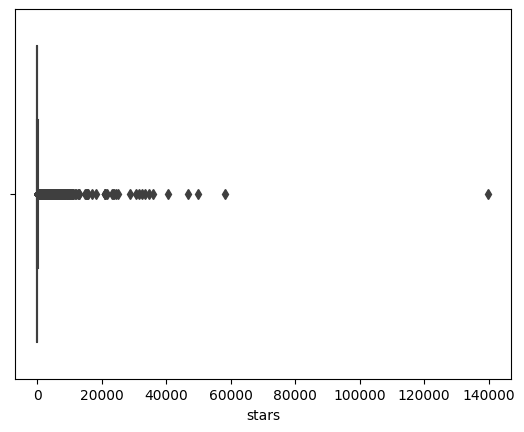

In [39]:
sns.boxplot(data=df, x='stars')

In [40]:
### Les valeurs aberrantes de la colonne forks

<Axes: xlabel='forks'>

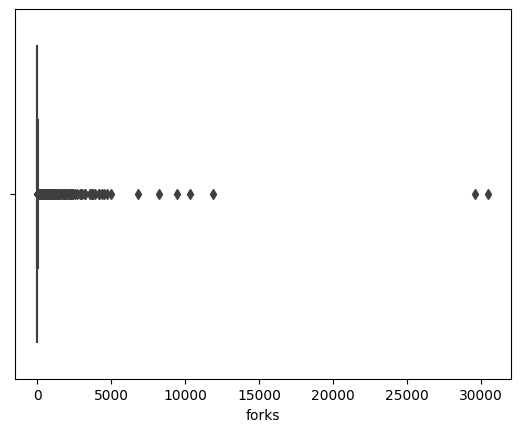

In [41]:
sns.boxplot(data=df, x='forks')

In [42]:
### Les valeurs aberrantes de la colonne issues

<Axes: xlabel='issues'>

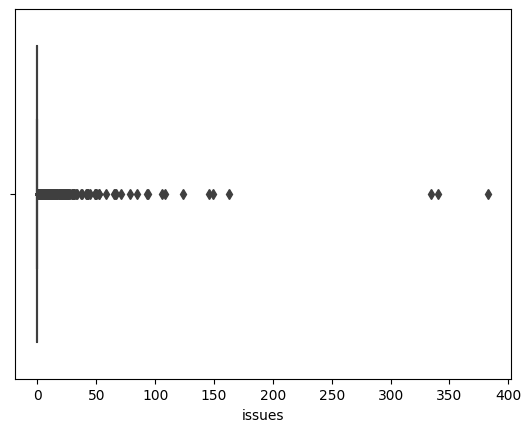

In [43]:
sns.boxplot(data=df, x='issues')